In [1]:
import json
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import networkx as nx
from plots import *
from utils import *
import aggregateMetrics as am
import numpy as np

%matplotlib inline

# Single Execution

In [11]:
graph = nx.complete_graph(250)

In [12]:
#model parameter
mu = 0.5
epsilon = 0.3
gamma = 1.0
gamma_media = gamma
pm = 0.5
k = 3
media_op = [0.05, 0.5, 0.95]

#simulations parameter
max_iterations = 1000
sensibility = 0.00001
nsteady = 1000
nodeStatus = True
progressBar = True

In [13]:
#create model
model = op.AlgorithmicBiasMediaModel(graph)

#create configuration
config = mc.Configuration()
config.add_model_parameter("mu", mu)
config.add_model_parameter("epsilon", epsilon)
config.add_model_parameter("gamma", gamma)
config.add_model_parameter("gamma_media", gamma)
config.add_model_parameter("p", pm)
config.add_model_parameter("k", k)

#configure model
model.set_initial_status(config)
model.set_media_opinions(media_op)

#perform iterations untill convergence
iterations = model.steady_state(max_iterations=max_iterations, nsteady=nsteady, sensibility=sensibility, node_status=nodeStatus, progress_bar=progressBar, drop_evolution=False)

100%|██████████| 1000/1000 [00:15<00:00, 65.68it/s]


In [14]:
len(iterations)

1000

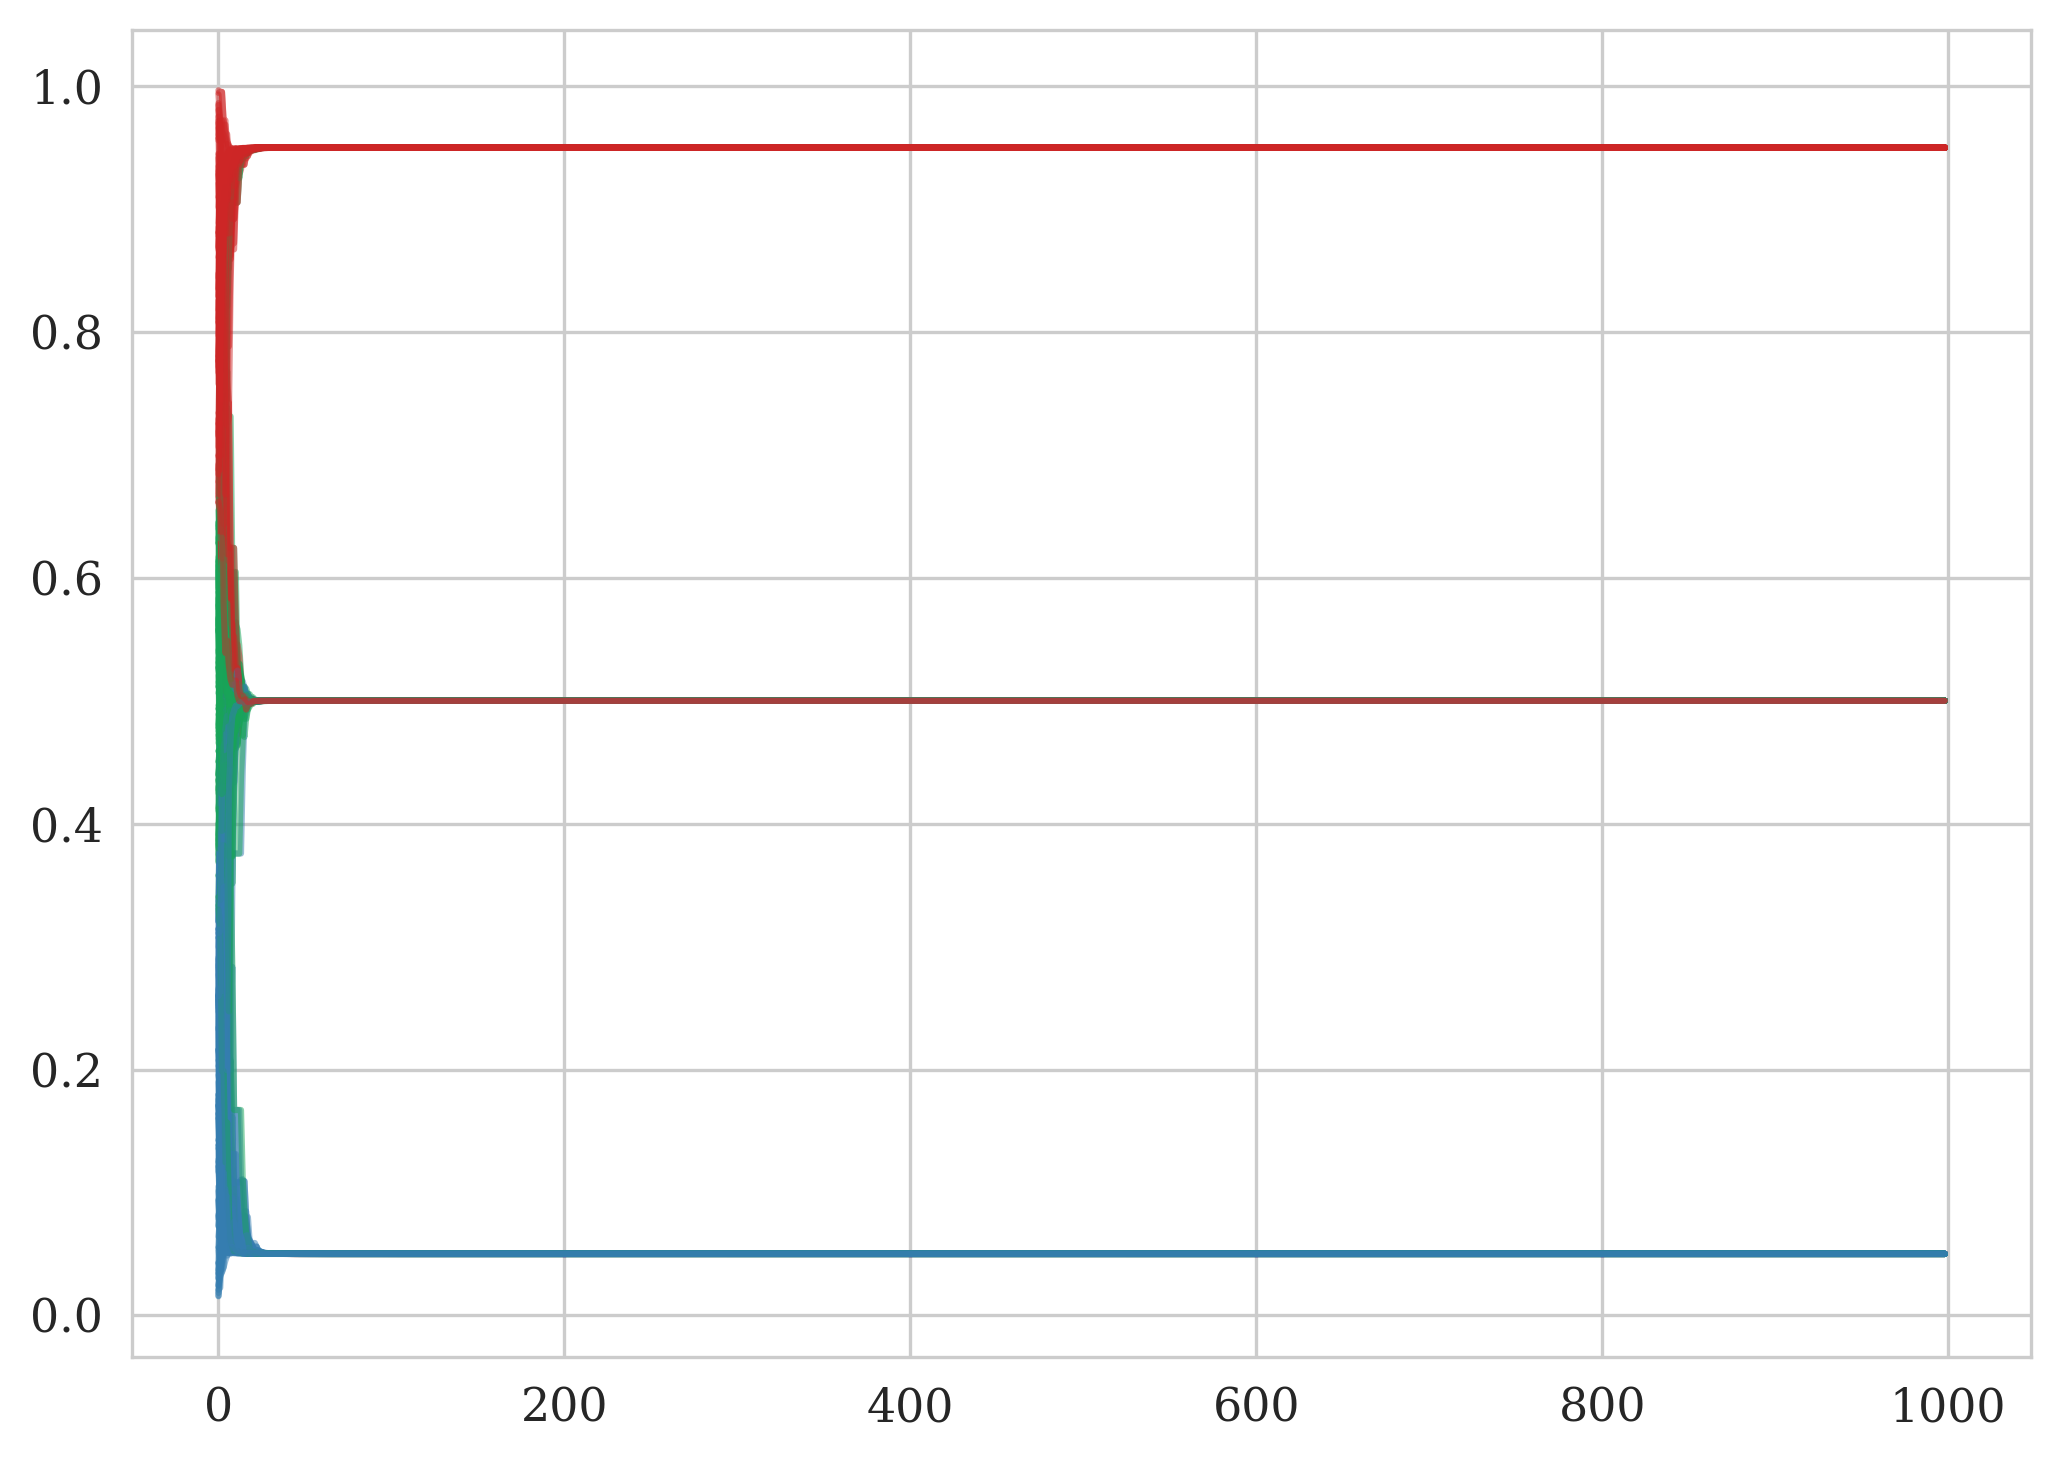

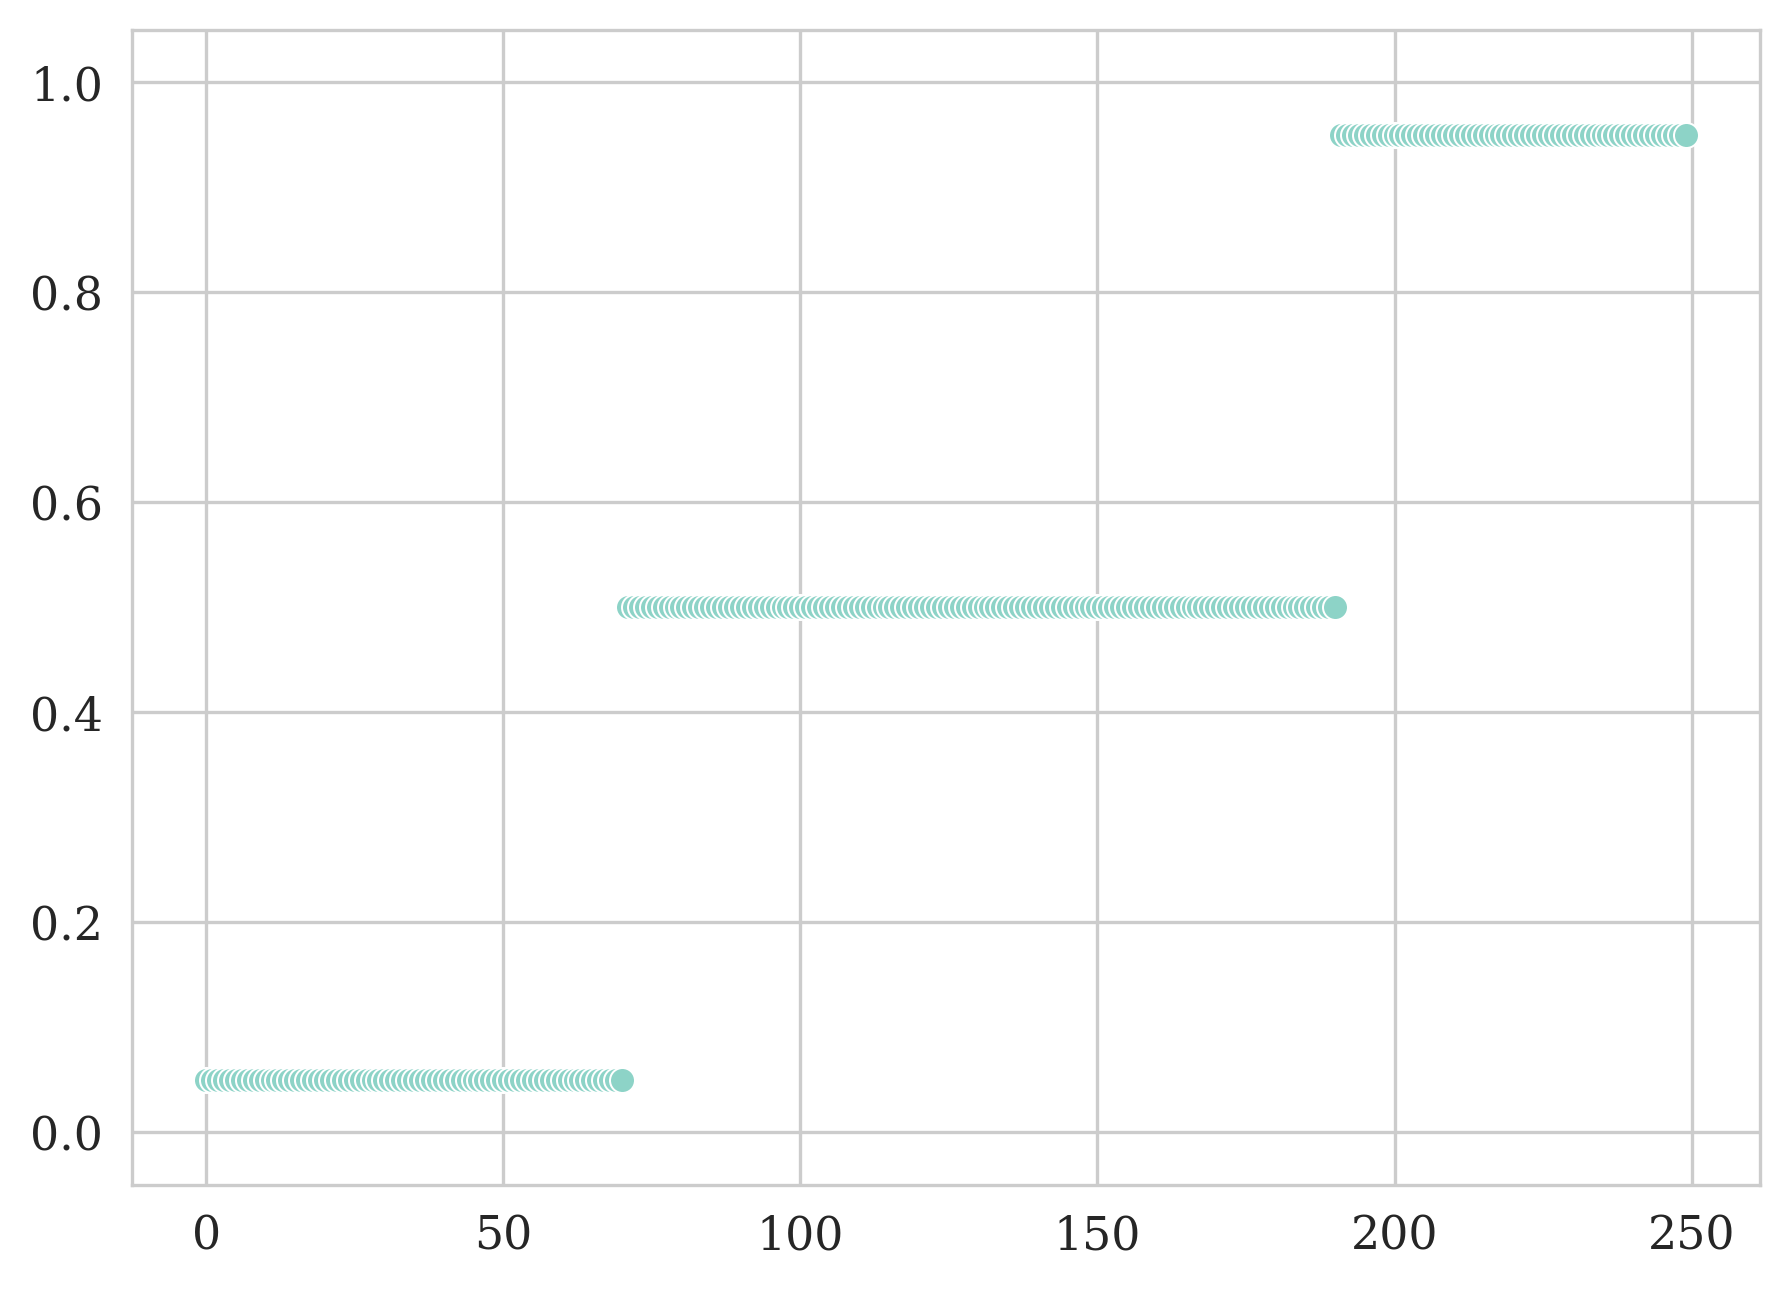

In [16]:
plotevolution(iterations)
plotdistribution(list(iterations[-1]['status'].values()))

<Axes: ylabel='Density'>

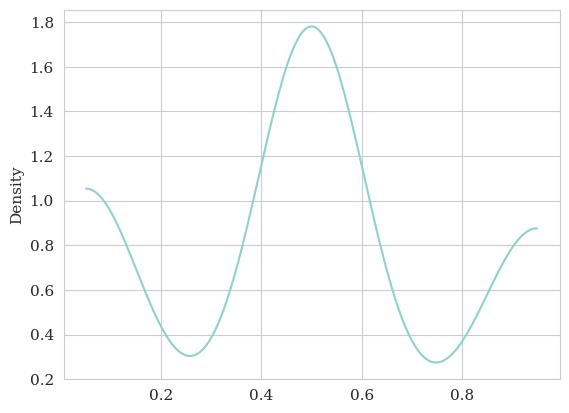

In [18]:
sns.kdeplot(list(iterations[-1]['status'].values()), cut=0)

# Multiple Runs

In [19]:
max_iterations = 100
nruns = 5

In [20]:
k = 3
epsilons, gammas, pms, media_ops = [0.2, 0.3, 0.4, 0.5], [0.0, 0.5, 1.0, 1.5], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], [[0.0], [0.5], [0.05, 0.95], [0.05, 0.5, 0.95]]
graph = nx.complete_graph(100)

In [21]:
for epsilon in epsilons:
    for gamma in gammas:
        for pm in pms:
            for media_op in media_ops:
                respath = f'../res/'
                name = f'e{epsilon}_g{gamma}_pm{pm}_mo{media_op}_maxit{max_iterations}'
                final_opinions, final_niter = read_dicts(respath, name)
                
                for run in range(nruns):
                    if str(run) in final_opinions.keys() and str(run) in final_niter.keys(): 
                        print('run already present. skipping.')
                        run += 1
                    else:
                        print(f'run {run} epsilon = {epsilon} gamma = {gamma} pm = {pm} media_op = {media_op}')    

                        #create model
                        model = op.AlgorithmicBiasMediaModel(graph)

                        #create configuration
                        config = mc.Configuration()
                        config.add_model_parameter("mu", 0.5)
                        config.add_model_parameter("epsilon", epsilon)
                        config.add_model_parameter("gamma", gamma)
                        config.add_model_parameter("gamma_media", gamma)
                        config.add_model_parameter("p", pm)
                        config.add_model_parameter("k", len(media_op))

                        #configure model
                        model.set_initial_status(config)
                        model.set_media_opinions(media_op)

                        #perform iterations untill convergence
                        iterations = model.steady_state(max_iterations=max_iterations, nsteady=1000, sensibility=0.00001, node_status=True, progress_bar=True)

                        finalopinions = iterations[-1]['status']
                        niter = int(iterations[-1]['iteration'])
                        
                        final_opinions[run] = finalopinions
                        final_niter[run] = niter
                        
                        write_dicts(respath, name, final_opinions, final_niter)

                        plotevolution(iterations, name=name, run=run)
                        plotdistribution(list(finalopinions.values()), name=name, run=run)


run 0 epsilon = 0.2 gamma = 0.0 pm = 0.0 media_op = [0.0]


100%|██████████| 100/100 [00:00<00:00, 217.90it/s]


{0: {0: 0.743340827691686, 1: 0.2104853160752625, 2: 0.21048531607674614, 3: 0.7433408276943398, 4: 0.7433408276921466, 5: 0.21048531607406182, 6: 0.743340827685935, 7: 0.743340827685935, 8: 0.7433408276928781, 9: 0.7433408276958828, 10: 0.7433408276940727, 11: 0.21048531607535265, 12: 0.7433408276912165, 13: 0.2104853160713641, 14: 0.21048531607931184, 15: 0.7433408276909833, 16: 0.7433408276953029, 17: 0.21048531607638807, 18: 0.21048531607498544, 19: 0.7433408276913511, 20: 0.7433408276937956, 21: 0.21048531607452242, 22: 0.21048531608136284, 23: 0.7433408276918018, 24: 0.2104853160748834, 25: 0.7433408276915103, 26: 0.7433408276918018, 27: 0.7433408277006648, 28: 0.7433408276917568, 29: 0.7433408276901503, 30: 0.21048531607522342, 31: 0.7433408276925954, 32: 0.7433408276943497, 33: 0.2104853160799866, 34: 0.21048531607422177, 35: 0.7433408276943818, 36: 0.7433408276892794, 37: 0.21048531607504697, 38: 0.21048531607074183, 39: 0.7433408276962238, 40: 0.21048531607292703, 41: 0.21048

100%|██████████| 100/100 [00:00<00:00, 227.22it/s]


{0: {0: 0.743340827691686, 1: 0.2104853160752625, 2: 0.21048531607674614, 3: 0.7433408276943398, 4: 0.7433408276921466, 5: 0.21048531607406182, 6: 0.743340827685935, 7: 0.743340827685935, 8: 0.7433408276928781, 9: 0.7433408276958828, 10: 0.7433408276940727, 11: 0.21048531607535265, 12: 0.7433408276912165, 13: 0.2104853160713641, 14: 0.21048531607931184, 15: 0.7433408276909833, 16: 0.7433408276953029, 17: 0.21048531607638807, 18: 0.21048531607498544, 19: 0.7433408276913511, 20: 0.7433408276937956, 21: 0.21048531607452242, 22: 0.21048531608136284, 23: 0.7433408276918018, 24: 0.2104853160748834, 25: 0.7433408276915103, 26: 0.7433408276918018, 27: 0.7433408277006648, 28: 0.7433408276917568, 29: 0.7433408276901503, 30: 0.21048531607522342, 31: 0.7433408276925954, 32: 0.7433408276943497, 33: 0.2104853160799866, 34: 0.21048531607422177, 35: 0.7433408276943818, 36: 0.7433408276892794, 37: 0.21048531607504697, 38: 0.21048531607074183, 39: 0.7433408276962238, 40: 0.21048531607292703, 41: 0.21048

100%|██████████| 100/100 [00:00<00:00, 237.55it/s]


{0: {0: 0.743340827691686, 1: 0.2104853160752625, 2: 0.21048531607674614, 3: 0.7433408276943398, 4: 0.7433408276921466, 5: 0.21048531607406182, 6: 0.743340827685935, 7: 0.743340827685935, 8: 0.7433408276928781, 9: 0.7433408276958828, 10: 0.7433408276940727, 11: 0.21048531607535265, 12: 0.7433408276912165, 13: 0.2104853160713641, 14: 0.21048531607931184, 15: 0.7433408276909833, 16: 0.7433408276953029, 17: 0.21048531607638807, 18: 0.21048531607498544, 19: 0.7433408276913511, 20: 0.7433408276937956, 21: 0.21048531607452242, 22: 0.21048531608136284, 23: 0.7433408276918018, 24: 0.2104853160748834, 25: 0.7433408276915103, 26: 0.7433408276918018, 27: 0.7433408277006648, 28: 0.7433408276917568, 29: 0.7433408276901503, 30: 0.21048531607522342, 31: 0.7433408276925954, 32: 0.7433408276943497, 33: 0.2104853160799866, 34: 0.21048531607422177, 35: 0.7433408276943818, 36: 0.7433408276892794, 37: 0.21048531607504697, 38: 0.21048531607074183, 39: 0.7433408276962238, 40: 0.21048531607292703, 41: 0.21048

100%|██████████| 100/100 [00:00<00:00, 215.44it/s]


{0: {0: 0.743340827691686, 1: 0.2104853160752625, 2: 0.21048531607674614, 3: 0.7433408276943398, 4: 0.7433408276921466, 5: 0.21048531607406182, 6: 0.743340827685935, 7: 0.743340827685935, 8: 0.7433408276928781, 9: 0.7433408276958828, 10: 0.7433408276940727, 11: 0.21048531607535265, 12: 0.7433408276912165, 13: 0.2104853160713641, 14: 0.21048531607931184, 15: 0.7433408276909833, 16: 0.7433408276953029, 17: 0.21048531607638807, 18: 0.21048531607498544, 19: 0.7433408276913511, 20: 0.7433408276937956, 21: 0.21048531607452242, 22: 0.21048531608136284, 23: 0.7433408276918018, 24: 0.2104853160748834, 25: 0.7433408276915103, 26: 0.7433408276918018, 27: 0.7433408277006648, 28: 0.7433408276917568, 29: 0.7433408276901503, 30: 0.21048531607522342, 31: 0.7433408276925954, 32: 0.7433408276943497, 33: 0.2104853160799866, 34: 0.21048531607422177, 35: 0.7433408276943818, 36: 0.7433408276892794, 37: 0.21048531607504697, 38: 0.21048531607074183, 39: 0.7433408276962238, 40: 0.21048531607292703, 41: 0.21048

100%|██████████| 100/100 [00:00<00:00, 234.80it/s]


{0: {0: 0.743340827691686, 1: 0.2104853160752625, 2: 0.21048531607674614, 3: 0.7433408276943398, 4: 0.7433408276921466, 5: 0.21048531607406182, 6: 0.743340827685935, 7: 0.743340827685935, 8: 0.7433408276928781, 9: 0.7433408276958828, 10: 0.7433408276940727, 11: 0.21048531607535265, 12: 0.7433408276912165, 13: 0.2104853160713641, 14: 0.21048531607931184, 15: 0.7433408276909833, 16: 0.7433408276953029, 17: 0.21048531607638807, 18: 0.21048531607498544, 19: 0.7433408276913511, 20: 0.7433408276937956, 21: 0.21048531607452242, 22: 0.21048531608136284, 23: 0.7433408276918018, 24: 0.2104853160748834, 25: 0.7433408276915103, 26: 0.7433408276918018, 27: 0.7433408277006648, 28: 0.7433408276917568, 29: 0.7433408276901503, 30: 0.21048531607522342, 31: 0.7433408276925954, 32: 0.7433408276943497, 33: 0.2104853160799866, 34: 0.21048531607422177, 35: 0.7433408276943818, 36: 0.7433408276892794, 37: 0.21048531607504697, 38: 0.21048531607074183, 39: 0.7433408276962238, 40: 0.21048531607292703, 41: 0.21048

100%|██████████| 100/100 [00:00<00:00, 229.24it/s]


{0: {0: 0.6510237960162018, 1: 0.15888960109204997, 2: 0.1588896256095871, 3: 0.651023796016203, 4: 0.15888961023088136, 5: 0.1588896146671004, 6: 0.6510237960162015, 7: 0.15888962152623462, 8: 0.651023796016202, 9: 0.6510237960162015, 10: 0.651023796016202, 11: 0.6510237960162016, 12: 0.6510237960162016, 13: 0.6510237960162015, 14: 0.6510237960162016, 15: 0.6510237960162013, 16: 0.6510237960162019, 17: 0.6510237960162021, 18: 0.6510237960162022, 19: 0.6510237960162018, 20: 0.6510237960162009, 21: 0.6510237960162022, 22: 0.6510237960162018, 23: 0.6510237960162013, 24: 0.15888961543237595, 25: 0.15888960969832275, 26: 0.6510237960162018, 27: 0.651023796016202, 28: 0.6510237960162013, 29: 0.6510237960162018, 30: 0.6510237960162013, 31: 0.15888960651352285, 32: 0.651023796016202, 33: 0.6510237960162026, 34: 0.6510237960162011, 35: 0.6510237960162018, 36: 0.15888961562491968, 37: 0.15888961785874006, 38: 0.6510237960162025, 39: 0.6510237960162018, 40: 0.6510237960162018, 41: 0.651023796016

100%|██████████| 100/100 [00:00<00:00, 209.46it/s]


{0: {0: 0.6510237960162018, 1: 0.15888960109204997, 2: 0.1588896256095871, 3: 0.651023796016203, 4: 0.15888961023088136, 5: 0.1588896146671004, 6: 0.6510237960162015, 7: 0.15888962152623462, 8: 0.651023796016202, 9: 0.6510237960162015, 10: 0.651023796016202, 11: 0.6510237960162016, 12: 0.6510237960162016, 13: 0.6510237960162015, 14: 0.6510237960162016, 15: 0.6510237960162013, 16: 0.6510237960162019, 17: 0.6510237960162021, 18: 0.6510237960162022, 19: 0.6510237960162018, 20: 0.6510237960162009, 21: 0.6510237960162022, 22: 0.6510237960162018, 23: 0.6510237960162013, 24: 0.15888961543237595, 25: 0.15888960969832275, 26: 0.6510237960162018, 27: 0.651023796016202, 28: 0.6510237960162013, 29: 0.6510237960162018, 30: 0.6510237960162013, 31: 0.15888960651352285, 32: 0.651023796016202, 33: 0.6510237960162026, 34: 0.6510237960162011, 35: 0.6510237960162018, 36: 0.15888961562491968, 37: 0.15888961785874006, 38: 0.6510237960162025, 39: 0.6510237960162018, 40: 0.6510237960162018, 41: 0.651023796016

100%|██████████| 100/100 [00:00<00:00, 200.77it/s]


{0: {0: 0.6510237960162018, 1: 0.15888960109204997, 2: 0.1588896256095871, 3: 0.651023796016203, 4: 0.15888961023088136, 5: 0.1588896146671004, 6: 0.6510237960162015, 7: 0.15888962152623462, 8: 0.651023796016202, 9: 0.6510237960162015, 10: 0.651023796016202, 11: 0.6510237960162016, 12: 0.6510237960162016, 13: 0.6510237960162015, 14: 0.6510237960162016, 15: 0.6510237960162013, 16: 0.6510237960162019, 17: 0.6510237960162021, 18: 0.6510237960162022, 19: 0.6510237960162018, 20: 0.6510237960162009, 21: 0.6510237960162022, 22: 0.6510237960162018, 23: 0.6510237960162013, 24: 0.15888961543237595, 25: 0.15888960969832275, 26: 0.6510237960162018, 27: 0.651023796016202, 28: 0.6510237960162013, 29: 0.6510237960162018, 30: 0.6510237960162013, 31: 0.15888960651352285, 32: 0.651023796016202, 33: 0.6510237960162026, 34: 0.6510237960162011, 35: 0.6510237960162018, 36: 0.15888961562491968, 37: 0.15888961785874006, 38: 0.6510237960162025, 39: 0.6510237960162018, 40: 0.6510237960162018, 41: 0.651023796016

100%|██████████| 100/100 [00:00<00:00, 205.17it/s]


{0: {0: 0.6510237960162018, 1: 0.15888960109204997, 2: 0.1588896256095871, 3: 0.651023796016203, 4: 0.15888961023088136, 5: 0.1588896146671004, 6: 0.6510237960162015, 7: 0.15888962152623462, 8: 0.651023796016202, 9: 0.6510237960162015, 10: 0.651023796016202, 11: 0.6510237960162016, 12: 0.6510237960162016, 13: 0.6510237960162015, 14: 0.6510237960162016, 15: 0.6510237960162013, 16: 0.6510237960162019, 17: 0.6510237960162021, 18: 0.6510237960162022, 19: 0.6510237960162018, 20: 0.6510237960162009, 21: 0.6510237960162022, 22: 0.6510237960162018, 23: 0.6510237960162013, 24: 0.15888961543237595, 25: 0.15888960969832275, 26: 0.6510237960162018, 27: 0.651023796016202, 28: 0.6510237960162013, 29: 0.6510237960162018, 30: 0.6510237960162013, 31: 0.15888960651352285, 32: 0.651023796016202, 33: 0.6510237960162026, 34: 0.6510237960162011, 35: 0.6510237960162018, 36: 0.15888961562491968, 37: 0.15888961785874006, 38: 0.6510237960162025, 39: 0.6510237960162018, 40: 0.6510237960162018, 41: 0.651023796016

100%|██████████| 100/100 [00:00<00:00, 191.86it/s]


{0: {0: 0.6510237960162018, 1: 0.15888960109204997, 2: 0.1588896256095871, 3: 0.651023796016203, 4: 0.15888961023088136, 5: 0.1588896146671004, 6: 0.6510237960162015, 7: 0.15888962152623462, 8: 0.651023796016202, 9: 0.6510237960162015, 10: 0.651023796016202, 11: 0.6510237960162016, 12: 0.6510237960162016, 13: 0.6510237960162015, 14: 0.6510237960162016, 15: 0.6510237960162013, 16: 0.6510237960162019, 17: 0.6510237960162021, 18: 0.6510237960162022, 19: 0.6510237960162018, 20: 0.6510237960162009, 21: 0.6510237960162022, 22: 0.6510237960162018, 23: 0.6510237960162013, 24: 0.15888961543237595, 25: 0.15888960969832275, 26: 0.6510237960162018, 27: 0.651023796016202, 28: 0.6510237960162013, 29: 0.6510237960162018, 30: 0.6510237960162013, 31: 0.15888960651352285, 32: 0.651023796016202, 33: 0.6510237960162026, 34: 0.6510237960162011, 35: 0.6510237960162018, 36: 0.15888961562491968, 37: 0.15888961785874006, 38: 0.6510237960162025, 39: 0.6510237960162018, 40: 0.6510237960162018, 41: 0.651023796016

100%|██████████| 100/100 [00:00<00:00, 213.25it/s]


{0: {0: 0.3338470770934135, 1: 0.3338470770934132, 2: 0.33384707709341255, 3: 0.33384707709341344, 4: 0.8948583733339447, 5: 0.33384707709341327, 6: 0.33384707709341366, 7: 0.333847077093413, 8: 0.33384707709341327, 9: 0.3338470770934139, 10: 0.8948583641656462, 11: 0.8948583749110536, 12: 0.8948583735171899, 13: 0.33384707709341366, 14: 0.33384707709341327, 15: 0.33384707709341427, 16: 0.33384707709341316, 17: 0.894858372393019, 18: 0.3338470770934131, 19: 0.3338470770934133, 20: 0.8948583712340796, 21: 0.8948583735171899, 22: 0.3338470770934131, 23: 0.8948583746413608, 24: 0.33384707709341327, 25: 0.3338470770934134, 26: 0.3338470770934133, 27: 0.33384707709341277, 28: 0.3338470770934132, 29: 0.33384707709341277, 30: 0.8948583743839342, 31: 0.8948583748300967, 32: 0.3338470770934131, 33: 0.33384707709341305, 34: 0.33384707709341305, 35: 0.3338470770934131, 36: 0.8948583712641547, 37: 0.33384707709341327, 38: 0.33384707709341266, 39: 0.8948583726674433, 40: 0.33384707709341305, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 233.92it/s]


{0: {0: 0.3338470770934135, 1: 0.3338470770934132, 2: 0.33384707709341255, 3: 0.33384707709341344, 4: 0.8948583733339447, 5: 0.33384707709341327, 6: 0.33384707709341366, 7: 0.333847077093413, 8: 0.33384707709341327, 9: 0.3338470770934139, 10: 0.8948583641656462, 11: 0.8948583749110536, 12: 0.8948583735171899, 13: 0.33384707709341366, 14: 0.33384707709341327, 15: 0.33384707709341427, 16: 0.33384707709341316, 17: 0.894858372393019, 18: 0.3338470770934131, 19: 0.3338470770934133, 20: 0.8948583712340796, 21: 0.8948583735171899, 22: 0.3338470770934131, 23: 0.8948583746413608, 24: 0.33384707709341327, 25: 0.3338470770934134, 26: 0.3338470770934133, 27: 0.33384707709341277, 28: 0.3338470770934132, 29: 0.33384707709341277, 30: 0.8948583743839342, 31: 0.8948583748300967, 32: 0.3338470770934131, 33: 0.33384707709341305, 34: 0.33384707709341305, 35: 0.3338470770934131, 36: 0.8948583712641547, 37: 0.33384707709341327, 38: 0.33384707709341266, 39: 0.8948583726674433, 40: 0.33384707709341305, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 223.56it/s]


{0: {0: 0.3338470770934135, 1: 0.3338470770934132, 2: 0.33384707709341255, 3: 0.33384707709341344, 4: 0.8948583733339447, 5: 0.33384707709341327, 6: 0.33384707709341366, 7: 0.333847077093413, 8: 0.33384707709341327, 9: 0.3338470770934139, 10: 0.8948583641656462, 11: 0.8948583749110536, 12: 0.8948583735171899, 13: 0.33384707709341366, 14: 0.33384707709341327, 15: 0.33384707709341427, 16: 0.33384707709341316, 17: 0.894858372393019, 18: 0.3338470770934131, 19: 0.3338470770934133, 20: 0.8948583712340796, 21: 0.8948583735171899, 22: 0.3338470770934131, 23: 0.8948583746413608, 24: 0.33384707709341327, 25: 0.3338470770934134, 26: 0.3338470770934133, 27: 0.33384707709341277, 28: 0.3338470770934132, 29: 0.33384707709341277, 30: 0.8948583743839342, 31: 0.8948583748300967, 32: 0.3338470770934131, 33: 0.33384707709341305, 34: 0.33384707709341305, 35: 0.3338470770934131, 36: 0.8948583712641547, 37: 0.33384707709341327, 38: 0.33384707709341266, 39: 0.8948583726674433, 40: 0.33384707709341305, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 234.24it/s]


{0: {0: 0.3338470770934135, 1: 0.3338470770934132, 2: 0.33384707709341255, 3: 0.33384707709341344, 4: 0.8948583733339447, 5: 0.33384707709341327, 6: 0.33384707709341366, 7: 0.333847077093413, 8: 0.33384707709341327, 9: 0.3338470770934139, 10: 0.8948583641656462, 11: 0.8948583749110536, 12: 0.8948583735171899, 13: 0.33384707709341366, 14: 0.33384707709341327, 15: 0.33384707709341427, 16: 0.33384707709341316, 17: 0.894858372393019, 18: 0.3338470770934131, 19: 0.3338470770934133, 20: 0.8948583712340796, 21: 0.8948583735171899, 22: 0.3338470770934131, 23: 0.8948583746413608, 24: 0.33384707709341327, 25: 0.3338470770934134, 26: 0.3338470770934133, 27: 0.33384707709341277, 28: 0.3338470770934132, 29: 0.33384707709341277, 30: 0.8948583743839342, 31: 0.8948583748300967, 32: 0.3338470770934131, 33: 0.33384707709341305, 34: 0.33384707709341305, 35: 0.3338470770934131, 36: 0.8948583712641547, 37: 0.33384707709341327, 38: 0.33384707709341266, 39: 0.8948583726674433, 40: 0.33384707709341305, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 240.11it/s]


{0: {0: 0.3338470770934135, 1: 0.3338470770934132, 2: 0.33384707709341255, 3: 0.33384707709341344, 4: 0.8948583733339447, 5: 0.33384707709341327, 6: 0.33384707709341366, 7: 0.333847077093413, 8: 0.33384707709341327, 9: 0.3338470770934139, 10: 0.8948583641656462, 11: 0.8948583749110536, 12: 0.8948583735171899, 13: 0.33384707709341366, 14: 0.33384707709341327, 15: 0.33384707709341427, 16: 0.33384707709341316, 17: 0.894858372393019, 18: 0.3338470770934131, 19: 0.3338470770934133, 20: 0.8948583712340796, 21: 0.8948583735171899, 22: 0.3338470770934131, 23: 0.8948583746413608, 24: 0.33384707709341327, 25: 0.3338470770934134, 26: 0.3338470770934133, 27: 0.33384707709341277, 28: 0.3338470770934132, 29: 0.33384707709341277, 30: 0.8948583743839342, 31: 0.8948583748300967, 32: 0.3338470770934131, 33: 0.33384707709341305, 34: 0.33384707709341305, 35: 0.3338470770934131, 36: 0.8948583712641547, 37: 0.33384707709341327, 38: 0.33384707709341266, 39: 0.8948583726674433, 40: 0.33384707709341305, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 227.46it/s]


{0: {0: 0.6697087052724305, 1: 0.6697087052724329, 2: 0.6697087052724318, 3: 0.6697087052724301, 4: 0.6697087052724289, 5: 0.6697087052724279, 6: 0.6697087052724298, 7: 0.17946398836286528, 8: 0.6697087052724281, 9: 0.17946398722571721, 10: 0.6697087052724275, 11: 0.17946398695235405, 12: 0.6697087052724281, 13: 0.6697087052724313, 14: 0.6697087052724262, 15: 0.179463987623186, 16: 0.6697087052724318, 17: 0.17946398722425938, 18: 0.669708705272428, 19: 0.6697087052724308, 20: 0.17946398686139295, 21: 0.6697087052724302, 22: 0.17946398765510066, 23: 0.17946398730616367, 24: 0.6697087052724301, 25: 0.66970870527243, 26: 0.17946398768214414, 27: 0.6697087052724275, 28: 0.6697087052724281, 29: 0.6697087052724318, 30: 0.6697087052724298, 31: 0.66970870527243, 32: 0.6697087052724254, 33: 0.6697087052724314, 34: 0.6697087052724247, 35: 0.17946398723641005, 36: 0.6697087052724287, 37: 0.17946398739813932, 38: 0.6697087052724231, 39: 0.6697087052724284, 40: 0.17946398722090143, 41: 0.1794639870

100%|██████████| 100/100 [00:00<00:00, 212.68it/s]


{0: {0: 0.6697087052724305, 1: 0.6697087052724329, 2: 0.6697087052724318, 3: 0.6697087052724301, 4: 0.6697087052724289, 5: 0.6697087052724279, 6: 0.6697087052724298, 7: 0.17946398836286528, 8: 0.6697087052724281, 9: 0.17946398722571721, 10: 0.6697087052724275, 11: 0.17946398695235405, 12: 0.6697087052724281, 13: 0.6697087052724313, 14: 0.6697087052724262, 15: 0.179463987623186, 16: 0.6697087052724318, 17: 0.17946398722425938, 18: 0.669708705272428, 19: 0.6697087052724308, 20: 0.17946398686139295, 21: 0.6697087052724302, 22: 0.17946398765510066, 23: 0.17946398730616367, 24: 0.6697087052724301, 25: 0.66970870527243, 26: 0.17946398768214414, 27: 0.6697087052724275, 28: 0.6697087052724281, 29: 0.6697087052724318, 30: 0.6697087052724298, 31: 0.66970870527243, 32: 0.6697087052724254, 33: 0.6697087052724314, 34: 0.6697087052724247, 35: 0.17946398723641005, 36: 0.6697087052724287, 37: 0.17946398739813932, 38: 0.6697087052724231, 39: 0.6697087052724284, 40: 0.17946398722090143, 41: 0.1794639870

100%|██████████| 100/100 [00:00<00:00, 226.85it/s]


{0: {0: 0.6697087052724305, 1: 0.6697087052724329, 2: 0.6697087052724318, 3: 0.6697087052724301, 4: 0.6697087052724289, 5: 0.6697087052724279, 6: 0.6697087052724298, 7: 0.17946398836286528, 8: 0.6697087052724281, 9: 0.17946398722571721, 10: 0.6697087052724275, 11: 0.17946398695235405, 12: 0.6697087052724281, 13: 0.6697087052724313, 14: 0.6697087052724262, 15: 0.179463987623186, 16: 0.6697087052724318, 17: 0.17946398722425938, 18: 0.669708705272428, 19: 0.6697087052724308, 20: 0.17946398686139295, 21: 0.6697087052724302, 22: 0.17946398765510066, 23: 0.17946398730616367, 24: 0.6697087052724301, 25: 0.66970870527243, 26: 0.17946398768214414, 27: 0.6697087052724275, 28: 0.6697087052724281, 29: 0.6697087052724318, 30: 0.6697087052724298, 31: 0.66970870527243, 32: 0.6697087052724254, 33: 0.6697087052724314, 34: 0.6697087052724247, 35: 0.17946398723641005, 36: 0.6697087052724287, 37: 0.17946398739813932, 38: 0.6697087052724231, 39: 0.6697087052724284, 40: 0.17946398722090143, 41: 0.1794639870

100%|██████████| 100/100 [00:00<00:00, 226.34it/s]


{0: {0: 0.6697087052724305, 1: 0.6697087052724329, 2: 0.6697087052724318, 3: 0.6697087052724301, 4: 0.6697087052724289, 5: 0.6697087052724279, 6: 0.6697087052724298, 7: 0.17946398836286528, 8: 0.6697087052724281, 9: 0.17946398722571721, 10: 0.6697087052724275, 11: 0.17946398695235405, 12: 0.6697087052724281, 13: 0.6697087052724313, 14: 0.6697087052724262, 15: 0.179463987623186, 16: 0.6697087052724318, 17: 0.17946398722425938, 18: 0.669708705272428, 19: 0.6697087052724308, 20: 0.17946398686139295, 21: 0.6697087052724302, 22: 0.17946398765510066, 23: 0.17946398730616367, 24: 0.6697087052724301, 25: 0.66970870527243, 26: 0.17946398768214414, 27: 0.6697087052724275, 28: 0.6697087052724281, 29: 0.6697087052724318, 30: 0.6697087052724298, 31: 0.66970870527243, 32: 0.6697087052724254, 33: 0.6697087052724314, 34: 0.6697087052724247, 35: 0.17946398723641005, 36: 0.6697087052724287, 37: 0.17946398739813932, 38: 0.6697087052724231, 39: 0.6697087052724284, 40: 0.17946398722090143, 41: 0.1794639870

100%|██████████| 100/100 [00:00<00:00, 222.31it/s]


{0: {0: 0.6697087052724305, 1: 0.6697087052724329, 2: 0.6697087052724318, 3: 0.6697087052724301, 4: 0.6697087052724289, 5: 0.6697087052724279, 6: 0.6697087052724298, 7: 0.17946398836286528, 8: 0.6697087052724281, 9: 0.17946398722571721, 10: 0.6697087052724275, 11: 0.17946398695235405, 12: 0.6697087052724281, 13: 0.6697087052724313, 14: 0.6697087052724262, 15: 0.179463987623186, 16: 0.6697087052724318, 17: 0.17946398722425938, 18: 0.669708705272428, 19: 0.6697087052724308, 20: 0.17946398686139295, 21: 0.6697087052724302, 22: 0.17946398765510066, 23: 0.17946398730616367, 24: 0.6697087052724301, 25: 0.66970870527243, 26: 0.17946398768214414, 27: 0.6697087052724275, 28: 0.6697087052724281, 29: 0.6697087052724318, 30: 0.6697087052724298, 31: 0.66970870527243, 32: 0.6697087052724254, 33: 0.6697087052724314, 34: 0.6697087052724247, 35: 0.17946398723641005, 36: 0.6697087052724287, 37: 0.17946398739813932, 38: 0.6697087052724231, 39: 0.6697087052724284, 40: 0.17946398722090143, 41: 0.1794639870

100%|██████████| 100/100 [00:00<00:00, 198.55it/s]


{0: {0: 0.3432980949486991, 1: 0.3432980949486991, 2: 0.7606954987299865, 3: 0.3432980948291377, 4: 0.34329809508196973, 5: 0.34329809491097807, 6: 0.3432980948437976, 7: 0.7606954987310544, 8: 0.7606954987314589, 9: 0.760695498731276, 10: 0.7606954987312167, 11: 0.7606954987313029, 12: 0.7606954987312593, 13: 0.3432980947963763, 14: 0.7606954987313029, 15: 0.3432980952123177, 16: 0.34329809463723276, 17: 0.34329809503031833, 18: 0.0001700176933891237, 19: 0.7606954987312262, 20: 0.7606954987312704, 21: 0.3432980945938217, 22: 0.7606954987312827, 23: 0.7606954987311797, 24: 0.76069549873126, 25: 0.34329809468513406, 26: 0.00012513833781938461, 27: 0.7606954987313124, 28: 0.3432980947632175, 29: 0.760695498731276, 30: 0.34329809468513406, 31: 0.7606954987313018, 32: 0.00026124790544605444, 33: 0.34329809486928353, 34: 0.343298094381685, 35: 0.3432980948437976, 36: 0.3432980945938217, 37: 0.7606954987312858, 38: 0.00017765424302492122, 39: 0.00013780818891184787, 40: 0.7606954987309762, 

100%|██████████| 100/100 [00:00<00:00, 213.33it/s]


{0: {0: 0.3432980949486991, 1: 0.3432980949486991, 2: 0.7606954987299865, 3: 0.3432980948291377, 4: 0.34329809508196973, 5: 0.34329809491097807, 6: 0.3432980948437976, 7: 0.7606954987310544, 8: 0.7606954987314589, 9: 0.760695498731276, 10: 0.7606954987312167, 11: 0.7606954987313029, 12: 0.7606954987312593, 13: 0.3432980947963763, 14: 0.7606954987313029, 15: 0.3432980952123177, 16: 0.34329809463723276, 17: 0.34329809503031833, 18: 0.0001700176933891237, 19: 0.7606954987312262, 20: 0.7606954987312704, 21: 0.3432980945938217, 22: 0.7606954987312827, 23: 0.7606954987311797, 24: 0.76069549873126, 25: 0.34329809468513406, 26: 0.00012513833781938461, 27: 0.7606954987313124, 28: 0.3432980947632175, 29: 0.760695498731276, 30: 0.34329809468513406, 31: 0.7606954987313018, 32: 0.00026124790544605444, 33: 0.34329809486928353, 34: 0.343298094381685, 35: 0.3432980948437976, 36: 0.3432980945938217, 37: 0.7606954987312858, 38: 0.00017765424302492122, 39: 0.00013780818891184787, 40: 0.7606954987309762, 

100%|██████████| 100/100 [00:00<00:00, 216.09it/s]


{0: {0: 0.3432980949486991, 1: 0.3432980949486991, 2: 0.7606954987299865, 3: 0.3432980948291377, 4: 0.34329809508196973, 5: 0.34329809491097807, 6: 0.3432980948437976, 7: 0.7606954987310544, 8: 0.7606954987314589, 9: 0.760695498731276, 10: 0.7606954987312167, 11: 0.7606954987313029, 12: 0.7606954987312593, 13: 0.3432980947963763, 14: 0.7606954987313029, 15: 0.3432980952123177, 16: 0.34329809463723276, 17: 0.34329809503031833, 18: 0.0001700176933891237, 19: 0.7606954987312262, 20: 0.7606954987312704, 21: 0.3432980945938217, 22: 0.7606954987312827, 23: 0.7606954987311797, 24: 0.76069549873126, 25: 0.34329809468513406, 26: 0.00012513833781938461, 27: 0.7606954987313124, 28: 0.3432980947632175, 29: 0.760695498731276, 30: 0.34329809468513406, 31: 0.7606954987313018, 32: 0.00026124790544605444, 33: 0.34329809486928353, 34: 0.343298094381685, 35: 0.3432980948437976, 36: 0.3432980945938217, 37: 0.7606954987312858, 38: 0.00017765424302492122, 39: 0.00013780818891184787, 40: 0.7606954987309762, 

100%|██████████| 100/100 [00:00<00:00, 215.18it/s]


{0: {0: 0.3432980949486991, 1: 0.3432980949486991, 2: 0.7606954987299865, 3: 0.3432980948291377, 4: 0.34329809508196973, 5: 0.34329809491097807, 6: 0.3432980948437976, 7: 0.7606954987310544, 8: 0.7606954987314589, 9: 0.760695498731276, 10: 0.7606954987312167, 11: 0.7606954987313029, 12: 0.7606954987312593, 13: 0.3432980947963763, 14: 0.7606954987313029, 15: 0.3432980952123177, 16: 0.34329809463723276, 17: 0.34329809503031833, 18: 0.0001700176933891237, 19: 0.7606954987312262, 20: 0.7606954987312704, 21: 0.3432980945938217, 22: 0.7606954987312827, 23: 0.7606954987311797, 24: 0.76069549873126, 25: 0.34329809468513406, 26: 0.00012513833781938461, 27: 0.7606954987313124, 28: 0.3432980947632175, 29: 0.760695498731276, 30: 0.34329809468513406, 31: 0.7606954987313018, 32: 0.00026124790544605444, 33: 0.34329809486928353, 34: 0.343298094381685, 35: 0.3432980948437976, 36: 0.3432980945938217, 37: 0.7606954987312858, 38: 0.00017765424302492122, 39: 0.00013780818891184787, 40: 0.7606954987309762, 

100%|██████████| 100/100 [00:00<00:00, 219.39it/s]


{0: {0: 0.3432980949486991, 1: 0.3432980949486991, 2: 0.7606954987299865, 3: 0.3432980948291377, 4: 0.34329809508196973, 5: 0.34329809491097807, 6: 0.3432980948437976, 7: 0.7606954987310544, 8: 0.7606954987314589, 9: 0.760695498731276, 10: 0.7606954987312167, 11: 0.7606954987313029, 12: 0.7606954987312593, 13: 0.3432980947963763, 14: 0.7606954987313029, 15: 0.3432980952123177, 16: 0.34329809463723276, 17: 0.34329809503031833, 18: 0.0001700176933891237, 19: 0.7606954987312262, 20: 0.7606954987312704, 21: 0.3432980945938217, 22: 0.7606954987312827, 23: 0.7606954987311797, 24: 0.76069549873126, 25: 0.34329809468513406, 26: 0.00012513833781938461, 27: 0.7606954987313124, 28: 0.3432980947632175, 29: 0.760695498731276, 30: 0.34329809468513406, 31: 0.7606954987313018, 32: 0.00026124790544605444, 33: 0.34329809486928353, 34: 0.343298094381685, 35: 0.3432980948437976, 36: 0.3432980945938217, 37: 0.7606954987312858, 38: 0.00017765424302492122, 39: 0.00013780818891184787, 40: 0.7606954987309762, 

100%|██████████| 100/100 [00:00<00:00, 217.99it/s]


{0: {0: 0.5018260068546578, 1: 0.25346992857170875, 2: 0.2534714822009132, 3: 0.5006427976760841, 4: 0.5017638145592143, 5: 0.5014826195524607, 6: 0.5016337761305333, 7: 0.5017928126758331, 8: 0.5017284793492855, 9: 0.5020338737793586, 10: 0.2534693902831566, 11: 0.5016556806894547, 12: 0.5009780244487075, 13: 0.5016066363990317, 14: 0.5016681949679214, 15: 0.5017420094901837, 16: 0.5016447381345723, 17: 0.25347031850313373, 18: 0.5017102465214367, 19: 0.50074209039309, 20: 0.2534701525707102, 21: 0.501658307941321, 22: 0.2534696696780019, 23: 0.501508491443532, 24: 0.5009740634567579, 25: 0.2534693623991837, 26: 0.25346977000505144, 27: 0.501772123402503, 28: 0.2534693623991837, 29: 0.5016520665854045, 30: 0.5018260068546578, 31: 0.5018192774106163, 32: 0.5017239726574094, 33: 0.5017715009948827, 34: 0.5017297407669241, 35: 0.5017383009032523, 36: 0.5017548416457283, 37: 0.2534697081510652, 38: 0.5017095745597184, 39: 0.5018192774106163, 40: 0.25347050359181, 41: 0.5014055860790667, 4

100%|██████████| 100/100 [00:00<00:00, 209.81it/s]


{0: {0: 0.5018260068546578, 1: 0.25346992857170875, 2: 0.2534714822009132, 3: 0.5006427976760841, 4: 0.5017638145592143, 5: 0.5014826195524607, 6: 0.5016337761305333, 7: 0.5017928126758331, 8: 0.5017284793492855, 9: 0.5020338737793586, 10: 0.2534693902831566, 11: 0.5016556806894547, 12: 0.5009780244487075, 13: 0.5016066363990317, 14: 0.5016681949679214, 15: 0.5017420094901837, 16: 0.5016447381345723, 17: 0.25347031850313373, 18: 0.5017102465214367, 19: 0.50074209039309, 20: 0.2534701525707102, 21: 0.501658307941321, 22: 0.2534696696780019, 23: 0.501508491443532, 24: 0.5009740634567579, 25: 0.2534693623991837, 26: 0.25346977000505144, 27: 0.501772123402503, 28: 0.2534693623991837, 29: 0.5016520665854045, 30: 0.5018260068546578, 31: 0.5018192774106163, 32: 0.5017239726574094, 33: 0.5017715009948827, 34: 0.5017297407669241, 35: 0.5017383009032523, 36: 0.5017548416457283, 37: 0.2534697081510652, 38: 0.5017095745597184, 39: 0.5018192774106163, 40: 0.25347050359181, 41: 0.5014055860790667, 4

100%|██████████| 100/100 [00:00<00:00, 206.72it/s]


{0: {0: 0.5018260068546578, 1: 0.25346992857170875, 2: 0.2534714822009132, 3: 0.5006427976760841, 4: 0.5017638145592143, 5: 0.5014826195524607, 6: 0.5016337761305333, 7: 0.5017928126758331, 8: 0.5017284793492855, 9: 0.5020338737793586, 10: 0.2534693902831566, 11: 0.5016556806894547, 12: 0.5009780244487075, 13: 0.5016066363990317, 14: 0.5016681949679214, 15: 0.5017420094901837, 16: 0.5016447381345723, 17: 0.25347031850313373, 18: 0.5017102465214367, 19: 0.50074209039309, 20: 0.2534701525707102, 21: 0.501658307941321, 22: 0.2534696696780019, 23: 0.501508491443532, 24: 0.5009740634567579, 25: 0.2534693623991837, 26: 0.25346977000505144, 27: 0.501772123402503, 28: 0.2534693623991837, 29: 0.5016520665854045, 30: 0.5018260068546578, 31: 0.5018192774106163, 32: 0.5017239726574094, 33: 0.5017715009948827, 34: 0.5017297407669241, 35: 0.5017383009032523, 36: 0.5017548416457283, 37: 0.2534697081510652, 38: 0.5017095745597184, 39: 0.5018192774106163, 40: 0.25347050359181, 41: 0.5014055860790667, 4

100%|██████████| 100/100 [00:00<00:00, 195.07it/s]


{0: {0: 0.5018260068546578, 1: 0.25346992857170875, 2: 0.2534714822009132, 3: 0.5006427976760841, 4: 0.5017638145592143, 5: 0.5014826195524607, 6: 0.5016337761305333, 7: 0.5017928126758331, 8: 0.5017284793492855, 9: 0.5020338737793586, 10: 0.2534693902831566, 11: 0.5016556806894547, 12: 0.5009780244487075, 13: 0.5016066363990317, 14: 0.5016681949679214, 15: 0.5017420094901837, 16: 0.5016447381345723, 17: 0.25347031850313373, 18: 0.5017102465214367, 19: 0.50074209039309, 20: 0.2534701525707102, 21: 0.501658307941321, 22: 0.2534696696780019, 23: 0.501508491443532, 24: 0.5009740634567579, 25: 0.2534693623991837, 26: 0.25346977000505144, 27: 0.501772123402503, 28: 0.2534693623991837, 29: 0.5016520665854045, 30: 0.5018260068546578, 31: 0.5018192774106163, 32: 0.5017239726574094, 33: 0.5017715009948827, 34: 0.5017297407669241, 35: 0.5017383009032523, 36: 0.5017548416457283, 37: 0.2534697081510652, 38: 0.5017095745597184, 39: 0.5018192774106163, 40: 0.25347050359181, 41: 0.5014055860790667, 4

100%|██████████| 100/100 [00:00<00:00, 200.91it/s]


{0: {0: 0.5018260068546578, 1: 0.25346992857170875, 2: 0.2534714822009132, 3: 0.5006427976760841, 4: 0.5017638145592143, 5: 0.5014826195524607, 6: 0.5016337761305333, 7: 0.5017928126758331, 8: 0.5017284793492855, 9: 0.5020338737793586, 10: 0.2534693902831566, 11: 0.5016556806894547, 12: 0.5009780244487075, 13: 0.5016066363990317, 14: 0.5016681949679214, 15: 0.5017420094901837, 16: 0.5016447381345723, 17: 0.25347031850313373, 18: 0.5017102465214367, 19: 0.50074209039309, 20: 0.2534701525707102, 21: 0.501658307941321, 22: 0.2534696696780019, 23: 0.501508491443532, 24: 0.5009740634567579, 25: 0.2534693623991837, 26: 0.25346977000505144, 27: 0.501772123402503, 28: 0.2534693623991837, 29: 0.5016520665854045, 30: 0.5018260068546578, 31: 0.5018192774106163, 32: 0.5017239726574094, 33: 0.5017715009948827, 34: 0.5017297407669241, 35: 0.5017383009032523, 36: 0.5017548416457283, 37: 0.2534697081510652, 38: 0.5017095745597184, 39: 0.5018192774106163, 40: 0.25347050359181, 41: 0.5014055860790667, 4

100%|██████████| 100/100 [00:00<00:00, 213.79it/s]


{0: {0: 0.9437743126222247, 1: 0.6191100874949422, 2: 0.35374409602181467, 3: 0.941652750536871, 4: 0.35374409597482925, 5: 0.3537440957943314, 6: 0.35374409597482925, 7: 0.9427387749780496, 8: 0.35374409582699173, 9: 0.051476022853196086, 10: 0.3537440957943314, 11: 0.942551152665644, 12: 0.3537440957502427, 13: 0.9422820755428871, 14: 0.35374409592891987, 15: 0.35374409596976175, 16: 0.9426289312915064, 17: 0.945886235872336, 18: 0.05406856077722242, 19: 0.942551152665644, 20: 0.3537440958955132, 21: 0.35374409588851097, 22: 0.3537440959279875, 23: 0.3537440959888365, 24: 0.3537440958477874, 25: 0.35374409596976175, 26: 0.3537440959252902, 27: 0.9468016684204392, 28: 0.35374409595224343, 29: 0.9417972451921285, 30: 0.353744095944715, 31: 0.3537440959581024, 32: 0.9461410377714435, 33: 0.941772471744672, 34: 0.942097696725023, 35: 0.35374409594576883, 36: 0.9424719323954109, 37: 0.9420863280077145, 38: 0.35374409593127804, 39: 0.35374409595663714, 40: 0.941778686746402, 41: 0.94195120

100%|██████████| 100/100 [00:00<00:00, 212.80it/s]


{0: {0: 0.9437743126222247, 1: 0.6191100874949422, 2: 0.35374409602181467, 3: 0.941652750536871, 4: 0.35374409597482925, 5: 0.3537440957943314, 6: 0.35374409597482925, 7: 0.9427387749780496, 8: 0.35374409582699173, 9: 0.051476022853196086, 10: 0.3537440957943314, 11: 0.942551152665644, 12: 0.3537440957502427, 13: 0.9422820755428871, 14: 0.35374409592891987, 15: 0.35374409596976175, 16: 0.9426289312915064, 17: 0.945886235872336, 18: 0.05406856077722242, 19: 0.942551152665644, 20: 0.3537440958955132, 21: 0.35374409588851097, 22: 0.3537440959279875, 23: 0.3537440959888365, 24: 0.3537440958477874, 25: 0.35374409596976175, 26: 0.3537440959252902, 27: 0.9468016684204392, 28: 0.35374409595224343, 29: 0.9417972451921285, 30: 0.353744095944715, 31: 0.3537440959581024, 32: 0.9461410377714435, 33: 0.941772471744672, 34: 0.942097696725023, 35: 0.35374409594576883, 36: 0.9424719323954109, 37: 0.9420863280077145, 38: 0.35374409593127804, 39: 0.35374409595663714, 40: 0.941778686746402, 41: 0.94195120

100%|██████████| 100/100 [00:00<00:00, 205.32it/s]


{0: {0: 0.9437743126222247, 1: 0.6191100874949422, 2: 0.35374409602181467, 3: 0.941652750536871, 4: 0.35374409597482925, 5: 0.3537440957943314, 6: 0.35374409597482925, 7: 0.9427387749780496, 8: 0.35374409582699173, 9: 0.051476022853196086, 10: 0.3537440957943314, 11: 0.942551152665644, 12: 0.3537440957502427, 13: 0.9422820755428871, 14: 0.35374409592891987, 15: 0.35374409596976175, 16: 0.9426289312915064, 17: 0.945886235872336, 18: 0.05406856077722242, 19: 0.942551152665644, 20: 0.3537440958955132, 21: 0.35374409588851097, 22: 0.3537440959279875, 23: 0.3537440959888365, 24: 0.3537440958477874, 25: 0.35374409596976175, 26: 0.3537440959252902, 27: 0.9468016684204392, 28: 0.35374409595224343, 29: 0.9417972451921285, 30: 0.353744095944715, 31: 0.3537440959581024, 32: 0.9461410377714435, 33: 0.941772471744672, 34: 0.942097696725023, 35: 0.35374409594576883, 36: 0.9424719323954109, 37: 0.9420863280077145, 38: 0.35374409593127804, 39: 0.35374409595663714, 40: 0.941778686746402, 41: 0.94195120

100%|██████████| 100/100 [00:00<00:00, 201.01it/s]


{0: {0: 0.9437743126222247, 1: 0.6191100874949422, 2: 0.35374409602181467, 3: 0.941652750536871, 4: 0.35374409597482925, 5: 0.3537440957943314, 6: 0.35374409597482925, 7: 0.9427387749780496, 8: 0.35374409582699173, 9: 0.051476022853196086, 10: 0.3537440957943314, 11: 0.942551152665644, 12: 0.3537440957502427, 13: 0.9422820755428871, 14: 0.35374409592891987, 15: 0.35374409596976175, 16: 0.9426289312915064, 17: 0.945886235872336, 18: 0.05406856077722242, 19: 0.942551152665644, 20: 0.3537440958955132, 21: 0.35374409588851097, 22: 0.3537440959279875, 23: 0.3537440959888365, 24: 0.3537440958477874, 25: 0.35374409596976175, 26: 0.3537440959252902, 27: 0.9468016684204392, 28: 0.35374409595224343, 29: 0.9417972451921285, 30: 0.353744095944715, 31: 0.3537440959581024, 32: 0.9461410377714435, 33: 0.941772471744672, 34: 0.942097696725023, 35: 0.35374409594576883, 36: 0.9424719323954109, 37: 0.9420863280077145, 38: 0.35374409593127804, 39: 0.35374409595663714, 40: 0.941778686746402, 41: 0.94195120

100%|██████████| 100/100 [00:00<00:00, 206.75it/s]


{0: {0: 0.9437743126222247, 1: 0.6191100874949422, 2: 0.35374409602181467, 3: 0.941652750536871, 4: 0.35374409597482925, 5: 0.3537440957943314, 6: 0.35374409597482925, 7: 0.9427387749780496, 8: 0.35374409582699173, 9: 0.051476022853196086, 10: 0.3537440957943314, 11: 0.942551152665644, 12: 0.3537440957502427, 13: 0.9422820755428871, 14: 0.35374409592891987, 15: 0.35374409596976175, 16: 0.9426289312915064, 17: 0.945886235872336, 18: 0.05406856077722242, 19: 0.942551152665644, 20: 0.3537440958955132, 21: 0.35374409588851097, 22: 0.3537440959279875, 23: 0.3537440959888365, 24: 0.3537440958477874, 25: 0.35374409596976175, 26: 0.3537440959252902, 27: 0.9468016684204392, 28: 0.35374409595224343, 29: 0.9417972451921285, 30: 0.353744095944715, 31: 0.3537440959581024, 32: 0.9461410377714435, 33: 0.941772471744672, 34: 0.942097696725023, 35: 0.35374409594576883, 36: 0.9424719323954109, 37: 0.9420863280077145, 38: 0.35374409593127804, 39: 0.35374409595663714, 40: 0.941778686746402, 41: 0.94195120

100%|██████████| 100/100 [00:00<00:00, 209.75it/s]


{0: {0: 0.0792432596410756, 1: 0.49517549496294866, 2: 0.4982668615826728, 3: 0.495371307134421, 4: 0.9118743684634419, 5: 0.9132988542250458, 6: 0.08556496982235332, 7: 0.08556496982235332, 8: 0.930074696660502, 9: 0.910149393321004, 10: 0.4954816825581816, 11: 0.9118743684634419, 12: 0.08146047739810994, 13: 0.49572642259198374, 14: 0.08510519718530338, 15: 0.08328829382135619, 16: 0.08390181621744006, 17: 0.0830913790389064, 18: 0.08507268454437245, 19: 0.08585224759871488, 20: 0.08536950702037421, 21: 0.4953336533509564, 22: 0.495371307134421, 23: 0.0853643485841559, 24: 0.4951440654806549, 25: 0.08472723632123264, 26: 0.08580595185727445, 27: 0.4956390193980016, 28: 0.08477586206837068, 29: 0.08122734354945471, 30: 0.08479540441648944, 31: 0.0830913790389064, 32: 0.084916216753268, 33: 0.08475978413288532, 34: 0.49526618837969283, 35: 0.9139531668552743, 36: 0.08584328672439537, 37: 0.08438541246953356, 38: 0.0852749450473365, 39: 0.4965337231653456, 40: 0.08514367208502872, 41: 0

100%|██████████| 100/100 [00:00<00:00, 214.92it/s]


{0: {0: 0.0792432596410756, 1: 0.49517549496294866, 2: 0.4982668615826728, 3: 0.495371307134421, 4: 0.9118743684634419, 5: 0.9132988542250458, 6: 0.08556496982235332, 7: 0.08556496982235332, 8: 0.930074696660502, 9: 0.910149393321004, 10: 0.4954816825581816, 11: 0.9118743684634419, 12: 0.08146047739810994, 13: 0.49572642259198374, 14: 0.08510519718530338, 15: 0.08328829382135619, 16: 0.08390181621744006, 17: 0.0830913790389064, 18: 0.08507268454437245, 19: 0.08585224759871488, 20: 0.08536950702037421, 21: 0.4953336533509564, 22: 0.495371307134421, 23: 0.0853643485841559, 24: 0.4951440654806549, 25: 0.08472723632123264, 26: 0.08580595185727445, 27: 0.4956390193980016, 28: 0.08477586206837068, 29: 0.08122734354945471, 30: 0.08479540441648944, 31: 0.0830913790389064, 32: 0.084916216753268, 33: 0.08475978413288532, 34: 0.49526618837969283, 35: 0.9139531668552743, 36: 0.08584328672439537, 37: 0.08438541246953356, 38: 0.0852749450473365, 39: 0.4965337231653456, 40: 0.08514367208502872, 41: 0

100%|██████████| 100/100 [00:00<00:00, 201.20it/s]


{0: {0: 0.0792432596410756, 1: 0.49517549496294866, 2: 0.4982668615826728, 3: 0.495371307134421, 4: 0.9118743684634419, 5: 0.9132988542250458, 6: 0.08556496982235332, 7: 0.08556496982235332, 8: 0.930074696660502, 9: 0.910149393321004, 10: 0.4954816825581816, 11: 0.9118743684634419, 12: 0.08146047739810994, 13: 0.49572642259198374, 14: 0.08510519718530338, 15: 0.08328829382135619, 16: 0.08390181621744006, 17: 0.0830913790389064, 18: 0.08507268454437245, 19: 0.08585224759871488, 20: 0.08536950702037421, 21: 0.4953336533509564, 22: 0.495371307134421, 23: 0.0853643485841559, 24: 0.4951440654806549, 25: 0.08472723632123264, 26: 0.08580595185727445, 27: 0.4956390193980016, 28: 0.08477586206837068, 29: 0.08122734354945471, 30: 0.08479540441648944, 31: 0.0830913790389064, 32: 0.084916216753268, 33: 0.08475978413288532, 34: 0.49526618837969283, 35: 0.9139531668552743, 36: 0.08584328672439537, 37: 0.08438541246953356, 38: 0.0852749450473365, 39: 0.4965337231653456, 40: 0.08514367208502872, 41: 0

100%|██████████| 100/100 [00:00<00:00, 208.63it/s]


{0: {0: 0.0792432596410756, 1: 0.49517549496294866, 2: 0.4982668615826728, 3: 0.495371307134421, 4: 0.9118743684634419, 5: 0.9132988542250458, 6: 0.08556496982235332, 7: 0.08556496982235332, 8: 0.930074696660502, 9: 0.910149393321004, 10: 0.4954816825581816, 11: 0.9118743684634419, 12: 0.08146047739810994, 13: 0.49572642259198374, 14: 0.08510519718530338, 15: 0.08328829382135619, 16: 0.08390181621744006, 17: 0.0830913790389064, 18: 0.08507268454437245, 19: 0.08585224759871488, 20: 0.08536950702037421, 21: 0.4953336533509564, 22: 0.495371307134421, 23: 0.0853643485841559, 24: 0.4951440654806549, 25: 0.08472723632123264, 26: 0.08580595185727445, 27: 0.4956390193980016, 28: 0.08477586206837068, 29: 0.08122734354945471, 30: 0.08479540441648944, 31: 0.0830913790389064, 32: 0.084916216753268, 33: 0.08475978413288532, 34: 0.49526618837969283, 35: 0.9139531668552743, 36: 0.08584328672439537, 37: 0.08438541246953356, 38: 0.0852749450473365, 39: 0.4965337231653456, 40: 0.08514367208502872, 41: 0

100%|██████████| 100/100 [00:00<00:00, 214.95it/s]


{0: {0: 0.0792432596410756, 1: 0.49517549496294866, 2: 0.4982668615826728, 3: 0.495371307134421, 4: 0.9118743684634419, 5: 0.9132988542250458, 6: 0.08556496982235332, 7: 0.08556496982235332, 8: 0.930074696660502, 9: 0.910149393321004, 10: 0.4954816825581816, 11: 0.9118743684634419, 12: 0.08146047739810994, 13: 0.49572642259198374, 14: 0.08510519718530338, 15: 0.08328829382135619, 16: 0.08390181621744006, 17: 0.0830913790389064, 18: 0.08507268454437245, 19: 0.08585224759871488, 20: 0.08536950702037421, 21: 0.4953336533509564, 22: 0.495371307134421, 23: 0.0853643485841559, 24: 0.4951440654806549, 25: 0.08472723632123264, 26: 0.08580595185727445, 27: 0.4956390193980016, 28: 0.08477586206837068, 29: 0.08122734354945471, 30: 0.08479540441648944, 31: 0.0830913790389064, 32: 0.084916216753268, 33: 0.08475978413288532, 34: 0.49526618837969283, 35: 0.9139531668552743, 36: 0.08584328672439537, 37: 0.08438541246953356, 38: 0.0852749450473365, 39: 0.4965337231653456, 40: 0.08514367208502872, 41: 0

100%|██████████| 100/100 [00:00<00:00, 202.41it/s]


{0: {0: 0.3923734573125889, 1: 0.8001486546462279, 2: 0.8001486546457116, 3: 0.8001486546461605, 4: 0.8001486546454333, 5: 0.3923734572304214, 6: 0.3923734572694293, 7: 0.8001486546456781, 8: 0.8001486546459922, 9: 0.8001486546458091, 10: 0.3923734572236746, 11: 0.39237345734773094, 12: 1.5703390206335668e-06, 13: 0.8001486546461627, 14: 0.8001486546457294, 15: 0.3923734572236746, 16: 0.3923734573919735, 17: 0.8001486546456398, 18: 0.39237345723504813, 19: 0.39237345737767626, 20: 0.800148654645884, 21: 0.39237345733942275, 22: 7.851695103167834e-07, 23: 0.3923734573004825, 24: 0.39237345724089956, 25: 0.8001486546456902, 26: 0.8001486546461793, 27: 1.5386289971593284e-05, 28: 0.39237345726590245, 29: 0.392373457391759, 30: 0.8001486546457994, 31: 0.392373457425549, 32: 0.3923734572991408, 33: 0.3923734573044366, 34: 0.8001486546461489, 35: 0.8001486546460551, 36: 0.3923734572518211, 37: 0.3923734573285153, 38: 0.39237345729823137, 39: 0.8001486546458091, 40: 0.8001486546458031, 41: 1.

100%|██████████| 100/100 [00:00<00:00, 197.15it/s]


{0: {0: 0.3923734573125889, 1: 0.8001486546462279, 2: 0.8001486546457116, 3: 0.8001486546461605, 4: 0.8001486546454333, 5: 0.3923734572304214, 6: 0.3923734572694293, 7: 0.8001486546456781, 8: 0.8001486546459922, 9: 0.8001486546458091, 10: 0.3923734572236746, 11: 0.39237345734773094, 12: 1.5703390206335668e-06, 13: 0.8001486546461627, 14: 0.8001486546457294, 15: 0.3923734572236746, 16: 0.3923734573919735, 17: 0.8001486546456398, 18: 0.39237345723504813, 19: 0.39237345737767626, 20: 0.800148654645884, 21: 0.39237345733942275, 22: 7.851695103167834e-07, 23: 0.3923734573004825, 24: 0.39237345724089956, 25: 0.8001486546456902, 26: 0.8001486546461793, 27: 1.5386289971593284e-05, 28: 0.39237345726590245, 29: 0.392373457391759, 30: 0.8001486546457994, 31: 0.392373457425549, 32: 0.3923734572991408, 33: 0.3923734573044366, 34: 0.8001486546461489, 35: 0.8001486546460551, 36: 0.3923734572518211, 37: 0.3923734573285153, 38: 0.39237345729823137, 39: 0.8001486546458091, 40: 0.8001486546458031, 41: 1.

100%|██████████| 100/100 [00:00<00:00, 191.22it/s]


{0: {0: 0.3923734573125889, 1: 0.8001486546462279, 2: 0.8001486546457116, 3: 0.8001486546461605, 4: 0.8001486546454333, 5: 0.3923734572304214, 6: 0.3923734572694293, 7: 0.8001486546456781, 8: 0.8001486546459922, 9: 0.8001486546458091, 10: 0.3923734572236746, 11: 0.39237345734773094, 12: 1.5703390206335668e-06, 13: 0.8001486546461627, 14: 0.8001486546457294, 15: 0.3923734572236746, 16: 0.3923734573919735, 17: 0.8001486546456398, 18: 0.39237345723504813, 19: 0.39237345737767626, 20: 0.800148654645884, 21: 0.39237345733942275, 22: 7.851695103167834e-07, 23: 0.3923734573004825, 24: 0.39237345724089956, 25: 0.8001486546456902, 26: 0.8001486546461793, 27: 1.5386289971593284e-05, 28: 0.39237345726590245, 29: 0.392373457391759, 30: 0.8001486546457994, 31: 0.392373457425549, 32: 0.3923734572991408, 33: 0.3923734573044366, 34: 0.8001486546461489, 35: 0.8001486546460551, 36: 0.3923734572518211, 37: 0.3923734573285153, 38: 0.39237345729823137, 39: 0.8001486546458091, 40: 0.8001486546458031, 41: 1.

100%|██████████| 100/100 [00:00<00:00, 201.23it/s]


{0: {0: 0.3923734573125889, 1: 0.8001486546462279, 2: 0.8001486546457116, 3: 0.8001486546461605, 4: 0.8001486546454333, 5: 0.3923734572304214, 6: 0.3923734572694293, 7: 0.8001486546456781, 8: 0.8001486546459922, 9: 0.8001486546458091, 10: 0.3923734572236746, 11: 0.39237345734773094, 12: 1.5703390206335668e-06, 13: 0.8001486546461627, 14: 0.8001486546457294, 15: 0.3923734572236746, 16: 0.3923734573919735, 17: 0.8001486546456398, 18: 0.39237345723504813, 19: 0.39237345737767626, 20: 0.800148654645884, 21: 0.39237345733942275, 22: 7.851695103167834e-07, 23: 0.3923734573004825, 24: 0.39237345724089956, 25: 0.8001486546456902, 26: 0.8001486546461793, 27: 1.5386289971593284e-05, 28: 0.39237345726590245, 29: 0.392373457391759, 30: 0.8001486546457994, 31: 0.392373457425549, 32: 0.3923734572991408, 33: 0.3923734573044366, 34: 0.8001486546461489, 35: 0.8001486546460551, 36: 0.3923734572518211, 37: 0.3923734573285153, 38: 0.39237345729823137, 39: 0.8001486546458091, 40: 0.8001486546458031, 41: 1.

100%|██████████| 100/100 [00:00<00:00, 205.17it/s]


{0: {0: 0.3923734573125889, 1: 0.8001486546462279, 2: 0.8001486546457116, 3: 0.8001486546461605, 4: 0.8001486546454333, 5: 0.3923734572304214, 6: 0.3923734572694293, 7: 0.8001486546456781, 8: 0.8001486546459922, 9: 0.8001486546458091, 10: 0.3923734572236746, 11: 0.39237345734773094, 12: 1.5703390206335668e-06, 13: 0.8001486546461627, 14: 0.8001486546457294, 15: 0.3923734572236746, 16: 0.3923734573919735, 17: 0.8001486546456398, 18: 0.39237345723504813, 19: 0.39237345737767626, 20: 0.800148654645884, 21: 0.39237345733942275, 22: 7.851695103167834e-07, 23: 0.3923734573004825, 24: 0.39237345724089956, 25: 0.8001486546456902, 26: 0.8001486546461793, 27: 1.5386289971593284e-05, 28: 0.39237345726590245, 29: 0.392373457391759, 30: 0.8001486546457994, 31: 0.392373457425549, 32: 0.3923734572991408, 33: 0.3923734573044366, 34: 0.8001486546461489, 35: 0.8001486546460551, 36: 0.3923734572518211, 37: 0.3923734573285153, 38: 0.39237345729823137, 39: 0.8001486546458091, 40: 0.8001486546458031, 41: 1.

100%|██████████| 100/100 [00:00<00:00, 201.22it/s]


{0: {0: 0.1591864494579992, 1: 0.5000032624291555, 2: 0.8424079744265175, 3: 0.15918644763497408, 4: 0.15918644782164326, 5: 0.15918644913055477, 6: 0.5000032907183534, 7: 0.5000025555882519, 8: 0.15918644767295065, 9: 0.5000035265254987, 10: 0.842407777827378, 11: 0.5000020173027312, 12: 0.1591864459883099, 13: 0.8424078229822854, 14: 0.5000018387719442, 15: 0.5000019417056006, 16: 0.1591864464540711, 17: 0.5000030186634993, 18: 0.8424076387931808, 19: 0.15918644704359525, 20: 0.5000019473777557, 21: 0.5000027473304778, 22: 0.1591864475930123, 23: 0.5000028177963791, 24: 0.8424078982317001, 25: 0.500001718226931, 26: 0.8424080260018061, 27: 0.842407777827378, 28: 0.1591864479373744, 29: 0.5000009367862128, 30: 0.8424079945668224, 31: 0.8424079737505914, 32: 0.1591864465687308, 33: 0.8424077882493495, 34: 0.5000013553752913, 35: 0.8424080260018061, 36: 0.8424080934528434, 37: 0.8424079387439151, 38: 0.5000020328847231, 39: 0.15918644782934238, 40: 0.500002411355261, 41: 0.5000013372956

100%|██████████| 100/100 [00:00<00:00, 201.39it/s]


{0: {0: 0.1591864494579992, 1: 0.5000032624291555, 2: 0.8424079744265175, 3: 0.15918644763497408, 4: 0.15918644782164326, 5: 0.15918644913055477, 6: 0.5000032907183534, 7: 0.5000025555882519, 8: 0.15918644767295065, 9: 0.5000035265254987, 10: 0.842407777827378, 11: 0.5000020173027312, 12: 0.1591864459883099, 13: 0.8424078229822854, 14: 0.5000018387719442, 15: 0.5000019417056006, 16: 0.1591864464540711, 17: 0.5000030186634993, 18: 0.8424076387931808, 19: 0.15918644704359525, 20: 0.5000019473777557, 21: 0.5000027473304778, 22: 0.1591864475930123, 23: 0.5000028177963791, 24: 0.8424078982317001, 25: 0.500001718226931, 26: 0.8424080260018061, 27: 0.842407777827378, 28: 0.1591864479373744, 29: 0.5000009367862128, 30: 0.8424079945668224, 31: 0.8424079737505914, 32: 0.1591864465687308, 33: 0.8424077882493495, 34: 0.5000013553752913, 35: 0.8424080260018061, 36: 0.8424080934528434, 37: 0.8424079387439151, 38: 0.5000020328847231, 39: 0.15918644782934238, 40: 0.500002411355261, 41: 0.5000013372956

100%|██████████| 100/100 [00:00<00:00, 191.97it/s]


{0: {0: 0.1591864494579992, 1: 0.5000032624291555, 2: 0.8424079744265175, 3: 0.15918644763497408, 4: 0.15918644782164326, 5: 0.15918644913055477, 6: 0.5000032907183534, 7: 0.5000025555882519, 8: 0.15918644767295065, 9: 0.5000035265254987, 10: 0.842407777827378, 11: 0.5000020173027312, 12: 0.1591864459883099, 13: 0.8424078229822854, 14: 0.5000018387719442, 15: 0.5000019417056006, 16: 0.1591864464540711, 17: 0.5000030186634993, 18: 0.8424076387931808, 19: 0.15918644704359525, 20: 0.5000019473777557, 21: 0.5000027473304778, 22: 0.1591864475930123, 23: 0.5000028177963791, 24: 0.8424078982317001, 25: 0.500001718226931, 26: 0.8424080260018061, 27: 0.842407777827378, 28: 0.1591864479373744, 29: 0.5000009367862128, 30: 0.8424079945668224, 31: 0.8424079737505914, 32: 0.1591864465687308, 33: 0.8424077882493495, 34: 0.5000013553752913, 35: 0.8424080260018061, 36: 0.8424080934528434, 37: 0.8424079387439151, 38: 0.5000020328847231, 39: 0.15918644782934238, 40: 0.500002411355261, 41: 0.5000013372956

100%|██████████| 100/100 [00:00<00:00, 185.88it/s]


{0: {0: 0.1591864494579992, 1: 0.5000032624291555, 2: 0.8424079744265175, 3: 0.15918644763497408, 4: 0.15918644782164326, 5: 0.15918644913055477, 6: 0.5000032907183534, 7: 0.5000025555882519, 8: 0.15918644767295065, 9: 0.5000035265254987, 10: 0.842407777827378, 11: 0.5000020173027312, 12: 0.1591864459883099, 13: 0.8424078229822854, 14: 0.5000018387719442, 15: 0.5000019417056006, 16: 0.1591864464540711, 17: 0.5000030186634993, 18: 0.8424076387931808, 19: 0.15918644704359525, 20: 0.5000019473777557, 21: 0.5000027473304778, 22: 0.1591864475930123, 23: 0.5000028177963791, 24: 0.8424078982317001, 25: 0.500001718226931, 26: 0.8424080260018061, 27: 0.842407777827378, 28: 0.1591864479373744, 29: 0.5000009367862128, 30: 0.8424079945668224, 31: 0.8424079737505914, 32: 0.1591864465687308, 33: 0.8424077882493495, 34: 0.5000013553752913, 35: 0.8424080260018061, 36: 0.8424080934528434, 37: 0.8424079387439151, 38: 0.5000020328847231, 39: 0.15918644782934238, 40: 0.500002411355261, 41: 0.5000013372956

100%|██████████| 100/100 [00:00<00:00, 208.46it/s]


{0: {0: 0.1591864494579992, 1: 0.5000032624291555, 2: 0.8424079744265175, 3: 0.15918644763497408, 4: 0.15918644782164326, 5: 0.15918644913055477, 6: 0.5000032907183534, 7: 0.5000025555882519, 8: 0.15918644767295065, 9: 0.5000035265254987, 10: 0.842407777827378, 11: 0.5000020173027312, 12: 0.1591864459883099, 13: 0.8424078229822854, 14: 0.5000018387719442, 15: 0.5000019417056006, 16: 0.1591864464540711, 17: 0.5000030186634993, 18: 0.8424076387931808, 19: 0.15918644704359525, 20: 0.5000019473777557, 21: 0.5000027473304778, 22: 0.1591864475930123, 23: 0.5000028177963791, 24: 0.8424078982317001, 25: 0.500001718226931, 26: 0.8424080260018061, 27: 0.842407777827378, 28: 0.1591864479373744, 29: 0.5000009367862128, 30: 0.8424079945668224, 31: 0.8424079737505914, 32: 0.1591864465687308, 33: 0.8424077882493495, 34: 0.5000013553752913, 35: 0.8424080260018061, 36: 0.8424080934528434, 37: 0.8424079387439151, 38: 0.5000020328847231, 39: 0.15918644782934238, 40: 0.500002411355261, 41: 0.5000013372956

100%|██████████| 100/100 [00:00<00:00, 188.90it/s]


{0: {0: 0.9489271693164759, 1: 0.9490142397477546, 2: 0.38823426886966894, 3: 0.3882342688697211, 4: 0.38823426886975276, 5: 0.9491589735148175, 6: 0.38823426886958584, 7: 0.9493003012776864, 8: 0.3882342688696372, 9: 0.05044041757816722, 10: 0.38823426886959833, 11: 0.050176963959440324, 12: 0.05026780386822563, 13: 0.9493003945861255, 14: 0.9491589735148175, 15: 0.949342712054952, 16: 0.38823426886959833, 17: 0.949342712054952, 18: 0.3882342688695583, 19: 0.3882342688695955, 20: 0.9496446430241933, 21: 0.38823426886968865, 22: 0.3882342688696162, 23: 0.9492290315414096, 24: 0.3882342688696162, 25: 0.050137087789428054, 26: 0.9496492995619796, 27: 0.9491938231631174, 28: 0.9493034563664895, 29: 0.38823426886973633, 30: 0.3882342688696135, 31: 0.3882342688696301, 32: 0.9491589735148175, 33: 0.3882342688695955, 34: 0.9492421182786491, 35: 0.38823426886973633, 36: 0.9490214397668477, 37: 0.3882342688697408, 38: 0.9493772704479486, 39: 0.38823426886968765, 40: 0.3882342688697188, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 181.73it/s]


{0: {0: 0.9489271693164759, 1: 0.9490142397477546, 2: 0.38823426886966894, 3: 0.3882342688697211, 4: 0.38823426886975276, 5: 0.9491589735148175, 6: 0.38823426886958584, 7: 0.9493003012776864, 8: 0.3882342688696372, 9: 0.05044041757816722, 10: 0.38823426886959833, 11: 0.050176963959440324, 12: 0.05026780386822563, 13: 0.9493003945861255, 14: 0.9491589735148175, 15: 0.949342712054952, 16: 0.38823426886959833, 17: 0.949342712054952, 18: 0.3882342688695583, 19: 0.3882342688695955, 20: 0.9496446430241933, 21: 0.38823426886968865, 22: 0.3882342688696162, 23: 0.9492290315414096, 24: 0.3882342688696162, 25: 0.050137087789428054, 26: 0.9496492995619796, 27: 0.9491938231631174, 28: 0.9493034563664895, 29: 0.38823426886973633, 30: 0.3882342688696135, 31: 0.3882342688696301, 32: 0.9491589735148175, 33: 0.3882342688695955, 34: 0.9492421182786491, 35: 0.38823426886973633, 36: 0.9490214397668477, 37: 0.3882342688697408, 38: 0.9493772704479486, 39: 0.38823426886968765, 40: 0.3882342688697188, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 171.88it/s]


{0: {0: 0.9489271693164759, 1: 0.9490142397477546, 2: 0.38823426886966894, 3: 0.3882342688697211, 4: 0.38823426886975276, 5: 0.9491589735148175, 6: 0.38823426886958584, 7: 0.9493003012776864, 8: 0.3882342688696372, 9: 0.05044041757816722, 10: 0.38823426886959833, 11: 0.050176963959440324, 12: 0.05026780386822563, 13: 0.9493003945861255, 14: 0.9491589735148175, 15: 0.949342712054952, 16: 0.38823426886959833, 17: 0.949342712054952, 18: 0.3882342688695583, 19: 0.3882342688695955, 20: 0.9496446430241933, 21: 0.38823426886968865, 22: 0.3882342688696162, 23: 0.9492290315414096, 24: 0.3882342688696162, 25: 0.050137087789428054, 26: 0.9496492995619796, 27: 0.9491938231631174, 28: 0.9493034563664895, 29: 0.38823426886973633, 30: 0.3882342688696135, 31: 0.3882342688696301, 32: 0.9491589735148175, 33: 0.3882342688695955, 34: 0.9492421182786491, 35: 0.38823426886973633, 36: 0.9490214397668477, 37: 0.3882342688697408, 38: 0.9493772704479486, 39: 0.38823426886968765, 40: 0.3882342688697188, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 178.77it/s]


{0: {0: 0.9489271693164759, 1: 0.9490142397477546, 2: 0.38823426886966894, 3: 0.3882342688697211, 4: 0.38823426886975276, 5: 0.9491589735148175, 6: 0.38823426886958584, 7: 0.9493003012776864, 8: 0.3882342688696372, 9: 0.05044041757816722, 10: 0.38823426886959833, 11: 0.050176963959440324, 12: 0.05026780386822563, 13: 0.9493003945861255, 14: 0.9491589735148175, 15: 0.949342712054952, 16: 0.38823426886959833, 17: 0.949342712054952, 18: 0.3882342688695583, 19: 0.3882342688695955, 20: 0.9496446430241933, 21: 0.38823426886968865, 22: 0.3882342688696162, 23: 0.9492290315414096, 24: 0.3882342688696162, 25: 0.050137087789428054, 26: 0.9496492995619796, 27: 0.9491938231631174, 28: 0.9493034563664895, 29: 0.38823426886973633, 30: 0.3882342688696135, 31: 0.3882342688696301, 32: 0.9491589735148175, 33: 0.3882342688695955, 34: 0.9492421182786491, 35: 0.38823426886973633, 36: 0.9490214397668477, 37: 0.3882342688697408, 38: 0.9493772704479486, 39: 0.38823426886968765, 40: 0.3882342688697188, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 210.57it/s]


{0: {0: 0.9489271693164759, 1: 0.9490142397477546, 2: 0.38823426886966894, 3: 0.3882342688697211, 4: 0.38823426886975276, 5: 0.9491589735148175, 6: 0.38823426886958584, 7: 0.9493003012776864, 8: 0.3882342688696372, 9: 0.05044041757816722, 10: 0.38823426886959833, 11: 0.050176963959440324, 12: 0.05026780386822563, 13: 0.9493003945861255, 14: 0.9491589735148175, 15: 0.949342712054952, 16: 0.38823426886959833, 17: 0.949342712054952, 18: 0.3882342688695583, 19: 0.3882342688695955, 20: 0.9496446430241933, 21: 0.38823426886968865, 22: 0.3882342688696162, 23: 0.9492290315414096, 24: 0.3882342688696162, 25: 0.050137087789428054, 26: 0.9496492995619796, 27: 0.9491938231631174, 28: 0.9493034563664895, 29: 0.38823426886973633, 30: 0.3882342688696135, 31: 0.3882342688696301, 32: 0.9491589735148175, 33: 0.3882342688695955, 34: 0.9492421182786491, 35: 0.38823426886973633, 36: 0.9490214397668477, 37: 0.3882342688697408, 38: 0.9493772704479486, 39: 0.38823426886968765, 40: 0.3882342688697188, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 197.75it/s]


{0: {0: 0.9426577590836935, 1: 0.9452171101250986, 2: 0.9432310668811199, 3: 0.05535484017577262, 4: 0.9426577590836935, 5: 0.9431289041546468, 6: 0.499622895749134, 7: 0.05565353545352247, 8: 0.9482784170956913, 9: 0.058596146944947414, 10: 0.9426985905182168, 11: 0.05895820680564869, 12: 0.05930859560808818, 13: 0.49966400360534324, 14: 0.05649720744111638, 15: 0.4997936882668938, 16: 0.05466058935690149, 17: 0.05735635861787518, 18: 0.05582157550953079, 19: 0.9433788696332694, 20: 0.055772447447316006, 21: 0.05685996586257622, 22: 0.05677454249470437, 23: 0.057189687148968035, 24: 0.05873480571259123, 25: 0.056796717238038086, 26: 0.055992666740681984, 27: 0.9450883712712104, 28: 0.05537556241611562, 29: 0.0530280904788509, 30: 0.4995443072102378, 31: 0.05792727719425286, 32: 0.4998197508358535, 33: 0.49972302904489413, 34: 0.05685996586257622, 35: 0.05804120632212614, 36: 0.945773998938694, 37: 0.05821292430839762, 38: 0.9448604260316564, 39: 0.056886874451624374, 40: 0.49959664235

100%|██████████| 100/100 [00:00<00:00, 164.14it/s]


{0: {0: 0.9426577590836935, 1: 0.9452171101250986, 2: 0.9432310668811199, 3: 0.05535484017577262, 4: 0.9426577590836935, 5: 0.9431289041546468, 6: 0.499622895749134, 7: 0.05565353545352247, 8: 0.9482784170956913, 9: 0.058596146944947414, 10: 0.9426985905182168, 11: 0.05895820680564869, 12: 0.05930859560808818, 13: 0.49966400360534324, 14: 0.05649720744111638, 15: 0.4997936882668938, 16: 0.05466058935690149, 17: 0.05735635861787518, 18: 0.05582157550953079, 19: 0.9433788696332694, 20: 0.055772447447316006, 21: 0.05685996586257622, 22: 0.05677454249470437, 23: 0.057189687148968035, 24: 0.05873480571259123, 25: 0.056796717238038086, 26: 0.055992666740681984, 27: 0.9450883712712104, 28: 0.05537556241611562, 29: 0.0530280904788509, 30: 0.4995443072102378, 31: 0.05792727719425286, 32: 0.4998197508358535, 33: 0.49972302904489413, 34: 0.05685996586257622, 35: 0.05804120632212614, 36: 0.945773998938694, 37: 0.05821292430839762, 38: 0.9448604260316564, 39: 0.056886874451624374, 40: 0.49959664235

100%|██████████| 100/100 [00:00<00:00, 172.18it/s]


{0: {0: 0.9426577590836935, 1: 0.9452171101250986, 2: 0.9432310668811199, 3: 0.05535484017577262, 4: 0.9426577590836935, 5: 0.9431289041546468, 6: 0.499622895749134, 7: 0.05565353545352247, 8: 0.9482784170956913, 9: 0.058596146944947414, 10: 0.9426985905182168, 11: 0.05895820680564869, 12: 0.05930859560808818, 13: 0.49966400360534324, 14: 0.05649720744111638, 15: 0.4997936882668938, 16: 0.05466058935690149, 17: 0.05735635861787518, 18: 0.05582157550953079, 19: 0.9433788696332694, 20: 0.055772447447316006, 21: 0.05685996586257622, 22: 0.05677454249470437, 23: 0.057189687148968035, 24: 0.05873480571259123, 25: 0.056796717238038086, 26: 0.055992666740681984, 27: 0.9450883712712104, 28: 0.05537556241611562, 29: 0.0530280904788509, 30: 0.4995443072102378, 31: 0.05792727719425286, 32: 0.4998197508358535, 33: 0.49972302904489413, 34: 0.05685996586257622, 35: 0.05804120632212614, 36: 0.945773998938694, 37: 0.05821292430839762, 38: 0.9448604260316564, 39: 0.056886874451624374, 40: 0.49959664235

100%|██████████| 100/100 [00:00<00:00, 158.48it/s]


{0: {0: 0.9426577590836935, 1: 0.9452171101250986, 2: 0.9432310668811199, 3: 0.05535484017577262, 4: 0.9426577590836935, 5: 0.9431289041546468, 6: 0.499622895749134, 7: 0.05565353545352247, 8: 0.9482784170956913, 9: 0.058596146944947414, 10: 0.9426985905182168, 11: 0.05895820680564869, 12: 0.05930859560808818, 13: 0.49966400360534324, 14: 0.05649720744111638, 15: 0.4997936882668938, 16: 0.05466058935690149, 17: 0.05735635861787518, 18: 0.05582157550953079, 19: 0.9433788696332694, 20: 0.055772447447316006, 21: 0.05685996586257622, 22: 0.05677454249470437, 23: 0.057189687148968035, 24: 0.05873480571259123, 25: 0.056796717238038086, 26: 0.055992666740681984, 27: 0.9450883712712104, 28: 0.05537556241611562, 29: 0.0530280904788509, 30: 0.4995443072102378, 31: 0.05792727719425286, 32: 0.4998197508358535, 33: 0.49972302904489413, 34: 0.05685996586257622, 35: 0.05804120632212614, 36: 0.945773998938694, 37: 0.05821292430839762, 38: 0.9448604260316564, 39: 0.056886874451624374, 40: 0.49959664235

100%|██████████| 100/100 [00:00<00:00, 183.58it/s]


{0: {0: 0.9426577590836935, 1: 0.9452171101250986, 2: 0.9432310668811199, 3: 0.05535484017577262, 4: 0.9426577590836935, 5: 0.9431289041546468, 6: 0.499622895749134, 7: 0.05565353545352247, 8: 0.9482784170956913, 9: 0.058596146944947414, 10: 0.9426985905182168, 11: 0.05895820680564869, 12: 0.05930859560808818, 13: 0.49966400360534324, 14: 0.05649720744111638, 15: 0.4997936882668938, 16: 0.05466058935690149, 17: 0.05735635861787518, 18: 0.05582157550953079, 19: 0.9433788696332694, 20: 0.055772447447316006, 21: 0.05685996586257622, 22: 0.05677454249470437, 23: 0.057189687148968035, 24: 0.05873480571259123, 25: 0.056796717238038086, 26: 0.055992666740681984, 27: 0.9450883712712104, 28: 0.05537556241611562, 29: 0.0530280904788509, 30: 0.4995443072102378, 31: 0.05792727719425286, 32: 0.4998197508358535, 33: 0.49972302904489413, 34: 0.05685996586257622, 35: 0.05804120632212614, 36: 0.945773998938694, 37: 0.05821292430839762, 38: 0.9448604260316564, 39: 0.056886874451624374, 40: 0.49959664235

100%|██████████| 100/100 [00:00<00:00, 157.93it/s]


{0: {0: 0.35062066896680527, 1: 0.3506206689621175, 2: 0.7908815529313933, 3: 0.3506206689645852, 4: 5.605942176450465e-08, 5: 0.7908815530808249, 6: 2.4658429114226637e-08, 7: 0.3506206689507322, 8: 1.7239756837481224e-08, 9: 0.35062066895755756, 10: 0.3506206689148611, 11: 1.925420742662187e-08, 12: 0.790881552989379, 13: 0.7908815530708929, 14: 2.74320623432765e-08, 15: 8.841730116290139e-08, 16: 0.7908815530385356, 17: 0.7908815529196979, 18: 0.35062066896440336, 19: 6.89590273499249e-08, 20: 0.3506206689507322, 21: 8.841730116290139e-08, 22: 0.7908815530498782, 23: 1.0465627421894639e-07, 24: 8.216474509711279e-08, 25: 1.0757482623142564e-07, 26: 0.35062066897883826, 27: 0.7908815530727854, 28: 0.35062066896666566, 29: 5.2328137109473196e-08, 30: 0.7908815530348969, 31: 0.7908815530271966, 32: 0.7908815530727854, 33: 1.0757482623142564e-07, 34: 0.3506206689665063, 35: 0.7908815531573983, 36: 0.7908815530717892, 37: 0.7908815531200375, 38: 0.3506206689515251, 39: 0.3506206689560657

100%|██████████| 100/100 [00:00<00:00, 177.84it/s]


{0: {0: 0.35062066896680527, 1: 0.3506206689621175, 2: 0.7908815529313933, 3: 0.3506206689645852, 4: 5.605942176450465e-08, 5: 0.7908815530808249, 6: 2.4658429114226637e-08, 7: 0.3506206689507322, 8: 1.7239756837481224e-08, 9: 0.35062066895755756, 10: 0.3506206689148611, 11: 1.925420742662187e-08, 12: 0.790881552989379, 13: 0.7908815530708929, 14: 2.74320623432765e-08, 15: 8.841730116290139e-08, 16: 0.7908815530385356, 17: 0.7908815529196979, 18: 0.35062066896440336, 19: 6.89590273499249e-08, 20: 0.3506206689507322, 21: 8.841730116290139e-08, 22: 0.7908815530498782, 23: 1.0465627421894639e-07, 24: 8.216474509711279e-08, 25: 1.0757482623142564e-07, 26: 0.35062066897883826, 27: 0.7908815530727854, 28: 0.35062066896666566, 29: 5.2328137109473196e-08, 30: 0.7908815530348969, 31: 0.7908815530271966, 32: 0.7908815530727854, 33: 1.0757482623142564e-07, 34: 0.3506206689665063, 35: 0.7908815531573983, 36: 0.7908815530717892, 37: 0.7908815531200375, 38: 0.3506206689515251, 39: 0.3506206689560657

100%|██████████| 100/100 [00:00<00:00, 161.36it/s]


{0: {0: 0.35062066896680527, 1: 0.3506206689621175, 2: 0.7908815529313933, 3: 0.3506206689645852, 4: 5.605942176450465e-08, 5: 0.7908815530808249, 6: 2.4658429114226637e-08, 7: 0.3506206689507322, 8: 1.7239756837481224e-08, 9: 0.35062066895755756, 10: 0.3506206689148611, 11: 1.925420742662187e-08, 12: 0.790881552989379, 13: 0.7908815530708929, 14: 2.74320623432765e-08, 15: 8.841730116290139e-08, 16: 0.7908815530385356, 17: 0.7908815529196979, 18: 0.35062066896440336, 19: 6.89590273499249e-08, 20: 0.3506206689507322, 21: 8.841730116290139e-08, 22: 0.7908815530498782, 23: 1.0465627421894639e-07, 24: 8.216474509711279e-08, 25: 1.0757482623142564e-07, 26: 0.35062066897883826, 27: 0.7908815530727854, 28: 0.35062066896666566, 29: 5.2328137109473196e-08, 30: 0.7908815530348969, 31: 0.7908815530271966, 32: 0.7908815530727854, 33: 1.0757482623142564e-07, 34: 0.3506206689665063, 35: 0.7908815531573983, 36: 0.7908815530717892, 37: 0.7908815531200375, 38: 0.3506206689515251, 39: 0.3506206689560657

100%|██████████| 100/100 [00:00<00:00, 186.50it/s]


{0: {0: 0.35062066896680527, 1: 0.3506206689621175, 2: 0.7908815529313933, 3: 0.3506206689645852, 4: 5.605942176450465e-08, 5: 0.7908815530808249, 6: 2.4658429114226637e-08, 7: 0.3506206689507322, 8: 1.7239756837481224e-08, 9: 0.35062066895755756, 10: 0.3506206689148611, 11: 1.925420742662187e-08, 12: 0.790881552989379, 13: 0.7908815530708929, 14: 2.74320623432765e-08, 15: 8.841730116290139e-08, 16: 0.7908815530385356, 17: 0.7908815529196979, 18: 0.35062066896440336, 19: 6.89590273499249e-08, 20: 0.3506206689507322, 21: 8.841730116290139e-08, 22: 0.7908815530498782, 23: 1.0465627421894639e-07, 24: 8.216474509711279e-08, 25: 1.0757482623142564e-07, 26: 0.35062066897883826, 27: 0.7908815530727854, 28: 0.35062066896666566, 29: 5.2328137109473196e-08, 30: 0.7908815530348969, 31: 0.7908815530271966, 32: 0.7908815530727854, 33: 1.0757482623142564e-07, 34: 0.3506206689665063, 35: 0.7908815531573983, 36: 0.7908815530717892, 37: 0.7908815531200375, 38: 0.3506206689515251, 39: 0.3506206689560657

100%|██████████| 100/100 [00:00<00:00, 179.61it/s]


{0: {0: 0.35062066896680527, 1: 0.3506206689621175, 2: 0.7908815529313933, 3: 0.3506206689645852, 4: 5.605942176450465e-08, 5: 0.7908815530808249, 6: 2.4658429114226637e-08, 7: 0.3506206689507322, 8: 1.7239756837481224e-08, 9: 0.35062066895755756, 10: 0.3506206689148611, 11: 1.925420742662187e-08, 12: 0.790881552989379, 13: 0.7908815530708929, 14: 2.74320623432765e-08, 15: 8.841730116290139e-08, 16: 0.7908815530385356, 17: 0.7908815529196979, 18: 0.35062066896440336, 19: 6.89590273499249e-08, 20: 0.3506206689507322, 21: 8.841730116290139e-08, 22: 0.7908815530498782, 23: 1.0465627421894639e-07, 24: 8.216474509711279e-08, 25: 1.0757482623142564e-07, 26: 0.35062066897883826, 27: 0.7908815530727854, 28: 0.35062066896666566, 29: 5.2328137109473196e-08, 30: 0.7908815530348969, 31: 0.7908815530271966, 32: 0.7908815530727854, 33: 1.0757482623142564e-07, 34: 0.3506206689665063, 35: 0.7908815531573983, 36: 0.7908815530717892, 37: 0.7908815531200375, 38: 0.3506206689515251, 39: 0.3506206689560657

100%|██████████| 100/100 [00:00<00:00, 181.66it/s]


{0: {0: 0.8695350863977289, 1: 0.5000000020652452, 2: 0.5000000033716734, 3: 0.8695351012701706, 4: 0.13616737028120113, 5: 0.5000000022128467, 6: 0.5000000024798513, 7: 0.8695350795455901, 8: 0.13616734902473987, 9: 0.5000000039169092, 10: 0.5000000057515976, 11: 0.8695350993369275, 12: 0.500000002713247, 13: 0.8695350896838534, 14: 0.13616736675525765, 15: 0.5000000031261258, 16: 0.5000000039046164, 17: 0.13616739416934392, 18: 0.8695350934990459, 19: 0.8695351012701706, 20: 0.5000000028610818, 21: 0.5000000038824021, 22: 0.5000000022386105, 23: 0.5000000041868701, 24: 0.13616740936405672, 25: 0.13616739484900686, 26: 0.5000000022498808, 27: 0.1361673975988152, 28: 0.13616739487530383, 29: 0.5000000029953575, 30: 0.5000000061008983, 31: 0.5000000019463746, 32: 0.8695350863977289, 33: 0.5000000044586033, 34: 0.13616737840751514, 35: 0.5000000029744975, 36: 0.5000000040341502, 37: 0.1361674018282122, 38: 0.8695351015718382, 39: 0.5000000020652452, 40: 0.8695350896838534, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 193.82it/s]


{0: {0: 0.8695350863977289, 1: 0.5000000020652452, 2: 0.5000000033716734, 3: 0.8695351012701706, 4: 0.13616737028120113, 5: 0.5000000022128467, 6: 0.5000000024798513, 7: 0.8695350795455901, 8: 0.13616734902473987, 9: 0.5000000039169092, 10: 0.5000000057515976, 11: 0.8695350993369275, 12: 0.500000002713247, 13: 0.8695350896838534, 14: 0.13616736675525765, 15: 0.5000000031261258, 16: 0.5000000039046164, 17: 0.13616739416934392, 18: 0.8695350934990459, 19: 0.8695351012701706, 20: 0.5000000028610818, 21: 0.5000000038824021, 22: 0.5000000022386105, 23: 0.5000000041868701, 24: 0.13616740936405672, 25: 0.13616739484900686, 26: 0.5000000022498808, 27: 0.1361673975988152, 28: 0.13616739487530383, 29: 0.5000000029953575, 30: 0.5000000061008983, 31: 0.5000000019463746, 32: 0.8695350863977289, 33: 0.5000000044586033, 34: 0.13616737840751514, 35: 0.5000000029744975, 36: 0.5000000040341502, 37: 0.1361674018282122, 38: 0.8695351015718382, 39: 0.5000000020652452, 40: 0.8695350896838534, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 201.81it/s]


{0: {0: 0.8695350863977289, 1: 0.5000000020652452, 2: 0.5000000033716734, 3: 0.8695351012701706, 4: 0.13616737028120113, 5: 0.5000000022128467, 6: 0.5000000024798513, 7: 0.8695350795455901, 8: 0.13616734902473987, 9: 0.5000000039169092, 10: 0.5000000057515976, 11: 0.8695350993369275, 12: 0.500000002713247, 13: 0.8695350896838534, 14: 0.13616736675525765, 15: 0.5000000031261258, 16: 0.5000000039046164, 17: 0.13616739416934392, 18: 0.8695350934990459, 19: 0.8695351012701706, 20: 0.5000000028610818, 21: 0.5000000038824021, 22: 0.5000000022386105, 23: 0.5000000041868701, 24: 0.13616740936405672, 25: 0.13616739484900686, 26: 0.5000000022498808, 27: 0.1361673975988152, 28: 0.13616739487530383, 29: 0.5000000029953575, 30: 0.5000000061008983, 31: 0.5000000019463746, 32: 0.8695350863977289, 33: 0.5000000044586033, 34: 0.13616737840751514, 35: 0.5000000029744975, 36: 0.5000000040341502, 37: 0.1361674018282122, 38: 0.8695351015718382, 39: 0.5000000020652452, 40: 0.8695350896838534, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 190.62it/s]


{0: {0: 0.8695350863977289, 1: 0.5000000020652452, 2: 0.5000000033716734, 3: 0.8695351012701706, 4: 0.13616737028120113, 5: 0.5000000022128467, 6: 0.5000000024798513, 7: 0.8695350795455901, 8: 0.13616734902473987, 9: 0.5000000039169092, 10: 0.5000000057515976, 11: 0.8695350993369275, 12: 0.500000002713247, 13: 0.8695350896838534, 14: 0.13616736675525765, 15: 0.5000000031261258, 16: 0.5000000039046164, 17: 0.13616739416934392, 18: 0.8695350934990459, 19: 0.8695351012701706, 20: 0.5000000028610818, 21: 0.5000000038824021, 22: 0.5000000022386105, 23: 0.5000000041868701, 24: 0.13616740936405672, 25: 0.13616739484900686, 26: 0.5000000022498808, 27: 0.1361673975988152, 28: 0.13616739487530383, 29: 0.5000000029953575, 30: 0.5000000061008983, 31: 0.5000000019463746, 32: 0.8695350863977289, 33: 0.5000000044586033, 34: 0.13616737840751514, 35: 0.5000000029744975, 36: 0.5000000040341502, 37: 0.1361674018282122, 38: 0.8695351015718382, 39: 0.5000000020652452, 40: 0.8695350896838534, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 185.58it/s]


{0: {0: 0.8695350863977289, 1: 0.5000000020652452, 2: 0.5000000033716734, 3: 0.8695351012701706, 4: 0.13616737028120113, 5: 0.5000000022128467, 6: 0.5000000024798513, 7: 0.8695350795455901, 8: 0.13616734902473987, 9: 0.5000000039169092, 10: 0.5000000057515976, 11: 0.8695350993369275, 12: 0.500000002713247, 13: 0.8695350896838534, 14: 0.13616736675525765, 15: 0.5000000031261258, 16: 0.5000000039046164, 17: 0.13616739416934392, 18: 0.8695350934990459, 19: 0.8695351012701706, 20: 0.5000000028610818, 21: 0.5000000038824021, 22: 0.5000000022386105, 23: 0.5000000041868701, 24: 0.13616740936405672, 25: 0.13616739484900686, 26: 0.5000000022498808, 27: 0.1361673975988152, 28: 0.13616739487530383, 29: 0.5000000029953575, 30: 0.5000000061008983, 31: 0.5000000019463746, 32: 0.8695350863977289, 33: 0.5000000044586033, 34: 0.13616737840751514, 35: 0.5000000029744975, 36: 0.5000000040341502, 37: 0.1361674018282122, 38: 0.8695351015718382, 39: 0.5000000020652452, 40: 0.8695350896838534, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 193.61it/s]


{0: {0: 0.9499214253434288, 1: 0.949861814635506, 2: 0.050111186480734066, 3: 0.0500640910093882, 4: 0.9499214253434288, 5: 0.05008088150594771, 6: 0.9499683573723489, 7: 0.9499176426346421, 8: 0.05009776166348057, 9: 0.0501001752730776, 10: 0.5396368503178471, 11: 0.539636850310608, 12: 0.5396368503098088, 13: 0.5396368503072886, 14: 0.9499463957933705, 15: 0.050088671720926695, 16: 0.05007742255273842, 17: 0.0500640910093882, 18: 0.5396368502957721, 19: 0.9498613398491362, 20: 0.5396368503098088, 21: 0.0501001752730776, 22: 0.9499251240128586, 23: 0.5396368503140054, 24: 0.5396368503097391, 25: 0.9498986558897062, 26: 0.9499307479173147, 27: 0.0500201346508099, 28: 0.05005611627256174, 29: 0.5396368503195415, 30: 0.050042089724740106, 31: 0.5396368502931093, 32: 0.949958821317321, 33: 0.539636850301559, 34: 0.949941882290722, 35: 0.5396368503057363, 36: 0.539636850301559, 37: 0.539636850306828, 38: 0.5396368503078, 39: 0.05002527881345098, 40: 0.5396368503086375, 41: 0.94993074791731

100%|██████████| 100/100 [00:00<00:00, 198.32it/s]


{0: {0: 0.9499214253434288, 1: 0.949861814635506, 2: 0.050111186480734066, 3: 0.0500640910093882, 4: 0.9499214253434288, 5: 0.05008088150594771, 6: 0.9499683573723489, 7: 0.9499176426346421, 8: 0.05009776166348057, 9: 0.0501001752730776, 10: 0.5396368503178471, 11: 0.539636850310608, 12: 0.5396368503098088, 13: 0.5396368503072886, 14: 0.9499463957933705, 15: 0.050088671720926695, 16: 0.05007742255273842, 17: 0.0500640910093882, 18: 0.5396368502957721, 19: 0.9498613398491362, 20: 0.5396368503098088, 21: 0.0501001752730776, 22: 0.9499251240128586, 23: 0.5396368503140054, 24: 0.5396368503097391, 25: 0.9498986558897062, 26: 0.9499307479173147, 27: 0.0500201346508099, 28: 0.05005611627256174, 29: 0.5396368503195415, 30: 0.050042089724740106, 31: 0.5396368502931093, 32: 0.949958821317321, 33: 0.539636850301559, 34: 0.949941882290722, 35: 0.5396368503057363, 36: 0.539636850301559, 37: 0.539636850306828, 38: 0.5396368503078, 39: 0.05002527881345098, 40: 0.5396368503086375, 41: 0.94993074791731

100%|██████████| 100/100 [00:00<00:00, 191.01it/s]


{0: {0: 0.9499214253434288, 1: 0.949861814635506, 2: 0.050111186480734066, 3: 0.0500640910093882, 4: 0.9499214253434288, 5: 0.05008088150594771, 6: 0.9499683573723489, 7: 0.9499176426346421, 8: 0.05009776166348057, 9: 0.0501001752730776, 10: 0.5396368503178471, 11: 0.539636850310608, 12: 0.5396368503098088, 13: 0.5396368503072886, 14: 0.9499463957933705, 15: 0.050088671720926695, 16: 0.05007742255273842, 17: 0.0500640910093882, 18: 0.5396368502957721, 19: 0.9498613398491362, 20: 0.5396368503098088, 21: 0.0501001752730776, 22: 0.9499251240128586, 23: 0.5396368503140054, 24: 0.5396368503097391, 25: 0.9498986558897062, 26: 0.9499307479173147, 27: 0.0500201346508099, 28: 0.05005611627256174, 29: 0.5396368503195415, 30: 0.050042089724740106, 31: 0.5396368502931093, 32: 0.949958821317321, 33: 0.539636850301559, 34: 0.949941882290722, 35: 0.5396368503057363, 36: 0.539636850301559, 37: 0.539636850306828, 38: 0.5396368503078, 39: 0.05002527881345098, 40: 0.5396368503086375, 41: 0.94993074791731

100%|██████████| 100/100 [00:00<00:00, 199.94it/s]


{0: {0: 0.9499214253434288, 1: 0.949861814635506, 2: 0.050111186480734066, 3: 0.0500640910093882, 4: 0.9499214253434288, 5: 0.05008088150594771, 6: 0.9499683573723489, 7: 0.9499176426346421, 8: 0.05009776166348057, 9: 0.0501001752730776, 10: 0.5396368503178471, 11: 0.539636850310608, 12: 0.5396368503098088, 13: 0.5396368503072886, 14: 0.9499463957933705, 15: 0.050088671720926695, 16: 0.05007742255273842, 17: 0.0500640910093882, 18: 0.5396368502957721, 19: 0.9498613398491362, 20: 0.5396368503098088, 21: 0.0501001752730776, 22: 0.9499251240128586, 23: 0.5396368503140054, 24: 0.5396368503097391, 25: 0.9498986558897062, 26: 0.9499307479173147, 27: 0.0500201346508099, 28: 0.05005611627256174, 29: 0.5396368503195415, 30: 0.050042089724740106, 31: 0.5396368502931093, 32: 0.949958821317321, 33: 0.539636850301559, 34: 0.949941882290722, 35: 0.5396368503057363, 36: 0.539636850301559, 37: 0.539636850306828, 38: 0.5396368503078, 39: 0.05002527881345098, 40: 0.5396368503086375, 41: 0.94993074791731

100%|██████████| 100/100 [00:00<00:00, 194.56it/s]


{0: {0: 0.9499214253434288, 1: 0.949861814635506, 2: 0.050111186480734066, 3: 0.0500640910093882, 4: 0.9499214253434288, 5: 0.05008088150594771, 6: 0.9499683573723489, 7: 0.9499176426346421, 8: 0.05009776166348057, 9: 0.0501001752730776, 10: 0.5396368503178471, 11: 0.539636850310608, 12: 0.5396368503098088, 13: 0.5396368503072886, 14: 0.9499463957933705, 15: 0.050088671720926695, 16: 0.05007742255273842, 17: 0.0500640910093882, 18: 0.5396368502957721, 19: 0.9498613398491362, 20: 0.5396368503098088, 21: 0.0501001752730776, 22: 0.9499251240128586, 23: 0.5396368503140054, 24: 0.5396368503097391, 25: 0.9498986558897062, 26: 0.9499307479173147, 27: 0.0500201346508099, 28: 0.05005611627256174, 29: 0.5396368503195415, 30: 0.050042089724740106, 31: 0.5396368502931093, 32: 0.949958821317321, 33: 0.539636850301559, 34: 0.949941882290722, 35: 0.5396368503057363, 36: 0.539636850301559, 37: 0.539636850306828, 38: 0.5396368503078, 39: 0.05002527881345098, 40: 0.5396368503086375, 41: 0.94993074791731

100%|██████████| 100/100 [00:00<00:00, 185.69it/s]


{0: {0: 0.5000599427922846, 1: 0.05086133928909612, 2: 0.5000794941062432, 3: 0.9493574261355899, 4: 0.9488974153038665, 5: 0.050532468015313366, 6: 0.5000698402186803, 7: 0.5000357442059996, 8: 0.05117656756523295, 9: 0.9490147693202854, 10: 0.05105063974001467, 11: 0.9493636565457861, 12: 0.5000502418540085, 13: 0.5000357442059996, 14: 0.05118894442258808, 15: 0.05118119169012787, 16: 0.5000284116089815, 17: 0.050863693240209784, 18: 0.5000599427922846, 19: 0.5000250663158836, 20: 0.5000705583406182, 21: 0.5000731581831187, 22: 0.5000802684442208, 23: 0.500019663741321, 24: 0.051425047822750314, 25: 0.5000802684442208, 26: 0.05106493603062673, 27: 0.05118119169012787, 28: 0.949301138171655, 29: 0.9491497194494678, 30: 0.5000867347462531, 31: 0.9493636565457861, 32: 0.9494237293826773, 33: 0.050695778248611253, 34: 0.051083093311450244, 35: 0.9492761087634218, 36: 0.9494494390387787, 37: 0.05099760654336434, 38: 0.5000322336138567, 39: 0.05132212467972963, 40: 0.5000752632790316, 41: 

100%|██████████| 100/100 [00:00<00:00, 157.52it/s]


{0: {0: 0.5000599427922846, 1: 0.05086133928909612, 2: 0.5000794941062432, 3: 0.9493574261355899, 4: 0.9488974153038665, 5: 0.050532468015313366, 6: 0.5000698402186803, 7: 0.5000357442059996, 8: 0.05117656756523295, 9: 0.9490147693202854, 10: 0.05105063974001467, 11: 0.9493636565457861, 12: 0.5000502418540085, 13: 0.5000357442059996, 14: 0.05118894442258808, 15: 0.05118119169012787, 16: 0.5000284116089815, 17: 0.050863693240209784, 18: 0.5000599427922846, 19: 0.5000250663158836, 20: 0.5000705583406182, 21: 0.5000731581831187, 22: 0.5000802684442208, 23: 0.500019663741321, 24: 0.051425047822750314, 25: 0.5000802684442208, 26: 0.05106493603062673, 27: 0.05118119169012787, 28: 0.949301138171655, 29: 0.9491497194494678, 30: 0.5000867347462531, 31: 0.9493636565457861, 32: 0.9494237293826773, 33: 0.050695778248611253, 34: 0.051083093311450244, 35: 0.9492761087634218, 36: 0.9494494390387787, 37: 0.05099760654336434, 38: 0.5000322336138567, 39: 0.05132212467972963, 40: 0.5000752632790316, 41: 

100%|██████████| 100/100 [00:00<00:00, 169.02it/s]


{0: {0: 0.5000599427922846, 1: 0.05086133928909612, 2: 0.5000794941062432, 3: 0.9493574261355899, 4: 0.9488974153038665, 5: 0.050532468015313366, 6: 0.5000698402186803, 7: 0.5000357442059996, 8: 0.05117656756523295, 9: 0.9490147693202854, 10: 0.05105063974001467, 11: 0.9493636565457861, 12: 0.5000502418540085, 13: 0.5000357442059996, 14: 0.05118894442258808, 15: 0.05118119169012787, 16: 0.5000284116089815, 17: 0.050863693240209784, 18: 0.5000599427922846, 19: 0.5000250663158836, 20: 0.5000705583406182, 21: 0.5000731581831187, 22: 0.5000802684442208, 23: 0.500019663741321, 24: 0.051425047822750314, 25: 0.5000802684442208, 26: 0.05106493603062673, 27: 0.05118119169012787, 28: 0.949301138171655, 29: 0.9491497194494678, 30: 0.5000867347462531, 31: 0.9493636565457861, 32: 0.9494237293826773, 33: 0.050695778248611253, 34: 0.051083093311450244, 35: 0.9492761087634218, 36: 0.9494494390387787, 37: 0.05099760654336434, 38: 0.5000322336138567, 39: 0.05132212467972963, 40: 0.5000752632790316, 41: 

100%|██████████| 100/100 [00:00<00:00, 201.46it/s]


{0: {0: 0.5000599427922846, 1: 0.05086133928909612, 2: 0.5000794941062432, 3: 0.9493574261355899, 4: 0.9488974153038665, 5: 0.050532468015313366, 6: 0.5000698402186803, 7: 0.5000357442059996, 8: 0.05117656756523295, 9: 0.9490147693202854, 10: 0.05105063974001467, 11: 0.9493636565457861, 12: 0.5000502418540085, 13: 0.5000357442059996, 14: 0.05118894442258808, 15: 0.05118119169012787, 16: 0.5000284116089815, 17: 0.050863693240209784, 18: 0.5000599427922846, 19: 0.5000250663158836, 20: 0.5000705583406182, 21: 0.5000731581831187, 22: 0.5000802684442208, 23: 0.500019663741321, 24: 0.051425047822750314, 25: 0.5000802684442208, 26: 0.05106493603062673, 27: 0.05118119169012787, 28: 0.949301138171655, 29: 0.9491497194494678, 30: 0.5000867347462531, 31: 0.9493636565457861, 32: 0.9494237293826773, 33: 0.050695778248611253, 34: 0.051083093311450244, 35: 0.9492761087634218, 36: 0.9494494390387787, 37: 0.05099760654336434, 38: 0.5000322336138567, 39: 0.05132212467972963, 40: 0.5000752632790316, 41: 

100%|██████████| 100/100 [00:00<00:00, 181.35it/s]


{0: {0: 0.5000599427922846, 1: 0.05086133928909612, 2: 0.5000794941062432, 3: 0.9493574261355899, 4: 0.9488974153038665, 5: 0.050532468015313366, 6: 0.5000698402186803, 7: 0.5000357442059996, 8: 0.05117656756523295, 9: 0.9490147693202854, 10: 0.05105063974001467, 11: 0.9493636565457861, 12: 0.5000502418540085, 13: 0.5000357442059996, 14: 0.05118894442258808, 15: 0.05118119169012787, 16: 0.5000284116089815, 17: 0.050863693240209784, 18: 0.5000599427922846, 19: 0.5000250663158836, 20: 0.5000705583406182, 21: 0.5000731581831187, 22: 0.5000802684442208, 23: 0.500019663741321, 24: 0.051425047822750314, 25: 0.5000802684442208, 26: 0.05106493603062673, 27: 0.05118119169012787, 28: 0.949301138171655, 29: 0.9491497194494678, 30: 0.5000867347462531, 31: 0.9493636565457861, 32: 0.9494237293826773, 33: 0.050695778248611253, 34: 0.051083093311450244, 35: 0.9492761087634218, 36: 0.9494494390387787, 37: 0.05099760654336434, 38: 0.5000322336138567, 39: 0.05132212467972963, 40: 0.5000752632790316, 41: 

100%|██████████| 100/100 [00:00<00:00, 155.19it/s]


{0: {0: 0.41540847812431037, 1: 0.41540847812183335, 2: 0.4154084781236377, 3: 0.7864901324798047, 4: 3.416062450755871e-11, 5: 0.41540847812183335, 6: 4.653852282473486e-11, 7: 0.41540847812243475, 8: 0.7864901380991839, 9: 0.41540847812165216, 10: 1.6538667078947605e-11, 11: 1.7566092899814124e-11, 12: 0.4154084781224756, 13: 0.41540847812190906, 14: 0.7864901357232421, 15: 0.4154084781221187, 16: 0.41540847812302073, 17: 0.41540847812431037, 18: 0.41540847812232573, 19: 0.7864901368106619, 20: 0.7864901384244162, 21: 0.4154084781221126, 22: 0.41540847812300874, 23: 0.41540847812283865, 24: 0.4154084781229127, 25: 0.4154084781229127, 26: 0.41540847812190906, 27: 0.4154084781224756, 28: 7.521318023782714e-11, 29: 0.786490138554438, 30: 0.4154084781223641, 31: 1.6538667078947605e-11, 32: 3.718796386420942e-11, 33: 2.969038291762663e-11, 34: 0.41540847812247556, 35: 0.41540847812355375, 36: 0.7864901342369872, 37: 0.7864901368106619, 38: 0.41540847812163895, 39: 0.4154084781227756, 40: 

100%|██████████| 100/100 [00:00<00:00, 167.59it/s]


{0: {0: 0.41540847812431037, 1: 0.41540847812183335, 2: 0.4154084781236377, 3: 0.7864901324798047, 4: 3.416062450755871e-11, 5: 0.41540847812183335, 6: 4.653852282473486e-11, 7: 0.41540847812243475, 8: 0.7864901380991839, 9: 0.41540847812165216, 10: 1.6538667078947605e-11, 11: 1.7566092899814124e-11, 12: 0.4154084781224756, 13: 0.41540847812190906, 14: 0.7864901357232421, 15: 0.4154084781221187, 16: 0.41540847812302073, 17: 0.41540847812431037, 18: 0.41540847812232573, 19: 0.7864901368106619, 20: 0.7864901384244162, 21: 0.4154084781221126, 22: 0.41540847812300874, 23: 0.41540847812283865, 24: 0.4154084781229127, 25: 0.4154084781229127, 26: 0.41540847812190906, 27: 0.4154084781224756, 28: 7.521318023782714e-11, 29: 0.786490138554438, 30: 0.4154084781223641, 31: 1.6538667078947605e-11, 32: 3.718796386420942e-11, 33: 2.969038291762663e-11, 34: 0.41540847812247556, 35: 0.41540847812355375, 36: 0.7864901342369872, 37: 0.7864901368106619, 38: 0.41540847812163895, 39: 0.4154084781227756, 40: 

100%|██████████| 100/100 [00:00<00:00, 174.73it/s]


{0: {0: 0.41540847812431037, 1: 0.41540847812183335, 2: 0.4154084781236377, 3: 0.7864901324798047, 4: 3.416062450755871e-11, 5: 0.41540847812183335, 6: 4.653852282473486e-11, 7: 0.41540847812243475, 8: 0.7864901380991839, 9: 0.41540847812165216, 10: 1.6538667078947605e-11, 11: 1.7566092899814124e-11, 12: 0.4154084781224756, 13: 0.41540847812190906, 14: 0.7864901357232421, 15: 0.4154084781221187, 16: 0.41540847812302073, 17: 0.41540847812431037, 18: 0.41540847812232573, 19: 0.7864901368106619, 20: 0.7864901384244162, 21: 0.4154084781221126, 22: 0.41540847812300874, 23: 0.41540847812283865, 24: 0.4154084781229127, 25: 0.4154084781229127, 26: 0.41540847812190906, 27: 0.4154084781224756, 28: 7.521318023782714e-11, 29: 0.786490138554438, 30: 0.4154084781223641, 31: 1.6538667078947605e-11, 32: 3.718796386420942e-11, 33: 2.969038291762663e-11, 34: 0.41540847812247556, 35: 0.41540847812355375, 36: 0.7864901342369872, 37: 0.7864901368106619, 38: 0.41540847812163895, 39: 0.4154084781227756, 40: 

100%|██████████| 100/100 [00:00<00:00, 174.22it/s]


{0: {0: 0.41540847812431037, 1: 0.41540847812183335, 2: 0.4154084781236377, 3: 0.7864901324798047, 4: 3.416062450755871e-11, 5: 0.41540847812183335, 6: 4.653852282473486e-11, 7: 0.41540847812243475, 8: 0.7864901380991839, 9: 0.41540847812165216, 10: 1.6538667078947605e-11, 11: 1.7566092899814124e-11, 12: 0.4154084781224756, 13: 0.41540847812190906, 14: 0.7864901357232421, 15: 0.4154084781221187, 16: 0.41540847812302073, 17: 0.41540847812431037, 18: 0.41540847812232573, 19: 0.7864901368106619, 20: 0.7864901384244162, 21: 0.4154084781221126, 22: 0.41540847812300874, 23: 0.41540847812283865, 24: 0.4154084781229127, 25: 0.4154084781229127, 26: 0.41540847812190906, 27: 0.4154084781224756, 28: 7.521318023782714e-11, 29: 0.786490138554438, 30: 0.4154084781223641, 31: 1.6538667078947605e-11, 32: 3.718796386420942e-11, 33: 2.969038291762663e-11, 34: 0.41540847812247556, 35: 0.41540847812355375, 36: 0.7864901342369872, 37: 0.7864901368106619, 38: 0.41540847812163895, 39: 0.4154084781227756, 40: 

100%|██████████| 100/100 [00:00<00:00, 164.19it/s]


{0: {0: 0.41540847812431037, 1: 0.41540847812183335, 2: 0.4154084781236377, 3: 0.7864901324798047, 4: 3.416062450755871e-11, 5: 0.41540847812183335, 6: 4.653852282473486e-11, 7: 0.41540847812243475, 8: 0.7864901380991839, 9: 0.41540847812165216, 10: 1.6538667078947605e-11, 11: 1.7566092899814124e-11, 12: 0.4154084781224756, 13: 0.41540847812190906, 14: 0.7864901357232421, 15: 0.4154084781221187, 16: 0.41540847812302073, 17: 0.41540847812431037, 18: 0.41540847812232573, 19: 0.7864901368106619, 20: 0.7864901384244162, 21: 0.4154084781221126, 22: 0.41540847812300874, 23: 0.41540847812283865, 24: 0.4154084781229127, 25: 0.4154084781229127, 26: 0.41540847812190906, 27: 0.4154084781224756, 28: 7.521318023782714e-11, 29: 0.786490138554438, 30: 0.4154084781223641, 31: 1.6538667078947605e-11, 32: 3.718796386420942e-11, 33: 2.969038291762663e-11, 34: 0.41540847812247556, 35: 0.41540847812355375, 36: 0.7864901342369872, 37: 0.7864901368106619, 38: 0.41540847812163895, 39: 0.4154084781227756, 40: 

100%|██████████| 100/100 [00:00<00:00, 153.74it/s]


{0: {0: 0.4999999999906036, 1: 0.4999999999939013, 2: 0.8652263954547033, 3: 0.8652263954388705, 4: 0.4999999999907606, 5: 0.12556928923698946, 6: 0.1255692966809328, 7: 0.49999999999350475, 8: 0.49999999998880723, 9: 0.8652263971204952, 10: 0.8652263944884439, 11: 0.49999999999437494, 12: 0.4999999999953018, 13: 0.8652263951650125, 14: 0.8652263953849995, 15: 0.12556928469609055, 16: 0.49999999998902234, 17: 0.4999999999873129, 18: 0.49999999999277667, 19: 0.865226395411138, 20: 0.49999999999350364, 21: 0.4999999999969005, 22: 0.8652263952459136, 23: 0.49999999999438915, 24: 0.49999999999438915, 25: 0.49999999999372063, 26: 0.12556928928758443, 27: 0.4999999999926567, 28: 0.125569291540478, 29: 0.12556929282279147, 30: 0.8652263954388705, 31: 0.49999999999047273, 32: 0.12556929620389837, 33: 0.8652263965538968, 34: 0.8652263963678803, 35: 0.4999999999902957, 36: 0.49999999999047273, 37: 0.8652263952687731, 38: 0.12556929388669885, 39: 0.4999999999950523, 40: 0.12556929078905102, 41: 0

100%|██████████| 100/100 [00:00<00:00, 154.13it/s]


{0: {0: 0.4999999999906036, 1: 0.4999999999939013, 2: 0.8652263954547033, 3: 0.8652263954388705, 4: 0.4999999999907606, 5: 0.12556928923698946, 6: 0.1255692966809328, 7: 0.49999999999350475, 8: 0.49999999998880723, 9: 0.8652263971204952, 10: 0.8652263944884439, 11: 0.49999999999437494, 12: 0.4999999999953018, 13: 0.8652263951650125, 14: 0.8652263953849995, 15: 0.12556928469609055, 16: 0.49999999998902234, 17: 0.4999999999873129, 18: 0.49999999999277667, 19: 0.865226395411138, 20: 0.49999999999350364, 21: 0.4999999999969005, 22: 0.8652263952459136, 23: 0.49999999999438915, 24: 0.49999999999438915, 25: 0.49999999999372063, 26: 0.12556928928758443, 27: 0.4999999999926567, 28: 0.125569291540478, 29: 0.12556929282279147, 30: 0.8652263954388705, 31: 0.49999999999047273, 32: 0.12556929620389837, 33: 0.8652263965538968, 34: 0.8652263963678803, 35: 0.4999999999902957, 36: 0.49999999999047273, 37: 0.8652263952687731, 38: 0.12556929388669885, 39: 0.4999999999950523, 40: 0.12556929078905102, 41: 0

100%|██████████| 100/100 [00:00<00:00, 176.23it/s]


{0: {0: 0.4999999999906036, 1: 0.4999999999939013, 2: 0.8652263954547033, 3: 0.8652263954388705, 4: 0.4999999999907606, 5: 0.12556928923698946, 6: 0.1255692966809328, 7: 0.49999999999350475, 8: 0.49999999998880723, 9: 0.8652263971204952, 10: 0.8652263944884439, 11: 0.49999999999437494, 12: 0.4999999999953018, 13: 0.8652263951650125, 14: 0.8652263953849995, 15: 0.12556928469609055, 16: 0.49999999998902234, 17: 0.4999999999873129, 18: 0.49999999999277667, 19: 0.865226395411138, 20: 0.49999999999350364, 21: 0.4999999999969005, 22: 0.8652263952459136, 23: 0.49999999999438915, 24: 0.49999999999438915, 25: 0.49999999999372063, 26: 0.12556928928758443, 27: 0.4999999999926567, 28: 0.125569291540478, 29: 0.12556929282279147, 30: 0.8652263954388705, 31: 0.49999999999047273, 32: 0.12556929620389837, 33: 0.8652263965538968, 34: 0.8652263963678803, 35: 0.4999999999902957, 36: 0.49999999999047273, 37: 0.8652263952687731, 38: 0.12556929388669885, 39: 0.4999999999950523, 40: 0.12556929078905102, 41: 0

100%|██████████| 100/100 [00:00<00:00, 144.23it/s]


{0: {0: 0.4999999999906036, 1: 0.4999999999939013, 2: 0.8652263954547033, 3: 0.8652263954388705, 4: 0.4999999999907606, 5: 0.12556928923698946, 6: 0.1255692966809328, 7: 0.49999999999350475, 8: 0.49999999998880723, 9: 0.8652263971204952, 10: 0.8652263944884439, 11: 0.49999999999437494, 12: 0.4999999999953018, 13: 0.8652263951650125, 14: 0.8652263953849995, 15: 0.12556928469609055, 16: 0.49999999998902234, 17: 0.4999999999873129, 18: 0.49999999999277667, 19: 0.865226395411138, 20: 0.49999999999350364, 21: 0.4999999999969005, 22: 0.8652263952459136, 23: 0.49999999999438915, 24: 0.49999999999438915, 25: 0.49999999999372063, 26: 0.12556928928758443, 27: 0.4999999999926567, 28: 0.125569291540478, 29: 0.12556929282279147, 30: 0.8652263954388705, 31: 0.49999999999047273, 32: 0.12556929620389837, 33: 0.8652263965538968, 34: 0.8652263963678803, 35: 0.4999999999902957, 36: 0.49999999999047273, 37: 0.8652263952687731, 38: 0.12556929388669885, 39: 0.4999999999950523, 40: 0.12556929078905102, 41: 0

100%|██████████| 100/100 [00:00<00:00, 173.89it/s]


{0: {0: 0.4999999999906036, 1: 0.4999999999939013, 2: 0.8652263954547033, 3: 0.8652263954388705, 4: 0.4999999999907606, 5: 0.12556928923698946, 6: 0.1255692966809328, 7: 0.49999999999350475, 8: 0.49999999998880723, 9: 0.8652263971204952, 10: 0.8652263944884439, 11: 0.49999999999437494, 12: 0.4999999999953018, 13: 0.8652263951650125, 14: 0.8652263953849995, 15: 0.12556928469609055, 16: 0.49999999998902234, 17: 0.4999999999873129, 18: 0.49999999999277667, 19: 0.865226395411138, 20: 0.49999999999350364, 21: 0.4999999999969005, 22: 0.8652263952459136, 23: 0.49999999999438915, 24: 0.49999999999438915, 25: 0.49999999999372063, 26: 0.12556928928758443, 27: 0.4999999999926567, 28: 0.125569291540478, 29: 0.12556929282279147, 30: 0.8652263954388705, 31: 0.49999999999047273, 32: 0.12556929620389837, 33: 0.8652263965538968, 34: 0.8652263963678803, 35: 0.4999999999902957, 36: 0.49999999999047273, 37: 0.8652263952687731, 38: 0.12556929388669885, 39: 0.4999999999950523, 40: 0.12556929078905102, 41: 0

100%|██████████| 100/100 [00:00<00:00, 178.30it/s]


{0: {0: 0.634565125343479, 1: 0.0505115037496896, 2: 0.9499845653110236, 3: 0.05049002262484145, 4: 0.05031678680738899, 5: 0.05051359004032596, 6: 0.9499853586586683, 7: 0.9499761239347675, 8: 0.9499891504823537, 9: 0.949992441332161, 10: 0.05046440750355087, 11: 0.05056466476419086, 12: 0.6290766554679313, 13: 0.05052285642030757, 14: 0.050396595431244626, 15: 0.0504912242793993, 16: 0.05044065525326597, 17: 0.9499924434368334, 18: 0.05043407641888903, 19: 0.050388483855420385, 20: 0.05034981795076537, 21: 0.9499851615408186, 22: 0.050282305698258464, 23: 0.9499832794406242, 24: 0.6414828318852249, 25: 0.050391460750873016, 26: 0.05025071948035458, 27: 0.050516200779255796, 28: 0.050551990832051, 29: 0.9499741006034896, 30: 0.050493381812754146, 31: 0.05047957170778902, 32: 0.05054202035436114, 33: 0.050533903891230705, 34: 0.949988207212881, 35: 0.9499697737473338, 36: 0.050533935618084176, 37: 0.05044065525326597, 38: 0.050463955311191175, 39: 0.05044283230894697, 40: 0.05042060986

100%|██████████| 100/100 [00:00<00:00, 181.30it/s]


{0: {0: 0.634565125343479, 1: 0.0505115037496896, 2: 0.9499845653110236, 3: 0.05049002262484145, 4: 0.05031678680738899, 5: 0.05051359004032596, 6: 0.9499853586586683, 7: 0.9499761239347675, 8: 0.9499891504823537, 9: 0.949992441332161, 10: 0.05046440750355087, 11: 0.05056466476419086, 12: 0.6290766554679313, 13: 0.05052285642030757, 14: 0.050396595431244626, 15: 0.0504912242793993, 16: 0.05044065525326597, 17: 0.9499924434368334, 18: 0.05043407641888903, 19: 0.050388483855420385, 20: 0.05034981795076537, 21: 0.9499851615408186, 22: 0.050282305698258464, 23: 0.9499832794406242, 24: 0.6414828318852249, 25: 0.050391460750873016, 26: 0.05025071948035458, 27: 0.050516200779255796, 28: 0.050551990832051, 29: 0.9499741006034896, 30: 0.050493381812754146, 31: 0.05047957170778902, 32: 0.05054202035436114, 33: 0.050533903891230705, 34: 0.949988207212881, 35: 0.9499697737473338, 36: 0.050533935618084176, 37: 0.05044065525326597, 38: 0.050463955311191175, 39: 0.05044283230894697, 40: 0.05042060986

100%|██████████| 100/100 [00:00<00:00, 181.95it/s]


{0: {0: 0.634565125343479, 1: 0.0505115037496896, 2: 0.9499845653110236, 3: 0.05049002262484145, 4: 0.05031678680738899, 5: 0.05051359004032596, 6: 0.9499853586586683, 7: 0.9499761239347675, 8: 0.9499891504823537, 9: 0.949992441332161, 10: 0.05046440750355087, 11: 0.05056466476419086, 12: 0.6290766554679313, 13: 0.05052285642030757, 14: 0.050396595431244626, 15: 0.0504912242793993, 16: 0.05044065525326597, 17: 0.9499924434368334, 18: 0.05043407641888903, 19: 0.050388483855420385, 20: 0.05034981795076537, 21: 0.9499851615408186, 22: 0.050282305698258464, 23: 0.9499832794406242, 24: 0.6414828318852249, 25: 0.050391460750873016, 26: 0.05025071948035458, 27: 0.050516200779255796, 28: 0.050551990832051, 29: 0.9499741006034896, 30: 0.050493381812754146, 31: 0.05047957170778902, 32: 0.05054202035436114, 33: 0.050533903891230705, 34: 0.949988207212881, 35: 0.9499697737473338, 36: 0.050533935618084176, 37: 0.05044065525326597, 38: 0.050463955311191175, 39: 0.05044283230894697, 40: 0.05042060986

100%|██████████| 100/100 [00:00<00:00, 181.96it/s]


{0: {0: 0.634565125343479, 1: 0.0505115037496896, 2: 0.9499845653110236, 3: 0.05049002262484145, 4: 0.05031678680738899, 5: 0.05051359004032596, 6: 0.9499853586586683, 7: 0.9499761239347675, 8: 0.9499891504823537, 9: 0.949992441332161, 10: 0.05046440750355087, 11: 0.05056466476419086, 12: 0.6290766554679313, 13: 0.05052285642030757, 14: 0.050396595431244626, 15: 0.0504912242793993, 16: 0.05044065525326597, 17: 0.9499924434368334, 18: 0.05043407641888903, 19: 0.050388483855420385, 20: 0.05034981795076537, 21: 0.9499851615408186, 22: 0.050282305698258464, 23: 0.9499832794406242, 24: 0.6414828318852249, 25: 0.050391460750873016, 26: 0.05025071948035458, 27: 0.050516200779255796, 28: 0.050551990832051, 29: 0.9499741006034896, 30: 0.050493381812754146, 31: 0.05047957170778902, 32: 0.05054202035436114, 33: 0.050533903891230705, 34: 0.949988207212881, 35: 0.9499697737473338, 36: 0.050533935618084176, 37: 0.05044065525326597, 38: 0.050463955311191175, 39: 0.05044283230894697, 40: 0.05042060986

100%|██████████| 100/100 [00:00<00:00, 176.38it/s]


{0: {0: 0.634565125343479, 1: 0.0505115037496896, 2: 0.9499845653110236, 3: 0.05049002262484145, 4: 0.05031678680738899, 5: 0.05051359004032596, 6: 0.9499853586586683, 7: 0.9499761239347675, 8: 0.9499891504823537, 9: 0.949992441332161, 10: 0.05046440750355087, 11: 0.05056466476419086, 12: 0.6290766554679313, 13: 0.05052285642030757, 14: 0.050396595431244626, 15: 0.0504912242793993, 16: 0.05044065525326597, 17: 0.9499924434368334, 18: 0.05043407641888903, 19: 0.050388483855420385, 20: 0.05034981795076537, 21: 0.9499851615408186, 22: 0.050282305698258464, 23: 0.9499832794406242, 24: 0.6414828318852249, 25: 0.050391460750873016, 26: 0.05025071948035458, 27: 0.050516200779255796, 28: 0.050551990832051, 29: 0.9499741006034896, 30: 0.050493381812754146, 31: 0.05047957170778902, 32: 0.05054202035436114, 33: 0.050533903891230705, 34: 0.949988207212881, 35: 0.9499697737473338, 36: 0.050533935618084176, 37: 0.05044065525326597, 38: 0.050463955311191175, 39: 0.05044283230894697, 40: 0.05042060986

100%|██████████| 100/100 [00:00<00:00, 166.71it/s]


{0: {0: 0.4999635776690892, 1: 0.4999543832656676, 2: 0.49993309024708654, 3: 0.05004054266507789, 4: 0.9497009714876696, 5: 0.05007081474582503, 6: 0.0500400888005412, 7: 0.9498283112154876, 8: 0.49991719510806043, 9: 0.050037825232778395, 10: 0.9498797655796025, 11: 0.0500400888005412, 12: 0.4999433026742768, 13: 0.949693706110356, 14: 0.4999377300982715, 15: 0.9498219396766441, 16: 0.4999750949863052, 17: 0.9497761724827559, 18: 0.49993656990116964, 19: 0.4999567810289917, 20: 0.4999390591049193, 21: 0.4999674615835692, 22: 0.9499125325911735, 23: 0.050081085330155775, 24: 0.9497689086640737, 25: 0.9499169215257177, 26: 0.49995328223299085, 27: 0.4999326224607619, 28: 0.49994029403274554, 29: 0.9498219926012643, 30: 0.4999372038949619, 31: 0.4999675053610624, 32: 0.49993850115103244, 33: 0.05001947154257652, 34: 0.05006999192342637, 35: 0.949873350926576, 36: 0.05007077622230155, 37: 0.9497644424195548, 38: 0.4999299224011377, 39: 0.05007081474582503, 40: 0.49994717966353963, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 171.87it/s]


{0: {0: 0.4999635776690892, 1: 0.4999543832656676, 2: 0.49993309024708654, 3: 0.05004054266507789, 4: 0.9497009714876696, 5: 0.05007081474582503, 6: 0.0500400888005412, 7: 0.9498283112154876, 8: 0.49991719510806043, 9: 0.050037825232778395, 10: 0.9498797655796025, 11: 0.0500400888005412, 12: 0.4999433026742768, 13: 0.949693706110356, 14: 0.4999377300982715, 15: 0.9498219396766441, 16: 0.4999750949863052, 17: 0.9497761724827559, 18: 0.49993656990116964, 19: 0.4999567810289917, 20: 0.4999390591049193, 21: 0.4999674615835692, 22: 0.9499125325911735, 23: 0.050081085330155775, 24: 0.9497689086640737, 25: 0.9499169215257177, 26: 0.49995328223299085, 27: 0.4999326224607619, 28: 0.49994029403274554, 29: 0.9498219926012643, 30: 0.4999372038949619, 31: 0.4999675053610624, 32: 0.49993850115103244, 33: 0.05001947154257652, 34: 0.05006999192342637, 35: 0.949873350926576, 36: 0.05007077622230155, 37: 0.9497644424195548, 38: 0.4999299224011377, 39: 0.05007081474582503, 40: 0.49994717966353963, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 169.61it/s]


{0: {0: 0.4999635776690892, 1: 0.4999543832656676, 2: 0.49993309024708654, 3: 0.05004054266507789, 4: 0.9497009714876696, 5: 0.05007081474582503, 6: 0.0500400888005412, 7: 0.9498283112154876, 8: 0.49991719510806043, 9: 0.050037825232778395, 10: 0.9498797655796025, 11: 0.0500400888005412, 12: 0.4999433026742768, 13: 0.949693706110356, 14: 0.4999377300982715, 15: 0.9498219396766441, 16: 0.4999750949863052, 17: 0.9497761724827559, 18: 0.49993656990116964, 19: 0.4999567810289917, 20: 0.4999390591049193, 21: 0.4999674615835692, 22: 0.9499125325911735, 23: 0.050081085330155775, 24: 0.9497689086640737, 25: 0.9499169215257177, 26: 0.49995328223299085, 27: 0.4999326224607619, 28: 0.49994029403274554, 29: 0.9498219926012643, 30: 0.4999372038949619, 31: 0.4999675053610624, 32: 0.49993850115103244, 33: 0.05001947154257652, 34: 0.05006999192342637, 35: 0.949873350926576, 36: 0.05007077622230155, 37: 0.9497644424195548, 38: 0.4999299224011377, 39: 0.05007081474582503, 40: 0.49994717966353963, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 171.49it/s]


{0: {0: 0.4999635776690892, 1: 0.4999543832656676, 2: 0.49993309024708654, 3: 0.05004054266507789, 4: 0.9497009714876696, 5: 0.05007081474582503, 6: 0.0500400888005412, 7: 0.9498283112154876, 8: 0.49991719510806043, 9: 0.050037825232778395, 10: 0.9498797655796025, 11: 0.0500400888005412, 12: 0.4999433026742768, 13: 0.949693706110356, 14: 0.4999377300982715, 15: 0.9498219396766441, 16: 0.4999750949863052, 17: 0.9497761724827559, 18: 0.49993656990116964, 19: 0.4999567810289917, 20: 0.4999390591049193, 21: 0.4999674615835692, 22: 0.9499125325911735, 23: 0.050081085330155775, 24: 0.9497689086640737, 25: 0.9499169215257177, 26: 0.49995328223299085, 27: 0.4999326224607619, 28: 0.49994029403274554, 29: 0.9498219926012643, 30: 0.4999372038949619, 31: 0.4999675053610624, 32: 0.49993850115103244, 33: 0.05001947154257652, 34: 0.05006999192342637, 35: 0.949873350926576, 36: 0.05007077622230155, 37: 0.9497644424195548, 38: 0.4999299224011377, 39: 0.05007081474582503, 40: 0.49994717966353963, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 171.22it/s]


{0: {0: 0.4999635776690892, 1: 0.4999543832656676, 2: 0.49993309024708654, 3: 0.05004054266507789, 4: 0.9497009714876696, 5: 0.05007081474582503, 6: 0.0500400888005412, 7: 0.9498283112154876, 8: 0.49991719510806043, 9: 0.050037825232778395, 10: 0.9498797655796025, 11: 0.0500400888005412, 12: 0.4999433026742768, 13: 0.949693706110356, 14: 0.4999377300982715, 15: 0.9498219396766441, 16: 0.4999750949863052, 17: 0.9497761724827559, 18: 0.49993656990116964, 19: 0.4999567810289917, 20: 0.4999390591049193, 21: 0.4999674615835692, 22: 0.9499125325911735, 23: 0.050081085330155775, 24: 0.9497689086640737, 25: 0.9499169215257177, 26: 0.49995328223299085, 27: 0.4999326224607619, 28: 0.49994029403274554, 29: 0.9498219926012643, 30: 0.4999372038949619, 31: 0.4999675053610624, 32: 0.49993850115103244, 33: 0.05001947154257652, 34: 0.05006999192342637, 35: 0.949873350926576, 36: 0.05007077622230155, 37: 0.9497644424195548, 38: 0.4999299224011377, 39: 0.05007081474582503, 40: 0.49994717966353963, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 166.68it/s]


{0: {0: 0.4205368477043385, 1: 0.42053684770419836, 2: 0.856723011346145, 3: 0.8567229432774419, 4: 9.212295841089746e-13, 5: 0.4205368477041602, 6: 0.4205368477041397, 7: 0.4205368477043385, 8: 0.42053684770402827, 9: 0.4205368477043938, 10: 0.8567229432774419, 11: 9.579823286802159e-14, 12: 0.4205368477044917, 13: 0.42053684770426114, 14: 0.420536847704086, 15: 0.8567228177381487, 16: 0.8567229455772934, 17: 0.856723142449392, 18: 0.4205368477042536, 19: 0.42053684770422106, 20: 2.8780774400133605e-13, 21: 6.07016901725831e-13, 22: 5.458320107582656e-13, 23: 0.8567228670093306, 24: 5.458320107582656e-13, 25: 0.8567229760109947, 26: 0.4205368477042014, 27: 3.248201063999525e-13, 28: 0.8567232242052634, 29: 1.0566005632362573e-13, 30: 0.8567230346732568, 31: 0.42053684770416255, 32: 0.42053684770381605, 33: 0.8567230138553212, 34: 0.42053684770414423, 35: 0.8567228798084419, 36: 0.42053684770414423, 37: 0.8567230652720308, 38: 0.8567229849721129, 39: 3.035084508629155e-13, 40: 0.420536

100%|██████████| 100/100 [00:00<00:00, 171.28it/s]


{0: {0: 0.4205368477043385, 1: 0.42053684770419836, 2: 0.856723011346145, 3: 0.8567229432774419, 4: 9.212295841089746e-13, 5: 0.4205368477041602, 6: 0.4205368477041397, 7: 0.4205368477043385, 8: 0.42053684770402827, 9: 0.4205368477043938, 10: 0.8567229432774419, 11: 9.579823286802159e-14, 12: 0.4205368477044917, 13: 0.42053684770426114, 14: 0.420536847704086, 15: 0.8567228177381487, 16: 0.8567229455772934, 17: 0.856723142449392, 18: 0.4205368477042536, 19: 0.42053684770422106, 20: 2.8780774400133605e-13, 21: 6.07016901725831e-13, 22: 5.458320107582656e-13, 23: 0.8567228670093306, 24: 5.458320107582656e-13, 25: 0.8567229760109947, 26: 0.4205368477042014, 27: 3.248201063999525e-13, 28: 0.8567232242052634, 29: 1.0566005632362573e-13, 30: 0.8567230346732568, 31: 0.42053684770416255, 32: 0.42053684770381605, 33: 0.8567230138553212, 34: 0.42053684770414423, 35: 0.8567228798084419, 36: 0.42053684770414423, 37: 0.8567230652720308, 38: 0.8567229849721129, 39: 3.035084508629155e-13, 40: 0.420536

100%|██████████| 100/100 [00:00<00:00, 171.52it/s]


{0: {0: 0.4205368477043385, 1: 0.42053684770419836, 2: 0.856723011346145, 3: 0.8567229432774419, 4: 9.212295841089746e-13, 5: 0.4205368477041602, 6: 0.4205368477041397, 7: 0.4205368477043385, 8: 0.42053684770402827, 9: 0.4205368477043938, 10: 0.8567229432774419, 11: 9.579823286802159e-14, 12: 0.4205368477044917, 13: 0.42053684770426114, 14: 0.420536847704086, 15: 0.8567228177381487, 16: 0.8567229455772934, 17: 0.856723142449392, 18: 0.4205368477042536, 19: 0.42053684770422106, 20: 2.8780774400133605e-13, 21: 6.07016901725831e-13, 22: 5.458320107582656e-13, 23: 0.8567228670093306, 24: 5.458320107582656e-13, 25: 0.8567229760109947, 26: 0.4205368477042014, 27: 3.248201063999525e-13, 28: 0.8567232242052634, 29: 1.0566005632362573e-13, 30: 0.8567230346732568, 31: 0.42053684770416255, 32: 0.42053684770381605, 33: 0.8567230138553212, 34: 0.42053684770414423, 35: 0.8567228798084419, 36: 0.42053684770414423, 37: 0.8567230652720308, 38: 0.8567229849721129, 39: 3.035084508629155e-13, 40: 0.420536

100%|██████████| 100/100 [00:00<00:00, 167.43it/s]


{0: {0: 0.4205368477043385, 1: 0.42053684770419836, 2: 0.856723011346145, 3: 0.8567229432774419, 4: 9.212295841089746e-13, 5: 0.4205368477041602, 6: 0.4205368477041397, 7: 0.4205368477043385, 8: 0.42053684770402827, 9: 0.4205368477043938, 10: 0.8567229432774419, 11: 9.579823286802159e-14, 12: 0.4205368477044917, 13: 0.42053684770426114, 14: 0.420536847704086, 15: 0.8567228177381487, 16: 0.8567229455772934, 17: 0.856723142449392, 18: 0.4205368477042536, 19: 0.42053684770422106, 20: 2.8780774400133605e-13, 21: 6.07016901725831e-13, 22: 5.458320107582656e-13, 23: 0.8567228670093306, 24: 5.458320107582656e-13, 25: 0.8567229760109947, 26: 0.4205368477042014, 27: 3.248201063999525e-13, 28: 0.8567232242052634, 29: 1.0566005632362573e-13, 30: 0.8567230346732568, 31: 0.42053684770416255, 32: 0.42053684770381605, 33: 0.8567230138553212, 34: 0.42053684770414423, 35: 0.8567228798084419, 36: 0.42053684770414423, 37: 0.8567230652720308, 38: 0.8567229849721129, 39: 3.035084508629155e-13, 40: 0.420536

100%|██████████| 100/100 [00:00<00:00, 168.93it/s]


{0: {0: 0.4205368477043385, 1: 0.42053684770419836, 2: 0.856723011346145, 3: 0.8567229432774419, 4: 9.212295841089746e-13, 5: 0.4205368477041602, 6: 0.4205368477041397, 7: 0.4205368477043385, 8: 0.42053684770402827, 9: 0.4205368477043938, 10: 0.8567229432774419, 11: 9.579823286802159e-14, 12: 0.4205368477044917, 13: 0.42053684770426114, 14: 0.420536847704086, 15: 0.8567228177381487, 16: 0.8567229455772934, 17: 0.856723142449392, 18: 0.4205368477042536, 19: 0.42053684770422106, 20: 2.8780774400133605e-13, 21: 6.07016901725831e-13, 22: 5.458320107582656e-13, 23: 0.8567228670093306, 24: 5.458320107582656e-13, 25: 0.8567229760109947, 26: 0.4205368477042014, 27: 3.248201063999525e-13, 28: 0.8567232242052634, 29: 1.0566005632362573e-13, 30: 0.8567230346732568, 31: 0.42053684770416255, 32: 0.42053684770381605, 33: 0.8567230138553212, 34: 0.42053684770414423, 35: 0.8567228798084419, 36: 0.42053684770414423, 37: 0.8567230652720308, 38: 0.8567229849721129, 39: 3.035084508629155e-13, 40: 0.420536

100%|██████████| 100/100 [00:00<00:00, 169.21it/s]


{0: {0: 0.8289342866900852, 1: 0.4999999999999102, 2: 0.1440248775299379, 3: 0.8289342866624243, 4: 0.8289342866621999, 5: 0.8289342866624598, 6: 0.49999999999994194, 7: 0.8289342866979528, 8: 0.49999999999997086, 9: 0.8289342866783146, 10: 0.14402470375460094, 11: 0.8289342866900852, 12: 0.4999999999998817, 13: 0.49999999999996636, 14: 0.4999999999999578, 15: 0.8289342866792029, 16: 0.82893428672824, 17: 0.4999999999999619, 18: 0.14402465368983425, 19: 0.4999999999999795, 20: 0.49999999999994316, 21: 0.49999999999998557, 22: 0.14402466812483472, 23: 0.14402461150095675, 24: 0.8289342866853706, 25: 0.8289342866800281, 26: 0.8289342866820255, 27: 0.8289342866779017, 28: 0.8289342866675731, 29: 0.14402443462472816, 30: 0.8289342866710391, 31: 0.49999999999998157, 32: 0.8289342866624598, 33: 0.49999999999996136, 34: 0.14402469275893814, 35: 0.4999999999999656, 36: 0.4999999999999222, 37: 0.8289342866662922, 38: 0.8289342866779017, 39: 0.1440248379368726, 40: 0.49999999999996136, 41: 0.828

100%|██████████| 100/100 [00:01<00:00, 99.89it/s]


{0: {0: 0.8289342866900852, 1: 0.4999999999999102, 2: 0.1440248775299379, 3: 0.8289342866624243, 4: 0.8289342866621999, 5: 0.8289342866624598, 6: 0.49999999999994194, 7: 0.8289342866979528, 8: 0.49999999999997086, 9: 0.8289342866783146, 10: 0.14402470375460094, 11: 0.8289342866900852, 12: 0.4999999999998817, 13: 0.49999999999996636, 14: 0.4999999999999578, 15: 0.8289342866792029, 16: 0.82893428672824, 17: 0.4999999999999619, 18: 0.14402465368983425, 19: 0.4999999999999795, 20: 0.49999999999994316, 21: 0.49999999999998557, 22: 0.14402466812483472, 23: 0.14402461150095675, 24: 0.8289342866853706, 25: 0.8289342866800281, 26: 0.8289342866820255, 27: 0.8289342866779017, 28: 0.8289342866675731, 29: 0.14402443462472816, 30: 0.8289342866710391, 31: 0.49999999999998157, 32: 0.8289342866624598, 33: 0.49999999999996136, 34: 0.14402469275893814, 35: 0.4999999999999656, 36: 0.4999999999999222, 37: 0.8289342866662922, 38: 0.8289342866779017, 39: 0.1440248379368726, 40: 0.49999999999996136, 41: 0.828

100%|██████████| 100/100 [00:00<00:00, 146.49it/s]


{0: {0: 0.8289342866900852, 1: 0.4999999999999102, 2: 0.1440248775299379, 3: 0.8289342866624243, 4: 0.8289342866621999, 5: 0.8289342866624598, 6: 0.49999999999994194, 7: 0.8289342866979528, 8: 0.49999999999997086, 9: 0.8289342866783146, 10: 0.14402470375460094, 11: 0.8289342866900852, 12: 0.4999999999998817, 13: 0.49999999999996636, 14: 0.4999999999999578, 15: 0.8289342866792029, 16: 0.82893428672824, 17: 0.4999999999999619, 18: 0.14402465368983425, 19: 0.4999999999999795, 20: 0.49999999999994316, 21: 0.49999999999998557, 22: 0.14402466812483472, 23: 0.14402461150095675, 24: 0.8289342866853706, 25: 0.8289342866800281, 26: 0.8289342866820255, 27: 0.8289342866779017, 28: 0.8289342866675731, 29: 0.14402443462472816, 30: 0.8289342866710391, 31: 0.49999999999998157, 32: 0.8289342866624598, 33: 0.49999999999996136, 34: 0.14402469275893814, 35: 0.4999999999999656, 36: 0.4999999999999222, 37: 0.8289342866662922, 38: 0.8289342866779017, 39: 0.1440248379368726, 40: 0.49999999999996136, 41: 0.828

100%|██████████| 100/100 [00:00<00:00, 132.67it/s]


{0: {0: 0.8289342866900852, 1: 0.4999999999999102, 2: 0.1440248775299379, 3: 0.8289342866624243, 4: 0.8289342866621999, 5: 0.8289342866624598, 6: 0.49999999999994194, 7: 0.8289342866979528, 8: 0.49999999999997086, 9: 0.8289342866783146, 10: 0.14402470375460094, 11: 0.8289342866900852, 12: 0.4999999999998817, 13: 0.49999999999996636, 14: 0.4999999999999578, 15: 0.8289342866792029, 16: 0.82893428672824, 17: 0.4999999999999619, 18: 0.14402465368983425, 19: 0.4999999999999795, 20: 0.49999999999994316, 21: 0.49999999999998557, 22: 0.14402466812483472, 23: 0.14402461150095675, 24: 0.8289342866853706, 25: 0.8289342866800281, 26: 0.8289342866820255, 27: 0.8289342866779017, 28: 0.8289342866675731, 29: 0.14402443462472816, 30: 0.8289342866710391, 31: 0.49999999999998157, 32: 0.8289342866624598, 33: 0.49999999999996136, 34: 0.14402469275893814, 35: 0.4999999999999656, 36: 0.4999999999999222, 37: 0.8289342866662922, 38: 0.8289342866779017, 39: 0.1440248379368726, 40: 0.49999999999996136, 41: 0.828

100%|██████████| 100/100 [00:00<00:00, 134.74it/s]


{0: {0: 0.8289342866900852, 1: 0.4999999999999102, 2: 0.1440248775299379, 3: 0.8289342866624243, 4: 0.8289342866621999, 5: 0.8289342866624598, 6: 0.49999999999994194, 7: 0.8289342866979528, 8: 0.49999999999997086, 9: 0.8289342866783146, 10: 0.14402470375460094, 11: 0.8289342866900852, 12: 0.4999999999998817, 13: 0.49999999999996636, 14: 0.4999999999999578, 15: 0.8289342866792029, 16: 0.82893428672824, 17: 0.4999999999999619, 18: 0.14402465368983425, 19: 0.4999999999999795, 20: 0.49999999999994316, 21: 0.49999999999998557, 22: 0.14402466812483472, 23: 0.14402461150095675, 24: 0.8289342866853706, 25: 0.8289342866800281, 26: 0.8289342866820255, 27: 0.8289342866779017, 28: 0.8289342866675731, 29: 0.14402443462472816, 30: 0.8289342866710391, 31: 0.49999999999998157, 32: 0.8289342866624598, 33: 0.49999999999996136, 34: 0.14402469275893814, 35: 0.4999999999999656, 36: 0.4999999999999222, 37: 0.8289342866662922, 38: 0.8289342866779017, 39: 0.1440248379368726, 40: 0.49999999999996136, 41: 0.828

100%|██████████| 100/100 [00:00<00:00, 127.51it/s]


{0: {0: 0.9499991650084746, 1: 0.9499982476108183, 2: 0.9499989917457803, 3: 0.9499994871777053, 4: 0.05000009499834142, 5: 0.3647888099405757, 6: 0.050000291740411845, 7: 0.364788810011764, 8: 0.9499992048836267, 9: 0.36478880998687696, 10: 0.36478881002747954, 11: 0.9499986880403591, 12: 0.364788809956101, 13: 0.9499992547400516, 14: 0.36478880997661206, 15: 0.9499989682270747, 16: 0.9499992202198703, 17: 0.05000016843047227, 18: 0.9499984080272106, 19: 0.949998942868427, 20: 0.36478880995014884, 21: 0.9499986631133333, 22: 0.9499989747157297, 23: 0.3647888099820632, 24: 0.050000212755202784, 25: 0.3647888099906801, 26: 0.364788810015765, 27: 0.3647888100588924, 28: 0.9499992816852003, 29: 0.9499988841669234, 30: 0.949999697387176, 31: 0.36478881004866454, 32: 0.36478880996427054, 33: 0.9499986369467552, 34: 0.3647888099684918, 35: 0.9499989747157297, 36: 0.9499995239621774, 37: 0.36478880996439467, 38: 0.3647888100448371, 39: 0.0500000404765602, 40: 0.9499987915481205, 41: 0.3647888

100%|██████████| 100/100 [00:00<00:00, 158.29it/s]


{0: {0: 0.9499991650084746, 1: 0.9499982476108183, 2: 0.9499989917457803, 3: 0.9499994871777053, 4: 0.05000009499834142, 5: 0.3647888099405757, 6: 0.050000291740411845, 7: 0.364788810011764, 8: 0.9499992048836267, 9: 0.36478880998687696, 10: 0.36478881002747954, 11: 0.9499986880403591, 12: 0.364788809956101, 13: 0.9499992547400516, 14: 0.36478880997661206, 15: 0.9499989682270747, 16: 0.9499992202198703, 17: 0.05000016843047227, 18: 0.9499984080272106, 19: 0.949998942868427, 20: 0.36478880995014884, 21: 0.9499986631133333, 22: 0.9499989747157297, 23: 0.3647888099820632, 24: 0.050000212755202784, 25: 0.3647888099906801, 26: 0.364788810015765, 27: 0.3647888100588924, 28: 0.9499992816852003, 29: 0.9499988841669234, 30: 0.949999697387176, 31: 0.36478881004866454, 32: 0.36478880996427054, 33: 0.9499986369467552, 34: 0.3647888099684918, 35: 0.9499989747157297, 36: 0.9499995239621774, 37: 0.36478880996439467, 38: 0.3647888100448371, 39: 0.0500000404765602, 40: 0.9499987915481205, 41: 0.3647888

100%|██████████| 100/100 [00:00<00:00, 157.90it/s]


{0: {0: 0.9499991650084746, 1: 0.9499982476108183, 2: 0.9499989917457803, 3: 0.9499994871777053, 4: 0.05000009499834142, 5: 0.3647888099405757, 6: 0.050000291740411845, 7: 0.364788810011764, 8: 0.9499992048836267, 9: 0.36478880998687696, 10: 0.36478881002747954, 11: 0.9499986880403591, 12: 0.364788809956101, 13: 0.9499992547400516, 14: 0.36478880997661206, 15: 0.9499989682270747, 16: 0.9499992202198703, 17: 0.05000016843047227, 18: 0.9499984080272106, 19: 0.949998942868427, 20: 0.36478880995014884, 21: 0.9499986631133333, 22: 0.9499989747157297, 23: 0.3647888099820632, 24: 0.050000212755202784, 25: 0.3647888099906801, 26: 0.364788810015765, 27: 0.3647888100588924, 28: 0.9499992816852003, 29: 0.9499988841669234, 30: 0.949999697387176, 31: 0.36478881004866454, 32: 0.36478880996427054, 33: 0.9499986369467552, 34: 0.3647888099684918, 35: 0.9499989747157297, 36: 0.9499995239621774, 37: 0.36478880996439467, 38: 0.3647888100448371, 39: 0.0500000404765602, 40: 0.9499987915481205, 41: 0.3647888

100%|██████████| 100/100 [00:00<00:00, 162.16it/s]


{0: {0: 0.9499991650084746, 1: 0.9499982476108183, 2: 0.9499989917457803, 3: 0.9499994871777053, 4: 0.05000009499834142, 5: 0.3647888099405757, 6: 0.050000291740411845, 7: 0.364788810011764, 8: 0.9499992048836267, 9: 0.36478880998687696, 10: 0.36478881002747954, 11: 0.9499986880403591, 12: 0.364788809956101, 13: 0.9499992547400516, 14: 0.36478880997661206, 15: 0.9499989682270747, 16: 0.9499992202198703, 17: 0.05000016843047227, 18: 0.9499984080272106, 19: 0.949998942868427, 20: 0.36478880995014884, 21: 0.9499986631133333, 22: 0.9499989747157297, 23: 0.3647888099820632, 24: 0.050000212755202784, 25: 0.3647888099906801, 26: 0.364788810015765, 27: 0.3647888100588924, 28: 0.9499992816852003, 29: 0.9499988841669234, 30: 0.949999697387176, 31: 0.36478881004866454, 32: 0.36478880996427054, 33: 0.9499986369467552, 34: 0.3647888099684918, 35: 0.9499989747157297, 36: 0.9499995239621774, 37: 0.36478880996439467, 38: 0.3647888100448371, 39: 0.0500000404765602, 40: 0.9499987915481205, 41: 0.3647888

100%|██████████| 100/100 [00:00<00:00, 133.59it/s]


{0: {0: 0.9499991650084746, 1: 0.9499982476108183, 2: 0.9499989917457803, 3: 0.9499994871777053, 4: 0.05000009499834142, 5: 0.3647888099405757, 6: 0.050000291740411845, 7: 0.364788810011764, 8: 0.9499992048836267, 9: 0.36478880998687696, 10: 0.36478881002747954, 11: 0.9499986880403591, 12: 0.364788809956101, 13: 0.9499992547400516, 14: 0.36478880997661206, 15: 0.9499989682270747, 16: 0.9499992202198703, 17: 0.05000016843047227, 18: 0.9499984080272106, 19: 0.949998942868427, 20: 0.36478880995014884, 21: 0.9499986631133333, 22: 0.9499989747157297, 23: 0.3647888099820632, 24: 0.050000212755202784, 25: 0.3647888099906801, 26: 0.364788810015765, 27: 0.3647888100588924, 28: 0.9499992816852003, 29: 0.9499988841669234, 30: 0.949999697387176, 31: 0.36478881004866454, 32: 0.36478880996427054, 33: 0.9499986369467552, 34: 0.3647888099684918, 35: 0.9499989747157297, 36: 0.9499995239621774, 37: 0.36478880996439467, 38: 0.3647888100448371, 39: 0.0500000404765602, 40: 0.9499987915481205, 41: 0.3647888

100%|██████████| 100/100 [00:00<00:00, 164.72it/s]


{0: {0: 0.05001870972954445, 1: 0.9499480812755181, 2: 0.5000002828713777, 3: 0.9499750733275506, 4: 0.9499620626015475, 5: 0.5000005443194806, 6: 0.9499539033697539, 7: 0.050022502471430905, 8: 0.5000011543807836, 9: 0.05001222157998453, 10: 0.9499778419299553, 11: 0.9499799645396458, 12: 0.9499745841236232, 13: 0.9499696207647903, 14: 0.0500226866362206, 15: 0.9499756897386753, 16: 0.5000003348208859, 17: 0.9499514345618791, 18: 0.9499598294397431, 19: 0.05002386539454452, 20: 0.050011159674894445, 21: 0.9499644955690649, 22: 0.5000012163962717, 23: 0.5000007308587706, 24: 0.9499799645396458, 25: 0.9499570677792831, 26: 0.5000006512836744, 27: 0.9499495677243037, 28: 0.05002007398165166, 29: 0.5000011769565278, 30: 0.5000007669078876, 31: 0.5000009116780755, 32: 0.05002027678627343, 33: 0.05002027678627343, 34: 0.500001212508862, 35: 0.5000004260028761, 36: 0.5000006022051376, 37: 0.9499515578372497, 38: 0.9499480812755181, 39: 0.5000009116780755, 40: 0.9499644955690649, 41: 0.949969

100%|██████████| 100/100 [00:00<00:00, 171.83it/s]


{0: {0: 0.05001870972954445, 1: 0.9499480812755181, 2: 0.5000002828713777, 3: 0.9499750733275506, 4: 0.9499620626015475, 5: 0.5000005443194806, 6: 0.9499539033697539, 7: 0.050022502471430905, 8: 0.5000011543807836, 9: 0.05001222157998453, 10: 0.9499778419299553, 11: 0.9499799645396458, 12: 0.9499745841236232, 13: 0.9499696207647903, 14: 0.0500226866362206, 15: 0.9499756897386753, 16: 0.5000003348208859, 17: 0.9499514345618791, 18: 0.9499598294397431, 19: 0.05002386539454452, 20: 0.050011159674894445, 21: 0.9499644955690649, 22: 0.5000012163962717, 23: 0.5000007308587706, 24: 0.9499799645396458, 25: 0.9499570677792831, 26: 0.5000006512836744, 27: 0.9499495677243037, 28: 0.05002007398165166, 29: 0.5000011769565278, 30: 0.5000007669078876, 31: 0.5000009116780755, 32: 0.05002027678627343, 33: 0.05002027678627343, 34: 0.500001212508862, 35: 0.5000004260028761, 36: 0.5000006022051376, 37: 0.9499515578372497, 38: 0.9499480812755181, 39: 0.5000009116780755, 40: 0.9499644955690649, 41: 0.949969

100%|██████████| 100/100 [00:00<00:00, 178.83it/s]


{0: {0: 0.05001870972954445, 1: 0.9499480812755181, 2: 0.5000002828713777, 3: 0.9499750733275506, 4: 0.9499620626015475, 5: 0.5000005443194806, 6: 0.9499539033697539, 7: 0.050022502471430905, 8: 0.5000011543807836, 9: 0.05001222157998453, 10: 0.9499778419299553, 11: 0.9499799645396458, 12: 0.9499745841236232, 13: 0.9499696207647903, 14: 0.0500226866362206, 15: 0.9499756897386753, 16: 0.5000003348208859, 17: 0.9499514345618791, 18: 0.9499598294397431, 19: 0.05002386539454452, 20: 0.050011159674894445, 21: 0.9499644955690649, 22: 0.5000012163962717, 23: 0.5000007308587706, 24: 0.9499799645396458, 25: 0.9499570677792831, 26: 0.5000006512836744, 27: 0.9499495677243037, 28: 0.05002007398165166, 29: 0.5000011769565278, 30: 0.5000007669078876, 31: 0.5000009116780755, 32: 0.05002027678627343, 33: 0.05002027678627343, 34: 0.500001212508862, 35: 0.5000004260028761, 36: 0.5000006022051376, 37: 0.9499515578372497, 38: 0.9499480812755181, 39: 0.5000009116780755, 40: 0.9499644955690649, 41: 0.949969

100%|██████████| 100/100 [00:00<00:00, 164.76it/s]


{0: {0: 0.05001870972954445, 1: 0.9499480812755181, 2: 0.5000002828713777, 3: 0.9499750733275506, 4: 0.9499620626015475, 5: 0.5000005443194806, 6: 0.9499539033697539, 7: 0.050022502471430905, 8: 0.5000011543807836, 9: 0.05001222157998453, 10: 0.9499778419299553, 11: 0.9499799645396458, 12: 0.9499745841236232, 13: 0.9499696207647903, 14: 0.0500226866362206, 15: 0.9499756897386753, 16: 0.5000003348208859, 17: 0.9499514345618791, 18: 0.9499598294397431, 19: 0.05002386539454452, 20: 0.050011159674894445, 21: 0.9499644955690649, 22: 0.5000012163962717, 23: 0.5000007308587706, 24: 0.9499799645396458, 25: 0.9499570677792831, 26: 0.5000006512836744, 27: 0.9499495677243037, 28: 0.05002007398165166, 29: 0.5000011769565278, 30: 0.5000007669078876, 31: 0.5000009116780755, 32: 0.05002027678627343, 33: 0.05002027678627343, 34: 0.500001212508862, 35: 0.5000004260028761, 36: 0.5000006022051376, 37: 0.9499515578372497, 38: 0.9499480812755181, 39: 0.5000009116780755, 40: 0.9499644955690649, 41: 0.949969

100%|██████████| 100/100 [00:00<00:00, 172.56it/s]


{0: {0: 0.05001870972954445, 1: 0.9499480812755181, 2: 0.5000002828713777, 3: 0.9499750733275506, 4: 0.9499620626015475, 5: 0.5000005443194806, 6: 0.9499539033697539, 7: 0.050022502471430905, 8: 0.5000011543807836, 9: 0.05001222157998453, 10: 0.9499778419299553, 11: 0.9499799645396458, 12: 0.9499745841236232, 13: 0.9499696207647903, 14: 0.0500226866362206, 15: 0.9499756897386753, 16: 0.5000003348208859, 17: 0.9499514345618791, 18: 0.9499598294397431, 19: 0.05002386539454452, 20: 0.050011159674894445, 21: 0.9499644955690649, 22: 0.5000012163962717, 23: 0.5000007308587706, 24: 0.9499799645396458, 25: 0.9499570677792831, 26: 0.5000006512836744, 27: 0.9499495677243037, 28: 0.05002007398165166, 29: 0.5000011769565278, 30: 0.5000007669078876, 31: 0.5000009116780755, 32: 0.05002027678627343, 33: 0.05002027678627343, 34: 0.500001212508862, 35: 0.5000004260028761, 36: 0.5000006022051376, 37: 0.9499515578372497, 38: 0.9499480812755181, 39: 0.5000009116780755, 40: 0.9499644955690649, 41: 0.949969

100%|██████████| 100/100 [00:00<00:00, 207.05it/s]


{0: {0: 0.33264294873477507, 1: 0.33264294873477507, 2: 0.33264294873477507, 3: 0.33264294873477507, 4: 0.33264294873477507, 5: 0.33264294873477507, 6: 0.33264294873477507, 7: 0.33264294873477507, 8: 0.33264294873477507, 9: 0.33264294873477507, 10: 0.33264294873477507, 11: 0.8418956597785254, 12: 0.33264294873477507, 13: 0.8418956597785254, 14: 0.8418956597785254, 15: 0.8418956597785254, 16: 0.33264294873477507, 17: 0.33264294873477507, 18: 0.33264294873477507, 19: 0.8418956597785254, 20: 0.8418956597785254, 21: 0.8418956597785254, 22: 0.8418956597785254, 23: 0.33264294873477507, 24: 0.33264294873477507, 25: 0.8418956597785254, 26: 0.8418956597785254, 27: 0.33264294873477507, 28: 0.8418956597785254, 29: 0.33264294873477507, 30: 0.33264294873477507, 31: 0.33264294873477507, 32: 0.8418956597785254, 33: 0.8418956597785254, 34: 0.33264294873477507, 35: 0.8418956597785254, 36: 0.33264294873477507, 37: 0.33264294873477507, 38: 0.33264294873477507, 39: 0.33264294873477507, 40: 0.8418956597785

100%|██████████| 100/100 [00:00<00:00, 166.60it/s]


{0: {0: 0.33264294873477507, 1: 0.33264294873477507, 2: 0.33264294873477507, 3: 0.33264294873477507, 4: 0.33264294873477507, 5: 0.33264294873477507, 6: 0.33264294873477507, 7: 0.33264294873477507, 8: 0.33264294873477507, 9: 0.33264294873477507, 10: 0.33264294873477507, 11: 0.8418956597785254, 12: 0.33264294873477507, 13: 0.8418956597785254, 14: 0.8418956597785254, 15: 0.8418956597785254, 16: 0.33264294873477507, 17: 0.33264294873477507, 18: 0.33264294873477507, 19: 0.8418956597785254, 20: 0.8418956597785254, 21: 0.8418956597785254, 22: 0.8418956597785254, 23: 0.33264294873477507, 24: 0.33264294873477507, 25: 0.8418956597785254, 26: 0.8418956597785254, 27: 0.33264294873477507, 28: 0.8418956597785254, 29: 0.33264294873477507, 30: 0.33264294873477507, 31: 0.33264294873477507, 32: 0.8418956597785254, 33: 0.8418956597785254, 34: 0.33264294873477507, 35: 0.8418956597785254, 36: 0.33264294873477507, 37: 0.33264294873477507, 38: 0.33264294873477507, 39: 0.33264294873477507, 40: 0.8418956597785

100%|██████████| 100/100 [00:00<00:00, 144.20it/s]


{0: {0: 0.33264294873477507, 1: 0.33264294873477507, 2: 0.33264294873477507, 3: 0.33264294873477507, 4: 0.33264294873477507, 5: 0.33264294873477507, 6: 0.33264294873477507, 7: 0.33264294873477507, 8: 0.33264294873477507, 9: 0.33264294873477507, 10: 0.33264294873477507, 11: 0.8418956597785254, 12: 0.33264294873477507, 13: 0.8418956597785254, 14: 0.8418956597785254, 15: 0.8418956597785254, 16: 0.33264294873477507, 17: 0.33264294873477507, 18: 0.33264294873477507, 19: 0.8418956597785254, 20: 0.8418956597785254, 21: 0.8418956597785254, 22: 0.8418956597785254, 23: 0.33264294873477507, 24: 0.33264294873477507, 25: 0.8418956597785254, 26: 0.8418956597785254, 27: 0.33264294873477507, 28: 0.8418956597785254, 29: 0.33264294873477507, 30: 0.33264294873477507, 31: 0.33264294873477507, 32: 0.8418956597785254, 33: 0.8418956597785254, 34: 0.33264294873477507, 35: 0.8418956597785254, 36: 0.33264294873477507, 37: 0.33264294873477507, 38: 0.33264294873477507, 39: 0.33264294873477507, 40: 0.8418956597785

100%|██████████| 100/100 [00:00<00:00, 193.93it/s]


{0: {0: 0.33264294873477507, 1: 0.33264294873477507, 2: 0.33264294873477507, 3: 0.33264294873477507, 4: 0.33264294873477507, 5: 0.33264294873477507, 6: 0.33264294873477507, 7: 0.33264294873477507, 8: 0.33264294873477507, 9: 0.33264294873477507, 10: 0.33264294873477507, 11: 0.8418956597785254, 12: 0.33264294873477507, 13: 0.8418956597785254, 14: 0.8418956597785254, 15: 0.8418956597785254, 16: 0.33264294873477507, 17: 0.33264294873477507, 18: 0.33264294873477507, 19: 0.8418956597785254, 20: 0.8418956597785254, 21: 0.8418956597785254, 22: 0.8418956597785254, 23: 0.33264294873477507, 24: 0.33264294873477507, 25: 0.8418956597785254, 26: 0.8418956597785254, 27: 0.33264294873477507, 28: 0.8418956597785254, 29: 0.33264294873477507, 30: 0.33264294873477507, 31: 0.33264294873477507, 32: 0.8418956597785254, 33: 0.8418956597785254, 34: 0.33264294873477507, 35: 0.8418956597785254, 36: 0.33264294873477507, 37: 0.33264294873477507, 38: 0.33264294873477507, 39: 0.33264294873477507, 40: 0.8418956597785

100%|██████████| 100/100 [00:00<00:00, 206.65it/s]


{0: {0: 0.33264294873477507, 1: 0.33264294873477507, 2: 0.33264294873477507, 3: 0.33264294873477507, 4: 0.33264294873477507, 5: 0.33264294873477507, 6: 0.33264294873477507, 7: 0.33264294873477507, 8: 0.33264294873477507, 9: 0.33264294873477507, 10: 0.33264294873477507, 11: 0.8418956597785254, 12: 0.33264294873477507, 13: 0.8418956597785254, 14: 0.8418956597785254, 15: 0.8418956597785254, 16: 0.33264294873477507, 17: 0.33264294873477507, 18: 0.33264294873477507, 19: 0.8418956597785254, 20: 0.8418956597785254, 21: 0.8418956597785254, 22: 0.8418956597785254, 23: 0.33264294873477507, 24: 0.33264294873477507, 25: 0.8418956597785254, 26: 0.8418956597785254, 27: 0.33264294873477507, 28: 0.8418956597785254, 29: 0.33264294873477507, 30: 0.33264294873477507, 31: 0.33264294873477507, 32: 0.8418956597785254, 33: 0.8418956597785254, 34: 0.33264294873477507, 35: 0.8418956597785254, 36: 0.33264294873477507, 37: 0.33264294873477507, 38: 0.33264294873477507, 39: 0.33264294873477507, 40: 0.8418956597785

100%|██████████| 100/100 [00:00<00:00, 187.51it/s]


{0: {0: 0.2433710291737931, 1: 0.2433710291737931, 2: 0.8016224585719438, 3: 0.2433710291737931, 4: 0.2433710291737931, 5: 0.2433710291737931, 6: 0.2433710291737931, 7: 0.8016224585719438, 8: 0.8016224585719438, 9: 0.2433710291737931, 10: 0.8016224585719438, 11: 0.8016224585719438, 12: 0.8016224585719438, 13: 0.2433710291737931, 14: 0.8016224585719438, 15: 0.8016224585719438, 16: 0.8016224585719438, 17: 0.8016224585719438, 18: 0.2433710291737931, 19: 0.8016224585719438, 20: 0.8016224585719438, 21: 0.2433710291737931, 22: 0.2433710291737931, 23: 0.8016224585719438, 24: 0.2433710291737931, 25: 0.8016224585719438, 26: 0.2433710291737931, 27: 0.2433710291737931, 28: 0.2433710291737931, 29: 0.2433710291737931, 30: 0.2433710291737931, 31: 0.2433710291737931, 32: 0.2433710291737931, 33: 0.8016224585719438, 34: 0.2433710291737931, 35: 0.8016224585719438, 36: 0.2433710291737931, 37: 0.2433710291737931, 38: 0.2433710291737931, 39: 0.2433710291737931, 40: 0.2433710291737931, 41: 0.243371029173793

100%|██████████| 100/100 [00:00<00:00, 193.40it/s]


{0: {0: 0.2433710291737931, 1: 0.2433710291737931, 2: 0.8016224585719438, 3: 0.2433710291737931, 4: 0.2433710291737931, 5: 0.2433710291737931, 6: 0.2433710291737931, 7: 0.8016224585719438, 8: 0.8016224585719438, 9: 0.2433710291737931, 10: 0.8016224585719438, 11: 0.8016224585719438, 12: 0.8016224585719438, 13: 0.2433710291737931, 14: 0.8016224585719438, 15: 0.8016224585719438, 16: 0.8016224585719438, 17: 0.8016224585719438, 18: 0.2433710291737931, 19: 0.8016224585719438, 20: 0.8016224585719438, 21: 0.2433710291737931, 22: 0.2433710291737931, 23: 0.8016224585719438, 24: 0.2433710291737931, 25: 0.8016224585719438, 26: 0.2433710291737931, 27: 0.2433710291737931, 28: 0.2433710291737931, 29: 0.2433710291737931, 30: 0.2433710291737931, 31: 0.2433710291737931, 32: 0.2433710291737931, 33: 0.8016224585719438, 34: 0.2433710291737931, 35: 0.8016224585719438, 36: 0.2433710291737931, 37: 0.2433710291737931, 38: 0.2433710291737931, 39: 0.2433710291737931, 40: 0.2433710291737931, 41: 0.243371029173793

100%|██████████| 100/100 [00:00<00:00, 165.94it/s]


{0: {0: 0.2433710291737931, 1: 0.2433710291737931, 2: 0.8016224585719438, 3: 0.2433710291737931, 4: 0.2433710291737931, 5: 0.2433710291737931, 6: 0.2433710291737931, 7: 0.8016224585719438, 8: 0.8016224585719438, 9: 0.2433710291737931, 10: 0.8016224585719438, 11: 0.8016224585719438, 12: 0.8016224585719438, 13: 0.2433710291737931, 14: 0.8016224585719438, 15: 0.8016224585719438, 16: 0.8016224585719438, 17: 0.8016224585719438, 18: 0.2433710291737931, 19: 0.8016224585719438, 20: 0.8016224585719438, 21: 0.2433710291737931, 22: 0.2433710291737931, 23: 0.8016224585719438, 24: 0.2433710291737931, 25: 0.8016224585719438, 26: 0.2433710291737931, 27: 0.2433710291737931, 28: 0.2433710291737931, 29: 0.2433710291737931, 30: 0.2433710291737931, 31: 0.2433710291737931, 32: 0.2433710291737931, 33: 0.8016224585719438, 34: 0.2433710291737931, 35: 0.8016224585719438, 36: 0.2433710291737931, 37: 0.2433710291737931, 38: 0.2433710291737931, 39: 0.2433710291737931, 40: 0.2433710291737931, 41: 0.243371029173793

100%|██████████| 100/100 [00:00<00:00, 188.33it/s]


{0: {0: 0.2433710291737931, 1: 0.2433710291737931, 2: 0.8016224585719438, 3: 0.2433710291737931, 4: 0.2433710291737931, 5: 0.2433710291737931, 6: 0.2433710291737931, 7: 0.8016224585719438, 8: 0.8016224585719438, 9: 0.2433710291737931, 10: 0.8016224585719438, 11: 0.8016224585719438, 12: 0.8016224585719438, 13: 0.2433710291737931, 14: 0.8016224585719438, 15: 0.8016224585719438, 16: 0.8016224585719438, 17: 0.8016224585719438, 18: 0.2433710291737931, 19: 0.8016224585719438, 20: 0.8016224585719438, 21: 0.2433710291737931, 22: 0.2433710291737931, 23: 0.8016224585719438, 24: 0.2433710291737931, 25: 0.8016224585719438, 26: 0.2433710291737931, 27: 0.2433710291737931, 28: 0.2433710291737931, 29: 0.2433710291737931, 30: 0.2433710291737931, 31: 0.2433710291737931, 32: 0.2433710291737931, 33: 0.8016224585719438, 34: 0.2433710291737931, 35: 0.8016224585719438, 36: 0.2433710291737931, 37: 0.2433710291737931, 38: 0.2433710291737931, 39: 0.2433710291737931, 40: 0.2433710291737931, 41: 0.243371029173793

100%|██████████| 100/100 [00:00<00:00, 199.97it/s]


{0: {0: 0.2433710291737931, 1: 0.2433710291737931, 2: 0.8016224585719438, 3: 0.2433710291737931, 4: 0.2433710291737931, 5: 0.2433710291737931, 6: 0.2433710291737931, 7: 0.8016224585719438, 8: 0.8016224585719438, 9: 0.2433710291737931, 10: 0.8016224585719438, 11: 0.8016224585719438, 12: 0.8016224585719438, 13: 0.2433710291737931, 14: 0.8016224585719438, 15: 0.8016224585719438, 16: 0.8016224585719438, 17: 0.8016224585719438, 18: 0.2433710291737931, 19: 0.8016224585719438, 20: 0.8016224585719438, 21: 0.2433710291737931, 22: 0.2433710291737931, 23: 0.8016224585719438, 24: 0.2433710291737931, 25: 0.8016224585719438, 26: 0.2433710291737931, 27: 0.2433710291737931, 28: 0.2433710291737931, 29: 0.2433710291737931, 30: 0.2433710291737931, 31: 0.2433710291737931, 32: 0.2433710291737931, 33: 0.8016224585719438, 34: 0.2433710291737931, 35: 0.8016224585719438, 36: 0.2433710291737931, 37: 0.2433710291737931, 38: 0.2433710291737931, 39: 0.2433710291737931, 40: 0.2433710291737931, 41: 0.243371029173793

100%|██████████| 100/100 [00:00<00:00, 193.73it/s]


{0: {0: 0.615488370433489, 1: 0.6154883704340963, 2: 0.61548837043462, 3: 0.20979022174042822, 4: 0.6154883704344509, 5: 0.6154883704336278, 6: 0.20979022174042822, 7: 0.6154883704344825, 8: 0.6154883704345437, 9: 0.20979022174042822, 10: 0.6154883704343803, 11: 0.20979022174042822, 12: 0.6154883704343654, 13: 0.6154883704342005, 14: 0.6154883704343239, 15: 0.6154883704339352, 16: 0.20979022174042822, 17: 0.6154883704336871, 18: 0.6154883704336871, 19: 0.20979022174042822, 20: 0.6154883704340169, 21: 0.20979022174042822, 22: 0.20979022174042822, 23: 0.20979022174042822, 24: 0.6154883704335037, 25: 0.6154883704338507, 26: 0.6154883704343871, 27: 0.6154883704343446, 28: 0.615488370434519, 29: 0.20979022174042822, 30: 0.20979022174042822, 31: 0.615488370434145, 32: 0.6154883704340729, 33: 0.6154883704342062, 34: 0.6154883704345457, 35: 0.6154883704343453, 36: 0.6154883704342489, 37: 0.6154883704344184, 38: 0.6154883704343896, 39: 0.6154883704344438, 40: 0.20979022174042822, 41: 0.61548837

100%|██████████| 100/100 [00:00<00:00, 188.44it/s]


{0: {0: 0.615488370433489, 1: 0.6154883704340963, 2: 0.61548837043462, 3: 0.20979022174042822, 4: 0.6154883704344509, 5: 0.6154883704336278, 6: 0.20979022174042822, 7: 0.6154883704344825, 8: 0.6154883704345437, 9: 0.20979022174042822, 10: 0.6154883704343803, 11: 0.20979022174042822, 12: 0.6154883704343654, 13: 0.6154883704342005, 14: 0.6154883704343239, 15: 0.6154883704339352, 16: 0.20979022174042822, 17: 0.6154883704336871, 18: 0.6154883704336871, 19: 0.20979022174042822, 20: 0.6154883704340169, 21: 0.20979022174042822, 22: 0.20979022174042822, 23: 0.20979022174042822, 24: 0.6154883704335037, 25: 0.6154883704338507, 26: 0.6154883704343871, 27: 0.6154883704343446, 28: 0.615488370434519, 29: 0.20979022174042822, 30: 0.20979022174042822, 31: 0.615488370434145, 32: 0.6154883704340729, 33: 0.6154883704342062, 34: 0.6154883704345457, 35: 0.6154883704343453, 36: 0.6154883704342489, 37: 0.6154883704344184, 38: 0.6154883704343896, 39: 0.6154883704344438, 40: 0.20979022174042822, 41: 0.61548837

100%|██████████| 100/100 [00:00<00:00, 159.35it/s]


{0: {0: 0.615488370433489, 1: 0.6154883704340963, 2: 0.61548837043462, 3: 0.20979022174042822, 4: 0.6154883704344509, 5: 0.6154883704336278, 6: 0.20979022174042822, 7: 0.6154883704344825, 8: 0.6154883704345437, 9: 0.20979022174042822, 10: 0.6154883704343803, 11: 0.20979022174042822, 12: 0.6154883704343654, 13: 0.6154883704342005, 14: 0.6154883704343239, 15: 0.6154883704339352, 16: 0.20979022174042822, 17: 0.6154883704336871, 18: 0.6154883704336871, 19: 0.20979022174042822, 20: 0.6154883704340169, 21: 0.20979022174042822, 22: 0.20979022174042822, 23: 0.20979022174042822, 24: 0.6154883704335037, 25: 0.6154883704338507, 26: 0.6154883704343871, 27: 0.6154883704343446, 28: 0.615488370434519, 29: 0.20979022174042822, 30: 0.20979022174042822, 31: 0.615488370434145, 32: 0.6154883704340729, 33: 0.6154883704342062, 34: 0.6154883704345457, 35: 0.6154883704343453, 36: 0.6154883704342489, 37: 0.6154883704344184, 38: 0.6154883704343896, 39: 0.6154883704344438, 40: 0.20979022174042822, 41: 0.61548837

100%|██████████| 100/100 [00:00<00:00, 192.50it/s]


{0: {0: 0.615488370433489, 1: 0.6154883704340963, 2: 0.61548837043462, 3: 0.20979022174042822, 4: 0.6154883704344509, 5: 0.6154883704336278, 6: 0.20979022174042822, 7: 0.6154883704344825, 8: 0.6154883704345437, 9: 0.20979022174042822, 10: 0.6154883704343803, 11: 0.20979022174042822, 12: 0.6154883704343654, 13: 0.6154883704342005, 14: 0.6154883704343239, 15: 0.6154883704339352, 16: 0.20979022174042822, 17: 0.6154883704336871, 18: 0.6154883704336871, 19: 0.20979022174042822, 20: 0.6154883704340169, 21: 0.20979022174042822, 22: 0.20979022174042822, 23: 0.20979022174042822, 24: 0.6154883704335037, 25: 0.6154883704338507, 26: 0.6154883704343871, 27: 0.6154883704343446, 28: 0.615488370434519, 29: 0.20979022174042822, 30: 0.20979022174042822, 31: 0.615488370434145, 32: 0.6154883704340729, 33: 0.6154883704342062, 34: 0.6154883704345457, 35: 0.6154883704343453, 36: 0.6154883704342489, 37: 0.6154883704344184, 38: 0.6154883704343896, 39: 0.6154883704344438, 40: 0.20979022174042822, 41: 0.61548837

100%|██████████| 100/100 [00:00<00:00, 181.25it/s]


{0: {0: 0.615488370433489, 1: 0.6154883704340963, 2: 0.61548837043462, 3: 0.20979022174042822, 4: 0.6154883704344509, 5: 0.6154883704336278, 6: 0.20979022174042822, 7: 0.6154883704344825, 8: 0.6154883704345437, 9: 0.20979022174042822, 10: 0.6154883704343803, 11: 0.20979022174042822, 12: 0.6154883704343654, 13: 0.6154883704342005, 14: 0.6154883704343239, 15: 0.6154883704339352, 16: 0.20979022174042822, 17: 0.6154883704336871, 18: 0.6154883704336871, 19: 0.20979022174042822, 20: 0.6154883704340169, 21: 0.20979022174042822, 22: 0.20979022174042822, 23: 0.20979022174042822, 24: 0.6154883704335037, 25: 0.6154883704338507, 26: 0.6154883704343871, 27: 0.6154883704343446, 28: 0.615488370434519, 29: 0.20979022174042822, 30: 0.20979022174042822, 31: 0.615488370434145, 32: 0.6154883704340729, 33: 0.6154883704342062, 34: 0.6154883704345457, 35: 0.6154883704343453, 36: 0.6154883704342489, 37: 0.6154883704344184, 38: 0.6154883704343896, 39: 0.6154883704344438, 40: 0.20979022174042822, 41: 0.61548837

100%|██████████| 100/100 [00:00<00:00, 153.87it/s]


{0: {0: 0.7202086966386949, 1: 0.1273713313796781, 2: 0.47050696305100986, 3: 0.4705069630510098, 4: 0.7202086966386949, 5: 0.4705069630510099, 6: 0.1273713313796781, 7: 0.7202086966386949, 8: 0.7202086966386949, 9: 0.47050696305100986, 10: 0.4705069630510098, 11: 0.4705069630510098, 12: 0.4705069630510098, 13: 0.7202086966386949, 14: 0.7202086966386949, 15: 0.1273713313796781, 16: 0.7202086966386949, 17: 0.1273713313796781, 18: 0.1273713313796781, 19: 0.7202086966386949, 20: 0.7202086966386949, 21: 0.1273713313796781, 22: 0.1273713313796781, 23: 0.7202086966386949, 24: 0.7202086966386949, 25: 0.7202086966386949, 26: 0.47050696305100986, 27: 0.7202086966386949, 28: 0.7202086966386949, 29: 0.1273713313796781, 30: 0.7202086966386949, 31: 0.7202086966386949, 32: 0.1273713313796781, 33: 0.1273713313796781, 34: 0.47050696305100986, 35: 0.4705069630510099, 36: 0.7202086966386949, 37: 0.1273713313796781, 38: 0.47050696305100986, 39: 0.1273713313796781, 40: 0.7202086966386949, 41: 0.7202086966

100%|██████████| 100/100 [00:00<00:00, 170.77it/s]


{0: {0: 0.7202086966386949, 1: 0.1273713313796781, 2: 0.47050696305100986, 3: 0.4705069630510098, 4: 0.7202086966386949, 5: 0.4705069630510099, 6: 0.1273713313796781, 7: 0.7202086966386949, 8: 0.7202086966386949, 9: 0.47050696305100986, 10: 0.4705069630510098, 11: 0.4705069630510098, 12: 0.4705069630510098, 13: 0.7202086966386949, 14: 0.7202086966386949, 15: 0.1273713313796781, 16: 0.7202086966386949, 17: 0.1273713313796781, 18: 0.1273713313796781, 19: 0.7202086966386949, 20: 0.7202086966386949, 21: 0.1273713313796781, 22: 0.1273713313796781, 23: 0.7202086966386949, 24: 0.7202086966386949, 25: 0.7202086966386949, 26: 0.47050696305100986, 27: 0.7202086966386949, 28: 0.7202086966386949, 29: 0.1273713313796781, 30: 0.7202086966386949, 31: 0.7202086966386949, 32: 0.1273713313796781, 33: 0.1273713313796781, 34: 0.47050696305100986, 35: 0.4705069630510099, 36: 0.7202086966386949, 37: 0.1273713313796781, 38: 0.47050696305100986, 39: 0.1273713313796781, 40: 0.7202086966386949, 41: 0.7202086966

100%|██████████| 100/100 [00:00<00:00, 190.87it/s]


{0: {0: 0.7202086966386949, 1: 0.1273713313796781, 2: 0.47050696305100986, 3: 0.4705069630510098, 4: 0.7202086966386949, 5: 0.4705069630510099, 6: 0.1273713313796781, 7: 0.7202086966386949, 8: 0.7202086966386949, 9: 0.47050696305100986, 10: 0.4705069630510098, 11: 0.4705069630510098, 12: 0.4705069630510098, 13: 0.7202086966386949, 14: 0.7202086966386949, 15: 0.1273713313796781, 16: 0.7202086966386949, 17: 0.1273713313796781, 18: 0.1273713313796781, 19: 0.7202086966386949, 20: 0.7202086966386949, 21: 0.1273713313796781, 22: 0.1273713313796781, 23: 0.7202086966386949, 24: 0.7202086966386949, 25: 0.7202086966386949, 26: 0.47050696305100986, 27: 0.7202086966386949, 28: 0.7202086966386949, 29: 0.1273713313796781, 30: 0.7202086966386949, 31: 0.7202086966386949, 32: 0.1273713313796781, 33: 0.1273713313796781, 34: 0.47050696305100986, 35: 0.4705069630510099, 36: 0.7202086966386949, 37: 0.1273713313796781, 38: 0.47050696305100986, 39: 0.1273713313796781, 40: 0.7202086966386949, 41: 0.7202086966

100%|██████████| 100/100 [00:00<00:00, 186.12it/s]


{0: {0: 0.7202086966386949, 1: 0.1273713313796781, 2: 0.47050696305100986, 3: 0.4705069630510098, 4: 0.7202086966386949, 5: 0.4705069630510099, 6: 0.1273713313796781, 7: 0.7202086966386949, 8: 0.7202086966386949, 9: 0.47050696305100986, 10: 0.4705069630510098, 11: 0.4705069630510098, 12: 0.4705069630510098, 13: 0.7202086966386949, 14: 0.7202086966386949, 15: 0.1273713313796781, 16: 0.7202086966386949, 17: 0.1273713313796781, 18: 0.1273713313796781, 19: 0.7202086966386949, 20: 0.7202086966386949, 21: 0.1273713313796781, 22: 0.1273713313796781, 23: 0.7202086966386949, 24: 0.7202086966386949, 25: 0.7202086966386949, 26: 0.47050696305100986, 27: 0.7202086966386949, 28: 0.7202086966386949, 29: 0.1273713313796781, 30: 0.7202086966386949, 31: 0.7202086966386949, 32: 0.1273713313796781, 33: 0.1273713313796781, 34: 0.47050696305100986, 35: 0.4705069630510099, 36: 0.7202086966386949, 37: 0.1273713313796781, 38: 0.47050696305100986, 39: 0.1273713313796781, 40: 0.7202086966386949, 41: 0.7202086966

100%|██████████| 100/100 [00:00<00:00, 208.38it/s]


{0: {0: 0.7202086966386949, 1: 0.1273713313796781, 2: 0.47050696305100986, 3: 0.4705069630510098, 4: 0.7202086966386949, 5: 0.4705069630510099, 6: 0.1273713313796781, 7: 0.7202086966386949, 8: 0.7202086966386949, 9: 0.47050696305100986, 10: 0.4705069630510098, 11: 0.4705069630510098, 12: 0.4705069630510098, 13: 0.7202086966386949, 14: 0.7202086966386949, 15: 0.1273713313796781, 16: 0.7202086966386949, 17: 0.1273713313796781, 18: 0.1273713313796781, 19: 0.7202086966386949, 20: 0.7202086966386949, 21: 0.1273713313796781, 22: 0.1273713313796781, 23: 0.7202086966386949, 24: 0.7202086966386949, 25: 0.7202086966386949, 26: 0.47050696305100986, 27: 0.7202086966386949, 28: 0.7202086966386949, 29: 0.1273713313796781, 30: 0.7202086966386949, 31: 0.7202086966386949, 32: 0.1273713313796781, 33: 0.1273713313796781, 34: 0.47050696305100986, 35: 0.4705069630510099, 36: 0.7202086966386949, 37: 0.1273713313796781, 38: 0.47050696305100986, 39: 0.1273713313796781, 40: 0.7202086966386949, 41: 0.7202086966

100%|██████████| 100/100 [00:00<00:00, 162.40it/s]


{0: {0: 0.3978513652002259, 1: 0.8157758090590688, 2: 0.3978513652002259, 3: 0.8157758090590688, 4: 0.8157758090590688, 5: 0.8157758090590688, 6: 0.3978513652002259, 7: 0.3978513652002259, 8: 0.8157758090590688, 9: 0.3978513652002259, 10: 0.8157758090590688, 11: 0.3978513652002259, 12: 0.3978513652002259, 13: 0.3978513652002259, 14: 0.00027222995964702295, 15: 0.8157758090590688, 16: 0.8157758090590688, 17: 0.000250010952739496, 18: 0.8157758090590688, 19: 0.8157758090590688, 20: 0.00014031338665721776, 21: 0.3978513652002259, 22: 0.8157758090590688, 23: 0.3978513652002259, 24: 0.3978513652002259, 25: 0.8157758090590688, 26: 0.3978513652002259, 27: 0.8157758090590688, 28: 0.8157758090590688, 29: 0.8157758090590688, 30: 0.8157758090590688, 31: 0.3978513652002259, 32: 0.3978513652002259, 33: 0.3978513652002259, 34: 0.3978513652002259, 35: 0.3978513652002259, 36: 0.8157758090590688, 37: 0.00022996179737424328, 38: 0.3978513652002259, 39: 0.8157758090590688, 40: 0.3978513652002259, 41: 0.3

100%|██████████| 100/100 [00:00<00:00, 182.03it/s]


{0: {0: 0.3978513652002259, 1: 0.8157758090590688, 2: 0.3978513652002259, 3: 0.8157758090590688, 4: 0.8157758090590688, 5: 0.8157758090590688, 6: 0.3978513652002259, 7: 0.3978513652002259, 8: 0.8157758090590688, 9: 0.3978513652002259, 10: 0.8157758090590688, 11: 0.3978513652002259, 12: 0.3978513652002259, 13: 0.3978513652002259, 14: 0.00027222995964702295, 15: 0.8157758090590688, 16: 0.8157758090590688, 17: 0.000250010952739496, 18: 0.8157758090590688, 19: 0.8157758090590688, 20: 0.00014031338665721776, 21: 0.3978513652002259, 22: 0.8157758090590688, 23: 0.3978513652002259, 24: 0.3978513652002259, 25: 0.8157758090590688, 26: 0.3978513652002259, 27: 0.8157758090590688, 28: 0.8157758090590688, 29: 0.8157758090590688, 30: 0.8157758090590688, 31: 0.3978513652002259, 32: 0.3978513652002259, 33: 0.3978513652002259, 34: 0.3978513652002259, 35: 0.3978513652002259, 36: 0.8157758090590688, 37: 0.00022996179737424328, 38: 0.3978513652002259, 39: 0.8157758090590688, 40: 0.3978513652002259, 41: 0.3

100%|██████████| 100/100 [00:00<00:00, 173.36it/s]


{0: {0: 0.3978513652002259, 1: 0.8157758090590688, 2: 0.3978513652002259, 3: 0.8157758090590688, 4: 0.8157758090590688, 5: 0.8157758090590688, 6: 0.3978513652002259, 7: 0.3978513652002259, 8: 0.8157758090590688, 9: 0.3978513652002259, 10: 0.8157758090590688, 11: 0.3978513652002259, 12: 0.3978513652002259, 13: 0.3978513652002259, 14: 0.00027222995964702295, 15: 0.8157758090590688, 16: 0.8157758090590688, 17: 0.000250010952739496, 18: 0.8157758090590688, 19: 0.8157758090590688, 20: 0.00014031338665721776, 21: 0.3978513652002259, 22: 0.8157758090590688, 23: 0.3978513652002259, 24: 0.3978513652002259, 25: 0.8157758090590688, 26: 0.3978513652002259, 27: 0.8157758090590688, 28: 0.8157758090590688, 29: 0.8157758090590688, 30: 0.8157758090590688, 31: 0.3978513652002259, 32: 0.3978513652002259, 33: 0.3978513652002259, 34: 0.3978513652002259, 35: 0.3978513652002259, 36: 0.8157758090590688, 37: 0.00022996179737424328, 38: 0.3978513652002259, 39: 0.8157758090590688, 40: 0.3978513652002259, 41: 0.3

100%|██████████| 100/100 [00:00<00:00, 188.24it/s]


{0: {0: 0.3978513652002259, 1: 0.8157758090590688, 2: 0.3978513652002259, 3: 0.8157758090590688, 4: 0.8157758090590688, 5: 0.8157758090590688, 6: 0.3978513652002259, 7: 0.3978513652002259, 8: 0.8157758090590688, 9: 0.3978513652002259, 10: 0.8157758090590688, 11: 0.3978513652002259, 12: 0.3978513652002259, 13: 0.3978513652002259, 14: 0.00027222995964702295, 15: 0.8157758090590688, 16: 0.8157758090590688, 17: 0.000250010952739496, 18: 0.8157758090590688, 19: 0.8157758090590688, 20: 0.00014031338665721776, 21: 0.3978513652002259, 22: 0.8157758090590688, 23: 0.3978513652002259, 24: 0.3978513652002259, 25: 0.8157758090590688, 26: 0.3978513652002259, 27: 0.8157758090590688, 28: 0.8157758090590688, 29: 0.8157758090590688, 30: 0.8157758090590688, 31: 0.3978513652002259, 32: 0.3978513652002259, 33: 0.3978513652002259, 34: 0.3978513652002259, 35: 0.3978513652002259, 36: 0.8157758090590688, 37: 0.00022996179737424328, 38: 0.3978513652002259, 39: 0.8157758090590688, 40: 0.3978513652002259, 41: 0.3

100%|██████████| 100/100 [00:00<00:00, 185.02it/s]


{0: {0: 0.3978513652002259, 1: 0.8157758090590688, 2: 0.3978513652002259, 3: 0.8157758090590688, 4: 0.8157758090590688, 5: 0.8157758090590688, 6: 0.3978513652002259, 7: 0.3978513652002259, 8: 0.8157758090590688, 9: 0.3978513652002259, 10: 0.8157758090590688, 11: 0.3978513652002259, 12: 0.3978513652002259, 13: 0.3978513652002259, 14: 0.00027222995964702295, 15: 0.8157758090590688, 16: 0.8157758090590688, 17: 0.000250010952739496, 18: 0.8157758090590688, 19: 0.8157758090590688, 20: 0.00014031338665721776, 21: 0.3978513652002259, 22: 0.8157758090590688, 23: 0.3978513652002259, 24: 0.3978513652002259, 25: 0.8157758090590688, 26: 0.3978513652002259, 27: 0.8157758090590688, 28: 0.8157758090590688, 29: 0.8157758090590688, 30: 0.8157758090590688, 31: 0.3978513652002259, 32: 0.3978513652002259, 33: 0.3978513652002259, 34: 0.3978513652002259, 35: 0.3978513652002259, 36: 0.8157758090590688, 37: 0.00022996179737424328, 38: 0.3978513652002259, 39: 0.8157758090590688, 40: 0.3978513652002259, 41: 0.3

100%|██████████| 100/100 [00:00<00:00, 187.72it/s]


{0: {0: 0.8750716750072769, 1: 0.49997640373166374, 2: 0.49997490996753957, 3: 0.17393856447800776, 4: 0.8750716750072769, 5: 0.17393856447800776, 6: 0.4999726086992793, 7: 0.4999779644653607, 8: 0.4999786323206148, 9: 0.4999769395347145, 10: 0.4999762458927912, 11: 0.4999762712353573, 12: 0.8750716750072769, 13: 0.17393856447800776, 14: 0.4999820550456207, 15: 0.8750716750072769, 16: 0.17393856447800776, 17: 0.8750716750072769, 18: 0.17393856447800776, 19: 0.4999778161061008, 20: 0.17393856447800776, 21: 0.49997473734493775, 22: 0.4999762286510075, 23: 0.4999758167910906, 24: 0.49997584093411135, 25: 0.4999743361548592, 26: 0.49997849272845674, 27: 0.4999881542054223, 28: 0.4999754239468329, 29: 0.4999871680774296, 30: 0.49997532661115685, 31: 0.8750716750072769, 32: 0.49997493227168077, 33: 0.17393856447800776, 34: 0.49997475402568753, 35: 0.17393856447800776, 36: 0.49997623962849563, 37: 0.8750716750072769, 38: 0.4999746183897176, 39: 0.4999766238922808, 40: 0.4999756513935879, 41: 

100%|██████████| 100/100 [00:00<00:00, 139.36it/s]


{0: {0: 0.8750716750072769, 1: 0.49997640373166374, 2: 0.49997490996753957, 3: 0.17393856447800776, 4: 0.8750716750072769, 5: 0.17393856447800776, 6: 0.4999726086992793, 7: 0.4999779644653607, 8: 0.4999786323206148, 9: 0.4999769395347145, 10: 0.4999762458927912, 11: 0.4999762712353573, 12: 0.8750716750072769, 13: 0.17393856447800776, 14: 0.4999820550456207, 15: 0.8750716750072769, 16: 0.17393856447800776, 17: 0.8750716750072769, 18: 0.17393856447800776, 19: 0.4999778161061008, 20: 0.17393856447800776, 21: 0.49997473734493775, 22: 0.4999762286510075, 23: 0.4999758167910906, 24: 0.49997584093411135, 25: 0.4999743361548592, 26: 0.49997849272845674, 27: 0.4999881542054223, 28: 0.4999754239468329, 29: 0.4999871680774296, 30: 0.49997532661115685, 31: 0.8750716750072769, 32: 0.49997493227168077, 33: 0.17393856447800776, 34: 0.49997475402568753, 35: 0.17393856447800776, 36: 0.49997623962849563, 37: 0.8750716750072769, 38: 0.4999746183897176, 39: 0.4999766238922808, 40: 0.4999756513935879, 41: 

100%|██████████| 100/100 [00:00<00:00, 171.16it/s]


{0: {0: 0.8750716750072769, 1: 0.49997640373166374, 2: 0.49997490996753957, 3: 0.17393856447800776, 4: 0.8750716750072769, 5: 0.17393856447800776, 6: 0.4999726086992793, 7: 0.4999779644653607, 8: 0.4999786323206148, 9: 0.4999769395347145, 10: 0.4999762458927912, 11: 0.4999762712353573, 12: 0.8750716750072769, 13: 0.17393856447800776, 14: 0.4999820550456207, 15: 0.8750716750072769, 16: 0.17393856447800776, 17: 0.8750716750072769, 18: 0.17393856447800776, 19: 0.4999778161061008, 20: 0.17393856447800776, 21: 0.49997473734493775, 22: 0.4999762286510075, 23: 0.4999758167910906, 24: 0.49997584093411135, 25: 0.4999743361548592, 26: 0.49997849272845674, 27: 0.4999881542054223, 28: 0.4999754239468329, 29: 0.4999871680774296, 30: 0.49997532661115685, 31: 0.8750716750072769, 32: 0.49997493227168077, 33: 0.17393856447800776, 34: 0.49997475402568753, 35: 0.17393856447800776, 36: 0.49997623962849563, 37: 0.8750716750072769, 38: 0.4999746183897176, 39: 0.4999766238922808, 40: 0.4999756513935879, 41: 

100%|██████████| 100/100 [00:00<00:00, 174.35it/s]


{0: {0: 0.8750716750072769, 1: 0.49997640373166374, 2: 0.49997490996753957, 3: 0.17393856447800776, 4: 0.8750716750072769, 5: 0.17393856447800776, 6: 0.4999726086992793, 7: 0.4999779644653607, 8: 0.4999786323206148, 9: 0.4999769395347145, 10: 0.4999762458927912, 11: 0.4999762712353573, 12: 0.8750716750072769, 13: 0.17393856447800776, 14: 0.4999820550456207, 15: 0.8750716750072769, 16: 0.17393856447800776, 17: 0.8750716750072769, 18: 0.17393856447800776, 19: 0.4999778161061008, 20: 0.17393856447800776, 21: 0.49997473734493775, 22: 0.4999762286510075, 23: 0.4999758167910906, 24: 0.49997584093411135, 25: 0.4999743361548592, 26: 0.49997849272845674, 27: 0.4999881542054223, 28: 0.4999754239468329, 29: 0.4999871680774296, 30: 0.49997532661115685, 31: 0.8750716750072769, 32: 0.49997493227168077, 33: 0.17393856447800776, 34: 0.49997475402568753, 35: 0.17393856447800776, 36: 0.49997623962849563, 37: 0.8750716750072769, 38: 0.4999746183897176, 39: 0.4999766238922808, 40: 0.4999756513935879, 41: 

100%|██████████| 100/100 [00:00<00:00, 166.65it/s]


{0: {0: 0.8750716750072769, 1: 0.49997640373166374, 2: 0.49997490996753957, 3: 0.17393856447800776, 4: 0.8750716750072769, 5: 0.17393856447800776, 6: 0.4999726086992793, 7: 0.4999779644653607, 8: 0.4999786323206148, 9: 0.4999769395347145, 10: 0.4999762458927912, 11: 0.4999762712353573, 12: 0.8750716750072769, 13: 0.17393856447800776, 14: 0.4999820550456207, 15: 0.8750716750072769, 16: 0.17393856447800776, 17: 0.8750716750072769, 18: 0.17393856447800776, 19: 0.4999778161061008, 20: 0.17393856447800776, 21: 0.49997473734493775, 22: 0.4999762286510075, 23: 0.4999758167910906, 24: 0.49997584093411135, 25: 0.4999743361548592, 26: 0.49997849272845674, 27: 0.4999881542054223, 28: 0.4999754239468329, 29: 0.4999871680774296, 30: 0.49997532661115685, 31: 0.8750716750072769, 32: 0.49997493227168077, 33: 0.17393856447800776, 34: 0.49997475402568753, 35: 0.17393856447800776, 36: 0.49997623962849563, 37: 0.8750716750072769, 38: 0.4999746183897176, 39: 0.4999766238922808, 40: 0.4999756513935879, 41: 

100%|██████████| 100/100 [00:00<00:00, 173.93it/s]


{0: {0: 0.9463479785941344, 1: 0.05261252610415167, 2: 0.46806619428958596, 3: 0.9451699232722528, 4: 0.052783362395334786, 5: 0.46806619428958596, 6: 0.05234328407972651, 7: 0.05076936557892473, 8: 0.9467876979105022, 9: 0.9462818042292821, 10: 0.05257600607470815, 11: 0.9463267464122607, 12: 0.9453971898920515, 13: 0.46806619428958596, 14: 0.05244898657475306, 15: 0.9449477710921821, 16: 0.9489268297533964, 17: 0.94779277483655, 18: 0.9458591499181201, 19: 0.9451693344459675, 20: 0.0525983463787806, 21: 0.46806619428958596, 22: 0.9455612814876307, 23: 0.9463479785941344, 24: 0.946031693478033, 25: 0.9459182496161055, 26: 0.05295428415350387, 27: 0.0524509857931782, 28: 0.9453443327016289, 29: 0.46806619428958596, 30: 0.05257600607470815, 31: 0.05233587843118049, 32: 0.9470999043274344, 33: 0.9463876163855958, 34: 0.05260486618892458, 35: 0.9448923984462115, 36: 0.05295428415350387, 37: 0.46806619428958596, 38: 0.9479465732050486, 39: 0.05239345205245921, 40: 0.9468753509439316, 41: 0

100%|██████████| 100/100 [00:00<00:00, 141.32it/s]


{0: {0: 0.9463479785941344, 1: 0.05261252610415167, 2: 0.46806619428958596, 3: 0.9451699232722528, 4: 0.052783362395334786, 5: 0.46806619428958596, 6: 0.05234328407972651, 7: 0.05076936557892473, 8: 0.9467876979105022, 9: 0.9462818042292821, 10: 0.05257600607470815, 11: 0.9463267464122607, 12: 0.9453971898920515, 13: 0.46806619428958596, 14: 0.05244898657475306, 15: 0.9449477710921821, 16: 0.9489268297533964, 17: 0.94779277483655, 18: 0.9458591499181201, 19: 0.9451693344459675, 20: 0.0525983463787806, 21: 0.46806619428958596, 22: 0.9455612814876307, 23: 0.9463479785941344, 24: 0.946031693478033, 25: 0.9459182496161055, 26: 0.05295428415350387, 27: 0.0524509857931782, 28: 0.9453443327016289, 29: 0.46806619428958596, 30: 0.05257600607470815, 31: 0.05233587843118049, 32: 0.9470999043274344, 33: 0.9463876163855958, 34: 0.05260486618892458, 35: 0.9448923984462115, 36: 0.05295428415350387, 37: 0.46806619428958596, 38: 0.9479465732050486, 39: 0.05239345205245921, 40: 0.9468753509439316, 41: 0

100%|██████████| 100/100 [00:00<00:00, 140.70it/s]


{0: {0: 0.9463479785941344, 1: 0.05261252610415167, 2: 0.46806619428958596, 3: 0.9451699232722528, 4: 0.052783362395334786, 5: 0.46806619428958596, 6: 0.05234328407972651, 7: 0.05076936557892473, 8: 0.9467876979105022, 9: 0.9462818042292821, 10: 0.05257600607470815, 11: 0.9463267464122607, 12: 0.9453971898920515, 13: 0.46806619428958596, 14: 0.05244898657475306, 15: 0.9449477710921821, 16: 0.9489268297533964, 17: 0.94779277483655, 18: 0.9458591499181201, 19: 0.9451693344459675, 20: 0.0525983463787806, 21: 0.46806619428958596, 22: 0.9455612814876307, 23: 0.9463479785941344, 24: 0.946031693478033, 25: 0.9459182496161055, 26: 0.05295428415350387, 27: 0.0524509857931782, 28: 0.9453443327016289, 29: 0.46806619428958596, 30: 0.05257600607470815, 31: 0.05233587843118049, 32: 0.9470999043274344, 33: 0.9463876163855958, 34: 0.05260486618892458, 35: 0.9448923984462115, 36: 0.05295428415350387, 37: 0.46806619428958596, 38: 0.9479465732050486, 39: 0.05239345205245921, 40: 0.9468753509439316, 41: 0

100%|██████████| 100/100 [00:00<00:00, 138.39it/s]


{0: {0: 0.9463479785941344, 1: 0.05261252610415167, 2: 0.46806619428958596, 3: 0.9451699232722528, 4: 0.052783362395334786, 5: 0.46806619428958596, 6: 0.05234328407972651, 7: 0.05076936557892473, 8: 0.9467876979105022, 9: 0.9462818042292821, 10: 0.05257600607470815, 11: 0.9463267464122607, 12: 0.9453971898920515, 13: 0.46806619428958596, 14: 0.05244898657475306, 15: 0.9449477710921821, 16: 0.9489268297533964, 17: 0.94779277483655, 18: 0.9458591499181201, 19: 0.9451693344459675, 20: 0.0525983463787806, 21: 0.46806619428958596, 22: 0.9455612814876307, 23: 0.9463479785941344, 24: 0.946031693478033, 25: 0.9459182496161055, 26: 0.05295428415350387, 27: 0.0524509857931782, 28: 0.9453443327016289, 29: 0.46806619428958596, 30: 0.05257600607470815, 31: 0.05233587843118049, 32: 0.9470999043274344, 33: 0.9463876163855958, 34: 0.05260486618892458, 35: 0.9448923984462115, 36: 0.05295428415350387, 37: 0.46806619428958596, 38: 0.9479465732050486, 39: 0.05239345205245921, 40: 0.9468753509439316, 41: 0

100%|██████████| 100/100 [00:00<00:00, 167.17it/s]


{0: {0: 0.9463479785941344, 1: 0.05261252610415167, 2: 0.46806619428958596, 3: 0.9451699232722528, 4: 0.052783362395334786, 5: 0.46806619428958596, 6: 0.05234328407972651, 7: 0.05076936557892473, 8: 0.9467876979105022, 9: 0.9462818042292821, 10: 0.05257600607470815, 11: 0.9463267464122607, 12: 0.9453971898920515, 13: 0.46806619428958596, 14: 0.05244898657475306, 15: 0.9449477710921821, 16: 0.9489268297533964, 17: 0.94779277483655, 18: 0.9458591499181201, 19: 0.9451693344459675, 20: 0.0525983463787806, 21: 0.46806619428958596, 22: 0.9455612814876307, 23: 0.9463479785941344, 24: 0.946031693478033, 25: 0.9459182496161055, 26: 0.05295428415350387, 27: 0.0524509857931782, 28: 0.9453443327016289, 29: 0.46806619428958596, 30: 0.05257600607470815, 31: 0.05233587843118049, 32: 0.9470999043274344, 33: 0.9463876163855958, 34: 0.05260486618892458, 35: 0.9448923984462115, 36: 0.05295428415350387, 37: 0.46806619428958596, 38: 0.9479465732050486, 39: 0.05239345205245921, 40: 0.9468753509439316, 41: 0

100%|██████████| 100/100 [00:00<00:00, 162.22it/s]


{0: {0: 0.052887431527209594, 1: 0.053982973190185315, 2: 0.054116591688980475, 3: 0.9468681928262801, 4: 0.4994476468205621, 5: 0.4989224601037505, 6: 0.49895397348024817, 7: 0.9460070064644448, 8: 0.49905726550741103, 9: 0.4989224601037505, 10: 0.05399618880514975, 11: 0.05350695013972724, 12: 0.49903825608709285, 13: 0.49946525675001546, 14: 0.9472961281467586, 15: 0.4988449586174837, 16: 0.49888374325731866, 17: 0.4990120458294657, 18: 0.05242986919310329, 19: 0.054078609304198125, 20: 0.4988285916423192, 21: 0.053770025548938366, 22: 0.05370244297071951, 23: 0.9465617314892085, 24: 0.9460014015236421, 25: 0.9465862251928654, 26: 0.9454925680694606, 27: 0.9458701262093108, 28: 0.9452371657100167, 29: 0.49914557105749924, 30: 0.9471969321636082, 31: 0.9461432357702145, 32: 0.4988695031500381, 33: 0.9465385104131379, 34: 0.05369961690480031, 35: 0.9453385444847715, 36: 0.9455251846029938, 37: 0.9467979485865312, 38: 0.49880669014699286, 39: 0.05401627350388299, 40: 0.9467255116271047

100%|██████████| 100/100 [00:00<00:00, 162.43it/s]


{0: {0: 0.052887431527209594, 1: 0.053982973190185315, 2: 0.054116591688980475, 3: 0.9468681928262801, 4: 0.4994476468205621, 5: 0.4989224601037505, 6: 0.49895397348024817, 7: 0.9460070064644448, 8: 0.49905726550741103, 9: 0.4989224601037505, 10: 0.05399618880514975, 11: 0.05350695013972724, 12: 0.49903825608709285, 13: 0.49946525675001546, 14: 0.9472961281467586, 15: 0.4988449586174837, 16: 0.49888374325731866, 17: 0.4990120458294657, 18: 0.05242986919310329, 19: 0.054078609304198125, 20: 0.4988285916423192, 21: 0.053770025548938366, 22: 0.05370244297071951, 23: 0.9465617314892085, 24: 0.9460014015236421, 25: 0.9465862251928654, 26: 0.9454925680694606, 27: 0.9458701262093108, 28: 0.9452371657100167, 29: 0.49914557105749924, 30: 0.9471969321636082, 31: 0.9461432357702145, 32: 0.4988695031500381, 33: 0.9465385104131379, 34: 0.05369961690480031, 35: 0.9453385444847715, 36: 0.9455251846029938, 37: 0.9467979485865312, 38: 0.49880669014699286, 39: 0.05401627350388299, 40: 0.9467255116271047

100%|██████████| 100/100 [00:00<00:00, 167.50it/s]


{0: {0: 0.052887431527209594, 1: 0.053982973190185315, 2: 0.054116591688980475, 3: 0.9468681928262801, 4: 0.4994476468205621, 5: 0.4989224601037505, 6: 0.49895397348024817, 7: 0.9460070064644448, 8: 0.49905726550741103, 9: 0.4989224601037505, 10: 0.05399618880514975, 11: 0.05350695013972724, 12: 0.49903825608709285, 13: 0.49946525675001546, 14: 0.9472961281467586, 15: 0.4988449586174837, 16: 0.49888374325731866, 17: 0.4990120458294657, 18: 0.05242986919310329, 19: 0.054078609304198125, 20: 0.4988285916423192, 21: 0.053770025548938366, 22: 0.05370244297071951, 23: 0.9465617314892085, 24: 0.9460014015236421, 25: 0.9465862251928654, 26: 0.9454925680694606, 27: 0.9458701262093108, 28: 0.9452371657100167, 29: 0.49914557105749924, 30: 0.9471969321636082, 31: 0.9461432357702145, 32: 0.4988695031500381, 33: 0.9465385104131379, 34: 0.05369961690480031, 35: 0.9453385444847715, 36: 0.9455251846029938, 37: 0.9467979485865312, 38: 0.49880669014699286, 39: 0.05401627350388299, 40: 0.9467255116271047

100%|██████████| 100/100 [00:00<00:00, 196.52it/s]


{0: {0: 0.052887431527209594, 1: 0.053982973190185315, 2: 0.054116591688980475, 3: 0.9468681928262801, 4: 0.4994476468205621, 5: 0.4989224601037505, 6: 0.49895397348024817, 7: 0.9460070064644448, 8: 0.49905726550741103, 9: 0.4989224601037505, 10: 0.05399618880514975, 11: 0.05350695013972724, 12: 0.49903825608709285, 13: 0.49946525675001546, 14: 0.9472961281467586, 15: 0.4988449586174837, 16: 0.49888374325731866, 17: 0.4990120458294657, 18: 0.05242986919310329, 19: 0.054078609304198125, 20: 0.4988285916423192, 21: 0.053770025548938366, 22: 0.05370244297071951, 23: 0.9465617314892085, 24: 0.9460014015236421, 25: 0.9465862251928654, 26: 0.9454925680694606, 27: 0.9458701262093108, 28: 0.9452371657100167, 29: 0.49914557105749924, 30: 0.9471969321636082, 31: 0.9461432357702145, 32: 0.4988695031500381, 33: 0.9465385104131379, 34: 0.05369961690480031, 35: 0.9453385444847715, 36: 0.9455251846029938, 37: 0.9467979485865312, 38: 0.49880669014699286, 39: 0.05401627350388299, 40: 0.9467255116271047

100%|██████████| 100/100 [00:00<00:00, 187.22it/s]


{0: {0: 0.052887431527209594, 1: 0.053982973190185315, 2: 0.054116591688980475, 3: 0.9468681928262801, 4: 0.4994476468205621, 5: 0.4989224601037505, 6: 0.49895397348024817, 7: 0.9460070064644448, 8: 0.49905726550741103, 9: 0.4989224601037505, 10: 0.05399618880514975, 11: 0.05350695013972724, 12: 0.49903825608709285, 13: 0.49946525675001546, 14: 0.9472961281467586, 15: 0.4988449586174837, 16: 0.49888374325731866, 17: 0.4990120458294657, 18: 0.05242986919310329, 19: 0.054078609304198125, 20: 0.4988285916423192, 21: 0.053770025548938366, 22: 0.05370244297071951, 23: 0.9465617314892085, 24: 0.9460014015236421, 25: 0.9465862251928654, 26: 0.9454925680694606, 27: 0.9458701262093108, 28: 0.9452371657100167, 29: 0.49914557105749924, 30: 0.9471969321636082, 31: 0.9461432357702145, 32: 0.4988695031500381, 33: 0.9465385104131379, 34: 0.05369961690480031, 35: 0.9453385444847715, 36: 0.9455251846029938, 37: 0.9467979485865312, 38: 0.49880669014699286, 39: 0.05401627350388299, 40: 0.9467255116271047

100%|██████████| 100/100 [00:00<00:00, 187.48it/s]


{0: {0: 0.7698743338184946, 1: 0.4513386580621813, 2: 0.7698743338184946, 3: 0.4513386580621813, 4: 0.4513386580621813, 5: 5.687106307734999e-06, 6: 0.7698743338184946, 7: 0.4513386580621813, 8: 0.7698743338184946, 9: 0.7698743338184946, 10: 0.4513386580621813, 11: 0.4513386580621813, 12: 0.7698743338184946, 13: 0.7698743338184946, 14: 0.4513386580621813, 15: 6.049500563824196e-06, 16: 0.7698743338184946, 17: 0.7698743338184946, 18: 0.7698743338184946, 19: 0.4513386580621813, 20: 0.7698743338184946, 21: 4.452800653486526e-06, 22: 0.7698743338184946, 23: 0.7698743338184946, 24: 0.7698743338184946, 25: 0.4513386580621813, 26: 0.7698743338184946, 27: 7.178390446111375e-06, 28: 7.066086009932783e-06, 29: 4.5467792459159385e-06, 30: 0.4513386580621813, 31: 0.4513386580621813, 32: 0.4513386580621813, 33: 0.7698743338184946, 34: 0.7698743338184946, 35: 0.7698743338184946, 36: 0.4513386580621813, 37: 0.4513386580621813, 38: 0.4513386580621813, 39: 0.4513386580621813, 40: 4.452800653486526e-06,

100%|██████████| 100/100 [00:00<00:00, 162.80it/s]


{0: {0: 0.7698743338184946, 1: 0.4513386580621813, 2: 0.7698743338184946, 3: 0.4513386580621813, 4: 0.4513386580621813, 5: 5.687106307734999e-06, 6: 0.7698743338184946, 7: 0.4513386580621813, 8: 0.7698743338184946, 9: 0.7698743338184946, 10: 0.4513386580621813, 11: 0.4513386580621813, 12: 0.7698743338184946, 13: 0.7698743338184946, 14: 0.4513386580621813, 15: 6.049500563824196e-06, 16: 0.7698743338184946, 17: 0.7698743338184946, 18: 0.7698743338184946, 19: 0.4513386580621813, 20: 0.7698743338184946, 21: 4.452800653486526e-06, 22: 0.7698743338184946, 23: 0.7698743338184946, 24: 0.7698743338184946, 25: 0.4513386580621813, 26: 0.7698743338184946, 27: 7.178390446111375e-06, 28: 7.066086009932783e-06, 29: 4.5467792459159385e-06, 30: 0.4513386580621813, 31: 0.4513386580621813, 32: 0.4513386580621813, 33: 0.7698743338184946, 34: 0.7698743338184946, 35: 0.7698743338184946, 36: 0.4513386580621813, 37: 0.4513386580621813, 38: 0.4513386580621813, 39: 0.4513386580621813, 40: 4.452800653486526e-06,

100%|██████████| 100/100 [00:00<00:00, 171.50it/s]


{0: {0: 0.7698743338184946, 1: 0.4513386580621813, 2: 0.7698743338184946, 3: 0.4513386580621813, 4: 0.4513386580621813, 5: 5.687106307734999e-06, 6: 0.7698743338184946, 7: 0.4513386580621813, 8: 0.7698743338184946, 9: 0.7698743338184946, 10: 0.4513386580621813, 11: 0.4513386580621813, 12: 0.7698743338184946, 13: 0.7698743338184946, 14: 0.4513386580621813, 15: 6.049500563824196e-06, 16: 0.7698743338184946, 17: 0.7698743338184946, 18: 0.7698743338184946, 19: 0.4513386580621813, 20: 0.7698743338184946, 21: 4.452800653486526e-06, 22: 0.7698743338184946, 23: 0.7698743338184946, 24: 0.7698743338184946, 25: 0.4513386580621813, 26: 0.7698743338184946, 27: 7.178390446111375e-06, 28: 7.066086009932783e-06, 29: 4.5467792459159385e-06, 30: 0.4513386580621813, 31: 0.4513386580621813, 32: 0.4513386580621813, 33: 0.7698743338184946, 34: 0.7698743338184946, 35: 0.7698743338184946, 36: 0.4513386580621813, 37: 0.4513386580621813, 38: 0.4513386580621813, 39: 0.4513386580621813, 40: 4.452800653486526e-06,

100%|██████████| 100/100 [00:00<00:00, 157.81it/s]


{0: {0: 0.7698743338184946, 1: 0.4513386580621813, 2: 0.7698743338184946, 3: 0.4513386580621813, 4: 0.4513386580621813, 5: 5.687106307734999e-06, 6: 0.7698743338184946, 7: 0.4513386580621813, 8: 0.7698743338184946, 9: 0.7698743338184946, 10: 0.4513386580621813, 11: 0.4513386580621813, 12: 0.7698743338184946, 13: 0.7698743338184946, 14: 0.4513386580621813, 15: 6.049500563824196e-06, 16: 0.7698743338184946, 17: 0.7698743338184946, 18: 0.7698743338184946, 19: 0.4513386580621813, 20: 0.7698743338184946, 21: 4.452800653486526e-06, 22: 0.7698743338184946, 23: 0.7698743338184946, 24: 0.7698743338184946, 25: 0.4513386580621813, 26: 0.7698743338184946, 27: 7.178390446111375e-06, 28: 7.066086009932783e-06, 29: 4.5467792459159385e-06, 30: 0.4513386580621813, 31: 0.4513386580621813, 32: 0.4513386580621813, 33: 0.7698743338184946, 34: 0.7698743338184946, 35: 0.7698743338184946, 36: 0.4513386580621813, 37: 0.4513386580621813, 38: 0.4513386580621813, 39: 0.4513386580621813, 40: 4.452800653486526e-06,

100%|██████████| 100/100 [00:00<00:00, 169.53it/s]


{0: {0: 0.7698743338184946, 1: 0.4513386580621813, 2: 0.7698743338184946, 3: 0.4513386580621813, 4: 0.4513386580621813, 5: 5.687106307734999e-06, 6: 0.7698743338184946, 7: 0.4513386580621813, 8: 0.7698743338184946, 9: 0.7698743338184946, 10: 0.4513386580621813, 11: 0.4513386580621813, 12: 0.7698743338184946, 13: 0.7698743338184946, 14: 0.4513386580621813, 15: 6.049500563824196e-06, 16: 0.7698743338184946, 17: 0.7698743338184946, 18: 0.7698743338184946, 19: 0.4513386580621813, 20: 0.7698743338184946, 21: 4.452800653486526e-06, 22: 0.7698743338184946, 23: 0.7698743338184946, 24: 0.7698743338184946, 25: 0.4513386580621813, 26: 0.7698743338184946, 27: 7.178390446111375e-06, 28: 7.066086009932783e-06, 29: 4.5467792459159385e-06, 30: 0.4513386580621813, 31: 0.4513386580621813, 32: 0.4513386580621813, 33: 0.7698743338184946, 34: 0.7698743338184946, 35: 0.7698743338184946, 36: 0.4513386580621813, 37: 0.4513386580621813, 38: 0.4513386580621813, 39: 0.4513386580621813, 40: 4.452800653486526e-06,

100%|██████████| 100/100 [00:00<00:00, 166.74it/s]


{0: {0: 0.8593997630518968, 1: 0.49999863099086195, 2: 0.4999993203236562, 3: 0.49999875049517695, 4: 0.8593997630518968, 5: 0.4999984282089188, 6: 0.14061675031114518, 7: 0.4999993752475885, 8: 0.4999988002646739, 9: 0.8593997630518968, 10: 0.499999315495431, 11: 0.4999986762603561, 12: 0.14061675031114518, 13: 0.49999893071324625, 14: 0.14061675031114518, 15: 0.8593997630518968, 16: 0.4999986693263682, 17: 0.14061675031114518, 18: 0.14061675031114518, 19: 0.14061675031114518, 20: 0.14061675031114518, 21: 0.4999989430879278, 22: 0.4999983003589825, 23: 0.8593997630518968, 24: 0.49999851105122806, 25: 0.8593997630518968, 26: 0.14061675031114518, 27: 0.49999922793495655, 28: 0.8593997630518968, 29: 0.49999848845188627, 30: 0.8593997630518968, 31: 0.49999885546530054, 32: 0.49999846264056025, 33: 0.4999985482586127, 34: 0.49999846527954983, 35: 0.14061675031114518, 36: 0.14061675031114518, 37: 0.8593997630518968, 38: 0.8593997630518968, 39: 0.8593997630518968, 40: 0.4999986734520535, 41:

100%|██████████| 100/100 [00:00<00:00, 178.83it/s]


{0: {0: 0.8593997630518968, 1: 0.49999863099086195, 2: 0.4999993203236562, 3: 0.49999875049517695, 4: 0.8593997630518968, 5: 0.4999984282089188, 6: 0.14061675031114518, 7: 0.4999993752475885, 8: 0.4999988002646739, 9: 0.8593997630518968, 10: 0.499999315495431, 11: 0.4999986762603561, 12: 0.14061675031114518, 13: 0.49999893071324625, 14: 0.14061675031114518, 15: 0.8593997630518968, 16: 0.4999986693263682, 17: 0.14061675031114518, 18: 0.14061675031114518, 19: 0.14061675031114518, 20: 0.14061675031114518, 21: 0.4999989430879278, 22: 0.4999983003589825, 23: 0.8593997630518968, 24: 0.49999851105122806, 25: 0.8593997630518968, 26: 0.14061675031114518, 27: 0.49999922793495655, 28: 0.8593997630518968, 29: 0.49999848845188627, 30: 0.8593997630518968, 31: 0.49999885546530054, 32: 0.49999846264056025, 33: 0.4999985482586127, 34: 0.49999846527954983, 35: 0.14061675031114518, 36: 0.14061675031114518, 37: 0.8593997630518968, 38: 0.8593997630518968, 39: 0.8593997630518968, 40: 0.4999986734520535, 41:

100%|██████████| 100/100 [00:00<00:00, 174.02it/s]


{0: {0: 0.8593997630518968, 1: 0.49999863099086195, 2: 0.4999993203236562, 3: 0.49999875049517695, 4: 0.8593997630518968, 5: 0.4999984282089188, 6: 0.14061675031114518, 7: 0.4999993752475885, 8: 0.4999988002646739, 9: 0.8593997630518968, 10: 0.499999315495431, 11: 0.4999986762603561, 12: 0.14061675031114518, 13: 0.49999893071324625, 14: 0.14061675031114518, 15: 0.8593997630518968, 16: 0.4999986693263682, 17: 0.14061675031114518, 18: 0.14061675031114518, 19: 0.14061675031114518, 20: 0.14061675031114518, 21: 0.4999989430879278, 22: 0.4999983003589825, 23: 0.8593997630518968, 24: 0.49999851105122806, 25: 0.8593997630518968, 26: 0.14061675031114518, 27: 0.49999922793495655, 28: 0.8593997630518968, 29: 0.49999848845188627, 30: 0.8593997630518968, 31: 0.49999885546530054, 32: 0.49999846264056025, 33: 0.4999985482586127, 34: 0.49999846527954983, 35: 0.14061675031114518, 36: 0.14061675031114518, 37: 0.8593997630518968, 38: 0.8593997630518968, 39: 0.8593997630518968, 40: 0.4999986734520535, 41:

100%|██████████| 100/100 [00:00<00:00, 174.17it/s]


{0: {0: 0.8593997630518968, 1: 0.49999863099086195, 2: 0.4999993203236562, 3: 0.49999875049517695, 4: 0.8593997630518968, 5: 0.4999984282089188, 6: 0.14061675031114518, 7: 0.4999993752475885, 8: 0.4999988002646739, 9: 0.8593997630518968, 10: 0.499999315495431, 11: 0.4999986762603561, 12: 0.14061675031114518, 13: 0.49999893071324625, 14: 0.14061675031114518, 15: 0.8593997630518968, 16: 0.4999986693263682, 17: 0.14061675031114518, 18: 0.14061675031114518, 19: 0.14061675031114518, 20: 0.14061675031114518, 21: 0.4999989430879278, 22: 0.4999983003589825, 23: 0.8593997630518968, 24: 0.49999851105122806, 25: 0.8593997630518968, 26: 0.14061675031114518, 27: 0.49999922793495655, 28: 0.8593997630518968, 29: 0.49999848845188627, 30: 0.8593997630518968, 31: 0.49999885546530054, 32: 0.49999846264056025, 33: 0.4999985482586127, 34: 0.49999846527954983, 35: 0.14061675031114518, 36: 0.14061675031114518, 37: 0.8593997630518968, 38: 0.8593997630518968, 39: 0.8593997630518968, 40: 0.4999986734520535, 41:

100%|██████████| 100/100 [00:00<00:00, 170.35it/s]


{0: {0: 0.8593997630518968, 1: 0.49999863099086195, 2: 0.4999993203236562, 3: 0.49999875049517695, 4: 0.8593997630518968, 5: 0.4999984282089188, 6: 0.14061675031114518, 7: 0.4999993752475885, 8: 0.4999988002646739, 9: 0.8593997630518968, 10: 0.499999315495431, 11: 0.4999986762603561, 12: 0.14061675031114518, 13: 0.49999893071324625, 14: 0.14061675031114518, 15: 0.8593997630518968, 16: 0.4999986693263682, 17: 0.14061675031114518, 18: 0.14061675031114518, 19: 0.14061675031114518, 20: 0.14061675031114518, 21: 0.4999989430879278, 22: 0.4999983003589825, 23: 0.8593997630518968, 24: 0.49999851105122806, 25: 0.8593997630518968, 26: 0.14061675031114518, 27: 0.49999922793495655, 28: 0.8593997630518968, 29: 0.49999848845188627, 30: 0.8593997630518968, 31: 0.49999885546530054, 32: 0.49999846264056025, 33: 0.4999985482586127, 34: 0.49999846527954983, 35: 0.14061675031114518, 36: 0.14061675031114518, 37: 0.8593997630518968, 38: 0.8593997630518968, 39: 0.8593997630518968, 40: 0.4999986734520535, 41:

100%|██████████| 100/100 [00:00<00:00, 166.77it/s]


{0: {0: 0.05001153828547538, 1: 0.9499512203582492, 2: 0.35594154563593894, 3: 0.05000825017386219, 4: 0.949944456287483, 5: 0.35594154563593894, 6: 0.050008750564574336, 7: 0.9499427287073624, 8: 0.9499499199620722, 9: 0.35594154563593894, 10: 0.050008433780917086, 11: 0.05000805822257502, 12: 0.05001271182755115, 13: 0.9499527080811958, 14: 0.050011252305289064, 15: 0.9499439591793393, 16: 0.9499445352254989, 17: 0.35594154563593894, 18: 0.05001106319990016, 19: 0.9499641542733613, 20: 0.05001017578545354, 21: 0.9499611252868695, 22: 0.050011252305289064, 23: 0.9499591547248898, 24: 0.9499723917596838, 25: 0.05000964266155608, 26: 0.05001264647019149, 27: 0.9499466755521815, 28: 0.9499386771517035, 29: 0.9499487941456473, 30: 0.949964614566237, 31: 0.9499724157134053, 32: 0.9499606406535974, 33: 0.949940316147981, 34: 0.9499471010675881, 35: 0.9499611252868695, 36: 0.05001340165713161, 37: 0.05000992487702071, 38: 0.05001135911150711, 39: 0.9499473756944414, 40: 0.35594154563593894, 

100%|██████████| 100/100 [00:00<00:00, 168.83it/s]


{0: {0: 0.05001153828547538, 1: 0.9499512203582492, 2: 0.35594154563593894, 3: 0.05000825017386219, 4: 0.949944456287483, 5: 0.35594154563593894, 6: 0.050008750564574336, 7: 0.9499427287073624, 8: 0.9499499199620722, 9: 0.35594154563593894, 10: 0.050008433780917086, 11: 0.05000805822257502, 12: 0.05001271182755115, 13: 0.9499527080811958, 14: 0.050011252305289064, 15: 0.9499439591793393, 16: 0.9499445352254989, 17: 0.35594154563593894, 18: 0.05001106319990016, 19: 0.9499641542733613, 20: 0.05001017578545354, 21: 0.9499611252868695, 22: 0.050011252305289064, 23: 0.9499591547248898, 24: 0.9499723917596838, 25: 0.05000964266155608, 26: 0.05001264647019149, 27: 0.9499466755521815, 28: 0.9499386771517035, 29: 0.9499487941456473, 30: 0.949964614566237, 31: 0.9499724157134053, 32: 0.9499606406535974, 33: 0.949940316147981, 34: 0.9499471010675881, 35: 0.9499611252868695, 36: 0.05001340165713161, 37: 0.05000992487702071, 38: 0.05001135911150711, 39: 0.9499473756944414, 40: 0.35594154563593894, 

100%|██████████| 100/100 [00:00<00:00, 162.58it/s]


{0: {0: 0.05001153828547538, 1: 0.9499512203582492, 2: 0.35594154563593894, 3: 0.05000825017386219, 4: 0.949944456287483, 5: 0.35594154563593894, 6: 0.050008750564574336, 7: 0.9499427287073624, 8: 0.9499499199620722, 9: 0.35594154563593894, 10: 0.050008433780917086, 11: 0.05000805822257502, 12: 0.05001271182755115, 13: 0.9499527080811958, 14: 0.050011252305289064, 15: 0.9499439591793393, 16: 0.9499445352254989, 17: 0.35594154563593894, 18: 0.05001106319990016, 19: 0.9499641542733613, 20: 0.05001017578545354, 21: 0.9499611252868695, 22: 0.050011252305289064, 23: 0.9499591547248898, 24: 0.9499723917596838, 25: 0.05000964266155608, 26: 0.05001264647019149, 27: 0.9499466755521815, 28: 0.9499386771517035, 29: 0.9499487941456473, 30: 0.949964614566237, 31: 0.9499724157134053, 32: 0.9499606406535974, 33: 0.949940316147981, 34: 0.9499471010675881, 35: 0.9499611252868695, 36: 0.05001340165713161, 37: 0.05000992487702071, 38: 0.05001135911150711, 39: 0.9499473756944414, 40: 0.35594154563593894, 

100%|██████████| 100/100 [00:00<00:00, 164.68it/s]


{0: {0: 0.05001153828547538, 1: 0.9499512203582492, 2: 0.35594154563593894, 3: 0.05000825017386219, 4: 0.949944456287483, 5: 0.35594154563593894, 6: 0.050008750564574336, 7: 0.9499427287073624, 8: 0.9499499199620722, 9: 0.35594154563593894, 10: 0.050008433780917086, 11: 0.05000805822257502, 12: 0.05001271182755115, 13: 0.9499527080811958, 14: 0.050011252305289064, 15: 0.9499439591793393, 16: 0.9499445352254989, 17: 0.35594154563593894, 18: 0.05001106319990016, 19: 0.9499641542733613, 20: 0.05001017578545354, 21: 0.9499611252868695, 22: 0.050011252305289064, 23: 0.9499591547248898, 24: 0.9499723917596838, 25: 0.05000964266155608, 26: 0.05001264647019149, 27: 0.9499466755521815, 28: 0.9499386771517035, 29: 0.9499487941456473, 30: 0.949964614566237, 31: 0.9499724157134053, 32: 0.9499606406535974, 33: 0.949940316147981, 34: 0.9499471010675881, 35: 0.9499611252868695, 36: 0.05001340165713161, 37: 0.05000992487702071, 38: 0.05001135911150711, 39: 0.9499473756944414, 40: 0.35594154563593894, 

100%|██████████| 100/100 [00:00<00:00, 155.57it/s]


{0: {0: 0.05001153828547538, 1: 0.9499512203582492, 2: 0.35594154563593894, 3: 0.05000825017386219, 4: 0.949944456287483, 5: 0.35594154563593894, 6: 0.050008750564574336, 7: 0.9499427287073624, 8: 0.9499499199620722, 9: 0.35594154563593894, 10: 0.050008433780917086, 11: 0.05000805822257502, 12: 0.05001271182755115, 13: 0.9499527080811958, 14: 0.050011252305289064, 15: 0.9499439591793393, 16: 0.9499445352254989, 17: 0.35594154563593894, 18: 0.05001106319990016, 19: 0.9499641542733613, 20: 0.05001017578545354, 21: 0.9499611252868695, 22: 0.050011252305289064, 23: 0.9499591547248898, 24: 0.9499723917596838, 25: 0.05000964266155608, 26: 0.05001264647019149, 27: 0.9499466755521815, 28: 0.9499386771517035, 29: 0.9499487941456473, 30: 0.949964614566237, 31: 0.9499724157134053, 32: 0.9499606406535974, 33: 0.949940316147981, 34: 0.9499471010675881, 35: 0.9499611252868695, 36: 0.05001340165713161, 37: 0.05000992487702071, 38: 0.05001135911150711, 39: 0.9499473756944414, 40: 0.35594154563593894, 

100%|██████████| 100/100 [00:00<00:00, 169.84it/s]


{0: {0: 0.49999618422234493, 1: 0.4999943261554294, 2: 0.4999952018790237, 3: 0.050003144597836356, 4: 0.9499611997663291, 5: 0.49999537989834797, 6: 0.49999480575108685, 7: 0.9498972764790431, 8: 0.050004932038104064, 9: 0.49999621029079006, 10: 0.49999536831920954, 11: 0.4999942577579456, 12: 0.9499174379862807, 13: 0.9499146715557955, 14: 0.050004265793361626, 15: 0.9499118484844731, 16: 0.9499105935234307, 17: 0.49999512212524333, 18: 0.4999958101843044, 19: 0.49999511464180235, 20: 0.05000547326254112, 21: 0.05000375757433193, 22: 0.49999486696350753, 23: 0.4999948793521451, 24: 0.9499549096173407, 25: 0.4999948218529472, 26: 0.05000496967689669, 27: 0.949924509115008, 28: 0.050003144597836356, 29: 0.050004726164124075, 30: 0.9499177016669071, 31: 0.05000350358365223, 32: 0.49999677582110486, 33: 0.050003731170889465, 34: 0.499994330867933, 35: 0.9499041873338149, 36: 0.949955246720317, 37: 0.9499305416652586, 38: 0.4999955800179692, 39: 0.49999575015006026, 40: 0.4999956086184511

100%|██████████| 100/100 [00:00<00:00, 171.51it/s]


{0: {0: 0.49999618422234493, 1: 0.4999943261554294, 2: 0.4999952018790237, 3: 0.050003144597836356, 4: 0.9499611997663291, 5: 0.49999537989834797, 6: 0.49999480575108685, 7: 0.9498972764790431, 8: 0.050004932038104064, 9: 0.49999621029079006, 10: 0.49999536831920954, 11: 0.4999942577579456, 12: 0.9499174379862807, 13: 0.9499146715557955, 14: 0.050004265793361626, 15: 0.9499118484844731, 16: 0.9499105935234307, 17: 0.49999512212524333, 18: 0.4999958101843044, 19: 0.49999511464180235, 20: 0.05000547326254112, 21: 0.05000375757433193, 22: 0.49999486696350753, 23: 0.4999948793521451, 24: 0.9499549096173407, 25: 0.4999948218529472, 26: 0.05000496967689669, 27: 0.949924509115008, 28: 0.050003144597836356, 29: 0.050004726164124075, 30: 0.9499177016669071, 31: 0.05000350358365223, 32: 0.49999677582110486, 33: 0.050003731170889465, 34: 0.499994330867933, 35: 0.9499041873338149, 36: 0.949955246720317, 37: 0.9499305416652586, 38: 0.4999955800179692, 39: 0.49999575015006026, 40: 0.4999956086184511

100%|██████████| 100/100 [00:00<00:00, 177.35it/s]


{0: {0: 0.49999618422234493, 1: 0.4999943261554294, 2: 0.4999952018790237, 3: 0.050003144597836356, 4: 0.9499611997663291, 5: 0.49999537989834797, 6: 0.49999480575108685, 7: 0.9498972764790431, 8: 0.050004932038104064, 9: 0.49999621029079006, 10: 0.49999536831920954, 11: 0.4999942577579456, 12: 0.9499174379862807, 13: 0.9499146715557955, 14: 0.050004265793361626, 15: 0.9499118484844731, 16: 0.9499105935234307, 17: 0.49999512212524333, 18: 0.4999958101843044, 19: 0.49999511464180235, 20: 0.05000547326254112, 21: 0.05000375757433193, 22: 0.49999486696350753, 23: 0.4999948793521451, 24: 0.9499549096173407, 25: 0.4999948218529472, 26: 0.05000496967689669, 27: 0.949924509115008, 28: 0.050003144597836356, 29: 0.050004726164124075, 30: 0.9499177016669071, 31: 0.05000350358365223, 32: 0.49999677582110486, 33: 0.050003731170889465, 34: 0.499994330867933, 35: 0.9499041873338149, 36: 0.949955246720317, 37: 0.9499305416652586, 38: 0.4999955800179692, 39: 0.49999575015006026, 40: 0.4999956086184511

100%|██████████| 100/100 [00:00<00:00, 165.83it/s]


{0: {0: 0.49999618422234493, 1: 0.4999943261554294, 2: 0.4999952018790237, 3: 0.050003144597836356, 4: 0.9499611997663291, 5: 0.49999537989834797, 6: 0.49999480575108685, 7: 0.9498972764790431, 8: 0.050004932038104064, 9: 0.49999621029079006, 10: 0.49999536831920954, 11: 0.4999942577579456, 12: 0.9499174379862807, 13: 0.9499146715557955, 14: 0.050004265793361626, 15: 0.9499118484844731, 16: 0.9499105935234307, 17: 0.49999512212524333, 18: 0.4999958101843044, 19: 0.49999511464180235, 20: 0.05000547326254112, 21: 0.05000375757433193, 22: 0.49999486696350753, 23: 0.4999948793521451, 24: 0.9499549096173407, 25: 0.4999948218529472, 26: 0.05000496967689669, 27: 0.949924509115008, 28: 0.050003144597836356, 29: 0.050004726164124075, 30: 0.9499177016669071, 31: 0.05000350358365223, 32: 0.49999677582110486, 33: 0.050003731170889465, 34: 0.499994330867933, 35: 0.9499041873338149, 36: 0.949955246720317, 37: 0.9499305416652586, 38: 0.4999955800179692, 39: 0.49999575015006026, 40: 0.4999956086184511

100%|██████████| 100/100 [00:00<00:00, 165.47it/s]


{0: {0: 0.49999618422234493, 1: 0.4999943261554294, 2: 0.4999952018790237, 3: 0.050003144597836356, 4: 0.9499611997663291, 5: 0.49999537989834797, 6: 0.49999480575108685, 7: 0.9498972764790431, 8: 0.050004932038104064, 9: 0.49999621029079006, 10: 0.49999536831920954, 11: 0.4999942577579456, 12: 0.9499174379862807, 13: 0.9499146715557955, 14: 0.050004265793361626, 15: 0.9499118484844731, 16: 0.9499105935234307, 17: 0.49999512212524333, 18: 0.4999958101843044, 19: 0.49999511464180235, 20: 0.05000547326254112, 21: 0.05000375757433193, 22: 0.49999486696350753, 23: 0.4999948793521451, 24: 0.9499549096173407, 25: 0.4999948218529472, 26: 0.05000496967689669, 27: 0.949924509115008, 28: 0.050003144597836356, 29: 0.050004726164124075, 30: 0.9499177016669071, 31: 0.05000350358365223, 32: 0.49999677582110486, 33: 0.050003731170889465, 34: 0.499994330867933, 35: 0.9499041873338149, 36: 0.949955246720317, 37: 0.9499305416652586, 38: 0.4999955800179692, 39: 0.49999575015006026, 40: 0.4999956086184511

100%|██████████| 100/100 [00:00<00:00, 162.69it/s]


{0: {0: 0.5921903599813267, 1: 0.5921903599813267, 2: 0.5921903599813267, 3: 0.5921903599813267, 4: 0.5921903599813267, 5: 3.3804993528179244e-08, 6: 0.5921903599813267, 7: 3.775120769925516e-08, 8: 3.4962629841159645e-08, 9: 0.5921903599813267, 10: 0.5921903599813267, 11: 0.5921903599813267, 12: 0.5921903599813267, 13: 0.5921903599813267, 14: 0.5921903599813267, 15: 3.1319780062527245e-08, 16: 1.7481314920579822e-08, 17: 3.775120769925516e-08, 18: 3.6063266670431033e-08, 19: 0.5921903599813267, 20: 0.5921903599813267, 21: 3.025757207762164e-08, 22: 2.996797600736925e-08, 23: 0.5921903599813267, 24: 1.9778204593319655e-08, 25: 0.5921903599813267, 26: 0.5921903599813267, 27: 0.5921903599813267, 28: 0.5921903599813267, 29: 0.5921903599813267, 30: 2.988530136546143e-08, 31: 2.3635375337642146e-08, 32: 2.8162906945334292e-08, 33: 0.5921903599813267, 34: 1.5886522534702103e-08, 35: 0.5921903599813267, 36: 0.5921903599813267, 37: 0.5921903599813267, 38: 1.6006395154723887e-08, 39: 0.59219035

100%|██████████| 100/100 [00:00<00:00, 172.35it/s]


{0: {0: 0.5921903599813267, 1: 0.5921903599813267, 2: 0.5921903599813267, 3: 0.5921903599813267, 4: 0.5921903599813267, 5: 3.3804993528179244e-08, 6: 0.5921903599813267, 7: 3.775120769925516e-08, 8: 3.4962629841159645e-08, 9: 0.5921903599813267, 10: 0.5921903599813267, 11: 0.5921903599813267, 12: 0.5921903599813267, 13: 0.5921903599813267, 14: 0.5921903599813267, 15: 3.1319780062527245e-08, 16: 1.7481314920579822e-08, 17: 3.775120769925516e-08, 18: 3.6063266670431033e-08, 19: 0.5921903599813267, 20: 0.5921903599813267, 21: 3.025757207762164e-08, 22: 2.996797600736925e-08, 23: 0.5921903599813267, 24: 1.9778204593319655e-08, 25: 0.5921903599813267, 26: 0.5921903599813267, 27: 0.5921903599813267, 28: 0.5921903599813267, 29: 0.5921903599813267, 30: 2.988530136546143e-08, 31: 2.3635375337642146e-08, 32: 2.8162906945334292e-08, 33: 0.5921903599813267, 34: 1.5886522534702103e-08, 35: 0.5921903599813267, 36: 0.5921903599813267, 37: 0.5921903599813267, 38: 1.6006395154723887e-08, 39: 0.59219035

100%|██████████| 100/100 [00:00<00:00, 166.56it/s]


{0: {0: 0.5921903599813267, 1: 0.5921903599813267, 2: 0.5921903599813267, 3: 0.5921903599813267, 4: 0.5921903599813267, 5: 3.3804993528179244e-08, 6: 0.5921903599813267, 7: 3.775120769925516e-08, 8: 3.4962629841159645e-08, 9: 0.5921903599813267, 10: 0.5921903599813267, 11: 0.5921903599813267, 12: 0.5921903599813267, 13: 0.5921903599813267, 14: 0.5921903599813267, 15: 3.1319780062527245e-08, 16: 1.7481314920579822e-08, 17: 3.775120769925516e-08, 18: 3.6063266670431033e-08, 19: 0.5921903599813267, 20: 0.5921903599813267, 21: 3.025757207762164e-08, 22: 2.996797600736925e-08, 23: 0.5921903599813267, 24: 1.9778204593319655e-08, 25: 0.5921903599813267, 26: 0.5921903599813267, 27: 0.5921903599813267, 28: 0.5921903599813267, 29: 0.5921903599813267, 30: 2.988530136546143e-08, 31: 2.3635375337642146e-08, 32: 2.8162906945334292e-08, 33: 0.5921903599813267, 34: 1.5886522534702103e-08, 35: 0.5921903599813267, 36: 0.5921903599813267, 37: 0.5921903599813267, 38: 1.6006395154723887e-08, 39: 0.59219035

100%|██████████| 100/100 [00:00<00:00, 147.13it/s]


{0: {0: 0.5921903599813267, 1: 0.5921903599813267, 2: 0.5921903599813267, 3: 0.5921903599813267, 4: 0.5921903599813267, 5: 3.3804993528179244e-08, 6: 0.5921903599813267, 7: 3.775120769925516e-08, 8: 3.4962629841159645e-08, 9: 0.5921903599813267, 10: 0.5921903599813267, 11: 0.5921903599813267, 12: 0.5921903599813267, 13: 0.5921903599813267, 14: 0.5921903599813267, 15: 3.1319780062527245e-08, 16: 1.7481314920579822e-08, 17: 3.775120769925516e-08, 18: 3.6063266670431033e-08, 19: 0.5921903599813267, 20: 0.5921903599813267, 21: 3.025757207762164e-08, 22: 2.996797600736925e-08, 23: 0.5921903599813267, 24: 1.9778204593319655e-08, 25: 0.5921903599813267, 26: 0.5921903599813267, 27: 0.5921903599813267, 28: 0.5921903599813267, 29: 0.5921903599813267, 30: 2.988530136546143e-08, 31: 2.3635375337642146e-08, 32: 2.8162906945334292e-08, 33: 0.5921903599813267, 34: 1.5886522534702103e-08, 35: 0.5921903599813267, 36: 0.5921903599813267, 37: 0.5921903599813267, 38: 1.6006395154723887e-08, 39: 0.59219035

100%|██████████| 100/100 [00:00<00:00, 136.33it/s]


{0: {0: 0.5921903599813267, 1: 0.5921903599813267, 2: 0.5921903599813267, 3: 0.5921903599813267, 4: 0.5921903599813267, 5: 3.3804993528179244e-08, 6: 0.5921903599813267, 7: 3.775120769925516e-08, 8: 3.4962629841159645e-08, 9: 0.5921903599813267, 10: 0.5921903599813267, 11: 0.5921903599813267, 12: 0.5921903599813267, 13: 0.5921903599813267, 14: 0.5921903599813267, 15: 3.1319780062527245e-08, 16: 1.7481314920579822e-08, 17: 3.775120769925516e-08, 18: 3.6063266670431033e-08, 19: 0.5921903599813267, 20: 0.5921903599813267, 21: 3.025757207762164e-08, 22: 2.996797600736925e-08, 23: 0.5921903599813267, 24: 1.9778204593319655e-08, 25: 0.5921903599813267, 26: 0.5921903599813267, 27: 0.5921903599813267, 28: 0.5921903599813267, 29: 0.5921903599813267, 30: 2.988530136546143e-08, 31: 2.3635375337642146e-08, 32: 2.8162906945334292e-08, 33: 0.5921903599813267, 34: 1.5886522534702103e-08, 35: 0.5921903599813267, 36: 0.5921903599813267, 37: 0.5921903599813267, 38: 1.6006395154723887e-08, 39: 0.59219035

100%|██████████| 100/100 [00:00<00:00, 160.75it/s]


{0: {0: 0.17950999548203334, 1: 0.8349548796690027, 2: 0.5000000029178878, 3: 0.5000000018215898, 4: 0.5000000031986105, 5: 0.5000000035723964, 6: 0.17950999548203334, 7: 0.8349548796690027, 8: 0.5000000013220105, 9: 0.17950999548203334, 10: 0.17950999548203334, 11: 0.17950999548203334, 12: 0.5000000026976472, 13: 0.17950999548203334, 14: 0.5000000034398997, 15: 0.5000000036976193, 16: 0.17950999548203334, 17: 0.8349548796690027, 18: 0.5000000017900901, 19: 0.5000000028808869, 20: 0.8349548796690027, 21: 0.8349548796690027, 22: 0.5000000021669301, 23: 0.17950999548203334, 24: 0.17950999548203334, 25: 0.5000000019519053, 26: 0.17950999548203334, 27: 0.8349548796690027, 28: 0.8349548796690027, 29: 0.17950999548203334, 30: 0.8349548796690027, 31: 0.17950999548203334, 32: 0.5000000014589439, 33: 0.8349548796690027, 34: 0.17950999548203334, 35: 0.8349548796690027, 36: 0.5000000012505432, 37: 0.500000002074867, 38: 0.5000000033321524, 39: 0.17950999548203334, 40: 0.5000000038223291, 41: 0.17

100%|██████████| 100/100 [00:00<00:00, 125.28it/s]


{0: {0: 0.17950999548203334, 1: 0.8349548796690027, 2: 0.5000000029178878, 3: 0.5000000018215898, 4: 0.5000000031986105, 5: 0.5000000035723964, 6: 0.17950999548203334, 7: 0.8349548796690027, 8: 0.5000000013220105, 9: 0.17950999548203334, 10: 0.17950999548203334, 11: 0.17950999548203334, 12: 0.5000000026976472, 13: 0.17950999548203334, 14: 0.5000000034398997, 15: 0.5000000036976193, 16: 0.17950999548203334, 17: 0.8349548796690027, 18: 0.5000000017900901, 19: 0.5000000028808869, 20: 0.8349548796690027, 21: 0.8349548796690027, 22: 0.5000000021669301, 23: 0.17950999548203334, 24: 0.17950999548203334, 25: 0.5000000019519053, 26: 0.17950999548203334, 27: 0.8349548796690027, 28: 0.8349548796690027, 29: 0.17950999548203334, 30: 0.8349548796690027, 31: 0.17950999548203334, 32: 0.5000000014589439, 33: 0.8349548796690027, 34: 0.17950999548203334, 35: 0.8349548796690027, 36: 0.5000000012505432, 37: 0.500000002074867, 38: 0.5000000033321524, 39: 0.17950999548203334, 40: 0.5000000038223291, 41: 0.17

100%|██████████| 100/100 [00:00<00:00, 157.21it/s]


{0: {0: 0.17950999548203334, 1: 0.8349548796690027, 2: 0.5000000029178878, 3: 0.5000000018215898, 4: 0.5000000031986105, 5: 0.5000000035723964, 6: 0.17950999548203334, 7: 0.8349548796690027, 8: 0.5000000013220105, 9: 0.17950999548203334, 10: 0.17950999548203334, 11: 0.17950999548203334, 12: 0.5000000026976472, 13: 0.17950999548203334, 14: 0.5000000034398997, 15: 0.5000000036976193, 16: 0.17950999548203334, 17: 0.8349548796690027, 18: 0.5000000017900901, 19: 0.5000000028808869, 20: 0.8349548796690027, 21: 0.8349548796690027, 22: 0.5000000021669301, 23: 0.17950999548203334, 24: 0.17950999548203334, 25: 0.5000000019519053, 26: 0.17950999548203334, 27: 0.8349548796690027, 28: 0.8349548796690027, 29: 0.17950999548203334, 30: 0.8349548796690027, 31: 0.17950999548203334, 32: 0.5000000014589439, 33: 0.8349548796690027, 34: 0.17950999548203334, 35: 0.8349548796690027, 36: 0.5000000012505432, 37: 0.500000002074867, 38: 0.5000000033321524, 39: 0.17950999548203334, 40: 0.5000000038223291, 41: 0.17

100%|██████████| 100/100 [00:00<00:00, 160.20it/s]


{0: {0: 0.17950999548203334, 1: 0.8349548796690027, 2: 0.5000000029178878, 3: 0.5000000018215898, 4: 0.5000000031986105, 5: 0.5000000035723964, 6: 0.17950999548203334, 7: 0.8349548796690027, 8: 0.5000000013220105, 9: 0.17950999548203334, 10: 0.17950999548203334, 11: 0.17950999548203334, 12: 0.5000000026976472, 13: 0.17950999548203334, 14: 0.5000000034398997, 15: 0.5000000036976193, 16: 0.17950999548203334, 17: 0.8349548796690027, 18: 0.5000000017900901, 19: 0.5000000028808869, 20: 0.8349548796690027, 21: 0.8349548796690027, 22: 0.5000000021669301, 23: 0.17950999548203334, 24: 0.17950999548203334, 25: 0.5000000019519053, 26: 0.17950999548203334, 27: 0.8349548796690027, 28: 0.8349548796690027, 29: 0.17950999548203334, 30: 0.8349548796690027, 31: 0.17950999548203334, 32: 0.5000000014589439, 33: 0.8349548796690027, 34: 0.17950999548203334, 35: 0.8349548796690027, 36: 0.5000000012505432, 37: 0.500000002074867, 38: 0.5000000033321524, 39: 0.17950999548203334, 40: 0.5000000038223291, 41: 0.17

100%|██████████| 100/100 [00:00<00:00, 159.75it/s]


{0: {0: 0.17950999548203334, 1: 0.8349548796690027, 2: 0.5000000029178878, 3: 0.5000000018215898, 4: 0.5000000031986105, 5: 0.5000000035723964, 6: 0.17950999548203334, 7: 0.8349548796690027, 8: 0.5000000013220105, 9: 0.17950999548203334, 10: 0.17950999548203334, 11: 0.17950999548203334, 12: 0.5000000026976472, 13: 0.17950999548203334, 14: 0.5000000034398997, 15: 0.5000000036976193, 16: 0.17950999548203334, 17: 0.8349548796690027, 18: 0.5000000017900901, 19: 0.5000000028808869, 20: 0.8349548796690027, 21: 0.8349548796690027, 22: 0.5000000021669301, 23: 0.17950999548203334, 24: 0.17950999548203334, 25: 0.5000000019519053, 26: 0.17950999548203334, 27: 0.8349548796690027, 28: 0.8349548796690027, 29: 0.17950999548203334, 30: 0.8349548796690027, 31: 0.17950999548203334, 32: 0.5000000014589439, 33: 0.8349548796690027, 34: 0.17950999548203334, 35: 0.8349548796690027, 36: 0.5000000012505432, 37: 0.500000002074867, 38: 0.5000000033321524, 39: 0.17950999548203334, 40: 0.5000000038223291, 41: 0.17

100%|██████████| 100/100 [00:00<00:00, 150.59it/s]


{0: {0: 0.05000006414397615, 1: 0.05000006184080597, 2: 0.4920437390234389, 3: 0.050000054185951416, 4: 0.0500000531131224, 5: 0.4920437390234389, 6: 0.050000040856112954, 7: 0.4920437390234389, 8: 0.0500000392548212, 9: 0.4920437390234389, 10: 0.9499998144156718, 11: 0.4920437390234389, 12: 0.9499998217108534, 13: 0.9499998750890275, 14: 0.9499998498222424, 15: 0.4920437390234389, 16: 0.9499997915540468, 17: 0.4920437390234389, 18: 0.05000003693199167, 19: 0.4920437390234389, 20: 0.05000002249885131, 21: 0.949999864897452, 22: 0.05000005077862082, 23: 0.4920437390234389, 24: 0.4920437390234389, 25: 0.050000029569481935, 26: 0.4920437390234389, 27: 0.4920437390234389, 28: 0.94999993657633, 29: 0.949999890541018, 30: 0.05000001401995048, 31: 0.9499997915540468, 32: 0.05000004639241991, 33: 0.4920437390234389, 34: 0.05000004778231202, 35: 0.05000004454003772, 36: 0.05000005591990087, 37: 0.9499998478706744, 38: 0.05000004871640643, 39: 0.05000003868978867, 40: 0.05000004437866891, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 145.02it/s]


{0: {0: 0.05000006414397615, 1: 0.05000006184080597, 2: 0.4920437390234389, 3: 0.050000054185951416, 4: 0.0500000531131224, 5: 0.4920437390234389, 6: 0.050000040856112954, 7: 0.4920437390234389, 8: 0.0500000392548212, 9: 0.4920437390234389, 10: 0.9499998144156718, 11: 0.4920437390234389, 12: 0.9499998217108534, 13: 0.9499998750890275, 14: 0.9499998498222424, 15: 0.4920437390234389, 16: 0.9499997915540468, 17: 0.4920437390234389, 18: 0.05000003693199167, 19: 0.4920437390234389, 20: 0.05000002249885131, 21: 0.949999864897452, 22: 0.05000005077862082, 23: 0.4920437390234389, 24: 0.4920437390234389, 25: 0.050000029569481935, 26: 0.4920437390234389, 27: 0.4920437390234389, 28: 0.94999993657633, 29: 0.949999890541018, 30: 0.05000001401995048, 31: 0.9499997915540468, 32: 0.05000004639241991, 33: 0.4920437390234389, 34: 0.05000004778231202, 35: 0.05000004454003772, 36: 0.05000005591990087, 37: 0.9499998478706744, 38: 0.05000004871640643, 39: 0.05000003868978867, 40: 0.05000004437866891, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 172.91it/s]


{0: {0: 0.05000006414397615, 1: 0.05000006184080597, 2: 0.4920437390234389, 3: 0.050000054185951416, 4: 0.0500000531131224, 5: 0.4920437390234389, 6: 0.050000040856112954, 7: 0.4920437390234389, 8: 0.0500000392548212, 9: 0.4920437390234389, 10: 0.9499998144156718, 11: 0.4920437390234389, 12: 0.9499998217108534, 13: 0.9499998750890275, 14: 0.9499998498222424, 15: 0.4920437390234389, 16: 0.9499997915540468, 17: 0.4920437390234389, 18: 0.05000003693199167, 19: 0.4920437390234389, 20: 0.05000002249885131, 21: 0.949999864897452, 22: 0.05000005077862082, 23: 0.4920437390234389, 24: 0.4920437390234389, 25: 0.050000029569481935, 26: 0.4920437390234389, 27: 0.4920437390234389, 28: 0.94999993657633, 29: 0.949999890541018, 30: 0.05000001401995048, 31: 0.9499997915540468, 32: 0.05000004639241991, 33: 0.4920437390234389, 34: 0.05000004778231202, 35: 0.05000004454003772, 36: 0.05000005591990087, 37: 0.9499998478706744, 38: 0.05000004871640643, 39: 0.05000003868978867, 40: 0.05000004437866891, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 171.13it/s]


{0: {0: 0.05000006414397615, 1: 0.05000006184080597, 2: 0.4920437390234389, 3: 0.050000054185951416, 4: 0.0500000531131224, 5: 0.4920437390234389, 6: 0.050000040856112954, 7: 0.4920437390234389, 8: 0.0500000392548212, 9: 0.4920437390234389, 10: 0.9499998144156718, 11: 0.4920437390234389, 12: 0.9499998217108534, 13: 0.9499998750890275, 14: 0.9499998498222424, 15: 0.4920437390234389, 16: 0.9499997915540468, 17: 0.4920437390234389, 18: 0.05000003693199167, 19: 0.4920437390234389, 20: 0.05000002249885131, 21: 0.949999864897452, 22: 0.05000005077862082, 23: 0.4920437390234389, 24: 0.4920437390234389, 25: 0.050000029569481935, 26: 0.4920437390234389, 27: 0.4920437390234389, 28: 0.94999993657633, 29: 0.949999890541018, 30: 0.05000001401995048, 31: 0.9499997915540468, 32: 0.05000004639241991, 33: 0.4920437390234389, 34: 0.05000004778231202, 35: 0.05000004454003772, 36: 0.05000005591990087, 37: 0.9499998478706744, 38: 0.05000004871640643, 39: 0.05000003868978867, 40: 0.05000004437866891, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 163.96it/s]


{0: {0: 0.05000006414397615, 1: 0.05000006184080597, 2: 0.4920437390234389, 3: 0.050000054185951416, 4: 0.0500000531131224, 5: 0.4920437390234389, 6: 0.050000040856112954, 7: 0.4920437390234389, 8: 0.0500000392548212, 9: 0.4920437390234389, 10: 0.9499998144156718, 11: 0.4920437390234389, 12: 0.9499998217108534, 13: 0.9499998750890275, 14: 0.9499998498222424, 15: 0.4920437390234389, 16: 0.9499997915540468, 17: 0.4920437390234389, 18: 0.05000003693199167, 19: 0.4920437390234389, 20: 0.05000002249885131, 21: 0.949999864897452, 22: 0.05000005077862082, 23: 0.4920437390234389, 24: 0.4920437390234389, 25: 0.050000029569481935, 26: 0.4920437390234389, 27: 0.4920437390234389, 28: 0.94999993657633, 29: 0.949999890541018, 30: 0.05000001401995048, 31: 0.9499997915540468, 32: 0.05000004639241991, 33: 0.4920437390234389, 34: 0.05000004778231202, 35: 0.05000004454003772, 36: 0.05000005591990087, 37: 0.9499998478706744, 38: 0.05000004871640643, 39: 0.05000003868978867, 40: 0.05000004437866891, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 157.98it/s]


{0: {0: 0.4999999568110437, 1: 0.94999986262722, 2: 0.949999898003056, 3: 0.49999995891231497, 4: 0.050000337070732495, 5: 0.9499998107941445, 6: 0.4999999699670147, 7: 0.9499999394089831, 8: 0.4999999509825665, 9: 0.9499998423767798, 10: 0.9499998222858115, 11: 0.050000433805320765, 12: 0.9499998601684956, 13: 0.9499998974263897, 14: 0.05000028236980967, 15: 0.9499999008912672, 16: 0.49999995357961247, 17: 0.9499999302807552, 18: 0.949999831747395, 19: 0.9499998314773119, 20: 0.4999999495203957, 21: 0.9499998264994951, 22: 0.9499998161873832, 23: 0.49999997691643916, 24: 0.49999996019574455, 25: 0.05000028236980967, 26: 0.9499998216309842, 27: 0.4999999637510242, 28: 0.949999906629125, 29: 0.4999999558882697, 30: 0.4999999653702384, 31: 0.9499998599826226, 32: 0.9499998649779844, 33: 0.49999997011321995, 34: 0.9499998710959376, 35: 0.4999999604945915, 36: 0.4999999634381668, 37: 0.49999997502188365, 38: 0.4999999609703371, 39: 0.9499999376837653, 40: 0.49999995529228103, 41: 0.4999999

100%|██████████| 100/100 [00:00<00:00, 157.55it/s]


{0: {0: 0.4999999568110437, 1: 0.94999986262722, 2: 0.949999898003056, 3: 0.49999995891231497, 4: 0.050000337070732495, 5: 0.9499998107941445, 6: 0.4999999699670147, 7: 0.9499999394089831, 8: 0.4999999509825665, 9: 0.9499998423767798, 10: 0.9499998222858115, 11: 0.050000433805320765, 12: 0.9499998601684956, 13: 0.9499998974263897, 14: 0.05000028236980967, 15: 0.9499999008912672, 16: 0.49999995357961247, 17: 0.9499999302807552, 18: 0.949999831747395, 19: 0.9499998314773119, 20: 0.4999999495203957, 21: 0.9499998264994951, 22: 0.9499998161873832, 23: 0.49999997691643916, 24: 0.49999996019574455, 25: 0.05000028236980967, 26: 0.9499998216309842, 27: 0.4999999637510242, 28: 0.949999906629125, 29: 0.4999999558882697, 30: 0.4999999653702384, 31: 0.9499998599826226, 32: 0.9499998649779844, 33: 0.49999997011321995, 34: 0.9499998710959376, 35: 0.4999999604945915, 36: 0.4999999634381668, 37: 0.49999997502188365, 38: 0.4999999609703371, 39: 0.9499999376837653, 40: 0.49999995529228103, 41: 0.4999999

100%|██████████| 100/100 [00:00<00:00, 165.25it/s]


{0: {0: 0.4999999568110437, 1: 0.94999986262722, 2: 0.949999898003056, 3: 0.49999995891231497, 4: 0.050000337070732495, 5: 0.9499998107941445, 6: 0.4999999699670147, 7: 0.9499999394089831, 8: 0.4999999509825665, 9: 0.9499998423767798, 10: 0.9499998222858115, 11: 0.050000433805320765, 12: 0.9499998601684956, 13: 0.9499998974263897, 14: 0.05000028236980967, 15: 0.9499999008912672, 16: 0.49999995357961247, 17: 0.9499999302807552, 18: 0.949999831747395, 19: 0.9499998314773119, 20: 0.4999999495203957, 21: 0.9499998264994951, 22: 0.9499998161873832, 23: 0.49999997691643916, 24: 0.49999996019574455, 25: 0.05000028236980967, 26: 0.9499998216309842, 27: 0.4999999637510242, 28: 0.949999906629125, 29: 0.4999999558882697, 30: 0.4999999653702384, 31: 0.9499998599826226, 32: 0.9499998649779844, 33: 0.49999997011321995, 34: 0.9499998710959376, 35: 0.4999999604945915, 36: 0.4999999634381668, 37: 0.49999997502188365, 38: 0.4999999609703371, 39: 0.9499999376837653, 40: 0.49999995529228103, 41: 0.4999999

100%|██████████| 100/100 [00:00<00:00, 160.28it/s]


{0: {0: 0.4999999568110437, 1: 0.94999986262722, 2: 0.949999898003056, 3: 0.49999995891231497, 4: 0.050000337070732495, 5: 0.9499998107941445, 6: 0.4999999699670147, 7: 0.9499999394089831, 8: 0.4999999509825665, 9: 0.9499998423767798, 10: 0.9499998222858115, 11: 0.050000433805320765, 12: 0.9499998601684956, 13: 0.9499998974263897, 14: 0.05000028236980967, 15: 0.9499999008912672, 16: 0.49999995357961247, 17: 0.9499999302807552, 18: 0.949999831747395, 19: 0.9499998314773119, 20: 0.4999999495203957, 21: 0.9499998264994951, 22: 0.9499998161873832, 23: 0.49999997691643916, 24: 0.49999996019574455, 25: 0.05000028236980967, 26: 0.9499998216309842, 27: 0.4999999637510242, 28: 0.949999906629125, 29: 0.4999999558882697, 30: 0.4999999653702384, 31: 0.9499998599826226, 32: 0.9499998649779844, 33: 0.49999997011321995, 34: 0.9499998710959376, 35: 0.4999999604945915, 36: 0.4999999634381668, 37: 0.49999997502188365, 38: 0.4999999609703371, 39: 0.9499999376837653, 40: 0.49999995529228103, 41: 0.4999999

100%|██████████| 100/100 [00:00<00:00, 161.72it/s]


{0: {0: 0.4999999568110437, 1: 0.94999986262722, 2: 0.949999898003056, 3: 0.49999995891231497, 4: 0.050000337070732495, 5: 0.9499998107941445, 6: 0.4999999699670147, 7: 0.9499999394089831, 8: 0.4999999509825665, 9: 0.9499998423767798, 10: 0.9499998222858115, 11: 0.050000433805320765, 12: 0.9499998601684956, 13: 0.9499998974263897, 14: 0.05000028236980967, 15: 0.9499999008912672, 16: 0.49999995357961247, 17: 0.9499999302807552, 18: 0.949999831747395, 19: 0.9499998314773119, 20: 0.4999999495203957, 21: 0.9499998264994951, 22: 0.9499998161873832, 23: 0.49999997691643916, 24: 0.49999996019574455, 25: 0.05000028236980967, 26: 0.9499998216309842, 27: 0.4999999637510242, 28: 0.949999906629125, 29: 0.4999999558882697, 30: 0.4999999653702384, 31: 0.9499998599826226, 32: 0.9499998649779844, 33: 0.49999997011321995, 34: 0.9499998710959376, 35: 0.4999999604945915, 36: 0.4999999634381668, 37: 0.49999997502188365, 38: 0.4999999609703371, 39: 0.9499999376837653, 40: 0.49999995529228103, 41: 0.4999999

100%|██████████| 100/100 [00:00<00:00, 152.14it/s]


{0: {0: 0.30485665404935747, 1: 0.736925611877258, 2: 0.30485665404935747, 3: 0.736925611877258, 4: 0.736925611877258, 5: 0.736925611877258, 6: 2.5044434343755013e-11, 7: 2.430197864346206e-11, 8: 0.30485665404935747, 9: 0.736925611877258, 10: 0.736925611877258, 11: 0.736925611877258, 12: 0.30485665404935747, 13: 0.30485665404935747, 14: 0.30485665404935747, 15: 0.736925611877258, 16: 0.736925611877258, 17: 0.30485665404935747, 18: 4.409064075177226e-11, 19: 0.736925611877258, 20: 0.736925611877258, 21: 3.533252415930852e-11, 22: 0.736925611877258, 23: 0.736925611877258, 24: 0.736925611877258, 25: 4.409064075177226e-11, 26: 0.736925611877258, 27: 0.736925611877258, 28: 0.30485665404935747, 29: 0.736925611877258, 30: 0.736925611877258, 31: 0.30485665404935747, 32: 1.9174845412703118e-11, 33: 0.736925611877258, 34: 0.30485665404935747, 35: 0.736925611877258, 36: 0.736925611877258, 37: 0.736925611877258, 38: 0.30485665404935747, 39: 0.736925611877258, 40: 0.736925611877258, 41: 3.01457483

100%|██████████| 100/100 [00:00<00:00, 142.53it/s]


{0: {0: 0.30485665404935747, 1: 0.736925611877258, 2: 0.30485665404935747, 3: 0.736925611877258, 4: 0.736925611877258, 5: 0.736925611877258, 6: 2.5044434343755013e-11, 7: 2.430197864346206e-11, 8: 0.30485665404935747, 9: 0.736925611877258, 10: 0.736925611877258, 11: 0.736925611877258, 12: 0.30485665404935747, 13: 0.30485665404935747, 14: 0.30485665404935747, 15: 0.736925611877258, 16: 0.736925611877258, 17: 0.30485665404935747, 18: 4.409064075177226e-11, 19: 0.736925611877258, 20: 0.736925611877258, 21: 3.533252415930852e-11, 22: 0.736925611877258, 23: 0.736925611877258, 24: 0.736925611877258, 25: 4.409064075177226e-11, 26: 0.736925611877258, 27: 0.736925611877258, 28: 0.30485665404935747, 29: 0.736925611877258, 30: 0.736925611877258, 31: 0.30485665404935747, 32: 1.9174845412703118e-11, 33: 0.736925611877258, 34: 0.30485665404935747, 35: 0.736925611877258, 36: 0.736925611877258, 37: 0.736925611877258, 38: 0.30485665404935747, 39: 0.736925611877258, 40: 0.736925611877258, 41: 3.01457483

100%|██████████| 100/100 [00:00<00:00, 102.90it/s]


{0: {0: 0.30485665404935747, 1: 0.736925611877258, 2: 0.30485665404935747, 3: 0.736925611877258, 4: 0.736925611877258, 5: 0.736925611877258, 6: 2.5044434343755013e-11, 7: 2.430197864346206e-11, 8: 0.30485665404935747, 9: 0.736925611877258, 10: 0.736925611877258, 11: 0.736925611877258, 12: 0.30485665404935747, 13: 0.30485665404935747, 14: 0.30485665404935747, 15: 0.736925611877258, 16: 0.736925611877258, 17: 0.30485665404935747, 18: 4.409064075177226e-11, 19: 0.736925611877258, 20: 0.736925611877258, 21: 3.533252415930852e-11, 22: 0.736925611877258, 23: 0.736925611877258, 24: 0.736925611877258, 25: 4.409064075177226e-11, 26: 0.736925611877258, 27: 0.736925611877258, 28: 0.30485665404935747, 29: 0.736925611877258, 30: 0.736925611877258, 31: 0.30485665404935747, 32: 1.9174845412703118e-11, 33: 0.736925611877258, 34: 0.30485665404935747, 35: 0.736925611877258, 36: 0.736925611877258, 37: 0.736925611877258, 38: 0.30485665404935747, 39: 0.736925611877258, 40: 0.736925611877258, 41: 3.01457483

100%|██████████| 100/100 [00:00<00:00, 129.20it/s]


{0: {0: 0.30485665404935747, 1: 0.736925611877258, 2: 0.30485665404935747, 3: 0.736925611877258, 4: 0.736925611877258, 5: 0.736925611877258, 6: 2.5044434343755013e-11, 7: 2.430197864346206e-11, 8: 0.30485665404935747, 9: 0.736925611877258, 10: 0.736925611877258, 11: 0.736925611877258, 12: 0.30485665404935747, 13: 0.30485665404935747, 14: 0.30485665404935747, 15: 0.736925611877258, 16: 0.736925611877258, 17: 0.30485665404935747, 18: 4.409064075177226e-11, 19: 0.736925611877258, 20: 0.736925611877258, 21: 3.533252415930852e-11, 22: 0.736925611877258, 23: 0.736925611877258, 24: 0.736925611877258, 25: 4.409064075177226e-11, 26: 0.736925611877258, 27: 0.736925611877258, 28: 0.30485665404935747, 29: 0.736925611877258, 30: 0.736925611877258, 31: 0.30485665404935747, 32: 1.9174845412703118e-11, 33: 0.736925611877258, 34: 0.30485665404935747, 35: 0.736925611877258, 36: 0.736925611877258, 37: 0.736925611877258, 38: 0.30485665404935747, 39: 0.736925611877258, 40: 0.736925611877258, 41: 3.01457483

100%|██████████| 100/100 [00:00<00:00, 146.67it/s]


{0: {0: 0.30485665404935747, 1: 0.736925611877258, 2: 0.30485665404935747, 3: 0.736925611877258, 4: 0.736925611877258, 5: 0.736925611877258, 6: 2.5044434343755013e-11, 7: 2.430197864346206e-11, 8: 0.30485665404935747, 9: 0.736925611877258, 10: 0.736925611877258, 11: 0.736925611877258, 12: 0.30485665404935747, 13: 0.30485665404935747, 14: 0.30485665404935747, 15: 0.736925611877258, 16: 0.736925611877258, 17: 0.30485665404935747, 18: 4.409064075177226e-11, 19: 0.736925611877258, 20: 0.736925611877258, 21: 3.533252415930852e-11, 22: 0.736925611877258, 23: 0.736925611877258, 24: 0.736925611877258, 25: 4.409064075177226e-11, 26: 0.736925611877258, 27: 0.736925611877258, 28: 0.30485665404935747, 29: 0.736925611877258, 30: 0.736925611877258, 31: 0.30485665404935747, 32: 1.9174845412703118e-11, 33: 0.736925611877258, 34: 0.30485665404935747, 35: 0.736925611877258, 36: 0.736925611877258, 37: 0.736925611877258, 38: 0.30485665404935747, 39: 0.736925611877258, 40: 0.736925611877258, 41: 3.01457483

100%|██████████| 100/100 [00:00<00:00, 133.51it/s]


{0: {0: 0.8193600732182353, 1: 0.12560148535866672, 2: 0.12560148535866672, 3: 0.8193600732182353, 4: 0.49999999997094174, 5: 0.49999999996868083, 6: 0.499999999985564, 7: 0.4999999999705466, 8: 0.8193600732182353, 9: 0.8193600732182353, 10: 0.8193600732182353, 11: 0.49999999996831185, 12: 0.4999999999605804, 13: 0.8193600732182353, 14: 0.8193600732182353, 15: 0.4999999999681449, 16: 0.49999999997283595, 17: 0.4999999999796363, 18: 0.12560148535866672, 19: 0.49999999996611344, 20: 0.49999999998547084, 21: 0.12560148535866672, 22: 0.8193600732182353, 23: 0.8193600732182353, 24: 0.49999999997283595, 25: 0.4999999999744793, 26: 0.12560148535866672, 27: 0.12560148535866672, 28: 0.4999999999551211, 29: 0.49999999998167494, 30: 0.4999999999764707, 31: 0.499999999968606, 32: 0.12560148535866672, 33: 0.12560148535866672, 34: 0.8193600732182353, 35: 0.8193600732182353, 36: 0.12560148535866672, 37: 0.49999999997530503, 38: 0.4999999999614585, 39: 0.8193600732182353, 40: 0.12560148535866672, 41: 

100%|██████████| 100/100 [00:00<00:00, 134.92it/s]


{0: {0: 0.8193600732182353, 1: 0.12560148535866672, 2: 0.12560148535866672, 3: 0.8193600732182353, 4: 0.49999999997094174, 5: 0.49999999996868083, 6: 0.499999999985564, 7: 0.4999999999705466, 8: 0.8193600732182353, 9: 0.8193600732182353, 10: 0.8193600732182353, 11: 0.49999999996831185, 12: 0.4999999999605804, 13: 0.8193600732182353, 14: 0.8193600732182353, 15: 0.4999999999681449, 16: 0.49999999997283595, 17: 0.4999999999796363, 18: 0.12560148535866672, 19: 0.49999999996611344, 20: 0.49999999998547084, 21: 0.12560148535866672, 22: 0.8193600732182353, 23: 0.8193600732182353, 24: 0.49999999997283595, 25: 0.4999999999744793, 26: 0.12560148535866672, 27: 0.12560148535866672, 28: 0.4999999999551211, 29: 0.49999999998167494, 30: 0.4999999999764707, 31: 0.499999999968606, 32: 0.12560148535866672, 33: 0.12560148535866672, 34: 0.8193600732182353, 35: 0.8193600732182353, 36: 0.12560148535866672, 37: 0.49999999997530503, 38: 0.4999999999614585, 39: 0.8193600732182353, 40: 0.12560148535866672, 41: 

100%|██████████| 100/100 [00:00<00:00, 142.26it/s]


{0: {0: 0.8193600732182353, 1: 0.12560148535866672, 2: 0.12560148535866672, 3: 0.8193600732182353, 4: 0.49999999997094174, 5: 0.49999999996868083, 6: 0.499999999985564, 7: 0.4999999999705466, 8: 0.8193600732182353, 9: 0.8193600732182353, 10: 0.8193600732182353, 11: 0.49999999996831185, 12: 0.4999999999605804, 13: 0.8193600732182353, 14: 0.8193600732182353, 15: 0.4999999999681449, 16: 0.49999999997283595, 17: 0.4999999999796363, 18: 0.12560148535866672, 19: 0.49999999996611344, 20: 0.49999999998547084, 21: 0.12560148535866672, 22: 0.8193600732182353, 23: 0.8193600732182353, 24: 0.49999999997283595, 25: 0.4999999999744793, 26: 0.12560148535866672, 27: 0.12560148535866672, 28: 0.4999999999551211, 29: 0.49999999998167494, 30: 0.4999999999764707, 31: 0.499999999968606, 32: 0.12560148535866672, 33: 0.12560148535866672, 34: 0.8193600732182353, 35: 0.8193600732182353, 36: 0.12560148535866672, 37: 0.49999999997530503, 38: 0.4999999999614585, 39: 0.8193600732182353, 40: 0.12560148535866672, 41: 

100%|██████████| 100/100 [00:00<00:00, 125.92it/s]


{0: {0: 0.8193600732182353, 1: 0.12560148535866672, 2: 0.12560148535866672, 3: 0.8193600732182353, 4: 0.49999999997094174, 5: 0.49999999996868083, 6: 0.499999999985564, 7: 0.4999999999705466, 8: 0.8193600732182353, 9: 0.8193600732182353, 10: 0.8193600732182353, 11: 0.49999999996831185, 12: 0.4999999999605804, 13: 0.8193600732182353, 14: 0.8193600732182353, 15: 0.4999999999681449, 16: 0.49999999997283595, 17: 0.4999999999796363, 18: 0.12560148535866672, 19: 0.49999999996611344, 20: 0.49999999998547084, 21: 0.12560148535866672, 22: 0.8193600732182353, 23: 0.8193600732182353, 24: 0.49999999997283595, 25: 0.4999999999744793, 26: 0.12560148535866672, 27: 0.12560148535866672, 28: 0.4999999999551211, 29: 0.49999999998167494, 30: 0.4999999999764707, 31: 0.499999999968606, 32: 0.12560148535866672, 33: 0.12560148535866672, 34: 0.8193600732182353, 35: 0.8193600732182353, 36: 0.12560148535866672, 37: 0.49999999997530503, 38: 0.4999999999614585, 39: 0.8193600732182353, 40: 0.12560148535866672, 41: 

100%|██████████| 100/100 [00:00<00:00, 149.79it/s]


{0: {0: 0.8193600732182353, 1: 0.12560148535866672, 2: 0.12560148535866672, 3: 0.8193600732182353, 4: 0.49999999997094174, 5: 0.49999999996868083, 6: 0.499999999985564, 7: 0.4999999999705466, 8: 0.8193600732182353, 9: 0.8193600732182353, 10: 0.8193600732182353, 11: 0.49999999996831185, 12: 0.4999999999605804, 13: 0.8193600732182353, 14: 0.8193600732182353, 15: 0.4999999999681449, 16: 0.49999999997283595, 17: 0.4999999999796363, 18: 0.12560148535866672, 19: 0.49999999996611344, 20: 0.49999999998547084, 21: 0.12560148535866672, 22: 0.8193600732182353, 23: 0.8193600732182353, 24: 0.49999999997283595, 25: 0.4999999999744793, 26: 0.12560148535866672, 27: 0.12560148535866672, 28: 0.4999999999551211, 29: 0.49999999998167494, 30: 0.4999999999764707, 31: 0.499999999968606, 32: 0.12560148535866672, 33: 0.12560148535866672, 34: 0.8193600732182353, 35: 0.8193600732182353, 36: 0.12560148535866672, 37: 0.49999999997530503, 38: 0.4999999999614585, 39: 0.8193600732182353, 40: 0.12560148535866672, 41: 

100%|██████████| 100/100 [00:00<00:00, 139.48it/s]


{0: {0: 0.9499999998906539, 1: 0.9499999998371929, 2: 0.05000000019426839, 3: 0.9499999999238203, 4: 0.050000000311380466, 5: 0.9499999998615933, 6: 0.5188167727273028, 7: 0.05000000036770445, 8: 0.0500000001739635, 9: 0.5188167727273028, 10: 0.5188167727273028, 11: 0.9499999998341812, 12: 0.9499999998693481, 13: 0.050000000256009765, 14: 0.5188167727273028, 15: 0.5188167727273028, 16: 0.05000000036770445, 17: 0.5188167727273028, 18: 0.9499999998781469, 19: 0.9499999998891613, 20: 0.05000000026301059, 21: 0.9499999998693481, 22: 0.5188167727273028, 23: 0.5188167727273028, 24: 0.5188167727273028, 25: 0.9499999998625122, 26: 0.5188167727273028, 27: 0.9499999998628432, 28: 0.050000000358912736, 29: 0.05000000028642371, 30: 0.5188167727273028, 31: 0.05000000037661288, 32: 0.5188167727273028, 33: 0.9499999998386559, 34: 0.5188167727273028, 35: 0.5188167727273028, 36: 0.5188167727273028, 37: 0.9499999998553073, 38: 0.050000000295974484, 39: 0.5188167727273028, 40: 0.5188167727273028, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 122.23it/s]


{0: {0: 0.9499999998906539, 1: 0.9499999998371929, 2: 0.05000000019426839, 3: 0.9499999999238203, 4: 0.050000000311380466, 5: 0.9499999998615933, 6: 0.5188167727273028, 7: 0.05000000036770445, 8: 0.0500000001739635, 9: 0.5188167727273028, 10: 0.5188167727273028, 11: 0.9499999998341812, 12: 0.9499999998693481, 13: 0.050000000256009765, 14: 0.5188167727273028, 15: 0.5188167727273028, 16: 0.05000000036770445, 17: 0.5188167727273028, 18: 0.9499999998781469, 19: 0.9499999998891613, 20: 0.05000000026301059, 21: 0.9499999998693481, 22: 0.5188167727273028, 23: 0.5188167727273028, 24: 0.5188167727273028, 25: 0.9499999998625122, 26: 0.5188167727273028, 27: 0.9499999998628432, 28: 0.050000000358912736, 29: 0.05000000028642371, 30: 0.5188167727273028, 31: 0.05000000037661288, 32: 0.5188167727273028, 33: 0.9499999998386559, 34: 0.5188167727273028, 35: 0.5188167727273028, 36: 0.5188167727273028, 37: 0.9499999998553073, 38: 0.050000000295974484, 39: 0.5188167727273028, 40: 0.5188167727273028, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 139.45it/s]


{0: {0: 0.9499999998906539, 1: 0.9499999998371929, 2: 0.05000000019426839, 3: 0.9499999999238203, 4: 0.050000000311380466, 5: 0.9499999998615933, 6: 0.5188167727273028, 7: 0.05000000036770445, 8: 0.0500000001739635, 9: 0.5188167727273028, 10: 0.5188167727273028, 11: 0.9499999998341812, 12: 0.9499999998693481, 13: 0.050000000256009765, 14: 0.5188167727273028, 15: 0.5188167727273028, 16: 0.05000000036770445, 17: 0.5188167727273028, 18: 0.9499999998781469, 19: 0.9499999998891613, 20: 0.05000000026301059, 21: 0.9499999998693481, 22: 0.5188167727273028, 23: 0.5188167727273028, 24: 0.5188167727273028, 25: 0.9499999998625122, 26: 0.5188167727273028, 27: 0.9499999998628432, 28: 0.050000000358912736, 29: 0.05000000028642371, 30: 0.5188167727273028, 31: 0.05000000037661288, 32: 0.5188167727273028, 33: 0.9499999998386559, 34: 0.5188167727273028, 35: 0.5188167727273028, 36: 0.5188167727273028, 37: 0.9499999998553073, 38: 0.050000000295974484, 39: 0.5188167727273028, 40: 0.5188167727273028, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 142.83it/s]


{0: {0: 0.9499999998906539, 1: 0.9499999998371929, 2: 0.05000000019426839, 3: 0.9499999999238203, 4: 0.050000000311380466, 5: 0.9499999998615933, 6: 0.5188167727273028, 7: 0.05000000036770445, 8: 0.0500000001739635, 9: 0.5188167727273028, 10: 0.5188167727273028, 11: 0.9499999998341812, 12: 0.9499999998693481, 13: 0.050000000256009765, 14: 0.5188167727273028, 15: 0.5188167727273028, 16: 0.05000000036770445, 17: 0.5188167727273028, 18: 0.9499999998781469, 19: 0.9499999998891613, 20: 0.05000000026301059, 21: 0.9499999998693481, 22: 0.5188167727273028, 23: 0.5188167727273028, 24: 0.5188167727273028, 25: 0.9499999998625122, 26: 0.5188167727273028, 27: 0.9499999998628432, 28: 0.050000000358912736, 29: 0.05000000028642371, 30: 0.5188167727273028, 31: 0.05000000037661288, 32: 0.5188167727273028, 33: 0.9499999998386559, 34: 0.5188167727273028, 35: 0.5188167727273028, 36: 0.5188167727273028, 37: 0.9499999998553073, 38: 0.050000000295974484, 39: 0.5188167727273028, 40: 0.5188167727273028, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 142.55it/s]


{0: {0: 0.9499999998906539, 1: 0.9499999998371929, 2: 0.05000000019426839, 3: 0.9499999999238203, 4: 0.050000000311380466, 5: 0.9499999998615933, 6: 0.5188167727273028, 7: 0.05000000036770445, 8: 0.0500000001739635, 9: 0.5188167727273028, 10: 0.5188167727273028, 11: 0.9499999998341812, 12: 0.9499999998693481, 13: 0.050000000256009765, 14: 0.5188167727273028, 15: 0.5188167727273028, 16: 0.05000000036770445, 17: 0.5188167727273028, 18: 0.9499999998781469, 19: 0.9499999998891613, 20: 0.05000000026301059, 21: 0.9499999998693481, 22: 0.5188167727273028, 23: 0.5188167727273028, 24: 0.5188167727273028, 25: 0.9499999998625122, 26: 0.5188167727273028, 27: 0.9499999998628432, 28: 0.050000000358912736, 29: 0.05000000028642371, 30: 0.5188167727273028, 31: 0.05000000037661288, 32: 0.5188167727273028, 33: 0.9499999998386559, 34: 0.5188167727273028, 35: 0.5188167727273028, 36: 0.5188167727273028, 37: 0.9499999998553073, 38: 0.050000000295974484, 39: 0.5188167727273028, 40: 0.5188167727273028, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 145.55it/s]


{0: {0: 0.05000000046105758, 1: 0.05000000047614862, 2: 0.05000000046080183, 3: 0.4999999995596275, 4: 0.9499999993140749, 5: 0.4999999994877554, 6: 0.0500000003992792, 7: 0.49999999938279316, 8: 0.949999999506963, 9: 0.05000000043222663, 10: 0.050000000354633464, 11: 0.0500000001773629, 12: 0.050000000229800765, 13: 0.49999999969828945, 14: 0.9499999993337489, 15: 0.49999999945021417, 16: 0.499999999640666, 17: 0.4999999995282448, 18: 0.499999999379666, 19: 0.9499999994400876, 20: 0.4999999996150959, 21: 0.9499999992608501, 22: 0.9499999992250333, 23: 0.9499999995071415, 24: 0.4999999994940962, 25: 0.9499999993839655, 26: 0.9499999992333085, 27: 0.05000000043222663, 28: 0.4999999995387996, 29: 0.9499999994667567, 30: 0.4999999994426394, 31: 0.05000000035360447, 32: 0.49999999961217356, 33: 0.05000000042740845, 34: 0.9499999993060732, 35: 0.050000000243301354, 36: 0.4999999993767452, 37: 0.05000000046426244, 38: 0.949999999396691, 39: 0.949999999410521, 40: 0.05000000047614862, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 136.80it/s]


{0: {0: 0.05000000046105758, 1: 0.05000000047614862, 2: 0.05000000046080183, 3: 0.4999999995596275, 4: 0.9499999993140749, 5: 0.4999999994877554, 6: 0.0500000003992792, 7: 0.49999999938279316, 8: 0.949999999506963, 9: 0.05000000043222663, 10: 0.050000000354633464, 11: 0.0500000001773629, 12: 0.050000000229800765, 13: 0.49999999969828945, 14: 0.9499999993337489, 15: 0.49999999945021417, 16: 0.499999999640666, 17: 0.4999999995282448, 18: 0.499999999379666, 19: 0.9499999994400876, 20: 0.4999999996150959, 21: 0.9499999992608501, 22: 0.9499999992250333, 23: 0.9499999995071415, 24: 0.4999999994940962, 25: 0.9499999993839655, 26: 0.9499999992333085, 27: 0.05000000043222663, 28: 0.4999999995387996, 29: 0.9499999994667567, 30: 0.4999999994426394, 31: 0.05000000035360447, 32: 0.49999999961217356, 33: 0.05000000042740845, 34: 0.9499999993060732, 35: 0.050000000243301354, 36: 0.4999999993767452, 37: 0.05000000046426244, 38: 0.949999999396691, 39: 0.949999999410521, 40: 0.05000000047614862, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 140.08it/s]


{0: {0: 0.05000000046105758, 1: 0.05000000047614862, 2: 0.05000000046080183, 3: 0.4999999995596275, 4: 0.9499999993140749, 5: 0.4999999994877554, 6: 0.0500000003992792, 7: 0.49999999938279316, 8: 0.949999999506963, 9: 0.05000000043222663, 10: 0.050000000354633464, 11: 0.0500000001773629, 12: 0.050000000229800765, 13: 0.49999999969828945, 14: 0.9499999993337489, 15: 0.49999999945021417, 16: 0.499999999640666, 17: 0.4999999995282448, 18: 0.499999999379666, 19: 0.9499999994400876, 20: 0.4999999996150959, 21: 0.9499999992608501, 22: 0.9499999992250333, 23: 0.9499999995071415, 24: 0.4999999994940962, 25: 0.9499999993839655, 26: 0.9499999992333085, 27: 0.05000000043222663, 28: 0.4999999995387996, 29: 0.9499999994667567, 30: 0.4999999994426394, 31: 0.05000000035360447, 32: 0.49999999961217356, 33: 0.05000000042740845, 34: 0.9499999993060732, 35: 0.050000000243301354, 36: 0.4999999993767452, 37: 0.05000000046426244, 38: 0.949999999396691, 39: 0.949999999410521, 40: 0.05000000047614862, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 143.02it/s]


{0: {0: 0.05000000046105758, 1: 0.05000000047614862, 2: 0.05000000046080183, 3: 0.4999999995596275, 4: 0.9499999993140749, 5: 0.4999999994877554, 6: 0.0500000003992792, 7: 0.49999999938279316, 8: 0.949999999506963, 9: 0.05000000043222663, 10: 0.050000000354633464, 11: 0.0500000001773629, 12: 0.050000000229800765, 13: 0.49999999969828945, 14: 0.9499999993337489, 15: 0.49999999945021417, 16: 0.499999999640666, 17: 0.4999999995282448, 18: 0.499999999379666, 19: 0.9499999994400876, 20: 0.4999999996150959, 21: 0.9499999992608501, 22: 0.9499999992250333, 23: 0.9499999995071415, 24: 0.4999999994940962, 25: 0.9499999993839655, 26: 0.9499999992333085, 27: 0.05000000043222663, 28: 0.4999999995387996, 29: 0.9499999994667567, 30: 0.4999999994426394, 31: 0.05000000035360447, 32: 0.49999999961217356, 33: 0.05000000042740845, 34: 0.9499999993060732, 35: 0.050000000243301354, 36: 0.4999999993767452, 37: 0.05000000046426244, 38: 0.949999999396691, 39: 0.949999999410521, 40: 0.05000000047614862, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 147.13it/s]


{0: {0: 0.05000000046105758, 1: 0.05000000047614862, 2: 0.05000000046080183, 3: 0.4999999995596275, 4: 0.9499999993140749, 5: 0.4999999994877554, 6: 0.0500000003992792, 7: 0.49999999938279316, 8: 0.949999999506963, 9: 0.05000000043222663, 10: 0.050000000354633464, 11: 0.0500000001773629, 12: 0.050000000229800765, 13: 0.49999999969828945, 14: 0.9499999993337489, 15: 0.49999999945021417, 16: 0.499999999640666, 17: 0.4999999995282448, 18: 0.499999999379666, 19: 0.9499999994400876, 20: 0.4999999996150959, 21: 0.9499999992608501, 22: 0.9499999992250333, 23: 0.9499999995071415, 24: 0.4999999994940962, 25: 0.9499999993839655, 26: 0.9499999992333085, 27: 0.05000000043222663, 28: 0.4999999995387996, 29: 0.9499999994667567, 30: 0.4999999994426394, 31: 0.05000000035360447, 32: 0.49999999961217356, 33: 0.05000000042740845, 34: 0.9499999993060732, 35: 0.050000000243301354, 36: 0.4999999993767452, 37: 0.05000000046426244, 38: 0.949999999396691, 39: 0.949999999410521, 40: 0.05000000047614862, 41: 0.0

100%|██████████| 100/100 [00:00<00:00, 146.94it/s]


{0: {0: 0.7235912537946869, 1: 2.570020335820603e-13, 2: 0.7235912537946869, 3: 0.3722906124336556, 4: 0.3722906124336556, 5: 0.7235912537946869, 6: 2.2338936883265251e-13, 7: 0.7235912537946869, 8: 0.7235912537946869, 9: 0.3722906124336556, 10: 0.3722906124336556, 11: 0.7235912537946869, 12: 0.3722906124336556, 13: 0.3722906124336556, 14: 0.7235912537946869, 15: 0.7235912537946869, 16: 0.7235912537946869, 17: 0.7235912537946869, 18: 0.7235912537946869, 19: 0.7235912537946869, 20: 0.7235912537946869, 21: 0.7235912537946869, 22: 2.499460183039983e-13, 23: 1.6696095178505359e-13, 24: 1.4743987817394543e-13, 25: 0.7235912537946869, 26: 0.3722906124336556, 27: 0.7235912537946869, 28: 0.7235912537946869, 29: 0.3722906124336556, 30: 0.7235912537946869, 31: 0.7235912537946869, 32: 0.7235912537946869, 33: 0.3722906124336556, 34: 9.650617003420798e-14, 35: 0.3722906124336556, 36: 0.3722906124336556, 37: 0.7235912537946869, 38: 0.3722906124336556, 39: 0.3722906124336556, 40: 0.3722906124336556, 

100%|██████████| 100/100 [00:00<00:00, 150.46it/s]


{0: {0: 0.7235912537946869, 1: 2.570020335820603e-13, 2: 0.7235912537946869, 3: 0.3722906124336556, 4: 0.3722906124336556, 5: 0.7235912537946869, 6: 2.2338936883265251e-13, 7: 0.7235912537946869, 8: 0.7235912537946869, 9: 0.3722906124336556, 10: 0.3722906124336556, 11: 0.7235912537946869, 12: 0.3722906124336556, 13: 0.3722906124336556, 14: 0.7235912537946869, 15: 0.7235912537946869, 16: 0.7235912537946869, 17: 0.7235912537946869, 18: 0.7235912537946869, 19: 0.7235912537946869, 20: 0.7235912537946869, 21: 0.7235912537946869, 22: 2.499460183039983e-13, 23: 1.6696095178505359e-13, 24: 1.4743987817394543e-13, 25: 0.7235912537946869, 26: 0.3722906124336556, 27: 0.7235912537946869, 28: 0.7235912537946869, 29: 0.3722906124336556, 30: 0.7235912537946869, 31: 0.7235912537946869, 32: 0.7235912537946869, 33: 0.3722906124336556, 34: 9.650617003420798e-14, 35: 0.3722906124336556, 36: 0.3722906124336556, 37: 0.7235912537946869, 38: 0.3722906124336556, 39: 0.3722906124336556, 40: 0.3722906124336556, 

100%|██████████| 100/100 [00:00<00:00, 136.89it/s]


{0: {0: 0.7235912537946869, 1: 2.570020335820603e-13, 2: 0.7235912537946869, 3: 0.3722906124336556, 4: 0.3722906124336556, 5: 0.7235912537946869, 6: 2.2338936883265251e-13, 7: 0.7235912537946869, 8: 0.7235912537946869, 9: 0.3722906124336556, 10: 0.3722906124336556, 11: 0.7235912537946869, 12: 0.3722906124336556, 13: 0.3722906124336556, 14: 0.7235912537946869, 15: 0.7235912537946869, 16: 0.7235912537946869, 17: 0.7235912537946869, 18: 0.7235912537946869, 19: 0.7235912537946869, 20: 0.7235912537946869, 21: 0.7235912537946869, 22: 2.499460183039983e-13, 23: 1.6696095178505359e-13, 24: 1.4743987817394543e-13, 25: 0.7235912537946869, 26: 0.3722906124336556, 27: 0.7235912537946869, 28: 0.7235912537946869, 29: 0.3722906124336556, 30: 0.7235912537946869, 31: 0.7235912537946869, 32: 0.7235912537946869, 33: 0.3722906124336556, 34: 9.650617003420798e-14, 35: 0.3722906124336556, 36: 0.3722906124336556, 37: 0.7235912537946869, 38: 0.3722906124336556, 39: 0.3722906124336556, 40: 0.3722906124336556, 

100%|██████████| 100/100 [00:00<00:00, 139.57it/s]


{0: {0: 0.7235912537946869, 1: 2.570020335820603e-13, 2: 0.7235912537946869, 3: 0.3722906124336556, 4: 0.3722906124336556, 5: 0.7235912537946869, 6: 2.2338936883265251e-13, 7: 0.7235912537946869, 8: 0.7235912537946869, 9: 0.3722906124336556, 10: 0.3722906124336556, 11: 0.7235912537946869, 12: 0.3722906124336556, 13: 0.3722906124336556, 14: 0.7235912537946869, 15: 0.7235912537946869, 16: 0.7235912537946869, 17: 0.7235912537946869, 18: 0.7235912537946869, 19: 0.7235912537946869, 20: 0.7235912537946869, 21: 0.7235912537946869, 22: 2.499460183039983e-13, 23: 1.6696095178505359e-13, 24: 1.4743987817394543e-13, 25: 0.7235912537946869, 26: 0.3722906124336556, 27: 0.7235912537946869, 28: 0.7235912537946869, 29: 0.3722906124336556, 30: 0.7235912537946869, 31: 0.7235912537946869, 32: 0.7235912537946869, 33: 0.3722906124336556, 34: 9.650617003420798e-14, 35: 0.3722906124336556, 36: 0.3722906124336556, 37: 0.7235912537946869, 38: 0.3722906124336556, 39: 0.3722906124336556, 40: 0.3722906124336556, 

100%|██████████| 100/100 [00:00<00:00, 128.75it/s]


{0: {0: 0.7235912537946869, 1: 2.570020335820603e-13, 2: 0.7235912537946869, 3: 0.3722906124336556, 4: 0.3722906124336556, 5: 0.7235912537946869, 6: 2.2338936883265251e-13, 7: 0.7235912537946869, 8: 0.7235912537946869, 9: 0.3722906124336556, 10: 0.3722906124336556, 11: 0.7235912537946869, 12: 0.3722906124336556, 13: 0.3722906124336556, 14: 0.7235912537946869, 15: 0.7235912537946869, 16: 0.7235912537946869, 17: 0.7235912537946869, 18: 0.7235912537946869, 19: 0.7235912537946869, 20: 0.7235912537946869, 21: 0.7235912537946869, 22: 2.499460183039983e-13, 23: 1.6696095178505359e-13, 24: 1.4743987817394543e-13, 25: 0.7235912537946869, 26: 0.3722906124336556, 27: 0.7235912537946869, 28: 0.7235912537946869, 29: 0.3722906124336556, 30: 0.7235912537946869, 31: 0.7235912537946869, 32: 0.7235912537946869, 33: 0.3722906124336556, 34: 9.650617003420798e-14, 35: 0.3722906124336556, 36: 0.3722906124336556, 37: 0.7235912537946869, 38: 0.3722906124336556, 39: 0.3722906124336556, 40: 0.3722906124336556, 

100%|██████████| 100/100 [00:00<00:00, 127.89it/s]


{0: {0: 0.8691251799072803, 1: 0.4999999999997872, 2: 0.49999999999984646, 3: 0.49999999999984446, 4: 0.13665194352690307, 5: 0.8691251799072803, 6: 0.49999999999984535, 7: 0.49999999999987277, 8: 0.4999999999998877, 9: 0.499999999999838, 10: 0.4999999999999347, 11: 0.8691251799072803, 12: 0.13665194352690307, 13: 0.8691251799072803, 14: 0.4999999999998292, 15: 0.13665194352690307, 16: 0.49999999999993827, 17: 0.49999999999982675, 18: 0.13665194352690307, 19: 0.13665194352690307, 20: 0.49999999999982625, 21: 0.49999999999990263, 22: 0.8691251799072803, 23: 0.13665194352690307, 24: 0.4999999999999109, 25: 0.13665194352690307, 26: 0.13665194352690307, 27: 0.13665194352690307, 28: 0.49999999999988637, 29: 0.8691251799072803, 30: 0.13665194352690307, 31: 0.49999999999988165, 32: 0.13665194352690307, 33: 0.4999999999998608, 34: 0.4999999999998465, 35: 0.13665194352690307, 36: 0.8691251799072803, 37: 0.8691251799072803, 38: 0.13665194352690307, 39: 0.49999999999993155, 40: 0.1366519435269030

100%|██████████| 100/100 [00:00<00:00, 142.88it/s]


{0: {0: 0.8691251799072803, 1: 0.4999999999997872, 2: 0.49999999999984646, 3: 0.49999999999984446, 4: 0.13665194352690307, 5: 0.8691251799072803, 6: 0.49999999999984535, 7: 0.49999999999987277, 8: 0.4999999999998877, 9: 0.499999999999838, 10: 0.4999999999999347, 11: 0.8691251799072803, 12: 0.13665194352690307, 13: 0.8691251799072803, 14: 0.4999999999998292, 15: 0.13665194352690307, 16: 0.49999999999993827, 17: 0.49999999999982675, 18: 0.13665194352690307, 19: 0.13665194352690307, 20: 0.49999999999982625, 21: 0.49999999999990263, 22: 0.8691251799072803, 23: 0.13665194352690307, 24: 0.4999999999999109, 25: 0.13665194352690307, 26: 0.13665194352690307, 27: 0.13665194352690307, 28: 0.49999999999988637, 29: 0.8691251799072803, 30: 0.13665194352690307, 31: 0.49999999999988165, 32: 0.13665194352690307, 33: 0.4999999999998608, 34: 0.4999999999998465, 35: 0.13665194352690307, 36: 0.8691251799072803, 37: 0.8691251799072803, 38: 0.13665194352690307, 39: 0.49999999999993155, 40: 0.1366519435269030

100%|██████████| 100/100 [00:00<00:00, 142.81it/s]


{0: {0: 0.8691251799072803, 1: 0.4999999999997872, 2: 0.49999999999984646, 3: 0.49999999999984446, 4: 0.13665194352690307, 5: 0.8691251799072803, 6: 0.49999999999984535, 7: 0.49999999999987277, 8: 0.4999999999998877, 9: 0.499999999999838, 10: 0.4999999999999347, 11: 0.8691251799072803, 12: 0.13665194352690307, 13: 0.8691251799072803, 14: 0.4999999999998292, 15: 0.13665194352690307, 16: 0.49999999999993827, 17: 0.49999999999982675, 18: 0.13665194352690307, 19: 0.13665194352690307, 20: 0.49999999999982625, 21: 0.49999999999990263, 22: 0.8691251799072803, 23: 0.13665194352690307, 24: 0.4999999999999109, 25: 0.13665194352690307, 26: 0.13665194352690307, 27: 0.13665194352690307, 28: 0.49999999999988637, 29: 0.8691251799072803, 30: 0.13665194352690307, 31: 0.49999999999988165, 32: 0.13665194352690307, 33: 0.4999999999998608, 34: 0.4999999999998465, 35: 0.13665194352690307, 36: 0.8691251799072803, 37: 0.8691251799072803, 38: 0.13665194352690307, 39: 0.49999999999993155, 40: 0.1366519435269030

100%|██████████| 100/100 [00:00<00:00, 143.08it/s]


{0: {0: 0.8691251799072803, 1: 0.4999999999997872, 2: 0.49999999999984646, 3: 0.49999999999984446, 4: 0.13665194352690307, 5: 0.8691251799072803, 6: 0.49999999999984535, 7: 0.49999999999987277, 8: 0.4999999999998877, 9: 0.499999999999838, 10: 0.4999999999999347, 11: 0.8691251799072803, 12: 0.13665194352690307, 13: 0.8691251799072803, 14: 0.4999999999998292, 15: 0.13665194352690307, 16: 0.49999999999993827, 17: 0.49999999999982675, 18: 0.13665194352690307, 19: 0.13665194352690307, 20: 0.49999999999982625, 21: 0.49999999999990263, 22: 0.8691251799072803, 23: 0.13665194352690307, 24: 0.4999999999999109, 25: 0.13665194352690307, 26: 0.13665194352690307, 27: 0.13665194352690307, 28: 0.49999999999988637, 29: 0.8691251799072803, 30: 0.13665194352690307, 31: 0.49999999999988165, 32: 0.13665194352690307, 33: 0.4999999999998608, 34: 0.4999999999998465, 35: 0.13665194352690307, 36: 0.8691251799072803, 37: 0.8691251799072803, 38: 0.13665194352690307, 39: 0.49999999999993155, 40: 0.1366519435269030

100%|██████████| 100/100 [00:00<00:00, 146.51it/s]


{0: {0: 0.8691251799072803, 1: 0.4999999999997872, 2: 0.49999999999984646, 3: 0.49999999999984446, 4: 0.13665194352690307, 5: 0.8691251799072803, 6: 0.49999999999984535, 7: 0.49999999999987277, 8: 0.4999999999998877, 9: 0.499999999999838, 10: 0.4999999999999347, 11: 0.8691251799072803, 12: 0.13665194352690307, 13: 0.8691251799072803, 14: 0.4999999999998292, 15: 0.13665194352690307, 16: 0.49999999999993827, 17: 0.49999999999982675, 18: 0.13665194352690307, 19: 0.13665194352690307, 20: 0.49999999999982625, 21: 0.49999999999990263, 22: 0.8691251799072803, 23: 0.13665194352690307, 24: 0.4999999999999109, 25: 0.13665194352690307, 26: 0.13665194352690307, 27: 0.13665194352690307, 28: 0.49999999999988637, 29: 0.8691251799072803, 30: 0.13665194352690307, 31: 0.49999999999988165, 32: 0.13665194352690307, 33: 0.4999999999998608, 34: 0.4999999999998465, 35: 0.13665194352690307, 36: 0.8691251799072803, 37: 0.8691251799072803, 38: 0.13665194352690307, 39: 0.49999999999993155, 40: 0.1366519435269030

100%|██████████| 100/100 [00:00<00:00, 141.42it/s]


{0: {0: 0.5228035731668477, 1: 0.3056739894511713, 2: 0.5228035731668477, 3: 0.05000000000060063, 4: 0.5228035731668477, 5: 0.5228035731668477, 6: 0.949999999999781, 7: 0.050000000000400696, 8: 0.949999999999769, 9: 0.05000000000053288, 10: 0.5228035731668477, 11: 0.9499999999997126, 12: 0.5228035731668477, 13: 0.9499999999998555, 14: 0.5228035731668477, 15: 0.5228035731668477, 16: 0.5228035731668477, 17: 0.5228035731668477, 18: 0.9499999999996303, 19: 0.05000000000022402, 20: 0.05000000000056135, 21: 0.5228035731668477, 22: 0.05000000000047716, 23: 0.5228035731668477, 24: 0.050000000000360464, 25: 0.05000000000036875, 26: 0.5228035731668477, 27: 0.05000000000031973, 28: 0.05000000000029807, 29: 0.9499999999998561, 30: 0.9499999999998373, 31: 0.5228035731668477, 32: 0.5228035731668477, 33: 0.9499999999998308, 34: 0.9499999999996982, 35: 0.050000000000414824, 36: 0.3056739894511713, 37: 0.5228035731668477, 38: 0.050000000000149036, 39: 0.050000000000626085, 40: 0.05000000000041003, 41: 

100%|██████████| 100/100 [00:00<00:00, 131.98it/s]


{0: {0: 0.5228035731668477, 1: 0.3056739894511713, 2: 0.5228035731668477, 3: 0.05000000000060063, 4: 0.5228035731668477, 5: 0.5228035731668477, 6: 0.949999999999781, 7: 0.050000000000400696, 8: 0.949999999999769, 9: 0.05000000000053288, 10: 0.5228035731668477, 11: 0.9499999999997126, 12: 0.5228035731668477, 13: 0.9499999999998555, 14: 0.5228035731668477, 15: 0.5228035731668477, 16: 0.5228035731668477, 17: 0.5228035731668477, 18: 0.9499999999996303, 19: 0.05000000000022402, 20: 0.05000000000056135, 21: 0.5228035731668477, 22: 0.05000000000047716, 23: 0.5228035731668477, 24: 0.050000000000360464, 25: 0.05000000000036875, 26: 0.5228035731668477, 27: 0.05000000000031973, 28: 0.05000000000029807, 29: 0.9499999999998561, 30: 0.9499999999998373, 31: 0.5228035731668477, 32: 0.5228035731668477, 33: 0.9499999999998308, 34: 0.9499999999996982, 35: 0.050000000000414824, 36: 0.3056739894511713, 37: 0.5228035731668477, 38: 0.050000000000149036, 39: 0.050000000000626085, 40: 0.05000000000041003, 41: 

100%|██████████| 100/100 [00:00<00:00, 151.88it/s]


{0: {0: 0.5228035731668477, 1: 0.3056739894511713, 2: 0.5228035731668477, 3: 0.05000000000060063, 4: 0.5228035731668477, 5: 0.5228035731668477, 6: 0.949999999999781, 7: 0.050000000000400696, 8: 0.949999999999769, 9: 0.05000000000053288, 10: 0.5228035731668477, 11: 0.9499999999997126, 12: 0.5228035731668477, 13: 0.9499999999998555, 14: 0.5228035731668477, 15: 0.5228035731668477, 16: 0.5228035731668477, 17: 0.5228035731668477, 18: 0.9499999999996303, 19: 0.05000000000022402, 20: 0.05000000000056135, 21: 0.5228035731668477, 22: 0.05000000000047716, 23: 0.5228035731668477, 24: 0.050000000000360464, 25: 0.05000000000036875, 26: 0.5228035731668477, 27: 0.05000000000031973, 28: 0.05000000000029807, 29: 0.9499999999998561, 30: 0.9499999999998373, 31: 0.5228035731668477, 32: 0.5228035731668477, 33: 0.9499999999998308, 34: 0.9499999999996982, 35: 0.050000000000414824, 36: 0.3056739894511713, 37: 0.5228035731668477, 38: 0.050000000000149036, 39: 0.050000000000626085, 40: 0.05000000000041003, 41: 

100%|██████████| 100/100 [00:00<00:00, 146.71it/s]


{0: {0: 0.5228035731668477, 1: 0.3056739894511713, 2: 0.5228035731668477, 3: 0.05000000000060063, 4: 0.5228035731668477, 5: 0.5228035731668477, 6: 0.949999999999781, 7: 0.050000000000400696, 8: 0.949999999999769, 9: 0.05000000000053288, 10: 0.5228035731668477, 11: 0.9499999999997126, 12: 0.5228035731668477, 13: 0.9499999999998555, 14: 0.5228035731668477, 15: 0.5228035731668477, 16: 0.5228035731668477, 17: 0.5228035731668477, 18: 0.9499999999996303, 19: 0.05000000000022402, 20: 0.05000000000056135, 21: 0.5228035731668477, 22: 0.05000000000047716, 23: 0.5228035731668477, 24: 0.050000000000360464, 25: 0.05000000000036875, 26: 0.5228035731668477, 27: 0.05000000000031973, 28: 0.05000000000029807, 29: 0.9499999999998561, 30: 0.9499999999998373, 31: 0.5228035731668477, 32: 0.5228035731668477, 33: 0.9499999999998308, 34: 0.9499999999996982, 35: 0.050000000000414824, 36: 0.3056739894511713, 37: 0.5228035731668477, 38: 0.050000000000149036, 39: 0.050000000000626085, 40: 0.05000000000041003, 41: 

100%|██████████| 100/100 [00:00<00:00, 139.54it/s]


{0: {0: 0.5228035731668477, 1: 0.3056739894511713, 2: 0.5228035731668477, 3: 0.05000000000060063, 4: 0.5228035731668477, 5: 0.5228035731668477, 6: 0.949999999999781, 7: 0.050000000000400696, 8: 0.949999999999769, 9: 0.05000000000053288, 10: 0.5228035731668477, 11: 0.9499999999997126, 12: 0.5228035731668477, 13: 0.9499999999998555, 14: 0.5228035731668477, 15: 0.5228035731668477, 16: 0.5228035731668477, 17: 0.5228035731668477, 18: 0.9499999999996303, 19: 0.05000000000022402, 20: 0.05000000000056135, 21: 0.5228035731668477, 22: 0.05000000000047716, 23: 0.5228035731668477, 24: 0.050000000000360464, 25: 0.05000000000036875, 26: 0.5228035731668477, 27: 0.05000000000031973, 28: 0.05000000000029807, 29: 0.9499999999998561, 30: 0.9499999999998373, 31: 0.5228035731668477, 32: 0.5228035731668477, 33: 0.9499999999998308, 34: 0.9499999999996982, 35: 0.050000000000414824, 36: 0.3056739894511713, 37: 0.5228035731668477, 38: 0.050000000000149036, 39: 0.050000000000626085, 40: 0.05000000000041003, 41: 

100%|██████████| 100/100 [00:00<00:00, 122.54it/s]


{0: {0: 0.9499999999943978, 1: 0.05000000000670777, 2: 0.49999999999969, 3: 0.05000000000609138, 4: 0.050000000005116105, 5: 0.05000000000435793, 6: 0.4999999999990967, 7: 0.49999999999924244, 8: 0.05000000000292203, 9: 0.4999999999995089, 10: 0.4999999999995619, 11: 0.05000000000487342, 12: 0.05000000000424011, 13: 0.05000000000676743, 14: 0.05000000000876249, 15: 0.49999999999941247, 16: 0.9499999999914517, 17: 0.05000000000637689, 18: 0.4999999999994244, 19: 0.05000000001088923, 20: 0.49999999999915323, 21: 0.050000000007742705, 22: 0.9499999999911786, 23: 0.4999999999996164, 24: 0.49999999999951206, 25: 0.9499999999903934, 26: 0.49999999999934647, 27: 0.050000000006938765, 28: 0.0500000000096018, 29: 0.4999999999993435, 30: 0.4999999999993934, 31: 0.050000000008075, 32: 0.05000000000544462, 33: 0.9499999999861367, 34: 0.9499999999861749, 35: 0.49999999999970623, 36: 0.9499999999847781, 37: 0.9499999999857562, 38: 0.949999999993108, 39: 0.9499999999930875, 40: 0.9499999999946116, 41

100%|██████████| 100/100 [00:00<00:00, 142.51it/s]


{0: {0: 0.9499999999943978, 1: 0.05000000000670777, 2: 0.49999999999969, 3: 0.05000000000609138, 4: 0.050000000005116105, 5: 0.05000000000435793, 6: 0.4999999999990967, 7: 0.49999999999924244, 8: 0.05000000000292203, 9: 0.4999999999995089, 10: 0.4999999999995619, 11: 0.05000000000487342, 12: 0.05000000000424011, 13: 0.05000000000676743, 14: 0.05000000000876249, 15: 0.49999999999941247, 16: 0.9499999999914517, 17: 0.05000000000637689, 18: 0.4999999999994244, 19: 0.05000000001088923, 20: 0.49999999999915323, 21: 0.050000000007742705, 22: 0.9499999999911786, 23: 0.4999999999996164, 24: 0.49999999999951206, 25: 0.9499999999903934, 26: 0.49999999999934647, 27: 0.050000000006938765, 28: 0.0500000000096018, 29: 0.4999999999993435, 30: 0.4999999999993934, 31: 0.050000000008075, 32: 0.05000000000544462, 33: 0.9499999999861367, 34: 0.9499999999861749, 35: 0.49999999999970623, 36: 0.9499999999847781, 37: 0.9499999999857562, 38: 0.949999999993108, 39: 0.9499999999930875, 40: 0.9499999999946116, 41

100%|██████████| 100/100 [00:00<00:00, 150.70it/s]


{0: {0: 0.9499999999943978, 1: 0.05000000000670777, 2: 0.49999999999969, 3: 0.05000000000609138, 4: 0.050000000005116105, 5: 0.05000000000435793, 6: 0.4999999999990967, 7: 0.49999999999924244, 8: 0.05000000000292203, 9: 0.4999999999995089, 10: 0.4999999999995619, 11: 0.05000000000487342, 12: 0.05000000000424011, 13: 0.05000000000676743, 14: 0.05000000000876249, 15: 0.49999999999941247, 16: 0.9499999999914517, 17: 0.05000000000637689, 18: 0.4999999999994244, 19: 0.05000000001088923, 20: 0.49999999999915323, 21: 0.050000000007742705, 22: 0.9499999999911786, 23: 0.4999999999996164, 24: 0.49999999999951206, 25: 0.9499999999903934, 26: 0.49999999999934647, 27: 0.050000000006938765, 28: 0.0500000000096018, 29: 0.4999999999993435, 30: 0.4999999999993934, 31: 0.050000000008075, 32: 0.05000000000544462, 33: 0.9499999999861367, 34: 0.9499999999861749, 35: 0.49999999999970623, 36: 0.9499999999847781, 37: 0.9499999999857562, 38: 0.949999999993108, 39: 0.9499999999930875, 40: 0.9499999999946116, 41

100%|██████████| 100/100 [00:00<00:00, 144.33it/s]


{0: {0: 0.9499999999943978, 1: 0.05000000000670777, 2: 0.49999999999969, 3: 0.05000000000609138, 4: 0.050000000005116105, 5: 0.05000000000435793, 6: 0.4999999999990967, 7: 0.49999999999924244, 8: 0.05000000000292203, 9: 0.4999999999995089, 10: 0.4999999999995619, 11: 0.05000000000487342, 12: 0.05000000000424011, 13: 0.05000000000676743, 14: 0.05000000000876249, 15: 0.49999999999941247, 16: 0.9499999999914517, 17: 0.05000000000637689, 18: 0.4999999999994244, 19: 0.05000000001088923, 20: 0.49999999999915323, 21: 0.050000000007742705, 22: 0.9499999999911786, 23: 0.4999999999996164, 24: 0.49999999999951206, 25: 0.9499999999903934, 26: 0.49999999999934647, 27: 0.050000000006938765, 28: 0.0500000000096018, 29: 0.4999999999993435, 30: 0.4999999999993934, 31: 0.050000000008075, 32: 0.05000000000544462, 33: 0.9499999999861367, 34: 0.9499999999861749, 35: 0.49999999999970623, 36: 0.9499999999847781, 37: 0.9499999999857562, 38: 0.949999999993108, 39: 0.9499999999930875, 40: 0.9499999999946116, 41

100%|██████████| 100/100 [00:00<00:00, 122.45it/s]


{0: {0: 0.9499999999943978, 1: 0.05000000000670777, 2: 0.49999999999969, 3: 0.05000000000609138, 4: 0.050000000005116105, 5: 0.05000000000435793, 6: 0.4999999999990967, 7: 0.49999999999924244, 8: 0.05000000000292203, 9: 0.4999999999995089, 10: 0.4999999999995619, 11: 0.05000000000487342, 12: 0.05000000000424011, 13: 0.05000000000676743, 14: 0.05000000000876249, 15: 0.49999999999941247, 16: 0.9499999999914517, 17: 0.05000000000637689, 18: 0.4999999999994244, 19: 0.05000000001088923, 20: 0.49999999999915323, 21: 0.050000000007742705, 22: 0.9499999999911786, 23: 0.4999999999996164, 24: 0.49999999999951206, 25: 0.9499999999903934, 26: 0.49999999999934647, 27: 0.050000000006938765, 28: 0.0500000000096018, 29: 0.4999999999993435, 30: 0.4999999999993934, 31: 0.050000000008075, 32: 0.05000000000544462, 33: 0.9499999999861367, 34: 0.9499999999861749, 35: 0.49999999999970623, 36: 0.9499999999847781, 37: 0.9499999999857562, 38: 0.949999999993108, 39: 0.9499999999930875, 40: 0.9499999999946116, 41

100%|██████████| 100/100 [00:00<00:00, 195.11it/s]


{0: {0: 0.70787522050922, 1: 0.884423553520362, 2: 0.3221634405379079, 3: 0.4100568902291263, 4: 0.8598700459864429, 5: 0.6307902480406835, 6: 0.573546057234485, 7: 0.0794133204204365, 8: 0.277633028127822, 9: 0.30257758252704725, 10: 0.573546057234485, 11: 0.3645635798030765, 12: 0.468054760683353, 13: 0.9229361894821031, 14: 0.46806649099265696, 15: 0.8559069848643492, 16: 0.8559069848643492, 17: 0.18407553319318948, 18: 0.9489970954854894, 19: 0.8810037995112686, 20: 0.8598700459864429, 21: 0.31810241610613077, 22: 0.8844235535203891, 23: 0.34743734415561317, 24: 0.31810241610613077, 25: 0.6011721829301296, 26: 0.05535885039937615, 27: 0.8810037995125344, 28: 0.18407553319318948, 29: 0.04036878853523364, 30: 0.25624117143599184, 31: 0.19136567081358874, 32: 0.6257479909399142, 33: 0.2680429666135548, 34: 0.8844235535203891, 35: 0.03563401728991188, 36: 0.70787522050922, 37: 0.2680429035963248, 38: 0.2809883854459563, 39: 0.6307902480406835, 40: 0.8810037995125344, 41: 0.387748981039

100%|██████████| 100/100 [00:00<00:00, 200.33it/s]


{0: {0: 0.70787522050922, 1: 0.884423553520362, 2: 0.3221634405379079, 3: 0.4100568902291263, 4: 0.8598700459864429, 5: 0.6307902480406835, 6: 0.573546057234485, 7: 0.0794133204204365, 8: 0.277633028127822, 9: 0.30257758252704725, 10: 0.573546057234485, 11: 0.3645635798030765, 12: 0.468054760683353, 13: 0.9229361894821031, 14: 0.46806649099265696, 15: 0.8559069848643492, 16: 0.8559069848643492, 17: 0.18407553319318948, 18: 0.9489970954854894, 19: 0.8810037995112686, 20: 0.8598700459864429, 21: 0.31810241610613077, 22: 0.8844235535203891, 23: 0.34743734415561317, 24: 0.31810241610613077, 25: 0.6011721829301296, 26: 0.05535885039937615, 27: 0.8810037995125344, 28: 0.18407553319318948, 29: 0.04036878853523364, 30: 0.25624117143599184, 31: 0.19136567081358874, 32: 0.6257479909399142, 33: 0.2680429666135548, 34: 0.8844235535203891, 35: 0.03563401728991188, 36: 0.70787522050922, 37: 0.2680429035963248, 38: 0.2809883854459563, 39: 0.6307902480406835, 40: 0.8810037995125344, 41: 0.387748981039

100%|██████████| 100/100 [00:00<00:00, 223.73it/s]


{0: {0: 0.70787522050922, 1: 0.884423553520362, 2: 0.3221634405379079, 3: 0.4100568902291263, 4: 0.8598700459864429, 5: 0.6307902480406835, 6: 0.573546057234485, 7: 0.0794133204204365, 8: 0.277633028127822, 9: 0.30257758252704725, 10: 0.573546057234485, 11: 0.3645635798030765, 12: 0.468054760683353, 13: 0.9229361894821031, 14: 0.46806649099265696, 15: 0.8559069848643492, 16: 0.8559069848643492, 17: 0.18407553319318948, 18: 0.9489970954854894, 19: 0.8810037995112686, 20: 0.8598700459864429, 21: 0.31810241610613077, 22: 0.8844235535203891, 23: 0.34743734415561317, 24: 0.31810241610613077, 25: 0.6011721829301296, 26: 0.05535885039937615, 27: 0.8810037995125344, 28: 0.18407553319318948, 29: 0.04036878853523364, 30: 0.25624117143599184, 31: 0.19136567081358874, 32: 0.6257479909399142, 33: 0.2680429666135548, 34: 0.8844235535203891, 35: 0.03563401728991188, 36: 0.70787522050922, 37: 0.2680429035963248, 38: 0.2809883854459563, 39: 0.6307902480406835, 40: 0.8810037995125344, 41: 0.387748981039

100%|██████████| 100/100 [00:00<00:00, 199.43it/s]


{0: {0: 0.70787522050922, 1: 0.884423553520362, 2: 0.3221634405379079, 3: 0.4100568902291263, 4: 0.8598700459864429, 5: 0.6307902480406835, 6: 0.573546057234485, 7: 0.0794133204204365, 8: 0.277633028127822, 9: 0.30257758252704725, 10: 0.573546057234485, 11: 0.3645635798030765, 12: 0.468054760683353, 13: 0.9229361894821031, 14: 0.46806649099265696, 15: 0.8559069848643492, 16: 0.8559069848643492, 17: 0.18407553319318948, 18: 0.9489970954854894, 19: 0.8810037995112686, 20: 0.8598700459864429, 21: 0.31810241610613077, 22: 0.8844235535203891, 23: 0.34743734415561317, 24: 0.31810241610613077, 25: 0.6011721829301296, 26: 0.05535885039937615, 27: 0.8810037995125344, 28: 0.18407553319318948, 29: 0.04036878853523364, 30: 0.25624117143599184, 31: 0.19136567081358874, 32: 0.6257479909399142, 33: 0.2680429666135548, 34: 0.8844235535203891, 35: 0.03563401728991188, 36: 0.70787522050922, 37: 0.2680429035963248, 38: 0.2809883854459563, 39: 0.6307902480406835, 40: 0.8810037995125344, 41: 0.387748981039

100%|██████████| 100/100 [00:00<00:00, 191.75it/s]


{0: {0: 0.70787522050922, 1: 0.884423553520362, 2: 0.3221634405379079, 3: 0.4100568902291263, 4: 0.8598700459864429, 5: 0.6307902480406835, 6: 0.573546057234485, 7: 0.0794133204204365, 8: 0.277633028127822, 9: 0.30257758252704725, 10: 0.573546057234485, 11: 0.3645635798030765, 12: 0.468054760683353, 13: 0.9229361894821031, 14: 0.46806649099265696, 15: 0.8559069848643492, 16: 0.8559069848643492, 17: 0.18407553319318948, 18: 0.9489970954854894, 19: 0.8810037995112686, 20: 0.8598700459864429, 21: 0.31810241610613077, 22: 0.8844235535203891, 23: 0.34743734415561317, 24: 0.31810241610613077, 25: 0.6011721829301296, 26: 0.05535885039937615, 27: 0.8810037995125344, 28: 0.18407553319318948, 29: 0.04036878853523364, 30: 0.25624117143599184, 31: 0.19136567081358874, 32: 0.6257479909399142, 33: 0.2680429666135548, 34: 0.8844235535203891, 35: 0.03563401728991188, 36: 0.70787522050922, 37: 0.2680429035963248, 38: 0.2809883854459563, 39: 0.6307902480406835, 40: 0.8810037995125344, 41: 0.387748981039

100%|██████████| 100/100 [00:00<00:00, 182.05it/s]


{0: {0: 0.6275272410166699, 1: 0.07582025341749798, 2: 0.8074212010375856, 3: 0.6162663475887755, 4: 0.2724293105265876, 5: 0.8426855380004973, 6: 0.8215684470088315, 7: 0.737214146292616, 8: 0.8050183112748521, 9: 0.22164386922005713, 10: 0.8659313529885219, 11: 0.23372138193823652, 12: 0.3912905419465309, 13: 0.7194437485505112, 14: 0.7124796815312964, 15: 0.7124796815312964, 16: 0.8426855380004973, 17: 0.8050183112748521, 18: 0.7194437485505112, 19: 0.29750150894246435, 20: 0.8659313529885219, 21: 0.5465524461984514, 22: 0.7094911540261432, 23: 0.2689298634965078, 24: 0.2035229748675822, 25: 0.8306796632385688, 26: 0.8257355211443917, 27: 0.2035229748675822, 28: 0.7901063900415923, 29: 0.12141782404952997, 30: 0.3912905419465309, 31: 0.49918874030005445, 32: 0.17377987921385746, 33: 0.8274626613770001, 34: 0.2203056314519607, 35: 0.07582025341749798, 36: 0.8257355211443917, 37: 0.12141782417628787, 38: 0.13257285359524296, 39: 0.8298943426011679, 40: 0.8037726472581798, 41: 0.268929

100%|██████████| 100/100 [00:00<00:00, 214.30it/s]


{0: {0: 0.6275272410166699, 1: 0.07582025341749798, 2: 0.8074212010375856, 3: 0.6162663475887755, 4: 0.2724293105265876, 5: 0.8426855380004973, 6: 0.8215684470088315, 7: 0.737214146292616, 8: 0.8050183112748521, 9: 0.22164386922005713, 10: 0.8659313529885219, 11: 0.23372138193823652, 12: 0.3912905419465309, 13: 0.7194437485505112, 14: 0.7124796815312964, 15: 0.7124796815312964, 16: 0.8426855380004973, 17: 0.8050183112748521, 18: 0.7194437485505112, 19: 0.29750150894246435, 20: 0.8659313529885219, 21: 0.5465524461984514, 22: 0.7094911540261432, 23: 0.2689298634965078, 24: 0.2035229748675822, 25: 0.8306796632385688, 26: 0.8257355211443917, 27: 0.2035229748675822, 28: 0.7901063900415923, 29: 0.12141782404952997, 30: 0.3912905419465309, 31: 0.49918874030005445, 32: 0.17377987921385746, 33: 0.8274626613770001, 34: 0.2203056314519607, 35: 0.07582025341749798, 36: 0.8257355211443917, 37: 0.12141782417628787, 38: 0.13257285359524296, 39: 0.8298943426011679, 40: 0.8037726472581798, 41: 0.268929

100%|██████████| 100/100 [00:00<00:00, 218.25it/s]


{0: {0: 0.6275272410166699, 1: 0.07582025341749798, 2: 0.8074212010375856, 3: 0.6162663475887755, 4: 0.2724293105265876, 5: 0.8426855380004973, 6: 0.8215684470088315, 7: 0.737214146292616, 8: 0.8050183112748521, 9: 0.22164386922005713, 10: 0.8659313529885219, 11: 0.23372138193823652, 12: 0.3912905419465309, 13: 0.7194437485505112, 14: 0.7124796815312964, 15: 0.7124796815312964, 16: 0.8426855380004973, 17: 0.8050183112748521, 18: 0.7194437485505112, 19: 0.29750150894246435, 20: 0.8659313529885219, 21: 0.5465524461984514, 22: 0.7094911540261432, 23: 0.2689298634965078, 24: 0.2035229748675822, 25: 0.8306796632385688, 26: 0.8257355211443917, 27: 0.2035229748675822, 28: 0.7901063900415923, 29: 0.12141782404952997, 30: 0.3912905419465309, 31: 0.49918874030005445, 32: 0.17377987921385746, 33: 0.8274626613770001, 34: 0.2203056314519607, 35: 0.07582025341749798, 36: 0.8257355211443917, 37: 0.12141782417628787, 38: 0.13257285359524296, 39: 0.8298943426011679, 40: 0.8037726472581798, 41: 0.268929

100%|██████████| 100/100 [00:00<00:00, 227.59it/s]


{0: {0: 0.6275272410166699, 1: 0.07582025341749798, 2: 0.8074212010375856, 3: 0.6162663475887755, 4: 0.2724293105265876, 5: 0.8426855380004973, 6: 0.8215684470088315, 7: 0.737214146292616, 8: 0.8050183112748521, 9: 0.22164386922005713, 10: 0.8659313529885219, 11: 0.23372138193823652, 12: 0.3912905419465309, 13: 0.7194437485505112, 14: 0.7124796815312964, 15: 0.7124796815312964, 16: 0.8426855380004973, 17: 0.8050183112748521, 18: 0.7194437485505112, 19: 0.29750150894246435, 20: 0.8659313529885219, 21: 0.5465524461984514, 22: 0.7094911540261432, 23: 0.2689298634965078, 24: 0.2035229748675822, 25: 0.8306796632385688, 26: 0.8257355211443917, 27: 0.2035229748675822, 28: 0.7901063900415923, 29: 0.12141782404952997, 30: 0.3912905419465309, 31: 0.49918874030005445, 32: 0.17377987921385746, 33: 0.8274626613770001, 34: 0.2203056314519607, 35: 0.07582025341749798, 36: 0.8257355211443917, 37: 0.12141782417628787, 38: 0.13257285359524296, 39: 0.8298943426011679, 40: 0.8037726472581798, 41: 0.268929

100%|██████████| 100/100 [00:00<00:00, 216.52it/s]


{0: {0: 0.6275272410166699, 1: 0.07582025341749798, 2: 0.8074212010375856, 3: 0.6162663475887755, 4: 0.2724293105265876, 5: 0.8426855380004973, 6: 0.8215684470088315, 7: 0.737214146292616, 8: 0.8050183112748521, 9: 0.22164386922005713, 10: 0.8659313529885219, 11: 0.23372138193823652, 12: 0.3912905419465309, 13: 0.7194437485505112, 14: 0.7124796815312964, 15: 0.7124796815312964, 16: 0.8426855380004973, 17: 0.8050183112748521, 18: 0.7194437485505112, 19: 0.29750150894246435, 20: 0.8659313529885219, 21: 0.5465524461984514, 22: 0.7094911540261432, 23: 0.2689298634965078, 24: 0.2035229748675822, 25: 0.8306796632385688, 26: 0.8257355211443917, 27: 0.2035229748675822, 28: 0.7901063900415923, 29: 0.12141782404952997, 30: 0.3912905419465309, 31: 0.49918874030005445, 32: 0.17377987921385746, 33: 0.8274626613770001, 34: 0.2203056314519607, 35: 0.07582025341749798, 36: 0.8257355211443917, 37: 0.12141782417628787, 38: 0.13257285359524296, 39: 0.8298943426011679, 40: 0.8037726472581798, 41: 0.268929

100%|██████████| 100/100 [00:00<00:00, 187.68it/s]


{0: {0: 0.7447437726922859, 1: 0.6725285258720921, 2: 0.12894757784270616, 3: 0.8163840156338377, 4: 0.5012433729542827, 5: 0.5749967283415818, 6: 0.3623079151768687, 7: 0.8030121522691119, 8: 0.3262631971793539, 9: 0.14653928456509543, 10: 0.7103117932157919, 11: 0.32626319717931035, 12: 0.8133058284208308, 13: 0.13428692728511954, 14: 0.5749988742855721, 15: 0.9278154736775075, 16: 0.2698956466324274, 17: 0.11007384065260474, 18: 0.8468804218459179, 19: 0.11285298840141551, 20: 0.8201427846169542, 21: 0.326263197179284, 22: 0.8201427794371491, 23: 0.12198987220597579, 24: 0.9054942883194146, 25: 0.5701712461856254, 26: 0.2698956466324274, 27: 0.9054942883194146, 28: 0.8921745939820784, 29: 0.8201427750167414, 30: 0.19156273650862193, 31: 0.8845401485310449, 32: 0.19880519848561728, 33: 0.8365311867278222, 34: 0.17636492472892046, 35: 0.8863769388173363, 36: 0.7103117932157919, 37: 0.5978528421040654, 38: 0.5600208547198615, 39: 0.5701712691823126, 40: 0.9016458297194031, 41: 0.326263

100%|██████████| 100/100 [00:00<00:00, 187.44it/s]


{0: {0: 0.7447437726922859, 1: 0.6725285258720921, 2: 0.12894757784270616, 3: 0.8163840156338377, 4: 0.5012433729542827, 5: 0.5749967283415818, 6: 0.3623079151768687, 7: 0.8030121522691119, 8: 0.3262631971793539, 9: 0.14653928456509543, 10: 0.7103117932157919, 11: 0.32626319717931035, 12: 0.8133058284208308, 13: 0.13428692728511954, 14: 0.5749988742855721, 15: 0.9278154736775075, 16: 0.2698956466324274, 17: 0.11007384065260474, 18: 0.8468804218459179, 19: 0.11285298840141551, 20: 0.8201427846169542, 21: 0.326263197179284, 22: 0.8201427794371491, 23: 0.12198987220597579, 24: 0.9054942883194146, 25: 0.5701712461856254, 26: 0.2698956466324274, 27: 0.9054942883194146, 28: 0.8921745939820784, 29: 0.8201427750167414, 30: 0.19156273650862193, 31: 0.8845401485310449, 32: 0.19880519848561728, 33: 0.8365311867278222, 34: 0.17636492472892046, 35: 0.8863769388173363, 36: 0.7103117932157919, 37: 0.5978528421040654, 38: 0.5600208547198615, 39: 0.5701712691823126, 40: 0.9016458297194031, 41: 0.326263

100%|██████████| 100/100 [00:00<00:00, 184.36it/s]


{0: {0: 0.7447437726922859, 1: 0.6725285258720921, 2: 0.12894757784270616, 3: 0.8163840156338377, 4: 0.5012433729542827, 5: 0.5749967283415818, 6: 0.3623079151768687, 7: 0.8030121522691119, 8: 0.3262631971793539, 9: 0.14653928456509543, 10: 0.7103117932157919, 11: 0.32626319717931035, 12: 0.8133058284208308, 13: 0.13428692728511954, 14: 0.5749988742855721, 15: 0.9278154736775075, 16: 0.2698956466324274, 17: 0.11007384065260474, 18: 0.8468804218459179, 19: 0.11285298840141551, 20: 0.8201427846169542, 21: 0.326263197179284, 22: 0.8201427794371491, 23: 0.12198987220597579, 24: 0.9054942883194146, 25: 0.5701712461856254, 26: 0.2698956466324274, 27: 0.9054942883194146, 28: 0.8921745939820784, 29: 0.8201427750167414, 30: 0.19156273650862193, 31: 0.8845401485310449, 32: 0.19880519848561728, 33: 0.8365311867278222, 34: 0.17636492472892046, 35: 0.8863769388173363, 36: 0.7103117932157919, 37: 0.5978528421040654, 38: 0.5600208547198615, 39: 0.5701712691823126, 40: 0.9016458297194031, 41: 0.326263

100%|██████████| 100/100 [00:00<00:00, 205.04it/s]


{0: {0: 0.7447437726922859, 1: 0.6725285258720921, 2: 0.12894757784270616, 3: 0.8163840156338377, 4: 0.5012433729542827, 5: 0.5749967283415818, 6: 0.3623079151768687, 7: 0.8030121522691119, 8: 0.3262631971793539, 9: 0.14653928456509543, 10: 0.7103117932157919, 11: 0.32626319717931035, 12: 0.8133058284208308, 13: 0.13428692728511954, 14: 0.5749988742855721, 15: 0.9278154736775075, 16: 0.2698956466324274, 17: 0.11007384065260474, 18: 0.8468804218459179, 19: 0.11285298840141551, 20: 0.8201427846169542, 21: 0.326263197179284, 22: 0.8201427794371491, 23: 0.12198987220597579, 24: 0.9054942883194146, 25: 0.5701712461856254, 26: 0.2698956466324274, 27: 0.9054942883194146, 28: 0.8921745939820784, 29: 0.8201427750167414, 30: 0.19156273650862193, 31: 0.8845401485310449, 32: 0.19880519848561728, 33: 0.8365311867278222, 34: 0.17636492472892046, 35: 0.8863769388173363, 36: 0.7103117932157919, 37: 0.5978528421040654, 38: 0.5600208547198615, 39: 0.5701712691823126, 40: 0.9016458297194031, 41: 0.326263

100%|██████████| 100/100 [00:00<00:00, 206.57it/s]


{0: {0: 0.7447437726922859, 1: 0.6725285258720921, 2: 0.12894757784270616, 3: 0.8163840156338377, 4: 0.5012433729542827, 5: 0.5749967283415818, 6: 0.3623079151768687, 7: 0.8030121522691119, 8: 0.3262631971793539, 9: 0.14653928456509543, 10: 0.7103117932157919, 11: 0.32626319717931035, 12: 0.8133058284208308, 13: 0.13428692728511954, 14: 0.5749988742855721, 15: 0.9278154736775075, 16: 0.2698956466324274, 17: 0.11007384065260474, 18: 0.8468804218459179, 19: 0.11285298840141551, 20: 0.8201427846169542, 21: 0.326263197179284, 22: 0.8201427794371491, 23: 0.12198987220597579, 24: 0.9054942883194146, 25: 0.5701712461856254, 26: 0.2698956466324274, 27: 0.9054942883194146, 28: 0.8921745939820784, 29: 0.8201427750167414, 30: 0.19156273650862193, 31: 0.8845401485310449, 32: 0.19880519848561728, 33: 0.8365311867278222, 34: 0.17636492472892046, 35: 0.8863769388173363, 36: 0.7103117932157919, 37: 0.5978528421040654, 38: 0.5600208547198615, 39: 0.5701712691823126, 40: 0.9016458297194031, 41: 0.326263

100%|██████████| 100/100 [00:00<00:00, 185.89it/s]


{0: {0: 0.766372417239481, 1: 0.32033443669073025, 2: 0.8567159018524759, 3: 0.4922971814604051, 4: 0.8641751690834705, 5: 0.4922971814604051, 6: 0.8852346341323053, 7: 0.39074770989311397, 8: 0.5863193737439338, 9: 0.8863896179032146, 10: 0.8678251745907604, 11: 0.8477683521788009, 12: 0.3115883218525682, 13: 0.8749311687457364, 14: 0.8335911130387916, 15: 0.3297234430009057, 16: 0.7717512600201455, 17: 0.3720309625676559, 18: 0.5938821244591872, 19: 0.020300606372615326, 20: 0.36319116637694404, 21: 0.766372417239481, 22: 0.8476893592210464, 23: 0.2134842810044568, 24: 0.49879199294998144, 25: 0.5938821244591872, 26: 0.8567159018524759, 27: 0.3720309625676559, 28: 0.3115883218525682, 29: 0.40722522677111384, 30: 0.2947728186646202, 31: 0.40722418655492515, 32: 0.9247753312597803, 33: 0.8749311687457364, 34: 0.3773885371006364, 35: 0.3308168632060917, 36: 0.7771559412265705, 37: 0.771165573413021, 38: 0.37758322578658765, 39: 0.36221582492462856, 40: 0.02030060637263007, 41: 0.3203344

100%|██████████| 100/100 [00:00<00:00, 222.54it/s]


{0: {0: 0.766372417239481, 1: 0.32033443669073025, 2: 0.8567159018524759, 3: 0.4922971814604051, 4: 0.8641751690834705, 5: 0.4922971814604051, 6: 0.8852346341323053, 7: 0.39074770989311397, 8: 0.5863193737439338, 9: 0.8863896179032146, 10: 0.8678251745907604, 11: 0.8477683521788009, 12: 0.3115883218525682, 13: 0.8749311687457364, 14: 0.8335911130387916, 15: 0.3297234430009057, 16: 0.7717512600201455, 17: 0.3720309625676559, 18: 0.5938821244591872, 19: 0.020300606372615326, 20: 0.36319116637694404, 21: 0.766372417239481, 22: 0.8476893592210464, 23: 0.2134842810044568, 24: 0.49879199294998144, 25: 0.5938821244591872, 26: 0.8567159018524759, 27: 0.3720309625676559, 28: 0.3115883218525682, 29: 0.40722522677111384, 30: 0.2947728186646202, 31: 0.40722418655492515, 32: 0.9247753312597803, 33: 0.8749311687457364, 34: 0.3773885371006364, 35: 0.3308168632060917, 36: 0.7771559412265705, 37: 0.771165573413021, 38: 0.37758322578658765, 39: 0.36221582492462856, 40: 0.02030060637263007, 41: 0.3203344

100%|██████████| 100/100 [00:00<00:00, 195.25it/s]


{0: {0: 0.766372417239481, 1: 0.32033443669073025, 2: 0.8567159018524759, 3: 0.4922971814604051, 4: 0.8641751690834705, 5: 0.4922971814604051, 6: 0.8852346341323053, 7: 0.39074770989311397, 8: 0.5863193737439338, 9: 0.8863896179032146, 10: 0.8678251745907604, 11: 0.8477683521788009, 12: 0.3115883218525682, 13: 0.8749311687457364, 14: 0.8335911130387916, 15: 0.3297234430009057, 16: 0.7717512600201455, 17: 0.3720309625676559, 18: 0.5938821244591872, 19: 0.020300606372615326, 20: 0.36319116637694404, 21: 0.766372417239481, 22: 0.8476893592210464, 23: 0.2134842810044568, 24: 0.49879199294998144, 25: 0.5938821244591872, 26: 0.8567159018524759, 27: 0.3720309625676559, 28: 0.3115883218525682, 29: 0.40722522677111384, 30: 0.2947728186646202, 31: 0.40722418655492515, 32: 0.9247753312597803, 33: 0.8749311687457364, 34: 0.3773885371006364, 35: 0.3308168632060917, 36: 0.7771559412265705, 37: 0.771165573413021, 38: 0.37758322578658765, 39: 0.36221582492462856, 40: 0.02030060637263007, 41: 0.3203344

100%|██████████| 100/100 [00:00<00:00, 210.84it/s]


{0: {0: 0.766372417239481, 1: 0.32033443669073025, 2: 0.8567159018524759, 3: 0.4922971814604051, 4: 0.8641751690834705, 5: 0.4922971814604051, 6: 0.8852346341323053, 7: 0.39074770989311397, 8: 0.5863193737439338, 9: 0.8863896179032146, 10: 0.8678251745907604, 11: 0.8477683521788009, 12: 0.3115883218525682, 13: 0.8749311687457364, 14: 0.8335911130387916, 15: 0.3297234430009057, 16: 0.7717512600201455, 17: 0.3720309625676559, 18: 0.5938821244591872, 19: 0.020300606372615326, 20: 0.36319116637694404, 21: 0.766372417239481, 22: 0.8476893592210464, 23: 0.2134842810044568, 24: 0.49879199294998144, 25: 0.5938821244591872, 26: 0.8567159018524759, 27: 0.3720309625676559, 28: 0.3115883218525682, 29: 0.40722522677111384, 30: 0.2947728186646202, 31: 0.40722418655492515, 32: 0.9247753312597803, 33: 0.8749311687457364, 34: 0.3773885371006364, 35: 0.3308168632060917, 36: 0.7771559412265705, 37: 0.771165573413021, 38: 0.37758322578658765, 39: 0.36221582492462856, 40: 0.02030060637263007, 41: 0.3203344

100%|██████████| 100/100 [00:00<00:00, 184.92it/s]


{0: {0: 0.766372417239481, 1: 0.32033443669073025, 2: 0.8567159018524759, 3: 0.4922971814604051, 4: 0.8641751690834705, 5: 0.4922971814604051, 6: 0.8852346341323053, 7: 0.39074770989311397, 8: 0.5863193737439338, 9: 0.8863896179032146, 10: 0.8678251745907604, 11: 0.8477683521788009, 12: 0.3115883218525682, 13: 0.8749311687457364, 14: 0.8335911130387916, 15: 0.3297234430009057, 16: 0.7717512600201455, 17: 0.3720309625676559, 18: 0.5938821244591872, 19: 0.020300606372615326, 20: 0.36319116637694404, 21: 0.766372417239481, 22: 0.8476893592210464, 23: 0.2134842810044568, 24: 0.49879199294998144, 25: 0.5938821244591872, 26: 0.8567159018524759, 27: 0.3720309625676559, 28: 0.3115883218525682, 29: 0.40722522677111384, 30: 0.2947728186646202, 31: 0.40722418655492515, 32: 0.9247753312597803, 33: 0.8749311687457364, 34: 0.3773885371006364, 35: 0.3308168632060917, 36: 0.7771559412265705, 37: 0.771165573413021, 38: 0.37758322578658765, 39: 0.36221582492462856, 40: 0.02030060637263007, 41: 0.3203344

100%|██████████| 100/100 [00:00<00:00, 207.94it/s]


{0: {0: 0.9095612356410194, 1: 0.9119030705578878, 2: 0.343088736115777, 3: 0.917082218122476, 4: 0.917251916033869, 5: 0.8398313404192741, 6: 0.9119374850328881, 7: 0.7847637700377617, 8: 0.5664497919936705, 9: 0.9376251672931379, 10: 0.2890909725660239, 11: 0.6743820279720161, 12: 0.4682570677420617, 13: 0.00018803261718713807, 14: 0.00028923616275120347, 15: 0.00028923616275120347, 16: 0.5664497919936705, 17: 0.8245277327998921, 18: 0.0001369601477707806, 19: 0.5328243953872271, 20: 0.3018547275047784, 21: 0.4682570677420617, 22: 0.6198431228203164, 23: 0.917082218122476, 24: 0.6415967310188813, 25: 0.00013397230751815856, 26: 0.00016632106313274391, 27: 0.5328243953872271, 28: 0.3427730435461824, 29: 0.8399422909806215, 30: 0.5416931468608562, 31: 0.687850930202409, 32: 0.5817216859737674, 33: 0.34268290144242214, 34: 0.0002625913927383131, 35: 0.3018547275047784, 36: 0.6066283641725193, 37: 0.3397664565278452, 38: 0.8589636631001685, 39: 9.401630859356904e-05, 40: 0.83994229098062

100%|██████████| 100/100 [00:00<00:00, 194.84it/s]


{0: {0: 0.9095612356410194, 1: 0.9119030705578878, 2: 0.343088736115777, 3: 0.917082218122476, 4: 0.917251916033869, 5: 0.8398313404192741, 6: 0.9119374850328881, 7: 0.7847637700377617, 8: 0.5664497919936705, 9: 0.9376251672931379, 10: 0.2890909725660239, 11: 0.6743820279720161, 12: 0.4682570677420617, 13: 0.00018803261718713807, 14: 0.00028923616275120347, 15: 0.00028923616275120347, 16: 0.5664497919936705, 17: 0.8245277327998921, 18: 0.0001369601477707806, 19: 0.5328243953872271, 20: 0.3018547275047784, 21: 0.4682570677420617, 22: 0.6198431228203164, 23: 0.917082218122476, 24: 0.6415967310188813, 25: 0.00013397230751815856, 26: 0.00016632106313274391, 27: 0.5328243953872271, 28: 0.3427730435461824, 29: 0.8399422909806215, 30: 0.5416931468608562, 31: 0.687850930202409, 32: 0.5817216859737674, 33: 0.34268290144242214, 34: 0.0002625913927383131, 35: 0.3018547275047784, 36: 0.6066283641725193, 37: 0.3397664565278452, 38: 0.8589636631001685, 39: 9.401630859356904e-05, 40: 0.83994229098062

100%|██████████| 100/100 [00:00<00:00, 184.40it/s]


{0: {0: 0.9095612356410194, 1: 0.9119030705578878, 2: 0.343088736115777, 3: 0.917082218122476, 4: 0.917251916033869, 5: 0.8398313404192741, 6: 0.9119374850328881, 7: 0.7847637700377617, 8: 0.5664497919936705, 9: 0.9376251672931379, 10: 0.2890909725660239, 11: 0.6743820279720161, 12: 0.4682570677420617, 13: 0.00018803261718713807, 14: 0.00028923616275120347, 15: 0.00028923616275120347, 16: 0.5664497919936705, 17: 0.8245277327998921, 18: 0.0001369601477707806, 19: 0.5328243953872271, 20: 0.3018547275047784, 21: 0.4682570677420617, 22: 0.6198431228203164, 23: 0.917082218122476, 24: 0.6415967310188813, 25: 0.00013397230751815856, 26: 0.00016632106313274391, 27: 0.5328243953872271, 28: 0.3427730435461824, 29: 0.8399422909806215, 30: 0.5416931468608562, 31: 0.687850930202409, 32: 0.5817216859737674, 33: 0.34268290144242214, 34: 0.0002625913927383131, 35: 0.3018547275047784, 36: 0.6066283641725193, 37: 0.3397664565278452, 38: 0.8589636631001685, 39: 9.401630859356904e-05, 40: 0.83994229098062

100%|██████████| 100/100 [00:00<00:00, 206.98it/s]


{0: {0: 0.9095612356410194, 1: 0.9119030705578878, 2: 0.343088736115777, 3: 0.917082218122476, 4: 0.917251916033869, 5: 0.8398313404192741, 6: 0.9119374850328881, 7: 0.7847637700377617, 8: 0.5664497919936705, 9: 0.9376251672931379, 10: 0.2890909725660239, 11: 0.6743820279720161, 12: 0.4682570677420617, 13: 0.00018803261718713807, 14: 0.00028923616275120347, 15: 0.00028923616275120347, 16: 0.5664497919936705, 17: 0.8245277327998921, 18: 0.0001369601477707806, 19: 0.5328243953872271, 20: 0.3018547275047784, 21: 0.4682570677420617, 22: 0.6198431228203164, 23: 0.917082218122476, 24: 0.6415967310188813, 25: 0.00013397230751815856, 26: 0.00016632106313274391, 27: 0.5328243953872271, 28: 0.3427730435461824, 29: 0.8399422909806215, 30: 0.5416931468608562, 31: 0.687850930202409, 32: 0.5817216859737674, 33: 0.34268290144242214, 34: 0.0002625913927383131, 35: 0.3018547275047784, 36: 0.6066283641725193, 37: 0.3397664565278452, 38: 0.8589636631001685, 39: 9.401630859356904e-05, 40: 0.83994229098062

100%|██████████| 100/100 [00:00<00:00, 198.18it/s]


{0: {0: 0.9095612356410194, 1: 0.9119030705578878, 2: 0.343088736115777, 3: 0.917082218122476, 4: 0.917251916033869, 5: 0.8398313404192741, 6: 0.9119374850328881, 7: 0.7847637700377617, 8: 0.5664497919936705, 9: 0.9376251672931379, 10: 0.2890909725660239, 11: 0.6743820279720161, 12: 0.4682570677420617, 13: 0.00018803261718713807, 14: 0.00028923616275120347, 15: 0.00028923616275120347, 16: 0.5664497919936705, 17: 0.8245277327998921, 18: 0.0001369601477707806, 19: 0.5328243953872271, 20: 0.3018547275047784, 21: 0.4682570677420617, 22: 0.6198431228203164, 23: 0.917082218122476, 24: 0.6415967310188813, 25: 0.00013397230751815856, 26: 0.00016632106313274391, 27: 0.5328243953872271, 28: 0.3427730435461824, 29: 0.8399422909806215, 30: 0.5416931468608562, 31: 0.687850930202409, 32: 0.5817216859737674, 33: 0.34268290144242214, 34: 0.0002625913927383131, 35: 0.3018547275047784, 36: 0.6066283641725193, 37: 0.3397664565278452, 38: 0.8589636631001685, 39: 9.401630859356904e-05, 40: 0.83994229098062

100%|██████████| 100/100 [00:00<00:00, 200.03it/s]


{0: {0: 0.4993467463374045, 1: 0.8122727249159694, 2: 0.4993446775170229, 3: 0.4994294685982579, 4: 0.4993376949259986, 5: 0.49959344769132397, 6: 0.49966344033982324, 7: 0.49965700673278135, 8: 0.03884705019844488, 9: 0.7930205661437466, 10: 0.49921686449842595, 11: 0.49980639236104507, 12: 0.49933563600411546, 13: 0.06999125972678619, 14: 0.11934631685483618, 15: 0.49958892093638907, 16: 0.4998007576092167, 17: 0.03884705019844488, 18: 0.49918339302956005, 19: 0.8560977345185746, 20: 0.1486287016313302, 21: 0.4996987569789566, 22: 0.15103195703205297, 23: 0.11934631685483618, 24: 0.10623649138978447, 25: 0.8793231072095091, 26: 0.49934301264235786, 27: 0.1491490123918085, 28: 0.49980639236104507, 29: 0.10623649138978447, 30: 0.4993415822268389, 31: 0.7652331586619867, 32: 0.8560977345185746, 33: 0.7930205661437466, 34: 0.1445407999920782, 35: 0.04860269848491867, 36: 0.4996585517634704, 37: 0.49960179527489157, 38: 0.49973045054073806, 39: 0.09269360226324366, 40: 0.06736944212031426

100%|██████████| 100/100 [00:00<00:00, 203.59it/s]


{0: {0: 0.4993467463374045, 1: 0.8122727249159694, 2: 0.4993446775170229, 3: 0.4994294685982579, 4: 0.4993376949259986, 5: 0.49959344769132397, 6: 0.49966344033982324, 7: 0.49965700673278135, 8: 0.03884705019844488, 9: 0.7930205661437466, 10: 0.49921686449842595, 11: 0.49980639236104507, 12: 0.49933563600411546, 13: 0.06999125972678619, 14: 0.11934631685483618, 15: 0.49958892093638907, 16: 0.4998007576092167, 17: 0.03884705019844488, 18: 0.49918339302956005, 19: 0.8560977345185746, 20: 0.1486287016313302, 21: 0.4996987569789566, 22: 0.15103195703205297, 23: 0.11934631685483618, 24: 0.10623649138978447, 25: 0.8793231072095091, 26: 0.49934301264235786, 27: 0.1491490123918085, 28: 0.49980639236104507, 29: 0.10623649138978447, 30: 0.4993415822268389, 31: 0.7652331586619867, 32: 0.8560977345185746, 33: 0.7930205661437466, 34: 0.1445407999920782, 35: 0.04860269848491867, 36: 0.4996585517634704, 37: 0.49960179527489157, 38: 0.49973045054073806, 39: 0.09269360226324366, 40: 0.06736944212031426

100%|██████████| 100/100 [00:00<00:00, 176.59it/s]


{0: {0: 0.4993467463374045, 1: 0.8122727249159694, 2: 0.4993446775170229, 3: 0.4994294685982579, 4: 0.4993376949259986, 5: 0.49959344769132397, 6: 0.49966344033982324, 7: 0.49965700673278135, 8: 0.03884705019844488, 9: 0.7930205661437466, 10: 0.49921686449842595, 11: 0.49980639236104507, 12: 0.49933563600411546, 13: 0.06999125972678619, 14: 0.11934631685483618, 15: 0.49958892093638907, 16: 0.4998007576092167, 17: 0.03884705019844488, 18: 0.49918339302956005, 19: 0.8560977345185746, 20: 0.1486287016313302, 21: 0.4996987569789566, 22: 0.15103195703205297, 23: 0.11934631685483618, 24: 0.10623649138978447, 25: 0.8793231072095091, 26: 0.49934301264235786, 27: 0.1491490123918085, 28: 0.49980639236104507, 29: 0.10623649138978447, 30: 0.4993415822268389, 31: 0.7652331586619867, 32: 0.8560977345185746, 33: 0.7930205661437466, 34: 0.1445407999920782, 35: 0.04860269848491867, 36: 0.4996585517634704, 37: 0.49960179527489157, 38: 0.49973045054073806, 39: 0.09269360226324366, 40: 0.06736944212031426

100%|██████████| 100/100 [00:00<00:00, 190.79it/s]


{0: {0: 0.4993467463374045, 1: 0.8122727249159694, 2: 0.4993446775170229, 3: 0.4994294685982579, 4: 0.4993376949259986, 5: 0.49959344769132397, 6: 0.49966344033982324, 7: 0.49965700673278135, 8: 0.03884705019844488, 9: 0.7930205661437466, 10: 0.49921686449842595, 11: 0.49980639236104507, 12: 0.49933563600411546, 13: 0.06999125972678619, 14: 0.11934631685483618, 15: 0.49958892093638907, 16: 0.4998007576092167, 17: 0.03884705019844488, 18: 0.49918339302956005, 19: 0.8560977345185746, 20: 0.1486287016313302, 21: 0.4996987569789566, 22: 0.15103195703205297, 23: 0.11934631685483618, 24: 0.10623649138978447, 25: 0.8793231072095091, 26: 0.49934301264235786, 27: 0.1491490123918085, 28: 0.49980639236104507, 29: 0.10623649138978447, 30: 0.4993415822268389, 31: 0.7652331586619867, 32: 0.8560977345185746, 33: 0.7930205661437466, 34: 0.1445407999920782, 35: 0.04860269848491867, 36: 0.4996585517634704, 37: 0.49960179527489157, 38: 0.49973045054073806, 39: 0.09269360226324366, 40: 0.06736944212031426

100%|██████████| 100/100 [00:00<00:00, 200.11it/s]


{0: {0: 0.4993467463374045, 1: 0.8122727249159694, 2: 0.4993446775170229, 3: 0.4994294685982579, 4: 0.4993376949259986, 5: 0.49959344769132397, 6: 0.49966344033982324, 7: 0.49965700673278135, 8: 0.03884705019844488, 9: 0.7930205661437466, 10: 0.49921686449842595, 11: 0.49980639236104507, 12: 0.49933563600411546, 13: 0.06999125972678619, 14: 0.11934631685483618, 15: 0.49958892093638907, 16: 0.4998007576092167, 17: 0.03884705019844488, 18: 0.49918339302956005, 19: 0.8560977345185746, 20: 0.1486287016313302, 21: 0.4996987569789566, 22: 0.15103195703205297, 23: 0.11934631685483618, 24: 0.10623649138978447, 25: 0.8793231072095091, 26: 0.49934301264235786, 27: 0.1491490123918085, 28: 0.49980639236104507, 29: 0.10623649138978447, 30: 0.4993415822268389, 31: 0.7652331586619867, 32: 0.8560977345185746, 33: 0.7930205661437466, 34: 0.1445407999920782, 35: 0.04860269848491867, 36: 0.4996585517634704, 37: 0.49960179527489157, 38: 0.49973045054073806, 39: 0.09269360226324366, 40: 0.06736944212031426

100%|██████████| 100/100 [00:00<00:00, 168.99it/s]


{0: {0: 0.05060801972105643, 1: 0.05064616959037006, 2: 0.9496150137659064, 3: 0.4383318277063736, 4: 0.9480642902739198, 5: 0.4130428612858222, 6: 0.5743263303125345, 7: 0.35838606825117436, 8: 0.517344787819484, 9: 0.3018342302272883, 10: 0.05062033683984142, 11: 0.6135411408129043, 12: 0.9492622895488243, 13: 0.051173824074530486, 14: 0.05087204378606901, 15: 0.05049180618170692, 16: 0.9490681812494088, 17: 0.6103446964817922, 18: 0.9488474780412255, 19: 0.4296439376082294, 20: 0.050438107525005285, 21: 0.050865841802404006, 22: 0.05064616959037006, 23: 0.94868538083253, 24: 0.05049837864450097, 25: 0.050846683715058044, 26: 0.6103446532742092, 27: 0.6039130156498068, 28: 0.3235076065674946, 29: 0.9480642902739198, 30: 0.4383318277063736, 31: 0.05072021836692851, 32: 0.9488474780412255, 33: 0.3730699815684648, 34: 0.948545605459097, 35: 0.9496100333372277, 36: 0.05095314694833261, 37: 0.6276550697577226, 38: 0.9493336660213063, 39: 0.05078988539500022, 40: 0.05042521491421503, 41: 0

100%|██████████| 100/100 [00:00<00:00, 158.94it/s]


{0: {0: 0.05060801972105643, 1: 0.05064616959037006, 2: 0.9496150137659064, 3: 0.4383318277063736, 4: 0.9480642902739198, 5: 0.4130428612858222, 6: 0.5743263303125345, 7: 0.35838606825117436, 8: 0.517344787819484, 9: 0.3018342302272883, 10: 0.05062033683984142, 11: 0.6135411408129043, 12: 0.9492622895488243, 13: 0.051173824074530486, 14: 0.05087204378606901, 15: 0.05049180618170692, 16: 0.9490681812494088, 17: 0.6103446964817922, 18: 0.9488474780412255, 19: 0.4296439376082294, 20: 0.050438107525005285, 21: 0.050865841802404006, 22: 0.05064616959037006, 23: 0.94868538083253, 24: 0.05049837864450097, 25: 0.050846683715058044, 26: 0.6103446532742092, 27: 0.6039130156498068, 28: 0.3235076065674946, 29: 0.9480642902739198, 30: 0.4383318277063736, 31: 0.05072021836692851, 32: 0.9488474780412255, 33: 0.3730699815684648, 34: 0.948545605459097, 35: 0.9496100333372277, 36: 0.05095314694833261, 37: 0.6276550697577226, 38: 0.9493336660213063, 39: 0.05078988539500022, 40: 0.05042521491421503, 41: 0

100%|██████████| 100/100 [00:00<00:00, 157.85it/s]


{0: {0: 0.05060801972105643, 1: 0.05064616959037006, 2: 0.9496150137659064, 3: 0.4383318277063736, 4: 0.9480642902739198, 5: 0.4130428612858222, 6: 0.5743263303125345, 7: 0.35838606825117436, 8: 0.517344787819484, 9: 0.3018342302272883, 10: 0.05062033683984142, 11: 0.6135411408129043, 12: 0.9492622895488243, 13: 0.051173824074530486, 14: 0.05087204378606901, 15: 0.05049180618170692, 16: 0.9490681812494088, 17: 0.6103446964817922, 18: 0.9488474780412255, 19: 0.4296439376082294, 20: 0.050438107525005285, 21: 0.050865841802404006, 22: 0.05064616959037006, 23: 0.94868538083253, 24: 0.05049837864450097, 25: 0.050846683715058044, 26: 0.6103446532742092, 27: 0.6039130156498068, 28: 0.3235076065674946, 29: 0.9480642902739198, 30: 0.4383318277063736, 31: 0.05072021836692851, 32: 0.9488474780412255, 33: 0.3730699815684648, 34: 0.948545605459097, 35: 0.9496100333372277, 36: 0.05095314694833261, 37: 0.6276550697577226, 38: 0.9493336660213063, 39: 0.05078988539500022, 40: 0.05042521491421503, 41: 0

100%|██████████| 100/100 [00:00<00:00, 206.49it/s]


{0: {0: 0.05060801972105643, 1: 0.05064616959037006, 2: 0.9496150137659064, 3: 0.4383318277063736, 4: 0.9480642902739198, 5: 0.4130428612858222, 6: 0.5743263303125345, 7: 0.35838606825117436, 8: 0.517344787819484, 9: 0.3018342302272883, 10: 0.05062033683984142, 11: 0.6135411408129043, 12: 0.9492622895488243, 13: 0.051173824074530486, 14: 0.05087204378606901, 15: 0.05049180618170692, 16: 0.9490681812494088, 17: 0.6103446964817922, 18: 0.9488474780412255, 19: 0.4296439376082294, 20: 0.050438107525005285, 21: 0.050865841802404006, 22: 0.05064616959037006, 23: 0.94868538083253, 24: 0.05049837864450097, 25: 0.050846683715058044, 26: 0.6103446532742092, 27: 0.6039130156498068, 28: 0.3235076065674946, 29: 0.9480642902739198, 30: 0.4383318277063736, 31: 0.05072021836692851, 32: 0.9488474780412255, 33: 0.3730699815684648, 34: 0.948545605459097, 35: 0.9496100333372277, 36: 0.05095314694833261, 37: 0.6276550697577226, 38: 0.9493336660213063, 39: 0.05078988539500022, 40: 0.05042521491421503, 41: 0

100%|██████████| 100/100 [00:00<00:00, 169.15it/s]


{0: {0: 0.05060801972105643, 1: 0.05064616959037006, 2: 0.9496150137659064, 3: 0.4383318277063736, 4: 0.9480642902739198, 5: 0.4130428612858222, 6: 0.5743263303125345, 7: 0.35838606825117436, 8: 0.517344787819484, 9: 0.3018342302272883, 10: 0.05062033683984142, 11: 0.6135411408129043, 12: 0.9492622895488243, 13: 0.051173824074530486, 14: 0.05087204378606901, 15: 0.05049180618170692, 16: 0.9490681812494088, 17: 0.6103446964817922, 18: 0.9488474780412255, 19: 0.4296439376082294, 20: 0.050438107525005285, 21: 0.050865841802404006, 22: 0.05064616959037006, 23: 0.94868538083253, 24: 0.05049837864450097, 25: 0.050846683715058044, 26: 0.6103446532742092, 27: 0.6039130156498068, 28: 0.3235076065674946, 29: 0.9480642902739198, 30: 0.4383318277063736, 31: 0.05072021836692851, 32: 0.9488474780412255, 33: 0.3730699815684648, 34: 0.948545605459097, 35: 0.9496100333372277, 36: 0.05095314694833261, 37: 0.6276550697577226, 38: 0.9493336660213063, 39: 0.05078988539500022, 40: 0.05042521491421503, 41: 0

100%|██████████| 100/100 [00:00<00:00, 166.94it/s]


{0: {0: 0.9465036414506853, 1: 0.49969057267996164, 2: 0.4998372771591496, 3: 0.051009073469603664, 4: 0.9458679160807836, 5: 0.9461299201628541, 6: 0.051602448493374226, 7: 0.05089173071806957, 8: 0.9446404040936847, 9: 0.051197349684116523, 10: 0.05167774062515588, 11: 0.9481074154582024, 12: 0.4996231083610114, 13: 0.9455622531318166, 14: 0.051831320142192175, 15: 0.4998342012067595, 16: 0.9484536522954137, 17: 0.4996750705917367, 18: 0.051316200461852174, 19: 0.9480880829656624, 20: 0.05164440325925675, 21: 0.051271647826383444, 22: 0.050917474978251054, 23: 0.49968658322020976, 24: 0.9487802595856292, 25: 0.05089173071806957, 26: 0.9465036414506853, 27: 0.05178829133102205, 28: 0.9478392715649893, 29: 0.9446378099964559, 30: 0.05091660808094467, 31: 0.49969369787877216, 32: 0.051197349684116523, 33: 0.05102084902029386, 34: 0.27674427703738297, 35: 0.49974334485350064, 36: 0.4997018245573084, 37: 0.948427278258845, 38: 0.946386137740064, 39: 0.49970664112749924, 40: 0.499903959690

100%|██████████| 100/100 [00:00<00:00, 181.97it/s]


{0: {0: 0.9465036414506853, 1: 0.49969057267996164, 2: 0.4998372771591496, 3: 0.051009073469603664, 4: 0.9458679160807836, 5: 0.9461299201628541, 6: 0.051602448493374226, 7: 0.05089173071806957, 8: 0.9446404040936847, 9: 0.051197349684116523, 10: 0.05167774062515588, 11: 0.9481074154582024, 12: 0.4996231083610114, 13: 0.9455622531318166, 14: 0.051831320142192175, 15: 0.4998342012067595, 16: 0.9484536522954137, 17: 0.4996750705917367, 18: 0.051316200461852174, 19: 0.9480880829656624, 20: 0.05164440325925675, 21: 0.051271647826383444, 22: 0.050917474978251054, 23: 0.49968658322020976, 24: 0.9487802595856292, 25: 0.05089173071806957, 26: 0.9465036414506853, 27: 0.05178829133102205, 28: 0.9478392715649893, 29: 0.9446378099964559, 30: 0.05091660808094467, 31: 0.49969369787877216, 32: 0.051197349684116523, 33: 0.05102084902029386, 34: 0.27674427703738297, 35: 0.49974334485350064, 36: 0.4997018245573084, 37: 0.948427278258845, 38: 0.946386137740064, 39: 0.49970664112749924, 40: 0.499903959690

100%|██████████| 100/100 [00:00<00:00, 162.02it/s]


{0: {0: 0.9465036414506853, 1: 0.49969057267996164, 2: 0.4998372771591496, 3: 0.051009073469603664, 4: 0.9458679160807836, 5: 0.9461299201628541, 6: 0.051602448493374226, 7: 0.05089173071806957, 8: 0.9446404040936847, 9: 0.051197349684116523, 10: 0.05167774062515588, 11: 0.9481074154582024, 12: 0.4996231083610114, 13: 0.9455622531318166, 14: 0.051831320142192175, 15: 0.4998342012067595, 16: 0.9484536522954137, 17: 0.4996750705917367, 18: 0.051316200461852174, 19: 0.9480880829656624, 20: 0.05164440325925675, 21: 0.051271647826383444, 22: 0.050917474978251054, 23: 0.49968658322020976, 24: 0.9487802595856292, 25: 0.05089173071806957, 26: 0.9465036414506853, 27: 0.05178829133102205, 28: 0.9478392715649893, 29: 0.9446378099964559, 30: 0.05091660808094467, 31: 0.49969369787877216, 32: 0.051197349684116523, 33: 0.05102084902029386, 34: 0.27674427703738297, 35: 0.49974334485350064, 36: 0.4997018245573084, 37: 0.948427278258845, 38: 0.946386137740064, 39: 0.49970664112749924, 40: 0.499903959690

100%|██████████| 100/100 [00:00<00:00, 157.68it/s]


{0: {0: 0.9465036414506853, 1: 0.49969057267996164, 2: 0.4998372771591496, 3: 0.051009073469603664, 4: 0.9458679160807836, 5: 0.9461299201628541, 6: 0.051602448493374226, 7: 0.05089173071806957, 8: 0.9446404040936847, 9: 0.051197349684116523, 10: 0.05167774062515588, 11: 0.9481074154582024, 12: 0.4996231083610114, 13: 0.9455622531318166, 14: 0.051831320142192175, 15: 0.4998342012067595, 16: 0.9484536522954137, 17: 0.4996750705917367, 18: 0.051316200461852174, 19: 0.9480880829656624, 20: 0.05164440325925675, 21: 0.051271647826383444, 22: 0.050917474978251054, 23: 0.49968658322020976, 24: 0.9487802595856292, 25: 0.05089173071806957, 26: 0.9465036414506853, 27: 0.05178829133102205, 28: 0.9478392715649893, 29: 0.9446378099964559, 30: 0.05091660808094467, 31: 0.49969369787877216, 32: 0.051197349684116523, 33: 0.05102084902029386, 34: 0.27674427703738297, 35: 0.49974334485350064, 36: 0.4997018245573084, 37: 0.948427278258845, 38: 0.946386137740064, 39: 0.49970664112749924, 40: 0.499903959690

100%|██████████| 100/100 [00:00<00:00, 179.13it/s]


{0: {0: 0.9465036414506853, 1: 0.49969057267996164, 2: 0.4998372771591496, 3: 0.051009073469603664, 4: 0.9458679160807836, 5: 0.9461299201628541, 6: 0.051602448493374226, 7: 0.05089173071806957, 8: 0.9446404040936847, 9: 0.051197349684116523, 10: 0.05167774062515588, 11: 0.9481074154582024, 12: 0.4996231083610114, 13: 0.9455622531318166, 14: 0.051831320142192175, 15: 0.4998342012067595, 16: 0.9484536522954137, 17: 0.4996750705917367, 18: 0.051316200461852174, 19: 0.9480880829656624, 20: 0.05164440325925675, 21: 0.051271647826383444, 22: 0.050917474978251054, 23: 0.49968658322020976, 24: 0.9487802595856292, 25: 0.05089173071806957, 26: 0.9465036414506853, 27: 0.05178829133102205, 28: 0.9478392715649893, 29: 0.9446378099964559, 30: 0.05091660808094467, 31: 0.49969369787877216, 32: 0.051197349684116523, 33: 0.05102084902029386, 34: 0.27674427703738297, 35: 0.49974334485350064, 36: 0.4997018245573084, 37: 0.948427278258845, 38: 0.946386137740064, 39: 0.49970664112749924, 40: 0.499903959690

100%|██████████| 100/100 [00:00<00:00, 170.48it/s]


{0: {0: 0.26780597127978406, 1: 0.5416571129808213, 2: 0.7812200603282121, 3: 0.6017423745058407, 4: 0.8162344577672218, 5: 2.5318045774816628e-06, 6: 0.8162344577672218, 7: 2.2523086019932382e-06, 8: 2.642021117177499e-06, 9: 0.46056647021467323, 10: 0.3116057996673327, 11: 2.7736301209598298e-06, 12: 0.6615025480421655, 13: 2.642021117177499e-06, 14: 0.7844302374744054, 15: 0.41397167759068976, 16: 1.230657379375797e-06, 17: 0.3267002476600949, 18: 0.6829443742741994, 19: 0.8897594041273008, 20: 0.5421117769140411, 21: 2.265637521652126e-06, 22: 0.441028735075209, 23: 0.42903265168172444, 24: 0.3116057996673327, 25: 0.6663712878840242, 26: 2.2729299034839146e-06, 27: 0.7760544452516778, 28: 0.8270767863745697, 29: 0.8270767863745697, 30: 0.8307929902410003, 31: 0.9619166716766425, 32: 0.7828251489013087, 33: 1.5577689967540267e-06, 34: 0.8611783488538363, 35: 1.230657379375797e-06, 36: 0.34481664507151455, 37: 0.7828251489013087, 38: 0.46262881382973875, 39: 0.8944210613668764, 40: 0

100%|██████████| 100/100 [00:00<00:00, 193.60it/s]


{0: {0: 0.26780597127978406, 1: 0.5416571129808213, 2: 0.7812200603282121, 3: 0.6017423745058407, 4: 0.8162344577672218, 5: 2.5318045774816628e-06, 6: 0.8162344577672218, 7: 2.2523086019932382e-06, 8: 2.642021117177499e-06, 9: 0.46056647021467323, 10: 0.3116057996673327, 11: 2.7736301209598298e-06, 12: 0.6615025480421655, 13: 2.642021117177499e-06, 14: 0.7844302374744054, 15: 0.41397167759068976, 16: 1.230657379375797e-06, 17: 0.3267002476600949, 18: 0.6829443742741994, 19: 0.8897594041273008, 20: 0.5421117769140411, 21: 2.265637521652126e-06, 22: 0.441028735075209, 23: 0.42903265168172444, 24: 0.3116057996673327, 25: 0.6663712878840242, 26: 2.2729299034839146e-06, 27: 0.7760544452516778, 28: 0.8270767863745697, 29: 0.8270767863745697, 30: 0.8307929902410003, 31: 0.9619166716766425, 32: 0.7828251489013087, 33: 1.5577689967540267e-06, 34: 0.8611783488538363, 35: 1.230657379375797e-06, 36: 0.34481664507151455, 37: 0.7828251489013087, 38: 0.46262881382973875, 39: 0.8944210613668764, 40: 0

100%|██████████| 100/100 [00:00<00:00, 180.30it/s]


{0: {0: 0.26780597127978406, 1: 0.5416571129808213, 2: 0.7812200603282121, 3: 0.6017423745058407, 4: 0.8162344577672218, 5: 2.5318045774816628e-06, 6: 0.8162344577672218, 7: 2.2523086019932382e-06, 8: 2.642021117177499e-06, 9: 0.46056647021467323, 10: 0.3116057996673327, 11: 2.7736301209598298e-06, 12: 0.6615025480421655, 13: 2.642021117177499e-06, 14: 0.7844302374744054, 15: 0.41397167759068976, 16: 1.230657379375797e-06, 17: 0.3267002476600949, 18: 0.6829443742741994, 19: 0.8897594041273008, 20: 0.5421117769140411, 21: 2.265637521652126e-06, 22: 0.441028735075209, 23: 0.42903265168172444, 24: 0.3116057996673327, 25: 0.6663712878840242, 26: 2.2729299034839146e-06, 27: 0.7760544452516778, 28: 0.8270767863745697, 29: 0.8270767863745697, 30: 0.8307929902410003, 31: 0.9619166716766425, 32: 0.7828251489013087, 33: 1.5577689967540267e-06, 34: 0.8611783488538363, 35: 1.230657379375797e-06, 36: 0.34481664507151455, 37: 0.7828251489013087, 38: 0.46262881382973875, 39: 0.8944210613668764, 40: 0

100%|██████████| 100/100 [00:00<00:00, 175.92it/s]


{0: {0: 0.26780597127978406, 1: 0.5416571129808213, 2: 0.7812200603282121, 3: 0.6017423745058407, 4: 0.8162344577672218, 5: 2.5318045774816628e-06, 6: 0.8162344577672218, 7: 2.2523086019932382e-06, 8: 2.642021117177499e-06, 9: 0.46056647021467323, 10: 0.3116057996673327, 11: 2.7736301209598298e-06, 12: 0.6615025480421655, 13: 2.642021117177499e-06, 14: 0.7844302374744054, 15: 0.41397167759068976, 16: 1.230657379375797e-06, 17: 0.3267002476600949, 18: 0.6829443742741994, 19: 0.8897594041273008, 20: 0.5421117769140411, 21: 2.265637521652126e-06, 22: 0.441028735075209, 23: 0.42903265168172444, 24: 0.3116057996673327, 25: 0.6663712878840242, 26: 2.2729299034839146e-06, 27: 0.7760544452516778, 28: 0.8270767863745697, 29: 0.8270767863745697, 30: 0.8307929902410003, 31: 0.9619166716766425, 32: 0.7828251489013087, 33: 1.5577689967540267e-06, 34: 0.8611783488538363, 35: 1.230657379375797e-06, 36: 0.34481664507151455, 37: 0.7828251489013087, 38: 0.46262881382973875, 39: 0.8944210613668764, 40: 0

100%|██████████| 100/100 [00:00<00:00, 188.91it/s]


{0: {0: 0.26780597127978406, 1: 0.5416571129808213, 2: 0.7812200603282121, 3: 0.6017423745058407, 4: 0.8162344577672218, 5: 2.5318045774816628e-06, 6: 0.8162344577672218, 7: 2.2523086019932382e-06, 8: 2.642021117177499e-06, 9: 0.46056647021467323, 10: 0.3116057996673327, 11: 2.7736301209598298e-06, 12: 0.6615025480421655, 13: 2.642021117177499e-06, 14: 0.7844302374744054, 15: 0.41397167759068976, 16: 1.230657379375797e-06, 17: 0.3267002476600949, 18: 0.6829443742741994, 19: 0.8897594041273008, 20: 0.5421117769140411, 21: 2.265637521652126e-06, 22: 0.441028735075209, 23: 0.42903265168172444, 24: 0.3116057996673327, 25: 0.6663712878840242, 26: 2.2729299034839146e-06, 27: 0.7760544452516778, 28: 0.8270767863745697, 29: 0.8270767863745697, 30: 0.8307929902410003, 31: 0.9619166716766425, 32: 0.7828251489013087, 33: 1.5577689967540267e-06, 34: 0.8611783488538363, 35: 1.230657379375797e-06, 36: 0.34481664507151455, 37: 0.7828251489013087, 38: 0.46262881382973875, 39: 0.8944210613668764, 40: 0

100%|██████████| 100/100 [00:00<00:00, 187.68it/s]


{0: {0: 0.8305367846607191, 1: 0.5000005701785227, 2: 0.8038308218674539, 3: 0.18987877132764658, 4: 0.5000004509797376, 5: 0.8719562489564319, 6: 0.5000006391317078, 7: 0.5000007718140685, 8: 0.2133489748550343, 9: 0.8315948020593428, 10: 0.9129190432293288, 11: 0.16458693730955404, 12: 0.8828821730335435, 13: 0.17165802177172182, 14: 0.8038308218674539, 15: 0.7108530690937453, 16: 0.7751188106925471, 17: 0.17165802177172182, 18: 0.8340840750148872, 19: 0.5000006982686342, 20: 0.5000005926964217, 21: 0.5000004376049775, 22: 0.500000664674981, 23: 0.17684636265247783, 24: 0.0444539033401503, 25: 0.8613546573940644, 26: 0.16460052671854197, 27: 0.7751188106925471, 28: 0.5000004317963054, 29: 0.04478523087787564, 30: 0.02023960132918147, 31: 0.5000004251109879, 32: 0.500000665961955, 33: 0.8245001505029228, 34: 0.2933253904524723, 35: 0.5000006639918232, 36: 0.5000005708748623, 37: 0.7108530690937453, 38: 0.1898787713276035, 39: 0.8233629241821012, 40: 0.9153594867985224, 41: 0.500000381

100%|██████████| 100/100 [00:00<00:00, 200.04it/s]


{0: {0: 0.8305367846607191, 1: 0.5000005701785227, 2: 0.8038308218674539, 3: 0.18987877132764658, 4: 0.5000004509797376, 5: 0.8719562489564319, 6: 0.5000006391317078, 7: 0.5000007718140685, 8: 0.2133489748550343, 9: 0.8315948020593428, 10: 0.9129190432293288, 11: 0.16458693730955404, 12: 0.8828821730335435, 13: 0.17165802177172182, 14: 0.8038308218674539, 15: 0.7108530690937453, 16: 0.7751188106925471, 17: 0.17165802177172182, 18: 0.8340840750148872, 19: 0.5000006982686342, 20: 0.5000005926964217, 21: 0.5000004376049775, 22: 0.500000664674981, 23: 0.17684636265247783, 24: 0.0444539033401503, 25: 0.8613546573940644, 26: 0.16460052671854197, 27: 0.7751188106925471, 28: 0.5000004317963054, 29: 0.04478523087787564, 30: 0.02023960132918147, 31: 0.5000004251109879, 32: 0.500000665961955, 33: 0.8245001505029228, 34: 0.2933253904524723, 35: 0.5000006639918232, 36: 0.5000005708748623, 37: 0.7108530690937453, 38: 0.1898787713276035, 39: 0.8233629241821012, 40: 0.9153594867985224, 41: 0.500000381

100%|██████████| 100/100 [00:00<00:00, 187.96it/s]


{0: {0: 0.8305367846607191, 1: 0.5000005701785227, 2: 0.8038308218674539, 3: 0.18987877132764658, 4: 0.5000004509797376, 5: 0.8719562489564319, 6: 0.5000006391317078, 7: 0.5000007718140685, 8: 0.2133489748550343, 9: 0.8315948020593428, 10: 0.9129190432293288, 11: 0.16458693730955404, 12: 0.8828821730335435, 13: 0.17165802177172182, 14: 0.8038308218674539, 15: 0.7108530690937453, 16: 0.7751188106925471, 17: 0.17165802177172182, 18: 0.8340840750148872, 19: 0.5000006982686342, 20: 0.5000005926964217, 21: 0.5000004376049775, 22: 0.500000664674981, 23: 0.17684636265247783, 24: 0.0444539033401503, 25: 0.8613546573940644, 26: 0.16460052671854197, 27: 0.7751188106925471, 28: 0.5000004317963054, 29: 0.04478523087787564, 30: 0.02023960132918147, 31: 0.5000004251109879, 32: 0.500000665961955, 33: 0.8245001505029228, 34: 0.2933253904524723, 35: 0.5000006639918232, 36: 0.5000005708748623, 37: 0.7108530690937453, 38: 0.1898787713276035, 39: 0.8233629241821012, 40: 0.9153594867985224, 41: 0.500000381

100%|██████████| 100/100 [00:00<00:00, 187.48it/s]


{0: {0: 0.8305367846607191, 1: 0.5000005701785227, 2: 0.8038308218674539, 3: 0.18987877132764658, 4: 0.5000004509797376, 5: 0.8719562489564319, 6: 0.5000006391317078, 7: 0.5000007718140685, 8: 0.2133489748550343, 9: 0.8315948020593428, 10: 0.9129190432293288, 11: 0.16458693730955404, 12: 0.8828821730335435, 13: 0.17165802177172182, 14: 0.8038308218674539, 15: 0.7108530690937453, 16: 0.7751188106925471, 17: 0.17165802177172182, 18: 0.8340840750148872, 19: 0.5000006982686342, 20: 0.5000005926964217, 21: 0.5000004376049775, 22: 0.500000664674981, 23: 0.17684636265247783, 24: 0.0444539033401503, 25: 0.8613546573940644, 26: 0.16460052671854197, 27: 0.7751188106925471, 28: 0.5000004317963054, 29: 0.04478523087787564, 30: 0.02023960132918147, 31: 0.5000004251109879, 32: 0.500000665961955, 33: 0.8245001505029228, 34: 0.2933253904524723, 35: 0.5000006639918232, 36: 0.5000005708748623, 37: 0.7108530690937453, 38: 0.1898787713276035, 39: 0.8233629241821012, 40: 0.9153594867985224, 41: 0.500000381

100%|██████████| 100/100 [00:00<00:00, 170.15it/s]


{0: {0: 0.8305367846607191, 1: 0.5000005701785227, 2: 0.8038308218674539, 3: 0.18987877132764658, 4: 0.5000004509797376, 5: 0.8719562489564319, 6: 0.5000006391317078, 7: 0.5000007718140685, 8: 0.2133489748550343, 9: 0.8315948020593428, 10: 0.9129190432293288, 11: 0.16458693730955404, 12: 0.8828821730335435, 13: 0.17165802177172182, 14: 0.8038308218674539, 15: 0.7108530690937453, 16: 0.7751188106925471, 17: 0.17165802177172182, 18: 0.8340840750148872, 19: 0.5000006982686342, 20: 0.5000005926964217, 21: 0.5000004376049775, 22: 0.500000664674981, 23: 0.17684636265247783, 24: 0.0444539033401503, 25: 0.8613546573940644, 26: 0.16460052671854197, 27: 0.7751188106925471, 28: 0.5000004317963054, 29: 0.04478523087787564, 30: 0.02023960132918147, 31: 0.5000004251109879, 32: 0.500000665961955, 33: 0.8245001505029228, 34: 0.2933253904524723, 35: 0.5000006639918232, 36: 0.5000005708748623, 37: 0.7108530690937453, 38: 0.1898787713276035, 39: 0.8233629241821012, 40: 0.9153594867985224, 41: 0.500000381

100%|██████████| 100/100 [00:00<00:00, 192.64it/s]


{0: {0: 0.343715695886875, 1: 0.949993989872417, 2: 0.49993024724065893, 3: 0.9499923996058595, 4: 0.5680716870863525, 5: 0.05000800663645699, 6: 0.05000732077935369, 7: 0.05000659209298673, 8: 0.6833284877047185, 9: 0.744345833215331, 10: 0.05000479661389369, 11: 0.4871132228937005, 12: 0.46020377532853485, 13: 0.050006042139602566, 14: 0.6898326561534609, 15: 0.9499930534553656, 16: 0.744345833215331, 17: 0.3897061154496618, 18: 0.7090499613003219, 19: 0.5652531049782614, 20: 0.9499922704686243, 21: 0.3897061154496618, 22: 0.9499960179654733, 23: 0.050007378849167325, 24: 0.949994641738499, 25: 0.05000566953654867, 26: 0.05000770277985534, 27: 0.26542197677208756, 28: 0.9499935824500282, 29: 0.26542197677208756, 30: 0.05000734661976789, 31: 0.38296803578086613, 32: 0.050005139898057424, 33: 0.050006070406802675, 34: 0.6577524722372688, 35: 0.050002899006595256, 36: 0.5680716870863525, 37: 0.9499968321303474, 38: 0.744345833215331, 39: 0.9499925419990117, 40: 0.744345833215331, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 196.46it/s]


{0: {0: 0.343715695886875, 1: 0.949993989872417, 2: 0.49993024724065893, 3: 0.9499923996058595, 4: 0.5680716870863525, 5: 0.05000800663645699, 6: 0.05000732077935369, 7: 0.05000659209298673, 8: 0.6833284877047185, 9: 0.744345833215331, 10: 0.05000479661389369, 11: 0.4871132228937005, 12: 0.46020377532853485, 13: 0.050006042139602566, 14: 0.6898326561534609, 15: 0.9499930534553656, 16: 0.744345833215331, 17: 0.3897061154496618, 18: 0.7090499613003219, 19: 0.5652531049782614, 20: 0.9499922704686243, 21: 0.3897061154496618, 22: 0.9499960179654733, 23: 0.050007378849167325, 24: 0.949994641738499, 25: 0.05000566953654867, 26: 0.05000770277985534, 27: 0.26542197677208756, 28: 0.9499935824500282, 29: 0.26542197677208756, 30: 0.05000734661976789, 31: 0.38296803578086613, 32: 0.050005139898057424, 33: 0.050006070406802675, 34: 0.6577524722372688, 35: 0.050002899006595256, 36: 0.5680716870863525, 37: 0.9499968321303474, 38: 0.744345833215331, 39: 0.9499925419990117, 40: 0.744345833215331, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 167.54it/s]


{0: {0: 0.343715695886875, 1: 0.949993989872417, 2: 0.49993024724065893, 3: 0.9499923996058595, 4: 0.5680716870863525, 5: 0.05000800663645699, 6: 0.05000732077935369, 7: 0.05000659209298673, 8: 0.6833284877047185, 9: 0.744345833215331, 10: 0.05000479661389369, 11: 0.4871132228937005, 12: 0.46020377532853485, 13: 0.050006042139602566, 14: 0.6898326561534609, 15: 0.9499930534553656, 16: 0.744345833215331, 17: 0.3897061154496618, 18: 0.7090499613003219, 19: 0.5652531049782614, 20: 0.9499922704686243, 21: 0.3897061154496618, 22: 0.9499960179654733, 23: 0.050007378849167325, 24: 0.949994641738499, 25: 0.05000566953654867, 26: 0.05000770277985534, 27: 0.26542197677208756, 28: 0.9499935824500282, 29: 0.26542197677208756, 30: 0.05000734661976789, 31: 0.38296803578086613, 32: 0.050005139898057424, 33: 0.050006070406802675, 34: 0.6577524722372688, 35: 0.050002899006595256, 36: 0.5680716870863525, 37: 0.9499968321303474, 38: 0.744345833215331, 39: 0.9499925419990117, 40: 0.744345833215331, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 181.86it/s]


{0: {0: 0.343715695886875, 1: 0.949993989872417, 2: 0.49993024724065893, 3: 0.9499923996058595, 4: 0.5680716870863525, 5: 0.05000800663645699, 6: 0.05000732077935369, 7: 0.05000659209298673, 8: 0.6833284877047185, 9: 0.744345833215331, 10: 0.05000479661389369, 11: 0.4871132228937005, 12: 0.46020377532853485, 13: 0.050006042139602566, 14: 0.6898326561534609, 15: 0.9499930534553656, 16: 0.744345833215331, 17: 0.3897061154496618, 18: 0.7090499613003219, 19: 0.5652531049782614, 20: 0.9499922704686243, 21: 0.3897061154496618, 22: 0.9499960179654733, 23: 0.050007378849167325, 24: 0.949994641738499, 25: 0.05000566953654867, 26: 0.05000770277985534, 27: 0.26542197677208756, 28: 0.9499935824500282, 29: 0.26542197677208756, 30: 0.05000734661976789, 31: 0.38296803578086613, 32: 0.050005139898057424, 33: 0.050006070406802675, 34: 0.6577524722372688, 35: 0.050002899006595256, 36: 0.5680716870863525, 37: 0.9499968321303474, 38: 0.744345833215331, 39: 0.9499925419990117, 40: 0.744345833215331, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 176.83it/s]


{0: {0: 0.343715695886875, 1: 0.949993989872417, 2: 0.49993024724065893, 3: 0.9499923996058595, 4: 0.5680716870863525, 5: 0.05000800663645699, 6: 0.05000732077935369, 7: 0.05000659209298673, 8: 0.6833284877047185, 9: 0.744345833215331, 10: 0.05000479661389369, 11: 0.4871132228937005, 12: 0.46020377532853485, 13: 0.050006042139602566, 14: 0.6898326561534609, 15: 0.9499930534553656, 16: 0.744345833215331, 17: 0.3897061154496618, 18: 0.7090499613003219, 19: 0.5652531049782614, 20: 0.9499922704686243, 21: 0.3897061154496618, 22: 0.9499960179654733, 23: 0.050007378849167325, 24: 0.949994641738499, 25: 0.05000566953654867, 26: 0.05000770277985534, 27: 0.26542197677208756, 28: 0.9499935824500282, 29: 0.26542197677208756, 30: 0.05000734661976789, 31: 0.38296803578086613, 32: 0.050005139898057424, 33: 0.050006070406802675, 34: 0.6577524722372688, 35: 0.050002899006595256, 36: 0.5680716870863525, 37: 0.9499968321303474, 38: 0.744345833215331, 39: 0.9499925419990117, 40: 0.744345833215331, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 187.41it/s]


{0: {0: 0.9499926518452559, 1: 0.49999697594631476, 2: 0.4999965735893419, 3: 0.4999980513747641, 4: 0.499996585365819, 5: 0.9499912321632267, 6: 0.4999963698374426, 7: 0.49999634164507206, 8: 0.05000225603416535, 9: 0.4999958828663843, 10: 0.49999784998119656, 11: 0.49999608395267964, 12: 0.949993804178331, 13: 0.9499913677337819, 14: 0.05000243144061914, 15: 0.4999964058573203, 16: 0.05000217953739024, 17: 0.05000176647705023, 18: 0.9499926346847951, 19: 0.9499952954111885, 20: 0.4999961121407583, 21: 0.05000216273830993, 22: 0.25715556350494695, 23: 0.050002521809227936, 24: 0.05000239925625319, 25: 0.9499922893256902, 26: 0.9499910205794831, 27: 0.4999981429243169, 28: 0.49999662148448376, 29: 0.05000274056107949, 30: 0.9499952030804507, 31: 0.9499937684042595, 32: 0.9499926713709933, 33: 0.9499928866351972, 34: 0.949994810749798, 35: 0.4999959803499101, 36: 0.49999600645819675, 37: 0.9499918541542495, 38: 0.9499906314341234, 39: 0.4999963479405448, 40: 0.9499924797613483, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 186.35it/s]


{0: {0: 0.9499926518452559, 1: 0.49999697594631476, 2: 0.4999965735893419, 3: 0.4999980513747641, 4: 0.499996585365819, 5: 0.9499912321632267, 6: 0.4999963698374426, 7: 0.49999634164507206, 8: 0.05000225603416535, 9: 0.4999958828663843, 10: 0.49999784998119656, 11: 0.49999608395267964, 12: 0.949993804178331, 13: 0.9499913677337819, 14: 0.05000243144061914, 15: 0.4999964058573203, 16: 0.05000217953739024, 17: 0.05000176647705023, 18: 0.9499926346847951, 19: 0.9499952954111885, 20: 0.4999961121407583, 21: 0.05000216273830993, 22: 0.25715556350494695, 23: 0.050002521809227936, 24: 0.05000239925625319, 25: 0.9499922893256902, 26: 0.9499910205794831, 27: 0.4999981429243169, 28: 0.49999662148448376, 29: 0.05000274056107949, 30: 0.9499952030804507, 31: 0.9499937684042595, 32: 0.9499926713709933, 33: 0.9499928866351972, 34: 0.949994810749798, 35: 0.4999959803499101, 36: 0.49999600645819675, 37: 0.9499918541542495, 38: 0.9499906314341234, 39: 0.4999963479405448, 40: 0.9499924797613483, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 184.75it/s]


{0: {0: 0.9499926518452559, 1: 0.49999697594631476, 2: 0.4999965735893419, 3: 0.4999980513747641, 4: 0.499996585365819, 5: 0.9499912321632267, 6: 0.4999963698374426, 7: 0.49999634164507206, 8: 0.05000225603416535, 9: 0.4999958828663843, 10: 0.49999784998119656, 11: 0.49999608395267964, 12: 0.949993804178331, 13: 0.9499913677337819, 14: 0.05000243144061914, 15: 0.4999964058573203, 16: 0.05000217953739024, 17: 0.05000176647705023, 18: 0.9499926346847951, 19: 0.9499952954111885, 20: 0.4999961121407583, 21: 0.05000216273830993, 22: 0.25715556350494695, 23: 0.050002521809227936, 24: 0.05000239925625319, 25: 0.9499922893256902, 26: 0.9499910205794831, 27: 0.4999981429243169, 28: 0.49999662148448376, 29: 0.05000274056107949, 30: 0.9499952030804507, 31: 0.9499937684042595, 32: 0.9499926713709933, 33: 0.9499928866351972, 34: 0.949994810749798, 35: 0.4999959803499101, 36: 0.49999600645819675, 37: 0.9499918541542495, 38: 0.9499906314341234, 39: 0.4999963479405448, 40: 0.9499924797613483, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 176.66it/s]


{0: {0: 0.9499926518452559, 1: 0.49999697594631476, 2: 0.4999965735893419, 3: 0.4999980513747641, 4: 0.499996585365819, 5: 0.9499912321632267, 6: 0.4999963698374426, 7: 0.49999634164507206, 8: 0.05000225603416535, 9: 0.4999958828663843, 10: 0.49999784998119656, 11: 0.49999608395267964, 12: 0.949993804178331, 13: 0.9499913677337819, 14: 0.05000243144061914, 15: 0.4999964058573203, 16: 0.05000217953739024, 17: 0.05000176647705023, 18: 0.9499926346847951, 19: 0.9499952954111885, 20: 0.4999961121407583, 21: 0.05000216273830993, 22: 0.25715556350494695, 23: 0.050002521809227936, 24: 0.05000239925625319, 25: 0.9499922893256902, 26: 0.9499910205794831, 27: 0.4999981429243169, 28: 0.49999662148448376, 29: 0.05000274056107949, 30: 0.9499952030804507, 31: 0.9499937684042595, 32: 0.9499926713709933, 33: 0.9499928866351972, 34: 0.949994810749798, 35: 0.4999959803499101, 36: 0.49999600645819675, 37: 0.9499918541542495, 38: 0.9499906314341234, 39: 0.4999963479405448, 40: 0.9499924797613483, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 158.94it/s]


{0: {0: 0.9499926518452559, 1: 0.49999697594631476, 2: 0.4999965735893419, 3: 0.4999980513747641, 4: 0.499996585365819, 5: 0.9499912321632267, 6: 0.4999963698374426, 7: 0.49999634164507206, 8: 0.05000225603416535, 9: 0.4999958828663843, 10: 0.49999784998119656, 11: 0.49999608395267964, 12: 0.949993804178331, 13: 0.9499913677337819, 14: 0.05000243144061914, 15: 0.4999964058573203, 16: 0.05000217953739024, 17: 0.05000176647705023, 18: 0.9499926346847951, 19: 0.9499952954111885, 20: 0.4999961121407583, 21: 0.05000216273830993, 22: 0.25715556350494695, 23: 0.050002521809227936, 24: 0.05000239925625319, 25: 0.9499922893256902, 26: 0.9499910205794831, 27: 0.4999981429243169, 28: 0.49999662148448376, 29: 0.05000274056107949, 30: 0.9499952030804507, 31: 0.9499937684042595, 32: 0.9499926713709933, 33: 0.9499928866351972, 34: 0.949994810749798, 35: 0.4999959803499101, 36: 0.49999600645819675, 37: 0.9499918541542495, 38: 0.9499906314341234, 39: 0.4999963479405448, 40: 0.9499924797613483, 41: 0.94

100%|██████████| 100/100 [00:00<00:00, 165.25it/s]


{0: {0: 2.984123853389422e-08, 1: 2.035203383190338e-08, 2: 0.7237993760091535, 3: 2.443250245370397e-08, 4: 0.4699525540071374, 5: 2.4920698439109452e-08, 6: 2.650425293452723e-08, 7: 0.7646676800132941, 8: 0.9594229581940887, 9: 0.867162580202943, 10: 2.389014626636279e-08, 11: 0.9233811648493369, 12: 3.0123088098466706e-08, 13: 0.8377567812783291, 14: 0.7966340257929944, 15: 0.4699525540071374, 16: 0.896806726021498, 17: 2.8807756721189832e-08, 18: 0.7921338388819594, 19: 2.4920698439109452e-08, 20: 0.6347499293267546, 21: 0.3485279225505594, 22: 0.6911521881372176, 23: 0.8191943433754466, 24: 2.627356132420932e-08, 25: 1.3218693871020534e-08, 26: 0.44465886327669524, 27: 0.2203387565147601, 28: 0.48303098227531394, 29: 0.9233811648493369, 30: 0.7149999776801303, 31: 0.867162580202943, 32: 0.3485279225505594, 33: 0.3528595961533426, 34: 0.48303098227531394, 35: 0.6347499293267546, 36: 0.7646676800132941, 37: 0.896806726021498, 38: 0.3528595961533426, 39: 2.2060667166482636e-08, 40: 

100%|██████████| 100/100 [00:00<00:00, 186.42it/s]


{0: {0: 2.984123853389422e-08, 1: 2.035203383190338e-08, 2: 0.7237993760091535, 3: 2.443250245370397e-08, 4: 0.4699525540071374, 5: 2.4920698439109452e-08, 6: 2.650425293452723e-08, 7: 0.7646676800132941, 8: 0.9594229581940887, 9: 0.867162580202943, 10: 2.389014626636279e-08, 11: 0.9233811648493369, 12: 3.0123088098466706e-08, 13: 0.8377567812783291, 14: 0.7966340257929944, 15: 0.4699525540071374, 16: 0.896806726021498, 17: 2.8807756721189832e-08, 18: 0.7921338388819594, 19: 2.4920698439109452e-08, 20: 0.6347499293267546, 21: 0.3485279225505594, 22: 0.6911521881372176, 23: 0.8191943433754466, 24: 2.627356132420932e-08, 25: 1.3218693871020534e-08, 26: 0.44465886327669524, 27: 0.2203387565147601, 28: 0.48303098227531394, 29: 0.9233811648493369, 30: 0.7149999776801303, 31: 0.867162580202943, 32: 0.3485279225505594, 33: 0.3528595961533426, 34: 0.48303098227531394, 35: 0.6347499293267546, 36: 0.7646676800132941, 37: 0.896806726021498, 38: 0.3528595961533426, 39: 2.2060667166482636e-08, 40: 

100%|██████████| 100/100 [00:00<00:00, 181.38it/s]


{0: {0: 2.984123853389422e-08, 1: 2.035203383190338e-08, 2: 0.7237993760091535, 3: 2.443250245370397e-08, 4: 0.4699525540071374, 5: 2.4920698439109452e-08, 6: 2.650425293452723e-08, 7: 0.7646676800132941, 8: 0.9594229581940887, 9: 0.867162580202943, 10: 2.389014626636279e-08, 11: 0.9233811648493369, 12: 3.0123088098466706e-08, 13: 0.8377567812783291, 14: 0.7966340257929944, 15: 0.4699525540071374, 16: 0.896806726021498, 17: 2.8807756721189832e-08, 18: 0.7921338388819594, 19: 2.4920698439109452e-08, 20: 0.6347499293267546, 21: 0.3485279225505594, 22: 0.6911521881372176, 23: 0.8191943433754466, 24: 2.627356132420932e-08, 25: 1.3218693871020534e-08, 26: 0.44465886327669524, 27: 0.2203387565147601, 28: 0.48303098227531394, 29: 0.9233811648493369, 30: 0.7149999776801303, 31: 0.867162580202943, 32: 0.3485279225505594, 33: 0.3528595961533426, 34: 0.48303098227531394, 35: 0.6347499293267546, 36: 0.7646676800132941, 37: 0.896806726021498, 38: 0.3528595961533426, 39: 2.2060667166482636e-08, 40: 

100%|██████████| 100/100 [00:00<00:00, 173.68it/s]


{0: {0: 2.984123853389422e-08, 1: 2.035203383190338e-08, 2: 0.7237993760091535, 3: 2.443250245370397e-08, 4: 0.4699525540071374, 5: 2.4920698439109452e-08, 6: 2.650425293452723e-08, 7: 0.7646676800132941, 8: 0.9594229581940887, 9: 0.867162580202943, 10: 2.389014626636279e-08, 11: 0.9233811648493369, 12: 3.0123088098466706e-08, 13: 0.8377567812783291, 14: 0.7966340257929944, 15: 0.4699525540071374, 16: 0.896806726021498, 17: 2.8807756721189832e-08, 18: 0.7921338388819594, 19: 2.4920698439109452e-08, 20: 0.6347499293267546, 21: 0.3485279225505594, 22: 0.6911521881372176, 23: 0.8191943433754466, 24: 2.627356132420932e-08, 25: 1.3218693871020534e-08, 26: 0.44465886327669524, 27: 0.2203387565147601, 28: 0.48303098227531394, 29: 0.9233811648493369, 30: 0.7149999776801303, 31: 0.867162580202943, 32: 0.3485279225505594, 33: 0.3528595961533426, 34: 0.48303098227531394, 35: 0.6347499293267546, 36: 0.7646676800132941, 37: 0.896806726021498, 38: 0.3528595961533426, 39: 2.2060667166482636e-08, 40: 

100%|██████████| 100/100 [00:00<00:00, 176.97it/s]


{0: {0: 2.984123853389422e-08, 1: 2.035203383190338e-08, 2: 0.7237993760091535, 3: 2.443250245370397e-08, 4: 0.4699525540071374, 5: 2.4920698439109452e-08, 6: 2.650425293452723e-08, 7: 0.7646676800132941, 8: 0.9594229581940887, 9: 0.867162580202943, 10: 2.389014626636279e-08, 11: 0.9233811648493369, 12: 3.0123088098466706e-08, 13: 0.8377567812783291, 14: 0.7966340257929944, 15: 0.4699525540071374, 16: 0.896806726021498, 17: 2.8807756721189832e-08, 18: 0.7921338388819594, 19: 2.4920698439109452e-08, 20: 0.6347499293267546, 21: 0.3485279225505594, 22: 0.6911521881372176, 23: 0.8191943433754466, 24: 2.627356132420932e-08, 25: 1.3218693871020534e-08, 26: 0.44465886327669524, 27: 0.2203387565147601, 28: 0.48303098227531394, 29: 0.9233811648493369, 30: 0.7149999776801303, 31: 0.867162580202943, 32: 0.3485279225505594, 33: 0.3528595961533426, 34: 0.48303098227531394, 35: 0.6347499293267546, 36: 0.7646676800132941, 37: 0.896806726021498, 38: 0.3528595961533426, 39: 2.2060667166482636e-08, 40: 

100%|██████████| 100/100 [00:00<00:00, 149.77it/s]


{0: {0: 0.14798151792183445, 1: 0.49999999536796996, 2: 0.14797749911609623, 3: 0.8657342250770967, 4: 0.4999999966446169, 5: 0.49999999429703146, 6: 0.23314201729385803, 7: 0.4999999956742328, 8: 0.14792466424834366, 9: 0.0952430961737293, 10: 0.18536019188083944, 11: 0.8712642056178623, 12: 0.9377039345696355, 13: 0.7226860873048602, 14: 0.8619654838430764, 15: 0.4999999951534688, 16: 0.7130258112015276, 17: 0.4999999959786039, 18: 0.965750382413699, 19: 0.49999999590833255, 20: 0.499999994905342, 21: 0.4999999953010582, 22: 0.8619654838430764, 23: 0.17141165023944588, 24: 0.4999999964483709, 25: 0.965750382413699, 26: 0.49999999526519656, 27: 0.1481279549118624, 28: 0.8657342250770967, 29: 0.21456460508802033, 30: 0.1290524319508241, 31: 0.7498098473441553, 32: 0.7130258112015276, 33: 0.23102505721679042, 34: 0.1481279549118624, 35: 0.16009997559340022, 36: 0.8712642056178623, 37: 0.49999999560448793, 38: 0.4999999970150423, 39: 0.4999999952142051, 40: 0.4999999955393261, 41: 0.1720

100%|██████████| 100/100 [00:00<00:00, 139.61it/s]


{0: {0: 0.14798151792183445, 1: 0.49999999536796996, 2: 0.14797749911609623, 3: 0.8657342250770967, 4: 0.4999999966446169, 5: 0.49999999429703146, 6: 0.23314201729385803, 7: 0.4999999956742328, 8: 0.14792466424834366, 9: 0.0952430961737293, 10: 0.18536019188083944, 11: 0.8712642056178623, 12: 0.9377039345696355, 13: 0.7226860873048602, 14: 0.8619654838430764, 15: 0.4999999951534688, 16: 0.7130258112015276, 17: 0.4999999959786039, 18: 0.965750382413699, 19: 0.49999999590833255, 20: 0.499999994905342, 21: 0.4999999953010582, 22: 0.8619654838430764, 23: 0.17141165023944588, 24: 0.4999999964483709, 25: 0.965750382413699, 26: 0.49999999526519656, 27: 0.1481279549118624, 28: 0.8657342250770967, 29: 0.21456460508802033, 30: 0.1290524319508241, 31: 0.7498098473441553, 32: 0.7130258112015276, 33: 0.23102505721679042, 34: 0.1481279549118624, 35: 0.16009997559340022, 36: 0.8712642056178623, 37: 0.49999999560448793, 38: 0.4999999970150423, 39: 0.4999999952142051, 40: 0.4999999955393261, 41: 0.1720

100%|██████████| 100/100 [00:00<00:00, 128.67it/s]


{0: {0: 0.14798151792183445, 1: 0.49999999536796996, 2: 0.14797749911609623, 3: 0.8657342250770967, 4: 0.4999999966446169, 5: 0.49999999429703146, 6: 0.23314201729385803, 7: 0.4999999956742328, 8: 0.14792466424834366, 9: 0.0952430961737293, 10: 0.18536019188083944, 11: 0.8712642056178623, 12: 0.9377039345696355, 13: 0.7226860873048602, 14: 0.8619654838430764, 15: 0.4999999951534688, 16: 0.7130258112015276, 17: 0.4999999959786039, 18: 0.965750382413699, 19: 0.49999999590833255, 20: 0.499999994905342, 21: 0.4999999953010582, 22: 0.8619654838430764, 23: 0.17141165023944588, 24: 0.4999999964483709, 25: 0.965750382413699, 26: 0.49999999526519656, 27: 0.1481279549118624, 28: 0.8657342250770967, 29: 0.21456460508802033, 30: 0.1290524319508241, 31: 0.7498098473441553, 32: 0.7130258112015276, 33: 0.23102505721679042, 34: 0.1481279549118624, 35: 0.16009997559340022, 36: 0.8712642056178623, 37: 0.49999999560448793, 38: 0.4999999970150423, 39: 0.4999999952142051, 40: 0.4999999955393261, 41: 0.1720

100%|██████████| 100/100 [00:00<00:00, 166.97it/s]


{0: {0: 0.14798151792183445, 1: 0.49999999536796996, 2: 0.14797749911609623, 3: 0.8657342250770967, 4: 0.4999999966446169, 5: 0.49999999429703146, 6: 0.23314201729385803, 7: 0.4999999956742328, 8: 0.14792466424834366, 9: 0.0952430961737293, 10: 0.18536019188083944, 11: 0.8712642056178623, 12: 0.9377039345696355, 13: 0.7226860873048602, 14: 0.8619654838430764, 15: 0.4999999951534688, 16: 0.7130258112015276, 17: 0.4999999959786039, 18: 0.965750382413699, 19: 0.49999999590833255, 20: 0.499999994905342, 21: 0.4999999953010582, 22: 0.8619654838430764, 23: 0.17141165023944588, 24: 0.4999999964483709, 25: 0.965750382413699, 26: 0.49999999526519656, 27: 0.1481279549118624, 28: 0.8657342250770967, 29: 0.21456460508802033, 30: 0.1290524319508241, 31: 0.7498098473441553, 32: 0.7130258112015276, 33: 0.23102505721679042, 34: 0.1481279549118624, 35: 0.16009997559340022, 36: 0.8712642056178623, 37: 0.49999999560448793, 38: 0.4999999970150423, 39: 0.4999999952142051, 40: 0.4999999955393261, 41: 0.1720

100%|██████████| 100/100 [00:00<00:00, 162.20it/s]


{0: {0: 0.14798151792183445, 1: 0.49999999536796996, 2: 0.14797749911609623, 3: 0.8657342250770967, 4: 0.4999999966446169, 5: 0.49999999429703146, 6: 0.23314201729385803, 7: 0.4999999956742328, 8: 0.14792466424834366, 9: 0.0952430961737293, 10: 0.18536019188083944, 11: 0.8712642056178623, 12: 0.9377039345696355, 13: 0.7226860873048602, 14: 0.8619654838430764, 15: 0.4999999951534688, 16: 0.7130258112015276, 17: 0.4999999959786039, 18: 0.965750382413699, 19: 0.49999999590833255, 20: 0.499999994905342, 21: 0.4999999953010582, 22: 0.8619654838430764, 23: 0.17141165023944588, 24: 0.4999999964483709, 25: 0.965750382413699, 26: 0.49999999526519656, 27: 0.1481279549118624, 28: 0.8657342250770967, 29: 0.21456460508802033, 30: 0.1290524319508241, 31: 0.7498098473441553, 32: 0.7130258112015276, 33: 0.23102505721679042, 34: 0.1481279549118624, 35: 0.16009997559340022, 36: 0.8712642056178623, 37: 0.49999999560448793, 38: 0.4999999970150423, 39: 0.4999999952142051, 40: 0.4999999955393261, 41: 0.1720

100%|██████████| 100/100 [00:00<00:00, 131.29it/s]


{0: {0: 0.05000001460398694, 1: 0.05000000674072268, 2: 0.5577248515832604, 3: 0.05000001460398694, 4: 0.05000000702602995, 5: 0.5074073034189186, 6: 0.4731226651824149, 7: 0.9499999854958282, 8: 0.46094646052252886, 9: 0.9499999946375528, 10: 0.05000001822663867, 11: 0.4126260785444874, 12: 0.050000013919902046, 13: 0.4085409693979035, 14: 0.949999985642169, 15: 0.3552622484321756, 16: 0.05000001283708232, 17: 0.5789540491273854, 18: 0.46673108986456885, 19: 0.5577248515832604, 20: 0.2662802937158124, 21: 0.9499999884178777, 22: 0.0500000143194123, 23: 0.05000001516100949, 24: 0.36841828521669895, 25: 0.40161790294031363, 26: 0.4212072457930296, 27: 0.5789540491273854, 28: 0.5208599255240911, 29: 0.9499999846954994, 30: 0.9499999853643708, 31: 0.4493080538000031, 32: 0.4212072457930296, 33: 0.40161790294031363, 34: 0.050000013919902046, 35: 0.0500000131241367, 36: 0.9499999875848315, 37: 0.4085409693979035, 38: 0.05000001553409256, 39: 0.5475750552505418, 40: 0.05000001624348549, 41: 

100%|██████████| 100/100 [00:00<00:00, 141.55it/s]


{0: {0: 0.05000001460398694, 1: 0.05000000674072268, 2: 0.5577248515832604, 3: 0.05000001460398694, 4: 0.05000000702602995, 5: 0.5074073034189186, 6: 0.4731226651824149, 7: 0.9499999854958282, 8: 0.46094646052252886, 9: 0.9499999946375528, 10: 0.05000001822663867, 11: 0.4126260785444874, 12: 0.050000013919902046, 13: 0.4085409693979035, 14: 0.949999985642169, 15: 0.3552622484321756, 16: 0.05000001283708232, 17: 0.5789540491273854, 18: 0.46673108986456885, 19: 0.5577248515832604, 20: 0.2662802937158124, 21: 0.9499999884178777, 22: 0.0500000143194123, 23: 0.05000001516100949, 24: 0.36841828521669895, 25: 0.40161790294031363, 26: 0.4212072457930296, 27: 0.5789540491273854, 28: 0.5208599255240911, 29: 0.9499999846954994, 30: 0.9499999853643708, 31: 0.4493080538000031, 32: 0.4212072457930296, 33: 0.40161790294031363, 34: 0.050000013919902046, 35: 0.0500000131241367, 36: 0.9499999875848315, 37: 0.4085409693979035, 38: 0.05000001553409256, 39: 0.5475750552505418, 40: 0.05000001624348549, 41: 

100%|██████████| 100/100 [00:00<00:00, 165.15it/s]


{0: {0: 0.05000001460398694, 1: 0.05000000674072268, 2: 0.5577248515832604, 3: 0.05000001460398694, 4: 0.05000000702602995, 5: 0.5074073034189186, 6: 0.4731226651824149, 7: 0.9499999854958282, 8: 0.46094646052252886, 9: 0.9499999946375528, 10: 0.05000001822663867, 11: 0.4126260785444874, 12: 0.050000013919902046, 13: 0.4085409693979035, 14: 0.949999985642169, 15: 0.3552622484321756, 16: 0.05000001283708232, 17: 0.5789540491273854, 18: 0.46673108986456885, 19: 0.5577248515832604, 20: 0.2662802937158124, 21: 0.9499999884178777, 22: 0.0500000143194123, 23: 0.05000001516100949, 24: 0.36841828521669895, 25: 0.40161790294031363, 26: 0.4212072457930296, 27: 0.5789540491273854, 28: 0.5208599255240911, 29: 0.9499999846954994, 30: 0.9499999853643708, 31: 0.4493080538000031, 32: 0.4212072457930296, 33: 0.40161790294031363, 34: 0.050000013919902046, 35: 0.0500000131241367, 36: 0.9499999875848315, 37: 0.4085409693979035, 38: 0.05000001553409256, 39: 0.5475750552505418, 40: 0.05000001624348549, 41: 

100%|██████████| 100/100 [00:00<00:00, 163.77it/s]


{0: {0: 0.05000001460398694, 1: 0.05000000674072268, 2: 0.5577248515832604, 3: 0.05000001460398694, 4: 0.05000000702602995, 5: 0.5074073034189186, 6: 0.4731226651824149, 7: 0.9499999854958282, 8: 0.46094646052252886, 9: 0.9499999946375528, 10: 0.05000001822663867, 11: 0.4126260785444874, 12: 0.050000013919902046, 13: 0.4085409693979035, 14: 0.949999985642169, 15: 0.3552622484321756, 16: 0.05000001283708232, 17: 0.5789540491273854, 18: 0.46673108986456885, 19: 0.5577248515832604, 20: 0.2662802937158124, 21: 0.9499999884178777, 22: 0.0500000143194123, 23: 0.05000001516100949, 24: 0.36841828521669895, 25: 0.40161790294031363, 26: 0.4212072457930296, 27: 0.5789540491273854, 28: 0.5208599255240911, 29: 0.9499999846954994, 30: 0.9499999853643708, 31: 0.4493080538000031, 32: 0.4212072457930296, 33: 0.40161790294031363, 34: 0.050000013919902046, 35: 0.0500000131241367, 36: 0.9499999875848315, 37: 0.4085409693979035, 38: 0.05000001553409256, 39: 0.5475750552505418, 40: 0.05000001624348549, 41: 

100%|██████████| 100/100 [00:00<00:00, 161.59it/s]


{0: {0: 0.05000001460398694, 1: 0.05000000674072268, 2: 0.5577248515832604, 3: 0.05000001460398694, 4: 0.05000000702602995, 5: 0.5074073034189186, 6: 0.4731226651824149, 7: 0.9499999854958282, 8: 0.46094646052252886, 9: 0.9499999946375528, 10: 0.05000001822663867, 11: 0.4126260785444874, 12: 0.050000013919902046, 13: 0.4085409693979035, 14: 0.949999985642169, 15: 0.3552622484321756, 16: 0.05000001283708232, 17: 0.5789540491273854, 18: 0.46673108986456885, 19: 0.5577248515832604, 20: 0.2662802937158124, 21: 0.9499999884178777, 22: 0.0500000143194123, 23: 0.05000001516100949, 24: 0.36841828521669895, 25: 0.40161790294031363, 26: 0.4212072457930296, 27: 0.5789540491273854, 28: 0.5208599255240911, 29: 0.9499999846954994, 30: 0.9499999853643708, 31: 0.4493080538000031, 32: 0.4212072457930296, 33: 0.40161790294031363, 34: 0.050000013919902046, 35: 0.0500000131241367, 36: 0.9499999875848315, 37: 0.4085409693979035, 38: 0.05000001553409256, 39: 0.5475750552505418, 40: 0.05000001624348549, 41: 

100%|██████████| 100/100 [00:00<00:00, 162.88it/s]


{0: {0: 0.4999999773538818, 1: 0.9499997718408327, 2: 0.9499997611218896, 3: 0.499999978736245, 4: 0.49999998090098324, 5: 0.9499998363767999, 6: 0.9499997334538446, 7: 0.4999999778251586, 8: 0.9499997980264183, 9: 0.49999997571685095, 10: 0.05000003274492078, 11: 0.9499997569328513, 12: 0.49999997793243456, 13: 0.25823919939801065, 14: 0.49999997751452085, 15: 0.4999999773715743, 16: 0.4999999812155609, 17: 0.49999999064220807, 18: 0.9499998097743271, 19: 0.05000001764502288, 20: 0.49999998620782354, 21: 0.9499997879719719, 22: 0.4999999873149654, 23: 0.49999998829270786, 24: 0.9499997497946485, 25: 0.4999999761941524, 26: 0.9499997381930001, 27: 0.050000033158839996, 28: 0.9499997569328513, 29: 0.4999999851420752, 30: 0.4999999893681225, 31: 0.49999997722637735, 32: 0.050000047362935424, 33: 0.27695075419181514, 34: 0.4999999767839246, 35: 0.49999998768541654, 36: 0.4999999764455392, 37: 0.4999999784587869, 38: 0.050000029759106494, 39: 0.4999999784587869, 40: 0.9499997639998781, 41:

100%|██████████| 100/100 [00:00<00:00, 175.20it/s]


{0: {0: 0.4999999773538818, 1: 0.9499997718408327, 2: 0.9499997611218896, 3: 0.499999978736245, 4: 0.49999998090098324, 5: 0.9499998363767999, 6: 0.9499997334538446, 7: 0.4999999778251586, 8: 0.9499997980264183, 9: 0.49999997571685095, 10: 0.05000003274492078, 11: 0.9499997569328513, 12: 0.49999997793243456, 13: 0.25823919939801065, 14: 0.49999997751452085, 15: 0.4999999773715743, 16: 0.4999999812155609, 17: 0.49999999064220807, 18: 0.9499998097743271, 19: 0.05000001764502288, 20: 0.49999998620782354, 21: 0.9499997879719719, 22: 0.4999999873149654, 23: 0.49999998829270786, 24: 0.9499997497946485, 25: 0.4999999761941524, 26: 0.9499997381930001, 27: 0.050000033158839996, 28: 0.9499997569328513, 29: 0.4999999851420752, 30: 0.4999999893681225, 31: 0.49999997722637735, 32: 0.050000047362935424, 33: 0.27695075419181514, 34: 0.4999999767839246, 35: 0.49999998768541654, 36: 0.4999999764455392, 37: 0.4999999784587869, 38: 0.050000029759106494, 39: 0.4999999784587869, 40: 0.9499997639998781, 41:

100%|██████████| 100/100 [00:00<00:00, 181.72it/s]


{0: {0: 0.4999999773538818, 1: 0.9499997718408327, 2: 0.9499997611218896, 3: 0.499999978736245, 4: 0.49999998090098324, 5: 0.9499998363767999, 6: 0.9499997334538446, 7: 0.4999999778251586, 8: 0.9499997980264183, 9: 0.49999997571685095, 10: 0.05000003274492078, 11: 0.9499997569328513, 12: 0.49999997793243456, 13: 0.25823919939801065, 14: 0.49999997751452085, 15: 0.4999999773715743, 16: 0.4999999812155609, 17: 0.49999999064220807, 18: 0.9499998097743271, 19: 0.05000001764502288, 20: 0.49999998620782354, 21: 0.9499997879719719, 22: 0.4999999873149654, 23: 0.49999998829270786, 24: 0.9499997497946485, 25: 0.4999999761941524, 26: 0.9499997381930001, 27: 0.050000033158839996, 28: 0.9499997569328513, 29: 0.4999999851420752, 30: 0.4999999893681225, 31: 0.49999997722637735, 32: 0.050000047362935424, 33: 0.27695075419181514, 34: 0.4999999767839246, 35: 0.49999998768541654, 36: 0.4999999764455392, 37: 0.4999999784587869, 38: 0.050000029759106494, 39: 0.4999999784587869, 40: 0.9499997639998781, 41:

100%|██████████| 100/100 [00:00<00:00, 181.96it/s]


{0: {0: 0.4999999773538818, 1: 0.9499997718408327, 2: 0.9499997611218896, 3: 0.499999978736245, 4: 0.49999998090098324, 5: 0.9499998363767999, 6: 0.9499997334538446, 7: 0.4999999778251586, 8: 0.9499997980264183, 9: 0.49999997571685095, 10: 0.05000003274492078, 11: 0.9499997569328513, 12: 0.49999997793243456, 13: 0.25823919939801065, 14: 0.49999997751452085, 15: 0.4999999773715743, 16: 0.4999999812155609, 17: 0.49999999064220807, 18: 0.9499998097743271, 19: 0.05000001764502288, 20: 0.49999998620782354, 21: 0.9499997879719719, 22: 0.4999999873149654, 23: 0.49999998829270786, 24: 0.9499997497946485, 25: 0.4999999761941524, 26: 0.9499997381930001, 27: 0.050000033158839996, 28: 0.9499997569328513, 29: 0.4999999851420752, 30: 0.4999999893681225, 31: 0.49999997722637735, 32: 0.050000047362935424, 33: 0.27695075419181514, 34: 0.4999999767839246, 35: 0.49999998768541654, 36: 0.4999999764455392, 37: 0.4999999784587869, 38: 0.050000029759106494, 39: 0.4999999784587869, 40: 0.9499997639998781, 41:

100%|██████████| 100/100 [00:00<00:00, 164.70it/s]


{0: {0: 0.4999999773538818, 1: 0.9499997718408327, 2: 0.9499997611218896, 3: 0.499999978736245, 4: 0.49999998090098324, 5: 0.9499998363767999, 6: 0.9499997334538446, 7: 0.4999999778251586, 8: 0.9499997980264183, 9: 0.49999997571685095, 10: 0.05000003274492078, 11: 0.9499997569328513, 12: 0.49999997793243456, 13: 0.25823919939801065, 14: 0.49999997751452085, 15: 0.4999999773715743, 16: 0.4999999812155609, 17: 0.49999999064220807, 18: 0.9499998097743271, 19: 0.05000001764502288, 20: 0.49999998620782354, 21: 0.9499997879719719, 22: 0.4999999873149654, 23: 0.49999998829270786, 24: 0.9499997497946485, 25: 0.4999999761941524, 26: 0.9499997381930001, 27: 0.050000033158839996, 28: 0.9499997569328513, 29: 0.4999999851420752, 30: 0.4999999893681225, 31: 0.49999997722637735, 32: 0.050000047362935424, 33: 0.27695075419181514, 34: 0.4999999767839246, 35: 0.49999998768541654, 36: 0.4999999764455392, 37: 0.4999999784587869, 38: 0.050000029759106494, 39: 0.4999999784587869, 40: 0.9499997639998781, 41:

100%|██████████| 100/100 [00:00<00:00, 154.73it/s]


{0: {0: 1.6150984093395237e-10, 1: 0.6598758159155955, 2: 0.4262822134106636, 3: 1.2940603725112526e-10, 4: 8.107119328005048e-11, 5: 0.8122846089885906, 6: 0.9375707216250571, 7: 1.2855619735872545e-10, 8: 0.4263443109261397, 9: 0.2164151605678147, 10: 0.8324136002797387, 11: 0.625997547850563, 12: 0.2975821161740201, 13: 0.6598758159155955, 14: 0.7299244259026199, 15: 0.4018499516537345, 16: 0.4132207354935197, 17: 0.2739671027630761, 18: 0.2977749192067952, 19: 0.7789920278997211, 20: 0.5132014662054476, 21: 0.9454305925975165, 22: 1.1370839787841163e-10, 23: 0.2164151605678147, 24: 0.3568184119488986, 25: 1.481417118050229e-10, 26: 0.9375707216250571, 27: 0.9518987861400368, 28: 0.3568184119488986, 29: 0.430871206697229, 30: 4.849165376759619e-11, 31: 0.5486231872866671, 32: 0.5909329348975829, 33: 0.8324136002797387, 34: 0.8324136002797387, 35: 0.7937230915169918, 36: 1.238232132507919e-10, 37: 0.7666595167405375, 38: 0.2612879669750081, 39: 0.8092061929866594, 40: 0.2739671027630

100%|██████████| 100/100 [00:00<00:00, 162.16it/s]


{0: {0: 1.6150984093395237e-10, 1: 0.6598758159155955, 2: 0.4262822134106636, 3: 1.2940603725112526e-10, 4: 8.107119328005048e-11, 5: 0.8122846089885906, 6: 0.9375707216250571, 7: 1.2855619735872545e-10, 8: 0.4263443109261397, 9: 0.2164151605678147, 10: 0.8324136002797387, 11: 0.625997547850563, 12: 0.2975821161740201, 13: 0.6598758159155955, 14: 0.7299244259026199, 15: 0.4018499516537345, 16: 0.4132207354935197, 17: 0.2739671027630761, 18: 0.2977749192067952, 19: 0.7789920278997211, 20: 0.5132014662054476, 21: 0.9454305925975165, 22: 1.1370839787841163e-10, 23: 0.2164151605678147, 24: 0.3568184119488986, 25: 1.481417118050229e-10, 26: 0.9375707216250571, 27: 0.9518987861400368, 28: 0.3568184119488986, 29: 0.430871206697229, 30: 4.849165376759619e-11, 31: 0.5486231872866671, 32: 0.5909329348975829, 33: 0.8324136002797387, 34: 0.8324136002797387, 35: 0.7937230915169918, 36: 1.238232132507919e-10, 37: 0.7666595167405375, 38: 0.2612879669750081, 39: 0.8092061929866594, 40: 0.2739671027630

100%|██████████| 100/100 [00:00<00:00, 146.22it/s]


{0: {0: 1.6150984093395237e-10, 1: 0.6598758159155955, 2: 0.4262822134106636, 3: 1.2940603725112526e-10, 4: 8.107119328005048e-11, 5: 0.8122846089885906, 6: 0.9375707216250571, 7: 1.2855619735872545e-10, 8: 0.4263443109261397, 9: 0.2164151605678147, 10: 0.8324136002797387, 11: 0.625997547850563, 12: 0.2975821161740201, 13: 0.6598758159155955, 14: 0.7299244259026199, 15: 0.4018499516537345, 16: 0.4132207354935197, 17: 0.2739671027630761, 18: 0.2977749192067952, 19: 0.7789920278997211, 20: 0.5132014662054476, 21: 0.9454305925975165, 22: 1.1370839787841163e-10, 23: 0.2164151605678147, 24: 0.3568184119488986, 25: 1.481417118050229e-10, 26: 0.9375707216250571, 27: 0.9518987861400368, 28: 0.3568184119488986, 29: 0.430871206697229, 30: 4.849165376759619e-11, 31: 0.5486231872866671, 32: 0.5909329348975829, 33: 0.8324136002797387, 34: 0.8324136002797387, 35: 0.7937230915169918, 36: 1.238232132507919e-10, 37: 0.7666595167405375, 38: 0.2612879669750081, 39: 0.8092061929866594, 40: 0.2739671027630

100%|██████████| 100/100 [00:00<00:00, 140.55it/s]


{0: {0: 1.6150984093395237e-10, 1: 0.6598758159155955, 2: 0.4262822134106636, 3: 1.2940603725112526e-10, 4: 8.107119328005048e-11, 5: 0.8122846089885906, 6: 0.9375707216250571, 7: 1.2855619735872545e-10, 8: 0.4263443109261397, 9: 0.2164151605678147, 10: 0.8324136002797387, 11: 0.625997547850563, 12: 0.2975821161740201, 13: 0.6598758159155955, 14: 0.7299244259026199, 15: 0.4018499516537345, 16: 0.4132207354935197, 17: 0.2739671027630761, 18: 0.2977749192067952, 19: 0.7789920278997211, 20: 0.5132014662054476, 21: 0.9454305925975165, 22: 1.1370839787841163e-10, 23: 0.2164151605678147, 24: 0.3568184119488986, 25: 1.481417118050229e-10, 26: 0.9375707216250571, 27: 0.9518987861400368, 28: 0.3568184119488986, 29: 0.430871206697229, 30: 4.849165376759619e-11, 31: 0.5486231872866671, 32: 0.5909329348975829, 33: 0.8324136002797387, 34: 0.8324136002797387, 35: 0.7937230915169918, 36: 1.238232132507919e-10, 37: 0.7666595167405375, 38: 0.2612879669750081, 39: 0.8092061929866594, 40: 0.2739671027630

100%|██████████| 100/100 [00:00<00:00, 171.41it/s]


{0: {0: 1.6150984093395237e-10, 1: 0.6598758159155955, 2: 0.4262822134106636, 3: 1.2940603725112526e-10, 4: 8.107119328005048e-11, 5: 0.8122846089885906, 6: 0.9375707216250571, 7: 1.2855619735872545e-10, 8: 0.4263443109261397, 9: 0.2164151605678147, 10: 0.8324136002797387, 11: 0.625997547850563, 12: 0.2975821161740201, 13: 0.6598758159155955, 14: 0.7299244259026199, 15: 0.4018499516537345, 16: 0.4132207354935197, 17: 0.2739671027630761, 18: 0.2977749192067952, 19: 0.7789920278997211, 20: 0.5132014662054476, 21: 0.9454305925975165, 22: 1.1370839787841163e-10, 23: 0.2164151605678147, 24: 0.3568184119488986, 25: 1.481417118050229e-10, 26: 0.9375707216250571, 27: 0.9518987861400368, 28: 0.3568184119488986, 29: 0.430871206697229, 30: 4.849165376759619e-11, 31: 0.5486231872866671, 32: 0.5909329348975829, 33: 0.8324136002797387, 34: 0.8324136002797387, 35: 0.7937230915169918, 36: 1.238232132507919e-10, 37: 0.7666595167405375, 38: 0.2612879669750081, 39: 0.8092061929866594, 40: 0.2739671027630

100%|██████████| 100/100 [00:00<00:00, 162.75it/s]


{0: {0: 0.5000000000133837, 1: 0.5000000000335922, 2: 0.5000000000237386, 3: 0.910002493530473, 4: 0.8704153210793429, 5: 0.5000000000165807, 6: 0.9081733155078875, 7: 0.1649163189441938, 8: 0.8704153210793429, 9: 0.9322944796535596, 10: 0.856553035587923, 11: 0.5000000000291659, 12: 0.5000000000274065, 13: 0.5000000000134834, 14: 0.9322944796535596, 15: 0.27572235005581147, 16: 0.5000000000323515, 17: 0.14524379885683364, 18: 0.5000000000234901, 19: 0.10010493080356543, 20: 0.8487258615737081, 21: 0.5000000000209723, 22: 0.13584953478514342, 23: 0.5000000000323844, 24: 0.9177857061891203, 25: 0.7994053926093536, 26: 0.8746041013280831, 27: 0.16451381140589155, 28: 0.2343854777536685, 29: 0.5000000000100557, 30: 0.1446944501456707, 31: 0.16506733676539892, 32: 0.27572235005581147, 33: 0.10010493080356543, 34: 0.8766767197621168, 35: 0.5000000000162087, 36: 0.14524379885683364, 37: 0.2343854777536685, 38: 0.13439168359068343, 39: 0.5000000000205587, 40: 0.500000000024686, 41: 0.09797799

100%|██████████| 100/100 [00:00<00:00, 166.44it/s]


{0: {0: 0.5000000000133837, 1: 0.5000000000335922, 2: 0.5000000000237386, 3: 0.910002493530473, 4: 0.8704153210793429, 5: 0.5000000000165807, 6: 0.9081733155078875, 7: 0.1649163189441938, 8: 0.8704153210793429, 9: 0.9322944796535596, 10: 0.856553035587923, 11: 0.5000000000291659, 12: 0.5000000000274065, 13: 0.5000000000134834, 14: 0.9322944796535596, 15: 0.27572235005581147, 16: 0.5000000000323515, 17: 0.14524379885683364, 18: 0.5000000000234901, 19: 0.10010493080356543, 20: 0.8487258615737081, 21: 0.5000000000209723, 22: 0.13584953478514342, 23: 0.5000000000323844, 24: 0.9177857061891203, 25: 0.7994053926093536, 26: 0.8746041013280831, 27: 0.16451381140589155, 28: 0.2343854777536685, 29: 0.5000000000100557, 30: 0.1446944501456707, 31: 0.16506733676539892, 32: 0.27572235005581147, 33: 0.10010493080356543, 34: 0.8766767197621168, 35: 0.5000000000162087, 36: 0.14524379885683364, 37: 0.2343854777536685, 38: 0.13439168359068343, 39: 0.5000000000205587, 40: 0.500000000024686, 41: 0.09797799

100%|██████████| 100/100 [00:00<00:00, 157.93it/s]


{0: {0: 0.5000000000133837, 1: 0.5000000000335922, 2: 0.5000000000237386, 3: 0.910002493530473, 4: 0.8704153210793429, 5: 0.5000000000165807, 6: 0.9081733155078875, 7: 0.1649163189441938, 8: 0.8704153210793429, 9: 0.9322944796535596, 10: 0.856553035587923, 11: 0.5000000000291659, 12: 0.5000000000274065, 13: 0.5000000000134834, 14: 0.9322944796535596, 15: 0.27572235005581147, 16: 0.5000000000323515, 17: 0.14524379885683364, 18: 0.5000000000234901, 19: 0.10010493080356543, 20: 0.8487258615737081, 21: 0.5000000000209723, 22: 0.13584953478514342, 23: 0.5000000000323844, 24: 0.9177857061891203, 25: 0.7994053926093536, 26: 0.8746041013280831, 27: 0.16451381140589155, 28: 0.2343854777536685, 29: 0.5000000000100557, 30: 0.1446944501456707, 31: 0.16506733676539892, 32: 0.27572235005581147, 33: 0.10010493080356543, 34: 0.8766767197621168, 35: 0.5000000000162087, 36: 0.14524379885683364, 37: 0.2343854777536685, 38: 0.13439168359068343, 39: 0.5000000000205587, 40: 0.500000000024686, 41: 0.09797799

100%|██████████| 100/100 [00:00<00:00, 171.75it/s]


{0: {0: 0.5000000000133837, 1: 0.5000000000335922, 2: 0.5000000000237386, 3: 0.910002493530473, 4: 0.8704153210793429, 5: 0.5000000000165807, 6: 0.9081733155078875, 7: 0.1649163189441938, 8: 0.8704153210793429, 9: 0.9322944796535596, 10: 0.856553035587923, 11: 0.5000000000291659, 12: 0.5000000000274065, 13: 0.5000000000134834, 14: 0.9322944796535596, 15: 0.27572235005581147, 16: 0.5000000000323515, 17: 0.14524379885683364, 18: 0.5000000000234901, 19: 0.10010493080356543, 20: 0.8487258615737081, 21: 0.5000000000209723, 22: 0.13584953478514342, 23: 0.5000000000323844, 24: 0.9177857061891203, 25: 0.7994053926093536, 26: 0.8746041013280831, 27: 0.16451381140589155, 28: 0.2343854777536685, 29: 0.5000000000100557, 30: 0.1446944501456707, 31: 0.16506733676539892, 32: 0.27572235005581147, 33: 0.10010493080356543, 34: 0.8766767197621168, 35: 0.5000000000162087, 36: 0.14524379885683364, 37: 0.2343854777536685, 38: 0.13439168359068343, 39: 0.5000000000205587, 40: 0.500000000024686, 41: 0.09797799

100%|██████████| 100/100 [00:00<00:00, 165.82it/s]


{0: {0: 0.5000000000133837, 1: 0.5000000000335922, 2: 0.5000000000237386, 3: 0.910002493530473, 4: 0.8704153210793429, 5: 0.5000000000165807, 6: 0.9081733155078875, 7: 0.1649163189441938, 8: 0.8704153210793429, 9: 0.9322944796535596, 10: 0.856553035587923, 11: 0.5000000000291659, 12: 0.5000000000274065, 13: 0.5000000000134834, 14: 0.9322944796535596, 15: 0.27572235005581147, 16: 0.5000000000323515, 17: 0.14524379885683364, 18: 0.5000000000234901, 19: 0.10010493080356543, 20: 0.8487258615737081, 21: 0.5000000000209723, 22: 0.13584953478514342, 23: 0.5000000000323844, 24: 0.9177857061891203, 25: 0.7994053926093536, 26: 0.8746041013280831, 27: 0.16451381140589155, 28: 0.2343854777536685, 29: 0.5000000000100557, 30: 0.1446944501456707, 31: 0.16506733676539892, 32: 0.27572235005581147, 33: 0.10010493080356543, 34: 0.8766767197621168, 35: 0.5000000000162087, 36: 0.14524379885683364, 37: 0.2343854777536685, 38: 0.13439168359068343, 39: 0.5000000000205587, 40: 0.500000000024686, 41: 0.09797799

100%|██████████| 100/100 [00:00<00:00, 136.42it/s]


{0: {0: 0.05000000013709782, 1: 0.457214833405162, 2: 0.050000000076017445, 3: 0.3386079278906762, 4: 0.05000000006423454, 5: 0.40793083769669003, 6: 0.5426576159137182, 7: 0.6275097043039486, 8: 0.05000000012944303, 9: 0.36068542065836606, 10: 0.9499999999475579, 11: 0.9499999999227162, 12: 0.0500000001092088, 13: 0.9499999999429283, 14: 0.37666650839160676, 15: 0.9499999999034122, 16: 0.9499999999118406, 17: 0.40793083769669003, 18: 0.457214833405162, 19: 0.9499999999055802, 20: 0.949999999940662, 21: 0.9499999998920428, 22: 0.37666650839160676, 23: 0.9499999998959663, 24: 0.05000000012665701, 25: 0.6430984487630708, 26: 0.05000000013782327, 27: 0.9499999999170474, 28: 0.4205446786788626, 29: 0.31322200059183253, 30: 0.9499999999202057, 31: 0.9499999998774483, 32: 0.050000000115541066, 33: 0.3973875774174249, 34: 0.38702704290451584, 35: 0.9499999999426358, 36: 0.4331937157799721, 37: 0.05000000010224326, 38: 0.050000000111332696, 39: 0.6297752928861234, 40: 0.05000000010380845, 41: 

100%|██████████| 100/100 [00:00<00:00, 171.32it/s]


{0: {0: 0.05000000013709782, 1: 0.457214833405162, 2: 0.050000000076017445, 3: 0.3386079278906762, 4: 0.05000000006423454, 5: 0.40793083769669003, 6: 0.5426576159137182, 7: 0.6275097043039486, 8: 0.05000000012944303, 9: 0.36068542065836606, 10: 0.9499999999475579, 11: 0.9499999999227162, 12: 0.0500000001092088, 13: 0.9499999999429283, 14: 0.37666650839160676, 15: 0.9499999999034122, 16: 0.9499999999118406, 17: 0.40793083769669003, 18: 0.457214833405162, 19: 0.9499999999055802, 20: 0.949999999940662, 21: 0.9499999998920428, 22: 0.37666650839160676, 23: 0.9499999998959663, 24: 0.05000000012665701, 25: 0.6430984487630708, 26: 0.05000000013782327, 27: 0.9499999999170474, 28: 0.4205446786788626, 29: 0.31322200059183253, 30: 0.9499999999202057, 31: 0.9499999998774483, 32: 0.050000000115541066, 33: 0.3973875774174249, 34: 0.38702704290451584, 35: 0.9499999999426358, 36: 0.4331937157799721, 37: 0.05000000010224326, 38: 0.050000000111332696, 39: 0.6297752928861234, 40: 0.05000000010380845, 41: 

100%|██████████| 100/100 [00:00<00:00, 162.25it/s]


{0: {0: 0.05000000013709782, 1: 0.457214833405162, 2: 0.050000000076017445, 3: 0.3386079278906762, 4: 0.05000000006423454, 5: 0.40793083769669003, 6: 0.5426576159137182, 7: 0.6275097043039486, 8: 0.05000000012944303, 9: 0.36068542065836606, 10: 0.9499999999475579, 11: 0.9499999999227162, 12: 0.0500000001092088, 13: 0.9499999999429283, 14: 0.37666650839160676, 15: 0.9499999999034122, 16: 0.9499999999118406, 17: 0.40793083769669003, 18: 0.457214833405162, 19: 0.9499999999055802, 20: 0.949999999940662, 21: 0.9499999998920428, 22: 0.37666650839160676, 23: 0.9499999998959663, 24: 0.05000000012665701, 25: 0.6430984487630708, 26: 0.05000000013782327, 27: 0.9499999999170474, 28: 0.4205446786788626, 29: 0.31322200059183253, 30: 0.9499999999202057, 31: 0.9499999998774483, 32: 0.050000000115541066, 33: 0.3973875774174249, 34: 0.38702704290451584, 35: 0.9499999999426358, 36: 0.4331937157799721, 37: 0.05000000010224326, 38: 0.050000000111332696, 39: 0.6297752928861234, 40: 0.05000000010380845, 41: 

100%|██████████| 100/100 [00:00<00:00, 161.55it/s]


{0: {0: 0.05000000013709782, 1: 0.457214833405162, 2: 0.050000000076017445, 3: 0.3386079278906762, 4: 0.05000000006423454, 5: 0.40793083769669003, 6: 0.5426576159137182, 7: 0.6275097043039486, 8: 0.05000000012944303, 9: 0.36068542065836606, 10: 0.9499999999475579, 11: 0.9499999999227162, 12: 0.0500000001092088, 13: 0.9499999999429283, 14: 0.37666650839160676, 15: 0.9499999999034122, 16: 0.9499999999118406, 17: 0.40793083769669003, 18: 0.457214833405162, 19: 0.9499999999055802, 20: 0.949999999940662, 21: 0.9499999998920428, 22: 0.37666650839160676, 23: 0.9499999998959663, 24: 0.05000000012665701, 25: 0.6430984487630708, 26: 0.05000000013782327, 27: 0.9499999999170474, 28: 0.4205446786788626, 29: 0.31322200059183253, 30: 0.9499999999202057, 31: 0.9499999998774483, 32: 0.050000000115541066, 33: 0.3973875774174249, 34: 0.38702704290451584, 35: 0.9499999999426358, 36: 0.4331937157799721, 37: 0.05000000010224326, 38: 0.050000000111332696, 39: 0.6297752928861234, 40: 0.05000000010380845, 41: 

100%|██████████| 100/100 [00:00<00:00, 156.34it/s]


{0: {0: 0.05000000013709782, 1: 0.457214833405162, 2: 0.050000000076017445, 3: 0.3386079278906762, 4: 0.05000000006423454, 5: 0.40793083769669003, 6: 0.5426576159137182, 7: 0.6275097043039486, 8: 0.05000000012944303, 9: 0.36068542065836606, 10: 0.9499999999475579, 11: 0.9499999999227162, 12: 0.0500000001092088, 13: 0.9499999999429283, 14: 0.37666650839160676, 15: 0.9499999999034122, 16: 0.9499999999118406, 17: 0.40793083769669003, 18: 0.457214833405162, 19: 0.9499999999055802, 20: 0.949999999940662, 21: 0.9499999998920428, 22: 0.37666650839160676, 23: 0.9499999998959663, 24: 0.05000000012665701, 25: 0.6430984487630708, 26: 0.05000000013782327, 27: 0.9499999999170474, 28: 0.4205446786788626, 29: 0.31322200059183253, 30: 0.9499999999202057, 31: 0.9499999998774483, 32: 0.050000000115541066, 33: 0.3973875774174249, 34: 0.38702704290451584, 35: 0.9499999999426358, 36: 0.4331937157799721, 37: 0.05000000010224326, 38: 0.050000000111332696, 39: 0.6297752928861234, 40: 0.05000000010380845, 41: 

100%|██████████| 100/100 [00:00<00:00, 162.26it/s]


{0: {0: 0.05000000015150043, 1: 0.5000000000020529, 2: 0.050000000237933814, 3: 0.500000000001839, 4: 0.5000000000026915, 5: 0.9499999998082, 6: 0.9499999997732493, 7: 0.7220492731899628, 8: 0.05000000012710368, 9: 0.050000000080273554, 10: 0.0500000002169253, 11: 0.05000000021370424, 12: 0.5000000000012523, 13: 0.5000000000024908, 14: 0.9499999997530448, 15: 0.5000000000012427, 16: 0.05000000015143205, 17: 0.05000000011537618, 18: 0.05000000008597533, 19: 0.25603187288622686, 20: 0.7275104593983364, 21: 0.7248082414410879, 22: 0.5000000000020389, 23: 0.5000000000023362, 24: 0.05000000011319196, 25: 0.9499999996925581, 26: 0.5000000000011682, 27: 0.05000000011167893, 28: 0.050000000110379896, 29: 0.9499999997170422, 30: 0.05000000015632047, 31: 0.9499999998919804, 32: 0.5000000000014851, 33: 0.9499999998315583, 34: 0.05000000020375282, 35: 0.050000000079915966, 36: 0.05000000013151534, 37: 0.9499999997615943, 38: 0.5000000000023463, 39: 0.5000000000017526, 40: 0.5000000000014073, 41: 0

100%|██████████| 100/100 [00:00<00:00, 164.12it/s]


{0: {0: 0.05000000015150043, 1: 0.5000000000020529, 2: 0.050000000237933814, 3: 0.500000000001839, 4: 0.5000000000026915, 5: 0.9499999998082, 6: 0.9499999997732493, 7: 0.7220492731899628, 8: 0.05000000012710368, 9: 0.050000000080273554, 10: 0.0500000002169253, 11: 0.05000000021370424, 12: 0.5000000000012523, 13: 0.5000000000024908, 14: 0.9499999997530448, 15: 0.5000000000012427, 16: 0.05000000015143205, 17: 0.05000000011537618, 18: 0.05000000008597533, 19: 0.25603187288622686, 20: 0.7275104593983364, 21: 0.7248082414410879, 22: 0.5000000000020389, 23: 0.5000000000023362, 24: 0.05000000011319196, 25: 0.9499999996925581, 26: 0.5000000000011682, 27: 0.05000000011167893, 28: 0.050000000110379896, 29: 0.9499999997170422, 30: 0.05000000015632047, 31: 0.9499999998919804, 32: 0.5000000000014851, 33: 0.9499999998315583, 34: 0.05000000020375282, 35: 0.050000000079915966, 36: 0.05000000013151534, 37: 0.9499999997615943, 38: 0.5000000000023463, 39: 0.5000000000017526, 40: 0.5000000000014073, 41: 0

100%|██████████| 100/100 [00:00<00:00, 162.30it/s]


{0: {0: 0.05000000015150043, 1: 0.5000000000020529, 2: 0.050000000237933814, 3: 0.500000000001839, 4: 0.5000000000026915, 5: 0.9499999998082, 6: 0.9499999997732493, 7: 0.7220492731899628, 8: 0.05000000012710368, 9: 0.050000000080273554, 10: 0.0500000002169253, 11: 0.05000000021370424, 12: 0.5000000000012523, 13: 0.5000000000024908, 14: 0.9499999997530448, 15: 0.5000000000012427, 16: 0.05000000015143205, 17: 0.05000000011537618, 18: 0.05000000008597533, 19: 0.25603187288622686, 20: 0.7275104593983364, 21: 0.7248082414410879, 22: 0.5000000000020389, 23: 0.5000000000023362, 24: 0.05000000011319196, 25: 0.9499999996925581, 26: 0.5000000000011682, 27: 0.05000000011167893, 28: 0.050000000110379896, 29: 0.9499999997170422, 30: 0.05000000015632047, 31: 0.9499999998919804, 32: 0.5000000000014851, 33: 0.9499999998315583, 34: 0.05000000020375282, 35: 0.050000000079915966, 36: 0.05000000013151534, 37: 0.9499999997615943, 38: 0.5000000000023463, 39: 0.5000000000017526, 40: 0.5000000000014073, 41: 0

100%|██████████| 100/100 [00:00<00:00, 141.65it/s]


{0: {0: 0.05000000015150043, 1: 0.5000000000020529, 2: 0.050000000237933814, 3: 0.500000000001839, 4: 0.5000000000026915, 5: 0.9499999998082, 6: 0.9499999997732493, 7: 0.7220492731899628, 8: 0.05000000012710368, 9: 0.050000000080273554, 10: 0.0500000002169253, 11: 0.05000000021370424, 12: 0.5000000000012523, 13: 0.5000000000024908, 14: 0.9499999997530448, 15: 0.5000000000012427, 16: 0.05000000015143205, 17: 0.05000000011537618, 18: 0.05000000008597533, 19: 0.25603187288622686, 20: 0.7275104593983364, 21: 0.7248082414410879, 22: 0.5000000000020389, 23: 0.5000000000023362, 24: 0.05000000011319196, 25: 0.9499999996925581, 26: 0.5000000000011682, 27: 0.05000000011167893, 28: 0.050000000110379896, 29: 0.9499999997170422, 30: 0.05000000015632047, 31: 0.9499999998919804, 32: 0.5000000000014851, 33: 0.9499999998315583, 34: 0.05000000020375282, 35: 0.050000000079915966, 36: 0.05000000013151534, 37: 0.9499999997615943, 38: 0.5000000000023463, 39: 0.5000000000017526, 40: 0.5000000000014073, 41: 0

100%|██████████| 100/100 [00:00<00:00, 160.83it/s]


{0: {0: 0.05000000015150043, 1: 0.5000000000020529, 2: 0.050000000237933814, 3: 0.500000000001839, 4: 0.5000000000026915, 5: 0.9499999998082, 6: 0.9499999997732493, 7: 0.7220492731899628, 8: 0.05000000012710368, 9: 0.050000000080273554, 10: 0.0500000002169253, 11: 0.05000000021370424, 12: 0.5000000000012523, 13: 0.5000000000024908, 14: 0.9499999997530448, 15: 0.5000000000012427, 16: 0.05000000015143205, 17: 0.05000000011537618, 18: 0.05000000008597533, 19: 0.25603187288622686, 20: 0.7275104593983364, 21: 0.7248082414410879, 22: 0.5000000000020389, 23: 0.5000000000023362, 24: 0.05000000011319196, 25: 0.9499999996925581, 26: 0.5000000000011682, 27: 0.05000000011167893, 28: 0.050000000110379896, 29: 0.9499999997170422, 30: 0.05000000015632047, 31: 0.9499999998919804, 32: 0.5000000000014851, 33: 0.9499999998315583, 34: 0.05000000020375282, 35: 0.050000000079915966, 36: 0.05000000013151534, 37: 0.9499999997615943, 38: 0.5000000000023463, 39: 0.5000000000017526, 40: 0.5000000000014073, 41: 0

100%|██████████| 100/100 [00:00<00:00, 142.89it/s]


{0: {0: 2.2591303642588992e-13, 1: 0.6169997888286727, 2: 0.6117070910651341, 3: 2.1198359193765818e-13, 4: 0.3995254647131191, 5: 0.6169997888286727, 6: 0.7477972340940582, 7: 0.7729155122625593, 8: 2.0367138193184188e-13, 9: 0.702329523095958, 10: 1.9018325995365723e-13, 11: 1.0183569096592094e-13, 12: 0.26168153310020614, 13: 2.619662046308957e-13, 14: 0.7554513805753089, 15: 0.7849400112677422, 16: 0.3995254647131191, 17: 0.7573196423092654, 18: 0.6865746904416224, 19: 0.6865746904416224, 20: 0.2428248094831861, 21: 0.5783252260294056, 22: 0.7573196423092654, 23: 0.7003837639989405, 24: 1.808577727960246e-13, 25: 0.5467402405205857, 26: 0.7859348448953107, 27: 0.2428248094831861, 28: 0.3995254647131191, 29: 0.5783252260294056, 30: 0.7554513805753089, 31: 0.6117070910651341, 32: 0.5329350024806399, 33: 0.7534179662478206, 34: 0.716969782877833, 35: 0.3995254647131191, 36: 1.7506482810184629e-13, 37: 0.3487888107026438, 38: 0.7859348448953107, 39: 0.8670403723109834, 40: 0.3139431838

100%|██████████| 100/100 [00:00<00:00, 146.50it/s]


{0: {0: 2.2591303642588992e-13, 1: 0.6169997888286727, 2: 0.6117070910651341, 3: 2.1198359193765818e-13, 4: 0.3995254647131191, 5: 0.6169997888286727, 6: 0.7477972340940582, 7: 0.7729155122625593, 8: 2.0367138193184188e-13, 9: 0.702329523095958, 10: 1.9018325995365723e-13, 11: 1.0183569096592094e-13, 12: 0.26168153310020614, 13: 2.619662046308957e-13, 14: 0.7554513805753089, 15: 0.7849400112677422, 16: 0.3995254647131191, 17: 0.7573196423092654, 18: 0.6865746904416224, 19: 0.6865746904416224, 20: 0.2428248094831861, 21: 0.5783252260294056, 22: 0.7573196423092654, 23: 0.7003837639989405, 24: 1.808577727960246e-13, 25: 0.5467402405205857, 26: 0.7859348448953107, 27: 0.2428248094831861, 28: 0.3995254647131191, 29: 0.5783252260294056, 30: 0.7554513805753089, 31: 0.6117070910651341, 32: 0.5329350024806399, 33: 0.7534179662478206, 34: 0.716969782877833, 35: 0.3995254647131191, 36: 1.7506482810184629e-13, 37: 0.3487888107026438, 38: 0.7859348448953107, 39: 0.8670403723109834, 40: 0.3139431838

100%|██████████| 100/100 [00:00<00:00, 153.84it/s]


{0: {0: 2.2591303642588992e-13, 1: 0.6169997888286727, 2: 0.6117070910651341, 3: 2.1198359193765818e-13, 4: 0.3995254647131191, 5: 0.6169997888286727, 6: 0.7477972340940582, 7: 0.7729155122625593, 8: 2.0367138193184188e-13, 9: 0.702329523095958, 10: 1.9018325995365723e-13, 11: 1.0183569096592094e-13, 12: 0.26168153310020614, 13: 2.619662046308957e-13, 14: 0.7554513805753089, 15: 0.7849400112677422, 16: 0.3995254647131191, 17: 0.7573196423092654, 18: 0.6865746904416224, 19: 0.6865746904416224, 20: 0.2428248094831861, 21: 0.5783252260294056, 22: 0.7573196423092654, 23: 0.7003837639989405, 24: 1.808577727960246e-13, 25: 0.5467402405205857, 26: 0.7859348448953107, 27: 0.2428248094831861, 28: 0.3995254647131191, 29: 0.5783252260294056, 30: 0.7554513805753089, 31: 0.6117070910651341, 32: 0.5329350024806399, 33: 0.7534179662478206, 34: 0.716969782877833, 35: 0.3995254647131191, 36: 1.7506482810184629e-13, 37: 0.3487888107026438, 38: 0.7859348448953107, 39: 0.8670403723109834, 40: 0.3139431838

100%|██████████| 100/100 [00:00<00:00, 153.95it/s]


{0: {0: 2.2591303642588992e-13, 1: 0.6169997888286727, 2: 0.6117070910651341, 3: 2.1198359193765818e-13, 4: 0.3995254647131191, 5: 0.6169997888286727, 6: 0.7477972340940582, 7: 0.7729155122625593, 8: 2.0367138193184188e-13, 9: 0.702329523095958, 10: 1.9018325995365723e-13, 11: 1.0183569096592094e-13, 12: 0.26168153310020614, 13: 2.619662046308957e-13, 14: 0.7554513805753089, 15: 0.7849400112677422, 16: 0.3995254647131191, 17: 0.7573196423092654, 18: 0.6865746904416224, 19: 0.6865746904416224, 20: 0.2428248094831861, 21: 0.5783252260294056, 22: 0.7573196423092654, 23: 0.7003837639989405, 24: 1.808577727960246e-13, 25: 0.5467402405205857, 26: 0.7859348448953107, 27: 0.2428248094831861, 28: 0.3995254647131191, 29: 0.5783252260294056, 30: 0.7554513805753089, 31: 0.6117070910651341, 32: 0.5329350024806399, 33: 0.7534179662478206, 34: 0.716969782877833, 35: 0.3995254647131191, 36: 1.7506482810184629e-13, 37: 0.3487888107026438, 38: 0.7859348448953107, 39: 0.8670403723109834, 40: 0.3139431838

100%|██████████| 100/100 [00:00<00:00, 161.30it/s]


{0: {0: 2.2591303642588992e-13, 1: 0.6169997888286727, 2: 0.6117070910651341, 3: 2.1198359193765818e-13, 4: 0.3995254647131191, 5: 0.6169997888286727, 6: 0.7477972340940582, 7: 0.7729155122625593, 8: 2.0367138193184188e-13, 9: 0.702329523095958, 10: 1.9018325995365723e-13, 11: 1.0183569096592094e-13, 12: 0.26168153310020614, 13: 2.619662046308957e-13, 14: 0.7554513805753089, 15: 0.7849400112677422, 16: 0.3995254647131191, 17: 0.7573196423092654, 18: 0.6865746904416224, 19: 0.6865746904416224, 20: 0.2428248094831861, 21: 0.5783252260294056, 22: 0.7573196423092654, 23: 0.7003837639989405, 24: 1.808577727960246e-13, 25: 0.5467402405205857, 26: 0.7859348448953107, 27: 0.2428248094831861, 28: 0.3995254647131191, 29: 0.5783252260294056, 30: 0.7554513805753089, 31: 0.6117070910651341, 32: 0.5329350024806399, 33: 0.7534179662478206, 34: 0.716969782877833, 35: 0.3995254647131191, 36: 1.7506482810184629e-13, 37: 0.3487888107026438, 38: 0.7859348448953107, 39: 0.8670403723109834, 40: 0.3139431838

100%|██████████| 100/100 [00:00<00:00, 153.86it/s]


{0: {0: 0.7833222546277191, 1: 0.8927535960886888, 2: 0.4999999999999918, 3: 0.4999999999999811, 4: 0.08752926932378813, 5: 0.9199947998536979, 6: 0.8608381218884137, 7: 0.49999999999999, 8: 0.7880854709838718, 9: 0.8721293817344876, 10: 0.922901543473882, 11: 0.21236006797906437, 12: 0.08842299022829508, 13: 0.49999999999997846, 14: 0.4999999999999817, 15: 0.8616125286890208, 16: 0.4999999999999949, 17: 0.4999999999999807, 18: 0.4999999999999829, 19: 0.07167081506722493, 20: 0.07299473064319965, 21: 0.08752926932367394, 22: 0.4999999999999802, 23: 0.9397901957585821, 24: 0.8698430866996719, 25: 0.11882594165336105, 26: 0.8552909445451216, 27: 0.21236006797906437, 28: 0.8750059838354427, 29: 0.4999999999999861, 30: 0.49999999999998856, 31: 0.06835183273420962, 32: 0.8447889470458839, 33: 0.8920880810001387, 34: 0.8772595035762312, 35: 0.4999999999999824, 36: 0.7833222546277191, 37: 0.49999999999998324, 38: 0.8772595035762312, 39: 0.7856055192179, 40: 0.8323760584923874, 41: 0.499999999

100%|██████████| 100/100 [00:00<00:00, 146.36it/s]


{0: {0: 0.7833222546277191, 1: 0.8927535960886888, 2: 0.4999999999999918, 3: 0.4999999999999811, 4: 0.08752926932378813, 5: 0.9199947998536979, 6: 0.8608381218884137, 7: 0.49999999999999, 8: 0.7880854709838718, 9: 0.8721293817344876, 10: 0.922901543473882, 11: 0.21236006797906437, 12: 0.08842299022829508, 13: 0.49999999999997846, 14: 0.4999999999999817, 15: 0.8616125286890208, 16: 0.4999999999999949, 17: 0.4999999999999807, 18: 0.4999999999999829, 19: 0.07167081506722493, 20: 0.07299473064319965, 21: 0.08752926932367394, 22: 0.4999999999999802, 23: 0.9397901957585821, 24: 0.8698430866996719, 25: 0.11882594165336105, 26: 0.8552909445451216, 27: 0.21236006797906437, 28: 0.8750059838354427, 29: 0.4999999999999861, 30: 0.49999999999998856, 31: 0.06835183273420962, 32: 0.8447889470458839, 33: 0.8920880810001387, 34: 0.8772595035762312, 35: 0.4999999999999824, 36: 0.7833222546277191, 37: 0.49999999999998324, 38: 0.8772595035762312, 39: 0.7856055192179, 40: 0.8323760584923874, 41: 0.499999999

100%|██████████| 100/100 [00:00<00:00, 162.90it/s]


{0: {0: 0.7833222546277191, 1: 0.8927535960886888, 2: 0.4999999999999918, 3: 0.4999999999999811, 4: 0.08752926932378813, 5: 0.9199947998536979, 6: 0.8608381218884137, 7: 0.49999999999999, 8: 0.7880854709838718, 9: 0.8721293817344876, 10: 0.922901543473882, 11: 0.21236006797906437, 12: 0.08842299022829508, 13: 0.49999999999997846, 14: 0.4999999999999817, 15: 0.8616125286890208, 16: 0.4999999999999949, 17: 0.4999999999999807, 18: 0.4999999999999829, 19: 0.07167081506722493, 20: 0.07299473064319965, 21: 0.08752926932367394, 22: 0.4999999999999802, 23: 0.9397901957585821, 24: 0.8698430866996719, 25: 0.11882594165336105, 26: 0.8552909445451216, 27: 0.21236006797906437, 28: 0.8750059838354427, 29: 0.4999999999999861, 30: 0.49999999999998856, 31: 0.06835183273420962, 32: 0.8447889470458839, 33: 0.8920880810001387, 34: 0.8772595035762312, 35: 0.4999999999999824, 36: 0.7833222546277191, 37: 0.49999999999998324, 38: 0.8772595035762312, 39: 0.7856055192179, 40: 0.8323760584923874, 41: 0.499999999

100%|██████████| 100/100 [00:00<00:00, 169.42it/s]


{0: {0: 0.7833222546277191, 1: 0.8927535960886888, 2: 0.4999999999999918, 3: 0.4999999999999811, 4: 0.08752926932378813, 5: 0.9199947998536979, 6: 0.8608381218884137, 7: 0.49999999999999, 8: 0.7880854709838718, 9: 0.8721293817344876, 10: 0.922901543473882, 11: 0.21236006797906437, 12: 0.08842299022829508, 13: 0.49999999999997846, 14: 0.4999999999999817, 15: 0.8616125286890208, 16: 0.4999999999999949, 17: 0.4999999999999807, 18: 0.4999999999999829, 19: 0.07167081506722493, 20: 0.07299473064319965, 21: 0.08752926932367394, 22: 0.4999999999999802, 23: 0.9397901957585821, 24: 0.8698430866996719, 25: 0.11882594165336105, 26: 0.8552909445451216, 27: 0.21236006797906437, 28: 0.8750059838354427, 29: 0.4999999999999861, 30: 0.49999999999998856, 31: 0.06835183273420962, 32: 0.8447889470458839, 33: 0.8920880810001387, 34: 0.8772595035762312, 35: 0.4999999999999824, 36: 0.7833222546277191, 37: 0.49999999999998324, 38: 0.8772595035762312, 39: 0.7856055192179, 40: 0.8323760584923874, 41: 0.499999999

100%|██████████| 100/100 [00:00<00:00, 136.08it/s]


{0: {0: 0.7833222546277191, 1: 0.8927535960886888, 2: 0.4999999999999918, 3: 0.4999999999999811, 4: 0.08752926932378813, 5: 0.9199947998536979, 6: 0.8608381218884137, 7: 0.49999999999999, 8: 0.7880854709838718, 9: 0.8721293817344876, 10: 0.922901543473882, 11: 0.21236006797906437, 12: 0.08842299022829508, 13: 0.49999999999997846, 14: 0.4999999999999817, 15: 0.8616125286890208, 16: 0.4999999999999949, 17: 0.4999999999999807, 18: 0.4999999999999829, 19: 0.07167081506722493, 20: 0.07299473064319965, 21: 0.08752926932367394, 22: 0.4999999999999802, 23: 0.9397901957585821, 24: 0.8698430866996719, 25: 0.11882594165336105, 26: 0.8552909445451216, 27: 0.21236006797906437, 28: 0.8750059838354427, 29: 0.4999999999999861, 30: 0.49999999999998856, 31: 0.06835183273420962, 32: 0.8447889470458839, 33: 0.8920880810001387, 34: 0.8772595035762312, 35: 0.4999999999999824, 36: 0.7833222546277191, 37: 0.49999999999998324, 38: 0.8772595035762312, 39: 0.7856055192179, 40: 0.8323760584923874, 41: 0.499999999

100%|██████████| 100/100 [00:00<00:00, 142.14it/s]


{0: {0: 0.6604667069996565, 1: 0.05000000000014412, 2: 0.9499999999998785, 3: 0.9499999999998452, 4: 0.6120752324825053, 5: 0.050000000000354095, 6: 0.6251528637441368, 7: 0.3369277726228358, 8: 0.9499999999999187, 9: 0.9499999999999, 10: 0.6105064359482051, 11: 0.050000000000311746, 12: 0.6108870340178953, 13: 0.05000000000048057, 14: 0.6120752324825053, 15: 0.9499999999997634, 16: 0.05000000000025548, 17: 0.05000000000046528, 18: 0.05000000000021081, 19: 0.5598775461154559, 20: 0.05000000000025344, 21: 0.9499999999998175, 22: 0.4465585548049291, 23: 0.9499999999998221, 24: 0.33692247535213393, 25: 0.3380389696800714, 26: 0.9499999999998563, 27: 0.05000000000035021, 28: 0.05000000000041263, 29: 0.05000000000038336, 30: 0.5893391401646854, 31: 0.6107601679946653, 32: 0.6251528637441368, 33: 0.9499999999997999, 34: 0.5896569317383235, 35: 0.6251528637441368, 36: 0.05000000000026407, 37: 0.3562028659647992, 38: 0.05000000000025548, 39: 0.37064901971255027, 40: 0.9499999999997717, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 153.89it/s]


{0: {0: 0.6604667069996565, 1: 0.05000000000014412, 2: 0.9499999999998785, 3: 0.9499999999998452, 4: 0.6120752324825053, 5: 0.050000000000354095, 6: 0.6251528637441368, 7: 0.3369277726228358, 8: 0.9499999999999187, 9: 0.9499999999999, 10: 0.6105064359482051, 11: 0.050000000000311746, 12: 0.6108870340178953, 13: 0.05000000000048057, 14: 0.6120752324825053, 15: 0.9499999999997634, 16: 0.05000000000025548, 17: 0.05000000000046528, 18: 0.05000000000021081, 19: 0.5598775461154559, 20: 0.05000000000025344, 21: 0.9499999999998175, 22: 0.4465585548049291, 23: 0.9499999999998221, 24: 0.33692247535213393, 25: 0.3380389696800714, 26: 0.9499999999998563, 27: 0.05000000000035021, 28: 0.05000000000041263, 29: 0.05000000000038336, 30: 0.5893391401646854, 31: 0.6107601679946653, 32: 0.6251528637441368, 33: 0.9499999999997999, 34: 0.5896569317383235, 35: 0.6251528637441368, 36: 0.05000000000026407, 37: 0.3562028659647992, 38: 0.05000000000025548, 39: 0.37064901971255027, 40: 0.9499999999997717, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 171.58it/s]


{0: {0: 0.6604667069996565, 1: 0.05000000000014412, 2: 0.9499999999998785, 3: 0.9499999999998452, 4: 0.6120752324825053, 5: 0.050000000000354095, 6: 0.6251528637441368, 7: 0.3369277726228358, 8: 0.9499999999999187, 9: 0.9499999999999, 10: 0.6105064359482051, 11: 0.050000000000311746, 12: 0.6108870340178953, 13: 0.05000000000048057, 14: 0.6120752324825053, 15: 0.9499999999997634, 16: 0.05000000000025548, 17: 0.05000000000046528, 18: 0.05000000000021081, 19: 0.5598775461154559, 20: 0.05000000000025344, 21: 0.9499999999998175, 22: 0.4465585548049291, 23: 0.9499999999998221, 24: 0.33692247535213393, 25: 0.3380389696800714, 26: 0.9499999999998563, 27: 0.05000000000035021, 28: 0.05000000000041263, 29: 0.05000000000038336, 30: 0.5893391401646854, 31: 0.6107601679946653, 32: 0.6251528637441368, 33: 0.9499999999997999, 34: 0.5896569317383235, 35: 0.6251528637441368, 36: 0.05000000000026407, 37: 0.3562028659647992, 38: 0.05000000000025548, 39: 0.37064901971255027, 40: 0.9499999999997717, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 142.03it/s]


{0: {0: 0.6604667069996565, 1: 0.05000000000014412, 2: 0.9499999999998785, 3: 0.9499999999998452, 4: 0.6120752324825053, 5: 0.050000000000354095, 6: 0.6251528637441368, 7: 0.3369277726228358, 8: 0.9499999999999187, 9: 0.9499999999999, 10: 0.6105064359482051, 11: 0.050000000000311746, 12: 0.6108870340178953, 13: 0.05000000000048057, 14: 0.6120752324825053, 15: 0.9499999999997634, 16: 0.05000000000025548, 17: 0.05000000000046528, 18: 0.05000000000021081, 19: 0.5598775461154559, 20: 0.05000000000025344, 21: 0.9499999999998175, 22: 0.4465585548049291, 23: 0.9499999999998221, 24: 0.33692247535213393, 25: 0.3380389696800714, 26: 0.9499999999998563, 27: 0.05000000000035021, 28: 0.05000000000041263, 29: 0.05000000000038336, 30: 0.5893391401646854, 31: 0.6107601679946653, 32: 0.6251528637441368, 33: 0.9499999999997999, 34: 0.5896569317383235, 35: 0.6251528637441368, 36: 0.05000000000026407, 37: 0.3562028659647992, 38: 0.05000000000025548, 39: 0.37064901971255027, 40: 0.9499999999997717, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 159.34it/s]


{0: {0: 0.6604667069996565, 1: 0.05000000000014412, 2: 0.9499999999998785, 3: 0.9499999999998452, 4: 0.6120752324825053, 5: 0.050000000000354095, 6: 0.6251528637441368, 7: 0.3369277726228358, 8: 0.9499999999999187, 9: 0.9499999999999, 10: 0.6105064359482051, 11: 0.050000000000311746, 12: 0.6108870340178953, 13: 0.05000000000048057, 14: 0.6120752324825053, 15: 0.9499999999997634, 16: 0.05000000000025548, 17: 0.05000000000046528, 18: 0.05000000000021081, 19: 0.5598775461154559, 20: 0.05000000000025344, 21: 0.9499999999998175, 22: 0.4465585548049291, 23: 0.9499999999998221, 24: 0.33692247535213393, 25: 0.3380389696800714, 26: 0.9499999999998563, 27: 0.05000000000035021, 28: 0.05000000000041263, 29: 0.05000000000038336, 30: 0.5893391401646854, 31: 0.6107601679946653, 32: 0.6251528637441368, 33: 0.9499999999997999, 34: 0.5896569317383235, 35: 0.6251528637441368, 36: 0.05000000000026407, 37: 0.3562028659647992, 38: 0.05000000000025548, 39: 0.37064901971255027, 40: 0.9499999999997717, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 149.99it/s]


{0: {0: 0.49999999999992895, 1: 0.05000000000016788, 2: 0.4999999999999429, 3: 0.050000000000360825, 4: 0.05000000000027613, 5: 0.0500000000003159, 6: 0.49999999999992895, 7: 0.050000000000186215, 8: 0.9499999999991448, 9: 0.7013018631818517, 10: 0.05000000000030937, 11: 0.949999999998757, 12: 0.49999999999994627, 13: 0.9499999999992517, 14: 0.4999999999999478, 15: 0.05000000000026787, 16: 0.49999999999995764, 17: 0.050000000000163476, 18: 0.9499999999990665, 19: 0.49999999999993455, 20: 0.49999999999995204, 21: 0.4999999999999528, 22: 0.05000000000035641, 23: 0.49999999999994155, 24: 0.9499999999997204, 25: 0.49999999999996725, 26: 0.49999999999992983, 27: 0.9499999999992844, 28: 0.050000000000181205, 29: 0.49999999999992983, 30: 0.05000000000011767, 31: 0.0500000000003531, 32: 0.49999999999995104, 33: 0.4999999999999708, 34: 0.9499999999995927, 35: 0.4999999999999706, 36: 0.9499999999988227, 37: 0.9499999999989208, 38: 0.4999999999999535, 39: 0.49999999999996214, 40: 0.49999999999996

100%|██████████| 100/100 [00:00<00:00, 144.92it/s]


{0: {0: 0.49999999999992895, 1: 0.05000000000016788, 2: 0.4999999999999429, 3: 0.050000000000360825, 4: 0.05000000000027613, 5: 0.0500000000003159, 6: 0.49999999999992895, 7: 0.050000000000186215, 8: 0.9499999999991448, 9: 0.7013018631818517, 10: 0.05000000000030937, 11: 0.949999999998757, 12: 0.49999999999994627, 13: 0.9499999999992517, 14: 0.4999999999999478, 15: 0.05000000000026787, 16: 0.49999999999995764, 17: 0.050000000000163476, 18: 0.9499999999990665, 19: 0.49999999999993455, 20: 0.49999999999995204, 21: 0.4999999999999528, 22: 0.05000000000035641, 23: 0.49999999999994155, 24: 0.9499999999997204, 25: 0.49999999999996725, 26: 0.49999999999992983, 27: 0.9499999999992844, 28: 0.050000000000181205, 29: 0.49999999999992983, 30: 0.05000000000011767, 31: 0.0500000000003531, 32: 0.49999999999995104, 33: 0.4999999999999708, 34: 0.9499999999995927, 35: 0.4999999999999706, 36: 0.9499999999988227, 37: 0.9499999999989208, 38: 0.4999999999999535, 39: 0.49999999999996214, 40: 0.49999999999996

100%|██████████| 100/100 [00:00<00:00, 142.73it/s]


{0: {0: 0.49999999999992895, 1: 0.05000000000016788, 2: 0.4999999999999429, 3: 0.050000000000360825, 4: 0.05000000000027613, 5: 0.0500000000003159, 6: 0.49999999999992895, 7: 0.050000000000186215, 8: 0.9499999999991448, 9: 0.7013018631818517, 10: 0.05000000000030937, 11: 0.949999999998757, 12: 0.49999999999994627, 13: 0.9499999999992517, 14: 0.4999999999999478, 15: 0.05000000000026787, 16: 0.49999999999995764, 17: 0.050000000000163476, 18: 0.9499999999990665, 19: 0.49999999999993455, 20: 0.49999999999995204, 21: 0.4999999999999528, 22: 0.05000000000035641, 23: 0.49999999999994155, 24: 0.9499999999997204, 25: 0.49999999999996725, 26: 0.49999999999992983, 27: 0.9499999999992844, 28: 0.050000000000181205, 29: 0.49999999999992983, 30: 0.05000000000011767, 31: 0.0500000000003531, 32: 0.49999999999995104, 33: 0.4999999999999708, 34: 0.9499999999995927, 35: 0.4999999999999706, 36: 0.9499999999988227, 37: 0.9499999999989208, 38: 0.4999999999999535, 39: 0.49999999999996214, 40: 0.49999999999996

100%|██████████| 100/100 [00:00<00:00, 133.88it/s]


{0: {0: 0.49999999999992895, 1: 0.05000000000016788, 2: 0.4999999999999429, 3: 0.050000000000360825, 4: 0.05000000000027613, 5: 0.0500000000003159, 6: 0.49999999999992895, 7: 0.050000000000186215, 8: 0.9499999999991448, 9: 0.7013018631818517, 10: 0.05000000000030937, 11: 0.949999999998757, 12: 0.49999999999994627, 13: 0.9499999999992517, 14: 0.4999999999999478, 15: 0.05000000000026787, 16: 0.49999999999995764, 17: 0.050000000000163476, 18: 0.9499999999990665, 19: 0.49999999999993455, 20: 0.49999999999995204, 21: 0.4999999999999528, 22: 0.05000000000035641, 23: 0.49999999999994155, 24: 0.9499999999997204, 25: 0.49999999999996725, 26: 0.49999999999992983, 27: 0.9499999999992844, 28: 0.050000000000181205, 29: 0.49999999999992983, 30: 0.05000000000011767, 31: 0.0500000000003531, 32: 0.49999999999995104, 33: 0.4999999999999708, 34: 0.9499999999995927, 35: 0.4999999999999706, 36: 0.9499999999988227, 37: 0.9499999999989208, 38: 0.4999999999999535, 39: 0.49999999999996214, 40: 0.49999999999996

100%|██████████| 100/100 [00:00<00:00, 141.23it/s]


{0: {0: 0.49999999999992895, 1: 0.05000000000016788, 2: 0.4999999999999429, 3: 0.050000000000360825, 4: 0.05000000000027613, 5: 0.0500000000003159, 6: 0.49999999999992895, 7: 0.050000000000186215, 8: 0.9499999999991448, 9: 0.7013018631818517, 10: 0.05000000000030937, 11: 0.949999999998757, 12: 0.49999999999994627, 13: 0.9499999999992517, 14: 0.4999999999999478, 15: 0.05000000000026787, 16: 0.49999999999995764, 17: 0.050000000000163476, 18: 0.9499999999990665, 19: 0.49999999999993455, 20: 0.49999999999995204, 21: 0.4999999999999528, 22: 0.05000000000035641, 23: 0.49999999999994155, 24: 0.9499999999997204, 25: 0.49999999999996725, 26: 0.49999999999992983, 27: 0.9499999999992844, 28: 0.050000000000181205, 29: 0.49999999999992983, 30: 0.05000000000011767, 31: 0.0500000000003531, 32: 0.49999999999995104, 33: 0.4999999999999708, 34: 0.9499999999995927, 35: 0.4999999999999706, 36: 0.9499999999988227, 37: 0.9499999999989208, 38: 0.4999999999999535, 39: 0.49999999999996214, 40: 0.49999999999996

100%|██████████| 100/100 [00:00<00:00, 188.75it/s]


{0: {0: 0.19780867402259272, 1: 0.4267681805488678, 2: 0.7608482892767157, 3: 0.6325234780866187, 4: 0.895133551645986, 5: 0.7102506752647373, 6: 0.5715141884950021, 7: 0.37301889117479514, 8: 0.462522896932624, 9: 0.462522896932624, 10: 0.908413575827111, 11: 0.7328306374986883, 12: 0.04549088321206329, 13: 0.9519367141024466, 14: 0.04549088321206329, 15: 0.6671860534384952, 16: 0.17701087752937789, 17: 0.555596344649296, 18: 0.7407035945929132, 19: 0.6369735870507045, 20: 0.4267681805488678, 21: 0.061218146032690726, 22: 0.5199705875089992, 23: 0.555596344649296, 24: 0.5520352324254183, 25: 0.6441859295789252, 26: 0.895133551645986, 27: 0.5715141884950021, 28: 0.6157978598425655, 29: 0.48896194081766287, 30: 0.15136201594029985, 31: 0.5199705875089992, 32: 0.07625847405017538, 33: 0.6157978598425655, 34: 0.7608482892767157, 35: 0.13022066659851111, 36: 0.6369735870507045, 37: 0.3037984627635947, 38: 0.034704080598051454, 39: 0.7124458416501965, 40: 0.7102506752647373, 41: 0.895133551

100%|██████████| 100/100 [00:00<00:00, 188.18it/s]


{0: {0: 0.19780867402259272, 1: 0.4267681805488678, 2: 0.7608482892767157, 3: 0.6325234780866187, 4: 0.895133551645986, 5: 0.7102506752647373, 6: 0.5715141884950021, 7: 0.37301889117479514, 8: 0.462522896932624, 9: 0.462522896932624, 10: 0.908413575827111, 11: 0.7328306374986883, 12: 0.04549088321206329, 13: 0.9519367141024466, 14: 0.04549088321206329, 15: 0.6671860534384952, 16: 0.17701087752937789, 17: 0.555596344649296, 18: 0.7407035945929132, 19: 0.6369735870507045, 20: 0.4267681805488678, 21: 0.061218146032690726, 22: 0.5199705875089992, 23: 0.555596344649296, 24: 0.5520352324254183, 25: 0.6441859295789252, 26: 0.895133551645986, 27: 0.5715141884950021, 28: 0.6157978598425655, 29: 0.48896194081766287, 30: 0.15136201594029985, 31: 0.5199705875089992, 32: 0.07625847405017538, 33: 0.6157978598425655, 34: 0.7608482892767157, 35: 0.13022066659851111, 36: 0.6369735870507045, 37: 0.3037984627635947, 38: 0.034704080598051454, 39: 0.7124458416501965, 40: 0.7102506752647373, 41: 0.895133551

100%|██████████| 100/100 [00:00<00:00, 180.82it/s]


{0: {0: 0.19780867402259272, 1: 0.4267681805488678, 2: 0.7608482892767157, 3: 0.6325234780866187, 4: 0.895133551645986, 5: 0.7102506752647373, 6: 0.5715141884950021, 7: 0.37301889117479514, 8: 0.462522896932624, 9: 0.462522896932624, 10: 0.908413575827111, 11: 0.7328306374986883, 12: 0.04549088321206329, 13: 0.9519367141024466, 14: 0.04549088321206329, 15: 0.6671860534384952, 16: 0.17701087752937789, 17: 0.555596344649296, 18: 0.7407035945929132, 19: 0.6369735870507045, 20: 0.4267681805488678, 21: 0.061218146032690726, 22: 0.5199705875089992, 23: 0.555596344649296, 24: 0.5520352324254183, 25: 0.6441859295789252, 26: 0.895133551645986, 27: 0.5715141884950021, 28: 0.6157978598425655, 29: 0.48896194081766287, 30: 0.15136201594029985, 31: 0.5199705875089992, 32: 0.07625847405017538, 33: 0.6157978598425655, 34: 0.7608482892767157, 35: 0.13022066659851111, 36: 0.6369735870507045, 37: 0.3037984627635947, 38: 0.034704080598051454, 39: 0.7124458416501965, 40: 0.7102506752647373, 41: 0.895133551

100%|██████████| 100/100 [00:00<00:00, 196.66it/s]


{0: {0: 0.19780867402259272, 1: 0.4267681805488678, 2: 0.7608482892767157, 3: 0.6325234780866187, 4: 0.895133551645986, 5: 0.7102506752647373, 6: 0.5715141884950021, 7: 0.37301889117479514, 8: 0.462522896932624, 9: 0.462522896932624, 10: 0.908413575827111, 11: 0.7328306374986883, 12: 0.04549088321206329, 13: 0.9519367141024466, 14: 0.04549088321206329, 15: 0.6671860534384952, 16: 0.17701087752937789, 17: 0.555596344649296, 18: 0.7407035945929132, 19: 0.6369735870507045, 20: 0.4267681805488678, 21: 0.061218146032690726, 22: 0.5199705875089992, 23: 0.555596344649296, 24: 0.5520352324254183, 25: 0.6441859295789252, 26: 0.895133551645986, 27: 0.5715141884950021, 28: 0.6157978598425655, 29: 0.48896194081766287, 30: 0.15136201594029985, 31: 0.5199705875089992, 32: 0.07625847405017538, 33: 0.6157978598425655, 34: 0.7608482892767157, 35: 0.13022066659851111, 36: 0.6369735870507045, 37: 0.3037984627635947, 38: 0.034704080598051454, 39: 0.7124458416501965, 40: 0.7102506752647373, 41: 0.895133551

100%|██████████| 100/100 [00:00<00:00, 187.54it/s]


{0: {0: 0.19780867402259272, 1: 0.4267681805488678, 2: 0.7608482892767157, 3: 0.6325234780866187, 4: 0.895133551645986, 5: 0.7102506752647373, 6: 0.5715141884950021, 7: 0.37301889117479514, 8: 0.462522896932624, 9: 0.462522896932624, 10: 0.908413575827111, 11: 0.7328306374986883, 12: 0.04549088321206329, 13: 0.9519367141024466, 14: 0.04549088321206329, 15: 0.6671860534384952, 16: 0.17701087752937789, 17: 0.555596344649296, 18: 0.7407035945929132, 19: 0.6369735870507045, 20: 0.4267681805488678, 21: 0.061218146032690726, 22: 0.5199705875089992, 23: 0.555596344649296, 24: 0.5520352324254183, 25: 0.6441859295789252, 26: 0.895133551645986, 27: 0.5715141884950021, 28: 0.6157978598425655, 29: 0.48896194081766287, 30: 0.15136201594029985, 31: 0.5199705875089992, 32: 0.07625847405017538, 33: 0.6157978598425655, 34: 0.7608482892767157, 35: 0.13022066659851111, 36: 0.6369735870507045, 37: 0.3037984627635947, 38: 0.034704080598051454, 39: 0.7124458416501965, 40: 0.7102506752647373, 41: 0.895133551

100%|██████████| 100/100 [00:00<00:00, 193.94it/s]


{0: {0: 0.7081605015407302, 1: 0.3803670923532412, 2: 0.167795503246591, 3: 0.21722495130706349, 4: 0.3803670923532412, 5: 0.43364255351605474, 6: 0.6548319720732391, 7: 0.24007367028332616, 8: 0.06364717390100995, 9: 0.34980440059597845, 10: 0.4780525251770107, 11: 0.19524399222036726, 12: 0.27944174624629703, 13: 0.09493586605088913, 14: 0.9215869404147644, 15: 0.3001504224319291, 16: 0.3001504224319291, 17: 0.5747197937242403, 18: 0.6548319720732391, 19: 0.6745925619821367, 20: 0.790515764753156, 21: 0.4780525251770107, 22: 0.21722495130706349, 23: 0.790515764753156, 24: 0.736003260151237, 25: 0.705782318966227, 26: 0.052188041263883864, 27: 0.9174570174977283, 28: 0.5058710759377444, 29: 0.9073304411863655, 30: 0.5058710759377444, 31: 0.9757458981083795, 32: 0.43935492650949404, 33: 0.24007367028332616, 34: 0.9174570174977283, 35: 0.7952951579117411, 36: 0.15817307085133292, 37: 0.04204944583583631, 38: 0.8975005267831926, 39: 0.8761261250044573, 40: 0.15024859529894258, 41: 0.4393

100%|██████████| 100/100 [00:00<00:00, 180.75it/s]


{0: {0: 0.7081605015407302, 1: 0.3803670923532412, 2: 0.167795503246591, 3: 0.21722495130706349, 4: 0.3803670923532412, 5: 0.43364255351605474, 6: 0.6548319720732391, 7: 0.24007367028332616, 8: 0.06364717390100995, 9: 0.34980440059597845, 10: 0.4780525251770107, 11: 0.19524399222036726, 12: 0.27944174624629703, 13: 0.09493586605088913, 14: 0.9215869404147644, 15: 0.3001504224319291, 16: 0.3001504224319291, 17: 0.5747197937242403, 18: 0.6548319720732391, 19: 0.6745925619821367, 20: 0.790515764753156, 21: 0.4780525251770107, 22: 0.21722495130706349, 23: 0.790515764753156, 24: 0.736003260151237, 25: 0.705782318966227, 26: 0.052188041263883864, 27: 0.9174570174977283, 28: 0.5058710759377444, 29: 0.9073304411863655, 30: 0.5058710759377444, 31: 0.9757458981083795, 32: 0.43935492650949404, 33: 0.24007367028332616, 34: 0.9174570174977283, 35: 0.7952951579117411, 36: 0.15817307085133292, 37: 0.04204944583583631, 38: 0.8975005267831926, 39: 0.8761261250044573, 40: 0.15024859529894258, 41: 0.4393

100%|██████████| 100/100 [00:00<00:00, 173.79it/s]


{0: {0: 0.7081605015407302, 1: 0.3803670923532412, 2: 0.167795503246591, 3: 0.21722495130706349, 4: 0.3803670923532412, 5: 0.43364255351605474, 6: 0.6548319720732391, 7: 0.24007367028332616, 8: 0.06364717390100995, 9: 0.34980440059597845, 10: 0.4780525251770107, 11: 0.19524399222036726, 12: 0.27944174624629703, 13: 0.09493586605088913, 14: 0.9215869404147644, 15: 0.3001504224319291, 16: 0.3001504224319291, 17: 0.5747197937242403, 18: 0.6548319720732391, 19: 0.6745925619821367, 20: 0.790515764753156, 21: 0.4780525251770107, 22: 0.21722495130706349, 23: 0.790515764753156, 24: 0.736003260151237, 25: 0.705782318966227, 26: 0.052188041263883864, 27: 0.9174570174977283, 28: 0.5058710759377444, 29: 0.9073304411863655, 30: 0.5058710759377444, 31: 0.9757458981083795, 32: 0.43935492650949404, 33: 0.24007367028332616, 34: 0.9174570174977283, 35: 0.7952951579117411, 36: 0.15817307085133292, 37: 0.04204944583583631, 38: 0.8975005267831926, 39: 0.8761261250044573, 40: 0.15024859529894258, 41: 0.4393

100%|██████████| 100/100 [00:00<00:00, 180.36it/s]


{0: {0: 0.7081605015407302, 1: 0.3803670923532412, 2: 0.167795503246591, 3: 0.21722495130706349, 4: 0.3803670923532412, 5: 0.43364255351605474, 6: 0.6548319720732391, 7: 0.24007367028332616, 8: 0.06364717390100995, 9: 0.34980440059597845, 10: 0.4780525251770107, 11: 0.19524399222036726, 12: 0.27944174624629703, 13: 0.09493586605088913, 14: 0.9215869404147644, 15: 0.3001504224319291, 16: 0.3001504224319291, 17: 0.5747197937242403, 18: 0.6548319720732391, 19: 0.6745925619821367, 20: 0.790515764753156, 21: 0.4780525251770107, 22: 0.21722495130706349, 23: 0.790515764753156, 24: 0.736003260151237, 25: 0.705782318966227, 26: 0.052188041263883864, 27: 0.9174570174977283, 28: 0.5058710759377444, 29: 0.9073304411863655, 30: 0.5058710759377444, 31: 0.9757458981083795, 32: 0.43935492650949404, 33: 0.24007367028332616, 34: 0.9174570174977283, 35: 0.7952951579117411, 36: 0.15817307085133292, 37: 0.04204944583583631, 38: 0.8975005267831926, 39: 0.8761261250044573, 40: 0.15024859529894258, 41: 0.4393

100%|██████████| 100/100 [00:00<00:00, 200.00it/s]


{0: {0: 0.7081605015407302, 1: 0.3803670923532412, 2: 0.167795503246591, 3: 0.21722495130706349, 4: 0.3803670923532412, 5: 0.43364255351605474, 6: 0.6548319720732391, 7: 0.24007367028332616, 8: 0.06364717390100995, 9: 0.34980440059597845, 10: 0.4780525251770107, 11: 0.19524399222036726, 12: 0.27944174624629703, 13: 0.09493586605088913, 14: 0.9215869404147644, 15: 0.3001504224319291, 16: 0.3001504224319291, 17: 0.5747197937242403, 18: 0.6548319720732391, 19: 0.6745925619821367, 20: 0.790515764753156, 21: 0.4780525251770107, 22: 0.21722495130706349, 23: 0.790515764753156, 24: 0.736003260151237, 25: 0.705782318966227, 26: 0.052188041263883864, 27: 0.9174570174977283, 28: 0.5058710759377444, 29: 0.9073304411863655, 30: 0.5058710759377444, 31: 0.9757458981083795, 32: 0.43935492650949404, 33: 0.24007367028332616, 34: 0.9174570174977283, 35: 0.7952951579117411, 36: 0.15817307085133292, 37: 0.04204944583583631, 38: 0.8975005267831926, 39: 0.8761261250044573, 40: 0.15024859529894258, 41: 0.4393

100%|██████████| 100/100 [00:00<00:00, 176.54it/s]


{0: {0: 0.9407492720481891, 1: 0.0939429253248458, 2: 0.3408780312577294, 3: 0.3408780312577294, 4: 0.0370722908266021, 5: 0.30407509236192287, 6: 0.9407492720481891, 7: 0.05193461763004598, 8: 0.9766622103537148, 9: 0.25227171714691754, 10: 0.28236187539848245, 11: 0.056709514688559594, 12: 0.3631722129438785, 13: 0.9849948503873156, 14: 0.34860086167861076, 15: 0.23581686836143073, 16: 0.30407509236192287, 17: 0.056709514688559594, 18: 0.0370722908266021, 19: 0.03498632784925687, 20: 0.25227171714691754, 21: 0.10508691573391862, 22: 0.5117752119111798, 23: 0.7591059182242579, 24: 0.9849948503873156, 25: 0.6079441664335823, 26: 0.5962582558703653, 27: 0.6079441664335823, 28: 0.046541050644036075, 29: 0.0939429253248458, 30: 0.8518383455036884, 31: 0.6424133649110223, 32: 0.29274983537334553, 33: 0.5557885082285203, 34: 0.4485495248399196, 35: 0.7591059182242579, 36: 0.05193461763004598, 37: 0.6496374944601349, 38: 0.9803190873529739, 39: 0.14395034261255404, 40: 0.6424133649110223, 41

100%|██████████| 100/100 [00:00<00:00, 176.57it/s]


{0: {0: 0.9407492720481891, 1: 0.0939429253248458, 2: 0.3408780312577294, 3: 0.3408780312577294, 4: 0.0370722908266021, 5: 0.30407509236192287, 6: 0.9407492720481891, 7: 0.05193461763004598, 8: 0.9766622103537148, 9: 0.25227171714691754, 10: 0.28236187539848245, 11: 0.056709514688559594, 12: 0.3631722129438785, 13: 0.9849948503873156, 14: 0.34860086167861076, 15: 0.23581686836143073, 16: 0.30407509236192287, 17: 0.056709514688559594, 18: 0.0370722908266021, 19: 0.03498632784925687, 20: 0.25227171714691754, 21: 0.10508691573391862, 22: 0.5117752119111798, 23: 0.7591059182242579, 24: 0.9849948503873156, 25: 0.6079441664335823, 26: 0.5962582558703653, 27: 0.6079441664335823, 28: 0.046541050644036075, 29: 0.0939429253248458, 30: 0.8518383455036884, 31: 0.6424133649110223, 32: 0.29274983537334553, 33: 0.5557885082285203, 34: 0.4485495248399196, 35: 0.7591059182242579, 36: 0.05193461763004598, 37: 0.6496374944601349, 38: 0.9803190873529739, 39: 0.14395034261255404, 40: 0.6424133649110223, 41

100%|██████████| 100/100 [00:00<00:00, 185.08it/s]


{0: {0: 0.9407492720481891, 1: 0.0939429253248458, 2: 0.3408780312577294, 3: 0.3408780312577294, 4: 0.0370722908266021, 5: 0.30407509236192287, 6: 0.9407492720481891, 7: 0.05193461763004598, 8: 0.9766622103537148, 9: 0.25227171714691754, 10: 0.28236187539848245, 11: 0.056709514688559594, 12: 0.3631722129438785, 13: 0.9849948503873156, 14: 0.34860086167861076, 15: 0.23581686836143073, 16: 0.30407509236192287, 17: 0.056709514688559594, 18: 0.0370722908266021, 19: 0.03498632784925687, 20: 0.25227171714691754, 21: 0.10508691573391862, 22: 0.5117752119111798, 23: 0.7591059182242579, 24: 0.9849948503873156, 25: 0.6079441664335823, 26: 0.5962582558703653, 27: 0.6079441664335823, 28: 0.046541050644036075, 29: 0.0939429253248458, 30: 0.8518383455036884, 31: 0.6424133649110223, 32: 0.29274983537334553, 33: 0.5557885082285203, 34: 0.4485495248399196, 35: 0.7591059182242579, 36: 0.05193461763004598, 37: 0.6496374944601349, 38: 0.9803190873529739, 39: 0.14395034261255404, 40: 0.6424133649110223, 41

100%|██████████| 100/100 [00:00<00:00, 177.49it/s]


{0: {0: 0.9407492720481891, 1: 0.0939429253248458, 2: 0.3408780312577294, 3: 0.3408780312577294, 4: 0.0370722908266021, 5: 0.30407509236192287, 6: 0.9407492720481891, 7: 0.05193461763004598, 8: 0.9766622103537148, 9: 0.25227171714691754, 10: 0.28236187539848245, 11: 0.056709514688559594, 12: 0.3631722129438785, 13: 0.9849948503873156, 14: 0.34860086167861076, 15: 0.23581686836143073, 16: 0.30407509236192287, 17: 0.056709514688559594, 18: 0.0370722908266021, 19: 0.03498632784925687, 20: 0.25227171714691754, 21: 0.10508691573391862, 22: 0.5117752119111798, 23: 0.7591059182242579, 24: 0.9849948503873156, 25: 0.6079441664335823, 26: 0.5962582558703653, 27: 0.6079441664335823, 28: 0.046541050644036075, 29: 0.0939429253248458, 30: 0.8518383455036884, 31: 0.6424133649110223, 32: 0.29274983537334553, 33: 0.5557885082285203, 34: 0.4485495248399196, 35: 0.7591059182242579, 36: 0.05193461763004598, 37: 0.6496374944601349, 38: 0.9803190873529739, 39: 0.14395034261255404, 40: 0.6424133649110223, 41

100%|██████████| 100/100 [00:00<00:00, 185.17it/s]


{0: {0: 0.9407492720481891, 1: 0.0939429253248458, 2: 0.3408780312577294, 3: 0.3408780312577294, 4: 0.0370722908266021, 5: 0.30407509236192287, 6: 0.9407492720481891, 7: 0.05193461763004598, 8: 0.9766622103537148, 9: 0.25227171714691754, 10: 0.28236187539848245, 11: 0.056709514688559594, 12: 0.3631722129438785, 13: 0.9849948503873156, 14: 0.34860086167861076, 15: 0.23581686836143073, 16: 0.30407509236192287, 17: 0.056709514688559594, 18: 0.0370722908266021, 19: 0.03498632784925687, 20: 0.25227171714691754, 21: 0.10508691573391862, 22: 0.5117752119111798, 23: 0.7591059182242579, 24: 0.9849948503873156, 25: 0.6079441664335823, 26: 0.5962582558703653, 27: 0.6079441664335823, 28: 0.046541050644036075, 29: 0.0939429253248458, 30: 0.8518383455036884, 31: 0.6424133649110223, 32: 0.29274983537334553, 33: 0.5557885082285203, 34: 0.4485495248399196, 35: 0.7591059182242579, 36: 0.05193461763004598, 37: 0.6496374944601349, 38: 0.9803190873529739, 39: 0.14395034261255404, 40: 0.6424133649110223, 41

100%|██████████| 100/100 [00:00<00:00, 194.74it/s]


{0: {0: 0.5860593974538038, 1: 0.30450578984658094, 2: 0.933516539301269, 3: 0.16252654967487495, 4: 0.12572998277498915, 5: 0.41748118783740795, 6: 0.18572627033070144, 7: 0.7499927716703383, 8: 0.7507845100802779, 9: 0.3127198804276291, 10: 0.22499886268554614, 11: 0.8402800834980705, 12: 0.31443001789858405, 13: 0.9656632192861516, 14: 0.1091135043889464, 15: 0.36385725819153103, 16: 0.5127035444110266, 17: 0.5127035444110266, 18: 0.17109130971028474, 19: 0.30450578984658094, 20: 0.497846579491068, 21: 0.021811350037390632, 22: 0.9545184322425411, 23: 0.41632787309396746, 24: 0.057438212279327425, 25: 0.6239119848863548, 26: 0.18572627033070144, 27: 0.30450578984658094, 28: 0.8441119322758707, 29: 0.8373103579561232, 30: 0.933516539301269, 31: 0.1286379792127718, 32: 0.4163278730939612, 33: 0.057438212279327425, 34: 0.8373103579561232, 35: 0.19296426519517562, 36: 0.5441526601206705, 37: 0.16252654967487495, 38: 0.5367621771263951, 39: 0.6750275137662347, 40: 0.3127198804276291, 41:

100%|██████████| 100/100 [00:00<00:00, 180.90it/s]


{0: {0: 0.5860593974538038, 1: 0.30450578984658094, 2: 0.933516539301269, 3: 0.16252654967487495, 4: 0.12572998277498915, 5: 0.41748118783740795, 6: 0.18572627033070144, 7: 0.7499927716703383, 8: 0.7507845100802779, 9: 0.3127198804276291, 10: 0.22499886268554614, 11: 0.8402800834980705, 12: 0.31443001789858405, 13: 0.9656632192861516, 14: 0.1091135043889464, 15: 0.36385725819153103, 16: 0.5127035444110266, 17: 0.5127035444110266, 18: 0.17109130971028474, 19: 0.30450578984658094, 20: 0.497846579491068, 21: 0.021811350037390632, 22: 0.9545184322425411, 23: 0.41632787309396746, 24: 0.057438212279327425, 25: 0.6239119848863548, 26: 0.18572627033070144, 27: 0.30450578984658094, 28: 0.8441119322758707, 29: 0.8373103579561232, 30: 0.933516539301269, 31: 0.1286379792127718, 32: 0.4163278730939612, 33: 0.057438212279327425, 34: 0.8373103579561232, 35: 0.19296426519517562, 36: 0.5441526601206705, 37: 0.16252654967487495, 38: 0.5367621771263951, 39: 0.6750275137662347, 40: 0.3127198804276291, 41:

100%|██████████| 100/100 [00:00<00:00, 175.11it/s]


{0: {0: 0.5860593974538038, 1: 0.30450578984658094, 2: 0.933516539301269, 3: 0.16252654967487495, 4: 0.12572998277498915, 5: 0.41748118783740795, 6: 0.18572627033070144, 7: 0.7499927716703383, 8: 0.7507845100802779, 9: 0.3127198804276291, 10: 0.22499886268554614, 11: 0.8402800834980705, 12: 0.31443001789858405, 13: 0.9656632192861516, 14: 0.1091135043889464, 15: 0.36385725819153103, 16: 0.5127035444110266, 17: 0.5127035444110266, 18: 0.17109130971028474, 19: 0.30450578984658094, 20: 0.497846579491068, 21: 0.021811350037390632, 22: 0.9545184322425411, 23: 0.41632787309396746, 24: 0.057438212279327425, 25: 0.6239119848863548, 26: 0.18572627033070144, 27: 0.30450578984658094, 28: 0.8441119322758707, 29: 0.8373103579561232, 30: 0.933516539301269, 31: 0.1286379792127718, 32: 0.4163278730939612, 33: 0.057438212279327425, 34: 0.8373103579561232, 35: 0.19296426519517562, 36: 0.5441526601206705, 37: 0.16252654967487495, 38: 0.5367621771263951, 39: 0.6750275137662347, 40: 0.3127198804276291, 41:

100%|██████████| 100/100 [00:00<00:00, 180.21it/s]


{0: {0: 0.5860593974538038, 1: 0.30450578984658094, 2: 0.933516539301269, 3: 0.16252654967487495, 4: 0.12572998277498915, 5: 0.41748118783740795, 6: 0.18572627033070144, 7: 0.7499927716703383, 8: 0.7507845100802779, 9: 0.3127198804276291, 10: 0.22499886268554614, 11: 0.8402800834980705, 12: 0.31443001789858405, 13: 0.9656632192861516, 14: 0.1091135043889464, 15: 0.36385725819153103, 16: 0.5127035444110266, 17: 0.5127035444110266, 18: 0.17109130971028474, 19: 0.30450578984658094, 20: 0.497846579491068, 21: 0.021811350037390632, 22: 0.9545184322425411, 23: 0.41632787309396746, 24: 0.057438212279327425, 25: 0.6239119848863548, 26: 0.18572627033070144, 27: 0.30450578984658094, 28: 0.8441119322758707, 29: 0.8373103579561232, 30: 0.933516539301269, 31: 0.1286379792127718, 32: 0.4163278730939612, 33: 0.057438212279327425, 34: 0.8373103579561232, 35: 0.19296426519517562, 36: 0.5441526601206705, 37: 0.16252654967487495, 38: 0.5367621771263951, 39: 0.6750275137662347, 40: 0.3127198804276291, 41:

100%|██████████| 100/100 [00:00<00:00, 171.42it/s]


{0: {0: 0.5860593974538038, 1: 0.30450578984658094, 2: 0.933516539301269, 3: 0.16252654967487495, 4: 0.12572998277498915, 5: 0.41748118783740795, 6: 0.18572627033070144, 7: 0.7499927716703383, 8: 0.7507845100802779, 9: 0.3127198804276291, 10: 0.22499886268554614, 11: 0.8402800834980705, 12: 0.31443001789858405, 13: 0.9656632192861516, 14: 0.1091135043889464, 15: 0.36385725819153103, 16: 0.5127035444110266, 17: 0.5127035444110266, 18: 0.17109130971028474, 19: 0.30450578984658094, 20: 0.497846579491068, 21: 0.021811350037390632, 22: 0.9545184322425411, 23: 0.41632787309396746, 24: 0.057438212279327425, 25: 0.6239119848863548, 26: 0.18572627033070144, 27: 0.30450578984658094, 28: 0.8441119322758707, 29: 0.8373103579561232, 30: 0.933516539301269, 31: 0.1286379792127718, 32: 0.4163278730939612, 33: 0.057438212279327425, 34: 0.8373103579561232, 35: 0.19296426519517562, 36: 0.5441526601206705, 37: 0.16252654967487495, 38: 0.5367621771263951, 39: 0.6750275137662347, 40: 0.3127198804276291, 41:

100%|██████████| 100/100 [00:00<00:00, 183.44it/s]


{0: {0: 0.001328991702830727, 1: 0.49812656316064885, 2: 0.0005295905446292915, 3: 0.23035636099527235, 4: 0.38608857668844276, 5: 0.7834356083994856, 6: 0.7325098590732619, 7: 0.7830650922732416, 8: 0.4761019626943117, 9: 0.6854646465600498, 10: 0.4215211105547899, 11: 0.4215211105547899, 12: 0.4650303359351657, 13: 0.21757920344653975, 14: 0.000608765375781673, 15: 0.3742039144731768, 16: 0.5134058805521335, 17: 0.6324391069394348, 18: 0.8953871700786633, 19: 0.8882710235632827, 20: 0.2525800138202915, 21: 0.4511209546705808, 22: 0.5041396317206279, 23: 0.8860533319056941, 24: 0.5896449425553987, 25: 0.38608857668844276, 26: 0.8553754203168185, 27: 0.49812656316064885, 28: 0.45673669151638885, 29: 0.7381798557790692, 30: 0.6899165069308093, 31: 0.0005316708128258051, 32: 0.9787891606505899, 33: 0.43096090468355014, 34: 0.45673669151638885, 35: 0.6854646465600498, 36: 0.30976595953580954, 37: 0.36426285621634347, 38: 0.846278094791975, 39: 0.5896449425553987, 40: 0.7883344434076274, 4

100%|██████████| 100/100 [00:00<00:00, 174.38it/s]


{0: {0: 0.001328991702830727, 1: 0.49812656316064885, 2: 0.0005295905446292915, 3: 0.23035636099527235, 4: 0.38608857668844276, 5: 0.7834356083994856, 6: 0.7325098590732619, 7: 0.7830650922732416, 8: 0.4761019626943117, 9: 0.6854646465600498, 10: 0.4215211105547899, 11: 0.4215211105547899, 12: 0.4650303359351657, 13: 0.21757920344653975, 14: 0.000608765375781673, 15: 0.3742039144731768, 16: 0.5134058805521335, 17: 0.6324391069394348, 18: 0.8953871700786633, 19: 0.8882710235632827, 20: 0.2525800138202915, 21: 0.4511209546705808, 22: 0.5041396317206279, 23: 0.8860533319056941, 24: 0.5896449425553987, 25: 0.38608857668844276, 26: 0.8553754203168185, 27: 0.49812656316064885, 28: 0.45673669151638885, 29: 0.7381798557790692, 30: 0.6899165069308093, 31: 0.0005316708128258051, 32: 0.9787891606505899, 33: 0.43096090468355014, 34: 0.45673669151638885, 35: 0.6854646465600498, 36: 0.30976595953580954, 37: 0.36426285621634347, 38: 0.846278094791975, 39: 0.5896449425553987, 40: 0.7883344434076274, 4

100%|██████████| 100/100 [00:00<00:00, 171.13it/s]


{0: {0: 0.001328991702830727, 1: 0.49812656316064885, 2: 0.0005295905446292915, 3: 0.23035636099527235, 4: 0.38608857668844276, 5: 0.7834356083994856, 6: 0.7325098590732619, 7: 0.7830650922732416, 8: 0.4761019626943117, 9: 0.6854646465600498, 10: 0.4215211105547899, 11: 0.4215211105547899, 12: 0.4650303359351657, 13: 0.21757920344653975, 14: 0.000608765375781673, 15: 0.3742039144731768, 16: 0.5134058805521335, 17: 0.6324391069394348, 18: 0.8953871700786633, 19: 0.8882710235632827, 20: 0.2525800138202915, 21: 0.4511209546705808, 22: 0.5041396317206279, 23: 0.8860533319056941, 24: 0.5896449425553987, 25: 0.38608857668844276, 26: 0.8553754203168185, 27: 0.49812656316064885, 28: 0.45673669151638885, 29: 0.7381798557790692, 30: 0.6899165069308093, 31: 0.0005316708128258051, 32: 0.9787891606505899, 33: 0.43096090468355014, 34: 0.45673669151638885, 35: 0.6854646465600498, 36: 0.30976595953580954, 37: 0.36426285621634347, 38: 0.846278094791975, 39: 0.5896449425553987, 40: 0.7883344434076274, 4

100%|██████████| 100/100 [00:00<00:00, 170.38it/s]


{0: {0: 0.001328991702830727, 1: 0.49812656316064885, 2: 0.0005295905446292915, 3: 0.23035636099527235, 4: 0.38608857668844276, 5: 0.7834356083994856, 6: 0.7325098590732619, 7: 0.7830650922732416, 8: 0.4761019626943117, 9: 0.6854646465600498, 10: 0.4215211105547899, 11: 0.4215211105547899, 12: 0.4650303359351657, 13: 0.21757920344653975, 14: 0.000608765375781673, 15: 0.3742039144731768, 16: 0.5134058805521335, 17: 0.6324391069394348, 18: 0.8953871700786633, 19: 0.8882710235632827, 20: 0.2525800138202915, 21: 0.4511209546705808, 22: 0.5041396317206279, 23: 0.8860533319056941, 24: 0.5896449425553987, 25: 0.38608857668844276, 26: 0.8553754203168185, 27: 0.49812656316064885, 28: 0.45673669151638885, 29: 0.7381798557790692, 30: 0.6899165069308093, 31: 0.0005316708128258051, 32: 0.9787891606505899, 33: 0.43096090468355014, 34: 0.45673669151638885, 35: 0.6854646465600498, 36: 0.30976595953580954, 37: 0.36426285621634347, 38: 0.846278094791975, 39: 0.5896449425553987, 40: 0.7883344434076274, 4

100%|██████████| 100/100 [00:00<00:00, 177.63it/s]


{0: {0: 0.001328991702830727, 1: 0.49812656316064885, 2: 0.0005295905446292915, 3: 0.23035636099527235, 4: 0.38608857668844276, 5: 0.7834356083994856, 6: 0.7325098590732619, 7: 0.7830650922732416, 8: 0.4761019626943117, 9: 0.6854646465600498, 10: 0.4215211105547899, 11: 0.4215211105547899, 12: 0.4650303359351657, 13: 0.21757920344653975, 14: 0.000608765375781673, 15: 0.3742039144731768, 16: 0.5134058805521335, 17: 0.6324391069394348, 18: 0.8953871700786633, 19: 0.8882710235632827, 20: 0.2525800138202915, 21: 0.4511209546705808, 22: 0.5041396317206279, 23: 0.8860533319056941, 24: 0.5896449425553987, 25: 0.38608857668844276, 26: 0.8553754203168185, 27: 0.49812656316064885, 28: 0.45673669151638885, 29: 0.7381798557790692, 30: 0.6899165069308093, 31: 0.0005316708128258051, 32: 0.9787891606505899, 33: 0.43096090468355014, 34: 0.45673669151638885, 35: 0.6854646465600498, 36: 0.30976595953580954, 37: 0.36426285621634347, 38: 0.846278094791975, 39: 0.5896449425553987, 40: 0.7883344434076274, 4

100%|██████████| 100/100 [00:00<00:00, 171.47it/s]


{0: {0: 0.16211319977128058, 1: 0.06523998956744828, 2: 0.49995429776947437, 3: 0.49997327925778573, 4: 0.49997145857158126, 5: 0.7720641399278183, 6: 0.9832820639262814, 7: 0.49998547984862624, 8: 0.705461734800007, 9: 0.49994933917916623, 10: 0.09953762264704358, 11: 0.25400415131047116, 12: 0.2994077625315227, 13: 0.7250287566909741, 14: 0.28898271411168763, 15: 0.049552640017620345, 16: 0.705461734800007, 17: 0.11654478749372228, 18: 0.931724775652697, 19: 0.931724775652697, 20: 0.499978496261819, 21: 0.8314545804428689, 22: 0.8896881318530439, 23: 0.18273043535363326, 24: 0.49971969666546734, 25: 0.8321719168563515, 26: 0.25400415131047116, 27: 0.4999717994888269, 28: 0.029064754540986365, 29: 0.18273043535363326, 30: 0.49990493002649006, 31: 0.029064754540986365, 32: 0.8321719168563515, 33: 0.4999806945254641, 34: 0.2994077625315227, 35: 0.4999199013823957, 36: 0.49998247391770323, 37: 0.7453298797939609, 38: 0.4999679610221988, 39: 0.49998346801505955, 40: 0.49943919278417526, 4

100%|██████████| 100/100 [00:00<00:00, 176.61it/s]


{0: {0: 0.16211319977128058, 1: 0.06523998956744828, 2: 0.49995429776947437, 3: 0.49997327925778573, 4: 0.49997145857158126, 5: 0.7720641399278183, 6: 0.9832820639262814, 7: 0.49998547984862624, 8: 0.705461734800007, 9: 0.49994933917916623, 10: 0.09953762264704358, 11: 0.25400415131047116, 12: 0.2994077625315227, 13: 0.7250287566909741, 14: 0.28898271411168763, 15: 0.049552640017620345, 16: 0.705461734800007, 17: 0.11654478749372228, 18: 0.931724775652697, 19: 0.931724775652697, 20: 0.499978496261819, 21: 0.8314545804428689, 22: 0.8896881318530439, 23: 0.18273043535363326, 24: 0.49971969666546734, 25: 0.8321719168563515, 26: 0.25400415131047116, 27: 0.4999717994888269, 28: 0.029064754540986365, 29: 0.18273043535363326, 30: 0.49990493002649006, 31: 0.029064754540986365, 32: 0.8321719168563515, 33: 0.4999806945254641, 34: 0.2994077625315227, 35: 0.4999199013823957, 36: 0.49998247391770323, 37: 0.7453298797939609, 38: 0.4999679610221988, 39: 0.49998346801505955, 40: 0.49943919278417526, 4

100%|██████████| 100/100 [00:00<00:00, 169.27it/s]


{0: {0: 0.16211319977128058, 1: 0.06523998956744828, 2: 0.49995429776947437, 3: 0.49997327925778573, 4: 0.49997145857158126, 5: 0.7720641399278183, 6: 0.9832820639262814, 7: 0.49998547984862624, 8: 0.705461734800007, 9: 0.49994933917916623, 10: 0.09953762264704358, 11: 0.25400415131047116, 12: 0.2994077625315227, 13: 0.7250287566909741, 14: 0.28898271411168763, 15: 0.049552640017620345, 16: 0.705461734800007, 17: 0.11654478749372228, 18: 0.931724775652697, 19: 0.931724775652697, 20: 0.499978496261819, 21: 0.8314545804428689, 22: 0.8896881318530439, 23: 0.18273043535363326, 24: 0.49971969666546734, 25: 0.8321719168563515, 26: 0.25400415131047116, 27: 0.4999717994888269, 28: 0.029064754540986365, 29: 0.18273043535363326, 30: 0.49990493002649006, 31: 0.029064754540986365, 32: 0.8321719168563515, 33: 0.4999806945254641, 34: 0.2994077625315227, 35: 0.4999199013823957, 36: 0.49998247391770323, 37: 0.7453298797939609, 38: 0.4999679610221988, 39: 0.49998346801505955, 40: 0.49943919278417526, 4

100%|██████████| 100/100 [00:00<00:00, 164.86it/s]


{0: {0: 0.16211319977128058, 1: 0.06523998956744828, 2: 0.49995429776947437, 3: 0.49997327925778573, 4: 0.49997145857158126, 5: 0.7720641399278183, 6: 0.9832820639262814, 7: 0.49998547984862624, 8: 0.705461734800007, 9: 0.49994933917916623, 10: 0.09953762264704358, 11: 0.25400415131047116, 12: 0.2994077625315227, 13: 0.7250287566909741, 14: 0.28898271411168763, 15: 0.049552640017620345, 16: 0.705461734800007, 17: 0.11654478749372228, 18: 0.931724775652697, 19: 0.931724775652697, 20: 0.499978496261819, 21: 0.8314545804428689, 22: 0.8896881318530439, 23: 0.18273043535363326, 24: 0.49971969666546734, 25: 0.8321719168563515, 26: 0.25400415131047116, 27: 0.4999717994888269, 28: 0.029064754540986365, 29: 0.18273043535363326, 30: 0.49990493002649006, 31: 0.029064754540986365, 32: 0.8321719168563515, 33: 0.4999806945254641, 34: 0.2994077625315227, 35: 0.4999199013823957, 36: 0.49998247391770323, 37: 0.7453298797939609, 38: 0.4999679610221988, 39: 0.49998346801505955, 40: 0.49943919278417526, 4

100%|██████████| 100/100 [00:00<00:00, 179.01it/s]


{0: {0: 0.16211319977128058, 1: 0.06523998956744828, 2: 0.49995429776947437, 3: 0.49997327925778573, 4: 0.49997145857158126, 5: 0.7720641399278183, 6: 0.9832820639262814, 7: 0.49998547984862624, 8: 0.705461734800007, 9: 0.49994933917916623, 10: 0.09953762264704358, 11: 0.25400415131047116, 12: 0.2994077625315227, 13: 0.7250287566909741, 14: 0.28898271411168763, 15: 0.049552640017620345, 16: 0.705461734800007, 17: 0.11654478749372228, 18: 0.931724775652697, 19: 0.931724775652697, 20: 0.499978496261819, 21: 0.8314545804428689, 22: 0.8896881318530439, 23: 0.18273043535363326, 24: 0.49971969666546734, 25: 0.8321719168563515, 26: 0.25400415131047116, 27: 0.4999717994888269, 28: 0.029064754540986365, 29: 0.18273043535363326, 30: 0.49990493002649006, 31: 0.029064754540986365, 32: 0.8321719168563515, 33: 0.4999806945254641, 34: 0.2994077625315227, 35: 0.4999199013823957, 36: 0.49998247391770323, 37: 0.7453298797939609, 38: 0.4999679610221988, 39: 0.49998346801505955, 40: 0.49943919278417526, 4

100%|██████████| 100/100 [00:00<00:00, 177.79it/s]


{0: {0: 0.05031967273804157, 1: 0.050152013915563676, 2: 0.3160535858850055, 3: 0.9498721954842682, 4: 0.05013471182240256, 5: 0.05021083849095474, 6: 0.28619721835808964, 7: 0.5202208194871287, 8: 0.4269371537086518, 9: 0.050319346620302005, 10: 0.9492034575708512, 11: 0.3743832332158029, 12: 0.7419848017821067, 13: 0.05014480489026624, 14: 0.05031974274660318, 15: 0.9498378053443686, 16: 0.050516013249219505, 17: 0.05015709434409418, 18: 0.6059414200319582, 19: 0.6367322939039364, 20: 0.9492211552229332, 21: 0.05013981264686469, 22: 0.9496890983540898, 23: 0.050143583974680994, 24: 0.05051750155513075, 25: 0.9489977580265557, 26: 0.5956718605341262, 27: 0.33464347693168733, 28: 0.5956718605341262, 29: 0.3743832332158029, 30: 0.05060110071319182, 31: 0.28619721835808964, 32: 0.47318229411366175, 33: 0.5018470888508888, 34: 0.9498378053443686, 35: 0.0501733305106097, 36: 0.4269371537086518, 37: 0.9494878341486157, 38: 0.7419848017821067, 39: 0.9483899311877175, 40: 0.4002001725726599, 

100%|██████████| 100/100 [00:00<00:00, 179.04it/s]


{0: {0: 0.05031967273804157, 1: 0.050152013915563676, 2: 0.3160535858850055, 3: 0.9498721954842682, 4: 0.05013471182240256, 5: 0.05021083849095474, 6: 0.28619721835808964, 7: 0.5202208194871287, 8: 0.4269371537086518, 9: 0.050319346620302005, 10: 0.9492034575708512, 11: 0.3743832332158029, 12: 0.7419848017821067, 13: 0.05014480489026624, 14: 0.05031974274660318, 15: 0.9498378053443686, 16: 0.050516013249219505, 17: 0.05015709434409418, 18: 0.6059414200319582, 19: 0.6367322939039364, 20: 0.9492211552229332, 21: 0.05013981264686469, 22: 0.9496890983540898, 23: 0.050143583974680994, 24: 0.05051750155513075, 25: 0.9489977580265557, 26: 0.5956718605341262, 27: 0.33464347693168733, 28: 0.5956718605341262, 29: 0.3743832332158029, 30: 0.05060110071319182, 31: 0.28619721835808964, 32: 0.47318229411366175, 33: 0.5018470888508888, 34: 0.9498378053443686, 35: 0.0501733305106097, 36: 0.4269371537086518, 37: 0.9494878341486157, 38: 0.7419848017821067, 39: 0.9483899311877175, 40: 0.4002001725726599, 

100%|██████████| 100/100 [00:00<00:00, 184.68it/s]


{0: {0: 0.05031967273804157, 1: 0.050152013915563676, 2: 0.3160535858850055, 3: 0.9498721954842682, 4: 0.05013471182240256, 5: 0.05021083849095474, 6: 0.28619721835808964, 7: 0.5202208194871287, 8: 0.4269371537086518, 9: 0.050319346620302005, 10: 0.9492034575708512, 11: 0.3743832332158029, 12: 0.7419848017821067, 13: 0.05014480489026624, 14: 0.05031974274660318, 15: 0.9498378053443686, 16: 0.050516013249219505, 17: 0.05015709434409418, 18: 0.6059414200319582, 19: 0.6367322939039364, 20: 0.9492211552229332, 21: 0.05013981264686469, 22: 0.9496890983540898, 23: 0.050143583974680994, 24: 0.05051750155513075, 25: 0.9489977580265557, 26: 0.5956718605341262, 27: 0.33464347693168733, 28: 0.5956718605341262, 29: 0.3743832332158029, 30: 0.05060110071319182, 31: 0.28619721835808964, 32: 0.47318229411366175, 33: 0.5018470888508888, 34: 0.9498378053443686, 35: 0.0501733305106097, 36: 0.4269371537086518, 37: 0.9494878341486157, 38: 0.7419848017821067, 39: 0.9483899311877175, 40: 0.4002001725726599, 

100%|██████████| 100/100 [00:00<00:00, 166.84it/s]


{0: {0: 0.05031967273804157, 1: 0.050152013915563676, 2: 0.3160535858850055, 3: 0.9498721954842682, 4: 0.05013471182240256, 5: 0.05021083849095474, 6: 0.28619721835808964, 7: 0.5202208194871287, 8: 0.4269371537086518, 9: 0.050319346620302005, 10: 0.9492034575708512, 11: 0.3743832332158029, 12: 0.7419848017821067, 13: 0.05014480489026624, 14: 0.05031974274660318, 15: 0.9498378053443686, 16: 0.050516013249219505, 17: 0.05015709434409418, 18: 0.6059414200319582, 19: 0.6367322939039364, 20: 0.9492211552229332, 21: 0.05013981264686469, 22: 0.9496890983540898, 23: 0.050143583974680994, 24: 0.05051750155513075, 25: 0.9489977580265557, 26: 0.5956718605341262, 27: 0.33464347693168733, 28: 0.5956718605341262, 29: 0.3743832332158029, 30: 0.05060110071319182, 31: 0.28619721835808964, 32: 0.47318229411366175, 33: 0.5018470888508888, 34: 0.9498378053443686, 35: 0.0501733305106097, 36: 0.4269371537086518, 37: 0.9494878341486157, 38: 0.7419848017821067, 39: 0.9483899311877175, 40: 0.4002001725726599, 

100%|██████████| 100/100 [00:00<00:00, 166.74it/s]


{0: {0: 0.05031967273804157, 1: 0.050152013915563676, 2: 0.3160535858850055, 3: 0.9498721954842682, 4: 0.05013471182240256, 5: 0.05021083849095474, 6: 0.28619721835808964, 7: 0.5202208194871287, 8: 0.4269371537086518, 9: 0.050319346620302005, 10: 0.9492034575708512, 11: 0.3743832332158029, 12: 0.7419848017821067, 13: 0.05014480489026624, 14: 0.05031974274660318, 15: 0.9498378053443686, 16: 0.050516013249219505, 17: 0.05015709434409418, 18: 0.6059414200319582, 19: 0.6367322939039364, 20: 0.9492211552229332, 21: 0.05013981264686469, 22: 0.9496890983540898, 23: 0.050143583974680994, 24: 0.05051750155513075, 25: 0.9489977580265557, 26: 0.5956718605341262, 27: 0.33464347693168733, 28: 0.5956718605341262, 29: 0.3743832332158029, 30: 0.05060110071319182, 31: 0.28619721835808964, 32: 0.47318229411366175, 33: 0.5018470888508888, 34: 0.9498378053443686, 35: 0.0501733305106097, 36: 0.4269371537086518, 37: 0.9494878341486157, 38: 0.7419848017821067, 39: 0.9483899311877175, 40: 0.4002001725726599, 

100%|██████████| 100/100 [00:00<00:00, 191.30it/s]


{0: {0: 0.9497015434517894, 1: 0.05040728341439845, 2: 0.05044459649154711, 3: 0.9497153520049404, 4: 0.9496474698329371, 5: 0.05088800069016961, 6: 0.9496474698329371, 7: 0.49973096750667534, 8: 0.7477716286624012, 9: 0.94874653473471, 10: 0.7477716286624012, 11: 0.949300829478336, 12: 0.5007253480795084, 13: 0.9493335786934067, 14: 0.05077519461001143, 15: 0.05058557517139094, 16: 0.500168158257251, 17: 0.5005698272997813, 18: 0.5001630764786944, 19: 0.05014104990182336, 20: 0.49968758749571174, 21: 0.2979473493767073, 22: 0.2538659245626256, 23: 0.9484354871024487, 24: 0.949875530676298, 25: 0.9492924512654389, 26: 0.500609112035604, 27: 0.5001656173679727, 28: 0.5002682240863211, 29: 0.05045356114414368, 30: 0.5005891218977788, 31: 0.9489471154392697, 32: 0.05088167321662875, 33: 0.5001656173679727, 34: 0.5000468242019896, 35: 0.49962194673222843, 36: 0.49998240311274084, 37: 0.05045879163107353, 38: 0.9484282330573516, 39: 0.9496877348986383, 40: 0.05055218861449057, 41: 0.5003623

100%|██████████| 100/100 [00:00<00:00, 169.24it/s]


{0: {0: 0.9497015434517894, 1: 0.05040728341439845, 2: 0.05044459649154711, 3: 0.9497153520049404, 4: 0.9496474698329371, 5: 0.05088800069016961, 6: 0.9496474698329371, 7: 0.49973096750667534, 8: 0.7477716286624012, 9: 0.94874653473471, 10: 0.7477716286624012, 11: 0.949300829478336, 12: 0.5007253480795084, 13: 0.9493335786934067, 14: 0.05077519461001143, 15: 0.05058557517139094, 16: 0.500168158257251, 17: 0.5005698272997813, 18: 0.5001630764786944, 19: 0.05014104990182336, 20: 0.49968758749571174, 21: 0.2979473493767073, 22: 0.2538659245626256, 23: 0.9484354871024487, 24: 0.949875530676298, 25: 0.9492924512654389, 26: 0.500609112035604, 27: 0.5001656173679727, 28: 0.5002682240863211, 29: 0.05045356114414368, 30: 0.5005891218977788, 31: 0.9489471154392697, 32: 0.05088167321662875, 33: 0.5001656173679727, 34: 0.5000468242019896, 35: 0.49962194673222843, 36: 0.49998240311274084, 37: 0.05045879163107353, 38: 0.9484282330573516, 39: 0.9496877348986383, 40: 0.05055218861449057, 41: 0.5003623

100%|██████████| 100/100 [00:00<00:00, 176.43it/s]


{0: {0: 0.9497015434517894, 1: 0.05040728341439845, 2: 0.05044459649154711, 3: 0.9497153520049404, 4: 0.9496474698329371, 5: 0.05088800069016961, 6: 0.9496474698329371, 7: 0.49973096750667534, 8: 0.7477716286624012, 9: 0.94874653473471, 10: 0.7477716286624012, 11: 0.949300829478336, 12: 0.5007253480795084, 13: 0.9493335786934067, 14: 0.05077519461001143, 15: 0.05058557517139094, 16: 0.500168158257251, 17: 0.5005698272997813, 18: 0.5001630764786944, 19: 0.05014104990182336, 20: 0.49968758749571174, 21: 0.2979473493767073, 22: 0.2538659245626256, 23: 0.9484354871024487, 24: 0.949875530676298, 25: 0.9492924512654389, 26: 0.500609112035604, 27: 0.5001656173679727, 28: 0.5002682240863211, 29: 0.05045356114414368, 30: 0.5005891218977788, 31: 0.9489471154392697, 32: 0.05088167321662875, 33: 0.5001656173679727, 34: 0.5000468242019896, 35: 0.49962194673222843, 36: 0.49998240311274084, 37: 0.05045879163107353, 38: 0.9484282330573516, 39: 0.9496877348986383, 40: 0.05055218861449057, 41: 0.5003623

100%|██████████| 100/100 [00:00<00:00, 177.83it/s]


{0: {0: 0.9497015434517894, 1: 0.05040728341439845, 2: 0.05044459649154711, 3: 0.9497153520049404, 4: 0.9496474698329371, 5: 0.05088800069016961, 6: 0.9496474698329371, 7: 0.49973096750667534, 8: 0.7477716286624012, 9: 0.94874653473471, 10: 0.7477716286624012, 11: 0.949300829478336, 12: 0.5007253480795084, 13: 0.9493335786934067, 14: 0.05077519461001143, 15: 0.05058557517139094, 16: 0.500168158257251, 17: 0.5005698272997813, 18: 0.5001630764786944, 19: 0.05014104990182336, 20: 0.49968758749571174, 21: 0.2979473493767073, 22: 0.2538659245626256, 23: 0.9484354871024487, 24: 0.949875530676298, 25: 0.9492924512654389, 26: 0.500609112035604, 27: 0.5001656173679727, 28: 0.5002682240863211, 29: 0.05045356114414368, 30: 0.5005891218977788, 31: 0.9489471154392697, 32: 0.05088167321662875, 33: 0.5001656173679727, 34: 0.5000468242019896, 35: 0.49962194673222843, 36: 0.49998240311274084, 37: 0.05045879163107353, 38: 0.9484282330573516, 39: 0.9496877348986383, 40: 0.05055218861449057, 41: 0.5003623

100%|██████████| 100/100 [00:00<00:00, 193.59it/s]


{0: {0: 0.9497015434517894, 1: 0.05040728341439845, 2: 0.05044459649154711, 3: 0.9497153520049404, 4: 0.9496474698329371, 5: 0.05088800069016961, 6: 0.9496474698329371, 7: 0.49973096750667534, 8: 0.7477716286624012, 9: 0.94874653473471, 10: 0.7477716286624012, 11: 0.949300829478336, 12: 0.5007253480795084, 13: 0.9493335786934067, 14: 0.05077519461001143, 15: 0.05058557517139094, 16: 0.500168158257251, 17: 0.5005698272997813, 18: 0.5001630764786944, 19: 0.05014104990182336, 20: 0.49968758749571174, 21: 0.2979473493767073, 22: 0.2538659245626256, 23: 0.9484354871024487, 24: 0.949875530676298, 25: 0.9492924512654389, 26: 0.500609112035604, 27: 0.5001656173679727, 28: 0.5002682240863211, 29: 0.05045356114414368, 30: 0.5005891218977788, 31: 0.9489471154392697, 32: 0.05088167321662875, 33: 0.5001656173679727, 34: 0.5000468242019896, 35: 0.49962194673222843, 36: 0.49998240311274084, 37: 0.05045879163107353, 38: 0.9484282330573516, 39: 0.9496877348986383, 40: 0.05055218861449057, 41: 0.5003623

100%|██████████| 100/100 [00:00<00:00, 185.11it/s]


{0: {0: 0.5771107817166397, 1: 0.3838637971608697, 2: 4.045774450374514e-06, 3: 0.8685615301248417, 4: 4.517590322001905e-06, 5: 0.9849374304188789, 6: 0.4585652947796671, 7: 0.9325293105135376, 8: 0.5282054455785137, 9: 4.36044692899171e-06, 10: 4.349805376512409e-06, 11: 0.5282054455785137, 12: 0.3957780786730414, 13: 0.30372724336354673, 14: 0.3957780786730414, 15: 0.865906671463218, 16: 3.4020133827447934e-06, 17: 1.2356795092975355e-06, 18: 0.30551393411182215, 19: 0.9357271959920801, 20: 0.8410878083689047, 21: 0.23548340801940748, 22: 0.6227457855227428, 23: 0.47266249149285355, 24: 0.865906671463218, 25: 0.6680572423343389, 26: 4.542785857116863e-06, 27: 0.9325293105135376, 28: 0.3360052531363942, 29: 2.6251585025733027e-06, 30: 0.4123564532730499, 31: 4.680226592780432e-06, 32: 0.4123564532730499, 33: 0.9466621598909971, 34: 0.7606686743038529, 35: 0.5742530954459176, 36: 0.7109002113721355, 37: 0.5845095569048513, 38: 0.8829358632340367, 39: 0.3360052531363942, 40: 0.47678790

100%|██████████| 100/100 [00:00<00:00, 171.91it/s]


{0: {0: 0.5771107817166397, 1: 0.3838637971608697, 2: 4.045774450374514e-06, 3: 0.8685615301248417, 4: 4.517590322001905e-06, 5: 0.9849374304188789, 6: 0.4585652947796671, 7: 0.9325293105135376, 8: 0.5282054455785137, 9: 4.36044692899171e-06, 10: 4.349805376512409e-06, 11: 0.5282054455785137, 12: 0.3957780786730414, 13: 0.30372724336354673, 14: 0.3957780786730414, 15: 0.865906671463218, 16: 3.4020133827447934e-06, 17: 1.2356795092975355e-06, 18: 0.30551393411182215, 19: 0.9357271959920801, 20: 0.8410878083689047, 21: 0.23548340801940748, 22: 0.6227457855227428, 23: 0.47266249149285355, 24: 0.865906671463218, 25: 0.6680572423343389, 26: 4.542785857116863e-06, 27: 0.9325293105135376, 28: 0.3360052531363942, 29: 2.6251585025733027e-06, 30: 0.4123564532730499, 31: 4.680226592780432e-06, 32: 0.4123564532730499, 33: 0.9466621598909971, 34: 0.7606686743038529, 35: 0.5742530954459176, 36: 0.7109002113721355, 37: 0.5845095569048513, 38: 0.8829358632340367, 39: 0.3360052531363942, 40: 0.47678790

100%|██████████| 100/100 [00:00<00:00, 166.66it/s]


{0: {0: 0.5771107817166397, 1: 0.3838637971608697, 2: 4.045774450374514e-06, 3: 0.8685615301248417, 4: 4.517590322001905e-06, 5: 0.9849374304188789, 6: 0.4585652947796671, 7: 0.9325293105135376, 8: 0.5282054455785137, 9: 4.36044692899171e-06, 10: 4.349805376512409e-06, 11: 0.5282054455785137, 12: 0.3957780786730414, 13: 0.30372724336354673, 14: 0.3957780786730414, 15: 0.865906671463218, 16: 3.4020133827447934e-06, 17: 1.2356795092975355e-06, 18: 0.30551393411182215, 19: 0.9357271959920801, 20: 0.8410878083689047, 21: 0.23548340801940748, 22: 0.6227457855227428, 23: 0.47266249149285355, 24: 0.865906671463218, 25: 0.6680572423343389, 26: 4.542785857116863e-06, 27: 0.9325293105135376, 28: 0.3360052531363942, 29: 2.6251585025733027e-06, 30: 0.4123564532730499, 31: 4.680226592780432e-06, 32: 0.4123564532730499, 33: 0.9466621598909971, 34: 0.7606686743038529, 35: 0.5742530954459176, 36: 0.7109002113721355, 37: 0.5845095569048513, 38: 0.8829358632340367, 39: 0.3360052531363942, 40: 0.47678790

100%|██████████| 100/100 [00:00<00:00, 164.95it/s]


{0: {0: 0.5771107817166397, 1: 0.3838637971608697, 2: 4.045774450374514e-06, 3: 0.8685615301248417, 4: 4.517590322001905e-06, 5: 0.9849374304188789, 6: 0.4585652947796671, 7: 0.9325293105135376, 8: 0.5282054455785137, 9: 4.36044692899171e-06, 10: 4.349805376512409e-06, 11: 0.5282054455785137, 12: 0.3957780786730414, 13: 0.30372724336354673, 14: 0.3957780786730414, 15: 0.865906671463218, 16: 3.4020133827447934e-06, 17: 1.2356795092975355e-06, 18: 0.30551393411182215, 19: 0.9357271959920801, 20: 0.8410878083689047, 21: 0.23548340801940748, 22: 0.6227457855227428, 23: 0.47266249149285355, 24: 0.865906671463218, 25: 0.6680572423343389, 26: 4.542785857116863e-06, 27: 0.9325293105135376, 28: 0.3360052531363942, 29: 2.6251585025733027e-06, 30: 0.4123564532730499, 31: 4.680226592780432e-06, 32: 0.4123564532730499, 33: 0.9466621598909971, 34: 0.7606686743038529, 35: 0.5742530954459176, 36: 0.7109002113721355, 37: 0.5845095569048513, 38: 0.8829358632340367, 39: 0.3360052531363942, 40: 0.47678790

100%|██████████| 100/100 [00:00<00:00, 169.43it/s]


{0: {0: 0.5771107817166397, 1: 0.3838637971608697, 2: 4.045774450374514e-06, 3: 0.8685615301248417, 4: 4.517590322001905e-06, 5: 0.9849374304188789, 6: 0.4585652947796671, 7: 0.9325293105135376, 8: 0.5282054455785137, 9: 4.36044692899171e-06, 10: 4.349805376512409e-06, 11: 0.5282054455785137, 12: 0.3957780786730414, 13: 0.30372724336354673, 14: 0.3957780786730414, 15: 0.865906671463218, 16: 3.4020133827447934e-06, 17: 1.2356795092975355e-06, 18: 0.30551393411182215, 19: 0.9357271959920801, 20: 0.8410878083689047, 21: 0.23548340801940748, 22: 0.6227457855227428, 23: 0.47266249149285355, 24: 0.865906671463218, 25: 0.6680572423343389, 26: 4.542785857116863e-06, 27: 0.9325293105135376, 28: 0.3360052531363942, 29: 2.6251585025733027e-06, 30: 0.4123564532730499, 31: 4.680226592780432e-06, 32: 0.4123564532730499, 33: 0.9466621598909971, 34: 0.7606686743038529, 35: 0.5742530954459176, 36: 0.7109002113721355, 37: 0.5845095569048513, 38: 0.8829358632340367, 39: 0.3360052531363942, 40: 0.47678790

100%|██████████| 100/100 [00:00<00:00, 176.42it/s]


{0: {0: 0.13502056085121278, 1: 0.4999934367541121, 2: 0.096041997481213, 3: 0.7568349282461464, 4: 0.4999929667139268, 5: 0.4999931607553486, 6: 0.8737206851859343, 7: 0.9305911515015004, 8: 0.4999964338018047, 9: 0.7217038332003737, 10: 0.7568349282461464, 11: 0.9524328784671434, 12: 0.49999384101881306, 13: 0.2938130900413408, 14: 0.2938130900413408, 15: 0.2747833504696678, 16: 0.49999405199293534, 17: 0.4999959439242594, 18: 0.49999358560659435, 19: 0.4999932908913365, 20: 0.49999493617158797, 21: 0.8005514206750386, 22: 0.4999934355003614, 23: 0.18696580114041977, 24: 0.2621269559339289, 25: 0.13502056085121278, 26: 0.8258753527524433, 27: 0.9106679124182473, 28: 0.7541595805350113, 29: 0.07643863187868352, 30: 0.8592168253414874, 31: 0.4999946801832916, 32: 0.07643863187868352, 33: 0.9305911515015004, 34: 0.49999407476468904, 35: 0.4999943754744435, 36: 0.49999685209253986, 37: 0.4999979199336131, 38: 0.1484163110977834, 39: 0.4999929667139268, 40: 0.7074489534987876, 41: 0.49999

100%|██████████| 100/100 [00:00<00:00, 162.24it/s]


{0: {0: 0.13502056085121278, 1: 0.4999934367541121, 2: 0.096041997481213, 3: 0.7568349282461464, 4: 0.4999929667139268, 5: 0.4999931607553486, 6: 0.8737206851859343, 7: 0.9305911515015004, 8: 0.4999964338018047, 9: 0.7217038332003737, 10: 0.7568349282461464, 11: 0.9524328784671434, 12: 0.49999384101881306, 13: 0.2938130900413408, 14: 0.2938130900413408, 15: 0.2747833504696678, 16: 0.49999405199293534, 17: 0.4999959439242594, 18: 0.49999358560659435, 19: 0.4999932908913365, 20: 0.49999493617158797, 21: 0.8005514206750386, 22: 0.4999934355003614, 23: 0.18696580114041977, 24: 0.2621269559339289, 25: 0.13502056085121278, 26: 0.8258753527524433, 27: 0.9106679124182473, 28: 0.7541595805350113, 29: 0.07643863187868352, 30: 0.8592168253414874, 31: 0.4999946801832916, 32: 0.07643863187868352, 33: 0.9305911515015004, 34: 0.49999407476468904, 35: 0.4999943754744435, 36: 0.49999685209253986, 37: 0.4999979199336131, 38: 0.1484163110977834, 39: 0.4999929667139268, 40: 0.7074489534987876, 41: 0.49999

100%|██████████| 100/100 [00:00<00:00, 157.89it/s]


{0: {0: 0.13502056085121278, 1: 0.4999934367541121, 2: 0.096041997481213, 3: 0.7568349282461464, 4: 0.4999929667139268, 5: 0.4999931607553486, 6: 0.8737206851859343, 7: 0.9305911515015004, 8: 0.4999964338018047, 9: 0.7217038332003737, 10: 0.7568349282461464, 11: 0.9524328784671434, 12: 0.49999384101881306, 13: 0.2938130900413408, 14: 0.2938130900413408, 15: 0.2747833504696678, 16: 0.49999405199293534, 17: 0.4999959439242594, 18: 0.49999358560659435, 19: 0.4999932908913365, 20: 0.49999493617158797, 21: 0.8005514206750386, 22: 0.4999934355003614, 23: 0.18696580114041977, 24: 0.2621269559339289, 25: 0.13502056085121278, 26: 0.8258753527524433, 27: 0.9106679124182473, 28: 0.7541595805350113, 29: 0.07643863187868352, 30: 0.8592168253414874, 31: 0.4999946801832916, 32: 0.07643863187868352, 33: 0.9305911515015004, 34: 0.49999407476468904, 35: 0.4999943754744435, 36: 0.49999685209253986, 37: 0.4999979199336131, 38: 0.1484163110977834, 39: 0.4999929667139268, 40: 0.7074489534987876, 41: 0.49999

100%|██████████| 100/100 [00:00<00:00, 166.73it/s]


{0: {0: 0.13502056085121278, 1: 0.4999934367541121, 2: 0.096041997481213, 3: 0.7568349282461464, 4: 0.4999929667139268, 5: 0.4999931607553486, 6: 0.8737206851859343, 7: 0.9305911515015004, 8: 0.4999964338018047, 9: 0.7217038332003737, 10: 0.7568349282461464, 11: 0.9524328784671434, 12: 0.49999384101881306, 13: 0.2938130900413408, 14: 0.2938130900413408, 15: 0.2747833504696678, 16: 0.49999405199293534, 17: 0.4999959439242594, 18: 0.49999358560659435, 19: 0.4999932908913365, 20: 0.49999493617158797, 21: 0.8005514206750386, 22: 0.4999934355003614, 23: 0.18696580114041977, 24: 0.2621269559339289, 25: 0.13502056085121278, 26: 0.8258753527524433, 27: 0.9106679124182473, 28: 0.7541595805350113, 29: 0.07643863187868352, 30: 0.8592168253414874, 31: 0.4999946801832916, 32: 0.07643863187868352, 33: 0.9305911515015004, 34: 0.49999407476468904, 35: 0.4999943754744435, 36: 0.49999685209253986, 37: 0.4999979199336131, 38: 0.1484163110977834, 39: 0.4999929667139268, 40: 0.7074489534987876, 41: 0.49999

100%|██████████| 100/100 [00:00<00:00, 160.15it/s]


{0: {0: 0.13502056085121278, 1: 0.4999934367541121, 2: 0.096041997481213, 3: 0.7568349282461464, 4: 0.4999929667139268, 5: 0.4999931607553486, 6: 0.8737206851859343, 7: 0.9305911515015004, 8: 0.4999964338018047, 9: 0.7217038332003737, 10: 0.7568349282461464, 11: 0.9524328784671434, 12: 0.49999384101881306, 13: 0.2938130900413408, 14: 0.2938130900413408, 15: 0.2747833504696678, 16: 0.49999405199293534, 17: 0.4999959439242594, 18: 0.49999358560659435, 19: 0.4999932908913365, 20: 0.49999493617158797, 21: 0.8005514206750386, 22: 0.4999934355003614, 23: 0.18696580114041977, 24: 0.2621269559339289, 25: 0.13502056085121278, 26: 0.8258753527524433, 27: 0.9106679124182473, 28: 0.7541595805350113, 29: 0.07643863187868352, 30: 0.8592168253414874, 31: 0.4999946801832916, 32: 0.07643863187868352, 33: 0.9305911515015004, 34: 0.49999407476468904, 35: 0.4999943754744435, 36: 0.49999685209253986, 37: 0.4999979199336131, 38: 0.1484163110977834, 39: 0.4999929667139268, 40: 0.7074489534987876, 41: 0.49999

100%|██████████| 100/100 [00:00<00:00, 175.39it/s]


{0: {0: 0.4177255730684939, 1: 0.05000539522709037, 2: 0.949997570109602, 3: 0.48618741976770136, 4: 0.30036959867520857, 5: 0.4463539603395076, 6: 0.05000401867701792, 7: 0.050005567736067326, 8: 0.9499979200501576, 9: 0.5205811601862187, 10: 0.33874374408923813, 11: 0.3101568222736335, 12: 0.33874374408923813, 13: 0.4177255730684939, 14: 0.5205811601862187, 15: 0.4776635931156286, 16: 0.949998076547701, 17: 0.9499977406630298, 18: 0.5459906949044987, 19: 0.9499984773480368, 20: 0.5459906949044987, 21: 0.32707896272381176, 22: 0.6105512228021406, 23: 0.05000489522982253, 24: 0.05000217300194229, 25: 0.050005700942678484, 26: 0.9499977043564772, 27: 0.9499982980183617, 28: 0.6853224961522211, 29: 0.46403494507925735, 30: 0.9499982018342752, 31: 0.9499978604098727, 32: 0.48584667067480486, 33: 0.40739811592285924, 34: 0.46403494507925735, 35: 0.48584667067480486, 36: 0.0500041808817729, 37: 0.05000489522982253, 38: 0.9499978827836677, 39: 0.33874374408923813, 40: 0.3101568222736335, 41:

100%|██████████| 100/100 [00:00<00:00, 166.67it/s]


{0: {0: 0.4177255730684939, 1: 0.05000539522709037, 2: 0.949997570109602, 3: 0.48618741976770136, 4: 0.30036959867520857, 5: 0.4463539603395076, 6: 0.05000401867701792, 7: 0.050005567736067326, 8: 0.9499979200501576, 9: 0.5205811601862187, 10: 0.33874374408923813, 11: 0.3101568222736335, 12: 0.33874374408923813, 13: 0.4177255730684939, 14: 0.5205811601862187, 15: 0.4776635931156286, 16: 0.949998076547701, 17: 0.9499977406630298, 18: 0.5459906949044987, 19: 0.9499984773480368, 20: 0.5459906949044987, 21: 0.32707896272381176, 22: 0.6105512228021406, 23: 0.05000489522982253, 24: 0.05000217300194229, 25: 0.050005700942678484, 26: 0.9499977043564772, 27: 0.9499982980183617, 28: 0.6853224961522211, 29: 0.46403494507925735, 30: 0.9499982018342752, 31: 0.9499978604098727, 32: 0.48584667067480486, 33: 0.40739811592285924, 34: 0.46403494507925735, 35: 0.48584667067480486, 36: 0.0500041808817729, 37: 0.05000489522982253, 38: 0.9499978827836677, 39: 0.33874374408923813, 40: 0.3101568222736335, 41:

100%|██████████| 100/100 [00:00<00:00, 169.98it/s]


{0: {0: 0.4177255730684939, 1: 0.05000539522709037, 2: 0.949997570109602, 3: 0.48618741976770136, 4: 0.30036959867520857, 5: 0.4463539603395076, 6: 0.05000401867701792, 7: 0.050005567736067326, 8: 0.9499979200501576, 9: 0.5205811601862187, 10: 0.33874374408923813, 11: 0.3101568222736335, 12: 0.33874374408923813, 13: 0.4177255730684939, 14: 0.5205811601862187, 15: 0.4776635931156286, 16: 0.949998076547701, 17: 0.9499977406630298, 18: 0.5459906949044987, 19: 0.9499984773480368, 20: 0.5459906949044987, 21: 0.32707896272381176, 22: 0.6105512228021406, 23: 0.05000489522982253, 24: 0.05000217300194229, 25: 0.050005700942678484, 26: 0.9499977043564772, 27: 0.9499982980183617, 28: 0.6853224961522211, 29: 0.46403494507925735, 30: 0.9499982018342752, 31: 0.9499978604098727, 32: 0.48584667067480486, 33: 0.40739811592285924, 34: 0.46403494507925735, 35: 0.48584667067480486, 36: 0.0500041808817729, 37: 0.05000489522982253, 38: 0.9499978827836677, 39: 0.33874374408923813, 40: 0.3101568222736335, 41:

100%|██████████| 100/100 [00:00<00:00, 171.42it/s]


{0: {0: 0.4177255730684939, 1: 0.05000539522709037, 2: 0.949997570109602, 3: 0.48618741976770136, 4: 0.30036959867520857, 5: 0.4463539603395076, 6: 0.05000401867701792, 7: 0.050005567736067326, 8: 0.9499979200501576, 9: 0.5205811601862187, 10: 0.33874374408923813, 11: 0.3101568222736335, 12: 0.33874374408923813, 13: 0.4177255730684939, 14: 0.5205811601862187, 15: 0.4776635931156286, 16: 0.949998076547701, 17: 0.9499977406630298, 18: 0.5459906949044987, 19: 0.9499984773480368, 20: 0.5459906949044987, 21: 0.32707896272381176, 22: 0.6105512228021406, 23: 0.05000489522982253, 24: 0.05000217300194229, 25: 0.050005700942678484, 26: 0.9499977043564772, 27: 0.9499982980183617, 28: 0.6853224961522211, 29: 0.46403494507925735, 30: 0.9499982018342752, 31: 0.9499978604098727, 32: 0.48584667067480486, 33: 0.40739811592285924, 34: 0.46403494507925735, 35: 0.48584667067480486, 36: 0.0500041808817729, 37: 0.05000489522982253, 38: 0.9499978827836677, 39: 0.33874374408923813, 40: 0.3101568222736335, 41:

100%|██████████| 100/100 [00:00<00:00, 155.96it/s]


{0: {0: 0.4177255730684939, 1: 0.05000539522709037, 2: 0.949997570109602, 3: 0.48618741976770136, 4: 0.30036959867520857, 5: 0.4463539603395076, 6: 0.05000401867701792, 7: 0.050005567736067326, 8: 0.9499979200501576, 9: 0.5205811601862187, 10: 0.33874374408923813, 11: 0.3101568222736335, 12: 0.33874374408923813, 13: 0.4177255730684939, 14: 0.5205811601862187, 15: 0.4776635931156286, 16: 0.949998076547701, 17: 0.9499977406630298, 18: 0.5459906949044987, 19: 0.9499984773480368, 20: 0.5459906949044987, 21: 0.32707896272381176, 22: 0.6105512228021406, 23: 0.05000489522982253, 24: 0.05000217300194229, 25: 0.050005700942678484, 26: 0.9499977043564772, 27: 0.9499982980183617, 28: 0.6853224961522211, 29: 0.46403494507925735, 30: 0.9499982018342752, 31: 0.9499978604098727, 32: 0.48584667067480486, 33: 0.40739811592285924, 34: 0.46403494507925735, 35: 0.48584667067480486, 36: 0.0500041808817729, 37: 0.05000489522982253, 38: 0.9499978827836677, 39: 0.33874374408923813, 40: 0.3101568222736335, 41:

100%|██████████| 100/100 [00:00<00:00, 171.40it/s]


{0: {0: 0.500001142516464, 1: 0.9499938626398682, 2: 0.9499928865032423, 3: 0.500001568017449, 4: 0.500001048582492, 5: 0.278949057315131, 6: 0.5000007807203268, 7: 0.9499881802605272, 8: 0.5000011143639883, 9: 0.5000004737710788, 10: 0.050006714482396755, 11: 0.9499890040784299, 12: 0.5000014960397138, 13: 0.5000008556862727, 14: 0.5000013579349651, 15: 0.7224145786077154, 16: 0.5000013403892589, 17: 0.5000009088015809, 18: 0.5000010822223424, 19: 0.9499941650325023, 20: 0.9499884535275507, 21: 0.5000010822223424, 22: 0.5000004544007904, 23: 0.9499906830403022, 24: 0.735587897756631, 25: 0.5000013610486915, 26: 0.278949057315131, 27: 0.050006211378888304, 28: 0.9499911124697302, 29: 0.9499898313880991, 30: 0.500001084417061, 31: 0.9499908661240353, 32: 0.9499944806437026, 33: 0.5000005664343716, 34: 0.05000300610855331, 35: 0.5000009983030833, 36: 0.05000711232771243, 37: 0.9499886418265187, 38: 0.5000011365894997, 39: 0.050004395604461765, 40: 0.5000012601044492, 41: 0.05000385288900

100%|██████████| 100/100 [00:00<00:00, 166.75it/s]


{0: {0: 0.500001142516464, 1: 0.9499938626398682, 2: 0.9499928865032423, 3: 0.500001568017449, 4: 0.500001048582492, 5: 0.278949057315131, 6: 0.5000007807203268, 7: 0.9499881802605272, 8: 0.5000011143639883, 9: 0.5000004737710788, 10: 0.050006714482396755, 11: 0.9499890040784299, 12: 0.5000014960397138, 13: 0.5000008556862727, 14: 0.5000013579349651, 15: 0.7224145786077154, 16: 0.5000013403892589, 17: 0.5000009088015809, 18: 0.5000010822223424, 19: 0.9499941650325023, 20: 0.9499884535275507, 21: 0.5000010822223424, 22: 0.5000004544007904, 23: 0.9499906830403022, 24: 0.735587897756631, 25: 0.5000013610486915, 26: 0.278949057315131, 27: 0.050006211378888304, 28: 0.9499911124697302, 29: 0.9499898313880991, 30: 0.500001084417061, 31: 0.9499908661240353, 32: 0.9499944806437026, 33: 0.5000005664343716, 34: 0.05000300610855331, 35: 0.5000009983030833, 36: 0.05000711232771243, 37: 0.9499886418265187, 38: 0.5000011365894997, 39: 0.050004395604461765, 40: 0.5000012601044492, 41: 0.05000385288900

100%|██████████| 100/100 [00:00<00:00, 174.06it/s]


{0: {0: 0.500001142516464, 1: 0.9499938626398682, 2: 0.9499928865032423, 3: 0.500001568017449, 4: 0.500001048582492, 5: 0.278949057315131, 6: 0.5000007807203268, 7: 0.9499881802605272, 8: 0.5000011143639883, 9: 0.5000004737710788, 10: 0.050006714482396755, 11: 0.9499890040784299, 12: 0.5000014960397138, 13: 0.5000008556862727, 14: 0.5000013579349651, 15: 0.7224145786077154, 16: 0.5000013403892589, 17: 0.5000009088015809, 18: 0.5000010822223424, 19: 0.9499941650325023, 20: 0.9499884535275507, 21: 0.5000010822223424, 22: 0.5000004544007904, 23: 0.9499906830403022, 24: 0.735587897756631, 25: 0.5000013610486915, 26: 0.278949057315131, 27: 0.050006211378888304, 28: 0.9499911124697302, 29: 0.9499898313880991, 30: 0.500001084417061, 31: 0.9499908661240353, 32: 0.9499944806437026, 33: 0.5000005664343716, 34: 0.05000300610855331, 35: 0.5000009983030833, 36: 0.05000711232771243, 37: 0.9499886418265187, 38: 0.5000011365894997, 39: 0.050004395604461765, 40: 0.5000012601044492, 41: 0.05000385288900

100%|██████████| 100/100 [00:00<00:00, 167.10it/s]


{0: {0: 0.500001142516464, 1: 0.9499938626398682, 2: 0.9499928865032423, 3: 0.500001568017449, 4: 0.500001048582492, 5: 0.278949057315131, 6: 0.5000007807203268, 7: 0.9499881802605272, 8: 0.5000011143639883, 9: 0.5000004737710788, 10: 0.050006714482396755, 11: 0.9499890040784299, 12: 0.5000014960397138, 13: 0.5000008556862727, 14: 0.5000013579349651, 15: 0.7224145786077154, 16: 0.5000013403892589, 17: 0.5000009088015809, 18: 0.5000010822223424, 19: 0.9499941650325023, 20: 0.9499884535275507, 21: 0.5000010822223424, 22: 0.5000004544007904, 23: 0.9499906830403022, 24: 0.735587897756631, 25: 0.5000013610486915, 26: 0.278949057315131, 27: 0.050006211378888304, 28: 0.9499911124697302, 29: 0.9499898313880991, 30: 0.500001084417061, 31: 0.9499908661240353, 32: 0.9499944806437026, 33: 0.5000005664343716, 34: 0.05000300610855331, 35: 0.5000009983030833, 36: 0.05000711232771243, 37: 0.9499886418265187, 38: 0.5000011365894997, 39: 0.050004395604461765, 40: 0.5000012601044492, 41: 0.05000385288900

100%|██████████| 100/100 [00:00<00:00, 162.22it/s]


{0: {0: 0.500001142516464, 1: 0.9499938626398682, 2: 0.9499928865032423, 3: 0.500001568017449, 4: 0.500001048582492, 5: 0.278949057315131, 6: 0.5000007807203268, 7: 0.9499881802605272, 8: 0.5000011143639883, 9: 0.5000004737710788, 10: 0.050006714482396755, 11: 0.9499890040784299, 12: 0.5000014960397138, 13: 0.5000008556862727, 14: 0.5000013579349651, 15: 0.7224145786077154, 16: 0.5000013403892589, 17: 0.5000009088015809, 18: 0.5000010822223424, 19: 0.9499941650325023, 20: 0.9499884535275507, 21: 0.5000010822223424, 22: 0.5000004544007904, 23: 0.9499906830403022, 24: 0.735587897756631, 25: 0.5000013610486915, 26: 0.278949057315131, 27: 0.050006211378888304, 28: 0.9499911124697302, 29: 0.9499898313880991, 30: 0.500001084417061, 31: 0.9499908661240353, 32: 0.9499944806437026, 33: 0.5000005664343716, 34: 0.05000300610855331, 35: 0.5000009983030833, 36: 0.05000711232771243, 37: 0.9499886418265187, 38: 0.5000011365894997, 39: 0.050004395604461765, 40: 0.5000012601044492, 41: 0.05000385288900

100%|██████████| 100/100 [00:00<00:00, 154.87it/s]


{0: {0: 0.48288895214036154, 1: 0.8135639578671947, 2: 0.7303881777937866, 3: 0.36326494775008566, 4: 0.9220009659765438, 5: 0.9548666191588001, 6: 0.9280184588611643, 7: 0.20817797666788293, 8: 0.7930189776703231, 9: 0.4442449088607262, 10: 0.7390373204219296, 11: 1.5382925034144066e-08, 12: 1.3541490197287985e-08, 13: 0.3576684897606657, 14: 0.22382397591385017, 15: 0.8692379301749482, 16: 0.6802633778263554, 17: 1.5382925034144066e-08, 18: 0.6093335293958962, 19: 9.004637570082122e-09, 20: 0.2680868652096975, 21: 1.6683327748897844e-08, 22: 1.4019897589679083e-08, 23: 8.155641043291081e-09, 24: 0.9280184588611643, 25: 2.0699099304698398e-08, 26: 0.6021261929661843, 27: 1.3904851891720179e-08, 28: 1.0312010447850994e-08, 29: 1.3028787425477708e-08, 30: 1.915595648398204e-08, 31: 0.36326494775008566, 32: 0.7704481701343031, 33: 0.8692379301749482, 34: 0.2627931136498858, 35: 1.496235392978771e-08, 36: 0.8708279924065561, 37: 6.194346266843758e-09, 38: 0.8333360056611449, 39: 0.8333360

100%|██████████| 100/100 [00:00<00:00, 156.03it/s]


{0: {0: 0.48288895214036154, 1: 0.8135639578671947, 2: 0.7303881777937866, 3: 0.36326494775008566, 4: 0.9220009659765438, 5: 0.9548666191588001, 6: 0.9280184588611643, 7: 0.20817797666788293, 8: 0.7930189776703231, 9: 0.4442449088607262, 10: 0.7390373204219296, 11: 1.5382925034144066e-08, 12: 1.3541490197287985e-08, 13: 0.3576684897606657, 14: 0.22382397591385017, 15: 0.8692379301749482, 16: 0.6802633778263554, 17: 1.5382925034144066e-08, 18: 0.6093335293958962, 19: 9.004637570082122e-09, 20: 0.2680868652096975, 21: 1.6683327748897844e-08, 22: 1.4019897589679083e-08, 23: 8.155641043291081e-09, 24: 0.9280184588611643, 25: 2.0699099304698398e-08, 26: 0.6021261929661843, 27: 1.3904851891720179e-08, 28: 1.0312010447850994e-08, 29: 1.3028787425477708e-08, 30: 1.915595648398204e-08, 31: 0.36326494775008566, 32: 0.7704481701343031, 33: 0.8692379301749482, 34: 0.2627931136498858, 35: 1.496235392978771e-08, 36: 0.8708279924065561, 37: 6.194346266843758e-09, 38: 0.8333360056611449, 39: 0.8333360

100%|██████████| 100/100 [00:00<00:00, 156.25it/s]


{0: {0: 0.48288895214036154, 1: 0.8135639578671947, 2: 0.7303881777937866, 3: 0.36326494775008566, 4: 0.9220009659765438, 5: 0.9548666191588001, 6: 0.9280184588611643, 7: 0.20817797666788293, 8: 0.7930189776703231, 9: 0.4442449088607262, 10: 0.7390373204219296, 11: 1.5382925034144066e-08, 12: 1.3541490197287985e-08, 13: 0.3576684897606657, 14: 0.22382397591385017, 15: 0.8692379301749482, 16: 0.6802633778263554, 17: 1.5382925034144066e-08, 18: 0.6093335293958962, 19: 9.004637570082122e-09, 20: 0.2680868652096975, 21: 1.6683327748897844e-08, 22: 1.4019897589679083e-08, 23: 8.155641043291081e-09, 24: 0.9280184588611643, 25: 2.0699099304698398e-08, 26: 0.6021261929661843, 27: 1.3904851891720179e-08, 28: 1.0312010447850994e-08, 29: 1.3028787425477708e-08, 30: 1.915595648398204e-08, 31: 0.36326494775008566, 32: 0.7704481701343031, 33: 0.8692379301749482, 34: 0.2627931136498858, 35: 1.496235392978771e-08, 36: 0.8708279924065561, 37: 6.194346266843758e-09, 38: 0.8333360056611449, 39: 0.8333360

100%|██████████| 100/100 [00:00<00:00, 169.96it/s]


{0: {0: 0.48288895214036154, 1: 0.8135639578671947, 2: 0.7303881777937866, 3: 0.36326494775008566, 4: 0.9220009659765438, 5: 0.9548666191588001, 6: 0.9280184588611643, 7: 0.20817797666788293, 8: 0.7930189776703231, 9: 0.4442449088607262, 10: 0.7390373204219296, 11: 1.5382925034144066e-08, 12: 1.3541490197287985e-08, 13: 0.3576684897606657, 14: 0.22382397591385017, 15: 0.8692379301749482, 16: 0.6802633778263554, 17: 1.5382925034144066e-08, 18: 0.6093335293958962, 19: 9.004637570082122e-09, 20: 0.2680868652096975, 21: 1.6683327748897844e-08, 22: 1.4019897589679083e-08, 23: 8.155641043291081e-09, 24: 0.9280184588611643, 25: 2.0699099304698398e-08, 26: 0.6021261929661843, 27: 1.3904851891720179e-08, 28: 1.0312010447850994e-08, 29: 1.3028787425477708e-08, 30: 1.915595648398204e-08, 31: 0.36326494775008566, 32: 0.7704481701343031, 33: 0.8692379301749482, 34: 0.2627931136498858, 35: 1.496235392978771e-08, 36: 0.8708279924065561, 37: 6.194346266843758e-09, 38: 0.8333360056611449, 39: 0.8333360

100%|██████████| 100/100 [00:00<00:00, 146.21it/s]


{0: {0: 0.48288895214036154, 1: 0.8135639578671947, 2: 0.7303881777937866, 3: 0.36326494775008566, 4: 0.9220009659765438, 5: 0.9548666191588001, 6: 0.9280184588611643, 7: 0.20817797666788293, 8: 0.7930189776703231, 9: 0.4442449088607262, 10: 0.7390373204219296, 11: 1.5382925034144066e-08, 12: 1.3541490197287985e-08, 13: 0.3576684897606657, 14: 0.22382397591385017, 15: 0.8692379301749482, 16: 0.6802633778263554, 17: 1.5382925034144066e-08, 18: 0.6093335293958962, 19: 9.004637570082122e-09, 20: 0.2680868652096975, 21: 1.6683327748897844e-08, 22: 1.4019897589679083e-08, 23: 8.155641043291081e-09, 24: 0.9280184588611643, 25: 2.0699099304698398e-08, 26: 0.6021261929661843, 27: 1.3904851891720179e-08, 28: 1.0312010447850994e-08, 29: 1.3028787425477708e-08, 30: 1.915595648398204e-08, 31: 0.36326494775008566, 32: 0.7704481701343031, 33: 0.8692379301749482, 34: 0.2627931136498858, 35: 1.496235392978771e-08, 36: 0.8708279924065561, 37: 6.194346266843758e-09, 38: 0.8333360056611449, 39: 0.8333360

100%|██████████| 100/100 [00:00<00:00, 148.08it/s]


{0: {0: 0.7019904773292966, 1: 0.5000000001142966, 2: 0.1853549421952147, 3: 0.5000000000589906, 4: 0.17359307211858443, 5: 0.9531582633426307, 6: 0.5000000000618179, 7: 0.7573112564917918, 8: 0.27791317163852325, 9: 0.2841767841155723, 10: 0.5000000000874598, 11: 0.17359307211858443, 12: 0.7319713997384485, 13: 0.5000000001102329, 14: 0.5000000000818912, 15: 0.5000000000586546, 16: 0.2877444953996521, 17: 0.5000000000714011, 18: 0.8659597719993146, 19: 0.04651750292770562, 20: 0.10671154223908774, 21: 0.17359307211858443, 22: 0.9566548554663987, 23: 0.11408330944618134, 24: 0.785402217377809, 25: 0.9585118047248669, 26: 0.5000000000425349, 27: 0.897614063811925, 28: 0.5000000000959643, 29: 0.08641370442174678, 30: 0.7945018601719012, 31: 0.9566548554663987, 32: 0.5000000000409456, 33: 0.5000000001051712, 34: 0.5000000000739626, 35: 0.5000000000580958, 36: 0.5000000000717191, 37: 0.11408330944618134, 38: 0.11408330944618134, 39: 0.897614063811925, 40: 0.8573774066070448, 41: 0.73197139

100%|██████████| 100/100 [00:00<00:00, 144.73it/s]


{0: {0: 0.7019904773292966, 1: 0.5000000001142966, 2: 0.1853549421952147, 3: 0.5000000000589906, 4: 0.17359307211858443, 5: 0.9531582633426307, 6: 0.5000000000618179, 7: 0.7573112564917918, 8: 0.27791317163852325, 9: 0.2841767841155723, 10: 0.5000000000874598, 11: 0.17359307211858443, 12: 0.7319713997384485, 13: 0.5000000001102329, 14: 0.5000000000818912, 15: 0.5000000000586546, 16: 0.2877444953996521, 17: 0.5000000000714011, 18: 0.8659597719993146, 19: 0.04651750292770562, 20: 0.10671154223908774, 21: 0.17359307211858443, 22: 0.9566548554663987, 23: 0.11408330944618134, 24: 0.785402217377809, 25: 0.9585118047248669, 26: 0.5000000000425349, 27: 0.897614063811925, 28: 0.5000000000959643, 29: 0.08641370442174678, 30: 0.7945018601719012, 31: 0.9566548554663987, 32: 0.5000000000409456, 33: 0.5000000001051712, 34: 0.5000000000739626, 35: 0.5000000000580958, 36: 0.5000000000717191, 37: 0.11408330944618134, 38: 0.11408330944618134, 39: 0.897614063811925, 40: 0.8573774066070448, 41: 0.73197139

100%|██████████| 100/100 [00:00<00:00, 164.17it/s]


{0: {0: 0.7019904773292966, 1: 0.5000000001142966, 2: 0.1853549421952147, 3: 0.5000000000589906, 4: 0.17359307211858443, 5: 0.9531582633426307, 6: 0.5000000000618179, 7: 0.7573112564917918, 8: 0.27791317163852325, 9: 0.2841767841155723, 10: 0.5000000000874598, 11: 0.17359307211858443, 12: 0.7319713997384485, 13: 0.5000000001102329, 14: 0.5000000000818912, 15: 0.5000000000586546, 16: 0.2877444953996521, 17: 0.5000000000714011, 18: 0.8659597719993146, 19: 0.04651750292770562, 20: 0.10671154223908774, 21: 0.17359307211858443, 22: 0.9566548554663987, 23: 0.11408330944618134, 24: 0.785402217377809, 25: 0.9585118047248669, 26: 0.5000000000425349, 27: 0.897614063811925, 28: 0.5000000000959643, 29: 0.08641370442174678, 30: 0.7945018601719012, 31: 0.9566548554663987, 32: 0.5000000000409456, 33: 0.5000000001051712, 34: 0.5000000000739626, 35: 0.5000000000580958, 36: 0.5000000000717191, 37: 0.11408330944618134, 38: 0.11408330944618134, 39: 0.897614063811925, 40: 0.8573774066070448, 41: 0.73197139

100%|██████████| 100/100 [00:00<00:00, 160.16it/s]


{0: {0: 0.7019904773292966, 1: 0.5000000001142966, 2: 0.1853549421952147, 3: 0.5000000000589906, 4: 0.17359307211858443, 5: 0.9531582633426307, 6: 0.5000000000618179, 7: 0.7573112564917918, 8: 0.27791317163852325, 9: 0.2841767841155723, 10: 0.5000000000874598, 11: 0.17359307211858443, 12: 0.7319713997384485, 13: 0.5000000001102329, 14: 0.5000000000818912, 15: 0.5000000000586546, 16: 0.2877444953996521, 17: 0.5000000000714011, 18: 0.8659597719993146, 19: 0.04651750292770562, 20: 0.10671154223908774, 21: 0.17359307211858443, 22: 0.9566548554663987, 23: 0.11408330944618134, 24: 0.785402217377809, 25: 0.9585118047248669, 26: 0.5000000000425349, 27: 0.897614063811925, 28: 0.5000000000959643, 29: 0.08641370442174678, 30: 0.7945018601719012, 31: 0.9566548554663987, 32: 0.5000000000409456, 33: 0.5000000001051712, 34: 0.5000000000739626, 35: 0.5000000000580958, 36: 0.5000000000717191, 37: 0.11408330944618134, 38: 0.11408330944618134, 39: 0.897614063811925, 40: 0.8573774066070448, 41: 0.73197139

100%|██████████| 100/100 [00:00<00:00, 153.75it/s]


{0: {0: 0.7019904773292966, 1: 0.5000000001142966, 2: 0.1853549421952147, 3: 0.5000000000589906, 4: 0.17359307211858443, 5: 0.9531582633426307, 6: 0.5000000000618179, 7: 0.7573112564917918, 8: 0.27791317163852325, 9: 0.2841767841155723, 10: 0.5000000000874598, 11: 0.17359307211858443, 12: 0.7319713997384485, 13: 0.5000000001102329, 14: 0.5000000000818912, 15: 0.5000000000586546, 16: 0.2877444953996521, 17: 0.5000000000714011, 18: 0.8659597719993146, 19: 0.04651750292770562, 20: 0.10671154223908774, 21: 0.17359307211858443, 22: 0.9566548554663987, 23: 0.11408330944618134, 24: 0.785402217377809, 25: 0.9585118047248669, 26: 0.5000000000425349, 27: 0.897614063811925, 28: 0.5000000000959643, 29: 0.08641370442174678, 30: 0.7945018601719012, 31: 0.9566548554663987, 32: 0.5000000000409456, 33: 0.5000000001051712, 34: 0.5000000000739626, 35: 0.5000000000580958, 36: 0.5000000000717191, 37: 0.11408330944618134, 38: 0.11408330944618134, 39: 0.897614063811925, 40: 0.8573774066070448, 41: 0.73197139

100%|██████████| 100/100 [00:00<00:00, 162.33it/s]


{0: {0: 0.6260300980801521, 1: 0.9499999971870947, 2: 0.9499999961042922, 3: 0.9499999962642252, 4: 0.3660172383916163, 5: 0.7059687721556467, 6: 0.9499999966931238, 7: 0.050000003550577016, 8: 0.05000000513733759, 9: 0.7013433834332241, 10: 0.6736504050221566, 11: 0.7252671888491153, 12: 0.44135943526748556, 13: 0.4992701742820519, 14: 0.050000005651139295, 15: 0.05000000496635627, 16: 0.05000000405592745, 17: 0.9499999980277586, 18: 0.37936112863470767, 19: 0.7073831795951484, 20: 0.29512121980825357, 21: 0.48153390849508493, 22: 0.9499999967408528, 23: 0.9499999961033065, 24: 0.3409304605582567, 25: 0.3669167917001306, 26: 0.2502793282979965, 27: 0.9499999961381745, 28: 0.48153390849508493, 29: 0.05000000294768352, 30: 0.37936112863470767, 31: 0.7013433834332241, 32: 0.0500000060623606, 33: 0.9499999984153196, 34: 0.9499999966931238, 35: 0.2502793282979965, 36: 0.29335075427023277, 37: 0.9499999971870947, 38: 0.29335075427023277, 39: 0.9499999984153196, 40: 0.33176859062777087, 41: 

100%|██████████| 100/100 [00:00<00:00, 150.17it/s]


{0: {0: 0.6260300980801521, 1: 0.9499999971870947, 2: 0.9499999961042922, 3: 0.9499999962642252, 4: 0.3660172383916163, 5: 0.7059687721556467, 6: 0.9499999966931238, 7: 0.050000003550577016, 8: 0.05000000513733759, 9: 0.7013433834332241, 10: 0.6736504050221566, 11: 0.7252671888491153, 12: 0.44135943526748556, 13: 0.4992701742820519, 14: 0.050000005651139295, 15: 0.05000000496635627, 16: 0.05000000405592745, 17: 0.9499999980277586, 18: 0.37936112863470767, 19: 0.7073831795951484, 20: 0.29512121980825357, 21: 0.48153390849508493, 22: 0.9499999967408528, 23: 0.9499999961033065, 24: 0.3409304605582567, 25: 0.3669167917001306, 26: 0.2502793282979965, 27: 0.9499999961381745, 28: 0.48153390849508493, 29: 0.05000000294768352, 30: 0.37936112863470767, 31: 0.7013433834332241, 32: 0.0500000060623606, 33: 0.9499999984153196, 34: 0.9499999966931238, 35: 0.2502793282979965, 36: 0.29335075427023277, 37: 0.9499999971870947, 38: 0.29335075427023277, 39: 0.9499999984153196, 40: 0.33176859062777087, 41: 

100%|██████████| 100/100 [00:00<00:00, 160.43it/s]


{0: {0: 0.6260300980801521, 1: 0.9499999971870947, 2: 0.9499999961042922, 3: 0.9499999962642252, 4: 0.3660172383916163, 5: 0.7059687721556467, 6: 0.9499999966931238, 7: 0.050000003550577016, 8: 0.05000000513733759, 9: 0.7013433834332241, 10: 0.6736504050221566, 11: 0.7252671888491153, 12: 0.44135943526748556, 13: 0.4992701742820519, 14: 0.050000005651139295, 15: 0.05000000496635627, 16: 0.05000000405592745, 17: 0.9499999980277586, 18: 0.37936112863470767, 19: 0.7073831795951484, 20: 0.29512121980825357, 21: 0.48153390849508493, 22: 0.9499999967408528, 23: 0.9499999961033065, 24: 0.3409304605582567, 25: 0.3669167917001306, 26: 0.2502793282979965, 27: 0.9499999961381745, 28: 0.48153390849508493, 29: 0.05000000294768352, 30: 0.37936112863470767, 31: 0.7013433834332241, 32: 0.0500000060623606, 33: 0.9499999984153196, 34: 0.9499999966931238, 35: 0.2502793282979965, 36: 0.29335075427023277, 37: 0.9499999971870947, 38: 0.29335075427023277, 39: 0.9499999984153196, 40: 0.33176859062777087, 41: 

100%|██████████| 100/100 [00:00<00:00, 159.92it/s]


{0: {0: 0.6260300980801521, 1: 0.9499999971870947, 2: 0.9499999961042922, 3: 0.9499999962642252, 4: 0.3660172383916163, 5: 0.7059687721556467, 6: 0.9499999966931238, 7: 0.050000003550577016, 8: 0.05000000513733759, 9: 0.7013433834332241, 10: 0.6736504050221566, 11: 0.7252671888491153, 12: 0.44135943526748556, 13: 0.4992701742820519, 14: 0.050000005651139295, 15: 0.05000000496635627, 16: 0.05000000405592745, 17: 0.9499999980277586, 18: 0.37936112863470767, 19: 0.7073831795951484, 20: 0.29512121980825357, 21: 0.48153390849508493, 22: 0.9499999967408528, 23: 0.9499999961033065, 24: 0.3409304605582567, 25: 0.3669167917001306, 26: 0.2502793282979965, 27: 0.9499999961381745, 28: 0.48153390849508493, 29: 0.05000000294768352, 30: 0.37936112863470767, 31: 0.7013433834332241, 32: 0.0500000060623606, 33: 0.9499999984153196, 34: 0.9499999966931238, 35: 0.2502793282979965, 36: 0.29335075427023277, 37: 0.9499999971870947, 38: 0.29335075427023277, 39: 0.9499999984153196, 40: 0.33176859062777087, 41: 

100%|██████████| 100/100 [00:00<00:00, 154.63it/s]


{0: {0: 0.6260300980801521, 1: 0.9499999971870947, 2: 0.9499999961042922, 3: 0.9499999962642252, 4: 0.3660172383916163, 5: 0.7059687721556467, 6: 0.9499999966931238, 7: 0.050000003550577016, 8: 0.05000000513733759, 9: 0.7013433834332241, 10: 0.6736504050221566, 11: 0.7252671888491153, 12: 0.44135943526748556, 13: 0.4992701742820519, 14: 0.050000005651139295, 15: 0.05000000496635627, 16: 0.05000000405592745, 17: 0.9499999980277586, 18: 0.37936112863470767, 19: 0.7073831795951484, 20: 0.29512121980825357, 21: 0.48153390849508493, 22: 0.9499999967408528, 23: 0.9499999961033065, 24: 0.3409304605582567, 25: 0.3669167917001306, 26: 0.2502793282979965, 27: 0.9499999961381745, 28: 0.48153390849508493, 29: 0.05000000294768352, 30: 0.37936112863470767, 31: 0.7013433834332241, 32: 0.0500000060623606, 33: 0.9499999984153196, 34: 0.9499999966931238, 35: 0.2502793282979965, 36: 0.29335075427023277, 37: 0.9499999971870947, 38: 0.29335075427023277, 39: 0.9499999984153196, 40: 0.33176859062777087, 41: 

100%|██████████| 100/100 [00:00<00:00, 140.49it/s]


{0: {0: 0.25091851619867844, 1: 0.5000000149005803, 2: 0.500000019471164, 3: 0.5000000222709952, 4: 0.5000000210319663, 5: 0.5000000206534867, 6: 0.9499999886588606, 7: 0.7210686057173892, 8: 0.25295576768387046, 9: 0.5000000152127619, 10: 0.50000001461775, 11: 0.9499999879151383, 12: 0.5000000204962767, 13: 0.500000011814385, 14: 0.05000004493170758, 15: 0.5000000087095348, 16: 0.9499999883990558, 17: 0.5000000229559455, 18: 0.5000000190354222, 19: 0.5000000160334426, 20: 0.05000004425872222, 21: 0.9499999885355878, 22: 0.5000000197577351, 23: 0.0500000435162907, 24: 0.9499999863841713, 25: 0.5000000159833674, 26: 0.7210686057173892, 27: 0.5000000104156186, 28: 0.9499999868437675, 29: 0.5000000118304756, 30: 0.5000000075645962, 31: 0.25091851619867844, 32: 0.5000000210319663, 33: 0.500000020223051, 34: 0.9499999861741815, 35: 0.9499999846327429, 36: 0.050000026272336774, 37: 0.9499999889003323, 38: 0.5000000179863466, 39: 0.500000017327664, 40: 0.050000048306520904, 41: 0.500000010733

100%|██████████| 100/100 [00:00<00:00, 148.62it/s]


{0: {0: 0.25091851619867844, 1: 0.5000000149005803, 2: 0.500000019471164, 3: 0.5000000222709952, 4: 0.5000000210319663, 5: 0.5000000206534867, 6: 0.9499999886588606, 7: 0.7210686057173892, 8: 0.25295576768387046, 9: 0.5000000152127619, 10: 0.50000001461775, 11: 0.9499999879151383, 12: 0.5000000204962767, 13: 0.500000011814385, 14: 0.05000004493170758, 15: 0.5000000087095348, 16: 0.9499999883990558, 17: 0.5000000229559455, 18: 0.5000000190354222, 19: 0.5000000160334426, 20: 0.05000004425872222, 21: 0.9499999885355878, 22: 0.5000000197577351, 23: 0.0500000435162907, 24: 0.9499999863841713, 25: 0.5000000159833674, 26: 0.7210686057173892, 27: 0.5000000104156186, 28: 0.9499999868437675, 29: 0.5000000118304756, 30: 0.5000000075645962, 31: 0.25091851619867844, 32: 0.5000000210319663, 33: 0.500000020223051, 34: 0.9499999861741815, 35: 0.9499999846327429, 36: 0.050000026272336774, 37: 0.9499999889003323, 38: 0.5000000179863466, 39: 0.500000017327664, 40: 0.050000048306520904, 41: 0.500000010733

100%|██████████| 100/100 [00:00<00:00, 154.00it/s]


{0: {0: 0.25091851619867844, 1: 0.5000000149005803, 2: 0.500000019471164, 3: 0.5000000222709952, 4: 0.5000000210319663, 5: 0.5000000206534867, 6: 0.9499999886588606, 7: 0.7210686057173892, 8: 0.25295576768387046, 9: 0.5000000152127619, 10: 0.50000001461775, 11: 0.9499999879151383, 12: 0.5000000204962767, 13: 0.500000011814385, 14: 0.05000004493170758, 15: 0.5000000087095348, 16: 0.9499999883990558, 17: 0.5000000229559455, 18: 0.5000000190354222, 19: 0.5000000160334426, 20: 0.05000004425872222, 21: 0.9499999885355878, 22: 0.5000000197577351, 23: 0.0500000435162907, 24: 0.9499999863841713, 25: 0.5000000159833674, 26: 0.7210686057173892, 27: 0.5000000104156186, 28: 0.9499999868437675, 29: 0.5000000118304756, 30: 0.5000000075645962, 31: 0.25091851619867844, 32: 0.5000000210319663, 33: 0.500000020223051, 34: 0.9499999861741815, 35: 0.9499999846327429, 36: 0.050000026272336774, 37: 0.9499999889003323, 38: 0.5000000179863466, 39: 0.500000017327664, 40: 0.050000048306520904, 41: 0.500000010733

100%|██████████| 100/100 [00:00<00:00, 142.35it/s]


{0: {0: 0.25091851619867844, 1: 0.5000000149005803, 2: 0.500000019471164, 3: 0.5000000222709952, 4: 0.5000000210319663, 5: 0.5000000206534867, 6: 0.9499999886588606, 7: 0.7210686057173892, 8: 0.25295576768387046, 9: 0.5000000152127619, 10: 0.50000001461775, 11: 0.9499999879151383, 12: 0.5000000204962767, 13: 0.500000011814385, 14: 0.05000004493170758, 15: 0.5000000087095348, 16: 0.9499999883990558, 17: 0.5000000229559455, 18: 0.5000000190354222, 19: 0.5000000160334426, 20: 0.05000004425872222, 21: 0.9499999885355878, 22: 0.5000000197577351, 23: 0.0500000435162907, 24: 0.9499999863841713, 25: 0.5000000159833674, 26: 0.7210686057173892, 27: 0.5000000104156186, 28: 0.9499999868437675, 29: 0.5000000118304756, 30: 0.5000000075645962, 31: 0.25091851619867844, 32: 0.5000000210319663, 33: 0.500000020223051, 34: 0.9499999861741815, 35: 0.9499999846327429, 36: 0.050000026272336774, 37: 0.9499999889003323, 38: 0.5000000179863466, 39: 0.500000017327664, 40: 0.050000048306520904, 41: 0.500000010733

100%|██████████| 100/100 [00:00<00:00, 139.65it/s]


{0: {0: 0.25091851619867844, 1: 0.5000000149005803, 2: 0.500000019471164, 3: 0.5000000222709952, 4: 0.5000000210319663, 5: 0.5000000206534867, 6: 0.9499999886588606, 7: 0.7210686057173892, 8: 0.25295576768387046, 9: 0.5000000152127619, 10: 0.50000001461775, 11: 0.9499999879151383, 12: 0.5000000204962767, 13: 0.500000011814385, 14: 0.05000004493170758, 15: 0.5000000087095348, 16: 0.9499999883990558, 17: 0.5000000229559455, 18: 0.5000000190354222, 19: 0.5000000160334426, 20: 0.05000004425872222, 21: 0.9499999885355878, 22: 0.5000000197577351, 23: 0.0500000435162907, 24: 0.9499999863841713, 25: 0.5000000159833674, 26: 0.7210686057173892, 27: 0.5000000104156186, 28: 0.9499999868437675, 29: 0.5000000118304756, 30: 0.5000000075645962, 31: 0.25091851619867844, 32: 0.5000000210319663, 33: 0.500000020223051, 34: 0.9499999861741815, 35: 0.9499999846327429, 36: 0.050000026272336774, 37: 0.9499999889003323, 38: 0.5000000179863466, 39: 0.500000017327664, 40: 0.050000048306520904, 41: 0.500000010733

100%|██████████| 100/100 [00:00<00:00, 139.63it/s]


{0: {0: 0.8639491241989552, 1: 0.3408693471875019, 2: 0.8761549116224432, 3: 0.49394951029555156, 4: 0.5071253071369928, 5: 0.7524002182364286, 6: 4.759214514402788e-11, 7: 0.8535919088066609, 8: 0.6441053291701826, 9: 5.542798890936783e-11, 10: 0.37294815302045636, 11: 0.7524002182364286, 12: 0.4805323838324487, 13: 0.5669486151414227, 14: 0.7830216915044538, 15: 3.6543317816927715e-11, 16: 0.22969967715077197, 17: 0.4026434561743676, 18: 0.6455575841953605, 19: 0.8639491241989552, 20: 0.6441053291701826, 21: 7.113868695379131e-11, 22: 0.988883384159636, 23: 6.592070956486743e-11, 24: 0.8346574279889215, 25: 0.35766079630030917, 26: 5.4896636143832306e-11, 27: 6.531414055923349e-11, 28: 1.6301366883989617e-11, 29: 0.5071253071369928, 30: 0.779805853084492, 31: 0.6961646087067239, 32: 3.0332237626106925e-11, 33: 0.721285437671235, 34: 5.4896636143832306e-11, 35: 2.649609438402709e-11, 36: 6.450720138882925e-11, 37: 0.3408693471875019, 38: 4.208459403107711e-11, 39: 6.627041049198387e-1

100%|██████████| 100/100 [00:00<00:00, 122.42it/s]


{0: {0: 0.8639491241989552, 1: 0.3408693471875019, 2: 0.8761549116224432, 3: 0.49394951029555156, 4: 0.5071253071369928, 5: 0.7524002182364286, 6: 4.759214514402788e-11, 7: 0.8535919088066609, 8: 0.6441053291701826, 9: 5.542798890936783e-11, 10: 0.37294815302045636, 11: 0.7524002182364286, 12: 0.4805323838324487, 13: 0.5669486151414227, 14: 0.7830216915044538, 15: 3.6543317816927715e-11, 16: 0.22969967715077197, 17: 0.4026434561743676, 18: 0.6455575841953605, 19: 0.8639491241989552, 20: 0.6441053291701826, 21: 7.113868695379131e-11, 22: 0.988883384159636, 23: 6.592070956486743e-11, 24: 0.8346574279889215, 25: 0.35766079630030917, 26: 5.4896636143832306e-11, 27: 6.531414055923349e-11, 28: 1.6301366883989617e-11, 29: 0.5071253071369928, 30: 0.779805853084492, 31: 0.6961646087067239, 32: 3.0332237626106925e-11, 33: 0.721285437671235, 34: 5.4896636143832306e-11, 35: 2.649609438402709e-11, 36: 6.450720138882925e-11, 37: 0.3408693471875019, 38: 4.208459403107711e-11, 39: 6.627041049198387e-1

100%|██████████| 100/100 [00:00<00:00, 150.05it/s]


{0: {0: 0.8639491241989552, 1: 0.3408693471875019, 2: 0.8761549116224432, 3: 0.49394951029555156, 4: 0.5071253071369928, 5: 0.7524002182364286, 6: 4.759214514402788e-11, 7: 0.8535919088066609, 8: 0.6441053291701826, 9: 5.542798890936783e-11, 10: 0.37294815302045636, 11: 0.7524002182364286, 12: 0.4805323838324487, 13: 0.5669486151414227, 14: 0.7830216915044538, 15: 3.6543317816927715e-11, 16: 0.22969967715077197, 17: 0.4026434561743676, 18: 0.6455575841953605, 19: 0.8639491241989552, 20: 0.6441053291701826, 21: 7.113868695379131e-11, 22: 0.988883384159636, 23: 6.592070956486743e-11, 24: 0.8346574279889215, 25: 0.35766079630030917, 26: 5.4896636143832306e-11, 27: 6.531414055923349e-11, 28: 1.6301366883989617e-11, 29: 0.5071253071369928, 30: 0.779805853084492, 31: 0.6961646087067239, 32: 3.0332237626106925e-11, 33: 0.721285437671235, 34: 5.4896636143832306e-11, 35: 2.649609438402709e-11, 36: 6.450720138882925e-11, 37: 0.3408693471875019, 38: 4.208459403107711e-11, 39: 6.627041049198387e-1

100%|██████████| 100/100 [00:00<00:00, 138.16it/s]


{0: {0: 0.8639491241989552, 1: 0.3408693471875019, 2: 0.8761549116224432, 3: 0.49394951029555156, 4: 0.5071253071369928, 5: 0.7524002182364286, 6: 4.759214514402788e-11, 7: 0.8535919088066609, 8: 0.6441053291701826, 9: 5.542798890936783e-11, 10: 0.37294815302045636, 11: 0.7524002182364286, 12: 0.4805323838324487, 13: 0.5669486151414227, 14: 0.7830216915044538, 15: 3.6543317816927715e-11, 16: 0.22969967715077197, 17: 0.4026434561743676, 18: 0.6455575841953605, 19: 0.8639491241989552, 20: 0.6441053291701826, 21: 7.113868695379131e-11, 22: 0.988883384159636, 23: 6.592070956486743e-11, 24: 0.8346574279889215, 25: 0.35766079630030917, 26: 5.4896636143832306e-11, 27: 6.531414055923349e-11, 28: 1.6301366883989617e-11, 29: 0.5071253071369928, 30: 0.779805853084492, 31: 0.6961646087067239, 32: 3.0332237626106925e-11, 33: 0.721285437671235, 34: 5.4896636143832306e-11, 35: 2.649609438402709e-11, 36: 6.450720138882925e-11, 37: 0.3408693471875019, 38: 4.208459403107711e-11, 39: 6.627041049198387e-1

100%|██████████| 100/100 [00:00<00:00, 121.46it/s]


{0: {0: 0.8639491241989552, 1: 0.3408693471875019, 2: 0.8761549116224432, 3: 0.49394951029555156, 4: 0.5071253071369928, 5: 0.7524002182364286, 6: 4.759214514402788e-11, 7: 0.8535919088066609, 8: 0.6441053291701826, 9: 5.542798890936783e-11, 10: 0.37294815302045636, 11: 0.7524002182364286, 12: 0.4805323838324487, 13: 0.5669486151414227, 14: 0.7830216915044538, 15: 3.6543317816927715e-11, 16: 0.22969967715077197, 17: 0.4026434561743676, 18: 0.6455575841953605, 19: 0.8639491241989552, 20: 0.6441053291701826, 21: 7.113868695379131e-11, 22: 0.988883384159636, 23: 6.592070956486743e-11, 24: 0.8346574279889215, 25: 0.35766079630030917, 26: 5.4896636143832306e-11, 27: 6.531414055923349e-11, 28: 1.6301366883989617e-11, 29: 0.5071253071369928, 30: 0.779805853084492, 31: 0.6961646087067239, 32: 3.0332237626106925e-11, 33: 0.721285437671235, 34: 5.4896636143832306e-11, 35: 2.649609438402709e-11, 36: 6.450720138882925e-11, 37: 0.3408693471875019, 38: 4.208459403107711e-11, 39: 6.627041049198387e-1

100%|██████████| 100/100 [00:00<00:00, 140.49it/s]


{0: {0: 0.4999999999943577, 1: 0.06929004417850429, 2: 0.49999999999451605, 3: 0.2042538353924141, 4: 0.16264189190338035, 5: 0.08490041554861472, 6: 0.29152701616054777, 7: 0.9285835385227574, 8: 0.7911845568174245, 9: 0.29674183546634425, 10: 0.9937962828511997, 11: 0.7494917320000689, 12: 0.8522940546053503, 13: 0.2277055633186505, 14: 0.16264189190338035, 15: 0.4999999999957223, 16: 0.29152701616054777, 17: 0.10847543541641269, 18: 0.7911845568174245, 19: 0.29674183546634425, 20: 0.4999999999926713, 21: 0.7644278009997325, 22: 0.29674183546634425, 23: 0.2172135457779751, 24: 0.9720711962186004, 25: 0.49999999999245376, 26: 0.4999999999937812, 27: 0.49999999999248984, 28: 0.49999999999165284, 29: 0.08490041554861472, 30: 0.4999999999916422, 31: 0.10847543541641269, 32: 0.7494917320000689, 33: 0.4999999999906283, 34: 0.9937962828511997, 35: 0.49999999999275735, 36: 0.49999999999381045, 37: 0.49999999999151956, 38: 0.49999999999165284, 39: 0.8930673214385267, 40: 0.1219739030351416, 4

100%|██████████| 100/100 [00:00<00:00, 135.05it/s]


{0: {0: 0.4999999999943577, 1: 0.06929004417850429, 2: 0.49999999999451605, 3: 0.2042538353924141, 4: 0.16264189190338035, 5: 0.08490041554861472, 6: 0.29152701616054777, 7: 0.9285835385227574, 8: 0.7911845568174245, 9: 0.29674183546634425, 10: 0.9937962828511997, 11: 0.7494917320000689, 12: 0.8522940546053503, 13: 0.2277055633186505, 14: 0.16264189190338035, 15: 0.4999999999957223, 16: 0.29152701616054777, 17: 0.10847543541641269, 18: 0.7911845568174245, 19: 0.29674183546634425, 20: 0.4999999999926713, 21: 0.7644278009997325, 22: 0.29674183546634425, 23: 0.2172135457779751, 24: 0.9720711962186004, 25: 0.49999999999245376, 26: 0.4999999999937812, 27: 0.49999999999248984, 28: 0.49999999999165284, 29: 0.08490041554861472, 30: 0.4999999999916422, 31: 0.10847543541641269, 32: 0.7494917320000689, 33: 0.4999999999906283, 34: 0.9937962828511997, 35: 0.49999999999275735, 36: 0.49999999999381045, 37: 0.49999999999151956, 38: 0.49999999999165284, 39: 0.8930673214385267, 40: 0.1219739030351416, 4

100%|██████████| 100/100 [00:00<00:00, 118.94it/s]


{0: {0: 0.4999999999943577, 1: 0.06929004417850429, 2: 0.49999999999451605, 3: 0.2042538353924141, 4: 0.16264189190338035, 5: 0.08490041554861472, 6: 0.29152701616054777, 7: 0.9285835385227574, 8: 0.7911845568174245, 9: 0.29674183546634425, 10: 0.9937962828511997, 11: 0.7494917320000689, 12: 0.8522940546053503, 13: 0.2277055633186505, 14: 0.16264189190338035, 15: 0.4999999999957223, 16: 0.29152701616054777, 17: 0.10847543541641269, 18: 0.7911845568174245, 19: 0.29674183546634425, 20: 0.4999999999926713, 21: 0.7644278009997325, 22: 0.29674183546634425, 23: 0.2172135457779751, 24: 0.9720711962186004, 25: 0.49999999999245376, 26: 0.4999999999937812, 27: 0.49999999999248984, 28: 0.49999999999165284, 29: 0.08490041554861472, 30: 0.4999999999916422, 31: 0.10847543541641269, 32: 0.7494917320000689, 33: 0.4999999999906283, 34: 0.9937962828511997, 35: 0.49999999999275735, 36: 0.49999999999381045, 37: 0.49999999999151956, 38: 0.49999999999165284, 39: 0.8930673214385267, 40: 0.1219739030351416, 4

100%|██████████| 100/100 [00:00<00:00, 146.46it/s]


{0: {0: 0.4999999999943577, 1: 0.06929004417850429, 2: 0.49999999999451605, 3: 0.2042538353924141, 4: 0.16264189190338035, 5: 0.08490041554861472, 6: 0.29152701616054777, 7: 0.9285835385227574, 8: 0.7911845568174245, 9: 0.29674183546634425, 10: 0.9937962828511997, 11: 0.7494917320000689, 12: 0.8522940546053503, 13: 0.2277055633186505, 14: 0.16264189190338035, 15: 0.4999999999957223, 16: 0.29152701616054777, 17: 0.10847543541641269, 18: 0.7911845568174245, 19: 0.29674183546634425, 20: 0.4999999999926713, 21: 0.7644278009997325, 22: 0.29674183546634425, 23: 0.2172135457779751, 24: 0.9720711962186004, 25: 0.49999999999245376, 26: 0.4999999999937812, 27: 0.49999999999248984, 28: 0.49999999999165284, 29: 0.08490041554861472, 30: 0.4999999999916422, 31: 0.10847543541641269, 32: 0.7494917320000689, 33: 0.4999999999906283, 34: 0.9937962828511997, 35: 0.49999999999275735, 36: 0.49999999999381045, 37: 0.49999999999151956, 38: 0.49999999999165284, 39: 0.8930673214385267, 40: 0.1219739030351416, 4

100%|██████████| 100/100 [00:00<00:00, 153.84it/s]


{0: {0: 0.4999999999943577, 1: 0.06929004417850429, 2: 0.49999999999451605, 3: 0.2042538353924141, 4: 0.16264189190338035, 5: 0.08490041554861472, 6: 0.29152701616054777, 7: 0.9285835385227574, 8: 0.7911845568174245, 9: 0.29674183546634425, 10: 0.9937962828511997, 11: 0.7494917320000689, 12: 0.8522940546053503, 13: 0.2277055633186505, 14: 0.16264189190338035, 15: 0.4999999999957223, 16: 0.29152701616054777, 17: 0.10847543541641269, 18: 0.7911845568174245, 19: 0.29674183546634425, 20: 0.4999999999926713, 21: 0.7644278009997325, 22: 0.29674183546634425, 23: 0.2172135457779751, 24: 0.9720711962186004, 25: 0.49999999999245376, 26: 0.4999999999937812, 27: 0.49999999999248984, 28: 0.49999999999165284, 29: 0.08490041554861472, 30: 0.4999999999916422, 31: 0.10847543541641269, 32: 0.7494917320000689, 33: 0.4999999999906283, 34: 0.9937962828511997, 35: 0.49999999999275735, 36: 0.49999999999381045, 37: 0.49999999999151956, 38: 0.49999999999165284, 39: 0.8930673214385267, 40: 0.1219739030351416, 4

100%|██████████| 100/100 [00:00<00:00, 143.23it/s]


{0: {0: 0.05000000004103618, 1: 0.9499999998824042, 2: 0.41357755347159514, 3: 0.5425718418792917, 4: 0.555892669007386, 5: 0.4324865962188053, 6: 0.9499999998400016, 7: 0.6787127214020368, 8: 0.3025510769366095, 9: 0.05000000004103618, 10: 0.05000000003698756, 11: 0.05000000002613523, 12: 0.6467687381838767, 13: 0.050000000025589963, 14: 0.05000000004071769, 15: 0.35085937182424826, 16: 0.6467687381838767, 17: 0.3341436341599607, 18: 0.9499999998860762, 19: 0.05000000001410226, 20: 0.05000000003198088, 21: 0.05000000003257321, 22: 0.05000000002613523, 23: 0.5626059941585673, 24: 0.41357755347159514, 25: 0.3816142883876666, 26: 0.3025510769366095, 27: 0.9499999998168507, 28: 0.7014795238171148, 29: 0.9499999998731605, 30: 0.5827790389785017, 31: 0.36847660763358125, 32: 0.9499999998588458, 33: 0.9499999998838076, 34: 0.6969741021493385, 35: 0.3174575708626522, 36: 0.05000000004368239, 37: 0.9499999998125285, 38: 0.7069087668749032, 39: 0.9499999998400016, 40: 0.05000000002551586, 41: 0

100%|██████████| 100/100 [00:00<00:00, 139.69it/s]


{0: {0: 0.05000000004103618, 1: 0.9499999998824042, 2: 0.41357755347159514, 3: 0.5425718418792917, 4: 0.555892669007386, 5: 0.4324865962188053, 6: 0.9499999998400016, 7: 0.6787127214020368, 8: 0.3025510769366095, 9: 0.05000000004103618, 10: 0.05000000003698756, 11: 0.05000000002613523, 12: 0.6467687381838767, 13: 0.050000000025589963, 14: 0.05000000004071769, 15: 0.35085937182424826, 16: 0.6467687381838767, 17: 0.3341436341599607, 18: 0.9499999998860762, 19: 0.05000000001410226, 20: 0.05000000003198088, 21: 0.05000000003257321, 22: 0.05000000002613523, 23: 0.5626059941585673, 24: 0.41357755347159514, 25: 0.3816142883876666, 26: 0.3025510769366095, 27: 0.9499999998168507, 28: 0.7014795238171148, 29: 0.9499999998731605, 30: 0.5827790389785017, 31: 0.36847660763358125, 32: 0.9499999998588458, 33: 0.9499999998838076, 34: 0.6969741021493385, 35: 0.3174575708626522, 36: 0.05000000004368239, 37: 0.9499999998125285, 38: 0.7069087668749032, 39: 0.9499999998400016, 40: 0.05000000002551586, 41: 0

100%|██████████| 100/100 [00:00<00:00, 152.30it/s]


{0: {0: 0.05000000004103618, 1: 0.9499999998824042, 2: 0.41357755347159514, 3: 0.5425718418792917, 4: 0.555892669007386, 5: 0.4324865962188053, 6: 0.9499999998400016, 7: 0.6787127214020368, 8: 0.3025510769366095, 9: 0.05000000004103618, 10: 0.05000000003698756, 11: 0.05000000002613523, 12: 0.6467687381838767, 13: 0.050000000025589963, 14: 0.05000000004071769, 15: 0.35085937182424826, 16: 0.6467687381838767, 17: 0.3341436341599607, 18: 0.9499999998860762, 19: 0.05000000001410226, 20: 0.05000000003198088, 21: 0.05000000003257321, 22: 0.05000000002613523, 23: 0.5626059941585673, 24: 0.41357755347159514, 25: 0.3816142883876666, 26: 0.3025510769366095, 27: 0.9499999998168507, 28: 0.7014795238171148, 29: 0.9499999998731605, 30: 0.5827790389785017, 31: 0.36847660763358125, 32: 0.9499999998588458, 33: 0.9499999998838076, 34: 0.6969741021493385, 35: 0.3174575708626522, 36: 0.05000000004368239, 37: 0.9499999998125285, 38: 0.7069087668749032, 39: 0.9499999998400016, 40: 0.05000000002551586, 41: 0

100%|██████████| 100/100 [00:00<00:00, 140.57it/s]


{0: {0: 0.05000000004103618, 1: 0.9499999998824042, 2: 0.41357755347159514, 3: 0.5425718418792917, 4: 0.555892669007386, 5: 0.4324865962188053, 6: 0.9499999998400016, 7: 0.6787127214020368, 8: 0.3025510769366095, 9: 0.05000000004103618, 10: 0.05000000003698756, 11: 0.05000000002613523, 12: 0.6467687381838767, 13: 0.050000000025589963, 14: 0.05000000004071769, 15: 0.35085937182424826, 16: 0.6467687381838767, 17: 0.3341436341599607, 18: 0.9499999998860762, 19: 0.05000000001410226, 20: 0.05000000003198088, 21: 0.05000000003257321, 22: 0.05000000002613523, 23: 0.5626059941585673, 24: 0.41357755347159514, 25: 0.3816142883876666, 26: 0.3025510769366095, 27: 0.9499999998168507, 28: 0.7014795238171148, 29: 0.9499999998731605, 30: 0.5827790389785017, 31: 0.36847660763358125, 32: 0.9499999998588458, 33: 0.9499999998838076, 34: 0.6969741021493385, 35: 0.3174575708626522, 36: 0.05000000004368239, 37: 0.9499999998125285, 38: 0.7069087668749032, 39: 0.9499999998400016, 40: 0.05000000002551586, 41: 0

100%|██████████| 100/100 [00:00<00:00, 146.62it/s]


{0: {0: 0.05000000004103618, 1: 0.9499999998824042, 2: 0.41357755347159514, 3: 0.5425718418792917, 4: 0.555892669007386, 5: 0.4324865962188053, 6: 0.9499999998400016, 7: 0.6787127214020368, 8: 0.3025510769366095, 9: 0.05000000004103618, 10: 0.05000000003698756, 11: 0.05000000002613523, 12: 0.6467687381838767, 13: 0.050000000025589963, 14: 0.05000000004071769, 15: 0.35085937182424826, 16: 0.6467687381838767, 17: 0.3341436341599607, 18: 0.9499999998860762, 19: 0.05000000001410226, 20: 0.05000000003198088, 21: 0.05000000003257321, 22: 0.05000000002613523, 23: 0.5626059941585673, 24: 0.41357755347159514, 25: 0.3816142883876666, 26: 0.3025510769366095, 27: 0.9499999998168507, 28: 0.7014795238171148, 29: 0.9499999998731605, 30: 0.5827790389785017, 31: 0.36847660763358125, 32: 0.9499999998588458, 33: 0.9499999998838076, 34: 0.6969741021493385, 35: 0.3174575708626522, 36: 0.05000000004368239, 37: 0.9499999998125285, 38: 0.7069087668749032, 39: 0.9499999998400016, 40: 0.05000000002551586, 41: 0

100%|██████████| 100/100 [00:00<00:00, 145.64it/s]


{0: {0: 0.5000000000230099, 1: 0.2744750544843708, 2: 0.050000000556749594, 3: 0.5000000000127904, 4: 0.5000000000123771, 5: 0.05000000058337015, 6: 0.7022652545009331, 7: 0.9499999999435722, 8: 0.9499999999181111, 9: 0.9499999999321699, 10: 0.5000000000231368, 11: 0.9499999999283619, 12: 0.5000000000275632, 13: 0.05000000054448105, 14: 0.2744750544843708, 15: 0.5000000000225575, 16: 0.05000000064400888, 17: 0.7022652545009331, 18: 0.5000000000181029, 19: 0.05000000035884243, 20: 0.05000000035042846, 21: 0.5000000000231368, 22: 0.050000000291685075, 23: 0.050000000655787, 24: 0.9499999999525761, 25: 0.5000000000222216, 26: 0.5000000000210356, 27: 0.050000000377814255, 28: 0.5000000000115684, 29: 0.9499999999163391, 30: 0.500000000022841, 31: 0.5000000000079086, 32: 0.5000000000205376, 33: 0.05000000040352089, 34: 0.9499999999734612, 35: 0.050000000376769924, 36: 0.500000000022734, 37: 0.2744750544843708, 38: 0.949999999963748, 39: 0.05000000053235282, 40: 0.500000000016585, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 136.63it/s]


{0: {0: 0.5000000000230099, 1: 0.2744750544843708, 2: 0.050000000556749594, 3: 0.5000000000127904, 4: 0.5000000000123771, 5: 0.05000000058337015, 6: 0.7022652545009331, 7: 0.9499999999435722, 8: 0.9499999999181111, 9: 0.9499999999321699, 10: 0.5000000000231368, 11: 0.9499999999283619, 12: 0.5000000000275632, 13: 0.05000000054448105, 14: 0.2744750544843708, 15: 0.5000000000225575, 16: 0.05000000064400888, 17: 0.7022652545009331, 18: 0.5000000000181029, 19: 0.05000000035884243, 20: 0.05000000035042846, 21: 0.5000000000231368, 22: 0.050000000291685075, 23: 0.050000000655787, 24: 0.9499999999525761, 25: 0.5000000000222216, 26: 0.5000000000210356, 27: 0.050000000377814255, 28: 0.5000000000115684, 29: 0.9499999999163391, 30: 0.500000000022841, 31: 0.5000000000079086, 32: 0.5000000000205376, 33: 0.05000000040352089, 34: 0.9499999999734612, 35: 0.050000000376769924, 36: 0.500000000022734, 37: 0.2744750544843708, 38: 0.949999999963748, 39: 0.05000000053235282, 40: 0.500000000016585, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 143.45it/s]


{0: {0: 0.5000000000230099, 1: 0.2744750544843708, 2: 0.050000000556749594, 3: 0.5000000000127904, 4: 0.5000000000123771, 5: 0.05000000058337015, 6: 0.7022652545009331, 7: 0.9499999999435722, 8: 0.9499999999181111, 9: 0.9499999999321699, 10: 0.5000000000231368, 11: 0.9499999999283619, 12: 0.5000000000275632, 13: 0.05000000054448105, 14: 0.2744750544843708, 15: 0.5000000000225575, 16: 0.05000000064400888, 17: 0.7022652545009331, 18: 0.5000000000181029, 19: 0.05000000035884243, 20: 0.05000000035042846, 21: 0.5000000000231368, 22: 0.050000000291685075, 23: 0.050000000655787, 24: 0.9499999999525761, 25: 0.5000000000222216, 26: 0.5000000000210356, 27: 0.050000000377814255, 28: 0.5000000000115684, 29: 0.9499999999163391, 30: 0.500000000022841, 31: 0.5000000000079086, 32: 0.5000000000205376, 33: 0.05000000040352089, 34: 0.9499999999734612, 35: 0.050000000376769924, 36: 0.500000000022734, 37: 0.2744750544843708, 38: 0.949999999963748, 39: 0.05000000053235282, 40: 0.500000000016585, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 130.52it/s]


{0: {0: 0.5000000000230099, 1: 0.2744750544843708, 2: 0.050000000556749594, 3: 0.5000000000127904, 4: 0.5000000000123771, 5: 0.05000000058337015, 6: 0.7022652545009331, 7: 0.9499999999435722, 8: 0.9499999999181111, 9: 0.9499999999321699, 10: 0.5000000000231368, 11: 0.9499999999283619, 12: 0.5000000000275632, 13: 0.05000000054448105, 14: 0.2744750544843708, 15: 0.5000000000225575, 16: 0.05000000064400888, 17: 0.7022652545009331, 18: 0.5000000000181029, 19: 0.05000000035884243, 20: 0.05000000035042846, 21: 0.5000000000231368, 22: 0.050000000291685075, 23: 0.050000000655787, 24: 0.9499999999525761, 25: 0.5000000000222216, 26: 0.5000000000210356, 27: 0.050000000377814255, 28: 0.5000000000115684, 29: 0.9499999999163391, 30: 0.500000000022841, 31: 0.5000000000079086, 32: 0.5000000000205376, 33: 0.05000000040352089, 34: 0.9499999999734612, 35: 0.050000000376769924, 36: 0.500000000022734, 37: 0.2744750544843708, 38: 0.949999999963748, 39: 0.05000000053235282, 40: 0.500000000016585, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 146.21it/s]


{0: {0: 0.5000000000230099, 1: 0.2744750544843708, 2: 0.050000000556749594, 3: 0.5000000000127904, 4: 0.5000000000123771, 5: 0.05000000058337015, 6: 0.7022652545009331, 7: 0.9499999999435722, 8: 0.9499999999181111, 9: 0.9499999999321699, 10: 0.5000000000231368, 11: 0.9499999999283619, 12: 0.5000000000275632, 13: 0.05000000054448105, 14: 0.2744750544843708, 15: 0.5000000000225575, 16: 0.05000000064400888, 17: 0.7022652545009331, 18: 0.5000000000181029, 19: 0.05000000035884243, 20: 0.05000000035042846, 21: 0.5000000000231368, 22: 0.050000000291685075, 23: 0.050000000655787, 24: 0.9499999999525761, 25: 0.5000000000222216, 26: 0.5000000000210356, 27: 0.050000000377814255, 28: 0.5000000000115684, 29: 0.9499999999163391, 30: 0.500000000022841, 31: 0.5000000000079086, 32: 0.5000000000205376, 33: 0.05000000040352089, 34: 0.9499999999734612, 35: 0.050000000376769924, 36: 0.500000000022734, 37: 0.2744750544843708, 38: 0.949999999963748, 39: 0.05000000053235282, 40: 0.500000000016585, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 127.72it/s]


{0: {0: 0.8912290841409534, 1: 0.8082027334252573, 2: 0.5545967933293703, 3: 0.3419496930450897, 4: 0.7775184626657341, 5: 0.4462605423544729, 6: 0.5205072888388863, 7: 0.3331857601164791, 8: 0.911146855874865, 9: 0.378121648314397, 10: 0.4269538408945427, 11: 0.3419496930450897, 12: 0.2775753546187233, 13: 0.8082027334252573, 14: 0.9880717052497896, 15: 0.498209212070885, 16: 7.368792736275621e-13, 17: 2.0604205259539178e-13, 18: 0.9667284766378872, 19: 0.378121648314397, 20: 3.971374862560216e-13, 21: 0.46952436742996057, 22: 0.7635473959758606, 23: 4.2421968523567027e-13, 24: 0.5545967933293703, 25: 0.5515942737414901, 26: 5.089662327435421e-13, 27: 0.7305322711176331, 28: 0.839883686353563, 29: 3.2138878557007556e-13, 30: 0.9828900977072368, 31: 0.5205072888388863, 32: 0.716110650110172, 33: 3.5951460896913415e-13, 34: 0.9667284766378872, 35: 0.770480032168035, 36: 5.020980162859737e-13, 37: 0.498209212070885, 38: 0.8506113095996624, 39: 0.716110650110172, 40: 0.3419496930450897, 4

100%|██████████| 100/100 [00:00<00:00, 140.07it/s]


{0: {0: 0.8912290841409534, 1: 0.8082027334252573, 2: 0.5545967933293703, 3: 0.3419496930450897, 4: 0.7775184626657341, 5: 0.4462605423544729, 6: 0.5205072888388863, 7: 0.3331857601164791, 8: 0.911146855874865, 9: 0.378121648314397, 10: 0.4269538408945427, 11: 0.3419496930450897, 12: 0.2775753546187233, 13: 0.8082027334252573, 14: 0.9880717052497896, 15: 0.498209212070885, 16: 7.368792736275621e-13, 17: 2.0604205259539178e-13, 18: 0.9667284766378872, 19: 0.378121648314397, 20: 3.971374862560216e-13, 21: 0.46952436742996057, 22: 0.7635473959758606, 23: 4.2421968523567027e-13, 24: 0.5545967933293703, 25: 0.5515942737414901, 26: 5.089662327435421e-13, 27: 0.7305322711176331, 28: 0.839883686353563, 29: 3.2138878557007556e-13, 30: 0.9828900977072368, 31: 0.5205072888388863, 32: 0.716110650110172, 33: 3.5951460896913415e-13, 34: 0.9667284766378872, 35: 0.770480032168035, 36: 5.020980162859737e-13, 37: 0.498209212070885, 38: 0.8506113095996624, 39: 0.716110650110172, 40: 0.3419496930450897, 4

100%|██████████| 100/100 [00:00<00:00, 146.35it/s]


{0: {0: 0.8912290841409534, 1: 0.8082027334252573, 2: 0.5545967933293703, 3: 0.3419496930450897, 4: 0.7775184626657341, 5: 0.4462605423544729, 6: 0.5205072888388863, 7: 0.3331857601164791, 8: 0.911146855874865, 9: 0.378121648314397, 10: 0.4269538408945427, 11: 0.3419496930450897, 12: 0.2775753546187233, 13: 0.8082027334252573, 14: 0.9880717052497896, 15: 0.498209212070885, 16: 7.368792736275621e-13, 17: 2.0604205259539178e-13, 18: 0.9667284766378872, 19: 0.378121648314397, 20: 3.971374862560216e-13, 21: 0.46952436742996057, 22: 0.7635473959758606, 23: 4.2421968523567027e-13, 24: 0.5545967933293703, 25: 0.5515942737414901, 26: 5.089662327435421e-13, 27: 0.7305322711176331, 28: 0.839883686353563, 29: 3.2138878557007556e-13, 30: 0.9828900977072368, 31: 0.5205072888388863, 32: 0.716110650110172, 33: 3.5951460896913415e-13, 34: 0.9667284766378872, 35: 0.770480032168035, 36: 5.020980162859737e-13, 37: 0.498209212070885, 38: 0.8506113095996624, 39: 0.716110650110172, 40: 0.3419496930450897, 4

100%|██████████| 100/100 [00:00<00:00, 131.97it/s]


{0: {0: 0.8912290841409534, 1: 0.8082027334252573, 2: 0.5545967933293703, 3: 0.3419496930450897, 4: 0.7775184626657341, 5: 0.4462605423544729, 6: 0.5205072888388863, 7: 0.3331857601164791, 8: 0.911146855874865, 9: 0.378121648314397, 10: 0.4269538408945427, 11: 0.3419496930450897, 12: 0.2775753546187233, 13: 0.8082027334252573, 14: 0.9880717052497896, 15: 0.498209212070885, 16: 7.368792736275621e-13, 17: 2.0604205259539178e-13, 18: 0.9667284766378872, 19: 0.378121648314397, 20: 3.971374862560216e-13, 21: 0.46952436742996057, 22: 0.7635473959758606, 23: 4.2421968523567027e-13, 24: 0.5545967933293703, 25: 0.5515942737414901, 26: 5.089662327435421e-13, 27: 0.7305322711176331, 28: 0.839883686353563, 29: 3.2138878557007556e-13, 30: 0.9828900977072368, 31: 0.5205072888388863, 32: 0.716110650110172, 33: 3.5951460896913415e-13, 34: 0.9667284766378872, 35: 0.770480032168035, 36: 5.020980162859737e-13, 37: 0.498209212070885, 38: 0.8506113095996624, 39: 0.716110650110172, 40: 0.3419496930450897, 4

100%|██████████| 100/100 [00:00<00:00, 135.95it/s]


{0: {0: 0.8912290841409534, 1: 0.8082027334252573, 2: 0.5545967933293703, 3: 0.3419496930450897, 4: 0.7775184626657341, 5: 0.4462605423544729, 6: 0.5205072888388863, 7: 0.3331857601164791, 8: 0.911146855874865, 9: 0.378121648314397, 10: 0.4269538408945427, 11: 0.3419496930450897, 12: 0.2775753546187233, 13: 0.8082027334252573, 14: 0.9880717052497896, 15: 0.498209212070885, 16: 7.368792736275621e-13, 17: 2.0604205259539178e-13, 18: 0.9667284766378872, 19: 0.378121648314397, 20: 3.971374862560216e-13, 21: 0.46952436742996057, 22: 0.7635473959758606, 23: 4.2421968523567027e-13, 24: 0.5545967933293703, 25: 0.5515942737414901, 26: 5.089662327435421e-13, 27: 0.7305322711176331, 28: 0.839883686353563, 29: 3.2138878557007556e-13, 30: 0.9828900977072368, 31: 0.5205072888388863, 32: 0.716110650110172, 33: 3.5951460896913415e-13, 34: 0.9667284766378872, 35: 0.770480032168035, 36: 5.020980162859737e-13, 37: 0.498209212070885, 38: 0.8506113095996624, 39: 0.716110650110172, 40: 0.3419496930450897, 4

100%|██████████| 100/100 [00:00<00:00, 134.51it/s]


{0: {0: 0.4999999999999226, 1: 0.7851789269266947, 2: 0.2533341747417752, 3: 0.4999999999998621, 4: 0.7372462441778269, 5: 0.49999999999991795, 6: 0.7345354165969082, 7: 0.27167761343106933, 8: 0.49999999999987255, 9: 0.21739587118252962, 10: 0.4999999999998597, 11: 0.4999999999999446, 12: 0.49999999999992717, 13: 0.49999999999993605, 14: 0.4999999999999163, 15: 0.4999999999998742, 16: 0.0805362807685578, 17: 0.14359320946804405, 18: 0.4999999999999334, 19: 0.008670193852033603, 20: 0.49999999999990236, 21: 0.07767664784903236, 22: 0.2636845223153582, 23: 0.720888975650538, 24: 0.49999999999994205, 25: 0.7891350549304302, 26: 0.888366928643838, 27: 0.4999999999998753, 28: 0.7969379273348469, 29: 0.7009297300608841, 30: 0.1822685569985253, 31: 0.49999999999992023, 32: 0.1822685569985253, 33: 0.14359320946804405, 34: 0.4999999999999282, 35: 0.07375225259963197, 36: 0.4999999999998692, 37: 0.49999999999995404, 38: 0.49999999999987405, 39: 0.21739587118252962, 40: 0.1353370569217161, 41: 0

100%|██████████| 100/100 [00:00<00:00, 122.85it/s]


{0: {0: 0.4999999999999226, 1: 0.7851789269266947, 2: 0.2533341747417752, 3: 0.4999999999998621, 4: 0.7372462441778269, 5: 0.49999999999991795, 6: 0.7345354165969082, 7: 0.27167761343106933, 8: 0.49999999999987255, 9: 0.21739587118252962, 10: 0.4999999999998597, 11: 0.4999999999999446, 12: 0.49999999999992717, 13: 0.49999999999993605, 14: 0.4999999999999163, 15: 0.4999999999998742, 16: 0.0805362807685578, 17: 0.14359320946804405, 18: 0.4999999999999334, 19: 0.008670193852033603, 20: 0.49999999999990236, 21: 0.07767664784903236, 22: 0.2636845223153582, 23: 0.720888975650538, 24: 0.49999999999994205, 25: 0.7891350549304302, 26: 0.888366928643838, 27: 0.4999999999998753, 28: 0.7969379273348469, 29: 0.7009297300608841, 30: 0.1822685569985253, 31: 0.49999999999992023, 32: 0.1822685569985253, 33: 0.14359320946804405, 34: 0.4999999999999282, 35: 0.07375225259963197, 36: 0.4999999999998692, 37: 0.49999999999995404, 38: 0.49999999999987405, 39: 0.21739587118252962, 40: 0.1353370569217161, 41: 0

100%|██████████| 100/100 [00:00<00:00, 136.27it/s]


{0: {0: 0.4999999999999226, 1: 0.7851789269266947, 2: 0.2533341747417752, 3: 0.4999999999998621, 4: 0.7372462441778269, 5: 0.49999999999991795, 6: 0.7345354165969082, 7: 0.27167761343106933, 8: 0.49999999999987255, 9: 0.21739587118252962, 10: 0.4999999999998597, 11: 0.4999999999999446, 12: 0.49999999999992717, 13: 0.49999999999993605, 14: 0.4999999999999163, 15: 0.4999999999998742, 16: 0.0805362807685578, 17: 0.14359320946804405, 18: 0.4999999999999334, 19: 0.008670193852033603, 20: 0.49999999999990236, 21: 0.07767664784903236, 22: 0.2636845223153582, 23: 0.720888975650538, 24: 0.49999999999994205, 25: 0.7891350549304302, 26: 0.888366928643838, 27: 0.4999999999998753, 28: 0.7969379273348469, 29: 0.7009297300608841, 30: 0.1822685569985253, 31: 0.49999999999992023, 32: 0.1822685569985253, 33: 0.14359320946804405, 34: 0.4999999999999282, 35: 0.07375225259963197, 36: 0.4999999999998692, 37: 0.49999999999995404, 38: 0.49999999999987405, 39: 0.21739587118252962, 40: 0.1353370569217161, 41: 0

100%|██████████| 100/100 [00:00<00:00, 139.40it/s]


{0: {0: 0.4999999999999226, 1: 0.7851789269266947, 2: 0.2533341747417752, 3: 0.4999999999998621, 4: 0.7372462441778269, 5: 0.49999999999991795, 6: 0.7345354165969082, 7: 0.27167761343106933, 8: 0.49999999999987255, 9: 0.21739587118252962, 10: 0.4999999999998597, 11: 0.4999999999999446, 12: 0.49999999999992717, 13: 0.49999999999993605, 14: 0.4999999999999163, 15: 0.4999999999998742, 16: 0.0805362807685578, 17: 0.14359320946804405, 18: 0.4999999999999334, 19: 0.008670193852033603, 20: 0.49999999999990236, 21: 0.07767664784903236, 22: 0.2636845223153582, 23: 0.720888975650538, 24: 0.49999999999994205, 25: 0.7891350549304302, 26: 0.888366928643838, 27: 0.4999999999998753, 28: 0.7969379273348469, 29: 0.7009297300608841, 30: 0.1822685569985253, 31: 0.49999999999992023, 32: 0.1822685569985253, 33: 0.14359320946804405, 34: 0.4999999999999282, 35: 0.07375225259963197, 36: 0.4999999999998692, 37: 0.49999999999995404, 38: 0.49999999999987405, 39: 0.21739587118252962, 40: 0.1353370569217161, 41: 0

100%|██████████| 100/100 [00:00<00:00, 146.32it/s]


{0: {0: 0.4999999999999226, 1: 0.7851789269266947, 2: 0.2533341747417752, 3: 0.4999999999998621, 4: 0.7372462441778269, 5: 0.49999999999991795, 6: 0.7345354165969082, 7: 0.27167761343106933, 8: 0.49999999999987255, 9: 0.21739587118252962, 10: 0.4999999999998597, 11: 0.4999999999999446, 12: 0.49999999999992717, 13: 0.49999999999993605, 14: 0.4999999999999163, 15: 0.4999999999998742, 16: 0.0805362807685578, 17: 0.14359320946804405, 18: 0.4999999999999334, 19: 0.008670193852033603, 20: 0.49999999999990236, 21: 0.07767664784903236, 22: 0.2636845223153582, 23: 0.720888975650538, 24: 0.49999999999994205, 25: 0.7891350549304302, 26: 0.888366928643838, 27: 0.4999999999998753, 28: 0.7969379273348469, 29: 0.7009297300608841, 30: 0.1822685569985253, 31: 0.49999999999992023, 32: 0.1822685569985253, 33: 0.14359320946804405, 34: 0.4999999999999282, 35: 0.07375225259963197, 36: 0.4999999999998692, 37: 0.49999999999995404, 38: 0.49999999999987405, 39: 0.21739587118252962, 40: 0.1353370569217161, 41: 0

100%|██████████| 100/100 [00:00<00:00, 141.25it/s]


{0: {0: 0.9499999999997892, 1: 0.5559604057156353, 2: 0.949999999999726, 3: 0.3184889288409711, 4: 0.9499999999998949, 5: 0.6015190289502623, 6: 0.3982390018379585, 7: 0.44173582790170085, 8: 0.5396575098529555, 9: 0.9499999999997629, 10: 0.5577689006153872, 11: 0.05000000000004476, 12: 0.949999999999783, 13: 0.9499999999997715, 14: 0.5396575098529555, 15: 0.050000000000042066, 16: 0.6689854421909662, 17: 0.949999999999837, 18: 0.6261070252183712, 19: 0.05000000000006277, 20: 0.05000000000004691, 21: 0.49033678193560326, 22: 0.05000000000002211, 23: 0.32575508207459625, 24: 0.2914492186574189, 25: 0.32575508207459625, 26: 0.547319161399419, 27: 0.05000000000007525, 28: 0.05000000000006864, 29: 0.723281624299704, 30: 0.050000000000040706, 31: 0.6768221175693743, 32: 0.45290130563097397, 33: 0.6689854421909662, 34: 0.3982390018379585, 35: 0.5577689006153872, 36: 0.6015190289502623, 37: 0.9499999999997879, 38: 0.9499999999997015, 39: 0.9499999999998598, 40: 0.5559604057156353, 41: 0.05000

100%|██████████| 100/100 [00:00<00:00, 111.22it/s]


{0: {0: 0.9499999999997892, 1: 0.5559604057156353, 2: 0.949999999999726, 3: 0.3184889288409711, 4: 0.9499999999998949, 5: 0.6015190289502623, 6: 0.3982390018379585, 7: 0.44173582790170085, 8: 0.5396575098529555, 9: 0.9499999999997629, 10: 0.5577689006153872, 11: 0.05000000000004476, 12: 0.949999999999783, 13: 0.9499999999997715, 14: 0.5396575098529555, 15: 0.050000000000042066, 16: 0.6689854421909662, 17: 0.949999999999837, 18: 0.6261070252183712, 19: 0.05000000000006277, 20: 0.05000000000004691, 21: 0.49033678193560326, 22: 0.05000000000002211, 23: 0.32575508207459625, 24: 0.2914492186574189, 25: 0.32575508207459625, 26: 0.547319161399419, 27: 0.05000000000007525, 28: 0.05000000000006864, 29: 0.723281624299704, 30: 0.050000000000040706, 31: 0.6768221175693743, 32: 0.45290130563097397, 33: 0.6689854421909662, 34: 0.3982390018379585, 35: 0.5577689006153872, 36: 0.6015190289502623, 37: 0.9499999999997879, 38: 0.9499999999997015, 39: 0.9499999999998598, 40: 0.5559604057156353, 41: 0.05000

100%|██████████| 100/100 [00:00<00:00, 127.56it/s]


{0: {0: 0.9499999999997892, 1: 0.5559604057156353, 2: 0.949999999999726, 3: 0.3184889288409711, 4: 0.9499999999998949, 5: 0.6015190289502623, 6: 0.3982390018379585, 7: 0.44173582790170085, 8: 0.5396575098529555, 9: 0.9499999999997629, 10: 0.5577689006153872, 11: 0.05000000000004476, 12: 0.949999999999783, 13: 0.9499999999997715, 14: 0.5396575098529555, 15: 0.050000000000042066, 16: 0.6689854421909662, 17: 0.949999999999837, 18: 0.6261070252183712, 19: 0.05000000000006277, 20: 0.05000000000004691, 21: 0.49033678193560326, 22: 0.05000000000002211, 23: 0.32575508207459625, 24: 0.2914492186574189, 25: 0.32575508207459625, 26: 0.547319161399419, 27: 0.05000000000007525, 28: 0.05000000000006864, 29: 0.723281624299704, 30: 0.050000000000040706, 31: 0.6768221175693743, 32: 0.45290130563097397, 33: 0.6689854421909662, 34: 0.3982390018379585, 35: 0.5577689006153872, 36: 0.6015190289502623, 37: 0.9499999999997879, 38: 0.9499999999997015, 39: 0.9499999999998598, 40: 0.5559604057156353, 41: 0.05000

100%|██████████| 100/100 [00:00<00:00, 114.38it/s]


{0: {0: 0.9499999999997892, 1: 0.5559604057156353, 2: 0.949999999999726, 3: 0.3184889288409711, 4: 0.9499999999998949, 5: 0.6015190289502623, 6: 0.3982390018379585, 7: 0.44173582790170085, 8: 0.5396575098529555, 9: 0.9499999999997629, 10: 0.5577689006153872, 11: 0.05000000000004476, 12: 0.949999999999783, 13: 0.9499999999997715, 14: 0.5396575098529555, 15: 0.050000000000042066, 16: 0.6689854421909662, 17: 0.949999999999837, 18: 0.6261070252183712, 19: 0.05000000000006277, 20: 0.05000000000004691, 21: 0.49033678193560326, 22: 0.05000000000002211, 23: 0.32575508207459625, 24: 0.2914492186574189, 25: 0.32575508207459625, 26: 0.547319161399419, 27: 0.05000000000007525, 28: 0.05000000000006864, 29: 0.723281624299704, 30: 0.050000000000040706, 31: 0.6768221175693743, 32: 0.45290130563097397, 33: 0.6689854421909662, 34: 0.3982390018379585, 35: 0.5577689006153872, 36: 0.6015190289502623, 37: 0.9499999999997879, 38: 0.9499999999997015, 39: 0.9499999999998598, 40: 0.5559604057156353, 41: 0.05000

100%|██████████| 100/100 [00:00<00:00, 147.62it/s]


{0: {0: 0.9499999999997892, 1: 0.5559604057156353, 2: 0.949999999999726, 3: 0.3184889288409711, 4: 0.9499999999998949, 5: 0.6015190289502623, 6: 0.3982390018379585, 7: 0.44173582790170085, 8: 0.5396575098529555, 9: 0.9499999999997629, 10: 0.5577689006153872, 11: 0.05000000000004476, 12: 0.949999999999783, 13: 0.9499999999997715, 14: 0.5396575098529555, 15: 0.050000000000042066, 16: 0.6689854421909662, 17: 0.949999999999837, 18: 0.6261070252183712, 19: 0.05000000000006277, 20: 0.05000000000004691, 21: 0.49033678193560326, 22: 0.05000000000002211, 23: 0.32575508207459625, 24: 0.2914492186574189, 25: 0.32575508207459625, 26: 0.547319161399419, 27: 0.05000000000007525, 28: 0.05000000000006864, 29: 0.723281624299704, 30: 0.050000000000040706, 31: 0.6768221175693743, 32: 0.45290130563097397, 33: 0.6689854421909662, 34: 0.3982390018379585, 35: 0.5577689006153872, 36: 0.6015190289502623, 37: 0.9499999999997879, 38: 0.9499999999997015, 39: 0.9499999999998598, 40: 0.5559604057156353, 41: 0.05000

100%|██████████| 100/100 [00:00<00:00, 142.87it/s]


{0: {0: 0.05000000000021845, 1: 0.29854476863862417, 2: 0.9499999999997113, 3: 0.9499999999996799, 4: 0.9499999999996482, 5: 0.9499999999995661, 6: 0.500000000000236, 7: 0.9499999999994138, 8: 0.050000000000135755, 9: 0.949999999999585, 10: 0.05000000000023741, 11: 0.5000000000004468, 12: 0.5000000000002057, 13: 0.5000000000004303, 14: 0.949999999999551, 15: 0.949999999999748, 16: 0.5000000000004214, 17: 0.5000000000004792, 18: 0.949999999999802, 19: 0.500000000000447, 20: 0.949999999999698, 21: 0.05000000000020305, 22: 0.0500000000002582, 23: 0.9499999999997185, 24: 0.050000000000087176, 25: 0.5000000000001652, 26: 0.05000000000009681, 27: 0.7083173676431171, 28: 0.273275458781732, 29: 0.0500000000001291, 30: 0.9499999999998592, 31: 0.7120601585736394, 32: 0.9499999999998693, 33: 0.949999999999551, 34: 0.5000000000002929, 35: 0.05000000000018309, 36: 0.050000000000123515, 37: 0.05000000000019289, 38: 0.5000000000002314, 39: 0.500000000000539, 40: 0.5000000000002828, 41: 0.949999999999

100%|██████████| 100/100 [00:00<00:00, 150.12it/s]


{0: {0: 0.05000000000021845, 1: 0.29854476863862417, 2: 0.9499999999997113, 3: 0.9499999999996799, 4: 0.9499999999996482, 5: 0.9499999999995661, 6: 0.500000000000236, 7: 0.9499999999994138, 8: 0.050000000000135755, 9: 0.949999999999585, 10: 0.05000000000023741, 11: 0.5000000000004468, 12: 0.5000000000002057, 13: 0.5000000000004303, 14: 0.949999999999551, 15: 0.949999999999748, 16: 0.5000000000004214, 17: 0.5000000000004792, 18: 0.949999999999802, 19: 0.500000000000447, 20: 0.949999999999698, 21: 0.05000000000020305, 22: 0.0500000000002582, 23: 0.9499999999997185, 24: 0.050000000000087176, 25: 0.5000000000001652, 26: 0.05000000000009681, 27: 0.7083173676431171, 28: 0.273275458781732, 29: 0.0500000000001291, 30: 0.9499999999998592, 31: 0.7120601585736394, 32: 0.9499999999998693, 33: 0.949999999999551, 34: 0.5000000000002929, 35: 0.05000000000018309, 36: 0.050000000000123515, 37: 0.05000000000019289, 38: 0.5000000000002314, 39: 0.500000000000539, 40: 0.5000000000002828, 41: 0.949999999999

100%|██████████| 100/100 [00:00<00:00, 140.67it/s]


{0: {0: 0.05000000000021845, 1: 0.29854476863862417, 2: 0.9499999999997113, 3: 0.9499999999996799, 4: 0.9499999999996482, 5: 0.9499999999995661, 6: 0.500000000000236, 7: 0.9499999999994138, 8: 0.050000000000135755, 9: 0.949999999999585, 10: 0.05000000000023741, 11: 0.5000000000004468, 12: 0.5000000000002057, 13: 0.5000000000004303, 14: 0.949999999999551, 15: 0.949999999999748, 16: 0.5000000000004214, 17: 0.5000000000004792, 18: 0.949999999999802, 19: 0.500000000000447, 20: 0.949999999999698, 21: 0.05000000000020305, 22: 0.0500000000002582, 23: 0.9499999999997185, 24: 0.050000000000087176, 25: 0.5000000000001652, 26: 0.05000000000009681, 27: 0.7083173676431171, 28: 0.273275458781732, 29: 0.0500000000001291, 30: 0.9499999999998592, 31: 0.7120601585736394, 32: 0.9499999999998693, 33: 0.949999999999551, 34: 0.5000000000002929, 35: 0.05000000000018309, 36: 0.050000000000123515, 37: 0.05000000000019289, 38: 0.5000000000002314, 39: 0.500000000000539, 40: 0.5000000000002828, 41: 0.949999999999

100%|██████████| 100/100 [00:00<00:00, 144.57it/s]


{0: {0: 0.05000000000021845, 1: 0.29854476863862417, 2: 0.9499999999997113, 3: 0.9499999999996799, 4: 0.9499999999996482, 5: 0.9499999999995661, 6: 0.500000000000236, 7: 0.9499999999994138, 8: 0.050000000000135755, 9: 0.949999999999585, 10: 0.05000000000023741, 11: 0.5000000000004468, 12: 0.5000000000002057, 13: 0.5000000000004303, 14: 0.949999999999551, 15: 0.949999999999748, 16: 0.5000000000004214, 17: 0.5000000000004792, 18: 0.949999999999802, 19: 0.500000000000447, 20: 0.949999999999698, 21: 0.05000000000020305, 22: 0.0500000000002582, 23: 0.9499999999997185, 24: 0.050000000000087176, 25: 0.5000000000001652, 26: 0.05000000000009681, 27: 0.7083173676431171, 28: 0.273275458781732, 29: 0.0500000000001291, 30: 0.9499999999998592, 31: 0.7120601585736394, 32: 0.9499999999998693, 33: 0.949999999999551, 34: 0.5000000000002929, 35: 0.05000000000018309, 36: 0.050000000000123515, 37: 0.05000000000019289, 38: 0.5000000000002314, 39: 0.500000000000539, 40: 0.5000000000002828, 41: 0.949999999999

100%|██████████| 100/100 [00:00<00:00, 142.88it/s]


{0: {0: 0.05000000000021845, 1: 0.29854476863862417, 2: 0.9499999999997113, 3: 0.9499999999996799, 4: 0.9499999999996482, 5: 0.9499999999995661, 6: 0.500000000000236, 7: 0.9499999999994138, 8: 0.050000000000135755, 9: 0.949999999999585, 10: 0.05000000000023741, 11: 0.5000000000004468, 12: 0.5000000000002057, 13: 0.5000000000004303, 14: 0.949999999999551, 15: 0.949999999999748, 16: 0.5000000000004214, 17: 0.5000000000004792, 18: 0.949999999999802, 19: 0.500000000000447, 20: 0.949999999999698, 21: 0.05000000000020305, 22: 0.0500000000002582, 23: 0.9499999999997185, 24: 0.050000000000087176, 25: 0.5000000000001652, 26: 0.05000000000009681, 27: 0.7083173676431171, 28: 0.273275458781732, 29: 0.0500000000001291, 30: 0.9499999999998592, 31: 0.7120601585736394, 32: 0.9499999999998693, 33: 0.949999999999551, 34: 0.5000000000002929, 35: 0.05000000000018309, 36: 0.050000000000123515, 37: 0.05000000000019289, 38: 0.5000000000002314, 39: 0.500000000000539, 40: 0.5000000000002828, 41: 0.949999999999

100%|██████████| 100/100 [00:00<00:00, 227.06it/s]


{0: {0: 0.5026580546407857, 1: 0.5026580546407857, 2: 0.5026580546407857, 3: 0.5026580546407857, 4: 0.5026580546407857, 5: 0.5026580546407857, 6: 0.5026580546407857, 7: 0.5026580546407857, 8: 0.5026580546407857, 9: 0.5026580546407857, 10: 0.5026580546407857, 11: 0.5026580546407857, 12: 0.5026580546407857, 13: 0.5026580546407857, 14: 0.5026580546407857, 15: 0.5026580546407857, 16: 0.5026580546407857, 17: 0.5026580546407857, 18: 0.5026580546407857, 19: 0.5026580546407857, 20: 0.5026580546407857, 21: 0.5026580546407857, 22: 0.5026580546407857, 23: 0.5026580546407857, 24: 0.5026580546407857, 25: 0.5026580546407857, 26: 0.5026580546407857, 27: 0.5026580546407857, 28: 0.5026580546407857, 29: 0.5026580546407857, 30: 0.5026580546407857, 31: 0.5026580546407857, 32: 0.5026580546407857, 33: 0.5026580546407857, 34: 0.5026580546407857, 35: 0.5026580546407857, 36: 0.5026580546407857, 37: 0.5026580546407857, 38: 0.5026580546407857, 39: 0.5026580546407857, 40: 0.5026580546407857, 41: 0.502658054640785

100%|██████████| 100/100 [00:00<00:00, 206.55it/s]


{0: {0: 0.5026580546407857, 1: 0.5026580546407857, 2: 0.5026580546407857, 3: 0.5026580546407857, 4: 0.5026580546407857, 5: 0.5026580546407857, 6: 0.5026580546407857, 7: 0.5026580546407857, 8: 0.5026580546407857, 9: 0.5026580546407857, 10: 0.5026580546407857, 11: 0.5026580546407857, 12: 0.5026580546407857, 13: 0.5026580546407857, 14: 0.5026580546407857, 15: 0.5026580546407857, 16: 0.5026580546407857, 17: 0.5026580546407857, 18: 0.5026580546407857, 19: 0.5026580546407857, 20: 0.5026580546407857, 21: 0.5026580546407857, 22: 0.5026580546407857, 23: 0.5026580546407857, 24: 0.5026580546407857, 25: 0.5026580546407857, 26: 0.5026580546407857, 27: 0.5026580546407857, 28: 0.5026580546407857, 29: 0.5026580546407857, 30: 0.5026580546407857, 31: 0.5026580546407857, 32: 0.5026580546407857, 33: 0.5026580546407857, 34: 0.5026580546407857, 35: 0.5026580546407857, 36: 0.5026580546407857, 37: 0.5026580546407857, 38: 0.5026580546407857, 39: 0.5026580546407857, 40: 0.5026580546407857, 41: 0.502658054640785

100%|██████████| 100/100 [00:00<00:00, 203.62it/s]


{0: {0: 0.5026580546407857, 1: 0.5026580546407857, 2: 0.5026580546407857, 3: 0.5026580546407857, 4: 0.5026580546407857, 5: 0.5026580546407857, 6: 0.5026580546407857, 7: 0.5026580546407857, 8: 0.5026580546407857, 9: 0.5026580546407857, 10: 0.5026580546407857, 11: 0.5026580546407857, 12: 0.5026580546407857, 13: 0.5026580546407857, 14: 0.5026580546407857, 15: 0.5026580546407857, 16: 0.5026580546407857, 17: 0.5026580546407857, 18: 0.5026580546407857, 19: 0.5026580546407857, 20: 0.5026580546407857, 21: 0.5026580546407857, 22: 0.5026580546407857, 23: 0.5026580546407857, 24: 0.5026580546407857, 25: 0.5026580546407857, 26: 0.5026580546407857, 27: 0.5026580546407857, 28: 0.5026580546407857, 29: 0.5026580546407857, 30: 0.5026580546407857, 31: 0.5026580546407857, 32: 0.5026580546407857, 33: 0.5026580546407857, 34: 0.5026580546407857, 35: 0.5026580546407857, 36: 0.5026580546407857, 37: 0.5026580546407857, 38: 0.5026580546407857, 39: 0.5026580546407857, 40: 0.5026580546407857, 41: 0.502658054640785

100%|██████████| 100/100 [00:00<00:00, 205.62it/s]


{0: {0: 0.5026580546407857, 1: 0.5026580546407857, 2: 0.5026580546407857, 3: 0.5026580546407857, 4: 0.5026580546407857, 5: 0.5026580546407857, 6: 0.5026580546407857, 7: 0.5026580546407857, 8: 0.5026580546407857, 9: 0.5026580546407857, 10: 0.5026580546407857, 11: 0.5026580546407857, 12: 0.5026580546407857, 13: 0.5026580546407857, 14: 0.5026580546407857, 15: 0.5026580546407857, 16: 0.5026580546407857, 17: 0.5026580546407857, 18: 0.5026580546407857, 19: 0.5026580546407857, 20: 0.5026580546407857, 21: 0.5026580546407857, 22: 0.5026580546407857, 23: 0.5026580546407857, 24: 0.5026580546407857, 25: 0.5026580546407857, 26: 0.5026580546407857, 27: 0.5026580546407857, 28: 0.5026580546407857, 29: 0.5026580546407857, 30: 0.5026580546407857, 31: 0.5026580546407857, 32: 0.5026580546407857, 33: 0.5026580546407857, 34: 0.5026580546407857, 35: 0.5026580546407857, 36: 0.5026580546407857, 37: 0.5026580546407857, 38: 0.5026580546407857, 39: 0.5026580546407857, 40: 0.5026580546407857, 41: 0.502658054640785

100%|██████████| 100/100 [00:00<00:00, 204.67it/s]


{0: {0: 0.5026580546407857, 1: 0.5026580546407857, 2: 0.5026580546407857, 3: 0.5026580546407857, 4: 0.5026580546407857, 5: 0.5026580546407857, 6: 0.5026580546407857, 7: 0.5026580546407857, 8: 0.5026580546407857, 9: 0.5026580546407857, 10: 0.5026580546407857, 11: 0.5026580546407857, 12: 0.5026580546407857, 13: 0.5026580546407857, 14: 0.5026580546407857, 15: 0.5026580546407857, 16: 0.5026580546407857, 17: 0.5026580546407857, 18: 0.5026580546407857, 19: 0.5026580546407857, 20: 0.5026580546407857, 21: 0.5026580546407857, 22: 0.5026580546407857, 23: 0.5026580546407857, 24: 0.5026580546407857, 25: 0.5026580546407857, 26: 0.5026580546407857, 27: 0.5026580546407857, 28: 0.5026580546407857, 29: 0.5026580546407857, 30: 0.5026580546407857, 31: 0.5026580546407857, 32: 0.5026580546407857, 33: 0.5026580546407857, 34: 0.5026580546407857, 35: 0.5026580546407857, 36: 0.5026580546407857, 37: 0.5026580546407857, 38: 0.5026580546407857, 39: 0.5026580546407857, 40: 0.5026580546407857, 41: 0.502658054640785

100%|██████████| 100/100 [00:00<00:00, 207.24it/s]


{0: {0: 0.2810490020956343, 1: 0.2810490020956343, 2: 0.2810490020956343, 3: 0.8028986720013889, 4: 0.8028986730236416, 5: 0.8028986761182629, 6: 0.2810490020956343, 7: 0.8028986704959492, 8: 0.2810490020956343, 9: 0.8028986763094741, 10: 0.2810490020956343, 11: 0.2810490020956343, 12: 0.8028986715974666, 13: 0.2810490020956343, 14: 0.2810490020956343, 15: 0.2810490020956343, 16: 0.8028986720013889, 17: 0.2810490020956343, 18: 0.2810490020956343, 19: 0.2810490020956343, 20: 0.2810490020956343, 21: 0.2810490020956343, 22: 0.2810490020956343, 23: 0.8028986772318364, 24: 0.8028986768669791, 25: 0.8028986712082393, 26: 0.2810490020956343, 27: 0.2810490020956343, 28: 0.2810490020956343, 29: 0.8028986700948711, 30: 0.8028986742621596, 31: 0.2810490020956343, 32: 0.802898670696981, 33: 0.8028986776973492, 34: 0.8028986757849392, 35: 0.2810490020956343, 36: 0.2810490020956343, 37: 0.2810490020956343, 38: 0.8028986712255801, 39: 0.8028986762777972, 40: 0.2810490020956343, 41: 0.2810490020956343

100%|██████████| 100/100 [00:00<00:00, 212.72it/s]


{0: {0: 0.2810490020956343, 1: 0.2810490020956343, 2: 0.2810490020956343, 3: 0.8028986720013889, 4: 0.8028986730236416, 5: 0.8028986761182629, 6: 0.2810490020956343, 7: 0.8028986704959492, 8: 0.2810490020956343, 9: 0.8028986763094741, 10: 0.2810490020956343, 11: 0.2810490020956343, 12: 0.8028986715974666, 13: 0.2810490020956343, 14: 0.2810490020956343, 15: 0.2810490020956343, 16: 0.8028986720013889, 17: 0.2810490020956343, 18: 0.2810490020956343, 19: 0.2810490020956343, 20: 0.2810490020956343, 21: 0.2810490020956343, 22: 0.2810490020956343, 23: 0.8028986772318364, 24: 0.8028986768669791, 25: 0.8028986712082393, 26: 0.2810490020956343, 27: 0.2810490020956343, 28: 0.2810490020956343, 29: 0.8028986700948711, 30: 0.8028986742621596, 31: 0.2810490020956343, 32: 0.802898670696981, 33: 0.8028986776973492, 34: 0.8028986757849392, 35: 0.2810490020956343, 36: 0.2810490020956343, 37: 0.2810490020956343, 38: 0.8028986712255801, 39: 0.8028986762777972, 40: 0.2810490020956343, 41: 0.2810490020956343

100%|██████████| 100/100 [00:00<00:00, 204.48it/s]


{0: {0: 0.2810490020956343, 1: 0.2810490020956343, 2: 0.2810490020956343, 3: 0.8028986720013889, 4: 0.8028986730236416, 5: 0.8028986761182629, 6: 0.2810490020956343, 7: 0.8028986704959492, 8: 0.2810490020956343, 9: 0.8028986763094741, 10: 0.2810490020956343, 11: 0.2810490020956343, 12: 0.8028986715974666, 13: 0.2810490020956343, 14: 0.2810490020956343, 15: 0.2810490020956343, 16: 0.8028986720013889, 17: 0.2810490020956343, 18: 0.2810490020956343, 19: 0.2810490020956343, 20: 0.2810490020956343, 21: 0.2810490020956343, 22: 0.2810490020956343, 23: 0.8028986772318364, 24: 0.8028986768669791, 25: 0.8028986712082393, 26: 0.2810490020956343, 27: 0.2810490020956343, 28: 0.2810490020956343, 29: 0.8028986700948711, 30: 0.8028986742621596, 31: 0.2810490020956343, 32: 0.802898670696981, 33: 0.8028986776973492, 34: 0.8028986757849392, 35: 0.2810490020956343, 36: 0.2810490020956343, 37: 0.2810490020956343, 38: 0.8028986712255801, 39: 0.8028986762777972, 40: 0.2810490020956343, 41: 0.2810490020956343

100%|██████████| 100/100 [00:00<00:00, 210.84it/s]


{0: {0: 0.2810490020956343, 1: 0.2810490020956343, 2: 0.2810490020956343, 3: 0.8028986720013889, 4: 0.8028986730236416, 5: 0.8028986761182629, 6: 0.2810490020956343, 7: 0.8028986704959492, 8: 0.2810490020956343, 9: 0.8028986763094741, 10: 0.2810490020956343, 11: 0.2810490020956343, 12: 0.8028986715974666, 13: 0.2810490020956343, 14: 0.2810490020956343, 15: 0.2810490020956343, 16: 0.8028986720013889, 17: 0.2810490020956343, 18: 0.2810490020956343, 19: 0.2810490020956343, 20: 0.2810490020956343, 21: 0.2810490020956343, 22: 0.2810490020956343, 23: 0.8028986772318364, 24: 0.8028986768669791, 25: 0.8028986712082393, 26: 0.2810490020956343, 27: 0.2810490020956343, 28: 0.2810490020956343, 29: 0.8028986700948711, 30: 0.8028986742621596, 31: 0.2810490020956343, 32: 0.802898670696981, 33: 0.8028986776973492, 34: 0.8028986757849392, 35: 0.2810490020956343, 36: 0.2810490020956343, 37: 0.2810490020956343, 38: 0.8028986712255801, 39: 0.8028986762777972, 40: 0.2810490020956343, 41: 0.2810490020956343

100%|██████████| 100/100 [00:00<00:00, 206.25it/s]


{0: {0: 0.2810490020956343, 1: 0.2810490020956343, 2: 0.2810490020956343, 3: 0.8028986720013889, 4: 0.8028986730236416, 5: 0.8028986761182629, 6: 0.2810490020956343, 7: 0.8028986704959492, 8: 0.2810490020956343, 9: 0.8028986763094741, 10: 0.2810490020956343, 11: 0.2810490020956343, 12: 0.8028986715974666, 13: 0.2810490020956343, 14: 0.2810490020956343, 15: 0.2810490020956343, 16: 0.8028986720013889, 17: 0.2810490020956343, 18: 0.2810490020956343, 19: 0.2810490020956343, 20: 0.2810490020956343, 21: 0.2810490020956343, 22: 0.2810490020956343, 23: 0.8028986772318364, 24: 0.8028986768669791, 25: 0.8028986712082393, 26: 0.2810490020956343, 27: 0.2810490020956343, 28: 0.2810490020956343, 29: 0.8028986700948711, 30: 0.8028986742621596, 31: 0.2810490020956343, 32: 0.802898670696981, 33: 0.8028986776973492, 34: 0.8028986757849392, 35: 0.2810490020956343, 36: 0.2810490020956343, 37: 0.2810490020956343, 38: 0.8028986712255801, 39: 0.8028986762777972, 40: 0.2810490020956343, 41: 0.2810490020956343

100%|██████████| 100/100 [00:00<00:00, 203.99it/s]


{0: {0: 0.5079941319543149, 1: 0.5079941319543149, 2: 0.5079941319543149, 3: 0.5079941319543149, 4: 0.5079941319543149, 5: 0.5079941319543149, 6: 0.5079941319543149, 7: 0.5079941319543149, 8: 0.5079941319543149, 9: 0.5079941319543149, 10: 0.5079941319543149, 11: 0.5079941319543149, 12: 0.5079941319543149, 13: 0.5079941319543149, 14: 0.5079941319543149, 15: 0.5079941319543149, 16: 0.5079941319543149, 17: 0.5079941319543149, 18: 0.5079941319543149, 19: 0.5079941319543149, 20: 0.5079941319543149, 21: 0.5079941319543149, 22: 0.5079941319543149, 23: 0.5079941319543149, 24: 0.5079941319543149, 25: 0.5079941319543149, 26: 0.5079941319543149, 27: 0.5079941319543149, 28: 0.5079941319543149, 29: 0.5079941319543149, 30: 0.5079941319543149, 31: 0.5079941319543149, 32: 0.5079941319543149, 33: 0.5079941319543149, 34: 0.5079941319543149, 35: 0.5079941319543149, 36: 0.5079941319543149, 37: 0.5079941319543149, 38: 0.5079941319543149, 39: 0.5079941319543149, 40: 0.5079941319543149, 41: 0.507994131954314

100%|██████████| 100/100 [00:00<00:00, 191.81it/s]


{0: {0: 0.5079941319543149, 1: 0.5079941319543149, 2: 0.5079941319543149, 3: 0.5079941319543149, 4: 0.5079941319543149, 5: 0.5079941319543149, 6: 0.5079941319543149, 7: 0.5079941319543149, 8: 0.5079941319543149, 9: 0.5079941319543149, 10: 0.5079941319543149, 11: 0.5079941319543149, 12: 0.5079941319543149, 13: 0.5079941319543149, 14: 0.5079941319543149, 15: 0.5079941319543149, 16: 0.5079941319543149, 17: 0.5079941319543149, 18: 0.5079941319543149, 19: 0.5079941319543149, 20: 0.5079941319543149, 21: 0.5079941319543149, 22: 0.5079941319543149, 23: 0.5079941319543149, 24: 0.5079941319543149, 25: 0.5079941319543149, 26: 0.5079941319543149, 27: 0.5079941319543149, 28: 0.5079941319543149, 29: 0.5079941319543149, 30: 0.5079941319543149, 31: 0.5079941319543149, 32: 0.5079941319543149, 33: 0.5079941319543149, 34: 0.5079941319543149, 35: 0.5079941319543149, 36: 0.5079941319543149, 37: 0.5079941319543149, 38: 0.5079941319543149, 39: 0.5079941319543149, 40: 0.5079941319543149, 41: 0.507994131954314

100%|██████████| 100/100 [00:00<00:00, 186.92it/s]


{0: {0: 0.5079941319543149, 1: 0.5079941319543149, 2: 0.5079941319543149, 3: 0.5079941319543149, 4: 0.5079941319543149, 5: 0.5079941319543149, 6: 0.5079941319543149, 7: 0.5079941319543149, 8: 0.5079941319543149, 9: 0.5079941319543149, 10: 0.5079941319543149, 11: 0.5079941319543149, 12: 0.5079941319543149, 13: 0.5079941319543149, 14: 0.5079941319543149, 15: 0.5079941319543149, 16: 0.5079941319543149, 17: 0.5079941319543149, 18: 0.5079941319543149, 19: 0.5079941319543149, 20: 0.5079941319543149, 21: 0.5079941319543149, 22: 0.5079941319543149, 23: 0.5079941319543149, 24: 0.5079941319543149, 25: 0.5079941319543149, 26: 0.5079941319543149, 27: 0.5079941319543149, 28: 0.5079941319543149, 29: 0.5079941319543149, 30: 0.5079941319543149, 31: 0.5079941319543149, 32: 0.5079941319543149, 33: 0.5079941319543149, 34: 0.5079941319543149, 35: 0.5079941319543149, 36: 0.5079941319543149, 37: 0.5079941319543149, 38: 0.5079941319543149, 39: 0.5079941319543149, 40: 0.5079941319543149, 41: 0.507994131954314

100%|██████████| 100/100 [00:00<00:00, 214.19it/s]


{0: {0: 0.5079941319543149, 1: 0.5079941319543149, 2: 0.5079941319543149, 3: 0.5079941319543149, 4: 0.5079941319543149, 5: 0.5079941319543149, 6: 0.5079941319543149, 7: 0.5079941319543149, 8: 0.5079941319543149, 9: 0.5079941319543149, 10: 0.5079941319543149, 11: 0.5079941319543149, 12: 0.5079941319543149, 13: 0.5079941319543149, 14: 0.5079941319543149, 15: 0.5079941319543149, 16: 0.5079941319543149, 17: 0.5079941319543149, 18: 0.5079941319543149, 19: 0.5079941319543149, 20: 0.5079941319543149, 21: 0.5079941319543149, 22: 0.5079941319543149, 23: 0.5079941319543149, 24: 0.5079941319543149, 25: 0.5079941319543149, 26: 0.5079941319543149, 27: 0.5079941319543149, 28: 0.5079941319543149, 29: 0.5079941319543149, 30: 0.5079941319543149, 31: 0.5079941319543149, 32: 0.5079941319543149, 33: 0.5079941319543149, 34: 0.5079941319543149, 35: 0.5079941319543149, 36: 0.5079941319543149, 37: 0.5079941319543149, 38: 0.5079941319543149, 39: 0.5079941319543149, 40: 0.5079941319543149, 41: 0.507994131954314

100%|██████████| 100/100 [00:00<00:00, 200.96it/s]


{0: {0: 0.5079941319543149, 1: 0.5079941319543149, 2: 0.5079941319543149, 3: 0.5079941319543149, 4: 0.5079941319543149, 5: 0.5079941319543149, 6: 0.5079941319543149, 7: 0.5079941319543149, 8: 0.5079941319543149, 9: 0.5079941319543149, 10: 0.5079941319543149, 11: 0.5079941319543149, 12: 0.5079941319543149, 13: 0.5079941319543149, 14: 0.5079941319543149, 15: 0.5079941319543149, 16: 0.5079941319543149, 17: 0.5079941319543149, 18: 0.5079941319543149, 19: 0.5079941319543149, 20: 0.5079941319543149, 21: 0.5079941319543149, 22: 0.5079941319543149, 23: 0.5079941319543149, 24: 0.5079941319543149, 25: 0.5079941319543149, 26: 0.5079941319543149, 27: 0.5079941319543149, 28: 0.5079941319543149, 29: 0.5079941319543149, 30: 0.5079941319543149, 31: 0.5079941319543149, 32: 0.5079941319543149, 33: 0.5079941319543149, 34: 0.5079941319543149, 35: 0.5079941319543149, 36: 0.5079941319543149, 37: 0.5079941319543149, 38: 0.5079941319543149, 39: 0.5079941319543149, 40: 0.5079941319543149, 41: 0.507994131954314

100%|██████████| 100/100 [00:00<00:00, 188.85it/s]


{0: {0: 0.5279559356684158, 1: 0.5279559356684158, 2: 0.5279559356684158, 3: 0.5279559356684158, 4: 0.5279559356684158, 5: 0.5279559356684158, 6: 0.5279559356684158, 7: 0.5279559356684158, 8: 0.5279559356684158, 9: 0.5279559356684158, 10: 0.5279559356684158, 11: 0.5279559356684158, 12: 0.5279559356684158, 13: 0.5279559356684158, 14: 0.5279559356684158, 15: 0.5279559356684158, 16: 0.5279559356684158, 17: 0.5279559356684158, 18: 0.5279559356684158, 19: 0.5279559356684158, 20: 0.5279559356684158, 21: 0.5279559356684158, 22: 0.5279559356684158, 23: 0.5279559356684158, 24: 0.5279559356684158, 25: 0.5279559356684158, 26: 0.5279559356684158, 27: 0.5279559356684158, 28: 0.5279559356684158, 29: 0.5279559356684158, 30: 0.5279559356684158, 31: 0.5279559356684158, 32: 0.5279559356684158, 33: 0.5279559356684158, 34: 0.5279559356684158, 35: 0.5279559356684158, 36: 0.5279559356684158, 37: 0.5279559356684158, 38: 0.5279559356684158, 39: 0.5279559356684158, 40: 0.5279559356684158, 41: 0.527955935668415

100%|██████████| 100/100 [00:00<00:00, 225.70it/s]


{0: {0: 0.5279559356684158, 1: 0.5279559356684158, 2: 0.5279559356684158, 3: 0.5279559356684158, 4: 0.5279559356684158, 5: 0.5279559356684158, 6: 0.5279559356684158, 7: 0.5279559356684158, 8: 0.5279559356684158, 9: 0.5279559356684158, 10: 0.5279559356684158, 11: 0.5279559356684158, 12: 0.5279559356684158, 13: 0.5279559356684158, 14: 0.5279559356684158, 15: 0.5279559356684158, 16: 0.5279559356684158, 17: 0.5279559356684158, 18: 0.5279559356684158, 19: 0.5279559356684158, 20: 0.5279559356684158, 21: 0.5279559356684158, 22: 0.5279559356684158, 23: 0.5279559356684158, 24: 0.5279559356684158, 25: 0.5279559356684158, 26: 0.5279559356684158, 27: 0.5279559356684158, 28: 0.5279559356684158, 29: 0.5279559356684158, 30: 0.5279559356684158, 31: 0.5279559356684158, 32: 0.5279559356684158, 33: 0.5279559356684158, 34: 0.5279559356684158, 35: 0.5279559356684158, 36: 0.5279559356684158, 37: 0.5279559356684158, 38: 0.5279559356684158, 39: 0.5279559356684158, 40: 0.5279559356684158, 41: 0.527955935668415

100%|██████████| 100/100 [00:00<00:00, 193.63it/s]


{0: {0: 0.5279559356684158, 1: 0.5279559356684158, 2: 0.5279559356684158, 3: 0.5279559356684158, 4: 0.5279559356684158, 5: 0.5279559356684158, 6: 0.5279559356684158, 7: 0.5279559356684158, 8: 0.5279559356684158, 9: 0.5279559356684158, 10: 0.5279559356684158, 11: 0.5279559356684158, 12: 0.5279559356684158, 13: 0.5279559356684158, 14: 0.5279559356684158, 15: 0.5279559356684158, 16: 0.5279559356684158, 17: 0.5279559356684158, 18: 0.5279559356684158, 19: 0.5279559356684158, 20: 0.5279559356684158, 21: 0.5279559356684158, 22: 0.5279559356684158, 23: 0.5279559356684158, 24: 0.5279559356684158, 25: 0.5279559356684158, 26: 0.5279559356684158, 27: 0.5279559356684158, 28: 0.5279559356684158, 29: 0.5279559356684158, 30: 0.5279559356684158, 31: 0.5279559356684158, 32: 0.5279559356684158, 33: 0.5279559356684158, 34: 0.5279559356684158, 35: 0.5279559356684158, 36: 0.5279559356684158, 37: 0.5279559356684158, 38: 0.5279559356684158, 39: 0.5279559356684158, 40: 0.5279559356684158, 41: 0.527955935668415

100%|██████████| 100/100 [00:00<00:00, 208.31it/s]


{0: {0: 0.5279559356684158, 1: 0.5279559356684158, 2: 0.5279559356684158, 3: 0.5279559356684158, 4: 0.5279559356684158, 5: 0.5279559356684158, 6: 0.5279559356684158, 7: 0.5279559356684158, 8: 0.5279559356684158, 9: 0.5279559356684158, 10: 0.5279559356684158, 11: 0.5279559356684158, 12: 0.5279559356684158, 13: 0.5279559356684158, 14: 0.5279559356684158, 15: 0.5279559356684158, 16: 0.5279559356684158, 17: 0.5279559356684158, 18: 0.5279559356684158, 19: 0.5279559356684158, 20: 0.5279559356684158, 21: 0.5279559356684158, 22: 0.5279559356684158, 23: 0.5279559356684158, 24: 0.5279559356684158, 25: 0.5279559356684158, 26: 0.5279559356684158, 27: 0.5279559356684158, 28: 0.5279559356684158, 29: 0.5279559356684158, 30: 0.5279559356684158, 31: 0.5279559356684158, 32: 0.5279559356684158, 33: 0.5279559356684158, 34: 0.5279559356684158, 35: 0.5279559356684158, 36: 0.5279559356684158, 37: 0.5279559356684158, 38: 0.5279559356684158, 39: 0.5279559356684158, 40: 0.5279559356684158, 41: 0.527955935668415

100%|██████████| 100/100 [00:00<00:00, 233.15it/s]


{0: {0: 0.5279559356684158, 1: 0.5279559356684158, 2: 0.5279559356684158, 3: 0.5279559356684158, 4: 0.5279559356684158, 5: 0.5279559356684158, 6: 0.5279559356684158, 7: 0.5279559356684158, 8: 0.5279559356684158, 9: 0.5279559356684158, 10: 0.5279559356684158, 11: 0.5279559356684158, 12: 0.5279559356684158, 13: 0.5279559356684158, 14: 0.5279559356684158, 15: 0.5279559356684158, 16: 0.5279559356684158, 17: 0.5279559356684158, 18: 0.5279559356684158, 19: 0.5279559356684158, 20: 0.5279559356684158, 21: 0.5279559356684158, 22: 0.5279559356684158, 23: 0.5279559356684158, 24: 0.5279559356684158, 25: 0.5279559356684158, 26: 0.5279559356684158, 27: 0.5279559356684158, 28: 0.5279559356684158, 29: 0.5279559356684158, 30: 0.5279559356684158, 31: 0.5279559356684158, 32: 0.5279559356684158, 33: 0.5279559356684158, 34: 0.5279559356684158, 35: 0.5279559356684158, 36: 0.5279559356684158, 37: 0.5279559356684158, 38: 0.5279559356684158, 39: 0.5279559356684158, 40: 0.5279559356684158, 41: 0.527955935668415

100%|██████████| 100/100 [00:00<00:00, 208.01it/s]


{0: {0: 0.001164558683664484, 1: 0.0024935079136302963, 2: 0.7917454797351642, 3: 0.0027528730337088294, 4: 0.0025200330728237007, 5: 0.7917454773429699, 6: 0.0027716073561450507, 7: 0.002615209955717077, 8: 0.002334857504289578, 9: 0.7917454783338076, 10: 0.7917454777889732, 11: 0.0023686500334587765, 12: 0.002625444771253128, 13: 0.7917454773668945, 14: 0.0027452017537449745, 15: 0.002656859055417785, 16: 0.002182003246926313, 17: 0.7917454773429699, 18: 0.002703829644477689, 19: 0.79174547872841, 20: 0.7917454772030836, 21: 0.002578290432008605, 22: 0.0025109733090493665, 23: 0.002625444771253128, 24: 0.7917454779548159, 25: 0.7917454765345965, 26: 0.7917454775203623, 27: 0.7917454779214198, 28: 0.0019671067138017106, 29: 0.0025660628044395996, 30: 0.0032981369491399577, 31: 0.002910535480159341, 32: 0.7917454774881014, 33: 0.002342781847361158, 34: 0.0024139173790463193, 35: 0.0013486421491431216, 36: 0.0025833952063775744, 37: 0.002416818579739412, 38: 0.001513278431999281, 39: 0.

100%|██████████| 100/100 [00:00<00:00, 209.84it/s]


{0: {0: 0.001164558683664484, 1: 0.0024935079136302963, 2: 0.7917454797351642, 3: 0.0027528730337088294, 4: 0.0025200330728237007, 5: 0.7917454773429699, 6: 0.0027716073561450507, 7: 0.002615209955717077, 8: 0.002334857504289578, 9: 0.7917454783338076, 10: 0.7917454777889732, 11: 0.0023686500334587765, 12: 0.002625444771253128, 13: 0.7917454773668945, 14: 0.0027452017537449745, 15: 0.002656859055417785, 16: 0.002182003246926313, 17: 0.7917454773429699, 18: 0.002703829644477689, 19: 0.79174547872841, 20: 0.7917454772030836, 21: 0.002578290432008605, 22: 0.0025109733090493665, 23: 0.002625444771253128, 24: 0.7917454779548159, 25: 0.7917454765345965, 26: 0.7917454775203623, 27: 0.7917454779214198, 28: 0.0019671067138017106, 29: 0.0025660628044395996, 30: 0.0032981369491399577, 31: 0.002910535480159341, 32: 0.7917454774881014, 33: 0.002342781847361158, 34: 0.0024139173790463193, 35: 0.0013486421491431216, 36: 0.0025833952063775744, 37: 0.002416818579739412, 38: 0.001513278431999281, 39: 0.

100%|██████████| 100/100 [00:00<00:00, 178.31it/s]


{0: {0: 0.001164558683664484, 1: 0.0024935079136302963, 2: 0.7917454797351642, 3: 0.0027528730337088294, 4: 0.0025200330728237007, 5: 0.7917454773429699, 6: 0.0027716073561450507, 7: 0.002615209955717077, 8: 0.002334857504289578, 9: 0.7917454783338076, 10: 0.7917454777889732, 11: 0.0023686500334587765, 12: 0.002625444771253128, 13: 0.7917454773668945, 14: 0.0027452017537449745, 15: 0.002656859055417785, 16: 0.002182003246926313, 17: 0.7917454773429699, 18: 0.002703829644477689, 19: 0.79174547872841, 20: 0.7917454772030836, 21: 0.002578290432008605, 22: 0.0025109733090493665, 23: 0.002625444771253128, 24: 0.7917454779548159, 25: 0.7917454765345965, 26: 0.7917454775203623, 27: 0.7917454779214198, 28: 0.0019671067138017106, 29: 0.0025660628044395996, 30: 0.0032981369491399577, 31: 0.002910535480159341, 32: 0.7917454774881014, 33: 0.002342781847361158, 34: 0.0024139173790463193, 35: 0.0013486421491431216, 36: 0.0025833952063775744, 37: 0.002416818579739412, 38: 0.001513278431999281, 39: 0.

100%|██████████| 100/100 [00:00<00:00, 184.42it/s]


{0: {0: 0.001164558683664484, 1: 0.0024935079136302963, 2: 0.7917454797351642, 3: 0.0027528730337088294, 4: 0.0025200330728237007, 5: 0.7917454773429699, 6: 0.0027716073561450507, 7: 0.002615209955717077, 8: 0.002334857504289578, 9: 0.7917454783338076, 10: 0.7917454777889732, 11: 0.0023686500334587765, 12: 0.002625444771253128, 13: 0.7917454773668945, 14: 0.0027452017537449745, 15: 0.002656859055417785, 16: 0.002182003246926313, 17: 0.7917454773429699, 18: 0.002703829644477689, 19: 0.79174547872841, 20: 0.7917454772030836, 21: 0.002578290432008605, 22: 0.0025109733090493665, 23: 0.002625444771253128, 24: 0.7917454779548159, 25: 0.7917454765345965, 26: 0.7917454775203623, 27: 0.7917454779214198, 28: 0.0019671067138017106, 29: 0.0025660628044395996, 30: 0.0032981369491399577, 31: 0.002910535480159341, 32: 0.7917454774881014, 33: 0.002342781847361158, 34: 0.0024139173790463193, 35: 0.0013486421491431216, 36: 0.0025833952063775744, 37: 0.002416818579739412, 38: 0.001513278431999281, 39: 0.

100%|██████████| 100/100 [00:00<00:00, 203.65it/s]


{0: {0: 0.001164558683664484, 1: 0.0024935079136302963, 2: 0.7917454797351642, 3: 0.0027528730337088294, 4: 0.0025200330728237007, 5: 0.7917454773429699, 6: 0.0027716073561450507, 7: 0.002615209955717077, 8: 0.002334857504289578, 9: 0.7917454783338076, 10: 0.7917454777889732, 11: 0.0023686500334587765, 12: 0.002625444771253128, 13: 0.7917454773668945, 14: 0.0027452017537449745, 15: 0.002656859055417785, 16: 0.002182003246926313, 17: 0.7917454773429699, 18: 0.002703829644477689, 19: 0.79174547872841, 20: 0.7917454772030836, 21: 0.002578290432008605, 22: 0.0025109733090493665, 23: 0.002625444771253128, 24: 0.7917454779548159, 25: 0.7917454765345965, 26: 0.7917454775203623, 27: 0.7917454779214198, 28: 0.0019671067138017106, 29: 0.0025660628044395996, 30: 0.0032981369491399577, 31: 0.002910535480159341, 32: 0.7917454774881014, 33: 0.002342781847361158, 34: 0.0024139173790463193, 35: 0.0013486421491431216, 36: 0.0025833952063775744, 37: 0.002416818579739412, 38: 0.001513278431999281, 39: 0.

100%|██████████| 100/100 [00:00<00:00, 177.41it/s]


{0: {0: 0.4994772868092613, 1: 0.4993485597768253, 2: 0.4993743028798948, 3: 0.4995317286853223, 4: 0.4995195446693728, 5: 0.4994641483474175, 6: 0.49938418555202446, 7: 0.49964973480748526, 8: 0.49948737239728525, 9: 0.06719129072725194, 10: 0.4994655553650995, 11: 0.4993879947484746, 12: 0.4994587613553954, 13: 0.49951026530068987, 14: 0.49945766698545185, 15: 0.4995202713906523, 16: 0.49946542004293615, 17: 0.49944254173255187, 18: 0.49946587720250113, 19: 0.4993647992523076, 20: 0.499395962194576, 21: 0.4994429404979514, 22: 0.49946327066371765, 23: 0.4993528993656642, 24: 0.499526390493104, 25: 0.49956265211401746, 26: 0.4994752020351224, 27: 0.4994641483474175, 28: 0.49954328847409024, 29: 0.49940397896386335, 30: 0.4994780988148664, 31: 0.4994436686377086, 32: 0.49948831782969316, 33: 0.49947484697189864, 34: 0.4995711333090752, 35: 0.4995317286853223, 36: 0.49938418555202446, 37: 0.4994436686377086, 38: 0.499396072864511, 39: 0.49950008561770864, 40: 0.4993796403409081, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 181.98it/s]


{0: {0: 0.4994772868092613, 1: 0.4993485597768253, 2: 0.4993743028798948, 3: 0.4995317286853223, 4: 0.4995195446693728, 5: 0.4994641483474175, 6: 0.49938418555202446, 7: 0.49964973480748526, 8: 0.49948737239728525, 9: 0.06719129072725194, 10: 0.4994655553650995, 11: 0.4993879947484746, 12: 0.4994587613553954, 13: 0.49951026530068987, 14: 0.49945766698545185, 15: 0.4995202713906523, 16: 0.49946542004293615, 17: 0.49944254173255187, 18: 0.49946587720250113, 19: 0.4993647992523076, 20: 0.499395962194576, 21: 0.4994429404979514, 22: 0.49946327066371765, 23: 0.4993528993656642, 24: 0.499526390493104, 25: 0.49956265211401746, 26: 0.4994752020351224, 27: 0.4994641483474175, 28: 0.49954328847409024, 29: 0.49940397896386335, 30: 0.4994780988148664, 31: 0.4994436686377086, 32: 0.49948831782969316, 33: 0.49947484697189864, 34: 0.4995711333090752, 35: 0.4995317286853223, 36: 0.49938418555202446, 37: 0.4994436686377086, 38: 0.499396072864511, 39: 0.49950008561770864, 40: 0.4993796403409081, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 206.95it/s]


{0: {0: 0.4994772868092613, 1: 0.4993485597768253, 2: 0.4993743028798948, 3: 0.4995317286853223, 4: 0.4995195446693728, 5: 0.4994641483474175, 6: 0.49938418555202446, 7: 0.49964973480748526, 8: 0.49948737239728525, 9: 0.06719129072725194, 10: 0.4994655553650995, 11: 0.4993879947484746, 12: 0.4994587613553954, 13: 0.49951026530068987, 14: 0.49945766698545185, 15: 0.4995202713906523, 16: 0.49946542004293615, 17: 0.49944254173255187, 18: 0.49946587720250113, 19: 0.4993647992523076, 20: 0.499395962194576, 21: 0.4994429404979514, 22: 0.49946327066371765, 23: 0.4993528993656642, 24: 0.499526390493104, 25: 0.49956265211401746, 26: 0.4994752020351224, 27: 0.4994641483474175, 28: 0.49954328847409024, 29: 0.49940397896386335, 30: 0.4994780988148664, 31: 0.4994436686377086, 32: 0.49948831782969316, 33: 0.49947484697189864, 34: 0.4995711333090752, 35: 0.4995317286853223, 36: 0.49938418555202446, 37: 0.4994436686377086, 38: 0.499396072864511, 39: 0.49950008561770864, 40: 0.4993796403409081, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 193.58it/s]


{0: {0: 0.4994772868092613, 1: 0.4993485597768253, 2: 0.4993743028798948, 3: 0.4995317286853223, 4: 0.4995195446693728, 5: 0.4994641483474175, 6: 0.49938418555202446, 7: 0.49964973480748526, 8: 0.49948737239728525, 9: 0.06719129072725194, 10: 0.4994655553650995, 11: 0.4993879947484746, 12: 0.4994587613553954, 13: 0.49951026530068987, 14: 0.49945766698545185, 15: 0.4995202713906523, 16: 0.49946542004293615, 17: 0.49944254173255187, 18: 0.49946587720250113, 19: 0.4993647992523076, 20: 0.499395962194576, 21: 0.4994429404979514, 22: 0.49946327066371765, 23: 0.4993528993656642, 24: 0.499526390493104, 25: 0.49956265211401746, 26: 0.4994752020351224, 27: 0.4994641483474175, 28: 0.49954328847409024, 29: 0.49940397896386335, 30: 0.4994780988148664, 31: 0.4994436686377086, 32: 0.49948831782969316, 33: 0.49947484697189864, 34: 0.4995711333090752, 35: 0.4995317286853223, 36: 0.49938418555202446, 37: 0.4994436686377086, 38: 0.499396072864511, 39: 0.49950008561770864, 40: 0.4993796403409081, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 184.68it/s]


{0: {0: 0.4994772868092613, 1: 0.4993485597768253, 2: 0.4993743028798948, 3: 0.4995317286853223, 4: 0.4995195446693728, 5: 0.4994641483474175, 6: 0.49938418555202446, 7: 0.49964973480748526, 8: 0.49948737239728525, 9: 0.06719129072725194, 10: 0.4994655553650995, 11: 0.4993879947484746, 12: 0.4994587613553954, 13: 0.49951026530068987, 14: 0.49945766698545185, 15: 0.4995202713906523, 16: 0.49946542004293615, 17: 0.49944254173255187, 18: 0.49946587720250113, 19: 0.4993647992523076, 20: 0.499395962194576, 21: 0.4994429404979514, 22: 0.49946327066371765, 23: 0.4993528993656642, 24: 0.499526390493104, 25: 0.49956265211401746, 26: 0.4994752020351224, 27: 0.4994641483474175, 28: 0.49954328847409024, 29: 0.49940397896386335, 30: 0.4994780988148664, 31: 0.4994436686377086, 32: 0.49948831782969316, 33: 0.49947484697189864, 34: 0.4995711333090752, 35: 0.4995317286853223, 36: 0.49938418555202446, 37: 0.4994436686377086, 38: 0.499396072864511, 39: 0.49950008561770864, 40: 0.4993796403409081, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 193.71it/s]


{0: {0: 0.0730873021106773, 1: 0.9311220217099323, 2: 0.9361376707663873, 3: 0.9304807330203386, 4: 0.9308926132934605, 5: 0.0716959179577003, 6: 0.07233349556556984, 7: 0.9315939756941649, 8: 0.9330018652196095, 9: 0.07135239394233066, 10: 0.070551155325121, 11: 0.9344043377774645, 12: 0.9366232414713913, 13: 0.9306579834834081, 14: 0.06662075311671262, 15: 0.9298902522723527, 16: 0.07075075107498918, 17: 0.9316065431354762, 18: 0.9338134755272087, 19: 0.9351695356680052, 20: 0.07181668280388412, 21: 0.9316464897920357, 22: 0.0702784811374986, 23: 0.9355422369712139, 24: 0.9339675774891054, 25: 0.07170235731674895, 26: 0.07178276079951126, 27: 0.9360816017552696, 28: 0.07191002196788684, 29: 0.06662075311671262, 30: 0.07193547102491904, 31: 0.9331414795992725, 32: 0.06918332329130236, 33: 0.932372173501694, 34: 0.9335780581452253, 35: 0.9329362524950424, 36: 0.9421775432063406, 37: 0.07191002196788684, 38: 0.9351872066435106, 39: 0.9344043377774645, 40: 0.071587121435891, 41: 0.930892

100%|██████████| 100/100 [00:00<00:00, 175.45it/s]


{0: {0: 0.0730873021106773, 1: 0.9311220217099323, 2: 0.9361376707663873, 3: 0.9304807330203386, 4: 0.9308926132934605, 5: 0.0716959179577003, 6: 0.07233349556556984, 7: 0.9315939756941649, 8: 0.9330018652196095, 9: 0.07135239394233066, 10: 0.070551155325121, 11: 0.9344043377774645, 12: 0.9366232414713913, 13: 0.9306579834834081, 14: 0.06662075311671262, 15: 0.9298902522723527, 16: 0.07075075107498918, 17: 0.9316065431354762, 18: 0.9338134755272087, 19: 0.9351695356680052, 20: 0.07181668280388412, 21: 0.9316464897920357, 22: 0.0702784811374986, 23: 0.9355422369712139, 24: 0.9339675774891054, 25: 0.07170235731674895, 26: 0.07178276079951126, 27: 0.9360816017552696, 28: 0.07191002196788684, 29: 0.06662075311671262, 30: 0.07193547102491904, 31: 0.9331414795992725, 32: 0.06918332329130236, 33: 0.932372173501694, 34: 0.9335780581452253, 35: 0.9329362524950424, 36: 0.9421775432063406, 37: 0.07191002196788684, 38: 0.9351872066435106, 39: 0.9344043377774645, 40: 0.071587121435891, 41: 0.930892

100%|██████████| 100/100 [00:00<00:00, 207.23it/s]


{0: {0: 0.0730873021106773, 1: 0.9311220217099323, 2: 0.9361376707663873, 3: 0.9304807330203386, 4: 0.9308926132934605, 5: 0.0716959179577003, 6: 0.07233349556556984, 7: 0.9315939756941649, 8: 0.9330018652196095, 9: 0.07135239394233066, 10: 0.070551155325121, 11: 0.9344043377774645, 12: 0.9366232414713913, 13: 0.9306579834834081, 14: 0.06662075311671262, 15: 0.9298902522723527, 16: 0.07075075107498918, 17: 0.9316065431354762, 18: 0.9338134755272087, 19: 0.9351695356680052, 20: 0.07181668280388412, 21: 0.9316464897920357, 22: 0.0702784811374986, 23: 0.9355422369712139, 24: 0.9339675774891054, 25: 0.07170235731674895, 26: 0.07178276079951126, 27: 0.9360816017552696, 28: 0.07191002196788684, 29: 0.06662075311671262, 30: 0.07193547102491904, 31: 0.9331414795992725, 32: 0.06918332329130236, 33: 0.932372173501694, 34: 0.9335780581452253, 35: 0.9329362524950424, 36: 0.9421775432063406, 37: 0.07191002196788684, 38: 0.9351872066435106, 39: 0.9344043377774645, 40: 0.071587121435891, 41: 0.930892

100%|██████████| 100/100 [00:00<00:00, 211.46it/s]


{0: {0: 0.0730873021106773, 1: 0.9311220217099323, 2: 0.9361376707663873, 3: 0.9304807330203386, 4: 0.9308926132934605, 5: 0.0716959179577003, 6: 0.07233349556556984, 7: 0.9315939756941649, 8: 0.9330018652196095, 9: 0.07135239394233066, 10: 0.070551155325121, 11: 0.9344043377774645, 12: 0.9366232414713913, 13: 0.9306579834834081, 14: 0.06662075311671262, 15: 0.9298902522723527, 16: 0.07075075107498918, 17: 0.9316065431354762, 18: 0.9338134755272087, 19: 0.9351695356680052, 20: 0.07181668280388412, 21: 0.9316464897920357, 22: 0.0702784811374986, 23: 0.9355422369712139, 24: 0.9339675774891054, 25: 0.07170235731674895, 26: 0.07178276079951126, 27: 0.9360816017552696, 28: 0.07191002196788684, 29: 0.06662075311671262, 30: 0.07193547102491904, 31: 0.9331414795992725, 32: 0.06918332329130236, 33: 0.932372173501694, 34: 0.9335780581452253, 35: 0.9329362524950424, 36: 0.9421775432063406, 37: 0.07191002196788684, 38: 0.9351872066435106, 39: 0.9344043377774645, 40: 0.071587121435891, 41: 0.930892

100%|██████████| 100/100 [00:00<00:00, 200.17it/s]


{0: {0: 0.0730873021106773, 1: 0.9311220217099323, 2: 0.9361376707663873, 3: 0.9304807330203386, 4: 0.9308926132934605, 5: 0.0716959179577003, 6: 0.07233349556556984, 7: 0.9315939756941649, 8: 0.9330018652196095, 9: 0.07135239394233066, 10: 0.070551155325121, 11: 0.9344043377774645, 12: 0.9366232414713913, 13: 0.9306579834834081, 14: 0.06662075311671262, 15: 0.9298902522723527, 16: 0.07075075107498918, 17: 0.9316065431354762, 18: 0.9338134755272087, 19: 0.9351695356680052, 20: 0.07181668280388412, 21: 0.9316464897920357, 22: 0.0702784811374986, 23: 0.9355422369712139, 24: 0.9339675774891054, 25: 0.07170235731674895, 26: 0.07178276079951126, 27: 0.9360816017552696, 28: 0.07191002196788684, 29: 0.06662075311671262, 30: 0.07193547102491904, 31: 0.9331414795992725, 32: 0.06918332329130236, 33: 0.932372173501694, 34: 0.9335780581452253, 35: 0.9329362524950424, 36: 0.9421775432063406, 37: 0.07191002196788684, 38: 0.9351872066435106, 39: 0.9344043377774645, 40: 0.071587121435891, 41: 0.930892

100%|██████████| 100/100 [00:00<00:00, 206.63it/s]


{0: {0: 0.4052612660264401, 1: 0.25235022641260496, 2: 0.9319538888593881, 3: 0.31480697060635154, 4: 0.2830478242387886, 5: 0.26686594854467105, 6: 0.270264735727645, 7: 0.9325637505282329, 8: 0.29226964652119714, 9: 0.2676366888255841, 10: 0.9333744227415925, 11: 0.27914053793890736, 12: 0.9293262990003068, 13: 0.9354316978775767, 14: 0.29449263376602897, 15: 0.2894883646599916, 16: 0.3006486037837243, 17: 0.9345200925693694, 18: 0.28211973391618794, 19: 0.28418333083074687, 20: 0.26681352202432157, 21: 0.3860935123220662, 22: 0.9361783168372164, 23: 0.9308809798188102, 24: 0.2811775954840241, 25: 0.2852716080416564, 26: 0.2771360737588167, 27: 0.9306562580882053, 28: 0.9369668394270501, 29: 0.27914053793890736, 30: 0.27588212145654706, 31: 0.2746908272214834, 32: 0.9366032890155003, 33: 0.9326099019428961, 34: 0.27791078384493056, 35: 0.2734241052661468, 36: 0.2826243352903562, 37: 0.930597871422228, 38: 0.32001215703391755, 39: 0.9345200925693694, 40: 0.2211269947723949, 41: 0.2786

100%|██████████| 100/100 [00:00<00:00, 195.93it/s]


{0: {0: 0.4052612660264401, 1: 0.25235022641260496, 2: 0.9319538888593881, 3: 0.31480697060635154, 4: 0.2830478242387886, 5: 0.26686594854467105, 6: 0.270264735727645, 7: 0.9325637505282329, 8: 0.29226964652119714, 9: 0.2676366888255841, 10: 0.9333744227415925, 11: 0.27914053793890736, 12: 0.9293262990003068, 13: 0.9354316978775767, 14: 0.29449263376602897, 15: 0.2894883646599916, 16: 0.3006486037837243, 17: 0.9345200925693694, 18: 0.28211973391618794, 19: 0.28418333083074687, 20: 0.26681352202432157, 21: 0.3860935123220662, 22: 0.9361783168372164, 23: 0.9308809798188102, 24: 0.2811775954840241, 25: 0.2852716080416564, 26: 0.2771360737588167, 27: 0.9306562580882053, 28: 0.9369668394270501, 29: 0.27914053793890736, 30: 0.27588212145654706, 31: 0.2746908272214834, 32: 0.9366032890155003, 33: 0.9326099019428961, 34: 0.27791078384493056, 35: 0.2734241052661468, 36: 0.2826243352903562, 37: 0.930597871422228, 38: 0.32001215703391755, 39: 0.9345200925693694, 40: 0.2211269947723949, 41: 0.2786

100%|██████████| 100/100 [00:00<00:00, 184.01it/s]


{0: {0: 0.4052612660264401, 1: 0.25235022641260496, 2: 0.9319538888593881, 3: 0.31480697060635154, 4: 0.2830478242387886, 5: 0.26686594854467105, 6: 0.270264735727645, 7: 0.9325637505282329, 8: 0.29226964652119714, 9: 0.2676366888255841, 10: 0.9333744227415925, 11: 0.27914053793890736, 12: 0.9293262990003068, 13: 0.9354316978775767, 14: 0.29449263376602897, 15: 0.2894883646599916, 16: 0.3006486037837243, 17: 0.9345200925693694, 18: 0.28211973391618794, 19: 0.28418333083074687, 20: 0.26681352202432157, 21: 0.3860935123220662, 22: 0.9361783168372164, 23: 0.9308809798188102, 24: 0.2811775954840241, 25: 0.2852716080416564, 26: 0.2771360737588167, 27: 0.9306562580882053, 28: 0.9369668394270501, 29: 0.27914053793890736, 30: 0.27588212145654706, 31: 0.2746908272214834, 32: 0.9366032890155003, 33: 0.9326099019428961, 34: 0.27791078384493056, 35: 0.2734241052661468, 36: 0.2826243352903562, 37: 0.930597871422228, 38: 0.32001215703391755, 39: 0.9345200925693694, 40: 0.2211269947723949, 41: 0.2786

100%|██████████| 100/100 [00:00<00:00, 186.22it/s]


{0: {0: 0.4052612660264401, 1: 0.25235022641260496, 2: 0.9319538888593881, 3: 0.31480697060635154, 4: 0.2830478242387886, 5: 0.26686594854467105, 6: 0.270264735727645, 7: 0.9325637505282329, 8: 0.29226964652119714, 9: 0.2676366888255841, 10: 0.9333744227415925, 11: 0.27914053793890736, 12: 0.9293262990003068, 13: 0.9354316978775767, 14: 0.29449263376602897, 15: 0.2894883646599916, 16: 0.3006486037837243, 17: 0.9345200925693694, 18: 0.28211973391618794, 19: 0.28418333083074687, 20: 0.26681352202432157, 21: 0.3860935123220662, 22: 0.9361783168372164, 23: 0.9308809798188102, 24: 0.2811775954840241, 25: 0.2852716080416564, 26: 0.2771360737588167, 27: 0.9306562580882053, 28: 0.9369668394270501, 29: 0.27914053793890736, 30: 0.27588212145654706, 31: 0.2746908272214834, 32: 0.9366032890155003, 33: 0.9326099019428961, 34: 0.27791078384493056, 35: 0.2734241052661468, 36: 0.2826243352903562, 37: 0.930597871422228, 38: 0.32001215703391755, 39: 0.9345200925693694, 40: 0.2211269947723949, 41: 0.2786

100%|██████████| 100/100 [00:00<00:00, 205.96it/s]


{0: {0: 0.4052612660264401, 1: 0.25235022641260496, 2: 0.9319538888593881, 3: 0.31480697060635154, 4: 0.2830478242387886, 5: 0.26686594854467105, 6: 0.270264735727645, 7: 0.9325637505282329, 8: 0.29226964652119714, 9: 0.2676366888255841, 10: 0.9333744227415925, 11: 0.27914053793890736, 12: 0.9293262990003068, 13: 0.9354316978775767, 14: 0.29449263376602897, 15: 0.2894883646599916, 16: 0.3006486037837243, 17: 0.9345200925693694, 18: 0.28211973391618794, 19: 0.28418333083074687, 20: 0.26681352202432157, 21: 0.3860935123220662, 22: 0.9361783168372164, 23: 0.9308809798188102, 24: 0.2811775954840241, 25: 0.2852716080416564, 26: 0.2771360737588167, 27: 0.9306562580882053, 28: 0.9369668394270501, 29: 0.27914053793890736, 30: 0.27588212145654706, 31: 0.2746908272214834, 32: 0.9366032890155003, 33: 0.9326099019428961, 34: 0.27791078384493056, 35: 0.2734241052661468, 36: 0.2826243352903562, 37: 0.930597871422228, 38: 0.32001215703391755, 39: 0.9345200925693694, 40: 0.2211269947723949, 41: 0.2786

100%|██████████| 100/100 [00:00<00:00, 152.90it/s]


{0: {0: 3.7936977930350906e-06, 1: 0.6816236163662583, 2: 0.6816236163662583, 3: 4.590559718551006e-06, 4: 0.6816236163662583, 5: 4.269737062404792e-06, 6: 5.188800197625824e-06, 7: 0.6816236163662583, 8: 0.6816236163662583, 9: 0.6816236163662583, 10: 0.6816236163662583, 11: 0.6816236163662583, 12: 0.6816236163662583, 13: 0.6816236163662583, 14: 4.140612660970942e-06, 15: 0.6816236163662583, 16: 1.0256613281208994e-05, 17: 0.6816236163662583, 18: 0.6816236163662583, 19: 7.631374959118134e-06, 20: 0.6816236163662583, 21: 0.6816236163662583, 22: 4.610056288348436e-06, 23: 0.6816236163662583, 24: 0.6816236163662583, 25: 0.6816236163662583, 26: 0.6816236163662583, 27: 0.6816236163662583, 28: 2.879877636293374e-06, 29: 0.6816236163662583, 30: 0.6816236163662583, 31: 0.6816236163662583, 32: 4.258894219288757e-06, 33: 0.6816236163662583, 34: 0.6816236163662583, 35: 6.331411741652738e-06, 36: 0.6816236163662583, 37: 0.6816236163662583, 38: 0.6816236163662583, 39: 0.6816236163662583, 40: 0.6816

100%|██████████| 100/100 [00:00<00:00, 182.33it/s]


{0: {0: 3.7936977930350906e-06, 1: 0.6816236163662583, 2: 0.6816236163662583, 3: 4.590559718551006e-06, 4: 0.6816236163662583, 5: 4.269737062404792e-06, 6: 5.188800197625824e-06, 7: 0.6816236163662583, 8: 0.6816236163662583, 9: 0.6816236163662583, 10: 0.6816236163662583, 11: 0.6816236163662583, 12: 0.6816236163662583, 13: 0.6816236163662583, 14: 4.140612660970942e-06, 15: 0.6816236163662583, 16: 1.0256613281208994e-05, 17: 0.6816236163662583, 18: 0.6816236163662583, 19: 7.631374959118134e-06, 20: 0.6816236163662583, 21: 0.6816236163662583, 22: 4.610056288348436e-06, 23: 0.6816236163662583, 24: 0.6816236163662583, 25: 0.6816236163662583, 26: 0.6816236163662583, 27: 0.6816236163662583, 28: 2.879877636293374e-06, 29: 0.6816236163662583, 30: 0.6816236163662583, 31: 0.6816236163662583, 32: 4.258894219288757e-06, 33: 0.6816236163662583, 34: 0.6816236163662583, 35: 6.331411741652738e-06, 36: 0.6816236163662583, 37: 0.6816236163662583, 38: 0.6816236163662583, 39: 0.6816236163662583, 40: 0.6816

100%|██████████| 100/100 [00:00<00:00, 175.91it/s]


{0: {0: 3.7936977930350906e-06, 1: 0.6816236163662583, 2: 0.6816236163662583, 3: 4.590559718551006e-06, 4: 0.6816236163662583, 5: 4.269737062404792e-06, 6: 5.188800197625824e-06, 7: 0.6816236163662583, 8: 0.6816236163662583, 9: 0.6816236163662583, 10: 0.6816236163662583, 11: 0.6816236163662583, 12: 0.6816236163662583, 13: 0.6816236163662583, 14: 4.140612660970942e-06, 15: 0.6816236163662583, 16: 1.0256613281208994e-05, 17: 0.6816236163662583, 18: 0.6816236163662583, 19: 7.631374959118134e-06, 20: 0.6816236163662583, 21: 0.6816236163662583, 22: 4.610056288348436e-06, 23: 0.6816236163662583, 24: 0.6816236163662583, 25: 0.6816236163662583, 26: 0.6816236163662583, 27: 0.6816236163662583, 28: 2.879877636293374e-06, 29: 0.6816236163662583, 30: 0.6816236163662583, 31: 0.6816236163662583, 32: 4.258894219288757e-06, 33: 0.6816236163662583, 34: 0.6816236163662583, 35: 6.331411741652738e-06, 36: 0.6816236163662583, 37: 0.6816236163662583, 38: 0.6816236163662583, 39: 0.6816236163662583, 40: 0.6816

100%|██████████| 100/100 [00:00<00:00, 176.54it/s]


{0: {0: 3.7936977930350906e-06, 1: 0.6816236163662583, 2: 0.6816236163662583, 3: 4.590559718551006e-06, 4: 0.6816236163662583, 5: 4.269737062404792e-06, 6: 5.188800197625824e-06, 7: 0.6816236163662583, 8: 0.6816236163662583, 9: 0.6816236163662583, 10: 0.6816236163662583, 11: 0.6816236163662583, 12: 0.6816236163662583, 13: 0.6816236163662583, 14: 4.140612660970942e-06, 15: 0.6816236163662583, 16: 1.0256613281208994e-05, 17: 0.6816236163662583, 18: 0.6816236163662583, 19: 7.631374959118134e-06, 20: 0.6816236163662583, 21: 0.6816236163662583, 22: 4.610056288348436e-06, 23: 0.6816236163662583, 24: 0.6816236163662583, 25: 0.6816236163662583, 26: 0.6816236163662583, 27: 0.6816236163662583, 28: 2.879877636293374e-06, 29: 0.6816236163662583, 30: 0.6816236163662583, 31: 0.6816236163662583, 32: 4.258894219288757e-06, 33: 0.6816236163662583, 34: 0.6816236163662583, 35: 6.331411741652738e-06, 36: 0.6816236163662583, 37: 0.6816236163662583, 38: 0.6816236163662583, 39: 0.6816236163662583, 40: 0.6816

100%|██████████| 100/100 [00:00<00:00, 184.13it/s]


{0: {0: 3.7936977930350906e-06, 1: 0.6816236163662583, 2: 0.6816236163662583, 3: 4.590559718551006e-06, 4: 0.6816236163662583, 5: 4.269737062404792e-06, 6: 5.188800197625824e-06, 7: 0.6816236163662583, 8: 0.6816236163662583, 9: 0.6816236163662583, 10: 0.6816236163662583, 11: 0.6816236163662583, 12: 0.6816236163662583, 13: 0.6816236163662583, 14: 4.140612660970942e-06, 15: 0.6816236163662583, 16: 1.0256613281208994e-05, 17: 0.6816236163662583, 18: 0.6816236163662583, 19: 7.631374959118134e-06, 20: 0.6816236163662583, 21: 0.6816236163662583, 22: 4.610056288348436e-06, 23: 0.6816236163662583, 24: 0.6816236163662583, 25: 0.6816236163662583, 26: 0.6816236163662583, 27: 0.6816236163662583, 28: 2.879877636293374e-06, 29: 0.6816236163662583, 30: 0.6816236163662583, 31: 0.6816236163662583, 32: 4.258894219288757e-06, 33: 0.6816236163662583, 34: 0.6816236163662583, 35: 6.331411741652738e-06, 36: 0.6816236163662583, 37: 0.6816236163662583, 38: 0.6816236163662583, 39: 0.6816236163662583, 40: 0.6816

100%|██████████| 100/100 [00:00<00:00, 191.20it/s]


{0: {0: 0.5000008152688582, 1: 0.5000012500966899, 2: 0.5000010857921637, 3: 0.5000009169463382, 4: 0.5000010884967905, 5: 0.5000012722672685, 6: 0.5000009809039161, 7: 0.500001289406679, 8: 0.5000012986527395, 9: 0.5000009229155722, 10: 0.5000013013557649, 11: 0.5000008152688582, 12: 0.5000013264606696, 13: 0.5000009550600167, 14: 0.5000010644178813, 15: 0.1389171468566226, 16: 0.5000012113816856, 17: 0.5000012252367758, 18: 0.5000010520891858, 19: 0.13891526448488234, 20: 0.5000012125491018, 21: 0.5000011562752538, 22: 0.5000011429218181, 23: 0.5000010697269617, 24: 0.5000012666766881, 25: 0.5000013053128879, 26: 0.5000009781726794, 27: 0.5000010443140301, 28: 0.5000009404206147, 29: 0.500001145529877, 30: 0.5000012311060384, 31: 0.1390286604968013, 32: 0.5000011740640653, 33: 0.5000013272508983, 34: 0.5000012647820442, 35: 0.5000013397777077, 36: 0.5000006396395655, 37: 0.5000012666766881, 38: 0.5000011194797369, 39: 0.13891114794599424, 40: 0.500000698217438, 41: 0.5000009679366894

100%|██████████| 100/100 [00:00<00:00, 181.88it/s]


{0: {0: 0.5000008152688582, 1: 0.5000012500966899, 2: 0.5000010857921637, 3: 0.5000009169463382, 4: 0.5000010884967905, 5: 0.5000012722672685, 6: 0.5000009809039161, 7: 0.500001289406679, 8: 0.5000012986527395, 9: 0.5000009229155722, 10: 0.5000013013557649, 11: 0.5000008152688582, 12: 0.5000013264606696, 13: 0.5000009550600167, 14: 0.5000010644178813, 15: 0.1389171468566226, 16: 0.5000012113816856, 17: 0.5000012252367758, 18: 0.5000010520891858, 19: 0.13891526448488234, 20: 0.5000012125491018, 21: 0.5000011562752538, 22: 0.5000011429218181, 23: 0.5000010697269617, 24: 0.5000012666766881, 25: 0.5000013053128879, 26: 0.5000009781726794, 27: 0.5000010443140301, 28: 0.5000009404206147, 29: 0.500001145529877, 30: 0.5000012311060384, 31: 0.1390286604968013, 32: 0.5000011740640653, 33: 0.5000013272508983, 34: 0.5000012647820442, 35: 0.5000013397777077, 36: 0.5000006396395655, 37: 0.5000012666766881, 38: 0.5000011194797369, 39: 0.13891114794599424, 40: 0.500000698217438, 41: 0.5000009679366894

100%|██████████| 100/100 [00:00<00:00, 193.81it/s]


{0: {0: 0.5000008152688582, 1: 0.5000012500966899, 2: 0.5000010857921637, 3: 0.5000009169463382, 4: 0.5000010884967905, 5: 0.5000012722672685, 6: 0.5000009809039161, 7: 0.500001289406679, 8: 0.5000012986527395, 9: 0.5000009229155722, 10: 0.5000013013557649, 11: 0.5000008152688582, 12: 0.5000013264606696, 13: 0.5000009550600167, 14: 0.5000010644178813, 15: 0.1389171468566226, 16: 0.5000012113816856, 17: 0.5000012252367758, 18: 0.5000010520891858, 19: 0.13891526448488234, 20: 0.5000012125491018, 21: 0.5000011562752538, 22: 0.5000011429218181, 23: 0.5000010697269617, 24: 0.5000012666766881, 25: 0.5000013053128879, 26: 0.5000009781726794, 27: 0.5000010443140301, 28: 0.5000009404206147, 29: 0.500001145529877, 30: 0.5000012311060384, 31: 0.1390286604968013, 32: 0.5000011740640653, 33: 0.5000013272508983, 34: 0.5000012647820442, 35: 0.5000013397777077, 36: 0.5000006396395655, 37: 0.5000012666766881, 38: 0.5000011194797369, 39: 0.13891114794599424, 40: 0.500000698217438, 41: 0.5000009679366894

100%|██████████| 100/100 [00:00<00:00, 187.01it/s]


{0: {0: 0.5000008152688582, 1: 0.5000012500966899, 2: 0.5000010857921637, 3: 0.5000009169463382, 4: 0.5000010884967905, 5: 0.5000012722672685, 6: 0.5000009809039161, 7: 0.500001289406679, 8: 0.5000012986527395, 9: 0.5000009229155722, 10: 0.5000013013557649, 11: 0.5000008152688582, 12: 0.5000013264606696, 13: 0.5000009550600167, 14: 0.5000010644178813, 15: 0.1389171468566226, 16: 0.5000012113816856, 17: 0.5000012252367758, 18: 0.5000010520891858, 19: 0.13891526448488234, 20: 0.5000012125491018, 21: 0.5000011562752538, 22: 0.5000011429218181, 23: 0.5000010697269617, 24: 0.5000012666766881, 25: 0.5000013053128879, 26: 0.5000009781726794, 27: 0.5000010443140301, 28: 0.5000009404206147, 29: 0.500001145529877, 30: 0.5000012311060384, 31: 0.1390286604968013, 32: 0.5000011740640653, 33: 0.5000013272508983, 34: 0.5000012647820442, 35: 0.5000013397777077, 36: 0.5000006396395655, 37: 0.5000012666766881, 38: 0.5000011194797369, 39: 0.13891114794599424, 40: 0.500000698217438, 41: 0.5000009679366894

100%|██████████| 100/100 [00:00<00:00, 171.45it/s]


{0: {0: 0.5000008152688582, 1: 0.5000012500966899, 2: 0.5000010857921637, 3: 0.5000009169463382, 4: 0.5000010884967905, 5: 0.5000012722672685, 6: 0.5000009809039161, 7: 0.500001289406679, 8: 0.5000012986527395, 9: 0.5000009229155722, 10: 0.5000013013557649, 11: 0.5000008152688582, 12: 0.5000013264606696, 13: 0.5000009550600167, 14: 0.5000010644178813, 15: 0.1389171468566226, 16: 0.5000012113816856, 17: 0.5000012252367758, 18: 0.5000010520891858, 19: 0.13891526448488234, 20: 0.5000012125491018, 21: 0.5000011562752538, 22: 0.5000011429218181, 23: 0.5000010697269617, 24: 0.5000012666766881, 25: 0.5000013053128879, 26: 0.5000009781726794, 27: 0.5000010443140301, 28: 0.5000009404206147, 29: 0.500001145529877, 30: 0.5000012311060384, 31: 0.1390286604968013, 32: 0.5000011740640653, 33: 0.5000013272508983, 34: 0.5000012647820442, 35: 0.5000013397777077, 36: 0.5000006396395655, 37: 0.5000012666766881, 38: 0.5000011194797369, 39: 0.13891114794599424, 40: 0.500000698217438, 41: 0.5000009679366894

100%|██████████| 100/100 [00:00<00:00, 166.68it/s]


{0: {0: 0.05167825085201692, 1: 0.9477730246296707, 2: 0.9479285164141782, 3: 0.051038637436223534, 4: 0.9480972678914836, 5: 0.9485723601315157, 6: 0.9476159726393247, 7: 0.05194706791319151, 8: 0.051997315676749666, 9: 0.9480796245702312, 10: 0.949048925798629, 11: 0.9486687377101588, 12: 0.9480972678914836, 13: 0.9476163107587499, 14: 0.050862822687857606, 15: 0.05159275894504663, 16: 0.9479247162520845, 17: 0.948054890678636, 18: 0.051860392070742015, 19: 0.9473927119084831, 20: 0.05157015477655752, 21: 0.9482094071967583, 22: 0.9487155523915405, 23: 0.9481123293512259, 24: 0.05172614666075144, 25: 0.05117567584684343, 26: 0.05102927447375112, 27: 0.9478975899353275, 28: 0.051265602643608715, 29: 0.0518809786898628, 30: 0.05169627745380953, 31: 0.9493304962458755, 32: 0.9479794174365455, 33: 0.948335675188627, 34: 0.05167535553292027, 35: 0.9481948977771026, 36: 0.9489386120416506, 37: 0.0509404893449314, 38: 0.05153379042388542, 39: 0.05184719647373347, 40: 0.9490697322518953, 41:

100%|██████████| 100/100 [00:00<00:00, 177.75it/s]


{0: {0: 0.05167825085201692, 1: 0.9477730246296707, 2: 0.9479285164141782, 3: 0.051038637436223534, 4: 0.9480972678914836, 5: 0.9485723601315157, 6: 0.9476159726393247, 7: 0.05194706791319151, 8: 0.051997315676749666, 9: 0.9480796245702312, 10: 0.949048925798629, 11: 0.9486687377101588, 12: 0.9480972678914836, 13: 0.9476163107587499, 14: 0.050862822687857606, 15: 0.05159275894504663, 16: 0.9479247162520845, 17: 0.948054890678636, 18: 0.051860392070742015, 19: 0.9473927119084831, 20: 0.05157015477655752, 21: 0.9482094071967583, 22: 0.9487155523915405, 23: 0.9481123293512259, 24: 0.05172614666075144, 25: 0.05117567584684343, 26: 0.05102927447375112, 27: 0.9478975899353275, 28: 0.051265602643608715, 29: 0.0518809786898628, 30: 0.05169627745380953, 31: 0.9493304962458755, 32: 0.9479794174365455, 33: 0.948335675188627, 34: 0.05167535553292027, 35: 0.9481948977771026, 36: 0.9489386120416506, 37: 0.0509404893449314, 38: 0.05153379042388542, 39: 0.05184719647373347, 40: 0.9490697322518953, 41:

100%|██████████| 100/100 [00:00<00:00, 184.16it/s]


{0: {0: 0.05167825085201692, 1: 0.9477730246296707, 2: 0.9479285164141782, 3: 0.051038637436223534, 4: 0.9480972678914836, 5: 0.9485723601315157, 6: 0.9476159726393247, 7: 0.05194706791319151, 8: 0.051997315676749666, 9: 0.9480796245702312, 10: 0.949048925798629, 11: 0.9486687377101588, 12: 0.9480972678914836, 13: 0.9476163107587499, 14: 0.050862822687857606, 15: 0.05159275894504663, 16: 0.9479247162520845, 17: 0.948054890678636, 18: 0.051860392070742015, 19: 0.9473927119084831, 20: 0.05157015477655752, 21: 0.9482094071967583, 22: 0.9487155523915405, 23: 0.9481123293512259, 24: 0.05172614666075144, 25: 0.05117567584684343, 26: 0.05102927447375112, 27: 0.9478975899353275, 28: 0.051265602643608715, 29: 0.0518809786898628, 30: 0.05169627745380953, 31: 0.9493304962458755, 32: 0.9479794174365455, 33: 0.948335675188627, 34: 0.05167535553292027, 35: 0.9481948977771026, 36: 0.9489386120416506, 37: 0.0509404893449314, 38: 0.05153379042388542, 39: 0.05184719647373347, 40: 0.9490697322518953, 41:

100%|██████████| 100/100 [00:00<00:00, 174.48it/s]


{0: {0: 0.05167825085201692, 1: 0.9477730246296707, 2: 0.9479285164141782, 3: 0.051038637436223534, 4: 0.9480972678914836, 5: 0.9485723601315157, 6: 0.9476159726393247, 7: 0.05194706791319151, 8: 0.051997315676749666, 9: 0.9480796245702312, 10: 0.949048925798629, 11: 0.9486687377101588, 12: 0.9480972678914836, 13: 0.9476163107587499, 14: 0.050862822687857606, 15: 0.05159275894504663, 16: 0.9479247162520845, 17: 0.948054890678636, 18: 0.051860392070742015, 19: 0.9473927119084831, 20: 0.05157015477655752, 21: 0.9482094071967583, 22: 0.9487155523915405, 23: 0.9481123293512259, 24: 0.05172614666075144, 25: 0.05117567584684343, 26: 0.05102927447375112, 27: 0.9478975899353275, 28: 0.051265602643608715, 29: 0.0518809786898628, 30: 0.05169627745380953, 31: 0.9493304962458755, 32: 0.9479794174365455, 33: 0.948335675188627, 34: 0.05167535553292027, 35: 0.9481948977771026, 36: 0.9489386120416506, 37: 0.0509404893449314, 38: 0.05153379042388542, 39: 0.05184719647373347, 40: 0.9490697322518953, 41:

100%|██████████| 100/100 [00:00<00:00, 182.16it/s]


{0: {0: 0.05167825085201692, 1: 0.9477730246296707, 2: 0.9479285164141782, 3: 0.051038637436223534, 4: 0.9480972678914836, 5: 0.9485723601315157, 6: 0.9476159726393247, 7: 0.05194706791319151, 8: 0.051997315676749666, 9: 0.9480796245702312, 10: 0.949048925798629, 11: 0.9486687377101588, 12: 0.9480972678914836, 13: 0.9476163107587499, 14: 0.050862822687857606, 15: 0.05159275894504663, 16: 0.9479247162520845, 17: 0.948054890678636, 18: 0.051860392070742015, 19: 0.9473927119084831, 20: 0.05157015477655752, 21: 0.9482094071967583, 22: 0.9487155523915405, 23: 0.9481123293512259, 24: 0.05172614666075144, 25: 0.05117567584684343, 26: 0.05102927447375112, 27: 0.9478975899353275, 28: 0.051265602643608715, 29: 0.0518809786898628, 30: 0.05169627745380953, 31: 0.9493304962458755, 32: 0.9479794174365455, 33: 0.948335675188627, 34: 0.05167535553292027, 35: 0.9481948977771026, 36: 0.9489386120416506, 37: 0.0509404893449314, 38: 0.05153379042388542, 39: 0.05184719647373347, 40: 0.9490697322518953, 41:

100%|██████████| 100/100 [00:00<00:00, 193.70it/s]


{0: {0: 0.5007425922422948, 1: 0.5008347654471833, 2: 0.5006825053550634, 3: 0.5008003713357139, 4: 0.5007759401932768, 5: 0.500746853011429, 6: 0.5008139419881552, 7: 0.5007348046394777, 8: 0.5007661767978367, 9: 0.5006901705170013, 10: 0.5007090583882503, 11: 0.5007782820313933, 12: 0.5007943742711447, 13: 0.5007580772498725, 14: 0.5007865292078197, 15: 0.5007832038781312, 16: 0.5007509032121293, 17: 0.5006651796705635, 18: 0.5007789354504634, 19: 0.5007513864029648, 20: 0.5007499497590047, 21: 0.5007295463426332, 22: 0.9499514090220079, 23: 0.5005929557621278, 24: 0.5006796390171784, 25: 0.5007333402522689, 26: 0.5006904982921172, 27: 0.5007650204475604, 28: 0.5007144855670531, 29: 0.5007295413541888, 30: 0.5007509032121293, 31: 0.5005625242102247, 32: 0.5006899600780528, 33: 0.5007638209677114, 34: 0.5007739701603893, 35: 0.5007295463426332, 36: 0.5007268460497996, 37: 0.5007367955146784, 38: 0.5006864444595643, 39: 0.5005874520917035, 40: 0.5007373952546028, 41: 0.5005225116609471

100%|██████████| 100/100 [00:00<00:00, 197.22it/s]


{0: {0: 0.5007425922422948, 1: 0.5008347654471833, 2: 0.5006825053550634, 3: 0.5008003713357139, 4: 0.5007759401932768, 5: 0.500746853011429, 6: 0.5008139419881552, 7: 0.5007348046394777, 8: 0.5007661767978367, 9: 0.5006901705170013, 10: 0.5007090583882503, 11: 0.5007782820313933, 12: 0.5007943742711447, 13: 0.5007580772498725, 14: 0.5007865292078197, 15: 0.5007832038781312, 16: 0.5007509032121293, 17: 0.5006651796705635, 18: 0.5007789354504634, 19: 0.5007513864029648, 20: 0.5007499497590047, 21: 0.5007295463426332, 22: 0.9499514090220079, 23: 0.5005929557621278, 24: 0.5006796390171784, 25: 0.5007333402522689, 26: 0.5006904982921172, 27: 0.5007650204475604, 28: 0.5007144855670531, 29: 0.5007295413541888, 30: 0.5007509032121293, 31: 0.5005625242102247, 32: 0.5006899600780528, 33: 0.5007638209677114, 34: 0.5007739701603893, 35: 0.5007295463426332, 36: 0.5007268460497996, 37: 0.5007367955146784, 38: 0.5006864444595643, 39: 0.5005874520917035, 40: 0.5007373952546028, 41: 0.5005225116609471

100%|██████████| 100/100 [00:00<00:00, 187.64it/s]


{0: {0: 0.5007425922422948, 1: 0.5008347654471833, 2: 0.5006825053550634, 3: 0.5008003713357139, 4: 0.5007759401932768, 5: 0.500746853011429, 6: 0.5008139419881552, 7: 0.5007348046394777, 8: 0.5007661767978367, 9: 0.5006901705170013, 10: 0.5007090583882503, 11: 0.5007782820313933, 12: 0.5007943742711447, 13: 0.5007580772498725, 14: 0.5007865292078197, 15: 0.5007832038781312, 16: 0.5007509032121293, 17: 0.5006651796705635, 18: 0.5007789354504634, 19: 0.5007513864029648, 20: 0.5007499497590047, 21: 0.5007295463426332, 22: 0.9499514090220079, 23: 0.5005929557621278, 24: 0.5006796390171784, 25: 0.5007333402522689, 26: 0.5006904982921172, 27: 0.5007650204475604, 28: 0.5007144855670531, 29: 0.5007295413541888, 30: 0.5007509032121293, 31: 0.5005625242102247, 32: 0.5006899600780528, 33: 0.5007638209677114, 34: 0.5007739701603893, 35: 0.5007295463426332, 36: 0.5007268460497996, 37: 0.5007367955146784, 38: 0.5006864444595643, 39: 0.5005874520917035, 40: 0.5007373952546028, 41: 0.5005225116609471

100%|██████████| 100/100 [00:00<00:00, 181.84it/s]


{0: {0: 0.5007425922422948, 1: 0.5008347654471833, 2: 0.5006825053550634, 3: 0.5008003713357139, 4: 0.5007759401932768, 5: 0.500746853011429, 6: 0.5008139419881552, 7: 0.5007348046394777, 8: 0.5007661767978367, 9: 0.5006901705170013, 10: 0.5007090583882503, 11: 0.5007782820313933, 12: 0.5007943742711447, 13: 0.5007580772498725, 14: 0.5007865292078197, 15: 0.5007832038781312, 16: 0.5007509032121293, 17: 0.5006651796705635, 18: 0.5007789354504634, 19: 0.5007513864029648, 20: 0.5007499497590047, 21: 0.5007295463426332, 22: 0.9499514090220079, 23: 0.5005929557621278, 24: 0.5006796390171784, 25: 0.5007333402522689, 26: 0.5006904982921172, 27: 0.5007650204475604, 28: 0.5007144855670531, 29: 0.5007295413541888, 30: 0.5007509032121293, 31: 0.5005625242102247, 32: 0.5006899600780528, 33: 0.5007638209677114, 34: 0.5007739701603893, 35: 0.5007295463426332, 36: 0.5007268460497996, 37: 0.5007367955146784, 38: 0.5006864444595643, 39: 0.5005874520917035, 40: 0.5007373952546028, 41: 0.5005225116609471

100%|██████████| 100/100 [00:00<00:00, 191.55it/s]


{0: {0: 0.5007425922422948, 1: 0.5008347654471833, 2: 0.5006825053550634, 3: 0.5008003713357139, 4: 0.5007759401932768, 5: 0.500746853011429, 6: 0.5008139419881552, 7: 0.5007348046394777, 8: 0.5007661767978367, 9: 0.5006901705170013, 10: 0.5007090583882503, 11: 0.5007782820313933, 12: 0.5007943742711447, 13: 0.5007580772498725, 14: 0.5007865292078197, 15: 0.5007832038781312, 16: 0.5007509032121293, 17: 0.5006651796705635, 18: 0.5007789354504634, 19: 0.5007513864029648, 20: 0.5007499497590047, 21: 0.5007295463426332, 22: 0.9499514090220079, 23: 0.5005929557621278, 24: 0.5006796390171784, 25: 0.5007333402522689, 26: 0.5006904982921172, 27: 0.5007650204475604, 28: 0.5007144855670531, 29: 0.5007295413541888, 30: 0.5007509032121293, 31: 0.5005625242102247, 32: 0.5006899600780528, 33: 0.5007638209677114, 34: 0.5007739701603893, 35: 0.5007295463426332, 36: 0.5007268460497996, 37: 0.5007367955146784, 38: 0.5006864444595643, 39: 0.5005874520917035, 40: 0.5007373952546028, 41: 0.5005225116609471

100%|██████████| 100/100 [00:00<00:00, 153.49it/s]


{0: {0: 2.942292087923841e-08, 1: 0.6929723597517936, 2: 2.3878965972516505e-08, 3: 1.2771992077419024e-08, 4: 2.53596009204859e-08, 5: 4.0916810286239936e-08, 6: 1.4711460439619205e-08, 7: 0.6929723597517939, 8: 3.681802531591433e-08, 9: 0.692972359751794, 10: 0.6929723597517942, 11: 2.0458405143119968e-08, 12: 8.374500072424616e-08, 13: 0.6929723597517938, 14: 4.028461756927154e-08, 15: 0.692972359751794, 16: 1.2370945855364695e-08, 17: 0.6929723597517938, 18: 2.364375492809388e-08, 19: 0.6929723597517938, 20: 0.6929723597517943, 21: 0.692972359751794, 22: 1.1089334597816083e-08, 23: 3.6070653202133154e-08, 24: 0.6929723597517938, 25: 0.692972359751794, 26: 2.363119362885333e-08, 27: 0.692972359751794, 28: 0.692972359751794, 29: 2.7312935938874007e-08, 30: 4.424131196065701e-09, 31: 0.692972359751794, 32: 0.6929723597517938, 33: 0.6929723597517939, 34: 0.6929723597517938, 35: 5.375961063377705e-08, 36: 0.6929723597517938, 37: 1.632848763021589e-08, 38: 0.692972359751794, 39: 1.753244

100%|██████████| 100/100 [00:00<00:00, 160.51it/s]


{0: {0: 2.942292087923841e-08, 1: 0.6929723597517936, 2: 2.3878965972516505e-08, 3: 1.2771992077419024e-08, 4: 2.53596009204859e-08, 5: 4.0916810286239936e-08, 6: 1.4711460439619205e-08, 7: 0.6929723597517939, 8: 3.681802531591433e-08, 9: 0.692972359751794, 10: 0.6929723597517942, 11: 2.0458405143119968e-08, 12: 8.374500072424616e-08, 13: 0.6929723597517938, 14: 4.028461756927154e-08, 15: 0.692972359751794, 16: 1.2370945855364695e-08, 17: 0.6929723597517938, 18: 2.364375492809388e-08, 19: 0.6929723597517938, 20: 0.6929723597517943, 21: 0.692972359751794, 22: 1.1089334597816083e-08, 23: 3.6070653202133154e-08, 24: 0.6929723597517938, 25: 0.692972359751794, 26: 2.363119362885333e-08, 27: 0.692972359751794, 28: 0.692972359751794, 29: 2.7312935938874007e-08, 30: 4.424131196065701e-09, 31: 0.692972359751794, 32: 0.6929723597517938, 33: 0.6929723597517939, 34: 0.6929723597517938, 35: 5.375961063377705e-08, 36: 0.6929723597517938, 37: 1.632848763021589e-08, 38: 0.692972359751794, 39: 1.753244

100%|██████████| 100/100 [00:00<00:00, 152.61it/s]


{0: {0: 2.942292087923841e-08, 1: 0.6929723597517936, 2: 2.3878965972516505e-08, 3: 1.2771992077419024e-08, 4: 2.53596009204859e-08, 5: 4.0916810286239936e-08, 6: 1.4711460439619205e-08, 7: 0.6929723597517939, 8: 3.681802531591433e-08, 9: 0.692972359751794, 10: 0.6929723597517942, 11: 2.0458405143119968e-08, 12: 8.374500072424616e-08, 13: 0.6929723597517938, 14: 4.028461756927154e-08, 15: 0.692972359751794, 16: 1.2370945855364695e-08, 17: 0.6929723597517938, 18: 2.364375492809388e-08, 19: 0.6929723597517938, 20: 0.6929723597517943, 21: 0.692972359751794, 22: 1.1089334597816083e-08, 23: 3.6070653202133154e-08, 24: 0.6929723597517938, 25: 0.692972359751794, 26: 2.363119362885333e-08, 27: 0.692972359751794, 28: 0.692972359751794, 29: 2.7312935938874007e-08, 30: 4.424131196065701e-09, 31: 0.692972359751794, 32: 0.6929723597517938, 33: 0.6929723597517939, 34: 0.6929723597517938, 35: 5.375961063377705e-08, 36: 0.6929723597517938, 37: 1.632848763021589e-08, 38: 0.692972359751794, 39: 1.753244

100%|██████████| 100/100 [00:00<00:00, 164.36it/s]


{0: {0: 2.942292087923841e-08, 1: 0.6929723597517936, 2: 2.3878965972516505e-08, 3: 1.2771992077419024e-08, 4: 2.53596009204859e-08, 5: 4.0916810286239936e-08, 6: 1.4711460439619205e-08, 7: 0.6929723597517939, 8: 3.681802531591433e-08, 9: 0.692972359751794, 10: 0.6929723597517942, 11: 2.0458405143119968e-08, 12: 8.374500072424616e-08, 13: 0.6929723597517938, 14: 4.028461756927154e-08, 15: 0.692972359751794, 16: 1.2370945855364695e-08, 17: 0.6929723597517938, 18: 2.364375492809388e-08, 19: 0.6929723597517938, 20: 0.6929723597517943, 21: 0.692972359751794, 22: 1.1089334597816083e-08, 23: 3.6070653202133154e-08, 24: 0.6929723597517938, 25: 0.692972359751794, 26: 2.363119362885333e-08, 27: 0.692972359751794, 28: 0.692972359751794, 29: 2.7312935938874007e-08, 30: 4.424131196065701e-09, 31: 0.692972359751794, 32: 0.6929723597517938, 33: 0.6929723597517939, 34: 0.6929723597517938, 35: 5.375961063377705e-08, 36: 0.6929723597517938, 37: 1.632848763021589e-08, 38: 0.692972359751794, 39: 1.753244

100%|██████████| 100/100 [00:00<00:00, 166.67it/s]


{0: {0: 2.942292087923841e-08, 1: 0.6929723597517936, 2: 2.3878965972516505e-08, 3: 1.2771992077419024e-08, 4: 2.53596009204859e-08, 5: 4.0916810286239936e-08, 6: 1.4711460439619205e-08, 7: 0.6929723597517939, 8: 3.681802531591433e-08, 9: 0.692972359751794, 10: 0.6929723597517942, 11: 2.0458405143119968e-08, 12: 8.374500072424616e-08, 13: 0.6929723597517938, 14: 4.028461756927154e-08, 15: 0.692972359751794, 16: 1.2370945855364695e-08, 17: 0.6929723597517938, 18: 2.364375492809388e-08, 19: 0.6929723597517938, 20: 0.6929723597517943, 21: 0.692972359751794, 22: 1.1089334597816083e-08, 23: 3.6070653202133154e-08, 24: 0.6929723597517938, 25: 0.692972359751794, 26: 2.363119362885333e-08, 27: 0.692972359751794, 28: 0.692972359751794, 29: 2.7312935938874007e-08, 30: 4.424131196065701e-09, 31: 0.692972359751794, 32: 0.6929723597517938, 33: 0.6929723597517939, 34: 0.6929723597517938, 35: 5.375961063377705e-08, 36: 0.6929723597517938, 37: 1.632848763021589e-08, 38: 0.692972359751794, 39: 1.753244

100%|██████████| 100/100 [00:00<00:00, 173.33it/s]


{0: {0: 0.500000011324566, 1: 0.07125357109806182, 2: 0.5000000139251219, 3: 0.07732512718823276, 4: 0.5000000176468904, 5: 0.07264657967130214, 6: 0.5000000091567306, 7: 0.5000000127819948, 8: 0.5000000158732051, 9: 0.5000000153551175, 10: 0.500000007324997, 11: 0.500000009463851, 12: 0.5000000125923287, 13: 0.5000000128309697, 14: 0.5000000102662292, 15: 0.5000000165513723, 16: 0.5000000074281163, 17: 0.5000000156219613, 18: 0.5000000146699515, 19: 0.5000000120311392, 20: 0.5000000084213041, 21: 0.5000000142524257, 22: 0.500000014018334, 23: 0.9046713011891776, 24: 0.5000000135718877, 25: 0.5000000105939211, 26: 0.5000000154697448, 27: 0.5000000092708196, 28: 0.5000000166707798, 29: 0.5000000144918121, 30: 0.5000000154697448, 31: 0.5000000138043381, 32: 0.5000000112076076, 33: 0.5000000130632749, 34: 0.5000000166707798, 35: 0.5000000171451234, 36: 0.5000000196434297, 37: 0.5000000072719415, 38: 0.5000000172054161, 39: 0.5000000075039421, 40: 0.5000000105184073, 41: 0.5000000091593712

100%|██████████| 100/100 [00:00<00:00, 164.64it/s]


{0: {0: 0.500000011324566, 1: 0.07125357109806182, 2: 0.5000000139251219, 3: 0.07732512718823276, 4: 0.5000000176468904, 5: 0.07264657967130214, 6: 0.5000000091567306, 7: 0.5000000127819948, 8: 0.5000000158732051, 9: 0.5000000153551175, 10: 0.500000007324997, 11: 0.500000009463851, 12: 0.5000000125923287, 13: 0.5000000128309697, 14: 0.5000000102662292, 15: 0.5000000165513723, 16: 0.5000000074281163, 17: 0.5000000156219613, 18: 0.5000000146699515, 19: 0.5000000120311392, 20: 0.5000000084213041, 21: 0.5000000142524257, 22: 0.500000014018334, 23: 0.9046713011891776, 24: 0.5000000135718877, 25: 0.5000000105939211, 26: 0.5000000154697448, 27: 0.5000000092708196, 28: 0.5000000166707798, 29: 0.5000000144918121, 30: 0.5000000154697448, 31: 0.5000000138043381, 32: 0.5000000112076076, 33: 0.5000000130632749, 34: 0.5000000166707798, 35: 0.5000000171451234, 36: 0.5000000196434297, 37: 0.5000000072719415, 38: 0.5000000172054161, 39: 0.5000000075039421, 40: 0.5000000105184073, 41: 0.5000000091593712

100%|██████████| 100/100 [00:00<00:00, 151.47it/s]


{0: {0: 0.500000011324566, 1: 0.07125357109806182, 2: 0.5000000139251219, 3: 0.07732512718823276, 4: 0.5000000176468904, 5: 0.07264657967130214, 6: 0.5000000091567306, 7: 0.5000000127819948, 8: 0.5000000158732051, 9: 0.5000000153551175, 10: 0.500000007324997, 11: 0.500000009463851, 12: 0.5000000125923287, 13: 0.5000000128309697, 14: 0.5000000102662292, 15: 0.5000000165513723, 16: 0.5000000074281163, 17: 0.5000000156219613, 18: 0.5000000146699515, 19: 0.5000000120311392, 20: 0.5000000084213041, 21: 0.5000000142524257, 22: 0.500000014018334, 23: 0.9046713011891776, 24: 0.5000000135718877, 25: 0.5000000105939211, 26: 0.5000000154697448, 27: 0.5000000092708196, 28: 0.5000000166707798, 29: 0.5000000144918121, 30: 0.5000000154697448, 31: 0.5000000138043381, 32: 0.5000000112076076, 33: 0.5000000130632749, 34: 0.5000000166707798, 35: 0.5000000171451234, 36: 0.5000000196434297, 37: 0.5000000072719415, 38: 0.5000000172054161, 39: 0.5000000075039421, 40: 0.5000000105184073, 41: 0.5000000091593712

100%|██████████| 100/100 [00:00<00:00, 164.91it/s]


{0: {0: 0.500000011324566, 1: 0.07125357109806182, 2: 0.5000000139251219, 3: 0.07732512718823276, 4: 0.5000000176468904, 5: 0.07264657967130214, 6: 0.5000000091567306, 7: 0.5000000127819948, 8: 0.5000000158732051, 9: 0.5000000153551175, 10: 0.500000007324997, 11: 0.500000009463851, 12: 0.5000000125923287, 13: 0.5000000128309697, 14: 0.5000000102662292, 15: 0.5000000165513723, 16: 0.5000000074281163, 17: 0.5000000156219613, 18: 0.5000000146699515, 19: 0.5000000120311392, 20: 0.5000000084213041, 21: 0.5000000142524257, 22: 0.500000014018334, 23: 0.9046713011891776, 24: 0.5000000135718877, 25: 0.5000000105939211, 26: 0.5000000154697448, 27: 0.5000000092708196, 28: 0.5000000166707798, 29: 0.5000000144918121, 30: 0.5000000154697448, 31: 0.5000000138043381, 32: 0.5000000112076076, 33: 0.5000000130632749, 34: 0.5000000166707798, 35: 0.5000000171451234, 36: 0.5000000196434297, 37: 0.5000000072719415, 38: 0.5000000172054161, 39: 0.5000000075039421, 40: 0.5000000105184073, 41: 0.5000000091593712

100%|██████████| 100/100 [00:00<00:00, 143.14it/s]


{0: {0: 0.500000011324566, 1: 0.07125357109806182, 2: 0.5000000139251219, 3: 0.07732512718823276, 4: 0.5000000176468904, 5: 0.07264657967130214, 6: 0.5000000091567306, 7: 0.5000000127819948, 8: 0.5000000158732051, 9: 0.5000000153551175, 10: 0.500000007324997, 11: 0.500000009463851, 12: 0.5000000125923287, 13: 0.5000000128309697, 14: 0.5000000102662292, 15: 0.5000000165513723, 16: 0.5000000074281163, 17: 0.5000000156219613, 18: 0.5000000146699515, 19: 0.5000000120311392, 20: 0.5000000084213041, 21: 0.5000000142524257, 22: 0.500000014018334, 23: 0.9046713011891776, 24: 0.5000000135718877, 25: 0.5000000105939211, 26: 0.5000000154697448, 27: 0.5000000092708196, 28: 0.5000000166707798, 29: 0.5000000144918121, 30: 0.5000000154697448, 31: 0.5000000138043381, 32: 0.5000000112076076, 33: 0.5000000130632749, 34: 0.5000000166707798, 35: 0.5000000171451234, 36: 0.5000000196434297, 37: 0.5000000072719415, 38: 0.5000000172054161, 39: 0.5000000075039421, 40: 0.5000000105184073, 41: 0.5000000091593712

100%|██████████| 100/100 [00:00<00:00, 139.26it/s]


{0: {0: 0.9499366576183483, 1: 0.05011924767838247, 2: 0.05014606956236383, 3: 0.9499500558969372, 4: 0.05009625363147371, 5: 0.9499557557740892, 6: 0.05013325368423174, 7: 0.9498976647546967, 8: 0.050105781251634784, 9: 0.05009706589538938, 10: 0.05005406344262252, 11: 0.9499070861546526, 12: 0.9499214060279983, 13: 0.9499727544421621, 14: 0.05008221367824897, 15: 0.949949626442639, 16: 0.9499260615150213, 17: 0.05011756135236491, 18: 0.9499199429736801, 19: 0.050118741576158, 20: 0.9499326023947743, 21: 0.05010663732655384, 22: 0.9499198436398831, 23: 0.0501147971131539, 24: 0.050102875949214934, 25: 0.9499282019909947, 26: 0.05004358089022002, 27: 0.949911635239915, 28: 0.05008150721967839, 29: 0.050100412515935076, 30: 0.050059623839191235, 31: 0.0501284468014231, 32: 0.050058269474333936, 33: 0.05005760064313725, 34: 0.05006533278402961, 35: 0.050102875949214934, 36: 0.9499039553325657, 37: 0.050090305537820914, 38: 0.05006533278402961, 39: 0.949952682787784, 40: 0.050028659387889

100%|██████████| 100/100 [00:00<00:00, 171.72it/s]


{0: {0: 0.9499366576183483, 1: 0.05011924767838247, 2: 0.05014606956236383, 3: 0.9499500558969372, 4: 0.05009625363147371, 5: 0.9499557557740892, 6: 0.05013325368423174, 7: 0.9498976647546967, 8: 0.050105781251634784, 9: 0.05009706589538938, 10: 0.05005406344262252, 11: 0.9499070861546526, 12: 0.9499214060279983, 13: 0.9499727544421621, 14: 0.05008221367824897, 15: 0.949949626442639, 16: 0.9499260615150213, 17: 0.05011756135236491, 18: 0.9499199429736801, 19: 0.050118741576158, 20: 0.9499326023947743, 21: 0.05010663732655384, 22: 0.9499198436398831, 23: 0.0501147971131539, 24: 0.050102875949214934, 25: 0.9499282019909947, 26: 0.05004358089022002, 27: 0.949911635239915, 28: 0.05008150721967839, 29: 0.050100412515935076, 30: 0.050059623839191235, 31: 0.0501284468014231, 32: 0.050058269474333936, 33: 0.05005760064313725, 34: 0.05006533278402961, 35: 0.050102875949214934, 36: 0.9499039553325657, 37: 0.050090305537820914, 38: 0.05006533278402961, 39: 0.949952682787784, 40: 0.050028659387889

100%|██████████| 100/100 [00:00<00:00, 133.44it/s]


{0: {0: 0.9499366576183483, 1: 0.05011924767838247, 2: 0.05014606956236383, 3: 0.9499500558969372, 4: 0.05009625363147371, 5: 0.9499557557740892, 6: 0.05013325368423174, 7: 0.9498976647546967, 8: 0.050105781251634784, 9: 0.05009706589538938, 10: 0.05005406344262252, 11: 0.9499070861546526, 12: 0.9499214060279983, 13: 0.9499727544421621, 14: 0.05008221367824897, 15: 0.949949626442639, 16: 0.9499260615150213, 17: 0.05011756135236491, 18: 0.9499199429736801, 19: 0.050118741576158, 20: 0.9499326023947743, 21: 0.05010663732655384, 22: 0.9499198436398831, 23: 0.0501147971131539, 24: 0.050102875949214934, 25: 0.9499282019909947, 26: 0.05004358089022002, 27: 0.949911635239915, 28: 0.05008150721967839, 29: 0.050100412515935076, 30: 0.050059623839191235, 31: 0.0501284468014231, 32: 0.050058269474333936, 33: 0.05005760064313725, 34: 0.05006533278402961, 35: 0.050102875949214934, 36: 0.9499039553325657, 37: 0.050090305537820914, 38: 0.05006533278402961, 39: 0.949952682787784, 40: 0.050028659387889

100%|██████████| 100/100 [00:00<00:00, 159.79it/s]


{0: {0: 0.9499366576183483, 1: 0.05011924767838247, 2: 0.05014606956236383, 3: 0.9499500558969372, 4: 0.05009625363147371, 5: 0.9499557557740892, 6: 0.05013325368423174, 7: 0.9498976647546967, 8: 0.050105781251634784, 9: 0.05009706589538938, 10: 0.05005406344262252, 11: 0.9499070861546526, 12: 0.9499214060279983, 13: 0.9499727544421621, 14: 0.05008221367824897, 15: 0.949949626442639, 16: 0.9499260615150213, 17: 0.05011756135236491, 18: 0.9499199429736801, 19: 0.050118741576158, 20: 0.9499326023947743, 21: 0.05010663732655384, 22: 0.9499198436398831, 23: 0.0501147971131539, 24: 0.050102875949214934, 25: 0.9499282019909947, 26: 0.05004358089022002, 27: 0.949911635239915, 28: 0.05008150721967839, 29: 0.050100412515935076, 30: 0.050059623839191235, 31: 0.0501284468014231, 32: 0.050058269474333936, 33: 0.05005760064313725, 34: 0.05006533278402961, 35: 0.050102875949214934, 36: 0.9499039553325657, 37: 0.050090305537820914, 38: 0.05006533278402961, 39: 0.949952682787784, 40: 0.050028659387889

100%|██████████| 100/100 [00:00<00:00, 157.99it/s]


{0: {0: 0.9499366576183483, 1: 0.05011924767838247, 2: 0.05014606956236383, 3: 0.9499500558969372, 4: 0.05009625363147371, 5: 0.9499557557740892, 6: 0.05013325368423174, 7: 0.9498976647546967, 8: 0.050105781251634784, 9: 0.05009706589538938, 10: 0.05005406344262252, 11: 0.9499070861546526, 12: 0.9499214060279983, 13: 0.9499727544421621, 14: 0.05008221367824897, 15: 0.949949626442639, 16: 0.9499260615150213, 17: 0.05011756135236491, 18: 0.9499199429736801, 19: 0.050118741576158, 20: 0.9499326023947743, 21: 0.05010663732655384, 22: 0.9499198436398831, 23: 0.0501147971131539, 24: 0.050102875949214934, 25: 0.9499282019909947, 26: 0.05004358089022002, 27: 0.949911635239915, 28: 0.05008150721967839, 29: 0.050100412515935076, 30: 0.050059623839191235, 31: 0.0501284468014231, 32: 0.050058269474333936, 33: 0.05005760064313725, 34: 0.05006533278402961, 35: 0.050102875949214934, 36: 0.9499039553325657, 37: 0.050090305537820914, 38: 0.05006533278402961, 39: 0.949952682787784, 40: 0.050028659387889

100%|██████████| 100/100 [00:00<00:00, 176.54it/s]


{0: {0: 0.5016050453869076, 1: 0.05021477412940514, 2: 0.5018088518318842, 3: 0.5016560938890604, 4: 0.05081666054829543, 5: 0.5015966258438932, 6: 0.050242553241031225, 7: 0.5015954089612746, 8: 0.5006359148768139, 9: 0.5011190902921532, 10: 0.5010561839185842, 11: 0.5013593640227312, 12: 0.050444252739555585, 13: 0.5012565884763438, 14: 0.5013318416036389, 15: 0.5008928044437129, 16: 0.5015980158440326, 17: 0.05064026113467643, 18: 0.5008529381499673, 19: 0.5014994068848764, 20: 0.5012695383288424, 21: 0.05056591672370504, 22: 0.5015208979071685, 23: 0.5014416724631382, 24: 0.500748197646909, 25: 0.501504982222861, 26: 0.5012344843069745, 27: 0.05058965073925141, 28: 0.5007601818924813, 29: 0.05043197746878823, 30: 0.5013473017791013, 31: 0.5012930948091762, 32: 0.501652384560027, 33: 0.5015040999386822, 34: 0.5014254594416823, 35: 0.5017692515704203, 36: 0.5018303222173099, 37: 0.5015314823810116, 38: 0.05043197746878823, 39: 0.501532557585116, 40: 0.5017103415978372, 41: 0.05064026

100%|██████████| 100/100 [00:00<00:00, 174.77it/s]


{0: {0: 0.5016050453869076, 1: 0.05021477412940514, 2: 0.5018088518318842, 3: 0.5016560938890604, 4: 0.05081666054829543, 5: 0.5015966258438932, 6: 0.050242553241031225, 7: 0.5015954089612746, 8: 0.5006359148768139, 9: 0.5011190902921532, 10: 0.5010561839185842, 11: 0.5013593640227312, 12: 0.050444252739555585, 13: 0.5012565884763438, 14: 0.5013318416036389, 15: 0.5008928044437129, 16: 0.5015980158440326, 17: 0.05064026113467643, 18: 0.5008529381499673, 19: 0.5014994068848764, 20: 0.5012695383288424, 21: 0.05056591672370504, 22: 0.5015208979071685, 23: 0.5014416724631382, 24: 0.500748197646909, 25: 0.501504982222861, 26: 0.5012344843069745, 27: 0.05058965073925141, 28: 0.5007601818924813, 29: 0.05043197746878823, 30: 0.5013473017791013, 31: 0.5012930948091762, 32: 0.501652384560027, 33: 0.5015040999386822, 34: 0.5014254594416823, 35: 0.5017692515704203, 36: 0.5018303222173099, 37: 0.5015314823810116, 38: 0.05043197746878823, 39: 0.501532557585116, 40: 0.5017103415978372, 41: 0.05064026

100%|██████████| 100/100 [00:00<00:00, 162.37it/s]


{0: {0: 0.5016050453869076, 1: 0.05021477412940514, 2: 0.5018088518318842, 3: 0.5016560938890604, 4: 0.05081666054829543, 5: 0.5015966258438932, 6: 0.050242553241031225, 7: 0.5015954089612746, 8: 0.5006359148768139, 9: 0.5011190902921532, 10: 0.5010561839185842, 11: 0.5013593640227312, 12: 0.050444252739555585, 13: 0.5012565884763438, 14: 0.5013318416036389, 15: 0.5008928044437129, 16: 0.5015980158440326, 17: 0.05064026113467643, 18: 0.5008529381499673, 19: 0.5014994068848764, 20: 0.5012695383288424, 21: 0.05056591672370504, 22: 0.5015208979071685, 23: 0.5014416724631382, 24: 0.500748197646909, 25: 0.501504982222861, 26: 0.5012344843069745, 27: 0.05058965073925141, 28: 0.5007601818924813, 29: 0.05043197746878823, 30: 0.5013473017791013, 31: 0.5012930948091762, 32: 0.501652384560027, 33: 0.5015040999386822, 34: 0.5014254594416823, 35: 0.5017692515704203, 36: 0.5018303222173099, 37: 0.5015314823810116, 38: 0.05043197746878823, 39: 0.501532557585116, 40: 0.5017103415978372, 41: 0.05064026

100%|██████████| 100/100 [00:00<00:00, 171.43it/s]


{0: {0: 0.5016050453869076, 1: 0.05021477412940514, 2: 0.5018088518318842, 3: 0.5016560938890604, 4: 0.05081666054829543, 5: 0.5015966258438932, 6: 0.050242553241031225, 7: 0.5015954089612746, 8: 0.5006359148768139, 9: 0.5011190902921532, 10: 0.5010561839185842, 11: 0.5013593640227312, 12: 0.050444252739555585, 13: 0.5012565884763438, 14: 0.5013318416036389, 15: 0.5008928044437129, 16: 0.5015980158440326, 17: 0.05064026113467643, 18: 0.5008529381499673, 19: 0.5014994068848764, 20: 0.5012695383288424, 21: 0.05056591672370504, 22: 0.5015208979071685, 23: 0.5014416724631382, 24: 0.500748197646909, 25: 0.501504982222861, 26: 0.5012344843069745, 27: 0.05058965073925141, 28: 0.5007601818924813, 29: 0.05043197746878823, 30: 0.5013473017791013, 31: 0.5012930948091762, 32: 0.501652384560027, 33: 0.5015040999386822, 34: 0.5014254594416823, 35: 0.5017692515704203, 36: 0.5018303222173099, 37: 0.5015314823810116, 38: 0.05043197746878823, 39: 0.501532557585116, 40: 0.5017103415978372, 41: 0.05064026

100%|██████████| 100/100 [00:00<00:00, 160.28it/s]


{0: {0: 0.5016050453869076, 1: 0.05021477412940514, 2: 0.5018088518318842, 3: 0.5016560938890604, 4: 0.05081666054829543, 5: 0.5015966258438932, 6: 0.050242553241031225, 7: 0.5015954089612746, 8: 0.5006359148768139, 9: 0.5011190902921532, 10: 0.5010561839185842, 11: 0.5013593640227312, 12: 0.050444252739555585, 13: 0.5012565884763438, 14: 0.5013318416036389, 15: 0.5008928044437129, 16: 0.5015980158440326, 17: 0.05064026113467643, 18: 0.5008529381499673, 19: 0.5014994068848764, 20: 0.5012695383288424, 21: 0.05056591672370504, 22: 0.5015208979071685, 23: 0.5014416724631382, 24: 0.500748197646909, 25: 0.501504982222861, 26: 0.5012344843069745, 27: 0.05058965073925141, 28: 0.5007601818924813, 29: 0.05043197746878823, 30: 0.5013473017791013, 31: 0.5012930948091762, 32: 0.501652384560027, 33: 0.5015040999386822, 34: 0.5014254594416823, 35: 0.5017692515704203, 36: 0.5018303222173099, 37: 0.5015314823810116, 38: 0.05043197746878823, 39: 0.501532557585116, 40: 0.5017103415978372, 41: 0.05064026

100%|██████████| 100/100 [00:00<00:00, 140.92it/s]


{0: {0: 1.885791481700741e-10, 1: 1.6584196427470512e-10, 2: 0.6966155126690495, 3: 0.6966155126690488, 4: 0.6966155126690405, 5: 0.6966155126690421, 6: 1.8763766893232246e-10, 7: 1.9790277749028463e-10, 8: 2.56559316702002e-10, 9: 1.2517841093056296e-10, 10: 0.696615512669049, 11: 4.4428864054725935e-10, 12: 0.6966155126690533, 13: 1.2517841093056296e-10, 14: 0.6966155126690498, 15: 0.6966155126690511, 16: 2.2214432027362967e-10, 17: 1.0533559261912172e-10, 18: 0.6966155126690565, 19: 0.6966155126690496, 20: 9.558190212299593e-11, 21: 0.6966155126690401, 22: 1.327088037133189e-10, 23: 2.9569569641666113e-10, 24: 0.6966155126690394, 25: 2.0665176605779886e-10, 26: 0.6966155126690253, 27: 0.6966155126690425, 28: 0.6966155126690436, 29: 0.6966155126690271, 30: 2.5363749676509597e-10, 31: 1.5167119304937872e-10, 32: 8.6331452427229e-11, 33: 0.6966155126690476, 34: 3.2156228139494735e-10, 35: 0.6966155126690495, 36: 0.6966155126690579, 37: 0.6966155126689277, 38: 1.6869522359633e-10, 39: 7

100%|██████████| 100/100 [00:00<00:00, 158.06it/s]


{0: {0: 1.885791481700741e-10, 1: 1.6584196427470512e-10, 2: 0.6966155126690495, 3: 0.6966155126690488, 4: 0.6966155126690405, 5: 0.6966155126690421, 6: 1.8763766893232246e-10, 7: 1.9790277749028463e-10, 8: 2.56559316702002e-10, 9: 1.2517841093056296e-10, 10: 0.696615512669049, 11: 4.4428864054725935e-10, 12: 0.6966155126690533, 13: 1.2517841093056296e-10, 14: 0.6966155126690498, 15: 0.6966155126690511, 16: 2.2214432027362967e-10, 17: 1.0533559261912172e-10, 18: 0.6966155126690565, 19: 0.6966155126690496, 20: 9.558190212299593e-11, 21: 0.6966155126690401, 22: 1.327088037133189e-10, 23: 2.9569569641666113e-10, 24: 0.6966155126690394, 25: 2.0665176605779886e-10, 26: 0.6966155126690253, 27: 0.6966155126690425, 28: 0.6966155126690436, 29: 0.6966155126690271, 30: 2.5363749676509597e-10, 31: 1.5167119304937872e-10, 32: 8.6331452427229e-11, 33: 0.6966155126690476, 34: 3.2156228139494735e-10, 35: 0.6966155126690495, 36: 0.6966155126690579, 37: 0.6966155126689277, 38: 1.6869522359633e-10, 39: 7

100%|██████████| 100/100 [00:00<00:00, 162.10it/s]


{0: {0: 1.885791481700741e-10, 1: 1.6584196427470512e-10, 2: 0.6966155126690495, 3: 0.6966155126690488, 4: 0.6966155126690405, 5: 0.6966155126690421, 6: 1.8763766893232246e-10, 7: 1.9790277749028463e-10, 8: 2.56559316702002e-10, 9: 1.2517841093056296e-10, 10: 0.696615512669049, 11: 4.4428864054725935e-10, 12: 0.6966155126690533, 13: 1.2517841093056296e-10, 14: 0.6966155126690498, 15: 0.6966155126690511, 16: 2.2214432027362967e-10, 17: 1.0533559261912172e-10, 18: 0.6966155126690565, 19: 0.6966155126690496, 20: 9.558190212299593e-11, 21: 0.6966155126690401, 22: 1.327088037133189e-10, 23: 2.9569569641666113e-10, 24: 0.6966155126690394, 25: 2.0665176605779886e-10, 26: 0.6966155126690253, 27: 0.6966155126690425, 28: 0.6966155126690436, 29: 0.6966155126690271, 30: 2.5363749676509597e-10, 31: 1.5167119304937872e-10, 32: 8.6331452427229e-11, 33: 0.6966155126690476, 34: 3.2156228139494735e-10, 35: 0.6966155126690495, 36: 0.6966155126690579, 37: 0.6966155126689277, 38: 1.6869522359633e-10, 39: 7

100%|██████████| 100/100 [00:00<00:00, 168.91it/s]


{0: {0: 1.885791481700741e-10, 1: 1.6584196427470512e-10, 2: 0.6966155126690495, 3: 0.6966155126690488, 4: 0.6966155126690405, 5: 0.6966155126690421, 6: 1.8763766893232246e-10, 7: 1.9790277749028463e-10, 8: 2.56559316702002e-10, 9: 1.2517841093056296e-10, 10: 0.696615512669049, 11: 4.4428864054725935e-10, 12: 0.6966155126690533, 13: 1.2517841093056296e-10, 14: 0.6966155126690498, 15: 0.6966155126690511, 16: 2.2214432027362967e-10, 17: 1.0533559261912172e-10, 18: 0.6966155126690565, 19: 0.6966155126690496, 20: 9.558190212299593e-11, 21: 0.6966155126690401, 22: 1.327088037133189e-10, 23: 2.9569569641666113e-10, 24: 0.6966155126690394, 25: 2.0665176605779886e-10, 26: 0.6966155126690253, 27: 0.6966155126690425, 28: 0.6966155126690436, 29: 0.6966155126690271, 30: 2.5363749676509597e-10, 31: 1.5167119304937872e-10, 32: 8.6331452427229e-11, 33: 0.6966155126690476, 34: 3.2156228139494735e-10, 35: 0.6966155126690495, 36: 0.6966155126690579, 37: 0.6966155126689277, 38: 1.6869522359633e-10, 39: 7

100%|██████████| 100/100 [00:00<00:00, 151.27it/s]


{0: {0: 1.885791481700741e-10, 1: 1.6584196427470512e-10, 2: 0.6966155126690495, 3: 0.6966155126690488, 4: 0.6966155126690405, 5: 0.6966155126690421, 6: 1.8763766893232246e-10, 7: 1.9790277749028463e-10, 8: 2.56559316702002e-10, 9: 1.2517841093056296e-10, 10: 0.696615512669049, 11: 4.4428864054725935e-10, 12: 0.6966155126690533, 13: 1.2517841093056296e-10, 14: 0.6966155126690498, 15: 0.6966155126690511, 16: 2.2214432027362967e-10, 17: 1.0533559261912172e-10, 18: 0.6966155126690565, 19: 0.6966155126690496, 20: 9.558190212299593e-11, 21: 0.6966155126690401, 22: 1.327088037133189e-10, 23: 2.9569569641666113e-10, 24: 0.6966155126690394, 25: 2.0665176605779886e-10, 26: 0.6966155126690253, 27: 0.6966155126690425, 28: 0.6966155126690436, 29: 0.6966155126690271, 30: 2.5363749676509597e-10, 31: 1.5167119304937872e-10, 32: 8.6331452427229e-11, 33: 0.6966155126690476, 34: 3.2156228139494735e-10, 35: 0.6966155126690495, 36: 0.6966155126690579, 37: 0.6966155126689277, 38: 1.6869522359633e-10, 39: 7

100%|██████████| 100/100 [00:00<00:00, 158.19it/s]


{0: {0: 0.49999999999464, 1: 0.4999999999962653, 2: 0.4999999999968395, 3: 0.4999999999979552, 4: 0.49999999999515554, 5: 0.4999999999971334, 6: 0.49999999999578004, 7: 0.49999999999298306, 8: 0.88972465812251, 9: 0.49999999999655337, 10: 0.4999999999952547, 11: 0.49999999999505895, 12: 0.07574342558267763, 13: 0.49999999999390293, 14: 0.49999999999655115, 15: 0.49999999999679423, 16: 0.8894216286983176, 17: 0.49999999999638417, 18: 0.49999999999759326, 19: 0.49999999999464, 20: 0.8894216286983176, 21: 0.49999999999705, 22: 0.49999999999352396, 23: 0.49999999999450717, 24: 0.4999999999949062, 25: 0.4999999999940184, 26: 0.49999999999620054, 27: 0.49999999999405914, 28: 0.49999999999607847, 29: 0.8886599788007746, 30: 0.4999999999942592, 31: 0.4999999999941302, 32: 0.49999999999751843, 33: 0.4999999999954353, 34: 0.499999999996404, 35: 0.49999999999562195, 36: 0.49999999999803924, 37: 0.4999999999979058, 38: 0.49999999999771766, 39: 0.49999999999625633, 40: 0.49999999999655115, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 146.45it/s]


{0: {0: 0.49999999999464, 1: 0.4999999999962653, 2: 0.4999999999968395, 3: 0.4999999999979552, 4: 0.49999999999515554, 5: 0.4999999999971334, 6: 0.49999999999578004, 7: 0.49999999999298306, 8: 0.88972465812251, 9: 0.49999999999655337, 10: 0.4999999999952547, 11: 0.49999999999505895, 12: 0.07574342558267763, 13: 0.49999999999390293, 14: 0.49999999999655115, 15: 0.49999999999679423, 16: 0.8894216286983176, 17: 0.49999999999638417, 18: 0.49999999999759326, 19: 0.49999999999464, 20: 0.8894216286983176, 21: 0.49999999999705, 22: 0.49999999999352396, 23: 0.49999999999450717, 24: 0.4999999999949062, 25: 0.4999999999940184, 26: 0.49999999999620054, 27: 0.49999999999405914, 28: 0.49999999999607847, 29: 0.8886599788007746, 30: 0.4999999999942592, 31: 0.4999999999941302, 32: 0.49999999999751843, 33: 0.4999999999954353, 34: 0.499999999996404, 35: 0.49999999999562195, 36: 0.49999999999803924, 37: 0.4999999999979058, 38: 0.49999999999771766, 39: 0.49999999999625633, 40: 0.49999999999655115, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 152.52it/s]


{0: {0: 0.49999999999464, 1: 0.4999999999962653, 2: 0.4999999999968395, 3: 0.4999999999979552, 4: 0.49999999999515554, 5: 0.4999999999971334, 6: 0.49999999999578004, 7: 0.49999999999298306, 8: 0.88972465812251, 9: 0.49999999999655337, 10: 0.4999999999952547, 11: 0.49999999999505895, 12: 0.07574342558267763, 13: 0.49999999999390293, 14: 0.49999999999655115, 15: 0.49999999999679423, 16: 0.8894216286983176, 17: 0.49999999999638417, 18: 0.49999999999759326, 19: 0.49999999999464, 20: 0.8894216286983176, 21: 0.49999999999705, 22: 0.49999999999352396, 23: 0.49999999999450717, 24: 0.4999999999949062, 25: 0.4999999999940184, 26: 0.49999999999620054, 27: 0.49999999999405914, 28: 0.49999999999607847, 29: 0.8886599788007746, 30: 0.4999999999942592, 31: 0.4999999999941302, 32: 0.49999999999751843, 33: 0.4999999999954353, 34: 0.499999999996404, 35: 0.49999999999562195, 36: 0.49999999999803924, 37: 0.4999999999979058, 38: 0.49999999999771766, 39: 0.49999999999625633, 40: 0.49999999999655115, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 158.14it/s]


{0: {0: 0.49999999999464, 1: 0.4999999999962653, 2: 0.4999999999968395, 3: 0.4999999999979552, 4: 0.49999999999515554, 5: 0.4999999999971334, 6: 0.49999999999578004, 7: 0.49999999999298306, 8: 0.88972465812251, 9: 0.49999999999655337, 10: 0.4999999999952547, 11: 0.49999999999505895, 12: 0.07574342558267763, 13: 0.49999999999390293, 14: 0.49999999999655115, 15: 0.49999999999679423, 16: 0.8894216286983176, 17: 0.49999999999638417, 18: 0.49999999999759326, 19: 0.49999999999464, 20: 0.8894216286983176, 21: 0.49999999999705, 22: 0.49999999999352396, 23: 0.49999999999450717, 24: 0.4999999999949062, 25: 0.4999999999940184, 26: 0.49999999999620054, 27: 0.49999999999405914, 28: 0.49999999999607847, 29: 0.8886599788007746, 30: 0.4999999999942592, 31: 0.4999999999941302, 32: 0.49999999999751843, 33: 0.4999999999954353, 34: 0.499999999996404, 35: 0.49999999999562195, 36: 0.49999999999803924, 37: 0.4999999999979058, 38: 0.49999999999771766, 39: 0.49999999999625633, 40: 0.49999999999655115, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 153.02it/s]


{0: {0: 0.49999999999464, 1: 0.4999999999962653, 2: 0.4999999999968395, 3: 0.4999999999979552, 4: 0.49999999999515554, 5: 0.4999999999971334, 6: 0.49999999999578004, 7: 0.49999999999298306, 8: 0.88972465812251, 9: 0.49999999999655337, 10: 0.4999999999952547, 11: 0.49999999999505895, 12: 0.07574342558267763, 13: 0.49999999999390293, 14: 0.49999999999655115, 15: 0.49999999999679423, 16: 0.8894216286983176, 17: 0.49999999999638417, 18: 0.49999999999759326, 19: 0.49999999999464, 20: 0.8894216286983176, 21: 0.49999999999705, 22: 0.49999999999352396, 23: 0.49999999999450717, 24: 0.4999999999949062, 25: 0.4999999999940184, 26: 0.49999999999620054, 27: 0.49999999999405914, 28: 0.49999999999607847, 29: 0.8886599788007746, 30: 0.4999999999942592, 31: 0.4999999999941302, 32: 0.49999999999751843, 33: 0.4999999999954353, 34: 0.499999999996404, 35: 0.49999999999562195, 36: 0.49999999999803924, 37: 0.4999999999979058, 38: 0.49999999999771766, 39: 0.49999999999625633, 40: 0.49999999999655115, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 154.76it/s]


{0: {0: 0.05000906847136975, 1: 0.05000659101350051, 2: 0.05001262525443575, 3: 0.05000954585947372, 4: 0.9499925438777719, 5: 0.949991482933171, 6: 0.05000934599489693, 7: 0.05000882396286875, 8: 0.05000538364099375, 9: 0.9499916396640643, 10: 0.9499885543875412, 11: 0.05000723470746658, 12: 0.05000709106911877, 13: 0.05000855930363766, 14: 0.050009186998628156, 15: 0.05000652487794889, 16: 0.9499893684823031, 17: 0.05000847795053669, 18: 0.05001060054017332, 19: 0.050008857464029964, 20: 0.05000841041673902, 21: 0.05000538364099375, 22: 0.05000788110065206, 23: 0.050003822261868704, 24: 0.9499869966795954, 25: 0.050008546355247444, 26: 0.0500099426386923, 27: 0.050009186998628156, 28: 0.9499915592196523, 29: 0.9499926649385728, 30: 0.9499934142674485, 31: 0.9499918919001803, 32: 0.05001040828580367, 33: 0.9499931634409333, 34: 0.9499942829735348, 35: 0.05000248253369628, 36: 0.05000908154368139, 37: 0.050006164836294345, 38: 0.9499898772154292, 39: 0.050008131884877696, 40: 0.0500097

100%|██████████| 100/100 [00:00<00:00, 162.36it/s]


{0: {0: 0.05000906847136975, 1: 0.05000659101350051, 2: 0.05001262525443575, 3: 0.05000954585947372, 4: 0.9499925438777719, 5: 0.949991482933171, 6: 0.05000934599489693, 7: 0.05000882396286875, 8: 0.05000538364099375, 9: 0.9499916396640643, 10: 0.9499885543875412, 11: 0.05000723470746658, 12: 0.05000709106911877, 13: 0.05000855930363766, 14: 0.050009186998628156, 15: 0.05000652487794889, 16: 0.9499893684823031, 17: 0.05000847795053669, 18: 0.05001060054017332, 19: 0.050008857464029964, 20: 0.05000841041673902, 21: 0.05000538364099375, 22: 0.05000788110065206, 23: 0.050003822261868704, 24: 0.9499869966795954, 25: 0.050008546355247444, 26: 0.0500099426386923, 27: 0.050009186998628156, 28: 0.9499915592196523, 29: 0.9499926649385728, 30: 0.9499934142674485, 31: 0.9499918919001803, 32: 0.05001040828580367, 33: 0.9499931634409333, 34: 0.9499942829735348, 35: 0.05000248253369628, 36: 0.05000908154368139, 37: 0.050006164836294345, 38: 0.9499898772154292, 39: 0.050008131884877696, 40: 0.0500097

100%|██████████| 100/100 [00:00<00:00, 133.33it/s]


{0: {0: 0.05000906847136975, 1: 0.05000659101350051, 2: 0.05001262525443575, 3: 0.05000954585947372, 4: 0.9499925438777719, 5: 0.949991482933171, 6: 0.05000934599489693, 7: 0.05000882396286875, 8: 0.05000538364099375, 9: 0.9499916396640643, 10: 0.9499885543875412, 11: 0.05000723470746658, 12: 0.05000709106911877, 13: 0.05000855930363766, 14: 0.050009186998628156, 15: 0.05000652487794889, 16: 0.9499893684823031, 17: 0.05000847795053669, 18: 0.05001060054017332, 19: 0.050008857464029964, 20: 0.05000841041673902, 21: 0.05000538364099375, 22: 0.05000788110065206, 23: 0.050003822261868704, 24: 0.9499869966795954, 25: 0.050008546355247444, 26: 0.0500099426386923, 27: 0.050009186998628156, 28: 0.9499915592196523, 29: 0.9499926649385728, 30: 0.9499934142674485, 31: 0.9499918919001803, 32: 0.05001040828580367, 33: 0.9499931634409333, 34: 0.9499942829735348, 35: 0.05000248253369628, 36: 0.05000908154368139, 37: 0.050006164836294345, 38: 0.9499898772154292, 39: 0.050008131884877696, 40: 0.0500097

100%|██████████| 100/100 [00:00<00:00, 158.30it/s]


{0: {0: 0.05000906847136975, 1: 0.05000659101350051, 2: 0.05001262525443575, 3: 0.05000954585947372, 4: 0.9499925438777719, 5: 0.949991482933171, 6: 0.05000934599489693, 7: 0.05000882396286875, 8: 0.05000538364099375, 9: 0.9499916396640643, 10: 0.9499885543875412, 11: 0.05000723470746658, 12: 0.05000709106911877, 13: 0.05000855930363766, 14: 0.050009186998628156, 15: 0.05000652487794889, 16: 0.9499893684823031, 17: 0.05000847795053669, 18: 0.05001060054017332, 19: 0.050008857464029964, 20: 0.05000841041673902, 21: 0.05000538364099375, 22: 0.05000788110065206, 23: 0.050003822261868704, 24: 0.9499869966795954, 25: 0.050008546355247444, 26: 0.0500099426386923, 27: 0.050009186998628156, 28: 0.9499915592196523, 29: 0.9499926649385728, 30: 0.9499934142674485, 31: 0.9499918919001803, 32: 0.05001040828580367, 33: 0.9499931634409333, 34: 0.9499942829735348, 35: 0.05000248253369628, 36: 0.05000908154368139, 37: 0.050006164836294345, 38: 0.9499898772154292, 39: 0.050008131884877696, 40: 0.0500097

100%|██████████| 100/100 [00:00<00:00, 153.84it/s]


{0: {0: 0.05000906847136975, 1: 0.05000659101350051, 2: 0.05001262525443575, 3: 0.05000954585947372, 4: 0.9499925438777719, 5: 0.949991482933171, 6: 0.05000934599489693, 7: 0.05000882396286875, 8: 0.05000538364099375, 9: 0.9499916396640643, 10: 0.9499885543875412, 11: 0.05000723470746658, 12: 0.05000709106911877, 13: 0.05000855930363766, 14: 0.050009186998628156, 15: 0.05000652487794889, 16: 0.9499893684823031, 17: 0.05000847795053669, 18: 0.05001060054017332, 19: 0.050008857464029964, 20: 0.05000841041673902, 21: 0.05000538364099375, 22: 0.05000788110065206, 23: 0.050003822261868704, 24: 0.9499869966795954, 25: 0.050008546355247444, 26: 0.0500099426386923, 27: 0.050009186998628156, 28: 0.9499915592196523, 29: 0.9499926649385728, 30: 0.9499934142674485, 31: 0.9499918919001803, 32: 0.05001040828580367, 33: 0.9499931634409333, 34: 0.9499942829735348, 35: 0.05000248253369628, 36: 0.05000908154368139, 37: 0.050006164836294345, 38: 0.9499898772154292, 39: 0.050008131884877696, 40: 0.0500097

100%|██████████| 100/100 [00:00<00:00, 162.04it/s]


{0: {0: 0.4999260753603667, 1: 0.4998783936372518, 2: 0.4998578174028101, 3: 0.4998492162403887, 4: 0.950013553343674, 5: 0.49983443803971717, 6: 0.49987612597131015, 7: 0.4998610323112733, 8: 0.4998765019190392, 9: 0.49984526961433695, 10: 0.4998435331335218, 11: 0.49987897577221135, 12: 0.49984939139141726, 13: 0.4998277686899706, 14: 0.4998435331335218, 15: 0.4998364367753996, 16: 0.49984797169542927, 17: 0.49985014839298725, 18: 0.4998343997945087, 19: 0.49987875745552063, 20: 0.4998663914452417, 21: 0.4998742887773798, 22: 0.950013553343674, 23: 0.49986150977877764, 24: 0.4998564804089765, 25: 0.4998392874681448, 26: 0.49988199486143714, 27: 0.49987927215045524, 28: 0.49988039006860296, 29: 0.4998563797127523, 30: 0.4998682340960071, 31: 0.49985293562046196, 32: 0.4998277686899706, 33: 0.49988017548804986, 34: 0.4998407178166897, 35: 0.4998386105214666, 36: 0.49984363645510177, 37: 0.4998387759312354, 38: 0.4998627991152409, 39: 0.9500021795630277, 40: 0.4998772132815187, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 151.41it/s]


{0: {0: 0.4999260753603667, 1: 0.4998783936372518, 2: 0.4998578174028101, 3: 0.4998492162403887, 4: 0.950013553343674, 5: 0.49983443803971717, 6: 0.49987612597131015, 7: 0.4998610323112733, 8: 0.4998765019190392, 9: 0.49984526961433695, 10: 0.4998435331335218, 11: 0.49987897577221135, 12: 0.49984939139141726, 13: 0.4998277686899706, 14: 0.4998435331335218, 15: 0.4998364367753996, 16: 0.49984797169542927, 17: 0.49985014839298725, 18: 0.4998343997945087, 19: 0.49987875745552063, 20: 0.4998663914452417, 21: 0.4998742887773798, 22: 0.950013553343674, 23: 0.49986150977877764, 24: 0.4998564804089765, 25: 0.4998392874681448, 26: 0.49988199486143714, 27: 0.49987927215045524, 28: 0.49988039006860296, 29: 0.4998563797127523, 30: 0.4998682340960071, 31: 0.49985293562046196, 32: 0.4998277686899706, 33: 0.49988017548804986, 34: 0.4998407178166897, 35: 0.4998386105214666, 36: 0.49984363645510177, 37: 0.4998387759312354, 38: 0.4998627991152409, 39: 0.9500021795630277, 40: 0.4998772132815187, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 153.16it/s]


{0: {0: 0.4999260753603667, 1: 0.4998783936372518, 2: 0.4998578174028101, 3: 0.4998492162403887, 4: 0.950013553343674, 5: 0.49983443803971717, 6: 0.49987612597131015, 7: 0.4998610323112733, 8: 0.4998765019190392, 9: 0.49984526961433695, 10: 0.4998435331335218, 11: 0.49987897577221135, 12: 0.49984939139141726, 13: 0.4998277686899706, 14: 0.4998435331335218, 15: 0.4998364367753996, 16: 0.49984797169542927, 17: 0.49985014839298725, 18: 0.4998343997945087, 19: 0.49987875745552063, 20: 0.4998663914452417, 21: 0.4998742887773798, 22: 0.950013553343674, 23: 0.49986150977877764, 24: 0.4998564804089765, 25: 0.4998392874681448, 26: 0.49988199486143714, 27: 0.49987927215045524, 28: 0.49988039006860296, 29: 0.4998563797127523, 30: 0.4998682340960071, 31: 0.49985293562046196, 32: 0.4998277686899706, 33: 0.49988017548804986, 34: 0.4998407178166897, 35: 0.4998386105214666, 36: 0.49984363645510177, 37: 0.4998387759312354, 38: 0.4998627991152409, 39: 0.9500021795630277, 40: 0.4998772132815187, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 153.52it/s]


{0: {0: 0.4999260753603667, 1: 0.4998783936372518, 2: 0.4998578174028101, 3: 0.4998492162403887, 4: 0.950013553343674, 5: 0.49983443803971717, 6: 0.49987612597131015, 7: 0.4998610323112733, 8: 0.4998765019190392, 9: 0.49984526961433695, 10: 0.4998435331335218, 11: 0.49987897577221135, 12: 0.49984939139141726, 13: 0.4998277686899706, 14: 0.4998435331335218, 15: 0.4998364367753996, 16: 0.49984797169542927, 17: 0.49985014839298725, 18: 0.4998343997945087, 19: 0.49987875745552063, 20: 0.4998663914452417, 21: 0.4998742887773798, 22: 0.950013553343674, 23: 0.49986150977877764, 24: 0.4998564804089765, 25: 0.4998392874681448, 26: 0.49988199486143714, 27: 0.49987927215045524, 28: 0.49988039006860296, 29: 0.4998563797127523, 30: 0.4998682340960071, 31: 0.49985293562046196, 32: 0.4998277686899706, 33: 0.49988017548804986, 34: 0.4998407178166897, 35: 0.4998386105214666, 36: 0.49984363645510177, 37: 0.4998387759312354, 38: 0.4998627991152409, 39: 0.9500021795630277, 40: 0.4998772132815187, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 154.67it/s]


{0: {0: 0.4999260753603667, 1: 0.4998783936372518, 2: 0.4998578174028101, 3: 0.4998492162403887, 4: 0.950013553343674, 5: 0.49983443803971717, 6: 0.49987612597131015, 7: 0.4998610323112733, 8: 0.4998765019190392, 9: 0.49984526961433695, 10: 0.4998435331335218, 11: 0.49987897577221135, 12: 0.49984939139141726, 13: 0.4998277686899706, 14: 0.4998435331335218, 15: 0.4998364367753996, 16: 0.49984797169542927, 17: 0.49985014839298725, 18: 0.4998343997945087, 19: 0.49987875745552063, 20: 0.4998663914452417, 21: 0.4998742887773798, 22: 0.950013553343674, 23: 0.49986150977877764, 24: 0.4998564804089765, 25: 0.4998392874681448, 26: 0.49988199486143714, 27: 0.49987927215045524, 28: 0.49988039006860296, 29: 0.4998563797127523, 30: 0.4998682340960071, 31: 0.49985293562046196, 32: 0.4998277686899706, 33: 0.49988017548804986, 34: 0.4998407178166897, 35: 0.4998386105214666, 36: 0.49984363645510177, 37: 0.4998387759312354, 38: 0.4998627991152409, 39: 0.9500021795630277, 40: 0.4998772132815187, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 150.16it/s]


{0: {0: 2.338099148622848e-13, 1: 0.6833150136795167, 2: 4.0124888779309386e-13, 3: 5.475070802517761e-13, 4: 0.6833150136795167, 5: 0.6833150136795167, 6: 0.6833150136795167, 7: 2.565664272021704e-13, 8: 1.898517792439589e-13, 9: 0.6833150136795167, 10: 0.6833150136795167, 11: 0.6833150136795167, 12: 1.249101845469178e-13, 13: 0.6833150136795167, 14: 2.209941764443917e-13, 15: 0.6833150136795167, 16: 3.594014857783622e-13, 17: 0.6833150136795167, 18: 0.6833150136795167, 19: 0.6833150136795167, 20: 0.6833150136795167, 21: 0.6833150136795167, 22: 0.6833150136795167, 23: 0.6833150136795167, 24: 0.6833150136795167, 25: 0.6833150136795167, 26: 0.6833150136795167, 27: 0.6833150136795167, 28: 0.6833150136795167, 29: 1.7486241750974375e-13, 30: 2.437164430935788e-13, 31: 0.6833150136795167, 32: 0.6833150136795167, 33: 2.209941764443917e-13, 34: 4.676198297245696e-13, 35: 2.6139457269450604e-13, 36: 0.6833150136795167, 37: 3.6162181968476763e-13, 38: 0.6833150136795167, 39: 0.6833150136795167,

100%|██████████| 100/100 [00:00<00:00, 149.11it/s]


{0: {0: 2.338099148622848e-13, 1: 0.6833150136795167, 2: 4.0124888779309386e-13, 3: 5.475070802517761e-13, 4: 0.6833150136795167, 5: 0.6833150136795167, 6: 0.6833150136795167, 7: 2.565664272021704e-13, 8: 1.898517792439589e-13, 9: 0.6833150136795167, 10: 0.6833150136795167, 11: 0.6833150136795167, 12: 1.249101845469178e-13, 13: 0.6833150136795167, 14: 2.209941764443917e-13, 15: 0.6833150136795167, 16: 3.594014857783622e-13, 17: 0.6833150136795167, 18: 0.6833150136795167, 19: 0.6833150136795167, 20: 0.6833150136795167, 21: 0.6833150136795167, 22: 0.6833150136795167, 23: 0.6833150136795167, 24: 0.6833150136795167, 25: 0.6833150136795167, 26: 0.6833150136795167, 27: 0.6833150136795167, 28: 0.6833150136795167, 29: 1.7486241750974375e-13, 30: 2.437164430935788e-13, 31: 0.6833150136795167, 32: 0.6833150136795167, 33: 2.209941764443917e-13, 34: 4.676198297245696e-13, 35: 2.6139457269450604e-13, 36: 0.6833150136795167, 37: 3.6162181968476763e-13, 38: 0.6833150136795167, 39: 0.6833150136795167,

100%|██████████| 100/100 [00:00<00:00, 144.77it/s]


{0: {0: 2.338099148622848e-13, 1: 0.6833150136795167, 2: 4.0124888779309386e-13, 3: 5.475070802517761e-13, 4: 0.6833150136795167, 5: 0.6833150136795167, 6: 0.6833150136795167, 7: 2.565664272021704e-13, 8: 1.898517792439589e-13, 9: 0.6833150136795167, 10: 0.6833150136795167, 11: 0.6833150136795167, 12: 1.249101845469178e-13, 13: 0.6833150136795167, 14: 2.209941764443917e-13, 15: 0.6833150136795167, 16: 3.594014857783622e-13, 17: 0.6833150136795167, 18: 0.6833150136795167, 19: 0.6833150136795167, 20: 0.6833150136795167, 21: 0.6833150136795167, 22: 0.6833150136795167, 23: 0.6833150136795167, 24: 0.6833150136795167, 25: 0.6833150136795167, 26: 0.6833150136795167, 27: 0.6833150136795167, 28: 0.6833150136795167, 29: 1.7486241750974375e-13, 30: 2.437164430935788e-13, 31: 0.6833150136795167, 32: 0.6833150136795167, 33: 2.209941764443917e-13, 34: 4.676198297245696e-13, 35: 2.6139457269450604e-13, 36: 0.6833150136795167, 37: 3.6162181968476763e-13, 38: 0.6833150136795167, 39: 0.6833150136795167,

100%|██████████| 100/100 [00:00<00:00, 151.78it/s]


{0: {0: 2.338099148622848e-13, 1: 0.6833150136795167, 2: 4.0124888779309386e-13, 3: 5.475070802517761e-13, 4: 0.6833150136795167, 5: 0.6833150136795167, 6: 0.6833150136795167, 7: 2.565664272021704e-13, 8: 1.898517792439589e-13, 9: 0.6833150136795167, 10: 0.6833150136795167, 11: 0.6833150136795167, 12: 1.249101845469178e-13, 13: 0.6833150136795167, 14: 2.209941764443917e-13, 15: 0.6833150136795167, 16: 3.594014857783622e-13, 17: 0.6833150136795167, 18: 0.6833150136795167, 19: 0.6833150136795167, 20: 0.6833150136795167, 21: 0.6833150136795167, 22: 0.6833150136795167, 23: 0.6833150136795167, 24: 0.6833150136795167, 25: 0.6833150136795167, 26: 0.6833150136795167, 27: 0.6833150136795167, 28: 0.6833150136795167, 29: 1.7486241750974375e-13, 30: 2.437164430935788e-13, 31: 0.6833150136795167, 32: 0.6833150136795167, 33: 2.209941764443917e-13, 34: 4.676198297245696e-13, 35: 2.6139457269450604e-13, 36: 0.6833150136795167, 37: 3.6162181968476763e-13, 38: 0.6833150136795167, 39: 0.6833150136795167,

100%|██████████| 100/100 [00:00<00:00, 154.01it/s]


{0: {0: 2.338099148622848e-13, 1: 0.6833150136795167, 2: 4.0124888779309386e-13, 3: 5.475070802517761e-13, 4: 0.6833150136795167, 5: 0.6833150136795167, 6: 0.6833150136795167, 7: 2.565664272021704e-13, 8: 1.898517792439589e-13, 9: 0.6833150136795167, 10: 0.6833150136795167, 11: 0.6833150136795167, 12: 1.249101845469178e-13, 13: 0.6833150136795167, 14: 2.209941764443917e-13, 15: 0.6833150136795167, 16: 3.594014857783622e-13, 17: 0.6833150136795167, 18: 0.6833150136795167, 19: 0.6833150136795167, 20: 0.6833150136795167, 21: 0.6833150136795167, 22: 0.6833150136795167, 23: 0.6833150136795167, 24: 0.6833150136795167, 25: 0.6833150136795167, 26: 0.6833150136795167, 27: 0.6833150136795167, 28: 0.6833150136795167, 29: 1.7486241750974375e-13, 30: 2.437164430935788e-13, 31: 0.6833150136795167, 32: 0.6833150136795167, 33: 2.209941764443917e-13, 34: 4.676198297245696e-13, 35: 2.6139457269450604e-13, 36: 0.6833150136795167, 37: 3.6162181968476763e-13, 38: 0.6833150136795167, 39: 0.6833150136795167,

100%|██████████| 100/100 [00:00<00:00, 134.60it/s]


{0: {0: 0.9213127802542299, 1: 0.49999999999996936, 2: 0.49999999999996, 3: 0.4999999999999611, 4: 0.49999999999996564, 5: 0.4999999999999764, 6: 0.4999999999999759, 7: 0.49999999999996275, 8: 0.49999999999996614, 9: 0.49999999999997197, 10: 0.49999999999996125, 11: 0.4999999999999688, 12: 0.4999999999999819, 13: 0.4999999999999859, 14: 0.08836311312328392, 15: 0.4999999999999725, 16: 0.499999999999976, 17: 0.4999999999999677, 18: 0.49999999999998784, 19: 0.4999999999999588, 20: 0.4999999999999677, 21: 0.4999999999999575, 22: 0.49999999999998, 23: 0.49999999999997596, 24: 0.49999999999997435, 25: 0.4999999999999667, 26: 0.4999999999999696, 27: 0.4999999999999718, 28: 0.49999999999997236, 29: 0.4999999999999804, 30: 0.49999999999997785, 31: 0.49999999999996253, 32: 0.9213127802542299, 33: 0.9213127802542299, 34: 0.4999999999999877, 35: 0.49999999999997974, 36: 0.4999999999999658, 37: 0.49999999999997935, 38: 0.08993169963302207, 39: 0.4999999999999828, 40: 0.4999999999999558, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 154.01it/s]


{0: {0: 0.9213127802542299, 1: 0.49999999999996936, 2: 0.49999999999996, 3: 0.4999999999999611, 4: 0.49999999999996564, 5: 0.4999999999999764, 6: 0.4999999999999759, 7: 0.49999999999996275, 8: 0.49999999999996614, 9: 0.49999999999997197, 10: 0.49999999999996125, 11: 0.4999999999999688, 12: 0.4999999999999819, 13: 0.4999999999999859, 14: 0.08836311312328392, 15: 0.4999999999999725, 16: 0.499999999999976, 17: 0.4999999999999677, 18: 0.49999999999998784, 19: 0.4999999999999588, 20: 0.4999999999999677, 21: 0.4999999999999575, 22: 0.49999999999998, 23: 0.49999999999997596, 24: 0.49999999999997435, 25: 0.4999999999999667, 26: 0.4999999999999696, 27: 0.4999999999999718, 28: 0.49999999999997236, 29: 0.4999999999999804, 30: 0.49999999999997785, 31: 0.49999999999996253, 32: 0.9213127802542299, 33: 0.9213127802542299, 34: 0.4999999999999877, 35: 0.49999999999997974, 36: 0.4999999999999658, 37: 0.49999999999997935, 38: 0.08993169963302207, 39: 0.4999999999999828, 40: 0.4999999999999558, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 144.61it/s]


{0: {0: 0.9213127802542299, 1: 0.49999999999996936, 2: 0.49999999999996, 3: 0.4999999999999611, 4: 0.49999999999996564, 5: 0.4999999999999764, 6: 0.4999999999999759, 7: 0.49999999999996275, 8: 0.49999999999996614, 9: 0.49999999999997197, 10: 0.49999999999996125, 11: 0.4999999999999688, 12: 0.4999999999999819, 13: 0.4999999999999859, 14: 0.08836311312328392, 15: 0.4999999999999725, 16: 0.499999999999976, 17: 0.4999999999999677, 18: 0.49999999999998784, 19: 0.4999999999999588, 20: 0.4999999999999677, 21: 0.4999999999999575, 22: 0.49999999999998, 23: 0.49999999999997596, 24: 0.49999999999997435, 25: 0.4999999999999667, 26: 0.4999999999999696, 27: 0.4999999999999718, 28: 0.49999999999997236, 29: 0.4999999999999804, 30: 0.49999999999997785, 31: 0.49999999999996253, 32: 0.9213127802542299, 33: 0.9213127802542299, 34: 0.4999999999999877, 35: 0.49999999999997974, 36: 0.4999999999999658, 37: 0.49999999999997935, 38: 0.08993169963302207, 39: 0.4999999999999828, 40: 0.4999999999999558, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 135.97it/s]


{0: {0: 0.9213127802542299, 1: 0.49999999999996936, 2: 0.49999999999996, 3: 0.4999999999999611, 4: 0.49999999999996564, 5: 0.4999999999999764, 6: 0.4999999999999759, 7: 0.49999999999996275, 8: 0.49999999999996614, 9: 0.49999999999997197, 10: 0.49999999999996125, 11: 0.4999999999999688, 12: 0.4999999999999819, 13: 0.4999999999999859, 14: 0.08836311312328392, 15: 0.4999999999999725, 16: 0.499999999999976, 17: 0.4999999999999677, 18: 0.49999999999998784, 19: 0.4999999999999588, 20: 0.4999999999999677, 21: 0.4999999999999575, 22: 0.49999999999998, 23: 0.49999999999997596, 24: 0.49999999999997435, 25: 0.4999999999999667, 26: 0.4999999999999696, 27: 0.4999999999999718, 28: 0.49999999999997236, 29: 0.4999999999999804, 30: 0.49999999999997785, 31: 0.49999999999996253, 32: 0.9213127802542299, 33: 0.9213127802542299, 34: 0.4999999999999877, 35: 0.49999999999997974, 36: 0.4999999999999658, 37: 0.49999999999997935, 38: 0.08993169963302207, 39: 0.4999999999999828, 40: 0.4999999999999558, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 107.26it/s]


{0: {0: 0.9213127802542299, 1: 0.49999999999996936, 2: 0.49999999999996, 3: 0.4999999999999611, 4: 0.49999999999996564, 5: 0.4999999999999764, 6: 0.4999999999999759, 7: 0.49999999999996275, 8: 0.49999999999996614, 9: 0.49999999999997197, 10: 0.49999999999996125, 11: 0.4999999999999688, 12: 0.4999999999999819, 13: 0.4999999999999859, 14: 0.08836311312328392, 15: 0.4999999999999725, 16: 0.499999999999976, 17: 0.4999999999999677, 18: 0.49999999999998784, 19: 0.4999999999999588, 20: 0.4999999999999677, 21: 0.4999999999999575, 22: 0.49999999999998, 23: 0.49999999999997596, 24: 0.49999999999997435, 25: 0.4999999999999667, 26: 0.4999999999999696, 27: 0.4999999999999718, 28: 0.49999999999997236, 29: 0.4999999999999804, 30: 0.49999999999997785, 31: 0.49999999999996253, 32: 0.9213127802542299, 33: 0.9213127802542299, 34: 0.4999999999999877, 35: 0.49999999999997974, 36: 0.4999999999999658, 37: 0.49999999999997935, 38: 0.08993169963302207, 39: 0.4999999999999828, 40: 0.4999999999999558, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 119.68it/s]


{0: {0: 0.05000096320582487, 1: 0.9499997064980338, 2: 0.9499997162310643, 3: 0.949999582294826, 4: 0.05000209834794074, 5: 0.9499997162310643, 6: 0.05000182322501275, 7: 0.9499994135502858, 8: 0.9499996624460988, 9: 0.05000130674468534, 10: 0.9499994573923363, 11: 0.050001371383274276, 12: 0.949999871299575, 13: 0.9499997205931473, 14: 0.05000065248559253, 15: 0.050002079893378445, 16: 0.949999814544338, 17: 0.05000112359974715, 18: 0.05000161979653857, 19: 0.949999640933989, 20: 0.9499999051633826, 21: 0.9499997979040545, 22: 0.050001890048059786, 23: 0.949999554069628, 24: 0.05000208288329466, 25: 0.9499998656023411, 26: 0.9499998299017618, 27: 0.05000132626754007, 28: 0.05000209689418891, 29: 0.0500017271160287, 30: 0.05000182021120267, 31: 0.9499996453310888, 32: 0.05000242070541413, 33: 0.9499997488699166, 34: 0.05000186183249094, 35: 0.0500011028604693, 36: 0.050001319071736466, 37: 0.05000134094443423, 38: 0.05000121035270706, 39: 0.05000213807364602, 40: 0.050001371383274276, 

100%|██████████| 100/100 [00:00<00:00, 133.32it/s]


{0: {0: 0.05000096320582487, 1: 0.9499997064980338, 2: 0.9499997162310643, 3: 0.949999582294826, 4: 0.05000209834794074, 5: 0.9499997162310643, 6: 0.05000182322501275, 7: 0.9499994135502858, 8: 0.9499996624460988, 9: 0.05000130674468534, 10: 0.9499994573923363, 11: 0.050001371383274276, 12: 0.949999871299575, 13: 0.9499997205931473, 14: 0.05000065248559253, 15: 0.050002079893378445, 16: 0.949999814544338, 17: 0.05000112359974715, 18: 0.05000161979653857, 19: 0.949999640933989, 20: 0.9499999051633826, 21: 0.9499997979040545, 22: 0.050001890048059786, 23: 0.949999554069628, 24: 0.05000208288329466, 25: 0.9499998656023411, 26: 0.9499998299017618, 27: 0.05000132626754007, 28: 0.05000209689418891, 29: 0.0500017271160287, 30: 0.05000182021120267, 31: 0.9499996453310888, 32: 0.05000242070541413, 33: 0.9499997488699166, 34: 0.05000186183249094, 35: 0.0500011028604693, 36: 0.050001319071736466, 37: 0.05000134094443423, 38: 0.05000121035270706, 39: 0.05000213807364602, 40: 0.050001371383274276, 

100%|██████████| 100/100 [00:00<00:00, 144.59it/s]


{0: {0: 0.05000096320582487, 1: 0.9499997064980338, 2: 0.9499997162310643, 3: 0.949999582294826, 4: 0.05000209834794074, 5: 0.9499997162310643, 6: 0.05000182322501275, 7: 0.9499994135502858, 8: 0.9499996624460988, 9: 0.05000130674468534, 10: 0.9499994573923363, 11: 0.050001371383274276, 12: 0.949999871299575, 13: 0.9499997205931473, 14: 0.05000065248559253, 15: 0.050002079893378445, 16: 0.949999814544338, 17: 0.05000112359974715, 18: 0.05000161979653857, 19: 0.949999640933989, 20: 0.9499999051633826, 21: 0.9499997979040545, 22: 0.050001890048059786, 23: 0.949999554069628, 24: 0.05000208288329466, 25: 0.9499998656023411, 26: 0.9499998299017618, 27: 0.05000132626754007, 28: 0.05000209689418891, 29: 0.0500017271160287, 30: 0.05000182021120267, 31: 0.9499996453310888, 32: 0.05000242070541413, 33: 0.9499997488699166, 34: 0.05000186183249094, 35: 0.0500011028604693, 36: 0.050001319071736466, 37: 0.05000134094443423, 38: 0.05000121035270706, 39: 0.05000213807364602, 40: 0.050001371383274276, 

100%|██████████| 100/100 [00:00<00:00, 140.36it/s]


{0: {0: 0.05000096320582487, 1: 0.9499997064980338, 2: 0.9499997162310643, 3: 0.949999582294826, 4: 0.05000209834794074, 5: 0.9499997162310643, 6: 0.05000182322501275, 7: 0.9499994135502858, 8: 0.9499996624460988, 9: 0.05000130674468534, 10: 0.9499994573923363, 11: 0.050001371383274276, 12: 0.949999871299575, 13: 0.9499997205931473, 14: 0.05000065248559253, 15: 0.050002079893378445, 16: 0.949999814544338, 17: 0.05000112359974715, 18: 0.05000161979653857, 19: 0.949999640933989, 20: 0.9499999051633826, 21: 0.9499997979040545, 22: 0.050001890048059786, 23: 0.949999554069628, 24: 0.05000208288329466, 25: 0.9499998656023411, 26: 0.9499998299017618, 27: 0.05000132626754007, 28: 0.05000209689418891, 29: 0.0500017271160287, 30: 0.05000182021120267, 31: 0.9499996453310888, 32: 0.05000242070541413, 33: 0.9499997488699166, 34: 0.05000186183249094, 35: 0.0500011028604693, 36: 0.050001319071736466, 37: 0.05000134094443423, 38: 0.05000121035270706, 39: 0.05000213807364602, 40: 0.050001371383274276, 

100%|██████████| 100/100 [00:00<00:00, 143.52it/s]


{0: {0: 0.05000096320582487, 1: 0.9499997064980338, 2: 0.9499997162310643, 3: 0.949999582294826, 4: 0.05000209834794074, 5: 0.9499997162310643, 6: 0.05000182322501275, 7: 0.9499994135502858, 8: 0.9499996624460988, 9: 0.05000130674468534, 10: 0.9499994573923363, 11: 0.050001371383274276, 12: 0.949999871299575, 13: 0.9499997205931473, 14: 0.05000065248559253, 15: 0.050002079893378445, 16: 0.949999814544338, 17: 0.05000112359974715, 18: 0.05000161979653857, 19: 0.949999640933989, 20: 0.9499999051633826, 21: 0.9499997979040545, 22: 0.050001890048059786, 23: 0.949999554069628, 24: 0.05000208288329466, 25: 0.9499998656023411, 26: 0.9499998299017618, 27: 0.05000132626754007, 28: 0.05000209689418891, 29: 0.0500017271160287, 30: 0.05000182021120267, 31: 0.9499996453310888, 32: 0.05000242070541413, 33: 0.9499997488699166, 34: 0.05000186183249094, 35: 0.0500011028604693, 36: 0.050001319071736466, 37: 0.05000134094443423, 38: 0.05000121035270706, 39: 0.05000213807364602, 40: 0.050001371383274276, 

100%|██████████| 100/100 [00:00<00:00, 162.01it/s]


{0: {0: 0.4999121807592146, 1: 0.9499969753228547, 2: 0.49989277425178624, 3: 0.49993045574297346, 4: 0.49993440172025183, 5: 0.49992339894402116, 6: 0.49991101567819796, 7: 0.49991195804898514, 8: 0.49992197656580817, 9: 0.49991433459112655, 10: 0.4999103078962381, 11: 0.49991002786050065, 12: 0.49990837926926585, 13: 0.49993114170402275, 14: 0.49991895262134206, 15: 0.4999113158258111, 16: 0.4999091012733007, 17: 0.4999639415501554, 18: 0.4999091012733007, 19: 0.49993094010258804, 20: 0.49993575787822847, 21: 0.49992447617288444, 22: 0.4999145330383915, 23: 0.49996107583941324, 24: 0.499920998061132, 25: 0.49992338208190623, 26: 0.49990945467829206, 27: 0.4999357322083384, 28: 0.4999507423921864, 29: 0.49995972638121133, 30: 0.49991106726393436, 31: 0.4999053429749412, 32: 0.9499849477378463, 33: 0.9499932833808892, 34: 0.49993039176675075, 35: 0.4999283445879861, 36: 0.499939012217714, 37: 0.499915412411817, 38: 0.9499868231027647, 39: 0.49993642201663324, 40: 0.4999159664825622, 41

100%|██████████| 100/100 [00:01<00:00, 97.80it/s]


{0: {0: 0.4999121807592146, 1: 0.9499969753228547, 2: 0.49989277425178624, 3: 0.49993045574297346, 4: 0.49993440172025183, 5: 0.49992339894402116, 6: 0.49991101567819796, 7: 0.49991195804898514, 8: 0.49992197656580817, 9: 0.49991433459112655, 10: 0.4999103078962381, 11: 0.49991002786050065, 12: 0.49990837926926585, 13: 0.49993114170402275, 14: 0.49991895262134206, 15: 0.4999113158258111, 16: 0.4999091012733007, 17: 0.4999639415501554, 18: 0.4999091012733007, 19: 0.49993094010258804, 20: 0.49993575787822847, 21: 0.49992447617288444, 22: 0.4999145330383915, 23: 0.49996107583941324, 24: 0.499920998061132, 25: 0.49992338208190623, 26: 0.49990945467829206, 27: 0.4999357322083384, 28: 0.4999507423921864, 29: 0.49995972638121133, 30: 0.49991106726393436, 31: 0.4999053429749412, 32: 0.9499849477378463, 33: 0.9499932833808892, 34: 0.49993039176675075, 35: 0.4999283445879861, 36: 0.499939012217714, 37: 0.499915412411817, 38: 0.9499868231027647, 39: 0.49993642201663324, 40: 0.4999159664825622, 41

100%|██████████| 100/100 [00:00<00:00, 116.60it/s]


{0: {0: 0.4999121807592146, 1: 0.9499969753228547, 2: 0.49989277425178624, 3: 0.49993045574297346, 4: 0.49993440172025183, 5: 0.49992339894402116, 6: 0.49991101567819796, 7: 0.49991195804898514, 8: 0.49992197656580817, 9: 0.49991433459112655, 10: 0.4999103078962381, 11: 0.49991002786050065, 12: 0.49990837926926585, 13: 0.49993114170402275, 14: 0.49991895262134206, 15: 0.4999113158258111, 16: 0.4999091012733007, 17: 0.4999639415501554, 18: 0.4999091012733007, 19: 0.49993094010258804, 20: 0.49993575787822847, 21: 0.49992447617288444, 22: 0.4999145330383915, 23: 0.49996107583941324, 24: 0.499920998061132, 25: 0.49992338208190623, 26: 0.49990945467829206, 27: 0.4999357322083384, 28: 0.4999507423921864, 29: 0.49995972638121133, 30: 0.49991106726393436, 31: 0.4999053429749412, 32: 0.9499849477378463, 33: 0.9499932833808892, 34: 0.49993039176675075, 35: 0.4999283445879861, 36: 0.499939012217714, 37: 0.499915412411817, 38: 0.9499868231027647, 39: 0.49993642201663324, 40: 0.4999159664825622, 41

100%|██████████| 100/100 [00:00<00:00, 127.70it/s]


{0: {0: 0.4999121807592146, 1: 0.9499969753228547, 2: 0.49989277425178624, 3: 0.49993045574297346, 4: 0.49993440172025183, 5: 0.49992339894402116, 6: 0.49991101567819796, 7: 0.49991195804898514, 8: 0.49992197656580817, 9: 0.49991433459112655, 10: 0.4999103078962381, 11: 0.49991002786050065, 12: 0.49990837926926585, 13: 0.49993114170402275, 14: 0.49991895262134206, 15: 0.4999113158258111, 16: 0.4999091012733007, 17: 0.4999639415501554, 18: 0.4999091012733007, 19: 0.49993094010258804, 20: 0.49993575787822847, 21: 0.49992447617288444, 22: 0.4999145330383915, 23: 0.49996107583941324, 24: 0.499920998061132, 25: 0.49992338208190623, 26: 0.49990945467829206, 27: 0.4999357322083384, 28: 0.4999507423921864, 29: 0.49995972638121133, 30: 0.49991106726393436, 31: 0.4999053429749412, 32: 0.9499849477378463, 33: 0.9499932833808892, 34: 0.49993039176675075, 35: 0.4999283445879861, 36: 0.499939012217714, 37: 0.499915412411817, 38: 0.9499868231027647, 39: 0.49993642201663324, 40: 0.4999159664825622, 41

100%|██████████| 100/100 [00:00<00:00, 120.01it/s]


{0: {0: 0.4999121807592146, 1: 0.9499969753228547, 2: 0.49989277425178624, 3: 0.49993045574297346, 4: 0.49993440172025183, 5: 0.49992339894402116, 6: 0.49991101567819796, 7: 0.49991195804898514, 8: 0.49992197656580817, 9: 0.49991433459112655, 10: 0.4999103078962381, 11: 0.49991002786050065, 12: 0.49990837926926585, 13: 0.49993114170402275, 14: 0.49991895262134206, 15: 0.4999113158258111, 16: 0.4999091012733007, 17: 0.4999639415501554, 18: 0.4999091012733007, 19: 0.49993094010258804, 20: 0.49993575787822847, 21: 0.49992447617288444, 22: 0.4999145330383915, 23: 0.49996107583941324, 24: 0.499920998061132, 25: 0.49992338208190623, 26: 0.49990945467829206, 27: 0.4999357322083384, 28: 0.4999507423921864, 29: 0.49995972638121133, 30: 0.49991106726393436, 31: 0.4999053429749412, 32: 0.9499849477378463, 33: 0.9499932833808892, 34: 0.49993039176675075, 35: 0.4999283445879861, 36: 0.499939012217714, 37: 0.499915412411817, 38: 0.9499868231027647, 39: 0.49993642201663324, 40: 0.4999159664825622, 41

100%|██████████| 100/100 [00:00<00:00, 152.83it/s]


{0: {0: 0.2770448476158389, 1: 0.2770448476158389, 2: 0.8189274382884217, 3: 0.2770448476158389, 4: 0.2770448476158389, 5: 0.2770448476158389, 6: 0.2770448476158389, 7: 0.8189274382884217, 8: 0.8189274382884217, 9: 0.8189274382884217, 10: 0.2770448476158389, 11: 0.2770448476158389, 12: 0.2770448476158389, 13: 0.8189274382884217, 14: 0.2770448476158389, 15: 0.2770448476158389, 16: 0.8189274382884217, 17: 0.2770448476158389, 18: 0.8189274382884217, 19: 0.2770448476158389, 20: 0.8189274382884217, 21: 0.8189274382884217, 22: 0.8189274382884217, 23: 0.2770448476158389, 24: 0.8189274382884217, 25: 0.2770448476158389, 26: 0.8189274382884217, 27: 0.2770448476158389, 28: 0.2770448476158389, 29: 0.2770448476158389, 30: 0.2770448476158389, 31: 0.2770448476158389, 32: 0.2770448476158389, 33: 0.2770448476158389, 34: 0.2770448476158389, 35: 0.2770448476158389, 36: 0.2770448476158389, 37: 0.2770448476158389, 38: 0.8189274382884217, 39: 0.2770448476158389, 40: 0.8189274382884217, 41: 0.277044847615838

100%|██████████| 100/100 [00:00<00:00, 190.05it/s]


{0: {0: 0.2770448476158389, 1: 0.2770448476158389, 2: 0.8189274382884217, 3: 0.2770448476158389, 4: 0.2770448476158389, 5: 0.2770448476158389, 6: 0.2770448476158389, 7: 0.8189274382884217, 8: 0.8189274382884217, 9: 0.8189274382884217, 10: 0.2770448476158389, 11: 0.2770448476158389, 12: 0.2770448476158389, 13: 0.8189274382884217, 14: 0.2770448476158389, 15: 0.2770448476158389, 16: 0.8189274382884217, 17: 0.2770448476158389, 18: 0.8189274382884217, 19: 0.2770448476158389, 20: 0.8189274382884217, 21: 0.8189274382884217, 22: 0.8189274382884217, 23: 0.2770448476158389, 24: 0.8189274382884217, 25: 0.2770448476158389, 26: 0.8189274382884217, 27: 0.2770448476158389, 28: 0.2770448476158389, 29: 0.2770448476158389, 30: 0.2770448476158389, 31: 0.2770448476158389, 32: 0.2770448476158389, 33: 0.2770448476158389, 34: 0.2770448476158389, 35: 0.2770448476158389, 36: 0.2770448476158389, 37: 0.2770448476158389, 38: 0.8189274382884217, 39: 0.2770448476158389, 40: 0.8189274382884217, 41: 0.277044847615838

100%|██████████| 100/100 [00:00<00:00, 201.41it/s]


{0: {0: 0.2770448476158389, 1: 0.2770448476158389, 2: 0.8189274382884217, 3: 0.2770448476158389, 4: 0.2770448476158389, 5: 0.2770448476158389, 6: 0.2770448476158389, 7: 0.8189274382884217, 8: 0.8189274382884217, 9: 0.8189274382884217, 10: 0.2770448476158389, 11: 0.2770448476158389, 12: 0.2770448476158389, 13: 0.8189274382884217, 14: 0.2770448476158389, 15: 0.2770448476158389, 16: 0.8189274382884217, 17: 0.2770448476158389, 18: 0.8189274382884217, 19: 0.2770448476158389, 20: 0.8189274382884217, 21: 0.8189274382884217, 22: 0.8189274382884217, 23: 0.2770448476158389, 24: 0.8189274382884217, 25: 0.2770448476158389, 26: 0.8189274382884217, 27: 0.2770448476158389, 28: 0.2770448476158389, 29: 0.2770448476158389, 30: 0.2770448476158389, 31: 0.2770448476158389, 32: 0.2770448476158389, 33: 0.2770448476158389, 34: 0.2770448476158389, 35: 0.2770448476158389, 36: 0.2770448476158389, 37: 0.2770448476158389, 38: 0.8189274382884217, 39: 0.2770448476158389, 40: 0.8189274382884217, 41: 0.277044847615838

100%|██████████| 100/100 [00:00<00:00, 182.64it/s]


{0: {0: 0.2770448476158389, 1: 0.2770448476158389, 2: 0.8189274382884217, 3: 0.2770448476158389, 4: 0.2770448476158389, 5: 0.2770448476158389, 6: 0.2770448476158389, 7: 0.8189274382884217, 8: 0.8189274382884217, 9: 0.8189274382884217, 10: 0.2770448476158389, 11: 0.2770448476158389, 12: 0.2770448476158389, 13: 0.8189274382884217, 14: 0.2770448476158389, 15: 0.2770448476158389, 16: 0.8189274382884217, 17: 0.2770448476158389, 18: 0.8189274382884217, 19: 0.2770448476158389, 20: 0.8189274382884217, 21: 0.8189274382884217, 22: 0.8189274382884217, 23: 0.2770448476158389, 24: 0.8189274382884217, 25: 0.2770448476158389, 26: 0.8189274382884217, 27: 0.2770448476158389, 28: 0.2770448476158389, 29: 0.2770448476158389, 30: 0.2770448476158389, 31: 0.2770448476158389, 32: 0.2770448476158389, 33: 0.2770448476158389, 34: 0.2770448476158389, 35: 0.2770448476158389, 36: 0.2770448476158389, 37: 0.2770448476158389, 38: 0.8189274382884217, 39: 0.2770448476158389, 40: 0.8189274382884217, 41: 0.277044847615838

100%|██████████| 100/100 [00:00<00:00, 199.80it/s]


{0: {0: 0.2770448476158389, 1: 0.2770448476158389, 2: 0.8189274382884217, 3: 0.2770448476158389, 4: 0.2770448476158389, 5: 0.2770448476158389, 6: 0.2770448476158389, 7: 0.8189274382884217, 8: 0.8189274382884217, 9: 0.8189274382884217, 10: 0.2770448476158389, 11: 0.2770448476158389, 12: 0.2770448476158389, 13: 0.8189274382884217, 14: 0.2770448476158389, 15: 0.2770448476158389, 16: 0.8189274382884217, 17: 0.2770448476158389, 18: 0.8189274382884217, 19: 0.2770448476158389, 20: 0.8189274382884217, 21: 0.8189274382884217, 22: 0.8189274382884217, 23: 0.2770448476158389, 24: 0.8189274382884217, 25: 0.2770448476158389, 26: 0.8189274382884217, 27: 0.2770448476158389, 28: 0.2770448476158389, 29: 0.2770448476158389, 30: 0.2770448476158389, 31: 0.2770448476158389, 32: 0.2770448476158389, 33: 0.2770448476158389, 34: 0.2770448476158389, 35: 0.2770448476158389, 36: 0.2770448476158389, 37: 0.2770448476158389, 38: 0.8189274382884217, 39: 0.2770448476158389, 40: 0.8189274382884217, 41: 0.277044847615838

100%|██████████| 100/100 [00:00<00:00, 181.83it/s]


{0: {0: 0.33055854345497204, 1: 0.33055854345497204, 2: 0.7358556539670797, 3: 0.7358556539670797, 4: 0.7358556539670797, 5: 0.33055854345497204, 6: 0.33055854345497204, 7: 0.33055854345497204, 8: 0.33055854345497204, 9: 0.33055854345497204, 10: 0.33055854345497204, 11: 0.7358556539670797, 12: 0.7358556539670797, 13: 0.33055854345497204, 14: 0.33055854345497204, 15: 0.7358556539670797, 16: 0.33055854345497204, 17: 0.33055854345497204, 18: 0.33055854345497204, 19: 0.7358556539670797, 20: 0.7358556539670797, 21: 0.7358556539670797, 22: 0.33055854345497204, 23: 0.7358556539670797, 24: 0.33055854345497204, 25: 0.7358556539670797, 26: 0.7358556539670797, 27: 0.7358556539670797, 28: 0.7358556539670797, 29: 0.7358556539670797, 30: 0.33055854345497204, 31: 0.33055854345497204, 32: 0.7358556539670797, 33: 0.33055854345497204, 34: 0.33055854345497204, 35: 0.33055854345497204, 36: 0.33055854345497204, 37: 0.7358556539670797, 38: 0.7358556539670797, 39: 0.33055854345497204, 40: 0.33055854345497204

100%|██████████| 100/100 [00:00<00:00, 181.54it/s]


{0: {0: 0.33055854345497204, 1: 0.33055854345497204, 2: 0.7358556539670797, 3: 0.7358556539670797, 4: 0.7358556539670797, 5: 0.33055854345497204, 6: 0.33055854345497204, 7: 0.33055854345497204, 8: 0.33055854345497204, 9: 0.33055854345497204, 10: 0.33055854345497204, 11: 0.7358556539670797, 12: 0.7358556539670797, 13: 0.33055854345497204, 14: 0.33055854345497204, 15: 0.7358556539670797, 16: 0.33055854345497204, 17: 0.33055854345497204, 18: 0.33055854345497204, 19: 0.7358556539670797, 20: 0.7358556539670797, 21: 0.7358556539670797, 22: 0.33055854345497204, 23: 0.7358556539670797, 24: 0.33055854345497204, 25: 0.7358556539670797, 26: 0.7358556539670797, 27: 0.7358556539670797, 28: 0.7358556539670797, 29: 0.7358556539670797, 30: 0.33055854345497204, 31: 0.33055854345497204, 32: 0.7358556539670797, 33: 0.33055854345497204, 34: 0.33055854345497204, 35: 0.33055854345497204, 36: 0.33055854345497204, 37: 0.7358556539670797, 38: 0.7358556539670797, 39: 0.33055854345497204, 40: 0.33055854345497204

100%|██████████| 100/100 [00:00<00:00, 180.89it/s]


{0: {0: 0.33055854345497204, 1: 0.33055854345497204, 2: 0.7358556539670797, 3: 0.7358556539670797, 4: 0.7358556539670797, 5: 0.33055854345497204, 6: 0.33055854345497204, 7: 0.33055854345497204, 8: 0.33055854345497204, 9: 0.33055854345497204, 10: 0.33055854345497204, 11: 0.7358556539670797, 12: 0.7358556539670797, 13: 0.33055854345497204, 14: 0.33055854345497204, 15: 0.7358556539670797, 16: 0.33055854345497204, 17: 0.33055854345497204, 18: 0.33055854345497204, 19: 0.7358556539670797, 20: 0.7358556539670797, 21: 0.7358556539670797, 22: 0.33055854345497204, 23: 0.7358556539670797, 24: 0.33055854345497204, 25: 0.7358556539670797, 26: 0.7358556539670797, 27: 0.7358556539670797, 28: 0.7358556539670797, 29: 0.7358556539670797, 30: 0.33055854345497204, 31: 0.33055854345497204, 32: 0.7358556539670797, 33: 0.33055854345497204, 34: 0.33055854345497204, 35: 0.33055854345497204, 36: 0.33055854345497204, 37: 0.7358556539670797, 38: 0.7358556539670797, 39: 0.33055854345497204, 40: 0.33055854345497204

100%|██████████| 100/100 [00:00<00:00, 191.31it/s]


{0: {0: 0.33055854345497204, 1: 0.33055854345497204, 2: 0.7358556539670797, 3: 0.7358556539670797, 4: 0.7358556539670797, 5: 0.33055854345497204, 6: 0.33055854345497204, 7: 0.33055854345497204, 8: 0.33055854345497204, 9: 0.33055854345497204, 10: 0.33055854345497204, 11: 0.7358556539670797, 12: 0.7358556539670797, 13: 0.33055854345497204, 14: 0.33055854345497204, 15: 0.7358556539670797, 16: 0.33055854345497204, 17: 0.33055854345497204, 18: 0.33055854345497204, 19: 0.7358556539670797, 20: 0.7358556539670797, 21: 0.7358556539670797, 22: 0.33055854345497204, 23: 0.7358556539670797, 24: 0.33055854345497204, 25: 0.7358556539670797, 26: 0.7358556539670797, 27: 0.7358556539670797, 28: 0.7358556539670797, 29: 0.7358556539670797, 30: 0.33055854345497204, 31: 0.33055854345497204, 32: 0.7358556539670797, 33: 0.33055854345497204, 34: 0.33055854345497204, 35: 0.33055854345497204, 36: 0.33055854345497204, 37: 0.7358556539670797, 38: 0.7358556539670797, 39: 0.33055854345497204, 40: 0.33055854345497204

100%|██████████| 100/100 [00:00<00:00, 168.52it/s]


{0: {0: 0.33055854345497204, 1: 0.33055854345497204, 2: 0.7358556539670797, 3: 0.7358556539670797, 4: 0.7358556539670797, 5: 0.33055854345497204, 6: 0.33055854345497204, 7: 0.33055854345497204, 8: 0.33055854345497204, 9: 0.33055854345497204, 10: 0.33055854345497204, 11: 0.7358556539670797, 12: 0.7358556539670797, 13: 0.33055854345497204, 14: 0.33055854345497204, 15: 0.7358556539670797, 16: 0.33055854345497204, 17: 0.33055854345497204, 18: 0.33055854345497204, 19: 0.7358556539670797, 20: 0.7358556539670797, 21: 0.7358556539670797, 22: 0.33055854345497204, 23: 0.7358556539670797, 24: 0.33055854345497204, 25: 0.7358556539670797, 26: 0.7358556539670797, 27: 0.7358556539670797, 28: 0.7358556539670797, 29: 0.7358556539670797, 30: 0.33055854345497204, 31: 0.33055854345497204, 32: 0.7358556539670797, 33: 0.33055854345497204, 34: 0.33055854345497204, 35: 0.33055854345497204, 36: 0.33055854345497204, 37: 0.7358556539670797, 38: 0.7358556539670797, 39: 0.33055854345497204, 40: 0.33055854345497204

100%|██████████| 100/100 [00:00<00:00, 182.08it/s]


{0: {0: 0.22553014323351206, 1: 0.22553014323351206, 2: 0.73811642928638, 3: 0.22553014323351206, 4: 0.73811642928638, 5: 0.22553014323351206, 6: 0.22553014323351206, 7: 0.22553014323351206, 8: 0.73811642928638, 9: 0.73811642928638, 10: 0.22553014323351206, 11: 0.22553014323351206, 12: 0.73811642928638, 13: 0.73811642928638, 14: 0.22553014323351206, 15: 0.22553014323351206, 16: 0.73811642928638, 17: 0.22553014323351206, 18: 0.22553014323351206, 19: 0.73811642928638, 20: 0.22553014323351206, 21: 0.22553014323351206, 22: 0.22553014323351206, 23: 0.73811642928638, 24: 0.22553014323351206, 25: 0.22553014323351206, 26: 0.22553014323351206, 27: 0.73811642928638, 28: 0.73811642928638, 29: 0.22553014323351206, 30: 0.22553014323351206, 31: 0.22553014323351206, 32: 0.73811642928638, 33: 0.22553014323351206, 34: 0.73811642928638, 35: 0.73811642928638, 36: 0.22553014323351206, 37: 0.73811642928638, 38: 0.22553014323351206, 39: 0.73811642928638, 40: 0.22553014323351206, 41: 0.22553014323351206, 42:

100%|██████████| 100/100 [00:00<00:00, 194.08it/s]


{0: {0: 0.22553014323351206, 1: 0.22553014323351206, 2: 0.73811642928638, 3: 0.22553014323351206, 4: 0.73811642928638, 5: 0.22553014323351206, 6: 0.22553014323351206, 7: 0.22553014323351206, 8: 0.73811642928638, 9: 0.73811642928638, 10: 0.22553014323351206, 11: 0.22553014323351206, 12: 0.73811642928638, 13: 0.73811642928638, 14: 0.22553014323351206, 15: 0.22553014323351206, 16: 0.73811642928638, 17: 0.22553014323351206, 18: 0.22553014323351206, 19: 0.73811642928638, 20: 0.22553014323351206, 21: 0.22553014323351206, 22: 0.22553014323351206, 23: 0.73811642928638, 24: 0.22553014323351206, 25: 0.22553014323351206, 26: 0.22553014323351206, 27: 0.73811642928638, 28: 0.73811642928638, 29: 0.22553014323351206, 30: 0.22553014323351206, 31: 0.22553014323351206, 32: 0.73811642928638, 33: 0.22553014323351206, 34: 0.73811642928638, 35: 0.73811642928638, 36: 0.22553014323351206, 37: 0.73811642928638, 38: 0.22553014323351206, 39: 0.73811642928638, 40: 0.22553014323351206, 41: 0.22553014323351206, 42:

100%|██████████| 100/100 [00:00<00:00, 187.98it/s]


{0: {0: 0.22553014323351206, 1: 0.22553014323351206, 2: 0.73811642928638, 3: 0.22553014323351206, 4: 0.73811642928638, 5: 0.22553014323351206, 6: 0.22553014323351206, 7: 0.22553014323351206, 8: 0.73811642928638, 9: 0.73811642928638, 10: 0.22553014323351206, 11: 0.22553014323351206, 12: 0.73811642928638, 13: 0.73811642928638, 14: 0.22553014323351206, 15: 0.22553014323351206, 16: 0.73811642928638, 17: 0.22553014323351206, 18: 0.22553014323351206, 19: 0.73811642928638, 20: 0.22553014323351206, 21: 0.22553014323351206, 22: 0.22553014323351206, 23: 0.73811642928638, 24: 0.22553014323351206, 25: 0.22553014323351206, 26: 0.22553014323351206, 27: 0.73811642928638, 28: 0.73811642928638, 29: 0.22553014323351206, 30: 0.22553014323351206, 31: 0.22553014323351206, 32: 0.73811642928638, 33: 0.22553014323351206, 34: 0.73811642928638, 35: 0.73811642928638, 36: 0.22553014323351206, 37: 0.73811642928638, 38: 0.22553014323351206, 39: 0.73811642928638, 40: 0.22553014323351206, 41: 0.22553014323351206, 42:

100%|██████████| 100/100 [00:00<00:00, 183.95it/s]


{0: {0: 0.22553014323351206, 1: 0.22553014323351206, 2: 0.73811642928638, 3: 0.22553014323351206, 4: 0.73811642928638, 5: 0.22553014323351206, 6: 0.22553014323351206, 7: 0.22553014323351206, 8: 0.73811642928638, 9: 0.73811642928638, 10: 0.22553014323351206, 11: 0.22553014323351206, 12: 0.73811642928638, 13: 0.73811642928638, 14: 0.22553014323351206, 15: 0.22553014323351206, 16: 0.73811642928638, 17: 0.22553014323351206, 18: 0.22553014323351206, 19: 0.73811642928638, 20: 0.22553014323351206, 21: 0.22553014323351206, 22: 0.22553014323351206, 23: 0.73811642928638, 24: 0.22553014323351206, 25: 0.22553014323351206, 26: 0.22553014323351206, 27: 0.73811642928638, 28: 0.73811642928638, 29: 0.22553014323351206, 30: 0.22553014323351206, 31: 0.22553014323351206, 32: 0.73811642928638, 33: 0.22553014323351206, 34: 0.73811642928638, 35: 0.73811642928638, 36: 0.22553014323351206, 37: 0.73811642928638, 38: 0.22553014323351206, 39: 0.73811642928638, 40: 0.22553014323351206, 41: 0.22553014323351206, 42:

100%|██████████| 100/100 [00:00<00:00, 176.46it/s]


{0: {0: 0.22553014323351206, 1: 0.22553014323351206, 2: 0.73811642928638, 3: 0.22553014323351206, 4: 0.73811642928638, 5: 0.22553014323351206, 6: 0.22553014323351206, 7: 0.22553014323351206, 8: 0.73811642928638, 9: 0.73811642928638, 10: 0.22553014323351206, 11: 0.22553014323351206, 12: 0.73811642928638, 13: 0.73811642928638, 14: 0.22553014323351206, 15: 0.22553014323351206, 16: 0.73811642928638, 17: 0.22553014323351206, 18: 0.22553014323351206, 19: 0.73811642928638, 20: 0.22553014323351206, 21: 0.22553014323351206, 22: 0.22553014323351206, 23: 0.73811642928638, 24: 0.22553014323351206, 25: 0.22553014323351206, 26: 0.22553014323351206, 27: 0.73811642928638, 28: 0.73811642928638, 29: 0.22553014323351206, 30: 0.22553014323351206, 31: 0.22553014323351206, 32: 0.73811642928638, 33: 0.22553014323351206, 34: 0.73811642928638, 35: 0.73811642928638, 36: 0.22553014323351206, 37: 0.73811642928638, 38: 0.22553014323351206, 39: 0.73811642928638, 40: 0.22553014323351206, 41: 0.22553014323351206, 42:

100%|██████████| 100/100 [00:00<00:00, 190.43it/s]


{0: {0: 0.5025912785287294, 1: 0.5025912785287294, 2: 0.5025912785287294, 3: 0.5025912785287294, 4: 0.5025912785287294, 5: 0.5025912785287294, 6: 0.5025912785287294, 7: 0.5025912785287294, 8: 0.5025912785287294, 9: 0.5025912785287294, 10: 0.5025912785287294, 11: 0.5025912785287294, 12: 0.5025912785287294, 13: 0.5025912785287294, 14: 0.5025912785287294, 15: 0.5025912785287294, 16: 0.5025912785287294, 17: 0.5025912785287294, 18: 0.5025912785287294, 19: 0.5025912785287294, 20: 0.5025912785287294, 21: 0.5025912785287294, 22: 0.5025912785287294, 23: 0.5025912785287294, 24: 0.5025912785287294, 25: 0.5025912785287294, 26: 0.5025912785287294, 27: 0.5025912785287294, 28: 0.5025912785287294, 29: 0.5025912785287294, 30: 0.5025912785287294, 31: 0.5025912785287294, 32: 0.5025912785287294, 33: 0.5025912785287294, 34: 0.5025912785287294, 35: 0.5025912785287294, 36: 0.5025912785287294, 37: 0.5025912785287294, 38: 0.5025912785287294, 39: 0.5025912785287294, 40: 0.5025912785287294, 41: 0.502591278528729

100%|██████████| 100/100 [00:00<00:00, 180.07it/s]


{0: {0: 0.5025912785287294, 1: 0.5025912785287294, 2: 0.5025912785287294, 3: 0.5025912785287294, 4: 0.5025912785287294, 5: 0.5025912785287294, 6: 0.5025912785287294, 7: 0.5025912785287294, 8: 0.5025912785287294, 9: 0.5025912785287294, 10: 0.5025912785287294, 11: 0.5025912785287294, 12: 0.5025912785287294, 13: 0.5025912785287294, 14: 0.5025912785287294, 15: 0.5025912785287294, 16: 0.5025912785287294, 17: 0.5025912785287294, 18: 0.5025912785287294, 19: 0.5025912785287294, 20: 0.5025912785287294, 21: 0.5025912785287294, 22: 0.5025912785287294, 23: 0.5025912785287294, 24: 0.5025912785287294, 25: 0.5025912785287294, 26: 0.5025912785287294, 27: 0.5025912785287294, 28: 0.5025912785287294, 29: 0.5025912785287294, 30: 0.5025912785287294, 31: 0.5025912785287294, 32: 0.5025912785287294, 33: 0.5025912785287294, 34: 0.5025912785287294, 35: 0.5025912785287294, 36: 0.5025912785287294, 37: 0.5025912785287294, 38: 0.5025912785287294, 39: 0.5025912785287294, 40: 0.5025912785287294, 41: 0.502591278528729

100%|██████████| 100/100 [00:00<00:00, 187.60it/s]


{0: {0: 0.5025912785287294, 1: 0.5025912785287294, 2: 0.5025912785287294, 3: 0.5025912785287294, 4: 0.5025912785287294, 5: 0.5025912785287294, 6: 0.5025912785287294, 7: 0.5025912785287294, 8: 0.5025912785287294, 9: 0.5025912785287294, 10: 0.5025912785287294, 11: 0.5025912785287294, 12: 0.5025912785287294, 13: 0.5025912785287294, 14: 0.5025912785287294, 15: 0.5025912785287294, 16: 0.5025912785287294, 17: 0.5025912785287294, 18: 0.5025912785287294, 19: 0.5025912785287294, 20: 0.5025912785287294, 21: 0.5025912785287294, 22: 0.5025912785287294, 23: 0.5025912785287294, 24: 0.5025912785287294, 25: 0.5025912785287294, 26: 0.5025912785287294, 27: 0.5025912785287294, 28: 0.5025912785287294, 29: 0.5025912785287294, 30: 0.5025912785287294, 31: 0.5025912785287294, 32: 0.5025912785287294, 33: 0.5025912785287294, 34: 0.5025912785287294, 35: 0.5025912785287294, 36: 0.5025912785287294, 37: 0.5025912785287294, 38: 0.5025912785287294, 39: 0.5025912785287294, 40: 0.5025912785287294, 41: 0.502591278528729

100%|██████████| 100/100 [00:00<00:00, 178.15it/s]


{0: {0: 0.5025912785287294, 1: 0.5025912785287294, 2: 0.5025912785287294, 3: 0.5025912785287294, 4: 0.5025912785287294, 5: 0.5025912785287294, 6: 0.5025912785287294, 7: 0.5025912785287294, 8: 0.5025912785287294, 9: 0.5025912785287294, 10: 0.5025912785287294, 11: 0.5025912785287294, 12: 0.5025912785287294, 13: 0.5025912785287294, 14: 0.5025912785287294, 15: 0.5025912785287294, 16: 0.5025912785287294, 17: 0.5025912785287294, 18: 0.5025912785287294, 19: 0.5025912785287294, 20: 0.5025912785287294, 21: 0.5025912785287294, 22: 0.5025912785287294, 23: 0.5025912785287294, 24: 0.5025912785287294, 25: 0.5025912785287294, 26: 0.5025912785287294, 27: 0.5025912785287294, 28: 0.5025912785287294, 29: 0.5025912785287294, 30: 0.5025912785287294, 31: 0.5025912785287294, 32: 0.5025912785287294, 33: 0.5025912785287294, 34: 0.5025912785287294, 35: 0.5025912785287294, 36: 0.5025912785287294, 37: 0.5025912785287294, 38: 0.5025912785287294, 39: 0.5025912785287294, 40: 0.5025912785287294, 41: 0.502591278528729

100%|██████████| 100/100 [00:00<00:00, 191.84it/s]


{0: {0: 0.5025912785287294, 1: 0.5025912785287294, 2: 0.5025912785287294, 3: 0.5025912785287294, 4: 0.5025912785287294, 5: 0.5025912785287294, 6: 0.5025912785287294, 7: 0.5025912785287294, 8: 0.5025912785287294, 9: 0.5025912785287294, 10: 0.5025912785287294, 11: 0.5025912785287294, 12: 0.5025912785287294, 13: 0.5025912785287294, 14: 0.5025912785287294, 15: 0.5025912785287294, 16: 0.5025912785287294, 17: 0.5025912785287294, 18: 0.5025912785287294, 19: 0.5025912785287294, 20: 0.5025912785287294, 21: 0.5025912785287294, 22: 0.5025912785287294, 23: 0.5025912785287294, 24: 0.5025912785287294, 25: 0.5025912785287294, 26: 0.5025912785287294, 27: 0.5025912785287294, 28: 0.5025912785287294, 29: 0.5025912785287294, 30: 0.5025912785287294, 31: 0.5025912785287294, 32: 0.5025912785287294, 33: 0.5025912785287294, 34: 0.5025912785287294, 35: 0.5025912785287294, 36: 0.5025912785287294, 37: 0.5025912785287294, 38: 0.5025912785287294, 39: 0.5025912785287294, 40: 0.5025912785287294, 41: 0.502591278528729

100%|██████████| 100/100 [00:00<00:00, 157.53it/s]


{0: {0: 0.002649448263166953, 1: 0.6817320322371287, 2: 0.6817320322371287, 3: 0.6817320322371287, 4: 0.002241638740338432, 5: 0.002404496493854478, 6: 0.6817320322371287, 7: 0.0024458784125795437, 8: 0.002517008756106934, 9: 0.002527128154020018, 10: 0.6817320322371287, 11: 0.6817320322371287, 12: 0.6817320322371287, 13: 0.6817320322371287, 14: 0.6817320322371287, 15: 0.0021619751893264777, 16: 0.0030109809764797347, 17: 0.002722277051867554, 18: 0.002450146882309428, 19: 0.001970505302359609, 20: 0.6817320322371287, 21: 0.0024835518676816636, 22: 0.0024082049574774235, 23: 0.6817320322371287, 24: 0.6817320322371287, 25: 0.0017114463239593575, 26: 0.6817320322371287, 27: 0.001979603671182101, 28: 0.0019162498425996492, 29: 0.002246387875878878, 30: 0.0016815182942087272, 31: 0.0027368598182657884, 32: 0.0014173633090543824, 33: 0.002465283799022582, 34: 0.6817320322371287, 35: 0.6817320322371287, 36: 0.002578766046569251, 37: 0.0026297584130494135, 38: 0.0020289465611826644, 39: 0.002

100%|██████████| 100/100 [00:00<00:00, 160.03it/s]


{0: {0: 0.002649448263166953, 1: 0.6817320322371287, 2: 0.6817320322371287, 3: 0.6817320322371287, 4: 0.002241638740338432, 5: 0.002404496493854478, 6: 0.6817320322371287, 7: 0.0024458784125795437, 8: 0.002517008756106934, 9: 0.002527128154020018, 10: 0.6817320322371287, 11: 0.6817320322371287, 12: 0.6817320322371287, 13: 0.6817320322371287, 14: 0.6817320322371287, 15: 0.0021619751893264777, 16: 0.0030109809764797347, 17: 0.002722277051867554, 18: 0.002450146882309428, 19: 0.001970505302359609, 20: 0.6817320322371287, 21: 0.0024835518676816636, 22: 0.0024082049574774235, 23: 0.6817320322371287, 24: 0.6817320322371287, 25: 0.0017114463239593575, 26: 0.6817320322371287, 27: 0.001979603671182101, 28: 0.0019162498425996492, 29: 0.002246387875878878, 30: 0.0016815182942087272, 31: 0.0027368598182657884, 32: 0.0014173633090543824, 33: 0.002465283799022582, 34: 0.6817320322371287, 35: 0.6817320322371287, 36: 0.002578766046569251, 37: 0.0026297584130494135, 38: 0.0020289465611826644, 39: 0.002

100%|██████████| 100/100 [00:00<00:00, 185.45it/s]


{0: {0: 0.002649448263166953, 1: 0.6817320322371287, 2: 0.6817320322371287, 3: 0.6817320322371287, 4: 0.002241638740338432, 5: 0.002404496493854478, 6: 0.6817320322371287, 7: 0.0024458784125795437, 8: 0.002517008756106934, 9: 0.002527128154020018, 10: 0.6817320322371287, 11: 0.6817320322371287, 12: 0.6817320322371287, 13: 0.6817320322371287, 14: 0.6817320322371287, 15: 0.0021619751893264777, 16: 0.0030109809764797347, 17: 0.002722277051867554, 18: 0.002450146882309428, 19: 0.001970505302359609, 20: 0.6817320322371287, 21: 0.0024835518676816636, 22: 0.0024082049574774235, 23: 0.6817320322371287, 24: 0.6817320322371287, 25: 0.0017114463239593575, 26: 0.6817320322371287, 27: 0.001979603671182101, 28: 0.0019162498425996492, 29: 0.002246387875878878, 30: 0.0016815182942087272, 31: 0.0027368598182657884, 32: 0.0014173633090543824, 33: 0.002465283799022582, 34: 0.6817320322371287, 35: 0.6817320322371287, 36: 0.002578766046569251, 37: 0.0026297584130494135, 38: 0.0020289465611826644, 39: 0.002

100%|██████████| 100/100 [00:00<00:00, 160.16it/s]


{0: {0: 0.002649448263166953, 1: 0.6817320322371287, 2: 0.6817320322371287, 3: 0.6817320322371287, 4: 0.002241638740338432, 5: 0.002404496493854478, 6: 0.6817320322371287, 7: 0.0024458784125795437, 8: 0.002517008756106934, 9: 0.002527128154020018, 10: 0.6817320322371287, 11: 0.6817320322371287, 12: 0.6817320322371287, 13: 0.6817320322371287, 14: 0.6817320322371287, 15: 0.0021619751893264777, 16: 0.0030109809764797347, 17: 0.002722277051867554, 18: 0.002450146882309428, 19: 0.001970505302359609, 20: 0.6817320322371287, 21: 0.0024835518676816636, 22: 0.0024082049574774235, 23: 0.6817320322371287, 24: 0.6817320322371287, 25: 0.0017114463239593575, 26: 0.6817320322371287, 27: 0.001979603671182101, 28: 0.0019162498425996492, 29: 0.002246387875878878, 30: 0.0016815182942087272, 31: 0.0027368598182657884, 32: 0.0014173633090543824, 33: 0.002465283799022582, 34: 0.6817320322371287, 35: 0.6817320322371287, 36: 0.002578766046569251, 37: 0.0026297584130494135, 38: 0.0020289465611826644, 39: 0.002

100%|██████████| 100/100 [00:00<00:00, 166.65it/s]


{0: {0: 0.002649448263166953, 1: 0.6817320322371287, 2: 0.6817320322371287, 3: 0.6817320322371287, 4: 0.002241638740338432, 5: 0.002404496493854478, 6: 0.6817320322371287, 7: 0.0024458784125795437, 8: 0.002517008756106934, 9: 0.002527128154020018, 10: 0.6817320322371287, 11: 0.6817320322371287, 12: 0.6817320322371287, 13: 0.6817320322371287, 14: 0.6817320322371287, 15: 0.0021619751893264777, 16: 0.0030109809764797347, 17: 0.002722277051867554, 18: 0.002450146882309428, 19: 0.001970505302359609, 20: 0.6817320322371287, 21: 0.0024835518676816636, 22: 0.0024082049574774235, 23: 0.6817320322371287, 24: 0.6817320322371287, 25: 0.0017114463239593575, 26: 0.6817320322371287, 27: 0.001979603671182101, 28: 0.0019162498425996492, 29: 0.002246387875878878, 30: 0.0016815182942087272, 31: 0.0027368598182657884, 32: 0.0014173633090543824, 33: 0.002465283799022582, 34: 0.6817320322371287, 35: 0.6817320322371287, 36: 0.002578766046569251, 37: 0.0026297584130494135, 38: 0.0020289465611826644, 39: 0.002

100%|██████████| 100/100 [00:00<00:00, 162.29it/s]


{0: {0: 0.5001083475933172, 1: 0.5001054642536635, 2: 0.5000912942067947, 3: 0.5001191574932178, 4: 0.5001141459874732, 5: 0.5000624853336062, 6: 0.5000853821440596, 7: 0.09679098872827183, 8: 0.500115570186149, 9: 0.5001251373144384, 10: 0.5000622944767839, 11: 0.5001337922871634, 12: 0.5001215738442307, 13: 0.5001211334507702, 14: 0.5001278756689291, 15: 0.500075384456693, 16: 0.5001210241881864, 17: 0.5001236318124729, 18: 0.09679098872827183, 19: 0.5001234619116683, 20: 0.500075384456693, 21: 0.5000873211133505, 22: 0.5001102862000038, 23: 0.5001269612084647, 24: 0.5001197130875954, 25: 0.09679098872827183, 26: 0.5001022416419092, 27: 0.5001083475933172, 28: 0.5000563769083916, 29: 0.5001148248781564, 30: 0.5001212497432792, 31: 0.5000883836488608, 32: 0.5001229326844456, 33: 0.5000617866374325, 34: 0.5001178600191216, 35: 0.5000634680655194, 36: 0.5001108301848928, 37: 0.5001198130586324, 38: 0.5001222758263844, 39: 0.5001077994637515, 40: 0.5001100736068343, 41: 0.500121256264886

100%|██████████| 100/100 [00:00<00:00, 156.70it/s]


{0: {0: 0.5001083475933172, 1: 0.5001054642536635, 2: 0.5000912942067947, 3: 0.5001191574932178, 4: 0.5001141459874732, 5: 0.5000624853336062, 6: 0.5000853821440596, 7: 0.09679098872827183, 8: 0.500115570186149, 9: 0.5001251373144384, 10: 0.5000622944767839, 11: 0.5001337922871634, 12: 0.5001215738442307, 13: 0.5001211334507702, 14: 0.5001278756689291, 15: 0.500075384456693, 16: 0.5001210241881864, 17: 0.5001236318124729, 18: 0.09679098872827183, 19: 0.5001234619116683, 20: 0.500075384456693, 21: 0.5000873211133505, 22: 0.5001102862000038, 23: 0.5001269612084647, 24: 0.5001197130875954, 25: 0.09679098872827183, 26: 0.5001022416419092, 27: 0.5001083475933172, 28: 0.5000563769083916, 29: 0.5001148248781564, 30: 0.5001212497432792, 31: 0.5000883836488608, 32: 0.5001229326844456, 33: 0.5000617866374325, 34: 0.5001178600191216, 35: 0.5000634680655194, 36: 0.5001108301848928, 37: 0.5001198130586324, 38: 0.5001222758263844, 39: 0.5001077994637515, 40: 0.5001100736068343, 41: 0.500121256264886

100%|██████████| 100/100 [00:00<00:00, 130.08it/s]


{0: {0: 0.5001083475933172, 1: 0.5001054642536635, 2: 0.5000912942067947, 3: 0.5001191574932178, 4: 0.5001141459874732, 5: 0.5000624853336062, 6: 0.5000853821440596, 7: 0.09679098872827183, 8: 0.500115570186149, 9: 0.5001251373144384, 10: 0.5000622944767839, 11: 0.5001337922871634, 12: 0.5001215738442307, 13: 0.5001211334507702, 14: 0.5001278756689291, 15: 0.500075384456693, 16: 0.5001210241881864, 17: 0.5001236318124729, 18: 0.09679098872827183, 19: 0.5001234619116683, 20: 0.500075384456693, 21: 0.5000873211133505, 22: 0.5001102862000038, 23: 0.5001269612084647, 24: 0.5001197130875954, 25: 0.09679098872827183, 26: 0.5001022416419092, 27: 0.5001083475933172, 28: 0.5000563769083916, 29: 0.5001148248781564, 30: 0.5001212497432792, 31: 0.5000883836488608, 32: 0.5001229326844456, 33: 0.5000617866374325, 34: 0.5001178600191216, 35: 0.5000634680655194, 36: 0.5001108301848928, 37: 0.5001198130586324, 38: 0.5001222758263844, 39: 0.5001077994637515, 40: 0.5001100736068343, 41: 0.500121256264886

100%|██████████| 100/100 [00:00<00:00, 160.10it/s]


{0: {0: 0.5001083475933172, 1: 0.5001054642536635, 2: 0.5000912942067947, 3: 0.5001191574932178, 4: 0.5001141459874732, 5: 0.5000624853336062, 6: 0.5000853821440596, 7: 0.09679098872827183, 8: 0.500115570186149, 9: 0.5001251373144384, 10: 0.5000622944767839, 11: 0.5001337922871634, 12: 0.5001215738442307, 13: 0.5001211334507702, 14: 0.5001278756689291, 15: 0.500075384456693, 16: 0.5001210241881864, 17: 0.5001236318124729, 18: 0.09679098872827183, 19: 0.5001234619116683, 20: 0.500075384456693, 21: 0.5000873211133505, 22: 0.5001102862000038, 23: 0.5001269612084647, 24: 0.5001197130875954, 25: 0.09679098872827183, 26: 0.5001022416419092, 27: 0.5001083475933172, 28: 0.5000563769083916, 29: 0.5001148248781564, 30: 0.5001212497432792, 31: 0.5000883836488608, 32: 0.5001229326844456, 33: 0.5000617866374325, 34: 0.5001178600191216, 35: 0.5000634680655194, 36: 0.5001108301848928, 37: 0.5001198130586324, 38: 0.5001222758263844, 39: 0.5001077994637515, 40: 0.5001100736068343, 41: 0.500121256264886

100%|██████████| 100/100 [00:00<00:00, 117.28it/s]


{0: {0: 0.5001083475933172, 1: 0.5001054642536635, 2: 0.5000912942067947, 3: 0.5001191574932178, 4: 0.5001141459874732, 5: 0.5000624853336062, 6: 0.5000853821440596, 7: 0.09679098872827183, 8: 0.500115570186149, 9: 0.5001251373144384, 10: 0.5000622944767839, 11: 0.5001337922871634, 12: 0.5001215738442307, 13: 0.5001211334507702, 14: 0.5001278756689291, 15: 0.500075384456693, 16: 0.5001210241881864, 17: 0.5001236318124729, 18: 0.09679098872827183, 19: 0.5001234619116683, 20: 0.500075384456693, 21: 0.5000873211133505, 22: 0.5001102862000038, 23: 0.5001269612084647, 24: 0.5001197130875954, 25: 0.09679098872827183, 26: 0.5001022416419092, 27: 0.5001083475933172, 28: 0.5000563769083916, 29: 0.5001148248781564, 30: 0.5001212497432792, 31: 0.5000883836488608, 32: 0.5001229326844456, 33: 0.5000617866374325, 34: 0.5001178600191216, 35: 0.5000634680655194, 36: 0.5001108301848928, 37: 0.5001198130586324, 38: 0.5001222758263844, 39: 0.5001077994637515, 40: 0.5001100736068343, 41: 0.500121256264886

100%|██████████| 100/100 [00:00<00:00, 163.50it/s]


{0: {0: 0.05242341474023618, 1: 0.9456278783352315, 2: 0.05358802564515347, 3: 0.054032921605383886, 4: 0.9438787953025076, 5: 0.9456551095624084, 6: 0.05176602323231799, 7: 0.053610830754778724, 8: 0.9446720467228829, 9: 0.05372059651050371, 10: 0.9444458725631204, 11: 0.05398669888747437, 12: 0.0535721387616442, 13: 0.054032921605383886, 14: 0.9468307483484408, 15: 0.05340564657530014, 16: 0.9444332187198311, 17: 0.051603664516650403, 18: 0.9468079952909285, 19: 0.9444962485234363, 20: 0.05419763161945375, 21: 0.9438215708548116, 22: 0.9448587574310132, 23: 0.05285609050124769, 24: 0.05391008239190898, 25: 0.05331158659840882, 26: 0.9436023044716488, 27: 0.944503652965583, 28: 0.9461921784905829, 29: 0.9443792188175132, 30: 0.9453166605788622, 31: 0.946480759464608, 32: 0.9443011093780763, 33: 0.05412576420802127, 34: 0.9439276411324811, 35: 0.053714373758018324, 36: 0.9438787953025076, 37: 0.05391008239190898, 38: 0.944912707990316, 39: 0.051803079233538774, 40: 0.9449540628960498, 

100%|██████████| 100/100 [00:00<00:00, 138.66it/s]


{0: {0: 0.05242341474023618, 1: 0.9456278783352315, 2: 0.05358802564515347, 3: 0.054032921605383886, 4: 0.9438787953025076, 5: 0.9456551095624084, 6: 0.05176602323231799, 7: 0.053610830754778724, 8: 0.9446720467228829, 9: 0.05372059651050371, 10: 0.9444458725631204, 11: 0.05398669888747437, 12: 0.0535721387616442, 13: 0.054032921605383886, 14: 0.9468307483484408, 15: 0.05340564657530014, 16: 0.9444332187198311, 17: 0.051603664516650403, 18: 0.9468079952909285, 19: 0.9444962485234363, 20: 0.05419763161945375, 21: 0.9438215708548116, 22: 0.9448587574310132, 23: 0.05285609050124769, 24: 0.05391008239190898, 25: 0.05331158659840882, 26: 0.9436023044716488, 27: 0.944503652965583, 28: 0.9461921784905829, 29: 0.9443792188175132, 30: 0.9453166605788622, 31: 0.946480759464608, 32: 0.9443011093780763, 33: 0.05412576420802127, 34: 0.9439276411324811, 35: 0.053714373758018324, 36: 0.9438787953025076, 37: 0.05391008239190898, 38: 0.944912707990316, 39: 0.051803079233538774, 40: 0.9449540628960498, 

100%|██████████| 100/100 [00:00<00:00, 158.36it/s]


{0: {0: 0.05242341474023618, 1: 0.9456278783352315, 2: 0.05358802564515347, 3: 0.054032921605383886, 4: 0.9438787953025076, 5: 0.9456551095624084, 6: 0.05176602323231799, 7: 0.053610830754778724, 8: 0.9446720467228829, 9: 0.05372059651050371, 10: 0.9444458725631204, 11: 0.05398669888747437, 12: 0.0535721387616442, 13: 0.054032921605383886, 14: 0.9468307483484408, 15: 0.05340564657530014, 16: 0.9444332187198311, 17: 0.051603664516650403, 18: 0.9468079952909285, 19: 0.9444962485234363, 20: 0.05419763161945375, 21: 0.9438215708548116, 22: 0.9448587574310132, 23: 0.05285609050124769, 24: 0.05391008239190898, 25: 0.05331158659840882, 26: 0.9436023044716488, 27: 0.944503652965583, 28: 0.9461921784905829, 29: 0.9443792188175132, 30: 0.9453166605788622, 31: 0.946480759464608, 32: 0.9443011093780763, 33: 0.05412576420802127, 34: 0.9439276411324811, 35: 0.053714373758018324, 36: 0.9438787953025076, 37: 0.05391008239190898, 38: 0.944912707990316, 39: 0.051803079233538774, 40: 0.9449540628960498, 

100%|██████████| 100/100 [00:00<00:00, 171.46it/s]


{0: {0: 0.05242341474023618, 1: 0.9456278783352315, 2: 0.05358802564515347, 3: 0.054032921605383886, 4: 0.9438787953025076, 5: 0.9456551095624084, 6: 0.05176602323231799, 7: 0.053610830754778724, 8: 0.9446720467228829, 9: 0.05372059651050371, 10: 0.9444458725631204, 11: 0.05398669888747437, 12: 0.0535721387616442, 13: 0.054032921605383886, 14: 0.9468307483484408, 15: 0.05340564657530014, 16: 0.9444332187198311, 17: 0.051603664516650403, 18: 0.9468079952909285, 19: 0.9444962485234363, 20: 0.05419763161945375, 21: 0.9438215708548116, 22: 0.9448587574310132, 23: 0.05285609050124769, 24: 0.05391008239190898, 25: 0.05331158659840882, 26: 0.9436023044716488, 27: 0.944503652965583, 28: 0.9461921784905829, 29: 0.9443792188175132, 30: 0.9453166605788622, 31: 0.946480759464608, 32: 0.9443011093780763, 33: 0.05412576420802127, 34: 0.9439276411324811, 35: 0.053714373758018324, 36: 0.9438787953025076, 37: 0.05391008239190898, 38: 0.944912707990316, 39: 0.051803079233538774, 40: 0.9449540628960498, 

100%|██████████| 100/100 [00:00<00:00, 163.23it/s]


{0: {0: 0.05242341474023618, 1: 0.9456278783352315, 2: 0.05358802564515347, 3: 0.054032921605383886, 4: 0.9438787953025076, 5: 0.9456551095624084, 6: 0.05176602323231799, 7: 0.053610830754778724, 8: 0.9446720467228829, 9: 0.05372059651050371, 10: 0.9444458725631204, 11: 0.05398669888747437, 12: 0.0535721387616442, 13: 0.054032921605383886, 14: 0.9468307483484408, 15: 0.05340564657530014, 16: 0.9444332187198311, 17: 0.051603664516650403, 18: 0.9468079952909285, 19: 0.9444962485234363, 20: 0.05419763161945375, 21: 0.9438215708548116, 22: 0.9448587574310132, 23: 0.05285609050124769, 24: 0.05391008239190898, 25: 0.05331158659840882, 26: 0.9436023044716488, 27: 0.944503652965583, 28: 0.9461921784905829, 29: 0.9443792188175132, 30: 0.9453166605788622, 31: 0.946480759464608, 32: 0.9443011093780763, 33: 0.05412576420802127, 34: 0.9439276411324811, 35: 0.053714373758018324, 36: 0.9438787953025076, 37: 0.05391008239190898, 38: 0.944912707990316, 39: 0.051803079233538774, 40: 0.9449540628960498, 

100%|██████████| 100/100 [00:00<00:00, 162.62it/s]


{0: {0: 0.5041036057645972, 1: 0.5039553486668609, 2: 0.5040025673188093, 3: 0.5038773041628679, 4: 0.5038459444381702, 5: 0.5034653750950616, 6: 0.5038174474956326, 7: 0.5043895978120156, 8: 0.5018603582901975, 9: 0.5041060446832857, 10: 0.5016428503217025, 11: 0.5031370556007437, 12: 0.5028993772982091, 13: 0.5037186209160937, 14: 0.5041232289685602, 15: 0.5030152331928932, 16: 0.504050837857187, 17: 0.5041955885473948, 18: 0.5031627951018222, 19: 0.5028397784592329, 20: 0.5037559491799822, 21: 0.5039768840375956, 22: 0.5039158831090922, 23: 0.5018603582901975, 24: 0.5036425858550069, 25: 0.5019937705851524, 26: 0.5037811169753124, 27: 0.504253477696461, 28: 0.5041073956669914, 29: 0.06986895454129316, 30: 0.5038023138541325, 31: 0.504056688707232, 32: 0.5039381873479125, 33: 0.5041017329590074, 34: 0.5041924741499907, 35: 0.5042388225416023, 36: 0.5036425858550069, 37: 0.08154247082123411, 38: 0.502614681569532, 39: 0.5039422553412534, 40: 0.5019537824505171, 41: 0.5036398800284074,

100%|██████████| 100/100 [00:00<00:00, 162.46it/s]


{0: {0: 0.5041036057645972, 1: 0.5039553486668609, 2: 0.5040025673188093, 3: 0.5038773041628679, 4: 0.5038459444381702, 5: 0.5034653750950616, 6: 0.5038174474956326, 7: 0.5043895978120156, 8: 0.5018603582901975, 9: 0.5041060446832857, 10: 0.5016428503217025, 11: 0.5031370556007437, 12: 0.5028993772982091, 13: 0.5037186209160937, 14: 0.5041232289685602, 15: 0.5030152331928932, 16: 0.504050837857187, 17: 0.5041955885473948, 18: 0.5031627951018222, 19: 0.5028397784592329, 20: 0.5037559491799822, 21: 0.5039768840375956, 22: 0.5039158831090922, 23: 0.5018603582901975, 24: 0.5036425858550069, 25: 0.5019937705851524, 26: 0.5037811169753124, 27: 0.504253477696461, 28: 0.5041073956669914, 29: 0.06986895454129316, 30: 0.5038023138541325, 31: 0.504056688707232, 32: 0.5039381873479125, 33: 0.5041017329590074, 34: 0.5041924741499907, 35: 0.5042388225416023, 36: 0.5036425858550069, 37: 0.08154247082123411, 38: 0.502614681569532, 39: 0.5039422553412534, 40: 0.5019537824505171, 41: 0.5036398800284074,

100%|██████████| 100/100 [00:00<00:00, 171.28it/s]


{0: {0: 0.5041036057645972, 1: 0.5039553486668609, 2: 0.5040025673188093, 3: 0.5038773041628679, 4: 0.5038459444381702, 5: 0.5034653750950616, 6: 0.5038174474956326, 7: 0.5043895978120156, 8: 0.5018603582901975, 9: 0.5041060446832857, 10: 0.5016428503217025, 11: 0.5031370556007437, 12: 0.5028993772982091, 13: 0.5037186209160937, 14: 0.5041232289685602, 15: 0.5030152331928932, 16: 0.504050837857187, 17: 0.5041955885473948, 18: 0.5031627951018222, 19: 0.5028397784592329, 20: 0.5037559491799822, 21: 0.5039768840375956, 22: 0.5039158831090922, 23: 0.5018603582901975, 24: 0.5036425858550069, 25: 0.5019937705851524, 26: 0.5037811169753124, 27: 0.504253477696461, 28: 0.5041073956669914, 29: 0.06986895454129316, 30: 0.5038023138541325, 31: 0.504056688707232, 32: 0.5039381873479125, 33: 0.5041017329590074, 34: 0.5041924741499907, 35: 0.5042388225416023, 36: 0.5036425858550069, 37: 0.08154247082123411, 38: 0.502614681569532, 39: 0.5039422553412534, 40: 0.5019537824505171, 41: 0.5036398800284074,

100%|██████████| 100/100 [00:00<00:00, 166.71it/s]


{0: {0: 0.5041036057645972, 1: 0.5039553486668609, 2: 0.5040025673188093, 3: 0.5038773041628679, 4: 0.5038459444381702, 5: 0.5034653750950616, 6: 0.5038174474956326, 7: 0.5043895978120156, 8: 0.5018603582901975, 9: 0.5041060446832857, 10: 0.5016428503217025, 11: 0.5031370556007437, 12: 0.5028993772982091, 13: 0.5037186209160937, 14: 0.5041232289685602, 15: 0.5030152331928932, 16: 0.504050837857187, 17: 0.5041955885473948, 18: 0.5031627951018222, 19: 0.5028397784592329, 20: 0.5037559491799822, 21: 0.5039768840375956, 22: 0.5039158831090922, 23: 0.5018603582901975, 24: 0.5036425858550069, 25: 0.5019937705851524, 26: 0.5037811169753124, 27: 0.504253477696461, 28: 0.5041073956669914, 29: 0.06986895454129316, 30: 0.5038023138541325, 31: 0.504056688707232, 32: 0.5039381873479125, 33: 0.5041017329590074, 34: 0.5041924741499907, 35: 0.5042388225416023, 36: 0.5036425858550069, 37: 0.08154247082123411, 38: 0.502614681569532, 39: 0.5039422553412534, 40: 0.5019537824505171, 41: 0.5036398800284074,

100%|██████████| 100/100 [00:00<00:00, 133.74it/s]


{0: {0: 0.5041036057645972, 1: 0.5039553486668609, 2: 0.5040025673188093, 3: 0.5038773041628679, 4: 0.5038459444381702, 5: 0.5034653750950616, 6: 0.5038174474956326, 7: 0.5043895978120156, 8: 0.5018603582901975, 9: 0.5041060446832857, 10: 0.5016428503217025, 11: 0.5031370556007437, 12: 0.5028993772982091, 13: 0.5037186209160937, 14: 0.5041232289685602, 15: 0.5030152331928932, 16: 0.504050837857187, 17: 0.5041955885473948, 18: 0.5031627951018222, 19: 0.5028397784592329, 20: 0.5037559491799822, 21: 0.5039768840375956, 22: 0.5039158831090922, 23: 0.5018603582901975, 24: 0.5036425858550069, 25: 0.5019937705851524, 26: 0.5037811169753124, 27: 0.504253477696461, 28: 0.5041073956669914, 29: 0.06986895454129316, 30: 0.5038023138541325, 31: 0.504056688707232, 32: 0.5039381873479125, 33: 0.5041017329590074, 34: 0.5041924741499907, 35: 0.5042388225416023, 36: 0.5036425858550069, 37: 0.08154247082123411, 38: 0.502614681569532, 39: 0.5039422553412534, 40: 0.5019537824505171, 41: 0.5036398800284074,

100%|██████████| 100/100 [00:00<00:00, 113.19it/s]


{0: {0: 0.6318572850409152, 1: 0.6318572850409152, 2: 3.8125131712445875e-06, 3: 0.6318572850409152, 4: 0.6318572850409152, 5: 2.335729426039199e-06, 6: 0.6318572850409152, 7: 2.2832843464418086e-06, 8: 0.6318572850409152, 9: 0.6318572850409152, 10: 0.6318572850409152, 11: 0.6318572850409152, 12: 0.6318572850409152, 13: 1.6659077194193992e-06, 14: 0.6318572850409152, 15: 0.6318572850409152, 16: 4.03263100568057e-06, 17: 0.6318572850409152, 18: 2.511864364583485e-06, 19: 4.199657595769315e-06, 20: 0.6318572850409152, 21: 3.886911165916312e-06, 22: 0.6318572850409152, 23: 0.6318572850409152, 24: 3.039202706742393e-06, 25: 4.268199121505279e-06, 26: 3.871435426544297e-06, 27: 0.6318572850409152, 28: 0.6318572850409152, 29: 2.9934710719916147e-06, 30: 4.006706946150158e-06, 31: 0.6318572850409152, 32: 0.6318572850409152, 33: 0.6318572850409152, 34: 0.6318572850409152, 35: 0.6318572850409152, 36: 0.6318572850409152, 37: 2.344241734761927e-06, 38: 0.6318572850409152, 39: 3.4541598769065684e-

100%|██████████| 100/100 [00:00<00:00, 143.62it/s]


{0: {0: 0.6318572850409152, 1: 0.6318572850409152, 2: 3.8125131712445875e-06, 3: 0.6318572850409152, 4: 0.6318572850409152, 5: 2.335729426039199e-06, 6: 0.6318572850409152, 7: 2.2832843464418086e-06, 8: 0.6318572850409152, 9: 0.6318572850409152, 10: 0.6318572850409152, 11: 0.6318572850409152, 12: 0.6318572850409152, 13: 1.6659077194193992e-06, 14: 0.6318572850409152, 15: 0.6318572850409152, 16: 4.03263100568057e-06, 17: 0.6318572850409152, 18: 2.511864364583485e-06, 19: 4.199657595769315e-06, 20: 0.6318572850409152, 21: 3.886911165916312e-06, 22: 0.6318572850409152, 23: 0.6318572850409152, 24: 3.039202706742393e-06, 25: 4.268199121505279e-06, 26: 3.871435426544297e-06, 27: 0.6318572850409152, 28: 0.6318572850409152, 29: 2.9934710719916147e-06, 30: 4.006706946150158e-06, 31: 0.6318572850409152, 32: 0.6318572850409152, 33: 0.6318572850409152, 34: 0.6318572850409152, 35: 0.6318572850409152, 36: 0.6318572850409152, 37: 2.344241734761927e-06, 38: 0.6318572850409152, 39: 3.4541598769065684e-

100%|██████████| 100/100 [00:00<00:00, 134.23it/s]


{0: {0: 0.6318572850409152, 1: 0.6318572850409152, 2: 3.8125131712445875e-06, 3: 0.6318572850409152, 4: 0.6318572850409152, 5: 2.335729426039199e-06, 6: 0.6318572850409152, 7: 2.2832843464418086e-06, 8: 0.6318572850409152, 9: 0.6318572850409152, 10: 0.6318572850409152, 11: 0.6318572850409152, 12: 0.6318572850409152, 13: 1.6659077194193992e-06, 14: 0.6318572850409152, 15: 0.6318572850409152, 16: 4.03263100568057e-06, 17: 0.6318572850409152, 18: 2.511864364583485e-06, 19: 4.199657595769315e-06, 20: 0.6318572850409152, 21: 3.886911165916312e-06, 22: 0.6318572850409152, 23: 0.6318572850409152, 24: 3.039202706742393e-06, 25: 4.268199121505279e-06, 26: 3.871435426544297e-06, 27: 0.6318572850409152, 28: 0.6318572850409152, 29: 2.9934710719916147e-06, 30: 4.006706946150158e-06, 31: 0.6318572850409152, 32: 0.6318572850409152, 33: 0.6318572850409152, 34: 0.6318572850409152, 35: 0.6318572850409152, 36: 0.6318572850409152, 37: 2.344241734761927e-06, 38: 0.6318572850409152, 39: 3.4541598769065684e-

100%|██████████| 100/100 [00:00<00:00, 157.68it/s]


{0: {0: 0.6318572850409152, 1: 0.6318572850409152, 2: 3.8125131712445875e-06, 3: 0.6318572850409152, 4: 0.6318572850409152, 5: 2.335729426039199e-06, 6: 0.6318572850409152, 7: 2.2832843464418086e-06, 8: 0.6318572850409152, 9: 0.6318572850409152, 10: 0.6318572850409152, 11: 0.6318572850409152, 12: 0.6318572850409152, 13: 1.6659077194193992e-06, 14: 0.6318572850409152, 15: 0.6318572850409152, 16: 4.03263100568057e-06, 17: 0.6318572850409152, 18: 2.511864364583485e-06, 19: 4.199657595769315e-06, 20: 0.6318572850409152, 21: 3.886911165916312e-06, 22: 0.6318572850409152, 23: 0.6318572850409152, 24: 3.039202706742393e-06, 25: 4.268199121505279e-06, 26: 3.871435426544297e-06, 27: 0.6318572850409152, 28: 0.6318572850409152, 29: 2.9934710719916147e-06, 30: 4.006706946150158e-06, 31: 0.6318572850409152, 32: 0.6318572850409152, 33: 0.6318572850409152, 34: 0.6318572850409152, 35: 0.6318572850409152, 36: 0.6318572850409152, 37: 2.344241734761927e-06, 38: 0.6318572850409152, 39: 3.4541598769065684e-

100%|██████████| 100/100 [00:00<00:00, 159.78it/s]


{0: {0: 0.6318572850409152, 1: 0.6318572850409152, 2: 3.8125131712445875e-06, 3: 0.6318572850409152, 4: 0.6318572850409152, 5: 2.335729426039199e-06, 6: 0.6318572850409152, 7: 2.2832843464418086e-06, 8: 0.6318572850409152, 9: 0.6318572850409152, 10: 0.6318572850409152, 11: 0.6318572850409152, 12: 0.6318572850409152, 13: 1.6659077194193992e-06, 14: 0.6318572850409152, 15: 0.6318572850409152, 16: 4.03263100568057e-06, 17: 0.6318572850409152, 18: 2.511864364583485e-06, 19: 4.199657595769315e-06, 20: 0.6318572850409152, 21: 3.886911165916312e-06, 22: 0.6318572850409152, 23: 0.6318572850409152, 24: 3.039202706742393e-06, 25: 4.268199121505279e-06, 26: 3.871435426544297e-06, 27: 0.6318572850409152, 28: 0.6318572850409152, 29: 2.9934710719916147e-06, 30: 4.006706946150158e-06, 31: 0.6318572850409152, 32: 0.6318572850409152, 33: 0.6318572850409152, 34: 0.6318572850409152, 35: 0.6318572850409152, 36: 0.6318572850409152, 37: 2.344241734761927e-06, 38: 0.6318572850409152, 39: 3.4541598769065684e-

100%|██████████| 100/100 [00:00<00:00, 166.60it/s]


{0: {0: 0.9658293548805923, 1: 0.49999936442845994, 2: 0.4999991465806483, 3: 0.10908672313337095, 4: 0.49999926763848546, 5: 0.4999992303348193, 6: 0.4999991944825628, 7: 0.4999992925656077, 8: 0.49999957869319583, 9: 0.4999991005486216, 10: 0.49999913268687163, 11: 0.49999908243404806, 12: 0.4999993187176851, 13: 0.49999907072648075, 14: 0.4999991805241183, 15: 0.49999906767361313, 16: 0.49999908865416903, 17: 0.49999927535198097, 18: 0.4999990871299771, 19: 0.4999991632575005, 20: 0.49999919078653654, 21: 0.49999913268687163, 22: 0.4999992422195011, 23: 0.4999991994741888, 24: 0.4999994100563425, 25: 0.4999992603881384, 26: 0.49999927800693267, 27: 0.49999921251529766, 28: 0.4999991324649876, 29: 0.49999909861886693, 30: 0.49999932341964315, 31: 0.4999990830549362, 32: 0.49999927535198097, 33: 0.49999923663957313, 34: 0.49999914845208826, 35: 0.4999992133212197, 36: 0.499999367121158, 37: 0.4999992408946565, 38: 0.4999993399156616, 39: 0.49999919569668666, 40: 0.4999990829613253, 41

100%|██████████| 100/100 [00:00<00:00, 133.33it/s]


{0: {0: 0.9658293548805923, 1: 0.49999936442845994, 2: 0.4999991465806483, 3: 0.10908672313337095, 4: 0.49999926763848546, 5: 0.4999992303348193, 6: 0.4999991944825628, 7: 0.4999992925656077, 8: 0.49999957869319583, 9: 0.4999991005486216, 10: 0.49999913268687163, 11: 0.49999908243404806, 12: 0.4999993187176851, 13: 0.49999907072648075, 14: 0.4999991805241183, 15: 0.49999906767361313, 16: 0.49999908865416903, 17: 0.49999927535198097, 18: 0.4999990871299771, 19: 0.4999991632575005, 20: 0.49999919078653654, 21: 0.49999913268687163, 22: 0.4999992422195011, 23: 0.4999991994741888, 24: 0.4999994100563425, 25: 0.4999992603881384, 26: 0.49999927800693267, 27: 0.49999921251529766, 28: 0.4999991324649876, 29: 0.49999909861886693, 30: 0.49999932341964315, 31: 0.4999990830549362, 32: 0.49999927535198097, 33: 0.49999923663957313, 34: 0.49999914845208826, 35: 0.4999992133212197, 36: 0.499999367121158, 37: 0.4999992408946565, 38: 0.4999993399156616, 39: 0.49999919569668666, 40: 0.4999990829613253, 41

100%|██████████| 100/100 [00:00<00:00, 160.62it/s]


{0: {0: 0.9658293548805923, 1: 0.49999936442845994, 2: 0.4999991465806483, 3: 0.10908672313337095, 4: 0.49999926763848546, 5: 0.4999992303348193, 6: 0.4999991944825628, 7: 0.4999992925656077, 8: 0.49999957869319583, 9: 0.4999991005486216, 10: 0.49999913268687163, 11: 0.49999908243404806, 12: 0.4999993187176851, 13: 0.49999907072648075, 14: 0.4999991805241183, 15: 0.49999906767361313, 16: 0.49999908865416903, 17: 0.49999927535198097, 18: 0.4999990871299771, 19: 0.4999991632575005, 20: 0.49999919078653654, 21: 0.49999913268687163, 22: 0.4999992422195011, 23: 0.4999991994741888, 24: 0.4999994100563425, 25: 0.4999992603881384, 26: 0.49999927800693267, 27: 0.49999921251529766, 28: 0.4999991324649876, 29: 0.49999909861886693, 30: 0.49999932341964315, 31: 0.4999990830549362, 32: 0.49999927535198097, 33: 0.49999923663957313, 34: 0.49999914845208826, 35: 0.4999992133212197, 36: 0.499999367121158, 37: 0.4999992408946565, 38: 0.4999993399156616, 39: 0.49999919569668666, 40: 0.4999990829613253, 41

100%|██████████| 100/100 [00:00<00:00, 122.55it/s]


{0: {0: 0.9658293548805923, 1: 0.49999936442845994, 2: 0.4999991465806483, 3: 0.10908672313337095, 4: 0.49999926763848546, 5: 0.4999992303348193, 6: 0.4999991944825628, 7: 0.4999992925656077, 8: 0.49999957869319583, 9: 0.4999991005486216, 10: 0.49999913268687163, 11: 0.49999908243404806, 12: 0.4999993187176851, 13: 0.49999907072648075, 14: 0.4999991805241183, 15: 0.49999906767361313, 16: 0.49999908865416903, 17: 0.49999927535198097, 18: 0.4999990871299771, 19: 0.4999991632575005, 20: 0.49999919078653654, 21: 0.49999913268687163, 22: 0.4999992422195011, 23: 0.4999991994741888, 24: 0.4999994100563425, 25: 0.4999992603881384, 26: 0.49999927800693267, 27: 0.49999921251529766, 28: 0.4999991324649876, 29: 0.49999909861886693, 30: 0.49999932341964315, 31: 0.4999990830549362, 32: 0.49999927535198097, 33: 0.49999923663957313, 34: 0.49999914845208826, 35: 0.4999992133212197, 36: 0.499999367121158, 37: 0.4999992408946565, 38: 0.4999993399156616, 39: 0.49999919569668666, 40: 0.4999990829613253, 41

100%|██████████| 100/100 [00:00<00:00, 119.75it/s]


{0: {0: 0.9658293548805923, 1: 0.49999936442845994, 2: 0.4999991465806483, 3: 0.10908672313337095, 4: 0.49999926763848546, 5: 0.4999992303348193, 6: 0.4999991944825628, 7: 0.4999992925656077, 8: 0.49999957869319583, 9: 0.4999991005486216, 10: 0.49999913268687163, 11: 0.49999908243404806, 12: 0.4999993187176851, 13: 0.49999907072648075, 14: 0.4999991805241183, 15: 0.49999906767361313, 16: 0.49999908865416903, 17: 0.49999927535198097, 18: 0.4999990871299771, 19: 0.4999991632575005, 20: 0.49999919078653654, 21: 0.49999913268687163, 22: 0.4999992422195011, 23: 0.4999991994741888, 24: 0.4999994100563425, 25: 0.4999992603881384, 26: 0.49999927800693267, 27: 0.49999921251529766, 28: 0.4999991324649876, 29: 0.49999909861886693, 30: 0.49999932341964315, 31: 0.4999990830549362, 32: 0.49999927535198097, 33: 0.49999923663957313, 34: 0.49999914845208826, 35: 0.4999992133212197, 36: 0.499999367121158, 37: 0.4999992408946565, 38: 0.4999993399156616, 39: 0.49999919569668666, 40: 0.4999990829613253, 41

100%|██████████| 100/100 [00:00<00:00, 164.17it/s]


{0: {0: 0.05019010426602402, 1: 0.05009366024062671, 2: 0.050150901320041096, 3: 0.05019622787748439, 4: 0.9498449288769175, 5: 0.050167107144037035, 6: 0.05011670811926215, 7: 0.9498917888278997, 8: 0.050198959283384983, 9: 0.9498600412396476, 10: 0.050090612315609996, 11: 0.050152650707018145, 12: 0.05022583808688473, 13: 0.9498248983942719, 14: 0.050206588041387896, 15: 0.9498093998408712, 16: 0.9497893643101639, 17: 0.05019066191921657, 18: 0.05022766735748556, 19: 0.050226286243296975, 20: 0.9498727961452001, 21: 0.9498786493518476, 22: 0.9498263875425306, 23: 0.9499479468696108, 24: 0.9499170443788282, 25: 0.9498471130943409, 26: 0.5117487687749841, 27: 0.05017306471190186, 28: 0.9498993631272419, 29: 0.050107775974426075, 30: 0.05016394268284967, 31: 0.050209321740279964, 32: 0.9498208143546905, 33: 0.9498248983942719, 34: 0.9499316704363848, 35: 0.050170321712390546, 36: 0.050093099611281805, 37: 0.050087397280079035, 38: 0.9497974707456371, 39: 0.949923894821819, 40: 0.0502122

100%|██████████| 100/100 [00:00<00:00, 130.83it/s]


{0: {0: 0.05019010426602402, 1: 0.05009366024062671, 2: 0.050150901320041096, 3: 0.05019622787748439, 4: 0.9498449288769175, 5: 0.050167107144037035, 6: 0.05011670811926215, 7: 0.9498917888278997, 8: 0.050198959283384983, 9: 0.9498600412396476, 10: 0.050090612315609996, 11: 0.050152650707018145, 12: 0.05022583808688473, 13: 0.9498248983942719, 14: 0.050206588041387896, 15: 0.9498093998408712, 16: 0.9497893643101639, 17: 0.05019066191921657, 18: 0.05022766735748556, 19: 0.050226286243296975, 20: 0.9498727961452001, 21: 0.9498786493518476, 22: 0.9498263875425306, 23: 0.9499479468696108, 24: 0.9499170443788282, 25: 0.9498471130943409, 26: 0.5117487687749841, 27: 0.05017306471190186, 28: 0.9498993631272419, 29: 0.050107775974426075, 30: 0.05016394268284967, 31: 0.050209321740279964, 32: 0.9498208143546905, 33: 0.9498248983942719, 34: 0.9499316704363848, 35: 0.050170321712390546, 36: 0.050093099611281805, 37: 0.050087397280079035, 38: 0.9497974707456371, 39: 0.949923894821819, 40: 0.0502122

100%|██████████| 100/100 [00:00<00:00, 136.35it/s]


{0: {0: 0.05019010426602402, 1: 0.05009366024062671, 2: 0.050150901320041096, 3: 0.05019622787748439, 4: 0.9498449288769175, 5: 0.050167107144037035, 6: 0.05011670811926215, 7: 0.9498917888278997, 8: 0.050198959283384983, 9: 0.9498600412396476, 10: 0.050090612315609996, 11: 0.050152650707018145, 12: 0.05022583808688473, 13: 0.9498248983942719, 14: 0.050206588041387896, 15: 0.9498093998408712, 16: 0.9497893643101639, 17: 0.05019066191921657, 18: 0.05022766735748556, 19: 0.050226286243296975, 20: 0.9498727961452001, 21: 0.9498786493518476, 22: 0.9498263875425306, 23: 0.9499479468696108, 24: 0.9499170443788282, 25: 0.9498471130943409, 26: 0.5117487687749841, 27: 0.05017306471190186, 28: 0.9498993631272419, 29: 0.050107775974426075, 30: 0.05016394268284967, 31: 0.050209321740279964, 32: 0.9498208143546905, 33: 0.9498248983942719, 34: 0.9499316704363848, 35: 0.050170321712390546, 36: 0.050093099611281805, 37: 0.050087397280079035, 38: 0.9497974707456371, 39: 0.949923894821819, 40: 0.0502122

100%|██████████| 100/100 [00:00<00:00, 132.22it/s]


{0: {0: 0.05019010426602402, 1: 0.05009366024062671, 2: 0.050150901320041096, 3: 0.05019622787748439, 4: 0.9498449288769175, 5: 0.050167107144037035, 6: 0.05011670811926215, 7: 0.9498917888278997, 8: 0.050198959283384983, 9: 0.9498600412396476, 10: 0.050090612315609996, 11: 0.050152650707018145, 12: 0.05022583808688473, 13: 0.9498248983942719, 14: 0.050206588041387896, 15: 0.9498093998408712, 16: 0.9497893643101639, 17: 0.05019066191921657, 18: 0.05022766735748556, 19: 0.050226286243296975, 20: 0.9498727961452001, 21: 0.9498786493518476, 22: 0.9498263875425306, 23: 0.9499479468696108, 24: 0.9499170443788282, 25: 0.9498471130943409, 26: 0.5117487687749841, 27: 0.05017306471190186, 28: 0.9498993631272419, 29: 0.050107775974426075, 30: 0.05016394268284967, 31: 0.050209321740279964, 32: 0.9498208143546905, 33: 0.9498248983942719, 34: 0.9499316704363848, 35: 0.050170321712390546, 36: 0.050093099611281805, 37: 0.050087397280079035, 38: 0.9497974707456371, 39: 0.949923894821819, 40: 0.0502122

100%|██████████| 100/100 [00:00<00:00, 142.33it/s]


{0: {0: 0.05019010426602402, 1: 0.05009366024062671, 2: 0.050150901320041096, 3: 0.05019622787748439, 4: 0.9498449288769175, 5: 0.050167107144037035, 6: 0.05011670811926215, 7: 0.9498917888278997, 8: 0.050198959283384983, 9: 0.9498600412396476, 10: 0.050090612315609996, 11: 0.050152650707018145, 12: 0.05022583808688473, 13: 0.9498248983942719, 14: 0.050206588041387896, 15: 0.9498093998408712, 16: 0.9497893643101639, 17: 0.05019066191921657, 18: 0.05022766735748556, 19: 0.050226286243296975, 20: 0.9498727961452001, 21: 0.9498786493518476, 22: 0.9498263875425306, 23: 0.9499479468696108, 24: 0.9499170443788282, 25: 0.9498471130943409, 26: 0.5117487687749841, 27: 0.05017306471190186, 28: 0.9498993631272419, 29: 0.050107775974426075, 30: 0.05016394268284967, 31: 0.050209321740279964, 32: 0.9498208143546905, 33: 0.9498248983942719, 34: 0.9499316704363848, 35: 0.050170321712390546, 36: 0.050093099611281805, 37: 0.050087397280079035, 38: 0.9497974707456371, 39: 0.949923894821819, 40: 0.0502122

100%|██████████| 100/100 [00:00<00:00, 130.51it/s]


{0: {0: 0.5001326598106731, 1: 0.500068847717531, 2: 0.500097702096459, 3: 0.5001591593905751, 4: 0.050011570631854844, 5: 0.5001339383130752, 6: 0.5001389122075212, 7: 0.5001577512356292, 8: 0.5000795796952875, 9: 0.5001408192202752, 10: 0.5001156488600033, 11: 0.5001341066278036, 12: 0.5001290549113288, 13: 0.5001561998520669, 14: 0.5001262987160009, 15: 0.050005819069809256, 16: 0.5001532971602964, 17: 0.5001006558384653, 18: 0.050009365809432854, 19: 0.5001586795800308, 20: 0.5001290549113288, 21: 0.05001572363866258, 22: 0.949988583364763, 23: 0.5001461601360915, 24: 0.05000757556268014, 25: 0.5001389423627297, 26: 0.05001773192906614, 27: 0.5000914331246422, 28: 0.5001460010300538, 29: 0.500148020068375, 30: 0.5001064925021704, 31: 0.5000977423200128, 32: 0.5001575205812241, 33: 0.5001066818799105, 34: 0.5001770317436841, 35: 0.5001218517602256, 36: 0.05001469780985876, 37: 0.5001444153421033, 38: 0.5001451455139865, 39: 0.5001461601360915, 40: 0.5001035072791329, 41: 0.500059836

100%|██████████| 100/100 [00:00<00:00, 154.28it/s]


{0: {0: 0.5001326598106731, 1: 0.500068847717531, 2: 0.500097702096459, 3: 0.5001591593905751, 4: 0.050011570631854844, 5: 0.5001339383130752, 6: 0.5001389122075212, 7: 0.5001577512356292, 8: 0.5000795796952875, 9: 0.5001408192202752, 10: 0.5001156488600033, 11: 0.5001341066278036, 12: 0.5001290549113288, 13: 0.5001561998520669, 14: 0.5001262987160009, 15: 0.050005819069809256, 16: 0.5001532971602964, 17: 0.5001006558384653, 18: 0.050009365809432854, 19: 0.5001586795800308, 20: 0.5001290549113288, 21: 0.05001572363866258, 22: 0.949988583364763, 23: 0.5001461601360915, 24: 0.05000757556268014, 25: 0.5001389423627297, 26: 0.05001773192906614, 27: 0.5000914331246422, 28: 0.5001460010300538, 29: 0.500148020068375, 30: 0.5001064925021704, 31: 0.5000977423200128, 32: 0.5001575205812241, 33: 0.5001066818799105, 34: 0.5001770317436841, 35: 0.5001218517602256, 36: 0.05001469780985876, 37: 0.5001444153421033, 38: 0.5001451455139865, 39: 0.5001461601360915, 40: 0.5001035072791329, 41: 0.500059836

100%|██████████| 100/100 [00:00<00:00, 174.97it/s]


{0: {0: 0.5001326598106731, 1: 0.500068847717531, 2: 0.500097702096459, 3: 0.5001591593905751, 4: 0.050011570631854844, 5: 0.5001339383130752, 6: 0.5001389122075212, 7: 0.5001577512356292, 8: 0.5000795796952875, 9: 0.5001408192202752, 10: 0.5001156488600033, 11: 0.5001341066278036, 12: 0.5001290549113288, 13: 0.5001561998520669, 14: 0.5001262987160009, 15: 0.050005819069809256, 16: 0.5001532971602964, 17: 0.5001006558384653, 18: 0.050009365809432854, 19: 0.5001586795800308, 20: 0.5001290549113288, 21: 0.05001572363866258, 22: 0.949988583364763, 23: 0.5001461601360915, 24: 0.05000757556268014, 25: 0.5001389423627297, 26: 0.05001773192906614, 27: 0.5000914331246422, 28: 0.5001460010300538, 29: 0.500148020068375, 30: 0.5001064925021704, 31: 0.5000977423200128, 32: 0.5001575205812241, 33: 0.5001066818799105, 34: 0.5001770317436841, 35: 0.5001218517602256, 36: 0.05001469780985876, 37: 0.5001444153421033, 38: 0.5001451455139865, 39: 0.5001461601360915, 40: 0.5001035072791329, 41: 0.500059836

100%|██████████| 100/100 [00:00<00:00, 126.21it/s]


{0: {0: 0.5001326598106731, 1: 0.500068847717531, 2: 0.500097702096459, 3: 0.5001591593905751, 4: 0.050011570631854844, 5: 0.5001339383130752, 6: 0.5001389122075212, 7: 0.5001577512356292, 8: 0.5000795796952875, 9: 0.5001408192202752, 10: 0.5001156488600033, 11: 0.5001341066278036, 12: 0.5001290549113288, 13: 0.5001561998520669, 14: 0.5001262987160009, 15: 0.050005819069809256, 16: 0.5001532971602964, 17: 0.5001006558384653, 18: 0.050009365809432854, 19: 0.5001586795800308, 20: 0.5001290549113288, 21: 0.05001572363866258, 22: 0.949988583364763, 23: 0.5001461601360915, 24: 0.05000757556268014, 25: 0.5001389423627297, 26: 0.05001773192906614, 27: 0.5000914331246422, 28: 0.5001460010300538, 29: 0.500148020068375, 30: 0.5001064925021704, 31: 0.5000977423200128, 32: 0.5001575205812241, 33: 0.5001066818799105, 34: 0.5001770317436841, 35: 0.5001218517602256, 36: 0.05001469780985876, 37: 0.5001444153421033, 38: 0.5001451455139865, 39: 0.5001461601360915, 40: 0.5001035072791329, 41: 0.500059836

100%|██████████| 100/100 [00:00<00:00, 172.70it/s]


{0: {0: 0.5001326598106731, 1: 0.500068847717531, 2: 0.500097702096459, 3: 0.5001591593905751, 4: 0.050011570631854844, 5: 0.5001339383130752, 6: 0.5001389122075212, 7: 0.5001577512356292, 8: 0.5000795796952875, 9: 0.5001408192202752, 10: 0.5001156488600033, 11: 0.5001341066278036, 12: 0.5001290549113288, 13: 0.5001561998520669, 14: 0.5001262987160009, 15: 0.050005819069809256, 16: 0.5001532971602964, 17: 0.5001006558384653, 18: 0.050009365809432854, 19: 0.5001586795800308, 20: 0.5001290549113288, 21: 0.05001572363866258, 22: 0.949988583364763, 23: 0.5001461601360915, 24: 0.05000757556268014, 25: 0.5001389423627297, 26: 0.05001773192906614, 27: 0.5000914331246422, 28: 0.5001460010300538, 29: 0.500148020068375, 30: 0.5001064925021704, 31: 0.5000977423200128, 32: 0.5001575205812241, 33: 0.5001066818799105, 34: 0.5001770317436841, 35: 0.5001218517602256, 36: 0.05001469780985876, 37: 0.5001444153421033, 38: 0.5001451455139865, 39: 0.5001461601360915, 40: 0.5001035072791329, 41: 0.500059836

100%|██████████| 100/100 [00:00<00:00, 124.43it/s]


{0: {0: 0.7261339175412846, 1: 0.7261339175412846, 2: 0.7261339175412846, 3: 0.7261339175412846, 4: 9.1106312206168e-08, 5: 0.7261339175412846, 6: 8.451628610257873e-08, 7: 6.906650500745631e-08, 8: 0.7261339175412846, 9: 0.7261339175412846, 10: 3.6949888090024753e-08, 11: 7.801558628696944e-08, 12: 0.7261339175412846, 13: 6.824934994100665e-08, 14: 0.7261339175412846, 15: 6.121866373614516e-08, 16: 0.7261339175412846, 17: 7.242936009785733e-08, 18: 0.7261339175412846, 19: 6.989929294432279e-08, 20: 9.166559203125837e-08, 21: 0.7261339175412846, 22: 1.9146919062845355e-08, 23: 6.002059822620285e-08, 24: 0.7261339175412846, 25: 0.7261339175412846, 26: 0.7261339175412846, 27: 4.3789079222487317e-08, 28: 9.042269354012296e-08, 29: 8.152644723466163e-08, 30: 6.666272824023092e-08, 31: 0.7261339175412846, 32: 0.7261339175412846, 33: 0.7261339175412846, 34: 0.7261339175412846, 35: 0.7261339175412846, 36: 0.7261339175412846, 37: 7.754798604520139e-08, 38: 0.7261339175412846, 39: 7.28588401991

100%|██████████| 100/100 [00:00<00:00, 150.14it/s]


{0: {0: 0.7261339175412846, 1: 0.7261339175412846, 2: 0.7261339175412846, 3: 0.7261339175412846, 4: 9.1106312206168e-08, 5: 0.7261339175412846, 6: 8.451628610257873e-08, 7: 6.906650500745631e-08, 8: 0.7261339175412846, 9: 0.7261339175412846, 10: 3.6949888090024753e-08, 11: 7.801558628696944e-08, 12: 0.7261339175412846, 13: 6.824934994100665e-08, 14: 0.7261339175412846, 15: 6.121866373614516e-08, 16: 0.7261339175412846, 17: 7.242936009785733e-08, 18: 0.7261339175412846, 19: 6.989929294432279e-08, 20: 9.166559203125837e-08, 21: 0.7261339175412846, 22: 1.9146919062845355e-08, 23: 6.002059822620285e-08, 24: 0.7261339175412846, 25: 0.7261339175412846, 26: 0.7261339175412846, 27: 4.3789079222487317e-08, 28: 9.042269354012296e-08, 29: 8.152644723466163e-08, 30: 6.666272824023092e-08, 31: 0.7261339175412846, 32: 0.7261339175412846, 33: 0.7261339175412846, 34: 0.7261339175412846, 35: 0.7261339175412846, 36: 0.7261339175412846, 37: 7.754798604520139e-08, 38: 0.7261339175412846, 39: 7.28588401991

100%|██████████| 100/100 [00:00<00:00, 149.97it/s]


{0: {0: 0.7261339175412846, 1: 0.7261339175412846, 2: 0.7261339175412846, 3: 0.7261339175412846, 4: 9.1106312206168e-08, 5: 0.7261339175412846, 6: 8.451628610257873e-08, 7: 6.906650500745631e-08, 8: 0.7261339175412846, 9: 0.7261339175412846, 10: 3.6949888090024753e-08, 11: 7.801558628696944e-08, 12: 0.7261339175412846, 13: 6.824934994100665e-08, 14: 0.7261339175412846, 15: 6.121866373614516e-08, 16: 0.7261339175412846, 17: 7.242936009785733e-08, 18: 0.7261339175412846, 19: 6.989929294432279e-08, 20: 9.166559203125837e-08, 21: 0.7261339175412846, 22: 1.9146919062845355e-08, 23: 6.002059822620285e-08, 24: 0.7261339175412846, 25: 0.7261339175412846, 26: 0.7261339175412846, 27: 4.3789079222487317e-08, 28: 9.042269354012296e-08, 29: 8.152644723466163e-08, 30: 6.666272824023092e-08, 31: 0.7261339175412846, 32: 0.7261339175412846, 33: 0.7261339175412846, 34: 0.7261339175412846, 35: 0.7261339175412846, 36: 0.7261339175412846, 37: 7.754798604520139e-08, 38: 0.7261339175412846, 39: 7.28588401991

100%|██████████| 100/100 [00:00<00:00, 162.27it/s]


{0: {0: 0.7261339175412846, 1: 0.7261339175412846, 2: 0.7261339175412846, 3: 0.7261339175412846, 4: 9.1106312206168e-08, 5: 0.7261339175412846, 6: 8.451628610257873e-08, 7: 6.906650500745631e-08, 8: 0.7261339175412846, 9: 0.7261339175412846, 10: 3.6949888090024753e-08, 11: 7.801558628696944e-08, 12: 0.7261339175412846, 13: 6.824934994100665e-08, 14: 0.7261339175412846, 15: 6.121866373614516e-08, 16: 0.7261339175412846, 17: 7.242936009785733e-08, 18: 0.7261339175412846, 19: 6.989929294432279e-08, 20: 9.166559203125837e-08, 21: 0.7261339175412846, 22: 1.9146919062845355e-08, 23: 6.002059822620285e-08, 24: 0.7261339175412846, 25: 0.7261339175412846, 26: 0.7261339175412846, 27: 4.3789079222487317e-08, 28: 9.042269354012296e-08, 29: 8.152644723466163e-08, 30: 6.666272824023092e-08, 31: 0.7261339175412846, 32: 0.7261339175412846, 33: 0.7261339175412846, 34: 0.7261339175412846, 35: 0.7261339175412846, 36: 0.7261339175412846, 37: 7.754798604520139e-08, 38: 0.7261339175412846, 39: 7.28588401991

100%|██████████| 100/100 [00:00<00:00, 166.50it/s]


{0: {0: 0.7261339175412846, 1: 0.7261339175412846, 2: 0.7261339175412846, 3: 0.7261339175412846, 4: 9.1106312206168e-08, 5: 0.7261339175412846, 6: 8.451628610257873e-08, 7: 6.906650500745631e-08, 8: 0.7261339175412846, 9: 0.7261339175412846, 10: 3.6949888090024753e-08, 11: 7.801558628696944e-08, 12: 0.7261339175412846, 13: 6.824934994100665e-08, 14: 0.7261339175412846, 15: 6.121866373614516e-08, 16: 0.7261339175412846, 17: 7.242936009785733e-08, 18: 0.7261339175412846, 19: 6.989929294432279e-08, 20: 9.166559203125837e-08, 21: 0.7261339175412846, 22: 1.9146919062845355e-08, 23: 6.002059822620285e-08, 24: 0.7261339175412846, 25: 0.7261339175412846, 26: 0.7261339175412846, 27: 4.3789079222487317e-08, 28: 9.042269354012296e-08, 29: 8.152644723466163e-08, 30: 6.666272824023092e-08, 31: 0.7261339175412846, 32: 0.7261339175412846, 33: 0.7261339175412846, 34: 0.7261339175412846, 35: 0.7261339175412846, 36: 0.7261339175412846, 37: 7.754798604520139e-08, 38: 0.7261339175412846, 39: 7.28588401991

100%|██████████| 100/100 [00:00<00:00, 150.30it/s]


{0: {0: 0.4999999861194903, 1: 0.4999999913015679, 2: 0.8813589798378889, 3: 0.49999998504040694, 4: 0.49999998786076305, 5: 0.8813589798378889, 6: 0.8813589798378889, 7: 0.49999999038158044, 8: 0.8813589798378889, 9: 0.499999987979613, 10: 0.8813589798378889, 11: 0.4999999878290308, 12: 0.4999999891432525, 13: 0.49999999331440925, 14: 0.4999999953262435, 15: 0.49999999124183175, 16: 0.8813589798378889, 17: 0.49999998681638247, 18: 0.4999999839943381, 19: 0.4999999919004685, 20: 0.49999999503704223, 21: 0.49999998816353264, 22: 0.8813589798378889, 23: 0.1044732989008377, 24: 0.8813589798378889, 25: 0.4999999861726048, 26: 0.49999999247164084, 27: 0.4999999864676389, 28: 0.1044732989008377, 29: 0.49999999084086977, 30: 0.4999999874381743, 31: 0.1044732989008377, 32: 0.4999999968770317, 33: 0.4999999877723519, 34: 0.1044732989008377, 35: 0.8813589798378889, 36: 0.49999999065332523, 37: 0.4999999847977017, 38: 0.1044732989008377, 39: 0.4999999883508788, 40: 0.8813589798378889, 41: 0.10447

100%|██████████| 100/100 [00:00<00:00, 148.52it/s]


{0: {0: 0.4999999861194903, 1: 0.4999999913015679, 2: 0.8813589798378889, 3: 0.49999998504040694, 4: 0.49999998786076305, 5: 0.8813589798378889, 6: 0.8813589798378889, 7: 0.49999999038158044, 8: 0.8813589798378889, 9: 0.499999987979613, 10: 0.8813589798378889, 11: 0.4999999878290308, 12: 0.4999999891432525, 13: 0.49999999331440925, 14: 0.4999999953262435, 15: 0.49999999124183175, 16: 0.8813589798378889, 17: 0.49999998681638247, 18: 0.4999999839943381, 19: 0.4999999919004685, 20: 0.49999999503704223, 21: 0.49999998816353264, 22: 0.8813589798378889, 23: 0.1044732989008377, 24: 0.8813589798378889, 25: 0.4999999861726048, 26: 0.49999999247164084, 27: 0.4999999864676389, 28: 0.1044732989008377, 29: 0.49999999084086977, 30: 0.4999999874381743, 31: 0.1044732989008377, 32: 0.4999999968770317, 33: 0.4999999877723519, 34: 0.1044732989008377, 35: 0.8813589798378889, 36: 0.49999999065332523, 37: 0.4999999847977017, 38: 0.1044732989008377, 39: 0.4999999883508788, 40: 0.8813589798378889, 41: 0.10447

100%|██████████| 100/100 [00:00<00:00, 158.12it/s]


{0: {0: 0.4999999861194903, 1: 0.4999999913015679, 2: 0.8813589798378889, 3: 0.49999998504040694, 4: 0.49999998786076305, 5: 0.8813589798378889, 6: 0.8813589798378889, 7: 0.49999999038158044, 8: 0.8813589798378889, 9: 0.499999987979613, 10: 0.8813589798378889, 11: 0.4999999878290308, 12: 0.4999999891432525, 13: 0.49999999331440925, 14: 0.4999999953262435, 15: 0.49999999124183175, 16: 0.8813589798378889, 17: 0.49999998681638247, 18: 0.4999999839943381, 19: 0.4999999919004685, 20: 0.49999999503704223, 21: 0.49999998816353264, 22: 0.8813589798378889, 23: 0.1044732989008377, 24: 0.8813589798378889, 25: 0.4999999861726048, 26: 0.49999999247164084, 27: 0.4999999864676389, 28: 0.1044732989008377, 29: 0.49999999084086977, 30: 0.4999999874381743, 31: 0.1044732989008377, 32: 0.4999999968770317, 33: 0.4999999877723519, 34: 0.1044732989008377, 35: 0.8813589798378889, 36: 0.49999999065332523, 37: 0.4999999847977017, 38: 0.1044732989008377, 39: 0.4999999883508788, 40: 0.8813589798378889, 41: 0.10447

100%|██████████| 100/100 [00:00<00:00, 151.28it/s]


{0: {0: 0.4999999861194903, 1: 0.4999999913015679, 2: 0.8813589798378889, 3: 0.49999998504040694, 4: 0.49999998786076305, 5: 0.8813589798378889, 6: 0.8813589798378889, 7: 0.49999999038158044, 8: 0.8813589798378889, 9: 0.499999987979613, 10: 0.8813589798378889, 11: 0.4999999878290308, 12: 0.4999999891432525, 13: 0.49999999331440925, 14: 0.4999999953262435, 15: 0.49999999124183175, 16: 0.8813589798378889, 17: 0.49999998681638247, 18: 0.4999999839943381, 19: 0.4999999919004685, 20: 0.49999999503704223, 21: 0.49999998816353264, 22: 0.8813589798378889, 23: 0.1044732989008377, 24: 0.8813589798378889, 25: 0.4999999861726048, 26: 0.49999999247164084, 27: 0.4999999864676389, 28: 0.1044732989008377, 29: 0.49999999084086977, 30: 0.4999999874381743, 31: 0.1044732989008377, 32: 0.4999999968770317, 33: 0.4999999877723519, 34: 0.1044732989008377, 35: 0.8813589798378889, 36: 0.49999999065332523, 37: 0.4999999847977017, 38: 0.1044732989008377, 39: 0.4999999883508788, 40: 0.8813589798378889, 41: 0.10447

100%|██████████| 100/100 [00:00<00:00, 117.69it/s]


{0: {0: 0.4999999861194903, 1: 0.4999999913015679, 2: 0.8813589798378889, 3: 0.49999998504040694, 4: 0.49999998786076305, 5: 0.8813589798378889, 6: 0.8813589798378889, 7: 0.49999999038158044, 8: 0.8813589798378889, 9: 0.499999987979613, 10: 0.8813589798378889, 11: 0.4999999878290308, 12: 0.4999999891432525, 13: 0.49999999331440925, 14: 0.4999999953262435, 15: 0.49999999124183175, 16: 0.8813589798378889, 17: 0.49999998681638247, 18: 0.4999999839943381, 19: 0.4999999919004685, 20: 0.49999999503704223, 21: 0.49999998816353264, 22: 0.8813589798378889, 23: 0.1044732989008377, 24: 0.8813589798378889, 25: 0.4999999861726048, 26: 0.49999999247164084, 27: 0.4999999864676389, 28: 0.1044732989008377, 29: 0.49999999084086977, 30: 0.4999999874381743, 31: 0.1044732989008377, 32: 0.4999999968770317, 33: 0.4999999877723519, 34: 0.1044732989008377, 35: 0.8813589798378889, 36: 0.49999999065332523, 37: 0.4999999847977017, 38: 0.1044732989008377, 39: 0.4999999883508788, 40: 0.8813589798378889, 41: 0.10447

100%|██████████| 100/100 [00:00<00:00, 104.53it/s]


{0: {0: 0.05000016707560044, 1: 0.050000176347310764, 2: 0.05000014513340665, 3: 0.9499998312888254, 4: 0.949999681677577, 5: 0.9499995532130874, 6: 0.9499996593291427, 7: 0.9499995406720707, 8: 0.949999695857422, 9: 0.050000181682916464, 10: 0.05000015056813785, 11: 0.9499997537761982, 12: 0.9499996136484203, 13: 0.05000015412433978, 14: 0.9499996772684666, 15: 0.9499995806851287, 16: 0.949999580477565, 17: 0.05000018666572814, 18: 0.9499994930184028, 19: 0.05000011956419147, 20: 0.9499995201841095, 21: 0.05000017070378121, 22: 0.9499996383585119, 23: 0.9499995534959134, 24: 0.9499995912243899, 25: 0.9499997147449233, 26: 0.05000012068941118, 27: 0.9499995166249691, 28: 0.05000012068941118, 29: 0.9499996289767976, 30: 0.05000016285437724, 31: 0.9499995716433799, 32: 0.9499994943057508, 33: 0.9499996660536599, 34: 0.9499995541173791, 35: 0.9499995328765849, 36: 0.47152361618879446, 37: 0.47152361618879446, 38: 0.47152361618879446, 39: 0.949999523567891, 40: 0.9499996003100888, 41: 0.05

100%|██████████| 100/100 [00:00<00:00, 115.56it/s]


{0: {0: 0.05000016707560044, 1: 0.050000176347310764, 2: 0.05000014513340665, 3: 0.9499998312888254, 4: 0.949999681677577, 5: 0.9499995532130874, 6: 0.9499996593291427, 7: 0.9499995406720707, 8: 0.949999695857422, 9: 0.050000181682916464, 10: 0.05000015056813785, 11: 0.9499997537761982, 12: 0.9499996136484203, 13: 0.05000015412433978, 14: 0.9499996772684666, 15: 0.9499995806851287, 16: 0.949999580477565, 17: 0.05000018666572814, 18: 0.9499994930184028, 19: 0.05000011956419147, 20: 0.9499995201841095, 21: 0.05000017070378121, 22: 0.9499996383585119, 23: 0.9499995534959134, 24: 0.9499995912243899, 25: 0.9499997147449233, 26: 0.05000012068941118, 27: 0.9499995166249691, 28: 0.05000012068941118, 29: 0.9499996289767976, 30: 0.05000016285437724, 31: 0.9499995716433799, 32: 0.9499994943057508, 33: 0.9499996660536599, 34: 0.9499995541173791, 35: 0.9499995328765849, 36: 0.47152361618879446, 37: 0.47152361618879446, 38: 0.47152361618879446, 39: 0.949999523567891, 40: 0.9499996003100888, 41: 0.05

100%|██████████| 100/100 [00:00<00:00, 117.75it/s]


{0: {0: 0.05000016707560044, 1: 0.050000176347310764, 2: 0.05000014513340665, 3: 0.9499998312888254, 4: 0.949999681677577, 5: 0.9499995532130874, 6: 0.9499996593291427, 7: 0.9499995406720707, 8: 0.949999695857422, 9: 0.050000181682916464, 10: 0.05000015056813785, 11: 0.9499997537761982, 12: 0.9499996136484203, 13: 0.05000015412433978, 14: 0.9499996772684666, 15: 0.9499995806851287, 16: 0.949999580477565, 17: 0.05000018666572814, 18: 0.9499994930184028, 19: 0.05000011956419147, 20: 0.9499995201841095, 21: 0.05000017070378121, 22: 0.9499996383585119, 23: 0.9499995534959134, 24: 0.9499995912243899, 25: 0.9499997147449233, 26: 0.05000012068941118, 27: 0.9499995166249691, 28: 0.05000012068941118, 29: 0.9499996289767976, 30: 0.05000016285437724, 31: 0.9499995716433799, 32: 0.9499994943057508, 33: 0.9499996660536599, 34: 0.9499995541173791, 35: 0.9499995328765849, 36: 0.47152361618879446, 37: 0.47152361618879446, 38: 0.47152361618879446, 39: 0.949999523567891, 40: 0.9499996003100888, 41: 0.05

100%|██████████| 100/100 [00:00<00:00, 113.37it/s]


{0: {0: 0.05000016707560044, 1: 0.050000176347310764, 2: 0.05000014513340665, 3: 0.9499998312888254, 4: 0.949999681677577, 5: 0.9499995532130874, 6: 0.9499996593291427, 7: 0.9499995406720707, 8: 0.949999695857422, 9: 0.050000181682916464, 10: 0.05000015056813785, 11: 0.9499997537761982, 12: 0.9499996136484203, 13: 0.05000015412433978, 14: 0.9499996772684666, 15: 0.9499995806851287, 16: 0.949999580477565, 17: 0.05000018666572814, 18: 0.9499994930184028, 19: 0.05000011956419147, 20: 0.9499995201841095, 21: 0.05000017070378121, 22: 0.9499996383585119, 23: 0.9499995534959134, 24: 0.9499995912243899, 25: 0.9499997147449233, 26: 0.05000012068941118, 27: 0.9499995166249691, 28: 0.05000012068941118, 29: 0.9499996289767976, 30: 0.05000016285437724, 31: 0.9499995716433799, 32: 0.9499994943057508, 33: 0.9499996660536599, 34: 0.9499995541173791, 35: 0.9499995328765849, 36: 0.47152361618879446, 37: 0.47152361618879446, 38: 0.47152361618879446, 39: 0.949999523567891, 40: 0.9499996003100888, 41: 0.05

100%|██████████| 100/100 [00:00<00:00, 139.25it/s]


{0: {0: 0.05000016707560044, 1: 0.050000176347310764, 2: 0.05000014513340665, 3: 0.9499998312888254, 4: 0.949999681677577, 5: 0.9499995532130874, 6: 0.9499996593291427, 7: 0.9499995406720707, 8: 0.949999695857422, 9: 0.050000181682916464, 10: 0.05000015056813785, 11: 0.9499997537761982, 12: 0.9499996136484203, 13: 0.05000015412433978, 14: 0.9499996772684666, 15: 0.9499995806851287, 16: 0.949999580477565, 17: 0.05000018666572814, 18: 0.9499994930184028, 19: 0.05000011956419147, 20: 0.9499995201841095, 21: 0.05000017070378121, 22: 0.9499996383585119, 23: 0.9499995534959134, 24: 0.9499995912243899, 25: 0.9499997147449233, 26: 0.05000012068941118, 27: 0.9499995166249691, 28: 0.05000012068941118, 29: 0.9499996289767976, 30: 0.05000016285437724, 31: 0.9499995716433799, 32: 0.9499994943057508, 33: 0.9499996660536599, 34: 0.9499995541173791, 35: 0.9499995328765849, 36: 0.47152361618879446, 37: 0.47152361618879446, 38: 0.47152361618879446, 39: 0.949999523567891, 40: 0.9499996003100888, 41: 0.05

100%|██████████| 100/100 [00:00<00:00, 143.95it/s]


{0: {0: 0.4999960109137569, 1: 0.4999982901004099, 2: 0.4999974927338092, 3: 0.9499988869506257, 4: 0.4999980549137757, 5: 0.49999628020579123, 6: 0.9499984467166535, 7: 0.9499993071053493, 8: 0.4999972658172178, 9: 0.499998848499077, 10: 0.49999781316111536, 11: 0.9499990527577638, 12: 0.49999762684747184, 13: 0.4999982488204226, 14: 0.9499985799001613, 15: 0.49999741559564614, 16: 0.49999798492510633, 17: 0.4999990652574611, 18: 0.9499986399015632, 19: 0.9499992348081642, 20: 0.4999977025849632, 21: 0.9499991686077247, 22: 0.49999707939314597, 23: 0.49999705967876923, 24: 0.9499986457207215, 25: 0.49999666159815875, 26: 0.9499994388826964, 27: 0.4999968790191186, 28: 0.49999742733718044, 29: 0.49999732469782043, 30: 0.4999965382594558, 31: 0.4999970999851855, 32: 0.49999827353464044, 33: 0.4999979520912353, 34: 0.49999742087567023, 35: 0.49999893768766857, 36: 0.49999738129885923, 37: 0.4999987820883459, 38: 0.9499988333244754, 39: 0.4999989917300707, 40: 0.49999741559564614, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 135.56it/s]


{0: {0: 0.4999960109137569, 1: 0.4999982901004099, 2: 0.4999974927338092, 3: 0.9499988869506257, 4: 0.4999980549137757, 5: 0.49999628020579123, 6: 0.9499984467166535, 7: 0.9499993071053493, 8: 0.4999972658172178, 9: 0.499998848499077, 10: 0.49999781316111536, 11: 0.9499990527577638, 12: 0.49999762684747184, 13: 0.4999982488204226, 14: 0.9499985799001613, 15: 0.49999741559564614, 16: 0.49999798492510633, 17: 0.4999990652574611, 18: 0.9499986399015632, 19: 0.9499992348081642, 20: 0.4999977025849632, 21: 0.9499991686077247, 22: 0.49999707939314597, 23: 0.49999705967876923, 24: 0.9499986457207215, 25: 0.49999666159815875, 26: 0.9499994388826964, 27: 0.4999968790191186, 28: 0.49999742733718044, 29: 0.49999732469782043, 30: 0.4999965382594558, 31: 0.4999970999851855, 32: 0.49999827353464044, 33: 0.4999979520912353, 34: 0.49999742087567023, 35: 0.49999893768766857, 36: 0.49999738129885923, 37: 0.4999987820883459, 38: 0.9499988333244754, 39: 0.4999989917300707, 40: 0.49999741559564614, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 80.22it/s]


{0: {0: 0.4999960109137569, 1: 0.4999982901004099, 2: 0.4999974927338092, 3: 0.9499988869506257, 4: 0.4999980549137757, 5: 0.49999628020579123, 6: 0.9499984467166535, 7: 0.9499993071053493, 8: 0.4999972658172178, 9: 0.499998848499077, 10: 0.49999781316111536, 11: 0.9499990527577638, 12: 0.49999762684747184, 13: 0.4999982488204226, 14: 0.9499985799001613, 15: 0.49999741559564614, 16: 0.49999798492510633, 17: 0.4999990652574611, 18: 0.9499986399015632, 19: 0.9499992348081642, 20: 0.4999977025849632, 21: 0.9499991686077247, 22: 0.49999707939314597, 23: 0.49999705967876923, 24: 0.9499986457207215, 25: 0.49999666159815875, 26: 0.9499994388826964, 27: 0.4999968790191186, 28: 0.49999742733718044, 29: 0.49999732469782043, 30: 0.4999965382594558, 31: 0.4999970999851855, 32: 0.49999827353464044, 33: 0.4999979520912353, 34: 0.49999742087567023, 35: 0.49999893768766857, 36: 0.49999738129885923, 37: 0.4999987820883459, 38: 0.9499988333244754, 39: 0.4999989917300707, 40: 0.49999741559564614, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 142.93it/s]


{0: {0: 0.4999960109137569, 1: 0.4999982901004099, 2: 0.4999974927338092, 3: 0.9499988869506257, 4: 0.4999980549137757, 5: 0.49999628020579123, 6: 0.9499984467166535, 7: 0.9499993071053493, 8: 0.4999972658172178, 9: 0.499998848499077, 10: 0.49999781316111536, 11: 0.9499990527577638, 12: 0.49999762684747184, 13: 0.4999982488204226, 14: 0.9499985799001613, 15: 0.49999741559564614, 16: 0.49999798492510633, 17: 0.4999990652574611, 18: 0.9499986399015632, 19: 0.9499992348081642, 20: 0.4999977025849632, 21: 0.9499991686077247, 22: 0.49999707939314597, 23: 0.49999705967876923, 24: 0.9499986457207215, 25: 0.49999666159815875, 26: 0.9499994388826964, 27: 0.4999968790191186, 28: 0.49999742733718044, 29: 0.49999732469782043, 30: 0.4999965382594558, 31: 0.4999970999851855, 32: 0.49999827353464044, 33: 0.4999979520912353, 34: 0.49999742087567023, 35: 0.49999893768766857, 36: 0.49999738129885923, 37: 0.4999987820883459, 38: 0.9499988333244754, 39: 0.4999989917300707, 40: 0.49999741559564614, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 94.61it/s]


{0: {0: 0.4999960109137569, 1: 0.4999982901004099, 2: 0.4999974927338092, 3: 0.9499988869506257, 4: 0.4999980549137757, 5: 0.49999628020579123, 6: 0.9499984467166535, 7: 0.9499993071053493, 8: 0.4999972658172178, 9: 0.499998848499077, 10: 0.49999781316111536, 11: 0.9499990527577638, 12: 0.49999762684747184, 13: 0.4999982488204226, 14: 0.9499985799001613, 15: 0.49999741559564614, 16: 0.49999798492510633, 17: 0.4999990652574611, 18: 0.9499986399015632, 19: 0.9499992348081642, 20: 0.4999977025849632, 21: 0.9499991686077247, 22: 0.49999707939314597, 23: 0.49999705967876923, 24: 0.9499986457207215, 25: 0.49999666159815875, 26: 0.9499994388826964, 27: 0.4999968790191186, 28: 0.49999742733718044, 29: 0.49999732469782043, 30: 0.4999965382594558, 31: 0.4999970999851855, 32: 0.49999827353464044, 33: 0.4999979520912353, 34: 0.49999742087567023, 35: 0.49999893768766857, 36: 0.49999738129885923, 37: 0.4999987820883459, 38: 0.9499988333244754, 39: 0.4999989917300707, 40: 0.49999741559564614, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 86.95it/s]


{0: {0: 3.842737670608811e-10, 1: 2.763187058547234e-10, 2: 2.3022532040713597e-10, 3: 0.6022834337499017, 4: 0.6022834337499017, 5: 2.3953573718547705e-10, 6: 3.4659987149236086e-10, 7: 0.6022834337499017, 8: 0.6022834337499017, 9: 2.8832374456272713e-10, 10: 3.0761300543694883e-10, 11: 0.6022834337499017, 12: 0.6022834337499017, 13: 2.8307118728477567e-10, 14: 2.383901246681311e-10, 15: 0.6022834337499017, 16: 0.6022834337499017, 17: 4.5974072415132854e-10, 18: 0.6022834337499017, 19: 0.6022834337499017, 20: 0.6022834337499017, 21: 0.6022834337499017, 22: 3.2343739626184877e-10, 23: 2.821656050536664e-10, 24: 0.6022834337499017, 25: 0.6022834337499017, 26: 0.6022834337499017, 27: 0.6022834337499017, 28: 2.889427206330808e-10, 29: 2.6457167404394384e-10, 30: 0.6022834337499017, 31: 1.1511266020356799e-10, 32: 0.6022834337499017, 33: 0.6022834337499017, 34: 0.6022834337499017, 35: 1.4046780341284805e-10, 36: 1.4416187228136356e-10, 37: 1.6950278936414663e-10, 38: 0.6022834337499017, 39

100%|██████████| 100/100 [00:00<00:00, 113.22it/s]


{0: {0: 3.842737670608811e-10, 1: 2.763187058547234e-10, 2: 2.3022532040713597e-10, 3: 0.6022834337499017, 4: 0.6022834337499017, 5: 2.3953573718547705e-10, 6: 3.4659987149236086e-10, 7: 0.6022834337499017, 8: 0.6022834337499017, 9: 2.8832374456272713e-10, 10: 3.0761300543694883e-10, 11: 0.6022834337499017, 12: 0.6022834337499017, 13: 2.8307118728477567e-10, 14: 2.383901246681311e-10, 15: 0.6022834337499017, 16: 0.6022834337499017, 17: 4.5974072415132854e-10, 18: 0.6022834337499017, 19: 0.6022834337499017, 20: 0.6022834337499017, 21: 0.6022834337499017, 22: 3.2343739626184877e-10, 23: 2.821656050536664e-10, 24: 0.6022834337499017, 25: 0.6022834337499017, 26: 0.6022834337499017, 27: 0.6022834337499017, 28: 2.889427206330808e-10, 29: 2.6457167404394384e-10, 30: 0.6022834337499017, 31: 1.1511266020356799e-10, 32: 0.6022834337499017, 33: 0.6022834337499017, 34: 0.6022834337499017, 35: 1.4046780341284805e-10, 36: 1.4416187228136356e-10, 37: 1.6950278936414663e-10, 38: 0.6022834337499017, 39

100%|██████████| 100/100 [00:00<00:00, 136.36it/s]


{0: {0: 3.842737670608811e-10, 1: 2.763187058547234e-10, 2: 2.3022532040713597e-10, 3: 0.6022834337499017, 4: 0.6022834337499017, 5: 2.3953573718547705e-10, 6: 3.4659987149236086e-10, 7: 0.6022834337499017, 8: 0.6022834337499017, 9: 2.8832374456272713e-10, 10: 3.0761300543694883e-10, 11: 0.6022834337499017, 12: 0.6022834337499017, 13: 2.8307118728477567e-10, 14: 2.383901246681311e-10, 15: 0.6022834337499017, 16: 0.6022834337499017, 17: 4.5974072415132854e-10, 18: 0.6022834337499017, 19: 0.6022834337499017, 20: 0.6022834337499017, 21: 0.6022834337499017, 22: 3.2343739626184877e-10, 23: 2.821656050536664e-10, 24: 0.6022834337499017, 25: 0.6022834337499017, 26: 0.6022834337499017, 27: 0.6022834337499017, 28: 2.889427206330808e-10, 29: 2.6457167404394384e-10, 30: 0.6022834337499017, 31: 1.1511266020356799e-10, 32: 0.6022834337499017, 33: 0.6022834337499017, 34: 0.6022834337499017, 35: 1.4046780341284805e-10, 36: 1.4416187228136356e-10, 37: 1.6950278936414663e-10, 38: 0.6022834337499017, 39

100%|██████████| 100/100 [00:00<00:00, 135.81it/s]


{0: {0: 3.842737670608811e-10, 1: 2.763187058547234e-10, 2: 2.3022532040713597e-10, 3: 0.6022834337499017, 4: 0.6022834337499017, 5: 2.3953573718547705e-10, 6: 3.4659987149236086e-10, 7: 0.6022834337499017, 8: 0.6022834337499017, 9: 2.8832374456272713e-10, 10: 3.0761300543694883e-10, 11: 0.6022834337499017, 12: 0.6022834337499017, 13: 2.8307118728477567e-10, 14: 2.383901246681311e-10, 15: 0.6022834337499017, 16: 0.6022834337499017, 17: 4.5974072415132854e-10, 18: 0.6022834337499017, 19: 0.6022834337499017, 20: 0.6022834337499017, 21: 0.6022834337499017, 22: 3.2343739626184877e-10, 23: 2.821656050536664e-10, 24: 0.6022834337499017, 25: 0.6022834337499017, 26: 0.6022834337499017, 27: 0.6022834337499017, 28: 2.889427206330808e-10, 29: 2.6457167404394384e-10, 30: 0.6022834337499017, 31: 1.1511266020356799e-10, 32: 0.6022834337499017, 33: 0.6022834337499017, 34: 0.6022834337499017, 35: 1.4046780341284805e-10, 36: 1.4416187228136356e-10, 37: 1.6950278936414663e-10, 38: 0.6022834337499017, 39

100%|██████████| 100/100 [00:00<00:00, 103.43it/s]


{0: {0: 3.842737670608811e-10, 1: 2.763187058547234e-10, 2: 2.3022532040713597e-10, 3: 0.6022834337499017, 4: 0.6022834337499017, 5: 2.3953573718547705e-10, 6: 3.4659987149236086e-10, 7: 0.6022834337499017, 8: 0.6022834337499017, 9: 2.8832374456272713e-10, 10: 3.0761300543694883e-10, 11: 0.6022834337499017, 12: 0.6022834337499017, 13: 2.8307118728477567e-10, 14: 2.383901246681311e-10, 15: 0.6022834337499017, 16: 0.6022834337499017, 17: 4.5974072415132854e-10, 18: 0.6022834337499017, 19: 0.6022834337499017, 20: 0.6022834337499017, 21: 0.6022834337499017, 22: 3.2343739626184877e-10, 23: 2.821656050536664e-10, 24: 0.6022834337499017, 25: 0.6022834337499017, 26: 0.6022834337499017, 27: 0.6022834337499017, 28: 2.889427206330808e-10, 29: 2.6457167404394384e-10, 30: 0.6022834337499017, 31: 1.1511266020356799e-10, 32: 0.6022834337499017, 33: 0.6022834337499017, 34: 0.6022834337499017, 35: 1.4046780341284805e-10, 36: 1.4416187228136356e-10, 37: 1.6950278936414663e-10, 38: 0.6022834337499017, 39

100%|██████████| 100/100 [00:01<00:00, 99.08it/s]


{0: {0: 0.11728976594031179, 1: 0.4999999999710866, 2: 0.1172897659403118, 3: 0.49999999997708866, 4: 0.49999999997542455, 5: 0.11728976594031178, 6: 0.11728976594031176, 7: 0.11728976594031179, 8: 0.499999999985434, 9: 0.4999999999799487, 10: 0.49999999997934264, 11: 0.499999999974727, 12: 0.4999999999750571, 13: 0.49999999997976396, 14: 0.8646749507004414, 15: 0.8646749507004414, 16: 0.8646749507004414, 17: 0.49999999997044, 18: 0.4999999999907493, 19: 0.49999999996360156, 20: 0.49999999997706374, 21: 0.49999999997857003, 22: 0.49999999998749867, 23: 0.8646749507004414, 24: 0.4999999999734962, 25: 0.49999999999151834, 26: 0.4999999999821908, 27: 0.4999999999749785, 28: 0.4999999999761359, 29: 0.499999999977883, 30: 0.4999999999809099, 31: 0.4999999999873635, 32: 0.4999999999765802, 33: 0.499999999985269, 34: 0.49999999998967437, 35: 0.49999999997902184, 36: 0.49999999998446165, 37: 0.4999999999866259, 38: 0.49999999997727024, 39: 0.4999999999653916, 40: 0.8646749507004414, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 115.20it/s]


{0: {0: 0.11728976594031179, 1: 0.4999999999710866, 2: 0.1172897659403118, 3: 0.49999999997708866, 4: 0.49999999997542455, 5: 0.11728976594031178, 6: 0.11728976594031176, 7: 0.11728976594031179, 8: 0.499999999985434, 9: 0.4999999999799487, 10: 0.49999999997934264, 11: 0.499999999974727, 12: 0.4999999999750571, 13: 0.49999999997976396, 14: 0.8646749507004414, 15: 0.8646749507004414, 16: 0.8646749507004414, 17: 0.49999999997044, 18: 0.4999999999907493, 19: 0.49999999996360156, 20: 0.49999999997706374, 21: 0.49999999997857003, 22: 0.49999999998749867, 23: 0.8646749507004414, 24: 0.4999999999734962, 25: 0.49999999999151834, 26: 0.4999999999821908, 27: 0.4999999999749785, 28: 0.4999999999761359, 29: 0.499999999977883, 30: 0.4999999999809099, 31: 0.4999999999873635, 32: 0.4999999999765802, 33: 0.499999999985269, 34: 0.49999999998967437, 35: 0.49999999997902184, 36: 0.49999999998446165, 37: 0.4999999999866259, 38: 0.49999999997727024, 39: 0.4999999999653916, 40: 0.8646749507004414, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 108.41it/s]


{0: {0: 0.11728976594031179, 1: 0.4999999999710866, 2: 0.1172897659403118, 3: 0.49999999997708866, 4: 0.49999999997542455, 5: 0.11728976594031178, 6: 0.11728976594031176, 7: 0.11728976594031179, 8: 0.499999999985434, 9: 0.4999999999799487, 10: 0.49999999997934264, 11: 0.499999999974727, 12: 0.4999999999750571, 13: 0.49999999997976396, 14: 0.8646749507004414, 15: 0.8646749507004414, 16: 0.8646749507004414, 17: 0.49999999997044, 18: 0.4999999999907493, 19: 0.49999999996360156, 20: 0.49999999997706374, 21: 0.49999999997857003, 22: 0.49999999998749867, 23: 0.8646749507004414, 24: 0.4999999999734962, 25: 0.49999999999151834, 26: 0.4999999999821908, 27: 0.4999999999749785, 28: 0.4999999999761359, 29: 0.499999999977883, 30: 0.4999999999809099, 31: 0.4999999999873635, 32: 0.4999999999765802, 33: 0.499999999985269, 34: 0.49999999998967437, 35: 0.49999999997902184, 36: 0.49999999998446165, 37: 0.4999999999866259, 38: 0.49999999997727024, 39: 0.4999999999653916, 40: 0.8646749507004414, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 142.79it/s]


{0: {0: 0.11728976594031179, 1: 0.4999999999710866, 2: 0.1172897659403118, 3: 0.49999999997708866, 4: 0.49999999997542455, 5: 0.11728976594031178, 6: 0.11728976594031176, 7: 0.11728976594031179, 8: 0.499999999985434, 9: 0.4999999999799487, 10: 0.49999999997934264, 11: 0.499999999974727, 12: 0.4999999999750571, 13: 0.49999999997976396, 14: 0.8646749507004414, 15: 0.8646749507004414, 16: 0.8646749507004414, 17: 0.49999999997044, 18: 0.4999999999907493, 19: 0.49999999996360156, 20: 0.49999999997706374, 21: 0.49999999997857003, 22: 0.49999999998749867, 23: 0.8646749507004414, 24: 0.4999999999734962, 25: 0.49999999999151834, 26: 0.4999999999821908, 27: 0.4999999999749785, 28: 0.4999999999761359, 29: 0.499999999977883, 30: 0.4999999999809099, 31: 0.4999999999873635, 32: 0.4999999999765802, 33: 0.499999999985269, 34: 0.49999999998967437, 35: 0.49999999997902184, 36: 0.49999999998446165, 37: 0.4999999999866259, 38: 0.49999999997727024, 39: 0.4999999999653916, 40: 0.8646749507004414, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 114.47it/s]


{0: {0: 0.11728976594031179, 1: 0.4999999999710866, 2: 0.1172897659403118, 3: 0.49999999997708866, 4: 0.49999999997542455, 5: 0.11728976594031178, 6: 0.11728976594031176, 7: 0.11728976594031179, 8: 0.499999999985434, 9: 0.4999999999799487, 10: 0.49999999997934264, 11: 0.499999999974727, 12: 0.4999999999750571, 13: 0.49999999997976396, 14: 0.8646749507004414, 15: 0.8646749507004414, 16: 0.8646749507004414, 17: 0.49999999997044, 18: 0.4999999999907493, 19: 0.49999999996360156, 20: 0.49999999997706374, 21: 0.49999999997857003, 22: 0.49999999998749867, 23: 0.8646749507004414, 24: 0.4999999999734962, 25: 0.49999999999151834, 26: 0.4999999999821908, 27: 0.4999999999749785, 28: 0.4999999999761359, 29: 0.499999999977883, 30: 0.4999999999809099, 31: 0.4999999999873635, 32: 0.4999999999765802, 33: 0.499999999985269, 34: 0.49999999998967437, 35: 0.49999999997902184, 36: 0.49999999998446165, 37: 0.4999999999866259, 38: 0.49999999997727024, 39: 0.4999999999653916, 40: 0.8646749507004414, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 150.34it/s]


{0: {0: 0.050000000357290665, 1: 0.05000000069378724, 2: 0.9499999781789795, 3: 0.5249493850887672, 4: 0.050000000488345325, 5: 0.94999999093248, 6: 0.050000000337110315, 7: 0.050000000520220536, 8: 0.5249493850887673, 9: 0.05000000064330238, 10: 0.9499999789838396, 11: 0.05000000044106133, 12: 0.5249493850887672, 13: 0.9499999854813655, 14: 0.9499999763768721, 15: 0.05000000071144387, 16: 0.5249493850887673, 17: 0.5249493850887672, 18: 0.949999970845814, 19: 0.5249493850887672, 20: 0.949999981001012, 21: 0.050000000622813096, 22: 0.050000000498165685, 23: 0.050000000420316645, 24: 0.9499999913875374, 25: 0.5249493850887672, 26: 0.050000000435561326, 27: 0.9499999887647329, 28: 0.9499999599470983, 29: 0.050000000488345325, 30: 0.050000000473520254, 31: 0.9499999710488346, 32: 0.9499999817505398, 33: 0.9499999783009078, 34: 0.05000000069365322, 35: 0.05000000052000208, 36: 0.949999984019321, 37: 0.05000000025176149, 38: 0.9499999701063306, 39: 0.9499999757406516, 40: 0.9499999751407139,

100%|██████████| 100/100 [00:00<00:00, 146.37it/s]


{0: {0: 0.050000000357290665, 1: 0.05000000069378724, 2: 0.9499999781789795, 3: 0.5249493850887672, 4: 0.050000000488345325, 5: 0.94999999093248, 6: 0.050000000337110315, 7: 0.050000000520220536, 8: 0.5249493850887673, 9: 0.05000000064330238, 10: 0.9499999789838396, 11: 0.05000000044106133, 12: 0.5249493850887672, 13: 0.9499999854813655, 14: 0.9499999763768721, 15: 0.05000000071144387, 16: 0.5249493850887673, 17: 0.5249493850887672, 18: 0.949999970845814, 19: 0.5249493850887672, 20: 0.949999981001012, 21: 0.050000000622813096, 22: 0.050000000498165685, 23: 0.050000000420316645, 24: 0.9499999913875374, 25: 0.5249493850887672, 26: 0.050000000435561326, 27: 0.9499999887647329, 28: 0.9499999599470983, 29: 0.050000000488345325, 30: 0.050000000473520254, 31: 0.9499999710488346, 32: 0.9499999817505398, 33: 0.9499999783009078, 34: 0.05000000069365322, 35: 0.05000000052000208, 36: 0.949999984019321, 37: 0.05000000025176149, 38: 0.9499999701063306, 39: 0.9499999757406516, 40: 0.9499999751407139,

100%|██████████| 100/100 [00:00<00:00, 149.75it/s]


{0: {0: 0.050000000357290665, 1: 0.05000000069378724, 2: 0.9499999781789795, 3: 0.5249493850887672, 4: 0.050000000488345325, 5: 0.94999999093248, 6: 0.050000000337110315, 7: 0.050000000520220536, 8: 0.5249493850887673, 9: 0.05000000064330238, 10: 0.9499999789838396, 11: 0.05000000044106133, 12: 0.5249493850887672, 13: 0.9499999854813655, 14: 0.9499999763768721, 15: 0.05000000071144387, 16: 0.5249493850887673, 17: 0.5249493850887672, 18: 0.949999970845814, 19: 0.5249493850887672, 20: 0.949999981001012, 21: 0.050000000622813096, 22: 0.050000000498165685, 23: 0.050000000420316645, 24: 0.9499999913875374, 25: 0.5249493850887672, 26: 0.050000000435561326, 27: 0.9499999887647329, 28: 0.9499999599470983, 29: 0.050000000488345325, 30: 0.050000000473520254, 31: 0.9499999710488346, 32: 0.9499999817505398, 33: 0.9499999783009078, 34: 0.05000000069365322, 35: 0.05000000052000208, 36: 0.949999984019321, 37: 0.05000000025176149, 38: 0.9499999701063306, 39: 0.9499999757406516, 40: 0.9499999751407139,

100%|██████████| 100/100 [00:00<00:00, 127.57it/s]


{0: {0: 0.050000000357290665, 1: 0.05000000069378724, 2: 0.9499999781789795, 3: 0.5249493850887672, 4: 0.050000000488345325, 5: 0.94999999093248, 6: 0.050000000337110315, 7: 0.050000000520220536, 8: 0.5249493850887673, 9: 0.05000000064330238, 10: 0.9499999789838396, 11: 0.05000000044106133, 12: 0.5249493850887672, 13: 0.9499999854813655, 14: 0.9499999763768721, 15: 0.05000000071144387, 16: 0.5249493850887673, 17: 0.5249493850887672, 18: 0.949999970845814, 19: 0.5249493850887672, 20: 0.949999981001012, 21: 0.050000000622813096, 22: 0.050000000498165685, 23: 0.050000000420316645, 24: 0.9499999913875374, 25: 0.5249493850887672, 26: 0.050000000435561326, 27: 0.9499999887647329, 28: 0.9499999599470983, 29: 0.050000000488345325, 30: 0.050000000473520254, 31: 0.9499999710488346, 32: 0.9499999817505398, 33: 0.9499999783009078, 34: 0.05000000069365322, 35: 0.05000000052000208, 36: 0.949999984019321, 37: 0.05000000025176149, 38: 0.9499999701063306, 39: 0.9499999757406516, 40: 0.9499999751407139,

100%|██████████| 100/100 [00:00<00:00, 132.10it/s]


{0: {0: 0.050000000357290665, 1: 0.05000000069378724, 2: 0.9499999781789795, 3: 0.5249493850887672, 4: 0.050000000488345325, 5: 0.94999999093248, 6: 0.050000000337110315, 7: 0.050000000520220536, 8: 0.5249493850887673, 9: 0.05000000064330238, 10: 0.9499999789838396, 11: 0.05000000044106133, 12: 0.5249493850887672, 13: 0.9499999854813655, 14: 0.9499999763768721, 15: 0.05000000071144387, 16: 0.5249493850887673, 17: 0.5249493850887672, 18: 0.949999970845814, 19: 0.5249493850887672, 20: 0.949999981001012, 21: 0.050000000622813096, 22: 0.050000000498165685, 23: 0.050000000420316645, 24: 0.9499999913875374, 25: 0.5249493850887672, 26: 0.050000000435561326, 27: 0.9499999887647329, 28: 0.9499999599470983, 29: 0.050000000488345325, 30: 0.050000000473520254, 31: 0.9499999710488346, 32: 0.9499999817505398, 33: 0.9499999783009078, 34: 0.05000000069365322, 35: 0.05000000052000208, 36: 0.949999984019321, 37: 0.05000000025176149, 38: 0.9499999701063306, 39: 0.9499999757406516, 40: 0.9499999751407139,

100%|██████████| 100/100 [00:00<00:00, 142.84it/s]


{0: {0: 0.500000000139177, 1: 0.050000001115114726, 2: 0.5000000001456653, 3: 0.5000000001491374, 4: 0.9499999986156482, 5: 0.5000000000775262, 6: 0.9499999975201023, 7: 0.949999998581596, 8: 0.5000000001515477, 9: 0.9499999988188049, 10: 0.5000000001585692, 11: 0.500000000181718, 12: 0.050000001643656776, 13: 0.050000002090738634, 14: 0.5000000000568855, 15: 0.5000000000921074, 16: 0.5000000000865257, 17: 0.05000000077219204, 18: 0.05000000171470029, 19: 0.9499999989359547, 20: 0.9499999975420668, 21: 0.050000000758668894, 22: 0.5000000001226858, 23: 0.9499999981835786, 24: 0.500000000138995, 25: 0.05000000189188426, 26: 0.9499999976214704, 27: 0.05000000064043, 28: 0.5000000001240588, 29: 0.5000000000802237, 30: 0.9499999973575227, 31: 0.9499999982555698, 32: 0.5000000001117688, 33: 0.5000000001437517, 34: 0.9499999988188049, 35: 0.5000000001203717, 36: 0.050000000758668894, 37: 0.5000000000903819, 38: 0.5000000000903819, 39: 0.5000000001527791, 40: 0.5000000001621543, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 156.09it/s]


{0: {0: 0.500000000139177, 1: 0.050000001115114726, 2: 0.5000000001456653, 3: 0.5000000001491374, 4: 0.9499999986156482, 5: 0.5000000000775262, 6: 0.9499999975201023, 7: 0.949999998581596, 8: 0.5000000001515477, 9: 0.9499999988188049, 10: 0.5000000001585692, 11: 0.500000000181718, 12: 0.050000001643656776, 13: 0.050000002090738634, 14: 0.5000000000568855, 15: 0.5000000000921074, 16: 0.5000000000865257, 17: 0.05000000077219204, 18: 0.05000000171470029, 19: 0.9499999989359547, 20: 0.9499999975420668, 21: 0.050000000758668894, 22: 0.5000000001226858, 23: 0.9499999981835786, 24: 0.500000000138995, 25: 0.05000000189188426, 26: 0.9499999976214704, 27: 0.05000000064043, 28: 0.5000000001240588, 29: 0.5000000000802237, 30: 0.9499999973575227, 31: 0.9499999982555698, 32: 0.5000000001117688, 33: 0.5000000001437517, 34: 0.9499999988188049, 35: 0.5000000001203717, 36: 0.050000000758668894, 37: 0.5000000000903819, 38: 0.5000000000903819, 39: 0.5000000001527791, 40: 0.5000000001621543, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 146.32it/s]


{0: {0: 0.500000000139177, 1: 0.050000001115114726, 2: 0.5000000001456653, 3: 0.5000000001491374, 4: 0.9499999986156482, 5: 0.5000000000775262, 6: 0.9499999975201023, 7: 0.949999998581596, 8: 0.5000000001515477, 9: 0.9499999988188049, 10: 0.5000000001585692, 11: 0.500000000181718, 12: 0.050000001643656776, 13: 0.050000002090738634, 14: 0.5000000000568855, 15: 0.5000000000921074, 16: 0.5000000000865257, 17: 0.05000000077219204, 18: 0.05000000171470029, 19: 0.9499999989359547, 20: 0.9499999975420668, 21: 0.050000000758668894, 22: 0.5000000001226858, 23: 0.9499999981835786, 24: 0.500000000138995, 25: 0.05000000189188426, 26: 0.9499999976214704, 27: 0.05000000064043, 28: 0.5000000001240588, 29: 0.5000000000802237, 30: 0.9499999973575227, 31: 0.9499999982555698, 32: 0.5000000001117688, 33: 0.5000000001437517, 34: 0.9499999988188049, 35: 0.5000000001203717, 36: 0.050000000758668894, 37: 0.5000000000903819, 38: 0.5000000000903819, 39: 0.5000000001527791, 40: 0.5000000001621543, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 142.73it/s]


{0: {0: 0.500000000139177, 1: 0.050000001115114726, 2: 0.5000000001456653, 3: 0.5000000001491374, 4: 0.9499999986156482, 5: 0.5000000000775262, 6: 0.9499999975201023, 7: 0.949999998581596, 8: 0.5000000001515477, 9: 0.9499999988188049, 10: 0.5000000001585692, 11: 0.500000000181718, 12: 0.050000001643656776, 13: 0.050000002090738634, 14: 0.5000000000568855, 15: 0.5000000000921074, 16: 0.5000000000865257, 17: 0.05000000077219204, 18: 0.05000000171470029, 19: 0.9499999989359547, 20: 0.9499999975420668, 21: 0.050000000758668894, 22: 0.5000000001226858, 23: 0.9499999981835786, 24: 0.500000000138995, 25: 0.05000000189188426, 26: 0.9499999976214704, 27: 0.05000000064043, 28: 0.5000000001240588, 29: 0.5000000000802237, 30: 0.9499999973575227, 31: 0.9499999982555698, 32: 0.5000000001117688, 33: 0.5000000001437517, 34: 0.9499999988188049, 35: 0.5000000001203717, 36: 0.050000000758668894, 37: 0.5000000000903819, 38: 0.5000000000903819, 39: 0.5000000001527791, 40: 0.5000000001621543, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 144.18it/s]


{0: {0: 0.500000000139177, 1: 0.050000001115114726, 2: 0.5000000001456653, 3: 0.5000000001491374, 4: 0.9499999986156482, 5: 0.5000000000775262, 6: 0.9499999975201023, 7: 0.949999998581596, 8: 0.5000000001515477, 9: 0.9499999988188049, 10: 0.5000000001585692, 11: 0.500000000181718, 12: 0.050000001643656776, 13: 0.050000002090738634, 14: 0.5000000000568855, 15: 0.5000000000921074, 16: 0.5000000000865257, 17: 0.05000000077219204, 18: 0.05000000171470029, 19: 0.9499999989359547, 20: 0.9499999975420668, 21: 0.050000000758668894, 22: 0.5000000001226858, 23: 0.9499999981835786, 24: 0.500000000138995, 25: 0.05000000189188426, 26: 0.9499999976214704, 27: 0.05000000064043, 28: 0.5000000001240588, 29: 0.5000000000802237, 30: 0.9499999973575227, 31: 0.9499999982555698, 32: 0.5000000001117688, 33: 0.5000000001437517, 34: 0.9499999988188049, 35: 0.5000000001203717, 36: 0.050000000758668894, 37: 0.5000000000903819, 38: 0.5000000000903819, 39: 0.5000000001527791, 40: 0.5000000001621543, 41: 0.50000000

100%|██████████| 100/100 [00:00<00:00, 130.58it/s]


{0: {0: 0.6433588828622188, 1: 2.896922407193484e-13, 2: 0.6433588828622188, 3: 0.6433588828622188, 4: 0.6433588828622188, 5: 0.6433588828622188, 6: 0.6433588828622188, 7: 3.559953126890403e-13, 8: 0.6433588828622188, 9: 0.6433588828622188, 10: 0.6433588828622188, 11: 0.6433588828622188, 12: 0.6433588828622188, 13: 0.6433588828622188, 14: 3.347445548518242e-13, 15: 2.341044447363392e-13, 16: 0.6433588828622188, 17: 2.6586988449542156e-13, 18: 0.6433588828622188, 19: 2.343045387140665e-13, 20: 0.6433588828622188, 21: 1.2323775955306093e-13, 22: 0.6433588828622188, 23: 0.6433588828622188, 24: 0.6433588828622188, 25: 0.6433588828622188, 26: 0.6433588828622188, 27: 0.6433588828622188, 28: 0.6433588828622188, 29: 2.288116621175025e-13, 30: 0.6433588828622188, 31: 0.6433588828622188, 32: 0.6433588828622188, 33: 3.1447187005529044e-13, 34: 0.6433588828622188, 35: 0.6433588828622188, 36: 2.896922407193484e-13, 37: 0.6433588828622188, 38: 3.030826104828753e-13, 39: 0.6433588828622188, 40: 1.144

100%|██████████| 100/100 [00:00<00:00, 126.43it/s]


{0: {0: 0.6433588828622188, 1: 2.896922407193484e-13, 2: 0.6433588828622188, 3: 0.6433588828622188, 4: 0.6433588828622188, 5: 0.6433588828622188, 6: 0.6433588828622188, 7: 3.559953126890403e-13, 8: 0.6433588828622188, 9: 0.6433588828622188, 10: 0.6433588828622188, 11: 0.6433588828622188, 12: 0.6433588828622188, 13: 0.6433588828622188, 14: 3.347445548518242e-13, 15: 2.341044447363392e-13, 16: 0.6433588828622188, 17: 2.6586988449542156e-13, 18: 0.6433588828622188, 19: 2.343045387140665e-13, 20: 0.6433588828622188, 21: 1.2323775955306093e-13, 22: 0.6433588828622188, 23: 0.6433588828622188, 24: 0.6433588828622188, 25: 0.6433588828622188, 26: 0.6433588828622188, 27: 0.6433588828622188, 28: 0.6433588828622188, 29: 2.288116621175025e-13, 30: 0.6433588828622188, 31: 0.6433588828622188, 32: 0.6433588828622188, 33: 3.1447187005529044e-13, 34: 0.6433588828622188, 35: 0.6433588828622188, 36: 2.896922407193484e-13, 37: 0.6433588828622188, 38: 3.030826104828753e-13, 39: 0.6433588828622188, 40: 1.144

100%|██████████| 100/100 [00:00<00:00, 140.59it/s]


{0: {0: 0.6433588828622188, 1: 2.896922407193484e-13, 2: 0.6433588828622188, 3: 0.6433588828622188, 4: 0.6433588828622188, 5: 0.6433588828622188, 6: 0.6433588828622188, 7: 3.559953126890403e-13, 8: 0.6433588828622188, 9: 0.6433588828622188, 10: 0.6433588828622188, 11: 0.6433588828622188, 12: 0.6433588828622188, 13: 0.6433588828622188, 14: 3.347445548518242e-13, 15: 2.341044447363392e-13, 16: 0.6433588828622188, 17: 2.6586988449542156e-13, 18: 0.6433588828622188, 19: 2.343045387140665e-13, 20: 0.6433588828622188, 21: 1.2323775955306093e-13, 22: 0.6433588828622188, 23: 0.6433588828622188, 24: 0.6433588828622188, 25: 0.6433588828622188, 26: 0.6433588828622188, 27: 0.6433588828622188, 28: 0.6433588828622188, 29: 2.288116621175025e-13, 30: 0.6433588828622188, 31: 0.6433588828622188, 32: 0.6433588828622188, 33: 3.1447187005529044e-13, 34: 0.6433588828622188, 35: 0.6433588828622188, 36: 2.896922407193484e-13, 37: 0.6433588828622188, 38: 3.030826104828753e-13, 39: 0.6433588828622188, 40: 1.144

100%|██████████| 100/100 [00:00<00:00, 142.87it/s]


{0: {0: 0.6433588828622188, 1: 2.896922407193484e-13, 2: 0.6433588828622188, 3: 0.6433588828622188, 4: 0.6433588828622188, 5: 0.6433588828622188, 6: 0.6433588828622188, 7: 3.559953126890403e-13, 8: 0.6433588828622188, 9: 0.6433588828622188, 10: 0.6433588828622188, 11: 0.6433588828622188, 12: 0.6433588828622188, 13: 0.6433588828622188, 14: 3.347445548518242e-13, 15: 2.341044447363392e-13, 16: 0.6433588828622188, 17: 2.6586988449542156e-13, 18: 0.6433588828622188, 19: 2.343045387140665e-13, 20: 0.6433588828622188, 21: 1.2323775955306093e-13, 22: 0.6433588828622188, 23: 0.6433588828622188, 24: 0.6433588828622188, 25: 0.6433588828622188, 26: 0.6433588828622188, 27: 0.6433588828622188, 28: 0.6433588828622188, 29: 2.288116621175025e-13, 30: 0.6433588828622188, 31: 0.6433588828622188, 32: 0.6433588828622188, 33: 3.1447187005529044e-13, 34: 0.6433588828622188, 35: 0.6433588828622188, 36: 2.896922407193484e-13, 37: 0.6433588828622188, 38: 3.030826104828753e-13, 39: 0.6433588828622188, 40: 1.144

100%|██████████| 100/100 [00:00<00:00, 150.08it/s]


{0: {0: 0.6433588828622188, 1: 2.896922407193484e-13, 2: 0.6433588828622188, 3: 0.6433588828622188, 4: 0.6433588828622188, 5: 0.6433588828622188, 6: 0.6433588828622188, 7: 3.559953126890403e-13, 8: 0.6433588828622188, 9: 0.6433588828622188, 10: 0.6433588828622188, 11: 0.6433588828622188, 12: 0.6433588828622188, 13: 0.6433588828622188, 14: 3.347445548518242e-13, 15: 2.341044447363392e-13, 16: 0.6433588828622188, 17: 2.6586988449542156e-13, 18: 0.6433588828622188, 19: 2.343045387140665e-13, 20: 0.6433588828622188, 21: 1.2323775955306093e-13, 22: 0.6433588828622188, 23: 0.6433588828622188, 24: 0.6433588828622188, 25: 0.6433588828622188, 26: 0.6433588828622188, 27: 0.6433588828622188, 28: 0.6433588828622188, 29: 2.288116621175025e-13, 30: 0.6433588828622188, 31: 0.6433588828622188, 32: 0.6433588828622188, 33: 3.1447187005529044e-13, 34: 0.6433588828622188, 35: 0.6433588828622188, 36: 2.896922407193484e-13, 37: 0.6433588828622188, 38: 3.030826104828753e-13, 39: 0.6433588828622188, 40: 1.144

100%|██████████| 100/100 [00:00<00:00, 130.51it/s]


{0: {0: 0.500000000000002, 1: 0.5000000000000027, 2: 0.9112801196863358, 3: 0.5000000000000028, 4: 0.5000000000000016, 5: 0.9112801196863358, 6: 0.5000000000000024, 7: 0.5000000000000024, 8: 0.09575521661423053, 9: 0.9112801196863358, 10: 0.9112801196863358, 11: 0.5000000000000018, 12: 0.5000000000000008, 13: 0.9112801196863358, 14: 0.09575521661423053, 15: 0.5000000000000011, 16: 0.5000000000000018, 17: 0.09575521661423053, 18: 0.9112801196863358, 19: 0.5000000000000023, 20: 0.5000000000000027, 21: 0.5000000000000033, 22: 0.500000000000002, 23: 0.5000000000000016, 24: 0.5000000000000013, 25: 0.5000000000000024, 26: 0.09575521661423053, 27: 0.09575521661423053, 28: 0.5000000000000027, 29: 0.5000000000000029, 30: 0.500000000000002, 31: 0.09575521661423053, 32: 0.5000000000000023, 33: 0.5000000000000019, 34: 0.5000000000000012, 35: 0.5000000000000027, 36: 0.5000000000000014, 37: 0.5000000000000028, 38: 0.5000000000000026, 39: 0.09575521661423053, 40: 0.5000000000000014, 41: 0.50000000000

100%|██████████| 100/100 [00:00<00:00, 147.58it/s]


{0: {0: 0.500000000000002, 1: 0.5000000000000027, 2: 0.9112801196863358, 3: 0.5000000000000028, 4: 0.5000000000000016, 5: 0.9112801196863358, 6: 0.5000000000000024, 7: 0.5000000000000024, 8: 0.09575521661423053, 9: 0.9112801196863358, 10: 0.9112801196863358, 11: 0.5000000000000018, 12: 0.5000000000000008, 13: 0.9112801196863358, 14: 0.09575521661423053, 15: 0.5000000000000011, 16: 0.5000000000000018, 17: 0.09575521661423053, 18: 0.9112801196863358, 19: 0.5000000000000023, 20: 0.5000000000000027, 21: 0.5000000000000033, 22: 0.500000000000002, 23: 0.5000000000000016, 24: 0.5000000000000013, 25: 0.5000000000000024, 26: 0.09575521661423053, 27: 0.09575521661423053, 28: 0.5000000000000027, 29: 0.5000000000000029, 30: 0.500000000000002, 31: 0.09575521661423053, 32: 0.5000000000000023, 33: 0.5000000000000019, 34: 0.5000000000000012, 35: 0.5000000000000027, 36: 0.5000000000000014, 37: 0.5000000000000028, 38: 0.5000000000000026, 39: 0.09575521661423053, 40: 0.5000000000000014, 41: 0.50000000000

100%|██████████| 100/100 [00:00<00:00, 142.92it/s]


{0: {0: 0.500000000000002, 1: 0.5000000000000027, 2: 0.9112801196863358, 3: 0.5000000000000028, 4: 0.5000000000000016, 5: 0.9112801196863358, 6: 0.5000000000000024, 7: 0.5000000000000024, 8: 0.09575521661423053, 9: 0.9112801196863358, 10: 0.9112801196863358, 11: 0.5000000000000018, 12: 0.5000000000000008, 13: 0.9112801196863358, 14: 0.09575521661423053, 15: 0.5000000000000011, 16: 0.5000000000000018, 17: 0.09575521661423053, 18: 0.9112801196863358, 19: 0.5000000000000023, 20: 0.5000000000000027, 21: 0.5000000000000033, 22: 0.500000000000002, 23: 0.5000000000000016, 24: 0.5000000000000013, 25: 0.5000000000000024, 26: 0.09575521661423053, 27: 0.09575521661423053, 28: 0.5000000000000027, 29: 0.5000000000000029, 30: 0.500000000000002, 31: 0.09575521661423053, 32: 0.5000000000000023, 33: 0.5000000000000019, 34: 0.5000000000000012, 35: 0.5000000000000027, 36: 0.5000000000000014, 37: 0.5000000000000028, 38: 0.5000000000000026, 39: 0.09575521661423053, 40: 0.5000000000000014, 41: 0.50000000000

100%|██████████| 100/100 [00:00<00:00, 136.40it/s]


{0: {0: 0.500000000000002, 1: 0.5000000000000027, 2: 0.9112801196863358, 3: 0.5000000000000028, 4: 0.5000000000000016, 5: 0.9112801196863358, 6: 0.5000000000000024, 7: 0.5000000000000024, 8: 0.09575521661423053, 9: 0.9112801196863358, 10: 0.9112801196863358, 11: 0.5000000000000018, 12: 0.5000000000000008, 13: 0.9112801196863358, 14: 0.09575521661423053, 15: 0.5000000000000011, 16: 0.5000000000000018, 17: 0.09575521661423053, 18: 0.9112801196863358, 19: 0.5000000000000023, 20: 0.5000000000000027, 21: 0.5000000000000033, 22: 0.500000000000002, 23: 0.5000000000000016, 24: 0.5000000000000013, 25: 0.5000000000000024, 26: 0.09575521661423053, 27: 0.09575521661423053, 28: 0.5000000000000027, 29: 0.5000000000000029, 30: 0.500000000000002, 31: 0.09575521661423053, 32: 0.5000000000000023, 33: 0.5000000000000019, 34: 0.5000000000000012, 35: 0.5000000000000027, 36: 0.5000000000000014, 37: 0.5000000000000028, 38: 0.5000000000000026, 39: 0.09575521661423053, 40: 0.5000000000000014, 41: 0.50000000000

100%|██████████| 100/100 [00:00<00:00, 147.79it/s]


{0: {0: 0.500000000000002, 1: 0.5000000000000027, 2: 0.9112801196863358, 3: 0.5000000000000028, 4: 0.5000000000000016, 5: 0.9112801196863358, 6: 0.5000000000000024, 7: 0.5000000000000024, 8: 0.09575521661423053, 9: 0.9112801196863358, 10: 0.9112801196863358, 11: 0.5000000000000018, 12: 0.5000000000000008, 13: 0.9112801196863358, 14: 0.09575521661423053, 15: 0.5000000000000011, 16: 0.5000000000000018, 17: 0.09575521661423053, 18: 0.9112801196863358, 19: 0.5000000000000023, 20: 0.5000000000000027, 21: 0.5000000000000033, 22: 0.500000000000002, 23: 0.5000000000000016, 24: 0.5000000000000013, 25: 0.5000000000000024, 26: 0.09575521661423053, 27: 0.09575521661423053, 28: 0.5000000000000027, 29: 0.5000000000000029, 30: 0.500000000000002, 31: 0.09575521661423053, 32: 0.5000000000000023, 33: 0.5000000000000019, 34: 0.5000000000000012, 35: 0.5000000000000027, 36: 0.5000000000000014, 37: 0.5000000000000028, 38: 0.5000000000000026, 39: 0.09575521661423053, 40: 0.5000000000000014, 41: 0.50000000000

100%|██████████| 100/100 [00:00<00:00, 139.76it/s]


{0: {0: 0.05000000000427836, 1: 0.05000000000342268, 2: 0.9499999999973179, 3: 0.0500000000047795, 4: 0.4882138493143814, 5: 0.9499999999965361, 6: 0.9499999999974542, 7: 0.050000000006983174, 8: 0.050000000008684, 9: 0.4882138493143814, 10: 0.4882138493143814, 11: 0.9499999999989275, 12: 0.4882138493143814, 13: 0.9499999999970452, 14: 0.9499999999972228, 15: 0.9499999999980218, 16: 0.9499999999969323, 17: 0.4882138493143814, 18: 0.05000000000417838, 19: 0.4882138493143814, 20: 0.050000000003338645, 21: 0.05000000000477208, 22: 0.9499999999987756, 23: 0.9499999999976614, 24: 0.4882138493143814, 25: 0.94999999999852, 26: 0.9499999999976834, 27: 0.0500000000068967, 28: 0.05000000000626298, 29: 0.9499999999968618, 30: 0.050000000003338645, 31: 0.9499999999985456, 32: 0.9499999999973763, 33: 0.4882138493143814, 34: 0.4882138493143814, 35: 0.05000000000494869, 36: 0.9499999999974542, 37: 0.9499999999982354, 38: 0.050000000008163015, 39: 0.05000000000591387, 40: 0.9499999999985582, 41: 0.949

100%|██████████| 100/100 [00:00<00:00, 134.55it/s]


{0: {0: 0.05000000000427836, 1: 0.05000000000342268, 2: 0.9499999999973179, 3: 0.0500000000047795, 4: 0.4882138493143814, 5: 0.9499999999965361, 6: 0.9499999999974542, 7: 0.050000000006983174, 8: 0.050000000008684, 9: 0.4882138493143814, 10: 0.4882138493143814, 11: 0.9499999999989275, 12: 0.4882138493143814, 13: 0.9499999999970452, 14: 0.9499999999972228, 15: 0.9499999999980218, 16: 0.9499999999969323, 17: 0.4882138493143814, 18: 0.05000000000417838, 19: 0.4882138493143814, 20: 0.050000000003338645, 21: 0.05000000000477208, 22: 0.9499999999987756, 23: 0.9499999999976614, 24: 0.4882138493143814, 25: 0.94999999999852, 26: 0.9499999999976834, 27: 0.0500000000068967, 28: 0.05000000000626298, 29: 0.9499999999968618, 30: 0.050000000003338645, 31: 0.9499999999985456, 32: 0.9499999999973763, 33: 0.4882138493143814, 34: 0.4882138493143814, 35: 0.05000000000494869, 36: 0.9499999999974542, 37: 0.9499999999982354, 38: 0.050000000008163015, 39: 0.05000000000591387, 40: 0.9499999999985582, 41: 0.949

100%|██████████| 100/100 [00:00<00:00, 150.09it/s]


{0: {0: 0.05000000000427836, 1: 0.05000000000342268, 2: 0.9499999999973179, 3: 0.0500000000047795, 4: 0.4882138493143814, 5: 0.9499999999965361, 6: 0.9499999999974542, 7: 0.050000000006983174, 8: 0.050000000008684, 9: 0.4882138493143814, 10: 0.4882138493143814, 11: 0.9499999999989275, 12: 0.4882138493143814, 13: 0.9499999999970452, 14: 0.9499999999972228, 15: 0.9499999999980218, 16: 0.9499999999969323, 17: 0.4882138493143814, 18: 0.05000000000417838, 19: 0.4882138493143814, 20: 0.050000000003338645, 21: 0.05000000000477208, 22: 0.9499999999987756, 23: 0.9499999999976614, 24: 0.4882138493143814, 25: 0.94999999999852, 26: 0.9499999999976834, 27: 0.0500000000068967, 28: 0.05000000000626298, 29: 0.9499999999968618, 30: 0.050000000003338645, 31: 0.9499999999985456, 32: 0.9499999999973763, 33: 0.4882138493143814, 34: 0.4882138493143814, 35: 0.05000000000494869, 36: 0.9499999999974542, 37: 0.9499999999982354, 38: 0.050000000008163015, 39: 0.05000000000591387, 40: 0.9499999999985582, 41: 0.949

100%|██████████| 100/100 [00:00<00:00, 139.65it/s]


{0: {0: 0.05000000000427836, 1: 0.05000000000342268, 2: 0.9499999999973179, 3: 0.0500000000047795, 4: 0.4882138493143814, 5: 0.9499999999965361, 6: 0.9499999999974542, 7: 0.050000000006983174, 8: 0.050000000008684, 9: 0.4882138493143814, 10: 0.4882138493143814, 11: 0.9499999999989275, 12: 0.4882138493143814, 13: 0.9499999999970452, 14: 0.9499999999972228, 15: 0.9499999999980218, 16: 0.9499999999969323, 17: 0.4882138493143814, 18: 0.05000000000417838, 19: 0.4882138493143814, 20: 0.050000000003338645, 21: 0.05000000000477208, 22: 0.9499999999987756, 23: 0.9499999999976614, 24: 0.4882138493143814, 25: 0.94999999999852, 26: 0.9499999999976834, 27: 0.0500000000068967, 28: 0.05000000000626298, 29: 0.9499999999968618, 30: 0.050000000003338645, 31: 0.9499999999985456, 32: 0.9499999999973763, 33: 0.4882138493143814, 34: 0.4882138493143814, 35: 0.05000000000494869, 36: 0.9499999999974542, 37: 0.9499999999982354, 38: 0.050000000008163015, 39: 0.05000000000591387, 40: 0.9499999999985582, 41: 0.949

100%|██████████| 100/100 [00:00<00:00, 137.28it/s]


{0: {0: 0.05000000000427836, 1: 0.05000000000342268, 2: 0.9499999999973179, 3: 0.0500000000047795, 4: 0.4882138493143814, 5: 0.9499999999965361, 6: 0.9499999999974542, 7: 0.050000000006983174, 8: 0.050000000008684, 9: 0.4882138493143814, 10: 0.4882138493143814, 11: 0.9499999999989275, 12: 0.4882138493143814, 13: 0.9499999999970452, 14: 0.9499999999972228, 15: 0.9499999999980218, 16: 0.9499999999969323, 17: 0.4882138493143814, 18: 0.05000000000417838, 19: 0.4882138493143814, 20: 0.050000000003338645, 21: 0.05000000000477208, 22: 0.9499999999987756, 23: 0.9499999999976614, 24: 0.4882138493143814, 25: 0.94999999999852, 26: 0.9499999999976834, 27: 0.0500000000068967, 28: 0.05000000000626298, 29: 0.9499999999968618, 30: 0.050000000003338645, 31: 0.9499999999985456, 32: 0.9499999999973763, 33: 0.4882138493143814, 34: 0.4882138493143814, 35: 0.05000000000494869, 36: 0.9499999999974542, 37: 0.9499999999982354, 38: 0.050000000008163015, 39: 0.05000000000591387, 40: 0.9499999999985582, 41: 0.949

100%|██████████| 100/100 [00:00<00:00, 142.85it/s]


{0: {0: 0.05000000000287881, 1: 0.49999999999815925, 2: 0.9499999999951847, 3: 0.4999999999955531, 4: 0.49999999999826056, 5: 0.49999999999630684, 6: 0.4999999999969333, 7: 0.4999999999971453, 8: 0.49999999999724953, 9: 0.49999999999839495, 10: 0.49999999999756173, 11: 0.4999999999982929, 12: 0.49999999999768663, 13: 0.4999999999979029, 14: 0.49999999999711153, 15: 0.4999999999972742, 16: 0.49999999999733946, 17: 0.4999999999984207, 18: 0.05000000000132144, 19: 0.4999999999982563, 20: 0.9499999999886825, 21: 0.05000000000480839, 22: 0.4999999999967786, 23: 0.4999999999991518, 24: 0.49999999999659483, 25: 0.4999999999981925, 26: 0.9499999999884976, 27: 0.4999999999970898, 28: 0.4999999999983987, 29: 0.49999999999648653, 30: 0.9499999999940547, 31: 0.949999999995318, 32: 0.4999999999972391, 33: 0.4999999999957915, 34: 0.9499999999896286, 35: 0.4999999999975125, 36: 0.4999999999981814, 37: 0.9499999999948143, 38: 0.4999999999985449, 39: 0.4999999999962859, 40: 0.9499999999940567, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 146.32it/s]


{0: {0: 0.05000000000287881, 1: 0.49999999999815925, 2: 0.9499999999951847, 3: 0.4999999999955531, 4: 0.49999999999826056, 5: 0.49999999999630684, 6: 0.4999999999969333, 7: 0.4999999999971453, 8: 0.49999999999724953, 9: 0.49999999999839495, 10: 0.49999999999756173, 11: 0.4999999999982929, 12: 0.49999999999768663, 13: 0.4999999999979029, 14: 0.49999999999711153, 15: 0.4999999999972742, 16: 0.49999999999733946, 17: 0.4999999999984207, 18: 0.05000000000132144, 19: 0.4999999999982563, 20: 0.9499999999886825, 21: 0.05000000000480839, 22: 0.4999999999967786, 23: 0.4999999999991518, 24: 0.49999999999659483, 25: 0.4999999999981925, 26: 0.9499999999884976, 27: 0.4999999999970898, 28: 0.4999999999983987, 29: 0.49999999999648653, 30: 0.9499999999940547, 31: 0.949999999995318, 32: 0.4999999999972391, 33: 0.4999999999957915, 34: 0.9499999999896286, 35: 0.4999999999975125, 36: 0.4999999999981814, 37: 0.9499999999948143, 38: 0.4999999999985449, 39: 0.4999999999962859, 40: 0.9499999999940567, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 150.11it/s]


{0: {0: 0.05000000000287881, 1: 0.49999999999815925, 2: 0.9499999999951847, 3: 0.4999999999955531, 4: 0.49999999999826056, 5: 0.49999999999630684, 6: 0.4999999999969333, 7: 0.4999999999971453, 8: 0.49999999999724953, 9: 0.49999999999839495, 10: 0.49999999999756173, 11: 0.4999999999982929, 12: 0.49999999999768663, 13: 0.4999999999979029, 14: 0.49999999999711153, 15: 0.4999999999972742, 16: 0.49999999999733946, 17: 0.4999999999984207, 18: 0.05000000000132144, 19: 0.4999999999982563, 20: 0.9499999999886825, 21: 0.05000000000480839, 22: 0.4999999999967786, 23: 0.4999999999991518, 24: 0.49999999999659483, 25: 0.4999999999981925, 26: 0.9499999999884976, 27: 0.4999999999970898, 28: 0.4999999999983987, 29: 0.49999999999648653, 30: 0.9499999999940547, 31: 0.949999999995318, 32: 0.4999999999972391, 33: 0.4999999999957915, 34: 0.9499999999896286, 35: 0.4999999999975125, 36: 0.4999999999981814, 37: 0.9499999999948143, 38: 0.4999999999985449, 39: 0.4999999999962859, 40: 0.9499999999940567, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 139.52it/s]


{0: {0: 0.05000000000287881, 1: 0.49999999999815925, 2: 0.9499999999951847, 3: 0.4999999999955531, 4: 0.49999999999826056, 5: 0.49999999999630684, 6: 0.4999999999969333, 7: 0.4999999999971453, 8: 0.49999999999724953, 9: 0.49999999999839495, 10: 0.49999999999756173, 11: 0.4999999999982929, 12: 0.49999999999768663, 13: 0.4999999999979029, 14: 0.49999999999711153, 15: 0.4999999999972742, 16: 0.49999999999733946, 17: 0.4999999999984207, 18: 0.05000000000132144, 19: 0.4999999999982563, 20: 0.9499999999886825, 21: 0.05000000000480839, 22: 0.4999999999967786, 23: 0.4999999999991518, 24: 0.49999999999659483, 25: 0.4999999999981925, 26: 0.9499999999884976, 27: 0.4999999999970898, 28: 0.4999999999983987, 29: 0.49999999999648653, 30: 0.9499999999940547, 31: 0.949999999995318, 32: 0.4999999999972391, 33: 0.4999999999957915, 34: 0.9499999999896286, 35: 0.4999999999975125, 36: 0.4999999999981814, 37: 0.9499999999948143, 38: 0.4999999999985449, 39: 0.4999999999962859, 40: 0.9499999999940567, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 139.59it/s]


{0: {0: 0.05000000000287881, 1: 0.49999999999815925, 2: 0.9499999999951847, 3: 0.4999999999955531, 4: 0.49999999999826056, 5: 0.49999999999630684, 6: 0.4999999999969333, 7: 0.4999999999971453, 8: 0.49999999999724953, 9: 0.49999999999839495, 10: 0.49999999999756173, 11: 0.4999999999982929, 12: 0.49999999999768663, 13: 0.4999999999979029, 14: 0.49999999999711153, 15: 0.4999999999972742, 16: 0.49999999999733946, 17: 0.4999999999984207, 18: 0.05000000000132144, 19: 0.4999999999982563, 20: 0.9499999999886825, 21: 0.05000000000480839, 22: 0.4999999999967786, 23: 0.4999999999991518, 24: 0.49999999999659483, 25: 0.4999999999981925, 26: 0.9499999999884976, 27: 0.4999999999970898, 28: 0.4999999999983987, 29: 0.49999999999648653, 30: 0.9499999999940547, 31: 0.949999999995318, 32: 0.4999999999972391, 33: 0.4999999999957915, 34: 0.9499999999896286, 35: 0.4999999999975125, 36: 0.4999999999981814, 37: 0.9499999999948143, 38: 0.4999999999985449, 39: 0.4999999999962859, 40: 0.9499999999940567, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 214.29it/s]


{0: {0: 0.21515039501817657, 1: 0.21373345040486966, 2: 0.9146099812831896, 3: 0.6846676345236469, 4: 0.7438322561020128, 5: 0.15003684897463376, 6: 0.7438322561020128, 7: 0.26076367723381455, 8: 0.15364261449456892, 9: 0.7477676766248897, 10: 0.6150892970976931, 11: 0.5817323882616576, 12: 0.20520970374561126, 13: 0.6846676819156083, 14: 0.42386991399432694, 15: 0.760496643093548, 16: 0.16700936795319213, 17: 0.8256453500813999, 18: 0.7426712941775853, 19: 0.26076367723381455, 20: 0.6499339631871655, 21: 0.7459490358210024, 22: 0.16691938751753452, 23: 0.7599601771487592, 24: 0.641252445624853, 25: 0.5198504863221296, 26: 0.63589189237166, 27: 0.7438322561020128, 28: 0.18980468956166238, 29: 0.6846676819156083, 30: 0.15075940852710068, 31: 0.6598676783036366, 32: 0.43720685578537843, 33: 0.850709844001759, 34: 0.7459490358210024, 35: 0.24519155162410605, 36: 0.21879608567389322, 37: 0.16700936795319213, 38: 0.15364261449456892, 39: 0.18980468956166238, 40: 0.5141893859237353, 41: 0.21

100%|██████████| 100/100 [00:00<00:00, 181.80it/s]


{0: {0: 0.21515039501817657, 1: 0.21373345040486966, 2: 0.9146099812831896, 3: 0.6846676345236469, 4: 0.7438322561020128, 5: 0.15003684897463376, 6: 0.7438322561020128, 7: 0.26076367723381455, 8: 0.15364261449456892, 9: 0.7477676766248897, 10: 0.6150892970976931, 11: 0.5817323882616576, 12: 0.20520970374561126, 13: 0.6846676819156083, 14: 0.42386991399432694, 15: 0.760496643093548, 16: 0.16700936795319213, 17: 0.8256453500813999, 18: 0.7426712941775853, 19: 0.26076367723381455, 20: 0.6499339631871655, 21: 0.7459490358210024, 22: 0.16691938751753452, 23: 0.7599601771487592, 24: 0.641252445624853, 25: 0.5198504863221296, 26: 0.63589189237166, 27: 0.7438322561020128, 28: 0.18980468956166238, 29: 0.6846676819156083, 30: 0.15075940852710068, 31: 0.6598676783036366, 32: 0.43720685578537843, 33: 0.850709844001759, 34: 0.7459490358210024, 35: 0.24519155162410605, 36: 0.21879608567389322, 37: 0.16700936795319213, 38: 0.15364261449456892, 39: 0.18980468956166238, 40: 0.5141893859237353, 41: 0.21

100%|██████████| 100/100 [00:00<00:00, 193.68it/s]


{0: {0: 0.21515039501817657, 1: 0.21373345040486966, 2: 0.9146099812831896, 3: 0.6846676345236469, 4: 0.7438322561020128, 5: 0.15003684897463376, 6: 0.7438322561020128, 7: 0.26076367723381455, 8: 0.15364261449456892, 9: 0.7477676766248897, 10: 0.6150892970976931, 11: 0.5817323882616576, 12: 0.20520970374561126, 13: 0.6846676819156083, 14: 0.42386991399432694, 15: 0.760496643093548, 16: 0.16700936795319213, 17: 0.8256453500813999, 18: 0.7426712941775853, 19: 0.26076367723381455, 20: 0.6499339631871655, 21: 0.7459490358210024, 22: 0.16691938751753452, 23: 0.7599601771487592, 24: 0.641252445624853, 25: 0.5198504863221296, 26: 0.63589189237166, 27: 0.7438322561020128, 28: 0.18980468956166238, 29: 0.6846676819156083, 30: 0.15075940852710068, 31: 0.6598676783036366, 32: 0.43720685578537843, 33: 0.850709844001759, 34: 0.7459490358210024, 35: 0.24519155162410605, 36: 0.21879608567389322, 37: 0.16700936795319213, 38: 0.15364261449456892, 39: 0.18980468956166238, 40: 0.5141893859237353, 41: 0.21

100%|██████████| 100/100 [00:00<00:00, 195.27it/s]


{0: {0: 0.21515039501817657, 1: 0.21373345040486966, 2: 0.9146099812831896, 3: 0.6846676345236469, 4: 0.7438322561020128, 5: 0.15003684897463376, 6: 0.7438322561020128, 7: 0.26076367723381455, 8: 0.15364261449456892, 9: 0.7477676766248897, 10: 0.6150892970976931, 11: 0.5817323882616576, 12: 0.20520970374561126, 13: 0.6846676819156083, 14: 0.42386991399432694, 15: 0.760496643093548, 16: 0.16700936795319213, 17: 0.8256453500813999, 18: 0.7426712941775853, 19: 0.26076367723381455, 20: 0.6499339631871655, 21: 0.7459490358210024, 22: 0.16691938751753452, 23: 0.7599601771487592, 24: 0.641252445624853, 25: 0.5198504863221296, 26: 0.63589189237166, 27: 0.7438322561020128, 28: 0.18980468956166238, 29: 0.6846676819156083, 30: 0.15075940852710068, 31: 0.6598676783036366, 32: 0.43720685578537843, 33: 0.850709844001759, 34: 0.7459490358210024, 35: 0.24519155162410605, 36: 0.21879608567389322, 37: 0.16700936795319213, 38: 0.15364261449456892, 39: 0.18980468956166238, 40: 0.5141893859237353, 41: 0.21

100%|██████████| 100/100 [00:00<00:00, 194.18it/s]


{0: {0: 0.21515039501817657, 1: 0.21373345040486966, 2: 0.9146099812831896, 3: 0.6846676345236469, 4: 0.7438322561020128, 5: 0.15003684897463376, 6: 0.7438322561020128, 7: 0.26076367723381455, 8: 0.15364261449456892, 9: 0.7477676766248897, 10: 0.6150892970976931, 11: 0.5817323882616576, 12: 0.20520970374561126, 13: 0.6846676819156083, 14: 0.42386991399432694, 15: 0.760496643093548, 16: 0.16700936795319213, 17: 0.8256453500813999, 18: 0.7426712941775853, 19: 0.26076367723381455, 20: 0.6499339631871655, 21: 0.7459490358210024, 22: 0.16691938751753452, 23: 0.7599601771487592, 24: 0.641252445624853, 25: 0.5198504863221296, 26: 0.63589189237166, 27: 0.7438322561020128, 28: 0.18980468956166238, 29: 0.6846676819156083, 30: 0.15075940852710068, 31: 0.6598676783036366, 32: 0.43720685578537843, 33: 0.850709844001759, 34: 0.7459490358210024, 35: 0.24519155162410605, 36: 0.21879608567389322, 37: 0.16700936795319213, 38: 0.15364261449456892, 39: 0.18980468956166238, 40: 0.5141893859237353, 41: 0.21

100%|██████████| 100/100 [00:00<00:00, 203.61it/s]


{0: {0: 0.2517051530012159, 1: 0.8468790644071023, 2: 0.492922095030049, 3: 0.9040219260634124, 4: 0.251903736816406, 5: 0.31546799685463217, 6: 0.7633169438701273, 7: 0.8687628580355735, 8: 0.30425886791254636, 9: 0.9040219260634124, 10: 0.7230843368248545, 11: 0.26196947270456183, 12: 0.2598839821823883, 13: 0.8095876704318563, 14: 0.261337966210727, 15: 0.8468790644071023, 16: 0.2392759796866547, 17: 0.2554079047485245, 18: 0.19487064761966544, 19: 0.8468790644071023, 20: 0.24924646485059354, 21: 0.7667702384968038, 22: 0.12257334293781612, 23: 0.2392759796866547, 24: 0.9334410889774378, 25: 0.23683024268428438, 26: 0.30425886791254636, 27: 0.12257334293781612, 28: 0.8806255506858769, 29: 0.7633169438701273, 30: 0.7667702384968038, 31: 0.24845975032515322, 32: 0.8581841463531243, 33: 0.8095876704318563, 34: 0.9464702493417627, 35: 0.8095876704318563, 36: 0.6169080687747197, 37: 0.19487064761966544, 38: 0.8075349486660706, 39: 0.26158033752327337, 40: 0.19487064761966544, 41: 0.94647

100%|██████████| 100/100 [00:00<00:00, 218.80it/s]


{0: {0: 0.2517051530012159, 1: 0.8468790644071023, 2: 0.492922095030049, 3: 0.9040219260634124, 4: 0.251903736816406, 5: 0.31546799685463217, 6: 0.7633169438701273, 7: 0.8687628580355735, 8: 0.30425886791254636, 9: 0.9040219260634124, 10: 0.7230843368248545, 11: 0.26196947270456183, 12: 0.2598839821823883, 13: 0.8095876704318563, 14: 0.261337966210727, 15: 0.8468790644071023, 16: 0.2392759796866547, 17: 0.2554079047485245, 18: 0.19487064761966544, 19: 0.8468790644071023, 20: 0.24924646485059354, 21: 0.7667702384968038, 22: 0.12257334293781612, 23: 0.2392759796866547, 24: 0.9334410889774378, 25: 0.23683024268428438, 26: 0.30425886791254636, 27: 0.12257334293781612, 28: 0.8806255506858769, 29: 0.7633169438701273, 30: 0.7667702384968038, 31: 0.24845975032515322, 32: 0.8581841463531243, 33: 0.8095876704318563, 34: 0.9464702493417627, 35: 0.8095876704318563, 36: 0.6169080687747197, 37: 0.19487064761966544, 38: 0.8075349486660706, 39: 0.26158033752327337, 40: 0.19487064761966544, 41: 0.94647

100%|██████████| 100/100 [00:00<00:00, 214.26it/s]


{0: {0: 0.2517051530012159, 1: 0.8468790644071023, 2: 0.492922095030049, 3: 0.9040219260634124, 4: 0.251903736816406, 5: 0.31546799685463217, 6: 0.7633169438701273, 7: 0.8687628580355735, 8: 0.30425886791254636, 9: 0.9040219260634124, 10: 0.7230843368248545, 11: 0.26196947270456183, 12: 0.2598839821823883, 13: 0.8095876704318563, 14: 0.261337966210727, 15: 0.8468790644071023, 16: 0.2392759796866547, 17: 0.2554079047485245, 18: 0.19487064761966544, 19: 0.8468790644071023, 20: 0.24924646485059354, 21: 0.7667702384968038, 22: 0.12257334293781612, 23: 0.2392759796866547, 24: 0.9334410889774378, 25: 0.23683024268428438, 26: 0.30425886791254636, 27: 0.12257334293781612, 28: 0.8806255506858769, 29: 0.7633169438701273, 30: 0.7667702384968038, 31: 0.24845975032515322, 32: 0.8581841463531243, 33: 0.8095876704318563, 34: 0.9464702493417627, 35: 0.8095876704318563, 36: 0.6169080687747197, 37: 0.19487064761966544, 38: 0.8075349486660706, 39: 0.26158033752327337, 40: 0.19487064761966544, 41: 0.94647

100%|██████████| 100/100 [00:00<00:00, 214.48it/s]


{0: {0: 0.2517051530012159, 1: 0.8468790644071023, 2: 0.492922095030049, 3: 0.9040219260634124, 4: 0.251903736816406, 5: 0.31546799685463217, 6: 0.7633169438701273, 7: 0.8687628580355735, 8: 0.30425886791254636, 9: 0.9040219260634124, 10: 0.7230843368248545, 11: 0.26196947270456183, 12: 0.2598839821823883, 13: 0.8095876704318563, 14: 0.261337966210727, 15: 0.8468790644071023, 16: 0.2392759796866547, 17: 0.2554079047485245, 18: 0.19487064761966544, 19: 0.8468790644071023, 20: 0.24924646485059354, 21: 0.7667702384968038, 22: 0.12257334293781612, 23: 0.2392759796866547, 24: 0.9334410889774378, 25: 0.23683024268428438, 26: 0.30425886791254636, 27: 0.12257334293781612, 28: 0.8806255506858769, 29: 0.7633169438701273, 30: 0.7667702384968038, 31: 0.24845975032515322, 32: 0.8581841463531243, 33: 0.8095876704318563, 34: 0.9464702493417627, 35: 0.8095876704318563, 36: 0.6169080687747197, 37: 0.19487064761966544, 38: 0.8075349486660706, 39: 0.26158033752327337, 40: 0.19487064761966544, 41: 0.94647

100%|██████████| 100/100 [00:00<00:00, 208.23it/s]


{0: {0: 0.2517051530012159, 1: 0.8468790644071023, 2: 0.492922095030049, 3: 0.9040219260634124, 4: 0.251903736816406, 5: 0.31546799685463217, 6: 0.7633169438701273, 7: 0.8687628580355735, 8: 0.30425886791254636, 9: 0.9040219260634124, 10: 0.7230843368248545, 11: 0.26196947270456183, 12: 0.2598839821823883, 13: 0.8095876704318563, 14: 0.261337966210727, 15: 0.8468790644071023, 16: 0.2392759796866547, 17: 0.2554079047485245, 18: 0.19487064761966544, 19: 0.8468790644071023, 20: 0.24924646485059354, 21: 0.7667702384968038, 22: 0.12257334293781612, 23: 0.2392759796866547, 24: 0.9334410889774378, 25: 0.23683024268428438, 26: 0.30425886791254636, 27: 0.12257334293781612, 28: 0.8806255506858769, 29: 0.7633169438701273, 30: 0.7667702384968038, 31: 0.24845975032515322, 32: 0.8581841463531243, 33: 0.8095876704318563, 34: 0.9464702493417627, 35: 0.8095876704318563, 36: 0.6169080687747197, 37: 0.19487064761966544, 38: 0.8075349486660706, 39: 0.26158033752327337, 40: 0.19487064761966544, 41: 0.94647

100%|██████████| 100/100 [00:00<00:00, 222.84it/s]


{0: {0: 0.8341745232981022, 1: 0.06579554681580346, 2: 0.5455928396007006, 3: 0.12981432448199254, 4: 0.33126555262220736, 5: 0.10438167098215037, 6: 0.2860062287467024, 7: 0.3082269881694435, 8: 0.3312659209368243, 9: 0.7614138539144399, 10: 0.724325924313991, 11: 0.6841526732604883, 12: 0.4058591654238357, 13: 0.757417325193512, 14: 0.8581909947977804, 15: 0.2736700485722808, 16: 0.7566724184045477, 17: 0.7224194371141138, 18: 0.7943217004727874, 19: 0.5072959468631109, 20: 0.6876979524252891, 21: 0.8580187124465514, 22: 0.344411519015468, 23: 0.8579325712709369, 24: 0.07625708234352957, 25: 0.8255975924514098, 26: 0.8255975924514098, 27: 0.07625708234352957, 28: 0.7007622420791454, 29: 0.5455928396007006, 30: 0.8380527675531968, 31: 0.6728284654824994, 32: 0.8579325712709369, 33: 0.33126555262220736, 34: 0.16337923471731292, 35: 0.20168523783208353, 36: 0.2860062287467024, 37: 0.28871353247560183, 38: 0.8765002582261154, 39: 0.20168523783208353, 40: 0.8380527675531968, 41: 0.6772385

100%|██████████| 100/100 [00:00<00:00, 188.84it/s]


{0: {0: 0.8341745232981022, 1: 0.06579554681580346, 2: 0.5455928396007006, 3: 0.12981432448199254, 4: 0.33126555262220736, 5: 0.10438167098215037, 6: 0.2860062287467024, 7: 0.3082269881694435, 8: 0.3312659209368243, 9: 0.7614138539144399, 10: 0.724325924313991, 11: 0.6841526732604883, 12: 0.4058591654238357, 13: 0.757417325193512, 14: 0.8581909947977804, 15: 0.2736700485722808, 16: 0.7566724184045477, 17: 0.7224194371141138, 18: 0.7943217004727874, 19: 0.5072959468631109, 20: 0.6876979524252891, 21: 0.8580187124465514, 22: 0.344411519015468, 23: 0.8579325712709369, 24: 0.07625708234352957, 25: 0.8255975924514098, 26: 0.8255975924514098, 27: 0.07625708234352957, 28: 0.7007622420791454, 29: 0.5455928396007006, 30: 0.8380527675531968, 31: 0.6728284654824994, 32: 0.8579325712709369, 33: 0.33126555262220736, 34: 0.16337923471731292, 35: 0.20168523783208353, 36: 0.2860062287467024, 37: 0.28871353247560183, 38: 0.8765002582261154, 39: 0.20168523783208353, 40: 0.8380527675531968, 41: 0.6772385

100%|██████████| 100/100 [00:00<00:00, 214.64it/s]


{0: {0: 0.8341745232981022, 1: 0.06579554681580346, 2: 0.5455928396007006, 3: 0.12981432448199254, 4: 0.33126555262220736, 5: 0.10438167098215037, 6: 0.2860062287467024, 7: 0.3082269881694435, 8: 0.3312659209368243, 9: 0.7614138539144399, 10: 0.724325924313991, 11: 0.6841526732604883, 12: 0.4058591654238357, 13: 0.757417325193512, 14: 0.8581909947977804, 15: 0.2736700485722808, 16: 0.7566724184045477, 17: 0.7224194371141138, 18: 0.7943217004727874, 19: 0.5072959468631109, 20: 0.6876979524252891, 21: 0.8580187124465514, 22: 0.344411519015468, 23: 0.8579325712709369, 24: 0.07625708234352957, 25: 0.8255975924514098, 26: 0.8255975924514098, 27: 0.07625708234352957, 28: 0.7007622420791454, 29: 0.5455928396007006, 30: 0.8380527675531968, 31: 0.6728284654824994, 32: 0.8579325712709369, 33: 0.33126555262220736, 34: 0.16337923471731292, 35: 0.20168523783208353, 36: 0.2860062287467024, 37: 0.28871353247560183, 38: 0.8765002582261154, 39: 0.20168523783208353, 40: 0.8380527675531968, 41: 0.6772385

100%|██████████| 100/100 [00:00<00:00, 181.82it/s]


{0: {0: 0.8341745232981022, 1: 0.06579554681580346, 2: 0.5455928396007006, 3: 0.12981432448199254, 4: 0.33126555262220736, 5: 0.10438167098215037, 6: 0.2860062287467024, 7: 0.3082269881694435, 8: 0.3312659209368243, 9: 0.7614138539144399, 10: 0.724325924313991, 11: 0.6841526732604883, 12: 0.4058591654238357, 13: 0.757417325193512, 14: 0.8581909947977804, 15: 0.2736700485722808, 16: 0.7566724184045477, 17: 0.7224194371141138, 18: 0.7943217004727874, 19: 0.5072959468631109, 20: 0.6876979524252891, 21: 0.8580187124465514, 22: 0.344411519015468, 23: 0.8579325712709369, 24: 0.07625708234352957, 25: 0.8255975924514098, 26: 0.8255975924514098, 27: 0.07625708234352957, 28: 0.7007622420791454, 29: 0.5455928396007006, 30: 0.8380527675531968, 31: 0.6728284654824994, 32: 0.8579325712709369, 33: 0.33126555262220736, 34: 0.16337923471731292, 35: 0.20168523783208353, 36: 0.2860062287467024, 37: 0.28871353247560183, 38: 0.8765002582261154, 39: 0.20168523783208353, 40: 0.8380527675531968, 41: 0.6772385

100%|██████████| 100/100 [00:00<00:00, 200.20it/s]


{0: {0: 0.8341745232981022, 1: 0.06579554681580346, 2: 0.5455928396007006, 3: 0.12981432448199254, 4: 0.33126555262220736, 5: 0.10438167098215037, 6: 0.2860062287467024, 7: 0.3082269881694435, 8: 0.3312659209368243, 9: 0.7614138539144399, 10: 0.724325924313991, 11: 0.6841526732604883, 12: 0.4058591654238357, 13: 0.757417325193512, 14: 0.8581909947977804, 15: 0.2736700485722808, 16: 0.7566724184045477, 17: 0.7224194371141138, 18: 0.7943217004727874, 19: 0.5072959468631109, 20: 0.6876979524252891, 21: 0.8580187124465514, 22: 0.344411519015468, 23: 0.8579325712709369, 24: 0.07625708234352957, 25: 0.8255975924514098, 26: 0.8255975924514098, 27: 0.07625708234352957, 28: 0.7007622420791454, 29: 0.5455928396007006, 30: 0.8380527675531968, 31: 0.6728284654824994, 32: 0.8579325712709369, 33: 0.33126555262220736, 34: 0.16337923471731292, 35: 0.20168523783208353, 36: 0.2860062287467024, 37: 0.28871353247560183, 38: 0.8765002582261154, 39: 0.20168523783208353, 40: 0.8380527675531968, 41: 0.6772385

100%|██████████| 100/100 [00:00<00:00, 199.97it/s]


{0: {0: 0.42447606331221177, 1: 0.19244133293493998, 2: 0.2169745006315607, 3: 0.22964785599725435, 4: 0.22665318412009555, 5: 0.5138025370428867, 6: 0.5650355971384748, 7: 0.6012473058341165, 8: 0.5528568270999719, 9: 0.7378015374932642, 10: 0.6665137735662297, 11: 0.8835298694433362, 12: 0.46787075371813625, 13: 0.30783425049086605, 14: 0.03977669721198002, 15: 0.6665032651276269, 16: 0.698725975241838, 17: 0.8694764168498104, 18: 0.6303937551675729, 19: 0.9794500214955055, 20: 0.16836128464243372, 21: 0.16836128464243372, 22: 0.2244050520105766, 23: 0.19358817580588342, 24: 0.3501371769288082, 25: 0.9138493734813649, 26: 0.7378015374932642, 27: 0.6346956385976187, 28: 0.08769842391576466, 29: 0.2145444189114902, 30: 0.8274363734800554, 31: 0.8860444886964328, 32: 0.3501371769288082, 33: 0.5933600248812141, 34: 0.3608479896625366, 35: 0.6012473058341165, 36: 0.19244133293493998, 37: 0.8694764168498101, 38: 0.698725975241838, 39: 0.6664927566890242, 40: 0.40993707346616187, 41: 0.8274

100%|██████████| 100/100 [00:00<00:00, 196.03it/s]


{0: {0: 0.42447606331221177, 1: 0.19244133293493998, 2: 0.2169745006315607, 3: 0.22964785599725435, 4: 0.22665318412009555, 5: 0.5138025370428867, 6: 0.5650355971384748, 7: 0.6012473058341165, 8: 0.5528568270999719, 9: 0.7378015374932642, 10: 0.6665137735662297, 11: 0.8835298694433362, 12: 0.46787075371813625, 13: 0.30783425049086605, 14: 0.03977669721198002, 15: 0.6665032651276269, 16: 0.698725975241838, 17: 0.8694764168498104, 18: 0.6303937551675729, 19: 0.9794500214955055, 20: 0.16836128464243372, 21: 0.16836128464243372, 22: 0.2244050520105766, 23: 0.19358817580588342, 24: 0.3501371769288082, 25: 0.9138493734813649, 26: 0.7378015374932642, 27: 0.6346956385976187, 28: 0.08769842391576466, 29: 0.2145444189114902, 30: 0.8274363734800554, 31: 0.8860444886964328, 32: 0.3501371769288082, 33: 0.5933600248812141, 34: 0.3608479896625366, 35: 0.6012473058341165, 36: 0.19244133293493998, 37: 0.8694764168498101, 38: 0.698725975241838, 39: 0.6664927566890242, 40: 0.40993707346616187, 41: 0.8274

100%|██████████| 100/100 [00:00<00:00, 214.16it/s]


{0: {0: 0.42447606331221177, 1: 0.19244133293493998, 2: 0.2169745006315607, 3: 0.22964785599725435, 4: 0.22665318412009555, 5: 0.5138025370428867, 6: 0.5650355971384748, 7: 0.6012473058341165, 8: 0.5528568270999719, 9: 0.7378015374932642, 10: 0.6665137735662297, 11: 0.8835298694433362, 12: 0.46787075371813625, 13: 0.30783425049086605, 14: 0.03977669721198002, 15: 0.6665032651276269, 16: 0.698725975241838, 17: 0.8694764168498104, 18: 0.6303937551675729, 19: 0.9794500214955055, 20: 0.16836128464243372, 21: 0.16836128464243372, 22: 0.2244050520105766, 23: 0.19358817580588342, 24: 0.3501371769288082, 25: 0.9138493734813649, 26: 0.7378015374932642, 27: 0.6346956385976187, 28: 0.08769842391576466, 29: 0.2145444189114902, 30: 0.8274363734800554, 31: 0.8860444886964328, 32: 0.3501371769288082, 33: 0.5933600248812141, 34: 0.3608479896625366, 35: 0.6012473058341165, 36: 0.19244133293493998, 37: 0.8694764168498101, 38: 0.698725975241838, 39: 0.6664927566890242, 40: 0.40993707346616187, 41: 0.8274

100%|██████████| 100/100 [00:00<00:00, 193.51it/s]


{0: {0: 0.42447606331221177, 1: 0.19244133293493998, 2: 0.2169745006315607, 3: 0.22964785599725435, 4: 0.22665318412009555, 5: 0.5138025370428867, 6: 0.5650355971384748, 7: 0.6012473058341165, 8: 0.5528568270999719, 9: 0.7378015374932642, 10: 0.6665137735662297, 11: 0.8835298694433362, 12: 0.46787075371813625, 13: 0.30783425049086605, 14: 0.03977669721198002, 15: 0.6665032651276269, 16: 0.698725975241838, 17: 0.8694764168498104, 18: 0.6303937551675729, 19: 0.9794500214955055, 20: 0.16836128464243372, 21: 0.16836128464243372, 22: 0.2244050520105766, 23: 0.19358817580588342, 24: 0.3501371769288082, 25: 0.9138493734813649, 26: 0.7378015374932642, 27: 0.6346956385976187, 28: 0.08769842391576466, 29: 0.2145444189114902, 30: 0.8274363734800554, 31: 0.8860444886964328, 32: 0.3501371769288082, 33: 0.5933600248812141, 34: 0.3608479896625366, 35: 0.6012473058341165, 36: 0.19244133293493998, 37: 0.8694764168498101, 38: 0.698725975241838, 39: 0.6664927566890242, 40: 0.40993707346616187, 41: 0.8274

100%|██████████| 100/100 [00:00<00:00, 198.12it/s]


{0: {0: 0.42447606331221177, 1: 0.19244133293493998, 2: 0.2169745006315607, 3: 0.22964785599725435, 4: 0.22665318412009555, 5: 0.5138025370428867, 6: 0.5650355971384748, 7: 0.6012473058341165, 8: 0.5528568270999719, 9: 0.7378015374932642, 10: 0.6665137735662297, 11: 0.8835298694433362, 12: 0.46787075371813625, 13: 0.30783425049086605, 14: 0.03977669721198002, 15: 0.6665032651276269, 16: 0.698725975241838, 17: 0.8694764168498104, 18: 0.6303937551675729, 19: 0.9794500214955055, 20: 0.16836128464243372, 21: 0.16836128464243372, 22: 0.2244050520105766, 23: 0.19358817580588342, 24: 0.3501371769288082, 25: 0.9138493734813649, 26: 0.7378015374932642, 27: 0.6346956385976187, 28: 0.08769842391576466, 29: 0.2145444189114902, 30: 0.8274363734800554, 31: 0.8860444886964328, 32: 0.3501371769288082, 33: 0.5933600248812141, 34: 0.3608479896625366, 35: 0.6012473058341165, 36: 0.19244133293493998, 37: 0.8694764168498101, 38: 0.698725975241838, 39: 0.6664927566890242, 40: 0.40993707346616187, 41: 0.8274

100%|██████████| 100/100 [00:00<00:00, 171.41it/s]


{0: {0: 0.00048145046490173665, 1: 0.00045321011695076765, 2: 0.0008087078694197544, 3: 0.00046675837665015915, 4: 0.00040573510362570226, 5: 0.9501111664013913, 6: 0.6110891677209126, 7: 0.61516606618589, 8: 0.000667988327619801, 9: 0.0009909884611912893, 10: 0.6116810009480202, 11: 0.8017817683577196, 12: 0.0008444744972925333, 13: 0.867095770454738, 14: 0.576375307803365, 15: 0.00033197393750943765, 16: 0.6127003903471603, 17: 0.00033197393750943765, 18: 0.6276136994137574, 19: 0.6176317420246198, 20: 0.6152947396723765, 21: 0.61516606618589, 22: 0.0010392138622925381, 23: 0.5061008358976543, 24: 0.867095770454738, 25: 0.5645450707508264, 26: 0.946777720788272, 27: 0.00045959388847241354, 28: 0.6239600471484823, 29: 0.5061008358976543, 30: 0.0005695717862667212, 31: 0.6233589455484816, 32: 0.610878751719439, 33: 0.7972065573133178, 34: 0.0008087078694197544, 35: 0.6123297020791802, 36: 0.9203577099418766, 37: 0.9203663971645268, 38: 0.6493815740305858, 39: 0.6727175735476815, 40: 0.

100%|██████████| 100/100 [00:00<00:00, 198.65it/s]


{0: {0: 0.00048145046490173665, 1: 0.00045321011695076765, 2: 0.0008087078694197544, 3: 0.00046675837665015915, 4: 0.00040573510362570226, 5: 0.9501111664013913, 6: 0.6110891677209126, 7: 0.61516606618589, 8: 0.000667988327619801, 9: 0.0009909884611912893, 10: 0.6116810009480202, 11: 0.8017817683577196, 12: 0.0008444744972925333, 13: 0.867095770454738, 14: 0.576375307803365, 15: 0.00033197393750943765, 16: 0.6127003903471603, 17: 0.00033197393750943765, 18: 0.6276136994137574, 19: 0.6176317420246198, 20: 0.6152947396723765, 21: 0.61516606618589, 22: 0.0010392138622925381, 23: 0.5061008358976543, 24: 0.867095770454738, 25: 0.5645450707508264, 26: 0.946777720788272, 27: 0.00045959388847241354, 28: 0.6239600471484823, 29: 0.5061008358976543, 30: 0.0005695717862667212, 31: 0.6233589455484816, 32: 0.610878751719439, 33: 0.7972065573133178, 34: 0.0008087078694197544, 35: 0.6123297020791802, 36: 0.9203577099418766, 37: 0.9203663971645268, 38: 0.6493815740305858, 39: 0.6727175735476815, 40: 0.

100%|██████████| 100/100 [00:00<00:00, 193.56it/s]


{0: {0: 0.00048145046490173665, 1: 0.00045321011695076765, 2: 0.0008087078694197544, 3: 0.00046675837665015915, 4: 0.00040573510362570226, 5: 0.9501111664013913, 6: 0.6110891677209126, 7: 0.61516606618589, 8: 0.000667988327619801, 9: 0.0009909884611912893, 10: 0.6116810009480202, 11: 0.8017817683577196, 12: 0.0008444744972925333, 13: 0.867095770454738, 14: 0.576375307803365, 15: 0.00033197393750943765, 16: 0.6127003903471603, 17: 0.00033197393750943765, 18: 0.6276136994137574, 19: 0.6176317420246198, 20: 0.6152947396723765, 21: 0.61516606618589, 22: 0.0010392138622925381, 23: 0.5061008358976543, 24: 0.867095770454738, 25: 0.5645450707508264, 26: 0.946777720788272, 27: 0.00045959388847241354, 28: 0.6239600471484823, 29: 0.5061008358976543, 30: 0.0005695717862667212, 31: 0.6233589455484816, 32: 0.610878751719439, 33: 0.7972065573133178, 34: 0.0008087078694197544, 35: 0.6123297020791802, 36: 0.9203577099418766, 37: 0.9203663971645268, 38: 0.6493815740305858, 39: 0.6727175735476815, 40: 0.

100%|██████████| 100/100 [00:00<00:00, 158.50it/s]


{0: {0: 0.00048145046490173665, 1: 0.00045321011695076765, 2: 0.0008087078694197544, 3: 0.00046675837665015915, 4: 0.00040573510362570226, 5: 0.9501111664013913, 6: 0.6110891677209126, 7: 0.61516606618589, 8: 0.000667988327619801, 9: 0.0009909884611912893, 10: 0.6116810009480202, 11: 0.8017817683577196, 12: 0.0008444744972925333, 13: 0.867095770454738, 14: 0.576375307803365, 15: 0.00033197393750943765, 16: 0.6127003903471603, 17: 0.00033197393750943765, 18: 0.6276136994137574, 19: 0.6176317420246198, 20: 0.6152947396723765, 21: 0.61516606618589, 22: 0.0010392138622925381, 23: 0.5061008358976543, 24: 0.867095770454738, 25: 0.5645450707508264, 26: 0.946777720788272, 27: 0.00045959388847241354, 28: 0.6239600471484823, 29: 0.5061008358976543, 30: 0.0005695717862667212, 31: 0.6233589455484816, 32: 0.610878751719439, 33: 0.7972065573133178, 34: 0.0008087078694197544, 35: 0.6123297020791802, 36: 0.9203577099418766, 37: 0.9203663971645268, 38: 0.6493815740305858, 39: 0.6727175735476815, 40: 0.

100%|██████████| 100/100 [00:00<00:00, 199.97it/s]


{0: {0: 0.00048145046490173665, 1: 0.00045321011695076765, 2: 0.0008087078694197544, 3: 0.00046675837665015915, 4: 0.00040573510362570226, 5: 0.9501111664013913, 6: 0.6110891677209126, 7: 0.61516606618589, 8: 0.000667988327619801, 9: 0.0009909884611912893, 10: 0.6116810009480202, 11: 0.8017817683577196, 12: 0.0008444744972925333, 13: 0.867095770454738, 14: 0.576375307803365, 15: 0.00033197393750943765, 16: 0.6127003903471603, 17: 0.00033197393750943765, 18: 0.6276136994137574, 19: 0.6176317420246198, 20: 0.6152947396723765, 21: 0.61516606618589, 22: 0.0010392138622925381, 23: 0.5061008358976543, 24: 0.867095770454738, 25: 0.5645450707508264, 26: 0.946777720788272, 27: 0.00045959388847241354, 28: 0.6239600471484823, 29: 0.5061008358976543, 30: 0.0005695717862667212, 31: 0.6233589455484816, 32: 0.610878751719439, 33: 0.7972065573133178, 34: 0.0008087078694197544, 35: 0.6123297020791802, 36: 0.9203577099418766, 37: 0.9203663971645268, 38: 0.6493815740305858, 39: 0.6727175735476815, 40: 0.

100%|██████████| 100/100 [00:00<00:00, 193.67it/s]


{0: {0: 0.9470435169076742, 1: 0.5001075325455806, 2: 0.5001457967748999, 3: 0.5000844207093276, 4: 0.5001124248842805, 5: 0.8898658010997343, 6: 0.11033792729279279, 7: 0.11206188813232479, 8: 0.11033792729279279, 9: 0.5000846355244437, 10: 0.8663614203179997, 11: 0.5001731102835042, 12: 0.9538490358620655, 13: 0.11197371482318985, 14: 0.5001129206789121, 15: 0.11207843501497242, 16: 0.5001561310517083, 17: 0.5000471555049543, 18: 0.9088550187663056, 19: 0.11465225873049127, 20: 0.9265282635989791, 21: 0.500088102470508, 22: 0.5001564841535323, 23: 0.500154522997271, 24: 0.500046562689413, 25: 0.5001365423814894, 26: 0.8898658010997343, 27: 0.500108389857331, 28: 0.5001496345808883, 29: 0.5000626105154042, 30: 0.5001347024162222, 31: 0.5001818612304656, 32: 0.5000786019610932, 33: 0.5001346790936083, 34: 0.5001350776552194, 35: 0.5001222828828081, 36: 0.5000863857984585, 37: 0.9004601012494053, 38: 0.8220117366449771, 39: 0.5001679016237365, 40: 0.5001768731288017, 41: 0.5001294126321

100%|██████████| 100/100 [00:00<00:00, 171.46it/s]


{0: {0: 0.9470435169076742, 1: 0.5001075325455806, 2: 0.5001457967748999, 3: 0.5000844207093276, 4: 0.5001124248842805, 5: 0.8898658010997343, 6: 0.11033792729279279, 7: 0.11206188813232479, 8: 0.11033792729279279, 9: 0.5000846355244437, 10: 0.8663614203179997, 11: 0.5001731102835042, 12: 0.9538490358620655, 13: 0.11197371482318985, 14: 0.5001129206789121, 15: 0.11207843501497242, 16: 0.5001561310517083, 17: 0.5000471555049543, 18: 0.9088550187663056, 19: 0.11465225873049127, 20: 0.9265282635989791, 21: 0.500088102470508, 22: 0.5001564841535323, 23: 0.500154522997271, 24: 0.500046562689413, 25: 0.5001365423814894, 26: 0.8898658010997343, 27: 0.500108389857331, 28: 0.5001496345808883, 29: 0.5000626105154042, 30: 0.5001347024162222, 31: 0.5001818612304656, 32: 0.5000786019610932, 33: 0.5001346790936083, 34: 0.5001350776552194, 35: 0.5001222828828081, 36: 0.5000863857984585, 37: 0.9004601012494053, 38: 0.8220117366449771, 39: 0.5001679016237365, 40: 0.5001768731288017, 41: 0.5001294126321

100%|██████████| 100/100 [00:00<00:00, 200.11it/s]


{0: {0: 0.9470435169076742, 1: 0.5001075325455806, 2: 0.5001457967748999, 3: 0.5000844207093276, 4: 0.5001124248842805, 5: 0.8898658010997343, 6: 0.11033792729279279, 7: 0.11206188813232479, 8: 0.11033792729279279, 9: 0.5000846355244437, 10: 0.8663614203179997, 11: 0.5001731102835042, 12: 0.9538490358620655, 13: 0.11197371482318985, 14: 0.5001129206789121, 15: 0.11207843501497242, 16: 0.5001561310517083, 17: 0.5000471555049543, 18: 0.9088550187663056, 19: 0.11465225873049127, 20: 0.9265282635989791, 21: 0.500088102470508, 22: 0.5001564841535323, 23: 0.500154522997271, 24: 0.500046562689413, 25: 0.5001365423814894, 26: 0.8898658010997343, 27: 0.500108389857331, 28: 0.5001496345808883, 29: 0.5000626105154042, 30: 0.5001347024162222, 31: 0.5001818612304656, 32: 0.5000786019610932, 33: 0.5001346790936083, 34: 0.5001350776552194, 35: 0.5001222828828081, 36: 0.5000863857984585, 37: 0.9004601012494053, 38: 0.8220117366449771, 39: 0.5001679016237365, 40: 0.5001768731288017, 41: 0.5001294126321

100%|██████████| 100/100 [00:00<00:00, 206.68it/s]


{0: {0: 0.9470435169076742, 1: 0.5001075325455806, 2: 0.5001457967748999, 3: 0.5000844207093276, 4: 0.5001124248842805, 5: 0.8898658010997343, 6: 0.11033792729279279, 7: 0.11206188813232479, 8: 0.11033792729279279, 9: 0.5000846355244437, 10: 0.8663614203179997, 11: 0.5001731102835042, 12: 0.9538490358620655, 13: 0.11197371482318985, 14: 0.5001129206789121, 15: 0.11207843501497242, 16: 0.5001561310517083, 17: 0.5000471555049543, 18: 0.9088550187663056, 19: 0.11465225873049127, 20: 0.9265282635989791, 21: 0.500088102470508, 22: 0.5001564841535323, 23: 0.500154522997271, 24: 0.500046562689413, 25: 0.5001365423814894, 26: 0.8898658010997343, 27: 0.500108389857331, 28: 0.5001496345808883, 29: 0.5000626105154042, 30: 0.5001347024162222, 31: 0.5001818612304656, 32: 0.5000786019610932, 33: 0.5001346790936083, 34: 0.5001350776552194, 35: 0.5001222828828081, 36: 0.5000863857984585, 37: 0.9004601012494053, 38: 0.8220117366449771, 39: 0.5001679016237365, 40: 0.5001768731288017, 41: 0.5001294126321

100%|██████████| 100/100 [00:00<00:00, 192.28it/s]


{0: {0: 0.9470435169076742, 1: 0.5001075325455806, 2: 0.5001457967748999, 3: 0.5000844207093276, 4: 0.5001124248842805, 5: 0.8898658010997343, 6: 0.11033792729279279, 7: 0.11206188813232479, 8: 0.11033792729279279, 9: 0.5000846355244437, 10: 0.8663614203179997, 11: 0.5001731102835042, 12: 0.9538490358620655, 13: 0.11197371482318985, 14: 0.5001129206789121, 15: 0.11207843501497242, 16: 0.5001561310517083, 17: 0.5000471555049543, 18: 0.9088550187663056, 19: 0.11465225873049127, 20: 0.9265282635989791, 21: 0.500088102470508, 22: 0.5001564841535323, 23: 0.500154522997271, 24: 0.500046562689413, 25: 0.5001365423814894, 26: 0.8898658010997343, 27: 0.500108389857331, 28: 0.5001496345808883, 29: 0.5000626105154042, 30: 0.5001347024162222, 31: 0.5001818612304656, 32: 0.5000786019610932, 33: 0.5001346790936083, 34: 0.5001350776552194, 35: 0.5001222828828081, 36: 0.5000863857984585, 37: 0.9004601012494053, 38: 0.8220117366449771, 39: 0.5001679016237365, 40: 0.5001768731288017, 41: 0.5001294126321

100%|██████████| 100/100 [00:00<00:00, 189.14it/s]


{0: {0: 0.05561224862900947, 1: 0.06264586144654606, 2: 0.2350972519050556, 3: 0.9493463744011379, 4: 0.3737720232096214, 5: 0.9491585945327684, 6: 0.05561224862900947, 7: 0.43320751628794174, 8: 0.05616960474994333, 9: 0.43289122666521707, 10: 0.9484696546036795, 11: 0.36778231375508397, 12: 0.05316434350725126, 13: 0.41827970532471004, 14: 0.2350972519050556, 15: 0.0672613778858985, 16: 0.054529507696309085, 17: 0.06554794800299157, 18: 0.06105220104855571, 19: 0.06333308048274292, 20: 0.05446125327224835, 21: 0.9488063894603411, 22: 0.9490972205380519, 23: 0.05527691586450098, 24: 0.9492503918623443, 25: 0.05307103186416991, 26: 0.0677304069674403, 27: 0.948897682444048, 28: 0.9493071259591219, 29: 0.0672613778858985, 30: 0.5000469560217452, 31: 0.06264586144654606, 32: 0.9493438813380453, 33: 0.054098436260463956, 34: 0.05626518836306721, 35: 0.9493550716917871, 36: 0.40785418507942633, 37: 0.9489305614059502, 38: 0.05307103186416991, 39: 0.056100139237288404, 40: 0.054468814052783

100%|██████████| 100/100 [00:00<00:00, 185.98it/s]


{0: {0: 0.05561224862900947, 1: 0.06264586144654606, 2: 0.2350972519050556, 3: 0.9493463744011379, 4: 0.3737720232096214, 5: 0.9491585945327684, 6: 0.05561224862900947, 7: 0.43320751628794174, 8: 0.05616960474994333, 9: 0.43289122666521707, 10: 0.9484696546036795, 11: 0.36778231375508397, 12: 0.05316434350725126, 13: 0.41827970532471004, 14: 0.2350972519050556, 15: 0.0672613778858985, 16: 0.054529507696309085, 17: 0.06554794800299157, 18: 0.06105220104855571, 19: 0.06333308048274292, 20: 0.05446125327224835, 21: 0.9488063894603411, 22: 0.9490972205380519, 23: 0.05527691586450098, 24: 0.9492503918623443, 25: 0.05307103186416991, 26: 0.0677304069674403, 27: 0.948897682444048, 28: 0.9493071259591219, 29: 0.0672613778858985, 30: 0.5000469560217452, 31: 0.06264586144654606, 32: 0.9493438813380453, 33: 0.054098436260463956, 34: 0.05626518836306721, 35: 0.9493550716917871, 36: 0.40785418507942633, 37: 0.9489305614059502, 38: 0.05307103186416991, 39: 0.056100139237288404, 40: 0.054468814052783

100%|██████████| 100/100 [00:00<00:00, 170.81it/s]


{0: {0: 0.05561224862900947, 1: 0.06264586144654606, 2: 0.2350972519050556, 3: 0.9493463744011379, 4: 0.3737720232096214, 5: 0.9491585945327684, 6: 0.05561224862900947, 7: 0.43320751628794174, 8: 0.05616960474994333, 9: 0.43289122666521707, 10: 0.9484696546036795, 11: 0.36778231375508397, 12: 0.05316434350725126, 13: 0.41827970532471004, 14: 0.2350972519050556, 15: 0.0672613778858985, 16: 0.054529507696309085, 17: 0.06554794800299157, 18: 0.06105220104855571, 19: 0.06333308048274292, 20: 0.05446125327224835, 21: 0.9488063894603411, 22: 0.9490972205380519, 23: 0.05527691586450098, 24: 0.9492503918623443, 25: 0.05307103186416991, 26: 0.0677304069674403, 27: 0.948897682444048, 28: 0.9493071259591219, 29: 0.0672613778858985, 30: 0.5000469560217452, 31: 0.06264586144654606, 32: 0.9493438813380453, 33: 0.054098436260463956, 34: 0.05626518836306721, 35: 0.9493550716917871, 36: 0.40785418507942633, 37: 0.9489305614059502, 38: 0.05307103186416991, 39: 0.056100139237288404, 40: 0.054468814052783

100%|██████████| 100/100 [00:00<00:00, 181.78it/s]


{0: {0: 0.05561224862900947, 1: 0.06264586144654606, 2: 0.2350972519050556, 3: 0.9493463744011379, 4: 0.3737720232096214, 5: 0.9491585945327684, 6: 0.05561224862900947, 7: 0.43320751628794174, 8: 0.05616960474994333, 9: 0.43289122666521707, 10: 0.9484696546036795, 11: 0.36778231375508397, 12: 0.05316434350725126, 13: 0.41827970532471004, 14: 0.2350972519050556, 15: 0.0672613778858985, 16: 0.054529507696309085, 17: 0.06554794800299157, 18: 0.06105220104855571, 19: 0.06333308048274292, 20: 0.05446125327224835, 21: 0.9488063894603411, 22: 0.9490972205380519, 23: 0.05527691586450098, 24: 0.9492503918623443, 25: 0.05307103186416991, 26: 0.0677304069674403, 27: 0.948897682444048, 28: 0.9493071259591219, 29: 0.0672613778858985, 30: 0.5000469560217452, 31: 0.06264586144654606, 32: 0.9493438813380453, 33: 0.054098436260463956, 34: 0.05626518836306721, 35: 0.9493550716917871, 36: 0.40785418507942633, 37: 0.9489305614059502, 38: 0.05307103186416991, 39: 0.056100139237288404, 40: 0.054468814052783

100%|██████████| 100/100 [00:00<00:00, 185.97it/s]


{0: {0: 0.05561224862900947, 1: 0.06264586144654606, 2: 0.2350972519050556, 3: 0.9493463744011379, 4: 0.3737720232096214, 5: 0.9491585945327684, 6: 0.05561224862900947, 7: 0.43320751628794174, 8: 0.05616960474994333, 9: 0.43289122666521707, 10: 0.9484696546036795, 11: 0.36778231375508397, 12: 0.05316434350725126, 13: 0.41827970532471004, 14: 0.2350972519050556, 15: 0.0672613778858985, 16: 0.054529507696309085, 17: 0.06554794800299157, 18: 0.06105220104855571, 19: 0.06333308048274292, 20: 0.05446125327224835, 21: 0.9488063894603411, 22: 0.9490972205380519, 23: 0.05527691586450098, 24: 0.9492503918623443, 25: 0.05307103186416991, 26: 0.0677304069674403, 27: 0.948897682444048, 28: 0.9493071259591219, 29: 0.0672613778858985, 30: 0.5000469560217452, 31: 0.06264586144654606, 32: 0.9493438813380453, 33: 0.054098436260463956, 34: 0.05626518836306721, 35: 0.9493550716917871, 36: 0.40785418507942633, 37: 0.9489305614059502, 38: 0.05307103186416991, 39: 0.056100139237288404, 40: 0.054468814052783

100%|██████████| 100/100 [00:00<00:00, 187.76it/s]


{0: {0: 0.5008302424111085, 1: 0.5010327343390358, 2: 0.5009193283560879, 3: 0.9476287786005388, 4: 0.9457560961666579, 5: 0.5008370807371316, 6: 0.9480246785112487, 7: 0.5009574017995515, 8: 0.9487416606354313, 9: 0.051748995152851834, 10: 0.05125984670177951, 11: 0.051064759910182236, 12: 0.9487455278222344, 13: 0.9482047400426364, 14: 0.0507774595448229, 15: 0.9487416606354313, 16: 0.5011292703389546, 17: 0.5005973667764436, 18: 0.9477584125330152, 19: 0.9475393279352997, 20: 0.5006220044654992, 21: 0.05048569445769694, 22: 0.9481201653986192, 23: 0.05126482204920767, 24: 0.05069809307283825, 25: 0.05139895739784697, 26: 0.9465727305960846, 27: 0.5009136274411381, 28: 0.0507774595448229, 29: 0.05141817004353526, 30: 0.050975270162333455, 31: 0.05163837211357496, 32: 0.9488631451599243, 33: 0.5011260121488601, 34: 0.9482797348060914, 35: 0.5004515289324096, 36: 0.05071485704442002, 37: 0.5009876303559742, 38: 0.5009876303559742, 39: 0.5011639431041164, 40: 0.501025651120498, 41: 0.50

100%|██████████| 100/100 [00:00<00:00, 192.99it/s]


{0: {0: 0.5008302424111085, 1: 0.5010327343390358, 2: 0.5009193283560879, 3: 0.9476287786005388, 4: 0.9457560961666579, 5: 0.5008370807371316, 6: 0.9480246785112487, 7: 0.5009574017995515, 8: 0.9487416606354313, 9: 0.051748995152851834, 10: 0.05125984670177951, 11: 0.051064759910182236, 12: 0.9487455278222344, 13: 0.9482047400426364, 14: 0.0507774595448229, 15: 0.9487416606354313, 16: 0.5011292703389546, 17: 0.5005973667764436, 18: 0.9477584125330152, 19: 0.9475393279352997, 20: 0.5006220044654992, 21: 0.05048569445769694, 22: 0.9481201653986192, 23: 0.05126482204920767, 24: 0.05069809307283825, 25: 0.05139895739784697, 26: 0.9465727305960846, 27: 0.5009136274411381, 28: 0.0507774595448229, 29: 0.05141817004353526, 30: 0.050975270162333455, 31: 0.05163837211357496, 32: 0.9488631451599243, 33: 0.5011260121488601, 34: 0.9482797348060914, 35: 0.5004515289324096, 36: 0.05071485704442002, 37: 0.5009876303559742, 38: 0.5009876303559742, 39: 0.5011639431041164, 40: 0.501025651120498, 41: 0.50

100%|██████████| 100/100 [00:00<00:00, 200.03it/s]


{0: {0: 0.5008302424111085, 1: 0.5010327343390358, 2: 0.5009193283560879, 3: 0.9476287786005388, 4: 0.9457560961666579, 5: 0.5008370807371316, 6: 0.9480246785112487, 7: 0.5009574017995515, 8: 0.9487416606354313, 9: 0.051748995152851834, 10: 0.05125984670177951, 11: 0.051064759910182236, 12: 0.9487455278222344, 13: 0.9482047400426364, 14: 0.0507774595448229, 15: 0.9487416606354313, 16: 0.5011292703389546, 17: 0.5005973667764436, 18: 0.9477584125330152, 19: 0.9475393279352997, 20: 0.5006220044654992, 21: 0.05048569445769694, 22: 0.9481201653986192, 23: 0.05126482204920767, 24: 0.05069809307283825, 25: 0.05139895739784697, 26: 0.9465727305960846, 27: 0.5009136274411381, 28: 0.0507774595448229, 29: 0.05141817004353526, 30: 0.050975270162333455, 31: 0.05163837211357496, 32: 0.9488631451599243, 33: 0.5011260121488601, 34: 0.9482797348060914, 35: 0.5004515289324096, 36: 0.05071485704442002, 37: 0.5009876303559742, 38: 0.5009876303559742, 39: 0.5011639431041164, 40: 0.501025651120498, 41: 0.50

100%|██████████| 100/100 [00:00<00:00, 186.14it/s]


{0: {0: 0.5008302424111085, 1: 0.5010327343390358, 2: 0.5009193283560879, 3: 0.9476287786005388, 4: 0.9457560961666579, 5: 0.5008370807371316, 6: 0.9480246785112487, 7: 0.5009574017995515, 8: 0.9487416606354313, 9: 0.051748995152851834, 10: 0.05125984670177951, 11: 0.051064759910182236, 12: 0.9487455278222344, 13: 0.9482047400426364, 14: 0.0507774595448229, 15: 0.9487416606354313, 16: 0.5011292703389546, 17: 0.5005973667764436, 18: 0.9477584125330152, 19: 0.9475393279352997, 20: 0.5006220044654992, 21: 0.05048569445769694, 22: 0.9481201653986192, 23: 0.05126482204920767, 24: 0.05069809307283825, 25: 0.05139895739784697, 26: 0.9465727305960846, 27: 0.5009136274411381, 28: 0.0507774595448229, 29: 0.05141817004353526, 30: 0.050975270162333455, 31: 0.05163837211357496, 32: 0.9488631451599243, 33: 0.5011260121488601, 34: 0.9482797348060914, 35: 0.5004515289324096, 36: 0.05071485704442002, 37: 0.5009876303559742, 38: 0.5009876303559742, 39: 0.5011639431041164, 40: 0.501025651120498, 41: 0.50

100%|██████████| 100/100 [00:00<00:00, 183.04it/s]


{0: {0: 0.5008302424111085, 1: 0.5010327343390358, 2: 0.5009193283560879, 3: 0.9476287786005388, 4: 0.9457560961666579, 5: 0.5008370807371316, 6: 0.9480246785112487, 7: 0.5009574017995515, 8: 0.9487416606354313, 9: 0.051748995152851834, 10: 0.05125984670177951, 11: 0.051064759910182236, 12: 0.9487455278222344, 13: 0.9482047400426364, 14: 0.0507774595448229, 15: 0.9487416606354313, 16: 0.5011292703389546, 17: 0.5005973667764436, 18: 0.9477584125330152, 19: 0.9475393279352997, 20: 0.5006220044654992, 21: 0.05048569445769694, 22: 0.9481201653986192, 23: 0.05126482204920767, 24: 0.05069809307283825, 25: 0.05139895739784697, 26: 0.9465727305960846, 27: 0.5009136274411381, 28: 0.0507774595448229, 29: 0.05141817004353526, 30: 0.050975270162333455, 31: 0.05163837211357496, 32: 0.9488631451599243, 33: 0.5011260121488601, 34: 0.9482797348060914, 35: 0.5004515289324096, 36: 0.05071485704442002, 37: 0.5009876303559742, 38: 0.5009876303559742, 39: 0.5011639431041164, 40: 0.501025651120498, 41: 0.50

100%|██████████| 100/100 [00:00<00:00, 149.82it/s]


{0: {0: 0.7581443664441145, 1: 0.46045162462526124, 2: 0.7694590614296988, 3: 1.462068346206573e-05, 4: 1.9350326452284143e-05, 5: 0.44535909734945034, 6: 1.364788182449132e-05, 7: 0.6248069284727402, 8: 0.7705542774936841, 9: 1.6561198841907918e-05, 10: 0.8216454817970782, 11: 0.6248069299240712, 12: 0.7647320955642345, 13: 1.5804663664452424e-05, 14: 0.44535909734945034, 15: 0.8133092428649473, 16: 1.749221565101577e-05, 17: 0.76383982045735, 18: 0.8216454817970782, 19: 0.49423180085428664, 20: 0.7100786251317129, 21: 0.6146707304266279, 22: 0.7638400249592335, 23: 1.7778213373832083e-05, 24: 0.38579383618367813, 25: 0.38579383618367813, 26: 0.7298247122033377, 27: 1.8294017709672512e-05, 28: 0.76383982045735, 29: 0.46045162462526124, 30: 1.2671059065659927e-05, 31: 1.056842016400937e-05, 32: 0.7160989320784088, 33: 1.83742148218308e-05, 34: 0.7705542774936841, 35: 1.3493435774028525e-05, 36: 0.408945553521213, 37: 0.408945553521213, 38: 0.7647320955642345, 39: 1.8294017709672512e-05

100%|██████████| 100/100 [00:00<00:00, 133.31it/s]


{0: {0: 0.7581443664441145, 1: 0.46045162462526124, 2: 0.7694590614296988, 3: 1.462068346206573e-05, 4: 1.9350326452284143e-05, 5: 0.44535909734945034, 6: 1.364788182449132e-05, 7: 0.6248069284727402, 8: 0.7705542774936841, 9: 1.6561198841907918e-05, 10: 0.8216454817970782, 11: 0.6248069299240712, 12: 0.7647320955642345, 13: 1.5804663664452424e-05, 14: 0.44535909734945034, 15: 0.8133092428649473, 16: 1.749221565101577e-05, 17: 0.76383982045735, 18: 0.8216454817970782, 19: 0.49423180085428664, 20: 0.7100786251317129, 21: 0.6146707304266279, 22: 0.7638400249592335, 23: 1.7778213373832083e-05, 24: 0.38579383618367813, 25: 0.38579383618367813, 26: 0.7298247122033377, 27: 1.8294017709672512e-05, 28: 0.76383982045735, 29: 0.46045162462526124, 30: 1.2671059065659927e-05, 31: 1.056842016400937e-05, 32: 0.7160989320784088, 33: 1.83742148218308e-05, 34: 0.7705542774936841, 35: 1.3493435774028525e-05, 36: 0.408945553521213, 37: 0.408945553521213, 38: 0.7647320955642345, 39: 1.8294017709672512e-05

100%|██████████| 100/100 [00:00<00:00, 146.37it/s]


{0: {0: 0.7581443664441145, 1: 0.46045162462526124, 2: 0.7694590614296988, 3: 1.462068346206573e-05, 4: 1.9350326452284143e-05, 5: 0.44535909734945034, 6: 1.364788182449132e-05, 7: 0.6248069284727402, 8: 0.7705542774936841, 9: 1.6561198841907918e-05, 10: 0.8216454817970782, 11: 0.6248069299240712, 12: 0.7647320955642345, 13: 1.5804663664452424e-05, 14: 0.44535909734945034, 15: 0.8133092428649473, 16: 1.749221565101577e-05, 17: 0.76383982045735, 18: 0.8216454817970782, 19: 0.49423180085428664, 20: 0.7100786251317129, 21: 0.6146707304266279, 22: 0.7638400249592335, 23: 1.7778213373832083e-05, 24: 0.38579383618367813, 25: 0.38579383618367813, 26: 0.7298247122033377, 27: 1.8294017709672512e-05, 28: 0.76383982045735, 29: 0.46045162462526124, 30: 1.2671059065659927e-05, 31: 1.056842016400937e-05, 32: 0.7160989320784088, 33: 1.83742148218308e-05, 34: 0.7705542774936841, 35: 1.3493435774028525e-05, 36: 0.408945553521213, 37: 0.408945553521213, 38: 0.7647320955642345, 39: 1.8294017709672512e-05

100%|██████████| 100/100 [00:00<00:00, 165.45it/s]


{0: {0: 0.7581443664441145, 1: 0.46045162462526124, 2: 0.7694590614296988, 3: 1.462068346206573e-05, 4: 1.9350326452284143e-05, 5: 0.44535909734945034, 6: 1.364788182449132e-05, 7: 0.6248069284727402, 8: 0.7705542774936841, 9: 1.6561198841907918e-05, 10: 0.8216454817970782, 11: 0.6248069299240712, 12: 0.7647320955642345, 13: 1.5804663664452424e-05, 14: 0.44535909734945034, 15: 0.8133092428649473, 16: 1.749221565101577e-05, 17: 0.76383982045735, 18: 0.8216454817970782, 19: 0.49423180085428664, 20: 0.7100786251317129, 21: 0.6146707304266279, 22: 0.7638400249592335, 23: 1.7778213373832083e-05, 24: 0.38579383618367813, 25: 0.38579383618367813, 26: 0.7298247122033377, 27: 1.8294017709672512e-05, 28: 0.76383982045735, 29: 0.46045162462526124, 30: 1.2671059065659927e-05, 31: 1.056842016400937e-05, 32: 0.7160989320784088, 33: 1.83742148218308e-05, 34: 0.7705542774936841, 35: 1.3493435774028525e-05, 36: 0.408945553521213, 37: 0.408945553521213, 38: 0.7647320955642345, 39: 1.8294017709672512e-05

100%|██████████| 100/100 [00:00<00:00, 146.37it/s]


{0: {0: 0.7581443664441145, 1: 0.46045162462526124, 2: 0.7694590614296988, 3: 1.462068346206573e-05, 4: 1.9350326452284143e-05, 5: 0.44535909734945034, 6: 1.364788182449132e-05, 7: 0.6248069284727402, 8: 0.7705542774936841, 9: 1.6561198841907918e-05, 10: 0.8216454817970782, 11: 0.6248069299240712, 12: 0.7647320955642345, 13: 1.5804663664452424e-05, 14: 0.44535909734945034, 15: 0.8133092428649473, 16: 1.749221565101577e-05, 17: 0.76383982045735, 18: 0.8216454817970782, 19: 0.49423180085428664, 20: 0.7100786251317129, 21: 0.6146707304266279, 22: 0.7638400249592335, 23: 1.7778213373832083e-05, 24: 0.38579383618367813, 25: 0.38579383618367813, 26: 0.7298247122033377, 27: 1.8294017709672512e-05, 28: 0.76383982045735, 29: 0.46045162462526124, 30: 1.2671059065659927e-05, 31: 1.056842016400937e-05, 32: 0.7160989320784088, 33: 1.83742148218308e-05, 34: 0.7705542774936841, 35: 1.3493435774028525e-05, 36: 0.408945553521213, 37: 0.408945553521213, 38: 0.7647320955642345, 39: 1.8294017709672512e-05

100%|██████████| 100/100 [00:00<00:00, 139.67it/s]


{0: {0: 0.49999942119902513, 1: 0.4999993733428002, 2: 0.49999963183335583, 3: 0.49999936735232403, 4: 0.9690529080407725, 5: 0.4999993623527753, 6: 0.49999968133077477, 7: 0.4999995140483754, 8: 0.06836401096745276, 9: 0.49999929900408613, 10: 0.4999993369788389, 11: 0.8484942303635672, 12: 0.9690529080407725, 13: 0.49999931543727266, 14: 0.4999992681828568, 15: 0.046768145555005636, 16: 0.49999937295285035, 17: 0.06836401096745276, 18: 0.49999940633620477, 19: 0.49999932404255143, 20: 0.49999926496979485, 21: 0.49999940791649305, 22: 0.4999993702280009, 23: 0.13823227859078902, 24: 0.49999929311670194, 25: 0.4999993369788389, 26: 0.4999994270378614, 27: 0.49999928800859167, 28: 0.4999992582305947, 29: 0.4999993706799166, 30: 0.49999935652685096, 31: 0.4999993004886792, 32: 0.49999934670514223, 33: 0.10369926868042068, 34: 0.49999937304950404, 35: 0.03884255768867667, 36: 0.4999993609542698, 37: 0.49999968133077477, 38: 0.4999994173439637, 39: 0.4999993004902715, 40: 0.499999365052580

100%|██████████| 100/100 [00:00<00:00, 153.92it/s]


{0: {0: 0.49999942119902513, 1: 0.4999993733428002, 2: 0.49999963183335583, 3: 0.49999936735232403, 4: 0.9690529080407725, 5: 0.4999993623527753, 6: 0.49999968133077477, 7: 0.4999995140483754, 8: 0.06836401096745276, 9: 0.49999929900408613, 10: 0.4999993369788389, 11: 0.8484942303635672, 12: 0.9690529080407725, 13: 0.49999931543727266, 14: 0.4999992681828568, 15: 0.046768145555005636, 16: 0.49999937295285035, 17: 0.06836401096745276, 18: 0.49999940633620477, 19: 0.49999932404255143, 20: 0.49999926496979485, 21: 0.49999940791649305, 22: 0.4999993702280009, 23: 0.13823227859078902, 24: 0.49999929311670194, 25: 0.4999993369788389, 26: 0.4999994270378614, 27: 0.49999928800859167, 28: 0.4999992582305947, 29: 0.4999993706799166, 30: 0.49999935652685096, 31: 0.4999993004886792, 32: 0.49999934670514223, 33: 0.10369926868042068, 34: 0.49999937304950404, 35: 0.03884255768867667, 36: 0.4999993609542698, 37: 0.49999968133077477, 38: 0.4999994173439637, 39: 0.4999993004902715, 40: 0.499999365052580

100%|██████████| 100/100 [00:00<00:00, 176.59it/s]


{0: {0: 0.49999942119902513, 1: 0.4999993733428002, 2: 0.49999963183335583, 3: 0.49999936735232403, 4: 0.9690529080407725, 5: 0.4999993623527753, 6: 0.49999968133077477, 7: 0.4999995140483754, 8: 0.06836401096745276, 9: 0.49999929900408613, 10: 0.4999993369788389, 11: 0.8484942303635672, 12: 0.9690529080407725, 13: 0.49999931543727266, 14: 0.4999992681828568, 15: 0.046768145555005636, 16: 0.49999937295285035, 17: 0.06836401096745276, 18: 0.49999940633620477, 19: 0.49999932404255143, 20: 0.49999926496979485, 21: 0.49999940791649305, 22: 0.4999993702280009, 23: 0.13823227859078902, 24: 0.49999929311670194, 25: 0.4999993369788389, 26: 0.4999994270378614, 27: 0.49999928800859167, 28: 0.4999992582305947, 29: 0.4999993706799166, 30: 0.49999935652685096, 31: 0.4999993004886792, 32: 0.49999934670514223, 33: 0.10369926868042068, 34: 0.49999937304950404, 35: 0.03884255768867667, 36: 0.4999993609542698, 37: 0.49999968133077477, 38: 0.4999994173439637, 39: 0.4999993004902715, 40: 0.499999365052580

100%|██████████| 100/100 [00:00<00:00, 152.37it/s]


{0: {0: 0.49999942119902513, 1: 0.4999993733428002, 2: 0.49999963183335583, 3: 0.49999936735232403, 4: 0.9690529080407725, 5: 0.4999993623527753, 6: 0.49999968133077477, 7: 0.4999995140483754, 8: 0.06836401096745276, 9: 0.49999929900408613, 10: 0.4999993369788389, 11: 0.8484942303635672, 12: 0.9690529080407725, 13: 0.49999931543727266, 14: 0.4999992681828568, 15: 0.046768145555005636, 16: 0.49999937295285035, 17: 0.06836401096745276, 18: 0.49999940633620477, 19: 0.49999932404255143, 20: 0.49999926496979485, 21: 0.49999940791649305, 22: 0.4999993702280009, 23: 0.13823227859078902, 24: 0.49999929311670194, 25: 0.4999993369788389, 26: 0.4999994270378614, 27: 0.49999928800859167, 28: 0.4999992582305947, 29: 0.4999993706799166, 30: 0.49999935652685096, 31: 0.4999993004886792, 32: 0.49999934670514223, 33: 0.10369926868042068, 34: 0.49999937304950404, 35: 0.03884255768867667, 36: 0.4999993609542698, 37: 0.49999968133077477, 38: 0.4999994173439637, 39: 0.4999993004902715, 40: 0.499999365052580

100%|██████████| 100/100 [00:00<00:00, 176.12it/s]


{0: {0: 0.49999942119902513, 1: 0.4999993733428002, 2: 0.49999963183335583, 3: 0.49999936735232403, 4: 0.9690529080407725, 5: 0.4999993623527753, 6: 0.49999968133077477, 7: 0.4999995140483754, 8: 0.06836401096745276, 9: 0.49999929900408613, 10: 0.4999993369788389, 11: 0.8484942303635672, 12: 0.9690529080407725, 13: 0.49999931543727266, 14: 0.4999992681828568, 15: 0.046768145555005636, 16: 0.49999937295285035, 17: 0.06836401096745276, 18: 0.49999940633620477, 19: 0.49999932404255143, 20: 0.49999926496979485, 21: 0.49999940791649305, 22: 0.4999993702280009, 23: 0.13823227859078902, 24: 0.49999929311670194, 25: 0.4999993369788389, 26: 0.4999994270378614, 27: 0.49999928800859167, 28: 0.4999992582305947, 29: 0.4999993706799166, 30: 0.49999935652685096, 31: 0.4999993004886792, 32: 0.49999934670514223, 33: 0.10369926868042068, 34: 0.49999937304950404, 35: 0.03884255768867667, 36: 0.4999993609542698, 37: 0.49999968133077477, 38: 0.4999994173439637, 39: 0.4999993004902715, 40: 0.499999365052580

100%|██████████| 100/100 [00:00<00:00, 139.75it/s]


{0: {0: 0.52648501268212, 1: 0.6006456736775496, 2: 0.36948583727496065, 3: 0.949971885053105, 4: 0.9499290039872808, 5: 0.05001281106301227, 6: 0.9499761530149063, 7: 0.05001321183625705, 8: 0.050013741819404156, 9: 0.9499390273404944, 10: 0.05001154995181731, 11: 0.52648501268212, 12: 0.36948583727496065, 13: 0.050011126974481124, 14: 0.9499059544435544, 15: 0.05001031826260152, 16: 0.9499256377431591, 17: 0.4953578531997691, 18: 0.36948583727496065, 19: 0.4253516257009169, 20: 0.9499602390262261, 21: 0.9499276990407215, 22: 0.5623075417059125, 23: 0.9499576644989729, 24: 0.5623075417059125, 25: 0.9499529687298769, 26: 0.050013718395163574, 27: 0.05001358391548809, 28: 0.05001310104225995, 29: 0.05001254167931611, 30: 0.4953578531997691, 31: 0.949918340865578, 32: 0.9499472735830724, 33: 0.9499462050463486, 34: 0.9499368485153752, 35: 0.9499204393397993, 36: 0.050008860923456924, 37: 0.5320833795738912, 38: 0.9499204393397993, 39: 0.49180254143415425, 40: 0.05000963965883663, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 165.15it/s]


{0: {0: 0.52648501268212, 1: 0.6006456736775496, 2: 0.36948583727496065, 3: 0.949971885053105, 4: 0.9499290039872808, 5: 0.05001281106301227, 6: 0.9499761530149063, 7: 0.05001321183625705, 8: 0.050013741819404156, 9: 0.9499390273404944, 10: 0.05001154995181731, 11: 0.52648501268212, 12: 0.36948583727496065, 13: 0.050011126974481124, 14: 0.9499059544435544, 15: 0.05001031826260152, 16: 0.9499256377431591, 17: 0.4953578531997691, 18: 0.36948583727496065, 19: 0.4253516257009169, 20: 0.9499602390262261, 21: 0.9499276990407215, 22: 0.5623075417059125, 23: 0.9499576644989729, 24: 0.5623075417059125, 25: 0.9499529687298769, 26: 0.050013718395163574, 27: 0.05001358391548809, 28: 0.05001310104225995, 29: 0.05001254167931611, 30: 0.4953578531997691, 31: 0.949918340865578, 32: 0.9499472735830724, 33: 0.9499462050463486, 34: 0.9499368485153752, 35: 0.9499204393397993, 36: 0.050008860923456924, 37: 0.5320833795738912, 38: 0.9499204393397993, 39: 0.49180254143415425, 40: 0.05000963965883663, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 193.72it/s]


{0: {0: 0.52648501268212, 1: 0.6006456736775496, 2: 0.36948583727496065, 3: 0.949971885053105, 4: 0.9499290039872808, 5: 0.05001281106301227, 6: 0.9499761530149063, 7: 0.05001321183625705, 8: 0.050013741819404156, 9: 0.9499390273404944, 10: 0.05001154995181731, 11: 0.52648501268212, 12: 0.36948583727496065, 13: 0.050011126974481124, 14: 0.9499059544435544, 15: 0.05001031826260152, 16: 0.9499256377431591, 17: 0.4953578531997691, 18: 0.36948583727496065, 19: 0.4253516257009169, 20: 0.9499602390262261, 21: 0.9499276990407215, 22: 0.5623075417059125, 23: 0.9499576644989729, 24: 0.5623075417059125, 25: 0.9499529687298769, 26: 0.050013718395163574, 27: 0.05001358391548809, 28: 0.05001310104225995, 29: 0.05001254167931611, 30: 0.4953578531997691, 31: 0.949918340865578, 32: 0.9499472735830724, 33: 0.9499462050463486, 34: 0.9499368485153752, 35: 0.9499204393397993, 36: 0.050008860923456924, 37: 0.5320833795738912, 38: 0.9499204393397993, 39: 0.49180254143415425, 40: 0.05000963965883663, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 173.06it/s]


{0: {0: 0.52648501268212, 1: 0.6006456736775496, 2: 0.36948583727496065, 3: 0.949971885053105, 4: 0.9499290039872808, 5: 0.05001281106301227, 6: 0.9499761530149063, 7: 0.05001321183625705, 8: 0.050013741819404156, 9: 0.9499390273404944, 10: 0.05001154995181731, 11: 0.52648501268212, 12: 0.36948583727496065, 13: 0.050011126974481124, 14: 0.9499059544435544, 15: 0.05001031826260152, 16: 0.9499256377431591, 17: 0.4953578531997691, 18: 0.36948583727496065, 19: 0.4253516257009169, 20: 0.9499602390262261, 21: 0.9499276990407215, 22: 0.5623075417059125, 23: 0.9499576644989729, 24: 0.5623075417059125, 25: 0.9499529687298769, 26: 0.050013718395163574, 27: 0.05001358391548809, 28: 0.05001310104225995, 29: 0.05001254167931611, 30: 0.4953578531997691, 31: 0.949918340865578, 32: 0.9499472735830724, 33: 0.9499462050463486, 34: 0.9499368485153752, 35: 0.9499204393397993, 36: 0.050008860923456924, 37: 0.5320833795738912, 38: 0.9499204393397993, 39: 0.49180254143415425, 40: 0.05000963965883663, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 176.51it/s]


{0: {0: 0.52648501268212, 1: 0.6006456736775496, 2: 0.36948583727496065, 3: 0.949971885053105, 4: 0.9499290039872808, 5: 0.05001281106301227, 6: 0.9499761530149063, 7: 0.05001321183625705, 8: 0.050013741819404156, 9: 0.9499390273404944, 10: 0.05001154995181731, 11: 0.52648501268212, 12: 0.36948583727496065, 13: 0.050011126974481124, 14: 0.9499059544435544, 15: 0.05001031826260152, 16: 0.9499256377431591, 17: 0.4953578531997691, 18: 0.36948583727496065, 19: 0.4253516257009169, 20: 0.9499602390262261, 21: 0.9499276990407215, 22: 0.5623075417059125, 23: 0.9499576644989729, 24: 0.5623075417059125, 25: 0.9499529687298769, 26: 0.050013718395163574, 27: 0.05001358391548809, 28: 0.05001310104225995, 29: 0.05001254167931611, 30: 0.4953578531997691, 31: 0.949918340865578, 32: 0.9499472735830724, 33: 0.9499462050463486, 34: 0.9499368485153752, 35: 0.9499204393397993, 36: 0.050008860923456924, 37: 0.5320833795738912, 38: 0.9499204393397993, 39: 0.49180254143415425, 40: 0.05000963965883663, 41: 0.9

100%|██████████| 100/100 [00:00<00:00, 164.40it/s]


{0: {0: 0.5000058629679218, 1: 0.500013000285636, 2: 0.5000114336153507, 3: 0.5000092719663913, 4: 0.05000567785720308, 5: 0.5000100048659564, 6: 0.5000096323756817, 7: 0.05000868324086478, 8: 0.5000092212912215, 9: 0.05000730468416249, 10: 0.05000716188195693, 11: 0.500011707768194, 12: 0.9499973338912407, 13: 0.5000102341517556, 14: 0.5000103743783667, 15: 0.5000109805213079, 16: 0.05000645820415897, 17: 0.9499980437352735, 18: 0.0500069591877244, 19: 0.05000692908767097, 20: 0.050003744113429324, 21: 0.5000096850582336, 22: 0.05000514094287889, 23: 0.05000746895713673, 24: 0.05000653067328469, 25: 0.5000106979814427, 26: 0.5000092731601604, 27: 0.5000095259094531, 28: 0.5000110623094226, 29: 0.5000088429644622, 30: 0.50000912298763, 31: 0.0500074496874148, 32: 0.05000645820415897, 33: 0.9499974916223916, 34: 0.050007767187462644, 35: 0.5000113956700234, 36: 0.5000094236893048, 37: 0.5000091510465807, 38: 0.05000714893037367, 39: 0.5000085598209876, 40: 0.05000714729442584, 41: 0.050

100%|██████████| 100/100 [00:00<00:00, 171.18it/s]


{0: {0: 0.5000058629679218, 1: 0.500013000285636, 2: 0.5000114336153507, 3: 0.5000092719663913, 4: 0.05000567785720308, 5: 0.5000100048659564, 6: 0.5000096323756817, 7: 0.05000868324086478, 8: 0.5000092212912215, 9: 0.05000730468416249, 10: 0.05000716188195693, 11: 0.500011707768194, 12: 0.9499973338912407, 13: 0.5000102341517556, 14: 0.5000103743783667, 15: 0.5000109805213079, 16: 0.05000645820415897, 17: 0.9499980437352735, 18: 0.0500069591877244, 19: 0.05000692908767097, 20: 0.050003744113429324, 21: 0.5000096850582336, 22: 0.05000514094287889, 23: 0.05000746895713673, 24: 0.05000653067328469, 25: 0.5000106979814427, 26: 0.5000092731601604, 27: 0.5000095259094531, 28: 0.5000110623094226, 29: 0.5000088429644622, 30: 0.50000912298763, 31: 0.0500074496874148, 32: 0.05000645820415897, 33: 0.9499974916223916, 34: 0.050007767187462644, 35: 0.5000113956700234, 36: 0.5000094236893048, 37: 0.5000091510465807, 38: 0.05000714893037367, 39: 0.5000085598209876, 40: 0.05000714729442584, 41: 0.050

100%|██████████| 100/100 [00:00<00:00, 171.49it/s]


{0: {0: 0.5000058629679218, 1: 0.500013000285636, 2: 0.5000114336153507, 3: 0.5000092719663913, 4: 0.05000567785720308, 5: 0.5000100048659564, 6: 0.5000096323756817, 7: 0.05000868324086478, 8: 0.5000092212912215, 9: 0.05000730468416249, 10: 0.05000716188195693, 11: 0.500011707768194, 12: 0.9499973338912407, 13: 0.5000102341517556, 14: 0.5000103743783667, 15: 0.5000109805213079, 16: 0.05000645820415897, 17: 0.9499980437352735, 18: 0.0500069591877244, 19: 0.05000692908767097, 20: 0.050003744113429324, 21: 0.5000096850582336, 22: 0.05000514094287889, 23: 0.05000746895713673, 24: 0.05000653067328469, 25: 0.5000106979814427, 26: 0.5000092731601604, 27: 0.5000095259094531, 28: 0.5000110623094226, 29: 0.5000088429644622, 30: 0.50000912298763, 31: 0.0500074496874148, 32: 0.05000645820415897, 33: 0.9499974916223916, 34: 0.050007767187462644, 35: 0.5000113956700234, 36: 0.5000094236893048, 37: 0.5000091510465807, 38: 0.05000714893037367, 39: 0.5000085598209876, 40: 0.05000714729442584, 41: 0.050

100%|██████████| 100/100 [00:00<00:00, 162.41it/s]


{0: {0: 0.5000058629679218, 1: 0.500013000285636, 2: 0.5000114336153507, 3: 0.5000092719663913, 4: 0.05000567785720308, 5: 0.5000100048659564, 6: 0.5000096323756817, 7: 0.05000868324086478, 8: 0.5000092212912215, 9: 0.05000730468416249, 10: 0.05000716188195693, 11: 0.500011707768194, 12: 0.9499973338912407, 13: 0.5000102341517556, 14: 0.5000103743783667, 15: 0.5000109805213079, 16: 0.05000645820415897, 17: 0.9499980437352735, 18: 0.0500069591877244, 19: 0.05000692908767097, 20: 0.050003744113429324, 21: 0.5000096850582336, 22: 0.05000514094287889, 23: 0.05000746895713673, 24: 0.05000653067328469, 25: 0.5000106979814427, 26: 0.5000092731601604, 27: 0.5000095259094531, 28: 0.5000110623094226, 29: 0.5000088429644622, 30: 0.50000912298763, 31: 0.0500074496874148, 32: 0.05000645820415897, 33: 0.9499974916223916, 34: 0.050007767187462644, 35: 0.5000113956700234, 36: 0.5000094236893048, 37: 0.5000091510465807, 38: 0.05000714893037367, 39: 0.5000085598209876, 40: 0.05000714729442584, 41: 0.050

100%|██████████| 100/100 [00:00<00:00, 159.44it/s]


{0: {0: 0.5000058629679218, 1: 0.500013000285636, 2: 0.5000114336153507, 3: 0.5000092719663913, 4: 0.05000567785720308, 5: 0.5000100048659564, 6: 0.5000096323756817, 7: 0.05000868324086478, 8: 0.5000092212912215, 9: 0.05000730468416249, 10: 0.05000716188195693, 11: 0.500011707768194, 12: 0.9499973338912407, 13: 0.5000102341517556, 14: 0.5000103743783667, 15: 0.5000109805213079, 16: 0.05000645820415897, 17: 0.9499980437352735, 18: 0.0500069591877244, 19: 0.05000692908767097, 20: 0.050003744113429324, 21: 0.5000096850582336, 22: 0.05000514094287889, 23: 0.05000746895713673, 24: 0.05000653067328469, 25: 0.5000106979814427, 26: 0.5000092731601604, 27: 0.5000095259094531, 28: 0.5000110623094226, 29: 0.5000088429644622, 30: 0.50000912298763, 31: 0.0500074496874148, 32: 0.05000645820415897, 33: 0.9499974916223916, 34: 0.050007767187462644, 35: 0.5000113956700234, 36: 0.5000094236893048, 37: 0.5000091510465807, 38: 0.05000714893037367, 39: 0.5000085598209876, 40: 0.05000714729442584, 41: 0.050

100%|██████████| 100/100 [00:00<00:00, 148.00it/s]


{0: {0: 2.344327999281524e-08, 1: 0.768034696881581, 2: 0.46931388666088475, 3: 0.8843387937785223, 4: 0.4693138822518885, 5: 1.6009010862756537e-08, 6: 0.5012467780916466, 7: 0.8179950455031668, 8: 0.5904522662701301, 9: 0.49429295407353546, 10: 2.2168410841355837e-08, 11: 1.7186442414018913e-08, 12: 1.3056467228683942e-08, 13: 0.46931388666088475, 14: 2.2866176490924875e-08, 15: 0.4815832687937114, 16: 2.3633907603145512e-08, 17: 0.8673069630427167, 18: 0.7503522215643706, 19: 0.7070142587708873, 20: 2.6882440054700743e-08, 21: 2.1164011281245336e-08, 22: 2.3104315669627922e-08, 23: 0.8844273222326569, 24: 1.8753233015035934e-08, 25: 1.8850420333648774e-08, 26: 2.39539486451596e-08, 27: 2.1816151719091724e-08, 28: 0.754276389205787, 29: 0.5012467780916466, 30: 0.812519802125252, 31: 0.49429295407353546, 32: 0.7783712613145678, 33: 9.376616507517967e-09, 34: 1.761868456824898e-08, 35: 0.754276389205787, 36: 0.8662736698602926, 37: 0.5622917654968049, 38: 2.345644701323531e-08, 39: 0.5

100%|██████████| 100/100 [00:00<00:00, 123.85it/s]


{0: {0: 2.344327999281524e-08, 1: 0.768034696881581, 2: 0.46931388666088475, 3: 0.8843387937785223, 4: 0.4693138822518885, 5: 1.6009010862756537e-08, 6: 0.5012467780916466, 7: 0.8179950455031668, 8: 0.5904522662701301, 9: 0.49429295407353546, 10: 2.2168410841355837e-08, 11: 1.7186442414018913e-08, 12: 1.3056467228683942e-08, 13: 0.46931388666088475, 14: 2.2866176490924875e-08, 15: 0.4815832687937114, 16: 2.3633907603145512e-08, 17: 0.8673069630427167, 18: 0.7503522215643706, 19: 0.7070142587708873, 20: 2.6882440054700743e-08, 21: 2.1164011281245336e-08, 22: 2.3104315669627922e-08, 23: 0.8844273222326569, 24: 1.8753233015035934e-08, 25: 1.8850420333648774e-08, 26: 2.39539486451596e-08, 27: 2.1816151719091724e-08, 28: 0.754276389205787, 29: 0.5012467780916466, 30: 0.812519802125252, 31: 0.49429295407353546, 32: 0.7783712613145678, 33: 9.376616507517967e-09, 34: 1.761868456824898e-08, 35: 0.754276389205787, 36: 0.8662736698602926, 37: 0.5622917654968049, 38: 2.345644701323531e-08, 39: 0.5

100%|██████████| 100/100 [00:00<00:00, 158.30it/s]


{0: {0: 2.344327999281524e-08, 1: 0.768034696881581, 2: 0.46931388666088475, 3: 0.8843387937785223, 4: 0.4693138822518885, 5: 1.6009010862756537e-08, 6: 0.5012467780916466, 7: 0.8179950455031668, 8: 0.5904522662701301, 9: 0.49429295407353546, 10: 2.2168410841355837e-08, 11: 1.7186442414018913e-08, 12: 1.3056467228683942e-08, 13: 0.46931388666088475, 14: 2.2866176490924875e-08, 15: 0.4815832687937114, 16: 2.3633907603145512e-08, 17: 0.8673069630427167, 18: 0.7503522215643706, 19: 0.7070142587708873, 20: 2.6882440054700743e-08, 21: 2.1164011281245336e-08, 22: 2.3104315669627922e-08, 23: 0.8844273222326569, 24: 1.8753233015035934e-08, 25: 1.8850420333648774e-08, 26: 2.39539486451596e-08, 27: 2.1816151719091724e-08, 28: 0.754276389205787, 29: 0.5012467780916466, 30: 0.812519802125252, 31: 0.49429295407353546, 32: 0.7783712613145678, 33: 9.376616507517967e-09, 34: 1.761868456824898e-08, 35: 0.754276389205787, 36: 0.8662736698602926, 37: 0.5622917654968049, 38: 2.345644701323531e-08, 39: 0.5

100%|██████████| 100/100 [00:00<00:00, 163.11it/s]


{0: {0: 2.344327999281524e-08, 1: 0.768034696881581, 2: 0.46931388666088475, 3: 0.8843387937785223, 4: 0.4693138822518885, 5: 1.6009010862756537e-08, 6: 0.5012467780916466, 7: 0.8179950455031668, 8: 0.5904522662701301, 9: 0.49429295407353546, 10: 2.2168410841355837e-08, 11: 1.7186442414018913e-08, 12: 1.3056467228683942e-08, 13: 0.46931388666088475, 14: 2.2866176490924875e-08, 15: 0.4815832687937114, 16: 2.3633907603145512e-08, 17: 0.8673069630427167, 18: 0.7503522215643706, 19: 0.7070142587708873, 20: 2.6882440054700743e-08, 21: 2.1164011281245336e-08, 22: 2.3104315669627922e-08, 23: 0.8844273222326569, 24: 1.8753233015035934e-08, 25: 1.8850420333648774e-08, 26: 2.39539486451596e-08, 27: 2.1816151719091724e-08, 28: 0.754276389205787, 29: 0.5012467780916466, 30: 0.812519802125252, 31: 0.49429295407353546, 32: 0.7783712613145678, 33: 9.376616507517967e-09, 34: 1.761868456824898e-08, 35: 0.754276389205787, 36: 0.8662736698602926, 37: 0.5622917654968049, 38: 2.345644701323531e-08, 39: 0.5

100%|██████████| 100/100 [00:00<00:00, 111.12it/s]


{0: {0: 2.344327999281524e-08, 1: 0.768034696881581, 2: 0.46931388666088475, 3: 0.8843387937785223, 4: 0.4693138822518885, 5: 1.6009010862756537e-08, 6: 0.5012467780916466, 7: 0.8179950455031668, 8: 0.5904522662701301, 9: 0.49429295407353546, 10: 2.2168410841355837e-08, 11: 1.7186442414018913e-08, 12: 1.3056467228683942e-08, 13: 0.46931388666088475, 14: 2.2866176490924875e-08, 15: 0.4815832687937114, 16: 2.3633907603145512e-08, 17: 0.8673069630427167, 18: 0.7503522215643706, 19: 0.7070142587708873, 20: 2.6882440054700743e-08, 21: 2.1164011281245336e-08, 22: 2.3104315669627922e-08, 23: 0.8844273222326569, 24: 1.8753233015035934e-08, 25: 1.8850420333648774e-08, 26: 2.39539486451596e-08, 27: 2.1816151719091724e-08, 28: 0.754276389205787, 29: 0.5012467780916466, 30: 0.812519802125252, 31: 0.49429295407353546, 32: 0.7783712613145678, 33: 9.376616507517967e-09, 34: 1.761868456824898e-08, 35: 0.754276389205787, 36: 0.8662736698602926, 37: 0.5622917654968049, 38: 2.345644701323531e-08, 39: 0.5

100%|██████████| 100/100 [00:00<00:00, 115.37it/s]


{0: {0: 0.4999999264582333, 1: 0.49999994032686323, 2: 0.49999996334939745, 3: 0.49999997393771456, 4: 0.4999999453108071, 5: 0.4999999325004326, 6: 0.4999999206660978, 7: 0.49999996424738724, 8: 0.4999999251104706, 9: 0.8829613361309636, 10: 0.4999999711342715, 11: 0.1468094318666407, 12: 0.4999999418934004, 13: 0.499999959745433, 14: 0.1634099006882469, 15: 0.499999927824963, 16: 0.499999942018536, 17: 0.1468094318666407, 18: 0.49999992436399987, 19: 0.499999944400161, 20: 0.4999999571565913, 21: 0.49999997980659827, 22: 0.49999994221968175, 23: 0.49999991962106216, 24: 0.928319527099258, 25: 0.4999999564119148, 26: 0.4999999428643723, 27: 0.49999993037965784, 28: 0.8323438178561915, 29: 0.1634099006882469, 30: 0.1468094318666407, 31: 0.49999992608840504, 32: 0.49999992835833623, 33: 0.8851250332022274, 34: 0.4999999386533046, 35: 0.49999991612161176, 36: 0.1634099006882469, 37: 0.1634099006882469, 38: 0.49999996849010403, 39: 0.4999999370690629, 40: 0.49999996284556136, 41: 0.499999

100%|██████████| 100/100 [00:00<00:00, 132.61it/s]


{0: {0: 0.4999999264582333, 1: 0.49999994032686323, 2: 0.49999996334939745, 3: 0.49999997393771456, 4: 0.4999999453108071, 5: 0.4999999325004326, 6: 0.4999999206660978, 7: 0.49999996424738724, 8: 0.4999999251104706, 9: 0.8829613361309636, 10: 0.4999999711342715, 11: 0.1468094318666407, 12: 0.4999999418934004, 13: 0.499999959745433, 14: 0.1634099006882469, 15: 0.499999927824963, 16: 0.499999942018536, 17: 0.1468094318666407, 18: 0.49999992436399987, 19: 0.499999944400161, 20: 0.4999999571565913, 21: 0.49999997980659827, 22: 0.49999994221968175, 23: 0.49999991962106216, 24: 0.928319527099258, 25: 0.4999999564119148, 26: 0.4999999428643723, 27: 0.49999993037965784, 28: 0.8323438178561915, 29: 0.1634099006882469, 30: 0.1468094318666407, 31: 0.49999992608840504, 32: 0.49999992835833623, 33: 0.8851250332022274, 34: 0.4999999386533046, 35: 0.49999991612161176, 36: 0.1634099006882469, 37: 0.1634099006882469, 38: 0.49999996849010403, 39: 0.4999999370690629, 40: 0.49999996284556136, 41: 0.499999

100%|██████████| 100/100 [00:00<00:00, 139.57it/s]


{0: {0: 0.4999999264582333, 1: 0.49999994032686323, 2: 0.49999996334939745, 3: 0.49999997393771456, 4: 0.4999999453108071, 5: 0.4999999325004326, 6: 0.4999999206660978, 7: 0.49999996424738724, 8: 0.4999999251104706, 9: 0.8829613361309636, 10: 0.4999999711342715, 11: 0.1468094318666407, 12: 0.4999999418934004, 13: 0.499999959745433, 14: 0.1634099006882469, 15: 0.499999927824963, 16: 0.499999942018536, 17: 0.1468094318666407, 18: 0.49999992436399987, 19: 0.499999944400161, 20: 0.4999999571565913, 21: 0.49999997980659827, 22: 0.49999994221968175, 23: 0.49999991962106216, 24: 0.928319527099258, 25: 0.4999999564119148, 26: 0.4999999428643723, 27: 0.49999993037965784, 28: 0.8323438178561915, 29: 0.1634099006882469, 30: 0.1468094318666407, 31: 0.49999992608840504, 32: 0.49999992835833623, 33: 0.8851250332022274, 34: 0.4999999386533046, 35: 0.49999991612161176, 36: 0.1634099006882469, 37: 0.1634099006882469, 38: 0.49999996849010403, 39: 0.4999999370690629, 40: 0.49999996284556136, 41: 0.499999

100%|██████████| 100/100 [00:00<00:00, 111.03it/s]


{0: {0: 0.4999999264582333, 1: 0.49999994032686323, 2: 0.49999996334939745, 3: 0.49999997393771456, 4: 0.4999999453108071, 5: 0.4999999325004326, 6: 0.4999999206660978, 7: 0.49999996424738724, 8: 0.4999999251104706, 9: 0.8829613361309636, 10: 0.4999999711342715, 11: 0.1468094318666407, 12: 0.4999999418934004, 13: 0.499999959745433, 14: 0.1634099006882469, 15: 0.499999927824963, 16: 0.499999942018536, 17: 0.1468094318666407, 18: 0.49999992436399987, 19: 0.499999944400161, 20: 0.4999999571565913, 21: 0.49999997980659827, 22: 0.49999994221968175, 23: 0.49999991962106216, 24: 0.928319527099258, 25: 0.4999999564119148, 26: 0.4999999428643723, 27: 0.49999993037965784, 28: 0.8323438178561915, 29: 0.1634099006882469, 30: 0.1468094318666407, 31: 0.49999992608840504, 32: 0.49999992835833623, 33: 0.8851250332022274, 34: 0.4999999386533046, 35: 0.49999991612161176, 36: 0.1634099006882469, 37: 0.1634099006882469, 38: 0.49999996849010403, 39: 0.4999999370690629, 40: 0.49999996284556136, 41: 0.499999

100%|██████████| 100/100 [00:02<00:00, 44.85it/s]


{0: {0: 0.4999999264582333, 1: 0.49999994032686323, 2: 0.49999996334939745, 3: 0.49999997393771456, 4: 0.4999999453108071, 5: 0.4999999325004326, 6: 0.4999999206660978, 7: 0.49999996424738724, 8: 0.4999999251104706, 9: 0.8829613361309636, 10: 0.4999999711342715, 11: 0.1468094318666407, 12: 0.4999999418934004, 13: 0.499999959745433, 14: 0.1634099006882469, 15: 0.499999927824963, 16: 0.499999942018536, 17: 0.1468094318666407, 18: 0.49999992436399987, 19: 0.499999944400161, 20: 0.4999999571565913, 21: 0.49999997980659827, 22: 0.49999994221968175, 23: 0.49999991962106216, 24: 0.928319527099258, 25: 0.4999999564119148, 26: 0.4999999428643723, 27: 0.49999993037965784, 28: 0.8323438178561915, 29: 0.1634099006882469, 30: 0.1468094318666407, 31: 0.49999992608840504, 32: 0.49999992835833623, 33: 0.8851250332022274, 34: 0.4999999386533046, 35: 0.49999991612161176, 36: 0.1634099006882469, 37: 0.1634099006882469, 38: 0.49999996849010403, 39: 0.4999999370690629, 40: 0.49999996284556136, 41: 0.499999

100%|██████████| 100/100 [00:00<00:00, 112.62it/s]


{0: {0: 0.5415452784296633, 1: 0.05000005878077929, 2: 0.5452126345262873, 3: 0.5915522748000488, 4: 0.05000008221695804, 5: 0.5440775908951413, 6: 0.42146435831378537, 7: 0.9499999853725092, 8: 0.949999966673869, 9: 0.949999969136887, 10: 0.9499999771623142, 11: 0.9499999844102969, 12: 0.9499999769170737, 13: 0.9499999738971814, 14: 0.5415452784296633, 15: 0.949999978232352, 16: 0.5913294864750248, 17: 0.9499999765569203, 18: 0.9499999783996029, 19: 0.9499999863251918, 20: 0.5504391387456826, 21: 0.05000006281805141, 22: 0.05000003922021083, 23: 0.9499999857242244, 24: 0.9499999769483799, 25: 0.05000005265983557, 26: 0.050000052752229004, 27: 0.5508132570958895, 28: 0.05000005685144218, 29: 0.9499999803957984, 30: 0.9499999766938618, 31: 0.5550879637816342, 32: 0.949999969136887, 33: 0.9499999834806705, 34: 0.05000004766194249, 35: 0.05000007089279896, 36: 0.4332731569799417, 37: 0.05000004402595602, 38: 0.5889566766710954, 39: 0.050000067404107465, 40: 0.9499999770413511, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 115.43it/s]


{0: {0: 0.5415452784296633, 1: 0.05000005878077929, 2: 0.5452126345262873, 3: 0.5915522748000488, 4: 0.05000008221695804, 5: 0.5440775908951413, 6: 0.42146435831378537, 7: 0.9499999853725092, 8: 0.949999966673869, 9: 0.949999969136887, 10: 0.9499999771623142, 11: 0.9499999844102969, 12: 0.9499999769170737, 13: 0.9499999738971814, 14: 0.5415452784296633, 15: 0.949999978232352, 16: 0.5913294864750248, 17: 0.9499999765569203, 18: 0.9499999783996029, 19: 0.9499999863251918, 20: 0.5504391387456826, 21: 0.05000006281805141, 22: 0.05000003922021083, 23: 0.9499999857242244, 24: 0.9499999769483799, 25: 0.05000005265983557, 26: 0.050000052752229004, 27: 0.5508132570958895, 28: 0.05000005685144218, 29: 0.9499999803957984, 30: 0.9499999766938618, 31: 0.5550879637816342, 32: 0.949999969136887, 33: 0.9499999834806705, 34: 0.05000004766194249, 35: 0.05000007089279896, 36: 0.4332731569799417, 37: 0.05000004402595602, 38: 0.5889566766710954, 39: 0.050000067404107465, 40: 0.9499999770413511, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 135.01it/s]


{0: {0: 0.5415452784296633, 1: 0.05000005878077929, 2: 0.5452126345262873, 3: 0.5915522748000488, 4: 0.05000008221695804, 5: 0.5440775908951413, 6: 0.42146435831378537, 7: 0.9499999853725092, 8: 0.949999966673869, 9: 0.949999969136887, 10: 0.9499999771623142, 11: 0.9499999844102969, 12: 0.9499999769170737, 13: 0.9499999738971814, 14: 0.5415452784296633, 15: 0.949999978232352, 16: 0.5913294864750248, 17: 0.9499999765569203, 18: 0.9499999783996029, 19: 0.9499999863251918, 20: 0.5504391387456826, 21: 0.05000006281805141, 22: 0.05000003922021083, 23: 0.9499999857242244, 24: 0.9499999769483799, 25: 0.05000005265983557, 26: 0.050000052752229004, 27: 0.5508132570958895, 28: 0.05000005685144218, 29: 0.9499999803957984, 30: 0.9499999766938618, 31: 0.5550879637816342, 32: 0.949999969136887, 33: 0.9499999834806705, 34: 0.05000004766194249, 35: 0.05000007089279896, 36: 0.4332731569799417, 37: 0.05000004402595602, 38: 0.5889566766710954, 39: 0.050000067404107465, 40: 0.9499999770413511, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 153.89it/s]


{0: {0: 0.5415452784296633, 1: 0.05000005878077929, 2: 0.5452126345262873, 3: 0.5915522748000488, 4: 0.05000008221695804, 5: 0.5440775908951413, 6: 0.42146435831378537, 7: 0.9499999853725092, 8: 0.949999966673869, 9: 0.949999969136887, 10: 0.9499999771623142, 11: 0.9499999844102969, 12: 0.9499999769170737, 13: 0.9499999738971814, 14: 0.5415452784296633, 15: 0.949999978232352, 16: 0.5913294864750248, 17: 0.9499999765569203, 18: 0.9499999783996029, 19: 0.9499999863251918, 20: 0.5504391387456826, 21: 0.05000006281805141, 22: 0.05000003922021083, 23: 0.9499999857242244, 24: 0.9499999769483799, 25: 0.05000005265983557, 26: 0.050000052752229004, 27: 0.5508132570958895, 28: 0.05000005685144218, 29: 0.9499999803957984, 30: 0.9499999766938618, 31: 0.5550879637816342, 32: 0.949999969136887, 33: 0.9499999834806705, 34: 0.05000004766194249, 35: 0.05000007089279896, 36: 0.4332731569799417, 37: 0.05000004402595602, 38: 0.5889566766710954, 39: 0.050000067404107465, 40: 0.9499999770413511, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 139.73it/s]


{0: {0: 0.5415452784296633, 1: 0.05000005878077929, 2: 0.5452126345262873, 3: 0.5915522748000488, 4: 0.05000008221695804, 5: 0.5440775908951413, 6: 0.42146435831378537, 7: 0.9499999853725092, 8: 0.949999966673869, 9: 0.949999969136887, 10: 0.9499999771623142, 11: 0.9499999844102969, 12: 0.9499999769170737, 13: 0.9499999738971814, 14: 0.5415452784296633, 15: 0.949999978232352, 16: 0.5913294864750248, 17: 0.9499999765569203, 18: 0.9499999783996029, 19: 0.9499999863251918, 20: 0.5504391387456826, 21: 0.05000006281805141, 22: 0.05000003922021083, 23: 0.9499999857242244, 24: 0.9499999769483799, 25: 0.05000005265983557, 26: 0.050000052752229004, 27: 0.5508132570958895, 28: 0.05000005685144218, 29: 0.9499999803957984, 30: 0.9499999766938618, 31: 0.5550879637816342, 32: 0.949999969136887, 33: 0.9499999834806705, 34: 0.05000004766194249, 35: 0.05000007089279896, 36: 0.4332731569799417, 37: 0.05000004402595602, 38: 0.5889566766710954, 39: 0.050000067404107465, 40: 0.9499999770413511, 41: 0.94999

100%|██████████| 100/100 [00:00<00:00, 161.19it/s]


{0: {0: 0.9499999639828292, 1: 0.5000000026800979, 2: 0.5000000031971878, 3: 0.5000000030077505, 4: 0.5000000034620409, 5: 0.9499999540950211, 6: 0.5000000018279052, 7: 0.5000000044428272, 8: 0.05000001896252261, 9: 0.5000000041719944, 10: 0.500000002971491, 11: 0.5000000037956669, 12: 0.5000000031736169, 13: 0.05000002445758824, 14: 0.500000003891897, 15: 0.9499999670977599, 16: 0.5000000034590241, 17: 0.5000000043846218, 18: 0.5000000041526483, 19: 0.5000000033598261, 20: 0.5000000029922669, 21: 0.050000021864312016, 22: 0.949999962109114, 23: 0.05000002598144442, 24: 0.9499999623773772, 25: 0.050000021373258235, 26: 0.5000000028781066, 27: 0.500000002904959, 28: 0.05000002531702562, 29: 0.05000002509921672, 30: 0.9499999688578435, 31: 0.5000000033185651, 32: 0.500000003448781, 33: 0.9499999692854773, 34: 0.050000020152738356, 35: 0.5000000040082047, 36: 0.5000000017295121, 37: 0.5000000034898479, 38: 0.50000000381369, 39: 0.949999986820134, 40: 0.5000000039651489, 41: 0.050000015542

100%|██████████| 100/100 [00:00<00:00, 140.86it/s]


{0: {0: 0.9499999639828292, 1: 0.5000000026800979, 2: 0.5000000031971878, 3: 0.5000000030077505, 4: 0.5000000034620409, 5: 0.9499999540950211, 6: 0.5000000018279052, 7: 0.5000000044428272, 8: 0.05000001896252261, 9: 0.5000000041719944, 10: 0.500000002971491, 11: 0.5000000037956669, 12: 0.5000000031736169, 13: 0.05000002445758824, 14: 0.500000003891897, 15: 0.9499999670977599, 16: 0.5000000034590241, 17: 0.5000000043846218, 18: 0.5000000041526483, 19: 0.5000000033598261, 20: 0.5000000029922669, 21: 0.050000021864312016, 22: 0.949999962109114, 23: 0.05000002598144442, 24: 0.9499999623773772, 25: 0.050000021373258235, 26: 0.5000000028781066, 27: 0.500000002904959, 28: 0.05000002531702562, 29: 0.05000002509921672, 30: 0.9499999688578435, 31: 0.5000000033185651, 32: 0.500000003448781, 33: 0.9499999692854773, 34: 0.050000020152738356, 35: 0.5000000040082047, 36: 0.5000000017295121, 37: 0.5000000034898479, 38: 0.50000000381369, 39: 0.949999986820134, 40: 0.5000000039651489, 41: 0.050000015542

100%|██████████| 100/100 [00:00<00:00, 130.25it/s]


{0: {0: 0.9499999639828292, 1: 0.5000000026800979, 2: 0.5000000031971878, 3: 0.5000000030077505, 4: 0.5000000034620409, 5: 0.9499999540950211, 6: 0.5000000018279052, 7: 0.5000000044428272, 8: 0.05000001896252261, 9: 0.5000000041719944, 10: 0.500000002971491, 11: 0.5000000037956669, 12: 0.5000000031736169, 13: 0.05000002445758824, 14: 0.500000003891897, 15: 0.9499999670977599, 16: 0.5000000034590241, 17: 0.5000000043846218, 18: 0.5000000041526483, 19: 0.5000000033598261, 20: 0.5000000029922669, 21: 0.050000021864312016, 22: 0.949999962109114, 23: 0.05000002598144442, 24: 0.9499999623773772, 25: 0.050000021373258235, 26: 0.5000000028781066, 27: 0.500000002904959, 28: 0.05000002531702562, 29: 0.05000002509921672, 30: 0.9499999688578435, 31: 0.5000000033185651, 32: 0.500000003448781, 33: 0.9499999692854773, 34: 0.050000020152738356, 35: 0.5000000040082047, 36: 0.5000000017295121, 37: 0.5000000034898479, 38: 0.50000000381369, 39: 0.949999986820134, 40: 0.5000000039651489, 41: 0.050000015542

100%|██████████| 100/100 [00:00<00:00, 136.39it/s]


{0: {0: 0.9499999639828292, 1: 0.5000000026800979, 2: 0.5000000031971878, 3: 0.5000000030077505, 4: 0.5000000034620409, 5: 0.9499999540950211, 6: 0.5000000018279052, 7: 0.5000000044428272, 8: 0.05000001896252261, 9: 0.5000000041719944, 10: 0.500000002971491, 11: 0.5000000037956669, 12: 0.5000000031736169, 13: 0.05000002445758824, 14: 0.500000003891897, 15: 0.9499999670977599, 16: 0.5000000034590241, 17: 0.5000000043846218, 18: 0.5000000041526483, 19: 0.5000000033598261, 20: 0.5000000029922669, 21: 0.050000021864312016, 22: 0.949999962109114, 23: 0.05000002598144442, 24: 0.9499999623773772, 25: 0.050000021373258235, 26: 0.5000000028781066, 27: 0.500000002904959, 28: 0.05000002531702562, 29: 0.05000002509921672, 30: 0.9499999688578435, 31: 0.5000000033185651, 32: 0.500000003448781, 33: 0.9499999692854773, 34: 0.050000020152738356, 35: 0.5000000040082047, 36: 0.5000000017295121, 37: 0.5000000034898479, 38: 0.50000000381369, 39: 0.949999986820134, 40: 0.5000000039651489, 41: 0.050000015542

100%|██████████| 100/100 [00:00<00:00, 157.77it/s]


{0: {0: 0.9499999639828292, 1: 0.5000000026800979, 2: 0.5000000031971878, 3: 0.5000000030077505, 4: 0.5000000034620409, 5: 0.9499999540950211, 6: 0.5000000018279052, 7: 0.5000000044428272, 8: 0.05000001896252261, 9: 0.5000000041719944, 10: 0.500000002971491, 11: 0.5000000037956669, 12: 0.5000000031736169, 13: 0.05000002445758824, 14: 0.500000003891897, 15: 0.9499999670977599, 16: 0.5000000034590241, 17: 0.5000000043846218, 18: 0.5000000041526483, 19: 0.5000000033598261, 20: 0.5000000029922669, 21: 0.050000021864312016, 22: 0.949999962109114, 23: 0.05000002598144442, 24: 0.9499999623773772, 25: 0.050000021373258235, 26: 0.5000000028781066, 27: 0.500000002904959, 28: 0.05000002531702562, 29: 0.05000002509921672, 30: 0.9499999688578435, 31: 0.5000000033185651, 32: 0.500000003448781, 33: 0.9499999692854773, 34: 0.050000020152738356, 35: 0.5000000040082047, 36: 0.5000000017295121, 37: 0.5000000034898479, 38: 0.50000000381369, 39: 0.949999986820134, 40: 0.5000000039651489, 41: 0.050000015542

100%|██████████| 100/100 [00:00<00:00, 146.56it/s]


{0: {0: 0.6635027028573648, 1: 8.964717523035706e-11, 2: 0.7070561242258279, 3: 1.695200429154315e-10, 4: 1.1086609859137786e-10, 5: 0.829540563948439, 6: 0.7175069740380464, 7: 0.7192925414282427, 8: 0.8482660481188566, 9: 1.1439650354269316e-10, 10: 1.1516321524987836e-10, 11: 0.4849740953304905, 12: 0.7232520842769703, 13: 0.9613905752540526, 14: 8.476002145771574e-11, 15: 0.6861341767830258, 16: 0.6389121755068718, 17: 1.3198860119007668e-10, 18: 1.5147036240706916e-10, 19: 0.714679506018648, 20: 0.8177462959718265, 21: 1.0608229595448717e-10, 22: 0.4185143729186787, 23: 0.8208750631181094, 24: 8.865038052178756e-11, 25: 0.6889962047644778, 26: 0.9613905752540526, 27: 8.520431391686871e-11, 28: 0.5855135972165479, 29: 9.789039050354231e-11, 30: 0.7156399610792036, 31: 0.9365274845854656, 32: 0.9334683134958625, 33: 0.7095987109892434, 34: 0.7032451680122038, 35: 0.720580349873233, 36: 0.3617334647776013, 37: 1.302005516419166e-10, 38: 0.5855135972165479, 39: 0.829540563948439, 40: 

100%|██████████| 100/100 [00:00<00:00, 140.50it/s]


{0: {0: 0.6635027028573648, 1: 8.964717523035706e-11, 2: 0.7070561242258279, 3: 1.695200429154315e-10, 4: 1.1086609859137786e-10, 5: 0.829540563948439, 6: 0.7175069740380464, 7: 0.7192925414282427, 8: 0.8482660481188566, 9: 1.1439650354269316e-10, 10: 1.1516321524987836e-10, 11: 0.4849740953304905, 12: 0.7232520842769703, 13: 0.9613905752540526, 14: 8.476002145771574e-11, 15: 0.6861341767830258, 16: 0.6389121755068718, 17: 1.3198860119007668e-10, 18: 1.5147036240706916e-10, 19: 0.714679506018648, 20: 0.8177462959718265, 21: 1.0608229595448717e-10, 22: 0.4185143729186787, 23: 0.8208750631181094, 24: 8.865038052178756e-11, 25: 0.6889962047644778, 26: 0.9613905752540526, 27: 8.520431391686871e-11, 28: 0.5855135972165479, 29: 9.789039050354231e-11, 30: 0.7156399610792036, 31: 0.9365274845854656, 32: 0.9334683134958625, 33: 0.7095987109892434, 34: 0.7032451680122038, 35: 0.720580349873233, 36: 0.3617334647776013, 37: 1.302005516419166e-10, 38: 0.5855135972165479, 39: 0.829540563948439, 40: 

100%|██████████| 100/100 [00:00<00:00, 121.16it/s]


{0: {0: 0.6635027028573648, 1: 8.964717523035706e-11, 2: 0.7070561242258279, 3: 1.695200429154315e-10, 4: 1.1086609859137786e-10, 5: 0.829540563948439, 6: 0.7175069740380464, 7: 0.7192925414282427, 8: 0.8482660481188566, 9: 1.1439650354269316e-10, 10: 1.1516321524987836e-10, 11: 0.4849740953304905, 12: 0.7232520842769703, 13: 0.9613905752540526, 14: 8.476002145771574e-11, 15: 0.6861341767830258, 16: 0.6389121755068718, 17: 1.3198860119007668e-10, 18: 1.5147036240706916e-10, 19: 0.714679506018648, 20: 0.8177462959718265, 21: 1.0608229595448717e-10, 22: 0.4185143729186787, 23: 0.8208750631181094, 24: 8.865038052178756e-11, 25: 0.6889962047644778, 26: 0.9613905752540526, 27: 8.520431391686871e-11, 28: 0.5855135972165479, 29: 9.789039050354231e-11, 30: 0.7156399610792036, 31: 0.9365274845854656, 32: 0.9334683134958625, 33: 0.7095987109892434, 34: 0.7032451680122038, 35: 0.720580349873233, 36: 0.3617334647776013, 37: 1.302005516419166e-10, 38: 0.5855135972165479, 39: 0.829540563948439, 40: 

100%|██████████| 100/100 [00:00<00:00, 145.11it/s]


{0: {0: 0.6635027028573648, 1: 8.964717523035706e-11, 2: 0.7070561242258279, 3: 1.695200429154315e-10, 4: 1.1086609859137786e-10, 5: 0.829540563948439, 6: 0.7175069740380464, 7: 0.7192925414282427, 8: 0.8482660481188566, 9: 1.1439650354269316e-10, 10: 1.1516321524987836e-10, 11: 0.4849740953304905, 12: 0.7232520842769703, 13: 0.9613905752540526, 14: 8.476002145771574e-11, 15: 0.6861341767830258, 16: 0.6389121755068718, 17: 1.3198860119007668e-10, 18: 1.5147036240706916e-10, 19: 0.714679506018648, 20: 0.8177462959718265, 21: 1.0608229595448717e-10, 22: 0.4185143729186787, 23: 0.8208750631181094, 24: 8.865038052178756e-11, 25: 0.6889962047644778, 26: 0.9613905752540526, 27: 8.520431391686871e-11, 28: 0.5855135972165479, 29: 9.789039050354231e-11, 30: 0.7156399610792036, 31: 0.9365274845854656, 32: 0.9334683134958625, 33: 0.7095987109892434, 34: 0.7032451680122038, 35: 0.720580349873233, 36: 0.3617334647776013, 37: 1.302005516419166e-10, 38: 0.5855135972165479, 39: 0.829540563948439, 40: 

100%|██████████| 100/100 [00:00<00:00, 157.75it/s]


{0: {0: 0.6635027028573648, 1: 8.964717523035706e-11, 2: 0.7070561242258279, 3: 1.695200429154315e-10, 4: 1.1086609859137786e-10, 5: 0.829540563948439, 6: 0.7175069740380464, 7: 0.7192925414282427, 8: 0.8482660481188566, 9: 1.1439650354269316e-10, 10: 1.1516321524987836e-10, 11: 0.4849740953304905, 12: 0.7232520842769703, 13: 0.9613905752540526, 14: 8.476002145771574e-11, 15: 0.6861341767830258, 16: 0.6389121755068718, 17: 1.3198860119007668e-10, 18: 1.5147036240706916e-10, 19: 0.714679506018648, 20: 0.8177462959718265, 21: 1.0608229595448717e-10, 22: 0.4185143729186787, 23: 0.8208750631181094, 24: 8.865038052178756e-11, 25: 0.6889962047644778, 26: 0.9613905752540526, 27: 8.520431391686871e-11, 28: 0.5855135972165479, 29: 9.789039050354231e-11, 30: 0.7156399610792036, 31: 0.9365274845854656, 32: 0.9334683134958625, 33: 0.7095987109892434, 34: 0.7032451680122038, 35: 0.720580349873233, 36: 0.3617334647776013, 37: 1.302005516419166e-10, 38: 0.5855135972165479, 39: 0.829540563948439, 40: 

100%|██████████| 100/100 [00:00<00:00, 130.40it/s]


{0: {0: 0.11355246447140867, 1: 0.49999999995426797, 2: 0.16418073003440725, 3: 0.12147817539293748, 4: 0.49999999995041633, 5: 0.10932944768220162, 6: 0.4999999999685356, 7: 0.11956934897868218, 8: 0.4999999999720573, 9: 0.4999999999643744, 10: 0.11539085643554473, 11: 0.11754223596098262, 12: 0.12150446926810968, 13: 0.8034411523884226, 14: 0.1101294564331102, 15: 0.49999999997117517, 16: 0.4999999999825264, 17: 0.10898042458329557, 18: 0.49999999995382827, 19: 0.4999999999733704, 20: 0.11956934897868218, 21: 0.49999999996859146, 22: 0.49999999995477606, 23: 0.975455559005413, 24: 0.4999999999527704, 25: 0.49999999997567024, 26: 0.11596635948875161, 27: 0.900984145273978, 28: 0.49999999996334654, 29: 0.8034411523884226, 30: 0.49999999995668337, 31: 0.1105017154963378, 32: 0.12030878093338906, 33: 0.8034411523884226, 34: 0.1101294564331102, 35: 0.10898042458329557, 36: 0.16418073003440725, 37: 0.4999999999729969, 38: 0.11355246447140867, 39: 0.49999999995804123, 40: 0.9059067486996366

100%|██████████| 100/100 [00:00<00:00, 150.06it/s]


{0: {0: 0.11355246447140867, 1: 0.49999999995426797, 2: 0.16418073003440725, 3: 0.12147817539293748, 4: 0.49999999995041633, 5: 0.10932944768220162, 6: 0.4999999999685356, 7: 0.11956934897868218, 8: 0.4999999999720573, 9: 0.4999999999643744, 10: 0.11539085643554473, 11: 0.11754223596098262, 12: 0.12150446926810968, 13: 0.8034411523884226, 14: 0.1101294564331102, 15: 0.49999999997117517, 16: 0.4999999999825264, 17: 0.10898042458329557, 18: 0.49999999995382827, 19: 0.4999999999733704, 20: 0.11956934897868218, 21: 0.49999999996859146, 22: 0.49999999995477606, 23: 0.975455559005413, 24: 0.4999999999527704, 25: 0.49999999997567024, 26: 0.11596635948875161, 27: 0.900984145273978, 28: 0.49999999996334654, 29: 0.8034411523884226, 30: 0.49999999995668337, 31: 0.1105017154963378, 32: 0.12030878093338906, 33: 0.8034411523884226, 34: 0.1101294564331102, 35: 0.10898042458329557, 36: 0.16418073003440725, 37: 0.4999999999729969, 38: 0.11355246447140867, 39: 0.49999999995804123, 40: 0.9059067486996366

100%|██████████| 100/100 [00:00<00:00, 162.26it/s]


{0: {0: 0.11355246447140867, 1: 0.49999999995426797, 2: 0.16418073003440725, 3: 0.12147817539293748, 4: 0.49999999995041633, 5: 0.10932944768220162, 6: 0.4999999999685356, 7: 0.11956934897868218, 8: 0.4999999999720573, 9: 0.4999999999643744, 10: 0.11539085643554473, 11: 0.11754223596098262, 12: 0.12150446926810968, 13: 0.8034411523884226, 14: 0.1101294564331102, 15: 0.49999999997117517, 16: 0.4999999999825264, 17: 0.10898042458329557, 18: 0.49999999995382827, 19: 0.4999999999733704, 20: 0.11956934897868218, 21: 0.49999999996859146, 22: 0.49999999995477606, 23: 0.975455559005413, 24: 0.4999999999527704, 25: 0.49999999997567024, 26: 0.11596635948875161, 27: 0.900984145273978, 28: 0.49999999996334654, 29: 0.8034411523884226, 30: 0.49999999995668337, 31: 0.1105017154963378, 32: 0.12030878093338906, 33: 0.8034411523884226, 34: 0.1101294564331102, 35: 0.10898042458329557, 36: 0.16418073003440725, 37: 0.4999999999729969, 38: 0.11355246447140867, 39: 0.49999999995804123, 40: 0.9059067486996366

100%|██████████| 100/100 [00:00<00:00, 147.88it/s]


{0: {0: 0.11355246447140867, 1: 0.49999999995426797, 2: 0.16418073003440725, 3: 0.12147817539293748, 4: 0.49999999995041633, 5: 0.10932944768220162, 6: 0.4999999999685356, 7: 0.11956934897868218, 8: 0.4999999999720573, 9: 0.4999999999643744, 10: 0.11539085643554473, 11: 0.11754223596098262, 12: 0.12150446926810968, 13: 0.8034411523884226, 14: 0.1101294564331102, 15: 0.49999999997117517, 16: 0.4999999999825264, 17: 0.10898042458329557, 18: 0.49999999995382827, 19: 0.4999999999733704, 20: 0.11956934897868218, 21: 0.49999999996859146, 22: 0.49999999995477606, 23: 0.975455559005413, 24: 0.4999999999527704, 25: 0.49999999997567024, 26: 0.11596635948875161, 27: 0.900984145273978, 28: 0.49999999996334654, 29: 0.8034411523884226, 30: 0.49999999995668337, 31: 0.1105017154963378, 32: 0.12030878093338906, 33: 0.8034411523884226, 34: 0.1101294564331102, 35: 0.10898042458329557, 36: 0.16418073003440725, 37: 0.4999999999729969, 38: 0.11355246447140867, 39: 0.49999999995804123, 40: 0.9059067486996366

100%|██████████| 100/100 [00:00<00:00, 166.44it/s]


{0: {0: 0.11355246447140867, 1: 0.49999999995426797, 2: 0.16418073003440725, 3: 0.12147817539293748, 4: 0.49999999995041633, 5: 0.10932944768220162, 6: 0.4999999999685356, 7: 0.11956934897868218, 8: 0.4999999999720573, 9: 0.4999999999643744, 10: 0.11539085643554473, 11: 0.11754223596098262, 12: 0.12150446926810968, 13: 0.8034411523884226, 14: 0.1101294564331102, 15: 0.49999999997117517, 16: 0.4999999999825264, 17: 0.10898042458329557, 18: 0.49999999995382827, 19: 0.4999999999733704, 20: 0.11956934897868218, 21: 0.49999999996859146, 22: 0.49999999995477606, 23: 0.975455559005413, 24: 0.4999999999527704, 25: 0.49999999997567024, 26: 0.11596635948875161, 27: 0.900984145273978, 28: 0.49999999996334654, 29: 0.8034411523884226, 30: 0.49999999995668337, 31: 0.1105017154963378, 32: 0.12030878093338906, 33: 0.8034411523884226, 34: 0.1101294564331102, 35: 0.10898042458329557, 36: 0.16418073003440725, 37: 0.4999999999729969, 38: 0.11355246447140867, 39: 0.49999999995804123, 40: 0.9059067486996366

100%|██████████| 100/100 [00:00<00:00, 158.92it/s]


{0: {0: 0.05000000009553119, 1: 0.9499999997912261, 2: 0.050000000175259705, 3: 0.48786213743702656, 4: 0.0500000000910957, 5: 0.9499999998127564, 6: 0.9499999997642836, 7: 0.05000000020767643, 8: 0.9499999998892992, 9: 0.05000000018764669, 10: 0.9499999997771962, 11: 0.05000000013169371, 12: 0.5118785227581519, 13: 0.9499999998555593, 14: 0.5835139562191507, 15: 0.46512562614588004, 16: 0.05000000014238339, 17: 0.05000000016485834, 18: 0.05000000015905822, 19: 0.9499999998206791, 20: 0.05000000009631758, 21: 0.9499999998342633, 22: 0.05000000008399118, 23: 0.9499999999139521, 24: 0.9499999998521655, 25: 0.05000000010539551, 26: 0.05000000015905822, 27: 0.46512562614588004, 28: 0.05000000010383822, 29: 0.37444077631224426, 30: 0.9499999998425053, 31: 0.05000000014238339, 32: 0.5860125018495281, 33: 0.05000000011325066, 34: 0.9499999998341344, 35: 0.05000000010494208, 36: 0.9499999998878979, 37: 0.050000000186592355, 38: 0.05000000019471036, 39: 0.9499999998848989, 40: 0.949999999910339

100%|██████████| 100/100 [00:00<00:00, 158.08it/s]


{0: {0: 0.05000000009553119, 1: 0.9499999997912261, 2: 0.050000000175259705, 3: 0.48786213743702656, 4: 0.0500000000910957, 5: 0.9499999998127564, 6: 0.9499999997642836, 7: 0.05000000020767643, 8: 0.9499999998892992, 9: 0.05000000018764669, 10: 0.9499999997771962, 11: 0.05000000013169371, 12: 0.5118785227581519, 13: 0.9499999998555593, 14: 0.5835139562191507, 15: 0.46512562614588004, 16: 0.05000000014238339, 17: 0.05000000016485834, 18: 0.05000000015905822, 19: 0.9499999998206791, 20: 0.05000000009631758, 21: 0.9499999998342633, 22: 0.05000000008399118, 23: 0.9499999999139521, 24: 0.9499999998521655, 25: 0.05000000010539551, 26: 0.05000000015905822, 27: 0.46512562614588004, 28: 0.05000000010383822, 29: 0.37444077631224426, 30: 0.9499999998425053, 31: 0.05000000014238339, 32: 0.5860125018495281, 33: 0.05000000011325066, 34: 0.9499999998341344, 35: 0.05000000010494208, 36: 0.9499999998878979, 37: 0.050000000186592355, 38: 0.05000000019471036, 39: 0.9499999998848989, 40: 0.949999999910339

100%|██████████| 100/100 [00:00<00:00, 150.06it/s]


{0: {0: 0.05000000009553119, 1: 0.9499999997912261, 2: 0.050000000175259705, 3: 0.48786213743702656, 4: 0.0500000000910957, 5: 0.9499999998127564, 6: 0.9499999997642836, 7: 0.05000000020767643, 8: 0.9499999998892992, 9: 0.05000000018764669, 10: 0.9499999997771962, 11: 0.05000000013169371, 12: 0.5118785227581519, 13: 0.9499999998555593, 14: 0.5835139562191507, 15: 0.46512562614588004, 16: 0.05000000014238339, 17: 0.05000000016485834, 18: 0.05000000015905822, 19: 0.9499999998206791, 20: 0.05000000009631758, 21: 0.9499999998342633, 22: 0.05000000008399118, 23: 0.9499999999139521, 24: 0.9499999998521655, 25: 0.05000000010539551, 26: 0.05000000015905822, 27: 0.46512562614588004, 28: 0.05000000010383822, 29: 0.37444077631224426, 30: 0.9499999998425053, 31: 0.05000000014238339, 32: 0.5860125018495281, 33: 0.05000000011325066, 34: 0.9499999998341344, 35: 0.05000000010494208, 36: 0.9499999998878979, 37: 0.050000000186592355, 38: 0.05000000019471036, 39: 0.9499999998848989, 40: 0.949999999910339

100%|██████████| 100/100 [00:00<00:00, 166.76it/s]


{0: {0: 0.05000000009553119, 1: 0.9499999997912261, 2: 0.050000000175259705, 3: 0.48786213743702656, 4: 0.0500000000910957, 5: 0.9499999998127564, 6: 0.9499999997642836, 7: 0.05000000020767643, 8: 0.9499999998892992, 9: 0.05000000018764669, 10: 0.9499999997771962, 11: 0.05000000013169371, 12: 0.5118785227581519, 13: 0.9499999998555593, 14: 0.5835139562191507, 15: 0.46512562614588004, 16: 0.05000000014238339, 17: 0.05000000016485834, 18: 0.05000000015905822, 19: 0.9499999998206791, 20: 0.05000000009631758, 21: 0.9499999998342633, 22: 0.05000000008399118, 23: 0.9499999999139521, 24: 0.9499999998521655, 25: 0.05000000010539551, 26: 0.05000000015905822, 27: 0.46512562614588004, 28: 0.05000000010383822, 29: 0.37444077631224426, 30: 0.9499999998425053, 31: 0.05000000014238339, 32: 0.5860125018495281, 33: 0.05000000011325066, 34: 0.9499999998341344, 35: 0.05000000010494208, 36: 0.9499999998878979, 37: 0.050000000186592355, 38: 0.05000000019471036, 39: 0.9499999998848989, 40: 0.949999999910339

100%|██████████| 100/100 [00:00<00:00, 157.92it/s]


{0: {0: 0.05000000009553119, 1: 0.9499999997912261, 2: 0.050000000175259705, 3: 0.48786213743702656, 4: 0.0500000000910957, 5: 0.9499999998127564, 6: 0.9499999997642836, 7: 0.05000000020767643, 8: 0.9499999998892992, 9: 0.05000000018764669, 10: 0.9499999997771962, 11: 0.05000000013169371, 12: 0.5118785227581519, 13: 0.9499999998555593, 14: 0.5835139562191507, 15: 0.46512562614588004, 16: 0.05000000014238339, 17: 0.05000000016485834, 18: 0.05000000015905822, 19: 0.9499999998206791, 20: 0.05000000009631758, 21: 0.9499999998342633, 22: 0.05000000008399118, 23: 0.9499999999139521, 24: 0.9499999998521655, 25: 0.05000000010539551, 26: 0.05000000015905822, 27: 0.46512562614588004, 28: 0.05000000010383822, 29: 0.37444077631224426, 30: 0.9499999998425053, 31: 0.05000000014238339, 32: 0.5860125018495281, 33: 0.05000000011325066, 34: 0.9499999998341344, 35: 0.05000000010494208, 36: 0.9499999998878979, 37: 0.050000000186592355, 38: 0.05000000019471036, 39: 0.9499999998848989, 40: 0.949999999910339

100%|██████████| 100/100 [00:00<00:00, 156.51it/s]


{0: {0: 0.4999999999982102, 1: 0.05000000005850953, 2: 0.49999999999803907, 3: 0.499999999996359, 4: 0.949999999758226, 5: 0.4999999999957162, 6: 0.49999999999652767, 7: 0.9499999997420223, 8: 0.050000000038235654, 9: 0.4999999999959084, 10: 0.9499999997013513, 11: 0.49999999999517636, 12: 0.05000000006189488, 13: 0.9499999998479167, 14: 0.9499999997173201, 15: 0.49999999999501576, 16: 0.9499999997987193, 17: 0.4999999999976067, 18: 0.050000000079130705, 19: 0.4999999999950527, 20: 0.4999999999974919, 21: 0.49999999999902517, 22: 0.05000000007277977, 23: 0.9499999996866828, 24: 0.9499999998000825, 25: 0.4999999999966988, 26: 0.05000000007350114, 27: 0.9499999998010071, 28: 0.49999999999585726, 29: 0.050000000068351244, 30: 0.9499999997897632, 31: 0.9499999997771653, 32: 0.49999999999503686, 33: 0.4999999999955798, 34: 0.49999999999612055, 35: 0.05000000009198811, 36: 0.49999999999728806, 37: 0.49999999999606193, 38: 0.9499999997173201, 39: 0.05000000007577517, 40: 0.949999999764067, 41

100%|██████████| 100/100 [00:00<00:00, 135.71it/s]


{0: {0: 0.4999999999982102, 1: 0.05000000005850953, 2: 0.49999999999803907, 3: 0.499999999996359, 4: 0.949999999758226, 5: 0.4999999999957162, 6: 0.49999999999652767, 7: 0.9499999997420223, 8: 0.050000000038235654, 9: 0.4999999999959084, 10: 0.9499999997013513, 11: 0.49999999999517636, 12: 0.05000000006189488, 13: 0.9499999998479167, 14: 0.9499999997173201, 15: 0.49999999999501576, 16: 0.9499999997987193, 17: 0.4999999999976067, 18: 0.050000000079130705, 19: 0.4999999999950527, 20: 0.4999999999974919, 21: 0.49999999999902517, 22: 0.05000000007277977, 23: 0.9499999996866828, 24: 0.9499999998000825, 25: 0.4999999999966988, 26: 0.05000000007350114, 27: 0.9499999998010071, 28: 0.49999999999585726, 29: 0.050000000068351244, 30: 0.9499999997897632, 31: 0.9499999997771653, 32: 0.49999999999503686, 33: 0.4999999999955798, 34: 0.49999999999612055, 35: 0.05000000009198811, 36: 0.49999999999728806, 37: 0.49999999999606193, 38: 0.9499999997173201, 39: 0.05000000007577517, 40: 0.949999999764067, 41

100%|██████████| 100/100 [00:00<00:00, 155.60it/s]


{0: {0: 0.4999999999982102, 1: 0.05000000005850953, 2: 0.49999999999803907, 3: 0.499999999996359, 4: 0.949999999758226, 5: 0.4999999999957162, 6: 0.49999999999652767, 7: 0.9499999997420223, 8: 0.050000000038235654, 9: 0.4999999999959084, 10: 0.9499999997013513, 11: 0.49999999999517636, 12: 0.05000000006189488, 13: 0.9499999998479167, 14: 0.9499999997173201, 15: 0.49999999999501576, 16: 0.9499999997987193, 17: 0.4999999999976067, 18: 0.050000000079130705, 19: 0.4999999999950527, 20: 0.4999999999974919, 21: 0.49999999999902517, 22: 0.05000000007277977, 23: 0.9499999996866828, 24: 0.9499999998000825, 25: 0.4999999999966988, 26: 0.05000000007350114, 27: 0.9499999998010071, 28: 0.49999999999585726, 29: 0.050000000068351244, 30: 0.9499999997897632, 31: 0.9499999997771653, 32: 0.49999999999503686, 33: 0.4999999999955798, 34: 0.49999999999612055, 35: 0.05000000009198811, 36: 0.49999999999728806, 37: 0.49999999999606193, 38: 0.9499999997173201, 39: 0.05000000007577517, 40: 0.949999999764067, 41

100%|██████████| 100/100 [00:00<00:00, 152.80it/s]


{0: {0: 0.4999999999982102, 1: 0.05000000005850953, 2: 0.49999999999803907, 3: 0.499999999996359, 4: 0.949999999758226, 5: 0.4999999999957162, 6: 0.49999999999652767, 7: 0.9499999997420223, 8: 0.050000000038235654, 9: 0.4999999999959084, 10: 0.9499999997013513, 11: 0.49999999999517636, 12: 0.05000000006189488, 13: 0.9499999998479167, 14: 0.9499999997173201, 15: 0.49999999999501576, 16: 0.9499999997987193, 17: 0.4999999999976067, 18: 0.050000000079130705, 19: 0.4999999999950527, 20: 0.4999999999974919, 21: 0.49999999999902517, 22: 0.05000000007277977, 23: 0.9499999996866828, 24: 0.9499999998000825, 25: 0.4999999999966988, 26: 0.05000000007350114, 27: 0.9499999998010071, 28: 0.49999999999585726, 29: 0.050000000068351244, 30: 0.9499999997897632, 31: 0.9499999997771653, 32: 0.49999999999503686, 33: 0.4999999999955798, 34: 0.49999999999612055, 35: 0.05000000009198811, 36: 0.49999999999728806, 37: 0.49999999999606193, 38: 0.9499999997173201, 39: 0.05000000007577517, 40: 0.949999999764067, 41

100%|██████████| 100/100 [00:00<00:00, 133.09it/s]


{0: {0: 0.4999999999982102, 1: 0.05000000005850953, 2: 0.49999999999803907, 3: 0.499999999996359, 4: 0.949999999758226, 5: 0.4999999999957162, 6: 0.49999999999652767, 7: 0.9499999997420223, 8: 0.050000000038235654, 9: 0.4999999999959084, 10: 0.9499999997013513, 11: 0.49999999999517636, 12: 0.05000000006189488, 13: 0.9499999998479167, 14: 0.9499999997173201, 15: 0.49999999999501576, 16: 0.9499999997987193, 17: 0.4999999999976067, 18: 0.050000000079130705, 19: 0.4999999999950527, 20: 0.4999999999974919, 21: 0.49999999999902517, 22: 0.05000000007277977, 23: 0.9499999996866828, 24: 0.9499999998000825, 25: 0.4999999999966988, 26: 0.05000000007350114, 27: 0.9499999998010071, 28: 0.49999999999585726, 29: 0.050000000068351244, 30: 0.9499999997897632, 31: 0.9499999997771653, 32: 0.49999999999503686, 33: 0.4999999999955798, 34: 0.49999999999612055, 35: 0.05000000009198811, 36: 0.49999999999728806, 37: 0.49999999999606193, 38: 0.9499999997173201, 39: 0.05000000007577517, 40: 0.949999999764067, 41

100%|██████████| 100/100 [00:00<00:00, 139.60it/s]


{0: {0: 0.7060629857510388, 1: 0.8997270661239631, 2: 0.8168271189174836, 3: 0.45701304883617094, 4: 0.8623824261995476, 5: 0.8672465302518781, 6: 0.8262384318453752, 7: 0.7229610549030396, 8: 0.8262384318453752, 9: 0.8233624922390628, 10: 0.6183686496560934, 11: 1.7486640275963812e-12, 12: 0.8786535705889323, 13: 0.4056098226135781, 14: 0.672290098170413, 15: 1.3524214957019106e-12, 16: 0.7154376512263863, 17: 1.5686473174582796e-12, 18: 0.870274237161646, 19: 1.0789007572054273e-12, 20: 0.4056098226135781, 21: 0.8538149670363038, 22: 1.0225639082238235e-12, 23: 0.47066301800048665, 24: 0.5723318337070655, 25: 0.5546794587808956, 26: 0.8460052701507228, 27: 0.7060628152881423, 28: 2.1592359929196507e-12, 29: 0.8792619989375727, 30: 0.8460150690375232, 31: 0.3671825440063091, 32: 0.5546794587808956, 33: 0.7157038334141772, 34: 6.694783566846895e-13, 35: 0.6184217495323645, 36: 0.4056098226135781, 37: 6.087105448317245e-13, 38: 0.8997270661239631, 39: 0.5238621141724344, 40: 0.913755070

100%|██████████| 100/100 [00:00<00:00, 168.99it/s]


{0: {0: 0.7060629857510388, 1: 0.8997270661239631, 2: 0.8168271189174836, 3: 0.45701304883617094, 4: 0.8623824261995476, 5: 0.8672465302518781, 6: 0.8262384318453752, 7: 0.7229610549030396, 8: 0.8262384318453752, 9: 0.8233624922390628, 10: 0.6183686496560934, 11: 1.7486640275963812e-12, 12: 0.8786535705889323, 13: 0.4056098226135781, 14: 0.672290098170413, 15: 1.3524214957019106e-12, 16: 0.7154376512263863, 17: 1.5686473174582796e-12, 18: 0.870274237161646, 19: 1.0789007572054273e-12, 20: 0.4056098226135781, 21: 0.8538149670363038, 22: 1.0225639082238235e-12, 23: 0.47066301800048665, 24: 0.5723318337070655, 25: 0.5546794587808956, 26: 0.8460052701507228, 27: 0.7060628152881423, 28: 2.1592359929196507e-12, 29: 0.8792619989375727, 30: 0.8460150690375232, 31: 0.3671825440063091, 32: 0.5546794587808956, 33: 0.7157038334141772, 34: 6.694783566846895e-13, 35: 0.6184217495323645, 36: 0.4056098226135781, 37: 6.087105448317245e-13, 38: 0.8997270661239631, 39: 0.5238621141724344, 40: 0.913755070

100%|██████████| 100/100 [00:00<00:00, 154.14it/s]


{0: {0: 0.7060629857510388, 1: 0.8997270661239631, 2: 0.8168271189174836, 3: 0.45701304883617094, 4: 0.8623824261995476, 5: 0.8672465302518781, 6: 0.8262384318453752, 7: 0.7229610549030396, 8: 0.8262384318453752, 9: 0.8233624922390628, 10: 0.6183686496560934, 11: 1.7486640275963812e-12, 12: 0.8786535705889323, 13: 0.4056098226135781, 14: 0.672290098170413, 15: 1.3524214957019106e-12, 16: 0.7154376512263863, 17: 1.5686473174582796e-12, 18: 0.870274237161646, 19: 1.0789007572054273e-12, 20: 0.4056098226135781, 21: 0.8538149670363038, 22: 1.0225639082238235e-12, 23: 0.47066301800048665, 24: 0.5723318337070655, 25: 0.5546794587808956, 26: 0.8460052701507228, 27: 0.7060628152881423, 28: 2.1592359929196507e-12, 29: 0.8792619989375727, 30: 0.8460150690375232, 31: 0.3671825440063091, 32: 0.5546794587808956, 33: 0.7157038334141772, 34: 6.694783566846895e-13, 35: 0.6184217495323645, 36: 0.4056098226135781, 37: 6.087105448317245e-13, 38: 0.8997270661239631, 39: 0.5238621141724344, 40: 0.913755070

100%|██████████| 100/100 [00:00<00:00, 155.70it/s]


{0: {0: 0.7060629857510388, 1: 0.8997270661239631, 2: 0.8168271189174836, 3: 0.45701304883617094, 4: 0.8623824261995476, 5: 0.8672465302518781, 6: 0.8262384318453752, 7: 0.7229610549030396, 8: 0.8262384318453752, 9: 0.8233624922390628, 10: 0.6183686496560934, 11: 1.7486640275963812e-12, 12: 0.8786535705889323, 13: 0.4056098226135781, 14: 0.672290098170413, 15: 1.3524214957019106e-12, 16: 0.7154376512263863, 17: 1.5686473174582796e-12, 18: 0.870274237161646, 19: 1.0789007572054273e-12, 20: 0.4056098226135781, 21: 0.8538149670363038, 22: 1.0225639082238235e-12, 23: 0.47066301800048665, 24: 0.5723318337070655, 25: 0.5546794587808956, 26: 0.8460052701507228, 27: 0.7060628152881423, 28: 2.1592359929196507e-12, 29: 0.8792619989375727, 30: 0.8460150690375232, 31: 0.3671825440063091, 32: 0.5546794587808956, 33: 0.7157038334141772, 34: 6.694783566846895e-13, 35: 0.6184217495323645, 36: 0.4056098226135781, 37: 6.087105448317245e-13, 38: 0.8997270661239631, 39: 0.5238621141724344, 40: 0.913755070

100%|██████████| 100/100 [00:00<00:00, 167.69it/s]


{0: {0: 0.7060629857510388, 1: 0.8997270661239631, 2: 0.8168271189174836, 3: 0.45701304883617094, 4: 0.8623824261995476, 5: 0.8672465302518781, 6: 0.8262384318453752, 7: 0.7229610549030396, 8: 0.8262384318453752, 9: 0.8233624922390628, 10: 0.6183686496560934, 11: 1.7486640275963812e-12, 12: 0.8786535705889323, 13: 0.4056098226135781, 14: 0.672290098170413, 15: 1.3524214957019106e-12, 16: 0.7154376512263863, 17: 1.5686473174582796e-12, 18: 0.870274237161646, 19: 1.0789007572054273e-12, 20: 0.4056098226135781, 21: 0.8538149670363038, 22: 1.0225639082238235e-12, 23: 0.47066301800048665, 24: 0.5723318337070655, 25: 0.5546794587808956, 26: 0.8460052701507228, 27: 0.7060628152881423, 28: 2.1592359929196507e-12, 29: 0.8792619989375727, 30: 0.8460150690375232, 31: 0.3671825440063091, 32: 0.5546794587808956, 33: 0.7157038334141772, 34: 6.694783566846895e-13, 35: 0.6184217495323645, 36: 0.4056098226135781, 37: 6.087105448317245e-13, 38: 0.8997270661239631, 39: 0.5238621141724344, 40: 0.913755070

100%|██████████| 100/100 [00:00<00:00, 166.72it/s]


{0: {0: 0.5000000000000544, 1: 0.05717134022915162, 2: 0.5000000000000748, 3: 0.9445409994271505, 4: 0.5000000000000568, 5: 0.11538594881144512, 6: 0.5000000000000535, 7: 0.500000000000057, 8: 0.5000000000000273, 9: 0.5000000000000657, 10: 0.9059767824091052, 11: 0.5000000000000306, 12: 0.5000000000000386, 13: 0.8095901876207845, 14: 0.500000000000025, 15: 0.5000000000000642, 16: 0.5000000000000373, 17: 0.5000000000000533, 18: 0.9445409994271505, 19: 0.5000000000000304, 20: 0.50000000000002, 21: 0.8768461936659243, 22: 0.5000000000000339, 23: 0.5000000000000284, 24: 0.5000000000000431, 25: 0.5000000000000498, 26: 0.1091365084829065, 27: 0.5000000000000565, 28: 0.5000000000000648, 29: 0.5000000000000695, 30: 0.8810602995785701, 31: 0.5000000000000498, 32: 0.5000000000000347, 33: 0.5000000000000502, 34: 0.9445409994271505, 35: 0.5000000000000214, 36: 0.5000000000000636, 37: 0.5000000000000739, 38: 0.8998108503167801, 39: 0.848945170396999, 40: 0.5000000000000538, 41: 0.5000000000000547, 

100%|██████████| 100/100 [00:00<00:00, 144.38it/s]


{0: {0: 0.5000000000000544, 1: 0.05717134022915162, 2: 0.5000000000000748, 3: 0.9445409994271505, 4: 0.5000000000000568, 5: 0.11538594881144512, 6: 0.5000000000000535, 7: 0.500000000000057, 8: 0.5000000000000273, 9: 0.5000000000000657, 10: 0.9059767824091052, 11: 0.5000000000000306, 12: 0.5000000000000386, 13: 0.8095901876207845, 14: 0.500000000000025, 15: 0.5000000000000642, 16: 0.5000000000000373, 17: 0.5000000000000533, 18: 0.9445409994271505, 19: 0.5000000000000304, 20: 0.50000000000002, 21: 0.8768461936659243, 22: 0.5000000000000339, 23: 0.5000000000000284, 24: 0.5000000000000431, 25: 0.5000000000000498, 26: 0.1091365084829065, 27: 0.5000000000000565, 28: 0.5000000000000648, 29: 0.5000000000000695, 30: 0.8810602995785701, 31: 0.5000000000000498, 32: 0.5000000000000347, 33: 0.5000000000000502, 34: 0.9445409994271505, 35: 0.5000000000000214, 36: 0.5000000000000636, 37: 0.5000000000000739, 38: 0.8998108503167801, 39: 0.848945170396999, 40: 0.5000000000000538, 41: 0.5000000000000547, 

100%|██████████| 100/100 [00:00<00:00, 156.94it/s]


{0: {0: 0.5000000000000544, 1: 0.05717134022915162, 2: 0.5000000000000748, 3: 0.9445409994271505, 4: 0.5000000000000568, 5: 0.11538594881144512, 6: 0.5000000000000535, 7: 0.500000000000057, 8: 0.5000000000000273, 9: 0.5000000000000657, 10: 0.9059767824091052, 11: 0.5000000000000306, 12: 0.5000000000000386, 13: 0.8095901876207845, 14: 0.500000000000025, 15: 0.5000000000000642, 16: 0.5000000000000373, 17: 0.5000000000000533, 18: 0.9445409994271505, 19: 0.5000000000000304, 20: 0.50000000000002, 21: 0.8768461936659243, 22: 0.5000000000000339, 23: 0.5000000000000284, 24: 0.5000000000000431, 25: 0.5000000000000498, 26: 0.1091365084829065, 27: 0.5000000000000565, 28: 0.5000000000000648, 29: 0.5000000000000695, 30: 0.8810602995785701, 31: 0.5000000000000498, 32: 0.5000000000000347, 33: 0.5000000000000502, 34: 0.9445409994271505, 35: 0.5000000000000214, 36: 0.5000000000000636, 37: 0.5000000000000739, 38: 0.8998108503167801, 39: 0.848945170396999, 40: 0.5000000000000538, 41: 0.5000000000000547, 

100%|██████████| 100/100 [00:00<00:00, 166.52it/s]


{0: {0: 0.5000000000000544, 1: 0.05717134022915162, 2: 0.5000000000000748, 3: 0.9445409994271505, 4: 0.5000000000000568, 5: 0.11538594881144512, 6: 0.5000000000000535, 7: 0.500000000000057, 8: 0.5000000000000273, 9: 0.5000000000000657, 10: 0.9059767824091052, 11: 0.5000000000000306, 12: 0.5000000000000386, 13: 0.8095901876207845, 14: 0.500000000000025, 15: 0.5000000000000642, 16: 0.5000000000000373, 17: 0.5000000000000533, 18: 0.9445409994271505, 19: 0.5000000000000304, 20: 0.50000000000002, 21: 0.8768461936659243, 22: 0.5000000000000339, 23: 0.5000000000000284, 24: 0.5000000000000431, 25: 0.5000000000000498, 26: 0.1091365084829065, 27: 0.5000000000000565, 28: 0.5000000000000648, 29: 0.5000000000000695, 30: 0.8810602995785701, 31: 0.5000000000000498, 32: 0.5000000000000347, 33: 0.5000000000000502, 34: 0.9445409994271505, 35: 0.5000000000000214, 36: 0.5000000000000636, 37: 0.5000000000000739, 38: 0.8998108503167801, 39: 0.848945170396999, 40: 0.5000000000000538, 41: 0.5000000000000547, 

100%|██████████| 100/100 [00:00<00:00, 124.93it/s]


{0: {0: 0.5000000000000544, 1: 0.05717134022915162, 2: 0.5000000000000748, 3: 0.9445409994271505, 4: 0.5000000000000568, 5: 0.11538594881144512, 6: 0.5000000000000535, 7: 0.500000000000057, 8: 0.5000000000000273, 9: 0.5000000000000657, 10: 0.9059767824091052, 11: 0.5000000000000306, 12: 0.5000000000000386, 13: 0.8095901876207845, 14: 0.500000000000025, 15: 0.5000000000000642, 16: 0.5000000000000373, 17: 0.5000000000000533, 18: 0.9445409994271505, 19: 0.5000000000000304, 20: 0.50000000000002, 21: 0.8768461936659243, 22: 0.5000000000000339, 23: 0.5000000000000284, 24: 0.5000000000000431, 25: 0.5000000000000498, 26: 0.1091365084829065, 27: 0.5000000000000565, 28: 0.5000000000000648, 29: 0.5000000000000695, 30: 0.8810602995785701, 31: 0.5000000000000498, 32: 0.5000000000000347, 33: 0.5000000000000502, 34: 0.9445409994271505, 35: 0.5000000000000214, 36: 0.5000000000000636, 37: 0.5000000000000739, 38: 0.8998108503167801, 39: 0.848945170396999, 40: 0.5000000000000538, 41: 0.5000000000000547, 

100%|██████████| 100/100 [00:00<00:00, 109.27it/s]


{0: {0: 0.5468123625708028, 1: 0.9499999999995483, 2: 0.05000000000036462, 3: 0.9499999999994553, 4: 0.9499999999992992, 5: 0.050000000000338704, 6: 0.05000000000072802, 7: 0.9499999999995806, 8: 0.457846975232356, 9: 0.9499999999996496, 10: 0.05000000000052186, 11: 0.4504722891679742, 12: 0.9499999999994944, 13: 0.949999999999829, 14: 0.050000000000467705, 15: 0.949999999999556, 16: 0.05000000000066794, 17: 0.9499999999995448, 18: 0.4504722891679742, 19: 0.050000000000474325, 20: 0.05000000000056529, 21: 0.5466607930532443, 22: 0.949999999999728, 23: 0.05000000000044534, 24: 0.05000000000026218, 25: 0.949999999999803, 26: 0.9499999999995417, 27: 0.949999999999479, 28: 0.4549078662869628, 29: 0.05000000000033214, 30: 0.4516849088601871, 31: 0.9499999999997034, 32: 0.4549078662869628, 33: 0.9499999999996059, 34: 0.48505490057094003, 35: 0.9499999999996036, 36: 0.9499999999997395, 37: 0.05000000000068935, 38: 0.41984884996744193, 39: 0.9499999999996322, 40: 0.9499999999996036, 41: 0.0500

100%|██████████| 100/100 [00:00<00:00, 132.08it/s]


{0: {0: 0.5468123625708028, 1: 0.9499999999995483, 2: 0.05000000000036462, 3: 0.9499999999994553, 4: 0.9499999999992992, 5: 0.050000000000338704, 6: 0.05000000000072802, 7: 0.9499999999995806, 8: 0.457846975232356, 9: 0.9499999999996496, 10: 0.05000000000052186, 11: 0.4504722891679742, 12: 0.9499999999994944, 13: 0.949999999999829, 14: 0.050000000000467705, 15: 0.949999999999556, 16: 0.05000000000066794, 17: 0.9499999999995448, 18: 0.4504722891679742, 19: 0.050000000000474325, 20: 0.05000000000056529, 21: 0.5466607930532443, 22: 0.949999999999728, 23: 0.05000000000044534, 24: 0.05000000000026218, 25: 0.949999999999803, 26: 0.9499999999995417, 27: 0.949999999999479, 28: 0.4549078662869628, 29: 0.05000000000033214, 30: 0.4516849088601871, 31: 0.9499999999997034, 32: 0.4549078662869628, 33: 0.9499999999996059, 34: 0.48505490057094003, 35: 0.9499999999996036, 36: 0.9499999999997395, 37: 0.05000000000068935, 38: 0.41984884996744193, 39: 0.9499999999996322, 40: 0.9499999999996036, 41: 0.0500

100%|██████████| 100/100 [00:00<00:00, 146.33it/s]


{0: {0: 0.5468123625708028, 1: 0.9499999999995483, 2: 0.05000000000036462, 3: 0.9499999999994553, 4: 0.9499999999992992, 5: 0.050000000000338704, 6: 0.05000000000072802, 7: 0.9499999999995806, 8: 0.457846975232356, 9: 0.9499999999996496, 10: 0.05000000000052186, 11: 0.4504722891679742, 12: 0.9499999999994944, 13: 0.949999999999829, 14: 0.050000000000467705, 15: 0.949999999999556, 16: 0.05000000000066794, 17: 0.9499999999995448, 18: 0.4504722891679742, 19: 0.050000000000474325, 20: 0.05000000000056529, 21: 0.5466607930532443, 22: 0.949999999999728, 23: 0.05000000000044534, 24: 0.05000000000026218, 25: 0.949999999999803, 26: 0.9499999999995417, 27: 0.949999999999479, 28: 0.4549078662869628, 29: 0.05000000000033214, 30: 0.4516849088601871, 31: 0.9499999999997034, 32: 0.4549078662869628, 33: 0.9499999999996059, 34: 0.48505490057094003, 35: 0.9499999999996036, 36: 0.9499999999997395, 37: 0.05000000000068935, 38: 0.41984884996744193, 39: 0.9499999999996322, 40: 0.9499999999996036, 41: 0.0500

100%|██████████| 100/100 [00:00<00:00, 124.97it/s]


{0: {0: 0.5468123625708028, 1: 0.9499999999995483, 2: 0.05000000000036462, 3: 0.9499999999994553, 4: 0.9499999999992992, 5: 0.050000000000338704, 6: 0.05000000000072802, 7: 0.9499999999995806, 8: 0.457846975232356, 9: 0.9499999999996496, 10: 0.05000000000052186, 11: 0.4504722891679742, 12: 0.9499999999994944, 13: 0.949999999999829, 14: 0.050000000000467705, 15: 0.949999999999556, 16: 0.05000000000066794, 17: 0.9499999999995448, 18: 0.4504722891679742, 19: 0.050000000000474325, 20: 0.05000000000056529, 21: 0.5466607930532443, 22: 0.949999999999728, 23: 0.05000000000044534, 24: 0.05000000000026218, 25: 0.949999999999803, 26: 0.9499999999995417, 27: 0.949999999999479, 28: 0.4549078662869628, 29: 0.05000000000033214, 30: 0.4516849088601871, 31: 0.9499999999997034, 32: 0.4549078662869628, 33: 0.9499999999996059, 34: 0.48505490057094003, 35: 0.9499999999996036, 36: 0.9499999999997395, 37: 0.05000000000068935, 38: 0.41984884996744193, 39: 0.9499999999996322, 40: 0.9499999999996036, 41: 0.0500

100%|██████████| 100/100 [00:00<00:00, 149.86it/s]


{0: {0: 0.5468123625708028, 1: 0.9499999999995483, 2: 0.05000000000036462, 3: 0.9499999999994553, 4: 0.9499999999992992, 5: 0.050000000000338704, 6: 0.05000000000072802, 7: 0.9499999999995806, 8: 0.457846975232356, 9: 0.9499999999996496, 10: 0.05000000000052186, 11: 0.4504722891679742, 12: 0.9499999999994944, 13: 0.949999999999829, 14: 0.050000000000467705, 15: 0.949999999999556, 16: 0.05000000000066794, 17: 0.9499999999995448, 18: 0.4504722891679742, 19: 0.050000000000474325, 20: 0.05000000000056529, 21: 0.5466607930532443, 22: 0.949999999999728, 23: 0.05000000000044534, 24: 0.05000000000026218, 25: 0.949999999999803, 26: 0.9499999999995417, 27: 0.949999999999479, 28: 0.4549078662869628, 29: 0.05000000000033214, 30: 0.4516849088601871, 31: 0.9499999999997034, 32: 0.4549078662869628, 33: 0.9499999999996059, 34: 0.48505490057094003, 35: 0.9499999999996036, 36: 0.9499999999997395, 37: 0.05000000000068935, 38: 0.41984884996744193, 39: 0.9499999999996322, 40: 0.9499999999996036, 41: 0.0500

100%|██████████| 100/100 [00:00<00:00, 140.97it/s]


{0: {0: 0.05000000000044052, 1: 0.9499999999984223, 2: 0.49999999999949685, 3: 0.9499999999983647, 4: 0.4999999999996425, 5: 0.49999999999963407, 6: 0.4999999999996726, 7: 0.4999999999994946, 8: 0.49999999999928824, 9: 0.9499999999993037, 10: 0.49999999999957445, 11: 0.050000000000241615, 12: 0.49999999999962197, 13: 0.499999999999447, 14: 0.4999999999996551, 15: 0.9499999999986064, 16: 0.49999999999960454, 17: 0.05000000000019995, 18: 0.499999999999342, 19: 0.9499999999982912, 20: 0.49999999999907885, 21: 0.9499999999989595, 22: 0.4999999999995991, 23: 0.05000000000048356, 24: 0.49999999999916594, 25: 0.4999999999993914, 26: 0.4999999999992338, 27: 0.4999999999993434, 28: 0.4999999999997276, 29: 0.05000000000043984, 30: 0.9499999999993225, 31: 0.49999999999971667, 32: 0.05000000000040586, 33: 0.4999999999998305, 34: 0.4999999999994119, 35: 0.9499999999985549, 36: 0.4999999999994623, 37: 0.9499999999982875, 38: 0.49999999999937494, 39: 0.050000000000240026, 40: 0.05000000000054825, 41:

100%|██████████| 100/100 [00:00<00:00, 110.63it/s]


{0: {0: 0.05000000000044052, 1: 0.9499999999984223, 2: 0.49999999999949685, 3: 0.9499999999983647, 4: 0.4999999999996425, 5: 0.49999999999963407, 6: 0.4999999999996726, 7: 0.4999999999994946, 8: 0.49999999999928824, 9: 0.9499999999993037, 10: 0.49999999999957445, 11: 0.050000000000241615, 12: 0.49999999999962197, 13: 0.499999999999447, 14: 0.4999999999996551, 15: 0.9499999999986064, 16: 0.49999999999960454, 17: 0.05000000000019995, 18: 0.499999999999342, 19: 0.9499999999982912, 20: 0.49999999999907885, 21: 0.9499999999989595, 22: 0.4999999999995991, 23: 0.05000000000048356, 24: 0.49999999999916594, 25: 0.4999999999993914, 26: 0.4999999999992338, 27: 0.4999999999993434, 28: 0.4999999999997276, 29: 0.05000000000043984, 30: 0.9499999999993225, 31: 0.49999999999971667, 32: 0.05000000000040586, 33: 0.4999999999998305, 34: 0.4999999999994119, 35: 0.9499999999985549, 36: 0.4999999999994623, 37: 0.9499999999982875, 38: 0.49999999999937494, 39: 0.050000000000240026, 40: 0.05000000000054825, 41:

100%|██████████| 100/100 [00:00<00:00, 142.88it/s]


{0: {0: 0.05000000000044052, 1: 0.9499999999984223, 2: 0.49999999999949685, 3: 0.9499999999983647, 4: 0.4999999999996425, 5: 0.49999999999963407, 6: 0.4999999999996726, 7: 0.4999999999994946, 8: 0.49999999999928824, 9: 0.9499999999993037, 10: 0.49999999999957445, 11: 0.050000000000241615, 12: 0.49999999999962197, 13: 0.499999999999447, 14: 0.4999999999996551, 15: 0.9499999999986064, 16: 0.49999999999960454, 17: 0.05000000000019995, 18: 0.499999999999342, 19: 0.9499999999982912, 20: 0.49999999999907885, 21: 0.9499999999989595, 22: 0.4999999999995991, 23: 0.05000000000048356, 24: 0.49999999999916594, 25: 0.4999999999993914, 26: 0.4999999999992338, 27: 0.4999999999993434, 28: 0.4999999999997276, 29: 0.05000000000043984, 30: 0.9499999999993225, 31: 0.49999999999971667, 32: 0.05000000000040586, 33: 0.4999999999998305, 34: 0.4999999999994119, 35: 0.9499999999985549, 36: 0.4999999999994623, 37: 0.9499999999982875, 38: 0.49999999999937494, 39: 0.050000000000240026, 40: 0.05000000000054825, 41:

100%|██████████| 100/100 [00:00<00:00, 127.69it/s]


{0: {0: 0.05000000000044052, 1: 0.9499999999984223, 2: 0.49999999999949685, 3: 0.9499999999983647, 4: 0.4999999999996425, 5: 0.49999999999963407, 6: 0.4999999999996726, 7: 0.4999999999994946, 8: 0.49999999999928824, 9: 0.9499999999993037, 10: 0.49999999999957445, 11: 0.050000000000241615, 12: 0.49999999999962197, 13: 0.499999999999447, 14: 0.4999999999996551, 15: 0.9499999999986064, 16: 0.49999999999960454, 17: 0.05000000000019995, 18: 0.499999999999342, 19: 0.9499999999982912, 20: 0.49999999999907885, 21: 0.9499999999989595, 22: 0.4999999999995991, 23: 0.05000000000048356, 24: 0.49999999999916594, 25: 0.4999999999993914, 26: 0.4999999999992338, 27: 0.4999999999993434, 28: 0.4999999999997276, 29: 0.05000000000043984, 30: 0.9499999999993225, 31: 0.49999999999971667, 32: 0.05000000000040586, 33: 0.4999999999998305, 34: 0.4999999999994119, 35: 0.9499999999985549, 36: 0.4999999999994623, 37: 0.9499999999982875, 38: 0.49999999999937494, 39: 0.050000000000240026, 40: 0.05000000000054825, 41:

100%|██████████| 100/100 [00:00<00:00, 120.04it/s]


{0: {0: 0.05000000000044052, 1: 0.9499999999984223, 2: 0.49999999999949685, 3: 0.9499999999983647, 4: 0.4999999999996425, 5: 0.49999999999963407, 6: 0.4999999999996726, 7: 0.4999999999994946, 8: 0.49999999999928824, 9: 0.9499999999993037, 10: 0.49999999999957445, 11: 0.050000000000241615, 12: 0.49999999999962197, 13: 0.499999999999447, 14: 0.4999999999996551, 15: 0.9499999999986064, 16: 0.49999999999960454, 17: 0.05000000000019995, 18: 0.499999999999342, 19: 0.9499999999982912, 20: 0.49999999999907885, 21: 0.9499999999989595, 22: 0.4999999999995991, 23: 0.05000000000048356, 24: 0.49999999999916594, 25: 0.4999999999993914, 26: 0.4999999999992338, 27: 0.4999999999993434, 28: 0.4999999999997276, 29: 0.05000000000043984, 30: 0.9499999999993225, 31: 0.49999999999971667, 32: 0.05000000000040586, 33: 0.4999999999998305, 34: 0.4999999999994119, 35: 0.9499999999985549, 36: 0.4999999999994623, 37: 0.9499999999982875, 38: 0.49999999999937494, 39: 0.050000000000240026, 40: 0.05000000000054825, 41:

100%|██████████| 100/100 [00:00<00:00, 187.61it/s]


{0: {0: 0.40750076375621425, 1: 0.15159844141260448, 2: 0.6684361699787906, 3: 0.7951748754250887, 4: 0.7476840253975185, 5: 0.6116269539558981, 6: 0.5975372603631781, 7: 0.3865627611997716, 8: 0.20626226797030384, 9: 0.9494388611845068, 10: 0.9108256475130423, 11: 0.4551835355102957, 12: 0.4551835355102957, 13: 0.7951748754250887, 14: 0.0800959120686476, 15: 0.5811977715833694, 16: 0.5095851126921263, 17: 0.45065379601395583, 18: 0.5095850577623464, 19: 0.3251182796025015, 20: 0.038530156322859443, 21: 0.21858430874332177, 22: 0.5095371088728142, 23: 0.8548970272542228, 24: 0.15585186671631077, 25: 0.8384313064436941, 26: 0.7774501437374057, 27: 0.3865627611997716, 28: 0.8548970272542228, 29: 0.5333203661658517, 30: 0.5095850943821997, 31: 0.20626226797030384, 32: 0.5333203661658517, 33: 0.3348232675178404, 34: 0.9389673613609142, 35: 0.8384313064436941, 36: 0.2215529934698966, 37: 0.9037495098489365, 38: 0.3310686577378372, 39: 0.7774501437374057, 40: 0.6116269539558981, 41: 0.407500

100%|██████████| 100/100 [00:00<00:00, 153.80it/s]


{0: {0: 0.40750076375621425, 1: 0.15159844141260448, 2: 0.6684361699787906, 3: 0.7951748754250887, 4: 0.7476840253975185, 5: 0.6116269539558981, 6: 0.5975372603631781, 7: 0.3865627611997716, 8: 0.20626226797030384, 9: 0.9494388611845068, 10: 0.9108256475130423, 11: 0.4551835355102957, 12: 0.4551835355102957, 13: 0.7951748754250887, 14: 0.0800959120686476, 15: 0.5811977715833694, 16: 0.5095851126921263, 17: 0.45065379601395583, 18: 0.5095850577623464, 19: 0.3251182796025015, 20: 0.038530156322859443, 21: 0.21858430874332177, 22: 0.5095371088728142, 23: 0.8548970272542228, 24: 0.15585186671631077, 25: 0.8384313064436941, 26: 0.7774501437374057, 27: 0.3865627611997716, 28: 0.8548970272542228, 29: 0.5333203661658517, 30: 0.5095850943821997, 31: 0.20626226797030384, 32: 0.5333203661658517, 33: 0.3348232675178404, 34: 0.9389673613609142, 35: 0.8384313064436941, 36: 0.2215529934698966, 37: 0.9037495098489365, 38: 0.3310686577378372, 39: 0.7774501437374057, 40: 0.6116269539558981, 41: 0.407500

100%|██████████| 100/100 [00:00<00:00, 151.20it/s]


{0: {0: 0.40750076375621425, 1: 0.15159844141260448, 2: 0.6684361699787906, 3: 0.7951748754250887, 4: 0.7476840253975185, 5: 0.6116269539558981, 6: 0.5975372603631781, 7: 0.3865627611997716, 8: 0.20626226797030384, 9: 0.9494388611845068, 10: 0.9108256475130423, 11: 0.4551835355102957, 12: 0.4551835355102957, 13: 0.7951748754250887, 14: 0.0800959120686476, 15: 0.5811977715833694, 16: 0.5095851126921263, 17: 0.45065379601395583, 18: 0.5095850577623464, 19: 0.3251182796025015, 20: 0.038530156322859443, 21: 0.21858430874332177, 22: 0.5095371088728142, 23: 0.8548970272542228, 24: 0.15585186671631077, 25: 0.8384313064436941, 26: 0.7774501437374057, 27: 0.3865627611997716, 28: 0.8548970272542228, 29: 0.5333203661658517, 30: 0.5095850943821997, 31: 0.20626226797030384, 32: 0.5333203661658517, 33: 0.3348232675178404, 34: 0.9389673613609142, 35: 0.8384313064436941, 36: 0.2215529934698966, 37: 0.9037495098489365, 38: 0.3310686577378372, 39: 0.7774501437374057, 40: 0.6116269539558981, 41: 0.407500

100%|██████████| 100/100 [00:00<00:00, 184.42it/s]


{0: {0: 0.40750076375621425, 1: 0.15159844141260448, 2: 0.6684361699787906, 3: 0.7951748754250887, 4: 0.7476840253975185, 5: 0.6116269539558981, 6: 0.5975372603631781, 7: 0.3865627611997716, 8: 0.20626226797030384, 9: 0.9494388611845068, 10: 0.9108256475130423, 11: 0.4551835355102957, 12: 0.4551835355102957, 13: 0.7951748754250887, 14: 0.0800959120686476, 15: 0.5811977715833694, 16: 0.5095851126921263, 17: 0.45065379601395583, 18: 0.5095850577623464, 19: 0.3251182796025015, 20: 0.038530156322859443, 21: 0.21858430874332177, 22: 0.5095371088728142, 23: 0.8548970272542228, 24: 0.15585186671631077, 25: 0.8384313064436941, 26: 0.7774501437374057, 27: 0.3865627611997716, 28: 0.8548970272542228, 29: 0.5333203661658517, 30: 0.5095850943821997, 31: 0.20626226797030384, 32: 0.5333203661658517, 33: 0.3348232675178404, 34: 0.9389673613609142, 35: 0.8384313064436941, 36: 0.2215529934698966, 37: 0.9037495098489365, 38: 0.3310686577378372, 39: 0.7774501437374057, 40: 0.6116269539558981, 41: 0.407500

100%|██████████| 100/100 [00:00<00:00, 171.65it/s]


{0: {0: 0.40750076375621425, 1: 0.15159844141260448, 2: 0.6684361699787906, 3: 0.7951748754250887, 4: 0.7476840253975185, 5: 0.6116269539558981, 6: 0.5975372603631781, 7: 0.3865627611997716, 8: 0.20626226797030384, 9: 0.9494388611845068, 10: 0.9108256475130423, 11: 0.4551835355102957, 12: 0.4551835355102957, 13: 0.7951748754250887, 14: 0.0800959120686476, 15: 0.5811977715833694, 16: 0.5095851126921263, 17: 0.45065379601395583, 18: 0.5095850577623464, 19: 0.3251182796025015, 20: 0.038530156322859443, 21: 0.21858430874332177, 22: 0.5095371088728142, 23: 0.8548970272542228, 24: 0.15585186671631077, 25: 0.8384313064436941, 26: 0.7774501437374057, 27: 0.3865627611997716, 28: 0.8548970272542228, 29: 0.5333203661658517, 30: 0.5095850943821997, 31: 0.20626226797030384, 32: 0.5333203661658517, 33: 0.3348232675178404, 34: 0.9389673613609142, 35: 0.8384313064436941, 36: 0.2215529934698966, 37: 0.9037495098489365, 38: 0.3310686577378372, 39: 0.7774501437374057, 40: 0.6116269539558981, 41: 0.407500

100%|██████████| 100/100 [00:00<00:00, 191.94it/s]


{0: {0: 0.9473275308749349, 1: 0.28873949190205256, 2: 0.7291946879874129, 3: 0.8748094637284455, 4: 0.7291946879874129, 5: 0.9320121746202479, 6: 0.902431387034764, 7: 0.3966515743165498, 8: 0.1474063223784035, 9: 0.8748094637284455, 10: 0.2950887364320164, 11: 0.7291946879874132, 12: 0.4955260979401021, 13: 0.16303900554565343, 14: 0.33431596454348056, 15: 0.04312689453130625, 16: 0.48976967484606804, 17: 0.5682708907582436, 18: 0.7291946879874132, 19: 0.8517730429916177, 20: 0.5470819914474048, 21: 0.16106695648334518, 22: 0.4718977694396471, 23: 0.06247259682537391, 24: 0.9600789858256482, 25: 0.4955260979401021, 26: 0.3805352559626607, 27: 0.44129027993071124, 28: 0.5967240501810344, 29: 0.3805352559626607, 30: 0.9473275308749349, 31: 0.182749487835294, 32: 0.1847316787683823, 33: 0.4262357269050532, 34: 0.41443774857091503, 35: 0.902431387034764, 36: 0.1474063223784035, 37: 0.19831303610131612, 38: 0.8829970776927545, 39: 0.4262357269050532, 40: 0.6870638692276966, 41: 0.38053525

100%|██████████| 100/100 [00:00<00:00, 197.55it/s]


{0: {0: 0.9473275308749349, 1: 0.28873949190205256, 2: 0.7291946879874129, 3: 0.8748094637284455, 4: 0.7291946879874129, 5: 0.9320121746202479, 6: 0.902431387034764, 7: 0.3966515743165498, 8: 0.1474063223784035, 9: 0.8748094637284455, 10: 0.2950887364320164, 11: 0.7291946879874132, 12: 0.4955260979401021, 13: 0.16303900554565343, 14: 0.33431596454348056, 15: 0.04312689453130625, 16: 0.48976967484606804, 17: 0.5682708907582436, 18: 0.7291946879874132, 19: 0.8517730429916177, 20: 0.5470819914474048, 21: 0.16106695648334518, 22: 0.4718977694396471, 23: 0.06247259682537391, 24: 0.9600789858256482, 25: 0.4955260979401021, 26: 0.3805352559626607, 27: 0.44129027993071124, 28: 0.5967240501810344, 29: 0.3805352559626607, 30: 0.9473275308749349, 31: 0.182749487835294, 32: 0.1847316787683823, 33: 0.4262357269050532, 34: 0.41443774857091503, 35: 0.902431387034764, 36: 0.1474063223784035, 37: 0.19831303610131612, 38: 0.8829970776927545, 39: 0.4262357269050532, 40: 0.6870638692276966, 41: 0.38053525

100%|██████████| 100/100 [00:00<00:00, 206.09it/s]


{0: {0: 0.9473275308749349, 1: 0.28873949190205256, 2: 0.7291946879874129, 3: 0.8748094637284455, 4: 0.7291946879874129, 5: 0.9320121746202479, 6: 0.902431387034764, 7: 0.3966515743165498, 8: 0.1474063223784035, 9: 0.8748094637284455, 10: 0.2950887364320164, 11: 0.7291946879874132, 12: 0.4955260979401021, 13: 0.16303900554565343, 14: 0.33431596454348056, 15: 0.04312689453130625, 16: 0.48976967484606804, 17: 0.5682708907582436, 18: 0.7291946879874132, 19: 0.8517730429916177, 20: 0.5470819914474048, 21: 0.16106695648334518, 22: 0.4718977694396471, 23: 0.06247259682537391, 24: 0.9600789858256482, 25: 0.4955260979401021, 26: 0.3805352559626607, 27: 0.44129027993071124, 28: 0.5967240501810344, 29: 0.3805352559626607, 30: 0.9473275308749349, 31: 0.182749487835294, 32: 0.1847316787683823, 33: 0.4262357269050532, 34: 0.41443774857091503, 35: 0.902431387034764, 36: 0.1474063223784035, 37: 0.19831303610131612, 38: 0.8829970776927545, 39: 0.4262357269050532, 40: 0.6870638692276966, 41: 0.38053525

100%|██████████| 100/100 [00:00<00:00, 193.57it/s]


{0: {0: 0.9473275308749349, 1: 0.28873949190205256, 2: 0.7291946879874129, 3: 0.8748094637284455, 4: 0.7291946879874129, 5: 0.9320121746202479, 6: 0.902431387034764, 7: 0.3966515743165498, 8: 0.1474063223784035, 9: 0.8748094637284455, 10: 0.2950887364320164, 11: 0.7291946879874132, 12: 0.4955260979401021, 13: 0.16303900554565343, 14: 0.33431596454348056, 15: 0.04312689453130625, 16: 0.48976967484606804, 17: 0.5682708907582436, 18: 0.7291946879874132, 19: 0.8517730429916177, 20: 0.5470819914474048, 21: 0.16106695648334518, 22: 0.4718977694396471, 23: 0.06247259682537391, 24: 0.9600789858256482, 25: 0.4955260979401021, 26: 0.3805352559626607, 27: 0.44129027993071124, 28: 0.5967240501810344, 29: 0.3805352559626607, 30: 0.9473275308749349, 31: 0.182749487835294, 32: 0.1847316787683823, 33: 0.4262357269050532, 34: 0.41443774857091503, 35: 0.902431387034764, 36: 0.1474063223784035, 37: 0.19831303610131612, 38: 0.8829970776927545, 39: 0.4262357269050532, 40: 0.6870638692276966, 41: 0.38053525

100%|██████████| 100/100 [00:00<00:00, 187.75it/s]


{0: {0: 0.9473275308749349, 1: 0.28873949190205256, 2: 0.7291946879874129, 3: 0.8748094637284455, 4: 0.7291946879874129, 5: 0.9320121746202479, 6: 0.902431387034764, 7: 0.3966515743165498, 8: 0.1474063223784035, 9: 0.8748094637284455, 10: 0.2950887364320164, 11: 0.7291946879874132, 12: 0.4955260979401021, 13: 0.16303900554565343, 14: 0.33431596454348056, 15: 0.04312689453130625, 16: 0.48976967484606804, 17: 0.5682708907582436, 18: 0.7291946879874132, 19: 0.8517730429916177, 20: 0.5470819914474048, 21: 0.16106695648334518, 22: 0.4718977694396471, 23: 0.06247259682537391, 24: 0.9600789858256482, 25: 0.4955260979401021, 26: 0.3805352559626607, 27: 0.44129027993071124, 28: 0.5967240501810344, 29: 0.3805352559626607, 30: 0.9473275308749349, 31: 0.182749487835294, 32: 0.1847316787683823, 33: 0.4262357269050532, 34: 0.41443774857091503, 35: 0.902431387034764, 36: 0.1474063223784035, 37: 0.19831303610131612, 38: 0.8829970776927545, 39: 0.4262357269050532, 40: 0.6870638692276966, 41: 0.38053525

100%|██████████| 100/100 [00:00<00:00, 204.37it/s]


{0: {0: 0.3955201914126921, 1: 0.8530445666842434, 2: 0.8698778206323694, 3: 0.8376295258664093, 4: 0.7107502391494414, 5: 0.9744470948116806, 6: 0.8376295258664093, 7: 0.30565607849580767, 8: 0.6645046841447009, 9: 0.6629382510239425, 10: 0.3955201914126921, 11: 0.025868921746939555, 12: 0.7220324937887018, 13: 0.7220324937887018, 14: 0.6272821407281848, 15: 0.5292185622000334, 16: 0.23296201888009138, 17: 0.7437414494824612, 18: 0.6272821407281848, 19: 0.004701147549853698, 20: 0.6959977953610383, 21: 0.5292185622000334, 22: 0.890611113763433, 23: 0.8698778206323694, 24: 0.7279463926143164, 25: 0.2009226760077866, 26: 0.3478102764015477, 27: 0.6959977953610383, 28: 0.06912559343127725, 29: 0.9889233273815566, 30: 0.8376295258664093, 31: 0.06912559343127725, 32: 0.775348596100813, 33: 0.303611736801093, 34: 0.0916299738856895, 35: 0.2102360395158098, 36: 0.3955201914126921, 37: 0.17086143744099314, 38: 0.5628292451831503, 39: 0.41380819888246195, 40: 0.8530445666842434, 41: 0.20092267

100%|██████████| 100/100 [00:00<00:00, 177.87it/s]


{0: {0: 0.3955201914126921, 1: 0.8530445666842434, 2: 0.8698778206323694, 3: 0.8376295258664093, 4: 0.7107502391494414, 5: 0.9744470948116806, 6: 0.8376295258664093, 7: 0.30565607849580767, 8: 0.6645046841447009, 9: 0.6629382510239425, 10: 0.3955201914126921, 11: 0.025868921746939555, 12: 0.7220324937887018, 13: 0.7220324937887018, 14: 0.6272821407281848, 15: 0.5292185622000334, 16: 0.23296201888009138, 17: 0.7437414494824612, 18: 0.6272821407281848, 19: 0.004701147549853698, 20: 0.6959977953610383, 21: 0.5292185622000334, 22: 0.890611113763433, 23: 0.8698778206323694, 24: 0.7279463926143164, 25: 0.2009226760077866, 26: 0.3478102764015477, 27: 0.6959977953610383, 28: 0.06912559343127725, 29: 0.9889233273815566, 30: 0.8376295258664093, 31: 0.06912559343127725, 32: 0.775348596100813, 33: 0.303611736801093, 34: 0.0916299738856895, 35: 0.2102360395158098, 36: 0.3955201914126921, 37: 0.17086143744099314, 38: 0.5628292451831503, 39: 0.41380819888246195, 40: 0.8530445666842434, 41: 0.20092267

100%|██████████| 100/100 [00:00<00:00, 142.62it/s]


{0: {0: 0.3955201914126921, 1: 0.8530445666842434, 2: 0.8698778206323694, 3: 0.8376295258664093, 4: 0.7107502391494414, 5: 0.9744470948116806, 6: 0.8376295258664093, 7: 0.30565607849580767, 8: 0.6645046841447009, 9: 0.6629382510239425, 10: 0.3955201914126921, 11: 0.025868921746939555, 12: 0.7220324937887018, 13: 0.7220324937887018, 14: 0.6272821407281848, 15: 0.5292185622000334, 16: 0.23296201888009138, 17: 0.7437414494824612, 18: 0.6272821407281848, 19: 0.004701147549853698, 20: 0.6959977953610383, 21: 0.5292185622000334, 22: 0.890611113763433, 23: 0.8698778206323694, 24: 0.7279463926143164, 25: 0.2009226760077866, 26: 0.3478102764015477, 27: 0.6959977953610383, 28: 0.06912559343127725, 29: 0.9889233273815566, 30: 0.8376295258664093, 31: 0.06912559343127725, 32: 0.775348596100813, 33: 0.303611736801093, 34: 0.0916299738856895, 35: 0.2102360395158098, 36: 0.3955201914126921, 37: 0.17086143744099314, 38: 0.5628292451831503, 39: 0.41380819888246195, 40: 0.8530445666842434, 41: 0.20092267

100%|██████████| 100/100 [00:00<00:00, 188.80it/s]


{0: {0: 0.3955201914126921, 1: 0.8530445666842434, 2: 0.8698778206323694, 3: 0.8376295258664093, 4: 0.7107502391494414, 5: 0.9744470948116806, 6: 0.8376295258664093, 7: 0.30565607849580767, 8: 0.6645046841447009, 9: 0.6629382510239425, 10: 0.3955201914126921, 11: 0.025868921746939555, 12: 0.7220324937887018, 13: 0.7220324937887018, 14: 0.6272821407281848, 15: 0.5292185622000334, 16: 0.23296201888009138, 17: 0.7437414494824612, 18: 0.6272821407281848, 19: 0.004701147549853698, 20: 0.6959977953610383, 21: 0.5292185622000334, 22: 0.890611113763433, 23: 0.8698778206323694, 24: 0.7279463926143164, 25: 0.2009226760077866, 26: 0.3478102764015477, 27: 0.6959977953610383, 28: 0.06912559343127725, 29: 0.9889233273815566, 30: 0.8376295258664093, 31: 0.06912559343127725, 32: 0.775348596100813, 33: 0.303611736801093, 34: 0.0916299738856895, 35: 0.2102360395158098, 36: 0.3955201914126921, 37: 0.17086143744099314, 38: 0.5628292451831503, 39: 0.41380819888246195, 40: 0.8530445666842434, 41: 0.20092267

100%|██████████| 100/100 [00:00<00:00, 208.72it/s]


{0: {0: 0.3955201914126921, 1: 0.8530445666842434, 2: 0.8698778206323694, 3: 0.8376295258664093, 4: 0.7107502391494414, 5: 0.9744470948116806, 6: 0.8376295258664093, 7: 0.30565607849580767, 8: 0.6645046841447009, 9: 0.6629382510239425, 10: 0.3955201914126921, 11: 0.025868921746939555, 12: 0.7220324937887018, 13: 0.7220324937887018, 14: 0.6272821407281848, 15: 0.5292185622000334, 16: 0.23296201888009138, 17: 0.7437414494824612, 18: 0.6272821407281848, 19: 0.004701147549853698, 20: 0.6959977953610383, 21: 0.5292185622000334, 22: 0.890611113763433, 23: 0.8698778206323694, 24: 0.7279463926143164, 25: 0.2009226760077866, 26: 0.3478102764015477, 27: 0.6959977953610383, 28: 0.06912559343127725, 29: 0.9889233273815566, 30: 0.8376295258664093, 31: 0.06912559343127725, 32: 0.775348596100813, 33: 0.303611736801093, 34: 0.0916299738856895, 35: 0.2102360395158098, 36: 0.3955201914126921, 37: 0.17086143744099314, 38: 0.5628292451831503, 39: 0.41380819888246195, 40: 0.8530445666842434, 41: 0.20092267

100%|██████████| 100/100 [00:00<00:00, 182.93it/s]


{0: {0: 0.6495188949726058, 1: 0.41989652853166515, 2: 0.31453624289883586, 3: 0.2750852447131623, 4: 0.11608956543752527, 5: 0.49155660470977425, 6: 0.7786211062897216, 7: 0.3659080333192966, 8: 0.11608956543752527, 9: 0.6672291136981383, 10: 0.8803988168920804, 11: 0.26447853753175904, 12: 0.31453624289883586, 13: 0.8991316087936618, 14: 0.26447853753175904, 15: 0.995212554296842, 16: 0.44140054665774797, 17: 0.995212554296842, 18: 0.03170313017199475, 19: 0.14952593128481673, 20: 0.3429303822310852, 21: 0.25414502967400754, 22: 0.7731660695572189, 23: 0.9211229746686831, 24: 0.6495188949726058, 25: 0.11608956543752527, 26: 0.41989652853166515, 27: 0.995212554296842, 28: 0.43212285155956875, 29: 0.6306858550490808, 30: 0.4565891812317521, 31: 0.7445836292066197, 32: 0.3429303822310852, 33: 0.061906704930174083, 34: 0.2078917714633104, 35: 0.10330350503624136, 36: 0.6672291136981383, 37: 0.061906704930174083, 38: 0.9623896142783178, 39: 0.8991316087936618, 40: 0.07820945000047855, 41:

100%|██████████| 100/100 [00:00<00:00, 196.03it/s]


{0: {0: 0.6495188949726058, 1: 0.41989652853166515, 2: 0.31453624289883586, 3: 0.2750852447131623, 4: 0.11608956543752527, 5: 0.49155660470977425, 6: 0.7786211062897216, 7: 0.3659080333192966, 8: 0.11608956543752527, 9: 0.6672291136981383, 10: 0.8803988168920804, 11: 0.26447853753175904, 12: 0.31453624289883586, 13: 0.8991316087936618, 14: 0.26447853753175904, 15: 0.995212554296842, 16: 0.44140054665774797, 17: 0.995212554296842, 18: 0.03170313017199475, 19: 0.14952593128481673, 20: 0.3429303822310852, 21: 0.25414502967400754, 22: 0.7731660695572189, 23: 0.9211229746686831, 24: 0.6495188949726058, 25: 0.11608956543752527, 26: 0.41989652853166515, 27: 0.995212554296842, 28: 0.43212285155956875, 29: 0.6306858550490808, 30: 0.4565891812317521, 31: 0.7445836292066197, 32: 0.3429303822310852, 33: 0.061906704930174083, 34: 0.2078917714633104, 35: 0.10330350503624136, 36: 0.6672291136981383, 37: 0.061906704930174083, 38: 0.9623896142783178, 39: 0.8991316087936618, 40: 0.07820945000047855, 41:

100%|██████████| 100/100 [00:00<00:00, 171.73it/s]


{0: {0: 0.6495188949726058, 1: 0.41989652853166515, 2: 0.31453624289883586, 3: 0.2750852447131623, 4: 0.11608956543752527, 5: 0.49155660470977425, 6: 0.7786211062897216, 7: 0.3659080333192966, 8: 0.11608956543752527, 9: 0.6672291136981383, 10: 0.8803988168920804, 11: 0.26447853753175904, 12: 0.31453624289883586, 13: 0.8991316087936618, 14: 0.26447853753175904, 15: 0.995212554296842, 16: 0.44140054665774797, 17: 0.995212554296842, 18: 0.03170313017199475, 19: 0.14952593128481673, 20: 0.3429303822310852, 21: 0.25414502967400754, 22: 0.7731660695572189, 23: 0.9211229746686831, 24: 0.6495188949726058, 25: 0.11608956543752527, 26: 0.41989652853166515, 27: 0.995212554296842, 28: 0.43212285155956875, 29: 0.6306858550490808, 30: 0.4565891812317521, 31: 0.7445836292066197, 32: 0.3429303822310852, 33: 0.061906704930174083, 34: 0.2078917714633104, 35: 0.10330350503624136, 36: 0.6672291136981383, 37: 0.061906704930174083, 38: 0.9623896142783178, 39: 0.8991316087936618, 40: 0.07820945000047855, 41:

100%|██████████| 100/100 [00:00<00:00, 121.55it/s]


{0: {0: 0.6495188949726058, 1: 0.41989652853166515, 2: 0.31453624289883586, 3: 0.2750852447131623, 4: 0.11608956543752527, 5: 0.49155660470977425, 6: 0.7786211062897216, 7: 0.3659080333192966, 8: 0.11608956543752527, 9: 0.6672291136981383, 10: 0.8803988168920804, 11: 0.26447853753175904, 12: 0.31453624289883586, 13: 0.8991316087936618, 14: 0.26447853753175904, 15: 0.995212554296842, 16: 0.44140054665774797, 17: 0.995212554296842, 18: 0.03170313017199475, 19: 0.14952593128481673, 20: 0.3429303822310852, 21: 0.25414502967400754, 22: 0.7731660695572189, 23: 0.9211229746686831, 24: 0.6495188949726058, 25: 0.11608956543752527, 26: 0.41989652853166515, 27: 0.995212554296842, 28: 0.43212285155956875, 29: 0.6306858550490808, 30: 0.4565891812317521, 31: 0.7445836292066197, 32: 0.3429303822310852, 33: 0.061906704930174083, 34: 0.2078917714633104, 35: 0.10330350503624136, 36: 0.6672291136981383, 37: 0.061906704930174083, 38: 0.9623896142783178, 39: 0.8991316087936618, 40: 0.07820945000047855, 41:

100%|██████████| 100/100 [00:00<00:00, 135.85it/s]


{0: {0: 0.6495188949726058, 1: 0.41989652853166515, 2: 0.31453624289883586, 3: 0.2750852447131623, 4: 0.11608956543752527, 5: 0.49155660470977425, 6: 0.7786211062897216, 7: 0.3659080333192966, 8: 0.11608956543752527, 9: 0.6672291136981383, 10: 0.8803988168920804, 11: 0.26447853753175904, 12: 0.31453624289883586, 13: 0.8991316087936618, 14: 0.26447853753175904, 15: 0.995212554296842, 16: 0.44140054665774797, 17: 0.995212554296842, 18: 0.03170313017199475, 19: 0.14952593128481673, 20: 0.3429303822310852, 21: 0.25414502967400754, 22: 0.7731660695572189, 23: 0.9211229746686831, 24: 0.6495188949726058, 25: 0.11608956543752527, 26: 0.41989652853166515, 27: 0.995212554296842, 28: 0.43212285155956875, 29: 0.6306858550490808, 30: 0.4565891812317521, 31: 0.7445836292066197, 32: 0.3429303822310852, 33: 0.061906704930174083, 34: 0.2078917714633104, 35: 0.10330350503624136, 36: 0.6672291136981383, 37: 0.061906704930174083, 38: 0.9623896142783178, 39: 0.8991316087936618, 40: 0.07820945000047855, 41:

100%|██████████| 100/100 [00:00<00:00, 176.43it/s]


{0: {0: 0.5623247980302892, 1: 0.6125975297699439, 2: 0.5581007724964102, 3: 0.5256982447182832, 4: 0.0009681900240533143, 5: 0.33267730507235016, 6: 0.3960397453750789, 7: 0.59602244381649, 8: 0.796275726524756, 9: 0.8404614264434669, 10: 0.3528281368982697, 11: 0.7153478711750467, 12: 0.33267730507235016, 13: 0.7153478711750467, 14: 0.0013380349185792366, 15: 0.0009641055021917442, 16: 0.8404614264434669, 17: 0.8614894914675313, 18: 0.003646674889439743, 19: 0.7038007929810327, 20: 0.0004520795367330045, 21: 0.3528281368982697, 22: 0.001203211565171115, 23: 0.5256982447182832, 24: 0.5282198275073802, 25: 0.000377609384328237, 26: 0.37378192381242026, 27: 0.3315475355812096, 28: 0.3960397453750789, 29: 0.37378192381242026, 30: 0.3315475355812096, 31: 0.3494843153212732, 32: 0.0034650939213561925, 33: 0.9659275250626379, 34: 0.6278478678721808, 35: 0.0005976093152596663, 36: 0.8614894914675313, 37: 0.0024487663874218643, 38: 0.0004128666574705238, 39: 0.00021927691715924617, 40: 0.0035

100%|██████████| 100/100 [00:00<00:00, 143.09it/s]


{0: {0: 0.5623247980302892, 1: 0.6125975297699439, 2: 0.5581007724964102, 3: 0.5256982447182832, 4: 0.0009681900240533143, 5: 0.33267730507235016, 6: 0.3960397453750789, 7: 0.59602244381649, 8: 0.796275726524756, 9: 0.8404614264434669, 10: 0.3528281368982697, 11: 0.7153478711750467, 12: 0.33267730507235016, 13: 0.7153478711750467, 14: 0.0013380349185792366, 15: 0.0009641055021917442, 16: 0.8404614264434669, 17: 0.8614894914675313, 18: 0.003646674889439743, 19: 0.7038007929810327, 20: 0.0004520795367330045, 21: 0.3528281368982697, 22: 0.001203211565171115, 23: 0.5256982447182832, 24: 0.5282198275073802, 25: 0.000377609384328237, 26: 0.37378192381242026, 27: 0.3315475355812096, 28: 0.3960397453750789, 29: 0.37378192381242026, 30: 0.3315475355812096, 31: 0.3494843153212732, 32: 0.0034650939213561925, 33: 0.9659275250626379, 34: 0.6278478678721808, 35: 0.0005976093152596663, 36: 0.8614894914675313, 37: 0.0024487663874218643, 38: 0.0004128666574705238, 39: 0.00021927691715924617, 40: 0.0035

100%|██████████| 100/100 [00:00<00:00, 153.87it/s]


{0: {0: 0.5623247980302892, 1: 0.6125975297699439, 2: 0.5581007724964102, 3: 0.5256982447182832, 4: 0.0009681900240533143, 5: 0.33267730507235016, 6: 0.3960397453750789, 7: 0.59602244381649, 8: 0.796275726524756, 9: 0.8404614264434669, 10: 0.3528281368982697, 11: 0.7153478711750467, 12: 0.33267730507235016, 13: 0.7153478711750467, 14: 0.0013380349185792366, 15: 0.0009641055021917442, 16: 0.8404614264434669, 17: 0.8614894914675313, 18: 0.003646674889439743, 19: 0.7038007929810327, 20: 0.0004520795367330045, 21: 0.3528281368982697, 22: 0.001203211565171115, 23: 0.5256982447182832, 24: 0.5282198275073802, 25: 0.000377609384328237, 26: 0.37378192381242026, 27: 0.3315475355812096, 28: 0.3960397453750789, 29: 0.37378192381242026, 30: 0.3315475355812096, 31: 0.3494843153212732, 32: 0.0034650939213561925, 33: 0.9659275250626379, 34: 0.6278478678721808, 35: 0.0005976093152596663, 36: 0.8614894914675313, 37: 0.0024487663874218643, 38: 0.0004128666574705238, 39: 0.00021927691715924617, 40: 0.0035

100%|██████████| 100/100 [00:00<00:00, 162.46it/s]


{0: {0: 0.5623247980302892, 1: 0.6125975297699439, 2: 0.5581007724964102, 3: 0.5256982447182832, 4: 0.0009681900240533143, 5: 0.33267730507235016, 6: 0.3960397453750789, 7: 0.59602244381649, 8: 0.796275726524756, 9: 0.8404614264434669, 10: 0.3528281368982697, 11: 0.7153478711750467, 12: 0.33267730507235016, 13: 0.7153478711750467, 14: 0.0013380349185792366, 15: 0.0009641055021917442, 16: 0.8404614264434669, 17: 0.8614894914675313, 18: 0.003646674889439743, 19: 0.7038007929810327, 20: 0.0004520795367330045, 21: 0.3528281368982697, 22: 0.001203211565171115, 23: 0.5256982447182832, 24: 0.5282198275073802, 25: 0.000377609384328237, 26: 0.37378192381242026, 27: 0.3315475355812096, 28: 0.3960397453750789, 29: 0.37378192381242026, 30: 0.3315475355812096, 31: 0.3494843153212732, 32: 0.0034650939213561925, 33: 0.9659275250626379, 34: 0.6278478678721808, 35: 0.0005976093152596663, 36: 0.8614894914675313, 37: 0.0024487663874218643, 38: 0.0004128666574705238, 39: 0.00021927691715924617, 40: 0.0035

100%|██████████| 100/100 [00:00<00:00, 157.81it/s]


{0: {0: 0.5623247980302892, 1: 0.6125975297699439, 2: 0.5581007724964102, 3: 0.5256982447182832, 4: 0.0009681900240533143, 5: 0.33267730507235016, 6: 0.3960397453750789, 7: 0.59602244381649, 8: 0.796275726524756, 9: 0.8404614264434669, 10: 0.3528281368982697, 11: 0.7153478711750467, 12: 0.33267730507235016, 13: 0.7153478711750467, 14: 0.0013380349185792366, 15: 0.0009641055021917442, 16: 0.8404614264434669, 17: 0.8614894914675313, 18: 0.003646674889439743, 19: 0.7038007929810327, 20: 0.0004520795367330045, 21: 0.3528281368982697, 22: 0.001203211565171115, 23: 0.5256982447182832, 24: 0.5282198275073802, 25: 0.000377609384328237, 26: 0.37378192381242026, 27: 0.3315475355812096, 28: 0.3960397453750789, 29: 0.37378192381242026, 30: 0.3315475355812096, 31: 0.3494843153212732, 32: 0.0034650939213561925, 33: 0.9659275250626379, 34: 0.6278478678721808, 35: 0.0005976093152596663, 36: 0.8614894914675313, 37: 0.0024487663874218643, 38: 0.0004128666574705238, 39: 0.00021927691715924617, 40: 0.0035

100%|██████████| 100/100 [00:00<00:00, 149.93it/s]


{0: {0: 0.4972360103250374, 1: 0.499801484377041, 2: 0.14518609437904234, 3: 0.49943814826167204, 4: 0.5003068388711359, 5: 0.49936297945622937, 6: 0.4939024823718242, 7: 0.06388121816936185, 8: 0.4998394881859807, 9: 0.4973610828346482, 10: 0.49816884021188773, 11: 0.18026509227875623, 12: 0.9966545567451939, 13: 0.8990316644058659, 14: 0.4972360103250374, 15: 0.4998337661873132, 16: 0.5002013180154572, 17: 0.010064841509089522, 18: 0.4939024823718242, 19: 0.4998337661873132, 20: 0.9966545567451939, 21: 0.4999518071237479, 22: 0.49976942680209757, 23: 0.4990926361431227, 24: 0.49954140533956093, 25: 0.4973610828346482, 26: 0.9039140470559697, 27: 0.07021681327195753, 28: 0.010064841509089522, 29: 0.8990316644058659, 30: 0.14092584105235129, 31: 0.49808214973602577, 32: 0.500016827092756, 33: 0.4997742201401784, 34: 0.500151603169336, 35: 0.9097463394421805, 36: 0.49935832961436055, 37: 0.8492499685632336, 38: 0.4961481936275844, 39: 0.9288396118279398, 40: 0.8492499685632336, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 109.72it/s]


{0: {0: 0.4972360103250374, 1: 0.499801484377041, 2: 0.14518609437904234, 3: 0.49943814826167204, 4: 0.5003068388711359, 5: 0.49936297945622937, 6: 0.4939024823718242, 7: 0.06388121816936185, 8: 0.4998394881859807, 9: 0.4973610828346482, 10: 0.49816884021188773, 11: 0.18026509227875623, 12: 0.9966545567451939, 13: 0.8990316644058659, 14: 0.4972360103250374, 15: 0.4998337661873132, 16: 0.5002013180154572, 17: 0.010064841509089522, 18: 0.4939024823718242, 19: 0.4998337661873132, 20: 0.9966545567451939, 21: 0.4999518071237479, 22: 0.49976942680209757, 23: 0.4990926361431227, 24: 0.49954140533956093, 25: 0.4973610828346482, 26: 0.9039140470559697, 27: 0.07021681327195753, 28: 0.010064841509089522, 29: 0.8990316644058659, 30: 0.14092584105235129, 31: 0.49808214973602577, 32: 0.500016827092756, 33: 0.4997742201401784, 34: 0.500151603169336, 35: 0.9097463394421805, 36: 0.49935832961436055, 37: 0.8492499685632336, 38: 0.4961481936275844, 39: 0.9288396118279398, 40: 0.8492499685632336, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 109.12it/s]


{0: {0: 0.4972360103250374, 1: 0.499801484377041, 2: 0.14518609437904234, 3: 0.49943814826167204, 4: 0.5003068388711359, 5: 0.49936297945622937, 6: 0.4939024823718242, 7: 0.06388121816936185, 8: 0.4998394881859807, 9: 0.4973610828346482, 10: 0.49816884021188773, 11: 0.18026509227875623, 12: 0.9966545567451939, 13: 0.8990316644058659, 14: 0.4972360103250374, 15: 0.4998337661873132, 16: 0.5002013180154572, 17: 0.010064841509089522, 18: 0.4939024823718242, 19: 0.4998337661873132, 20: 0.9966545567451939, 21: 0.4999518071237479, 22: 0.49976942680209757, 23: 0.4990926361431227, 24: 0.49954140533956093, 25: 0.4973610828346482, 26: 0.9039140470559697, 27: 0.07021681327195753, 28: 0.010064841509089522, 29: 0.8990316644058659, 30: 0.14092584105235129, 31: 0.49808214973602577, 32: 0.500016827092756, 33: 0.4997742201401784, 34: 0.500151603169336, 35: 0.9097463394421805, 36: 0.49935832961436055, 37: 0.8492499685632336, 38: 0.4961481936275844, 39: 0.9288396118279398, 40: 0.8492499685632336, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 134.76it/s]


{0: {0: 0.4972360103250374, 1: 0.499801484377041, 2: 0.14518609437904234, 3: 0.49943814826167204, 4: 0.5003068388711359, 5: 0.49936297945622937, 6: 0.4939024823718242, 7: 0.06388121816936185, 8: 0.4998394881859807, 9: 0.4973610828346482, 10: 0.49816884021188773, 11: 0.18026509227875623, 12: 0.9966545567451939, 13: 0.8990316644058659, 14: 0.4972360103250374, 15: 0.4998337661873132, 16: 0.5002013180154572, 17: 0.010064841509089522, 18: 0.4939024823718242, 19: 0.4998337661873132, 20: 0.9966545567451939, 21: 0.4999518071237479, 22: 0.49976942680209757, 23: 0.4990926361431227, 24: 0.49954140533956093, 25: 0.4973610828346482, 26: 0.9039140470559697, 27: 0.07021681327195753, 28: 0.010064841509089522, 29: 0.8990316644058659, 30: 0.14092584105235129, 31: 0.49808214973602577, 32: 0.500016827092756, 33: 0.4997742201401784, 34: 0.500151603169336, 35: 0.9097463394421805, 36: 0.49935832961436055, 37: 0.8492499685632336, 38: 0.4961481936275844, 39: 0.9288396118279398, 40: 0.8492499685632336, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 165.11it/s]


{0: {0: 0.4972360103250374, 1: 0.499801484377041, 2: 0.14518609437904234, 3: 0.49943814826167204, 4: 0.5003068388711359, 5: 0.49936297945622937, 6: 0.4939024823718242, 7: 0.06388121816936185, 8: 0.4998394881859807, 9: 0.4973610828346482, 10: 0.49816884021188773, 11: 0.18026509227875623, 12: 0.9966545567451939, 13: 0.8990316644058659, 14: 0.4972360103250374, 15: 0.4998337661873132, 16: 0.5002013180154572, 17: 0.010064841509089522, 18: 0.4939024823718242, 19: 0.4998337661873132, 20: 0.9966545567451939, 21: 0.4999518071237479, 22: 0.49976942680209757, 23: 0.4990926361431227, 24: 0.49954140533956093, 25: 0.4973610828346482, 26: 0.9039140470559697, 27: 0.07021681327195753, 28: 0.010064841509089522, 29: 0.8990316644058659, 30: 0.14092584105235129, 31: 0.49808214973602577, 32: 0.500016827092756, 33: 0.4997742201401784, 34: 0.500151603169336, 35: 0.9097463394421805, 36: 0.49935832961436055, 37: 0.8492499685632336, 38: 0.4961481936275844, 39: 0.9288396118279398, 40: 0.8492499685632336, 41: 0.49

100%|██████████| 100/100 [00:00<00:00, 156.52it/s]


{0: {0: 0.9487151036001787, 1: 0.0501297420570247, 2: 0.9490015795185798, 3: 0.35225025193787196, 4: 0.9495798889646017, 5: 0.9480832616496861, 6: 0.583331374452047, 7: 0.583331374452047, 8: 0.9487151036001787, 9: 0.6339011298074793, 10: 0.949164529377523, 11: 0.05052180056668799, 12: 0.050068479683889354, 13: 0.4234370724728255, 14: 0.35722288943638464, 15: 0.05009601221023715, 16: 0.949520190154531, 17: 0.051568142966819254, 18: 0.05042689661935426, 19: 0.9497331868423917, 20: 0.050290304841381424, 21: 0.9496797955672742, 22: 0.050291260812878213, 23: 0.5054822846352773, 24: 0.9497331868423917, 25: 0.6339011298074793, 26: 0.05039530731514037, 27: 0.05009282721811102, 28: 0.4854225221420232, 29: 0.948059120370004, 30: 0.9495090748060275, 31: 0.05044150997199032, 32: 0.05021355728876845, 33: 0.6160441789600954, 34: 0.9486221709008184, 35: 0.9486221709008184, 36: 0.05052180056668799, 37: 0.9495062573126167, 38: 0.050619959544770526, 39: 0.05025373734732566, 40: 0.9492500029223957, 41: 0

100%|██████████| 100/100 [00:02<00:00, 36.91it/s]


{0: {0: 0.9487151036001787, 1: 0.0501297420570247, 2: 0.9490015795185798, 3: 0.35225025193787196, 4: 0.9495798889646017, 5: 0.9480832616496861, 6: 0.583331374452047, 7: 0.583331374452047, 8: 0.9487151036001787, 9: 0.6339011298074793, 10: 0.949164529377523, 11: 0.05052180056668799, 12: 0.050068479683889354, 13: 0.4234370724728255, 14: 0.35722288943638464, 15: 0.05009601221023715, 16: 0.949520190154531, 17: 0.051568142966819254, 18: 0.05042689661935426, 19: 0.9497331868423917, 20: 0.050290304841381424, 21: 0.9496797955672742, 22: 0.050291260812878213, 23: 0.5054822846352773, 24: 0.9497331868423917, 25: 0.6339011298074793, 26: 0.05039530731514037, 27: 0.05009282721811102, 28: 0.4854225221420232, 29: 0.948059120370004, 30: 0.9495090748060275, 31: 0.05044150997199032, 32: 0.05021355728876845, 33: 0.6160441789600954, 34: 0.9486221709008184, 35: 0.9486221709008184, 36: 0.05052180056668799, 37: 0.9495062573126167, 38: 0.050619959544770526, 39: 0.05025373734732566, 40: 0.9492500029223957, 41: 0

100%|██████████| 100/100 [00:00<00:00, 139.67it/s]


{0: {0: 0.9487151036001787, 1: 0.0501297420570247, 2: 0.9490015795185798, 3: 0.35225025193787196, 4: 0.9495798889646017, 5: 0.9480832616496861, 6: 0.583331374452047, 7: 0.583331374452047, 8: 0.9487151036001787, 9: 0.6339011298074793, 10: 0.949164529377523, 11: 0.05052180056668799, 12: 0.050068479683889354, 13: 0.4234370724728255, 14: 0.35722288943638464, 15: 0.05009601221023715, 16: 0.949520190154531, 17: 0.051568142966819254, 18: 0.05042689661935426, 19: 0.9497331868423917, 20: 0.050290304841381424, 21: 0.9496797955672742, 22: 0.050291260812878213, 23: 0.5054822846352773, 24: 0.9497331868423917, 25: 0.6339011298074793, 26: 0.05039530731514037, 27: 0.05009282721811102, 28: 0.4854225221420232, 29: 0.948059120370004, 30: 0.9495090748060275, 31: 0.05044150997199032, 32: 0.05021355728876845, 33: 0.6160441789600954, 34: 0.9486221709008184, 35: 0.9486221709008184, 36: 0.05052180056668799, 37: 0.9495062573126167, 38: 0.050619959544770526, 39: 0.05025373734732566, 40: 0.9492500029223957, 41: 0

100%|██████████| 100/100 [00:00<00:00, 138.10it/s]


{0: {0: 0.9487151036001787, 1: 0.0501297420570247, 2: 0.9490015795185798, 3: 0.35225025193787196, 4: 0.9495798889646017, 5: 0.9480832616496861, 6: 0.583331374452047, 7: 0.583331374452047, 8: 0.9487151036001787, 9: 0.6339011298074793, 10: 0.949164529377523, 11: 0.05052180056668799, 12: 0.050068479683889354, 13: 0.4234370724728255, 14: 0.35722288943638464, 15: 0.05009601221023715, 16: 0.949520190154531, 17: 0.051568142966819254, 18: 0.05042689661935426, 19: 0.9497331868423917, 20: 0.050290304841381424, 21: 0.9496797955672742, 22: 0.050291260812878213, 23: 0.5054822846352773, 24: 0.9497331868423917, 25: 0.6339011298074793, 26: 0.05039530731514037, 27: 0.05009282721811102, 28: 0.4854225221420232, 29: 0.948059120370004, 30: 0.9495090748060275, 31: 0.05044150997199032, 32: 0.05021355728876845, 33: 0.6160441789600954, 34: 0.9486221709008184, 35: 0.9486221709008184, 36: 0.05052180056668799, 37: 0.9495062573126167, 38: 0.050619959544770526, 39: 0.05025373734732566, 40: 0.9492500029223957, 41: 0

100%|██████████| 100/100 [00:00<00:00, 141.28it/s]


{0: {0: 0.9487151036001787, 1: 0.0501297420570247, 2: 0.9490015795185798, 3: 0.35225025193787196, 4: 0.9495798889646017, 5: 0.9480832616496861, 6: 0.583331374452047, 7: 0.583331374452047, 8: 0.9487151036001787, 9: 0.6339011298074793, 10: 0.949164529377523, 11: 0.05052180056668799, 12: 0.050068479683889354, 13: 0.4234370724728255, 14: 0.35722288943638464, 15: 0.05009601221023715, 16: 0.949520190154531, 17: 0.051568142966819254, 18: 0.05042689661935426, 19: 0.9497331868423917, 20: 0.050290304841381424, 21: 0.9496797955672742, 22: 0.050291260812878213, 23: 0.5054822846352773, 24: 0.9497331868423917, 25: 0.6339011298074793, 26: 0.05039530731514037, 27: 0.05009282721811102, 28: 0.4854225221420232, 29: 0.948059120370004, 30: 0.9495090748060275, 31: 0.05044150997199032, 32: 0.05021355728876845, 33: 0.6160441789600954, 34: 0.9486221709008184, 35: 0.9486221709008184, 36: 0.05052180056668799, 37: 0.9495062573126167, 38: 0.050619959544770526, 39: 0.05025373734732566, 40: 0.9492500029223957, 41: 0

100%|██████████| 100/100 [00:00<00:00, 142.89it/s]


{0: {0: 0.5002428666266518, 1: 0.49999528622065986, 2: 0.9478755369851611, 3: 0.5002772243568736, 4: 0.9478755369851611, 5: 0.05068075115431364, 6: 0.050544183588724714, 7: 0.4999666260092657, 8: 0.949313128556591, 9: 0.5002625776937599, 10: 0.9489799342338847, 11: 0.9498343542160481, 12: 0.9489088362426266, 13: 0.9487630936160056, 14: 0.9487590783127782, 15: 0.9496369284823984, 16: 0.050810665535835894, 17: 0.9498371317819189, 18: 0.498575664293986, 19: 0.5000756931627974, 20: 0.05054031259434572, 21: 0.9489799342338847, 22: 0.9491245174822758, 23: 0.5002174776382955, 24: 0.4999223241187065, 25: 0.4999120914586291, 26: 0.05102705073935046, 27: 0.5002181466940471, 28: 0.49991332387730075, 29: 0.9480976511770642, 30: 0.05077802906939837, 31: 0.9494441136509667, 32: 0.9498393183181417, 33: 0.9495016811045225, 34: 0.499899741378909, 35: 0.5002866045566883, 36: 0.9494035628325839, 37: 0.4976365830247691, 38: 0.5002625776937599, 39: 0.5001677158930289, 40: 0.9498343542160481, 41: 0.94955714

100%|██████████| 100/100 [00:00<00:00, 127.69it/s]


{0: {0: 0.5002428666266518, 1: 0.49999528622065986, 2: 0.9478755369851611, 3: 0.5002772243568736, 4: 0.9478755369851611, 5: 0.05068075115431364, 6: 0.050544183588724714, 7: 0.4999666260092657, 8: 0.949313128556591, 9: 0.5002625776937599, 10: 0.9489799342338847, 11: 0.9498343542160481, 12: 0.9489088362426266, 13: 0.9487630936160056, 14: 0.9487590783127782, 15: 0.9496369284823984, 16: 0.050810665535835894, 17: 0.9498371317819189, 18: 0.498575664293986, 19: 0.5000756931627974, 20: 0.05054031259434572, 21: 0.9489799342338847, 22: 0.9491245174822758, 23: 0.5002174776382955, 24: 0.4999223241187065, 25: 0.4999120914586291, 26: 0.05102705073935046, 27: 0.5002181466940471, 28: 0.49991332387730075, 29: 0.9480976511770642, 30: 0.05077802906939837, 31: 0.9494441136509667, 32: 0.9498393183181417, 33: 0.9495016811045225, 34: 0.499899741378909, 35: 0.5002866045566883, 36: 0.9494035628325839, 37: 0.4976365830247691, 38: 0.5002625776937599, 39: 0.5001677158930289, 40: 0.9498343542160481, 41: 0.94955714

100%|██████████| 100/100 [00:01<00:00, 93.72it/s]


{0: {0: 0.5002428666266518, 1: 0.49999528622065986, 2: 0.9478755369851611, 3: 0.5002772243568736, 4: 0.9478755369851611, 5: 0.05068075115431364, 6: 0.050544183588724714, 7: 0.4999666260092657, 8: 0.949313128556591, 9: 0.5002625776937599, 10: 0.9489799342338847, 11: 0.9498343542160481, 12: 0.9489088362426266, 13: 0.9487630936160056, 14: 0.9487590783127782, 15: 0.9496369284823984, 16: 0.050810665535835894, 17: 0.9498371317819189, 18: 0.498575664293986, 19: 0.5000756931627974, 20: 0.05054031259434572, 21: 0.9489799342338847, 22: 0.9491245174822758, 23: 0.5002174776382955, 24: 0.4999223241187065, 25: 0.4999120914586291, 26: 0.05102705073935046, 27: 0.5002181466940471, 28: 0.49991332387730075, 29: 0.9480976511770642, 30: 0.05077802906939837, 31: 0.9494441136509667, 32: 0.9498393183181417, 33: 0.9495016811045225, 34: 0.499899741378909, 35: 0.5002866045566883, 36: 0.9494035628325839, 37: 0.4976365830247691, 38: 0.5002625776937599, 39: 0.5001677158930289, 40: 0.9498343542160481, 41: 0.94955714

100%|██████████| 100/100 [00:00<00:00, 147.02it/s]


{0: {0: 0.5002428666266518, 1: 0.49999528622065986, 2: 0.9478755369851611, 3: 0.5002772243568736, 4: 0.9478755369851611, 5: 0.05068075115431364, 6: 0.050544183588724714, 7: 0.4999666260092657, 8: 0.949313128556591, 9: 0.5002625776937599, 10: 0.9489799342338847, 11: 0.9498343542160481, 12: 0.9489088362426266, 13: 0.9487630936160056, 14: 0.9487590783127782, 15: 0.9496369284823984, 16: 0.050810665535835894, 17: 0.9498371317819189, 18: 0.498575664293986, 19: 0.5000756931627974, 20: 0.05054031259434572, 21: 0.9489799342338847, 22: 0.9491245174822758, 23: 0.5002174776382955, 24: 0.4999223241187065, 25: 0.4999120914586291, 26: 0.05102705073935046, 27: 0.5002181466940471, 28: 0.49991332387730075, 29: 0.9480976511770642, 30: 0.05077802906939837, 31: 0.9494441136509667, 32: 0.9498393183181417, 33: 0.9495016811045225, 34: 0.499899741378909, 35: 0.5002866045566883, 36: 0.9494035628325839, 37: 0.4976365830247691, 38: 0.5002625776937599, 39: 0.5001677158930289, 40: 0.9498343542160481, 41: 0.94955714

100%|██████████| 100/100 [00:00<00:00, 113.49it/s]


{0: {0: 0.5002428666266518, 1: 0.49999528622065986, 2: 0.9478755369851611, 3: 0.5002772243568736, 4: 0.9478755369851611, 5: 0.05068075115431364, 6: 0.050544183588724714, 7: 0.4999666260092657, 8: 0.949313128556591, 9: 0.5002625776937599, 10: 0.9489799342338847, 11: 0.9498343542160481, 12: 0.9489088362426266, 13: 0.9487630936160056, 14: 0.9487590783127782, 15: 0.9496369284823984, 16: 0.050810665535835894, 17: 0.9498371317819189, 18: 0.498575664293986, 19: 0.5000756931627974, 20: 0.05054031259434572, 21: 0.9489799342338847, 22: 0.9491245174822758, 23: 0.5002174776382955, 24: 0.4999223241187065, 25: 0.4999120914586291, 26: 0.05102705073935046, 27: 0.5002181466940471, 28: 0.49991332387730075, 29: 0.9480976511770642, 30: 0.05077802906939837, 31: 0.9494441136509667, 32: 0.9498393183181417, 33: 0.9495016811045225, 34: 0.499899741378909, 35: 0.5002866045566883, 36: 0.9494035628325839, 37: 0.4976365830247691, 38: 0.5002625776937599, 39: 0.5001677158930289, 40: 0.9498343542160481, 41: 0.94955714

100%|██████████| 100/100 [00:00<00:00, 124.62it/s]


{0: {0: 0.39568656542981717, 1: 0.9761714395197152, 2: 0.586608338270802, 3: 0.9780364226600018, 4: 5.91187988720489e-06, 5: 0.940914622992989, 6: 5.97354924687573e-06, 7: 0.8269087287507398, 8: 0.7796446384041755, 9: 6.8050462911695535e-06, 10: 0.6579455099368248, 11: 6.847404594650645e-06, 12: 0.6789918650823747, 13: 0.4605594081679336, 14: 0.586608338270802, 15: 0.7849604858185097, 16: 6.853683581788507e-06, 17: 6.756640709448569e-06, 18: 0.5226168477327701, 19: 0.9780364226600018, 20: 0.7273418201051649, 21: 3.942764577661452e-06, 22: 4.580830474271926e-06, 23: 0.7678575997422932, 24: 0.6089147878317724, 25: 0.7796446384041755, 26: 0.5266236788636538, 27: 0.3762892310135195, 28: 0.5226168477327701, 29: 0.4422424715688694, 30: 0.7385787913737184, 31: 0.940914622992989, 32: 0.4605594081679336, 33: 0.4605594081679336, 34: 6.3407979890671804e-06, 35: 0.4422424715688694, 36: 0.9053309501569476, 37: 0.31191534592316483, 38: 6.428497110029303e-06, 39: 2.6242917210714484e-06, 40: 0.9761714

100%|██████████| 100/100 [00:00<00:00, 128.71it/s]


{0: {0: 0.39568656542981717, 1: 0.9761714395197152, 2: 0.586608338270802, 3: 0.9780364226600018, 4: 5.91187988720489e-06, 5: 0.940914622992989, 6: 5.97354924687573e-06, 7: 0.8269087287507398, 8: 0.7796446384041755, 9: 6.8050462911695535e-06, 10: 0.6579455099368248, 11: 6.847404594650645e-06, 12: 0.6789918650823747, 13: 0.4605594081679336, 14: 0.586608338270802, 15: 0.7849604858185097, 16: 6.853683581788507e-06, 17: 6.756640709448569e-06, 18: 0.5226168477327701, 19: 0.9780364226600018, 20: 0.7273418201051649, 21: 3.942764577661452e-06, 22: 4.580830474271926e-06, 23: 0.7678575997422932, 24: 0.6089147878317724, 25: 0.7796446384041755, 26: 0.5266236788636538, 27: 0.3762892310135195, 28: 0.5226168477327701, 29: 0.4422424715688694, 30: 0.7385787913737184, 31: 0.940914622992989, 32: 0.4605594081679336, 33: 0.4605594081679336, 34: 6.3407979890671804e-06, 35: 0.4422424715688694, 36: 0.9053309501569476, 37: 0.31191534592316483, 38: 6.428497110029303e-06, 39: 2.6242917210714484e-06, 40: 0.9761714

100%|██████████| 100/100 [00:00<00:00, 145.22it/s]


{0: {0: 0.39568656542981717, 1: 0.9761714395197152, 2: 0.586608338270802, 3: 0.9780364226600018, 4: 5.91187988720489e-06, 5: 0.940914622992989, 6: 5.97354924687573e-06, 7: 0.8269087287507398, 8: 0.7796446384041755, 9: 6.8050462911695535e-06, 10: 0.6579455099368248, 11: 6.847404594650645e-06, 12: 0.6789918650823747, 13: 0.4605594081679336, 14: 0.586608338270802, 15: 0.7849604858185097, 16: 6.853683581788507e-06, 17: 6.756640709448569e-06, 18: 0.5226168477327701, 19: 0.9780364226600018, 20: 0.7273418201051649, 21: 3.942764577661452e-06, 22: 4.580830474271926e-06, 23: 0.7678575997422932, 24: 0.6089147878317724, 25: 0.7796446384041755, 26: 0.5266236788636538, 27: 0.3762892310135195, 28: 0.5226168477327701, 29: 0.4422424715688694, 30: 0.7385787913737184, 31: 0.940914622992989, 32: 0.4605594081679336, 33: 0.4605594081679336, 34: 6.3407979890671804e-06, 35: 0.4422424715688694, 36: 0.9053309501569476, 37: 0.31191534592316483, 38: 6.428497110029303e-06, 39: 2.6242917210714484e-06, 40: 0.9761714

100%|██████████| 100/100 [00:00<00:00, 161.49it/s]


{0: {0: 0.39568656542981717, 1: 0.9761714395197152, 2: 0.586608338270802, 3: 0.9780364226600018, 4: 5.91187988720489e-06, 5: 0.940914622992989, 6: 5.97354924687573e-06, 7: 0.8269087287507398, 8: 0.7796446384041755, 9: 6.8050462911695535e-06, 10: 0.6579455099368248, 11: 6.847404594650645e-06, 12: 0.6789918650823747, 13: 0.4605594081679336, 14: 0.586608338270802, 15: 0.7849604858185097, 16: 6.853683581788507e-06, 17: 6.756640709448569e-06, 18: 0.5226168477327701, 19: 0.9780364226600018, 20: 0.7273418201051649, 21: 3.942764577661452e-06, 22: 4.580830474271926e-06, 23: 0.7678575997422932, 24: 0.6089147878317724, 25: 0.7796446384041755, 26: 0.5266236788636538, 27: 0.3762892310135195, 28: 0.5226168477327701, 29: 0.4422424715688694, 30: 0.7385787913737184, 31: 0.940914622992989, 32: 0.4605594081679336, 33: 0.4605594081679336, 34: 6.3407979890671804e-06, 35: 0.4422424715688694, 36: 0.9053309501569476, 37: 0.31191534592316483, 38: 6.428497110029303e-06, 39: 2.6242917210714484e-06, 40: 0.9761714

100%|██████████| 100/100 [00:00<00:00, 144.21it/s]


{0: {0: 0.39568656542981717, 1: 0.9761714395197152, 2: 0.586608338270802, 3: 0.9780364226600018, 4: 5.91187988720489e-06, 5: 0.940914622992989, 6: 5.97354924687573e-06, 7: 0.8269087287507398, 8: 0.7796446384041755, 9: 6.8050462911695535e-06, 10: 0.6579455099368248, 11: 6.847404594650645e-06, 12: 0.6789918650823747, 13: 0.4605594081679336, 14: 0.586608338270802, 15: 0.7849604858185097, 16: 6.853683581788507e-06, 17: 6.756640709448569e-06, 18: 0.5226168477327701, 19: 0.9780364226600018, 20: 0.7273418201051649, 21: 3.942764577661452e-06, 22: 4.580830474271926e-06, 23: 0.7678575997422932, 24: 0.6089147878317724, 25: 0.7796446384041755, 26: 0.5266236788636538, 27: 0.3762892310135195, 28: 0.5226168477327701, 29: 0.4422424715688694, 30: 0.7385787913737184, 31: 0.940914622992989, 32: 0.4605594081679336, 33: 0.4605594081679336, 34: 6.3407979890671804e-06, 35: 0.4422424715688694, 36: 0.9053309501569476, 37: 0.31191534592316483, 38: 6.428497110029303e-06, 39: 2.6242917210714484e-06, 40: 0.9761714

100%|██████████| 100/100 [00:00<00:00, 157.83it/s]


{0: {0: 0.1305909952448627, 1: 0.4999999063999174, 2: 0.4999999226477908, 3: 0.4999999220262008, 4: 0.4999999402873406, 5: 0.4999999184274578, 6: 0.49999989299752173, 7: 0.4999999372169873, 8: 0.49999991105013364, 9: 0.49999988795994804, 10: 0.9464356402639855, 11: 0.4999998805553897, 12: 0.17887435944283464, 13: 0.17910704900003876, 14: 0.17569956440720683, 15: 0.17887435944283464, 16: 0.49999994635624834, 17: 0.9121899038024975, 18: 0.026035675299458425, 19: 0.17062370542024893, 20: 0.4999999112161673, 21: 0.4999999105183779, 22: 0.499999896516389, 23: 0.9130636981849313, 24: 0.8566891410366367, 25: 0.9121899038024975, 26: 0.49999990918890014, 27: 0.9130636981849313, 28: 0.4999998885330217, 29: 0.49999991351067125, 30: 0.4999998885330217, 31: 0.4999999125973208, 32: 0.49999989479844986, 33: 0.4999999125973208, 34: 0.8990891962520609, 35: 0.4999999082824915, 36: 0.49999990297227803, 37: 0.4999999701436703, 38: 0.49999991127385834, 39: 0.17910704900003876, 40: 0.11014374226654763, 41: 

100%|██████████| 100/100 [00:00<00:00, 151.76it/s]


{0: {0: 0.1305909952448627, 1: 0.4999999063999174, 2: 0.4999999226477908, 3: 0.4999999220262008, 4: 0.4999999402873406, 5: 0.4999999184274578, 6: 0.49999989299752173, 7: 0.4999999372169873, 8: 0.49999991105013364, 9: 0.49999988795994804, 10: 0.9464356402639855, 11: 0.4999998805553897, 12: 0.17887435944283464, 13: 0.17910704900003876, 14: 0.17569956440720683, 15: 0.17887435944283464, 16: 0.49999994635624834, 17: 0.9121899038024975, 18: 0.026035675299458425, 19: 0.17062370542024893, 20: 0.4999999112161673, 21: 0.4999999105183779, 22: 0.499999896516389, 23: 0.9130636981849313, 24: 0.8566891410366367, 25: 0.9121899038024975, 26: 0.49999990918890014, 27: 0.9130636981849313, 28: 0.4999998885330217, 29: 0.49999991351067125, 30: 0.4999998885330217, 31: 0.4999999125973208, 32: 0.49999989479844986, 33: 0.4999999125973208, 34: 0.8990891962520609, 35: 0.4999999082824915, 36: 0.49999990297227803, 37: 0.4999999701436703, 38: 0.49999991127385834, 39: 0.17910704900003876, 40: 0.11014374226654763, 41: 

100%|██████████| 100/100 [00:00<00:00, 168.78it/s]


{0: {0: 0.1305909952448627, 1: 0.4999999063999174, 2: 0.4999999226477908, 3: 0.4999999220262008, 4: 0.4999999402873406, 5: 0.4999999184274578, 6: 0.49999989299752173, 7: 0.4999999372169873, 8: 0.49999991105013364, 9: 0.49999988795994804, 10: 0.9464356402639855, 11: 0.4999998805553897, 12: 0.17887435944283464, 13: 0.17910704900003876, 14: 0.17569956440720683, 15: 0.17887435944283464, 16: 0.49999994635624834, 17: 0.9121899038024975, 18: 0.026035675299458425, 19: 0.17062370542024893, 20: 0.4999999112161673, 21: 0.4999999105183779, 22: 0.499999896516389, 23: 0.9130636981849313, 24: 0.8566891410366367, 25: 0.9121899038024975, 26: 0.49999990918890014, 27: 0.9130636981849313, 28: 0.4999998885330217, 29: 0.49999991351067125, 30: 0.4999998885330217, 31: 0.4999999125973208, 32: 0.49999989479844986, 33: 0.4999999125973208, 34: 0.8990891962520609, 35: 0.4999999082824915, 36: 0.49999990297227803, 37: 0.4999999701436703, 38: 0.49999991127385834, 39: 0.17910704900003876, 40: 0.11014374226654763, 41: 

100%|██████████| 100/100 [00:00<00:00, 125.90it/s]


{0: {0: 0.1305909952448627, 1: 0.4999999063999174, 2: 0.4999999226477908, 3: 0.4999999220262008, 4: 0.4999999402873406, 5: 0.4999999184274578, 6: 0.49999989299752173, 7: 0.4999999372169873, 8: 0.49999991105013364, 9: 0.49999988795994804, 10: 0.9464356402639855, 11: 0.4999998805553897, 12: 0.17887435944283464, 13: 0.17910704900003876, 14: 0.17569956440720683, 15: 0.17887435944283464, 16: 0.49999994635624834, 17: 0.9121899038024975, 18: 0.026035675299458425, 19: 0.17062370542024893, 20: 0.4999999112161673, 21: 0.4999999105183779, 22: 0.499999896516389, 23: 0.9130636981849313, 24: 0.8566891410366367, 25: 0.9121899038024975, 26: 0.49999990918890014, 27: 0.9130636981849313, 28: 0.4999998885330217, 29: 0.49999991351067125, 30: 0.4999998885330217, 31: 0.4999999125973208, 32: 0.49999989479844986, 33: 0.4999999125973208, 34: 0.8990891962520609, 35: 0.4999999082824915, 36: 0.49999990297227803, 37: 0.4999999701436703, 38: 0.49999991127385834, 39: 0.17910704900003876, 40: 0.11014374226654763, 41: 

100%|██████████| 100/100 [00:00<00:00, 130.98it/s]


{0: {0: 0.1305909952448627, 1: 0.4999999063999174, 2: 0.4999999226477908, 3: 0.4999999220262008, 4: 0.4999999402873406, 5: 0.4999999184274578, 6: 0.49999989299752173, 7: 0.4999999372169873, 8: 0.49999991105013364, 9: 0.49999988795994804, 10: 0.9464356402639855, 11: 0.4999998805553897, 12: 0.17887435944283464, 13: 0.17910704900003876, 14: 0.17569956440720683, 15: 0.17887435944283464, 16: 0.49999994635624834, 17: 0.9121899038024975, 18: 0.026035675299458425, 19: 0.17062370542024893, 20: 0.4999999112161673, 21: 0.4999999105183779, 22: 0.499999896516389, 23: 0.9130636981849313, 24: 0.8566891410366367, 25: 0.9121899038024975, 26: 0.49999990918890014, 27: 0.9130636981849313, 28: 0.4999998885330217, 29: 0.49999991351067125, 30: 0.4999998885330217, 31: 0.4999999125973208, 32: 0.49999989479844986, 33: 0.4999999125973208, 34: 0.8990891962520609, 35: 0.4999999082824915, 36: 0.49999990297227803, 37: 0.4999999701436703, 38: 0.49999991127385834, 39: 0.17910704900003876, 40: 0.11014374226654763, 41: 

100%|██████████| 100/100 [00:00<00:00, 149.98it/s]


{0: {0: 0.050006568449878656, 1: 0.5442752253082755, 2: 0.9499889351070518, 3: 0.05000647856991279, 4: 0.631800935228521, 5: 0.5199994124661615, 6: 0.41135765177389044, 7: 0.949991335314071, 8: 0.05000651121988827, 9: 0.9499952185973422, 10: 0.6408714975238758, 11: 0.9499909564372219, 12: 0.9499913398878322, 13: 0.36746526717113637, 14: 0.5922885812090211, 15: 0.9499914024590179, 16: 0.9499917509016267, 17: 0.9499929021357101, 18: 0.05000625629633285, 19: 0.9499895405616292, 20: 0.3553710391718099, 21: 0.050006875590974775, 22: 0.05000394150270495, 23: 0.05000485884556609, 24: 0.9499915854439438, 25: 0.9499913053574691, 26: 0.05000266508945312, 27: 0.050006925050032215, 28: 0.050005794307101684, 29: 0.9499926107953485, 30: 0.9499901074988448, 31: 0.5199994124661615, 32: 0.631800935228521, 33: 0.05000671959024032, 34: 0.949995410313562, 35: 0.05000720889585147, 36: 0.05000720368459254, 37: 0.9499915281295479, 38: 0.05000598891346522, 39: 0.36746526717113637, 40: 0.9499909564372219, 41: 

100%|██████████| 100/100 [00:00<00:00, 124.90it/s]


{0: {0: 0.050006568449878656, 1: 0.5442752253082755, 2: 0.9499889351070518, 3: 0.05000647856991279, 4: 0.631800935228521, 5: 0.5199994124661615, 6: 0.41135765177389044, 7: 0.949991335314071, 8: 0.05000651121988827, 9: 0.9499952185973422, 10: 0.6408714975238758, 11: 0.9499909564372219, 12: 0.9499913398878322, 13: 0.36746526717113637, 14: 0.5922885812090211, 15: 0.9499914024590179, 16: 0.9499917509016267, 17: 0.9499929021357101, 18: 0.05000625629633285, 19: 0.9499895405616292, 20: 0.3553710391718099, 21: 0.050006875590974775, 22: 0.05000394150270495, 23: 0.05000485884556609, 24: 0.9499915854439438, 25: 0.9499913053574691, 26: 0.05000266508945312, 27: 0.050006925050032215, 28: 0.050005794307101684, 29: 0.9499926107953485, 30: 0.9499901074988448, 31: 0.5199994124661615, 32: 0.631800935228521, 33: 0.05000671959024032, 34: 0.949995410313562, 35: 0.05000720889585147, 36: 0.05000720368459254, 37: 0.9499915281295479, 38: 0.05000598891346522, 39: 0.36746526717113637, 40: 0.9499909564372219, 41: 

100%|██████████| 100/100 [00:00<00:00, 148.36it/s]


{0: {0: 0.050006568449878656, 1: 0.5442752253082755, 2: 0.9499889351070518, 3: 0.05000647856991279, 4: 0.631800935228521, 5: 0.5199994124661615, 6: 0.41135765177389044, 7: 0.949991335314071, 8: 0.05000651121988827, 9: 0.9499952185973422, 10: 0.6408714975238758, 11: 0.9499909564372219, 12: 0.9499913398878322, 13: 0.36746526717113637, 14: 0.5922885812090211, 15: 0.9499914024590179, 16: 0.9499917509016267, 17: 0.9499929021357101, 18: 0.05000625629633285, 19: 0.9499895405616292, 20: 0.3553710391718099, 21: 0.050006875590974775, 22: 0.05000394150270495, 23: 0.05000485884556609, 24: 0.9499915854439438, 25: 0.9499913053574691, 26: 0.05000266508945312, 27: 0.050006925050032215, 28: 0.050005794307101684, 29: 0.9499926107953485, 30: 0.9499901074988448, 31: 0.5199994124661615, 32: 0.631800935228521, 33: 0.05000671959024032, 34: 0.949995410313562, 35: 0.05000720889585147, 36: 0.05000720368459254, 37: 0.9499915281295479, 38: 0.05000598891346522, 39: 0.36746526717113637, 40: 0.9499909564372219, 41: 

100%|██████████| 100/100 [00:00<00:00, 146.68it/s]


{0: {0: 0.050006568449878656, 1: 0.5442752253082755, 2: 0.9499889351070518, 3: 0.05000647856991279, 4: 0.631800935228521, 5: 0.5199994124661615, 6: 0.41135765177389044, 7: 0.949991335314071, 8: 0.05000651121988827, 9: 0.9499952185973422, 10: 0.6408714975238758, 11: 0.9499909564372219, 12: 0.9499913398878322, 13: 0.36746526717113637, 14: 0.5922885812090211, 15: 0.9499914024590179, 16: 0.9499917509016267, 17: 0.9499929021357101, 18: 0.05000625629633285, 19: 0.9499895405616292, 20: 0.3553710391718099, 21: 0.050006875590974775, 22: 0.05000394150270495, 23: 0.05000485884556609, 24: 0.9499915854439438, 25: 0.9499913053574691, 26: 0.05000266508945312, 27: 0.050006925050032215, 28: 0.050005794307101684, 29: 0.9499926107953485, 30: 0.9499901074988448, 31: 0.5199994124661615, 32: 0.631800935228521, 33: 0.05000671959024032, 34: 0.949995410313562, 35: 0.05000720889585147, 36: 0.05000720368459254, 37: 0.9499915281295479, 38: 0.05000598891346522, 39: 0.36746526717113637, 40: 0.9499909564372219, 41: 

100%|██████████| 100/100 [00:00<00:00, 118.94it/s]


{0: {0: 0.050006568449878656, 1: 0.5442752253082755, 2: 0.9499889351070518, 3: 0.05000647856991279, 4: 0.631800935228521, 5: 0.5199994124661615, 6: 0.41135765177389044, 7: 0.949991335314071, 8: 0.05000651121988827, 9: 0.9499952185973422, 10: 0.6408714975238758, 11: 0.9499909564372219, 12: 0.9499913398878322, 13: 0.36746526717113637, 14: 0.5922885812090211, 15: 0.9499914024590179, 16: 0.9499917509016267, 17: 0.9499929021357101, 18: 0.05000625629633285, 19: 0.9499895405616292, 20: 0.3553710391718099, 21: 0.050006875590974775, 22: 0.05000394150270495, 23: 0.05000485884556609, 24: 0.9499915854439438, 25: 0.9499913053574691, 26: 0.05000266508945312, 27: 0.050006925050032215, 28: 0.050005794307101684, 29: 0.9499926107953485, 30: 0.9499901074988448, 31: 0.5199994124661615, 32: 0.631800935228521, 33: 0.05000671959024032, 34: 0.949995410313562, 35: 0.05000720889585147, 36: 0.05000720368459254, 37: 0.9499915281295479, 38: 0.05000598891346522, 39: 0.36746526717113637, 40: 0.9499909564372219, 41: 

100%|██████████| 100/100 [00:00<00:00, 124.11it/s]


{0: {0: 0.4999989238027369, 1: 0.4999994669014918, 2: 0.9499975056725116, 3: 0.9499971390263744, 4: 0.9499972489960821, 5: 0.050006339291390464, 6: 0.4999987410314638, 7: 0.9499977181854271, 8: 0.4999987088888979, 9: 0.050004765934376985, 10: 0.05000527059670871, 11: 0.49999946190136846, 12: 0.949997484650476, 13: 0.4999990831149827, 14: 0.9499977867010481, 15: 0.4999988629795153, 16: 0.05000661370647419, 17: 0.4999995541959916, 18: 0.05000512930806208, 19: 0.050005000865242545, 20: 0.49999866387609043, 21: 0.9499981172438867, 22: 0.49999903639181176, 23: 0.49999907250175346, 24: 0.0500043971844181, 25: 0.9499978082649159, 26: 0.4999990730327306, 27: 0.4999994476521637, 28: 0.9499977181854271, 29: 0.49999920559051847, 30: 0.0500063476487809, 31: 0.05000680033412777, 32: 0.49999891711331235, 33: 0.49999897669354065, 34: 0.9499971960095599, 35: 0.05000367822489894, 36: 0.49999933465723057, 37: 0.49999905418274887, 38: 0.4999991331339195, 39: 0.499998868233077, 40: 0.49999902045146505, 41

100%|██████████| 100/100 [00:00<00:00, 159.69it/s]


{0: {0: 0.4999989238027369, 1: 0.4999994669014918, 2: 0.9499975056725116, 3: 0.9499971390263744, 4: 0.9499972489960821, 5: 0.050006339291390464, 6: 0.4999987410314638, 7: 0.9499977181854271, 8: 0.4999987088888979, 9: 0.050004765934376985, 10: 0.05000527059670871, 11: 0.49999946190136846, 12: 0.949997484650476, 13: 0.4999990831149827, 14: 0.9499977867010481, 15: 0.4999988629795153, 16: 0.05000661370647419, 17: 0.4999995541959916, 18: 0.05000512930806208, 19: 0.050005000865242545, 20: 0.49999866387609043, 21: 0.9499981172438867, 22: 0.49999903639181176, 23: 0.49999907250175346, 24: 0.0500043971844181, 25: 0.9499978082649159, 26: 0.4999990730327306, 27: 0.4999994476521637, 28: 0.9499977181854271, 29: 0.49999920559051847, 30: 0.0500063476487809, 31: 0.05000680033412777, 32: 0.49999891711331235, 33: 0.49999897669354065, 34: 0.9499971960095599, 35: 0.05000367822489894, 36: 0.49999933465723057, 37: 0.49999905418274887, 38: 0.4999991331339195, 39: 0.499998868233077, 40: 0.49999902045146505, 41

100%|██████████| 100/100 [00:00<00:00, 153.20it/s]


{0: {0: 0.4999989238027369, 1: 0.4999994669014918, 2: 0.9499975056725116, 3: 0.9499971390263744, 4: 0.9499972489960821, 5: 0.050006339291390464, 6: 0.4999987410314638, 7: 0.9499977181854271, 8: 0.4999987088888979, 9: 0.050004765934376985, 10: 0.05000527059670871, 11: 0.49999946190136846, 12: 0.949997484650476, 13: 0.4999990831149827, 14: 0.9499977867010481, 15: 0.4999988629795153, 16: 0.05000661370647419, 17: 0.4999995541959916, 18: 0.05000512930806208, 19: 0.050005000865242545, 20: 0.49999866387609043, 21: 0.9499981172438867, 22: 0.49999903639181176, 23: 0.49999907250175346, 24: 0.0500043971844181, 25: 0.9499978082649159, 26: 0.4999990730327306, 27: 0.4999994476521637, 28: 0.9499977181854271, 29: 0.49999920559051847, 30: 0.0500063476487809, 31: 0.05000680033412777, 32: 0.49999891711331235, 33: 0.49999897669354065, 34: 0.9499971960095599, 35: 0.05000367822489894, 36: 0.49999933465723057, 37: 0.49999905418274887, 38: 0.4999991331339195, 39: 0.499998868233077, 40: 0.49999902045146505, 41

100%|██████████| 100/100 [00:00<00:00, 163.67it/s]


{0: {0: 0.4999989238027369, 1: 0.4999994669014918, 2: 0.9499975056725116, 3: 0.9499971390263744, 4: 0.9499972489960821, 5: 0.050006339291390464, 6: 0.4999987410314638, 7: 0.9499977181854271, 8: 0.4999987088888979, 9: 0.050004765934376985, 10: 0.05000527059670871, 11: 0.49999946190136846, 12: 0.949997484650476, 13: 0.4999990831149827, 14: 0.9499977867010481, 15: 0.4999988629795153, 16: 0.05000661370647419, 17: 0.4999995541959916, 18: 0.05000512930806208, 19: 0.050005000865242545, 20: 0.49999866387609043, 21: 0.9499981172438867, 22: 0.49999903639181176, 23: 0.49999907250175346, 24: 0.0500043971844181, 25: 0.9499978082649159, 26: 0.4999990730327306, 27: 0.4999994476521637, 28: 0.9499977181854271, 29: 0.49999920559051847, 30: 0.0500063476487809, 31: 0.05000680033412777, 32: 0.49999891711331235, 33: 0.49999897669354065, 34: 0.9499971960095599, 35: 0.05000367822489894, 36: 0.49999933465723057, 37: 0.49999905418274887, 38: 0.4999991331339195, 39: 0.499998868233077, 40: 0.49999902045146505, 41

100%|██████████| 100/100 [00:00<00:00, 108.16it/s]


{0: {0: 0.4999989238027369, 1: 0.4999994669014918, 2: 0.9499975056725116, 3: 0.9499971390263744, 4: 0.9499972489960821, 5: 0.050006339291390464, 6: 0.4999987410314638, 7: 0.9499977181854271, 8: 0.4999987088888979, 9: 0.050004765934376985, 10: 0.05000527059670871, 11: 0.49999946190136846, 12: 0.949997484650476, 13: 0.4999990831149827, 14: 0.9499977867010481, 15: 0.4999988629795153, 16: 0.05000661370647419, 17: 0.4999995541959916, 18: 0.05000512930806208, 19: 0.050005000865242545, 20: 0.49999866387609043, 21: 0.9499981172438867, 22: 0.49999903639181176, 23: 0.49999907250175346, 24: 0.0500043971844181, 25: 0.9499978082649159, 26: 0.4999990730327306, 27: 0.4999994476521637, 28: 0.9499977181854271, 29: 0.49999920559051847, 30: 0.0500063476487809, 31: 0.05000680033412777, 32: 0.49999891711331235, 33: 0.49999897669354065, 34: 0.9499971960095599, 35: 0.05000367822489894, 36: 0.49999933465723057, 37: 0.49999905418274887, 38: 0.4999991331339195, 39: 0.499998868233077, 40: 0.49999902045146505, 41

100%|██████████| 100/100 [00:01<00:00, 95.24it/s]


{0: {0: 0.752761292751212, 1: 0.9299996217602764, 2: 1.3861393273649932e-08, 3: 2.3054180052311948e-08, 4: 0.49172484724876386, 5: 0.9497575420210533, 6: 2.0852967484335293e-08, 7: 1.9615377685586007e-08, 8: 0.9048844883611933, 9: 0.679661723988293, 10: 2.0218608210464392e-08, 11: 0.8453585547471831, 12: 0.549669272247527, 13: 0.8619299579598692, 14: 2.3054180052311948e-08, 15: 0.96634177381433, 16: 0.6933396760414865, 17: 1.2663750149264149e-08, 18: 0.8556833715051366, 19: 2.04080306282011e-08, 20: 0.665842772649021, 21: 2.1535982438306505e-08, 22: 0.9614139264640371, 23: 1.0906687722648739e-08, 24: 2.0011953462123166e-08, 25: 8.874127652231484e-09, 26: 0.7213708962323244, 27: 1.2367694735088213e-08, 28: 0.5861119789827862, 29: 0.752761292751212, 30: 9.724298521060851e-09, 31: 1.8507299672973964e-08, 32: 0.8056227015918491, 33: 1.6021317768059126e-08, 34: 0.5281012661623005, 35: 0.8445157411105917, 36: 0.5699126833611337, 37: 8.931271021055932e-09, 38: 0.9299996217602764, 39: 1.076799

100%|██████████| 100/100 [00:00<00:00, 120.04it/s]


{0: {0: 0.752761292751212, 1: 0.9299996217602764, 2: 1.3861393273649932e-08, 3: 2.3054180052311948e-08, 4: 0.49172484724876386, 5: 0.9497575420210533, 6: 2.0852967484335293e-08, 7: 1.9615377685586007e-08, 8: 0.9048844883611933, 9: 0.679661723988293, 10: 2.0218608210464392e-08, 11: 0.8453585547471831, 12: 0.549669272247527, 13: 0.8619299579598692, 14: 2.3054180052311948e-08, 15: 0.96634177381433, 16: 0.6933396760414865, 17: 1.2663750149264149e-08, 18: 0.8556833715051366, 19: 2.04080306282011e-08, 20: 0.665842772649021, 21: 2.1535982438306505e-08, 22: 0.9614139264640371, 23: 1.0906687722648739e-08, 24: 2.0011953462123166e-08, 25: 8.874127652231484e-09, 26: 0.7213708962323244, 27: 1.2367694735088213e-08, 28: 0.5861119789827862, 29: 0.752761292751212, 30: 9.724298521060851e-09, 31: 1.8507299672973964e-08, 32: 0.8056227015918491, 33: 1.6021317768059126e-08, 34: 0.5281012661623005, 35: 0.8445157411105917, 36: 0.5699126833611337, 37: 8.931271021055932e-09, 38: 0.9299996217602764, 39: 1.076799

100%|██████████| 100/100 [00:01<00:00, 65.29it/s]


{0: {0: 0.752761292751212, 1: 0.9299996217602764, 2: 1.3861393273649932e-08, 3: 2.3054180052311948e-08, 4: 0.49172484724876386, 5: 0.9497575420210533, 6: 2.0852967484335293e-08, 7: 1.9615377685586007e-08, 8: 0.9048844883611933, 9: 0.679661723988293, 10: 2.0218608210464392e-08, 11: 0.8453585547471831, 12: 0.549669272247527, 13: 0.8619299579598692, 14: 2.3054180052311948e-08, 15: 0.96634177381433, 16: 0.6933396760414865, 17: 1.2663750149264149e-08, 18: 0.8556833715051366, 19: 2.04080306282011e-08, 20: 0.665842772649021, 21: 2.1535982438306505e-08, 22: 0.9614139264640371, 23: 1.0906687722648739e-08, 24: 2.0011953462123166e-08, 25: 8.874127652231484e-09, 26: 0.7213708962323244, 27: 1.2367694735088213e-08, 28: 0.5861119789827862, 29: 0.752761292751212, 30: 9.724298521060851e-09, 31: 1.8507299672973964e-08, 32: 0.8056227015918491, 33: 1.6021317768059126e-08, 34: 0.5281012661623005, 35: 0.8445157411105917, 36: 0.5699126833611337, 37: 8.931271021055932e-09, 38: 0.9299996217602764, 39: 1.076799

100%|██████████| 100/100 [00:01<00:00, 73.32it/s]


{0: {0: 0.752761292751212, 1: 0.9299996217602764, 2: 1.3861393273649932e-08, 3: 2.3054180052311948e-08, 4: 0.49172484724876386, 5: 0.9497575420210533, 6: 2.0852967484335293e-08, 7: 1.9615377685586007e-08, 8: 0.9048844883611933, 9: 0.679661723988293, 10: 2.0218608210464392e-08, 11: 0.8453585547471831, 12: 0.549669272247527, 13: 0.8619299579598692, 14: 2.3054180052311948e-08, 15: 0.96634177381433, 16: 0.6933396760414865, 17: 1.2663750149264149e-08, 18: 0.8556833715051366, 19: 2.04080306282011e-08, 20: 0.665842772649021, 21: 2.1535982438306505e-08, 22: 0.9614139264640371, 23: 1.0906687722648739e-08, 24: 2.0011953462123166e-08, 25: 8.874127652231484e-09, 26: 0.7213708962323244, 27: 1.2367694735088213e-08, 28: 0.5861119789827862, 29: 0.752761292751212, 30: 9.724298521060851e-09, 31: 1.8507299672973964e-08, 32: 0.8056227015918491, 33: 1.6021317768059126e-08, 34: 0.5281012661623005, 35: 0.8445157411105917, 36: 0.5699126833611337, 37: 8.931271021055932e-09, 38: 0.9299996217602764, 39: 1.076799

100%|██████████| 100/100 [00:01<00:00, 56.15it/s]


{0: {0: 0.752761292751212, 1: 0.9299996217602764, 2: 1.3861393273649932e-08, 3: 2.3054180052311948e-08, 4: 0.49172484724876386, 5: 0.9497575420210533, 6: 2.0852967484335293e-08, 7: 1.9615377685586007e-08, 8: 0.9048844883611933, 9: 0.679661723988293, 10: 2.0218608210464392e-08, 11: 0.8453585547471831, 12: 0.549669272247527, 13: 0.8619299579598692, 14: 2.3054180052311948e-08, 15: 0.96634177381433, 16: 0.6933396760414865, 17: 1.2663750149264149e-08, 18: 0.8556833715051366, 19: 2.04080306282011e-08, 20: 0.665842772649021, 21: 2.1535982438306505e-08, 22: 0.9614139264640371, 23: 1.0906687722648739e-08, 24: 2.0011953462123166e-08, 25: 8.874127652231484e-09, 26: 0.7213708962323244, 27: 1.2367694735088213e-08, 28: 0.5861119789827862, 29: 0.752761292751212, 30: 9.724298521060851e-09, 31: 1.8507299672973964e-08, 32: 0.8056227015918491, 33: 1.6021317768059126e-08, 34: 0.5281012661623005, 35: 0.8445157411105917, 36: 0.5699126833611337, 37: 8.931271021055932e-09, 38: 0.9299996217602764, 39: 1.076799

100%|██████████| 100/100 [00:01<00:00, 82.68it/s]


{0: {0: 0.07390742232246511, 1: 0.01816580044160626, 2: 0.8475877820413502, 3: 0.5000000244985721, 4: 0.5000000230233865, 5: 0.5000000230233865, 6: 0.07390742232246511, 7: 0.924927251159305, 8: 0.8250777433431007, 9: 0.5000000264588953, 10: 0.5000000228923708, 11: 0.5000000249183005, 12: 0.9721223765103445, 13: 0.5000000109815256, 14: 0.5000000200559165, 15: 0.5000000256900188, 16: 0.09071146544497444, 17: 0.5000000151982522, 18: 0.5000000160616362, 19: 0.5000000268085191, 20: 0.8475877820413502, 21: 0.9432628048736189, 22: 0.5000000115774743, 23: 0.5000000226574752, 24: 0.5000000163277346, 25: 0.09356391645780808, 26: 0.5000000169956248, 27: 0.17353790980851014, 28: 0.11055707056825761, 29: 0.500000018402567, 30: 0.5000000168499278, 31: 0.5000000206705473, 32: 0.924927251159305, 33: 0.8250777433431007, 34: 0.13436447694897885, 35: 0.13436447694897885, 36: 0.18793819857986635, 37: 0.5000000130712599, 38: 0.5000000171588458, 39: 0.5000000164572196, 40: 0.5000000283009864, 41: 0.05291925

100%|██████████| 100/100 [00:00<00:00, 100.71it/s]


{0: {0: 0.07390742232246511, 1: 0.01816580044160626, 2: 0.8475877820413502, 3: 0.5000000244985721, 4: 0.5000000230233865, 5: 0.5000000230233865, 6: 0.07390742232246511, 7: 0.924927251159305, 8: 0.8250777433431007, 9: 0.5000000264588953, 10: 0.5000000228923708, 11: 0.5000000249183005, 12: 0.9721223765103445, 13: 0.5000000109815256, 14: 0.5000000200559165, 15: 0.5000000256900188, 16: 0.09071146544497444, 17: 0.5000000151982522, 18: 0.5000000160616362, 19: 0.5000000268085191, 20: 0.8475877820413502, 21: 0.9432628048736189, 22: 0.5000000115774743, 23: 0.5000000226574752, 24: 0.5000000163277346, 25: 0.09356391645780808, 26: 0.5000000169956248, 27: 0.17353790980851014, 28: 0.11055707056825761, 29: 0.500000018402567, 30: 0.5000000168499278, 31: 0.5000000206705473, 32: 0.924927251159305, 33: 0.8250777433431007, 34: 0.13436447694897885, 35: 0.13436447694897885, 36: 0.18793819857986635, 37: 0.5000000130712599, 38: 0.5000000171588458, 39: 0.5000000164572196, 40: 0.5000000283009864, 41: 0.05291925

100%|██████████| 100/100 [00:01<00:00, 83.29it/s]


{0: {0: 0.07390742232246511, 1: 0.01816580044160626, 2: 0.8475877820413502, 3: 0.5000000244985721, 4: 0.5000000230233865, 5: 0.5000000230233865, 6: 0.07390742232246511, 7: 0.924927251159305, 8: 0.8250777433431007, 9: 0.5000000264588953, 10: 0.5000000228923708, 11: 0.5000000249183005, 12: 0.9721223765103445, 13: 0.5000000109815256, 14: 0.5000000200559165, 15: 0.5000000256900188, 16: 0.09071146544497444, 17: 0.5000000151982522, 18: 0.5000000160616362, 19: 0.5000000268085191, 20: 0.8475877820413502, 21: 0.9432628048736189, 22: 0.5000000115774743, 23: 0.5000000226574752, 24: 0.5000000163277346, 25: 0.09356391645780808, 26: 0.5000000169956248, 27: 0.17353790980851014, 28: 0.11055707056825761, 29: 0.500000018402567, 30: 0.5000000168499278, 31: 0.5000000206705473, 32: 0.924927251159305, 33: 0.8250777433431007, 34: 0.13436447694897885, 35: 0.13436447694897885, 36: 0.18793819857986635, 37: 0.5000000130712599, 38: 0.5000000171588458, 39: 0.5000000164572196, 40: 0.5000000283009864, 41: 0.05291925

100%|██████████| 100/100 [00:01<00:00, 95.62it/s]


{0: {0: 0.07390742232246511, 1: 0.01816580044160626, 2: 0.8475877820413502, 3: 0.5000000244985721, 4: 0.5000000230233865, 5: 0.5000000230233865, 6: 0.07390742232246511, 7: 0.924927251159305, 8: 0.8250777433431007, 9: 0.5000000264588953, 10: 0.5000000228923708, 11: 0.5000000249183005, 12: 0.9721223765103445, 13: 0.5000000109815256, 14: 0.5000000200559165, 15: 0.5000000256900188, 16: 0.09071146544497444, 17: 0.5000000151982522, 18: 0.5000000160616362, 19: 0.5000000268085191, 20: 0.8475877820413502, 21: 0.9432628048736189, 22: 0.5000000115774743, 23: 0.5000000226574752, 24: 0.5000000163277346, 25: 0.09356391645780808, 26: 0.5000000169956248, 27: 0.17353790980851014, 28: 0.11055707056825761, 29: 0.500000018402567, 30: 0.5000000168499278, 31: 0.5000000206705473, 32: 0.924927251159305, 33: 0.8250777433431007, 34: 0.13436447694897885, 35: 0.13436447694897885, 36: 0.18793819857986635, 37: 0.5000000130712599, 38: 0.5000000171588458, 39: 0.5000000164572196, 40: 0.5000000283009864, 41: 0.05291925

100%|██████████| 100/100 [00:01<00:00, 72.96it/s]


{0: {0: 0.07390742232246511, 1: 0.01816580044160626, 2: 0.8475877820413502, 3: 0.5000000244985721, 4: 0.5000000230233865, 5: 0.5000000230233865, 6: 0.07390742232246511, 7: 0.924927251159305, 8: 0.8250777433431007, 9: 0.5000000264588953, 10: 0.5000000228923708, 11: 0.5000000249183005, 12: 0.9721223765103445, 13: 0.5000000109815256, 14: 0.5000000200559165, 15: 0.5000000256900188, 16: 0.09071146544497444, 17: 0.5000000151982522, 18: 0.5000000160616362, 19: 0.5000000268085191, 20: 0.8475877820413502, 21: 0.9432628048736189, 22: 0.5000000115774743, 23: 0.5000000226574752, 24: 0.5000000163277346, 25: 0.09356391645780808, 26: 0.5000000169956248, 27: 0.17353790980851014, 28: 0.11055707056825761, 29: 0.500000018402567, 30: 0.5000000168499278, 31: 0.5000000206705473, 32: 0.924927251159305, 33: 0.8250777433431007, 34: 0.13436447694897885, 35: 0.13436447694897885, 36: 0.18793819857986635, 37: 0.5000000130712599, 38: 0.5000000171588458, 39: 0.5000000164572196, 40: 0.5000000283009864, 41: 0.05291925

100%|██████████| 100/100 [00:00<00:00, 145.15it/s]


{0: {0: 0.050000009116581576, 1: 0.949999952375481, 2: 0.47175259659467217, 3: 0.0500000103759043, 4: 0.5490523112466832, 5: 0.4753805594277557, 6: 0.9499999407300432, 7: 0.0500000094397658, 8: 0.05000001002602179, 9: 0.05000000738301372, 10: 0.05000000792160415, 11: 0.0500000071509488, 12: 0.9499999373146011, 13: 0.9499999620781924, 14: 0.050000008937831394, 15: 0.05000001076446807, 16: 0.050000010266307474, 17: 0.9499999595961369, 18: 0.05000000867798825, 19: 0.622097446781126, 20: 0.5701197205369732, 21: 0.050000005382234036, 22: 0.050000006872208055, 23: 0.949999940752607, 24: 0.5701197205369732, 25: 0.9499999583376744, 26: 0.4753805594277557, 27: 0.05000001058946814, 28: 0.05000000822497731, 29: 0.05000000414832987, 30: 0.9499999387508755, 31: 0.05000000792160415, 32: 0.9499999582852946, 33: 0.0500000067312664, 34: 0.9499999572799472, 35: 0.9499999542407942, 36: 0.4964165633856509, 37: 0.9499999496255087, 38: 0.5806175309171525, 39: 0.5012891047042487, 40: 0.5740131550719451, 41: 

100%|██████████| 100/100 [00:00<00:00, 132.06it/s]


{0: {0: 0.050000009116581576, 1: 0.949999952375481, 2: 0.47175259659467217, 3: 0.0500000103759043, 4: 0.5490523112466832, 5: 0.4753805594277557, 6: 0.9499999407300432, 7: 0.0500000094397658, 8: 0.05000001002602179, 9: 0.05000000738301372, 10: 0.05000000792160415, 11: 0.0500000071509488, 12: 0.9499999373146011, 13: 0.9499999620781924, 14: 0.050000008937831394, 15: 0.05000001076446807, 16: 0.050000010266307474, 17: 0.9499999595961369, 18: 0.05000000867798825, 19: 0.622097446781126, 20: 0.5701197205369732, 21: 0.050000005382234036, 22: 0.050000006872208055, 23: 0.949999940752607, 24: 0.5701197205369732, 25: 0.9499999583376744, 26: 0.4753805594277557, 27: 0.05000001058946814, 28: 0.05000000822497731, 29: 0.05000000414832987, 30: 0.9499999387508755, 31: 0.05000000792160415, 32: 0.9499999582852946, 33: 0.0500000067312664, 34: 0.9499999572799472, 35: 0.9499999542407942, 36: 0.4964165633856509, 37: 0.9499999496255087, 38: 0.5806175309171525, 39: 0.5012891047042487, 40: 0.5740131550719451, 41: 

100%|██████████| 100/100 [00:00<00:00, 142.84it/s]


{0: {0: 0.050000009116581576, 1: 0.949999952375481, 2: 0.47175259659467217, 3: 0.0500000103759043, 4: 0.5490523112466832, 5: 0.4753805594277557, 6: 0.9499999407300432, 7: 0.0500000094397658, 8: 0.05000001002602179, 9: 0.05000000738301372, 10: 0.05000000792160415, 11: 0.0500000071509488, 12: 0.9499999373146011, 13: 0.9499999620781924, 14: 0.050000008937831394, 15: 0.05000001076446807, 16: 0.050000010266307474, 17: 0.9499999595961369, 18: 0.05000000867798825, 19: 0.622097446781126, 20: 0.5701197205369732, 21: 0.050000005382234036, 22: 0.050000006872208055, 23: 0.949999940752607, 24: 0.5701197205369732, 25: 0.9499999583376744, 26: 0.4753805594277557, 27: 0.05000001058946814, 28: 0.05000000822497731, 29: 0.05000000414832987, 30: 0.9499999387508755, 31: 0.05000000792160415, 32: 0.9499999582852946, 33: 0.0500000067312664, 34: 0.9499999572799472, 35: 0.9499999542407942, 36: 0.4964165633856509, 37: 0.9499999496255087, 38: 0.5806175309171525, 39: 0.5012891047042487, 40: 0.5740131550719451, 41: 

100%|██████████| 100/100 [00:00<00:00, 158.37it/s]


{0: {0: 0.050000009116581576, 1: 0.949999952375481, 2: 0.47175259659467217, 3: 0.0500000103759043, 4: 0.5490523112466832, 5: 0.4753805594277557, 6: 0.9499999407300432, 7: 0.0500000094397658, 8: 0.05000001002602179, 9: 0.05000000738301372, 10: 0.05000000792160415, 11: 0.0500000071509488, 12: 0.9499999373146011, 13: 0.9499999620781924, 14: 0.050000008937831394, 15: 0.05000001076446807, 16: 0.050000010266307474, 17: 0.9499999595961369, 18: 0.05000000867798825, 19: 0.622097446781126, 20: 0.5701197205369732, 21: 0.050000005382234036, 22: 0.050000006872208055, 23: 0.949999940752607, 24: 0.5701197205369732, 25: 0.9499999583376744, 26: 0.4753805594277557, 27: 0.05000001058946814, 28: 0.05000000822497731, 29: 0.05000000414832987, 30: 0.9499999387508755, 31: 0.05000000792160415, 32: 0.9499999582852946, 33: 0.0500000067312664, 34: 0.9499999572799472, 35: 0.9499999542407942, 36: 0.4964165633856509, 37: 0.9499999496255087, 38: 0.5806175309171525, 39: 0.5012891047042487, 40: 0.5740131550719451, 41: 

100%|██████████| 100/100 [00:00<00:00, 148.47it/s]


{0: {0: 0.050000009116581576, 1: 0.949999952375481, 2: 0.47175259659467217, 3: 0.0500000103759043, 4: 0.5490523112466832, 5: 0.4753805594277557, 6: 0.9499999407300432, 7: 0.0500000094397658, 8: 0.05000001002602179, 9: 0.05000000738301372, 10: 0.05000000792160415, 11: 0.0500000071509488, 12: 0.9499999373146011, 13: 0.9499999620781924, 14: 0.050000008937831394, 15: 0.05000001076446807, 16: 0.050000010266307474, 17: 0.9499999595961369, 18: 0.05000000867798825, 19: 0.622097446781126, 20: 0.5701197205369732, 21: 0.050000005382234036, 22: 0.050000006872208055, 23: 0.949999940752607, 24: 0.5701197205369732, 25: 0.9499999583376744, 26: 0.4753805594277557, 27: 0.05000001058946814, 28: 0.05000000822497731, 29: 0.05000000414832987, 30: 0.9499999387508755, 31: 0.05000000792160415, 32: 0.9499999582852946, 33: 0.0500000067312664, 34: 0.9499999572799472, 35: 0.9499999542407942, 36: 0.4964165633856509, 37: 0.9499999496255087, 38: 0.5806175309171525, 39: 0.5012891047042487, 40: 0.5740131550719451, 41: 

100%|██████████| 100/100 [00:00<00:00, 165.56it/s]


{0: {0: 0.5000000012104451, 1: 0.05000000895655888, 2: 0.5000000016520677, 3: 0.05000001150965349, 4: 0.9499999276651905, 5: 0.05000000980412745, 6: 0.050000007989355374, 7: 0.050000006007211474, 8: 0.9499999114695373, 9: 0.9499999118333391, 10: 0.5000000019003136, 11: 0.05000000895655888, 12: 0.5000000013959847, 13: 0.5000000022004691, 14: 0.5000000024298255, 15: 0.9499999118333391, 16: 0.050000011832929535, 17: 0.9499999339932022, 18: 0.5000000022004691, 19: 0.05000000537399185, 20: 0.949999924560567, 21: 0.5000000006334198, 22: 0.5000000031134453, 23: 0.050000010348402915, 24: 0.050000011625263324, 25: 0.050000011832929535, 26: 0.500000001982591, 27: 0.0500000063073361, 28: 0.9499999360594449, 29: 0.05000001215603386, 30: 0.5000000020120425, 31: 0.5000000018190117, 32: 0.5000000014946405, 33: 0.050000006007211474, 34: 0.9499999398820119, 35: 0.5000000019045081, 36: 0.5000000021552392, 37: 0.5000000020706212, 38: 0.5000000024465638, 39: 0.5000000021444733, 40: 0.5000000019045081, 41:

100%|██████████| 100/100 [00:00<00:00, 158.01it/s]


{0: {0: 0.5000000012104451, 1: 0.05000000895655888, 2: 0.5000000016520677, 3: 0.05000001150965349, 4: 0.9499999276651905, 5: 0.05000000980412745, 6: 0.050000007989355374, 7: 0.050000006007211474, 8: 0.9499999114695373, 9: 0.9499999118333391, 10: 0.5000000019003136, 11: 0.05000000895655888, 12: 0.5000000013959847, 13: 0.5000000022004691, 14: 0.5000000024298255, 15: 0.9499999118333391, 16: 0.050000011832929535, 17: 0.9499999339932022, 18: 0.5000000022004691, 19: 0.05000000537399185, 20: 0.949999924560567, 21: 0.5000000006334198, 22: 0.5000000031134453, 23: 0.050000010348402915, 24: 0.050000011625263324, 25: 0.050000011832929535, 26: 0.500000001982591, 27: 0.0500000063073361, 28: 0.9499999360594449, 29: 0.05000001215603386, 30: 0.5000000020120425, 31: 0.5000000018190117, 32: 0.5000000014946405, 33: 0.050000006007211474, 34: 0.9499999398820119, 35: 0.5000000019045081, 36: 0.5000000021552392, 37: 0.5000000020706212, 38: 0.5000000024465638, 39: 0.5000000021444733, 40: 0.5000000019045081, 41:

100%|██████████| 100/100 [00:00<00:00, 159.55it/s]


{0: {0: 0.5000000012104451, 1: 0.05000000895655888, 2: 0.5000000016520677, 3: 0.05000001150965349, 4: 0.9499999276651905, 5: 0.05000000980412745, 6: 0.050000007989355374, 7: 0.050000006007211474, 8: 0.9499999114695373, 9: 0.9499999118333391, 10: 0.5000000019003136, 11: 0.05000000895655888, 12: 0.5000000013959847, 13: 0.5000000022004691, 14: 0.5000000024298255, 15: 0.9499999118333391, 16: 0.050000011832929535, 17: 0.9499999339932022, 18: 0.5000000022004691, 19: 0.05000000537399185, 20: 0.949999924560567, 21: 0.5000000006334198, 22: 0.5000000031134453, 23: 0.050000010348402915, 24: 0.050000011625263324, 25: 0.050000011832929535, 26: 0.500000001982591, 27: 0.0500000063073361, 28: 0.9499999360594449, 29: 0.05000001215603386, 30: 0.5000000020120425, 31: 0.5000000018190117, 32: 0.5000000014946405, 33: 0.050000006007211474, 34: 0.9499999398820119, 35: 0.5000000019045081, 36: 0.5000000021552392, 37: 0.5000000020706212, 38: 0.5000000024465638, 39: 0.5000000021444733, 40: 0.5000000019045081, 41:

100%|██████████| 100/100 [00:00<00:00, 153.92it/s]


{0: {0: 0.5000000012104451, 1: 0.05000000895655888, 2: 0.5000000016520677, 3: 0.05000001150965349, 4: 0.9499999276651905, 5: 0.05000000980412745, 6: 0.050000007989355374, 7: 0.050000006007211474, 8: 0.9499999114695373, 9: 0.9499999118333391, 10: 0.5000000019003136, 11: 0.05000000895655888, 12: 0.5000000013959847, 13: 0.5000000022004691, 14: 0.5000000024298255, 15: 0.9499999118333391, 16: 0.050000011832929535, 17: 0.9499999339932022, 18: 0.5000000022004691, 19: 0.05000000537399185, 20: 0.949999924560567, 21: 0.5000000006334198, 22: 0.5000000031134453, 23: 0.050000010348402915, 24: 0.050000011625263324, 25: 0.050000011832929535, 26: 0.500000001982591, 27: 0.0500000063073361, 28: 0.9499999360594449, 29: 0.05000001215603386, 30: 0.5000000020120425, 31: 0.5000000018190117, 32: 0.5000000014946405, 33: 0.050000006007211474, 34: 0.9499999398820119, 35: 0.5000000019045081, 36: 0.5000000021552392, 37: 0.5000000020706212, 38: 0.5000000024465638, 39: 0.5000000021444733, 40: 0.5000000019045081, 41:

100%|██████████| 100/100 [00:00<00:00, 169.98it/s]


{0: {0: 0.5000000012104451, 1: 0.05000000895655888, 2: 0.5000000016520677, 3: 0.05000001150965349, 4: 0.9499999276651905, 5: 0.05000000980412745, 6: 0.050000007989355374, 7: 0.050000006007211474, 8: 0.9499999114695373, 9: 0.9499999118333391, 10: 0.5000000019003136, 11: 0.05000000895655888, 12: 0.5000000013959847, 13: 0.5000000022004691, 14: 0.5000000024298255, 15: 0.9499999118333391, 16: 0.050000011832929535, 17: 0.9499999339932022, 18: 0.5000000022004691, 19: 0.05000000537399185, 20: 0.949999924560567, 21: 0.5000000006334198, 22: 0.5000000031134453, 23: 0.050000010348402915, 24: 0.050000011625263324, 25: 0.050000011832929535, 26: 0.500000001982591, 27: 0.0500000063073361, 28: 0.9499999360594449, 29: 0.05000001215603386, 30: 0.5000000020120425, 31: 0.5000000018190117, 32: 0.5000000014946405, 33: 0.050000006007211474, 34: 0.9499999398820119, 35: 0.5000000019045081, 36: 0.5000000021552392, 37: 0.5000000020706212, 38: 0.5000000024465638, 39: 0.5000000021444733, 40: 0.5000000019045081, 41:

100%|██████████| 100/100 [00:00<00:00, 158.23it/s]


{0: {0: 0.32175880568202475, 1: 0.6427673589696778, 2: 6.47016181579594e-11, 3: 0.7196442706489194, 4: 0.4834291664638706, 5: 3.845187274313656e-11, 6: 0.8592519793353959, 7: 4.3516223756931484e-11, 8: 0.9504247804336678, 9: 4.349881961150995e-11, 10: 7.027871705498801e-11, 11: 3.895372407767714e-11, 12: 0.8941438162547379, 13: 0.950424780432857, 14: 0.6076370493187644, 15: 3.6219084940146646e-11, 16: 0.91941015329601, 17: 0.950424780432857, 18: 0.9038784137170996, 19: 0.32175880568202475, 20: 4.4847476761194123e-11, 21: 0.6592820544100941, 22: 0.5198193014781562, 23: 0.5254663366567874, 24: 0.5273217677703983, 25: 0.9689221659491241, 26: 0.5198193014781562, 27: 3.4145699655336036e-11, 28: 0.8592519793353959, 29: 0.7987597882800952, 30: 6.949068751964143e-11, 31: 0.6199183475355841, 32: 4.0859897143743285e-11, 33: 0.5111155543287443, 34: 2.713670955180922e-11, 35: 0.7196442706489194, 36: 3.317148377223828e-11, 37: 4.3867456789969574e-11, 38: 2.7107333347082984e-11, 39: 3.36989349397277

100%|██████████| 100/100 [00:00<00:00, 153.80it/s]


{0: {0: 0.32175880568202475, 1: 0.6427673589696778, 2: 6.47016181579594e-11, 3: 0.7196442706489194, 4: 0.4834291664638706, 5: 3.845187274313656e-11, 6: 0.8592519793353959, 7: 4.3516223756931484e-11, 8: 0.9504247804336678, 9: 4.349881961150995e-11, 10: 7.027871705498801e-11, 11: 3.895372407767714e-11, 12: 0.8941438162547379, 13: 0.950424780432857, 14: 0.6076370493187644, 15: 3.6219084940146646e-11, 16: 0.91941015329601, 17: 0.950424780432857, 18: 0.9038784137170996, 19: 0.32175880568202475, 20: 4.4847476761194123e-11, 21: 0.6592820544100941, 22: 0.5198193014781562, 23: 0.5254663366567874, 24: 0.5273217677703983, 25: 0.9689221659491241, 26: 0.5198193014781562, 27: 3.4145699655336036e-11, 28: 0.8592519793353959, 29: 0.7987597882800952, 30: 6.949068751964143e-11, 31: 0.6199183475355841, 32: 4.0859897143743285e-11, 33: 0.5111155543287443, 34: 2.713670955180922e-11, 35: 0.7196442706489194, 36: 3.317148377223828e-11, 37: 4.3867456789969574e-11, 38: 2.7107333347082984e-11, 39: 3.36989349397277

100%|██████████| 100/100 [00:00<00:00, 135.20it/s]


{0: {0: 0.32175880568202475, 1: 0.6427673589696778, 2: 6.47016181579594e-11, 3: 0.7196442706489194, 4: 0.4834291664638706, 5: 3.845187274313656e-11, 6: 0.8592519793353959, 7: 4.3516223756931484e-11, 8: 0.9504247804336678, 9: 4.349881961150995e-11, 10: 7.027871705498801e-11, 11: 3.895372407767714e-11, 12: 0.8941438162547379, 13: 0.950424780432857, 14: 0.6076370493187644, 15: 3.6219084940146646e-11, 16: 0.91941015329601, 17: 0.950424780432857, 18: 0.9038784137170996, 19: 0.32175880568202475, 20: 4.4847476761194123e-11, 21: 0.6592820544100941, 22: 0.5198193014781562, 23: 0.5254663366567874, 24: 0.5273217677703983, 25: 0.9689221659491241, 26: 0.5198193014781562, 27: 3.4145699655336036e-11, 28: 0.8592519793353959, 29: 0.7987597882800952, 30: 6.949068751964143e-11, 31: 0.6199183475355841, 32: 4.0859897143743285e-11, 33: 0.5111155543287443, 34: 2.713670955180922e-11, 35: 0.7196442706489194, 36: 3.317148377223828e-11, 37: 4.3867456789969574e-11, 38: 2.7107333347082984e-11, 39: 3.36989349397277

100%|██████████| 100/100 [00:00<00:00, 135.58it/s]


{0: {0: 0.32175880568202475, 1: 0.6427673589696778, 2: 6.47016181579594e-11, 3: 0.7196442706489194, 4: 0.4834291664638706, 5: 3.845187274313656e-11, 6: 0.8592519793353959, 7: 4.3516223756931484e-11, 8: 0.9504247804336678, 9: 4.349881961150995e-11, 10: 7.027871705498801e-11, 11: 3.895372407767714e-11, 12: 0.8941438162547379, 13: 0.950424780432857, 14: 0.6076370493187644, 15: 3.6219084940146646e-11, 16: 0.91941015329601, 17: 0.950424780432857, 18: 0.9038784137170996, 19: 0.32175880568202475, 20: 4.4847476761194123e-11, 21: 0.6592820544100941, 22: 0.5198193014781562, 23: 0.5254663366567874, 24: 0.5273217677703983, 25: 0.9689221659491241, 26: 0.5198193014781562, 27: 3.4145699655336036e-11, 28: 0.8592519793353959, 29: 0.7987597882800952, 30: 6.949068751964143e-11, 31: 0.6199183475355841, 32: 4.0859897143743285e-11, 33: 0.5111155543287443, 34: 2.713670955180922e-11, 35: 0.7196442706489194, 36: 3.317148377223828e-11, 37: 4.3867456789969574e-11, 38: 2.7107333347082984e-11, 39: 3.36989349397277

100%|██████████| 100/100 [00:00<00:00, 138.18it/s]


{0: {0: 0.32175880568202475, 1: 0.6427673589696778, 2: 6.47016181579594e-11, 3: 0.7196442706489194, 4: 0.4834291664638706, 5: 3.845187274313656e-11, 6: 0.8592519793353959, 7: 4.3516223756931484e-11, 8: 0.9504247804336678, 9: 4.349881961150995e-11, 10: 7.027871705498801e-11, 11: 3.895372407767714e-11, 12: 0.8941438162547379, 13: 0.950424780432857, 14: 0.6076370493187644, 15: 3.6219084940146646e-11, 16: 0.91941015329601, 17: 0.950424780432857, 18: 0.9038784137170996, 19: 0.32175880568202475, 20: 4.4847476761194123e-11, 21: 0.6592820544100941, 22: 0.5198193014781562, 23: 0.5254663366567874, 24: 0.5273217677703983, 25: 0.9689221659491241, 26: 0.5198193014781562, 27: 3.4145699655336036e-11, 28: 0.8592519793353959, 29: 0.7987597882800952, 30: 6.949068751964143e-11, 31: 0.6199183475355841, 32: 4.0859897143743285e-11, 33: 0.5111155543287443, 34: 2.713670955180922e-11, 35: 0.7196442706489194, 36: 3.317148377223828e-11, 37: 4.3867456789969574e-11, 38: 2.7107333347082984e-11, 39: 3.36989349397277

100%|██████████| 100/100 [00:00<00:00, 154.46it/s]


{0: {0: 0.5000000000045826, 1: 0.1306434258394962, 2: 0.5000000000023548, 3: 0.934082214847695, 4: 0.880851311167349, 5: 0.5000000000069149, 6: 0.05955815828039404, 7: 0.5000000000059904, 8: 0.5000000000041462, 9: 0.5000000000025595, 10: 0.5000000000055927, 11: 0.880851311167349, 12: 0.500000000002991, 13: 0.8332550722929113, 14: 0.5000000000040322, 15: 0.5000000000035068, 16: 0.5000000000052931, 17: 0.8332550722929113, 18: 0.9405137493128508, 19: 0.5000000000060996, 20: 0.5000000000043612, 21: 0.5000000000054492, 22: 0.5000000000044529, 23: 0.5000000000044642, 24: 0.5000000000023395, 25: 0.5000000000029241, 26: 0.5000000000022562, 27: 0.04146334888366196, 28: 0.500000000002463, 29: 0.05955815828039404, 30: 0.500000000003235, 31: 0.5000000000037369, 32: 0.17348248973928693, 33: 0.5000000000039438, 34: 0.9080525972688185, 35: 0.5000000000056903, 36: 0.5000000000055296, 37: 0.5000000000036198, 38: 0.9587724668770629, 39: 0.880851311167349, 40: 0.5000000000046869, 41: 0.5000000000026141, 

100%|██████████| 100/100 [00:00<00:00, 139.12it/s]


{0: {0: 0.5000000000045826, 1: 0.1306434258394962, 2: 0.5000000000023548, 3: 0.934082214847695, 4: 0.880851311167349, 5: 0.5000000000069149, 6: 0.05955815828039404, 7: 0.5000000000059904, 8: 0.5000000000041462, 9: 0.5000000000025595, 10: 0.5000000000055927, 11: 0.880851311167349, 12: 0.500000000002991, 13: 0.8332550722929113, 14: 0.5000000000040322, 15: 0.5000000000035068, 16: 0.5000000000052931, 17: 0.8332550722929113, 18: 0.9405137493128508, 19: 0.5000000000060996, 20: 0.5000000000043612, 21: 0.5000000000054492, 22: 0.5000000000044529, 23: 0.5000000000044642, 24: 0.5000000000023395, 25: 0.5000000000029241, 26: 0.5000000000022562, 27: 0.04146334888366196, 28: 0.500000000002463, 29: 0.05955815828039404, 30: 0.500000000003235, 31: 0.5000000000037369, 32: 0.17348248973928693, 33: 0.5000000000039438, 34: 0.9080525972688185, 35: 0.5000000000056903, 36: 0.5000000000055296, 37: 0.5000000000036198, 38: 0.9587724668770629, 39: 0.880851311167349, 40: 0.5000000000046869, 41: 0.5000000000026141, 

100%|██████████| 100/100 [00:00<00:00, 133.82it/s]


{0: {0: 0.5000000000045826, 1: 0.1306434258394962, 2: 0.5000000000023548, 3: 0.934082214847695, 4: 0.880851311167349, 5: 0.5000000000069149, 6: 0.05955815828039404, 7: 0.5000000000059904, 8: 0.5000000000041462, 9: 0.5000000000025595, 10: 0.5000000000055927, 11: 0.880851311167349, 12: 0.500000000002991, 13: 0.8332550722929113, 14: 0.5000000000040322, 15: 0.5000000000035068, 16: 0.5000000000052931, 17: 0.8332550722929113, 18: 0.9405137493128508, 19: 0.5000000000060996, 20: 0.5000000000043612, 21: 0.5000000000054492, 22: 0.5000000000044529, 23: 0.5000000000044642, 24: 0.5000000000023395, 25: 0.5000000000029241, 26: 0.5000000000022562, 27: 0.04146334888366196, 28: 0.500000000002463, 29: 0.05955815828039404, 30: 0.500000000003235, 31: 0.5000000000037369, 32: 0.17348248973928693, 33: 0.5000000000039438, 34: 0.9080525972688185, 35: 0.5000000000056903, 36: 0.5000000000055296, 37: 0.5000000000036198, 38: 0.9587724668770629, 39: 0.880851311167349, 40: 0.5000000000046869, 41: 0.5000000000026141, 

100%|██████████| 100/100 [00:00<00:00, 152.78it/s]


{0: {0: 0.5000000000045826, 1: 0.1306434258394962, 2: 0.5000000000023548, 3: 0.934082214847695, 4: 0.880851311167349, 5: 0.5000000000069149, 6: 0.05955815828039404, 7: 0.5000000000059904, 8: 0.5000000000041462, 9: 0.5000000000025595, 10: 0.5000000000055927, 11: 0.880851311167349, 12: 0.500000000002991, 13: 0.8332550722929113, 14: 0.5000000000040322, 15: 0.5000000000035068, 16: 0.5000000000052931, 17: 0.8332550722929113, 18: 0.9405137493128508, 19: 0.5000000000060996, 20: 0.5000000000043612, 21: 0.5000000000054492, 22: 0.5000000000044529, 23: 0.5000000000044642, 24: 0.5000000000023395, 25: 0.5000000000029241, 26: 0.5000000000022562, 27: 0.04146334888366196, 28: 0.500000000002463, 29: 0.05955815828039404, 30: 0.500000000003235, 31: 0.5000000000037369, 32: 0.17348248973928693, 33: 0.5000000000039438, 34: 0.9080525972688185, 35: 0.5000000000056903, 36: 0.5000000000055296, 37: 0.5000000000036198, 38: 0.9587724668770629, 39: 0.880851311167349, 40: 0.5000000000046869, 41: 0.5000000000026141, 

100%|██████████| 100/100 [00:00<00:00, 147.42it/s]


{0: {0: 0.5000000000045826, 1: 0.1306434258394962, 2: 0.5000000000023548, 3: 0.934082214847695, 4: 0.880851311167349, 5: 0.5000000000069149, 6: 0.05955815828039404, 7: 0.5000000000059904, 8: 0.5000000000041462, 9: 0.5000000000025595, 10: 0.5000000000055927, 11: 0.880851311167349, 12: 0.500000000002991, 13: 0.8332550722929113, 14: 0.5000000000040322, 15: 0.5000000000035068, 16: 0.5000000000052931, 17: 0.8332550722929113, 18: 0.9405137493128508, 19: 0.5000000000060996, 20: 0.5000000000043612, 21: 0.5000000000054492, 22: 0.5000000000044529, 23: 0.5000000000044642, 24: 0.5000000000023395, 25: 0.5000000000029241, 26: 0.5000000000022562, 27: 0.04146334888366196, 28: 0.500000000002463, 29: 0.05955815828039404, 30: 0.500000000003235, 31: 0.5000000000037369, 32: 0.17348248973928693, 33: 0.5000000000039438, 34: 0.9080525972688185, 35: 0.5000000000056903, 36: 0.5000000000055296, 37: 0.5000000000036198, 38: 0.9587724668770629, 39: 0.880851311167349, 40: 0.5000000000046869, 41: 0.5000000000026141, 

100%|██████████| 100/100 [00:00<00:00, 133.33it/s]


{0: {0: 0.9499999996689861, 1: 0.9499999998174196, 2: 0.9499999996627533, 3: 0.9499999997303318, 4: 0.050000000135947825, 5: 0.9499999997250643, 6: 0.9499999999047855, 7: 0.050000000140958775, 8: 0.6081009866047693, 9: 0.0500000001200935, 10: 0.43454506219775557, 11: 0.3772717791119498, 12: 0.4807400271159411, 13: 0.05000000007707946, 14: 0.9499999998185891, 15: 0.05000000012079648, 16: 0.44221718175226077, 17: 0.05000000014053094, 18: 0.9499999997659816, 19: 0.9499999997702748, 20: 0.9499999998689607, 21: 0.05000000007705763, 22: 0.05000000012079648, 23: 0.9499999998088503, 24: 0.050000000126393405, 25: 0.050000000161226445, 26: 0.43454506219775557, 27: 0.3556833580448747, 28: 0.3556833580448747, 29: 0.050000000089972726, 30: 0.05000000016438168, 31: 0.05000000010995542, 32: 0.9499999998349848, 33: 0.050000000058177875, 34: 0.9499999998530639, 35: 0.6081009866047693, 36: 0.9499999997397703, 37: 0.9499999997356151, 38: 0.05000000014261302, 39: 0.44221718175226077, 40: 0.949999999673684

100%|██████████| 100/100 [00:00<00:00, 113.16it/s]


{0: {0: 0.9499999996689861, 1: 0.9499999998174196, 2: 0.9499999996627533, 3: 0.9499999997303318, 4: 0.050000000135947825, 5: 0.9499999997250643, 6: 0.9499999999047855, 7: 0.050000000140958775, 8: 0.6081009866047693, 9: 0.0500000001200935, 10: 0.43454506219775557, 11: 0.3772717791119498, 12: 0.4807400271159411, 13: 0.05000000007707946, 14: 0.9499999998185891, 15: 0.05000000012079648, 16: 0.44221718175226077, 17: 0.05000000014053094, 18: 0.9499999997659816, 19: 0.9499999997702748, 20: 0.9499999998689607, 21: 0.05000000007705763, 22: 0.05000000012079648, 23: 0.9499999998088503, 24: 0.050000000126393405, 25: 0.050000000161226445, 26: 0.43454506219775557, 27: 0.3556833580448747, 28: 0.3556833580448747, 29: 0.050000000089972726, 30: 0.05000000016438168, 31: 0.05000000010995542, 32: 0.9499999998349848, 33: 0.050000000058177875, 34: 0.9499999998530639, 35: 0.6081009866047693, 36: 0.9499999997397703, 37: 0.9499999997356151, 38: 0.05000000014261302, 39: 0.44221718175226077, 40: 0.949999999673684

100%|██████████| 100/100 [00:00<00:00, 102.53it/s]


{0: {0: 0.9499999996689861, 1: 0.9499999998174196, 2: 0.9499999996627533, 3: 0.9499999997303318, 4: 0.050000000135947825, 5: 0.9499999997250643, 6: 0.9499999999047855, 7: 0.050000000140958775, 8: 0.6081009866047693, 9: 0.0500000001200935, 10: 0.43454506219775557, 11: 0.3772717791119498, 12: 0.4807400271159411, 13: 0.05000000007707946, 14: 0.9499999998185891, 15: 0.05000000012079648, 16: 0.44221718175226077, 17: 0.05000000014053094, 18: 0.9499999997659816, 19: 0.9499999997702748, 20: 0.9499999998689607, 21: 0.05000000007705763, 22: 0.05000000012079648, 23: 0.9499999998088503, 24: 0.050000000126393405, 25: 0.050000000161226445, 26: 0.43454506219775557, 27: 0.3556833580448747, 28: 0.3556833580448747, 29: 0.050000000089972726, 30: 0.05000000016438168, 31: 0.05000000010995542, 32: 0.9499999998349848, 33: 0.050000000058177875, 34: 0.9499999998530639, 35: 0.6081009866047693, 36: 0.9499999997397703, 37: 0.9499999997356151, 38: 0.05000000014261302, 39: 0.44221718175226077, 40: 0.949999999673684

100%|██████████| 100/100 [00:00<00:00, 111.12it/s]


{0: {0: 0.9499999996689861, 1: 0.9499999998174196, 2: 0.9499999996627533, 3: 0.9499999997303318, 4: 0.050000000135947825, 5: 0.9499999997250643, 6: 0.9499999999047855, 7: 0.050000000140958775, 8: 0.6081009866047693, 9: 0.0500000001200935, 10: 0.43454506219775557, 11: 0.3772717791119498, 12: 0.4807400271159411, 13: 0.05000000007707946, 14: 0.9499999998185891, 15: 0.05000000012079648, 16: 0.44221718175226077, 17: 0.05000000014053094, 18: 0.9499999997659816, 19: 0.9499999997702748, 20: 0.9499999998689607, 21: 0.05000000007705763, 22: 0.05000000012079648, 23: 0.9499999998088503, 24: 0.050000000126393405, 25: 0.050000000161226445, 26: 0.43454506219775557, 27: 0.3556833580448747, 28: 0.3556833580448747, 29: 0.050000000089972726, 30: 0.05000000016438168, 31: 0.05000000010995542, 32: 0.9499999998349848, 33: 0.050000000058177875, 34: 0.9499999998530639, 35: 0.6081009866047693, 36: 0.9499999997397703, 37: 0.9499999997356151, 38: 0.05000000014261302, 39: 0.44221718175226077, 40: 0.949999999673684

100%|██████████| 100/100 [00:00<00:00, 132.57it/s]


{0: {0: 0.9499999996689861, 1: 0.9499999998174196, 2: 0.9499999996627533, 3: 0.9499999997303318, 4: 0.050000000135947825, 5: 0.9499999997250643, 6: 0.9499999999047855, 7: 0.050000000140958775, 8: 0.6081009866047693, 9: 0.0500000001200935, 10: 0.43454506219775557, 11: 0.3772717791119498, 12: 0.4807400271159411, 13: 0.05000000007707946, 14: 0.9499999998185891, 15: 0.05000000012079648, 16: 0.44221718175226077, 17: 0.05000000014053094, 18: 0.9499999997659816, 19: 0.9499999997702748, 20: 0.9499999998689607, 21: 0.05000000007705763, 22: 0.05000000012079648, 23: 0.9499999998088503, 24: 0.050000000126393405, 25: 0.050000000161226445, 26: 0.43454506219775557, 27: 0.3556833580448747, 28: 0.3556833580448747, 29: 0.050000000089972726, 30: 0.05000000016438168, 31: 0.05000000010995542, 32: 0.9499999998349848, 33: 0.050000000058177875, 34: 0.9499999998530639, 35: 0.6081009866047693, 36: 0.9499999997397703, 37: 0.9499999997356151, 38: 0.05000000014261302, 39: 0.44221718175226077, 40: 0.949999999673684

100%|██████████| 100/100 [00:00<00:00, 122.94it/s]


{0: {0: 0.5000000000293818, 1: 0.500000000021265, 2: 0.9499999997463733, 3: 0.05000000012519338, 4: 0.5000000000261231, 5: 0.050000000058593626, 6: 0.500000000009815, 7: 0.050000000085529274, 8: 0.050000000150741214, 9: 0.9499999996031564, 10: 0.5000000000254657, 11: 0.9499999995023571, 12: 0.5000000000238474, 13: 0.949999999481812, 14: 0.05000000008604022, 15: 0.5000000000204996, 16: 0.5000000000281062, 17: 0.5000000000216567, 18: 0.5000000000191958, 19: 0.05000000005963875, 20: 0.5000000000130616, 21: 0.9499999995320939, 22: 0.9499999997899566, 23: 0.5000000000159341, 24: 0.05000000003707397, 25: 0.9499999997470896, 26: 0.05000000003707397, 27: 0.5000000000131994, 28: 0.9499999995615025, 29: 0.5000000000246579, 30: 0.9499999997324091, 31: 0.9499999995424779, 32: 0.9499999995615025, 33: 0.05000000009454643, 34: 0.5000000000269347, 35: 0.9499999997114185, 36: 0.05000000006950142, 37: 0.9499999996592702, 38: 0.9499999997892427, 39: 0.50000000001944, 40: 0.500000000017173, 41: 0.94999999

100%|██████████| 100/100 [00:00<00:00, 134.74it/s]


{0: {0: 0.5000000000293818, 1: 0.500000000021265, 2: 0.9499999997463733, 3: 0.05000000012519338, 4: 0.5000000000261231, 5: 0.050000000058593626, 6: 0.500000000009815, 7: 0.050000000085529274, 8: 0.050000000150741214, 9: 0.9499999996031564, 10: 0.5000000000254657, 11: 0.9499999995023571, 12: 0.5000000000238474, 13: 0.949999999481812, 14: 0.05000000008604022, 15: 0.5000000000204996, 16: 0.5000000000281062, 17: 0.5000000000216567, 18: 0.5000000000191958, 19: 0.05000000005963875, 20: 0.5000000000130616, 21: 0.9499999995320939, 22: 0.9499999997899566, 23: 0.5000000000159341, 24: 0.05000000003707397, 25: 0.9499999997470896, 26: 0.05000000003707397, 27: 0.5000000000131994, 28: 0.9499999995615025, 29: 0.5000000000246579, 30: 0.9499999997324091, 31: 0.9499999995424779, 32: 0.9499999995615025, 33: 0.05000000009454643, 34: 0.5000000000269347, 35: 0.9499999997114185, 36: 0.05000000006950142, 37: 0.9499999996592702, 38: 0.9499999997892427, 39: 0.50000000001944, 40: 0.500000000017173, 41: 0.94999999

100%|██████████| 100/100 [00:00<00:00, 152.09it/s]


{0: {0: 0.5000000000293818, 1: 0.500000000021265, 2: 0.9499999997463733, 3: 0.05000000012519338, 4: 0.5000000000261231, 5: 0.050000000058593626, 6: 0.500000000009815, 7: 0.050000000085529274, 8: 0.050000000150741214, 9: 0.9499999996031564, 10: 0.5000000000254657, 11: 0.9499999995023571, 12: 0.5000000000238474, 13: 0.949999999481812, 14: 0.05000000008604022, 15: 0.5000000000204996, 16: 0.5000000000281062, 17: 0.5000000000216567, 18: 0.5000000000191958, 19: 0.05000000005963875, 20: 0.5000000000130616, 21: 0.9499999995320939, 22: 0.9499999997899566, 23: 0.5000000000159341, 24: 0.05000000003707397, 25: 0.9499999997470896, 26: 0.05000000003707397, 27: 0.5000000000131994, 28: 0.9499999995615025, 29: 0.5000000000246579, 30: 0.9499999997324091, 31: 0.9499999995424779, 32: 0.9499999995615025, 33: 0.05000000009454643, 34: 0.5000000000269347, 35: 0.9499999997114185, 36: 0.05000000006950142, 37: 0.9499999996592702, 38: 0.9499999997892427, 39: 0.50000000001944, 40: 0.500000000017173, 41: 0.94999999

100%|██████████| 100/100 [00:00<00:00, 151.50it/s]


{0: {0: 0.5000000000293818, 1: 0.500000000021265, 2: 0.9499999997463733, 3: 0.05000000012519338, 4: 0.5000000000261231, 5: 0.050000000058593626, 6: 0.500000000009815, 7: 0.050000000085529274, 8: 0.050000000150741214, 9: 0.9499999996031564, 10: 0.5000000000254657, 11: 0.9499999995023571, 12: 0.5000000000238474, 13: 0.949999999481812, 14: 0.05000000008604022, 15: 0.5000000000204996, 16: 0.5000000000281062, 17: 0.5000000000216567, 18: 0.5000000000191958, 19: 0.05000000005963875, 20: 0.5000000000130616, 21: 0.9499999995320939, 22: 0.9499999997899566, 23: 0.5000000000159341, 24: 0.05000000003707397, 25: 0.9499999997470896, 26: 0.05000000003707397, 27: 0.5000000000131994, 28: 0.9499999995615025, 29: 0.5000000000246579, 30: 0.9499999997324091, 31: 0.9499999995424779, 32: 0.9499999995615025, 33: 0.05000000009454643, 34: 0.5000000000269347, 35: 0.9499999997114185, 36: 0.05000000006950142, 37: 0.9499999996592702, 38: 0.9499999997892427, 39: 0.50000000001944, 40: 0.500000000017173, 41: 0.94999999

100%|██████████| 100/100 [00:00<00:00, 139.80it/s]


{0: {0: 0.5000000000293818, 1: 0.500000000021265, 2: 0.9499999997463733, 3: 0.05000000012519338, 4: 0.5000000000261231, 5: 0.050000000058593626, 6: 0.500000000009815, 7: 0.050000000085529274, 8: 0.050000000150741214, 9: 0.9499999996031564, 10: 0.5000000000254657, 11: 0.9499999995023571, 12: 0.5000000000238474, 13: 0.949999999481812, 14: 0.05000000008604022, 15: 0.5000000000204996, 16: 0.5000000000281062, 17: 0.5000000000216567, 18: 0.5000000000191958, 19: 0.05000000005963875, 20: 0.5000000000130616, 21: 0.9499999995320939, 22: 0.9499999997899566, 23: 0.5000000000159341, 24: 0.05000000003707397, 25: 0.9499999997470896, 26: 0.05000000003707397, 27: 0.5000000000131994, 28: 0.9499999995615025, 29: 0.5000000000246579, 30: 0.9499999997324091, 31: 0.9499999995424779, 32: 0.9499999995615025, 33: 0.05000000009454643, 34: 0.5000000000269347, 35: 0.9499999997114185, 36: 0.05000000006950142, 37: 0.9499999996592702, 38: 0.9499999997892427, 39: 0.50000000001944, 40: 0.500000000017173, 41: 0.94999999

100%|██████████| 100/100 [00:00<00:00, 148.36it/s]


{0: {0: 0.5378539479493805, 1: 4.959724719052566e-13, 2: 0.6103818198518765, 3: 0.7479046493655053, 4: 0.8374266154050873, 5: 0.3632463821094798, 6: 0.6103818198518765, 7: 2.9948571227848505e-13, 8: 0.769690405373081, 9: 0.4682522301594193, 10: 0.6103818198518765, 11: 0.9454684769123023, 12: 0.9454684769123023, 13: 0.6358528253443767, 14: 0.78842438354696, 15: 0.8903153129694326, 16: 0.769690405373081, 17: 0.3495949167220567, 18: 9.838388860673944e-13, 19: 0.4682522301594193, 20: 0.7238825671222797, 21: 4.988184316278911e-13, 22: 0.5849284329979811, 23: 0.4501971148257431, 24: 0.8781105763530423, 25: 0.3495940961170797, 26: 0.502335840500062, 27: 0.8656832831734962, 28: 0.6472677191803584, 29: 5.988719533411797e-13, 30: 0.9031469727282939, 31: 0.43637557729084053, 32: 0.7900206464743417, 33: 0.6358528253443767, 34: 0.5378539479493805, 35: 0.9031469727282939, 36: 0.7829423145631655, 37: 0.674837956002502, 38: 0.43637557729084053, 39: 0.8374266154050873, 40: 0.5849284329979811, 41: 4.597

100%|██████████| 100/100 [00:00<00:00, 139.42it/s]


{0: {0: 0.5378539479493805, 1: 4.959724719052566e-13, 2: 0.6103818198518765, 3: 0.7479046493655053, 4: 0.8374266154050873, 5: 0.3632463821094798, 6: 0.6103818198518765, 7: 2.9948571227848505e-13, 8: 0.769690405373081, 9: 0.4682522301594193, 10: 0.6103818198518765, 11: 0.9454684769123023, 12: 0.9454684769123023, 13: 0.6358528253443767, 14: 0.78842438354696, 15: 0.8903153129694326, 16: 0.769690405373081, 17: 0.3495949167220567, 18: 9.838388860673944e-13, 19: 0.4682522301594193, 20: 0.7238825671222797, 21: 4.988184316278911e-13, 22: 0.5849284329979811, 23: 0.4501971148257431, 24: 0.8781105763530423, 25: 0.3495940961170797, 26: 0.502335840500062, 27: 0.8656832831734962, 28: 0.6472677191803584, 29: 5.988719533411797e-13, 30: 0.9031469727282939, 31: 0.43637557729084053, 32: 0.7900206464743417, 33: 0.6358528253443767, 34: 0.5378539479493805, 35: 0.9031469727282939, 36: 0.7829423145631655, 37: 0.674837956002502, 38: 0.43637557729084053, 39: 0.8374266154050873, 40: 0.5849284329979811, 41: 4.597

100%|██████████| 100/100 [00:00<00:00, 139.53it/s]


{0: {0: 0.5378539479493805, 1: 4.959724719052566e-13, 2: 0.6103818198518765, 3: 0.7479046493655053, 4: 0.8374266154050873, 5: 0.3632463821094798, 6: 0.6103818198518765, 7: 2.9948571227848505e-13, 8: 0.769690405373081, 9: 0.4682522301594193, 10: 0.6103818198518765, 11: 0.9454684769123023, 12: 0.9454684769123023, 13: 0.6358528253443767, 14: 0.78842438354696, 15: 0.8903153129694326, 16: 0.769690405373081, 17: 0.3495949167220567, 18: 9.838388860673944e-13, 19: 0.4682522301594193, 20: 0.7238825671222797, 21: 4.988184316278911e-13, 22: 0.5849284329979811, 23: 0.4501971148257431, 24: 0.8781105763530423, 25: 0.3495940961170797, 26: 0.502335840500062, 27: 0.8656832831734962, 28: 0.6472677191803584, 29: 5.988719533411797e-13, 30: 0.9031469727282939, 31: 0.43637557729084053, 32: 0.7900206464743417, 33: 0.6358528253443767, 34: 0.5378539479493805, 35: 0.9031469727282939, 36: 0.7829423145631655, 37: 0.674837956002502, 38: 0.43637557729084053, 39: 0.8374266154050873, 40: 0.5849284329979811, 41: 4.597

100%|██████████| 100/100 [00:01<00:00, 90.70it/s]


{0: {0: 0.5378539479493805, 1: 4.959724719052566e-13, 2: 0.6103818198518765, 3: 0.7479046493655053, 4: 0.8374266154050873, 5: 0.3632463821094798, 6: 0.6103818198518765, 7: 2.9948571227848505e-13, 8: 0.769690405373081, 9: 0.4682522301594193, 10: 0.6103818198518765, 11: 0.9454684769123023, 12: 0.9454684769123023, 13: 0.6358528253443767, 14: 0.78842438354696, 15: 0.8903153129694326, 16: 0.769690405373081, 17: 0.3495949167220567, 18: 9.838388860673944e-13, 19: 0.4682522301594193, 20: 0.7238825671222797, 21: 4.988184316278911e-13, 22: 0.5849284329979811, 23: 0.4501971148257431, 24: 0.8781105763530423, 25: 0.3495940961170797, 26: 0.502335840500062, 27: 0.8656832831734962, 28: 0.6472677191803584, 29: 5.988719533411797e-13, 30: 0.9031469727282939, 31: 0.43637557729084053, 32: 0.7900206464743417, 33: 0.6358528253443767, 34: 0.5378539479493805, 35: 0.9031469727282939, 36: 0.7829423145631655, 37: 0.674837956002502, 38: 0.43637557729084053, 39: 0.8374266154050873, 40: 0.5849284329979811, 41: 4.597

100%|██████████| 100/100 [00:01<00:00, 83.50it/s]


{0: {0: 0.5378539479493805, 1: 4.959724719052566e-13, 2: 0.6103818198518765, 3: 0.7479046493655053, 4: 0.8374266154050873, 5: 0.3632463821094798, 6: 0.6103818198518765, 7: 2.9948571227848505e-13, 8: 0.769690405373081, 9: 0.4682522301594193, 10: 0.6103818198518765, 11: 0.9454684769123023, 12: 0.9454684769123023, 13: 0.6358528253443767, 14: 0.78842438354696, 15: 0.8903153129694326, 16: 0.769690405373081, 17: 0.3495949167220567, 18: 9.838388860673944e-13, 19: 0.4682522301594193, 20: 0.7238825671222797, 21: 4.988184316278911e-13, 22: 0.5849284329979811, 23: 0.4501971148257431, 24: 0.8781105763530423, 25: 0.3495940961170797, 26: 0.502335840500062, 27: 0.8656832831734962, 28: 0.6472677191803584, 29: 5.988719533411797e-13, 30: 0.9031469727282939, 31: 0.43637557729084053, 32: 0.7900206464743417, 33: 0.6358528253443767, 34: 0.5378539479493805, 35: 0.9031469727282939, 36: 0.7829423145631655, 37: 0.674837956002502, 38: 0.43637557729084053, 39: 0.8374266154050873, 40: 0.5849284329979811, 41: 4.597

100%|██████████| 100/100 [00:00<00:00, 101.76it/s]


{0: {0: 0.09868387422366343, 1: 0.49999999999991906, 2: 0.9236918398777576, 3: 0.49999999999993955, 4: 0.4999999999998723, 5: 0.49999999999985434, 6: 0.49999999999985617, 7: 0.9480847276989283, 8: 0.9236918398777576, 9: 0.4999999999999521, 10: 0.49999999999985467, 11: 0.1845838917026678, 12: 0.49999999999991523, 13: 0.49999999999988964, 14: 0.4999999999999085, 15: 0.4999999999999102, 16: 0.49999999999987316, 17: 0.4999999999998772, 18: 0.4999999999998509, 19: 0.49999999999986094, 20: 0.4999999999999047, 21: 0.4999999999999551, 22: 0.9665576369151464, 23: 0.4999999999998472, 24: 0.4999999999998755, 25: 0.4999999999998749, 26: 0.4999999999999093, 27: 0.4999999999999104, 28: 0.08426148077989026, 29: 0.49999999999996836, 30: 0.04480334169262573, 31: 0.4999999999998229, 32: 0.9665576369151464, 33: 0.1053235951001569, 34: 0.04480334169262573, 35: 0.8075508932220584, 36: 0.4999999999998771, 37: 0.49999999999990263, 38: 0.49999999999988465, 39: 0.9480847276989283, 40: 0.4999999999999304, 41: 0

100%|██████████| 100/100 [00:00<00:00, 118.78it/s]


{0: {0: 0.09868387422366343, 1: 0.49999999999991906, 2: 0.9236918398777576, 3: 0.49999999999993955, 4: 0.4999999999998723, 5: 0.49999999999985434, 6: 0.49999999999985617, 7: 0.9480847276989283, 8: 0.9236918398777576, 9: 0.4999999999999521, 10: 0.49999999999985467, 11: 0.1845838917026678, 12: 0.49999999999991523, 13: 0.49999999999988964, 14: 0.4999999999999085, 15: 0.4999999999999102, 16: 0.49999999999987316, 17: 0.4999999999998772, 18: 0.4999999999998509, 19: 0.49999999999986094, 20: 0.4999999999999047, 21: 0.4999999999999551, 22: 0.9665576369151464, 23: 0.4999999999998472, 24: 0.4999999999998755, 25: 0.4999999999998749, 26: 0.4999999999999093, 27: 0.4999999999999104, 28: 0.08426148077989026, 29: 0.49999999999996836, 30: 0.04480334169262573, 31: 0.4999999999998229, 32: 0.9665576369151464, 33: 0.1053235951001569, 34: 0.04480334169262573, 35: 0.8075508932220584, 36: 0.4999999999998771, 37: 0.49999999999990263, 38: 0.49999999999988465, 39: 0.9480847276989283, 40: 0.4999999999999304, 41: 0

100%|██████████| 100/100 [00:00<00:00, 131.96it/s]


{0: {0: 0.09868387422366343, 1: 0.49999999999991906, 2: 0.9236918398777576, 3: 0.49999999999993955, 4: 0.4999999999998723, 5: 0.49999999999985434, 6: 0.49999999999985617, 7: 0.9480847276989283, 8: 0.9236918398777576, 9: 0.4999999999999521, 10: 0.49999999999985467, 11: 0.1845838917026678, 12: 0.49999999999991523, 13: 0.49999999999988964, 14: 0.4999999999999085, 15: 0.4999999999999102, 16: 0.49999999999987316, 17: 0.4999999999998772, 18: 0.4999999999998509, 19: 0.49999999999986094, 20: 0.4999999999999047, 21: 0.4999999999999551, 22: 0.9665576369151464, 23: 0.4999999999998472, 24: 0.4999999999998755, 25: 0.4999999999998749, 26: 0.4999999999999093, 27: 0.4999999999999104, 28: 0.08426148077989026, 29: 0.49999999999996836, 30: 0.04480334169262573, 31: 0.4999999999998229, 32: 0.9665576369151464, 33: 0.1053235951001569, 34: 0.04480334169262573, 35: 0.8075508932220584, 36: 0.4999999999998771, 37: 0.49999999999990263, 38: 0.49999999999988465, 39: 0.9480847276989283, 40: 0.4999999999999304, 41: 0

100%|██████████| 100/100 [00:00<00:00, 140.02it/s]


{0: {0: 0.09868387422366343, 1: 0.49999999999991906, 2: 0.9236918398777576, 3: 0.49999999999993955, 4: 0.4999999999998723, 5: 0.49999999999985434, 6: 0.49999999999985617, 7: 0.9480847276989283, 8: 0.9236918398777576, 9: 0.4999999999999521, 10: 0.49999999999985467, 11: 0.1845838917026678, 12: 0.49999999999991523, 13: 0.49999999999988964, 14: 0.4999999999999085, 15: 0.4999999999999102, 16: 0.49999999999987316, 17: 0.4999999999998772, 18: 0.4999999999998509, 19: 0.49999999999986094, 20: 0.4999999999999047, 21: 0.4999999999999551, 22: 0.9665576369151464, 23: 0.4999999999998472, 24: 0.4999999999998755, 25: 0.4999999999998749, 26: 0.4999999999999093, 27: 0.4999999999999104, 28: 0.08426148077989026, 29: 0.49999999999996836, 30: 0.04480334169262573, 31: 0.4999999999998229, 32: 0.9665576369151464, 33: 0.1053235951001569, 34: 0.04480334169262573, 35: 0.8075508932220584, 36: 0.4999999999998771, 37: 0.49999999999990263, 38: 0.49999999999988465, 39: 0.9480847276989283, 40: 0.4999999999999304, 41: 0

100%|██████████| 100/100 [00:00<00:00, 116.48it/s]


{0: {0: 0.09868387422366343, 1: 0.49999999999991906, 2: 0.9236918398777576, 3: 0.49999999999993955, 4: 0.4999999999998723, 5: 0.49999999999985434, 6: 0.49999999999985617, 7: 0.9480847276989283, 8: 0.9236918398777576, 9: 0.4999999999999521, 10: 0.49999999999985467, 11: 0.1845838917026678, 12: 0.49999999999991523, 13: 0.49999999999988964, 14: 0.4999999999999085, 15: 0.4999999999999102, 16: 0.49999999999987316, 17: 0.4999999999998772, 18: 0.4999999999998509, 19: 0.49999999999986094, 20: 0.4999999999999047, 21: 0.4999999999999551, 22: 0.9665576369151464, 23: 0.4999999999998472, 24: 0.4999999999998755, 25: 0.4999999999998749, 26: 0.4999999999999093, 27: 0.4999999999999104, 28: 0.08426148077989026, 29: 0.49999999999996836, 30: 0.04480334169262573, 31: 0.4999999999998229, 32: 0.9665576369151464, 33: 0.1053235951001569, 34: 0.04480334169262573, 35: 0.8075508932220584, 36: 0.4999999999998771, 37: 0.49999999999990263, 38: 0.49999999999988465, 39: 0.9480847276989283, 40: 0.4999999999999304, 41: 0

100%|██████████| 100/100 [00:01<00:00, 83.90it/s]


{0: {0: 0.05000000000048402, 1: 0.9499999999992842, 2: 0.4619088024095273, 3: 0.35552575911163775, 4: 0.5219048598757557, 5: 0.4880397322511927, 6: 0.05000000000055188, 7: 0.5926859921973398, 8: 0.9499999999996569, 9: 0.5560478191956386, 10: 0.9499999999994753, 11: 0.05000000000034861, 12: 0.4411515452877014, 13: 0.9499999999994907, 14: 0.5219048598757557, 15: 0.05000000000047958, 16: 0.9499999999997223, 17: 0.050000000000583696, 18: 0.05000000000061306, 19: 0.05000000000063193, 20: 0.05000000000058044, 21: 0.9499999999994654, 22: 0.9499999999993681, 23: 0.050000000000478904, 24: 0.4167773876410924, 25: 0.050000000000215476, 26: 0.9499999999994644, 27: 0.9499999999995052, 28: 0.9499999999991431, 29: 0.05000000000028866, 30: 0.05000000000032297, 31: 0.05000000000044653, 32: 0.49189330936904574, 33: 0.050000000000346684, 34: 0.5315050450565496, 35: 0.9499999999997528, 36: 0.05000000000023945, 37: 0.9499999999998284, 38: 0.05000000000048402, 39: 0.9499999999996129, 40: 0.9499999999997722,

100%|██████████| 100/100 [00:01<00:00, 53.74it/s]


{0: {0: 0.05000000000048402, 1: 0.9499999999992842, 2: 0.4619088024095273, 3: 0.35552575911163775, 4: 0.5219048598757557, 5: 0.4880397322511927, 6: 0.05000000000055188, 7: 0.5926859921973398, 8: 0.9499999999996569, 9: 0.5560478191956386, 10: 0.9499999999994753, 11: 0.05000000000034861, 12: 0.4411515452877014, 13: 0.9499999999994907, 14: 0.5219048598757557, 15: 0.05000000000047958, 16: 0.9499999999997223, 17: 0.050000000000583696, 18: 0.05000000000061306, 19: 0.05000000000063193, 20: 0.05000000000058044, 21: 0.9499999999994654, 22: 0.9499999999993681, 23: 0.050000000000478904, 24: 0.4167773876410924, 25: 0.050000000000215476, 26: 0.9499999999994644, 27: 0.9499999999995052, 28: 0.9499999999991431, 29: 0.05000000000028866, 30: 0.05000000000032297, 31: 0.05000000000044653, 32: 0.49189330936904574, 33: 0.050000000000346684, 34: 0.5315050450565496, 35: 0.9499999999997528, 36: 0.05000000000023945, 37: 0.9499999999998284, 38: 0.05000000000048402, 39: 0.9499999999996129, 40: 0.9499999999997722,

100%|██████████| 100/100 [00:01<00:00, 76.70it/s]


{0: {0: 0.05000000000048402, 1: 0.9499999999992842, 2: 0.4619088024095273, 3: 0.35552575911163775, 4: 0.5219048598757557, 5: 0.4880397322511927, 6: 0.05000000000055188, 7: 0.5926859921973398, 8: 0.9499999999996569, 9: 0.5560478191956386, 10: 0.9499999999994753, 11: 0.05000000000034861, 12: 0.4411515452877014, 13: 0.9499999999994907, 14: 0.5219048598757557, 15: 0.05000000000047958, 16: 0.9499999999997223, 17: 0.050000000000583696, 18: 0.05000000000061306, 19: 0.05000000000063193, 20: 0.05000000000058044, 21: 0.9499999999994654, 22: 0.9499999999993681, 23: 0.050000000000478904, 24: 0.4167773876410924, 25: 0.050000000000215476, 26: 0.9499999999994644, 27: 0.9499999999995052, 28: 0.9499999999991431, 29: 0.05000000000028866, 30: 0.05000000000032297, 31: 0.05000000000044653, 32: 0.49189330936904574, 33: 0.050000000000346684, 34: 0.5315050450565496, 35: 0.9499999999997528, 36: 0.05000000000023945, 37: 0.9499999999998284, 38: 0.05000000000048402, 39: 0.9499999999996129, 40: 0.9499999999997722,

100%|██████████| 100/100 [00:01<00:00, 96.78it/s]


{0: {0: 0.05000000000048402, 1: 0.9499999999992842, 2: 0.4619088024095273, 3: 0.35552575911163775, 4: 0.5219048598757557, 5: 0.4880397322511927, 6: 0.05000000000055188, 7: 0.5926859921973398, 8: 0.9499999999996569, 9: 0.5560478191956386, 10: 0.9499999999994753, 11: 0.05000000000034861, 12: 0.4411515452877014, 13: 0.9499999999994907, 14: 0.5219048598757557, 15: 0.05000000000047958, 16: 0.9499999999997223, 17: 0.050000000000583696, 18: 0.05000000000061306, 19: 0.05000000000063193, 20: 0.05000000000058044, 21: 0.9499999999994654, 22: 0.9499999999993681, 23: 0.050000000000478904, 24: 0.4167773876410924, 25: 0.050000000000215476, 26: 0.9499999999994644, 27: 0.9499999999995052, 28: 0.9499999999991431, 29: 0.05000000000028866, 30: 0.05000000000032297, 31: 0.05000000000044653, 32: 0.49189330936904574, 33: 0.050000000000346684, 34: 0.5315050450565496, 35: 0.9499999999997528, 36: 0.05000000000023945, 37: 0.9499999999998284, 38: 0.05000000000048402, 39: 0.9499999999996129, 40: 0.9499999999997722,

100%|██████████| 100/100 [00:01<00:00, 76.23it/s]


{0: {0: 0.05000000000048402, 1: 0.9499999999992842, 2: 0.4619088024095273, 3: 0.35552575911163775, 4: 0.5219048598757557, 5: 0.4880397322511927, 6: 0.05000000000055188, 7: 0.5926859921973398, 8: 0.9499999999996569, 9: 0.5560478191956386, 10: 0.9499999999994753, 11: 0.05000000000034861, 12: 0.4411515452877014, 13: 0.9499999999994907, 14: 0.5219048598757557, 15: 0.05000000000047958, 16: 0.9499999999997223, 17: 0.050000000000583696, 18: 0.05000000000061306, 19: 0.05000000000063193, 20: 0.05000000000058044, 21: 0.9499999999994654, 22: 0.9499999999993681, 23: 0.050000000000478904, 24: 0.4167773876410924, 25: 0.050000000000215476, 26: 0.9499999999994644, 27: 0.9499999999995052, 28: 0.9499999999991431, 29: 0.05000000000028866, 30: 0.05000000000032297, 31: 0.05000000000044653, 32: 0.49189330936904574, 33: 0.050000000000346684, 34: 0.5315050450565496, 35: 0.9499999999997528, 36: 0.05000000000023945, 37: 0.9499999999998284, 38: 0.05000000000048402, 39: 0.9499999999996129, 40: 0.9499999999997722,

100%|██████████| 100/100 [00:01<00:00, 81.36it/s]


{0: {0: 0.5000000000001921, 1: 0.05000000000013705, 2: 0.9499999999998134, 3: 0.9499999999998732, 4: 0.9499999999997787, 5: 0.050000000000105835, 6: 0.5000000000002781, 7: 0.05000000000018534, 8: 0.05000000000024551, 9: 0.5000000000004301, 10: 0.9499999999999524, 11: 0.050000000000188255, 12: 0.050000000000283394, 13: 0.05000000000013365, 14: 0.9499999999998919, 15: 0.9499999999997947, 16: 0.05000000000031842, 17: 0.050000000000239506, 18: 0.5000000000002693, 19: 0.9499999999998967, 20: 0.9499999999998097, 21: 0.5000000000001921, 22: 0.5000000000002773, 23: 0.050000000000111455, 24: 0.5000000000002415, 25: 0.9499999999999071, 26: 0.5000000000001684, 27: 0.9499999999997758, 28: 0.05000000000028546, 29: 0.9499999999999377, 30: 0.05000000000020838, 31: 0.500000000000315, 32: 0.0500000000002723, 33: 0.9499999999997766, 34: 0.05000000000026035, 35: 0.05000000000025334, 36: 0.5000000000003101, 37: 0.9499999999998345, 38: 0.5000000000002176, 39: 0.5000000000002485, 40: 0.5000000000002843, 41:

100%|██████████| 100/100 [00:01<00:00, 78.01it/s]


{0: {0: 0.5000000000001921, 1: 0.05000000000013705, 2: 0.9499999999998134, 3: 0.9499999999998732, 4: 0.9499999999997787, 5: 0.050000000000105835, 6: 0.5000000000002781, 7: 0.05000000000018534, 8: 0.05000000000024551, 9: 0.5000000000004301, 10: 0.9499999999999524, 11: 0.050000000000188255, 12: 0.050000000000283394, 13: 0.05000000000013365, 14: 0.9499999999998919, 15: 0.9499999999997947, 16: 0.05000000000031842, 17: 0.050000000000239506, 18: 0.5000000000002693, 19: 0.9499999999998967, 20: 0.9499999999998097, 21: 0.5000000000001921, 22: 0.5000000000002773, 23: 0.050000000000111455, 24: 0.5000000000002415, 25: 0.9499999999999071, 26: 0.5000000000001684, 27: 0.9499999999997758, 28: 0.05000000000028546, 29: 0.9499999999999377, 30: 0.05000000000020838, 31: 0.500000000000315, 32: 0.0500000000002723, 33: 0.9499999999997766, 34: 0.05000000000026035, 35: 0.05000000000025334, 36: 0.5000000000003101, 37: 0.9499999999998345, 38: 0.5000000000002176, 39: 0.5000000000002485, 40: 0.5000000000002843, 41:

100%|██████████| 100/100 [00:01<00:00, 98.43it/s]


{0: {0: 0.5000000000001921, 1: 0.05000000000013705, 2: 0.9499999999998134, 3: 0.9499999999998732, 4: 0.9499999999997787, 5: 0.050000000000105835, 6: 0.5000000000002781, 7: 0.05000000000018534, 8: 0.05000000000024551, 9: 0.5000000000004301, 10: 0.9499999999999524, 11: 0.050000000000188255, 12: 0.050000000000283394, 13: 0.05000000000013365, 14: 0.9499999999998919, 15: 0.9499999999997947, 16: 0.05000000000031842, 17: 0.050000000000239506, 18: 0.5000000000002693, 19: 0.9499999999998967, 20: 0.9499999999998097, 21: 0.5000000000001921, 22: 0.5000000000002773, 23: 0.050000000000111455, 24: 0.5000000000002415, 25: 0.9499999999999071, 26: 0.5000000000001684, 27: 0.9499999999997758, 28: 0.05000000000028546, 29: 0.9499999999999377, 30: 0.05000000000020838, 31: 0.500000000000315, 32: 0.0500000000002723, 33: 0.9499999999997766, 34: 0.05000000000026035, 35: 0.05000000000025334, 36: 0.5000000000003101, 37: 0.9499999999998345, 38: 0.5000000000002176, 39: 0.5000000000002485, 40: 0.5000000000002843, 41:

100%|██████████| 100/100 [00:01<00:00, 76.81it/s]


{0: {0: 0.5000000000001921, 1: 0.05000000000013705, 2: 0.9499999999998134, 3: 0.9499999999998732, 4: 0.9499999999997787, 5: 0.050000000000105835, 6: 0.5000000000002781, 7: 0.05000000000018534, 8: 0.05000000000024551, 9: 0.5000000000004301, 10: 0.9499999999999524, 11: 0.050000000000188255, 12: 0.050000000000283394, 13: 0.05000000000013365, 14: 0.9499999999998919, 15: 0.9499999999997947, 16: 0.05000000000031842, 17: 0.050000000000239506, 18: 0.5000000000002693, 19: 0.9499999999998967, 20: 0.9499999999998097, 21: 0.5000000000001921, 22: 0.5000000000002773, 23: 0.050000000000111455, 24: 0.5000000000002415, 25: 0.9499999999999071, 26: 0.5000000000001684, 27: 0.9499999999997758, 28: 0.05000000000028546, 29: 0.9499999999999377, 30: 0.05000000000020838, 31: 0.500000000000315, 32: 0.0500000000002723, 33: 0.9499999999997766, 34: 0.05000000000026035, 35: 0.05000000000025334, 36: 0.5000000000003101, 37: 0.9499999999998345, 38: 0.5000000000002176, 39: 0.5000000000002485, 40: 0.5000000000002843, 41:

100%|██████████| 100/100 [00:00<00:00, 101.91it/s]


{0: {0: 0.5000000000001921, 1: 0.05000000000013705, 2: 0.9499999999998134, 3: 0.9499999999998732, 4: 0.9499999999997787, 5: 0.050000000000105835, 6: 0.5000000000002781, 7: 0.05000000000018534, 8: 0.05000000000024551, 9: 0.5000000000004301, 10: 0.9499999999999524, 11: 0.050000000000188255, 12: 0.050000000000283394, 13: 0.05000000000013365, 14: 0.9499999999998919, 15: 0.9499999999997947, 16: 0.05000000000031842, 17: 0.050000000000239506, 18: 0.5000000000002693, 19: 0.9499999999998967, 20: 0.9499999999998097, 21: 0.5000000000001921, 22: 0.5000000000002773, 23: 0.050000000000111455, 24: 0.5000000000002415, 25: 0.9499999999999071, 26: 0.5000000000001684, 27: 0.9499999999997758, 28: 0.05000000000028546, 29: 0.9499999999999377, 30: 0.05000000000020838, 31: 0.500000000000315, 32: 0.0500000000002723, 33: 0.9499999999997766, 34: 0.05000000000026035, 35: 0.05000000000025334, 36: 0.5000000000003101, 37: 0.9499999999998345, 38: 0.5000000000002176, 39: 0.5000000000002485, 40: 0.5000000000002843, 41:

100%|██████████| 100/100 [00:00<00:00, 114.49it/s]


{0: {0: 0.5145412263334217, 1: 0.5145412263334217, 2: 0.5145412263334217, 3: 0.5145412263334217, 4: 0.5145412263334217, 5: 0.5145412263334217, 6: 0.5145412263334217, 7: 0.5145412263334217, 8: 0.5145412263334217, 9: 0.5145412263334217, 10: 0.5145412263334217, 11: 0.5145412263334217, 12: 0.5145412263334217, 13: 0.5145412263334217, 14: 0.5145412263334217, 15: 0.5145412263334217, 16: 0.5145412263334217, 17: 0.5145412263334217, 18: 0.5145412263334217, 19: 0.5145412263334217, 20: 0.5145412263334217, 21: 0.5145412263334217, 22: 0.5145412263334217, 23: 0.5145412263334217, 24: 0.5145412263334217, 25: 0.5145412263334217, 26: 0.5145412263334217, 27: 0.5145412263334217, 28: 0.5145412263334217, 29: 0.5145412263334217, 30: 0.5145412263334217, 31: 0.5145412263334217, 32: 0.5145412263334217, 33: 0.5145412263334217, 34: 0.5145412263334217, 35: 0.5145412263334217, 36: 0.5145412263334217, 37: 0.5145412263334217, 38: 0.5145412263334217, 39: 0.5145412263334217, 40: 0.5145412263334217, 41: 0.514541226333421

100%|██████████| 100/100 [00:00<00:00, 119.39it/s]


{0: {0: 0.5145412263334217, 1: 0.5145412263334217, 2: 0.5145412263334217, 3: 0.5145412263334217, 4: 0.5145412263334217, 5: 0.5145412263334217, 6: 0.5145412263334217, 7: 0.5145412263334217, 8: 0.5145412263334217, 9: 0.5145412263334217, 10: 0.5145412263334217, 11: 0.5145412263334217, 12: 0.5145412263334217, 13: 0.5145412263334217, 14: 0.5145412263334217, 15: 0.5145412263334217, 16: 0.5145412263334217, 17: 0.5145412263334217, 18: 0.5145412263334217, 19: 0.5145412263334217, 20: 0.5145412263334217, 21: 0.5145412263334217, 22: 0.5145412263334217, 23: 0.5145412263334217, 24: 0.5145412263334217, 25: 0.5145412263334217, 26: 0.5145412263334217, 27: 0.5145412263334217, 28: 0.5145412263334217, 29: 0.5145412263334217, 30: 0.5145412263334217, 31: 0.5145412263334217, 32: 0.5145412263334217, 33: 0.5145412263334217, 34: 0.5145412263334217, 35: 0.5145412263334217, 36: 0.5145412263334217, 37: 0.5145412263334217, 38: 0.5145412263334217, 39: 0.5145412263334217, 40: 0.5145412263334217, 41: 0.514541226333421

100%|██████████| 100/100 [00:00<00:00, 120.49it/s]


{0: {0: 0.5145412263334217, 1: 0.5145412263334217, 2: 0.5145412263334217, 3: 0.5145412263334217, 4: 0.5145412263334217, 5: 0.5145412263334217, 6: 0.5145412263334217, 7: 0.5145412263334217, 8: 0.5145412263334217, 9: 0.5145412263334217, 10: 0.5145412263334217, 11: 0.5145412263334217, 12: 0.5145412263334217, 13: 0.5145412263334217, 14: 0.5145412263334217, 15: 0.5145412263334217, 16: 0.5145412263334217, 17: 0.5145412263334217, 18: 0.5145412263334217, 19: 0.5145412263334217, 20: 0.5145412263334217, 21: 0.5145412263334217, 22: 0.5145412263334217, 23: 0.5145412263334217, 24: 0.5145412263334217, 25: 0.5145412263334217, 26: 0.5145412263334217, 27: 0.5145412263334217, 28: 0.5145412263334217, 29: 0.5145412263334217, 30: 0.5145412263334217, 31: 0.5145412263334217, 32: 0.5145412263334217, 33: 0.5145412263334217, 34: 0.5145412263334217, 35: 0.5145412263334217, 36: 0.5145412263334217, 37: 0.5145412263334217, 38: 0.5145412263334217, 39: 0.5145412263334217, 40: 0.5145412263334217, 41: 0.514541226333421

100%|██████████| 100/100 [00:00<00:00, 117.27it/s]


{0: {0: 0.5145412263334217, 1: 0.5145412263334217, 2: 0.5145412263334217, 3: 0.5145412263334217, 4: 0.5145412263334217, 5: 0.5145412263334217, 6: 0.5145412263334217, 7: 0.5145412263334217, 8: 0.5145412263334217, 9: 0.5145412263334217, 10: 0.5145412263334217, 11: 0.5145412263334217, 12: 0.5145412263334217, 13: 0.5145412263334217, 14: 0.5145412263334217, 15: 0.5145412263334217, 16: 0.5145412263334217, 17: 0.5145412263334217, 18: 0.5145412263334217, 19: 0.5145412263334217, 20: 0.5145412263334217, 21: 0.5145412263334217, 22: 0.5145412263334217, 23: 0.5145412263334217, 24: 0.5145412263334217, 25: 0.5145412263334217, 26: 0.5145412263334217, 27: 0.5145412263334217, 28: 0.5145412263334217, 29: 0.5145412263334217, 30: 0.5145412263334217, 31: 0.5145412263334217, 32: 0.5145412263334217, 33: 0.5145412263334217, 34: 0.5145412263334217, 35: 0.5145412263334217, 36: 0.5145412263334217, 37: 0.5145412263334217, 38: 0.5145412263334217, 39: 0.5145412263334217, 40: 0.5145412263334217, 41: 0.514541226333421

100%|██████████| 100/100 [00:01<00:00, 95.98it/s]


{0: {0: 0.5145412263334217, 1: 0.5145412263334217, 2: 0.5145412263334217, 3: 0.5145412263334217, 4: 0.5145412263334217, 5: 0.5145412263334217, 6: 0.5145412263334217, 7: 0.5145412263334217, 8: 0.5145412263334217, 9: 0.5145412263334217, 10: 0.5145412263334217, 11: 0.5145412263334217, 12: 0.5145412263334217, 13: 0.5145412263334217, 14: 0.5145412263334217, 15: 0.5145412263334217, 16: 0.5145412263334217, 17: 0.5145412263334217, 18: 0.5145412263334217, 19: 0.5145412263334217, 20: 0.5145412263334217, 21: 0.5145412263334217, 22: 0.5145412263334217, 23: 0.5145412263334217, 24: 0.5145412263334217, 25: 0.5145412263334217, 26: 0.5145412263334217, 27: 0.5145412263334217, 28: 0.5145412263334217, 29: 0.5145412263334217, 30: 0.5145412263334217, 31: 0.5145412263334217, 32: 0.5145412263334217, 33: 0.5145412263334217, 34: 0.5145412263334217, 35: 0.5145412263334217, 36: 0.5145412263334217, 37: 0.5145412263334217, 38: 0.5145412263334217, 39: 0.5145412263334217, 40: 0.5145412263334217, 41: 0.514541226333421

100%|██████████| 100/100 [00:00<00:00, 131.38it/s]


{0: {0: 0.4594491101867244, 1: 0.4594491101867244, 2: 0.4594491101867244, 3: 0.4594491101867244, 4: 0.4594491101867244, 5: 0.4594491101867244, 6: 0.4594491101867244, 7: 0.4594491101867244, 8: 0.4594491101867244, 9: 0.4594491101867244, 10: 0.4594491101867244, 11: 0.4594491101867244, 12: 0.4594491101867244, 13: 0.4594491101867244, 14: 0.4594491101867244, 15: 0.4594491101867244, 16: 0.4594491101867244, 17: 0.4594491101867244, 18: 0.4594491101867244, 19: 0.4594491101867244, 20: 0.4594491101867244, 21: 0.4594491101867244, 22: 0.4594491101867244, 23: 0.4594491101867244, 24: 0.4594491101867244, 25: 0.4594491101867244, 26: 0.4594491101867244, 27: 0.4594491101867244, 28: 0.4594491101867244, 29: 0.4594491101867244, 30: 0.4594491101867244, 31: 0.4594491101867244, 32: 0.4594491101867244, 33: 0.4594491101867244, 34: 0.4594491101867244, 35: 0.4594491101867244, 36: 0.4594491101867244, 37: 0.4594491101867244, 38: 0.4594491101867244, 39: 0.4594491101867244, 40: 0.4594491101867244, 41: 0.459449110186724

100%|██████████| 100/100 [00:00<00:00, 128.66it/s]


{0: {0: 0.4594491101867244, 1: 0.4594491101867244, 2: 0.4594491101867244, 3: 0.4594491101867244, 4: 0.4594491101867244, 5: 0.4594491101867244, 6: 0.4594491101867244, 7: 0.4594491101867244, 8: 0.4594491101867244, 9: 0.4594491101867244, 10: 0.4594491101867244, 11: 0.4594491101867244, 12: 0.4594491101867244, 13: 0.4594491101867244, 14: 0.4594491101867244, 15: 0.4594491101867244, 16: 0.4594491101867244, 17: 0.4594491101867244, 18: 0.4594491101867244, 19: 0.4594491101867244, 20: 0.4594491101867244, 21: 0.4594491101867244, 22: 0.4594491101867244, 23: 0.4594491101867244, 24: 0.4594491101867244, 25: 0.4594491101867244, 26: 0.4594491101867244, 27: 0.4594491101867244, 28: 0.4594491101867244, 29: 0.4594491101867244, 30: 0.4594491101867244, 31: 0.4594491101867244, 32: 0.4594491101867244, 33: 0.4594491101867244, 34: 0.4594491101867244, 35: 0.4594491101867244, 36: 0.4594491101867244, 37: 0.4594491101867244, 38: 0.4594491101867244, 39: 0.4594491101867244, 40: 0.4594491101867244, 41: 0.459449110186724

100%|██████████| 100/100 [00:00<00:00, 151.59it/s]


{0: {0: 0.4594491101867244, 1: 0.4594491101867244, 2: 0.4594491101867244, 3: 0.4594491101867244, 4: 0.4594491101867244, 5: 0.4594491101867244, 6: 0.4594491101867244, 7: 0.4594491101867244, 8: 0.4594491101867244, 9: 0.4594491101867244, 10: 0.4594491101867244, 11: 0.4594491101867244, 12: 0.4594491101867244, 13: 0.4594491101867244, 14: 0.4594491101867244, 15: 0.4594491101867244, 16: 0.4594491101867244, 17: 0.4594491101867244, 18: 0.4594491101867244, 19: 0.4594491101867244, 20: 0.4594491101867244, 21: 0.4594491101867244, 22: 0.4594491101867244, 23: 0.4594491101867244, 24: 0.4594491101867244, 25: 0.4594491101867244, 26: 0.4594491101867244, 27: 0.4594491101867244, 28: 0.4594491101867244, 29: 0.4594491101867244, 30: 0.4594491101867244, 31: 0.4594491101867244, 32: 0.4594491101867244, 33: 0.4594491101867244, 34: 0.4594491101867244, 35: 0.4594491101867244, 36: 0.4594491101867244, 37: 0.4594491101867244, 38: 0.4594491101867244, 39: 0.4594491101867244, 40: 0.4594491101867244, 41: 0.459449110186724

100%|██████████| 100/100 [00:00<00:00, 137.70it/s]


{0: {0: 0.4594491101867244, 1: 0.4594491101867244, 2: 0.4594491101867244, 3: 0.4594491101867244, 4: 0.4594491101867244, 5: 0.4594491101867244, 6: 0.4594491101867244, 7: 0.4594491101867244, 8: 0.4594491101867244, 9: 0.4594491101867244, 10: 0.4594491101867244, 11: 0.4594491101867244, 12: 0.4594491101867244, 13: 0.4594491101867244, 14: 0.4594491101867244, 15: 0.4594491101867244, 16: 0.4594491101867244, 17: 0.4594491101867244, 18: 0.4594491101867244, 19: 0.4594491101867244, 20: 0.4594491101867244, 21: 0.4594491101867244, 22: 0.4594491101867244, 23: 0.4594491101867244, 24: 0.4594491101867244, 25: 0.4594491101867244, 26: 0.4594491101867244, 27: 0.4594491101867244, 28: 0.4594491101867244, 29: 0.4594491101867244, 30: 0.4594491101867244, 31: 0.4594491101867244, 32: 0.4594491101867244, 33: 0.4594491101867244, 34: 0.4594491101867244, 35: 0.4594491101867244, 36: 0.4594491101867244, 37: 0.4594491101867244, 38: 0.4594491101867244, 39: 0.4594491101867244, 40: 0.4594491101867244, 41: 0.459449110186724

100%|██████████| 100/100 [00:00<00:00, 116.95it/s]


{0: {0: 0.4594491101867244, 1: 0.4594491101867244, 2: 0.4594491101867244, 3: 0.4594491101867244, 4: 0.4594491101867244, 5: 0.4594491101867244, 6: 0.4594491101867244, 7: 0.4594491101867244, 8: 0.4594491101867244, 9: 0.4594491101867244, 10: 0.4594491101867244, 11: 0.4594491101867244, 12: 0.4594491101867244, 13: 0.4594491101867244, 14: 0.4594491101867244, 15: 0.4594491101867244, 16: 0.4594491101867244, 17: 0.4594491101867244, 18: 0.4594491101867244, 19: 0.4594491101867244, 20: 0.4594491101867244, 21: 0.4594491101867244, 22: 0.4594491101867244, 23: 0.4594491101867244, 24: 0.4594491101867244, 25: 0.4594491101867244, 26: 0.4594491101867244, 27: 0.4594491101867244, 28: 0.4594491101867244, 29: 0.4594491101867244, 30: 0.4594491101867244, 31: 0.4594491101867244, 32: 0.4594491101867244, 33: 0.4594491101867244, 34: 0.4594491101867244, 35: 0.4594491101867244, 36: 0.4594491101867244, 37: 0.4594491101867244, 38: 0.4594491101867244, 39: 0.4594491101867244, 40: 0.4594491101867244, 41: 0.459449110186724

100%|██████████| 100/100 [00:00<00:00, 144.73it/s]


{0: {0: 0.4787340535402945, 1: 0.4787340535402945, 2: 0.4787340535402945, 3: 0.4787340535402945, 4: 0.4787340535402945, 5: 0.4787340535402945, 6: 0.4787340535402945, 7: 0.4787340535402945, 8: 0.4787340535402945, 9: 0.4787340535402945, 10: 0.4787340535402945, 11: 0.4787340535402945, 12: 0.4787340535402945, 13: 0.4787340535402945, 14: 0.4787340535402945, 15: 0.4787340535402945, 16: 0.4787340535402945, 17: 0.4787340535402945, 18: 0.4787340535402945, 19: 0.4787340535402945, 20: 0.4787340535402945, 21: 0.4787340535402945, 22: 0.4787340535402945, 23: 0.4787340535402945, 24: 0.4787340535402945, 25: 0.4787340535402945, 26: 0.4787340535402945, 27: 0.4787340535402945, 28: 0.4787340535402945, 29: 0.4787340535402945, 30: 0.4787340535402945, 31: 0.4787340535402945, 32: 0.4787340535402945, 33: 0.4787340535402945, 34: 0.4787340535402945, 35: 0.4787340535402945, 36: 0.4787340535402945, 37: 0.4787340535402945, 38: 0.4787340535402945, 39: 0.4787340535402945, 40: 0.4787340535402945, 41: 0.478734053540294

100%|██████████| 100/100 [00:00<00:00, 123.96it/s]


{0: {0: 0.4787340535402945, 1: 0.4787340535402945, 2: 0.4787340535402945, 3: 0.4787340535402945, 4: 0.4787340535402945, 5: 0.4787340535402945, 6: 0.4787340535402945, 7: 0.4787340535402945, 8: 0.4787340535402945, 9: 0.4787340535402945, 10: 0.4787340535402945, 11: 0.4787340535402945, 12: 0.4787340535402945, 13: 0.4787340535402945, 14: 0.4787340535402945, 15: 0.4787340535402945, 16: 0.4787340535402945, 17: 0.4787340535402945, 18: 0.4787340535402945, 19: 0.4787340535402945, 20: 0.4787340535402945, 21: 0.4787340535402945, 22: 0.4787340535402945, 23: 0.4787340535402945, 24: 0.4787340535402945, 25: 0.4787340535402945, 26: 0.4787340535402945, 27: 0.4787340535402945, 28: 0.4787340535402945, 29: 0.4787340535402945, 30: 0.4787340535402945, 31: 0.4787340535402945, 32: 0.4787340535402945, 33: 0.4787340535402945, 34: 0.4787340535402945, 35: 0.4787340535402945, 36: 0.4787340535402945, 37: 0.4787340535402945, 38: 0.4787340535402945, 39: 0.4787340535402945, 40: 0.4787340535402945, 41: 0.478734053540294

100%|██████████| 100/100 [00:00<00:00, 118.37it/s]


{0: {0: 0.4787340535402945, 1: 0.4787340535402945, 2: 0.4787340535402945, 3: 0.4787340535402945, 4: 0.4787340535402945, 5: 0.4787340535402945, 6: 0.4787340535402945, 7: 0.4787340535402945, 8: 0.4787340535402945, 9: 0.4787340535402945, 10: 0.4787340535402945, 11: 0.4787340535402945, 12: 0.4787340535402945, 13: 0.4787340535402945, 14: 0.4787340535402945, 15: 0.4787340535402945, 16: 0.4787340535402945, 17: 0.4787340535402945, 18: 0.4787340535402945, 19: 0.4787340535402945, 20: 0.4787340535402945, 21: 0.4787340535402945, 22: 0.4787340535402945, 23: 0.4787340535402945, 24: 0.4787340535402945, 25: 0.4787340535402945, 26: 0.4787340535402945, 27: 0.4787340535402945, 28: 0.4787340535402945, 29: 0.4787340535402945, 30: 0.4787340535402945, 31: 0.4787340535402945, 32: 0.4787340535402945, 33: 0.4787340535402945, 34: 0.4787340535402945, 35: 0.4787340535402945, 36: 0.4787340535402945, 37: 0.4787340535402945, 38: 0.4787340535402945, 39: 0.4787340535402945, 40: 0.4787340535402945, 41: 0.478734053540294

100%|██████████| 100/100 [00:00<00:00, 143.87it/s]


{0: {0: 0.4787340535402945, 1: 0.4787340535402945, 2: 0.4787340535402945, 3: 0.4787340535402945, 4: 0.4787340535402945, 5: 0.4787340535402945, 6: 0.4787340535402945, 7: 0.4787340535402945, 8: 0.4787340535402945, 9: 0.4787340535402945, 10: 0.4787340535402945, 11: 0.4787340535402945, 12: 0.4787340535402945, 13: 0.4787340535402945, 14: 0.4787340535402945, 15: 0.4787340535402945, 16: 0.4787340535402945, 17: 0.4787340535402945, 18: 0.4787340535402945, 19: 0.4787340535402945, 20: 0.4787340535402945, 21: 0.4787340535402945, 22: 0.4787340535402945, 23: 0.4787340535402945, 24: 0.4787340535402945, 25: 0.4787340535402945, 26: 0.4787340535402945, 27: 0.4787340535402945, 28: 0.4787340535402945, 29: 0.4787340535402945, 30: 0.4787340535402945, 31: 0.4787340535402945, 32: 0.4787340535402945, 33: 0.4787340535402945, 34: 0.4787340535402945, 35: 0.4787340535402945, 36: 0.4787340535402945, 37: 0.4787340535402945, 38: 0.4787340535402945, 39: 0.4787340535402945, 40: 0.4787340535402945, 41: 0.478734053540294

100%|██████████| 100/100 [00:00<00:00, 109.75it/s]


{0: {0: 0.4787340535402945, 1: 0.4787340535402945, 2: 0.4787340535402945, 3: 0.4787340535402945, 4: 0.4787340535402945, 5: 0.4787340535402945, 6: 0.4787340535402945, 7: 0.4787340535402945, 8: 0.4787340535402945, 9: 0.4787340535402945, 10: 0.4787340535402945, 11: 0.4787340535402945, 12: 0.4787340535402945, 13: 0.4787340535402945, 14: 0.4787340535402945, 15: 0.4787340535402945, 16: 0.4787340535402945, 17: 0.4787340535402945, 18: 0.4787340535402945, 19: 0.4787340535402945, 20: 0.4787340535402945, 21: 0.4787340535402945, 22: 0.4787340535402945, 23: 0.4787340535402945, 24: 0.4787340535402945, 25: 0.4787340535402945, 26: 0.4787340535402945, 27: 0.4787340535402945, 28: 0.4787340535402945, 29: 0.4787340535402945, 30: 0.4787340535402945, 31: 0.4787340535402945, 32: 0.4787340535402945, 33: 0.4787340535402945, 34: 0.4787340535402945, 35: 0.4787340535402945, 36: 0.4787340535402945, 37: 0.4787340535402945, 38: 0.4787340535402945, 39: 0.4787340535402945, 40: 0.4787340535402945, 41: 0.478734053540294

100%|██████████| 100/100 [00:01<00:00, 89.68it/s]


{0: {0: 0.5228415802686808, 1: 0.5228415802686808, 2: 0.5228415802686808, 3: 0.5228415802686808, 4: 0.5228415802686808, 5: 0.5228415802686808, 6: 0.5228415802686808, 7: 0.5228415802686808, 8: 0.5228415802686808, 9: 0.5228415802686808, 10: 0.5228415802686808, 11: 0.5228415802686808, 12: 0.5228415802686808, 13: 0.5228415802686808, 14: 0.5228415802686808, 15: 0.5228415802686808, 16: 0.5228415802686808, 17: 0.5228415802686808, 18: 0.5228415802686808, 19: 0.5228415802686808, 20: 0.5228415802686808, 21: 0.5228415802686808, 22: 0.5228415802686808, 23: 0.5228415802686808, 24: 0.5228415802686808, 25: 0.5228415802686808, 26: 0.5228415802686808, 27: 0.5228415802686808, 28: 0.5228415802686808, 29: 0.5228415802686808, 30: 0.5228415802686808, 31: 0.5228415802686808, 32: 0.5228415802686808, 33: 0.5228415802686808, 34: 0.5228415802686808, 35: 0.5228415802686808, 36: 0.5228415802686808, 37: 0.5228415802686808, 38: 0.5228415802686808, 39: 0.5228415802686808, 40: 0.5228415802686808, 41: 0.522841580268680

100%|██████████| 100/100 [00:00<00:00, 113.07it/s]


{0: {0: 0.5228415802686808, 1: 0.5228415802686808, 2: 0.5228415802686808, 3: 0.5228415802686808, 4: 0.5228415802686808, 5: 0.5228415802686808, 6: 0.5228415802686808, 7: 0.5228415802686808, 8: 0.5228415802686808, 9: 0.5228415802686808, 10: 0.5228415802686808, 11: 0.5228415802686808, 12: 0.5228415802686808, 13: 0.5228415802686808, 14: 0.5228415802686808, 15: 0.5228415802686808, 16: 0.5228415802686808, 17: 0.5228415802686808, 18: 0.5228415802686808, 19: 0.5228415802686808, 20: 0.5228415802686808, 21: 0.5228415802686808, 22: 0.5228415802686808, 23: 0.5228415802686808, 24: 0.5228415802686808, 25: 0.5228415802686808, 26: 0.5228415802686808, 27: 0.5228415802686808, 28: 0.5228415802686808, 29: 0.5228415802686808, 30: 0.5228415802686808, 31: 0.5228415802686808, 32: 0.5228415802686808, 33: 0.5228415802686808, 34: 0.5228415802686808, 35: 0.5228415802686808, 36: 0.5228415802686808, 37: 0.5228415802686808, 38: 0.5228415802686808, 39: 0.5228415802686808, 40: 0.5228415802686808, 41: 0.522841580268680

100%|██████████| 100/100 [00:00<00:00, 124.39it/s]


{0: {0: 0.5228415802686808, 1: 0.5228415802686808, 2: 0.5228415802686808, 3: 0.5228415802686808, 4: 0.5228415802686808, 5: 0.5228415802686808, 6: 0.5228415802686808, 7: 0.5228415802686808, 8: 0.5228415802686808, 9: 0.5228415802686808, 10: 0.5228415802686808, 11: 0.5228415802686808, 12: 0.5228415802686808, 13: 0.5228415802686808, 14: 0.5228415802686808, 15: 0.5228415802686808, 16: 0.5228415802686808, 17: 0.5228415802686808, 18: 0.5228415802686808, 19: 0.5228415802686808, 20: 0.5228415802686808, 21: 0.5228415802686808, 22: 0.5228415802686808, 23: 0.5228415802686808, 24: 0.5228415802686808, 25: 0.5228415802686808, 26: 0.5228415802686808, 27: 0.5228415802686808, 28: 0.5228415802686808, 29: 0.5228415802686808, 30: 0.5228415802686808, 31: 0.5228415802686808, 32: 0.5228415802686808, 33: 0.5228415802686808, 34: 0.5228415802686808, 35: 0.5228415802686808, 36: 0.5228415802686808, 37: 0.5228415802686808, 38: 0.5228415802686808, 39: 0.5228415802686808, 40: 0.5228415802686808, 41: 0.522841580268680

100%|██████████| 100/100 [00:00<00:00, 150.50it/s]


{0: {0: 0.5228415802686808, 1: 0.5228415802686808, 2: 0.5228415802686808, 3: 0.5228415802686808, 4: 0.5228415802686808, 5: 0.5228415802686808, 6: 0.5228415802686808, 7: 0.5228415802686808, 8: 0.5228415802686808, 9: 0.5228415802686808, 10: 0.5228415802686808, 11: 0.5228415802686808, 12: 0.5228415802686808, 13: 0.5228415802686808, 14: 0.5228415802686808, 15: 0.5228415802686808, 16: 0.5228415802686808, 17: 0.5228415802686808, 18: 0.5228415802686808, 19: 0.5228415802686808, 20: 0.5228415802686808, 21: 0.5228415802686808, 22: 0.5228415802686808, 23: 0.5228415802686808, 24: 0.5228415802686808, 25: 0.5228415802686808, 26: 0.5228415802686808, 27: 0.5228415802686808, 28: 0.5228415802686808, 29: 0.5228415802686808, 30: 0.5228415802686808, 31: 0.5228415802686808, 32: 0.5228415802686808, 33: 0.5228415802686808, 34: 0.5228415802686808, 35: 0.5228415802686808, 36: 0.5228415802686808, 37: 0.5228415802686808, 38: 0.5228415802686808, 39: 0.5228415802686808, 40: 0.5228415802686808, 41: 0.522841580268680

100%|██████████| 100/100 [00:01<00:00, 89.42it/s]


{0: {0: 0.5228415802686808, 1: 0.5228415802686808, 2: 0.5228415802686808, 3: 0.5228415802686808, 4: 0.5228415802686808, 5: 0.5228415802686808, 6: 0.5228415802686808, 7: 0.5228415802686808, 8: 0.5228415802686808, 9: 0.5228415802686808, 10: 0.5228415802686808, 11: 0.5228415802686808, 12: 0.5228415802686808, 13: 0.5228415802686808, 14: 0.5228415802686808, 15: 0.5228415802686808, 16: 0.5228415802686808, 17: 0.5228415802686808, 18: 0.5228415802686808, 19: 0.5228415802686808, 20: 0.5228415802686808, 21: 0.5228415802686808, 22: 0.5228415802686808, 23: 0.5228415802686808, 24: 0.5228415802686808, 25: 0.5228415802686808, 26: 0.5228415802686808, 27: 0.5228415802686808, 28: 0.5228415802686808, 29: 0.5228415802686808, 30: 0.5228415802686808, 31: 0.5228415802686808, 32: 0.5228415802686808, 33: 0.5228415802686808, 34: 0.5228415802686808, 35: 0.5228415802686808, 36: 0.5228415802686808, 37: 0.5228415802686808, 38: 0.5228415802686808, 39: 0.5228415802686808, 40: 0.5228415802686808, 41: 0.522841580268680

100%|██████████| 100/100 [00:00<00:00, 134.28it/s]


{0: {0: 0.5092514015732275, 1: 0.5092514015732275, 2: 0.5092514015732275, 3: 0.5092514015732275, 4: 0.5092514015732275, 5: 0.5092514015732275, 6: 0.5092514015732275, 7: 0.5092514015732275, 8: 0.5092514015732275, 9: 0.5092514015732275, 10: 0.5092514015732275, 11: 0.5092514015732275, 12: 0.5092514015732275, 13: 0.5092514015732275, 14: 0.5092514015732275, 15: 0.5092514015732275, 16: 0.5092514015732275, 17: 0.5092514015732275, 18: 0.5092514015732275, 19: 0.5092514015732275, 20: 0.5092514015732275, 21: 0.5092514015732275, 22: 0.5092514015732275, 23: 0.5092514015732275, 24: 0.5092514015732275, 25: 0.5092514015732275, 26: 0.5092514015732275, 27: 0.5092514015732275, 28: 0.5092514015732275, 29: 0.5092514015732275, 30: 0.5092514015732275, 31: 0.5092514015732275, 32: 0.5092514015732275, 33: 0.5092514015732275, 34: 0.5092514015732275, 35: 0.5092514015732275, 36: 0.5092514015732275, 37: 0.5092514015732275, 38: 0.5092514015732275, 39: 0.5092514015732275, 40: 0.5092514015732275, 41: 0.509251401573227

100%|██████████| 100/100 [00:00<00:00, 118.17it/s]


{0: {0: 0.5092514015732275, 1: 0.5092514015732275, 2: 0.5092514015732275, 3: 0.5092514015732275, 4: 0.5092514015732275, 5: 0.5092514015732275, 6: 0.5092514015732275, 7: 0.5092514015732275, 8: 0.5092514015732275, 9: 0.5092514015732275, 10: 0.5092514015732275, 11: 0.5092514015732275, 12: 0.5092514015732275, 13: 0.5092514015732275, 14: 0.5092514015732275, 15: 0.5092514015732275, 16: 0.5092514015732275, 17: 0.5092514015732275, 18: 0.5092514015732275, 19: 0.5092514015732275, 20: 0.5092514015732275, 21: 0.5092514015732275, 22: 0.5092514015732275, 23: 0.5092514015732275, 24: 0.5092514015732275, 25: 0.5092514015732275, 26: 0.5092514015732275, 27: 0.5092514015732275, 28: 0.5092514015732275, 29: 0.5092514015732275, 30: 0.5092514015732275, 31: 0.5092514015732275, 32: 0.5092514015732275, 33: 0.5092514015732275, 34: 0.5092514015732275, 35: 0.5092514015732275, 36: 0.5092514015732275, 37: 0.5092514015732275, 38: 0.5092514015732275, 39: 0.5092514015732275, 40: 0.5092514015732275, 41: 0.509251401573227

100%|██████████| 100/100 [00:00<00:00, 134.24it/s]


{0: {0: 0.5092514015732275, 1: 0.5092514015732275, 2: 0.5092514015732275, 3: 0.5092514015732275, 4: 0.5092514015732275, 5: 0.5092514015732275, 6: 0.5092514015732275, 7: 0.5092514015732275, 8: 0.5092514015732275, 9: 0.5092514015732275, 10: 0.5092514015732275, 11: 0.5092514015732275, 12: 0.5092514015732275, 13: 0.5092514015732275, 14: 0.5092514015732275, 15: 0.5092514015732275, 16: 0.5092514015732275, 17: 0.5092514015732275, 18: 0.5092514015732275, 19: 0.5092514015732275, 20: 0.5092514015732275, 21: 0.5092514015732275, 22: 0.5092514015732275, 23: 0.5092514015732275, 24: 0.5092514015732275, 25: 0.5092514015732275, 26: 0.5092514015732275, 27: 0.5092514015732275, 28: 0.5092514015732275, 29: 0.5092514015732275, 30: 0.5092514015732275, 31: 0.5092514015732275, 32: 0.5092514015732275, 33: 0.5092514015732275, 34: 0.5092514015732275, 35: 0.5092514015732275, 36: 0.5092514015732275, 37: 0.5092514015732275, 38: 0.5092514015732275, 39: 0.5092514015732275, 40: 0.5092514015732275, 41: 0.509251401573227

100%|██████████| 100/100 [00:00<00:00, 106.43it/s]


{0: {0: 0.5092514015732275, 1: 0.5092514015732275, 2: 0.5092514015732275, 3: 0.5092514015732275, 4: 0.5092514015732275, 5: 0.5092514015732275, 6: 0.5092514015732275, 7: 0.5092514015732275, 8: 0.5092514015732275, 9: 0.5092514015732275, 10: 0.5092514015732275, 11: 0.5092514015732275, 12: 0.5092514015732275, 13: 0.5092514015732275, 14: 0.5092514015732275, 15: 0.5092514015732275, 16: 0.5092514015732275, 17: 0.5092514015732275, 18: 0.5092514015732275, 19: 0.5092514015732275, 20: 0.5092514015732275, 21: 0.5092514015732275, 22: 0.5092514015732275, 23: 0.5092514015732275, 24: 0.5092514015732275, 25: 0.5092514015732275, 26: 0.5092514015732275, 27: 0.5092514015732275, 28: 0.5092514015732275, 29: 0.5092514015732275, 30: 0.5092514015732275, 31: 0.5092514015732275, 32: 0.5092514015732275, 33: 0.5092514015732275, 34: 0.5092514015732275, 35: 0.5092514015732275, 36: 0.5092514015732275, 37: 0.5092514015732275, 38: 0.5092514015732275, 39: 0.5092514015732275, 40: 0.5092514015732275, 41: 0.509251401573227

100%|██████████| 100/100 [00:00<00:00, 133.12it/s]


{0: {0: 0.5092514015732275, 1: 0.5092514015732275, 2: 0.5092514015732275, 3: 0.5092514015732275, 4: 0.5092514015732275, 5: 0.5092514015732275, 6: 0.5092514015732275, 7: 0.5092514015732275, 8: 0.5092514015732275, 9: 0.5092514015732275, 10: 0.5092514015732275, 11: 0.5092514015732275, 12: 0.5092514015732275, 13: 0.5092514015732275, 14: 0.5092514015732275, 15: 0.5092514015732275, 16: 0.5092514015732275, 17: 0.5092514015732275, 18: 0.5092514015732275, 19: 0.5092514015732275, 20: 0.5092514015732275, 21: 0.5092514015732275, 22: 0.5092514015732275, 23: 0.5092514015732275, 24: 0.5092514015732275, 25: 0.5092514015732275, 26: 0.5092514015732275, 27: 0.5092514015732275, 28: 0.5092514015732275, 29: 0.5092514015732275, 30: 0.5092514015732275, 31: 0.5092514015732275, 32: 0.5092514015732275, 33: 0.5092514015732275, 34: 0.5092514015732275, 35: 0.5092514015732275, 36: 0.5092514015732275, 37: 0.5092514015732275, 38: 0.5092514015732275, 39: 0.5092514015732275, 40: 0.5092514015732275, 41: 0.509251401573227

100%|██████████| 100/100 [00:00<00:00, 101.29it/s]


{0: {0: 0.49992879670047013, 1: 0.4999310470158699, 2: 0.4999315784317748, 3: 0.49993014950121245, 4: 0.4999308778503446, 5: 0.49992652014691813, 6: 0.4999258272414109, 7: 0.49992859412956847, 8: 0.4999406016312465, 9: 0.4999256489117486, 10: 0.4999254857422206, 11: 0.4999538532516101, 12: 0.4999277650240757, 13: 0.4999218107524477, 14: 0.4999256151064012, 15: 0.4999452323039061, 16: 0.4999319766950962, 17: 0.49993328489755473, 18: 0.4999277746263756, 19: 0.4999509401340378, 20: 0.4999251240149847, 21: 0.4999313418660069, 22: 0.49992437784142474, 23: 0.4999442366566082, 24: 0.49993154021171377, 25: 0.4999277746263756, 26: 0.49993094525185583, 27: 0.49992552058415296, 28: 0.49994345461347306, 29: 0.499928635362461, 30: 0.49992319315508993, 31: 0.49992721031538434, 32: 0.4999388056970193, 33: 0.49992257138434737, 34: 0.49993434166821826, 35: 0.4999538532516101, 36: 0.49992944719572885, 37: 0.49992717131535547, 38: 0.4999289067129147, 39: 0.4999375020098489, 40: 0.49994466110231595, 41: 0

100%|██████████| 100/100 [00:00<00:00, 131.21it/s]


{0: {0: 0.49992879670047013, 1: 0.4999310470158699, 2: 0.4999315784317748, 3: 0.49993014950121245, 4: 0.4999308778503446, 5: 0.49992652014691813, 6: 0.4999258272414109, 7: 0.49992859412956847, 8: 0.4999406016312465, 9: 0.4999256489117486, 10: 0.4999254857422206, 11: 0.4999538532516101, 12: 0.4999277650240757, 13: 0.4999218107524477, 14: 0.4999256151064012, 15: 0.4999452323039061, 16: 0.4999319766950962, 17: 0.49993328489755473, 18: 0.4999277746263756, 19: 0.4999509401340378, 20: 0.4999251240149847, 21: 0.4999313418660069, 22: 0.49992437784142474, 23: 0.4999442366566082, 24: 0.49993154021171377, 25: 0.4999277746263756, 26: 0.49993094525185583, 27: 0.49992552058415296, 28: 0.49994345461347306, 29: 0.499928635362461, 30: 0.49992319315508993, 31: 0.49992721031538434, 32: 0.4999388056970193, 33: 0.49992257138434737, 34: 0.49993434166821826, 35: 0.4999538532516101, 36: 0.49992944719572885, 37: 0.49992717131535547, 38: 0.4999289067129147, 39: 0.4999375020098489, 40: 0.49994466110231595, 41: 0

100%|██████████| 100/100 [00:00<00:00, 115.26it/s]


{0: {0: 0.49992879670047013, 1: 0.4999310470158699, 2: 0.4999315784317748, 3: 0.49993014950121245, 4: 0.4999308778503446, 5: 0.49992652014691813, 6: 0.4999258272414109, 7: 0.49992859412956847, 8: 0.4999406016312465, 9: 0.4999256489117486, 10: 0.4999254857422206, 11: 0.4999538532516101, 12: 0.4999277650240757, 13: 0.4999218107524477, 14: 0.4999256151064012, 15: 0.4999452323039061, 16: 0.4999319766950962, 17: 0.49993328489755473, 18: 0.4999277746263756, 19: 0.4999509401340378, 20: 0.4999251240149847, 21: 0.4999313418660069, 22: 0.49992437784142474, 23: 0.4999442366566082, 24: 0.49993154021171377, 25: 0.4999277746263756, 26: 0.49993094525185583, 27: 0.49992552058415296, 28: 0.49994345461347306, 29: 0.499928635362461, 30: 0.49992319315508993, 31: 0.49992721031538434, 32: 0.4999388056970193, 33: 0.49992257138434737, 34: 0.49993434166821826, 35: 0.4999538532516101, 36: 0.49992944719572885, 37: 0.49992717131535547, 38: 0.4999289067129147, 39: 0.4999375020098489, 40: 0.49994466110231595, 41: 0

100%|██████████| 100/100 [00:00<00:00, 140.12it/s]


{0: {0: 0.49992879670047013, 1: 0.4999310470158699, 2: 0.4999315784317748, 3: 0.49993014950121245, 4: 0.4999308778503446, 5: 0.49992652014691813, 6: 0.4999258272414109, 7: 0.49992859412956847, 8: 0.4999406016312465, 9: 0.4999256489117486, 10: 0.4999254857422206, 11: 0.4999538532516101, 12: 0.4999277650240757, 13: 0.4999218107524477, 14: 0.4999256151064012, 15: 0.4999452323039061, 16: 0.4999319766950962, 17: 0.49993328489755473, 18: 0.4999277746263756, 19: 0.4999509401340378, 20: 0.4999251240149847, 21: 0.4999313418660069, 22: 0.49992437784142474, 23: 0.4999442366566082, 24: 0.49993154021171377, 25: 0.4999277746263756, 26: 0.49993094525185583, 27: 0.49992552058415296, 28: 0.49994345461347306, 29: 0.499928635362461, 30: 0.49992319315508993, 31: 0.49992721031538434, 32: 0.4999388056970193, 33: 0.49992257138434737, 34: 0.49993434166821826, 35: 0.4999538532516101, 36: 0.49992944719572885, 37: 0.49992717131535547, 38: 0.4999289067129147, 39: 0.4999375020098489, 40: 0.49994466110231595, 41: 0

100%|██████████| 100/100 [00:00<00:00, 121.98it/s]


{0: {0: 0.49992879670047013, 1: 0.4999310470158699, 2: 0.4999315784317748, 3: 0.49993014950121245, 4: 0.4999308778503446, 5: 0.49992652014691813, 6: 0.4999258272414109, 7: 0.49992859412956847, 8: 0.4999406016312465, 9: 0.4999256489117486, 10: 0.4999254857422206, 11: 0.4999538532516101, 12: 0.4999277650240757, 13: 0.4999218107524477, 14: 0.4999256151064012, 15: 0.4999452323039061, 16: 0.4999319766950962, 17: 0.49993328489755473, 18: 0.4999277746263756, 19: 0.4999509401340378, 20: 0.4999251240149847, 21: 0.4999313418660069, 22: 0.49992437784142474, 23: 0.4999442366566082, 24: 0.49993154021171377, 25: 0.4999277746263756, 26: 0.49993094525185583, 27: 0.49992552058415296, 28: 0.49994345461347306, 29: 0.499928635362461, 30: 0.49992319315508993, 31: 0.49992721031538434, 32: 0.4999388056970193, 33: 0.49992257138434737, 34: 0.49993434166821826, 35: 0.4999538532516101, 36: 0.49992944719572885, 37: 0.49992717131535547, 38: 0.4999289067129147, 39: 0.4999375020098489, 40: 0.49994466110231595, 41: 0

100%|██████████| 100/100 [00:00<00:00, 126.34it/s]


{0: {0: 0.08847923111006528, 1: 0.08923312611706934, 2: 0.09165347248256424, 3: 0.08979618626494243, 4: 0.09056414782543033, 5: 0.08568000806875302, 6: 0.09048927911388172, 7: 0.08684649667295327, 8: 0.09103466733399128, 9: 0.09179768476937113, 10: 0.07848879368025893, 11: 0.08878463434993056, 12: 0.09061585354405344, 13: 0.0881675897149011, 14: 0.0887984813414145, 15: 0.09169978456353302, 16: 0.09048927911388172, 17: 0.08943253056193584, 18: 0.08794090334860485, 19: 0.0865599719464584, 20: 0.0902949844096552, 21: 0.08611578757593201, 22: 0.08875382539236557, 23: 0.08847923111006528, 24: 0.08990107278573792, 25: 0.08904357974633176, 26: 0.08902679193360619, 27: 0.08424300781569136, 28: 0.09179768476937113, 29: 0.08779343941455851, 30: 0.0902191775444805, 31: 0.0902515445834718, 32: 0.08896145147409144, 33: 0.08975534124367959, 34: 0.0902819586074709, 35: 0.08987784767120312, 36: 0.08685506431032555, 37: 0.08568000806875302, 38: 0.09169978456353302, 39: 0.08929273750533262, 40: 0.089696

100%|██████████| 100/100 [00:00<00:00, 121.61it/s]


{0: {0: 0.08847923111006528, 1: 0.08923312611706934, 2: 0.09165347248256424, 3: 0.08979618626494243, 4: 0.09056414782543033, 5: 0.08568000806875302, 6: 0.09048927911388172, 7: 0.08684649667295327, 8: 0.09103466733399128, 9: 0.09179768476937113, 10: 0.07848879368025893, 11: 0.08878463434993056, 12: 0.09061585354405344, 13: 0.0881675897149011, 14: 0.0887984813414145, 15: 0.09169978456353302, 16: 0.09048927911388172, 17: 0.08943253056193584, 18: 0.08794090334860485, 19: 0.0865599719464584, 20: 0.0902949844096552, 21: 0.08611578757593201, 22: 0.08875382539236557, 23: 0.08847923111006528, 24: 0.08990107278573792, 25: 0.08904357974633176, 26: 0.08902679193360619, 27: 0.08424300781569136, 28: 0.09179768476937113, 29: 0.08779343941455851, 30: 0.0902191775444805, 31: 0.0902515445834718, 32: 0.08896145147409144, 33: 0.08975534124367959, 34: 0.0902819586074709, 35: 0.08987784767120312, 36: 0.08685506431032555, 37: 0.08568000806875302, 38: 0.09169978456353302, 39: 0.08929273750533262, 40: 0.089696

100%|██████████| 100/100 [00:00<00:00, 106.55it/s]


{0: {0: 0.08847923111006528, 1: 0.08923312611706934, 2: 0.09165347248256424, 3: 0.08979618626494243, 4: 0.09056414782543033, 5: 0.08568000806875302, 6: 0.09048927911388172, 7: 0.08684649667295327, 8: 0.09103466733399128, 9: 0.09179768476937113, 10: 0.07848879368025893, 11: 0.08878463434993056, 12: 0.09061585354405344, 13: 0.0881675897149011, 14: 0.0887984813414145, 15: 0.09169978456353302, 16: 0.09048927911388172, 17: 0.08943253056193584, 18: 0.08794090334860485, 19: 0.0865599719464584, 20: 0.0902949844096552, 21: 0.08611578757593201, 22: 0.08875382539236557, 23: 0.08847923111006528, 24: 0.08990107278573792, 25: 0.08904357974633176, 26: 0.08902679193360619, 27: 0.08424300781569136, 28: 0.09179768476937113, 29: 0.08779343941455851, 30: 0.0902191775444805, 31: 0.0902515445834718, 32: 0.08896145147409144, 33: 0.08975534124367959, 34: 0.0902819586074709, 35: 0.08987784767120312, 36: 0.08685506431032555, 37: 0.08568000806875302, 38: 0.09169978456353302, 39: 0.08929273750533262, 40: 0.089696

100%|██████████| 100/100 [00:00<00:00, 123.06it/s]


{0: {0: 0.08847923111006528, 1: 0.08923312611706934, 2: 0.09165347248256424, 3: 0.08979618626494243, 4: 0.09056414782543033, 5: 0.08568000806875302, 6: 0.09048927911388172, 7: 0.08684649667295327, 8: 0.09103466733399128, 9: 0.09179768476937113, 10: 0.07848879368025893, 11: 0.08878463434993056, 12: 0.09061585354405344, 13: 0.0881675897149011, 14: 0.0887984813414145, 15: 0.09169978456353302, 16: 0.09048927911388172, 17: 0.08943253056193584, 18: 0.08794090334860485, 19: 0.0865599719464584, 20: 0.0902949844096552, 21: 0.08611578757593201, 22: 0.08875382539236557, 23: 0.08847923111006528, 24: 0.08990107278573792, 25: 0.08904357974633176, 26: 0.08902679193360619, 27: 0.08424300781569136, 28: 0.09179768476937113, 29: 0.08779343941455851, 30: 0.0902191775444805, 31: 0.0902515445834718, 32: 0.08896145147409144, 33: 0.08975534124367959, 34: 0.0902819586074709, 35: 0.08987784767120312, 36: 0.08685506431032555, 37: 0.08568000806875302, 38: 0.09169978456353302, 39: 0.08929273750533262, 40: 0.089696

100%|██████████| 100/100 [00:00<00:00, 124.69it/s]


{0: {0: 0.08847923111006528, 1: 0.08923312611706934, 2: 0.09165347248256424, 3: 0.08979618626494243, 4: 0.09056414782543033, 5: 0.08568000806875302, 6: 0.09048927911388172, 7: 0.08684649667295327, 8: 0.09103466733399128, 9: 0.09179768476937113, 10: 0.07848879368025893, 11: 0.08878463434993056, 12: 0.09061585354405344, 13: 0.0881675897149011, 14: 0.0887984813414145, 15: 0.09169978456353302, 16: 0.09048927911388172, 17: 0.08943253056193584, 18: 0.08794090334860485, 19: 0.0865599719464584, 20: 0.0902949844096552, 21: 0.08611578757593201, 22: 0.08875382539236557, 23: 0.08847923111006528, 24: 0.08990107278573792, 25: 0.08904357974633176, 26: 0.08902679193360619, 27: 0.08424300781569136, 28: 0.09179768476937113, 29: 0.08779343941455851, 30: 0.0902191775444805, 31: 0.0902515445834718, 32: 0.08896145147409144, 33: 0.08975534124367959, 34: 0.0902819586074709, 35: 0.08987784767120312, 36: 0.08685506431032555, 37: 0.08568000806875302, 38: 0.09169978456353302, 39: 0.08929273750533262, 40: 0.089696

100%|██████████| 100/100 [00:00<00:00, 106.48it/s]


{0: {0: 0.5057803564207257, 1: 0.5058062984588623, 2: 0.5054531256956115, 3: 0.5058933788379649, 4: 0.505901528785367, 5: 0.5054669691881388, 6: 0.5045591097941389, 7: 0.5053027390145344, 8: 0.505763217250569, 9: 0.5055879430923185, 10: 0.5054277243377644, 11: 0.5056088591293282, 12: 0.5060797107631853, 13: 0.5048483139691902, 14: 0.5057687438410716, 15: 0.5057006322736599, 16: 0.5056129603541183, 17: 0.5056058080265835, 18: 0.5054074627030813, 19: 0.5056008744226448, 20: 0.5059602643347871, 21: 0.5056207697597355, 22: 0.5057192204729397, 23: 0.5055407219434156, 24: 0.5056500124225121, 25: 0.5058909780780493, 26: 0.5058098204650379, 27: 0.5056480787174537, 28: 0.506093306576662, 29: 0.5055650087136947, 30: 0.5057061462710716, 31: 0.5057771875735415, 32: 0.5046977375578394, 33: 0.5057269060861429, 34: 0.5058266342910681, 35: 0.5053705998103332, 36: 0.5054669691881388, 37: 0.5057813753188674, 38: 0.505941669135634, 39: 0.5058283721826144, 40: 0.5056088591293282, 41: 0.5054599275954813, 4

100%|██████████| 100/100 [00:00<00:00, 123.33it/s]


{0: {0: 0.5057803564207257, 1: 0.5058062984588623, 2: 0.5054531256956115, 3: 0.5058933788379649, 4: 0.505901528785367, 5: 0.5054669691881388, 6: 0.5045591097941389, 7: 0.5053027390145344, 8: 0.505763217250569, 9: 0.5055879430923185, 10: 0.5054277243377644, 11: 0.5056088591293282, 12: 0.5060797107631853, 13: 0.5048483139691902, 14: 0.5057687438410716, 15: 0.5057006322736599, 16: 0.5056129603541183, 17: 0.5056058080265835, 18: 0.5054074627030813, 19: 0.5056008744226448, 20: 0.5059602643347871, 21: 0.5056207697597355, 22: 0.5057192204729397, 23: 0.5055407219434156, 24: 0.5056500124225121, 25: 0.5058909780780493, 26: 0.5058098204650379, 27: 0.5056480787174537, 28: 0.506093306576662, 29: 0.5055650087136947, 30: 0.5057061462710716, 31: 0.5057771875735415, 32: 0.5046977375578394, 33: 0.5057269060861429, 34: 0.5058266342910681, 35: 0.5053705998103332, 36: 0.5054669691881388, 37: 0.5057813753188674, 38: 0.505941669135634, 39: 0.5058283721826144, 40: 0.5056088591293282, 41: 0.5054599275954813, 4

100%|██████████| 100/100 [00:00<00:00, 133.60it/s]


{0: {0: 0.5057803564207257, 1: 0.5058062984588623, 2: 0.5054531256956115, 3: 0.5058933788379649, 4: 0.505901528785367, 5: 0.5054669691881388, 6: 0.5045591097941389, 7: 0.5053027390145344, 8: 0.505763217250569, 9: 0.5055879430923185, 10: 0.5054277243377644, 11: 0.5056088591293282, 12: 0.5060797107631853, 13: 0.5048483139691902, 14: 0.5057687438410716, 15: 0.5057006322736599, 16: 0.5056129603541183, 17: 0.5056058080265835, 18: 0.5054074627030813, 19: 0.5056008744226448, 20: 0.5059602643347871, 21: 0.5056207697597355, 22: 0.5057192204729397, 23: 0.5055407219434156, 24: 0.5056500124225121, 25: 0.5058909780780493, 26: 0.5058098204650379, 27: 0.5056480787174537, 28: 0.506093306576662, 29: 0.5055650087136947, 30: 0.5057061462710716, 31: 0.5057771875735415, 32: 0.5046977375578394, 33: 0.5057269060861429, 34: 0.5058266342910681, 35: 0.5053705998103332, 36: 0.5054669691881388, 37: 0.5057813753188674, 38: 0.505941669135634, 39: 0.5058283721826144, 40: 0.5056088591293282, 41: 0.5054599275954813, 4

100%|██████████| 100/100 [00:00<00:00, 108.62it/s]


{0: {0: 0.5057803564207257, 1: 0.5058062984588623, 2: 0.5054531256956115, 3: 0.5058933788379649, 4: 0.505901528785367, 5: 0.5054669691881388, 6: 0.5045591097941389, 7: 0.5053027390145344, 8: 0.505763217250569, 9: 0.5055879430923185, 10: 0.5054277243377644, 11: 0.5056088591293282, 12: 0.5060797107631853, 13: 0.5048483139691902, 14: 0.5057687438410716, 15: 0.5057006322736599, 16: 0.5056129603541183, 17: 0.5056058080265835, 18: 0.5054074627030813, 19: 0.5056008744226448, 20: 0.5059602643347871, 21: 0.5056207697597355, 22: 0.5057192204729397, 23: 0.5055407219434156, 24: 0.5056500124225121, 25: 0.5058909780780493, 26: 0.5058098204650379, 27: 0.5056480787174537, 28: 0.506093306576662, 29: 0.5055650087136947, 30: 0.5057061462710716, 31: 0.5057771875735415, 32: 0.5046977375578394, 33: 0.5057269060861429, 34: 0.5058266342910681, 35: 0.5053705998103332, 36: 0.5054669691881388, 37: 0.5057813753188674, 38: 0.505941669135634, 39: 0.5058283721826144, 40: 0.5056088591293282, 41: 0.5054599275954813, 4

100%|██████████| 100/100 [00:00<00:00, 118.08it/s]


{0: {0: 0.5057803564207257, 1: 0.5058062984588623, 2: 0.5054531256956115, 3: 0.5058933788379649, 4: 0.505901528785367, 5: 0.5054669691881388, 6: 0.5045591097941389, 7: 0.5053027390145344, 8: 0.505763217250569, 9: 0.5055879430923185, 10: 0.5054277243377644, 11: 0.5056088591293282, 12: 0.5060797107631853, 13: 0.5048483139691902, 14: 0.5057687438410716, 15: 0.5057006322736599, 16: 0.5056129603541183, 17: 0.5056058080265835, 18: 0.5054074627030813, 19: 0.5056008744226448, 20: 0.5059602643347871, 21: 0.5056207697597355, 22: 0.5057192204729397, 23: 0.5055407219434156, 24: 0.5056500124225121, 25: 0.5058909780780493, 26: 0.5058098204650379, 27: 0.5056480787174537, 28: 0.506093306576662, 29: 0.5055650087136947, 30: 0.5057061462710716, 31: 0.5057771875735415, 32: 0.5046977375578394, 33: 0.5057269060861429, 34: 0.5058266342910681, 35: 0.5053705998103332, 36: 0.5054669691881388, 37: 0.5057813753188674, 38: 0.505941669135634, 39: 0.5058283721826144, 40: 0.5056088591293282, 41: 0.5054599275954813, 4

100%|██████████| 100/100 [00:00<00:00, 122.50it/s]


{0: {0: 0.5353072676437345, 1: 0.5353072676437345, 2: 0.5353072676437345, 3: 0.5353072676437345, 4: 0.5353072676437345, 5: 0.5353072676437345, 6: 0.5353072676437345, 7: 0.5353072676437345, 8: 0.5353072676437345, 9: 1.302202755764368e-06, 10: 0.5353072676437345, 11: 0.5353072676437345, 12: 0.5353072676437345, 13: 0.5353072676437345, 14: 0.5353072676437345, 15: 0.5353072676437345, 16: 2.49302354011882e-06, 17: 0.5353072676437345, 18: 0.5353072676437345, 19: 0.5353072676437345, 20: 0.5353072676437345, 21: 0.5353072676437345, 22: 0.5353072676437345, 23: 0.5353072676437345, 24: 0.5353072676437345, 25: 0.5353072676437345, 26: 0.5353072676437345, 27: 0.5353072676437345, 28: 0.5353072676437345, 29: 0.5353072676437345, 30: 0.5353072676437345, 31: 0.5353072676437345, 32: 0.5353072676437345, 33: 0.5353072676437345, 34: 0.5353072676437345, 35: 0.5353072676437345, 36: 0.5353072676437345, 37: 0.5353072676437345, 38: 0.5353072676437345, 39: 0.5353072676437345, 40: 0.5353072676437345, 41: 1.5197026233

100%|██████████| 100/100 [00:00<00:00, 123.95it/s]


{0: {0: 0.5353072676437345, 1: 0.5353072676437345, 2: 0.5353072676437345, 3: 0.5353072676437345, 4: 0.5353072676437345, 5: 0.5353072676437345, 6: 0.5353072676437345, 7: 0.5353072676437345, 8: 0.5353072676437345, 9: 1.302202755764368e-06, 10: 0.5353072676437345, 11: 0.5353072676437345, 12: 0.5353072676437345, 13: 0.5353072676437345, 14: 0.5353072676437345, 15: 0.5353072676437345, 16: 2.49302354011882e-06, 17: 0.5353072676437345, 18: 0.5353072676437345, 19: 0.5353072676437345, 20: 0.5353072676437345, 21: 0.5353072676437345, 22: 0.5353072676437345, 23: 0.5353072676437345, 24: 0.5353072676437345, 25: 0.5353072676437345, 26: 0.5353072676437345, 27: 0.5353072676437345, 28: 0.5353072676437345, 29: 0.5353072676437345, 30: 0.5353072676437345, 31: 0.5353072676437345, 32: 0.5353072676437345, 33: 0.5353072676437345, 34: 0.5353072676437345, 35: 0.5353072676437345, 36: 0.5353072676437345, 37: 0.5353072676437345, 38: 0.5353072676437345, 39: 0.5353072676437345, 40: 0.5353072676437345, 41: 1.5197026233

100%|██████████| 100/100 [00:00<00:00, 117.89it/s]


{0: {0: 0.5353072676437345, 1: 0.5353072676437345, 2: 0.5353072676437345, 3: 0.5353072676437345, 4: 0.5353072676437345, 5: 0.5353072676437345, 6: 0.5353072676437345, 7: 0.5353072676437345, 8: 0.5353072676437345, 9: 1.302202755764368e-06, 10: 0.5353072676437345, 11: 0.5353072676437345, 12: 0.5353072676437345, 13: 0.5353072676437345, 14: 0.5353072676437345, 15: 0.5353072676437345, 16: 2.49302354011882e-06, 17: 0.5353072676437345, 18: 0.5353072676437345, 19: 0.5353072676437345, 20: 0.5353072676437345, 21: 0.5353072676437345, 22: 0.5353072676437345, 23: 0.5353072676437345, 24: 0.5353072676437345, 25: 0.5353072676437345, 26: 0.5353072676437345, 27: 0.5353072676437345, 28: 0.5353072676437345, 29: 0.5353072676437345, 30: 0.5353072676437345, 31: 0.5353072676437345, 32: 0.5353072676437345, 33: 0.5353072676437345, 34: 0.5353072676437345, 35: 0.5353072676437345, 36: 0.5353072676437345, 37: 0.5353072676437345, 38: 0.5353072676437345, 39: 0.5353072676437345, 40: 0.5353072676437345, 41: 1.5197026233

100%|██████████| 100/100 [00:01<00:00, 98.57it/s]


{0: {0: 0.5353072676437345, 1: 0.5353072676437345, 2: 0.5353072676437345, 3: 0.5353072676437345, 4: 0.5353072676437345, 5: 0.5353072676437345, 6: 0.5353072676437345, 7: 0.5353072676437345, 8: 0.5353072676437345, 9: 1.302202755764368e-06, 10: 0.5353072676437345, 11: 0.5353072676437345, 12: 0.5353072676437345, 13: 0.5353072676437345, 14: 0.5353072676437345, 15: 0.5353072676437345, 16: 2.49302354011882e-06, 17: 0.5353072676437345, 18: 0.5353072676437345, 19: 0.5353072676437345, 20: 0.5353072676437345, 21: 0.5353072676437345, 22: 0.5353072676437345, 23: 0.5353072676437345, 24: 0.5353072676437345, 25: 0.5353072676437345, 26: 0.5353072676437345, 27: 0.5353072676437345, 28: 0.5353072676437345, 29: 0.5353072676437345, 30: 0.5353072676437345, 31: 0.5353072676437345, 32: 0.5353072676437345, 33: 0.5353072676437345, 34: 0.5353072676437345, 35: 0.5353072676437345, 36: 0.5353072676437345, 37: 0.5353072676437345, 38: 0.5353072676437345, 39: 0.5353072676437345, 40: 0.5353072676437345, 41: 1.5197026233

100%|██████████| 100/100 [00:00<00:00, 124.63it/s]


{0: {0: 0.5353072676437345, 1: 0.5353072676437345, 2: 0.5353072676437345, 3: 0.5353072676437345, 4: 0.5353072676437345, 5: 0.5353072676437345, 6: 0.5353072676437345, 7: 0.5353072676437345, 8: 0.5353072676437345, 9: 1.302202755764368e-06, 10: 0.5353072676437345, 11: 0.5353072676437345, 12: 0.5353072676437345, 13: 0.5353072676437345, 14: 0.5353072676437345, 15: 0.5353072676437345, 16: 2.49302354011882e-06, 17: 0.5353072676437345, 18: 0.5353072676437345, 19: 0.5353072676437345, 20: 0.5353072676437345, 21: 0.5353072676437345, 22: 0.5353072676437345, 23: 0.5353072676437345, 24: 0.5353072676437345, 25: 0.5353072676437345, 26: 0.5353072676437345, 27: 0.5353072676437345, 28: 0.5353072676437345, 29: 0.5353072676437345, 30: 0.5353072676437345, 31: 0.5353072676437345, 32: 0.5353072676437345, 33: 0.5353072676437345, 34: 0.5353072676437345, 35: 0.5353072676437345, 36: 0.5353072676437345, 37: 0.5353072676437345, 38: 0.5353072676437345, 39: 0.5353072676437345, 40: 0.5353072676437345, 41: 1.5197026233

100%|██████████| 100/100 [00:00<00:00, 128.01it/s]


{0: {0: 0.5000036717704097, 1: 0.5000039496022011, 2: 0.5000023887048315, 3: 0.5000039406841594, 4: 0.5000031075916074, 5: 0.5000035671224257, 6: 0.5000040056070469, 7: 0.5000035063422428, 8: 0.5000029361086917, 9: 0.5000035756368952, 10: 0.5000026198311922, 11: 0.5000017935867074, 12: 0.5000028944981045, 13: 0.5000029741094042, 14: 0.5000029992034465, 15: 0.50000189065334, 16: 0.5000034776288795, 17: 0.5000029741094042, 18: 0.500001829875002, 19: 0.5000035563359873, 20: 0.5000035480996387, 21: 0.5000034072217764, 22: 0.5000035393870351, 23: 0.5000043071886662, 24: 0.5000036055335716, 25: 0.5000032729972682, 26: 0.5000032348034433, 27: 0.5000039406841594, 28: 0.5000028932019233, 29: 0.5000031596922364, 30: 0.5000030548897691, 31: 0.5000036551931248, 32: 0.50000304049546, 33: 0.5000033999753791, 34: 0.5000036082545035, 35: 0.5000036368390848, 36: 0.5000031954526614, 37: 0.5000038524083639, 38: 0.5000030034685868, 39: 0.5000035252957085, 40: 0.5000035071965, 41: 0.5000033873380698, 42: 0

100%|██████████| 100/100 [00:00<00:00, 114.12it/s]


{0: {0: 0.5000036717704097, 1: 0.5000039496022011, 2: 0.5000023887048315, 3: 0.5000039406841594, 4: 0.5000031075916074, 5: 0.5000035671224257, 6: 0.5000040056070469, 7: 0.5000035063422428, 8: 0.5000029361086917, 9: 0.5000035756368952, 10: 0.5000026198311922, 11: 0.5000017935867074, 12: 0.5000028944981045, 13: 0.5000029741094042, 14: 0.5000029992034465, 15: 0.50000189065334, 16: 0.5000034776288795, 17: 0.5000029741094042, 18: 0.500001829875002, 19: 0.5000035563359873, 20: 0.5000035480996387, 21: 0.5000034072217764, 22: 0.5000035393870351, 23: 0.5000043071886662, 24: 0.5000036055335716, 25: 0.5000032729972682, 26: 0.5000032348034433, 27: 0.5000039406841594, 28: 0.5000028932019233, 29: 0.5000031596922364, 30: 0.5000030548897691, 31: 0.5000036551931248, 32: 0.50000304049546, 33: 0.5000033999753791, 34: 0.5000036082545035, 35: 0.5000036368390848, 36: 0.5000031954526614, 37: 0.5000038524083639, 38: 0.5000030034685868, 39: 0.5000035252957085, 40: 0.5000035071965, 41: 0.5000033873380698, 42: 0

100%|██████████| 100/100 [00:00<00:00, 110.01it/s]


{0: {0: 0.5000036717704097, 1: 0.5000039496022011, 2: 0.5000023887048315, 3: 0.5000039406841594, 4: 0.5000031075916074, 5: 0.5000035671224257, 6: 0.5000040056070469, 7: 0.5000035063422428, 8: 0.5000029361086917, 9: 0.5000035756368952, 10: 0.5000026198311922, 11: 0.5000017935867074, 12: 0.5000028944981045, 13: 0.5000029741094042, 14: 0.5000029992034465, 15: 0.50000189065334, 16: 0.5000034776288795, 17: 0.5000029741094042, 18: 0.500001829875002, 19: 0.5000035563359873, 20: 0.5000035480996387, 21: 0.5000034072217764, 22: 0.5000035393870351, 23: 0.5000043071886662, 24: 0.5000036055335716, 25: 0.5000032729972682, 26: 0.5000032348034433, 27: 0.5000039406841594, 28: 0.5000028932019233, 29: 0.5000031596922364, 30: 0.5000030548897691, 31: 0.5000036551931248, 32: 0.50000304049546, 33: 0.5000033999753791, 34: 0.5000036082545035, 35: 0.5000036368390848, 36: 0.5000031954526614, 37: 0.5000038524083639, 38: 0.5000030034685868, 39: 0.5000035252957085, 40: 0.5000035071965, 41: 0.5000033873380698, 42: 0

100%|██████████| 100/100 [00:00<00:00, 116.20it/s]


{0: {0: 0.5000036717704097, 1: 0.5000039496022011, 2: 0.5000023887048315, 3: 0.5000039406841594, 4: 0.5000031075916074, 5: 0.5000035671224257, 6: 0.5000040056070469, 7: 0.5000035063422428, 8: 0.5000029361086917, 9: 0.5000035756368952, 10: 0.5000026198311922, 11: 0.5000017935867074, 12: 0.5000028944981045, 13: 0.5000029741094042, 14: 0.5000029992034465, 15: 0.50000189065334, 16: 0.5000034776288795, 17: 0.5000029741094042, 18: 0.500001829875002, 19: 0.5000035563359873, 20: 0.5000035480996387, 21: 0.5000034072217764, 22: 0.5000035393870351, 23: 0.5000043071886662, 24: 0.5000036055335716, 25: 0.5000032729972682, 26: 0.5000032348034433, 27: 0.5000039406841594, 28: 0.5000028932019233, 29: 0.5000031596922364, 30: 0.5000030548897691, 31: 0.5000036551931248, 32: 0.50000304049546, 33: 0.5000033999753791, 34: 0.5000036082545035, 35: 0.5000036368390848, 36: 0.5000031954526614, 37: 0.5000038524083639, 38: 0.5000030034685868, 39: 0.5000035252957085, 40: 0.5000035071965, 41: 0.5000033873380698, 42: 0

100%|██████████| 100/100 [00:00<00:00, 100.15it/s]


{0: {0: 0.5000036717704097, 1: 0.5000039496022011, 2: 0.5000023887048315, 3: 0.5000039406841594, 4: 0.5000031075916074, 5: 0.5000035671224257, 6: 0.5000040056070469, 7: 0.5000035063422428, 8: 0.5000029361086917, 9: 0.5000035756368952, 10: 0.5000026198311922, 11: 0.5000017935867074, 12: 0.5000028944981045, 13: 0.5000029741094042, 14: 0.5000029992034465, 15: 0.50000189065334, 16: 0.5000034776288795, 17: 0.5000029741094042, 18: 0.500001829875002, 19: 0.5000035563359873, 20: 0.5000035480996387, 21: 0.5000034072217764, 22: 0.5000035393870351, 23: 0.5000043071886662, 24: 0.5000036055335716, 25: 0.5000032729972682, 26: 0.5000032348034433, 27: 0.5000039406841594, 28: 0.5000028932019233, 29: 0.5000031596922364, 30: 0.5000030548897691, 31: 0.5000036551931248, 32: 0.50000304049546, 33: 0.5000033999753791, 34: 0.5000036082545035, 35: 0.5000036368390848, 36: 0.5000031954526614, 37: 0.5000038524083639, 38: 0.5000030034685868, 39: 0.5000035252957085, 40: 0.5000035071965, 41: 0.5000033873380698, 42: 0

100%|██████████| 100/100 [00:00<00:00, 108.45it/s]


{0: {0: 0.945898909581134, 1: 0.9455036453168035, 2: 0.9459599121557424, 3: 0.9466060337609754, 4: 0.9458807103503423, 5: 0.9460016965748217, 6: 0.9457499284820725, 7: 0.946185737401866, 8: 0.9460645526870114, 9: 0.9455672390265527, 10: 0.9454308620009325, 11: 0.9480954284388958, 12: 0.050046224989500815, 13: 0.9459864500074149, 14: 0.9463325078075802, 15: 0.9454118242568035, 16: 0.9456514791593665, 17: 0.9462353708509186, 18: 0.9467240229515101, 19: 0.9463671674544802, 20: 0.9467409984502633, 21: 0.945697695238507, 22: 0.9463061751820809, 23: 0.9481375002369741, 24: 0.9462661004515606, 25: 0.9458639802881718, 26: 0.9456052630802261, 27: 0.9457494269357276, 28: 0.945992165530354, 29: 0.9457380876066105, 30: 0.94789666322838, 31: 0.9468429854201426, 32: 0.9461772700509574, 33: 0.9461647104337513, 34: 0.9461768719613812, 35: 0.9466622806264516, 36: 0.9458479615254528, 37: 0.9458682023205163, 38: 0.9459522334126416, 39: 0.9459622538612739, 40: 0.9462559952024416, 41: 0.9463056415493643, 4

100%|██████████| 100/100 [00:01<00:00, 89.66it/s]


{0: {0: 0.945898909581134, 1: 0.9455036453168035, 2: 0.9459599121557424, 3: 0.9466060337609754, 4: 0.9458807103503423, 5: 0.9460016965748217, 6: 0.9457499284820725, 7: 0.946185737401866, 8: 0.9460645526870114, 9: 0.9455672390265527, 10: 0.9454308620009325, 11: 0.9480954284388958, 12: 0.050046224989500815, 13: 0.9459864500074149, 14: 0.9463325078075802, 15: 0.9454118242568035, 16: 0.9456514791593665, 17: 0.9462353708509186, 18: 0.9467240229515101, 19: 0.9463671674544802, 20: 0.9467409984502633, 21: 0.945697695238507, 22: 0.9463061751820809, 23: 0.9481375002369741, 24: 0.9462661004515606, 25: 0.9458639802881718, 26: 0.9456052630802261, 27: 0.9457494269357276, 28: 0.945992165530354, 29: 0.9457380876066105, 30: 0.94789666322838, 31: 0.9468429854201426, 32: 0.9461772700509574, 33: 0.9461647104337513, 34: 0.9461768719613812, 35: 0.9466622806264516, 36: 0.9458479615254528, 37: 0.9458682023205163, 38: 0.9459522334126416, 39: 0.9459622538612739, 40: 0.9462559952024416, 41: 0.9463056415493643, 4

100%|██████████| 100/100 [00:01<00:00, 92.61it/s]


{0: {0: 0.945898909581134, 1: 0.9455036453168035, 2: 0.9459599121557424, 3: 0.9466060337609754, 4: 0.9458807103503423, 5: 0.9460016965748217, 6: 0.9457499284820725, 7: 0.946185737401866, 8: 0.9460645526870114, 9: 0.9455672390265527, 10: 0.9454308620009325, 11: 0.9480954284388958, 12: 0.050046224989500815, 13: 0.9459864500074149, 14: 0.9463325078075802, 15: 0.9454118242568035, 16: 0.9456514791593665, 17: 0.9462353708509186, 18: 0.9467240229515101, 19: 0.9463671674544802, 20: 0.9467409984502633, 21: 0.945697695238507, 22: 0.9463061751820809, 23: 0.9481375002369741, 24: 0.9462661004515606, 25: 0.9458639802881718, 26: 0.9456052630802261, 27: 0.9457494269357276, 28: 0.945992165530354, 29: 0.9457380876066105, 30: 0.94789666322838, 31: 0.9468429854201426, 32: 0.9461772700509574, 33: 0.9461647104337513, 34: 0.9461768719613812, 35: 0.9466622806264516, 36: 0.9458479615254528, 37: 0.9458682023205163, 38: 0.9459522334126416, 39: 0.9459622538612739, 40: 0.9462559952024416, 41: 0.9463056415493643, 4

100%|██████████| 100/100 [00:00<00:00, 121.64it/s]


{0: {0: 0.945898909581134, 1: 0.9455036453168035, 2: 0.9459599121557424, 3: 0.9466060337609754, 4: 0.9458807103503423, 5: 0.9460016965748217, 6: 0.9457499284820725, 7: 0.946185737401866, 8: 0.9460645526870114, 9: 0.9455672390265527, 10: 0.9454308620009325, 11: 0.9480954284388958, 12: 0.050046224989500815, 13: 0.9459864500074149, 14: 0.9463325078075802, 15: 0.9454118242568035, 16: 0.9456514791593665, 17: 0.9462353708509186, 18: 0.9467240229515101, 19: 0.9463671674544802, 20: 0.9467409984502633, 21: 0.945697695238507, 22: 0.9463061751820809, 23: 0.9481375002369741, 24: 0.9462661004515606, 25: 0.9458639802881718, 26: 0.9456052630802261, 27: 0.9457494269357276, 28: 0.945992165530354, 29: 0.9457380876066105, 30: 0.94789666322838, 31: 0.9468429854201426, 32: 0.9461772700509574, 33: 0.9461647104337513, 34: 0.9461768719613812, 35: 0.9466622806264516, 36: 0.9458479615254528, 37: 0.9458682023205163, 38: 0.9459522334126416, 39: 0.9459622538612739, 40: 0.9462559952024416, 41: 0.9463056415493643, 4

100%|██████████| 100/100 [00:00<00:00, 130.85it/s]


{0: {0: 0.945898909581134, 1: 0.9455036453168035, 2: 0.9459599121557424, 3: 0.9466060337609754, 4: 0.9458807103503423, 5: 0.9460016965748217, 6: 0.9457499284820725, 7: 0.946185737401866, 8: 0.9460645526870114, 9: 0.9455672390265527, 10: 0.9454308620009325, 11: 0.9480954284388958, 12: 0.050046224989500815, 13: 0.9459864500074149, 14: 0.9463325078075802, 15: 0.9454118242568035, 16: 0.9456514791593665, 17: 0.9462353708509186, 18: 0.9467240229515101, 19: 0.9463671674544802, 20: 0.9467409984502633, 21: 0.945697695238507, 22: 0.9463061751820809, 23: 0.9481375002369741, 24: 0.9462661004515606, 25: 0.9458639802881718, 26: 0.9456052630802261, 27: 0.9457494269357276, 28: 0.945992165530354, 29: 0.9457380876066105, 30: 0.94789666322838, 31: 0.9468429854201426, 32: 0.9461772700509574, 33: 0.9461647104337513, 34: 0.9461768719613812, 35: 0.9466622806264516, 36: 0.9458479615254528, 37: 0.9458682023205163, 38: 0.9459522334126416, 39: 0.9459622538612739, 40: 0.9462559952024416, 41: 0.9463056415493643, 4

100%|██████████| 100/100 [00:00<00:00, 138.35it/s]


{0: {0: 0.25092233133650144, 1: 0.2530318510472659, 2: 0.261466739336134, 3: 0.303642137880785, 4: 0.30883291437114047, 5: 0.2873979695729344, 6: 0.27592015178768803, 7: 0.3391029297657091, 8: 0.2567099687590927, 9: 0.3150308247933884, 10: 0.2637386669693812, 11: 0.2812114802905709, 12: 0.29994157641834374, 13: 0.2861750920845284, 14: 0.26011616721931385, 15: 0.27827563035121183, 16: 0.29696727530614214, 17: 0.30250207870808093, 18: 0.3016908089116222, 19: 0.2530318510472659, 20: 0.27518341737710594, 21: 0.28464565206690295, 22: 0.2450219468764484, 23: 0.387960075893844, 24: 0.3428886659844147, 25: 0.28745219845599335, 26: 0.296207779342126, 27: 0.14509928306578343, 28: 0.2984689874573479, 29: 0.2681349198554084, 30: 0.9495872926768754, 31: 0.3009490800002186, 32: 0.28393439898813566, 33: 0.27000448116021447, 34: 0.1843214252110611, 35: 0.2770433320973225, 36: 0.3115873196159784, 37: 0.29884377027564984, 38: 0.2986613693366569, 39: 0.27623677614264136, 40: 0.23708341319875953, 41: 0.23

100%|██████████| 100/100 [00:00<00:00, 105.02it/s]


{0: {0: 0.25092233133650144, 1: 0.2530318510472659, 2: 0.261466739336134, 3: 0.303642137880785, 4: 0.30883291437114047, 5: 0.2873979695729344, 6: 0.27592015178768803, 7: 0.3391029297657091, 8: 0.2567099687590927, 9: 0.3150308247933884, 10: 0.2637386669693812, 11: 0.2812114802905709, 12: 0.29994157641834374, 13: 0.2861750920845284, 14: 0.26011616721931385, 15: 0.27827563035121183, 16: 0.29696727530614214, 17: 0.30250207870808093, 18: 0.3016908089116222, 19: 0.2530318510472659, 20: 0.27518341737710594, 21: 0.28464565206690295, 22: 0.2450219468764484, 23: 0.387960075893844, 24: 0.3428886659844147, 25: 0.28745219845599335, 26: 0.296207779342126, 27: 0.14509928306578343, 28: 0.2984689874573479, 29: 0.2681349198554084, 30: 0.9495872926768754, 31: 0.3009490800002186, 32: 0.28393439898813566, 33: 0.27000448116021447, 34: 0.1843214252110611, 35: 0.2770433320973225, 36: 0.3115873196159784, 37: 0.29884377027564984, 38: 0.2986613693366569, 39: 0.27623677614264136, 40: 0.23708341319875953, 41: 0.23

100%|██████████| 100/100 [00:00<00:00, 140.84it/s]


{0: {0: 0.25092233133650144, 1: 0.2530318510472659, 2: 0.261466739336134, 3: 0.303642137880785, 4: 0.30883291437114047, 5: 0.2873979695729344, 6: 0.27592015178768803, 7: 0.3391029297657091, 8: 0.2567099687590927, 9: 0.3150308247933884, 10: 0.2637386669693812, 11: 0.2812114802905709, 12: 0.29994157641834374, 13: 0.2861750920845284, 14: 0.26011616721931385, 15: 0.27827563035121183, 16: 0.29696727530614214, 17: 0.30250207870808093, 18: 0.3016908089116222, 19: 0.2530318510472659, 20: 0.27518341737710594, 21: 0.28464565206690295, 22: 0.2450219468764484, 23: 0.387960075893844, 24: 0.3428886659844147, 25: 0.28745219845599335, 26: 0.296207779342126, 27: 0.14509928306578343, 28: 0.2984689874573479, 29: 0.2681349198554084, 30: 0.9495872926768754, 31: 0.3009490800002186, 32: 0.28393439898813566, 33: 0.27000448116021447, 34: 0.1843214252110611, 35: 0.2770433320973225, 36: 0.3115873196159784, 37: 0.29884377027564984, 38: 0.2986613693366569, 39: 0.27623677614264136, 40: 0.23708341319875953, 41: 0.23

100%|██████████| 100/100 [00:01<00:00, 94.76it/s]


{0: {0: 0.25092233133650144, 1: 0.2530318510472659, 2: 0.261466739336134, 3: 0.303642137880785, 4: 0.30883291437114047, 5: 0.2873979695729344, 6: 0.27592015178768803, 7: 0.3391029297657091, 8: 0.2567099687590927, 9: 0.3150308247933884, 10: 0.2637386669693812, 11: 0.2812114802905709, 12: 0.29994157641834374, 13: 0.2861750920845284, 14: 0.26011616721931385, 15: 0.27827563035121183, 16: 0.29696727530614214, 17: 0.30250207870808093, 18: 0.3016908089116222, 19: 0.2530318510472659, 20: 0.27518341737710594, 21: 0.28464565206690295, 22: 0.2450219468764484, 23: 0.387960075893844, 24: 0.3428886659844147, 25: 0.28745219845599335, 26: 0.296207779342126, 27: 0.14509928306578343, 28: 0.2984689874573479, 29: 0.2681349198554084, 30: 0.9495872926768754, 31: 0.3009490800002186, 32: 0.28393439898813566, 33: 0.27000448116021447, 34: 0.1843214252110611, 35: 0.2770433320973225, 36: 0.3115873196159784, 37: 0.29884377027564984, 38: 0.2986613693366569, 39: 0.27623677614264136, 40: 0.23708341319875953, 41: 0.23

100%|██████████| 100/100 [00:00<00:00, 115.54it/s]


{0: {0: 0.25092233133650144, 1: 0.2530318510472659, 2: 0.261466739336134, 3: 0.303642137880785, 4: 0.30883291437114047, 5: 0.2873979695729344, 6: 0.27592015178768803, 7: 0.3391029297657091, 8: 0.2567099687590927, 9: 0.3150308247933884, 10: 0.2637386669693812, 11: 0.2812114802905709, 12: 0.29994157641834374, 13: 0.2861750920845284, 14: 0.26011616721931385, 15: 0.27827563035121183, 16: 0.29696727530614214, 17: 0.30250207870808093, 18: 0.3016908089116222, 19: 0.2530318510472659, 20: 0.27518341737710594, 21: 0.28464565206690295, 22: 0.2450219468764484, 23: 0.387960075893844, 24: 0.3428886659844147, 25: 0.28745219845599335, 26: 0.296207779342126, 27: 0.14509928306578343, 28: 0.2984689874573479, 29: 0.2681349198554084, 30: 0.9495872926768754, 31: 0.3009490800002186, 32: 0.28393439898813566, 33: 0.27000448116021447, 34: 0.1843214252110611, 35: 0.2770433320973225, 36: 0.3115873196159784, 37: 0.29884377027564984, 38: 0.2986613693366569, 39: 0.27623677614264136, 40: 0.23708341319875953, 41: 0.23

100%|██████████| 100/100 [00:00<00:00, 109.42it/s]


{0: {0: 2.2569534278208178e-07, 1: 2.1380992815129314e-07, 2: 1.77310035167116e-07, 3: 2.2117890430689088e-07, 4: 1.6341453777628158e-07, 5: 2.5599791509043365e-07, 6: 2.4975542864913293e-07, 7: 2.2239299883165003e-07, 8: 2.0776778730797205e-07, 9: 1.0863165127163447e-07, 10: 2.1077400587570578e-07, 11: 1.7310747724615301e-07, 12: 2.2496497865478355e-07, 13: 0.9441635754944944, 14: 2.3340563365670317e-07, 15: 2.0205270689778982e-07, 16: 2.4843354312865557e-07, 17: 8.273992907088966e-08, 18: 1.9093655296783178e-07, 19: 2.9457441173121653e-07, 20: 1.4200666487165525e-07, 21: 2.179850519074604e-07, 22: 1.1527358100991417e-07, 23: 2.4047215445849995e-07, 24: 2.0721133297789967e-07, 25: 1.650514058547779e-07, 26: 2.3415643182627132e-07, 27: 2.2496497865478355e-07, 28: 1.8453969095081338e-07, 29: 1.5680631349091934e-07, 30: 2.50656637608285e-07, 31: 1.7310747724615301e-07, 32: 1.592171495079378e-07, 33: 1.25868277763591e-07, 34: 1.4200666487165525e-07, 35: 1.4468239235336893e-07, 36: 2.62336

100%|██████████| 100/100 [00:00<00:00, 110.65it/s]


{0: {0: 2.2569534278208178e-07, 1: 2.1380992815129314e-07, 2: 1.77310035167116e-07, 3: 2.2117890430689088e-07, 4: 1.6341453777628158e-07, 5: 2.5599791509043365e-07, 6: 2.4975542864913293e-07, 7: 2.2239299883165003e-07, 8: 2.0776778730797205e-07, 9: 1.0863165127163447e-07, 10: 2.1077400587570578e-07, 11: 1.7310747724615301e-07, 12: 2.2496497865478355e-07, 13: 0.9441635754944944, 14: 2.3340563365670317e-07, 15: 2.0205270689778982e-07, 16: 2.4843354312865557e-07, 17: 8.273992907088966e-08, 18: 1.9093655296783178e-07, 19: 2.9457441173121653e-07, 20: 1.4200666487165525e-07, 21: 2.179850519074604e-07, 22: 1.1527358100991417e-07, 23: 2.4047215445849995e-07, 24: 2.0721133297789967e-07, 25: 1.650514058547779e-07, 26: 2.3415643182627132e-07, 27: 2.2496497865478355e-07, 28: 1.8453969095081338e-07, 29: 1.5680631349091934e-07, 30: 2.50656637608285e-07, 31: 1.7310747724615301e-07, 32: 1.592171495079378e-07, 33: 1.25868277763591e-07, 34: 1.4200666487165525e-07, 35: 1.4468239235336893e-07, 36: 2.62336

100%|██████████| 100/100 [00:01<00:00, 86.96it/s]


{0: {0: 2.2569534278208178e-07, 1: 2.1380992815129314e-07, 2: 1.77310035167116e-07, 3: 2.2117890430689088e-07, 4: 1.6341453777628158e-07, 5: 2.5599791509043365e-07, 6: 2.4975542864913293e-07, 7: 2.2239299883165003e-07, 8: 2.0776778730797205e-07, 9: 1.0863165127163447e-07, 10: 2.1077400587570578e-07, 11: 1.7310747724615301e-07, 12: 2.2496497865478355e-07, 13: 0.9441635754944944, 14: 2.3340563365670317e-07, 15: 2.0205270689778982e-07, 16: 2.4843354312865557e-07, 17: 8.273992907088966e-08, 18: 1.9093655296783178e-07, 19: 2.9457441173121653e-07, 20: 1.4200666487165525e-07, 21: 2.179850519074604e-07, 22: 1.1527358100991417e-07, 23: 2.4047215445849995e-07, 24: 2.0721133297789967e-07, 25: 1.650514058547779e-07, 26: 2.3415643182627132e-07, 27: 2.2496497865478355e-07, 28: 1.8453969095081338e-07, 29: 1.5680631349091934e-07, 30: 2.50656637608285e-07, 31: 1.7310747724615301e-07, 32: 1.592171495079378e-07, 33: 1.25868277763591e-07, 34: 1.4200666487165525e-07, 35: 1.4468239235336893e-07, 36: 2.62336

100%|██████████| 100/100 [00:00<00:00, 106.74it/s]


{0: {0: 2.2569534278208178e-07, 1: 2.1380992815129314e-07, 2: 1.77310035167116e-07, 3: 2.2117890430689088e-07, 4: 1.6341453777628158e-07, 5: 2.5599791509043365e-07, 6: 2.4975542864913293e-07, 7: 2.2239299883165003e-07, 8: 2.0776778730797205e-07, 9: 1.0863165127163447e-07, 10: 2.1077400587570578e-07, 11: 1.7310747724615301e-07, 12: 2.2496497865478355e-07, 13: 0.9441635754944944, 14: 2.3340563365670317e-07, 15: 2.0205270689778982e-07, 16: 2.4843354312865557e-07, 17: 8.273992907088966e-08, 18: 1.9093655296783178e-07, 19: 2.9457441173121653e-07, 20: 1.4200666487165525e-07, 21: 2.179850519074604e-07, 22: 1.1527358100991417e-07, 23: 2.4047215445849995e-07, 24: 2.0721133297789967e-07, 25: 1.650514058547779e-07, 26: 2.3415643182627132e-07, 27: 2.2496497865478355e-07, 28: 1.8453969095081338e-07, 29: 1.5680631349091934e-07, 30: 2.50656637608285e-07, 31: 1.7310747724615301e-07, 32: 1.592171495079378e-07, 33: 1.25868277763591e-07, 34: 1.4200666487165525e-07, 35: 1.4468239235336893e-07, 36: 2.62336

100%|██████████| 100/100 [00:00<00:00, 103.57it/s]


{0: {0: 2.2569534278208178e-07, 1: 2.1380992815129314e-07, 2: 1.77310035167116e-07, 3: 2.2117890430689088e-07, 4: 1.6341453777628158e-07, 5: 2.5599791509043365e-07, 6: 2.4975542864913293e-07, 7: 2.2239299883165003e-07, 8: 2.0776778730797205e-07, 9: 1.0863165127163447e-07, 10: 2.1077400587570578e-07, 11: 1.7310747724615301e-07, 12: 2.2496497865478355e-07, 13: 0.9441635754944944, 14: 2.3340563365670317e-07, 15: 2.0205270689778982e-07, 16: 2.4843354312865557e-07, 17: 8.273992907088966e-08, 18: 1.9093655296783178e-07, 19: 2.9457441173121653e-07, 20: 1.4200666487165525e-07, 21: 2.179850519074604e-07, 22: 1.1527358100991417e-07, 23: 2.4047215445849995e-07, 24: 2.0721133297789967e-07, 25: 1.650514058547779e-07, 26: 2.3415643182627132e-07, 27: 2.2496497865478355e-07, 28: 1.8453969095081338e-07, 29: 1.5680631349091934e-07, 30: 2.50656637608285e-07, 31: 1.7310747724615301e-07, 32: 1.592171495079378e-07, 33: 1.25868277763591e-07, 34: 1.4200666487165525e-07, 35: 1.4468239235336893e-07, 36: 2.62336

100%|██████████| 100/100 [00:01<00:00, 94.50it/s]


{0: {0: 0.49999999795828853, 1: 0.4999999985959314, 2: 0.4999999983953942, 3: 0.49999999828982716, 4: 0.49999999901652437, 5: 0.4999999979996528, 6: 0.4999999985360891, 7: 0.49999999883976476, 8: 0.4999999983838946, 9: 0.4999999984389778, 10: 0.4999999985360891, 11: 0.4999999986152943, 12: 0.4999999978772297, 13: 0.49999999919744276, 14: 0.49999999805277007, 15: 0.4999999984537621, 16: 0.4999999983900585, 17: 0.4999999986039436, 18: 0.4999999978839679, 19: 0.49999999850085197, 20: 0.49999999861626887, 21: 0.4999999980322814, 22: 0.4999999983328085, 23: 0.4999999979628376, 24: 0.49999999860586314, 25: 0.4999999982582558, 26: 0.49999999860707045, 27: 0.4999999984485995, 28: 0.4999999989418486, 29: 0.4999999982558163, 30: 0.4999999989248539, 31: 0.49999999918628, 32: 0.4999999994946288, 33: 0.4999999979957618, 34: 0.4999999983447426, 35: 0.4999999983503593, 36: 0.49999999864488776, 37: 0.49999999816148616, 38: 0.4999999979621306, 39: 0.49999999873221823, 40: 0.4999999981946356, 41: 0.4999

100%|██████████| 100/100 [00:01<00:00, 88.65it/s]


{0: {0: 0.49999999795828853, 1: 0.4999999985959314, 2: 0.4999999983953942, 3: 0.49999999828982716, 4: 0.49999999901652437, 5: 0.4999999979996528, 6: 0.4999999985360891, 7: 0.49999999883976476, 8: 0.4999999983838946, 9: 0.4999999984389778, 10: 0.4999999985360891, 11: 0.4999999986152943, 12: 0.4999999978772297, 13: 0.49999999919744276, 14: 0.49999999805277007, 15: 0.4999999984537621, 16: 0.4999999983900585, 17: 0.4999999986039436, 18: 0.4999999978839679, 19: 0.49999999850085197, 20: 0.49999999861626887, 21: 0.4999999980322814, 22: 0.4999999983328085, 23: 0.4999999979628376, 24: 0.49999999860586314, 25: 0.4999999982582558, 26: 0.49999999860707045, 27: 0.4999999984485995, 28: 0.4999999989418486, 29: 0.4999999982558163, 30: 0.4999999989248539, 31: 0.49999999918628, 32: 0.4999999994946288, 33: 0.4999999979957618, 34: 0.4999999983447426, 35: 0.4999999983503593, 36: 0.49999999864488776, 37: 0.49999999816148616, 38: 0.4999999979621306, 39: 0.49999999873221823, 40: 0.4999999981946356, 41: 0.4999

100%|██████████| 100/100 [00:01<00:00, 91.76it/s]


{0: {0: 0.49999999795828853, 1: 0.4999999985959314, 2: 0.4999999983953942, 3: 0.49999999828982716, 4: 0.49999999901652437, 5: 0.4999999979996528, 6: 0.4999999985360891, 7: 0.49999999883976476, 8: 0.4999999983838946, 9: 0.4999999984389778, 10: 0.4999999985360891, 11: 0.4999999986152943, 12: 0.4999999978772297, 13: 0.49999999919744276, 14: 0.49999999805277007, 15: 0.4999999984537621, 16: 0.4999999983900585, 17: 0.4999999986039436, 18: 0.4999999978839679, 19: 0.49999999850085197, 20: 0.49999999861626887, 21: 0.4999999980322814, 22: 0.4999999983328085, 23: 0.4999999979628376, 24: 0.49999999860586314, 25: 0.4999999982582558, 26: 0.49999999860707045, 27: 0.4999999984485995, 28: 0.4999999989418486, 29: 0.4999999982558163, 30: 0.4999999989248539, 31: 0.49999999918628, 32: 0.4999999994946288, 33: 0.4999999979957618, 34: 0.4999999983447426, 35: 0.4999999983503593, 36: 0.49999999864488776, 37: 0.49999999816148616, 38: 0.4999999979621306, 39: 0.49999999873221823, 40: 0.4999999981946356, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 119.10it/s]


{0: {0: 0.49999999795828853, 1: 0.4999999985959314, 2: 0.4999999983953942, 3: 0.49999999828982716, 4: 0.49999999901652437, 5: 0.4999999979996528, 6: 0.4999999985360891, 7: 0.49999999883976476, 8: 0.4999999983838946, 9: 0.4999999984389778, 10: 0.4999999985360891, 11: 0.4999999986152943, 12: 0.4999999978772297, 13: 0.49999999919744276, 14: 0.49999999805277007, 15: 0.4999999984537621, 16: 0.4999999983900585, 17: 0.4999999986039436, 18: 0.4999999978839679, 19: 0.49999999850085197, 20: 0.49999999861626887, 21: 0.4999999980322814, 22: 0.4999999983328085, 23: 0.4999999979628376, 24: 0.49999999860586314, 25: 0.4999999982582558, 26: 0.49999999860707045, 27: 0.4999999984485995, 28: 0.4999999989418486, 29: 0.4999999982558163, 30: 0.4999999989248539, 31: 0.49999999918628, 32: 0.4999999994946288, 33: 0.4999999979957618, 34: 0.4999999983447426, 35: 0.4999999983503593, 36: 0.49999999864488776, 37: 0.49999999816148616, 38: 0.4999999979621306, 39: 0.49999999873221823, 40: 0.4999999981946356, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 130.28it/s]


{0: {0: 0.49999999795828853, 1: 0.4999999985959314, 2: 0.4999999983953942, 3: 0.49999999828982716, 4: 0.49999999901652437, 5: 0.4999999979996528, 6: 0.4999999985360891, 7: 0.49999999883976476, 8: 0.4999999983838946, 9: 0.4999999984389778, 10: 0.4999999985360891, 11: 0.4999999986152943, 12: 0.4999999978772297, 13: 0.49999999919744276, 14: 0.49999999805277007, 15: 0.4999999984537621, 16: 0.4999999983900585, 17: 0.4999999986039436, 18: 0.4999999978839679, 19: 0.49999999850085197, 20: 0.49999999861626887, 21: 0.4999999980322814, 22: 0.4999999983328085, 23: 0.4999999979628376, 24: 0.49999999860586314, 25: 0.4999999982582558, 26: 0.49999999860707045, 27: 0.4999999984485995, 28: 0.4999999989418486, 29: 0.4999999982558163, 30: 0.4999999989248539, 31: 0.49999999918628, 32: 0.4999999994946288, 33: 0.4999999979957618, 34: 0.4999999983447426, 35: 0.4999999983503593, 36: 0.49999999864488776, 37: 0.49999999816148616, 38: 0.4999999979621306, 39: 0.49999999873221823, 40: 0.4999999981946356, 41: 0.4999

100%|██████████| 100/100 [00:00<00:00, 122.44it/s]


{0: {0: 0.4800244540114378, 1: 0.4800244540114378, 2: 0.4800244540114378, 3: 0.4800244540114378, 4: 0.4800244540114378, 5: 0.4800244540114378, 6: 0.4800244540114378, 7: 0.4800244540114378, 8: 0.4800244540114378, 9: 0.4800244540114378, 10: 0.4800244540114378, 11: 0.4800244540114378, 12: 0.4800244540114378, 13: 0.4800244540114378, 14: 0.4800244540114378, 15: 0.4800244540114378, 16: 0.4800244540114378, 17: 0.4800244540114378, 18: 0.4800244540114378, 19: 0.4800244540114378, 20: 0.4800244540114378, 21: 0.4800244540114378, 22: 0.4800244540114378, 23: 0.4800244540114378, 24: 0.4800244540114378, 25: 0.4800244540114378, 26: 0.4800244540114378, 27: 0.4800244540114378, 28: 0.4800244540114378, 29: 0.4800244540114378, 30: 0.4800244540114378, 31: 0.4800244540114378, 32: 0.4800244540114378, 33: 0.4800244540114378, 34: 0.4800244540114378, 35: 0.4800244540114378, 36: 0.4800244540114378, 37: 0.4800244540114378, 38: 0.4800244540114378, 39: 0.4800244540114378, 40: 0.4800244540114378, 41: 0.480024454011437

100%|██████████| 100/100 [00:00<00:00, 114.76it/s]


{0: {0: 0.4800244540114378, 1: 0.4800244540114378, 2: 0.4800244540114378, 3: 0.4800244540114378, 4: 0.4800244540114378, 5: 0.4800244540114378, 6: 0.4800244540114378, 7: 0.4800244540114378, 8: 0.4800244540114378, 9: 0.4800244540114378, 10: 0.4800244540114378, 11: 0.4800244540114378, 12: 0.4800244540114378, 13: 0.4800244540114378, 14: 0.4800244540114378, 15: 0.4800244540114378, 16: 0.4800244540114378, 17: 0.4800244540114378, 18: 0.4800244540114378, 19: 0.4800244540114378, 20: 0.4800244540114378, 21: 0.4800244540114378, 22: 0.4800244540114378, 23: 0.4800244540114378, 24: 0.4800244540114378, 25: 0.4800244540114378, 26: 0.4800244540114378, 27: 0.4800244540114378, 28: 0.4800244540114378, 29: 0.4800244540114378, 30: 0.4800244540114378, 31: 0.4800244540114378, 32: 0.4800244540114378, 33: 0.4800244540114378, 34: 0.4800244540114378, 35: 0.4800244540114378, 36: 0.4800244540114378, 37: 0.4800244540114378, 38: 0.4800244540114378, 39: 0.4800244540114378, 40: 0.4800244540114378, 41: 0.480024454011437

100%|██████████| 100/100 [00:01<00:00, 97.96it/s]


{0: {0: 0.4800244540114378, 1: 0.4800244540114378, 2: 0.4800244540114378, 3: 0.4800244540114378, 4: 0.4800244540114378, 5: 0.4800244540114378, 6: 0.4800244540114378, 7: 0.4800244540114378, 8: 0.4800244540114378, 9: 0.4800244540114378, 10: 0.4800244540114378, 11: 0.4800244540114378, 12: 0.4800244540114378, 13: 0.4800244540114378, 14: 0.4800244540114378, 15: 0.4800244540114378, 16: 0.4800244540114378, 17: 0.4800244540114378, 18: 0.4800244540114378, 19: 0.4800244540114378, 20: 0.4800244540114378, 21: 0.4800244540114378, 22: 0.4800244540114378, 23: 0.4800244540114378, 24: 0.4800244540114378, 25: 0.4800244540114378, 26: 0.4800244540114378, 27: 0.4800244540114378, 28: 0.4800244540114378, 29: 0.4800244540114378, 30: 0.4800244540114378, 31: 0.4800244540114378, 32: 0.4800244540114378, 33: 0.4800244540114378, 34: 0.4800244540114378, 35: 0.4800244540114378, 36: 0.4800244540114378, 37: 0.4800244540114378, 38: 0.4800244540114378, 39: 0.4800244540114378, 40: 0.4800244540114378, 41: 0.480024454011437

100%|██████████| 100/100 [00:00<00:00, 113.11it/s]


{0: {0: 0.4800244540114378, 1: 0.4800244540114378, 2: 0.4800244540114378, 3: 0.4800244540114378, 4: 0.4800244540114378, 5: 0.4800244540114378, 6: 0.4800244540114378, 7: 0.4800244540114378, 8: 0.4800244540114378, 9: 0.4800244540114378, 10: 0.4800244540114378, 11: 0.4800244540114378, 12: 0.4800244540114378, 13: 0.4800244540114378, 14: 0.4800244540114378, 15: 0.4800244540114378, 16: 0.4800244540114378, 17: 0.4800244540114378, 18: 0.4800244540114378, 19: 0.4800244540114378, 20: 0.4800244540114378, 21: 0.4800244540114378, 22: 0.4800244540114378, 23: 0.4800244540114378, 24: 0.4800244540114378, 25: 0.4800244540114378, 26: 0.4800244540114378, 27: 0.4800244540114378, 28: 0.4800244540114378, 29: 0.4800244540114378, 30: 0.4800244540114378, 31: 0.4800244540114378, 32: 0.4800244540114378, 33: 0.4800244540114378, 34: 0.4800244540114378, 35: 0.4800244540114378, 36: 0.4800244540114378, 37: 0.4800244540114378, 38: 0.4800244540114378, 39: 0.4800244540114378, 40: 0.4800244540114378, 41: 0.480024454011437

100%|██████████| 100/100 [00:00<00:00, 112.81it/s]


{0: {0: 0.4800244540114378, 1: 0.4800244540114378, 2: 0.4800244540114378, 3: 0.4800244540114378, 4: 0.4800244540114378, 5: 0.4800244540114378, 6: 0.4800244540114378, 7: 0.4800244540114378, 8: 0.4800244540114378, 9: 0.4800244540114378, 10: 0.4800244540114378, 11: 0.4800244540114378, 12: 0.4800244540114378, 13: 0.4800244540114378, 14: 0.4800244540114378, 15: 0.4800244540114378, 16: 0.4800244540114378, 17: 0.4800244540114378, 18: 0.4800244540114378, 19: 0.4800244540114378, 20: 0.4800244540114378, 21: 0.4800244540114378, 22: 0.4800244540114378, 23: 0.4800244540114378, 24: 0.4800244540114378, 25: 0.4800244540114378, 26: 0.4800244540114378, 27: 0.4800244540114378, 28: 0.4800244540114378, 29: 0.4800244540114378, 30: 0.4800244540114378, 31: 0.4800244540114378, 32: 0.4800244540114378, 33: 0.4800244540114378, 34: 0.4800244540114378, 35: 0.4800244540114378, 36: 0.4800244540114378, 37: 0.4800244540114378, 38: 0.4800244540114378, 39: 0.4800244540114378, 40: 0.4800244540114378, 41: 0.480024454011437

100%|██████████| 100/100 [00:00<00:00, 124.43it/s]


{0: {0: 0.2593876552322537, 1: 0.23723804254671615, 2: 0.2437081698503391, 3: 0.2608827556395377, 4: 0.27097036256667584, 5: 0.25439670930833186, 6: 0.24786318881136357, 7: 0.2739494602626031, 8: 0.26859297435904295, 9: 0.21184140790654366, 10: 0.3141109250356367, 11: 0.22493762919775923, 12: 0.22703950203932885, 13: 0.26033471891235394, 14: 0.15388337626158025, 15: 0.25294917917859305, 16: 0.2435758427607443, 17: 0.32636292677731543, 18: 0.24181284447373524, 19: 0.2931698717544371, 20: 0.27835347424566237, 21: 0.25443955718710093, 22: 0.21575983415923516, 23: 0.20599516306142063, 24: 0.21317256713191063, 25: 0.2246819157142636, 26: 0.21064798149212288, 27: 0.15181505942432932, 28: 0.28532431028937183, 29: 0.266750297310257, 30: 0.2697108379778804, 31: 0.2233169404370962, 32: 0.3141109250356367, 33: 0.23088048760066357, 34: 0.2580556963987174, 35: 0.29259726767360195, 36: 0.2414855213486169, 37: 0.23135725393263082, 38: 0.2665345790351451, 39: 0.22703950203932885, 40: 0.251452790073270

100%|██████████| 100/100 [00:00<00:00, 126.64it/s]


{0: {0: 0.2593876552322537, 1: 0.23723804254671615, 2: 0.2437081698503391, 3: 0.2608827556395377, 4: 0.27097036256667584, 5: 0.25439670930833186, 6: 0.24786318881136357, 7: 0.2739494602626031, 8: 0.26859297435904295, 9: 0.21184140790654366, 10: 0.3141109250356367, 11: 0.22493762919775923, 12: 0.22703950203932885, 13: 0.26033471891235394, 14: 0.15388337626158025, 15: 0.25294917917859305, 16: 0.2435758427607443, 17: 0.32636292677731543, 18: 0.24181284447373524, 19: 0.2931698717544371, 20: 0.27835347424566237, 21: 0.25443955718710093, 22: 0.21575983415923516, 23: 0.20599516306142063, 24: 0.21317256713191063, 25: 0.2246819157142636, 26: 0.21064798149212288, 27: 0.15181505942432932, 28: 0.28532431028937183, 29: 0.266750297310257, 30: 0.2697108379778804, 31: 0.2233169404370962, 32: 0.3141109250356367, 33: 0.23088048760066357, 34: 0.2580556963987174, 35: 0.29259726767360195, 36: 0.2414855213486169, 37: 0.23135725393263082, 38: 0.2665345790351451, 39: 0.22703950203932885, 40: 0.251452790073270

100%|██████████| 100/100 [00:00<00:00, 116.25it/s]


{0: {0: 0.2593876552322537, 1: 0.23723804254671615, 2: 0.2437081698503391, 3: 0.2608827556395377, 4: 0.27097036256667584, 5: 0.25439670930833186, 6: 0.24786318881136357, 7: 0.2739494602626031, 8: 0.26859297435904295, 9: 0.21184140790654366, 10: 0.3141109250356367, 11: 0.22493762919775923, 12: 0.22703950203932885, 13: 0.26033471891235394, 14: 0.15388337626158025, 15: 0.25294917917859305, 16: 0.2435758427607443, 17: 0.32636292677731543, 18: 0.24181284447373524, 19: 0.2931698717544371, 20: 0.27835347424566237, 21: 0.25443955718710093, 22: 0.21575983415923516, 23: 0.20599516306142063, 24: 0.21317256713191063, 25: 0.2246819157142636, 26: 0.21064798149212288, 27: 0.15181505942432932, 28: 0.28532431028937183, 29: 0.266750297310257, 30: 0.2697108379778804, 31: 0.2233169404370962, 32: 0.3141109250356367, 33: 0.23088048760066357, 34: 0.2580556963987174, 35: 0.29259726767360195, 36: 0.2414855213486169, 37: 0.23135725393263082, 38: 0.2665345790351451, 39: 0.22703950203932885, 40: 0.251452790073270

100%|██████████| 100/100 [00:01<00:00, 98.35it/s] 


{0: {0: 0.2593876552322537, 1: 0.23723804254671615, 2: 0.2437081698503391, 3: 0.2608827556395377, 4: 0.27097036256667584, 5: 0.25439670930833186, 6: 0.24786318881136357, 7: 0.2739494602626031, 8: 0.26859297435904295, 9: 0.21184140790654366, 10: 0.3141109250356367, 11: 0.22493762919775923, 12: 0.22703950203932885, 13: 0.26033471891235394, 14: 0.15388337626158025, 15: 0.25294917917859305, 16: 0.2435758427607443, 17: 0.32636292677731543, 18: 0.24181284447373524, 19: 0.2931698717544371, 20: 0.27835347424566237, 21: 0.25443955718710093, 22: 0.21575983415923516, 23: 0.20599516306142063, 24: 0.21317256713191063, 25: 0.2246819157142636, 26: 0.21064798149212288, 27: 0.15181505942432932, 28: 0.28532431028937183, 29: 0.266750297310257, 30: 0.2697108379778804, 31: 0.2233169404370962, 32: 0.3141109250356367, 33: 0.23088048760066357, 34: 0.2580556963987174, 35: 0.29259726767360195, 36: 0.2414855213486169, 37: 0.23135725393263082, 38: 0.2665345790351451, 39: 0.22703950203932885, 40: 0.251452790073270

100%|██████████| 100/100 [00:01<00:00, 90.66it/s]


{0: {0: 0.2593876552322537, 1: 0.23723804254671615, 2: 0.2437081698503391, 3: 0.2608827556395377, 4: 0.27097036256667584, 5: 0.25439670930833186, 6: 0.24786318881136357, 7: 0.2739494602626031, 8: 0.26859297435904295, 9: 0.21184140790654366, 10: 0.3141109250356367, 11: 0.22493762919775923, 12: 0.22703950203932885, 13: 0.26033471891235394, 14: 0.15388337626158025, 15: 0.25294917917859305, 16: 0.2435758427607443, 17: 0.32636292677731543, 18: 0.24181284447373524, 19: 0.2931698717544371, 20: 0.27835347424566237, 21: 0.25443955718710093, 22: 0.21575983415923516, 23: 0.20599516306142063, 24: 0.21317256713191063, 25: 0.2246819157142636, 26: 0.21064798149212288, 27: 0.15181505942432932, 28: 0.28532431028937183, 29: 0.266750297310257, 30: 0.2697108379778804, 31: 0.2233169404370962, 32: 0.3141109250356367, 33: 0.23088048760066357, 34: 0.2580556963987174, 35: 0.29259726767360195, 36: 0.2414855213486169, 37: 0.23135725393263082, 38: 0.2665345790351451, 39: 0.22703950203932885, 40: 0.251452790073270

100%|██████████| 100/100 [00:01<00:00, 85.75it/s]


{0: {0: 0.6745589578232687, 1: 3.1481272901073317e-10, 2: 0.6745589578232694, 3: 0.6745589578232687, 4: 3.930748402914231e-11, 5: 2.2780805259319598e-10, 6: 1.495261662963111e-10, 7: 1.858569969270628e-10, 8: 0.6745589578232689, 9: 0.6745589578232687, 10: 3.8285726758238785e-10, 11: 0.6745589578232691, 12: 0.6745589578232687, 13: 1.5563201717073306e-10, 14: 0.6745589578232685, 15: 0.6745589578232691, 16: 0.6745589578232698, 17: 9.196758218583919e-11, 18: 0.6745589578232658, 19: 1.6765030157967827e-10, 20: 3.254207076625446e-10, 21: 0.6745589578232684, 22: 0.6745589578232685, 23: 1.0252139269249989e-10, 24: 0.6745589578232694, 25: 0.6745589578232678, 26: 0.6745589578232689, 27: 2.2168990987833615e-10, 28: 0.6745589578232694, 29: 1.6765030157967827e-10, 30: 0.6745589578232694, 31: 0.6745589578232685, 32: 9.42002974287665e-11, 33: 0.6745589578232685, 34: 2.243431595172518e-10, 35: 0.6745589578232692, 36: 3.1200734382623506e-10, 37: 0.6745589578232689, 38: 0.6745589578232689, 39: 1.1330987

100%|██████████| 100/100 [00:01<00:00, 98.40it/s]


{0: {0: 0.6745589578232687, 1: 3.1481272901073317e-10, 2: 0.6745589578232694, 3: 0.6745589578232687, 4: 3.930748402914231e-11, 5: 2.2780805259319598e-10, 6: 1.495261662963111e-10, 7: 1.858569969270628e-10, 8: 0.6745589578232689, 9: 0.6745589578232687, 10: 3.8285726758238785e-10, 11: 0.6745589578232691, 12: 0.6745589578232687, 13: 1.5563201717073306e-10, 14: 0.6745589578232685, 15: 0.6745589578232691, 16: 0.6745589578232698, 17: 9.196758218583919e-11, 18: 0.6745589578232658, 19: 1.6765030157967827e-10, 20: 3.254207076625446e-10, 21: 0.6745589578232684, 22: 0.6745589578232685, 23: 1.0252139269249989e-10, 24: 0.6745589578232694, 25: 0.6745589578232678, 26: 0.6745589578232689, 27: 2.2168990987833615e-10, 28: 0.6745589578232694, 29: 1.6765030157967827e-10, 30: 0.6745589578232694, 31: 0.6745589578232685, 32: 9.42002974287665e-11, 33: 0.6745589578232685, 34: 2.243431595172518e-10, 35: 0.6745589578232692, 36: 3.1200734382623506e-10, 37: 0.6745589578232689, 38: 0.6745589578232689, 39: 1.1330987

100%|██████████| 100/100 [00:00<00:00, 110.35it/s]


{0: {0: 0.6745589578232687, 1: 3.1481272901073317e-10, 2: 0.6745589578232694, 3: 0.6745589578232687, 4: 3.930748402914231e-11, 5: 2.2780805259319598e-10, 6: 1.495261662963111e-10, 7: 1.858569969270628e-10, 8: 0.6745589578232689, 9: 0.6745589578232687, 10: 3.8285726758238785e-10, 11: 0.6745589578232691, 12: 0.6745589578232687, 13: 1.5563201717073306e-10, 14: 0.6745589578232685, 15: 0.6745589578232691, 16: 0.6745589578232698, 17: 9.196758218583919e-11, 18: 0.6745589578232658, 19: 1.6765030157967827e-10, 20: 3.254207076625446e-10, 21: 0.6745589578232684, 22: 0.6745589578232685, 23: 1.0252139269249989e-10, 24: 0.6745589578232694, 25: 0.6745589578232678, 26: 0.6745589578232689, 27: 2.2168990987833615e-10, 28: 0.6745589578232694, 29: 1.6765030157967827e-10, 30: 0.6745589578232694, 31: 0.6745589578232685, 32: 9.42002974287665e-11, 33: 0.6745589578232685, 34: 2.243431595172518e-10, 35: 0.6745589578232692, 36: 3.1200734382623506e-10, 37: 0.6745589578232689, 38: 0.6745589578232689, 39: 1.1330987

100%|██████████| 100/100 [00:01<00:00, 96.32it/s]


{0: {0: 0.6745589578232687, 1: 3.1481272901073317e-10, 2: 0.6745589578232694, 3: 0.6745589578232687, 4: 3.930748402914231e-11, 5: 2.2780805259319598e-10, 6: 1.495261662963111e-10, 7: 1.858569969270628e-10, 8: 0.6745589578232689, 9: 0.6745589578232687, 10: 3.8285726758238785e-10, 11: 0.6745589578232691, 12: 0.6745589578232687, 13: 1.5563201717073306e-10, 14: 0.6745589578232685, 15: 0.6745589578232691, 16: 0.6745589578232698, 17: 9.196758218583919e-11, 18: 0.6745589578232658, 19: 1.6765030157967827e-10, 20: 3.254207076625446e-10, 21: 0.6745589578232684, 22: 0.6745589578232685, 23: 1.0252139269249989e-10, 24: 0.6745589578232694, 25: 0.6745589578232678, 26: 0.6745589578232689, 27: 2.2168990987833615e-10, 28: 0.6745589578232694, 29: 1.6765030157967827e-10, 30: 0.6745589578232694, 31: 0.6745589578232685, 32: 9.42002974287665e-11, 33: 0.6745589578232685, 34: 2.243431595172518e-10, 35: 0.6745589578232692, 36: 3.1200734382623506e-10, 37: 0.6745589578232689, 38: 0.6745589578232689, 39: 1.1330987

100%|██████████| 100/100 [00:00<00:00, 103.68it/s]


{0: {0: 0.6745589578232687, 1: 3.1481272901073317e-10, 2: 0.6745589578232694, 3: 0.6745589578232687, 4: 3.930748402914231e-11, 5: 2.2780805259319598e-10, 6: 1.495261662963111e-10, 7: 1.858569969270628e-10, 8: 0.6745589578232689, 9: 0.6745589578232687, 10: 3.8285726758238785e-10, 11: 0.6745589578232691, 12: 0.6745589578232687, 13: 1.5563201717073306e-10, 14: 0.6745589578232685, 15: 0.6745589578232691, 16: 0.6745589578232698, 17: 9.196758218583919e-11, 18: 0.6745589578232658, 19: 1.6765030157967827e-10, 20: 3.254207076625446e-10, 21: 0.6745589578232684, 22: 0.6745589578232685, 23: 1.0252139269249989e-10, 24: 0.6745589578232694, 25: 0.6745589578232678, 26: 0.6745589578232689, 27: 2.2168990987833615e-10, 28: 0.6745589578232694, 29: 1.6765030157967827e-10, 30: 0.6745589578232694, 31: 0.6745589578232685, 32: 9.42002974287665e-11, 33: 0.6745589578232685, 34: 2.243431595172518e-10, 35: 0.6745589578232692, 36: 3.1200734382623506e-10, 37: 0.6745589578232689, 38: 0.6745589578232689, 39: 1.1330987

100%|██████████| 100/100 [00:00<00:00, 124.36it/s]


{0: {0: 0.5000000000077196, 1: 0.5000000000154532, 2: 0.5000000000093223, 3: 0.5000000000054433, 4: 0.5000000000133848, 5: 0.5000000000153184, 6: 0.5000000000151688, 7: 0.5000000000074925, 8: 0.5000000000164503, 9: 0.50000000001776, 10: 0.5000000000149571, 11: 0.5000000000134062, 12: 0.5000000000153877, 13: 0.5000000000066553, 14: 0.5000000000188272, 15: 0.5000000000075844, 16: 0.500000000009867, 17: 0.5000000000072157, 18: 0.5000000000139443, 19: 0.5000000000157461, 20: 0.5000000000159056, 21: 0.5000000000095113, 22: 0.500000000010134, 23: 0.5000000000091251, 24: 0.5000000000128438, 25: 0.5000000000100167, 26: 0.5000000000102223, 27: 0.5000000000094361, 28: 0.5000000000133955, 29: 0.5000000000123378, 30: 0.5000000000162963, 31: 0.5000000000079556, 32: 0.500000000009456, 33: 0.5000000000119746, 34: 0.5000000000125149, 35: 0.5000000000053315, 36: 0.5000000000141122, 37: 0.5000000000094136, 38: 0.5000000000078431, 39: 0.500000000013051, 40: 0.5000000000162709, 41: 0.500000000013636, 42: 

100%|██████████| 100/100 [00:00<00:00, 111.49it/s]


{0: {0: 0.5000000000077196, 1: 0.5000000000154532, 2: 0.5000000000093223, 3: 0.5000000000054433, 4: 0.5000000000133848, 5: 0.5000000000153184, 6: 0.5000000000151688, 7: 0.5000000000074925, 8: 0.5000000000164503, 9: 0.50000000001776, 10: 0.5000000000149571, 11: 0.5000000000134062, 12: 0.5000000000153877, 13: 0.5000000000066553, 14: 0.5000000000188272, 15: 0.5000000000075844, 16: 0.500000000009867, 17: 0.5000000000072157, 18: 0.5000000000139443, 19: 0.5000000000157461, 20: 0.5000000000159056, 21: 0.5000000000095113, 22: 0.500000000010134, 23: 0.5000000000091251, 24: 0.5000000000128438, 25: 0.5000000000100167, 26: 0.5000000000102223, 27: 0.5000000000094361, 28: 0.5000000000133955, 29: 0.5000000000123378, 30: 0.5000000000162963, 31: 0.5000000000079556, 32: 0.500000000009456, 33: 0.5000000000119746, 34: 0.5000000000125149, 35: 0.5000000000053315, 36: 0.5000000000141122, 37: 0.5000000000094136, 38: 0.5000000000078431, 39: 0.500000000013051, 40: 0.5000000000162709, 41: 0.500000000013636, 42: 

100%|██████████| 100/100 [00:01<00:00, 97.61it/s]


{0: {0: 0.5000000000077196, 1: 0.5000000000154532, 2: 0.5000000000093223, 3: 0.5000000000054433, 4: 0.5000000000133848, 5: 0.5000000000153184, 6: 0.5000000000151688, 7: 0.5000000000074925, 8: 0.5000000000164503, 9: 0.50000000001776, 10: 0.5000000000149571, 11: 0.5000000000134062, 12: 0.5000000000153877, 13: 0.5000000000066553, 14: 0.5000000000188272, 15: 0.5000000000075844, 16: 0.500000000009867, 17: 0.5000000000072157, 18: 0.5000000000139443, 19: 0.5000000000157461, 20: 0.5000000000159056, 21: 0.5000000000095113, 22: 0.500000000010134, 23: 0.5000000000091251, 24: 0.5000000000128438, 25: 0.5000000000100167, 26: 0.5000000000102223, 27: 0.5000000000094361, 28: 0.5000000000133955, 29: 0.5000000000123378, 30: 0.5000000000162963, 31: 0.5000000000079556, 32: 0.500000000009456, 33: 0.5000000000119746, 34: 0.5000000000125149, 35: 0.5000000000053315, 36: 0.5000000000141122, 37: 0.5000000000094136, 38: 0.5000000000078431, 39: 0.500000000013051, 40: 0.5000000000162709, 41: 0.500000000013636, 42: 

100%|██████████| 100/100 [00:01<00:00, 80.15it/s]


{0: {0: 0.5000000000077196, 1: 0.5000000000154532, 2: 0.5000000000093223, 3: 0.5000000000054433, 4: 0.5000000000133848, 5: 0.5000000000153184, 6: 0.5000000000151688, 7: 0.5000000000074925, 8: 0.5000000000164503, 9: 0.50000000001776, 10: 0.5000000000149571, 11: 0.5000000000134062, 12: 0.5000000000153877, 13: 0.5000000000066553, 14: 0.5000000000188272, 15: 0.5000000000075844, 16: 0.500000000009867, 17: 0.5000000000072157, 18: 0.5000000000139443, 19: 0.5000000000157461, 20: 0.5000000000159056, 21: 0.5000000000095113, 22: 0.500000000010134, 23: 0.5000000000091251, 24: 0.5000000000128438, 25: 0.5000000000100167, 26: 0.5000000000102223, 27: 0.5000000000094361, 28: 0.5000000000133955, 29: 0.5000000000123378, 30: 0.5000000000162963, 31: 0.5000000000079556, 32: 0.500000000009456, 33: 0.5000000000119746, 34: 0.5000000000125149, 35: 0.5000000000053315, 36: 0.5000000000141122, 37: 0.5000000000094136, 38: 0.5000000000078431, 39: 0.500000000013051, 40: 0.5000000000162709, 41: 0.500000000013636, 42: 

100%|██████████| 100/100 [00:01<00:00, 87.81it/s]


{0: {0: 0.5000000000077196, 1: 0.5000000000154532, 2: 0.5000000000093223, 3: 0.5000000000054433, 4: 0.5000000000133848, 5: 0.5000000000153184, 6: 0.5000000000151688, 7: 0.5000000000074925, 8: 0.5000000000164503, 9: 0.50000000001776, 10: 0.5000000000149571, 11: 0.5000000000134062, 12: 0.5000000000153877, 13: 0.5000000000066553, 14: 0.5000000000188272, 15: 0.5000000000075844, 16: 0.500000000009867, 17: 0.5000000000072157, 18: 0.5000000000139443, 19: 0.5000000000157461, 20: 0.5000000000159056, 21: 0.5000000000095113, 22: 0.500000000010134, 23: 0.5000000000091251, 24: 0.5000000000128438, 25: 0.5000000000100167, 26: 0.5000000000102223, 27: 0.5000000000094361, 28: 0.5000000000133955, 29: 0.5000000000123378, 30: 0.5000000000162963, 31: 0.5000000000079556, 32: 0.500000000009456, 33: 0.5000000000119746, 34: 0.5000000000125149, 35: 0.5000000000053315, 36: 0.5000000000141122, 37: 0.5000000000094136, 38: 0.5000000000078431, 39: 0.500000000013051, 40: 0.5000000000162709, 41: 0.500000000013636, 42: 

100%|██████████| 100/100 [00:01<00:00, 97.66it/s]


{0: {0: 0.050041119424070635, 1: 0.050038835705281254, 2: 0.05003288426959667, 3: 0.05003951931554608, 4: 0.05003976827091179, 5: 0.05003448931505039, 6: 0.0500347345008816, 7: 0.05004300035174372, 8: 0.0500319251408679, 9: 0.05002270661494146, 10: 0.05004044151031561, 11: 0.05002919774993008, 12: 0.05002891621293759, 13: 0.050022148005326575, 14: 0.05003572218536202, 15: 0.050031301866075, 16: 0.05002655932427524, 17: 0.05003765257576521, 18: 0.050033952952872815, 19: 0.050029085746241514, 20: 0.05003650033433142, 21: 0.050034393056947575, 22: 0.0500359454872206, 23: 0.05003603550137942, 24: 0.05003509473422831, 25: 0.05002603295216289, 26: 0.050037404340261105, 27: 0.050036220842806164, 28: 0.0500272913715747, 29: 0.05002199912077332, 30: 0.050040997925193224, 31: 0.05002376897110071, 32: 0.05001842672943908, 33: 0.05003219437506998, 34: 0.0500343902459747, 35: 0.050014241426192846, 36: 0.05001786109268101, 37: 0.050031061524364866, 38: 0.050014874064855316, 39: 0.05004353256428232, 

100%|██████████| 100/100 [00:00<00:00, 105.83it/s]


{0: {0: 0.050041119424070635, 1: 0.050038835705281254, 2: 0.05003288426959667, 3: 0.05003951931554608, 4: 0.05003976827091179, 5: 0.05003448931505039, 6: 0.0500347345008816, 7: 0.05004300035174372, 8: 0.0500319251408679, 9: 0.05002270661494146, 10: 0.05004044151031561, 11: 0.05002919774993008, 12: 0.05002891621293759, 13: 0.050022148005326575, 14: 0.05003572218536202, 15: 0.050031301866075, 16: 0.05002655932427524, 17: 0.05003765257576521, 18: 0.050033952952872815, 19: 0.050029085746241514, 20: 0.05003650033433142, 21: 0.050034393056947575, 22: 0.0500359454872206, 23: 0.05003603550137942, 24: 0.05003509473422831, 25: 0.05002603295216289, 26: 0.050037404340261105, 27: 0.050036220842806164, 28: 0.0500272913715747, 29: 0.05002199912077332, 30: 0.050040997925193224, 31: 0.05002376897110071, 32: 0.05001842672943908, 33: 0.05003219437506998, 34: 0.0500343902459747, 35: 0.050014241426192846, 36: 0.05001786109268101, 37: 0.050031061524364866, 38: 0.050014874064855316, 39: 0.05004353256428232, 

100%|██████████| 100/100 [00:01<00:00, 84.10it/s]


{0: {0: 0.050041119424070635, 1: 0.050038835705281254, 2: 0.05003288426959667, 3: 0.05003951931554608, 4: 0.05003976827091179, 5: 0.05003448931505039, 6: 0.0500347345008816, 7: 0.05004300035174372, 8: 0.0500319251408679, 9: 0.05002270661494146, 10: 0.05004044151031561, 11: 0.05002919774993008, 12: 0.05002891621293759, 13: 0.050022148005326575, 14: 0.05003572218536202, 15: 0.050031301866075, 16: 0.05002655932427524, 17: 0.05003765257576521, 18: 0.050033952952872815, 19: 0.050029085746241514, 20: 0.05003650033433142, 21: 0.050034393056947575, 22: 0.0500359454872206, 23: 0.05003603550137942, 24: 0.05003509473422831, 25: 0.05002603295216289, 26: 0.050037404340261105, 27: 0.050036220842806164, 28: 0.0500272913715747, 29: 0.05002199912077332, 30: 0.050040997925193224, 31: 0.05002376897110071, 32: 0.05001842672943908, 33: 0.05003219437506998, 34: 0.0500343902459747, 35: 0.050014241426192846, 36: 0.05001786109268101, 37: 0.050031061524364866, 38: 0.050014874064855316, 39: 0.05004353256428232, 

100%|██████████| 100/100 [00:00<00:00, 119.87it/s]


{0: {0: 0.050041119424070635, 1: 0.050038835705281254, 2: 0.05003288426959667, 3: 0.05003951931554608, 4: 0.05003976827091179, 5: 0.05003448931505039, 6: 0.0500347345008816, 7: 0.05004300035174372, 8: 0.0500319251408679, 9: 0.05002270661494146, 10: 0.05004044151031561, 11: 0.05002919774993008, 12: 0.05002891621293759, 13: 0.050022148005326575, 14: 0.05003572218536202, 15: 0.050031301866075, 16: 0.05002655932427524, 17: 0.05003765257576521, 18: 0.050033952952872815, 19: 0.050029085746241514, 20: 0.05003650033433142, 21: 0.050034393056947575, 22: 0.0500359454872206, 23: 0.05003603550137942, 24: 0.05003509473422831, 25: 0.05002603295216289, 26: 0.050037404340261105, 27: 0.050036220842806164, 28: 0.0500272913715747, 29: 0.05002199912077332, 30: 0.050040997925193224, 31: 0.05002376897110071, 32: 0.05001842672943908, 33: 0.05003219437506998, 34: 0.0500343902459747, 35: 0.050014241426192846, 36: 0.05001786109268101, 37: 0.050031061524364866, 38: 0.050014874064855316, 39: 0.05004353256428232, 

100%|██████████| 100/100 [00:01<00:00, 90.64it/s]


{0: {0: 0.050041119424070635, 1: 0.050038835705281254, 2: 0.05003288426959667, 3: 0.05003951931554608, 4: 0.05003976827091179, 5: 0.05003448931505039, 6: 0.0500347345008816, 7: 0.05004300035174372, 8: 0.0500319251408679, 9: 0.05002270661494146, 10: 0.05004044151031561, 11: 0.05002919774993008, 12: 0.05002891621293759, 13: 0.050022148005326575, 14: 0.05003572218536202, 15: 0.050031301866075, 16: 0.05002655932427524, 17: 0.05003765257576521, 18: 0.050033952952872815, 19: 0.050029085746241514, 20: 0.05003650033433142, 21: 0.050034393056947575, 22: 0.0500359454872206, 23: 0.05003603550137942, 24: 0.05003509473422831, 25: 0.05002603295216289, 26: 0.050037404340261105, 27: 0.050036220842806164, 28: 0.0500272913715747, 29: 0.05002199912077332, 30: 0.050040997925193224, 31: 0.05002376897110071, 32: 0.05001842672943908, 33: 0.05003219437506998, 34: 0.0500343902459747, 35: 0.050014241426192846, 36: 0.05001786109268101, 37: 0.050031061524364866, 38: 0.050014874064855316, 39: 0.05004353256428232, 

100%|██████████| 100/100 [00:00<00:00, 107.16it/s]


{0: {0: 0.5000432977913247, 1: 0.5000310460572177, 2: 0.5000513893738603, 3: 0.5000570744382977, 4: 0.5000507742489781, 5: 0.5000208133616053, 6: 0.5000455960023213, 7: 0.5000477139066002, 8: 0.5000333161163597, 9: 0.5000412313861007, 10: 0.5000434859792371, 11: 0.5000571990005397, 12: 0.5000446853567286, 13: 0.5000553742804963, 14: 0.5000509868381381, 15: 0.5000541906941113, 16: 0.500051296460881, 17: 0.5000571844911001, 18: 0.5000382733178804, 19: 0.5000473128232377, 20: 0.5000479061572546, 21: 0.5000380208940265, 22: 0.500046134951446, 23: 0.5000491417734976, 24: 0.5000527382839808, 25: 0.5000463974978513, 26: 0.5000528735344355, 27: 0.500041533838594, 28: 0.5000373096630628, 29: 0.5000570471047965, 30: 0.5000285995002698, 31: 0.5000384084972012, 32: 0.5000524767922145, 33: 0.5000487098506263, 34: 0.500056563005744, 35: 0.5000417121203354, 36: 0.5000554853326398, 37: 0.5000498329878644, 38: 0.5000412313861007, 39: 0.5000464555144191, 40: 0.5000300838058942, 41: 0.5000446853567286, 4

100%|██████████| 100/100 [00:01<00:00, 91.97it/s]


{0: {0: 0.5000432977913247, 1: 0.5000310460572177, 2: 0.5000513893738603, 3: 0.5000570744382977, 4: 0.5000507742489781, 5: 0.5000208133616053, 6: 0.5000455960023213, 7: 0.5000477139066002, 8: 0.5000333161163597, 9: 0.5000412313861007, 10: 0.5000434859792371, 11: 0.5000571990005397, 12: 0.5000446853567286, 13: 0.5000553742804963, 14: 0.5000509868381381, 15: 0.5000541906941113, 16: 0.500051296460881, 17: 0.5000571844911001, 18: 0.5000382733178804, 19: 0.5000473128232377, 20: 0.5000479061572546, 21: 0.5000380208940265, 22: 0.500046134951446, 23: 0.5000491417734976, 24: 0.5000527382839808, 25: 0.5000463974978513, 26: 0.5000528735344355, 27: 0.500041533838594, 28: 0.5000373096630628, 29: 0.5000570471047965, 30: 0.5000285995002698, 31: 0.5000384084972012, 32: 0.5000524767922145, 33: 0.5000487098506263, 34: 0.500056563005744, 35: 0.5000417121203354, 36: 0.5000554853326398, 37: 0.5000498329878644, 38: 0.5000412313861007, 39: 0.5000464555144191, 40: 0.5000300838058942, 41: 0.5000446853567286, 4

100%|██████████| 100/100 [00:01<00:00, 99.89it/s]


{0: {0: 0.5000432977913247, 1: 0.5000310460572177, 2: 0.5000513893738603, 3: 0.5000570744382977, 4: 0.5000507742489781, 5: 0.5000208133616053, 6: 0.5000455960023213, 7: 0.5000477139066002, 8: 0.5000333161163597, 9: 0.5000412313861007, 10: 0.5000434859792371, 11: 0.5000571990005397, 12: 0.5000446853567286, 13: 0.5000553742804963, 14: 0.5000509868381381, 15: 0.5000541906941113, 16: 0.500051296460881, 17: 0.5000571844911001, 18: 0.5000382733178804, 19: 0.5000473128232377, 20: 0.5000479061572546, 21: 0.5000380208940265, 22: 0.500046134951446, 23: 0.5000491417734976, 24: 0.5000527382839808, 25: 0.5000463974978513, 26: 0.5000528735344355, 27: 0.500041533838594, 28: 0.5000373096630628, 29: 0.5000570471047965, 30: 0.5000285995002698, 31: 0.5000384084972012, 32: 0.5000524767922145, 33: 0.5000487098506263, 34: 0.500056563005744, 35: 0.5000417121203354, 36: 0.5000554853326398, 37: 0.5000498329878644, 38: 0.5000412313861007, 39: 0.5000464555144191, 40: 0.5000300838058942, 41: 0.5000446853567286, 4

100%|██████████| 100/100 [00:00<00:00, 110.54it/s]


{0: {0: 0.5000432977913247, 1: 0.5000310460572177, 2: 0.5000513893738603, 3: 0.5000570744382977, 4: 0.5000507742489781, 5: 0.5000208133616053, 6: 0.5000455960023213, 7: 0.5000477139066002, 8: 0.5000333161163597, 9: 0.5000412313861007, 10: 0.5000434859792371, 11: 0.5000571990005397, 12: 0.5000446853567286, 13: 0.5000553742804963, 14: 0.5000509868381381, 15: 0.5000541906941113, 16: 0.500051296460881, 17: 0.5000571844911001, 18: 0.5000382733178804, 19: 0.5000473128232377, 20: 0.5000479061572546, 21: 0.5000380208940265, 22: 0.500046134951446, 23: 0.5000491417734976, 24: 0.5000527382839808, 25: 0.5000463974978513, 26: 0.5000528735344355, 27: 0.500041533838594, 28: 0.5000373096630628, 29: 0.5000570471047965, 30: 0.5000285995002698, 31: 0.5000384084972012, 32: 0.5000524767922145, 33: 0.5000487098506263, 34: 0.500056563005744, 35: 0.5000417121203354, 36: 0.5000554853326398, 37: 0.5000498329878644, 38: 0.5000412313861007, 39: 0.5000464555144191, 40: 0.5000300838058942, 41: 0.5000446853567286, 4

100%|██████████| 100/100 [00:01<00:00, 97.02it/s]


{0: {0: 0.5000432977913247, 1: 0.5000310460572177, 2: 0.5000513893738603, 3: 0.5000570744382977, 4: 0.5000507742489781, 5: 0.5000208133616053, 6: 0.5000455960023213, 7: 0.5000477139066002, 8: 0.5000333161163597, 9: 0.5000412313861007, 10: 0.5000434859792371, 11: 0.5000571990005397, 12: 0.5000446853567286, 13: 0.5000553742804963, 14: 0.5000509868381381, 15: 0.5000541906941113, 16: 0.500051296460881, 17: 0.5000571844911001, 18: 0.5000382733178804, 19: 0.5000473128232377, 20: 0.5000479061572546, 21: 0.5000380208940265, 22: 0.500046134951446, 23: 0.5000491417734976, 24: 0.5000527382839808, 25: 0.5000463974978513, 26: 0.5000528735344355, 27: 0.500041533838594, 28: 0.5000373096630628, 29: 0.5000570471047965, 30: 0.5000285995002698, 31: 0.5000384084972012, 32: 0.5000524767922145, 33: 0.5000487098506263, 34: 0.500056563005744, 35: 0.5000417121203354, 36: 0.5000554853326398, 37: 0.5000498329878644, 38: 0.5000412313861007, 39: 0.5000464555144191, 40: 0.5000300838058942, 41: 0.5000446853567286, 4

100%|██████████| 100/100 [00:01<00:00, 93.24it/s]


{0: {0: 0.6509333532832942, 1: 6.904609047896148e-13, 2: 8.367718336043333e-13, 3: 9.864425676804277e-13, 4: 6.839054957710546e-13, 5: 4.028736573907602e-13, 6: 9.33269694464872e-13, 7: 0.6509333532832497, 8: 0.6509333532832703, 9: 1.1259671632125071e-12, 10: 0.6509333532829502, 11: 0.6509333532833728, 12: 0.6509333532832292, 13: 1.3523544190848946e-12, 14: 6.057016759449087e-13, 15: 7.771639390432566e-13, 16: 9.29154206692373e-13, 17: 0.6509333532831956, 18: 6.79120114021576e-13, 19: 4.932212838402138e-13, 20: 6.403435693146475e-13, 21: 2.661542300528138e-13, 22: 0.6509333532832305, 23: 5.950025014910104e-13, 24: 0.6509333532832292, 25: 0.6509333532831683, 26: 4.285326666914915e-13, 27: 0.6509333532832673, 28: 0.6509333532831371, 29: 0.6509333532829884, 30: 0.6509333532831371, 31: 6.627334659784299e-13, 32: 7.66288160546065e-13, 33: 1.3523544190848946e-12, 34: 0.6509333532832811, 35: 0.6509333532832953, 36: 0.6509333532834729, 37: 0.6509333532832284, 38: 0.6509333532831877, 39: 0.6509

100%|██████████| 100/100 [00:00<00:00, 141.33it/s]


{0: {0: 0.6509333532832942, 1: 6.904609047896148e-13, 2: 8.367718336043333e-13, 3: 9.864425676804277e-13, 4: 6.839054957710546e-13, 5: 4.028736573907602e-13, 6: 9.33269694464872e-13, 7: 0.6509333532832497, 8: 0.6509333532832703, 9: 1.1259671632125071e-12, 10: 0.6509333532829502, 11: 0.6509333532833728, 12: 0.6509333532832292, 13: 1.3523544190848946e-12, 14: 6.057016759449087e-13, 15: 7.771639390432566e-13, 16: 9.29154206692373e-13, 17: 0.6509333532831956, 18: 6.79120114021576e-13, 19: 4.932212838402138e-13, 20: 6.403435693146475e-13, 21: 2.661542300528138e-13, 22: 0.6509333532832305, 23: 5.950025014910104e-13, 24: 0.6509333532832292, 25: 0.6509333532831683, 26: 4.285326666914915e-13, 27: 0.6509333532832673, 28: 0.6509333532831371, 29: 0.6509333532829884, 30: 0.6509333532831371, 31: 6.627334659784299e-13, 32: 7.66288160546065e-13, 33: 1.3523544190848946e-12, 34: 0.6509333532832811, 35: 0.6509333532832953, 36: 0.6509333532834729, 37: 0.6509333532832284, 38: 0.6509333532831877, 39: 0.6509

100%|██████████| 100/100 [00:00<00:00, 136.01it/s]


{0: {0: 0.6509333532832942, 1: 6.904609047896148e-13, 2: 8.367718336043333e-13, 3: 9.864425676804277e-13, 4: 6.839054957710546e-13, 5: 4.028736573907602e-13, 6: 9.33269694464872e-13, 7: 0.6509333532832497, 8: 0.6509333532832703, 9: 1.1259671632125071e-12, 10: 0.6509333532829502, 11: 0.6509333532833728, 12: 0.6509333532832292, 13: 1.3523544190848946e-12, 14: 6.057016759449087e-13, 15: 7.771639390432566e-13, 16: 9.29154206692373e-13, 17: 0.6509333532831956, 18: 6.79120114021576e-13, 19: 4.932212838402138e-13, 20: 6.403435693146475e-13, 21: 2.661542300528138e-13, 22: 0.6509333532832305, 23: 5.950025014910104e-13, 24: 0.6509333532832292, 25: 0.6509333532831683, 26: 4.285326666914915e-13, 27: 0.6509333532832673, 28: 0.6509333532831371, 29: 0.6509333532829884, 30: 0.6509333532831371, 31: 6.627334659784299e-13, 32: 7.66288160546065e-13, 33: 1.3523544190848946e-12, 34: 0.6509333532832811, 35: 0.6509333532832953, 36: 0.6509333532834729, 37: 0.6509333532832284, 38: 0.6509333532831877, 39: 0.6509

100%|██████████| 100/100 [05:12<00:00,  3.13s/it]


{0: {0: 0.6509333532832942, 1: 6.904609047896148e-13, 2: 8.367718336043333e-13, 3: 9.864425676804277e-13, 4: 6.839054957710546e-13, 5: 4.028736573907602e-13, 6: 9.33269694464872e-13, 7: 0.6509333532832497, 8: 0.6509333532832703, 9: 1.1259671632125071e-12, 10: 0.6509333532829502, 11: 0.6509333532833728, 12: 0.6509333532832292, 13: 1.3523544190848946e-12, 14: 6.057016759449087e-13, 15: 7.771639390432566e-13, 16: 9.29154206692373e-13, 17: 0.6509333532831956, 18: 6.79120114021576e-13, 19: 4.932212838402138e-13, 20: 6.403435693146475e-13, 21: 2.661542300528138e-13, 22: 0.6509333532832305, 23: 5.950025014910104e-13, 24: 0.6509333532832292, 25: 0.6509333532831683, 26: 4.285326666914915e-13, 27: 0.6509333532832673, 28: 0.6509333532831371, 29: 0.6509333532829884, 30: 0.6509333532831371, 31: 6.627334659784299e-13, 32: 7.66288160546065e-13, 33: 1.3523544190848946e-12, 34: 0.6509333532832811, 35: 0.6509333532832953, 36: 0.6509333532834729, 37: 0.6509333532832284, 38: 0.6509333532831877, 39: 0.6509

100%|██████████| 100/100 [00:01<00:00, 59.69it/s]


{0: {0: 0.6509333532832942, 1: 6.904609047896148e-13, 2: 8.367718336043333e-13, 3: 9.864425676804277e-13, 4: 6.839054957710546e-13, 5: 4.028736573907602e-13, 6: 9.33269694464872e-13, 7: 0.6509333532832497, 8: 0.6509333532832703, 9: 1.1259671632125071e-12, 10: 0.6509333532829502, 11: 0.6509333532833728, 12: 0.6509333532832292, 13: 1.3523544190848946e-12, 14: 6.057016759449087e-13, 15: 7.771639390432566e-13, 16: 9.29154206692373e-13, 17: 0.6509333532831956, 18: 6.79120114021576e-13, 19: 4.932212838402138e-13, 20: 6.403435693146475e-13, 21: 2.661542300528138e-13, 22: 0.6509333532832305, 23: 5.950025014910104e-13, 24: 0.6509333532832292, 25: 0.6509333532831683, 26: 4.285326666914915e-13, 27: 0.6509333532832673, 28: 0.6509333532831371, 29: 0.6509333532829884, 30: 0.6509333532831371, 31: 6.627334659784299e-13, 32: 7.66288160546065e-13, 33: 1.3523544190848946e-12, 34: 0.6509333532832811, 35: 0.6509333532832953, 36: 0.6509333532834729, 37: 0.6509333532832284, 38: 0.6509333532831877, 39: 0.6509

100%|██████████| 100/100 [00:01<00:00, 94.57it/s]


{0: {0: 0.49999999999998634, 1: 0.4999999999999826, 2: 0.4999999999999762, 3: 0.4999999999999718, 4: 0.49999999999997713, 5: 0.4999999999999832, 6: 0.49999999999998795, 7: 0.4999999999999847, 8: 0.49999999999997924, 9: 0.49999999999998523, 10: 0.4999999999999714, 11: 0.499999999999979, 12: 0.4999999999999921, 13: 0.49999999999997796, 14: 0.4999999999999716, 15: 0.4999999999999868, 16: 0.49999999999998684, 17: 0.49999999999998335, 18: 0.499999999999989, 19: 0.4999999999999727, 20: 0.49999999999998496, 21: 0.49999999999998557, 22: 0.49999999999998945, 23: 0.49999999999998157, 24: 0.4999999999999731, 25: 0.4999999999999707, 26: 0.49999999999999095, 27: 0.49999999999997413, 28: 0.4999999999999901, 29: 0.4999999999999767, 30: 0.49999999999997513, 31: 0.4999999999999708, 32: 0.49999999999998346, 33: 0.4999999999999726, 34: 0.4999999999999801, 35: 0.4999999999999768, 36: 0.499999999999974, 37: 0.49999999999998745, 38: 0.4999999999999858, 39: 0.49999999999997047, 40: 0.49999999999997524, 41: 0

100%|██████████| 100/100 [00:00<00:00, 105.25it/s]


{0: {0: 0.49999999999998634, 1: 0.4999999999999826, 2: 0.4999999999999762, 3: 0.4999999999999718, 4: 0.49999999999997713, 5: 0.4999999999999832, 6: 0.49999999999998795, 7: 0.4999999999999847, 8: 0.49999999999997924, 9: 0.49999999999998523, 10: 0.4999999999999714, 11: 0.499999999999979, 12: 0.4999999999999921, 13: 0.49999999999997796, 14: 0.4999999999999716, 15: 0.4999999999999868, 16: 0.49999999999998684, 17: 0.49999999999998335, 18: 0.499999999999989, 19: 0.4999999999999727, 20: 0.49999999999998496, 21: 0.49999999999998557, 22: 0.49999999999998945, 23: 0.49999999999998157, 24: 0.4999999999999731, 25: 0.4999999999999707, 26: 0.49999999999999095, 27: 0.49999999999997413, 28: 0.4999999999999901, 29: 0.4999999999999767, 30: 0.49999999999997513, 31: 0.4999999999999708, 32: 0.49999999999998346, 33: 0.4999999999999726, 34: 0.4999999999999801, 35: 0.4999999999999768, 36: 0.499999999999974, 37: 0.49999999999998745, 38: 0.4999999999999858, 39: 0.49999999999997047, 40: 0.49999999999997524, 41: 0

100%|██████████| 100/100 [00:00<00:00, 127.26it/s]


{0: {0: 0.49999999999998634, 1: 0.4999999999999826, 2: 0.4999999999999762, 3: 0.4999999999999718, 4: 0.49999999999997713, 5: 0.4999999999999832, 6: 0.49999999999998795, 7: 0.4999999999999847, 8: 0.49999999999997924, 9: 0.49999999999998523, 10: 0.4999999999999714, 11: 0.499999999999979, 12: 0.4999999999999921, 13: 0.49999999999997796, 14: 0.4999999999999716, 15: 0.4999999999999868, 16: 0.49999999999998684, 17: 0.49999999999998335, 18: 0.499999999999989, 19: 0.4999999999999727, 20: 0.49999999999998496, 21: 0.49999999999998557, 22: 0.49999999999998945, 23: 0.49999999999998157, 24: 0.4999999999999731, 25: 0.4999999999999707, 26: 0.49999999999999095, 27: 0.49999999999997413, 28: 0.4999999999999901, 29: 0.4999999999999767, 30: 0.49999999999997513, 31: 0.4999999999999708, 32: 0.49999999999998346, 33: 0.4999999999999726, 34: 0.4999999999999801, 35: 0.4999999999999768, 36: 0.499999999999974, 37: 0.49999999999998745, 38: 0.4999999999999858, 39: 0.49999999999997047, 40: 0.49999999999997524, 41: 0

100%|██████████| 100/100 [00:00<00:00, 156.59it/s]


{0: {0: 0.49999999999998634, 1: 0.4999999999999826, 2: 0.4999999999999762, 3: 0.4999999999999718, 4: 0.49999999999997713, 5: 0.4999999999999832, 6: 0.49999999999998795, 7: 0.4999999999999847, 8: 0.49999999999997924, 9: 0.49999999999998523, 10: 0.4999999999999714, 11: 0.499999999999979, 12: 0.4999999999999921, 13: 0.49999999999997796, 14: 0.4999999999999716, 15: 0.4999999999999868, 16: 0.49999999999998684, 17: 0.49999999999998335, 18: 0.499999999999989, 19: 0.4999999999999727, 20: 0.49999999999998496, 21: 0.49999999999998557, 22: 0.49999999999998945, 23: 0.49999999999998157, 24: 0.4999999999999731, 25: 0.4999999999999707, 26: 0.49999999999999095, 27: 0.49999999999997413, 28: 0.4999999999999901, 29: 0.4999999999999767, 30: 0.49999999999997513, 31: 0.4999999999999708, 32: 0.49999999999998346, 33: 0.4999999999999726, 34: 0.4999999999999801, 35: 0.4999999999999768, 36: 0.499999999999974, 37: 0.49999999999998745, 38: 0.4999999999999858, 39: 0.49999999999997047, 40: 0.49999999999997524, 41: 0

100%|██████████| 100/100 [00:01<00:00, 63.91it/s]


{0: {0: 0.49999999999998634, 1: 0.4999999999999826, 2: 0.4999999999999762, 3: 0.4999999999999718, 4: 0.49999999999997713, 5: 0.4999999999999832, 6: 0.49999999999998795, 7: 0.4999999999999847, 8: 0.49999999999997924, 9: 0.49999999999998523, 10: 0.4999999999999714, 11: 0.499999999999979, 12: 0.4999999999999921, 13: 0.49999999999997796, 14: 0.4999999999999716, 15: 0.4999999999999868, 16: 0.49999999999998684, 17: 0.49999999999998335, 18: 0.499999999999989, 19: 0.4999999999999727, 20: 0.49999999999998496, 21: 0.49999999999998557, 22: 0.49999999999998945, 23: 0.49999999999998157, 24: 0.4999999999999731, 25: 0.4999999999999707, 26: 0.49999999999999095, 27: 0.49999999999997413, 28: 0.4999999999999901, 29: 0.4999999999999767, 30: 0.49999999999997513, 31: 0.4999999999999708, 32: 0.49999999999998346, 33: 0.4999999999999726, 34: 0.4999999999999801, 35: 0.4999999999999768, 36: 0.499999999999974, 37: 0.49999999999998745, 38: 0.4999999999999858, 39: 0.49999999999997047, 40: 0.49999999999997524, 41: 0

100%|██████████| 100/100 [00:02<00:00, 49.45it/s]


{0: {0: 0.9499995657753837, 1: 0.05000090120600162, 2: 0.9499993856641156, 3: 0.9499996656752278, 4: 0.0500014708313623, 5: 0.0500008765862711, 6: 0.05000115395845144, 7: 0.05000123874407937, 8: 0.9499998313897983, 9: 0.9499994831423981, 10: 0.9499995778603283, 11: 0.05000182972245815, 12: 0.9499994831423981, 13: 0.050000976814426536, 14: 0.05000118301261917, 15: 0.9499995963109849, 16: 0.050001050909949156, 17: 0.05000073667955668, 18: 0.050000957435178996, 19: 0.9499994361562475, 20: 0.9499994429768165, 21: 0.05000120102195582, 22: 0.9499996841872487, 23: 0.9499995589343473, 24: 0.9499997833172235, 25: 0.9499993356257825, 26: 0.9499998914409051, 27: 0.9499996678128912, 28: 0.9499995290673244, 29: 0.050000555320403914, 30: 0.9499999054616629, 31: 0.050001003549230566, 32: 0.05000163434778207, 33: 0.05000073667955668, 34: 0.9499996776893411, 35: 0.9499992872372882, 36: 0.9499996841872487, 37: 0.05000184995735538, 38: 0.05000096757500794, 39: 0.0500011712079131, 40: 0.050000350803917036

100%|██████████| 100/100 [00:00<00:00, 111.46it/s]


{0: {0: 0.9499995657753837, 1: 0.05000090120600162, 2: 0.9499993856641156, 3: 0.9499996656752278, 4: 0.0500014708313623, 5: 0.0500008765862711, 6: 0.05000115395845144, 7: 0.05000123874407937, 8: 0.9499998313897983, 9: 0.9499994831423981, 10: 0.9499995778603283, 11: 0.05000182972245815, 12: 0.9499994831423981, 13: 0.050000976814426536, 14: 0.05000118301261917, 15: 0.9499995963109849, 16: 0.050001050909949156, 17: 0.05000073667955668, 18: 0.050000957435178996, 19: 0.9499994361562475, 20: 0.9499994429768165, 21: 0.05000120102195582, 22: 0.9499996841872487, 23: 0.9499995589343473, 24: 0.9499997833172235, 25: 0.9499993356257825, 26: 0.9499998914409051, 27: 0.9499996678128912, 28: 0.9499995290673244, 29: 0.050000555320403914, 30: 0.9499999054616629, 31: 0.050001003549230566, 32: 0.05000163434778207, 33: 0.05000073667955668, 34: 0.9499996776893411, 35: 0.9499992872372882, 36: 0.9499996841872487, 37: 0.05000184995735538, 38: 0.05000096757500794, 39: 0.0500011712079131, 40: 0.050000350803917036

100%|██████████| 100/100 [00:01<00:00, 91.94it/s]


{0: {0: 0.9499995657753837, 1: 0.05000090120600162, 2: 0.9499993856641156, 3: 0.9499996656752278, 4: 0.0500014708313623, 5: 0.0500008765862711, 6: 0.05000115395845144, 7: 0.05000123874407937, 8: 0.9499998313897983, 9: 0.9499994831423981, 10: 0.9499995778603283, 11: 0.05000182972245815, 12: 0.9499994831423981, 13: 0.050000976814426536, 14: 0.05000118301261917, 15: 0.9499995963109849, 16: 0.050001050909949156, 17: 0.05000073667955668, 18: 0.050000957435178996, 19: 0.9499994361562475, 20: 0.9499994429768165, 21: 0.05000120102195582, 22: 0.9499996841872487, 23: 0.9499995589343473, 24: 0.9499997833172235, 25: 0.9499993356257825, 26: 0.9499998914409051, 27: 0.9499996678128912, 28: 0.9499995290673244, 29: 0.050000555320403914, 30: 0.9499999054616629, 31: 0.050001003549230566, 32: 0.05000163434778207, 33: 0.05000073667955668, 34: 0.9499996776893411, 35: 0.9499992872372882, 36: 0.9499996841872487, 37: 0.05000184995735538, 38: 0.05000096757500794, 39: 0.0500011712079131, 40: 0.050000350803917036

100%|██████████| 100/100 [00:01<00:00, 74.13it/s]


{0: {0: 0.9499995657753837, 1: 0.05000090120600162, 2: 0.9499993856641156, 3: 0.9499996656752278, 4: 0.0500014708313623, 5: 0.0500008765862711, 6: 0.05000115395845144, 7: 0.05000123874407937, 8: 0.9499998313897983, 9: 0.9499994831423981, 10: 0.9499995778603283, 11: 0.05000182972245815, 12: 0.9499994831423981, 13: 0.050000976814426536, 14: 0.05000118301261917, 15: 0.9499995963109849, 16: 0.050001050909949156, 17: 0.05000073667955668, 18: 0.050000957435178996, 19: 0.9499994361562475, 20: 0.9499994429768165, 21: 0.05000120102195582, 22: 0.9499996841872487, 23: 0.9499995589343473, 24: 0.9499997833172235, 25: 0.9499993356257825, 26: 0.9499998914409051, 27: 0.9499996678128912, 28: 0.9499995290673244, 29: 0.050000555320403914, 30: 0.9499999054616629, 31: 0.050001003549230566, 32: 0.05000163434778207, 33: 0.05000073667955668, 34: 0.9499996776893411, 35: 0.9499992872372882, 36: 0.9499996841872487, 37: 0.05000184995735538, 38: 0.05000096757500794, 39: 0.0500011712079131, 40: 0.050000350803917036

100%|██████████| 100/100 [00:01<00:00, 83.71it/s]


{0: {0: 0.9499995657753837, 1: 0.05000090120600162, 2: 0.9499993856641156, 3: 0.9499996656752278, 4: 0.0500014708313623, 5: 0.0500008765862711, 6: 0.05000115395845144, 7: 0.05000123874407937, 8: 0.9499998313897983, 9: 0.9499994831423981, 10: 0.9499995778603283, 11: 0.05000182972245815, 12: 0.9499994831423981, 13: 0.050000976814426536, 14: 0.05000118301261917, 15: 0.9499995963109849, 16: 0.050001050909949156, 17: 0.05000073667955668, 18: 0.050000957435178996, 19: 0.9499994361562475, 20: 0.9499994429768165, 21: 0.05000120102195582, 22: 0.9499996841872487, 23: 0.9499995589343473, 24: 0.9499997833172235, 25: 0.9499993356257825, 26: 0.9499998914409051, 27: 0.9499996678128912, 28: 0.9499995290673244, 29: 0.050000555320403914, 30: 0.9499999054616629, 31: 0.050001003549230566, 32: 0.05000163434778207, 33: 0.05000073667955668, 34: 0.9499996776893411, 35: 0.9499992872372882, 36: 0.9499996841872487, 37: 0.05000184995735538, 38: 0.05000096757500794, 39: 0.0500011712079131, 40: 0.050000350803917036

100%|██████████| 100/100 [00:00<00:00, 120.03it/s]


{0: {0: 0.21513009104555308, 1: 0.32865169863991, 2: 0.2241860791526754, 3: 0.32736480577123167, 4: 0.21834677006375708, 5: 0.24853501662640554, 6: 0.22978599021359203, 7: 0.3225743643070151, 8: 0.289246514949053, 9: 0.21671000539097915, 10: 0.3137007440298837, 11: 0.30213872504728256, 12: 0.35206647549008163, 13: 0.30591879856742143, 14: 0.2547171008160973, 15: 0.2047655809946175, 16: 0.2728013765755674, 17: 0.30332351925608037, 18: 0.28652785189409063, 19: 0.2424677886513531, 20: 0.2555512108027779, 21: 0.28529352473594627, 22: 0.21477767505246717, 23: 0.25286266611176533, 24: 0.24704678788388507, 25: 0.35707289078644905, 26: 0.3793396806114482, 27: 0.2912591751518151, 28: 0.3159733504123555, 29: 0.2611262220433468, 30: 0.2955464692618355, 31: 0.18640813925607805, 32: 0.22598371997928013, 33: 0.3530512982227101, 34: 0.2821916129379151, 35: 0.3225743643070151, 36: 0.2827228822247475, 37: 0.23452347925401357, 38: 0.39759031619600516, 39: 0.2677123399803106, 40: 0.3863280694811752, 41: 

100%|██████████| 100/100 [00:01<00:00, 96.98it/s]


{0: {0: 0.21513009104555308, 1: 0.32865169863991, 2: 0.2241860791526754, 3: 0.32736480577123167, 4: 0.21834677006375708, 5: 0.24853501662640554, 6: 0.22978599021359203, 7: 0.3225743643070151, 8: 0.289246514949053, 9: 0.21671000539097915, 10: 0.3137007440298837, 11: 0.30213872504728256, 12: 0.35206647549008163, 13: 0.30591879856742143, 14: 0.2547171008160973, 15: 0.2047655809946175, 16: 0.2728013765755674, 17: 0.30332351925608037, 18: 0.28652785189409063, 19: 0.2424677886513531, 20: 0.2555512108027779, 21: 0.28529352473594627, 22: 0.21477767505246717, 23: 0.25286266611176533, 24: 0.24704678788388507, 25: 0.35707289078644905, 26: 0.3793396806114482, 27: 0.2912591751518151, 28: 0.3159733504123555, 29: 0.2611262220433468, 30: 0.2955464692618355, 31: 0.18640813925607805, 32: 0.22598371997928013, 33: 0.3530512982227101, 34: 0.2821916129379151, 35: 0.3225743643070151, 36: 0.2827228822247475, 37: 0.23452347925401357, 38: 0.39759031619600516, 39: 0.2677123399803106, 40: 0.3863280694811752, 41: 

100%|██████████| 100/100 [00:01<00:00, 98.53it/s]


{0: {0: 0.21513009104555308, 1: 0.32865169863991, 2: 0.2241860791526754, 3: 0.32736480577123167, 4: 0.21834677006375708, 5: 0.24853501662640554, 6: 0.22978599021359203, 7: 0.3225743643070151, 8: 0.289246514949053, 9: 0.21671000539097915, 10: 0.3137007440298837, 11: 0.30213872504728256, 12: 0.35206647549008163, 13: 0.30591879856742143, 14: 0.2547171008160973, 15: 0.2047655809946175, 16: 0.2728013765755674, 17: 0.30332351925608037, 18: 0.28652785189409063, 19: 0.2424677886513531, 20: 0.2555512108027779, 21: 0.28529352473594627, 22: 0.21477767505246717, 23: 0.25286266611176533, 24: 0.24704678788388507, 25: 0.35707289078644905, 26: 0.3793396806114482, 27: 0.2912591751518151, 28: 0.3159733504123555, 29: 0.2611262220433468, 30: 0.2955464692618355, 31: 0.18640813925607805, 32: 0.22598371997928013, 33: 0.3530512982227101, 34: 0.2821916129379151, 35: 0.3225743643070151, 36: 0.2827228822247475, 37: 0.23452347925401357, 38: 0.39759031619600516, 39: 0.2677123399803106, 40: 0.3863280694811752, 41: 

100%|██████████| 100/100 [00:00<00:00, 108.47it/s]


{0: {0: 0.21513009104555308, 1: 0.32865169863991, 2: 0.2241860791526754, 3: 0.32736480577123167, 4: 0.21834677006375708, 5: 0.24853501662640554, 6: 0.22978599021359203, 7: 0.3225743643070151, 8: 0.289246514949053, 9: 0.21671000539097915, 10: 0.3137007440298837, 11: 0.30213872504728256, 12: 0.35206647549008163, 13: 0.30591879856742143, 14: 0.2547171008160973, 15: 0.2047655809946175, 16: 0.2728013765755674, 17: 0.30332351925608037, 18: 0.28652785189409063, 19: 0.2424677886513531, 20: 0.2555512108027779, 21: 0.28529352473594627, 22: 0.21477767505246717, 23: 0.25286266611176533, 24: 0.24704678788388507, 25: 0.35707289078644905, 26: 0.3793396806114482, 27: 0.2912591751518151, 28: 0.3159733504123555, 29: 0.2611262220433468, 30: 0.2955464692618355, 31: 0.18640813925607805, 32: 0.22598371997928013, 33: 0.3530512982227101, 34: 0.2821916129379151, 35: 0.3225743643070151, 36: 0.2827228822247475, 37: 0.23452347925401357, 38: 0.39759031619600516, 39: 0.2677123399803106, 40: 0.3863280694811752, 41: 

100%|██████████| 100/100 [00:00<00:00, 125.64it/s]


{0: {0: 0.21513009104555308, 1: 0.32865169863991, 2: 0.2241860791526754, 3: 0.32736480577123167, 4: 0.21834677006375708, 5: 0.24853501662640554, 6: 0.22978599021359203, 7: 0.3225743643070151, 8: 0.289246514949053, 9: 0.21671000539097915, 10: 0.3137007440298837, 11: 0.30213872504728256, 12: 0.35206647549008163, 13: 0.30591879856742143, 14: 0.2547171008160973, 15: 0.2047655809946175, 16: 0.2728013765755674, 17: 0.30332351925608037, 18: 0.28652785189409063, 19: 0.2424677886513531, 20: 0.2555512108027779, 21: 0.28529352473594627, 22: 0.21477767505246717, 23: 0.25286266611176533, 24: 0.24704678788388507, 25: 0.35707289078644905, 26: 0.3793396806114482, 27: 0.2912591751518151, 28: 0.3159733504123555, 29: 0.2611262220433468, 30: 0.2955464692618355, 31: 0.18640813925607805, 32: 0.22598371997928013, 33: 0.3530512982227101, 34: 0.2821916129379151, 35: 0.3225743643070151, 36: 0.2827228822247475, 37: 0.23452347925401357, 38: 0.39759031619600516, 39: 0.2677123399803106, 40: 0.3863280694811752, 41: 

100%|██████████| 100/100 [00:00<00:00, 166.74it/s]


{0: {0: 0.5136159363100505, 1: 0.5136159363100505, 2: 0.5136159363100505, 3: 0.5136159363100505, 4: 0.5136159363100505, 5: 0.5136159363100505, 6: 0.5136159363100505, 7: 0.5136159363100505, 8: 0.5136159363100505, 9: 0.5136159363100505, 10: 0.5136159363100505, 11: 0.5136159363100505, 12: 0.5136159363100505, 13: 0.5136159363100505, 14: 0.5136159363100505, 15: 0.5136159363100505, 16: 0.5136159363100505, 17: 0.5136159363100505, 18: 0.5136159363100505, 19: 0.5136159363100505, 20: 0.5136159363100505, 21: 0.5136159363100505, 22: 0.5136159363100505, 23: 0.5136159363100505, 24: 0.5136159363100505, 25: 0.5136159363100505, 26: 0.5136159363100505, 27: 0.5136159363100505, 28: 0.5136159363100505, 29: 0.5136159363100505, 30: 0.5136159363100505, 31: 0.5136159363100505, 32: 0.5136159363100505, 33: 0.5136159363100505, 34: 0.5136159363100505, 35: 0.5136159363100505, 36: 0.5136159363100505, 37: 0.5136159363100505, 38: 0.5136159363100505, 39: 0.5136159363100505, 40: 0.5136159363100505, 41: 0.513615936310050

100%|██████████| 100/100 [00:00<00:00, 200.02it/s]


{0: {0: 0.5136159363100505, 1: 0.5136159363100505, 2: 0.5136159363100505, 3: 0.5136159363100505, 4: 0.5136159363100505, 5: 0.5136159363100505, 6: 0.5136159363100505, 7: 0.5136159363100505, 8: 0.5136159363100505, 9: 0.5136159363100505, 10: 0.5136159363100505, 11: 0.5136159363100505, 12: 0.5136159363100505, 13: 0.5136159363100505, 14: 0.5136159363100505, 15: 0.5136159363100505, 16: 0.5136159363100505, 17: 0.5136159363100505, 18: 0.5136159363100505, 19: 0.5136159363100505, 20: 0.5136159363100505, 21: 0.5136159363100505, 22: 0.5136159363100505, 23: 0.5136159363100505, 24: 0.5136159363100505, 25: 0.5136159363100505, 26: 0.5136159363100505, 27: 0.5136159363100505, 28: 0.5136159363100505, 29: 0.5136159363100505, 30: 0.5136159363100505, 31: 0.5136159363100505, 32: 0.5136159363100505, 33: 0.5136159363100505, 34: 0.5136159363100505, 35: 0.5136159363100505, 36: 0.5136159363100505, 37: 0.5136159363100505, 38: 0.5136159363100505, 39: 0.5136159363100505, 40: 0.5136159363100505, 41: 0.513615936310050

100%|██████████| 100/100 [00:00<00:00, 175.54it/s]


{0: {0: 0.5136159363100505, 1: 0.5136159363100505, 2: 0.5136159363100505, 3: 0.5136159363100505, 4: 0.5136159363100505, 5: 0.5136159363100505, 6: 0.5136159363100505, 7: 0.5136159363100505, 8: 0.5136159363100505, 9: 0.5136159363100505, 10: 0.5136159363100505, 11: 0.5136159363100505, 12: 0.5136159363100505, 13: 0.5136159363100505, 14: 0.5136159363100505, 15: 0.5136159363100505, 16: 0.5136159363100505, 17: 0.5136159363100505, 18: 0.5136159363100505, 19: 0.5136159363100505, 20: 0.5136159363100505, 21: 0.5136159363100505, 22: 0.5136159363100505, 23: 0.5136159363100505, 24: 0.5136159363100505, 25: 0.5136159363100505, 26: 0.5136159363100505, 27: 0.5136159363100505, 28: 0.5136159363100505, 29: 0.5136159363100505, 30: 0.5136159363100505, 31: 0.5136159363100505, 32: 0.5136159363100505, 33: 0.5136159363100505, 34: 0.5136159363100505, 35: 0.5136159363100505, 36: 0.5136159363100505, 37: 0.5136159363100505, 38: 0.5136159363100505, 39: 0.5136159363100505, 40: 0.5136159363100505, 41: 0.513615936310050

100%|██████████| 100/100 [00:00<00:00, 180.81it/s]


{0: {0: 0.5136159363100505, 1: 0.5136159363100505, 2: 0.5136159363100505, 3: 0.5136159363100505, 4: 0.5136159363100505, 5: 0.5136159363100505, 6: 0.5136159363100505, 7: 0.5136159363100505, 8: 0.5136159363100505, 9: 0.5136159363100505, 10: 0.5136159363100505, 11: 0.5136159363100505, 12: 0.5136159363100505, 13: 0.5136159363100505, 14: 0.5136159363100505, 15: 0.5136159363100505, 16: 0.5136159363100505, 17: 0.5136159363100505, 18: 0.5136159363100505, 19: 0.5136159363100505, 20: 0.5136159363100505, 21: 0.5136159363100505, 22: 0.5136159363100505, 23: 0.5136159363100505, 24: 0.5136159363100505, 25: 0.5136159363100505, 26: 0.5136159363100505, 27: 0.5136159363100505, 28: 0.5136159363100505, 29: 0.5136159363100505, 30: 0.5136159363100505, 31: 0.5136159363100505, 32: 0.5136159363100505, 33: 0.5136159363100505, 34: 0.5136159363100505, 35: 0.5136159363100505, 36: 0.5136159363100505, 37: 0.5136159363100505, 38: 0.5136159363100505, 39: 0.5136159363100505, 40: 0.5136159363100505, 41: 0.513615936310050

100%|██████████| 100/100 [00:00<00:00, 176.53it/s]


{0: {0: 0.5136159363100505, 1: 0.5136159363100505, 2: 0.5136159363100505, 3: 0.5136159363100505, 4: 0.5136159363100505, 5: 0.5136159363100505, 6: 0.5136159363100505, 7: 0.5136159363100505, 8: 0.5136159363100505, 9: 0.5136159363100505, 10: 0.5136159363100505, 11: 0.5136159363100505, 12: 0.5136159363100505, 13: 0.5136159363100505, 14: 0.5136159363100505, 15: 0.5136159363100505, 16: 0.5136159363100505, 17: 0.5136159363100505, 18: 0.5136159363100505, 19: 0.5136159363100505, 20: 0.5136159363100505, 21: 0.5136159363100505, 22: 0.5136159363100505, 23: 0.5136159363100505, 24: 0.5136159363100505, 25: 0.5136159363100505, 26: 0.5136159363100505, 27: 0.5136159363100505, 28: 0.5136159363100505, 29: 0.5136159363100505, 30: 0.5136159363100505, 31: 0.5136159363100505, 32: 0.5136159363100505, 33: 0.5136159363100505, 34: 0.5136159363100505, 35: 0.5136159363100505, 36: 0.5136159363100505, 37: 0.5136159363100505, 38: 0.5136159363100505, 39: 0.5136159363100505, 40: 0.5136159363100505, 41: 0.513615936310050

100%|██████████| 100/100 [00:00<00:00, 187.52it/s]


{0: {0: 0.4502866852044769, 1: 0.4502866852044769, 2: 0.4502866852044769, 3: 0.4502866852044769, 4: 0.4502866852044769, 5: 0.4502866852044769, 6: 0.4502866852044769, 7: 0.4502866852044769, 8: 0.4502866852044769, 9: 0.4502866852044769, 10: 0.4502866852044769, 11: 0.4502866852044769, 12: 0.4502866852044769, 13: 0.4502866852044769, 14: 0.4502866852044769, 15: 0.4502866852044769, 16: 0.4502866852044769, 17: 0.4502866852044769, 18: 0.4502866852044769, 19: 0.4502866852044769, 20: 0.4502866852044769, 21: 0.4502866852044769, 22: 0.4502866852044769, 23: 0.4502866852044769, 24: 0.4502866852044769, 25: 0.4502866852044769, 26: 0.4502866852044769, 27: 0.4502866852044769, 28: 0.4502866852044769, 29: 0.4502866852044769, 30: 0.4502866852044769, 31: 0.4502866852044769, 32: 0.4502866852044769, 33: 0.4502866852044769, 34: 0.4502866852044769, 35: 0.4502866852044769, 36: 0.4502866852044769, 37: 0.4502866852044769, 38: 0.4502866852044769, 39: 0.4502866852044769, 40: 0.4502866852044769, 41: 0.450286685204476

100%|██████████| 100/100 [00:00<00:00, 187.19it/s]


{0: {0: 0.4502866852044769, 1: 0.4502866852044769, 2: 0.4502866852044769, 3: 0.4502866852044769, 4: 0.4502866852044769, 5: 0.4502866852044769, 6: 0.4502866852044769, 7: 0.4502866852044769, 8: 0.4502866852044769, 9: 0.4502866852044769, 10: 0.4502866852044769, 11: 0.4502866852044769, 12: 0.4502866852044769, 13: 0.4502866852044769, 14: 0.4502866852044769, 15: 0.4502866852044769, 16: 0.4502866852044769, 17: 0.4502866852044769, 18: 0.4502866852044769, 19: 0.4502866852044769, 20: 0.4502866852044769, 21: 0.4502866852044769, 22: 0.4502866852044769, 23: 0.4502866852044769, 24: 0.4502866852044769, 25: 0.4502866852044769, 26: 0.4502866852044769, 27: 0.4502866852044769, 28: 0.4502866852044769, 29: 0.4502866852044769, 30: 0.4502866852044769, 31: 0.4502866852044769, 32: 0.4502866852044769, 33: 0.4502866852044769, 34: 0.4502866852044769, 35: 0.4502866852044769, 36: 0.4502866852044769, 37: 0.4502866852044769, 38: 0.4502866852044769, 39: 0.4502866852044769, 40: 0.4502866852044769, 41: 0.450286685204476

100%|██████████| 100/100 [00:00<00:00, 201.70it/s]


{0: {0: 0.4502866852044769, 1: 0.4502866852044769, 2: 0.4502866852044769, 3: 0.4502866852044769, 4: 0.4502866852044769, 5: 0.4502866852044769, 6: 0.4502866852044769, 7: 0.4502866852044769, 8: 0.4502866852044769, 9: 0.4502866852044769, 10: 0.4502866852044769, 11: 0.4502866852044769, 12: 0.4502866852044769, 13: 0.4502866852044769, 14: 0.4502866852044769, 15: 0.4502866852044769, 16: 0.4502866852044769, 17: 0.4502866852044769, 18: 0.4502866852044769, 19: 0.4502866852044769, 20: 0.4502866852044769, 21: 0.4502866852044769, 22: 0.4502866852044769, 23: 0.4502866852044769, 24: 0.4502866852044769, 25: 0.4502866852044769, 26: 0.4502866852044769, 27: 0.4502866852044769, 28: 0.4502866852044769, 29: 0.4502866852044769, 30: 0.4502866852044769, 31: 0.4502866852044769, 32: 0.4502866852044769, 33: 0.4502866852044769, 34: 0.4502866852044769, 35: 0.4502866852044769, 36: 0.4502866852044769, 37: 0.4502866852044769, 38: 0.4502866852044769, 39: 0.4502866852044769, 40: 0.4502866852044769, 41: 0.450286685204476

100%|██████████| 100/100 [00:00<00:00, 176.49it/s]


{0: {0: 0.4502866852044769, 1: 0.4502866852044769, 2: 0.4502866852044769, 3: 0.4502866852044769, 4: 0.4502866852044769, 5: 0.4502866852044769, 6: 0.4502866852044769, 7: 0.4502866852044769, 8: 0.4502866852044769, 9: 0.4502866852044769, 10: 0.4502866852044769, 11: 0.4502866852044769, 12: 0.4502866852044769, 13: 0.4502866852044769, 14: 0.4502866852044769, 15: 0.4502866852044769, 16: 0.4502866852044769, 17: 0.4502866852044769, 18: 0.4502866852044769, 19: 0.4502866852044769, 20: 0.4502866852044769, 21: 0.4502866852044769, 22: 0.4502866852044769, 23: 0.4502866852044769, 24: 0.4502866852044769, 25: 0.4502866852044769, 26: 0.4502866852044769, 27: 0.4502866852044769, 28: 0.4502866852044769, 29: 0.4502866852044769, 30: 0.4502866852044769, 31: 0.4502866852044769, 32: 0.4502866852044769, 33: 0.4502866852044769, 34: 0.4502866852044769, 35: 0.4502866852044769, 36: 0.4502866852044769, 37: 0.4502866852044769, 38: 0.4502866852044769, 39: 0.4502866852044769, 40: 0.4502866852044769, 41: 0.450286685204476

100%|██████████| 100/100 [00:00<00:00, 186.34it/s]


{0: {0: 0.4502866852044769, 1: 0.4502866852044769, 2: 0.4502866852044769, 3: 0.4502866852044769, 4: 0.4502866852044769, 5: 0.4502866852044769, 6: 0.4502866852044769, 7: 0.4502866852044769, 8: 0.4502866852044769, 9: 0.4502866852044769, 10: 0.4502866852044769, 11: 0.4502866852044769, 12: 0.4502866852044769, 13: 0.4502866852044769, 14: 0.4502866852044769, 15: 0.4502866852044769, 16: 0.4502866852044769, 17: 0.4502866852044769, 18: 0.4502866852044769, 19: 0.4502866852044769, 20: 0.4502866852044769, 21: 0.4502866852044769, 22: 0.4502866852044769, 23: 0.4502866852044769, 24: 0.4502866852044769, 25: 0.4502866852044769, 26: 0.4502866852044769, 27: 0.4502866852044769, 28: 0.4502866852044769, 29: 0.4502866852044769, 30: 0.4502866852044769, 31: 0.4502866852044769, 32: 0.4502866852044769, 33: 0.4502866852044769, 34: 0.4502866852044769, 35: 0.4502866852044769, 36: 0.4502866852044769, 37: 0.4502866852044769, 38: 0.4502866852044769, 39: 0.4502866852044769, 40: 0.4502866852044769, 41: 0.450286685204476

100%|██████████| 100/100 [00:00<00:00, 200.05it/s]


{0: {0: 0.4651231774670158, 1: 0.4651231774670158, 2: 0.4651231774670158, 3: 0.4651231774670158, 4: 0.4651231774670158, 5: 0.4651231774670158, 6: 0.4651231774670158, 7: 0.4651231774670158, 8: 0.4651231774670158, 9: 0.4651231774670158, 10: 0.4651231774670158, 11: 0.4651231774670158, 12: 0.4651231774670158, 13: 0.4651231774670158, 14: 0.4651231774670158, 15: 0.4651231774670158, 16: 0.4651231774670158, 17: 0.4651231774670158, 18: 0.4651231774670158, 19: 0.4651231774670158, 20: 0.4651231774670158, 21: 0.4651231774670158, 22: 0.4651231774670158, 23: 0.4651231774670158, 24: 0.4651231774670158, 25: 0.4651231774670158, 26: 0.4651231774670158, 27: 0.4651231774670158, 28: 0.4651231774670158, 29: 0.4651231774670158, 30: 0.4651231774670158, 31: 0.4651231774670158, 32: 0.4651231774670158, 33: 0.4651231774670158, 34: 0.4651231774670158, 35: 0.4651231774670158, 36: 0.4651231774670158, 37: 0.4651231774670158, 38: 0.4651231774670158, 39: 0.4651231774670158, 40: 0.4651231774670158, 41: 0.465123177467015

100%|██████████| 100/100 [00:00<00:00, 186.59it/s]


{0: {0: 0.4651231774670158, 1: 0.4651231774670158, 2: 0.4651231774670158, 3: 0.4651231774670158, 4: 0.4651231774670158, 5: 0.4651231774670158, 6: 0.4651231774670158, 7: 0.4651231774670158, 8: 0.4651231774670158, 9: 0.4651231774670158, 10: 0.4651231774670158, 11: 0.4651231774670158, 12: 0.4651231774670158, 13: 0.4651231774670158, 14: 0.4651231774670158, 15: 0.4651231774670158, 16: 0.4651231774670158, 17: 0.4651231774670158, 18: 0.4651231774670158, 19: 0.4651231774670158, 20: 0.4651231774670158, 21: 0.4651231774670158, 22: 0.4651231774670158, 23: 0.4651231774670158, 24: 0.4651231774670158, 25: 0.4651231774670158, 26: 0.4651231774670158, 27: 0.4651231774670158, 28: 0.4651231774670158, 29: 0.4651231774670158, 30: 0.4651231774670158, 31: 0.4651231774670158, 32: 0.4651231774670158, 33: 0.4651231774670158, 34: 0.4651231774670158, 35: 0.4651231774670158, 36: 0.4651231774670158, 37: 0.4651231774670158, 38: 0.4651231774670158, 39: 0.4651231774670158, 40: 0.4651231774670158, 41: 0.465123177467015

100%|██████████| 100/100 [00:00<00:00, 193.57it/s]


{0: {0: 0.4651231774670158, 1: 0.4651231774670158, 2: 0.4651231774670158, 3: 0.4651231774670158, 4: 0.4651231774670158, 5: 0.4651231774670158, 6: 0.4651231774670158, 7: 0.4651231774670158, 8: 0.4651231774670158, 9: 0.4651231774670158, 10: 0.4651231774670158, 11: 0.4651231774670158, 12: 0.4651231774670158, 13: 0.4651231774670158, 14: 0.4651231774670158, 15: 0.4651231774670158, 16: 0.4651231774670158, 17: 0.4651231774670158, 18: 0.4651231774670158, 19: 0.4651231774670158, 20: 0.4651231774670158, 21: 0.4651231774670158, 22: 0.4651231774670158, 23: 0.4651231774670158, 24: 0.4651231774670158, 25: 0.4651231774670158, 26: 0.4651231774670158, 27: 0.4651231774670158, 28: 0.4651231774670158, 29: 0.4651231774670158, 30: 0.4651231774670158, 31: 0.4651231774670158, 32: 0.4651231774670158, 33: 0.4651231774670158, 34: 0.4651231774670158, 35: 0.4651231774670158, 36: 0.4651231774670158, 37: 0.4651231774670158, 38: 0.4651231774670158, 39: 0.4651231774670158, 40: 0.4651231774670158, 41: 0.465123177467015

100%|██████████| 100/100 [00:00<00:00, 193.62it/s]


{0: {0: 0.4651231774670158, 1: 0.4651231774670158, 2: 0.4651231774670158, 3: 0.4651231774670158, 4: 0.4651231774670158, 5: 0.4651231774670158, 6: 0.4651231774670158, 7: 0.4651231774670158, 8: 0.4651231774670158, 9: 0.4651231774670158, 10: 0.4651231774670158, 11: 0.4651231774670158, 12: 0.4651231774670158, 13: 0.4651231774670158, 14: 0.4651231774670158, 15: 0.4651231774670158, 16: 0.4651231774670158, 17: 0.4651231774670158, 18: 0.4651231774670158, 19: 0.4651231774670158, 20: 0.4651231774670158, 21: 0.4651231774670158, 22: 0.4651231774670158, 23: 0.4651231774670158, 24: 0.4651231774670158, 25: 0.4651231774670158, 26: 0.4651231774670158, 27: 0.4651231774670158, 28: 0.4651231774670158, 29: 0.4651231774670158, 30: 0.4651231774670158, 31: 0.4651231774670158, 32: 0.4651231774670158, 33: 0.4651231774670158, 34: 0.4651231774670158, 35: 0.4651231774670158, 36: 0.4651231774670158, 37: 0.4651231774670158, 38: 0.4651231774670158, 39: 0.4651231774670158, 40: 0.4651231774670158, 41: 0.465123177467015

100%|██████████| 100/100 [00:00<00:00, 181.87it/s]


{0: {0: 0.4651231774670158, 1: 0.4651231774670158, 2: 0.4651231774670158, 3: 0.4651231774670158, 4: 0.4651231774670158, 5: 0.4651231774670158, 6: 0.4651231774670158, 7: 0.4651231774670158, 8: 0.4651231774670158, 9: 0.4651231774670158, 10: 0.4651231774670158, 11: 0.4651231774670158, 12: 0.4651231774670158, 13: 0.4651231774670158, 14: 0.4651231774670158, 15: 0.4651231774670158, 16: 0.4651231774670158, 17: 0.4651231774670158, 18: 0.4651231774670158, 19: 0.4651231774670158, 20: 0.4651231774670158, 21: 0.4651231774670158, 22: 0.4651231774670158, 23: 0.4651231774670158, 24: 0.4651231774670158, 25: 0.4651231774670158, 26: 0.4651231774670158, 27: 0.4651231774670158, 28: 0.4651231774670158, 29: 0.4651231774670158, 30: 0.4651231774670158, 31: 0.4651231774670158, 32: 0.4651231774670158, 33: 0.4651231774670158, 34: 0.4651231774670158, 35: 0.4651231774670158, 36: 0.4651231774670158, 37: 0.4651231774670158, 38: 0.4651231774670158, 39: 0.4651231774670158, 40: 0.4651231774670158, 41: 0.465123177467015

100%|██████████| 100/100 [00:00<00:00, 197.08it/s]


{0: {0: 0.5011416509137685, 1: 0.5011416509137685, 2: 0.5011416509137685, 3: 0.5011416509137685, 4: 0.5011416509137685, 5: 0.5011416509137685, 6: 0.5011416509137685, 7: 0.5011416509137685, 8: 0.5011416509137685, 9: 0.5011416509137685, 10: 0.5011416509137685, 11: 0.5011416509137685, 12: 0.5011416509137685, 13: 0.5011416509137685, 14: 0.5011416509137685, 15: 0.5011416509137685, 16: 0.5011416509137685, 17: 0.5011416509137685, 18: 0.5011416509137685, 19: 0.5011416509137685, 20: 0.5011416509137685, 21: 0.5011416509137685, 22: 0.5011416509137685, 23: 0.5011416509137685, 24: 0.5011416509137685, 25: 0.5011416509137685, 26: 0.5011416509137685, 27: 0.5011416509137685, 28: 0.5011416509137685, 29: 0.5011416509137685, 30: 0.5011416509137685, 31: 0.5011416509137685, 32: 0.5011416509137685, 33: 0.5011416509137685, 34: 0.5011416509137685, 35: 0.5011416509137685, 36: 0.5011416509137685, 37: 0.5011416509137685, 38: 0.5011416509137685, 39: 0.5011416509137685, 40: 0.5011416509137685, 41: 0.501141650913768

100%|██████████| 100/100 [00:00<00:00, 193.58it/s]


{0: {0: 0.5011416509137685, 1: 0.5011416509137685, 2: 0.5011416509137685, 3: 0.5011416509137685, 4: 0.5011416509137685, 5: 0.5011416509137685, 6: 0.5011416509137685, 7: 0.5011416509137685, 8: 0.5011416509137685, 9: 0.5011416509137685, 10: 0.5011416509137685, 11: 0.5011416509137685, 12: 0.5011416509137685, 13: 0.5011416509137685, 14: 0.5011416509137685, 15: 0.5011416509137685, 16: 0.5011416509137685, 17: 0.5011416509137685, 18: 0.5011416509137685, 19: 0.5011416509137685, 20: 0.5011416509137685, 21: 0.5011416509137685, 22: 0.5011416509137685, 23: 0.5011416509137685, 24: 0.5011416509137685, 25: 0.5011416509137685, 26: 0.5011416509137685, 27: 0.5011416509137685, 28: 0.5011416509137685, 29: 0.5011416509137685, 30: 0.5011416509137685, 31: 0.5011416509137685, 32: 0.5011416509137685, 33: 0.5011416509137685, 34: 0.5011416509137685, 35: 0.5011416509137685, 36: 0.5011416509137685, 37: 0.5011416509137685, 38: 0.5011416509137685, 39: 0.5011416509137685, 40: 0.5011416509137685, 41: 0.501141650913768

100%|██████████| 100/100 [00:00<00:00, 206.99it/s]


{0: {0: 0.5011416509137685, 1: 0.5011416509137685, 2: 0.5011416509137685, 3: 0.5011416509137685, 4: 0.5011416509137685, 5: 0.5011416509137685, 6: 0.5011416509137685, 7: 0.5011416509137685, 8: 0.5011416509137685, 9: 0.5011416509137685, 10: 0.5011416509137685, 11: 0.5011416509137685, 12: 0.5011416509137685, 13: 0.5011416509137685, 14: 0.5011416509137685, 15: 0.5011416509137685, 16: 0.5011416509137685, 17: 0.5011416509137685, 18: 0.5011416509137685, 19: 0.5011416509137685, 20: 0.5011416509137685, 21: 0.5011416509137685, 22: 0.5011416509137685, 23: 0.5011416509137685, 24: 0.5011416509137685, 25: 0.5011416509137685, 26: 0.5011416509137685, 27: 0.5011416509137685, 28: 0.5011416509137685, 29: 0.5011416509137685, 30: 0.5011416509137685, 31: 0.5011416509137685, 32: 0.5011416509137685, 33: 0.5011416509137685, 34: 0.5011416509137685, 35: 0.5011416509137685, 36: 0.5011416509137685, 37: 0.5011416509137685, 38: 0.5011416509137685, 39: 0.5011416509137685, 40: 0.5011416509137685, 41: 0.501141650913768

100%|██████████| 100/100 [00:00<00:00, 198.39it/s]


{0: {0: 0.5011416509137685, 1: 0.5011416509137685, 2: 0.5011416509137685, 3: 0.5011416509137685, 4: 0.5011416509137685, 5: 0.5011416509137685, 6: 0.5011416509137685, 7: 0.5011416509137685, 8: 0.5011416509137685, 9: 0.5011416509137685, 10: 0.5011416509137685, 11: 0.5011416509137685, 12: 0.5011416509137685, 13: 0.5011416509137685, 14: 0.5011416509137685, 15: 0.5011416509137685, 16: 0.5011416509137685, 17: 0.5011416509137685, 18: 0.5011416509137685, 19: 0.5011416509137685, 20: 0.5011416509137685, 21: 0.5011416509137685, 22: 0.5011416509137685, 23: 0.5011416509137685, 24: 0.5011416509137685, 25: 0.5011416509137685, 26: 0.5011416509137685, 27: 0.5011416509137685, 28: 0.5011416509137685, 29: 0.5011416509137685, 30: 0.5011416509137685, 31: 0.5011416509137685, 32: 0.5011416509137685, 33: 0.5011416509137685, 34: 0.5011416509137685, 35: 0.5011416509137685, 36: 0.5011416509137685, 37: 0.5011416509137685, 38: 0.5011416509137685, 39: 0.5011416509137685, 40: 0.5011416509137685, 41: 0.501141650913768

100%|██████████| 100/100 [00:00<00:00, 176.77it/s]


{0: {0: 0.5011416509137685, 1: 0.5011416509137685, 2: 0.5011416509137685, 3: 0.5011416509137685, 4: 0.5011416509137685, 5: 0.5011416509137685, 6: 0.5011416509137685, 7: 0.5011416509137685, 8: 0.5011416509137685, 9: 0.5011416509137685, 10: 0.5011416509137685, 11: 0.5011416509137685, 12: 0.5011416509137685, 13: 0.5011416509137685, 14: 0.5011416509137685, 15: 0.5011416509137685, 16: 0.5011416509137685, 17: 0.5011416509137685, 18: 0.5011416509137685, 19: 0.5011416509137685, 20: 0.5011416509137685, 21: 0.5011416509137685, 22: 0.5011416509137685, 23: 0.5011416509137685, 24: 0.5011416509137685, 25: 0.5011416509137685, 26: 0.5011416509137685, 27: 0.5011416509137685, 28: 0.5011416509137685, 29: 0.5011416509137685, 30: 0.5011416509137685, 31: 0.5011416509137685, 32: 0.5011416509137685, 33: 0.5011416509137685, 34: 0.5011416509137685, 35: 0.5011416509137685, 36: 0.5011416509137685, 37: 0.5011416509137685, 38: 0.5011416509137685, 39: 0.5011416509137685, 40: 0.5011416509137685, 41: 0.501141650913768

100%|██████████| 100/100 [00:00<00:00, 139.37it/s]


{0: {0: 0.4441055649693848, 1: 0.4441055649693848, 2: 0.4441055649693848, 3: 0.4441055649693848, 4: 0.4441055649693848, 5: 0.4441055649693848, 6: 0.4441055649693848, 7: 0.4441055649693848, 8: 0.4441055649693848, 9: 0.4441055649693848, 10: 0.4441055649693848, 11: 0.4441055649693848, 12: 0.4441055649693848, 13: 0.4441055649693848, 14: 0.4441055649693848, 15: 0.4441055649693848, 16: 0.4441055649693848, 17: 0.4441055649693848, 18: 0.4441055649693848, 19: 0.4441055649693848, 20: 0.4441055649693848, 21: 0.4441055649693848, 22: 0.4441055649693848, 23: 0.4441055649693848, 24: 0.4441055649693848, 25: 0.4441055649693848, 26: 0.4441055649693848, 27: 0.4441055649693848, 28: 0.4441055649693848, 29: 0.4441055649693848, 30: 0.4441055649693848, 31: 0.4441055649693848, 32: 0.4441055649693848, 33: 0.4441055649693848, 34: 0.4441055649693848, 35: 0.4441055649693848, 36: 0.4441055649693848, 37: 0.4441055649693848, 38: 0.4441055649693848, 39: 0.4441055649693848, 40: 0.4441055649693848, 41: 0.444105564969384

100%|██████████| 100/100 [00:00<00:00, 140.96it/s]


{0: {0: 0.4441055649693848, 1: 0.4441055649693848, 2: 0.4441055649693848, 3: 0.4441055649693848, 4: 0.4441055649693848, 5: 0.4441055649693848, 6: 0.4441055649693848, 7: 0.4441055649693848, 8: 0.4441055649693848, 9: 0.4441055649693848, 10: 0.4441055649693848, 11: 0.4441055649693848, 12: 0.4441055649693848, 13: 0.4441055649693848, 14: 0.4441055649693848, 15: 0.4441055649693848, 16: 0.4441055649693848, 17: 0.4441055649693848, 18: 0.4441055649693848, 19: 0.4441055649693848, 20: 0.4441055649693848, 21: 0.4441055649693848, 22: 0.4441055649693848, 23: 0.4441055649693848, 24: 0.4441055649693848, 25: 0.4441055649693848, 26: 0.4441055649693848, 27: 0.4441055649693848, 28: 0.4441055649693848, 29: 0.4441055649693848, 30: 0.4441055649693848, 31: 0.4441055649693848, 32: 0.4441055649693848, 33: 0.4441055649693848, 34: 0.4441055649693848, 35: 0.4441055649693848, 36: 0.4441055649693848, 37: 0.4441055649693848, 38: 0.4441055649693848, 39: 0.4441055649693848, 40: 0.4441055649693848, 41: 0.444105564969384

100%|██████████| 100/100 [00:00<00:00, 139.50it/s]


{0: {0: 0.4441055649693848, 1: 0.4441055649693848, 2: 0.4441055649693848, 3: 0.4441055649693848, 4: 0.4441055649693848, 5: 0.4441055649693848, 6: 0.4441055649693848, 7: 0.4441055649693848, 8: 0.4441055649693848, 9: 0.4441055649693848, 10: 0.4441055649693848, 11: 0.4441055649693848, 12: 0.4441055649693848, 13: 0.4441055649693848, 14: 0.4441055649693848, 15: 0.4441055649693848, 16: 0.4441055649693848, 17: 0.4441055649693848, 18: 0.4441055649693848, 19: 0.4441055649693848, 20: 0.4441055649693848, 21: 0.4441055649693848, 22: 0.4441055649693848, 23: 0.4441055649693848, 24: 0.4441055649693848, 25: 0.4441055649693848, 26: 0.4441055649693848, 27: 0.4441055649693848, 28: 0.4441055649693848, 29: 0.4441055649693848, 30: 0.4441055649693848, 31: 0.4441055649693848, 32: 0.4441055649693848, 33: 0.4441055649693848, 34: 0.4441055649693848, 35: 0.4441055649693848, 36: 0.4441055649693848, 37: 0.4441055649693848, 38: 0.4441055649693848, 39: 0.4441055649693848, 40: 0.4441055649693848, 41: 0.444105564969384

100%|██████████| 100/100 [00:00<00:00, 178.74it/s]


{0: {0: 0.4441055649693848, 1: 0.4441055649693848, 2: 0.4441055649693848, 3: 0.4441055649693848, 4: 0.4441055649693848, 5: 0.4441055649693848, 6: 0.4441055649693848, 7: 0.4441055649693848, 8: 0.4441055649693848, 9: 0.4441055649693848, 10: 0.4441055649693848, 11: 0.4441055649693848, 12: 0.4441055649693848, 13: 0.4441055649693848, 14: 0.4441055649693848, 15: 0.4441055649693848, 16: 0.4441055649693848, 17: 0.4441055649693848, 18: 0.4441055649693848, 19: 0.4441055649693848, 20: 0.4441055649693848, 21: 0.4441055649693848, 22: 0.4441055649693848, 23: 0.4441055649693848, 24: 0.4441055649693848, 25: 0.4441055649693848, 26: 0.4441055649693848, 27: 0.4441055649693848, 28: 0.4441055649693848, 29: 0.4441055649693848, 30: 0.4441055649693848, 31: 0.4441055649693848, 32: 0.4441055649693848, 33: 0.4441055649693848, 34: 0.4441055649693848, 35: 0.4441055649693848, 36: 0.4441055649693848, 37: 0.4441055649693848, 38: 0.4441055649693848, 39: 0.4441055649693848, 40: 0.4441055649693848, 41: 0.444105564969384

100%|██████████| 100/100 [00:00<00:00, 158.85it/s]


{0: {0: 0.4441055649693848, 1: 0.4441055649693848, 2: 0.4441055649693848, 3: 0.4441055649693848, 4: 0.4441055649693848, 5: 0.4441055649693848, 6: 0.4441055649693848, 7: 0.4441055649693848, 8: 0.4441055649693848, 9: 0.4441055649693848, 10: 0.4441055649693848, 11: 0.4441055649693848, 12: 0.4441055649693848, 13: 0.4441055649693848, 14: 0.4441055649693848, 15: 0.4441055649693848, 16: 0.4441055649693848, 17: 0.4441055649693848, 18: 0.4441055649693848, 19: 0.4441055649693848, 20: 0.4441055649693848, 21: 0.4441055649693848, 22: 0.4441055649693848, 23: 0.4441055649693848, 24: 0.4441055649693848, 25: 0.4441055649693848, 26: 0.4441055649693848, 27: 0.4441055649693848, 28: 0.4441055649693848, 29: 0.4441055649693848, 30: 0.4441055649693848, 31: 0.4441055649693848, 32: 0.4441055649693848, 33: 0.4441055649693848, 34: 0.4441055649693848, 35: 0.4441055649693848, 36: 0.4441055649693848, 37: 0.4441055649693848, 38: 0.4441055649693848, 39: 0.4441055649693848, 40: 0.4441055649693848, 41: 0.444105564969384

100%|██████████| 100/100 [00:00<00:00, 171.47it/s]


{0: {0: 0.500143640988527, 1: 0.5001043784651313, 2: 0.5001270656873913, 3: 0.5001352176390081, 4: 0.5001496759631863, 5: 0.5001158438820035, 6: 0.5001373145718105, 7: 0.5001206791282947, 8: 0.5001168640675075, 9: 0.5001321006865984, 10: 0.5000912636789702, 11: 0.5001307592460198, 12: 0.5001457853475285, 13: 0.5001170002980155, 14: 0.5001191693877609, 15: 0.5001345624560953, 16: 0.5001241846065119, 17: 0.5001351593699042, 18: 0.5001272875263582, 19: 0.500146753595206, 20: 0.5000999729838604, 21: 0.5001168931049055, 22: 0.500127952822029, 23: 0.5001422110258757, 24: 0.5001272875263582, 25: 0.5001359855024987, 26: 0.5001070902551017, 27: 0.5001401285452904, 28: 0.5001340684556794, 29: 0.5001319203834584, 30: 0.5001230129318628, 31: 0.5000696323834718, 32: 0.500069266289683, 33: 0.5001461493101929, 34: 0.5001351468823801, 35: 0.500140269404286, 36: 0.5001297460506955, 37: 0.5001287287679648, 38: 0.5001297460506955, 39: 0.5001002365322607, 40: 0.5001420883383292, 41: 0.5001331892999121, 42

100%|██████████| 100/100 [00:00<00:00, 161.12it/s]


{0: {0: 0.500143640988527, 1: 0.5001043784651313, 2: 0.5001270656873913, 3: 0.5001352176390081, 4: 0.5001496759631863, 5: 0.5001158438820035, 6: 0.5001373145718105, 7: 0.5001206791282947, 8: 0.5001168640675075, 9: 0.5001321006865984, 10: 0.5000912636789702, 11: 0.5001307592460198, 12: 0.5001457853475285, 13: 0.5001170002980155, 14: 0.5001191693877609, 15: 0.5001345624560953, 16: 0.5001241846065119, 17: 0.5001351593699042, 18: 0.5001272875263582, 19: 0.500146753595206, 20: 0.5000999729838604, 21: 0.5001168931049055, 22: 0.500127952822029, 23: 0.5001422110258757, 24: 0.5001272875263582, 25: 0.5001359855024987, 26: 0.5001070902551017, 27: 0.5001401285452904, 28: 0.5001340684556794, 29: 0.5001319203834584, 30: 0.5001230129318628, 31: 0.5000696323834718, 32: 0.500069266289683, 33: 0.5001461493101929, 34: 0.5001351468823801, 35: 0.500140269404286, 36: 0.5001297460506955, 37: 0.5001287287679648, 38: 0.5001297460506955, 39: 0.5001002365322607, 40: 0.5001420883383292, 41: 0.5001331892999121, 42

100%|██████████| 100/100 [00:00<00:00, 144.97it/s]


{0: {0: 0.500143640988527, 1: 0.5001043784651313, 2: 0.5001270656873913, 3: 0.5001352176390081, 4: 0.5001496759631863, 5: 0.5001158438820035, 6: 0.5001373145718105, 7: 0.5001206791282947, 8: 0.5001168640675075, 9: 0.5001321006865984, 10: 0.5000912636789702, 11: 0.5001307592460198, 12: 0.5001457853475285, 13: 0.5001170002980155, 14: 0.5001191693877609, 15: 0.5001345624560953, 16: 0.5001241846065119, 17: 0.5001351593699042, 18: 0.5001272875263582, 19: 0.500146753595206, 20: 0.5000999729838604, 21: 0.5001168931049055, 22: 0.500127952822029, 23: 0.5001422110258757, 24: 0.5001272875263582, 25: 0.5001359855024987, 26: 0.5001070902551017, 27: 0.5001401285452904, 28: 0.5001340684556794, 29: 0.5001319203834584, 30: 0.5001230129318628, 31: 0.5000696323834718, 32: 0.500069266289683, 33: 0.5001461493101929, 34: 0.5001351468823801, 35: 0.500140269404286, 36: 0.5001297460506955, 37: 0.5001287287679648, 38: 0.5001297460506955, 39: 0.5001002365322607, 40: 0.5001420883383292, 41: 0.5001331892999121, 42

100%|██████████| 100/100 [00:00<00:00, 148.90it/s]


{0: {0: 0.500143640988527, 1: 0.5001043784651313, 2: 0.5001270656873913, 3: 0.5001352176390081, 4: 0.5001496759631863, 5: 0.5001158438820035, 6: 0.5001373145718105, 7: 0.5001206791282947, 8: 0.5001168640675075, 9: 0.5001321006865984, 10: 0.5000912636789702, 11: 0.5001307592460198, 12: 0.5001457853475285, 13: 0.5001170002980155, 14: 0.5001191693877609, 15: 0.5001345624560953, 16: 0.5001241846065119, 17: 0.5001351593699042, 18: 0.5001272875263582, 19: 0.500146753595206, 20: 0.5000999729838604, 21: 0.5001168931049055, 22: 0.500127952822029, 23: 0.5001422110258757, 24: 0.5001272875263582, 25: 0.5001359855024987, 26: 0.5001070902551017, 27: 0.5001401285452904, 28: 0.5001340684556794, 29: 0.5001319203834584, 30: 0.5001230129318628, 31: 0.5000696323834718, 32: 0.500069266289683, 33: 0.5001461493101929, 34: 0.5001351468823801, 35: 0.500140269404286, 36: 0.5001297460506955, 37: 0.5001287287679648, 38: 0.5001297460506955, 39: 0.5001002365322607, 40: 0.5001420883383292, 41: 0.5001331892999121, 42

100%|██████████| 100/100 [00:00<00:00, 143.23it/s]


{0: {0: 0.500143640988527, 1: 0.5001043784651313, 2: 0.5001270656873913, 3: 0.5001352176390081, 4: 0.5001496759631863, 5: 0.5001158438820035, 6: 0.5001373145718105, 7: 0.5001206791282947, 8: 0.5001168640675075, 9: 0.5001321006865984, 10: 0.5000912636789702, 11: 0.5001307592460198, 12: 0.5001457853475285, 13: 0.5001170002980155, 14: 0.5001191693877609, 15: 0.5001345624560953, 16: 0.5001241846065119, 17: 0.5001351593699042, 18: 0.5001272875263582, 19: 0.500146753595206, 20: 0.5000999729838604, 21: 0.5001168931049055, 22: 0.500127952822029, 23: 0.5001422110258757, 24: 0.5001272875263582, 25: 0.5001359855024987, 26: 0.5001070902551017, 27: 0.5001401285452904, 28: 0.5001340684556794, 29: 0.5001319203834584, 30: 0.5001230129318628, 31: 0.5000696323834718, 32: 0.500069266289683, 33: 0.5001461493101929, 34: 0.5001351468823801, 35: 0.500140269404286, 36: 0.5001297460506955, 37: 0.5001287287679648, 38: 0.5001297460506955, 39: 0.5001002365322607, 40: 0.5001420883383292, 41: 0.5001331892999121, 42

100%|██████████| 100/100 [00:00<00:00, 144.35it/s]


{0: {0: 0.0693863469932599, 1: 0.06398253754114959, 2: 0.07092001654544583, 3: 0.06257371759643628, 4: 0.06107975871706527, 5: 0.059693173496629955, 6: 0.07266401794280783, 7: 0.06372476367490117, 8: 0.06976597171433496, 9: 0.061158870014356874, 10: 0.07199189335782538, 11: 0.0613573938377497, 12: 0.060797790909509014, 13: 0.07005196141032605, 14: 0.06949997232125052, 15: 0.0728247013373666, 16: 0.06387355685253644, 17: 0.07294333305762346, 18: 0.07059618379659181, 19: 0.0635396362107381, 20: 0.06387355685253644, 21: 0.07078150545647292, 22: 0.07207287317958232, 23: 0.07024707049013407, 24: 0.06845312529759828, 25: 0.06607502854694453, 26: 0.07024707049013407, 27: 0.0717817659967749, 28: 0.06944662622429701, 29: 0.07029677654166858, 30: 0.06502515037528692, 31: 0.07285047698677766, 32: 0.07108395136046629, 33: 0.07060307674470792, 34: 0.06310690472149094, 35: 0.06003773068218243, 36: 0.07054946542710239, 37: 0.06951708931776937, 38: 0.07090323659892259, 39: 0.0664441914917952, 40: 0.07

100%|██████████| 100/100 [00:00<00:00, 176.55it/s]


{0: {0: 0.0693863469932599, 1: 0.06398253754114959, 2: 0.07092001654544583, 3: 0.06257371759643628, 4: 0.06107975871706527, 5: 0.059693173496629955, 6: 0.07266401794280783, 7: 0.06372476367490117, 8: 0.06976597171433496, 9: 0.061158870014356874, 10: 0.07199189335782538, 11: 0.0613573938377497, 12: 0.060797790909509014, 13: 0.07005196141032605, 14: 0.06949997232125052, 15: 0.0728247013373666, 16: 0.06387355685253644, 17: 0.07294333305762346, 18: 0.07059618379659181, 19: 0.0635396362107381, 20: 0.06387355685253644, 21: 0.07078150545647292, 22: 0.07207287317958232, 23: 0.07024707049013407, 24: 0.06845312529759828, 25: 0.06607502854694453, 26: 0.07024707049013407, 27: 0.0717817659967749, 28: 0.06944662622429701, 29: 0.07029677654166858, 30: 0.06502515037528692, 31: 0.07285047698677766, 32: 0.07108395136046629, 33: 0.07060307674470792, 34: 0.06310690472149094, 35: 0.06003773068218243, 36: 0.07054946542710239, 37: 0.06951708931776937, 38: 0.07090323659892259, 39: 0.0664441914917952, 40: 0.07

100%|██████████| 100/100 [00:00<00:00, 153.87it/s]


{0: {0: 0.0693863469932599, 1: 0.06398253754114959, 2: 0.07092001654544583, 3: 0.06257371759643628, 4: 0.06107975871706527, 5: 0.059693173496629955, 6: 0.07266401794280783, 7: 0.06372476367490117, 8: 0.06976597171433496, 9: 0.061158870014356874, 10: 0.07199189335782538, 11: 0.0613573938377497, 12: 0.060797790909509014, 13: 0.07005196141032605, 14: 0.06949997232125052, 15: 0.0728247013373666, 16: 0.06387355685253644, 17: 0.07294333305762346, 18: 0.07059618379659181, 19: 0.0635396362107381, 20: 0.06387355685253644, 21: 0.07078150545647292, 22: 0.07207287317958232, 23: 0.07024707049013407, 24: 0.06845312529759828, 25: 0.06607502854694453, 26: 0.07024707049013407, 27: 0.0717817659967749, 28: 0.06944662622429701, 29: 0.07029677654166858, 30: 0.06502515037528692, 31: 0.07285047698677766, 32: 0.07108395136046629, 33: 0.07060307674470792, 34: 0.06310690472149094, 35: 0.06003773068218243, 36: 0.07054946542710239, 37: 0.06951708931776937, 38: 0.07090323659892259, 39: 0.0664441914917952, 40: 0.07

100%|██████████| 100/100 [00:00<00:00, 157.95it/s]


{0: {0: 0.0693863469932599, 1: 0.06398253754114959, 2: 0.07092001654544583, 3: 0.06257371759643628, 4: 0.06107975871706527, 5: 0.059693173496629955, 6: 0.07266401794280783, 7: 0.06372476367490117, 8: 0.06976597171433496, 9: 0.061158870014356874, 10: 0.07199189335782538, 11: 0.0613573938377497, 12: 0.060797790909509014, 13: 0.07005196141032605, 14: 0.06949997232125052, 15: 0.0728247013373666, 16: 0.06387355685253644, 17: 0.07294333305762346, 18: 0.07059618379659181, 19: 0.0635396362107381, 20: 0.06387355685253644, 21: 0.07078150545647292, 22: 0.07207287317958232, 23: 0.07024707049013407, 24: 0.06845312529759828, 25: 0.06607502854694453, 26: 0.07024707049013407, 27: 0.0717817659967749, 28: 0.06944662622429701, 29: 0.07029677654166858, 30: 0.06502515037528692, 31: 0.07285047698677766, 32: 0.07108395136046629, 33: 0.07060307674470792, 34: 0.06310690472149094, 35: 0.06003773068218243, 36: 0.07054946542710239, 37: 0.06951708931776937, 38: 0.07090323659892259, 39: 0.0664441914917952, 40: 0.07

100%|██████████| 100/100 [00:00<00:00, 177.25it/s]


{0: {0: 0.0693863469932599, 1: 0.06398253754114959, 2: 0.07092001654544583, 3: 0.06257371759643628, 4: 0.06107975871706527, 5: 0.059693173496629955, 6: 0.07266401794280783, 7: 0.06372476367490117, 8: 0.06976597171433496, 9: 0.061158870014356874, 10: 0.07199189335782538, 11: 0.0613573938377497, 12: 0.060797790909509014, 13: 0.07005196141032605, 14: 0.06949997232125052, 15: 0.0728247013373666, 16: 0.06387355685253644, 17: 0.07294333305762346, 18: 0.07059618379659181, 19: 0.0635396362107381, 20: 0.06387355685253644, 21: 0.07078150545647292, 22: 0.07207287317958232, 23: 0.07024707049013407, 24: 0.06845312529759828, 25: 0.06607502854694453, 26: 0.07024707049013407, 27: 0.0717817659967749, 28: 0.06944662622429701, 29: 0.07029677654166858, 30: 0.06502515037528692, 31: 0.07285047698677766, 32: 0.07108395136046629, 33: 0.07060307674470792, 34: 0.06310690472149094, 35: 0.06003773068218243, 36: 0.07054946542710239, 37: 0.06951708931776937, 38: 0.07090323659892259, 39: 0.0664441914917952, 40: 0.07

100%|██████████| 100/100 [00:00<00:00, 180.28it/s]


{0: {0: 0.29895255359380724, 1: 0.2949262084263759, 2: 0.3118130136466902, 3: 0.24565442949557414, 4: 0.23287049495995565, 5: 0.3032716256763042, 6: 0.2927381020614913, 7: 0.24017387561840592, 8: 0.2978963942561666, 9: 0.38236035812678437, 10: 0.31218706989529793, 11: 0.34339382340536584, 12: 0.9498751034195414, 13: 0.3122689946490432, 14: 0.29738557040365643, 15: 0.30810819056067734, 16: 0.3501850794227978, 17: 0.2919089864021046, 18: 0.3110972033005175, 19: 0.2927381020614913, 20: 0.3120142099889491, 21: 0.3051602310044515, 22: 0.31659030055049314, 23: 0.239587042030958, 24: 0.34593860046685654, 25: 0.3165458513931103, 26: 0.24089663327926286, 27: 0.2391439338784649, 28: 0.3060125121625268, 29: 0.3094178980241441, 30: 0.31489989360358955, 31: 0.3060568198168283, 32: 0.3113424601522972, 33: 0.2929327536012683, 34: 0.3051602310044515, 35: 0.4002295030329737, 36: 0.2603062492946874, 37: 0.30270242437181905, 38: 0.31716995373894535, 39: 0.3046981467441055, 40: 0.3486136626775275, 41: 0.2

100%|██████████| 100/100 [00:00<00:00, 187.78it/s]


{0: {0: 0.29895255359380724, 1: 0.2949262084263759, 2: 0.3118130136466902, 3: 0.24565442949557414, 4: 0.23287049495995565, 5: 0.3032716256763042, 6: 0.2927381020614913, 7: 0.24017387561840592, 8: 0.2978963942561666, 9: 0.38236035812678437, 10: 0.31218706989529793, 11: 0.34339382340536584, 12: 0.9498751034195414, 13: 0.3122689946490432, 14: 0.29738557040365643, 15: 0.30810819056067734, 16: 0.3501850794227978, 17: 0.2919089864021046, 18: 0.3110972033005175, 19: 0.2927381020614913, 20: 0.3120142099889491, 21: 0.3051602310044515, 22: 0.31659030055049314, 23: 0.239587042030958, 24: 0.34593860046685654, 25: 0.3165458513931103, 26: 0.24089663327926286, 27: 0.2391439338784649, 28: 0.3060125121625268, 29: 0.3094178980241441, 30: 0.31489989360358955, 31: 0.3060568198168283, 32: 0.3113424601522972, 33: 0.2929327536012683, 34: 0.3051602310044515, 35: 0.4002295030329737, 36: 0.2603062492946874, 37: 0.30270242437181905, 38: 0.31716995373894535, 39: 0.3046981467441055, 40: 0.3486136626775275, 41: 0.2

100%|██████████| 100/100 [00:00<00:00, 169.52it/s]


{0: {0: 0.29895255359380724, 1: 0.2949262084263759, 2: 0.3118130136466902, 3: 0.24565442949557414, 4: 0.23287049495995565, 5: 0.3032716256763042, 6: 0.2927381020614913, 7: 0.24017387561840592, 8: 0.2978963942561666, 9: 0.38236035812678437, 10: 0.31218706989529793, 11: 0.34339382340536584, 12: 0.9498751034195414, 13: 0.3122689946490432, 14: 0.29738557040365643, 15: 0.30810819056067734, 16: 0.3501850794227978, 17: 0.2919089864021046, 18: 0.3110972033005175, 19: 0.2927381020614913, 20: 0.3120142099889491, 21: 0.3051602310044515, 22: 0.31659030055049314, 23: 0.239587042030958, 24: 0.34593860046685654, 25: 0.3165458513931103, 26: 0.24089663327926286, 27: 0.2391439338784649, 28: 0.3060125121625268, 29: 0.3094178980241441, 30: 0.31489989360358955, 31: 0.3060568198168283, 32: 0.3113424601522972, 33: 0.2929327536012683, 34: 0.3051602310044515, 35: 0.4002295030329737, 36: 0.2603062492946874, 37: 0.30270242437181905, 38: 0.31716995373894535, 39: 0.3046981467441055, 40: 0.3486136626775275, 41: 0.2

100%|██████████| 100/100 [00:00<00:00, 162.14it/s]


{0: {0: 0.29895255359380724, 1: 0.2949262084263759, 2: 0.3118130136466902, 3: 0.24565442949557414, 4: 0.23287049495995565, 5: 0.3032716256763042, 6: 0.2927381020614913, 7: 0.24017387561840592, 8: 0.2978963942561666, 9: 0.38236035812678437, 10: 0.31218706989529793, 11: 0.34339382340536584, 12: 0.9498751034195414, 13: 0.3122689946490432, 14: 0.29738557040365643, 15: 0.30810819056067734, 16: 0.3501850794227978, 17: 0.2919089864021046, 18: 0.3110972033005175, 19: 0.2927381020614913, 20: 0.3120142099889491, 21: 0.3051602310044515, 22: 0.31659030055049314, 23: 0.239587042030958, 24: 0.34593860046685654, 25: 0.3165458513931103, 26: 0.24089663327926286, 27: 0.2391439338784649, 28: 0.3060125121625268, 29: 0.3094178980241441, 30: 0.31489989360358955, 31: 0.3060568198168283, 32: 0.3113424601522972, 33: 0.2929327536012683, 34: 0.3051602310044515, 35: 0.4002295030329737, 36: 0.2603062492946874, 37: 0.30270242437181905, 38: 0.31716995373894535, 39: 0.3046981467441055, 40: 0.3486136626775275, 41: 0.2

100%|██████████| 100/100 [00:00<00:00, 144.26it/s]


{0: {0: 0.29895255359380724, 1: 0.2949262084263759, 2: 0.3118130136466902, 3: 0.24565442949557414, 4: 0.23287049495995565, 5: 0.3032716256763042, 6: 0.2927381020614913, 7: 0.24017387561840592, 8: 0.2978963942561666, 9: 0.38236035812678437, 10: 0.31218706989529793, 11: 0.34339382340536584, 12: 0.9498751034195414, 13: 0.3122689946490432, 14: 0.29738557040365643, 15: 0.30810819056067734, 16: 0.3501850794227978, 17: 0.2919089864021046, 18: 0.3110972033005175, 19: 0.2927381020614913, 20: 0.3120142099889491, 21: 0.3051602310044515, 22: 0.31659030055049314, 23: 0.239587042030958, 24: 0.34593860046685654, 25: 0.3165458513931103, 26: 0.24089663327926286, 27: 0.2391439338784649, 28: 0.3060125121625268, 29: 0.3094178980241441, 30: 0.31489989360358955, 31: 0.3060568198168283, 32: 0.3113424601522972, 33: 0.2929327536012683, 34: 0.3051602310044515, 35: 0.4002295030329737, 36: 0.2603062492946874, 37: 0.30270242437181905, 38: 0.31716995373894535, 39: 0.3046981467441055, 40: 0.3486136626775275, 41: 0.2

100%|██████████| 100/100 [00:00<00:00, 150.44it/s]


{0: {0: 1.7563350978639538e-05, 1: 0.7059458659863582, 2: 1.778120876204466e-05, 3: 1.3214674494659021e-05, 4: 1.5166449097571269e-05, 5: 0.7059458659863582, 6: 8.97622852543271e-06, 7: 0.7059458659863582, 8: 0.7059458659863582, 9: 1.9928537547566853e-05, 10: 1.5015397296673068e-05, 11: 0.7059458659863582, 12: 1.5452251545363065e-05, 13: 2.128605047836293e-05, 14: 0.7059458659863582, 15: 0.7059458659863582, 16: 0.7059458659863582, 17: 1.268877776623914e-05, 18: 2.351564874786794e-05, 19: 2.0070878532318185e-05, 20: 1.6548748069111557e-05, 21: 1.925177074537582e-05, 22: 2.2476985866930816e-05, 23: 1.9496547548469447e-05, 24: 0.7059458659863582, 25: 1.9672422690185415e-05, 26: 1.085536024138451e-05, 27: 2.005313882199622e-05, 28: 0.7059458659863582, 29: 0.7059458659863582, 30: 0.7059458659863582, 31: 1.9298333615367754e-05, 32: 0.7059458659863582, 33: 1.5889994833903905e-05, 34: 1.9925640756598513e-05, 35: 1.925177074537582e-05, 36: 2.0769640224565132e-05, 37: 0.7059458659863582, 38: 0.7

100%|██████████| 100/100 [00:00<00:00, 127.65it/s]


{0: {0: 1.7563350978639538e-05, 1: 0.7059458659863582, 2: 1.778120876204466e-05, 3: 1.3214674494659021e-05, 4: 1.5166449097571269e-05, 5: 0.7059458659863582, 6: 8.97622852543271e-06, 7: 0.7059458659863582, 8: 0.7059458659863582, 9: 1.9928537547566853e-05, 10: 1.5015397296673068e-05, 11: 0.7059458659863582, 12: 1.5452251545363065e-05, 13: 2.128605047836293e-05, 14: 0.7059458659863582, 15: 0.7059458659863582, 16: 0.7059458659863582, 17: 1.268877776623914e-05, 18: 2.351564874786794e-05, 19: 2.0070878532318185e-05, 20: 1.6548748069111557e-05, 21: 1.925177074537582e-05, 22: 2.2476985866930816e-05, 23: 1.9496547548469447e-05, 24: 0.7059458659863582, 25: 1.9672422690185415e-05, 26: 1.085536024138451e-05, 27: 2.005313882199622e-05, 28: 0.7059458659863582, 29: 0.7059458659863582, 30: 0.7059458659863582, 31: 1.9298333615367754e-05, 32: 0.7059458659863582, 33: 1.5889994833903905e-05, 34: 1.9925640756598513e-05, 35: 1.925177074537582e-05, 36: 2.0769640224565132e-05, 37: 0.7059458659863582, 38: 0.7

100%|██████████| 100/100 [00:00<00:00, 121.54it/s]


{0: {0: 1.7563350978639538e-05, 1: 0.7059458659863582, 2: 1.778120876204466e-05, 3: 1.3214674494659021e-05, 4: 1.5166449097571269e-05, 5: 0.7059458659863582, 6: 8.97622852543271e-06, 7: 0.7059458659863582, 8: 0.7059458659863582, 9: 1.9928537547566853e-05, 10: 1.5015397296673068e-05, 11: 0.7059458659863582, 12: 1.5452251545363065e-05, 13: 2.128605047836293e-05, 14: 0.7059458659863582, 15: 0.7059458659863582, 16: 0.7059458659863582, 17: 1.268877776623914e-05, 18: 2.351564874786794e-05, 19: 2.0070878532318185e-05, 20: 1.6548748069111557e-05, 21: 1.925177074537582e-05, 22: 2.2476985866930816e-05, 23: 1.9496547548469447e-05, 24: 0.7059458659863582, 25: 1.9672422690185415e-05, 26: 1.085536024138451e-05, 27: 2.005313882199622e-05, 28: 0.7059458659863582, 29: 0.7059458659863582, 30: 0.7059458659863582, 31: 1.9298333615367754e-05, 32: 0.7059458659863582, 33: 1.5889994833903905e-05, 34: 1.9925640756598513e-05, 35: 1.925177074537582e-05, 36: 2.0769640224565132e-05, 37: 0.7059458659863582, 38: 0.7

100%|██████████| 100/100 [00:00<00:00, 143.54it/s]


{0: {0: 1.7563350978639538e-05, 1: 0.7059458659863582, 2: 1.778120876204466e-05, 3: 1.3214674494659021e-05, 4: 1.5166449097571269e-05, 5: 0.7059458659863582, 6: 8.97622852543271e-06, 7: 0.7059458659863582, 8: 0.7059458659863582, 9: 1.9928537547566853e-05, 10: 1.5015397296673068e-05, 11: 0.7059458659863582, 12: 1.5452251545363065e-05, 13: 2.128605047836293e-05, 14: 0.7059458659863582, 15: 0.7059458659863582, 16: 0.7059458659863582, 17: 1.268877776623914e-05, 18: 2.351564874786794e-05, 19: 2.0070878532318185e-05, 20: 1.6548748069111557e-05, 21: 1.925177074537582e-05, 22: 2.2476985866930816e-05, 23: 1.9496547548469447e-05, 24: 0.7059458659863582, 25: 1.9672422690185415e-05, 26: 1.085536024138451e-05, 27: 2.005313882199622e-05, 28: 0.7059458659863582, 29: 0.7059458659863582, 30: 0.7059458659863582, 31: 1.9298333615367754e-05, 32: 0.7059458659863582, 33: 1.5889994833903905e-05, 34: 1.9925640756598513e-05, 35: 1.925177074537582e-05, 36: 2.0769640224565132e-05, 37: 0.7059458659863582, 38: 0.7

100%|██████████| 100/100 [00:00<00:00, 130.41it/s]


{0: {0: 1.7563350978639538e-05, 1: 0.7059458659863582, 2: 1.778120876204466e-05, 3: 1.3214674494659021e-05, 4: 1.5166449097571269e-05, 5: 0.7059458659863582, 6: 8.97622852543271e-06, 7: 0.7059458659863582, 8: 0.7059458659863582, 9: 1.9928537547566853e-05, 10: 1.5015397296673068e-05, 11: 0.7059458659863582, 12: 1.5452251545363065e-05, 13: 2.128605047836293e-05, 14: 0.7059458659863582, 15: 0.7059458659863582, 16: 0.7059458659863582, 17: 1.268877776623914e-05, 18: 2.351564874786794e-05, 19: 2.0070878532318185e-05, 20: 1.6548748069111557e-05, 21: 1.925177074537582e-05, 22: 2.2476985866930816e-05, 23: 1.9496547548469447e-05, 24: 0.7059458659863582, 25: 1.9672422690185415e-05, 26: 1.085536024138451e-05, 27: 2.005313882199622e-05, 28: 0.7059458659863582, 29: 0.7059458659863582, 30: 0.7059458659863582, 31: 1.9298333615367754e-05, 32: 0.7059458659863582, 33: 1.5889994833903905e-05, 34: 1.9925640756598513e-05, 35: 1.925177074537582e-05, 36: 2.0769640224565132e-05, 37: 0.7059458659863582, 38: 0.7

100%|██████████| 100/100 [00:02<00:00, 35.72it/s]


{0: {0: 0.49999936425043184, 1: 0.4999993189052873, 2: 0.4999995370847059, 3: 0.49999930717614804, 4: 0.4999993968457023, 5: 0.4999993761982797, 6: 0.49999936356379715, 7: 0.4999993436988401, 8: 0.499999403755961, 9: 0.4999993377682179, 10: 0.4999995139634188, 11: 0.49999939271642424, 12: 0.4999995306542082, 13: 0.4999993213684638, 14: 0.4999994742279243, 15: 0.4999993904225922, 16: 0.49999972867850184, 17: 0.4999994127199169, 18: 0.49999962839781964, 19: 0.49999927213961004, 20: 0.4999992644257096, 21: 0.4999993656506061, 22: 0.4999993196318677, 23: 0.49999935386133887, 24: 0.4999994356532671, 25: 0.49999933735000995, 26: 0.49999932737265895, 27: 0.49999941611224236, 28: 0.4999993221054376, 29: 0.49999965440006255, 30: 0.49999923738211416, 31: 0.49999940669010473, 32: 0.4999993235953488, 33: 0.4999994775511614, 34: 0.4999994746060914, 35: 0.49999928255575476, 36: 0.4999994017738414, 37: 0.49999928255575476, 38: 0.49999936246863114, 39: 0.49999949038859276, 40: 0.4999993833686959, 41: 

100%|██████████| 100/100 [00:01<00:00, 85.71it/s]


{0: {0: 0.49999936425043184, 1: 0.4999993189052873, 2: 0.4999995370847059, 3: 0.49999930717614804, 4: 0.4999993968457023, 5: 0.4999993761982797, 6: 0.49999936356379715, 7: 0.4999993436988401, 8: 0.499999403755961, 9: 0.4999993377682179, 10: 0.4999995139634188, 11: 0.49999939271642424, 12: 0.4999995306542082, 13: 0.4999993213684638, 14: 0.4999994742279243, 15: 0.4999993904225922, 16: 0.49999972867850184, 17: 0.4999994127199169, 18: 0.49999962839781964, 19: 0.49999927213961004, 20: 0.4999992644257096, 21: 0.4999993656506061, 22: 0.4999993196318677, 23: 0.49999935386133887, 24: 0.4999994356532671, 25: 0.49999933735000995, 26: 0.49999932737265895, 27: 0.49999941611224236, 28: 0.4999993221054376, 29: 0.49999965440006255, 30: 0.49999923738211416, 31: 0.49999940669010473, 32: 0.4999993235953488, 33: 0.4999994775511614, 34: 0.4999994746060914, 35: 0.49999928255575476, 36: 0.4999994017738414, 37: 0.49999928255575476, 38: 0.49999936246863114, 39: 0.49999949038859276, 40: 0.4999993833686959, 41: 

100%|██████████| 100/100 [00:01<00:00, 76.95it/s]


{0: {0: 0.49999936425043184, 1: 0.4999993189052873, 2: 0.4999995370847059, 3: 0.49999930717614804, 4: 0.4999993968457023, 5: 0.4999993761982797, 6: 0.49999936356379715, 7: 0.4999993436988401, 8: 0.499999403755961, 9: 0.4999993377682179, 10: 0.4999995139634188, 11: 0.49999939271642424, 12: 0.4999995306542082, 13: 0.4999993213684638, 14: 0.4999994742279243, 15: 0.4999993904225922, 16: 0.49999972867850184, 17: 0.4999994127199169, 18: 0.49999962839781964, 19: 0.49999927213961004, 20: 0.4999992644257096, 21: 0.4999993656506061, 22: 0.4999993196318677, 23: 0.49999935386133887, 24: 0.4999994356532671, 25: 0.49999933735000995, 26: 0.49999932737265895, 27: 0.49999941611224236, 28: 0.4999993221054376, 29: 0.49999965440006255, 30: 0.49999923738211416, 31: 0.49999940669010473, 32: 0.4999993235953488, 33: 0.4999994775511614, 34: 0.4999994746060914, 35: 0.49999928255575476, 36: 0.4999994017738414, 37: 0.49999928255575476, 38: 0.49999936246863114, 39: 0.49999949038859276, 40: 0.4999993833686959, 41: 

100%|██████████| 100/100 [00:00<00:00, 117.32it/s]


{0: {0: 0.49999936425043184, 1: 0.4999993189052873, 2: 0.4999995370847059, 3: 0.49999930717614804, 4: 0.4999993968457023, 5: 0.4999993761982797, 6: 0.49999936356379715, 7: 0.4999993436988401, 8: 0.499999403755961, 9: 0.4999993377682179, 10: 0.4999995139634188, 11: 0.49999939271642424, 12: 0.4999995306542082, 13: 0.4999993213684638, 14: 0.4999994742279243, 15: 0.4999993904225922, 16: 0.49999972867850184, 17: 0.4999994127199169, 18: 0.49999962839781964, 19: 0.49999927213961004, 20: 0.4999992644257096, 21: 0.4999993656506061, 22: 0.4999993196318677, 23: 0.49999935386133887, 24: 0.4999994356532671, 25: 0.49999933735000995, 26: 0.49999932737265895, 27: 0.49999941611224236, 28: 0.4999993221054376, 29: 0.49999965440006255, 30: 0.49999923738211416, 31: 0.49999940669010473, 32: 0.4999993235953488, 33: 0.4999994775511614, 34: 0.4999994746060914, 35: 0.49999928255575476, 36: 0.4999994017738414, 37: 0.49999928255575476, 38: 0.49999936246863114, 39: 0.49999949038859276, 40: 0.4999993833686959, 41: 

100%|██████████| 100/100 [00:00<00:00, 124.85it/s]


{0: {0: 0.49999936425043184, 1: 0.4999993189052873, 2: 0.4999995370847059, 3: 0.49999930717614804, 4: 0.4999993968457023, 5: 0.4999993761982797, 6: 0.49999936356379715, 7: 0.4999993436988401, 8: 0.499999403755961, 9: 0.4999993377682179, 10: 0.4999995139634188, 11: 0.49999939271642424, 12: 0.4999995306542082, 13: 0.4999993213684638, 14: 0.4999994742279243, 15: 0.4999993904225922, 16: 0.49999972867850184, 17: 0.4999994127199169, 18: 0.49999962839781964, 19: 0.49999927213961004, 20: 0.4999992644257096, 21: 0.4999993656506061, 22: 0.4999993196318677, 23: 0.49999935386133887, 24: 0.4999994356532671, 25: 0.49999933735000995, 26: 0.49999932737265895, 27: 0.49999941611224236, 28: 0.4999993221054376, 29: 0.49999965440006255, 30: 0.49999923738211416, 31: 0.49999940669010473, 32: 0.4999993235953488, 33: 0.4999994775511614, 34: 0.4999994746060914, 35: 0.49999928255575476, 36: 0.4999994017738414, 37: 0.49999928255575476, 38: 0.49999936246863114, 39: 0.49999949038859276, 40: 0.4999993833686959, 41: 

100%|██████████| 100/100 [00:00<00:00, 112.18it/s]


{0: {0: 0.050013712320930936, 1: 0.9499850578920955, 2: 0.9499621654282626, 3: 0.9499685127851691, 4: 0.9499760490992939, 5: 0.9499705046866782, 6: 0.9499628713903492, 7: 0.9499792266272981, 8: 0.050025745372576064, 9: 0.9499705592360234, 10: 0.9499692446598378, 11: 0.9499766307295121, 12: 0.9499673230881469, 13: 0.050012743905838285, 14: 0.9499836615440734, 15: 0.9499722359468128, 16: 0.05002234727587296, 17: 0.05002042302576938, 18: 0.050022792655537315, 19: 0.05001986211592456, 20: 0.9499768180179771, 21: 0.9499682874184594, 22: 0.9499709489062398, 23: 0.9499855569215441, 24: 0.05001911802596225, 25: 0.05002191573217431, 26: 0.9499798527197788, 27: 0.050017337130866535, 28: 0.05002309663179817, 29: 0.050023014438029666, 30: 0.9499843747331307, 31: 0.0500207869469706, 32: 0.9499720070990046, 33: 0.050024169385244, 34: 0.9499735741451665, 35: 0.05001714811391883, 36: 0.05001963076426624, 37: 0.0500194970705882, 38: 0.9499797842229507, 39: 0.05001150721901483, 40: 0.9499732057438608, 4

100%|██████████| 100/100 [00:00<00:00, 115.67it/s]


{0: {0: 0.050013712320930936, 1: 0.9499850578920955, 2: 0.9499621654282626, 3: 0.9499685127851691, 4: 0.9499760490992939, 5: 0.9499705046866782, 6: 0.9499628713903492, 7: 0.9499792266272981, 8: 0.050025745372576064, 9: 0.9499705592360234, 10: 0.9499692446598378, 11: 0.9499766307295121, 12: 0.9499673230881469, 13: 0.050012743905838285, 14: 0.9499836615440734, 15: 0.9499722359468128, 16: 0.05002234727587296, 17: 0.05002042302576938, 18: 0.050022792655537315, 19: 0.05001986211592456, 20: 0.9499768180179771, 21: 0.9499682874184594, 22: 0.9499709489062398, 23: 0.9499855569215441, 24: 0.05001911802596225, 25: 0.05002191573217431, 26: 0.9499798527197788, 27: 0.050017337130866535, 28: 0.05002309663179817, 29: 0.050023014438029666, 30: 0.9499843747331307, 31: 0.0500207869469706, 32: 0.9499720070990046, 33: 0.050024169385244, 34: 0.9499735741451665, 35: 0.05001714811391883, 36: 0.05001963076426624, 37: 0.0500194970705882, 38: 0.9499797842229507, 39: 0.05001150721901483, 40: 0.9499732057438608, 4

100%|██████████| 100/100 [00:00<00:00, 142.87it/s]


{0: {0: 0.050013712320930936, 1: 0.9499850578920955, 2: 0.9499621654282626, 3: 0.9499685127851691, 4: 0.9499760490992939, 5: 0.9499705046866782, 6: 0.9499628713903492, 7: 0.9499792266272981, 8: 0.050025745372576064, 9: 0.9499705592360234, 10: 0.9499692446598378, 11: 0.9499766307295121, 12: 0.9499673230881469, 13: 0.050012743905838285, 14: 0.9499836615440734, 15: 0.9499722359468128, 16: 0.05002234727587296, 17: 0.05002042302576938, 18: 0.050022792655537315, 19: 0.05001986211592456, 20: 0.9499768180179771, 21: 0.9499682874184594, 22: 0.9499709489062398, 23: 0.9499855569215441, 24: 0.05001911802596225, 25: 0.05002191573217431, 26: 0.9499798527197788, 27: 0.050017337130866535, 28: 0.05002309663179817, 29: 0.050023014438029666, 30: 0.9499843747331307, 31: 0.0500207869469706, 32: 0.9499720070990046, 33: 0.050024169385244, 34: 0.9499735741451665, 35: 0.05001714811391883, 36: 0.05001963076426624, 37: 0.0500194970705882, 38: 0.9499797842229507, 39: 0.05001150721901483, 40: 0.9499732057438608, 4

100%|██████████| 100/100 [00:00<00:00, 136.81it/s]


{0: {0: 0.050013712320930936, 1: 0.9499850578920955, 2: 0.9499621654282626, 3: 0.9499685127851691, 4: 0.9499760490992939, 5: 0.9499705046866782, 6: 0.9499628713903492, 7: 0.9499792266272981, 8: 0.050025745372576064, 9: 0.9499705592360234, 10: 0.9499692446598378, 11: 0.9499766307295121, 12: 0.9499673230881469, 13: 0.050012743905838285, 14: 0.9499836615440734, 15: 0.9499722359468128, 16: 0.05002234727587296, 17: 0.05002042302576938, 18: 0.050022792655537315, 19: 0.05001986211592456, 20: 0.9499768180179771, 21: 0.9499682874184594, 22: 0.9499709489062398, 23: 0.9499855569215441, 24: 0.05001911802596225, 25: 0.05002191573217431, 26: 0.9499798527197788, 27: 0.050017337130866535, 28: 0.05002309663179817, 29: 0.050023014438029666, 30: 0.9499843747331307, 31: 0.0500207869469706, 32: 0.9499720070990046, 33: 0.050024169385244, 34: 0.9499735741451665, 35: 0.05001714811391883, 36: 0.05001963076426624, 37: 0.0500194970705882, 38: 0.9499797842229507, 39: 0.05001150721901483, 40: 0.9499732057438608, 4

100%|██████████| 100/100 [00:00<00:00, 153.88it/s]


{0: {0: 0.050013712320930936, 1: 0.9499850578920955, 2: 0.9499621654282626, 3: 0.9499685127851691, 4: 0.9499760490992939, 5: 0.9499705046866782, 6: 0.9499628713903492, 7: 0.9499792266272981, 8: 0.050025745372576064, 9: 0.9499705592360234, 10: 0.9499692446598378, 11: 0.9499766307295121, 12: 0.9499673230881469, 13: 0.050012743905838285, 14: 0.9499836615440734, 15: 0.9499722359468128, 16: 0.05002234727587296, 17: 0.05002042302576938, 18: 0.050022792655537315, 19: 0.05001986211592456, 20: 0.9499768180179771, 21: 0.9499682874184594, 22: 0.9499709489062398, 23: 0.9499855569215441, 24: 0.05001911802596225, 25: 0.05002191573217431, 26: 0.9499798527197788, 27: 0.050017337130866535, 28: 0.05002309663179817, 29: 0.050023014438029666, 30: 0.9499843747331307, 31: 0.0500207869469706, 32: 0.9499720070990046, 33: 0.050024169385244, 34: 0.9499735741451665, 35: 0.05001714811391883, 36: 0.05001963076426624, 37: 0.0500194970705882, 38: 0.9499797842229507, 39: 0.05001150721901483, 40: 0.9499732057438608, 4

100%|██████████| 100/100 [00:00<00:00, 126.57it/s]


{0: {0: 0.32968206711886605, 1: 0.26932826697317375, 2: 0.24957528749908697, 3: 0.374642605611523, 4: 0.14982908816592228, 5: 0.2940577470256104, 6: 0.23723394731015882, 7: 0.3338890895278658, 8: 0.2571806465906663, 9: 0.28387703373088047, 10: 0.4083853834366641, 11: 0.22140301961044084, 12: 0.22500118022317073, 13: 0.24440762223869633, 14: 0.24652612991557293, 15: 0.2607274700955321, 16: 0.2406854694332072, 17: 0.3751165263325855, 18: 0.2388067696687824, 19: 0.1128337224941654, 20: 0.24811033315499648, 21: 0.3546282549771501, 22: 0.22418767131940814, 23: 0.22958627757742905, 24: 0.27798584017627453, 25: 0.2086549982298663, 26: 0.2631461535583191, 27: 0.2408422903542201, 28: 0.367028899212571, 29: 0.3733567831908802, 30: 0.3355746071957957, 31: 0.2233623552542297, 32: 0.258961308393645, 33: 0.20633451552995294, 34: 0.20633451552995294, 35: 0.3852586655713559, 36: 0.22373088394932433, 37: 0.3273479484864934, 38: 0.3273479484864934, 39: 0.23406292415265012, 40: 0.3037224942898093, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 150.16it/s]


{0: {0: 0.32968206711886605, 1: 0.26932826697317375, 2: 0.24957528749908697, 3: 0.374642605611523, 4: 0.14982908816592228, 5: 0.2940577470256104, 6: 0.23723394731015882, 7: 0.3338890895278658, 8: 0.2571806465906663, 9: 0.28387703373088047, 10: 0.4083853834366641, 11: 0.22140301961044084, 12: 0.22500118022317073, 13: 0.24440762223869633, 14: 0.24652612991557293, 15: 0.2607274700955321, 16: 0.2406854694332072, 17: 0.3751165263325855, 18: 0.2388067696687824, 19: 0.1128337224941654, 20: 0.24811033315499648, 21: 0.3546282549771501, 22: 0.22418767131940814, 23: 0.22958627757742905, 24: 0.27798584017627453, 25: 0.2086549982298663, 26: 0.2631461535583191, 27: 0.2408422903542201, 28: 0.367028899212571, 29: 0.3733567831908802, 30: 0.3355746071957957, 31: 0.2233623552542297, 32: 0.258961308393645, 33: 0.20633451552995294, 34: 0.20633451552995294, 35: 0.3852586655713559, 36: 0.22373088394932433, 37: 0.3273479484864934, 38: 0.3273479484864934, 39: 0.23406292415265012, 40: 0.3037224942898093, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 125.00it/s]


{0: {0: 0.32968206711886605, 1: 0.26932826697317375, 2: 0.24957528749908697, 3: 0.374642605611523, 4: 0.14982908816592228, 5: 0.2940577470256104, 6: 0.23723394731015882, 7: 0.3338890895278658, 8: 0.2571806465906663, 9: 0.28387703373088047, 10: 0.4083853834366641, 11: 0.22140301961044084, 12: 0.22500118022317073, 13: 0.24440762223869633, 14: 0.24652612991557293, 15: 0.2607274700955321, 16: 0.2406854694332072, 17: 0.3751165263325855, 18: 0.2388067696687824, 19: 0.1128337224941654, 20: 0.24811033315499648, 21: 0.3546282549771501, 22: 0.22418767131940814, 23: 0.22958627757742905, 24: 0.27798584017627453, 25: 0.2086549982298663, 26: 0.2631461535583191, 27: 0.2408422903542201, 28: 0.367028899212571, 29: 0.3733567831908802, 30: 0.3355746071957957, 31: 0.2233623552542297, 32: 0.258961308393645, 33: 0.20633451552995294, 34: 0.20633451552995294, 35: 0.3852586655713559, 36: 0.22373088394932433, 37: 0.3273479484864934, 38: 0.3273479484864934, 39: 0.23406292415265012, 40: 0.3037224942898093, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 136.96it/s]


{0: {0: 0.32968206711886605, 1: 0.26932826697317375, 2: 0.24957528749908697, 3: 0.374642605611523, 4: 0.14982908816592228, 5: 0.2940577470256104, 6: 0.23723394731015882, 7: 0.3338890895278658, 8: 0.2571806465906663, 9: 0.28387703373088047, 10: 0.4083853834366641, 11: 0.22140301961044084, 12: 0.22500118022317073, 13: 0.24440762223869633, 14: 0.24652612991557293, 15: 0.2607274700955321, 16: 0.2406854694332072, 17: 0.3751165263325855, 18: 0.2388067696687824, 19: 0.1128337224941654, 20: 0.24811033315499648, 21: 0.3546282549771501, 22: 0.22418767131940814, 23: 0.22958627757742905, 24: 0.27798584017627453, 25: 0.2086549982298663, 26: 0.2631461535583191, 27: 0.2408422903542201, 28: 0.367028899212571, 29: 0.3733567831908802, 30: 0.3355746071957957, 31: 0.2233623552542297, 32: 0.258961308393645, 33: 0.20633451552995294, 34: 0.20633451552995294, 35: 0.3852586655713559, 36: 0.22373088394932433, 37: 0.3273479484864934, 38: 0.3273479484864934, 39: 0.23406292415265012, 40: 0.3037224942898093, 41: 0.

100%|██████████| 100/100 [00:00<00:00, 139.59it/s]


{0: {0: 0.32968206711886605, 1: 0.26932826697317375, 2: 0.24957528749908697, 3: 0.374642605611523, 4: 0.14982908816592228, 5: 0.2940577470256104, 6: 0.23723394731015882, 7: 0.3338890895278658, 8: 0.2571806465906663, 9: 0.28387703373088047, 10: 0.4083853834366641, 11: 0.22140301961044084, 12: 0.22500118022317073, 13: 0.24440762223869633, 14: 0.24652612991557293, 15: 0.2607274700955321, 16: 0.2406854694332072, 17: 0.3751165263325855, 18: 0.2388067696687824, 19: 0.1128337224941654, 20: 0.24811033315499648, 21: 0.3546282549771501, 22: 0.22418767131940814, 23: 0.22958627757742905, 24: 0.27798584017627453, 25: 0.2086549982298663, 26: 0.2631461535583191, 27: 0.2408422903542201, 28: 0.367028899212571, 29: 0.3733567831908802, 30: 0.3355746071957957, 31: 0.2233623552542297, 32: 0.258961308393645, 33: 0.20633451552995294, 34: 0.20633451552995294, 35: 0.3852586655713559, 36: 0.22373088394932433, 37: 0.3273479484864934, 38: 0.3273479484864934, 39: 0.23406292415265012, 40: 0.3037224942898093, 41: 0.

100%|██████████| 100/100 [00:01<00:00, 97.94it/s]


{0: {0: 4.048033916662937e-08, 1: 8.208987861159528e-08, 2: 0.6998004014963946, 3: 8.759622519086226e-08, 4: 0.6998004014963946, 5: 6.761267091245176e-08, 6: 6.176343237531854e-08, 7: 4.818092908041327e-08, 8: 8.268386107176427e-08, 9: 3.264434456014013e-08, 10: 7.27216340295813e-08, 11: 0.6998004014963946, 12: 0.6998004014963946, 13: 8.008386741099604e-08, 14: 7.882053918284729e-08, 15: 0.6998004014963946, 16: 0.6998004014963946, 17: 6.765070874742174e-08, 18: 8.886546700818988e-08, 19: 3.0259009707062896e-08, 20: 0.6998004014963946, 21: 0.6998004014963946, 22: 0.6998004014963946, 23: 0.6998004014963946, 24: 0.6998004014963946, 25: 4.712919323064057e-08, 26: 0.6998004014963946, 27: 9.050028758011021e-08, 28: 0.6998004014963946, 29: 3.433377706002866e-08, 30: 0.6998004014963946, 31: 8.132675882223433e-08, 32: 0.6998004014963946, 33: 0.6998004014963946, 34: 3.373637871271057e-08, 35: 6.202985606961913e-08, 36: 6.53083841236656e-08, 37: 6.969791418063425e-08, 38: 0.6998004014963946, 39: 

100%|██████████| 100/100 [00:00<00:00, 105.33it/s]


{0: {0: 4.048033916662937e-08, 1: 8.208987861159528e-08, 2: 0.6998004014963946, 3: 8.759622519086226e-08, 4: 0.6998004014963946, 5: 6.761267091245176e-08, 6: 6.176343237531854e-08, 7: 4.818092908041327e-08, 8: 8.268386107176427e-08, 9: 3.264434456014013e-08, 10: 7.27216340295813e-08, 11: 0.6998004014963946, 12: 0.6998004014963946, 13: 8.008386741099604e-08, 14: 7.882053918284729e-08, 15: 0.6998004014963946, 16: 0.6998004014963946, 17: 6.765070874742174e-08, 18: 8.886546700818988e-08, 19: 3.0259009707062896e-08, 20: 0.6998004014963946, 21: 0.6998004014963946, 22: 0.6998004014963946, 23: 0.6998004014963946, 24: 0.6998004014963946, 25: 4.712919323064057e-08, 26: 0.6998004014963946, 27: 9.050028758011021e-08, 28: 0.6998004014963946, 29: 3.433377706002866e-08, 30: 0.6998004014963946, 31: 8.132675882223433e-08, 32: 0.6998004014963946, 33: 0.6998004014963946, 34: 3.373637871271057e-08, 35: 6.202985606961913e-08, 36: 6.53083841236656e-08, 37: 6.969791418063425e-08, 38: 0.6998004014963946, 39: 

100%|██████████| 100/100 [00:00<00:00, 105.48it/s]


{0: {0: 4.048033916662937e-08, 1: 8.208987861159528e-08, 2: 0.6998004014963946, 3: 8.759622519086226e-08, 4: 0.6998004014963946, 5: 6.761267091245176e-08, 6: 6.176343237531854e-08, 7: 4.818092908041327e-08, 8: 8.268386107176427e-08, 9: 3.264434456014013e-08, 10: 7.27216340295813e-08, 11: 0.6998004014963946, 12: 0.6998004014963946, 13: 8.008386741099604e-08, 14: 7.882053918284729e-08, 15: 0.6998004014963946, 16: 0.6998004014963946, 17: 6.765070874742174e-08, 18: 8.886546700818988e-08, 19: 3.0259009707062896e-08, 20: 0.6998004014963946, 21: 0.6998004014963946, 22: 0.6998004014963946, 23: 0.6998004014963946, 24: 0.6998004014963946, 25: 4.712919323064057e-08, 26: 0.6998004014963946, 27: 9.050028758011021e-08, 28: 0.6998004014963946, 29: 3.433377706002866e-08, 30: 0.6998004014963946, 31: 8.132675882223433e-08, 32: 0.6998004014963946, 33: 0.6998004014963946, 34: 3.373637871271057e-08, 35: 6.202985606961913e-08, 36: 6.53083841236656e-08, 37: 6.969791418063425e-08, 38: 0.6998004014963946, 39: 

100%|██████████| 100/100 [00:00<00:00, 143.38it/s]


{0: {0: 4.048033916662937e-08, 1: 8.208987861159528e-08, 2: 0.6998004014963946, 3: 8.759622519086226e-08, 4: 0.6998004014963946, 5: 6.761267091245176e-08, 6: 6.176343237531854e-08, 7: 4.818092908041327e-08, 8: 8.268386107176427e-08, 9: 3.264434456014013e-08, 10: 7.27216340295813e-08, 11: 0.6998004014963946, 12: 0.6998004014963946, 13: 8.008386741099604e-08, 14: 7.882053918284729e-08, 15: 0.6998004014963946, 16: 0.6998004014963946, 17: 6.765070874742174e-08, 18: 8.886546700818988e-08, 19: 3.0259009707062896e-08, 20: 0.6998004014963946, 21: 0.6998004014963946, 22: 0.6998004014963946, 23: 0.6998004014963946, 24: 0.6998004014963946, 25: 4.712919323064057e-08, 26: 0.6998004014963946, 27: 9.050028758011021e-08, 28: 0.6998004014963946, 29: 3.433377706002866e-08, 30: 0.6998004014963946, 31: 8.132675882223433e-08, 32: 0.6998004014963946, 33: 0.6998004014963946, 34: 3.373637871271057e-08, 35: 6.202985606961913e-08, 36: 6.53083841236656e-08, 37: 6.969791418063425e-08, 38: 0.6998004014963946, 39: 

100%|██████████| 100/100 [00:00<00:00, 142.87it/s]


{0: {0: 4.048033916662937e-08, 1: 8.208987861159528e-08, 2: 0.6998004014963946, 3: 8.759622519086226e-08, 4: 0.6998004014963946, 5: 6.761267091245176e-08, 6: 6.176343237531854e-08, 7: 4.818092908041327e-08, 8: 8.268386107176427e-08, 9: 3.264434456014013e-08, 10: 7.27216340295813e-08, 11: 0.6998004014963946, 12: 0.6998004014963946, 13: 8.008386741099604e-08, 14: 7.882053918284729e-08, 15: 0.6998004014963946, 16: 0.6998004014963946, 17: 6.765070874742174e-08, 18: 8.886546700818988e-08, 19: 3.0259009707062896e-08, 20: 0.6998004014963946, 21: 0.6998004014963946, 22: 0.6998004014963946, 23: 0.6998004014963946, 24: 0.6998004014963946, 25: 4.712919323064057e-08, 26: 0.6998004014963946, 27: 9.050028758011021e-08, 28: 0.6998004014963946, 29: 3.433377706002866e-08, 30: 0.6998004014963946, 31: 8.132675882223433e-08, 32: 0.6998004014963946, 33: 0.6998004014963946, 34: 3.373637871271057e-08, 35: 6.202985606961913e-08, 36: 6.53083841236656e-08, 37: 6.969791418063425e-08, 38: 0.6998004014963946, 39: 

100%|██████████| 100/100 [00:00<00:00, 146.23it/s]


{0: {0: 0.49999999344730817, 1: 0.4999999938934166, 2: 0.4999999945781844, 3: 0.4999999965436713, 4: 0.49999999310335186, 5: 0.49999999346086543, 6: 0.4999999931072211, 7: 0.49999999265782913, 8: 0.4999999923137244, 9: 0.49999999519452465, 10: 0.4999999942119205, 11: 0.49999999276441387, 12: 0.4999999961135617, 13: 0.49999999413772045, 14: 0.4999999921815955, 15: 0.4999999917507088, 16: 0.4999999940681364, 17: 0.4999999952585213, 18: 0.4999999927996342, 19: 0.49999999303086323, 20: 0.4999999940679322, 21: 0.49999999391854844, 22: 0.4999999970831999, 23: 0.49999999694670827, 24: 0.4999999954139672, 25: 0.4999999935786751, 26: 0.4999999952306193, 27: 0.49999999382969973, 28: 0.4999999927417311, 29: 0.4999999922963626, 30: 0.49999999618153773, 31: 0.4999999926356421, 32: 0.4999999918915245, 33: 0.4999999929071425, 34: 0.4999999937752146, 35: 0.49999999337303397, 36: 0.01541069027494757, 37: 0.4999999959457623, 38: 0.49999999226344666, 39: 0.4999999943744146, 40: 0.49999999370127934, 41: 0

100%|██████████| 100/100 [00:00<00:00, 120.11it/s]


{0: {0: 0.49999999344730817, 1: 0.4999999938934166, 2: 0.4999999945781844, 3: 0.4999999965436713, 4: 0.49999999310335186, 5: 0.49999999346086543, 6: 0.4999999931072211, 7: 0.49999999265782913, 8: 0.4999999923137244, 9: 0.49999999519452465, 10: 0.4999999942119205, 11: 0.49999999276441387, 12: 0.4999999961135617, 13: 0.49999999413772045, 14: 0.4999999921815955, 15: 0.4999999917507088, 16: 0.4999999940681364, 17: 0.4999999952585213, 18: 0.4999999927996342, 19: 0.49999999303086323, 20: 0.4999999940679322, 21: 0.49999999391854844, 22: 0.4999999970831999, 23: 0.49999999694670827, 24: 0.4999999954139672, 25: 0.4999999935786751, 26: 0.4999999952306193, 27: 0.49999999382969973, 28: 0.4999999927417311, 29: 0.4999999922963626, 30: 0.49999999618153773, 31: 0.4999999926356421, 32: 0.4999999918915245, 33: 0.4999999929071425, 34: 0.4999999937752146, 35: 0.49999999337303397, 36: 0.01541069027494757, 37: 0.4999999959457623, 38: 0.49999999226344666, 39: 0.4999999943744146, 40: 0.49999999370127934, 41: 0

100%|██████████| 100/100 [00:00<00:00, 148.90it/s]


{0: {0: 0.49999999344730817, 1: 0.4999999938934166, 2: 0.4999999945781844, 3: 0.4999999965436713, 4: 0.49999999310335186, 5: 0.49999999346086543, 6: 0.4999999931072211, 7: 0.49999999265782913, 8: 0.4999999923137244, 9: 0.49999999519452465, 10: 0.4999999942119205, 11: 0.49999999276441387, 12: 0.4999999961135617, 13: 0.49999999413772045, 14: 0.4999999921815955, 15: 0.4999999917507088, 16: 0.4999999940681364, 17: 0.4999999952585213, 18: 0.4999999927996342, 19: 0.49999999303086323, 20: 0.4999999940679322, 21: 0.49999999391854844, 22: 0.4999999970831999, 23: 0.49999999694670827, 24: 0.4999999954139672, 25: 0.4999999935786751, 26: 0.4999999952306193, 27: 0.49999999382969973, 28: 0.4999999927417311, 29: 0.4999999922963626, 30: 0.49999999618153773, 31: 0.4999999926356421, 32: 0.4999999918915245, 33: 0.4999999929071425, 34: 0.4999999937752146, 35: 0.49999999337303397, 36: 0.01541069027494757, 37: 0.4999999959457623, 38: 0.49999999226344666, 39: 0.4999999943744146, 40: 0.49999999370127934, 41: 0

100%|██████████| 100/100 [00:00<00:00, 122.42it/s]


{0: {0: 0.49999999344730817, 1: 0.4999999938934166, 2: 0.4999999945781844, 3: 0.4999999965436713, 4: 0.49999999310335186, 5: 0.49999999346086543, 6: 0.4999999931072211, 7: 0.49999999265782913, 8: 0.4999999923137244, 9: 0.49999999519452465, 10: 0.4999999942119205, 11: 0.49999999276441387, 12: 0.4999999961135617, 13: 0.49999999413772045, 14: 0.4999999921815955, 15: 0.4999999917507088, 16: 0.4999999940681364, 17: 0.4999999952585213, 18: 0.4999999927996342, 19: 0.49999999303086323, 20: 0.4999999940679322, 21: 0.49999999391854844, 22: 0.4999999970831999, 23: 0.49999999694670827, 24: 0.4999999954139672, 25: 0.4999999935786751, 26: 0.4999999952306193, 27: 0.49999999382969973, 28: 0.4999999927417311, 29: 0.4999999922963626, 30: 0.49999999618153773, 31: 0.4999999926356421, 32: 0.4999999918915245, 33: 0.4999999929071425, 34: 0.4999999937752146, 35: 0.49999999337303397, 36: 0.01541069027494757, 37: 0.4999999959457623, 38: 0.49999999226344666, 39: 0.4999999943744146, 40: 0.49999999370127934, 41: 0

100%|██████████| 100/100 [00:00<00:00, 142.21it/s]


{0: {0: 0.49999999344730817, 1: 0.4999999938934166, 2: 0.4999999945781844, 3: 0.4999999965436713, 4: 0.49999999310335186, 5: 0.49999999346086543, 6: 0.4999999931072211, 7: 0.49999999265782913, 8: 0.4999999923137244, 9: 0.49999999519452465, 10: 0.4999999942119205, 11: 0.49999999276441387, 12: 0.4999999961135617, 13: 0.49999999413772045, 14: 0.4999999921815955, 15: 0.4999999917507088, 16: 0.4999999940681364, 17: 0.4999999952585213, 18: 0.4999999927996342, 19: 0.49999999303086323, 20: 0.4999999940679322, 21: 0.49999999391854844, 22: 0.4999999970831999, 23: 0.49999999694670827, 24: 0.4999999954139672, 25: 0.4999999935786751, 26: 0.4999999952306193, 27: 0.49999999382969973, 28: 0.4999999927417311, 29: 0.4999999922963626, 30: 0.49999999618153773, 31: 0.4999999926356421, 32: 0.4999999918915245, 33: 0.4999999929071425, 34: 0.4999999937752146, 35: 0.49999999337303397, 36: 0.01541069027494757, 37: 0.4999999959457623, 38: 0.49999999226344666, 39: 0.4999999943744146, 40: 0.49999999370127934, 41: 0

100%|██████████| 100/100 [00:00<00:00, 129.69it/s]


{0: {0: 0.9499997512359601, 1: 0.9499996055750384, 2: 0.9499996722138079, 3: 0.05000005192866945, 4: 0.05000006449292092, 5: 0.9499996958009846, 6: 0.9499997784948178, 7: 0.05000004486467794, 8: 0.9499997682986583, 9: 0.05000009229968455, 10: 0.050000045988441585, 11: 0.9499998601680288, 12: 0.9499996703421886, 13: 0.9499996723523942, 14: 0.9499996748693711, 15: 0.050000070559254865, 16: 0.9499997512359601, 17: 0.050000052331173675, 18: 0.05000005564391383, 19: 0.9499997118437198, 20: 0.050000071103171215, 21: 0.050000066916380155, 22: 0.050000059992516194, 23: 0.050000094894801506, 24: 0.05000010330092052, 25: 0.9499996703421886, 26: 0.9499998687173571, 27: 0.05000010986538332, 28: 0.9499997034420715, 29: 0.9499996748693711, 30: 0.05000008687057675, 31: 0.05000007434971009, 32: 0.05000009846314288, 33: 0.05000007947549262, 34: 0.050000072977217355, 35: 0.05000010415734858, 36: 0.05000007194109303, 37: 0.05000005849747263, 38: 0.05000009198605999, 39: 0.9499998278726326, 40: 0.05000007

100%|██████████| 100/100 [00:00<00:00, 145.80it/s]


{0: {0: 0.9499997512359601, 1: 0.9499996055750384, 2: 0.9499996722138079, 3: 0.05000005192866945, 4: 0.05000006449292092, 5: 0.9499996958009846, 6: 0.9499997784948178, 7: 0.05000004486467794, 8: 0.9499997682986583, 9: 0.05000009229968455, 10: 0.050000045988441585, 11: 0.9499998601680288, 12: 0.9499996703421886, 13: 0.9499996723523942, 14: 0.9499996748693711, 15: 0.050000070559254865, 16: 0.9499997512359601, 17: 0.050000052331173675, 18: 0.05000005564391383, 19: 0.9499997118437198, 20: 0.050000071103171215, 21: 0.050000066916380155, 22: 0.050000059992516194, 23: 0.050000094894801506, 24: 0.05000010330092052, 25: 0.9499996703421886, 26: 0.9499998687173571, 27: 0.05000010986538332, 28: 0.9499997034420715, 29: 0.9499996748693711, 30: 0.05000008687057675, 31: 0.05000007434971009, 32: 0.05000009846314288, 33: 0.05000007947549262, 34: 0.050000072977217355, 35: 0.05000010415734858, 36: 0.05000007194109303, 37: 0.05000005849747263, 38: 0.05000009198605999, 39: 0.9499998278726326, 40: 0.05000007

100%|██████████| 100/100 [00:00<00:00, 136.41it/s]


{0: {0: 0.9499997512359601, 1: 0.9499996055750384, 2: 0.9499996722138079, 3: 0.05000005192866945, 4: 0.05000006449292092, 5: 0.9499996958009846, 6: 0.9499997784948178, 7: 0.05000004486467794, 8: 0.9499997682986583, 9: 0.05000009229968455, 10: 0.050000045988441585, 11: 0.9499998601680288, 12: 0.9499996703421886, 13: 0.9499996723523942, 14: 0.9499996748693711, 15: 0.050000070559254865, 16: 0.9499997512359601, 17: 0.050000052331173675, 18: 0.05000005564391383, 19: 0.9499997118437198, 20: 0.050000071103171215, 21: 0.050000066916380155, 22: 0.050000059992516194, 23: 0.050000094894801506, 24: 0.05000010330092052, 25: 0.9499996703421886, 26: 0.9499998687173571, 27: 0.05000010986538332, 28: 0.9499997034420715, 29: 0.9499996748693711, 30: 0.05000008687057675, 31: 0.05000007434971009, 32: 0.05000009846314288, 33: 0.05000007947549262, 34: 0.050000072977217355, 35: 0.05000010415734858, 36: 0.05000007194109303, 37: 0.05000005849747263, 38: 0.05000009198605999, 39: 0.9499998278726326, 40: 0.05000007

100%|██████████| 100/100 [00:00<00:00, 109.54it/s]


{0: {0: 0.9499997512359601, 1: 0.9499996055750384, 2: 0.9499996722138079, 3: 0.05000005192866945, 4: 0.05000006449292092, 5: 0.9499996958009846, 6: 0.9499997784948178, 7: 0.05000004486467794, 8: 0.9499997682986583, 9: 0.05000009229968455, 10: 0.050000045988441585, 11: 0.9499998601680288, 12: 0.9499996703421886, 13: 0.9499996723523942, 14: 0.9499996748693711, 15: 0.050000070559254865, 16: 0.9499997512359601, 17: 0.050000052331173675, 18: 0.05000005564391383, 19: 0.9499997118437198, 20: 0.050000071103171215, 21: 0.050000066916380155, 22: 0.050000059992516194, 23: 0.050000094894801506, 24: 0.05000010330092052, 25: 0.9499996703421886, 26: 0.9499998687173571, 27: 0.05000010986538332, 28: 0.9499997034420715, 29: 0.9499996748693711, 30: 0.05000008687057675, 31: 0.05000007434971009, 32: 0.05000009846314288, 33: 0.05000007947549262, 34: 0.050000072977217355, 35: 0.05000010415734858, 36: 0.05000007194109303, 37: 0.05000005849747263, 38: 0.05000009198605999, 39: 0.9499998278726326, 40: 0.05000007

100%|██████████| 100/100 [00:00<00:00, 105.50it/s]


{0: {0: 0.9499997512359601, 1: 0.9499996055750384, 2: 0.9499996722138079, 3: 0.05000005192866945, 4: 0.05000006449292092, 5: 0.9499996958009846, 6: 0.9499997784948178, 7: 0.05000004486467794, 8: 0.9499997682986583, 9: 0.05000009229968455, 10: 0.050000045988441585, 11: 0.9499998601680288, 12: 0.9499996703421886, 13: 0.9499996723523942, 14: 0.9499996748693711, 15: 0.050000070559254865, 16: 0.9499997512359601, 17: 0.050000052331173675, 18: 0.05000005564391383, 19: 0.9499997118437198, 20: 0.050000071103171215, 21: 0.050000066916380155, 22: 0.050000059992516194, 23: 0.050000094894801506, 24: 0.05000010330092052, 25: 0.9499996703421886, 26: 0.9499998687173571, 27: 0.05000010986538332, 28: 0.9499997034420715, 29: 0.9499996748693711, 30: 0.05000008687057675, 31: 0.05000007434971009, 32: 0.05000009846314288, 33: 0.05000007947549262, 34: 0.050000072977217355, 35: 0.05000010415734858, 36: 0.05000007194109303, 37: 0.05000005849747263, 38: 0.05000009198605999, 39: 0.9499998278726326, 40: 0.05000007

100%|██████████| 100/100 [00:00<00:00, 118.46it/s]


{0: {0: 0.5000008760606519, 1: 0.5000011289680497, 2: 0.5000011957274623, 3: 0.5000008195860983, 4: 0.500000476896941, 5: 0.5000007900409313, 6: 0.5000006754347317, 7: 0.5000010614978254, 8: 0.5000012515908951, 9: 0.5000013653935258, 10: 0.5000011552820007, 11: 0.5000006463442488, 12: 0.5000017489136565, 13: 0.5000005800167366, 14: 0.5000012576220382, 15: 0.500001273131295, 16: 0.5000005978637312, 17: 0.5000007377498543, 18: 0.5000005135070168, 19: 0.500000933422357, 20: 0.5000009105396253, 21: 0.5000011304229057, 22: 0.5000014941722792, 23: 0.5000012473224238, 24: 0.5000007781945182, 25: 0.5000005866517275, 26: 0.5000008922618946, 27: 0.5000013286436569, 28: 0.5000011936610198, 29: 0.5000012012692809, 30: 0.5000012181306852, 31: 0.5000011831319082, 32: 0.5000011859625489, 33: 0.5000003823936539, 34: 0.5000009319666378, 35: 0.5000015852300095, 36: 0.5000012048663074, 37: 0.5000006646657197, 38: 0.5000006333771014, 39: 0.500000438030326, 40: 0.500001273131295, 41: 0.5000011046008053, 42

100%|██████████| 100/100 [00:00<00:00, 116.95it/s]


{0: {0: 0.5000008760606519, 1: 0.5000011289680497, 2: 0.5000011957274623, 3: 0.5000008195860983, 4: 0.500000476896941, 5: 0.5000007900409313, 6: 0.5000006754347317, 7: 0.5000010614978254, 8: 0.5000012515908951, 9: 0.5000013653935258, 10: 0.5000011552820007, 11: 0.5000006463442488, 12: 0.5000017489136565, 13: 0.5000005800167366, 14: 0.5000012576220382, 15: 0.500001273131295, 16: 0.5000005978637312, 17: 0.5000007377498543, 18: 0.5000005135070168, 19: 0.500000933422357, 20: 0.5000009105396253, 21: 0.5000011304229057, 22: 0.5000014941722792, 23: 0.5000012473224238, 24: 0.5000007781945182, 25: 0.5000005866517275, 26: 0.5000008922618946, 27: 0.5000013286436569, 28: 0.5000011936610198, 29: 0.5000012012692809, 30: 0.5000012181306852, 31: 0.5000011831319082, 32: 0.5000011859625489, 33: 0.5000003823936539, 34: 0.5000009319666378, 35: 0.5000015852300095, 36: 0.5000012048663074, 37: 0.5000006646657197, 38: 0.5000006333771014, 39: 0.500000438030326, 40: 0.500001273131295, 41: 0.5000011046008053, 42

100%|██████████| 100/100 [00:00<00:00, 126.40it/s]


{0: {0: 0.5000008760606519, 1: 0.5000011289680497, 2: 0.5000011957274623, 3: 0.5000008195860983, 4: 0.500000476896941, 5: 0.5000007900409313, 6: 0.5000006754347317, 7: 0.5000010614978254, 8: 0.5000012515908951, 9: 0.5000013653935258, 10: 0.5000011552820007, 11: 0.5000006463442488, 12: 0.5000017489136565, 13: 0.5000005800167366, 14: 0.5000012576220382, 15: 0.500001273131295, 16: 0.5000005978637312, 17: 0.5000007377498543, 18: 0.5000005135070168, 19: 0.500000933422357, 20: 0.5000009105396253, 21: 0.5000011304229057, 22: 0.5000014941722792, 23: 0.5000012473224238, 24: 0.5000007781945182, 25: 0.5000005866517275, 26: 0.5000008922618946, 27: 0.5000013286436569, 28: 0.5000011936610198, 29: 0.5000012012692809, 30: 0.5000012181306852, 31: 0.5000011831319082, 32: 0.5000011859625489, 33: 0.5000003823936539, 34: 0.5000009319666378, 35: 0.5000015852300095, 36: 0.5000012048663074, 37: 0.5000006646657197, 38: 0.5000006333771014, 39: 0.500000438030326, 40: 0.500001273131295, 41: 0.5000011046008053, 42

100%|██████████| 100/100 [00:00<00:00, 157.91it/s]


{0: {0: 0.5000008760606519, 1: 0.5000011289680497, 2: 0.5000011957274623, 3: 0.5000008195860983, 4: 0.500000476896941, 5: 0.5000007900409313, 6: 0.5000006754347317, 7: 0.5000010614978254, 8: 0.5000012515908951, 9: 0.5000013653935258, 10: 0.5000011552820007, 11: 0.5000006463442488, 12: 0.5000017489136565, 13: 0.5000005800167366, 14: 0.5000012576220382, 15: 0.500001273131295, 16: 0.5000005978637312, 17: 0.5000007377498543, 18: 0.5000005135070168, 19: 0.500000933422357, 20: 0.5000009105396253, 21: 0.5000011304229057, 22: 0.5000014941722792, 23: 0.5000012473224238, 24: 0.5000007781945182, 25: 0.5000005866517275, 26: 0.5000008922618946, 27: 0.5000013286436569, 28: 0.5000011936610198, 29: 0.5000012012692809, 30: 0.5000012181306852, 31: 0.5000011831319082, 32: 0.5000011859625489, 33: 0.5000003823936539, 34: 0.5000009319666378, 35: 0.5000015852300095, 36: 0.5000012048663074, 37: 0.5000006646657197, 38: 0.5000006333771014, 39: 0.500000438030326, 40: 0.500001273131295, 41: 0.5000011046008053, 42

100%|██████████| 100/100 [00:00<00:00, 148.68it/s]


{0: {0: 0.5000008760606519, 1: 0.5000011289680497, 2: 0.5000011957274623, 3: 0.5000008195860983, 4: 0.500000476896941, 5: 0.5000007900409313, 6: 0.5000006754347317, 7: 0.5000010614978254, 8: 0.5000012515908951, 9: 0.5000013653935258, 10: 0.5000011552820007, 11: 0.5000006463442488, 12: 0.5000017489136565, 13: 0.5000005800167366, 14: 0.5000012576220382, 15: 0.500001273131295, 16: 0.5000005978637312, 17: 0.5000007377498543, 18: 0.5000005135070168, 19: 0.500000933422357, 20: 0.5000009105396253, 21: 0.5000011304229057, 22: 0.5000014941722792, 23: 0.5000012473224238, 24: 0.5000007781945182, 25: 0.5000005866517275, 26: 0.5000008922618946, 27: 0.5000013286436569, 28: 0.5000011936610198, 29: 0.5000012012692809, 30: 0.5000012181306852, 31: 0.5000011831319082, 32: 0.5000011859625489, 33: 0.5000003823936539, 34: 0.5000009319666378, 35: 0.5000015852300095, 36: 0.5000012048663074, 37: 0.5000006646657197, 38: 0.5000006333771014, 39: 0.500000438030326, 40: 0.500001273131295, 41: 0.5000011046008053, 42

100%|██████████| 100/100 [00:00<00:00, 134.68it/s]


{0: {0: 0.6805213193297954, 1: 1.3297894607703325e-10, 2: 1.6672715836926646e-10, 3: 0.6805213193297954, 4: 0.6805213193297954, 5: 1.3642333781604e-10, 6: 1.5195886353307e-10, 7: 9.431104082970607e-11, 8: 0.6805213193297954, 9: 0.6805213193297954, 10: 1.221314985723685e-10, 11: 0.6805213193297954, 12: 0.6805213193297954, 13: 1.1946386903174197e-10, 14: 0.6805213193297954, 15: 0.6805213193297954, 16: 0.6805213193297954, 17: 0.6805213193297954, 18: 1.177241510662031e-10, 19: 0.6805213193297954, 20: 1.221314985723685e-10, 21: 0.6805213193297954, 22: 1.358378059299226e-10, 23: 6.755352434891653e-11, 24: 0.6805213193297954, 25: 0.6805213193297954, 26: 7.616758446144893e-11, 27: 0.6805213193297954, 28: 6.821166890802e-11, 29: 1.3348376078397396e-10, 30: 0.6805213193297954, 31: 0.6805213193297954, 32: 1.2112073499808384e-10, 33: 1.2472074011814388e-10, 34: 1.0904667768208338e-10, 35: 0.6805213193297954, 36: 0.6805213193297954, 37: 0.6805213193297954, 38: 1.5195886353307e-10, 39: 0.68052131932

100%|██████████| 100/100 [00:00<00:00, 123.26it/s]


{0: {0: 0.6805213193297954, 1: 1.3297894607703325e-10, 2: 1.6672715836926646e-10, 3: 0.6805213193297954, 4: 0.6805213193297954, 5: 1.3642333781604e-10, 6: 1.5195886353307e-10, 7: 9.431104082970607e-11, 8: 0.6805213193297954, 9: 0.6805213193297954, 10: 1.221314985723685e-10, 11: 0.6805213193297954, 12: 0.6805213193297954, 13: 1.1946386903174197e-10, 14: 0.6805213193297954, 15: 0.6805213193297954, 16: 0.6805213193297954, 17: 0.6805213193297954, 18: 1.177241510662031e-10, 19: 0.6805213193297954, 20: 1.221314985723685e-10, 21: 0.6805213193297954, 22: 1.358378059299226e-10, 23: 6.755352434891653e-11, 24: 0.6805213193297954, 25: 0.6805213193297954, 26: 7.616758446144893e-11, 27: 0.6805213193297954, 28: 6.821166890802e-11, 29: 1.3348376078397396e-10, 30: 0.6805213193297954, 31: 0.6805213193297954, 32: 1.2112073499808384e-10, 33: 1.2472074011814388e-10, 34: 1.0904667768208338e-10, 35: 0.6805213193297954, 36: 0.6805213193297954, 37: 0.6805213193297954, 38: 1.5195886353307e-10, 39: 0.68052131932

100%|██████████| 100/100 [00:00<00:00, 113.24it/s]


{0: {0: 0.6805213193297954, 1: 1.3297894607703325e-10, 2: 1.6672715836926646e-10, 3: 0.6805213193297954, 4: 0.6805213193297954, 5: 1.3642333781604e-10, 6: 1.5195886353307e-10, 7: 9.431104082970607e-11, 8: 0.6805213193297954, 9: 0.6805213193297954, 10: 1.221314985723685e-10, 11: 0.6805213193297954, 12: 0.6805213193297954, 13: 1.1946386903174197e-10, 14: 0.6805213193297954, 15: 0.6805213193297954, 16: 0.6805213193297954, 17: 0.6805213193297954, 18: 1.177241510662031e-10, 19: 0.6805213193297954, 20: 1.221314985723685e-10, 21: 0.6805213193297954, 22: 1.358378059299226e-10, 23: 6.755352434891653e-11, 24: 0.6805213193297954, 25: 0.6805213193297954, 26: 7.616758446144893e-11, 27: 0.6805213193297954, 28: 6.821166890802e-11, 29: 1.3348376078397396e-10, 30: 0.6805213193297954, 31: 0.6805213193297954, 32: 1.2112073499808384e-10, 33: 1.2472074011814388e-10, 34: 1.0904667768208338e-10, 35: 0.6805213193297954, 36: 0.6805213193297954, 37: 0.6805213193297954, 38: 1.5195886353307e-10, 39: 0.68052131932

100%|██████████| 100/100 [00:00<00:00, 105.86it/s]


{0: {0: 0.6805213193297954, 1: 1.3297894607703325e-10, 2: 1.6672715836926646e-10, 3: 0.6805213193297954, 4: 0.6805213193297954, 5: 1.3642333781604e-10, 6: 1.5195886353307e-10, 7: 9.431104082970607e-11, 8: 0.6805213193297954, 9: 0.6805213193297954, 10: 1.221314985723685e-10, 11: 0.6805213193297954, 12: 0.6805213193297954, 13: 1.1946386903174197e-10, 14: 0.6805213193297954, 15: 0.6805213193297954, 16: 0.6805213193297954, 17: 0.6805213193297954, 18: 1.177241510662031e-10, 19: 0.6805213193297954, 20: 1.221314985723685e-10, 21: 0.6805213193297954, 22: 1.358378059299226e-10, 23: 6.755352434891653e-11, 24: 0.6805213193297954, 25: 0.6805213193297954, 26: 7.616758446144893e-11, 27: 0.6805213193297954, 28: 6.821166890802e-11, 29: 1.3348376078397396e-10, 30: 0.6805213193297954, 31: 0.6805213193297954, 32: 1.2112073499808384e-10, 33: 1.2472074011814388e-10, 34: 1.0904667768208338e-10, 35: 0.6805213193297954, 36: 0.6805213193297954, 37: 0.6805213193297954, 38: 1.5195886353307e-10, 39: 0.68052131932

100%|██████████| 100/100 [00:00<00:00, 113.24it/s]


{0: {0: 0.6805213193297954, 1: 1.3297894607703325e-10, 2: 1.6672715836926646e-10, 3: 0.6805213193297954, 4: 0.6805213193297954, 5: 1.3642333781604e-10, 6: 1.5195886353307e-10, 7: 9.431104082970607e-11, 8: 0.6805213193297954, 9: 0.6805213193297954, 10: 1.221314985723685e-10, 11: 0.6805213193297954, 12: 0.6805213193297954, 13: 1.1946386903174197e-10, 14: 0.6805213193297954, 15: 0.6805213193297954, 16: 0.6805213193297954, 17: 0.6805213193297954, 18: 1.177241510662031e-10, 19: 0.6805213193297954, 20: 1.221314985723685e-10, 21: 0.6805213193297954, 22: 1.358378059299226e-10, 23: 6.755352434891653e-11, 24: 0.6805213193297954, 25: 0.6805213193297954, 26: 7.616758446144893e-11, 27: 0.6805213193297954, 28: 6.821166890802e-11, 29: 1.3348376078397396e-10, 30: 0.6805213193297954, 31: 0.6805213193297954, 32: 1.2112073499808384e-10, 33: 1.2472074011814388e-10, 34: 1.0904667768208338e-10, 35: 0.6805213193297954, 36: 0.6805213193297954, 37: 0.6805213193297954, 38: 1.5195886353307e-10, 39: 0.68052131932

100%|██████████| 100/100 [00:01<00:00, 67.40it/s]


{0: {0: 0.499999999995577, 1: 0.4999999999974026, 2: 0.4999999999977885, 3: 0.4999999999979776, 4: 0.4999999999985367, 5: 0.49999999999722866, 6: 0.4999999999957375, 7: 0.49999999999607525, 8: 0.49999999999787936, 9: 0.4999999999946807, 10: 0.4999999999964513, 11: 0.4999999999969063, 12: 0.4999999999983671, 13: 0.49999999999691347, 14: 0.4999999999947845, 15: 0.4999999999972169, 16: 0.4999999999974739, 17: 0.49999999999629074, 18: 0.4999999999972622, 19: 0.4999999999968767, 20: 0.4999999999965682, 21: 0.499999999996418, 22: 0.4999999999977687, 23: 0.499999999996598, 24: 0.49999999999634415, 25: 0.49999999999575984, 26: 0.49999999999631595, 27: 0.49999999999867384, 28: 0.49999999999763234, 29: 0.06193907248069891, 30: 0.4999999999951973, 31: 0.49999999999615163, 32: 0.499999999998209, 33: 0.49999999999640055, 34: 0.49999999999512246, 35: 0.49999999999762956, 36: 0.49999999999742206, 37: 0.4999999999946215, 38: 0.49999999999549927, 39: 0.4999999999949331, 40: 0.49999999999555983, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 75.38it/s]


{0: {0: 0.499999999995577, 1: 0.4999999999974026, 2: 0.4999999999977885, 3: 0.4999999999979776, 4: 0.4999999999985367, 5: 0.49999999999722866, 6: 0.4999999999957375, 7: 0.49999999999607525, 8: 0.49999999999787936, 9: 0.4999999999946807, 10: 0.4999999999964513, 11: 0.4999999999969063, 12: 0.4999999999983671, 13: 0.49999999999691347, 14: 0.4999999999947845, 15: 0.4999999999972169, 16: 0.4999999999974739, 17: 0.49999999999629074, 18: 0.4999999999972622, 19: 0.4999999999968767, 20: 0.4999999999965682, 21: 0.499999999996418, 22: 0.4999999999977687, 23: 0.499999999996598, 24: 0.49999999999634415, 25: 0.49999999999575984, 26: 0.49999999999631595, 27: 0.49999999999867384, 28: 0.49999999999763234, 29: 0.06193907248069891, 30: 0.4999999999951973, 31: 0.49999999999615163, 32: 0.499999999998209, 33: 0.49999999999640055, 34: 0.49999999999512246, 35: 0.49999999999762956, 36: 0.49999999999742206, 37: 0.4999999999946215, 38: 0.49999999999549927, 39: 0.4999999999949331, 40: 0.49999999999555983, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 81.77it/s]


{0: {0: 0.499999999995577, 1: 0.4999999999974026, 2: 0.4999999999977885, 3: 0.4999999999979776, 4: 0.4999999999985367, 5: 0.49999999999722866, 6: 0.4999999999957375, 7: 0.49999999999607525, 8: 0.49999999999787936, 9: 0.4999999999946807, 10: 0.4999999999964513, 11: 0.4999999999969063, 12: 0.4999999999983671, 13: 0.49999999999691347, 14: 0.4999999999947845, 15: 0.4999999999972169, 16: 0.4999999999974739, 17: 0.49999999999629074, 18: 0.4999999999972622, 19: 0.4999999999968767, 20: 0.4999999999965682, 21: 0.499999999996418, 22: 0.4999999999977687, 23: 0.499999999996598, 24: 0.49999999999634415, 25: 0.49999999999575984, 26: 0.49999999999631595, 27: 0.49999999999867384, 28: 0.49999999999763234, 29: 0.06193907248069891, 30: 0.4999999999951973, 31: 0.49999999999615163, 32: 0.499999999998209, 33: 0.49999999999640055, 34: 0.49999999999512246, 35: 0.49999999999762956, 36: 0.49999999999742206, 37: 0.4999999999946215, 38: 0.49999999999549927, 39: 0.4999999999949331, 40: 0.49999999999555983, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 79.74it/s]


{0: {0: 0.499999999995577, 1: 0.4999999999974026, 2: 0.4999999999977885, 3: 0.4999999999979776, 4: 0.4999999999985367, 5: 0.49999999999722866, 6: 0.4999999999957375, 7: 0.49999999999607525, 8: 0.49999999999787936, 9: 0.4999999999946807, 10: 0.4999999999964513, 11: 0.4999999999969063, 12: 0.4999999999983671, 13: 0.49999999999691347, 14: 0.4999999999947845, 15: 0.4999999999972169, 16: 0.4999999999974739, 17: 0.49999999999629074, 18: 0.4999999999972622, 19: 0.4999999999968767, 20: 0.4999999999965682, 21: 0.499999999996418, 22: 0.4999999999977687, 23: 0.499999999996598, 24: 0.49999999999634415, 25: 0.49999999999575984, 26: 0.49999999999631595, 27: 0.49999999999867384, 28: 0.49999999999763234, 29: 0.06193907248069891, 30: 0.4999999999951973, 31: 0.49999999999615163, 32: 0.499999999998209, 33: 0.49999999999640055, 34: 0.49999999999512246, 35: 0.49999999999762956, 36: 0.49999999999742206, 37: 0.4999999999946215, 38: 0.49999999999549927, 39: 0.4999999999949331, 40: 0.49999999999555983, 41: 0.4

100%|██████████| 100/100 [00:00<00:00, 103.80it/s]


{0: {0: 0.499999999995577, 1: 0.4999999999974026, 2: 0.4999999999977885, 3: 0.4999999999979776, 4: 0.4999999999985367, 5: 0.49999999999722866, 6: 0.4999999999957375, 7: 0.49999999999607525, 8: 0.49999999999787936, 9: 0.4999999999946807, 10: 0.4999999999964513, 11: 0.4999999999969063, 12: 0.4999999999983671, 13: 0.49999999999691347, 14: 0.4999999999947845, 15: 0.4999999999972169, 16: 0.4999999999974739, 17: 0.49999999999629074, 18: 0.4999999999972622, 19: 0.4999999999968767, 20: 0.4999999999965682, 21: 0.499999999996418, 22: 0.4999999999977687, 23: 0.499999999996598, 24: 0.49999999999634415, 25: 0.49999999999575984, 26: 0.49999999999631595, 27: 0.49999999999867384, 28: 0.49999999999763234, 29: 0.06193907248069891, 30: 0.4999999999951973, 31: 0.49999999999615163, 32: 0.499999999998209, 33: 0.49999999999640055, 34: 0.49999999999512246, 35: 0.49999999999762956, 36: 0.49999999999742206, 37: 0.4999999999946215, 38: 0.49999999999549927, 39: 0.4999999999949331, 40: 0.49999999999555983, 41: 0.4

100%|██████████| 100/100 [00:01<00:00, 93.19it/s]


{0: {0: 0.05000000038471422, 1: 0.050000000575862166, 2: 0.9499999994587984, 3: 0.9499999992367021, 4: 0.050000000583036254, 5: 0.9499999994671562, 6: 0.050000000583036254, 7: 0.9499999997068446, 8: 0.0500000002373181, 9: 0.05000000023112228, 10: 0.050000000426298166, 11: 0.05000000035756064, 12: 0.9499999993156074, 13: 0.949999999237905, 14: 0.05000000047725246, 15: 0.9499999992367021, 16: 0.050000000497414106, 17: 0.9499999993042645, 18: 0.9499999996061336, 19: 0.9499999995484232, 20: 0.9499999990292423, 21: 0.050000000210956436, 22: 0.9499999992310326, 23: 0.0500000005237249, 24: 0.9499999993438815, 25: 0.050000000382130025, 26: 0.9499999994818733, 27: 0.0500000001799865, 28: 0.050000000455741954, 29: 0.05000000031067755, 30: 0.05000000045275042, 31: 0.05000000051365086, 32: 0.949999999698157, 33: 0.9499999996061336, 34: 0.9499999994007551, 35: 0.9499999992519117, 36: 0.9499999997616193, 37: 0.9499999994423802, 38: 0.05000000034132918, 39: 0.9499999997742116, 40: 0.05000000051365086

100%|██████████| 100/100 [00:00<00:00, 108.13it/s]


{0: {0: 0.05000000038471422, 1: 0.050000000575862166, 2: 0.9499999994587984, 3: 0.9499999992367021, 4: 0.050000000583036254, 5: 0.9499999994671562, 6: 0.050000000583036254, 7: 0.9499999997068446, 8: 0.0500000002373181, 9: 0.05000000023112228, 10: 0.050000000426298166, 11: 0.05000000035756064, 12: 0.9499999993156074, 13: 0.949999999237905, 14: 0.05000000047725246, 15: 0.9499999992367021, 16: 0.050000000497414106, 17: 0.9499999993042645, 18: 0.9499999996061336, 19: 0.9499999995484232, 20: 0.9499999990292423, 21: 0.050000000210956436, 22: 0.9499999992310326, 23: 0.0500000005237249, 24: 0.9499999993438815, 25: 0.050000000382130025, 26: 0.9499999994818733, 27: 0.0500000001799865, 28: 0.050000000455741954, 29: 0.05000000031067755, 30: 0.05000000045275042, 31: 0.05000000051365086, 32: 0.949999999698157, 33: 0.9499999996061336, 34: 0.9499999994007551, 35: 0.9499999992519117, 36: 0.9499999997616193, 37: 0.9499999994423802, 38: 0.05000000034132918, 39: 0.9499999997742116, 40: 0.05000000051365086

100%|██████████| 100/100 [00:00<00:00, 110.34it/s]


{0: {0: 0.05000000038471422, 1: 0.050000000575862166, 2: 0.9499999994587984, 3: 0.9499999992367021, 4: 0.050000000583036254, 5: 0.9499999994671562, 6: 0.050000000583036254, 7: 0.9499999997068446, 8: 0.0500000002373181, 9: 0.05000000023112228, 10: 0.050000000426298166, 11: 0.05000000035756064, 12: 0.9499999993156074, 13: 0.949999999237905, 14: 0.05000000047725246, 15: 0.9499999992367021, 16: 0.050000000497414106, 17: 0.9499999993042645, 18: 0.9499999996061336, 19: 0.9499999995484232, 20: 0.9499999990292423, 21: 0.050000000210956436, 22: 0.9499999992310326, 23: 0.0500000005237249, 24: 0.9499999993438815, 25: 0.050000000382130025, 26: 0.9499999994818733, 27: 0.0500000001799865, 28: 0.050000000455741954, 29: 0.05000000031067755, 30: 0.05000000045275042, 31: 0.05000000051365086, 32: 0.949999999698157, 33: 0.9499999996061336, 34: 0.9499999994007551, 35: 0.9499999992519117, 36: 0.9499999997616193, 37: 0.9499999994423802, 38: 0.05000000034132918, 39: 0.9499999997742116, 40: 0.05000000051365086

100%|██████████| 100/100 [00:00<00:00, 101.04it/s]


{0: {0: 0.05000000038471422, 1: 0.050000000575862166, 2: 0.9499999994587984, 3: 0.9499999992367021, 4: 0.050000000583036254, 5: 0.9499999994671562, 6: 0.050000000583036254, 7: 0.9499999997068446, 8: 0.0500000002373181, 9: 0.05000000023112228, 10: 0.050000000426298166, 11: 0.05000000035756064, 12: 0.9499999993156074, 13: 0.949999999237905, 14: 0.05000000047725246, 15: 0.9499999992367021, 16: 0.050000000497414106, 17: 0.9499999993042645, 18: 0.9499999996061336, 19: 0.9499999995484232, 20: 0.9499999990292423, 21: 0.050000000210956436, 22: 0.9499999992310326, 23: 0.0500000005237249, 24: 0.9499999993438815, 25: 0.050000000382130025, 26: 0.9499999994818733, 27: 0.0500000001799865, 28: 0.050000000455741954, 29: 0.05000000031067755, 30: 0.05000000045275042, 31: 0.05000000051365086, 32: 0.949999999698157, 33: 0.9499999996061336, 34: 0.9499999994007551, 35: 0.9499999992519117, 36: 0.9499999997616193, 37: 0.9499999994423802, 38: 0.05000000034132918, 39: 0.9499999997742116, 40: 0.05000000051365086

100%|██████████| 100/100 [00:00<00:00, 107.07it/s]


{0: {0: 0.05000000038471422, 1: 0.050000000575862166, 2: 0.9499999994587984, 3: 0.9499999992367021, 4: 0.050000000583036254, 5: 0.9499999994671562, 6: 0.050000000583036254, 7: 0.9499999997068446, 8: 0.0500000002373181, 9: 0.05000000023112228, 10: 0.050000000426298166, 11: 0.05000000035756064, 12: 0.9499999993156074, 13: 0.949999999237905, 14: 0.05000000047725246, 15: 0.9499999992367021, 16: 0.050000000497414106, 17: 0.9499999993042645, 18: 0.9499999996061336, 19: 0.9499999995484232, 20: 0.9499999990292423, 21: 0.050000000210956436, 22: 0.9499999992310326, 23: 0.0500000005237249, 24: 0.9499999993438815, 25: 0.050000000382130025, 26: 0.9499999994818733, 27: 0.0500000001799865, 28: 0.050000000455741954, 29: 0.05000000031067755, 30: 0.05000000045275042, 31: 0.05000000051365086, 32: 0.949999999698157, 33: 0.9499999996061336, 34: 0.9499999994007551, 35: 0.9499999992519117, 36: 0.9499999997616193, 37: 0.9499999994423802, 38: 0.05000000034132918, 39: 0.9499999997742116, 40: 0.05000000051365086

100%|██████████| 100/100 [00:01<00:00, 99.70it/s] 


{0: {0: 0.3792464907587399, 1: 0.32608266950304315, 2: 0.1600069891935727, 3: 0.281928538037851, 4: 0.374933699615824, 5: 0.1977025040359745, 6: 0.34399653980502065, 7: 0.41260467801895173, 8: 0.1563955441832054, 9: 0.19788239036635966, 10: 0.3304025274079265, 11: 0.3368379945365728, 12: 0.3876629740522417, 13: 0.18443347898717077, 14: 0.28257765022917525, 15: 0.3050642691307942, 16: 0.37432114858812043, 17: 0.25665117073102073, 18: 0.3475464568630864, 19: 0.27333611470457153, 20: 0.2458276924907309, 21: 0.19986570650795213, 22: 0.23703716989400125, 23: 0.3712154574800797, 24: 0.32913423574880685, 25: 0.20582585387993052, 26: 0.13968776190812118, 27: 0.2725559489729292, 28: 0.2247922478033223, 29: 0.1847851106524208, 30: 0.3473487265026741, 31: 0.27577142214948086, 32: 0.3539388661746688, 33: 0.37709505556836276, 34: 0.3252211269993032, 35: 0.3700527171837219, 36: 0.29259935148542127, 37: 0.2253093913490118, 38: 0.17000232071422997, 39: 0.32066854422329194, 40: 0.9499999987589358, 41: 

100%|██████████| 100/100 [00:00<00:00, 124.83it/s]


{0: {0: 0.3792464907587399, 1: 0.32608266950304315, 2: 0.1600069891935727, 3: 0.281928538037851, 4: 0.374933699615824, 5: 0.1977025040359745, 6: 0.34399653980502065, 7: 0.41260467801895173, 8: 0.1563955441832054, 9: 0.19788239036635966, 10: 0.3304025274079265, 11: 0.3368379945365728, 12: 0.3876629740522417, 13: 0.18443347898717077, 14: 0.28257765022917525, 15: 0.3050642691307942, 16: 0.37432114858812043, 17: 0.25665117073102073, 18: 0.3475464568630864, 19: 0.27333611470457153, 20: 0.2458276924907309, 21: 0.19986570650795213, 22: 0.23703716989400125, 23: 0.3712154574800797, 24: 0.32913423574880685, 25: 0.20582585387993052, 26: 0.13968776190812118, 27: 0.2725559489729292, 28: 0.2247922478033223, 29: 0.1847851106524208, 30: 0.3473487265026741, 31: 0.27577142214948086, 32: 0.3539388661746688, 33: 0.37709505556836276, 34: 0.3252211269993032, 35: 0.3700527171837219, 36: 0.29259935148542127, 37: 0.2253093913490118, 38: 0.17000232071422997, 39: 0.32066854422329194, 40: 0.9499999987589358, 41: 

100%|██████████| 100/100 [00:01<00:00, 83.23it/s] 


{0: {0: 0.3792464907587399, 1: 0.32608266950304315, 2: 0.1600069891935727, 3: 0.281928538037851, 4: 0.374933699615824, 5: 0.1977025040359745, 6: 0.34399653980502065, 7: 0.41260467801895173, 8: 0.1563955441832054, 9: 0.19788239036635966, 10: 0.3304025274079265, 11: 0.3368379945365728, 12: 0.3876629740522417, 13: 0.18443347898717077, 14: 0.28257765022917525, 15: 0.3050642691307942, 16: 0.37432114858812043, 17: 0.25665117073102073, 18: 0.3475464568630864, 19: 0.27333611470457153, 20: 0.2458276924907309, 21: 0.19986570650795213, 22: 0.23703716989400125, 23: 0.3712154574800797, 24: 0.32913423574880685, 25: 0.20582585387993052, 26: 0.13968776190812118, 27: 0.2725559489729292, 28: 0.2247922478033223, 29: 0.1847851106524208, 30: 0.3473487265026741, 31: 0.27577142214948086, 32: 0.3539388661746688, 33: 0.37709505556836276, 34: 0.3252211269993032, 35: 0.3700527171837219, 36: 0.29259935148542127, 37: 0.2253093913490118, 38: 0.17000232071422997, 39: 0.32066854422329194, 40: 0.9499999987589358, 41: 

100%|██████████| 100/100 [00:00<00:00, 100.86it/s]


{0: {0: 0.3792464907587399, 1: 0.32608266950304315, 2: 0.1600069891935727, 3: 0.281928538037851, 4: 0.374933699615824, 5: 0.1977025040359745, 6: 0.34399653980502065, 7: 0.41260467801895173, 8: 0.1563955441832054, 9: 0.19788239036635966, 10: 0.3304025274079265, 11: 0.3368379945365728, 12: 0.3876629740522417, 13: 0.18443347898717077, 14: 0.28257765022917525, 15: 0.3050642691307942, 16: 0.37432114858812043, 17: 0.25665117073102073, 18: 0.3475464568630864, 19: 0.27333611470457153, 20: 0.2458276924907309, 21: 0.19986570650795213, 22: 0.23703716989400125, 23: 0.3712154574800797, 24: 0.32913423574880685, 25: 0.20582585387993052, 26: 0.13968776190812118, 27: 0.2725559489729292, 28: 0.2247922478033223, 29: 0.1847851106524208, 30: 0.3473487265026741, 31: 0.27577142214948086, 32: 0.3539388661746688, 33: 0.37709505556836276, 34: 0.3252211269993032, 35: 0.3700527171837219, 36: 0.29259935148542127, 37: 0.2253093913490118, 38: 0.17000232071422997, 39: 0.32066854422329194, 40: 0.9499999987589358, 41: 

100%|██████████| 100/100 [00:00<00:00, 111.29it/s]


{0: {0: 0.3792464907587399, 1: 0.32608266950304315, 2: 0.1600069891935727, 3: 0.281928538037851, 4: 0.374933699615824, 5: 0.1977025040359745, 6: 0.34399653980502065, 7: 0.41260467801895173, 8: 0.1563955441832054, 9: 0.19788239036635966, 10: 0.3304025274079265, 11: 0.3368379945365728, 12: 0.3876629740522417, 13: 0.18443347898717077, 14: 0.28257765022917525, 15: 0.3050642691307942, 16: 0.37432114858812043, 17: 0.25665117073102073, 18: 0.3475464568630864, 19: 0.27333611470457153, 20: 0.2458276924907309, 21: 0.19986570650795213, 22: 0.23703716989400125, 23: 0.3712154574800797, 24: 0.32913423574880685, 25: 0.20582585387993052, 26: 0.13968776190812118, 27: 0.2725559489729292, 28: 0.2247922478033223, 29: 0.1847851106524208, 30: 0.3473487265026741, 31: 0.27577142214948086, 32: 0.3539388661746688, 33: 0.37709505556836276, 34: 0.3252211269993032, 35: 0.3700527171837219, 36: 0.29259935148542127, 37: 0.2253093913490118, 38: 0.17000232071422997, 39: 0.32066854422329194, 40: 0.9499999987589358, 41: 

100%|██████████| 100/100 [00:00<00:00, 120.03it/s]


{0: {0: 0.6883324505669097, 1: 3.2141034884153223e-13, 2: 4.0016566937435013e-13, 3: 5.020989990242628e-13, 4: 6.097477171681258e-13, 5: 4.100381250902905e-13, 6: 0.6883324505669097, 7: 5.445628101235338e-13, 8: 0.6883324505669097, 9: 0.6883324505669097, 10: 5.216005403512472e-13, 11: 5.176152164475377e-13, 12: 0.6883324505669097, 13: 4.3418372366814137e-13, 14: 0.6883324505669097, 15: 5.868465879053271e-13, 16: 2.722814050617669e-13, 17: 0.6883324505669097, 18: 2.881538914549421e-13, 19: 0.6883324505669097, 20: 0.6883324505669097, 21: 6.031018177882785e-13, 22: 0.6883324505669097, 23: 4.180965624993562e-13, 24: 6.998133287217213e-13, 25: 0.6883324505669097, 26: 0.6883324505669097, 27: 4.1267481065128364e-13, 28: 0.6883324505669097, 29: 0.6883324505669097, 30: 0.6883324505669097, 31: 0.6883324505669097, 32: 0.6883324505669097, 33: 2.0008283468717507e-13, 34: 0.6883324505669097, 35: 3.4074301310101875e-13, 36: 0.6883324505669097, 37: 0.6883324505669097, 38: 0.6883324505669097, 39: 0.688

100%|██████████| 100/100 [00:00<00:00, 104.26it/s]


{0: {0: 0.6883324505669097, 1: 3.2141034884153223e-13, 2: 4.0016566937435013e-13, 3: 5.020989990242628e-13, 4: 6.097477171681258e-13, 5: 4.100381250902905e-13, 6: 0.6883324505669097, 7: 5.445628101235338e-13, 8: 0.6883324505669097, 9: 0.6883324505669097, 10: 5.216005403512472e-13, 11: 5.176152164475377e-13, 12: 0.6883324505669097, 13: 4.3418372366814137e-13, 14: 0.6883324505669097, 15: 5.868465879053271e-13, 16: 2.722814050617669e-13, 17: 0.6883324505669097, 18: 2.881538914549421e-13, 19: 0.6883324505669097, 20: 0.6883324505669097, 21: 6.031018177882785e-13, 22: 0.6883324505669097, 23: 4.180965624993562e-13, 24: 6.998133287217213e-13, 25: 0.6883324505669097, 26: 0.6883324505669097, 27: 4.1267481065128364e-13, 28: 0.6883324505669097, 29: 0.6883324505669097, 30: 0.6883324505669097, 31: 0.6883324505669097, 32: 0.6883324505669097, 33: 2.0008283468717507e-13, 34: 0.6883324505669097, 35: 3.4074301310101875e-13, 36: 0.6883324505669097, 37: 0.6883324505669097, 38: 0.6883324505669097, 39: 0.688

100%|██████████| 100/100 [00:01<00:00, 73.89it/s]


{0: {0: 0.6883324505669097, 1: 3.2141034884153223e-13, 2: 4.0016566937435013e-13, 3: 5.020989990242628e-13, 4: 6.097477171681258e-13, 5: 4.100381250902905e-13, 6: 0.6883324505669097, 7: 5.445628101235338e-13, 8: 0.6883324505669097, 9: 0.6883324505669097, 10: 5.216005403512472e-13, 11: 5.176152164475377e-13, 12: 0.6883324505669097, 13: 4.3418372366814137e-13, 14: 0.6883324505669097, 15: 5.868465879053271e-13, 16: 2.722814050617669e-13, 17: 0.6883324505669097, 18: 2.881538914549421e-13, 19: 0.6883324505669097, 20: 0.6883324505669097, 21: 6.031018177882785e-13, 22: 0.6883324505669097, 23: 4.180965624993562e-13, 24: 6.998133287217213e-13, 25: 0.6883324505669097, 26: 0.6883324505669097, 27: 4.1267481065128364e-13, 28: 0.6883324505669097, 29: 0.6883324505669097, 30: 0.6883324505669097, 31: 0.6883324505669097, 32: 0.6883324505669097, 33: 2.0008283468717507e-13, 34: 0.6883324505669097, 35: 3.4074301310101875e-13, 36: 0.6883324505669097, 37: 0.6883324505669097, 38: 0.6883324505669097, 39: 0.688

100%|██████████| 100/100 [00:01<00:00, 67.41it/s]


{0: {0: 0.6883324505669097, 1: 3.2141034884153223e-13, 2: 4.0016566937435013e-13, 3: 5.020989990242628e-13, 4: 6.097477171681258e-13, 5: 4.100381250902905e-13, 6: 0.6883324505669097, 7: 5.445628101235338e-13, 8: 0.6883324505669097, 9: 0.6883324505669097, 10: 5.216005403512472e-13, 11: 5.176152164475377e-13, 12: 0.6883324505669097, 13: 4.3418372366814137e-13, 14: 0.6883324505669097, 15: 5.868465879053271e-13, 16: 2.722814050617669e-13, 17: 0.6883324505669097, 18: 2.881538914549421e-13, 19: 0.6883324505669097, 20: 0.6883324505669097, 21: 6.031018177882785e-13, 22: 0.6883324505669097, 23: 4.180965624993562e-13, 24: 6.998133287217213e-13, 25: 0.6883324505669097, 26: 0.6883324505669097, 27: 4.1267481065128364e-13, 28: 0.6883324505669097, 29: 0.6883324505669097, 30: 0.6883324505669097, 31: 0.6883324505669097, 32: 0.6883324505669097, 33: 2.0008283468717507e-13, 34: 0.6883324505669097, 35: 3.4074301310101875e-13, 36: 0.6883324505669097, 37: 0.6883324505669097, 38: 0.6883324505669097, 39: 0.688

100%|██████████| 100/100 [00:01<00:00, 77.45it/s]


{0: {0: 0.6883324505669097, 1: 3.2141034884153223e-13, 2: 4.0016566937435013e-13, 3: 5.020989990242628e-13, 4: 6.097477171681258e-13, 5: 4.100381250902905e-13, 6: 0.6883324505669097, 7: 5.445628101235338e-13, 8: 0.6883324505669097, 9: 0.6883324505669097, 10: 5.216005403512472e-13, 11: 5.176152164475377e-13, 12: 0.6883324505669097, 13: 4.3418372366814137e-13, 14: 0.6883324505669097, 15: 5.868465879053271e-13, 16: 2.722814050617669e-13, 17: 0.6883324505669097, 18: 2.881538914549421e-13, 19: 0.6883324505669097, 20: 0.6883324505669097, 21: 6.031018177882785e-13, 22: 0.6883324505669097, 23: 4.180965624993562e-13, 24: 6.998133287217213e-13, 25: 0.6883324505669097, 26: 0.6883324505669097, 27: 4.1267481065128364e-13, 28: 0.6883324505669097, 29: 0.6883324505669097, 30: 0.6883324505669097, 31: 0.6883324505669097, 32: 0.6883324505669097, 33: 2.0008283468717507e-13, 34: 0.6883324505669097, 35: 3.4074301310101875e-13, 36: 0.6883324505669097, 37: 0.6883324505669097, 38: 0.6883324505669097, 39: 0.688

100%|██████████| 100/100 [00:01<00:00, 94.36it/s]


{0: {0: 0.5000000000000171, 1: 0.5000000000000169, 2: 0.5000000000000082, 3: 0.5000000000000107, 4: 0.5000000000000064, 5: 0.50000000000001, 6: 0.5000000000000162, 7: 0.5000000000000084, 8: 0.5000000000000189, 9: 0.50000000000001, 10: 0.5000000000000154, 11: 0.5000000000000109, 12: 0.5000000000000153, 13: 0.5000000000000061, 14: 0.5000000000000167, 15: 0.5000000000000203, 16: 0.5000000000000122, 17: 0.500000000000012, 18: 0.500000000000005, 19: 0.5000000000000078, 20: 0.5000000000000099, 21: 0.5000000000000155, 22: 0.5000000000000167, 23: 0.5000000000000204, 24: 0.5000000000000148, 25: 0.5000000000000097, 26: 0.500000000000014, 27: 0.5000000000000187, 28: 0.5000000000000155, 29: 0.500000000000006, 30: 0.5000000000000084, 31: 0.5000000000000093, 32: 0.5000000000000075, 33: 0.5000000000000075, 34: 0.5000000000000194, 35: 0.5000000000000168, 36: 0.5000000000000122, 37: 0.5000000000000151, 38: 0.5000000000000131, 39: 0.5000000000000071, 40: 0.9216336206461682, 41: 0.5000000000000111, 42: 0

100%|██████████| 100/100 [00:01<00:00, 89.60it/s]


{0: {0: 0.5000000000000171, 1: 0.5000000000000169, 2: 0.5000000000000082, 3: 0.5000000000000107, 4: 0.5000000000000064, 5: 0.50000000000001, 6: 0.5000000000000162, 7: 0.5000000000000084, 8: 0.5000000000000189, 9: 0.50000000000001, 10: 0.5000000000000154, 11: 0.5000000000000109, 12: 0.5000000000000153, 13: 0.5000000000000061, 14: 0.5000000000000167, 15: 0.5000000000000203, 16: 0.5000000000000122, 17: 0.500000000000012, 18: 0.500000000000005, 19: 0.5000000000000078, 20: 0.5000000000000099, 21: 0.5000000000000155, 22: 0.5000000000000167, 23: 0.5000000000000204, 24: 0.5000000000000148, 25: 0.5000000000000097, 26: 0.500000000000014, 27: 0.5000000000000187, 28: 0.5000000000000155, 29: 0.500000000000006, 30: 0.5000000000000084, 31: 0.5000000000000093, 32: 0.5000000000000075, 33: 0.5000000000000075, 34: 0.5000000000000194, 35: 0.5000000000000168, 36: 0.5000000000000122, 37: 0.5000000000000151, 38: 0.5000000000000131, 39: 0.5000000000000071, 40: 0.9216336206461682, 41: 0.5000000000000111, 42: 0

100%|██████████| 100/100 [00:01<00:00, 76.75it/s]


{0: {0: 0.5000000000000171, 1: 0.5000000000000169, 2: 0.5000000000000082, 3: 0.5000000000000107, 4: 0.5000000000000064, 5: 0.50000000000001, 6: 0.5000000000000162, 7: 0.5000000000000084, 8: 0.5000000000000189, 9: 0.50000000000001, 10: 0.5000000000000154, 11: 0.5000000000000109, 12: 0.5000000000000153, 13: 0.5000000000000061, 14: 0.5000000000000167, 15: 0.5000000000000203, 16: 0.5000000000000122, 17: 0.500000000000012, 18: 0.500000000000005, 19: 0.5000000000000078, 20: 0.5000000000000099, 21: 0.5000000000000155, 22: 0.5000000000000167, 23: 0.5000000000000204, 24: 0.5000000000000148, 25: 0.5000000000000097, 26: 0.500000000000014, 27: 0.5000000000000187, 28: 0.5000000000000155, 29: 0.500000000000006, 30: 0.5000000000000084, 31: 0.5000000000000093, 32: 0.5000000000000075, 33: 0.5000000000000075, 34: 0.5000000000000194, 35: 0.5000000000000168, 36: 0.5000000000000122, 37: 0.5000000000000151, 38: 0.5000000000000131, 39: 0.5000000000000071, 40: 0.9216336206461682, 41: 0.5000000000000111, 42: 0

100%|██████████| 100/100 [00:01<00:00, 76.59it/s]


{0: {0: 0.5000000000000171, 1: 0.5000000000000169, 2: 0.5000000000000082, 3: 0.5000000000000107, 4: 0.5000000000000064, 5: 0.50000000000001, 6: 0.5000000000000162, 7: 0.5000000000000084, 8: 0.5000000000000189, 9: 0.50000000000001, 10: 0.5000000000000154, 11: 0.5000000000000109, 12: 0.5000000000000153, 13: 0.5000000000000061, 14: 0.5000000000000167, 15: 0.5000000000000203, 16: 0.5000000000000122, 17: 0.500000000000012, 18: 0.500000000000005, 19: 0.5000000000000078, 20: 0.5000000000000099, 21: 0.5000000000000155, 22: 0.5000000000000167, 23: 0.5000000000000204, 24: 0.5000000000000148, 25: 0.5000000000000097, 26: 0.500000000000014, 27: 0.5000000000000187, 28: 0.5000000000000155, 29: 0.500000000000006, 30: 0.5000000000000084, 31: 0.5000000000000093, 32: 0.5000000000000075, 33: 0.5000000000000075, 34: 0.5000000000000194, 35: 0.5000000000000168, 36: 0.5000000000000122, 37: 0.5000000000000151, 38: 0.5000000000000131, 39: 0.5000000000000071, 40: 0.9216336206461682, 41: 0.5000000000000111, 42: 0

100%|██████████| 100/100 [00:01<00:00, 72.10it/s]


{0: {0: 0.5000000000000171, 1: 0.5000000000000169, 2: 0.5000000000000082, 3: 0.5000000000000107, 4: 0.5000000000000064, 5: 0.50000000000001, 6: 0.5000000000000162, 7: 0.5000000000000084, 8: 0.5000000000000189, 9: 0.50000000000001, 10: 0.5000000000000154, 11: 0.5000000000000109, 12: 0.5000000000000153, 13: 0.5000000000000061, 14: 0.5000000000000167, 15: 0.5000000000000203, 16: 0.5000000000000122, 17: 0.500000000000012, 18: 0.500000000000005, 19: 0.5000000000000078, 20: 0.5000000000000099, 21: 0.5000000000000155, 22: 0.5000000000000167, 23: 0.5000000000000204, 24: 0.5000000000000148, 25: 0.5000000000000097, 26: 0.500000000000014, 27: 0.5000000000000187, 28: 0.5000000000000155, 29: 0.500000000000006, 30: 0.5000000000000084, 31: 0.5000000000000093, 32: 0.5000000000000075, 33: 0.5000000000000075, 34: 0.5000000000000194, 35: 0.5000000000000168, 36: 0.5000000000000122, 37: 0.5000000000000151, 38: 0.5000000000000131, 39: 0.5000000000000071, 40: 0.9216336206461682, 41: 0.5000000000000111, 42: 0

100%|██████████| 100/100 [00:01<00:00, 72.59it/s]


{0: {0: 0.9499999999980983, 1: 0.949999999998185, 2: 0.949999999997125, 3: 0.9499999999985809, 4: 0.050000000000950416, 5: 0.050000000002746535, 6: 0.050000000001375625, 7: 0.05000000000189847, 8: 0.05000000000121655, 9: 0.05000000000107637, 10: 0.9499999999971289, 11: 0.0500000000018615, 12: 0.9499999999985642, 13: 0.05000000000125419, 14: 0.05000000000234539, 15: 0.050000000000988136, 16: 0.9499999999969116, 17: 0.05000000000147989, 18: 0.050000000000810285, 19: 0.949999999996742, 20: 0.9499999999961327, 21: 0.05000000000208983, 22: 0.05000000000163725, 23: 0.9499999999979853, 24: 0.9499999999981915, 25: 0.9499999999984009, 26: 0.0500000000022296, 27: 0.949999999997476, 28: 0.9499999999978455, 29: 0.050000000001068565, 30: 0.05000000000181677, 31: 0.05000000000266251, 32: 0.05000000000171417, 33: 0.05000000000272338, 34: 0.9499999999976749, 35: 0.9499999999980395, 36: 0.050000000002149256, 37: 0.05000000000104492, 38: 0.05000000000177922, 39: 0.9499999999969226, 40: 0.949999999998172

100%|██████████| 100/100 [00:01<00:00, 72.31it/s]


{0: {0: 0.9499999999980983, 1: 0.949999999998185, 2: 0.949999999997125, 3: 0.9499999999985809, 4: 0.050000000000950416, 5: 0.050000000002746535, 6: 0.050000000001375625, 7: 0.05000000000189847, 8: 0.05000000000121655, 9: 0.05000000000107637, 10: 0.9499999999971289, 11: 0.0500000000018615, 12: 0.9499999999985642, 13: 0.05000000000125419, 14: 0.05000000000234539, 15: 0.050000000000988136, 16: 0.9499999999969116, 17: 0.05000000000147989, 18: 0.050000000000810285, 19: 0.949999999996742, 20: 0.9499999999961327, 21: 0.05000000000208983, 22: 0.05000000000163725, 23: 0.9499999999979853, 24: 0.9499999999981915, 25: 0.9499999999984009, 26: 0.0500000000022296, 27: 0.949999999997476, 28: 0.9499999999978455, 29: 0.050000000001068565, 30: 0.05000000000181677, 31: 0.05000000000266251, 32: 0.05000000000171417, 33: 0.05000000000272338, 34: 0.9499999999976749, 35: 0.9499999999980395, 36: 0.050000000002149256, 37: 0.05000000000104492, 38: 0.05000000000177922, 39: 0.9499999999969226, 40: 0.949999999998172

100%|██████████| 100/100 [00:01<00:00, 65.95it/s]


{0: {0: 0.9499999999980983, 1: 0.949999999998185, 2: 0.949999999997125, 3: 0.9499999999985809, 4: 0.050000000000950416, 5: 0.050000000002746535, 6: 0.050000000001375625, 7: 0.05000000000189847, 8: 0.05000000000121655, 9: 0.05000000000107637, 10: 0.9499999999971289, 11: 0.0500000000018615, 12: 0.9499999999985642, 13: 0.05000000000125419, 14: 0.05000000000234539, 15: 0.050000000000988136, 16: 0.9499999999969116, 17: 0.05000000000147989, 18: 0.050000000000810285, 19: 0.949999999996742, 20: 0.9499999999961327, 21: 0.05000000000208983, 22: 0.05000000000163725, 23: 0.9499999999979853, 24: 0.9499999999981915, 25: 0.9499999999984009, 26: 0.0500000000022296, 27: 0.949999999997476, 28: 0.9499999999978455, 29: 0.050000000001068565, 30: 0.05000000000181677, 31: 0.05000000000266251, 32: 0.05000000000171417, 33: 0.05000000000272338, 34: 0.9499999999976749, 35: 0.9499999999980395, 36: 0.050000000002149256, 37: 0.05000000000104492, 38: 0.05000000000177922, 39: 0.9499999999969226, 40: 0.949999999998172

100%|██████████| 100/100 [00:01<00:00, 82.15it/s]


{0: {0: 0.9499999999980983, 1: 0.949999999998185, 2: 0.949999999997125, 3: 0.9499999999985809, 4: 0.050000000000950416, 5: 0.050000000002746535, 6: 0.050000000001375625, 7: 0.05000000000189847, 8: 0.05000000000121655, 9: 0.05000000000107637, 10: 0.9499999999971289, 11: 0.0500000000018615, 12: 0.9499999999985642, 13: 0.05000000000125419, 14: 0.05000000000234539, 15: 0.050000000000988136, 16: 0.9499999999969116, 17: 0.05000000000147989, 18: 0.050000000000810285, 19: 0.949999999996742, 20: 0.9499999999961327, 21: 0.05000000000208983, 22: 0.05000000000163725, 23: 0.9499999999979853, 24: 0.9499999999981915, 25: 0.9499999999984009, 26: 0.0500000000022296, 27: 0.949999999997476, 28: 0.9499999999978455, 29: 0.050000000001068565, 30: 0.05000000000181677, 31: 0.05000000000266251, 32: 0.05000000000171417, 33: 0.05000000000272338, 34: 0.9499999999976749, 35: 0.9499999999980395, 36: 0.050000000002149256, 37: 0.05000000000104492, 38: 0.05000000000177922, 39: 0.9499999999969226, 40: 0.949999999998172

100%|██████████| 100/100 [00:01<00:00, 76.33it/s]


{0: {0: 0.9499999999980983, 1: 0.949999999998185, 2: 0.949999999997125, 3: 0.9499999999985809, 4: 0.050000000000950416, 5: 0.050000000002746535, 6: 0.050000000001375625, 7: 0.05000000000189847, 8: 0.05000000000121655, 9: 0.05000000000107637, 10: 0.9499999999971289, 11: 0.0500000000018615, 12: 0.9499999999985642, 13: 0.05000000000125419, 14: 0.05000000000234539, 15: 0.050000000000988136, 16: 0.9499999999969116, 17: 0.05000000000147989, 18: 0.050000000000810285, 19: 0.949999999996742, 20: 0.9499999999961327, 21: 0.05000000000208983, 22: 0.05000000000163725, 23: 0.9499999999979853, 24: 0.9499999999981915, 25: 0.9499999999984009, 26: 0.0500000000022296, 27: 0.949999999997476, 28: 0.9499999999978455, 29: 0.050000000001068565, 30: 0.05000000000181677, 31: 0.05000000000266251, 32: 0.05000000000171417, 33: 0.05000000000272338, 34: 0.9499999999976749, 35: 0.9499999999980395, 36: 0.050000000002149256, 37: 0.05000000000104492, 38: 0.05000000000177922, 39: 0.9499999999969226, 40: 0.949999999998172

100%|██████████| 100/100 [00:01<00:00, 76.25it/s]


{0: {0: 0.2372944671487829, 1: 0.2590923046104056, 2: 0.29730527377516414, 3: 0.25201766739045706, 4: 0.32519342458955924, 5: 0.31790391756667846, 6: 0.1238842880423173, 7: 0.33312603671015073, 8: 0.2789336895947314, 9: 0.17922136960007737, 10: 0.12294455193157267, 11: 0.3430334041470864, 12: 0.28343742970919517, 13: 0.2031039674287488, 14: 0.21503456598347298, 15: 0.11654040017249845, 16: 0.2784374374511276, 17: 0.3010077140702262, 18: 0.18084635170217578, 19: 0.1491642949443604, 20: 0.1758062835228082, 21: 0.2590923046104056, 22: 0.3438389305884581, 23: 0.154770142313989, 24: 0.291358315752548, 25: 0.16679777061554074, 26: 0.3081903335173059, 27: 0.38590709838745585, 28: 0.16335825041357876, 29: 0.1330198569407857, 30: 0.18084635170217578, 31: 0.2789336895947314, 32: 0.3713063710193722, 33: 0.3167141832007867, 34: 0.2776873118289974, 35: 0.13723756575397178, 36: 0.3236327673810483, 37: 0.3783530812580427, 38: 0.33949105064889484, 39: 0.9499999999998061, 40: 0.13723756575397178, 41: 0

100%|██████████| 100/100 [00:00<00:00, 123.56it/s]


{0: {0: 0.2372944671487829, 1: 0.2590923046104056, 2: 0.29730527377516414, 3: 0.25201766739045706, 4: 0.32519342458955924, 5: 0.31790391756667846, 6: 0.1238842880423173, 7: 0.33312603671015073, 8: 0.2789336895947314, 9: 0.17922136960007737, 10: 0.12294455193157267, 11: 0.3430334041470864, 12: 0.28343742970919517, 13: 0.2031039674287488, 14: 0.21503456598347298, 15: 0.11654040017249845, 16: 0.2784374374511276, 17: 0.3010077140702262, 18: 0.18084635170217578, 19: 0.1491642949443604, 20: 0.1758062835228082, 21: 0.2590923046104056, 22: 0.3438389305884581, 23: 0.154770142313989, 24: 0.291358315752548, 25: 0.16679777061554074, 26: 0.3081903335173059, 27: 0.38590709838745585, 28: 0.16335825041357876, 29: 0.1330198569407857, 30: 0.18084635170217578, 31: 0.2789336895947314, 32: 0.3713063710193722, 33: 0.3167141832007867, 34: 0.2776873118289974, 35: 0.13723756575397178, 36: 0.3236327673810483, 37: 0.3783530812580427, 38: 0.33949105064889484, 39: 0.9499999999998061, 40: 0.13723756575397178, 41: 0

100%|██████████| 100/100 [00:01<00:00, 80.21it/s]


{0: {0: 0.2372944671487829, 1: 0.2590923046104056, 2: 0.29730527377516414, 3: 0.25201766739045706, 4: 0.32519342458955924, 5: 0.31790391756667846, 6: 0.1238842880423173, 7: 0.33312603671015073, 8: 0.2789336895947314, 9: 0.17922136960007737, 10: 0.12294455193157267, 11: 0.3430334041470864, 12: 0.28343742970919517, 13: 0.2031039674287488, 14: 0.21503456598347298, 15: 0.11654040017249845, 16: 0.2784374374511276, 17: 0.3010077140702262, 18: 0.18084635170217578, 19: 0.1491642949443604, 20: 0.1758062835228082, 21: 0.2590923046104056, 22: 0.3438389305884581, 23: 0.154770142313989, 24: 0.291358315752548, 25: 0.16679777061554074, 26: 0.3081903335173059, 27: 0.38590709838745585, 28: 0.16335825041357876, 29: 0.1330198569407857, 30: 0.18084635170217578, 31: 0.2789336895947314, 32: 0.3713063710193722, 33: 0.3167141832007867, 34: 0.2776873118289974, 35: 0.13723756575397178, 36: 0.3236327673810483, 37: 0.3783530812580427, 38: 0.33949105064889484, 39: 0.9499999999998061, 40: 0.13723756575397178, 41: 0

100%|██████████| 100/100 [00:01<00:00, 72.74it/s]


{0: {0: 0.2372944671487829, 1: 0.2590923046104056, 2: 0.29730527377516414, 3: 0.25201766739045706, 4: 0.32519342458955924, 5: 0.31790391756667846, 6: 0.1238842880423173, 7: 0.33312603671015073, 8: 0.2789336895947314, 9: 0.17922136960007737, 10: 0.12294455193157267, 11: 0.3430334041470864, 12: 0.28343742970919517, 13: 0.2031039674287488, 14: 0.21503456598347298, 15: 0.11654040017249845, 16: 0.2784374374511276, 17: 0.3010077140702262, 18: 0.18084635170217578, 19: 0.1491642949443604, 20: 0.1758062835228082, 21: 0.2590923046104056, 22: 0.3438389305884581, 23: 0.154770142313989, 24: 0.291358315752548, 25: 0.16679777061554074, 26: 0.3081903335173059, 27: 0.38590709838745585, 28: 0.16335825041357876, 29: 0.1330198569407857, 30: 0.18084635170217578, 31: 0.2789336895947314, 32: 0.3713063710193722, 33: 0.3167141832007867, 34: 0.2776873118289974, 35: 0.13723756575397178, 36: 0.3236327673810483, 37: 0.3783530812580427, 38: 0.33949105064889484, 39: 0.9499999999998061, 40: 0.13723756575397178, 41: 0

100%|██████████| 100/100 [00:00<00:00, 110.36it/s]


{0: {0: 0.2372944671487829, 1: 0.2590923046104056, 2: 0.29730527377516414, 3: 0.25201766739045706, 4: 0.32519342458955924, 5: 0.31790391756667846, 6: 0.1238842880423173, 7: 0.33312603671015073, 8: 0.2789336895947314, 9: 0.17922136960007737, 10: 0.12294455193157267, 11: 0.3430334041470864, 12: 0.28343742970919517, 13: 0.2031039674287488, 14: 0.21503456598347298, 15: 0.11654040017249845, 16: 0.2784374374511276, 17: 0.3010077140702262, 18: 0.18084635170217578, 19: 0.1491642949443604, 20: 0.1758062835228082, 21: 0.2590923046104056, 22: 0.3438389305884581, 23: 0.154770142313989, 24: 0.291358315752548, 25: 0.16679777061554074, 26: 0.3081903335173059, 27: 0.38590709838745585, 28: 0.16335825041357876, 29: 0.1330198569407857, 30: 0.18084635170217578, 31: 0.2789336895947314, 32: 0.3713063710193722, 33: 0.3167141832007867, 34: 0.2776873118289974, 35: 0.13723756575397178, 36: 0.3236327673810483, 37: 0.3783530812580427, 38: 0.33949105064889484, 39: 0.9499999999998061, 40: 0.13723756575397178, 41: 0

100%|██████████| 100/100 [00:00<00:00, 113.17it/s]


{0: {0: 0.6080482240629184, 1: 0.7190932544124443, 2: 0.9844871173121441, 3: 0.6302887959322205, 4: 0.38497007885850243, 5: 0.4928653928825606, 6: 0.18600425289629446, 7: 0.4830741218929121, 8: 0.6821536071163079, 9: 0.1560773630407727, 10: 0.11534271450413355, 11: 0.29629053905729175, 12: 0.743721248866315, 13: 0.5955590030346282, 14: 0.676347246196406, 15: 0.289523593833962, 16: 0.6362665016545463, 17: 0.7231370788524472, 18: 0.6766166625003132, 19: 0.6346957249021885, 20: 0.6552520577793102, 21: 0.6525298763431542, 22: 0.9844871173121441, 23: 0.7818458744635689, 24: 0.33504210510748517, 25: 0.6643000727226794, 26: 0.33504210510748517, 27: 0.7183746797035806, 28: 0.7147026532004718, 29: 0.6302887959322205, 30: 0.4928653928825606, 31: 0.7818458744635689, 32: 0.6681177629317452, 33: 0.5460878334293604, 34: 0.4830741218929121, 35: 0.5334934789248273, 36: 0.6081991266654241, 37: 0.33983454873646196, 38: 0.6763926309971922, 39: 0.4777347158891782, 40: 0.7144601938769515, 41: 0.60819912666

100%|██████████| 100/100 [00:00<00:00, 112.28it/s]


{0: {0: 0.6080482240629184, 1: 0.7190932544124443, 2: 0.9844871173121441, 3: 0.6302887959322205, 4: 0.38497007885850243, 5: 0.4928653928825606, 6: 0.18600425289629446, 7: 0.4830741218929121, 8: 0.6821536071163079, 9: 0.1560773630407727, 10: 0.11534271450413355, 11: 0.29629053905729175, 12: 0.743721248866315, 13: 0.5955590030346282, 14: 0.676347246196406, 15: 0.289523593833962, 16: 0.6362665016545463, 17: 0.7231370788524472, 18: 0.6766166625003132, 19: 0.6346957249021885, 20: 0.6552520577793102, 21: 0.6525298763431542, 22: 0.9844871173121441, 23: 0.7818458744635689, 24: 0.33504210510748517, 25: 0.6643000727226794, 26: 0.33504210510748517, 27: 0.7183746797035806, 28: 0.7147026532004718, 29: 0.6302887959322205, 30: 0.4928653928825606, 31: 0.7818458744635689, 32: 0.6681177629317452, 33: 0.5460878334293604, 34: 0.4830741218929121, 35: 0.5334934789248273, 36: 0.6081991266654241, 37: 0.33983454873646196, 38: 0.6763926309971922, 39: 0.4777347158891782, 40: 0.7144601938769515, 41: 0.60819912666

100%|██████████| 100/100 [00:00<00:00, 143.84it/s]


{0: {0: 0.6080482240629184, 1: 0.7190932544124443, 2: 0.9844871173121441, 3: 0.6302887959322205, 4: 0.38497007885850243, 5: 0.4928653928825606, 6: 0.18600425289629446, 7: 0.4830741218929121, 8: 0.6821536071163079, 9: 0.1560773630407727, 10: 0.11534271450413355, 11: 0.29629053905729175, 12: 0.743721248866315, 13: 0.5955590030346282, 14: 0.676347246196406, 15: 0.289523593833962, 16: 0.6362665016545463, 17: 0.7231370788524472, 18: 0.6766166625003132, 19: 0.6346957249021885, 20: 0.6552520577793102, 21: 0.6525298763431542, 22: 0.9844871173121441, 23: 0.7818458744635689, 24: 0.33504210510748517, 25: 0.6643000727226794, 26: 0.33504210510748517, 27: 0.7183746797035806, 28: 0.7147026532004718, 29: 0.6302887959322205, 30: 0.4928653928825606, 31: 0.7818458744635689, 32: 0.6681177629317452, 33: 0.5460878334293604, 34: 0.4830741218929121, 35: 0.5334934789248273, 36: 0.6081991266654241, 37: 0.33983454873646196, 38: 0.6763926309971922, 39: 0.4777347158891782, 40: 0.7144601938769515, 41: 0.60819912666

100%|██████████| 100/100 [00:00<00:00, 139.27it/s]


{0: {0: 0.6080482240629184, 1: 0.7190932544124443, 2: 0.9844871173121441, 3: 0.6302887959322205, 4: 0.38497007885850243, 5: 0.4928653928825606, 6: 0.18600425289629446, 7: 0.4830741218929121, 8: 0.6821536071163079, 9: 0.1560773630407727, 10: 0.11534271450413355, 11: 0.29629053905729175, 12: 0.743721248866315, 13: 0.5955590030346282, 14: 0.676347246196406, 15: 0.289523593833962, 16: 0.6362665016545463, 17: 0.7231370788524472, 18: 0.6766166625003132, 19: 0.6346957249021885, 20: 0.6552520577793102, 21: 0.6525298763431542, 22: 0.9844871173121441, 23: 0.7818458744635689, 24: 0.33504210510748517, 25: 0.6643000727226794, 26: 0.33504210510748517, 27: 0.7183746797035806, 28: 0.7147026532004718, 29: 0.6302887959322205, 30: 0.4928653928825606, 31: 0.7818458744635689, 32: 0.6681177629317452, 33: 0.5460878334293604, 34: 0.4830741218929121, 35: 0.5334934789248273, 36: 0.6081991266654241, 37: 0.33983454873646196, 38: 0.6763926309971922, 39: 0.4777347158891782, 40: 0.7144601938769515, 41: 0.60819912666

100%|██████████| 100/100 [00:01<00:00, 84.71it/s]


{0: {0: 0.6080482240629184, 1: 0.7190932544124443, 2: 0.9844871173121441, 3: 0.6302887959322205, 4: 0.38497007885850243, 5: 0.4928653928825606, 6: 0.18600425289629446, 7: 0.4830741218929121, 8: 0.6821536071163079, 9: 0.1560773630407727, 10: 0.11534271450413355, 11: 0.29629053905729175, 12: 0.743721248866315, 13: 0.5955590030346282, 14: 0.676347246196406, 15: 0.289523593833962, 16: 0.6362665016545463, 17: 0.7231370788524472, 18: 0.6766166625003132, 19: 0.6346957249021885, 20: 0.6552520577793102, 21: 0.6525298763431542, 22: 0.9844871173121441, 23: 0.7818458744635689, 24: 0.33504210510748517, 25: 0.6643000727226794, 26: 0.33504210510748517, 27: 0.7183746797035806, 28: 0.7147026532004718, 29: 0.6302887959322205, 30: 0.4928653928825606, 31: 0.7818458744635689, 32: 0.6681177629317452, 33: 0.5460878334293604, 34: 0.4830741218929121, 35: 0.5334934789248273, 36: 0.6081991266654241, 37: 0.33983454873646196, 38: 0.6763926309971922, 39: 0.4777347158891782, 40: 0.7144601938769515, 41: 0.60819912666

100%|██████████| 100/100 [00:01<00:00, 97.68it/s]


{0: {0: 0.7786432212238696, 1: 0.3213067656591725, 2: 0.39782826733428067, 3: 0.2406491836275238, 4: 0.7970055083386736, 5: 0.5376231304862757, 6: 0.669591613073359, 7: 0.3705925029251331, 8: 0.2686781109954257, 9: 0.3121104441486309, 10: 0.3299494795652837, 11: 0.3708975465791142, 12: 0.2406491836275238, 13: 0.37837454978080853, 14: 0.7450253215975626, 15: 0.331892825674469, 16: 0.1785194274869619, 17: 0.33194461488232396, 18: 0.4175685300770607, 19: 0.9495017924412701, 20: 0.31449380059016957, 21: 0.455317188351496, 22: 0.3705925029251331, 23: 0.381870219610425, 24: 0.23437815650072288, 25: 0.39782826733428067, 26: 0.45220205434885363, 27: 0.41587720662209265, 28: 0.8153749063249831, 29: 0.8344235137619775, 30: 0.3380875210913255, 31: 0.23630495626903428, 32: 0.5739568924395226, 33: 0.30010764629883263, 34: 0.7785731129664113, 35: 0.6249331456338034, 36: 0.27073895206350035, 37: 0.5739568924395226, 38: 0.3121104441486309, 39: 0.381870219610425, 40: 0.2874194116748659, 41: 0.778692297

100%|██████████| 100/100 [00:00<00:00, 101.13it/s]


{0: {0: 0.7786432212238696, 1: 0.3213067656591725, 2: 0.39782826733428067, 3: 0.2406491836275238, 4: 0.7970055083386736, 5: 0.5376231304862757, 6: 0.669591613073359, 7: 0.3705925029251331, 8: 0.2686781109954257, 9: 0.3121104441486309, 10: 0.3299494795652837, 11: 0.3708975465791142, 12: 0.2406491836275238, 13: 0.37837454978080853, 14: 0.7450253215975626, 15: 0.331892825674469, 16: 0.1785194274869619, 17: 0.33194461488232396, 18: 0.4175685300770607, 19: 0.9495017924412701, 20: 0.31449380059016957, 21: 0.455317188351496, 22: 0.3705925029251331, 23: 0.381870219610425, 24: 0.23437815650072288, 25: 0.39782826733428067, 26: 0.45220205434885363, 27: 0.41587720662209265, 28: 0.8153749063249831, 29: 0.8344235137619775, 30: 0.3380875210913255, 31: 0.23630495626903428, 32: 0.5739568924395226, 33: 0.30010764629883263, 34: 0.7785731129664113, 35: 0.6249331456338034, 36: 0.27073895206350035, 37: 0.5739568924395226, 38: 0.3121104441486309, 39: 0.381870219610425, 40: 0.2874194116748659, 41: 0.778692297

100%|██████████| 100/100 [00:00<00:00, 120.87it/s]


{0: {0: 0.7786432212238696, 1: 0.3213067656591725, 2: 0.39782826733428067, 3: 0.2406491836275238, 4: 0.7970055083386736, 5: 0.5376231304862757, 6: 0.669591613073359, 7: 0.3705925029251331, 8: 0.2686781109954257, 9: 0.3121104441486309, 10: 0.3299494795652837, 11: 0.3708975465791142, 12: 0.2406491836275238, 13: 0.37837454978080853, 14: 0.7450253215975626, 15: 0.331892825674469, 16: 0.1785194274869619, 17: 0.33194461488232396, 18: 0.4175685300770607, 19: 0.9495017924412701, 20: 0.31449380059016957, 21: 0.455317188351496, 22: 0.3705925029251331, 23: 0.381870219610425, 24: 0.23437815650072288, 25: 0.39782826733428067, 26: 0.45220205434885363, 27: 0.41587720662209265, 28: 0.8153749063249831, 29: 0.8344235137619775, 30: 0.3380875210913255, 31: 0.23630495626903428, 32: 0.5739568924395226, 33: 0.30010764629883263, 34: 0.7785731129664113, 35: 0.6249331456338034, 36: 0.27073895206350035, 37: 0.5739568924395226, 38: 0.3121104441486309, 39: 0.381870219610425, 40: 0.2874194116748659, 41: 0.778692297

100%|██████████| 100/100 [00:01<00:00, 92.33it/s]


{0: {0: 0.7786432212238696, 1: 0.3213067656591725, 2: 0.39782826733428067, 3: 0.2406491836275238, 4: 0.7970055083386736, 5: 0.5376231304862757, 6: 0.669591613073359, 7: 0.3705925029251331, 8: 0.2686781109954257, 9: 0.3121104441486309, 10: 0.3299494795652837, 11: 0.3708975465791142, 12: 0.2406491836275238, 13: 0.37837454978080853, 14: 0.7450253215975626, 15: 0.331892825674469, 16: 0.1785194274869619, 17: 0.33194461488232396, 18: 0.4175685300770607, 19: 0.9495017924412701, 20: 0.31449380059016957, 21: 0.455317188351496, 22: 0.3705925029251331, 23: 0.381870219610425, 24: 0.23437815650072288, 25: 0.39782826733428067, 26: 0.45220205434885363, 27: 0.41587720662209265, 28: 0.8153749063249831, 29: 0.8344235137619775, 30: 0.3380875210913255, 31: 0.23630495626903428, 32: 0.5739568924395226, 33: 0.30010764629883263, 34: 0.7785731129664113, 35: 0.6249331456338034, 36: 0.27073895206350035, 37: 0.5739568924395226, 38: 0.3121104441486309, 39: 0.381870219610425, 40: 0.2874194116748659, 41: 0.778692297

100%|██████████| 100/100 [00:00<00:00, 101.96it/s]


{0: {0: 0.7786432212238696, 1: 0.3213067656591725, 2: 0.39782826733428067, 3: 0.2406491836275238, 4: 0.7970055083386736, 5: 0.5376231304862757, 6: 0.669591613073359, 7: 0.3705925029251331, 8: 0.2686781109954257, 9: 0.3121104441486309, 10: 0.3299494795652837, 11: 0.3708975465791142, 12: 0.2406491836275238, 13: 0.37837454978080853, 14: 0.7450253215975626, 15: 0.331892825674469, 16: 0.1785194274869619, 17: 0.33194461488232396, 18: 0.4175685300770607, 19: 0.9495017924412701, 20: 0.31449380059016957, 21: 0.455317188351496, 22: 0.3705925029251331, 23: 0.381870219610425, 24: 0.23437815650072288, 25: 0.39782826733428067, 26: 0.45220205434885363, 27: 0.41587720662209265, 28: 0.8153749063249831, 29: 0.8344235137619775, 30: 0.3380875210913255, 31: 0.23630495626903428, 32: 0.5739568924395226, 33: 0.30010764629883263, 34: 0.7785731129664113, 35: 0.6249331456338034, 36: 0.27073895206350035, 37: 0.5739568924395226, 38: 0.3121104441486309, 39: 0.381870219610425, 40: 0.2874194116748659, 41: 0.778692297

100%|██████████| 100/100 [00:00<00:00, 137.36it/s]


{0: {0: 0.3493020764595596, 1: 0.32351724716319075, 2: 0.16078676497153815, 3: 0.6879753926621966, 4: 0.8455243018710508, 5: 0.6967247692060333, 6: 0.6879755855127829, 7: 0.5665571288050046, 8: 0.5098329079640616, 9: 0.6879753926621966, 10: 0.17049753550813856, 11: 0.6879754783735683, 12: 0.4717879831400045, 13: 0.3119795322295284, 14: 0.4967532298461211, 15: 0.7784548519215265, 16: 0.10294522373290496, 17: 0.4967532298461211, 18: 0.6958295397245193, 19: 0.42931549982365846, 20: 0.178628313414673, 21: 0.7784548519215265, 22: 0.5098329079640616, 23: 0.8455243018710508, 24: 0.5668522178992177, 25: 0.3849161157657802, 26: 0.16078676497139022, 27: 0.6617001289531512, 28: 0.5886094017734276, 29: 0.8690104478365864, 30: 0.6237792048535048, 31: 0.3999858051079171, 32: 0.38577036822673993, 33: 0.178628313414673, 34: 0.13472855964436514, 35: 0.28945279301950483, 36: 0.3493020764595596, 37: 0.7676675138342909, 38: 0.2416044826938143, 39: 0.3119795322295284, 40: 0.5665571288050046, 41: 0.10294522

100%|██████████| 100/100 [00:00<00:00, 128.41it/s]


{0: {0: 0.3493020764595596, 1: 0.32351724716319075, 2: 0.16078676497153815, 3: 0.6879753926621966, 4: 0.8455243018710508, 5: 0.6967247692060333, 6: 0.6879755855127829, 7: 0.5665571288050046, 8: 0.5098329079640616, 9: 0.6879753926621966, 10: 0.17049753550813856, 11: 0.6879754783735683, 12: 0.4717879831400045, 13: 0.3119795322295284, 14: 0.4967532298461211, 15: 0.7784548519215265, 16: 0.10294522373290496, 17: 0.4967532298461211, 18: 0.6958295397245193, 19: 0.42931549982365846, 20: 0.178628313414673, 21: 0.7784548519215265, 22: 0.5098329079640616, 23: 0.8455243018710508, 24: 0.5668522178992177, 25: 0.3849161157657802, 26: 0.16078676497139022, 27: 0.6617001289531512, 28: 0.5886094017734276, 29: 0.8690104478365864, 30: 0.6237792048535048, 31: 0.3999858051079171, 32: 0.38577036822673993, 33: 0.178628313414673, 34: 0.13472855964436514, 35: 0.28945279301950483, 36: 0.3493020764595596, 37: 0.7676675138342909, 38: 0.2416044826938143, 39: 0.3119795322295284, 40: 0.5665571288050046, 41: 0.10294522

100%|██████████| 100/100 [00:01<00:00, 89.38it/s]


{0: {0: 0.3493020764595596, 1: 0.32351724716319075, 2: 0.16078676497153815, 3: 0.6879753926621966, 4: 0.8455243018710508, 5: 0.6967247692060333, 6: 0.6879755855127829, 7: 0.5665571288050046, 8: 0.5098329079640616, 9: 0.6879753926621966, 10: 0.17049753550813856, 11: 0.6879754783735683, 12: 0.4717879831400045, 13: 0.3119795322295284, 14: 0.4967532298461211, 15: 0.7784548519215265, 16: 0.10294522373290496, 17: 0.4967532298461211, 18: 0.6958295397245193, 19: 0.42931549982365846, 20: 0.178628313414673, 21: 0.7784548519215265, 22: 0.5098329079640616, 23: 0.8455243018710508, 24: 0.5668522178992177, 25: 0.3849161157657802, 26: 0.16078676497139022, 27: 0.6617001289531512, 28: 0.5886094017734276, 29: 0.8690104478365864, 30: 0.6237792048535048, 31: 0.3999858051079171, 32: 0.38577036822673993, 33: 0.178628313414673, 34: 0.13472855964436514, 35: 0.28945279301950483, 36: 0.3493020764595596, 37: 0.7676675138342909, 38: 0.2416044826938143, 39: 0.3119795322295284, 40: 0.5665571288050046, 41: 0.10294522

100%|██████████| 100/100 [00:01<00:00, 93.23it/s]


{0: {0: 0.3493020764595596, 1: 0.32351724716319075, 2: 0.16078676497153815, 3: 0.6879753926621966, 4: 0.8455243018710508, 5: 0.6967247692060333, 6: 0.6879755855127829, 7: 0.5665571288050046, 8: 0.5098329079640616, 9: 0.6879753926621966, 10: 0.17049753550813856, 11: 0.6879754783735683, 12: 0.4717879831400045, 13: 0.3119795322295284, 14: 0.4967532298461211, 15: 0.7784548519215265, 16: 0.10294522373290496, 17: 0.4967532298461211, 18: 0.6958295397245193, 19: 0.42931549982365846, 20: 0.178628313414673, 21: 0.7784548519215265, 22: 0.5098329079640616, 23: 0.8455243018710508, 24: 0.5668522178992177, 25: 0.3849161157657802, 26: 0.16078676497139022, 27: 0.6617001289531512, 28: 0.5886094017734276, 29: 0.8690104478365864, 30: 0.6237792048535048, 31: 0.3999858051079171, 32: 0.38577036822673993, 33: 0.178628313414673, 34: 0.13472855964436514, 35: 0.28945279301950483, 36: 0.3493020764595596, 37: 0.7676675138342909, 38: 0.2416044826938143, 39: 0.3119795322295284, 40: 0.5665571288050046, 41: 0.10294522

100%|██████████| 100/100 [00:01<00:00, 84.84it/s]


{0: {0: 0.3493020764595596, 1: 0.32351724716319075, 2: 0.16078676497153815, 3: 0.6879753926621966, 4: 0.8455243018710508, 5: 0.6967247692060333, 6: 0.6879755855127829, 7: 0.5665571288050046, 8: 0.5098329079640616, 9: 0.6879753926621966, 10: 0.17049753550813856, 11: 0.6879754783735683, 12: 0.4717879831400045, 13: 0.3119795322295284, 14: 0.4967532298461211, 15: 0.7784548519215265, 16: 0.10294522373290496, 17: 0.4967532298461211, 18: 0.6958295397245193, 19: 0.42931549982365846, 20: 0.178628313414673, 21: 0.7784548519215265, 22: 0.5098329079640616, 23: 0.8455243018710508, 24: 0.5668522178992177, 25: 0.3849161157657802, 26: 0.16078676497139022, 27: 0.6617001289531512, 28: 0.5886094017734276, 29: 0.8690104478365864, 30: 0.6237792048535048, 31: 0.3999858051079171, 32: 0.38577036822673993, 33: 0.178628313414673, 34: 0.13472855964436514, 35: 0.28945279301950483, 36: 0.3493020764595596, 37: 0.7676675138342909, 38: 0.2416044826938143, 39: 0.3119795322295284, 40: 0.5665571288050046, 41: 0.10294522

100%|██████████| 100/100 [00:00<00:00, 102.09it/s]


{0: {0: 0.6858001980821318, 1: 0.48976488419128095, 2: 0.5879342326414789, 3: 0.6996722981669357, 4: 0.24272890267380018, 5: 0.6469156302842539, 6: 0.11219085778318101, 7: 0.6036179338936711, 8: 0.7196958863250458, 9: 0.3341651605847545, 10: 0.7406925143581131, 11: 0.105836460055315, 12: 0.6858001980821318, 13: 0.8276389307377462, 14: 0.09587407467762143, 15: 0.5934493727573322, 16: 0.7406925143511666, 17: 0.74069251434422, 18: 0.7679275468004234, 19: 0.611482610656452, 20: 0.18059705160584222, 21: 0.6036179338936711, 22: 0.25957459431343255, 23: 0.8180172802749857, 24: 0.3341651605847545, 25: 0.6996722981669357, 26: 0.49290640789952367, 27: 0.43557222651963456, 28: 0.09145096624086543, 29: 0.12364853393345707, 30: 0.43557222651963456, 31: 0.18059705160584222, 32: 0.6306547807874957, 33: 0.6858001980821318, 34: 0.8044711142402139, 35: 0.08396544830537814, 36: 0.2638347678598841, 37: 0.12006988755501566, 38: 0.686642082663371, 39: 0.6635337550732973, 40: 0.6306547807877074, 41: 0.827638

100%|██████████| 100/100 [00:01<00:00, 61.74it/s]


{0: {0: 0.6858001980821318, 1: 0.48976488419128095, 2: 0.5879342326414789, 3: 0.6996722981669357, 4: 0.24272890267380018, 5: 0.6469156302842539, 6: 0.11219085778318101, 7: 0.6036179338936711, 8: 0.7196958863250458, 9: 0.3341651605847545, 10: 0.7406925143581131, 11: 0.105836460055315, 12: 0.6858001980821318, 13: 0.8276389307377462, 14: 0.09587407467762143, 15: 0.5934493727573322, 16: 0.7406925143511666, 17: 0.74069251434422, 18: 0.7679275468004234, 19: 0.611482610656452, 20: 0.18059705160584222, 21: 0.6036179338936711, 22: 0.25957459431343255, 23: 0.8180172802749857, 24: 0.3341651605847545, 25: 0.6996722981669357, 26: 0.49290640789952367, 27: 0.43557222651963456, 28: 0.09145096624086543, 29: 0.12364853393345707, 30: 0.43557222651963456, 31: 0.18059705160584222, 32: 0.6306547807874957, 33: 0.6858001980821318, 34: 0.8044711142402139, 35: 0.08396544830537814, 36: 0.2638347678598841, 37: 0.12006988755501566, 38: 0.686642082663371, 39: 0.6635337550732973, 40: 0.6306547807877074, 41: 0.827638

100%|██████████| 100/100 [00:01<00:00, 94.89it/s]


{0: {0: 0.6858001980821318, 1: 0.48976488419128095, 2: 0.5879342326414789, 3: 0.6996722981669357, 4: 0.24272890267380018, 5: 0.6469156302842539, 6: 0.11219085778318101, 7: 0.6036179338936711, 8: 0.7196958863250458, 9: 0.3341651605847545, 10: 0.7406925143581131, 11: 0.105836460055315, 12: 0.6858001980821318, 13: 0.8276389307377462, 14: 0.09587407467762143, 15: 0.5934493727573322, 16: 0.7406925143511666, 17: 0.74069251434422, 18: 0.7679275468004234, 19: 0.611482610656452, 20: 0.18059705160584222, 21: 0.6036179338936711, 22: 0.25957459431343255, 23: 0.8180172802749857, 24: 0.3341651605847545, 25: 0.6996722981669357, 26: 0.49290640789952367, 27: 0.43557222651963456, 28: 0.09145096624086543, 29: 0.12364853393345707, 30: 0.43557222651963456, 31: 0.18059705160584222, 32: 0.6306547807874957, 33: 0.6858001980821318, 34: 0.8044711142402139, 35: 0.08396544830537814, 36: 0.2638347678598841, 37: 0.12006988755501566, 38: 0.686642082663371, 39: 0.6635337550732973, 40: 0.6306547807877074, 41: 0.827638

100%|██████████| 100/100 [00:00<00:00, 101.72it/s]


{0: {0: 0.6858001980821318, 1: 0.48976488419128095, 2: 0.5879342326414789, 3: 0.6996722981669357, 4: 0.24272890267380018, 5: 0.6469156302842539, 6: 0.11219085778318101, 7: 0.6036179338936711, 8: 0.7196958863250458, 9: 0.3341651605847545, 10: 0.7406925143581131, 11: 0.105836460055315, 12: 0.6858001980821318, 13: 0.8276389307377462, 14: 0.09587407467762143, 15: 0.5934493727573322, 16: 0.7406925143511666, 17: 0.74069251434422, 18: 0.7679275468004234, 19: 0.611482610656452, 20: 0.18059705160584222, 21: 0.6036179338936711, 22: 0.25957459431343255, 23: 0.8180172802749857, 24: 0.3341651605847545, 25: 0.6996722981669357, 26: 0.49290640789952367, 27: 0.43557222651963456, 28: 0.09145096624086543, 29: 0.12364853393345707, 30: 0.43557222651963456, 31: 0.18059705160584222, 32: 0.6306547807874957, 33: 0.6858001980821318, 34: 0.8044711142402139, 35: 0.08396544830537814, 36: 0.2638347678598841, 37: 0.12006988755501566, 38: 0.686642082663371, 39: 0.6635337550732973, 40: 0.6306547807877074, 41: 0.827638

100%|██████████| 100/100 [00:00<00:00, 106.59it/s]


{0: {0: 0.6858001980821318, 1: 0.48976488419128095, 2: 0.5879342326414789, 3: 0.6996722981669357, 4: 0.24272890267380018, 5: 0.6469156302842539, 6: 0.11219085778318101, 7: 0.6036179338936711, 8: 0.7196958863250458, 9: 0.3341651605847545, 10: 0.7406925143581131, 11: 0.105836460055315, 12: 0.6858001980821318, 13: 0.8276389307377462, 14: 0.09587407467762143, 15: 0.5934493727573322, 16: 0.7406925143511666, 17: 0.74069251434422, 18: 0.7679275468004234, 19: 0.611482610656452, 20: 0.18059705160584222, 21: 0.6036179338936711, 22: 0.25957459431343255, 23: 0.8180172802749857, 24: 0.3341651605847545, 25: 0.6996722981669357, 26: 0.49290640789952367, 27: 0.43557222651963456, 28: 0.09145096624086543, 29: 0.12364853393345707, 30: 0.43557222651963456, 31: 0.18059705160584222, 32: 0.6306547807874957, 33: 0.6858001980821318, 34: 0.8044711142402139, 35: 0.08396544830537814, 36: 0.2638347678598841, 37: 0.12006988755501566, 38: 0.686642082663371, 39: 0.6635337550732973, 40: 0.6306547807877074, 41: 0.827638

100%|██████████| 100/100 [00:00<00:00, 133.03it/s]


{0: {0: 0.46978706775010237, 1: 0.7906465481353561, 2: 0.0011600563961645096, 3: 0.7845171708068992, 4: 0.739007004353667, 5: 0.46978706775010237, 6: 0.0011900200376592331, 7: 0.0010908742847281143, 8: 0.0010908742847281143, 9: 0.40264844197346417, 10: 0.7629636567838891, 11: 0.0011217734590031983, 12: 0.0018858025981437266, 13: 0.739007004353667, 14: 0.002333837210600513, 15: 0.6249881819184038, 16: 0.7289032809578267, 17: 0.49233170130533277, 18: 0.001884465179877646, 19: 0.8069165570187977, 20: 0.0016039264326598896, 21: 0.0011207460267640967, 22: 0.0019673833022056464, 23: 0.0017549147304110424, 24: 0.8742694370673924, 25: 0.5073634147828587, 26: 0.8005002901168269, 27: 0.4478676351058064, 28: 0.0017539502306079503, 29: 0.0018566972063258236, 30: 0.00157468827093952, 31: 0.001103838863918093, 32: 0.7066381048050888, 33: 0.556973703744589, 34: 0.4478676351058064, 35: 0.7969518033203136, 36: 0.0013562368635202846, 37: 0.7888062280612669, 38: 0.49233170130533277, 39: 0.000485351815808

# Convergence Analysis

In [ ]:
def import_dicts(path, name):
    with open(f'{path}/final_opinions_{name}.json', 'rt') as file:
        final_opinions = json.load(file)
    with open(f'{path}/final_iterations_{name}.json', 'rt') as file:
        final_iterations = json.load(file)
    return final_opinions, final_iterations

In [ ]:
epsilons, gammas, pms, media_ops = [0.2], [0.0, 0.5, 1.0, 1.5], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], [[0.0], [0.5], [0.05, 0.95], [0.05, 0.5, 0.95]]

In [ ]:
max_iterations = 100

In [ ]:
aggregate_metrics = dict()
i=0
for epsilon in epsilons:
    for gamma in gammas:
        for pm in pms:
            for media_op in media_ops:
                respath = f'../res/'
                name = f'e{epsilon}_g{gamma}_pm{pm}_mo{media_op}_maxit{max_iterations}'
                final_opinions, final_niter = import_dicts(respath, name)

                metrics = am.aggregateMetrics(final_opinions, final_niter)
                metrics.compute_metrics()

                aggregate_metrics[i] = {
                        'epsilon': epsilon,
                        'gamma': gamma,
                        'pm': pm,
                        'media_op': media_op,
                        'avg_nc': metrics.get_avg_nc(),
                        'avg_entr': metrics.get_avg_entr(),
                        'avg_pwdist': metrics.get_avg_pwdist(),
                        'avg_op': metrics.get_avg_opinion(),
                        'avg_nit': metrics.get_avg_nit()
                    }
                i+=1

with open(f'../aggregate/aggregate_metrics.json', 'w') as ofile:
    json.dump(aggregate_metrics, ofile)

In [ ]:
with open(f'../aggregate/aggregate_metrics.json', 'r') as ifile:
    aggregate_metrics = json.load(ifile)

In [ ]:
import pandas as pd
import json

# Convert the data into a list of dictionaries
rows = []
for key, values in aggregate_metrics.items():
    row = {'index': int(key)}
    for sub_key, sub_values in values.items():
        if sub_key in ['epsilon', 'gamma', 'pm', 'media_op']:
            row[sub_key] = sub_values
        else:
            row[sub_key] = sub_values[0]
            row['std_' + sub_key] = sub_values[1]
    rows.append(row)

# Create the DataFrame
df = pd.DataFrame(rows)
df = df.drop('index', axis=1)

In [ ]:
df.to_csv('../aggregate/results.csv', index=False)

# Aggregate Plots

In [ ]:
df = pd.read_csv('../aggregate/results.csv')

In [ ]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

heatmap_hex_list = ['#357db0', '#ce2626']
heatmap_cmap=get_continuous_cmap(heatmap_hex_list)

In [ ]:
balanced = df[df['media_op']=='[0.05, 0.5, 0.95]']
balanced = balanced.rename(columns={'epsilon':'eps', 'gamma':'gam', 'pm':'p_media'})


In [ ]:
balanced

In [ ]:
polarised = df[df['media_op']=='[0.05, 0.95]']
polarised = polarised.rename(columns={'epsilon':'eps', 'gamma':'gam', 'pm':'p_media'})


In [ ]:
extremist = df[df['media_op']=='[0.0]']
extremist = extremist.rename(columns={'epsilon':'eps', 'gamma':'gam', 'pm':'p_media'})


In [ ]:
moderate = df[df['media_op']=='[0.5]']
moderate = moderate.rename(columns={'epsilon':'eps', 'gamma':'gam', 'pm':'p_media'})


In [ ]:
averages = [c for c in df.columns if c.startswith('avg_')]
medians = [c for c in df.columns if c.startswith('med_')]

In [ ]:
import os 
for setting in ['balanced', 'polarised', 'extremist', 'moderate']:
    if not os.path.exists(f'../plots/{setting}'):
         os.makedirs(f'../plots/{setting}')
    for measure in averages:
        if not os.path.exists(f'../plots/{setting}/{measure}'):
            os.mkdir(f'../plots/{setting}/{measure}')
    for measure in medians:
        if not os.path.exists(f'../plots/{setting}/{measure}'):
                os.mkdir(f'../plots/{setting}/{measure}')

In [ ]:
sns.set(font_scale=2.0)
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='bold'

In [ ]:
#balanced setting
setting = 'balanced'
df = balanced      
for measure in averages:
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
        x = "p_media"
        y = "gam"
        data = df[df["eps"]==eps]
        d = data.pivot(index=x, columns=y, values=measure)
        if max(df[measure]) > 100:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=False, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        elif max(df[measure]) > 10:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        else:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        ax.set_xlabel(r'$\gamma$', fontsize=30, fontfamily='serif')
        ax.set_ylabel(r'$p_m$', fontsize=30, fontfamily='serif')
        plt.savefig(f"../plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
        plt.close()  

#polarised setting
setting = 'polarised'
df = polarised           
for measure in averages:
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
        x = "p_media"
        y = "gam"
        data = df[df["eps"]==eps]
        d = data.pivot(index=x, columns=y, values=measure)
        if max(df[measure]) > 100:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=False, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        elif max(df[measure]) > 10:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        else:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        ax.set_xlabel(r'$\gamma$', fontsize=30, fontfamily='serif')
        ax.set_ylabel(r'$p_m$', fontsize=30, fontfamily='serif')
        plt.savefig(f"../plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
        plt.close()
print('done')      

#extremist setting
setting = 'extremist'
df = extremist          
for measure in averages:
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
        x = "p_media"
        y = "gam"
        data = df[df["eps"]==eps]
        d = data.pivot(index=x, columns=y, values=measure)
        if max(df[measure]) > 100:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=False, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        elif max(df[measure]) > 10:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        else:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        ax.set_xlabel(r'$\gamma$', fontsize=30, fontfamily='serif')
        ax.set_ylabel(r'$p_m$', fontsize=30, fontfamily='serif')
        plt.savefig(f"../plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
        plt.close()
print('done')

#moderate setting
setting = 'moderate'
df = moderate          
for measure in averages:
    for eps in sorted(df.eps.unique()):
        fig, ax = plt.subplots(figsize=(5, 5), dpi=600)
        x = "p_media"
        y = "gam"
        data = df[df["eps"]==eps]
        d = data.pivot(index=x, columns=y, values=measure)
        if max(df[measure]) > 100:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".0f", annot=False, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        elif max(df[measure]) > 10:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".1f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        else:
            a=sns.heatmap(d, cbar=False, cbar_kws = dict(use_gridspec=False, location="top"), fmt=".2f", annot=True, ax = ax, cmap=heatmap_cmap, vmin=min(df[measure]), vmax=max(df[measure]), annot_kws={
                'fontsize': 14,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            })
        ax.set_xlabel(r'$\gamma$', fontsize=30, fontfamily='serif')
        ax.set_ylabel(r'$p_m$', fontsize=30, fontfamily='serif')
        plt.savefig(f"../plots/{setting}/{measure}/{setting}_{measure}_e{eps}_heatmap.png", bbox_inches="tight")
        plt.close()
print('done')